# Le prix de grande vitesse

An attempt to recreate the scatter diagram that [@Tom Forth](https://twitter.com/thomasforth) tweeted, using SNCF's open data.


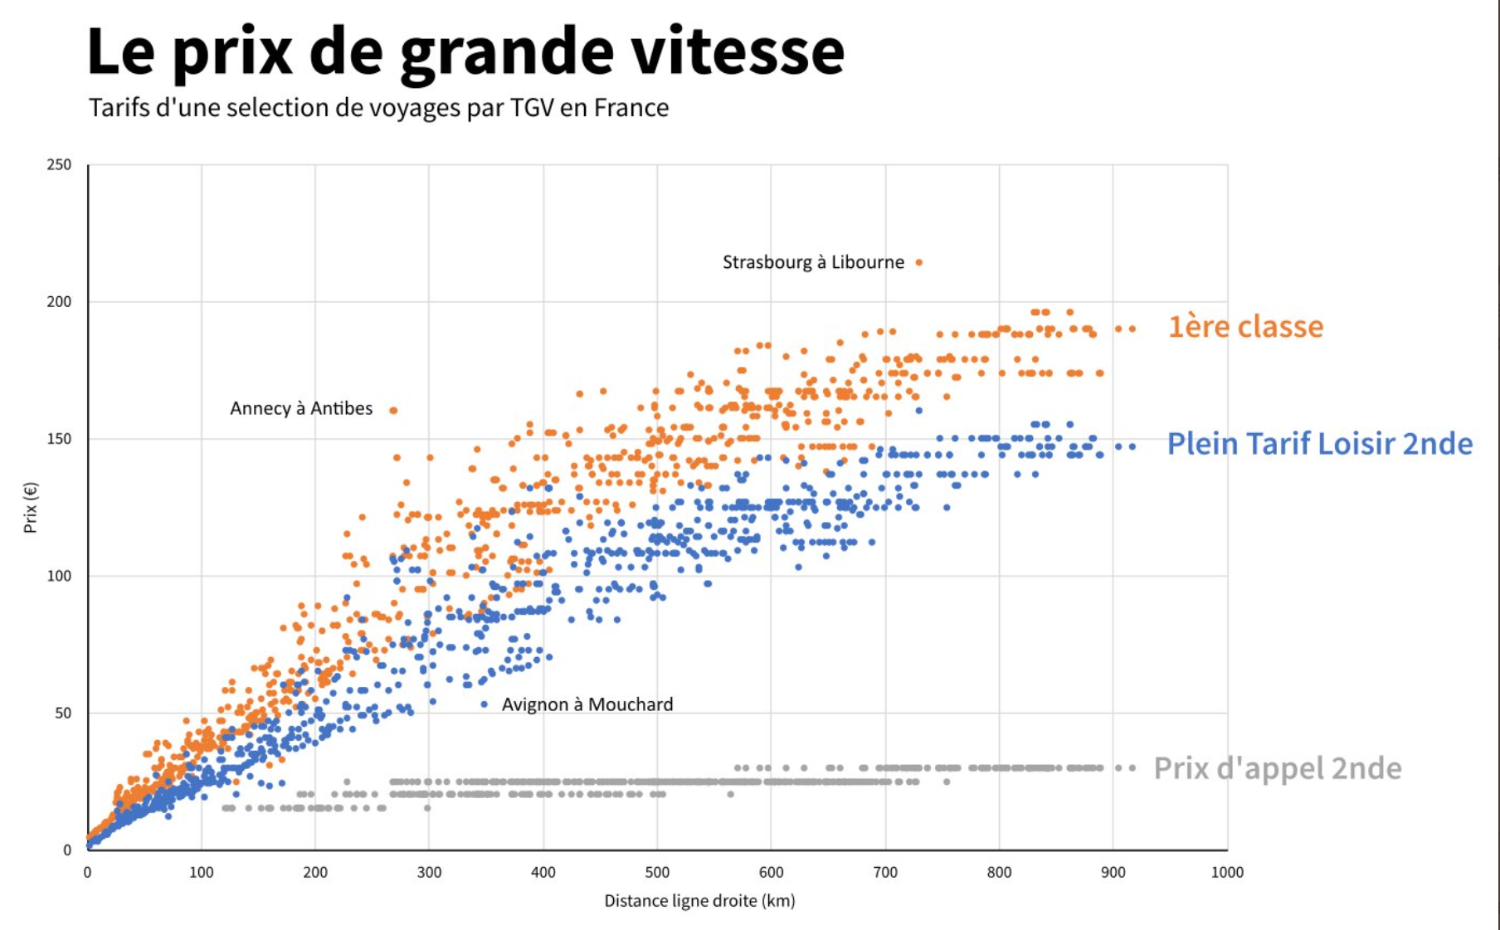

In [93]:
from IPython import display
from base64 import b64decode 

base64_data="iVBORw0KGgoAAAANSUhEUgAABdwAAAOiCAYAAABqzRXvAAAAAXNSR0IArs4c6QAAIABJREFUeF7snQeYrVV1/r97LyAoGhsGjRVEo9Fg1wjYQGyxxIIiKvauCCqif0URe0WjaOwtdpqisRDA2GLXqNgLmESNGmMXgXv/z2/P+R3e2Zwz58ydGeVe13mee+fMnO/sb+93r7X2t9619trrNm3atGmoVyFQCBQChUAhUAgUAoVAIVAIFAKFQCFQCBQChUAhUAgUAoVAIVAIbBYCRz7xsOHfP/axYV0R7puFX32pECgECoFCoBAoBAqBQqAQKAQKgUKgECgECoFCoBAoBAqBQqAQaAgU4V6CUAgUAoVAIVAIFAKFQCFQCBQChUAhUAgUAoVAIVAIFAKFQCFQCKwCAkW4rwKI1UQhUAgUAoVAIVAIFAKFQCFQCBQChUAhUAgUAoVAIVAIFAKFQCFQhHvJQCFQCBQChUAhUAgUAoVAIVAIFAKFQCFQCBQChUAhUAgUAoVAIbAKCBThvgogVhOFQCFQCBQChUAhUAgUAoVAIVAIFAKFQCFQCBQChUAhUAgUAoXA0w/j0NSP1qGpJQqFQCFQCBQChUAhUAgUAoVAIVAIFAKFQCFQCBQChUAhUAgUAoXAShAown0l6NV3C4FCoBAoBAqBQqAQKAQKgUKgECgECoFCoBAoBAqBQqAQKAQKgRECRbiXKBQChUAhUAgUAoVAIVAIFAKFQCFQCBQChUAhUAgUAoVAIVAIFAKrgEAR7qsAYjVRCBQChUAhUAgUAoVAIVAIFAKFQCFQCBQChUAhUAgUAoVAIVAIFOFeMlAIFAKFQCFQCBQChUAhUAgUAoVAIVAIFAKFQCFQCBQChUAhUAisAgJFuK8CiNVEIVAIFAKFQCFQCBQChUAhUAgUAoVAIVAIFAKFQCFQCBQChUAhUIR7yUAhUAgUAoVAIVAIFAKFQCFQCBQChUAhUAgUAoVAIVAIFAKFQCGwCggU4b4KIFYThUAhUAgUAoVAIVAIFAKFQCFQCBQChUAhUAgUAoVAIVAIFAKFQBHuJQOFQCFQCBQChUAhUAgUAoVAIVAIFAKFQCFQCBQChUAhUAgUAoXAKiBQhPsqgFhNFAKFQCFQCBQChUAhUAgUAoVAIVAIFAKFQCFQCBQChUAhUAgUAkW4lwwUAoVAIVAIFAKFQCFQCBQChUAhUAgUAoVAIVAIFAKFQCFQCBQCq4BAEe6rAGI1UQgUAoVAIVAIFAKFQCFQCBQChUAhUAgUAoVAIVAIFAKFQCFQCBThXjJQCBQChUAhUAgUAoVAIVAIFAKFQCFQCBQChUAhUAgUAoVAIVAIrAICRbivAojVRCFQCBQChUAhUAgUAoVAIVAIFAKFQCFQCBQChUAhUAgUAoVAIVCEe8lAIVAIFAKFQCFQCBQChUAhUAgUAoVAIVAIFAKFQCFQCBQChUAhsAoIFOG+CiBWE4VAIVAIFAKFQCFQCBQChUAhUAgUAoVAIVAIFAKFQCFQCBQChUAR7msgA5s2bRrWrVs3bNy4cVi/fn37ye/8W87LdvzJd3nPa7ltLee+de2Wg0DKBr0+55xzxrL3s5/9bPj+978/8POss84aLnCBCwx/9Vd/NVzxilccdtxxxyZLmyOXWw46a9vTXi+X0kmu7a/HNtSrECgENg+BSWsha63rI/roNdPuoM72beX3aq3dvPmZ91usWbz+53/+Z/jOd74z/O///m+btx122GHYeeedh8tf/vLDRS5ykfPMq89YzjPf6W1qfuY8plzU3M47S3VdIVAIFAKFQCFQCBQChUAhUAgsF4Ei3JeL2MzrNw0bN04n3CXf188g36HVkxDtiYNyFGdOxJ/FBSkXyBb/fve73w2f//znh5NPPnk47bTThp/85CeNcL/QhS7UCPdrXetaw9577z3stttuw7bbbttIipKn5YkLJNEvfvGL9g9spwXV+Ptf/MVfDDvttNMinCeRQ8vrQV1dCPx5I6DtS7K8vd+0afjfn/98+PnPfz4TIOwfunnBC16wrbcGyNOubtiwYWY7dcHyETA48utf/3r42Mc+1v599atfHX760582e0pQ+HKXu9xwvetdb9hjjz2Gq1/96sM222zTboT9lVxfRLgTZBl1JYMpXM93TYLgkpb+sMwkiOWPsr5RCBQChUAhUAgUAoVAIVAIFAJ/rggU4b7KM4+jnpntmXHFZ2Ygz3LibYfr+iytIkdXedK24ObMnGYIyN0f/vCH4aMf/ejwT//0T8OHPvShRr7z4joJBwimu971rsNDHvKQ4UpXulLLJKxs6+UJASTRJz7xieFTn/pUI91zHsBSwo45ufa1rz3c9ra3HS52sYsN6r3XF+7Lw72uLgQSAdfUDBryN4KNp5xyynDmmWdOBYx19ApXuMJw61vfeth1113HBKyBS3WzdHT1Za7Zv40bh9/+7nfDhz/84eGlL33p8JnPfKatV5mBTkCEDPc73/nOw4Me9KD2HhuaAU6JczPeDZzk74zAYMqk+axnqtWf42qxECgECoFCoBAoBAqBQqAQ+HNHoAj3NZAAyTbI9STYLN+RpSWWun1m7pkNprM4bxtrMLxq8nyCgEGZzOT76le+Mjzl8MOH9773va2XZgSShc11yg8ZnY997GOHAw88sJWYqdfyEPjhD384vOQlLxne+MY3Dj/60Y/GJNCkzPW73OUuw9Oe9rThyle+8rDddtuNAyDahyJ7lod9XV0IgIBroOQrf5Msf9GLXjQ873nPa+VJpr1Ym/fZZ5/hyU9+8nDjG994vMsn7Wnp5trJ2u9///vha1/7WiPSv/SlL42TETKL3cDkLrvsMjzgAQ8YHvrQh7byMj5XZXCEtQ2banB5UlBTmbGMjc9kNc9rN8/VciFQCBQChUAhUAgUAoVAIfDnikAR7msw8xIAmenu+7PPPnvg3ywHD4cSck4HUfLd7NkqSbEGE7cFNilx0Mimc84ZjnrJS4ZXvvKVw+mnn95kBzmSmE9ZQo4oLfOCF7xguOlNbzpTHrdAaNa0y9QbPvrooxvWP/7xj1sgQx1NXaUT++233/CMI48cdtl113GfZun/mna+Gi8EtgIE+oB0/v7c5z53eM5znjP86le/mjpSdBai/cgjjxz22muv8Vqba2ydcbE2gsJcEah8+9vfPrzwhS9s712vDKYYHOZ5ifNHrnGNawzHHHPMcOlLX3pMuGcd976WO+sh5WUmZbQvKgHGWSZ1nsbaTHS1WggUAoVAIVAIFAKFQCFQCPwZI1CE+ypPPk4jDqIZWDiBZl395je/aTW1//u//3vJw9wo8UFGF//YUp3k3LT3qzyMam4LQEBZk1Agi/3QQw9tWdcSTWQLIjOUmjHD3cw/aou/5jWvGe5whzs0OavX/AhAuL/85S8fXvWqVzXCnZe6mXWC+fvd7na34YgjjhiucpWrjG9g8KOI9/kxrysLgUQgd31llju6RSARwn2pOu7YzT333LMR7tQIT13MAFrp6NrIHQd6M0fvfOc7h1/+8pfjzHSfmSy/5/rG+SPHHnvscLWrXa0R8GlzJdtzrvIAXRMU+Gn9dzPiaWdWib+1QaBaLQQKgUKgECgECoFCoBAoBAqBrRmBItzXYHYlNKlRSuYUTiAkPAeCsdWdmqX8Pu11mctcZnj4wx/e6mxT9zkdQx3Kqiu7BhO3BTYpqQDZDpFAmZg3velNrRauMpLEgyQFf7voRS/aMrTvdKc7jUudbIEQ/Em6DMkO4f7a1762ZWcmyc77DLhBuB9++OGNcG9E3saNC/q/bl0r+VOE3p9kCuumWzAC4zV2dNCpdbzRPewg5WSe//znt/MVpr3QxZvc5Cat3NNee+7Z1up+J1mSulswXOfLrn/3u99t2B933HFtvXJOM1Md+8g/1redd955eMtb3jJc97rXbQeq8pp2WDVt0SZnbWTZmEyIoF2SG7bffvuywedLCalOFQKFQCFQCBQChUAhUAgUAls2AkW4r8H89WVgcBZxDL/+9a8Pz3jGM4b3vOc9SxLubJl+xCMe0WqWXupSl2rOoKQp3c2t12vQ/WpyC0HAbD3JXYgmMqlf/epXDz/72c+a3Fhyxrq27rZgiBye+oY3vKEdGlik7/ImHcL9ZS97WcPaDHdbyBrQzI2EOzXcJdi1Ecu7a11dCBQCiUArl3XOOS14leVfKFNC9vRSNdwh3G9+85s30pcMdwncLA1Fm5X9vPoyB8ZnnHFGs58c8P3Tn/607bLiOQcbyefuypJ0h3A/8cQTx2dhNBtK19a1/xfNH/Xhv/TFLw4fPumkgd1I7u5auHxhTklmYP5veMMb1g6v1Z/iarEQKAQKgUKgECgECoFCoBD4s0egCPc1EAFrZmcJDzJaIdyf/vSnD8cff/zMDPdHPepRwwMf+MDhEpe4xDjrrq9R+udIkmad3jWYutbkWpGhfd9X4z65RZ6+E8yBbPrMZz7TZCwDNbk7gvMB7njHOw5PeMITht13330ilKvRv3nmaNJ9Mmi1lnK+ufJkSRnIIt7nC4KIwIbY77///q1sBYfT5qHHfKd2qswjIfNf88eS2fl7dP6/ssfs/I5hT4hnf31PDfdnP/vZrVTJtBek6zjDfVTDXUJ2tBCMifx5Z/H8jt2wadMwYqnnHdKarQ3sPjjllFOGpzzlKe3ZyBIy+ZxjEIXEg9vc5jZtTi95yUuex44qE3aWUkKUqvGMDecln8kue9nLDgcffPBwj3vcY80Czpu7vqxocjbjy5sjt5vznc3o2rK+cn7s07IGUBcXAoVAIVAIFAKFQCFQCGxVCBThvkbT2W91hvz82te+NhfhTq3SRz/60S3DHcK9tUVmVmx5X00SMp3VSe1O+nzad2a1tVK4LcWzgVI9Sxx0Bmb0BUJz2pimOcNZHiQdOImARaTMEgPqM/DMLjeDj98hfbLdvm3a6PvZjyfrF//whz9sZU7e9a53DWzZZ1t9yiJ4ULt9t912Gw477LBGOJHp5yvLz+T3Mms73yeRMc/c9vLhPGUWKdcwz+DU10NfbbnP8a5fv67xUZPmt58DS8pQA5+SMhJDfS1pvgehA+G+6667jmVx2UQMchB14unjWuvaPPOZ17T+NELv3IzThflChifj2t9DeZqET68L6rd/dydQZrNOa+e8cjS5j/0983v2NfUkA1yMbVJApScHU5/msi0dxpQoStmYpKtLld5IG5d49f3yszxUlL95MLPzsVy5mXV9zi/XajfPI3uhH5SUIcP9//7v/6Y2b0mZpx9xxLDnXnu169oYkNmQ4Vn983O+O81mOq/T5mHeeyx13SJ70LTu3FeS2At9af+Px5xyPcvGtnGO1i7v0cuKd+Y+6n72neux8T/87/8eXvbyl7ckhB/84AfDmWeeOcbQtZv1ih0IhxxyyHD961+/lYGZJJvZ7//6r/9qh1qTQc8uh94O8PuVrnSlVurrwAMPnPj5GKFlyELeh/dZh763HedidK69XA05WE4b6pZ6PO93lfVJz1e9fZs2Tq+btRbOksfUv3NtFIK38Ekvo+p52tq0gUvZlXnxqesKgUKgECgECoFCoBAoBAoBECjCfQ3lIMkjHK/lEO4HHXTQcP/7339Rhns6CKvR7Z7IaI7Ixo2Ltufz+8YRcT12VNjKDZEN+UEwYOSQOt507qcR3pvb/57QEpP+novIh1H/WnmVUd+ti297Et9Jfktk5RimOWb9eCYRK70z3pNbOuj2hb4maZKfcz+333sInIQjxAWZ7m9961uHr3zlK8Nvf/vb1j3GQQDnFre4xXDPe96zHRh4kYtcZKGuOLisg3DOOy7cg/YNEnjPxFuibZZjbNtinmTk4vmjhNJCf3xBxFhaYHNlx+8p93kw4jTd8toM4DA/SbgT5JBw73WK3+9+97u3UlJJuM87hklE0bmkwsK85T3tR08azJqbefsz6zr7ApkGvhlQ6vugbbHP5/l8JItj7CkbMpLVXhfUUa41SJM4qS+S8T2u6pDjU5eU7V4+3MHQy3DqkOPxb+chY0f67d9z90Ped6yTo+vV1fG9Ifaw2xz+SBBypMeU5EBn+rMctOO9XcsAoH1X/7k29WUa4blaOzZyfuiX87Nhw/pmGwzQ9XZL+WOXD1nus0rKEHBk19leQbgvd51NmUtccl7Vh5TTNscjmZ6lV/N+Lm7noH8bNrT2Wb/TPqkL9m+83sx5k7SJBtgmld1JGUp59v5gAS4cIk+AGNL9S1/60sDh8rSH7BIMvuUtb9lsKHN1wR12aOPq7ZtjaXNxzjnD6Wec0Q7O9UBWDlnlM+5nmbUrXOEKjXDnOcs5pM8pW4zP5595bKjYuN5Oss9jGzMig9N+r5b+qOO51va2qdedXIMnrSO9ePh9Ewm0Ed7b9npbMcnO01bqUc7BvJjks0uu19wvD8rt18u0Nf38Kd/5jDWnmtRlhUAhUAgUAoVAIVAIFAKFQBHuaykD6dCcHwn3dIx8n2RDOqH5955I6jFMx64nvTYXbx0yCQsdI35P58q/67D5mVmYPYk9dn4jaLBAMOPUn0tAJ2Exr+PtdZnlJqZmb/N7kpISE/Z7krOafxMX2pAQg1T4yU9+0jLcyfQjA5tMTzIFd9lll+Hyl798y+678IUvfJ6MTInGJN8kMFNecvv/vM55ttPLWU+gpBNM+5yDAGarUU85neqevExnvO+Tv3MNJDvlZMxwz/Gk48/fV0K4p15KKknm8DPrV2cfNlfPVvo9x94HnMbEzyKCcXJWecr+JF1Lu5q2pieWre+c1yzS91GwArI6g05pU8YE/SjwmLJuP5wjdTdtUE/mOEf8XeKPv2kDcuznJZrOxSvnKQn91ocRxurbpPFPs/c9MdrrgPbBtrVjbZzce7RjZzXkKLFL8tq/50/7rbxQeoR/HJo57TXOcF8h4T5ei0aZ8X3/Fsi6dcP69RvGgU1xTHuzUtvm2uJap6xiO1O+tB8pvwYE/M6sNY7vZhCBNnPNSPnq127n0uuZB+zp9773veH73/9+W7vYmXXBC16wleFizYIc53euzfGkLUjdOu2001og5aSTTmplhdTvlFt2Ej75yU8e7ne/+42DlsqK17nraR48ck1Ud9XxfGZapI8TdwStUHu6QH2uW/bD5w7nJgnpzSG4065qw+ZZjwi6tuSNUZCwX4/nR2LxWjJpjVcv+6CXNj5xsu+uW7nmzt+nurIQKAQKgUKgECgECoFC4M8dgcpwX0MJSGfw/Eq494RKkuzpfCf5oXOtoyJ5oJO91Pc2F+5FROjIoTxPRihO2yjzu2V6jkoEZIaaDmY6UD2ZM4ncmZR9tdRYsr9JwEKQ4mBKiiQpJoGR7Sa5ns5yjr2/Pp1NyAlIJw6RYys+Ge3OD20kSZCERe/49gR7/u61S5ESiUd/XR8w6bPJ0hnPrNzNlSXlIn8mYTCJKMg55D1BDEoWQLhTw73Xj7x+JYR7f98ka3yfciHxuIg06UidleA2j8znvdWlHMck8mIxyW5lmoWDMBfpfnSgz1rkoz4oIeHV9ynlWx1EVzJLM/uZOqV8pG5SuMBdGUmmquc9iWV7zldvh3Pc9qPXm16ntG3qd+rV4r5OnsVenlKv+/Gn3WrvR7bX8cwiKGfJIO1oY9JWJjmmTE2aG0rKzKrhvlqEez93i+0h41gI6DR7EwTjeH0a7RKbl+ichl2/5uTzR79e9HYkA2Sz5k454ydzoyzkz7ShvVxZLiz7xzXMN+sUZDu7M7bffvu2Xjn//ZrZ63vKyyc/+cnh0EMPbRnztMW/frcNgWcI9/vc5z4N0kkYqcvq1Czse9smYZuYih/X5u4C8ZilG/N8Pmk9yvbT7vQBznbdqIThrPEmLr0e9mtqryfKf8riojlwZ+WMkj7e16CKY8/f+2enfl1p9oYydttuu6CnXXmolermPHNW1xQChUAhUAgUAoVAIVAIbH0IFOG+hnOaDuX5lXDvHcJJGZa9o6ZDonPZnJdRBqiO9lqQpLQ9iSDW8W5OZBA/mUFnv3qSivFmZp6OaDqPZryem/W2QJ7Meun4iZfkH1mhvfMp4eBPHPFxVr61iUfb289Ddo3InJ6ATPLR8j85PxAfS5UTSBLG/k4iLlMOlsIkSYBe7sRd+et3KOg8e69Z2M/8fISlWdA9QZHy0reFrFNS5uhXvKLVCCYjsye78jsrIdyVnTFh05UVST3LMbTrg2ifRaLNxGvOCyaRHz0B7O+LSSjOXDj3Jj1B3BNWicu09rULbS5H5Rsyez3JdXQn9co2U4cn9kk5GgUG/J5lFjJr+TzzE3X4k5QUw2nXpw72Nib7PYlwT9ud4/G9BKM233ulvqasi3Hq62oFxdL+ZMDTOdQW2NdcuygpA+HO4ZnTXqtJuNs/8OsDwT1Z289rb/PmVLWJlyVRqE3NtSX7kn12Dacc0axM+55YXdgRts2i4Fj/zNCvG5llrN6JSxKmSZTm2pV2O+dfmTj11FOHhz3sYS1jnvbdISU+XEf2PAe29oS7wKb+zCJcG2E7wsEyNNlf9S6xy7EpN6tlpydh6d/UK3FLm5X3n2fMeb02Im2szzApD5OefXLdaDaF8n8jXZqFyaLvjuyx2OfzXa+XyqBzx3eylA3f7UtXzerLSnS3vlsIFAKFQCFQCBQChUAhsPUhUIT7Gs6pToYP9Oe3Gu5jJ3B06J7Oau8Q5d974sU2JhFUkxznlcItqUw7EMbcV6eoL90ikZ5ZeOn4psO7ODuKw1YXtv/3Tuly+2+fmhM5Kl0hqdWTY805JQAwwdHT+beWumRK4tFnhut02mdJQOczCXqx8BpLRdhGBiVsT/KizwqehlEvOz0eykufyTieg4XOTDwEd7nzkqRIa3bUdrYjCerf/J1+Q7JDtr/iFa8YZ7gnyZFk5koJ98TbqvbnctOU8hhdkYeVJpm7xOHCy8ZtxheSeEpySxJGYilJR3XDvymf/e/q7rTAVU8kJW6pG5NIE9vsS29MItmVg8yezzbH/e524kwKYKVsOb4krrRzfXZuP4a0VWnj1F/nwtJTXpM2IuVX3czv57VtLCOd6cm0WUTdcmQubUZPwCe5rQw5N9Tv/mPVcE85px9pvxIz7b1j8rO07cvBpr9WGXBtSNnKtTGfS9RX1555CHdtp+sYbfTEZOpejpOxbjvKInbcvQ7kPE8idB2fhGjaCdv6wAc+0A6dNxjKepZBNb5zuctdrtVwh3CfZJe8nv7OIlpz3U496rOsxT4DWb1tmnWveWTEPvQ6k9/tn216+zmPHvftpy3gs3xe6W2pNkjsU9d7mZg15pSBxA9s89lFmVUm5wkO5Fq1GnMzayz1eSFQCBQChUAhUAgUAoXA1oNAEe5rOJfp2J4fM9yTpElnR9KCzylHgtPK4XPUAefwSh3EC13oQu1Qs0td6lLDJS95yYGDyXTgJcJtazUclUlEQZIuSZAmgSzRkePS8eKAth//+EetRMgvf/mrUUmKYdhxxwsPO+2003DpS1+61TqXJEgCZSnRSYdXvBop0WVg0caYQIRwH2WzS3wzL2RpUt+WeXAM1LP9y7/8y+Gyl71s65+OY5/FRWkd2jT7jvZ0hCU8Fm3j7gIDOsU9OT6pJvAsVaINtvZvSy32EQHCdwyI9P3JzMmGIRlv3YF5s+457fOepKF9av2Suf7Tn/50+MUvftECOsw7ZQ123nnnhveOO+7Y5uBnP/vZ8MY3vnF48Ytf3A79S9lLwosxrYRwT2ef95Rb4N6UsUEu+L2VIlq3bth+hx2Gi170oq2vyC4lhJy/eciTzcWyJ3GctyQilU8+o8/IsjhTRgLCCpnAhnDWAPaEMWBj+t0NfVBIXScrEvlIIkl5V860eWM8YhdAyrh2zOt+9atftTrT//mf/9lsIvekr9g/+ops0Ne0f3xXolPiCfnn+9hTZAz7w/jJwNVOoNsXv/jF2/gvfrGLNRm0DNWkAEASfP1caK+cC4NjY8wIto62FmgnlV/HQp+RNeSceeN3rmVMjFnd0A6thqwlKc17ZAb8+QdmYAUuO2y//XDJnXYaLnOZyzTdpE9gyfkKZLmffvrpU8V6tTLclSlxwoago84rnzOn2BHWyl6uZ5XvmFcvc4574jPnxOsyUM3ftMNL7XrSnvT281zym8N7FwdFtY1co21wTEmA2mYGcHvZ5nqJcGXQPtkmsvLud797eNSjHtVkheu222679uyibNMXMtz/3//7f8O9733v8QHPiU2+n+f5xevVI+wycoA8oO/0Bdm0Pz47KQ/5nDLvnM9a3xgnh6bTB55xsD30wfJZ2DD0Brl0fTPze9aYtQ/5LJByx/jRAcbuMyRz02Rl/fphu9G9GT/3px+5sy/t8TzPWv1aqe2jHbCnD+AABuiqGHBfbDh2DBsGJrnmKHPzJhasdO7q+4VAIVAIFAKFQCFQCBQCWw8CRbiv4VwmQXx+Jdx1atIBxkmC2ODQzW9+85vtJ2QLJB/OikQkDiNOGgdwXvnKV27/cGIhzNJphwwkc24lryTKJLFoDyfy61//euuf1/B3HSYcbQ5d+5u/+ZtGQDJeHC3G8o1vfKN99zvf+U4jZnAM3XrOGCBxGBPf/eu//utGvuOM6RgvNR4zv3B2v/CFLwzf+ta3xtlekhN8H9IIkvQmN7lJ658yAzkAuceuiC9/+csDh8AxRuaGsYE9uO+7777Dnnvu2TDnhWP5+c9/vm2lT3IhiQ6DFNe4xjUaNjickv60wX2+8pWvtAALc51ONJ8rM5Bbl7jEJQbaAZuliDb6/c1vfGP46mmnLdTThYyM2sVJ4NCfG97whs0JhpxHdiQjV4PMSzk5cyTr3/7Od9qYPWgWMhhZQH4YI3J9tatdrY0VmWDe3vnOdw7PetazhjPOOGNMuCt3SWiulHAHO4gb+uY/5ld9tD4xuKGP1CbedZddhqte9arDLrvu2v4mibISHZznu6mnSUBBWIMTusZP/v3gBz9oJAg6wgus0QHw5kBDgknohmS9es1P5SXnZxIwAAAgAElEQVRJGTC/+tWvPuy2226NOJGY53ru9cUvfrHZr8zKtOwO977RjW7Usl4zWIcOYAORja9+9avNZvA3ruEeYIt9uP3tb9/uvTD+hfI49hs5wrZgY/jHQcaS17SFzqLv2lV0GQLKw42Rvatc5SqNhNf+cA+JzZRn50gCFdkgWIcdYQ7Szosj46Dv2BMzgbfZsGH41a9/3eSNsX/7299u/+i784UO0Cf6h31EN655zWs2Ynmlesrcefgz+IM7P5F7MFM3IfyRFXWTuUBm3v72tw8vetGLmu2c9loNwh1ZwlaAseulukkAD/y5BkywZ8gXNpf5RE6RH2RvnjVllv4pB7TViF3Wxx//uMk9mPkysMkce+YJOF7nOtdpax79WWr+8j7YJnSLNUcyubcBrnO77rprk49tt6X8zMJBmRCwHGxq/5RbiXjXHgIWyCff59nCcmjcE7whUukLekRw6CMf+UiTAf7Gi+/kGkf76Njf//3fD3vsscfYPiZpSw15Dmv927/927HeTZ2DUSCdfhFIo0/oCzKBzku6u34zHu6vPKA/jA9ZBv+VvBgDdo5nI/tAf7C5YKO9YY6Zd+0tY2XNYH3D9tLHpUh37btry4JNGobf/vZ3zU5wb/QC+eCfwTID/uCLroKBh+OiE9g9g5fzrFvnztlCFTXlD1ngnqw59sXnPM8JQC54lrrMpS89XGmXXca6iY5ihzNQbDBgJXNT3y0ECoFCoBAoBAqBQqAQ+PNCoAj3NZzv8wPhng5kP9QkUnVGIfYgKaiBiiMM0QvBohOTmfB+H6eE7KAb3/jGYwIYBwpCJh3o1YJ6TLhv2jScfMopwz/+4z8ObCGH3OAlocy96dd+++03PPaxj22kMA4nJDvj4zuQEYxPolQyzmw/2sLJv93tbjfc+ta3buSaB7k5nmkY83eItSOPPLIdrimG4kbbtHX9619/eMMb3tD6ygun/Nvf+tZw3PHHD8cee2zrr8SiZXQgxvjuQx/60OHBD35wI0po97/+8z+HJxx2WMvw4+X1Ehg6sHz/qU996nDAAQc0B9cxcP2nP/3p4aijjmrzj+POK8lLx43DDB6Pf/zjG3ExzUGnbRzfZz3zmcPxJ5zQyAfuw0tix/FBKF772tdu94fA4x5jp38zD/9seC8IxvgwNP4G8cCheh/60IfaWD/3uc+NM5L5XKwkqCDHCATc9ra3Hfbaa6+Bg/me8YxnNFLB17nkw0I5Iv7NS7inPsIcEJCAJIUsPeWUUxqJ9B//8R+N4Mugk31NcgAS4QY3uEHTR/4xxxDyfaar+rJauplkHG2ik+jAv//7vw//9m//Nnz0ox9t5Afzn1nMyl/i6HiSIM/vKBf+hKR5xCMe0UpJQBpxb8f7jne8o5WPgHTiXuIndujSy172suGud71rs1t8jpzSXwIrH//4x1vQQ7yUCX4n4EUt6H322WdBptetGzio2axKyK7PfvazbQ6xrcp/T2ZpK+mzB0tCaEPOIkPMJ8Qy85g2J22yem4GOOTfW9/61uGlL31pC/p5rbjwE7KPbOB73OMejegCNwjQz3zmM8OJJ57Y7CRzmIFC8bOvEGfoBv28xS1u0Wytdb2Xkq1JtlPdxO6d/K//Orz/X/6lEbpmK9OuWfbKG/2+3vWuN9zlLndp8o68sS6g09NeyyHcMzBtn7GNyBN6iQ2hjxCLtCvBq3zZT/pCX3fffffWT2QGkhNyz10QGfCZVqpl2picXwMWn/jEJ5qd/9SnPjUONGWQyvUBohM7znrgzphp90j9gdRFPyjhg43P3UqZQc/axjp1yCGHtEAVY6Qdvs/agV3jlTgrY7QDAXy/+91veOwhhww7jIhgrkWXXv/61zf7TVCLIAc202zy3h55X/upzfX5x8AHf0eGeXZ44hOf2HYlpK3UJuUzAPdEHlgXkAf0HT3KtpUddYOAAevmda973eHmN795kweeN9wtIibZr7782aJ1YxQwx95gb08++eQWrJLody3P5wHtLO1wb/rBPwPp9K/X07G9Zm0dlSw7+6yz2tr0hS9+sT1fcX8PrU0MEjPfE2SA8Oe+t7zlLdszADKDLPZr1iS7mW1yLwK52I9//dd/bXMBBuhrrjOJqc8iyBmB11vd6lZtjee5ivUgS3Fx7SQ8Zu0IWK01ttopBAqBQqAQKAQKgUKgENhyECjCfQ3nSkdIB/VPUcNdYqjPoNMR1ZnBWYQsgGCBnMJBIUMoiSUzy3ROkvyiHZxIsrZute++wwH3utdwrWtdq5HC4pAEmRnLOsDLcVbS2cGpo3TAe9/73rETJHnOdTiuZI9DCNC/D3/4wy3zDaKdLKckQiaReeIDSfJ3f/d3w4EHHticQsapA+78SjA4Fv6O4wfhQYmD3lHjcwhmSLQTTjihZbdBFuAsQ/4xNggE58AMK7POcQbJ4tx7771bpint4fBDEECC5Niyr/SP+7Kdnvq1Eu5e75Z8aiCToQcpYN/7+cJRftCDHtSITkibnGOder4P3lxHe5Ylok0xk2DE6d5///0bZn4G+dzaXcYuiSRa+iAR94IYgBR485vf3IhFcJbcyLFqHjLTDiLmjne8YyPJCJSQzZekR5JOfH8ewp3vJ7EsUQ1pQ/CEvoKBGbMZDMg+KovqI+QsAZ0HPvCBLSAGcaRMq0fzZBHOayZtE4wJZEEwI4vvec97GrlmOYi+PfFLws1zBJLcUhfoM/8y8ECbkIbIGdm09oVr6AMyhfwlzuoFOBEYu9e97tUIbUhy7OBb3vKWZheRWeUi7Trvmd+DDz64EeK0jS2FfGTskD2Q9exWgfRy/CkvvX3sf+e+BFBudrObDfe///3bPEpa9jal109IJgh37ASBjsTPa7E7yAekO+TS97773eHE972vyR0kvdn3vbxow/m78wE5d9hhh7XABXbFv0+Tn1wHtBfYTEjL173udQOEseRpEsUSeJKFtI8tYr35h3/4h5ZNDglL8HDaax7CXb3k3h527Y4F5hUZQTcJbGSpk7Q/OdcGg/lJMBGZQeaw4cyDWNJncDf7Pce+lC5ynbuZeE8A9rAnPrGtL8pwPhMo/6xnkMtHHHFEs2vKRq4b+Z5+ouNkDLP+/vM//3MjNA0a9IQ0AQbk4g53uEMbtzaZQA67QyBmc113jP6NdeEB97//cMhjH7uQ/czuqPXrmz6z3h1//PFjYjvtve04f36Wa2Ou14kthC9r0ZOe9KTx+prBEOcSHAjkE9Q45t3vHk459dS2vvj8lM9e03S9lUfaYYeWTU+JGwhf5oS/t5Jh6xd2BEz6vrLhbhb09phjjmn6bhmdtBOJSd831i7uiSwSOCMYQjCgrRujNdjnQL/rusQzI3b+uOOOa2S3a1U/r46jf37k78gPuGPrWGMh3iW9nbMk4Hk2aO2Pznbhntgs5IF/7IrheSYDrJPsq/NqkggBRIJ3d7vb3cbPsSknaQvBk/ZnlWKadw2t6wqBQqAQKAQKgUKgECgEth4EinBfw7lMYoYH8j8V4Z5DTGdHJw6SF2LiXe96V8uIwgnWOe8d395xS4JVsgByCHIaxxGnjd/9bJKjqyM/71SkAzeNcJe8wYGD+IFsg8gm44mM5FY3Ooii7Fc67BI6tAepTUb3Pffff7jjne7UtmLrdPP93unibzjeZL++6lWvasPLvvMeJ40t1RBzOLWMB3Ie5x0SR+IiCRwxZ1wQPpbL4ZofnHFGy3CHYJw0V8pkT7jnmJXVV77ylS04AZngHCXJ6VgIrBx00EHDne9850YajIny0YRS+uRtb3vb8JznPGdch56PklylLcg6stsOPfTQli2bc2IQJQmCafIiSSbxxHd0uLknZCoBGshyAhTIgtnQfG7/M9iU94IEg9DjH9vV3QGSBHFivxTh7hiTaKM9iAKIC0gDSC1IR/GepC+p10mWMRZwhbiAUGOOkGPlVvmSTJxXB5e6jjYh35BpCOvPfPrTw//+/OfnKTmhLGY2MO3mQXs5H2KVsupYxQ9SD1Jawp3PIawmEe7cy+AIcgtxd9/73rdhTb/BX9JKuUuSyHuze8aseoIvH/vYx5qdIeOZ37GvlttQ7nubrE73xKrEMv2EBCID9WEPe1gjpLCr1v9OO5xtJ+EOIZb2SjmCYIX0fMITDh2++c1vNaKdQA8Z/Qb31J8kncz6zFIiEFZk5EPeQ3wra6mDjTAb1Y1nJ4A48neCG2TUEyQg6xnsJmUfJ/moXCA3tEEwAmyYR9ayaa95CHfmIwM0rIuQvO9///sbqQmm3Ed9t6+po8pmyo5yjtyR4Y5eQu6SYSvGfb8XEY0TBqXdc12nL+DH7ipsOf32lbaEv4EZGb2sPRCcGchosr8woEW7tGiDHQSsbwQduF8Skb5nXsjmf/rTn97ktwVhaGsYmn4gewRke51IG9oI9wc8oO1Uw56pJ6zlj3vc49pOMAlPCWrr+WtnHFNmt0+SDfst4U5gGnlK3RVjSW4C+QQdvv+97w2/+e1vG8mb/c/nH2WjfxagTeSB+5LNT3DC8mX9GNJO8BlrBnPBPPPs4BkC/ZzkGGwzZUIZAzsCj9hRdnShy/SFzz2rR3lDPrDxb/nnf266S7AxA5SOtw+gpj44dwbgkEdK7NzmNrdpukHJqyy1k3iKI89LBG6wHTzHEuBlbc/1MOek17OUefpD8I7kCnZ9kLSB/eVlH3t9nKa3Uw1QfVAIFAKFQCFQCBQChUAhsNUjUIT7Gk6xDg0//xSEe+9U62zoWOiMsSUepxyShW3Zkpv2P4lRCYXegbQMgyQnzhoO/EMe8pCWrWWmo1gkqSkJNO9UpKPaE+49kUibOIhkX3uYXV/ORIcwM/j5mzgliUB2HluOyQjFIWbcEoTWYE5SainC3ftCtEPuQVzhMH/wgx9sGdeZvWsAgZ8SSxA1//Iv/9LqAPtaCeGeDiOO6gc/8IHhBS98Ycsy9TWJtIAkIKMVkg1iV0dU3KgBTekVSG7L/qSTz33BHuceMpFAjUGaJLuUx1mOLdd5IJpEqYQfBBxBCsh2SO10+sFV2UhSJAleSUaugwDgp3qELEjQpWM/i3DPLF+ICojGN73pTU0mkB+J/8TCWtuSjanrPRlJX5gjSgRATqGP9J06+h5CK4E0rw4udR0EJDLDgbIE8iirQP/ATv3v5zIDOTm/qesZVPD+kvX8zntJc8ga53Apwt02IfEoz8RcUUaGMhXIh7s7vJ/yxO/OC+O85z3v2WQWop7gGhmekGBckyRs6lHKSN++85py6DySFU1pDsggDg21pIPX5tz0hDsYSXxpX7CP7IKAVMP2MGcE2ZLUc6yWwrAUSdpG9QRZIyCArJGNj6z5fYk15cCACj+xDQTmOIyYYIVkf5bFkuRTllyHEr/ELPW5l9l5CHfnmf4hCwTNCUKSyUsgzECd9iXXfGXFPopPkqe8x25Q1odMd3ZQNXJ3lLXrWuyYlrJ9uba6XmBPIGCf9rSntWBub3edP+aVQAl2kSzrSXXEe/0DD2w6WfGUnpPItq/aK9Y3xsbuE97nnK2UcIfgfmwQ7txbeyrh3uuQmNq/Xi6cH4hv7MGTn/zkFjjy5drC7wTkkAeCLwRflVnadn1Q9vt1cRIR7PMLgZeHP/zh7f4EQHIdc265P20yx+BP2SjmgyBLrhWuSWlzaUO9sl+TgonYBgL6lAMi2xsSWp3NNZVgOjrB7hQxsH/aubTV+WyVNlV9M/jAMw4BVIJRlkRTfhI/yHbkG7uN/bYUXgY67UevQ/m8Ztv0le9Cst/0pjcdHv3oR7ckEvDIVz4Hz3ou6eWsfi8ECoFCoBAoBAqBQqAQ2PoRKMJ9Dec4ne8/BeGemYE6GzhLuTWeLecPeOADW3ZUf6Bgkj7C1BPaXiPZ6D3NkCI7ivIoblPXWXR7sqTPrOy93snRiZ6U4a6jh3MkwStRk+0YBNBJ93vZJx1XyQQDCmy15sBMiPx0HsVWZ3Aa4Z4EJyQEzvIpp5w8vPe9J7asP7+vDGXNV/5GBhikFll1HhBJ/yldcdgTnjC8Y84Md8htnPvM7rJvEEoQiJA1kgYSNAZMnE+y7SHLcUwXyiBASG5q+FPOAMKdQyeZE0lqSTPahvAkgEE24ZV33XXYfocd2lQ5/o3nnNOIxeU4tXyXe0nyId+QAtR2poyMc9sTMN4j5zWvUfbEqSfplRUJjKUId8khZZCMzec973mNcJfU5z55zkDalcQwiYMMDHA98gMRym4Eyou0wwfJNB4FcFbLDDJmMmkpMQRpKnGrfUis6GMjYc4+e0wamz0JLmaqZhBDHU3CKIkXMtwf+IAHtMNixWka4S5etA82kDoQnwQ6kvCVoJ5E3tIGhBtktQfpvuQlLxkfIpnBmtQd7VESnmljcl6dv8wyJxOfABfkaBJ6vX4k4U4AIe24gTvbBQPkTEKxt/9JzOV9kgATS0hjyuwQiMC+GZT0/hLsHgJroAmS3gCfGPXBIHUm+5ey770mBTp6+0/mKpnXBIe1N+p3rxMEbNEdMmjJ4tXWK6dcnwQffTLYoOzwu9fwnj5aj565pC/Y9R13vFA7WFQMXHfn0dO0D9wXMvIxj3lM2+UhGSrJmcQsJUwoI8Z5JRCN3lMZFR/lgEAatpQAE+tOTygrF9gcz/mgHEwSxpaU2dwMd0hu2mYnUM5fynlPUPPZJNvffwe53e9udxuecvjhLQiCvSQrX/kgi/zVr351e74hm1oiGjvAnCqf3N+EBPVaeXCu1P0MPIIbZD/z4XxN2omEXJIw8YpXvKJltms7nTfurb30b/7sn4H8u/rEdzm7hmcdMty5v6WO+C6JAeyKgOgm+ODzUdrntHt83o9VufG7/A5+JDew442SRZwJxH2xF/msKS4ki/AMxc4idy/29pZ5k/TXLveZ9ePnjY0LB8DyO7oA6U8AhMNUfalL9mc1g9bz6HldUwgUAoVAIVAIFAKFQCFw/kegCPc1nKN0fP8UhHvvKONkSBzivOAkQ6ayHdxMWh3RdLzSkZAQkzQ1u1fnvM9cx1Eiuw0iFtJdJzxhT6d/nunIvvWEuyQeDpvvc0ySqJk97jwloZBEWRKvXgvBzBZ3SKU8VEx8dViXynCXKOT7ZB1DOlBSQQLNLDmuk5QRH7Le7nSnO7UyLXl/SHKyfCkP1BNm3o+flpSBcKekTX4mIQExRLY1MkLWmKVTkuB0nLSHYw7hCXFkJhgZb3yfMhUQNM6FY5QYhuikXACku3X/JTYkzZWtWTKSci85RxscpKhTbnApAw3Wy81MPz5PwlX5zSxh/iah4viS/JmV4c616CN9gjSBPCHokuRLkkTgkGS8RAJ/60uXJOnDXKGDlCsgY9Ga+0m+zMJ2qc9pB+IJ8ou6x2S6JxmcxDljQEYoy0S5CH6HvEH+zU5McjDnxDkwCzFtD5nf6OU8JWVSTphP5Ja2CBh4doIymDiKAd+hnj/zRbY5soa8Q8BBRFJWQkLIOettsoG0ScFR9SxlintD1JLBj65x0ClyInG0FOFO+RN1KPvBd9zd0ZP3/i6JLanI932vbIoR/SEbFeKYABqHmSYZm+uito21iFJSEGcQxLbJfRM7rs/Ag/eU9OrlcynSnT7NRbhv2jT8/swzW015yEWy3M0O5n4ZwOZ310sDGuCU641rpjZC+cWOY0PBjBIafZCin9tJutjm5ZxzxjtXnD92YWBbPODZeyaW2F2ymJ/whCc0+XIsvax4X8hy9I1yKpYd8zO/w7xQMobzESArXRcIyJLEv9IMd9Y71o0k3CW1HVvqbgZDe5lMXec9O8fQL0hv7JQyyfewUQTaCMDQB+RBrCX40666zmXQyrWJ6/tMbNrCVkO2gzG2KQn/JKkJDmJvWd+wOT7npSxmIgRzgA3hmYL75i4tZYy+02eyusEX4pvvqfNcx5pFwIMgGc9hEN2+MkDt2A08pF3LOu9p12mHHVmHHHxwk58dRwft5hzwnnFh17C5PPNMK3+XusbYs7wNY3InUz6/5VgJRoEx8oCeaNfFqbebK1lH67uFQCFQCBQChUAhUAgUAlsPAkW4r+Fc/qkJd52MHKJECRl6Zh5DhOZWaJxknRkcEIgAtlTjgELOkgkJIUVtbggySCacL534vC/XcujW85///JZVi9OmU9M7uPMQCtk21yfh7v0Zo5lU6aA5Hzp+9I3+mGX7u9//vjmNOl9J8tGOjjzt8D3JmiSY07Hj/TwlZcCDLCprPTtf6YBmJhpzRSCDcj1kXeU2Z8hCHEMI7nkIdw9NzaBHEhSUGHrf+943PPvZzx4foGqWWDrn9BkClz5B6DIe+klNVeq7mzGcGd3ek0xCMoRx7JEviW9JxCT2lJml1FaCS+KLfkLoQYzyD7mVDPFnX6JFuUf2cdC5DrlAzgk8SJr5fbHoyRb6OevQVPqLPlHOg4AAu03Ux5RZx07mH04/B9tB+JI1Sr/IdIQEY3y5syPJXMYFmYY+Qu5JotC2JM7mmkTuA+ljEE/CK7N8xYs5h5Blpwg7LJhzdI/6+mSYc94Cdok21EPnkza4nrnhXxKcyB5Z1YxR7KZluPu532+HMW7a1EirJPvVQ8nftI1kRkMmXuc612kMIhmwEJBkZRKkSqKV74EF88c/sOcn7TJfyBU2IGuCpz2RFEfGmH8CC+wkAD+J9FmEe9rI1Hnn3O/zGfcDZ/6p88gZepA2wu8aIOIzvuuhzhx+qGylzZAYJEgDWYZMIrupW2kDJLn4HnOF/faQQ75D36ydzTVZ2mKSTM9LuCOXkHrsKMCOMU+JV/aLcbNWMnbmBTvI3DJG1krG5yGOacuUMWwodpADG5njJFZzDVhKR9O22TdqWoMvNka579dS5JESHmRtXxd5Hh1SbRvtniMZN4GAA4oJFJvR3a8J6DllcliTJCrNZKa5lRLuBBCoIc8a5XiYe4nnXAPVc+0JfUX/DNaoG35OSRnmgd0BnNeRukWSAraamuW9PuQ9wRTiHFtNkJ5AFONnXcXW8ewEeU/b2grJW2Sf7xEAYQ0hy75fp5F5di6wK4rDQjMBIueZtiCNKQ9DpjptMWfIIxjSF/qErHsPDnNn7vjneTWurWBGYIzxY++5N6/cXaIcci1ywPMfwVXwoB3sO7tukAEy8w2C01eeAywl4+HLubZq73i+YscJhDvjyCCGOqKdYa1gHLSHftIGY0A3eT5g/AY/eh1BdkgGIMGCMlmTdNf7zPscu7nrbH2vECgECoFCoBAoBAqBQmDLQaAI9zWcq/ML4a7jI9GNg/jJT36ykagnnXRSc8CtN5olOPg7jhkHWJKBjcNE+RIcKBw9sonY/k/dUOp0ZxZ2Orc4rmz7hgjDce0J9+VOQZKcSbjTTrbtdTqCkvCQIDiTBAIgOCBucPgoeUK9W2ux6sDbjoS7BDCkN4Q3WeKMi5dOs/2YRbhLooB7lt3AaeN+9A1nFQwt+YCTDpkDkQ1haYYl/cTphNwww70nVZTJSYemJlnie+YUEpct5cwz99bxzWxB/maGJhmBOPYQU5RGgXyEbJJUSr0wiw5HFgJ42222WSCEqC/OFv7RoYqMY16HVsLC+9E3DjkkGxF5SRLbrf2ShQvlcNY1Od9jjz1avX5IbdokSIWcf+ELX2hZjRItmd0mMZnBmlkZ7rQDPs98xjOGdx9zTCMeHHsSm/yNfqGHzDuBHgiEprtnnTX84pe/bDsSKJtDyRzJkySWlV1IHAhbiA31ZqVEAeQFgR7mH33iXpklqG6Y9QpZTM1/5EbCCZlBB4866qh2+Kjkc/YNHNCJvffeux2qh17wOXqATkLqQGxJiixFuKeMpVwoa2ZnQhIRcARvroMs4h/Zl9gAdwuY5f7mN7+5EZxco/2hDcgu5o+5Q64g/HghA5BeEKOMmwBMyqb9lFBDf5FPssLBQaJrFuGeRBHvHZ+2W3tEO4yVnQL8Q+6YXwiyPChUUtvvpS4wL5ChBEG0j9ojbTE/IWyRx49//OOLDt6kD7388zfmlgAHxBeBFcYAaUffCFahmxCuff39fp2Zh3Dn/pBxnK1B6RRLJOUa5Pwi12DFIY/UxAc/MODVyMVvfGM44T3vaeNkfn05RvrDeotMYcNpK1+LiO8Zi2bixntsF/LIGAxKTMIDXaSG/q323Xe44IUuNK4l3/eVNiBbmTfWnLTteS36zTpFZrDBEYM5XLdSwh3CGMKVedfmMlZsNLZkUgkd9Zy5QQ/RSXcs5K4C5gIZoyweMuecI1esJRDukLT8XV2VCNZ+sHOL7++5556N5DVoxvMT8gqGHC6dddclvJEH9JzzUVgfd9999/Ha5fwiR5QBorQcAddc+7jGZxaeH9gRxw4G3mN3WDNIMmBN59mHcizgBqbYKoLx7IRiZ0IG4lwvfvTDHw4v/cd/HF772tc2vcg1S9vP93hWYb3i+c/1is+xOXyP+vPYPZ5JeV4iMENmP3Jz1atcZdh2VIYpSzg5Lmwlc0HfmZcMOCiH9IFnPoKjHN5LUImgGP1ljeSeyA87FrDBzI34+oxDW+CGvJNUoJzk+rEc/ZyhvvVxIVAIFAKFQCFQCBQChcBWgkAR7ms4kecHwl2CIwlAHAxqbh599NGNTJB4yf5yPSQLWT1kGlFP1LquZjnhYEAUQsS+/OUvb1lOOpwSKrRpHVAIfg5mS1Ionct5p2Ia4Z7krOM2a00nEUIOZw6iDpIMx4v+QSCQ6YTDSTkIDj20JEb21/b4iTMMPmR4Wdtz3UBi4LqWHUh/ZhHuSXKbzQgm9ImyAgQ6CHjgqHI/nEr6hcOH44gTz8t2IJsgazgY1L9nhnNPuFtSpid2xI+fkAmnnnrKcMQRT2+OaZ/NmI4mOOAo0y4EHaQuBCqEwqQXJCb1qNmWDsEhydYTzn2G7FKyonzoNONAv+AFL2glFSATfEkSSsxJ2kLYUs8bogRCD7KFOYEIh5xANpB5DqyFcOGVmYe0K+HAZ7My3JlPSqHuGaIAACAASURBVCJAnEB8JPbOofJGVjiYstUfEtMMYMbKPSEwCKIxVuaKsVmuQPKAa29xi1u00kP8TPmZVwcnXXfGGWc0Qo9sQ+a7n0vtDDbg4IMfM+y3390bIZmBLL4DicThjdgU6gKnTVHWsEVkToOZ5R4k9BMTrp9GuOcYJtkO5pGsUMgySsZAntFfySJsBsQ/44EkSrIH8oi+cSA1eosOQ/ZAtpO1SrvY1yzVwtwR0CFYxtkJZr4qz71Nox2CG+iah1zOItz9XEyd+9QBSFcCTew6ob/YSAg6yCl20Lzrne8c3vf+9y862Dn11fd8h4NoIaggj3OHkHgTmOHASWqXQ5Tav36NUP8JUkgc0ia6ydjBirYgf9m5hW6ytiV2vczOQ7hjOwgqk8nNWtfvPJHUpL/oJIdpIyvIp2S75St++YtfDF/80pfaeoFNBPO0G65RBIIPP/zwZvvVoXnJPPrT7+7iu/wN3YR0Z40Q30mBvWc+85mNHL08wbh160YBVnaabBpn3GNHIToh5y1H1we7uQcy9NSnPrUFYHNOnf+V1nD/w5lnDj/68Y/HAQzuIQmLLCThrv7YT/QH+USeXCPVCwMIyD52Vj3l7+g0OEKUK18+XynjrN9kUpNosM8++yzsQhmdmeF3sPuf/MQnhn961atakNQ+JIlrtje7aFhH8jPuCX6UICKgbDmVXubBhMAB17F+WBZQfWA9py/Yb4hvggBXuMLlhwc96MGtHFTKYJL4Pmuwu8Byc+LmcwPf5ZBn7m1ZGtdlr8Xe0xa7o1hXeXE9z5x5eK/9UE94viAQhhwydtvt55k2sJEEfQgAYXfBUZ1Cx8HxpA9/eHju857XcPAZV7vjPe/Hs8rjH9+e98Q5dxf19ncl62l9txAoBAqBQqAQKAQKgUJgy0egCPc1nMPzA+GeRLtDhVQm85Bs3z6DVOdBMgKHcc899ljIdhu9JPe4liypb3372y1bHmcJ50nCMclkMsmoN37Tm950dKimjvzGseMz71TMIty5rxlmOoj8jtNPPXmIOpxhD+yzn1yDE8c4yMom88rMt97Z01mDSONAUMgWM/j8bB7CPWVEAhiHkD4SGIB8MTNO56/hf8454wMvG2nDbv9haM4iRKqEu86nxFpPuN/nPtRwv/zYqc7rfM9PyDDqF1NuIDPpHKtzDqb0nexlSFeCNRIy2RfeIz+Q2mzZhwjI++W16cTPIyM63s4Z5UmQvRNPPHF8IKTtZC12+gOBSkYu/wjOJAHjdyAeKS0BsQw5gcwnyZEkFt+ZleEOMYgMkWEHcZj99570A/If8goirh3it2HDeUrjMGYCR9SbJqBmiY7URdqEAIL4g4gwc3ClZAG1rakV/ba3va2NI/vnONAR+o9dQXe8ps/g/vSnP93kGPIsyxQkHpDClAjyMD8J99S/pQh3PuO+fVakNoMsajJCIdwJzpH1OSa8FoS12Yes1e29kXlkg/6zm4aMZ4h52sgdKRI/jSg9++xWK5wMaAg2yzD19YW5Nd+D5Ed30DWIwV5/+D0PTSUz3VfaEnWNvkNCQkCiwxlkVTZYL8gm5WBYxqZ9nES4Q3SRnUsfaSuzRe0HASbWDgjH/oyIDEByfzJMCXByHghzngdROgbm8lvf/Obw4qOOapnPWf6ltx2TCHeucc3kczJeIZXpo2WaxD+DxcwtgYUDDjigBQH4bq6l6jTkHpnRBJQsAaIMeF/IPIJq7F7IwMi8ti/75XtwoT4+5CRymXKX88/1kO1kVLP2uJZu4hDJEfnO3+g7wQUzyb3OPjJeZJ2DtDlrgDVNe+waxLUrJdxbiZtRmRtl1Mx7a+3nfOV77Dv2lJIpiYHv7WfqCvIOGYxMEOBJu59kNIFkriPgwHtffdCBnQ/oE7tk3D3hWmpfsRc8r3ENdt9+MacEgajx7tkHfQBF20kQiKAWNs1DVJ0Py7DQLus8O/yQYWyeJXB8NrGkEN9FN5ATAg9Zvz2fpxgDpffYIYc8SaBngMKsfNZRgtnYO+zlDttvv+iQ2nyW5R4Q9DynEWDrSXzu69oC0W8pGHdT5TMk7TKv7LZAHgyk8/cMiHJPcARvduPlnBrkWukaOo+O1zWFQCFQCBQChUAhUAgUAlsOAkW4r+FcnR8I98yaYqhkZUI8khlJtqJOTBLKvKfUBNlfbCk283gaVDiNbCsm24iMVJ0OySd+kjUMgUZN1AtDSGzYsCjjbTnTMI1wp4109iR4cBZxnB75yEc2koBM1Wkv8MDpBB+Id5zqJPC8tw4oRAvbjBmXh5emgz5PhrvOIn0kMxIHEezJLqPNWS/7BCly+gTCPR3D8xLu92nBh1kviCKyMp/7nOcMp5x66njbdU8g0A6Z+fvsvfdw5h/+0ErKWMJAglOZg/BgTiA8IAyTiJnVn6U/J9ub8MOCPJDZScY35VZSRryf/eJ3tr5TQxkyV2J00r0IOkC4G4Cw3ZRN/sbvSxHu6CcZkxCslrtJEke9hLAiQw8SzkBAfy/7SZuQBkcccUQr1zEp6AaRQluQOO5cWSlZQL1+AhuQpxIw9tHABj/Bgx0NENF90IDr6S+2iXmAPEts1RX+RgCNeUVPzDxvurrwhZk13LlMwj3HTp84sI/g3H777deIXudBmciAnt+VfOb7zAF2BP0nuGEWPv2X7OT6nmzlc4Jm7LKhLI3nOqRM2G8yyCFmIbSRCe1Uyus0wn2STJM9ToCBYBNzk9ml47Vs48bhO9/9bgussEsKu9C/EiuCK9hHMmyTDOQaxg/ZSDY3xK2Bj7SftgWm7MZAbiihM+ma1G12F0CSewDrpPHSBgFg9IRyE77G9nTTphZUIOObfvpi7jN4gEwgJxBxlP1Ios755ruS3xCF6DtEZbYpxmRUU1aGAOdSNmiaDexJYMlw5AqbxT9LoKTN5TrmAFKW/jF3ynKugRCiBMSQFXb4KPf9fQmyg8m9730vFHK8NmcG/kpLyvQY0Afq1CNzBszVl/5Zh2cSCFbkfeaLMzzOPrsR3NTy5x7ad+VOm4BtpdwTO3TQ/cyOTx3VllFahmANOuCB0bk20f7DH/aw4dEHHdQCTfmMQ8ACO8m5ESnrtm3gh++xk4znFIJq6LbEvjLqd5KId230p3LMd7HRBE6x0bnGp43mOp6RKE/DOs9a0+/GSR3J56t+TsRXgh79wE6Cn31OeSawQFASO0Cgjl1FS73AntI87F5gbLTVB7wWdmcd3OyuL20Z87zSNXSmHNYFhUAhUAgUAoVAIVAIFAJbFAJFuK/hdI1JitE2bzKuyDKifIQO76Tb4xBRloPsYGsG58P9crqcW6XpDySQ9WgtryERogPJdWTyHHrownbobbZZOER12ossQhxQDu6idnQ6XDpqZA5D7rE1HwLfrNBppOFS98vv9DXcdXh6J5LMa8g56uvihM0aD0QxdaRx5tKJ6x1hSCqCEjjhHnKXfViKcM/reA+BRtYvDjRZYZCs87zGBNEaEu44uZArxx933PDUpz2tZU7r+CYBgCxBOHjAG9floXI6pTjDZNJCFrptnew5D+qbZ9yzrrF/kD5kjzMXKTv01TMLPMMAB56sxFnO+WoR7vSRrFOIe7JGe2JVggabgDxCOkJacJ2EreQjeDgXn/7Up4ZnP+c5rdSAmbmSu9gECGoIGPCnNIefzcJ0qc/JyCZTH7LfchlebzYyP8mqh6iBJDZwlWQY/aPEAPNGuYIk+1LmCJxRKghdITAlEdrr1aySMhIrYg/BTmAOwt0a4d43s+0tXaPd5D6SrZKcPVHFtX12sd9nniDYIdEoKwOhRNarRKjXiSk2jSAM9oIg16Q5XA7hTgYq6xOEtlmw3kuymL6QiUqWNsEVAitJUCuD/A2smBtLWbjOOD9ky1M6hzkkq9aX8pz3JCAHycVYrb8sHpJtKf8rIdztByTiscce24KvZPN6xkZPuLNGI6sZnE5MHLe2hgA11xNQkfR0rHwP3WRXBYGrPBB7HjIvnzlSbrgP4yEzGx11l1JiZ/CJjGyuoaxWBny9FjtKMJqdFR6WnvorfhDyzBclRfJz8aOvWwrhTl+RV55zCMAQXJwkf1zngeYEkz2IWezSlimvkPiQwpx/4dkXvZ11pwg76fJ5jesJGlCWKXeSpa3gep4tyFhnzUW/CQx54LQ2iZ/Y3gwm+tnCnHGmyrnn5LAzC3KanSSWVstAmOPj3thRAq1krhOI2YmzfDZsGN/LMaXO51rYP6MyF+gliR7uYkn9oB3uS9k9dpMQnEV/p7243rONePZm5w32y3XMwDC7Nvice5vtbzA5gykrWUfru4VAIVAIFAKFQCFQCBQCWw8CRbiv4VyeHwh3HV0dIRwJtidT59lsKp1BnX9+kmEHOb4bGVXUHl3ihVNC7WHKDJAF7T0zYwqSkK3qZJ5BaOHAeL90+OaZjmmEuyR7ZlLaHp9BakICzCLcGQ91e8nIJxsxSfaeEIUUp00cZoiXdKy596wMdx1j8CAbji34ZINB+FrzdRYmfwzCXUccMpAa8RAPONmSfBKSzmUSOSkP/B0SiYw7MsXIuHM+5iGUZmGR8819ccbBE+LWMegYm73Jd+gTMgrpASmwlHPO9atFuNMWgbXjjjuuZSj2ASgJW7IxIdwhx63B25dQEXPGTaCIDGR2syThTvuSEWTzQ3xDtM4ra0vhT4YmZBSEO7inbNg3Ahv3OuCA4fGHHtpIGMfnnNA3iEnqLx9y8MHDBz74wUUlZRIfSGbIWshJyJVJhDPtziLc0w7RP8oFQIhKbmk7LduUfUh7IMmuHUq7Cm7qAfMGPgSjkCPOBYDEhojlPTaD4CwBDIil7J9tcg/kADtN1jdBq5US7uzqIGjKTwMhqU/em/4TtIVIt1b/JLlAv9AlCEHq16d+03+CCcwfcgoOjjMDJhL3kHTYCwjDdiDuKDiXayx98LvzEu4ElukfMuT8acOYC0ozQSoa+NDOucZAtkFkkqFMcNpAhaRlbwfNjIfQJpu2J6r9HuOlnrZB3BzbNB10vc0AnPre1pmNG4dTTz211akmcx+yXJJdPWRuwZeyPaxFrEm+7CtlPwi4QHZqg7y32BE0gGyHdB4fmDs6AJu9R+KypRDujAv9RF4hcCnblXYgbTFZ0AQyCTZhT7xO+c7feY8dIMBGKS5krie8uTc7MLBJ6HvqEc9wBG4I2np4bdqILImGrBJMwd5j27CfV9ltt+Evd955XAaJcTgWvtvKBp59dvtbXzIPnYDo59mHAKlzn3Iogc7YIauxB+x2Qb5Zy9hJSVAiCfU+CNTLNb9jH7E/BKXSXqRuoDskMHAdiRGzXvSVXRHseJFw97yanDMSR7CT7j7JEmGr+Qwzq7/1eSFQCBQChUAhUAgUAoXA+R+BItzXcI7+1IR7cxK6rGEIZBwGnGadCZ35JDzIgGJruWVSpsGkcwT5ihOfB7I1J3/kZONU4SxSy5MSJpOyGOedilmEu05Pkhl8B4KATLGlM8c5dG5jwwcyklICZmhnn8UMhxrikm36BBLSOeT9PIQ7/cWxpbwBziEOaZ9huhQ2fwzC3XGRJUkwgpIDlBWwDIRY208zwnTelQWcUxxhsichYyCr0tlOsmheeZh0neQ6RB6EtiUhUiZyPj0okgx3suJmZautBuEOppBe7LqgJIBYOh7lmH6S1YucQVr4cpeMfU2iAn2EAKdut7tckoiBEEPeCIBB5kwia5eLPyQIQQHOD4BAtl+SfvyOvkC+SmibNZzkPFnT7JSB+GAHSwYS1Dt+cqAn5YKwVbQjuSTJ47VLEe5JNPIechC9J7udXTm8MmvT7Ny+T4wxyS1Jd+WNPnioJ8QYO43IECVzmgxXPkO3PORW4ssDb7WjzomEO+WnINyZw0kyu5wMd0g4iCRr6zvGdhB0HATM37GlBCSRsyS8cg0BD+YGW8Eh1dl3cME2kinKjq889DCDGHyHdsjKJVDMmmRt5/WUDQryNmVjJYS7c0nWPUFkdjuBY0+2KxucsUG/2IXirgfrYiceScaxVpIlnWeEaCP5ye4NdqfQ5qzgX+ppPnOkzCiHrM8ES5i/PGRT2eE6AjnYGmqvW8edezh+SHvI9CzZkraH/lKHnsDsPe5+92Gbbbcdl3nq+7qlEO5giY4S9EFe+7MBkljGbmBbPdQ67TnXSaizFjL/tIWsYa8JYGljbBNsydAGc3YH5fMP9oEzSrCVH/3oR1t73oPvSQYrZ9pJ1jvKRkF8I2u0z0/WmbZ2088of2WfGAtt0Q52mjJtPLPwXIn9Srto0I6/uQax7rCGEWyF8Oe+3hvc3PmYtoLvt7MyNmxoO+DoC7qBreJZJJ/38lmCwBGkviXHeruSsug6QCCFNYef+Sxj/2mD5wnu7Zkeaf+KcF/uU0NdXwgUAoVAIVAIFAKFwNaNQBHuazi/f2rCfVH23OhgMQ7XwmkjkyqdiMxmkuSg/16zFEw90SM5K4HA5zhakEMccrXrrru0mq75+XKmYRrhLuGSRIN9oQ9veMPrhzvf+S4LGZJLvMANIsw67nmYn8SD96Jdat2SPQ85kk7yPIQ7DqLZ/mRik1mII2r78+DyxyDcMzuX+1F6gsw6SMPEOLNx7Xv+jffXvva1G5nDwYxJUiaZOc+4Z80hASXOFKD0AY45r57UlkzFeWbLOwQ02eSzHOfVINyt803wAQIuHXfHlroFWW0gQTlMMli5l7Qws30S0WD5IuYBMjPLo2wu9pDIZH9CRpitL5EhWccYCLIg5+x4IRCXJA3XQeTQDsSgAYN+PvidbEnIUEviaE9SdyRr3vnOd7ZMZs+t8J5J0EAi0RalUiCI1UvbdQxiJa5Zuz37wHsy1JEViE4IVkgxggn8LYkirpWgyhJMzn/aVOcHLCH2qMVPqaGVEu4E+sjgNVs+g1/i6NpAVjoEODteJuk814MThB7Z3Em4iyOkFgQmwSaJxkmySlvUYGZekJ2G1egAz5US7uDH4cEGLLRzjAky0QNdCYz5mVnqvd3LNSGDXP2akJnOuZYpk/xEDimDBQnK2rmc9UAZTNK/2YZhaIfy0i5zQuAng1N+D/vBGnTk05/eDrXesM024/ujm+wC4owR5DSDfraFXLImIpcEcfpX2rkthXAHS+SVnQzU3s+SgCmzyr3lSHLsqcMZYMy57YM66iBlagiscf+0Q7RJv7CD2EvsisG6DKIm6e17+0pggMAK6wA2FTIc4p3PDcD4nr5KuPMeveW+7AQhaKANEh8D7/bZ8ivaEWSbe2IfKD3Evf+S3X3bbLNoZ4CHU/tMyvpAkgOZ6Kmz6hDXGdjobfK09a1ff11Pc43gb6xbJI4YYLO9fO7c3DW0vlcIFAKFQCFQCBQChUAhsHUhUIT7Gs7n+YFwT8IGpwVn8YADDmiOEv3TmUhn0G3QmV25lJOiU2g2VV+/mT5AZkG4kwFL9tskcmjeqZiHcJe8SoKVGu4cbkd98VkvCDIyM9nqbXZj75Dp3FFKAKeTcTnnfjYtwz3JLLPOrHEP2WJWaU80Tur3WhPuOrk63TjRlLugfAilZZjvJJjSOU8yjr9D9JKpR7kiHNbeWV2tDHf6DNkJyQlRQRagTnjvgNMvsuuo292XUZgmJ6tBuEOIU4qJe0LCqhOSE947iTj+pmxL9IqxxIPfM4gm8Z46h65CrBJUQi9Xg3CHjKOcDCQqBzT2hIW/I+/YIOvHe+Cp9gZMCOiwK4E2kzhxjOxSud3tbtcCeJRJAAN1XXy836ySMl6HbJI1T7aomIxtzQIrdp6DfemP95XA4m9gTqDuy1/+csvGpLQPhJR19zMAob7YVtpsP0s7YJ/AkbIVEJvYoEk2dbkZ7pDaEGBguN121DxeCIwmYcf9qQUOTmTn94SU1yNT17rWtZodpUxP6jrv+S7ELcEm+pl2XR11TJTtIhhAaQj+loEm9cP78nPeDHeIdmRNwj31HZsBGU9pF+aNfz1B7vVZ2z+xyj71/RS3LEeiLLKWENQgYGGAeJ41M/unTe5tKoc0Q7iTyYvO5TOAcoZOcZgtOz3IhhZzAqxkxzOnzlHqHnOObhJQgxwm+z/nPTOl6euWQrijz9g05JWkhSRX0+56RknKivaI63obnbrOdzOgqq3nXgSBD33844eHPPShi+yhQRUCkx5Yze6ilMucJ/tl/w0qIge82N1CmTfId2TQGvQZZMLuaMdoh2cl7DBl0QwkMq4MxqgH2HqCV7kWazcpM8e9KRvFMxDXZsa7esWY2dnEobSMWwzB2TUkg1pJ+k9bz9OmqAOZbJK6iy1C/sGnyslMQ7T+XggUAoVAIVAIFAKFQCEAAkW4r6Ec/KkJ93S+eY8DBPmDEw0Z6UtnwuslD8ZELmVpZrx6Qqgn8yGzIF3Ifm2Eckde5fdn3Wsewj3HpkP3iqOPHu5y17suKssx6V60j3MNoUxdVbFKJ1sHEgca55RsK8ujOBaun+fQVK5nGz8Hr0JEt4DEwg1mQdE+X2vCnXtIEEoAklVHbWMy6wjeeE0vU/k7beQhis3JHZWF4LPllNGZBYyE+yc/+clW2oAAQb74POeTmvkQ3+AvqbfUPVaDcId4gNQ7+DGPGT77uc+1/iRxp4ypK5IeKXtJBCgLkgeOL0keyTd+ktFMWZDVynDnfpSZoAwHh2FClucriT3whtSGYKGOL0E+8ICEJQOXTHB0h1eWJZJ8R9co/QL5AcFnCQSx8V4SP5My3MVLcgYdhOC05rilFSinok4r/zk3PYn2+9/9bvjGN7/Zzg2AaGeXxa9/9avhD2eddZ465rbrvGfmrPfIdSTnGH0xw/1mN7vZxKDJcgl3dJpM0wxa9CQp/SHDFDIaAjaxTizAj6COAYzEkHGQYc1BqJaj4G+TyF++d8977j+84AUvbMFSZGVYKCYz1uGerF8O4Q55BuHevyiZRRY/suiugxxf6p47dXLXWK+b6t4knfXejgP5Zu3hJ4S7MjArINlnP6etsA3WNkpncSivZwRoD8WfHT/3u9/92u4gz1qgLewV9cIJRPff4d7IMcQpuHH4tNn5ym3/XMAOCUrNffGLX1wEf66hfADh7KG5HpA8CQvaJwjMTqUsedMHfiWx0XXGOesF4c6h1uCBPPQ6md+ftANiWvv0SyLZawxgpD6AKYFjgsK+EqPf/PrXwze/9a1WW9+SKMpsyoCB1Qz8KY/cl+c0Sr5hA7Ct2BeCJtq9fv7sK7tBsPknnHBCK5eV987gGH1Rh3wuU2fQa+Tub695zeFu++3XgoisxR4cbD/pO4kbyC82JPEwAJH99cBudWvWXOezadp7v8dB1QSsKI2o3i/n+XXW/evzQqAQKAQKgUKgECgECoGtB4Ei3NdwLleDcGdrr+0s96Feh1iHqyfcdSYyA4i/6XAs5VT2sNmGf08yk/c4ydSFhcS+0hWvOK4JnE7zvOObRrgnTl6T2ZdkRfWHpvYkut+DlMCpgvyzXmuPp21z8B6EO4elpbMGFrNquNuGhDsONc71vFhwD/sM6Xj6GWc0EpU62v0r+8b9qL1KGRscx1mvJD1pB6ee4AnlICR5Ekv7z2cpT2TxQ2xbNsf+K3fLGfdSfaYv1JSFHGGcEO5Z49v7SsSwrZ6M6/ve977jA9Ym9UWsOeiOOaeUEO97XUkyhFI1yJKBJvst4X7QQQe1/tFGT9xlH5Jwz3lXvyUzxDKJCGXX9iDGkFtkZY899liVDHfuR3YlBCrZsWz3N1iVemj/IMo5lNGD8wjcUMqJYA5zZ2mEHB/vIYQIEoipuEheZUY895qW4e6cWUsZwocMdzKezXBPe8b7HIf9MkuYz+g3tZghSwluQj4xz70sJfkjuY1OQlDyk+9QYzuzLPvvJOEOMTZpl8JyCXeIasqAKIcpQ0mUQbgzx5MId8cq4Q6pCZ6p44yFjH/sHQdtE5zh8yTcnR/+RtklsmjRU3W2tbcwCYtKo/B3xkHGLwddTnvRDgFAM9x7Qi4Jd+bD+U57pkwsssOjc0v6v6UcS1xm35LMp5QM5CX6AQmaWMyye5bf6PXf38GaA1sJhJBh3uuX6zUyRbASefBZ4QMf+EDDyx05YqYOokPMNaWqyJaeFGRIEnOlhHu/fjMW+tgT7v26zHWQ+MjwmHDvzrtJnNFxzqjg3JGPf/zj4496nUzb05O/ykOuQ/Yr78XnuVuHe1DnHMKd9TrXmlxnkFEOyyYYwq4M9Av514a4Fk9aO/KetEmQh90pkMsERTkQXpmlvRwDc8y9CUi8973vbQEP3lPzXpnOZzbv3+ub+o8N5BwVdiNyb59PvCdzQWCQnRZk1/drb66TeY98Jsy10v6k3cpdS73eUpIR27LTJS/ZnmNddybJ4lK6Wp8VAoVAIVAIFAKFQCFQCGz9CBThvoZznI4AD/A4bDirHLrVZzJmNyi1AQnH4Uxk9OnETSJ7ZjnfzdmCyBvVxKSkDI4MRIyOr46OzpH3meSgpYMogTLJkdFJkeiDJIPsJvON8encrDbh7n0XkTKjQ7te8+pXt8wp+nKuI7aQKemrzdkwDN8//fSW6Xrsscc2Ei2dqRwv94G4pFyNJWVy7LMId509nEycebbhQ8wu52V/VpNw751Ht8MzXrL9JPXJ9E6H1Yw35hfHVzm3PcmYPffc8zw1sieRUMvBIa+lLUgAyDwyoSGIcru/16oDEHlkL6JzkFzOYS/vBheYV7JEX/Oa17SDI6fpM/2YRrhbUoYyBZ/73OfOc88kOPnQkgPqjoSOOjYJqyQw+Vx9g6ylPjPlSDjwkb/3JOvmYE+fIXkgvQjIYPMM1ohdlp7inpB0zkNPsvff4TqyLwnacAAy41C2zMRO2Z1FuIsJ3zXDHSLfrP95MGiEO7tR1q1rJQ4oL0W2J8GHPvu9z2iFTOUfwQfsIhnNEEwEHsiOp42c3yQOk3DHBtl29nm5hDtEFkRplkpIXfE9hDvliCBslbEkUrmOuaU2NMQuqYhk5wAAIABJREFUNb3VKe3F97/3veHBD3lIO18BG2t957E9GxHXtMNc0zdKnagHOd4MCNI+5Weov74cwp3vSU5yT2wGawAlRAwI5FqZ5GquHwZQsqSGc9ivmb3NUh4J/FCeyYx+vzePPM4i/ug3hCz6Sdkmx5GkKwFyMpsJkJOpzmfYU3Y0gQlBsQwiud6SoUxQlX9mRk/rM/ddKeHuM0r2BcIXm0+Ge5Y6E1vli8x9grEHHnjgorFkW/b97LPOagepP/JRj2qEu3apHxs4oJeW1ctkhiR/JxHt6kc+u6gr6CSl2DhgO/Wol0HWFAJ17Ox6z3ve03SLoB/yK4ncP8vQF2xwlsHhGuwhpLu2lmeUvt9mytNn3nN2x+c/97nhuOOPH0466aQWjPbefFc9dYw96Q5e2hOC8jwTuYtJ+8KYWXt55iKo0NsVMctgRO46WNghMywqP2O/evLe39U/fvKMhu64I68FOsncH9mrSfIzj97WNYVAIVAIFAKFQCFQCBQCWx8CRbiv4ZxuLuGOo0oNVLL/yCxqLw6B4h8E+rp1Y0Jknu5L+vATZ5SMLhwjnaXM5sntt5nFJBnaO1xJjvR9ye3L1MimbjP1na3dLWGYpPs84/Ge9IVMazIfyazS8UonPMkqMqIgbsje6oMYWUfX0hZk6YFXHpiXQQ9JZTL3cQCtV5vzvhThntdJuEO+Qtwv57UWhHt/f/EBC8gaSBe2kXPvnnzI+aEdnV2IMv65NX7nnXcel65wPlbDWSXwQBgF8sEa7hAPfb9STiC20DeIIvql7Opo98EoiISjjz66bWs3w12ygDEnuTGNcIeUYUs8WfVkhSc5I5mYpHtPnvfjUUczYKaMSUxLqqADBN4ec9BBw9WudrVh/YYNyxG5Ja9l7GQ3EliEFKGOecpIjs0+O3a+a41gx265FX6HkIbwgCRj948vyZgkpLUHS2W4e40Ek4d8Us5gXrvk2LgPux74R2mctCkGn5wP2obUvNGNbtQODGSXAXbReYJshQyELOuzT3NOydAmm3c1Dk0lk3m1CXeCOQSZKSeW9o73YMQ6R01xAgs9mS0W4IsOZQ33xFbbkfpgSZmsZ90LLXOQGe58nvrGTgUIZ4JH7nLKPnq/zHBNecz1KGVYHLQxyo+EpOcrEBzPA1NXwzbaP8ocESwEpyTzc33j3oyf5wXsBbJI3Wzsnocipy7Tb3arEFTnYEmJzWnGAhxWWsO9X+u5F2s2gUSCfZ5z4S4W12zkh76a4Z7Y5jNDBkiQV9aIDFI4NnGQSGZurYvONQaTcsfKJHlU1xNX+kBwlJJz7Dpon42KKrn+goMBZQ+zhegm6HDMMce05yOCeAuPkgs7qfiZz37Ks3LJZ5Du6C5BSHbwOY6UefrHc4HBBt6zswkZo647O30IRBqEEGuuz7r1ziX3dy0l8In92H333cdEPP0iqIkckkmf623qJ3/P59mUc3VQHaUv/ZlFGUgUGwJKBCAINirf9ntSwHPVFtVqqBAoBAqBQqAQKAQKgUJgi0SgCPc1nLbNJdwhXiAiyLYl89ZXIxJH257TMV7Kod20ie+cWwqBA+pwGL773e82QpJXZv/oDFETGJLjipR/GdUSn+bwp/PSE/C2jXNCPU6yN3mfTkq+n2c65iHcdXJ1cMELcpQtymS462gBTl+hnu9wcCPBAfBKsjCx4D2kGcTls571rBYc6Um6rYVwBwMcUkgHstsh3ckezbnwfcOWf+vXj+uSJwHNoYxgy6GXkDo6qsupW7+UnNgP+ssWe4gKAjNJ6nuNskeGMc49BBQ7DDIYlJlyygKEMg4/ZYrMcO/1wHtMI9xpC0IQmTz11FMXEQrKkW1gE8gUJqgjeTdJH3viSJySmJKgoC2yPDkYbzXIPO5huQF39BDkoryK9dj7gJ39y/tLjCgz2At0lsAAATMCXNgR20ryKAMlzscfg3DHlpJVCikMIZcH1WpjGQ9jwWaQwUwAEiKJuSV4ALnFmCDK3v3udzc9YweJMpfrCdd5aOqWRrhL+pHdTCYyBClZubz6gKZjhvSjZjwBEW17BlfG8j3KNGUe0GXbnWQvknBnx02vv5CE1CunrBg7BcZrxqgxyT0CpKwBBE8k4WhLHZb07XeQKPP0vQ/oIe8eXmtgfDV2oIg9hCgZ0AQYPbBWIpZr6A/3w3ay84fyK5S9AlOCQexIkFxOPSTwgzyy42KWTVkNwj3XH2Xggx/8wPC4xz2+2X53GUi4MzYDejzbEBwg4Nm/cj7EjMAqeEBeq98pM7ZBuzy7sbtjuYdqSqBrxyTFeQ5kDjzwvWG+cWMLlI6zzNetG846++zxbiWuYZ7ZjUAmOMFnSqwRAEUvCCK5znGtcpqBXf5OkJNya5bj85muX1OS7KbfEO9gxrMmwStKNFGr/yc/+UmzcdZ5N8Ch3Vf2+J21mOdVEhGYN2WTsjkkWng2i3IgiU/bPFtc+9rXbgFadsY4j94n1/Vp69Kk+WUHnGX/kpTv7cM8z7J1TSFQCBQChUAhUAgUAoXA1o1AEe5rOL8rIdxxcMgsyyzO7Oo0ByGvOdcZbQny7YXDA8lBqQ2cZknIdEZwIiAfyUT2ML4epnSScPzygM/ekUlCvSfkk6Ce5aDbh2mEe5IcZnx5bz6DHGVLNmSGTpfjzvHhKL7/fe8bjnzGM1od6iRE/J5ziyOHw/74xz1uuOjFLjZuxvnZWgh3xovjDtlA1iPZjhKizqGyxO/9Vn7lhZ9kid3hDndo5AXEIyRVa2OJGrqbo6b0AcKSrESyRZNcUFbsJ2QnRMlb3/rWRoIqF16XJAR/gzSAcKeGO4Q77WRgJrPVpxHu3IPvQdaRRQsJoVwhP5I+XEc2JgfikZELfpPIDr+ThIXj8HpJAcft/SR4Ngfn1Eva5R+EFIQeJSgsGaIMmMEomWS/7QsklddAskA0kQGOTeIQTndG5DjFvs8ylEiadGhq2hHeZ0mZeTPcnSNIS7J/CeqRtStx1gcSyBQm6xsSCHIS+542UKJKwh09EzfnTpy2ZMKdsUDGEURirOiT40pd4zpkAfKZAMQ+++w9bLvtdovKH5ntnnaITH3I4VklZSDaOTRVwj0zd6lPz5rBjgVL+/TrJPNLIJk1lV0XGUB0vpK8TZLdz9PW5Nqp7RnrDZnN2MkVvpRNCFDIcX72ASLvbdkpSppgow4//CnDV796WiNn0Re+x7UGA3hueciDHzzsOsc5JHxvpRnuaXuUH/pJhjsBE0nkXOddmyXcLSmTupq2we+ylnuuCwHXbDPtMe0SpIAkplxUBoZmPeOkruezWR8szjZzXetlzX5BQKNv7KgiEMGcUxoHGYeU93u26/ixxdgsgsLsuCE4mKWfkrz2O4kLcoGMgB33oiwP6wE7usi4x27mvdV9+33Ri1602f3Xv/71LVBp2zy/YjtY15U97UAmeXAWwpvf/OZGkLsDQJnJsRo8yjUqdTHXTQMLyptB5tTnFapofb0QKAQKgUKgECgECoFCYCtBoAj3NZxIH8glljanhjtZ0+mQ9KTaUt33MD8dEL5LthEHPlGb3G3htOHWWx0dsnjIQia7CEJUJx3HZOwUnXNOy7BynPYFJ5d2rHG5yBHjEE2Ig1HWfBKM805FOsNZUiYJG52vdMhx2nAccSB1rJLckbCBXCFD8o1vfOOYPMsAR74n+wuc7nWve41L1SQpv6UQ7v0c5lzwGbKEkw45BeY40b1DyncoHYSTjGOv/Cm/kjjgTKACUoJD4CCsxLTfITCvTPT9tT368IAHPKCVNyGjL2XR/isDZHqTjQ2pvf0FLtBkW33IXSBcD3lBuRQIdwIRypP3NQsdOVyKcKff1OYlixZyNZ32dOzJwCcjmmshPQxquPXe+/aEi3PndQYGknTws83Buv8O9yeQR7khyCkyKs0OdmzMN/84JBXCzcAfn4MbAQXsD2QJBDu1fMnEZ9zobup0ZkRnX5KQWssMd/FWz6ndTsBOe5k6As4ETphD5hI94fM+cMX3KQNB9i0kVZ4PkOPakgl38MHOWhqCbHcxYx7VUwlwgi4eagyJqX7lmpNy/MIXvGB4znOf20obTXvRNoEc5BTCXfkUY+STw0UpO0JQzX4lEW5GLUE9+kc/zWr2vhmI42+ZvZwEfB8oy4Bb9m2leirO7FaiFv+LX/ziposZKF2/ngNsN7QMY8qHESAFC2SS4Aj95rnAw2SRReaF4ARBbQMPS/V1NQj3fBbwPQd5E0hgl5qEO59JFIsraxC7Jh784Acvysbvn0lcA5BXAoiMkXIpG0bBj7Mp8xe7Mwjok+HP8wbvMxg4z/qW857PkHkPZdBrc51STietz3yPdRC7QsY7ZYUgvyHdJwUcfN5z9xeHt9oP78M1uYsjn1dTB7iO+3BvMtN5vvLeXJfyn6WAsP8fOfXU4SJ/8RetOa7D3hLkIkCez2P2xT6yXrBGMx+8N5jbBxgMkPfruES8z3S9Trr+cIZHOw1o9Fy7Uh2t7xcChUAhUAgUAoVAIVAIbB0IFOG+hvO4uYQ7pR7I/oUoZCvxJLJ3HqJ6UZYxBzqtX98y/iCFOFCO7F+d7Mws4j3OM6UbyBQj49faoh7AKvHvzyS+0mnpSYx0rAxELJfwm0W46wimg8p7nEtKUuAEiw1OM7XxdWAhaMmMo347xLJkYWYsJ6FO5iUZ35C0EBB9FvWWQrhPUwPnEpKF7F3+5YF5KZtkoIEDWesQ3OAoaSze3Mf5Zss9xMjtb3/7dntxXQ2VTBl50pOe1LLcIPUyE9GswSSvkXd2lkCc9Vnf+V3IKrJo3/GOd4wJKPudwQveL0W48zn6eNRRR7Vt98qhbenAQxRAPKC3N77xjZt+St74M+87DMj0QokOCd0kFRyLhMpqYE4bBGKoq4v+kEGZQT3uhT1jvikRAkmHPULH0Dt0EVJk+x12aGT0pS51qZbNTtBxGwJ7I1IrZU4CxLnKbGfxWEvCnTHTPvJABijZ2pJFSY6bBUlJFEohUH6EDGFt1dimbNw4/P7MM1tAFLlFZlN3tgbCXZvCnJ9wwgmNxKXkhX9POdZ+QOBS0gJMyCDWboNNn3EL/pT4Qj8J5kx7IY9muO+1115jG+T1tEP5FO7JTqck3+yrAQGISAMp6nBPeGqTUg8n9c0x+Vnq6mrpKW1CfrLGQTjzLCARb7/5SRCS+eHgVMhm7BTf017ncwjlOzhMkjrjfr5Uf1eDcB8HGEeEJ21SnosgCVnQqYupa3yPsRFA5oD61D8IdO2izzfaNoLO6Dm2rX8mcH6RR9YPbDU7BN2lOGt9U6Z8bpGoz+/xN+Ujg3V8F1k3CzztemZ+O8e003byvf/9rWwSh3ZbmsZntCSZGQc6RQCUv5tVTjv8Y3cW9jxLKjkOcc+Azi/+7/+Gf//Upxr+HE7sNfnMrBwS9AHv3A2E7SAQxPOIu1i0FT2Od7rTnRo573PsNP0TTz+3vQyYOMe5PhsoWC3drHYKgUKgECgECoFCoBAoBLYeBIpwX8O53FzCnUxOnMB73/vei5yM3pGf1fV+iy3X8zeyTiE6qeUpmaPToAOL80QWKpnb9MPa69mH/rvN0RmVl2kHZHHo1vbbt25KCvZOjRjNk/nleOcl3NNRpX2cLshUa3TzeWa98TuZy2SwkTllOQczTHM+6QvkIM4cB2hZ01MSV2JsSybcdVw9KBUC67Of/WzLkEtSxrFyqBrb6CFeIJEJcCgvPUFlUGf//fcfHvnIRzYyeRYhMUveF30+OsyVUkfMJeVY6HtPXiibyiUBFIgzCGFrm/OZh40iLzj41J2mhAiZehAdSUAk0TYP4Q7RTpbt+973vkZY922Jr1nuZNNSz1xyI0lYCSIDP+Bs2Qd+QsgYPJMsnIccmxd7iDvIYspRgYt9E2cIZ2wbWbCMB33BVnhgHf3j3Il16xbq/2ND2Gkg2ZkEnzIlMWL2vgGdPybhTqkEiMkTTzxxXKYryRkJd4JRZBRzQKmHgoKNc4KckfVPKRP0h1rLzmlPRm2pGe7iAiaQogRnyHTN8h8pb87vNa5xjWZfKAHi7qmUc77P79TQh0Q85ZRTFu1o6WUYmYJo51BGCfck0nhPFjDzBdmcepayx3XILYffYssIiKUOc23KpAS6JKOHchNUEBsJ06yrrV2ZVxenXjcq3UU/kFvquGvXlTH7Rr8pfwThSnAE3bb8TGJP3xj7gx70oLYzZZ6+rgbhPp6H0ZkhjAmZghzGRrvLKgOP2hJkiF1W2HuedXoiNgOZEtXYfmwbh4ESePAZK2VDeUAOuJbgGs8KszDxHrRJ28iUNsJ1K+XOZzauZycH5VUo00LAAzvDTqF+3e2fYQiOIv+MxzWut6vch0A6iQWUw+oPC+X+lA87/fTTh2td61qN2Dab3HNZ1AEDBmDE3CB7BCk9lDjXIueJMxI4SwfC3bIwtMNutJe85CUtWKC8akszg51dd9gNdtPxHLvwjNZOmVl0gKx9slY8vxMMZrzam94+eN/lPL+uWH+rgUKgECgECoFCoBAoBAqBLQaBItzXcKo2l3DHseBASbbBksnKq9/amo7JtCHgpFHyBHLObe78jWxCMtE4eIoMVB3NSZmyOM9khdMfsvjG9bZH2/51zuwDW+/JbCYjkMABY8Bx1CFl6y0Z5fY/CblZDqn3WIpwT6JC3CR9IYJvf/u/H/a95b7DlXfbrRF+libAwaXcDmQNZQ4gvcxsMkPYdmiXz8D2kIMPbhnMF7v4xRcdIKojtiUT7o6fIASZaJS5wLGXnBZfCTF2RLBFn3nH+ScT8IwzzhgHdXS6U3YpFQKBTOkiyeDVUkmdbkgl6r3S/yS78j7oAIQDRAFkO4EACBMOqZNwhxj70Q9/OHzs4x9vJWAgqSjF0AcVMvNxFuFOH8CXgAAlCNg9kHKuThjIgTAgyHPXu9xluMY1r9mCAu4ukZSxpBO/I9eUPzjttNMaaUBtcrLMU4dWK9BBmxCUkF2Qc5JdEkncnwxJSCjsCbZEMll9gQbJQ4wdW08EZp+TkE674vu1znBnnMgYWbUS7uPxjEoMSKiT+QrBTN3+DOgwvjN///vhW9/+diOvkFXsKORmH2wQi2mEe2IFYUTACQKa9pZ6EQQgqEa97jzs0e+kfaYUCYFG7GTKnzrHdxgzBB2EHjrVzyF2FZtL+S7Isywt5NylnIIXu2IgdclMv9ROOw3bbLtta5e22A0A+UbfCCpnbepJ46bfkJPYBkrLTFp/WM+QZYhZA1f93GrX2JEBMU1AgLWGXRrOXU+40wbjhaQkaEcbfBfi1zWp2aSzzmr6sNxdYNPmWTz9nJ1L4M8OIOyQdsYx0v9b3vKWw1WvetWWiYzNMzhmW/SNuXnd617X1nuI3nkIyJUQ7ilL4yz30SHdlLNC3tl91Jc+83lDm42NZzchY5QkTsI5ZUJynWAY5cQoEdhnoSfBzQ4Wnp3YHcB9zNCeJGd8D3mAMKf/BC5vdatbDQSxU/+Upyzhgo6TAY7uEryl/Av6hj5Twsp1NXFyTaPsDkQ6dsvxaa9TBzlvgmdGAuNJeiML2Hyy+ZFjAqoEnhgvz0ceBE2bBg88LBX9JEiDfpEhn3rlMwXfQ/Y++m//Nux44QuPd50xFp5j2S2EvuczWh/8ADOCdeyQoTQSmOzADrENG9o9814GbQl0Yi/BhzkgEM/zYr9Wbs7z62o931Q7hUAhUAgUAoVAIVAIFALnfwSKcF+jOUqnjVvwIG8Nd8moabfGoYHow4Gftp01Hc5p7eBoUSuYQz0po2JGK7VIKfkBMcYBWr5oU2cqM7cg+XCkdaIo84BzKolEdhJELA47xBNkB8QHDh+Z9JBsk8gWyXFJ0NUm3NMZkgCibisZZzqjEAX0DbKGLEuIYpxdnb9+HnXQcB4hSDiYj6CE5GFiyXsId4g4nHTb7OeLe5Dd6EFrZODPM7/9vcARgpvDBSEb+lfigSMMYcbuBUjASS/aQ1YoO8A84uDi6Ge9f8k2iCJIc7IF+RwiTWICZ1o55j5J0CFvkF60T5ap2WWSqNZGFY95ZCRJukZknnlmmycy0iGYfOlop/zx3oMtITzIriPoZRYhhw6DBwS2pE1PUPTZrZCrZLA7rz0ZBT4nnXRSIzTIzoSQyD72BBC2gYxDSBUCFugj5J5nLUDckIkJeQ/ZDknGQXXURUc2LH8kuTYPOTaPmaSfH/nIRxqJgh3QnhgAsNQCMsfOGewKf7NEgsRpyoeZqdnXfn7FP4mglHW+y6Gp6CGEVtq2JIjHh6YeeeSw9z77LDqYc9r4uTfjQ+/IcIcol1AaBxnXr2/j5O+QNsg5MsGuGEk45gudOfnkkxv5ZYmPDEhoe9SF1B0IMXVDueR6CXeIqbT1k8azFOGebfMechX7YXkp5yR1grlLwj3v6ZwR8AUz66QncdZfz+/YSfSIoBNEHOsar1/+8hfDV77y1Wa/WWfdlcT85hxrf8QS20OQUMI9gzeOGUIRmUb3PdiY/vclRfid/kDuUTaJADU6p27SHjLQ6ybZu9gYiN+777ffsEPb5bEQdlL+XSvn0cOlrtGWeA22kYOwwR/5EzdllzGhp9gc5pp/SdzyHr1hDWQXAGOeN4BHXwjYQIJCFOfakLLOdZQRosTeIYcc0ghkdUA5StIUHaduN0FMd2Np4zN4xT2YL3Tnjne8YyOI0Ucw8CBs5lIdtQ1sP0EKMrPdnWB/+Zl9o68EsCD0yf7GVoOluxkICKCj4MC5J5DWrC8EctEvCHvu77yxHlLyhr5st+227T2kMKVVSKCg38wZJDF2hmcd9IQgOO14iCtrBGWwWHfAysPhmUvaztr3rMnoG6S6zwrcA1kmYMTais3iWYfvsmbybMS9Sfbg2YB7GxxmvNhLyvOQoc5OS59N1X/mk3vQX+wSOysyccO1wvKI9MNnjP5ZoWG13XYNA4IRPMfSR54Fsceuf2DC8wHPgmBKEAPS/QY3uEErrUgwwX6mnXOnx7xyv1Idru8XAoVAIVAIFAKFQCFQCGw5CBThvspz1Tu0bePq6FApnBoyhclgTFJtUhdWw8HGQcGJx0k164xyDeecs7E5Eq84+ujhNa997UL95NHhpxIJmblFX3B8qKWMAwXJB4lwge22G846++zmHFJ+BYcdJ47faZNMIrbx4qyYGa8jr9MuqbEcZyUJt/7Q1MRS4k6HynvhQEKq4vh6qBnOIllNOF22r/Oczr+kACTE/e9//4bvjhe6EGlSYyI5v0cQAkIHpzb7nY4573HA2V7N9n2cQV+zCObW5qhEAO9xZMksJwO7H0eSkNyP6yQ+e9JZ4gmyiVqp0+rZiw3kL5nLkLncF2IKR5ryIRBgbhnPPkmSIFdkAULWWzt9Elb0ca5MT0obhSDQlrVqIYR1yCVxvRdtK5fKCH3DKcephsyALGNsEBJ9JnuSLklQQpqQ5Quhk9eM5WTTpuGHP/pR21kBacWhcvl9v5M6gz5B3kBE8Q/yAB3lGjIHkTv0EXlAriF2yGwHZzKsOSfClyTCSk0hOEIYUxMaAskM9yRR6CM2BJKLbEn0j7FkRnXqK++ZC/4hs+gttgcCJ+dL+eVvyrnz2hPuKevaa75DPyiHwFxBzBg4mYUL7RFwxLYzfwSp0mak3jEeiCfkHHmg3AGf830IcchCM7MnkdhpN+gv+oZ9JSDa21DKe/3mt78dZ7jPQ7hDnkFwOfaevLJP7MYgwOCOjMRRu2uGOxnk++6773kOZZQMh8hmDBBwSWDmWJOARhbAEN008IuMo5/YGdtN4jN1KANMZMoz3+NDU0c7LJJQY244iBM7iD4p17Q5aR2jf/QNvSQ4QODc2tqMD92EXOUf646lntAJ7YTngWTwbrX01LVd8hmym0BcHmAp9uqfxH8Gk5xnxkoAiaAppGau6UvpDv3guUHC3WcP5018+R0sWW85mNb1tn+WsD88f5BQwHMP77U/9iXtPd+BZGY9h5hmLG0n049+1OaMQAvBGHca8l0+t5yJZHHKqvbF+9E+awgBtiR6ue7/s3cnYJYW1f3HX2aGHQXFjdWVGEEjbrj8jRqXqIgao6BiEpeoUdzFNZqoqHE3GBMTNcaFkJhFiVFAYhTconHXKC7glqCCKLKI4Agz/+dT3b/LmZfb0z1L9/QMdZ9nprvvfZeqX52q99b3nDrlWcJuOUb1fXbsPXU79NBD24bs+mM0TR1jd9l4WJS382P77Eb5wW7w3T9jfuwQ9PYd0KoF93bPgOPal93Xs8UqNAEBniF5aTuOTCn4PLPcO85TY7VjOWDU27PKWK9cnqGc9/q7lDY1ncz4uc+ejjzyyNb3asolx7kf50d1NkSX9Pc8o/O3dqSJfsmmPEf0V89zWqoHeO+fcdh9HM/uHvawh7XxuuqT37MqZb7va/M9S/rnXYGuQFegK9AV6Ap0BboC25YCHbhv5vb0BTwRlJkgJ2IIeARlRLgnkmwz336dy5mgmCiAGYC7VyafJlgm2CbaolGTvzO5hjOhqZML55tYBHpuv2pVA5uZ5JmM5zqOdZzJ6itf+coGsjJpTSHHUH+hk5U6KRsD9wq3MskKzKsT7wr1ApcDYH2Wevgsed5zbZDHZFhOeLlSA/kCCAK+lNPE3WQRcM89A3Mq+EuEu3QJHBoLdUDkGtEkwN1EOPpG7zFwtxmgFRDgX811m0krMCSKD6AFheq9UgfXBkCBCf8ACzp7mcCKhLX8niMm+vhZz6cL2OH8Bz/4wZMowzF4TdRd2nOuvlNBZWyKLiLu3/a2tzW4OYZOtTwpX2w4YDf1io6ZqFd7rG0bcAS4c7qAHhUAcJRIr6SeHD3gzRvf+MaWyx0oygqS8TVreyqD82t0d8agmlrGeyCetpZuAWBkx62MImlnl9dvynjkWhwawAxgUVOEVFioXoHnIMwk329JvxJN1cu4AbAawzjJQJiAK78DO+qmTW2uysFZoRcdRH9qA06zhsRNAAAgAElEQVSI9POMD7kXLUUxHvOSl7QI9/nsbDKOybn8i1802A4+AdsVGmY8qeNCBZmxN/ZVbSzjauxwPF4qr3Y0DiXCvTpOXUsbcL4tJKWMiFSrLPysDpDxWKQc73znO5ueAFX0ix6pu2uIcHfcvX/7t5tTsjqS0g6i+Y1X7p0I6vE4nmvGSVfHalrGgV2dLTknkDLjfH3f84lDQDRwrlnLmBQTAKXxUjS48lZn27je+dsx/uWZmWcpe0zfrHYC+hoDrQAxjra6rLGfwXbD5S3v9IoFpWqZrw9XJ4H7a0ORxlIPifCtz41pbV/7jTIBl77XiOqfjCmlrecqj/uIJhZdzukSfer3puhDG6l6QPSa2iO2lzqlra2y890HTA7QHYPwrKbK97Xk6c53HwEDHOqCBoxTtf/q4/ZYEGENmKev5h5xZlS7jS2Mx+p8P0xd4twAutVBvY17Ngo2Tqd8SSXDfkVk+06XZ0b0qPfM97ZmT7NR8kmT5L36nSdtpqzSqWRllPZ1bZpyQhlXrKCqe4+kzn46P7qmbdLOzqn7NtT655lndaTvH9LU1LSI0fkXF188fPgjH2nPzU996lPrOPbz/aHeN2Opa9XvF/lu4rrRJuXxrMo4y8FZHbGOyfeDhX5nm69/9s+7Al2BrkBXoCvQFegKdAW2HQU6cF/ktvSFPBMZkz+TIxtUzRfhvjmKJZpJhBQgkwljve7PzjtvOPGkk1oeTM6A5AvOJCITv4CIwKAAojqRuVJ05exERGRTNhYVHZSJzbTo0U0F7gEBFSjMpeMYEqX8ylWdIZmkJvpLnS0xfupTn9rgsIzT2eBxDPBcE9wVCQo6Z4Jf4VC0NKlzTdHBAMbCJ29rW4B7Jq7AsgkqwDgG/Jlou6eoOxHuosfcL20ZvUTx2XROXljpSFK3TC5jE3Q0GRXdyAmRyWom/gAnG+QYCYAdR20GsICGUhuY4AdSBmzlmGzCtr7+UcFK2pltS9cCEMjTL3ptWntVqFIdImmn+jNwL3abn0mTEpsR/cnpIqoun1UnDaj2y9WrG0iREgO0lWZCm0aHatNpqwqO83nqVMvp98A/P+05YOUBZ1FspJ63KWOPaFltePLJJ0+if9Ur+XtTztr/KlyNfQXK1PZIPbwHwIO5xhYpGzgzxjl2c122LG0JKJi0SAG30de1QXvAHSCW6368Ud5cuqgT+wKepJrQb5KTuMLbafZWda92G3uvqR1y/5SdVkCx8V1EfqIsjUmzGUmanQPuNv5Mmp+56iGStgL3gL3qLHGuMgHuorED3MdQK20ljQbdrYCZ9srz0TgpihYoBRJjv7HPaJOxI2N0+pPjtZfjsmKr2tUYyAZ6Si/RgPud79wcAqlz2i0OaO1JP6mhgEa6VudG7Dn9usLLCuRib/UZG1irTMZSY65UJkndFdC+0Ofj+vpvhdqBi+ApRwIdPD/iDKj2lt8rQE6/5kznWLVyZQwx5xunOWJtoGwlVW0j59UxD/yWGo+tJw1cjqm6xA5Fe7/pTW9qdmoVQcqd/hbnS+2TOSb2zpFnrwnjgSjn+kxmY/q7VUkf/OAH2z3GY26uHZutK33GzxF/u69jXZsteEZLzZIo90R4x0ZBdmlnPFsTjT3XuJqyxO61sfHOz3yvG9uk+gL9IruN6Ryegd76gpSEnMPSQmmrfBb9KszP/Wsb57j0sdrnacDpJO+6e3M+VNurY6VVAcY4bWEVado2duHY9Mv0tfXZts/UJWOvctLKdxwBES3K3/fbWWifMSzfFddn8/2zrkBXoCvQFegKdAW6Al2Bq5YCHbgvUntn4pPIIV/0TVIS4b4UwD0Q1yQ1G7jViacygaCJ1DJZCSioAC8TIXUJ1AnwyAR7HI1bJ5uWFMufbcM7k+UKa10z0dULjSit2k6LcK8ANBPw/AwQHkPSwJlcO5PRCl0BEHD6CU94Qot6MwFNJFaFO1WvAHfLnqNVJpgV6ojiBdxN6ALcKwydZqYVSuZ3qTwAdznca5lSr7S/+pnIinAXPeiVCaa2BCyAX1HhAFigUSajdHEt5RaFJxWOfMW1zD43GRc5qf1FPVcQ6fOqhdQLojuf/vSnDXvuea11IjrTDvNpEu0rWMrvoATwCsSIJq95np03bvOcF1sOIEhZRPuxCXVMP6/gMZoDFvp9Vi6MwUzrDyJCV6xoEXpWwLAX+yCAxSlHtcVpYKX27dhL7SuxN8voAVjpZZJiYHPAPPe0KkI+X3CC3il/7RMBS9EsEab1mKpRhdb53TUAKeUH3uV3Bp85Fr2ffuk419cfOL7YYEBh2hUYSvuDh9qK86c6ReZ6TKRNEk3OzoGfrOio9ljtp7ZLbUvHJGUKe0w6oNq2dYySSsb4Dsw5d9xP2Obxxx/fIpilb6j3Gtdpvk1T6/EAa1LKVK3H7RY9RahWgBrtUx52Ih0Rh5iVV3Xfh6rb+Lz0tzp++51dGJtcNzBybIP+BrgBVZGr9RX4mPIpu76pjMZE+Z2rY2Bct5Szgt1pfbLe07HAstRinA/J3T1eMTeXLW7I+7GnVr+1a4fPfu5z7fljzMnYXm10fO04fZRRZLs+A4rmVeH0XOVSL88rwJ2jbqx51Y4uj370o1vaMd8hGiSeTR027qc+Yz9SlmhbaVPYwXhszjiU51AFtH53Hw4j/Uc6ltQ59ckqQfYgF7pUKXmGjr9PjL8fuEbsOv02fTffjxwDOltZ4bnoO1z6Gls87bTTWsS/1C6+Q8WBUp9btT3S5tPKku9vsVtl8nwzvrALY4PxyIu+p556agvU4Bger2RKO2Z8n29c93mcEim7767uzTGsj8Zhm+NSh9gqO7JKxrPdKpk8d9Lm475d+2e18zwvqg65B6emsZYzNu/VlUD1mhvSF/uxXYGuQFegK9AV6Ap0BboC264CHbgvUtsmaiiA0IQIcH/5y1/egJoJwWK/QAcw1CQViJJuQQqYdeDNmjXD/511VoNkNqb6yle+0iaOFSA4vkYUpdyZWGXCOIaAJkmgtEnrM57x9OE2t7ltgwiZjFeov5AJer1vJjdj4K4stTy5rrIAuuCL+tWyjuFXnfhngmvyLYpWRDhQCS7XMtc6VXiZTVOllMnEM2Wv0MMEUzoBEe7AbJ0or89Oaj3YnIhTy79NPuukv062vW/iKsI9m6bWY4EEkWvyOdfIw5Qj+YVNNm91q1s1wG9TODn9QeOZ+olQnAHqHDk2sAO7A6nGE+BEkbEVy/hFtlW4Wp0BC4HDVZdE2rnHuef+eDjhhH9rkY/KFdha7XsalKz3VG8gRCS+yEerCWJTdYIfTUW4iwbmSHHtrHSIPSQSPvcAWQENjgqwCMQe504eA52Aith//h7DBP1RpD2QYVNYfwckLUTX+WyRnnJTA6cigYGQumJk2j3GeidyeOz0G9871wKGbNrIWWWVhVU1+SzQR85lDib9o0KxtIF7atfkcAd7FhKxWFf9uJb+woEpFZNUExUM1T49hpmpq77FpgBgY4wx2cqosRauq7yOs3eC8gZKVY31N9GfgLtVTOvTNBHuVgxsv/0qvXid/Q6UP+frP6Jrk4Kk3jN1ox9niMhptlbHu4yrsX0/jc0irdm91ShSUgU2u376aOxjPIZkXBWBKlWMZw14L/1Hyh1bzBjISaN8oF4dY+q1A9e8p29qYw4HZQT3AMe52jbtH30qDM0zI7qwY85pK1DA5eTLHtvKpn5vGDsHXF+fNUbLBc5m5hoDx+8bS0Bfe4FkU8uFPMvznUJ6HsA+m6aOx4fcj1OYJu6VCPeq31gjf2sbtq9ObD82l/bMJtN1xVl1ahpLpazyfc34knE71/GTQ4sdWLVovFOfOJXTXyror3ZSV0jEdtWJzcfp5v5SyngeVoe2Y6TjcU/l871NX8weCLGp8XemsdO4tme0Vy59x4bCvu/46ftJ4DKNjG3ubXzipFFvY3+18/qMSlulH9exoAZa+N1KJd8r5Ow3rmW/jtSltlHGb33X6gyrDaT5Yc/Z+HY8NtXvQjk/40ECMqJTntci/QWM+H5mtU5Slzl/MRxim9rH+/ldga5AV6Ar0BXoCnQFugLLQ4EO3BehHTKJqRAs4NGSdJumBvQtwu0nlwxwB2RMYuQAbROe2XwDgVF+gnpf+MIXWiSoCaS/AZAKlMbQI5/l/UycMmkyWQQ+AGrLzUHKmqYh8CMRagsFfnVyPS3CvWpq4qQ8osOADMBNrk8wp0aFZcKba9fISVBSqgnngwNS4wRsVqCW6P86iaWjdCIgXCbqiaKq0VTJ4S5SHMSok7j12YhNcIHtlFdkuog4EDh6Tou+1A6AGVAir3cmodrkq1+VS/wvG0TIBpDKEEdGymMSCoJko9c6wQ5soAkYLc0GHaSYydL6OKPqpJdjSLQu+CNiskGOsgnqQmDO2DlU4bPftYnULfK5g5kAU/L8Kq/zo5njswzf79oJ+AA62YM+IhrVNaNRYFKALeAO6tHZdQNG62RdvWqkoxzuHAKABvguYjoAMraa+6X/TQNpAbP6P7uVE/eIww8fbnnwwe1v0eAL0XSh45QyAJBSt4iit1ktEDQt/UaFP2PwkzaLLmNQGZtJn1IPDjFOIhDV2Jdz2DQHlGhXOgawRe+MP9pZP2enohkXklImUaUZD9TdOGpTUeN8hcYV3KavRFfnKzNnGzgt7z+75LjQd2rah/SbAPeWw52DYBVIPvNq/XkYJpumagubJE4DqTknwJ0jCXCXKmsC0NasaV601AHEFOGubadBUsfRlb3Rs26aGjvN+BfbUEcOStHCHCTyeifCfzy2pA/UyFz6gdQiUPU5dRV9zAaByDHs077qrG/qz7Vc0XD80zVdi31zDgB8dNVWNYVGfUYl7U3tnxVuKrexFNSVIsn4BzCz6Ulfn90Ye6H9cK7jMjbVZ4NyGW+y/wJ4uj47yXih/eT7F0QgNU9rRznnZ79nzFdW93Wvww47rAH3lCn2XcftbJrKUcgxkefL5Fj2OSPWpJ31eytatJOVJ2w1+fPH39FqO9cxR7twrrCPrGhb59zZlQ9nfvvbbZxma+A+2JvVgkkNtD5nV8ZCP63MAJmNRcaCe9z97sO+++3Xnj0VaOsv2u0rX/7ycNLJJ7fvNeyyroqpdljbI8/7+l7GIIEJVvh4vnGYsc98t6v9UB09zwVrSNNmbOWAiAOq2tp4vKvPyvyu3te77nWHO9zxji2NjdR9NK8O6vG4X+9BXysKpfqxaa7oe06JbAhbnylVx2hQy6i+9M7znkOOM5ce2Q+pRrfnObTQ77Dz9Y3+eVegK9AV6Ap0BboCXYGuwLahQAfum7kdffGuOSlNAkxkZkDmV4dXvOIVbYJSo6A2cxEmlwMvbWAoB6iJYybvAZKZrNbUGgAR4CEyzIQl0e6ONaGuuWnVdZyb2THAFzANssgTLSIt0WS0MVGpsHVDJyl1ElmBeyqezwOh/QT7AVawVAQlAGeCGCia6KykTkndTO7BL2Ba1JUJWCaIgW05p0ZFBUqIupLrFIBLbmHHZ5OxgDTtI0JXVNcBBxxwJYi1PhupgBlABhZF2I5zGQd0K5vJ7R8///nDw488sqUxiA4m8HQCoQKhXcc5FYyBQYCAKHnpIhL1HnsPcEtbmPiCoRwBoNrYGZC2Uk+OGiszpO3hKGFzmXQHhqxPD8dn6XnKU1eceI/+tOIIEXkP/KhDNoet50ff5A2Xhkf+fhNvcOXhD3/4JF1HhaqxIfbDCcLp5D2OLytNMsE3FugTyUGdfqrMoAaAC0CCe4BCruvzCmJzXi27aybtwwMe8IAWwe1v7bdOH5yFVZs6FgVqKJd+Jqf56aef3i5bId7YeZP+krGzwraUKf2rwpK0L3t2rtUd7AawzDUBIP1dPwSkxuNzrg8siWKUDgdwGm/yPE2bNZdfPgGMcdSwP7Yl0lK7ifL3qkBX2Wp/5BABWpUdMHZvZQW2pUlI5GqFdtpW9KmoX5Gg7Le2qXvqz8ogwn2+HO6gqTQRNPCqqTqA1MBMfeS4445roFUkaexurI/yAFRWwHgW+LuO9Wk75yXS3VijPxg3jWHaTbnTP2g73gMjzyCR+fTTdlYJKBvQyg491wLFYlvqZ2UOhwXHcJ5RgcbRUjnrGJS2BDalpjKmifaV2oMDbgzzMnamvfW99F2pSpQXdKb/nte85ozdzW4g7L4pR+x/U/tozp+x18uHlStXtfJIOWRc87OuBJgG39WJzXrO63MHHnjgOiuqxnY4rczu6RkMroKk1YFfxwvXskmytn3iE584WSU37k+5R3LQB3QbQwF9m7cnTVcdOytorbDd757L2cjWczLO19kBbfjVZZetk+aFdvq9Z0pWf6TdA7nzrKvPivQ3sFufZg+AM/tgDzmn9p/8rr76uWes75a+uxl/jHvpVzl/rHHqo0+5j3FERL0yePa2vsV5NuvMy7Mzfdnf+pYxDnQXsCHa3neH+j0s34HHY0WCFDxbOeeOfPjDh/seemh7trq271txzOU7Re0HFaKrW77z6Iu+v+qbHCH0qfpnzMl3udwjzyXl8j3WM9MYcdBBBzW7q98pM95n/Mn1N/T77Obqz/06XYGuQFegK9AV6Ap0BboCy0+BDtwXoU0qdArINCkCr+V+nS/ScHMVKSk/RKEFFNdr18lKhfDKefaPfjR87/vfb04C/5TZpEokXya6mRCZJILEN73pTRtgF6knrYMJuUnc9qtWNShV71cnJ9OirdanwVzAPUAlk7s68VF/k0FwQzSy6GHpBrQHaAryZOJtogkgADi0UzfR1utEHM4WMECk5iB1nTY5XLFiuOTSS9tGgHXJfCZ1gW6ZsIFTUqq4f2DhgmyBk0dk4Sxg+/gnPjFZQj9u70xWATwTSW2lnTIBFaEmZQIwkcloUi2knfxNCxAEFKBNdTZkUh09aZGUSjQ3QU/9KnTI8Ttsv32L6BNlTIuUo7b7+nSJLae8c50HHLJp0Azwkb6FnQNpsXH1ZMsgJAgBWO+/334NxLBpx8rrDBBmsq9stT+ZuIuQi9MrsCYRw6nLGAik3OAFhwA4BT6K/FVmUEF71aX8SXdjlYT+aPNF/7SRiHZg4wrtL2+ba25OkKcsVlmATiCkfhYImfqw9wqdYi/j8SF/x0bGIKP2kfQ5qReedfTRrb2SPst1tCsAQy9/B/YGhmq7pJ0CX61GSJ+ebyxKu1UACHYZZ4wtnILySRtHM844Vr/Th/R7sFU7cQhy8oFHxlr6iVwNbEo/zZjBOSVKGwyskFOZ4hxVd/2Ora7vBe6xcWWofdjvAe5pE06UOGSjU6BVzvV30ruIUPbKCpJsfhwHbO0Dfld2Nq/s+qZVV7SgaaAh6Meu6SYCGbCTkiWbO7I7Y5lzs5opTq3YjrrSPjm6MwaNwWv6cwBm+rhxlANR/9c3wUZt7m/PUf0hDkDl1ebaCsDjsOSEU4b0zdrO1Sm1Qc+DeR4asf+Mq619165tUJJTz5gYJ+u4XXKsgWPnXXZpTmhjIud+PltIWVMGzwIrQbR1zmvjxGxEf3S/+tWuNhx8q1u15yN7q32zttm4DLmP/giGc16yB2Oo6Hfv1+eD7yuc8/q/Z6P7sQ9tltVAbCD2kT4fZ7T+DbRbSed+7E9f4fzR/5Jb3Pn6At20v+9NbMKYra/oN8bqBsRnOtRk5RW7qAA999ZmbM5zQeS5Z4R6Kod+k8jzjKOur/9wTmrDQ253u+FGN75xc3grVxtPZleXBS4HkI+dFO6tftL4sH19NXX3XqLM832Ylmzedyv/2JF+7D39N04pVU/9xmNSxoGxc1wZ9TljPQe1lFLKox30TfZd93VQl7S7/qjd/fSPPr6D1JVg9TlEF+VYyGqoebpl/7gr0BXoCnQFugJdga5AV2AbVKAD90Vq1AqPAoN8OTcJANBmA9gW6e6zl107DLvutlubPE2DR3WiOf7d3yZJosMABT9NyE3akk/ahMxEBSACE0UAmTBlshYNpkW7bShkr0KtD7hnMjSGrCZhIj1F5NFCG5iEmhgn92nKpPwmvECrSMlMtnLNlMVEWHqeChjqMZmUmgQnd3kmzxVkJC0CHVvqn5UrNyjCfQJBZkFvbKy+Pynz7JL7yy77VduYlCOiTli1rcloottju3WCrY7a1IRdmety8wo8ah2dAz5lY7lp7ZkJtUn+ipUrWxtko7aN6SjrA+5pJz/Vly2IEDRBV3d2ro6ink242QIQEZiX8iS6MBF91f7yO43H541taRoomugxC8QCVJSVzSq3PureAZcm/rU/0lDfnGZT4z6yPo0rpB733dRT+QCNd73rXS0VTiBP7IWegCiAZazIeEJDescB5Thgyj8Qx3UCq9QzEC4rS9L/fAY+Z9PTqrHr6xdxHuUa1fHj9+w7sZDo9mrfYwCVsU/bsCvQST2yGWhsiw5sy7/xuKmMztdnvOIYibPAPfSPAKpxf08d1R3YnKn73K28/fZXXGvs3Bj3JeWiZ+BjbFWKqxlWOnMjY0MtX0DhWLvx/VIXZdcnacjm1eOXl17axl1jpX9sHBClZQVf6dt1z456n9re08aZaWWKpvUZQFS26j7K6h/bzjhi3PMMcQ92pZ09J/1LFHHsp/ataWPJxoyD084Z9/3076QEGddzaO6rmdcMD1/bxhRta4ys7TpNt7nKwH58v/A8smdA7Uf1HNfX1p45dVy8wu6uKN/482jK/gOFAf44RLSdcmgfY7XxUxuxJ7aVNkp56tgxTUfHuR4t2Sx7iK76fxyzbMG/2HDuVb9vVC2nfbdoY+t2201aJ89rzwa6GnPy3e3SSy4ZLrvcioaVrc30FT/VVdAEuJy0NdP6f8bxcd+tf+d7ozq7tzKkL2RVX/qBthx/b0y/H0P2hdpwbfvopR/SoPZN7ZDVbCkPLbQ5h4t/E6fDaHXWuE2qk2xz9c9+na5AV6Ar0BXoCnQFugJdgW1DgQ7ct412XLJaZNmuyQyYss4S6yUqxfqA+7gImRz5KQ2CfPImuRVsJEopE8pxztAlqla/zRIpMBdoTiR1XZrOFurqhRRxoVBpsaukLgBO0qQkgnAMBTZHeevKgapDIJkIfJHtUhKJ6Mz7uTfnldRMNuIDtUAPEEzZQZE4bgKsEqUI3FhFINUVgJP2C3DPT1BOtORrXvOalm93ObwC3hOtnFQW/s7Kn+VQzuVahjZOz1C0ycqERKsDkwtZhbAUdUs7x4HjnvpLUuCw7do3p4HUzdFHl6KuW9s9xg5C5Y+DIauv/G2sT7q7tKdjpwUMbIwGGauzKq6mgJpWxo25R+o202VmnF6pa8Ye72+IQ3Fjy5Hz8jzVb2mp3mMn/abeY0PPT5m0f9q9978NVbEf3xXoCnQFugJdga5AV6ArMJ8CHbjPp1D//EoKZBl1hQtLKdOGAPdE3jlHPmQ5aqdFyU0DJktZp36vpVNgLuAeOFE/H0cuL10pF36n9dUnddpcMGEcZen6xgNRoqeddlrLky59SlJSBCT5KY+33PzSOq2TH7ykeEmtE6kZSAW4H3vssW1jx9xzfKy+Lh3Aq1/96mUF3GsE5Hic2ZygbeEWs/UcOde4nCj/5VKT2i/GbToeT8Zlnq//Lpc6bq3lmKuPVag+/i6zWG0yBvnTxtPF1Hmx6jVXmaN9TQsWB0bSM22uZ9N8uo21liYre6ksVRnmK2P/vCvQFegKdAW6Al2BrkBXYNtSoAP3bas9F7U200CC9zZXBNhCC79Q4J5JdCa5NsiU49kS7tSlRoG5f594LbQVtu3jKhhJTZfazjdE4QoTFtOOx8DG38CJKHTR7W984xtb+o+kScrxtLPh4VFHHdXSyvg7aQMqlK9lr0Dm9K99bXjt6143HH/88ZM0Jq4x3txR/vVjjjmmbf63HF7T9Kp1XGoAthw02dAyjG075y+XsXpdB/RMypVJGWcae0Or3I9fQgWWyr7mGgsWc7x27Wn1W6q+M9fY7v26j8ZSNHfrp1bMrFgxdWPjpShDv0dXoCvQFegKdAW6Al2BrsBVS4EO3K9a7b1JtZ0LuC91pPumAne5OecDYZskVD95q1dgDNzHsH2uqMktVfGlBu6pZ3Q688wzh9e97nXDe97znpYbOSsD8jm4/pjHPKYBd5vj1Y3/cq0AmJoj2Wf+tkHn61//+uHkk0+ebJqZzfGq5o985CNbFL0NKZfja9q4s1TwaznqMVeZpjkilsrGN1Sn2Pg6z8HZzSZzrd7GG6rq0h6/PtvaXGP93N85GnJftAovF+C+HIIcxs+Wqk3vo4tmgv3CXYGuQFegK9AV6Ap0Ba6yCrz0+c8bPv2JTwzbrZ0rzOcqK02v+HwKbKnozPUB95oCRPlrShm5pRPhPl/d+udXLQUWAlXaMSIGZ6XZGiboi9FH66Miv59++unDi1/84uFDH/pQy8eezUnr/Q855JDh8Y9//PDABz6wbZY3zvFOVlHtDT9tt13ru/7+1re+1TZiffe73z384Ac/aM6ytFdyo/vbpnfSyUgbZRPA5fhajPZYjvXc1DJtKzpNA3oLGWs2Vb9+/twKbIj+m9MOx/ed7++NbcPNWeaNLcO083q5Nqea/Vpdga5AV6Ar0BXoCnQFugJbgwIduG8NrbSFy7guNGg4bIuWaD7grnDTJndSyjzkIQ9pKWXqa2sAp1tU8KvYzefyPY4j9JaLLOPyju15QwDTfHUa3yt/g+Lyt5944onDz3/+82H16tVXupSVJXe+852H+9///sMtbnGLYZ999hmuec1rDjvvtNOwYuXKBtizieEFF1wwnHPOOYPIeRDfhqk2Yk0UfKC7KHdQ3iaAd7rTnYaXvexlw61vfeu2Ed6yeJVI52ntkjL2MWj9gHQMrpejXtUR1J6SPZXMsuiCCynEfGPoQq6x0GPG303yt5+LmbZsmvNnoWXe2OPmguxLDd/b/fwrfbL3z41t1X5eV6Ar0BXoCnQFugJdga7AQhXowH2hSh8pLv0AACAASURBVF1Fj1tnIjo7YakTlc0J8xYq8XzAPeXL8mHXdc5b3/rWFuEO/K3jMmh/bNcmZNlEa6Fl6cdtmwpMbKxEtI9rulwm7FcCfTO0b7M3TL1P3fvA+2efffbwlre8pf37yU9+cqVNUwMgd9555wbaDzzwwOFmN7vZsN9++w27X/3qw6rtt2853b0uuuiido1vfvObw+c+97nhrLPOau9lI9b051Rwhx12GG584xsPz3ve84Z73/vew7Wuda1lAzvnAnlLCfg2uyEs8QXncoAtl/7X5Jh9dtRn07Iq3xK32dZ2u/Y9ZlTokop/s40n06D3UoHwpbpPlXEaWN+S5cizo6Z/Wmr4v7X1jV7erkBXoCvQFegKdAW6Al2BjVegA/eN1+4qd+Y0uL4lJitj4P7a1752+MAHPtCgeiLETKhEvlYwGOC+++67T227LVGXq5wRLZcKj6LdFlqsQGfHL2Y04kLLs9THVSeWe6d/XXLJJa0PvuQlLxm+/vWvT1K+1DGjpnsC1wM9RKmD5olw/+Uvf9k+k5YGZB9DzGym6hrO2X///Vuamhe+8IXNmZbXcgWeiba0eV9/TVdgvrF4Szh6N7St5qvDhl6vH79xCmysrdSxfnPtUzMXcF+MsWo5O/U2tk02zgKuOGt9Do/FaINNLW8/vyvQFegKdAW6Al2BrkBXYOtWoAP3rbv9rlKlzyStRtp+9KMfbZspgn0BoIGC+QnMgXSib0W4zwXcr1Ji9sp2BTazAiLSjz322JZrXUR6+h+YDpwH0Kf/+nwMx6dBonE0ffK76+8i5I844ojhSU960rD33nu3y8Xx1gHKZm7gfrmuQFegK9AV6Ap0BboCXYGuQFegK9AV6Ap0BRakQAfuC5KpH7QcFJiWWgBwB/nkjgbwxhFM+Ruce/Ob3zxJKbMc6tPL0BXYlhSwWeqnPvWp5tjSL88///wWpT6OFA0UH4P0APlEukebcZ/ecccdW9qYgw46qEW23/Oe9xyuf/3rt/4vWj7R89uStr0uXYGuQFegK9AV6Ap0BboCXYGuQFegK9AV6ApsPQp04L71tFUv6TBMomaJIWod4Hv7298+nHrqqZPPajqZpLEA6Y455pjh0EMPXSftRBe1K9AV2DwKAOMg+1e+8pXhhBNOGE477bSWf/3CCy9s4B1I989xcY7VNDMB7tOW/QPpu+66a9vwGFy/y13uMtz3vvcdbnjDGw577rnnZJPUyy+7bFi5atVVMt3P5mnFfpWuQFegK9AV6Ap0BboCXYGuQFegK9AV6Ap0BTZVgWOe97zh05/4+LDd2mnhw5t69X5+V2AzKwDc2dxM/mOw7oc//OHwpS99afjud787yRstwjUpLGq07L3uda/hJje5yQTObeai9ct1Ba7SCgSk66M//vGPh09+8pPDKaecMnzsYx8bfvrTn7Y+yUkGtuefPqy/5u9A9+Rn99O/vfbaa7jd7W433OlOdxoOPvjg4YADDhj22GOPpndSSeU6myvf8lW6MXvluwJdga5AV6Ar0BXoCnQFugJdga5AV6Ar0BXYaAU6cN9o6fqJW0KBpKdIPneg7tJLLx1Wr149AW+Jok35HAsC7rbbboNI957beUu0XL/nVUGB9E9wXZ+84IILGnwX9f7FL35xOOOMM5qT7Jxzzhl+9rOfDdkgNeB9p512aitQrnvd67bodWljbnrTm7bf5WgH2XfZZZfmNEu/Fv0eUH9V0LjXsSvQFegKdAW6Al2BrkBXoCvQFegKdAW6Al2B5a1AB+7Lu3166WYVSPQsmF7TUOT3AHiHZ7PGCtZnPm9YrgP3blVdgUVSYJyvXUR7Us2cd955Lb3MxRdf3P5xlCXiPcCdQwxM33nnnRt4B9htchzInmj29O1svOpvgN+5OWaRqtgv2xXoCnQFugJdga5AV6Ar0BXoCnQFugJdga5AV2C9CnTg3g1kq1EgIF2BkwHJzzGEd1yFbjkvUL4Dua2myXtBtzIFAtyzysTKkmxiWh1hdYPjvF9zvK9vFUrdCDn3c7x7iXZPP+8rWbYy4+nF7Qp0BboCXYGuQFegK9AV6Ap0BboCXYGuwDaiQAfu20hDXlWqkUj3CtOSs7lGu9JDWguwzzkrbdYovn27HuF+VbGVXs+lVWACv60ymXWEBX6vXbNmzv4305fXDmvXzqxOGTvQUov0+XEUfU0vFdDf+/nStn2/W1egK9AV6Ap0BboCXYGuQFegK9AV6Ap0BboCVyjQgfsiWUNNgbIxEZc5R8qFmUwo7f/FAcZI1+z1x3vnjtOypAx+TkvdsjnkrEBtHI0+hm0VwtVIWeUQ8Rp4d1WOdq1tOi0FT3tvFojW9q3abk79qt2kbLVc2eg20LSmC9oc9rWU10gkdxw/0XdrrtNc+tXo9vEqE/ZljLlymqeZcc1rnDZqvnYajz/GyvT3+c69qn9OKy92Ge03pI/HuVkdHFXTaX08n49tYPx8vFLfWLt24qzZmLIuZVvPZcO1b6QO1e67g2gpW6nfqyvQFegKdAW6Al2BrkBXoCvQFegKLL4CHbgvgsaBiFeCTsBBSYGyvlvn3AbcZ2G44yf5y+Ukn81nvrFVUBZQOvmT/RynbakgYBJBPgwt93LuvzlgwRjgjMtRQdoE0s4IMqn+tggxN7ZtK8yZdo1pWlX4HSeP97R10oJsbHlia0n54TrjzW0rTFtfW24IGNzY8m6O8wLfxnXNGJD+vDnu1a/RFViIAq1fGb85QGb7YB0r5ku3FVCfPlj7ojE7AL+O35YuWF20zvNr9lmWPl/vmzFnmvOk3mMh9V2qYzJ2jp3F+bvq5ffsbVD3JNhaxrWl0rTfpyvQFegKdAW6Al2BrkBXoCvQFegKbM0KdOC+CK0XWDiOdssGgfPBy0y8A6HXAaGikdeubWAcvNyUl+tIu2LSnwjcaaAzkL+mbgmEDUTZVFgwjgTOPev7Y7hTQZHP5oNFm6LVtnJubCmga6LhbARy1bC2waZGDsfWqnOnArhA6LGzKqsUqqNqU21tqdqy9tsK4qoDY2upy1Jp1u+zeArUvp++l2eSZ8nYQTytJAHucZzVc3yW69TVKa6TZ1meM/U8DoD2eXGe1s+V23ney3PPionWd8o5i6fc/Fdu2paVYil/7feukvE1dWn7Fnimj5wf89+xH9EV6Ap0BboCXYGuQFegK9AV6Ap0BboCy1mBDtwXoXUq2Ggb+a1c2aLBK4Cb77aB6mNIEli/vgjg+a5dP6+Acww9A2X8rNCjve/fBtZpfeWqYCIQcgwsayR9wE9gjs821QGxIbptTcdWG8Kn1qyZiTetUag1xcQ4enVzQuHVq1c3eFaj28fXV65A6ZaHf8WKBtZy3taqfcpdU59sTm23Jl16WZdegRqFnbE9kdbbb7/9ZLPZ+UqWsTrPqJqWRr9e175nnhZtfLG6azaFzfjZkpVc1bGW5059b+yQWw79Z5ojY/ys9z0gz9BA94y5GQu7w3g+y+ufdwW6Al2BrkBXoCvQFegKdAW6Al2BrUeBY57/vOHTH//4sN3a8axx66nDsitpnUg3aJD8xW1rwJnXfKAgEXJz5bteyDXmE0aTB45USBKYnzL+8pe/HC644ILBz1122WXYbbfdhu1XrWoA9LLZvMmbCgsSyZ5ov9Q7UEddQKH6qtrUCMr56n1V+jz6VWdF2hcEiu60TXu3trSKYjOtpIjetSyBaeN0RHVVxzhKNn/P13eWU/tWyJmoVu9xDm3qqoHlVM9eluWvwCQl2BxpuNaskQN/Jqf7XK86Hte+O20l0rRnV/2akaj1AHX3HI/pGaumrbxZLuNAdB2PafU5WseBulJs7GBY/lbUS9gV6Ap0BboCXYGuQFegK9AV6Ap0BboCC1HgpYD7Jz7RgftCxFroMRUsAgWJbltovtaAcEAikX/j3LibCrjVxbWB9F/84hfDrrvu2mA68Fqhx9lnnz38z//8z/Ctb31ruPDCC4f9999/uPWtbz3c5CY3GXbcccdJ+Ta1PDTyyoaZNPCe+5533nnDXntdb7jxjW88rFo1E4kJ/v/4xz9uKXGuec1rDnvsvnsDxPOl61loG24rx9VIy0CxOHPOPPPM4ayzzmpt/2u/9mvDHnvsMYk8r4Boc4Hh3D/54f2MA2qcjqGmZGCf559/fivn7rvvfiXHy3JtqzGcPPfcc4dPf/rTw9WvfvXhlre8ZatL+vVyrUMv17ajQAPAqpMNsqVo8d7sZrYLSSkzhsszl7tiQ+9p8HwM3isoz7OuOlNTRuN/HMFJYVOdcMsFuFcnwsRxPLv6a7xZ8jjVzDSHwrZjcb0mXYGuQFegK9AV6Ap0BboCXYGuQFfgqqtAB+6L0PaBxS4NFAAIv7rssuGSSy5pgHghr0CKq13tasMOO+ww2Sy15tBdyHXWd8xFF100/Nd//dfwpS99aTjwwAOH293udsO1r33tBl3d5+KLLx7+4R/+Yfirv/qr4f/+7/8a6Nxrr72GRzziEcMf/dEfNWA4jlDelDJFt0QA/+Css4Y/fdGLGqS83/3uNzzvec8brnWtazUQ/73vfW846aSTBg6Be9zjHsPd7373eVcNbErZttZzA3T8rPn6/f6GN7xh+Md//McGf5/+9Kc3G9DGNb1MoHHSumyKDmw6UfVxjCSne0BVABxnjt9/9rOfDZ/97GeHz37mM8MtDz54uMMd7tBsdGt5SaGjHup7yimnDA94wAOGW93qVsOxxx7bfnJyLRdwuLVo2su5cQq0Z0oB7n79+c9/PngO6PcLcZqyVX0zK2I83+JQZueulbHGzxy38847DzvttNPkOXbppZc2Ry/795mVTTZyrc699At9yLPI3471PHTP5ZJiarxyIM9OTuFxFH/qlFQ+nIj+9TFg42y6n9UV6Ap0BboCXYGuQFegK9AV6Ap0BZarAh24L1LL1MhicOD73//+8O///u/D5z//+Uku97luHQgJbDzucY9rYG4GUF6Rf3shcGS+qn3nO99p4Pwb3/jGcLOb3Wx4yUteMtzxjnccAA5A4DOf+czw2te+dvjKV74y/MZv/MZwr3vda7jGNa7Rfv/1X//1dhyIMk71Mt99p31eU8oALzQTwf7KV75y+NjHPjbc//73H44++ugG3MEaOr761a9uEfBPeMIThqOOOmrGubFMNtHbGA0W45yAnbqZofvQMMBddPvzn//8Bt4DvMZRm5szyn2G+W3XVlIoh5UT7qdtx3sUfPe7323t/vGPf3y4/e1vPzzjGc9odrg1vKJ9Vm38x3/8R7Pjgw8+uGl/h9vfflg1SpO0NdSrl3HrV0DfA4Q/9KEPDf/yL/8yeSbVfj+tlvrnb/3Wbw2/+7u/O3AG68euYwXKGWecMZx22mnDl7/85eF///d/W9/mHLvFLW7Rniu3ve1th7333nv4yU9+0o7TH7x3+OGHD9e97nUnjin3rZslc7gq4/Wud73hsMMOa8+e5TbW0605Cy+7bPi/s84a3vOe97RnE23Upa4CiJPaiqL73ve+w13vetf2HN0cz/St3zJ7DboCXYGuQFegK9AV6Ap0BboCXYGuwLahQAfui9COFbZnIv7tb397ePvb395Ag1cih8FGKVPA9f3222+ddC5A9ktf+tLh//2//zcpZbu2iNlVq9Z5zyQ+0cwLqtLatcMPfvjD4TWveU2D1yDgE5/whOFmBx44SdnyT//0T8MrXvGKYZ999hme8pSnNGgCuIhKFGWY+9VNMMfpAgJXp5WtvhdYIcWITWalOvjhD3/YoPqpp57awMRznvOcBnCAflH5L37xi4evf/3rw9Oe9rThKU9+ckuVsFAwvD6tNkjHIvZcKRmqPSyobUYHxYY2ZDVBBWf53c9AHSDo9a9//aCNOVusHjjooAOH7bZb0do496xpkMZ2nbZNcRdST5H16pF2Ynvvf//7m9PmkY98ZANv1Z5+8IMfDH/5l385fOQjH2n296hHPaqlNCrGP0mRsTHa1nPG7TdXfRZiy2NN/A1usuPb3OY2LcIdcNePF6Jbrre+tB/zXafaxEIdU+tc09gTh1b9fT3CL6QvLeSYhbTt+Drt7xkjXcfJmX4wn171nuNjF1rmcZ+J7gs6H8RdwH4fY23ma+f0bSuugOG3vOUt7bmT55Lx1YomffQ617lOi8BOXwe6wfbHPOYx7f01l18+fPs732nOZPbNSZr9CfKM0Oc9M37zN39zePjDH94ca4599rOf3fqycZxTeR1n36x9icB/17ve1Ry/HG3GqRve8IaTlVUL0nHKeDoeu2p/natvTLOvXKem2pGCzXP7i1/84mTPkzqmxv723HPP4cgjjxx+53d+pz3/F9on5+oLC7XRhR63kD43Vx+pNjiX1ht6/X58V6Ar0BXoCnQFugJdga5AV6Ar0BXYmhTowH0JWsvkU6500B1ETroYMAGABz1ucIMbDC972cvWSTnjPFG9if5T1LrJZcCJ97J03dJ8gKmCnVSxvudcIEQkojIBK/KzZ9m/6MS//uu/Hv7sz/6sgQ7AA3jPBrDOD/wbQyTgJJ/7mVz0K1d6/4roZuWqUX2TaGzAdxgGsDUR7ve5z30acAdrlPub3/zm8Kd/+qftJ+BuJUAtT6BGIFIiqmve8JoPuJpB2ifvJUJ5ruNzbZGMYNM0vQMdpsGO6DVun5xDl7Rx9Ar8iaMl9cy1aloY5/o7ZXMODbXpP//zPw8HHXRQ0/bmNz8I3pukfYh9geH5vbbnXHq0+oP7K2c2YKzwJZGrqRvY/hd/8RdtI162Zm+ArJhI9Cz4B+QBVGzQsa0dR0Cytvm4DWs5poGt9Id675S12mh0SO71tEOOde3kna5t5f4g473vfe8GGdVZ307fCGycBoirDWu3AM3omjKk/6S9qh3W9ksbxnYqSKzvJbVU+mk9rtrxlaFnw8Tt9rUdxulMct64307rK+N+M27PtF+NfAaDjYWTtB5r1rRxhU6BwdGilrXZx6xtjftg+lDKfuW6r/tAqfnL3Td2M06JUvtI7jnut2P7rjrVctQ84ePNRlO66CU1l70cLr/cHhrbtWjsH/3oR8Mf//EfN42sgBKFHp2U33PCqhjX9uwAxD3DpIhh0yLgb3SjGzXYLMWMlFCecwD9E5/4xJYW6gtf+EKDzfbfANGlWpIuptq6e4qa11dEuP/hH/7h8NznPrftNRG9Mi5Gi2n9fKxt+sI0bbJnytiBPba/9PP0jaorZzD9rM6RCo2jMBHsSSlHR5CdTp79sYs6nmecqjY01mfcJ9NOfo5z59cy+jx58asTb6xVdB0/Z2q96/gz7ru5Xu5VbXjdntL/6gp0BboCXYGuQFegK9AV6Ap0BboC25YCHbgvUnuOJ+j+BjOyOagJ9nk//enwD//4jy3SGPQUJTgGOCaqNfd2JqyZ8Gci3FJxzG5CWaGc6gXE1Q1FAx2cH/gTcAy2e0/k48tf/vIWgfe6171ukrPdBL2Cp2n5dDPhH6cISRoRMCcgLBHPzqkpUGzoecwxx7Q881IJgMKgq2OkwwHcOTGe+pSnDEc+4hGtJQOB06yOpUfy4FcIEQDovZqHN0BaHcebWtZI0OiQcldoEjCS9qybwQZkuv92K1Zc4XRQ/zVrWnlzb7+7RiAqrQOFYwtjwNtSGHBmWClQYHuFU4758z//85ajPxHuUj/EoTN2HKwDTmcjhr03bvvUzWfZgDegsTpi0k7HH398W2VhbwDlmdkYdybqu0a8Jh9yckY7P/Yzrn+0Tn0rYIsjIv0nuqaM4/4XAKc917X7NW01wMSRIZp6xYp1gGFsMPb14Q9/eJ0Id+A9dlmdABW0RfcaIRvtRCLXXPgZc6rOFUTmus6rYLq12WWXNRhd7b1Ctlwn9uScmp96Wvmi3ThVRgV0aefa3mMwOE2bOn5VR1XsN++lj6W9x/er+oxhZt3sOraU9q7jTMa6QMiUYeJEySalvI1ldVPGvWkOoCsdN+tIbe+LRp9NyTR7wTZuaINxzvCUrfallD3PJPbg5Vx1lmIMKAbAOeX8Xl+OYz9g+qkf+cjwrGc/u+Vgf+jDHtYi343RYHt7dq1ePVx40YXDGWec2VLM2CeC0xRIB89PP/304UEPetDwnGc/e9h9jz0mY3ja5YMf/GArw09/+tOWTuqII45ofSb2xm6lZap9Ju1Q7ShtUsfsPBvjwJrmpMx98jM2kf5Tx8U8G776P//TgPvZ55zT0p099KEPbVrSO322jnHrOIlmn0XaK/24tmHqNHZUuy6AP3YOpny5VhvHLr980terc8azZpzLfzz+1e8QsdG0Vf3O4/c4F5LHP/1+PMauY1z9j65AV6Ar0BXoCnQFugJdga5AV6ArsI0o0IH7IjXkNCDUJrs2rpuNQJdK5u///u+HV73qVcPNb37zAVyorwBwk3wTahHf8sL6KR2AfLhA/QEHHNAgRAVpcuradNQ19tl33wYGv/a1r7X8uoDHne50pxbVfu6557YoRZGGooeBEuUS+fi2t72tpcG5853v3MCByMLrX//67TiQAAQFvEET1zGxttxfjnf5dqNBJuQBTIGb2UDT5+6nbOecc06LhBT5p35vetObWkoZEe7PetazWkoZ57ufvOMi9J/85CcPD3zgA5t0JvngjDIpL23UKWlKnAsUiT6klzQ+7hNoLsUPnZQfBPaSQ1gOftd2f22lngElAb6BesCS60uXoizy3t/0pjdtUaHKFChW4UWuEc381A40kTbH39rINbQ5gFPBWWxFW371q19tDgn1Ez0JpCtvhTVA2Ktf85rhve99b6sPbcEwrxq9TQ+rCEA45VF+OZSVY7xpboWd6i21guhZ7axNpY2gt/Zgn8r6b//2b23jVhqJftUWu+2663CDG96wreygC8cLm2d3/okWDbTJPeWFdj/11r7OVR/lbJsyzq66UD+/q8s3vv71YZddd23HeLElaSBs1Kq8dBFxL1f1tFUODUgDZLOrOALGXFvbK4vyawPXoqF0HPqHNDn0qJGfyqBfq4c29Dt4yYbT5o6ZRErPQv6ALisB9CP1VScrAXwWO4uDxBji2sYBOiX61nWV3Z4N7NeqHHpLN7WvsWHXXZsO2vPCCy5okdAX/+IXbRwxLoyhuf7iGDqwFc4UWrbzL7yw9Sm2pS8r47777tui/10vjpDYuLKlfPonYLv6l78crnXta7c+mePZVh3Lcp42Va923urVk3rp4+ofB9NlsymPzr/ggtbvjCPGOVoZk7SDe3h5H+S0oTDgXcc39sqe6Edj9RXp7T330g+kFtK+gavKGgDq2voHfbSFz9TTPgsizMeb7epPru04Og/D2uFrXzu91cGxIs+10VxOwYzR2oy+VmKwI6mPRJ+PQa66iuROyq9DDz20rTQy1ozBq2PVR9lcszmbzzuvpbNyPlt985vfPFx///3X2TiVFjbstspJve0xwha9AnEnwHjWCZE+qC8YO/UHx2o7tnX1q1994syMQ8kzzHi13777Dte57nVbjvmMXcqsrTwvjX2xk+rUShnynvt6NnmWGdNsMl5heJwDAfzqow9o5zxjrRb45Cc/2d5nQzY0N0aqn9U+2sjY6lmjT3m+GFf8nudLnGM0oLfreK6pn76gX7oeu2CLbLzux5Ly+WksSH9VL2MLO2RXNK1Ofm2t3GxXGdXFuK7tjIVZRbdIX736ZbsCXYGuQFegK9AV6Ap0BboCXYGuwLJQoAP3RWyGCh7cJjA1E3STWMD9la98xXDQQTdvm8i1Y2bhgQk8OAQCymEN/pgsS0UDWoHsgCDYITe0vxPJaEINaJjcmxSbXNt8FLwE8J70pCe1ya+oehHkJtzAikm047z/n//5n23SDIABhib8NngT8e4ljcCnPvWpBoZMst0LWPv1m950OPR+92upAzK5Tt1rxLs6AAGnnHLKIPrXhB5AACfAJaADLFAGUZZy/oIC9KOBFCTu/ehHP3q4+93v3rTzvvoAOSDEU5/61PYzwDRASWQ3/YF6+im7c8ESkAlgAdc+97nPtfQHdFdHQAIoFZXJETEBUbM5h+lMN7AE9AmUo53UDNoJlAqsr9G5NA1AtmHtBz7wgQa1lFPdaKktlA0QA5ECbJXvE5/4RHNOAEgAn2sBI2yEPve85z3b39qADhw92lB5AtzTPuwOIFYX1wUsvQeYuYa2pZvo+B2knJkFwe5LM7YMGtM0UaXgonQTUhRpV+lkQEgAWN1cC+jWxtrbcWxEGdmIOljpABClPcF1bXbiiSc2SOZ+6hYbuu1tbzM88AEPHG5UIufp7Ni/+Zu/afWxkSnNPvrRj06cWY4Bp/7gD/6glTkgK2AybTWB38PQNAfCTjrppGYzNNO+2p6Tgg7uqS+J5qdh2o/dg1N00/Znn312qztd6Oac3/u932vgKnA5NpRxRr+VeuPiiy8eHvawhzX7jGNGeemiv0ld9eNzzhke8Xu/1xxZrsfGtAWbY8P+DszbZ++9m+3q08YML+WTjogzyn2kHgmsy/hGj/e9731Nj9+6292G+x12WNORNuxUuwOdyusFDLNpqUPYpL8zbiiLdmYz7Eq7x4kWKO/+gKXyGKP0FfVgj+zHOKJNlA8kVJe73e1uzY7ZdDRyfeOfcjrf8XQE8rXDgx/84ObAcv+avid9WZ8/+eST2+oRoNh9bPoLVKqv62lXgNS1aMteEwHNFqUfYkvGt5TZMZwSxqy73fWuDQ4HMBvv3/3udzcttSn4bkwFZzkVnvnMZ7bnwLTVBnFeKb8+rv4VuLtfzsv4xDY5y0Sds28R3Z4f2mx8j/qIjUbZh0MqMBqKYrdXSQPas44keln98s53vnN4yEMeMvzJn/zJxJFbnYLtmrOrg4yDnpVS2LBjsNc12Z3nnramt/aPMwrs//jHPjYcdv/7N5uhm/FBX1FOzzSwnl1q9x3tXzI7VtfxIKt72M0LXvCC1m6Auwj3+hwM6M+5ysE+vJ5qEQAAIABJREFUOOGME56xnqvec/9DDjmkrRxwDWVzfQ4d5cvKH2MmW/ZcYm8ZE4yHNmj23cHYyRaMMcZ2Wrm+9nOu8cXnVVv9jhbskRORY8d72owuv3nnOzfd9FvfP/T5T3/qU8MHTzll4rRzPLvwHDaGsy3j/DhafhG/ivVLdwW6Al2BrkBXoCvQFegKdAW6Al2BJVegA/dFkjwT3johr9HLJt1gznHHHTe86lWvHG5+81s0KFShqwm8CS5IB6SZVANRABzgBCyL2ARugAlAIUvCwTeRge5hMgy077zTTg08iiR80O/+bpsgm+SfcMIJDQSLFAdnwWKgVXkAXxN4MATMAiuAG5N+1wde5KgFosAesMZEHtgQ2WcyH8AQEKeOiZoTYf23f/u3rXyAq+urA6AgOtP7JuYAImgU4O6+YJ9IXZoABa5/0YUXDiedfHKD8MC4CEnXzHJ/gAJABpsBkaOOOqod6wUW+AwEUmfwxXvKpe7KAoSoJ4jCAQDKBrSAF0B/VirQSVShaOD//sxnGnADpcBJ7wc+VeiuXvSTwgf04wABK3fdbbcG60BHcFA0qfrRClQBRKxIAJnoIboboANxncNmpHAQKQkegq8cCyCdY6Xr4WBIqpAzzzxjeMc73tkALLsFv+nBHtkW3cFCQBoEpC9dwGKauyenCQ3cW8Qjm7JxInDV0lGcemq7FlvSro4FcZwHOrErdVPOd7zjHS2dhJUW2kM5tSVI/MY3vrHZqbZwffUDHLWlNjn88MMbTFK/9C8wCyRkA/QCr5zvnz6jb3EKgFT6RTYMdn6Nrvc3+3Qf9bAihGbqw+44B9QVXNZXXVP5tS/HifbTFwCwv/u7v2twGti1oepee+/dgCmHGwgLurHVrLyoUftsiBbyXdOUDbNt10q/Ax9di4buq/4i7tkCSGmcUQdgjAMOpOQ00qagJceE+7NdddIubE672VwZjKwrAfRhKaHo8cIXvrC1AztwjjHGdQBGIFHf+u///u/WbjbW5CjzWcZM5XYekBooCeIZb9gVBwDHiH6rrdiPsQdcNL7QV/sbp5ynLehFS/1YW7EbeltVo1+ITP/t3/7tpqHrB/SrK5tJapOk3Ug/1ofdU5Rzooq9R1Ogl6acO9rDeKCdXM9LHzcmgsygZFKwGIe0jX5lvH/hC14w3PVud5vozZ6NaZyW7Eq/18ZsTf8zXkXPmks/+sZpwY7B2QB3jqEa4c4ZDDZrR7b+ohe9qD0bHKesDdbOAvOs5kp/iW3kb/ahnfUJ44hxgc3lpf+yMW1lzLSpclZtjCF+G/svuqg5AfQjv2trbe4z0NjzQpQ156KfAedyyHMeaQM2YMzxHNxl552Hb51xRjuPPiA68L+X1VvD0J59GS/zfFEuYFrfMqboa56DrltXAOV7Qd4z1nOCG3/YovGCc40NqsM97nGP1v6cA8qnbsZdtseRpP05qN3Ps1Kf8lIG9mWs9bxgC8Zp4xJH6Rlnntn6or7r+cq5klz6yqbuvqMA/dqWM8u5ILo+6T6cLpyHjtcXBRH4zMoFjgp2bPziFHJ/Tgj9M06uRfoK1i/bFegKdAW6Al2BrkBXoCvQFegKdAW2qAIduC+S/BW4Z3JdYV3gisksWG4CLSoy4MPk1T9gE0wFUgEN0ARIMukGk8AFwALYAsSSogDQAYYAGpN2UETUZzZGBZpAE4AO4AHcwQ9wHnAEhwEuG6cCWYCscwAj8AfkNLEGckA4kZxgjYk1eOZY5a3pPyK149QNvAaogS/3BybAJBBDKgqfuz9AANYlwj3aBnTVvMVAC2gJzpjsg2d+pg2AgjFwBzJdU73o5m/XVCeABcADgsE4IAycAWxe+tKXtms71n1d98UvfnGrM2gIWgVwABdgifvTGegMME06GPUBcQAb0ZzgG3DqWuAE2A2uKCd4p13dO1H5YCRHh+PBDkCQbbAxbQWmAJ9AjjbQ9gHuRx99dLPB5GYWVU571wBs2A/wyDa0CxAG6IP4IufVBZB0Dv1BImWnIe2Abe3sGtoYDPQeMOmfe2tfMAegoZs6s0MwD3BnH2BNUsBwyLzlzW8e/umf/7k5EkB1QEi52A/489a3vrX1ITDp93//9yeRrdpK2dkrRxX7E1UPlKujvgVAs1Pg9LGPfWyzoUQUx5bTdtofRE96HGUBybQR+wX8wEA569WVowtYo7f7gZccFaCZc/U5jgcaqYe2Ui/R6doiKSrqKhpwzb4L9oRge/Y4uNENb9hyyysnR44NLunJkUBLZRFJ7d6gHygHbrJrYJrNWz3gPDqybxHUHFCOZwccH0c/85lt/NlpduNLtgzUSwMCoiv/Xe5ylwauTzv11OGin/+82YbxRn/RXuzGnhEcO7RUB/aX1CLGSc4AbQnYrVq5cjjz299utk13xwO3jjFOSdFBizh6jAmgqvsB0s4x5oKFYCrYqe+pozHMuOafa+mLIChYDsKzz3FKp7SFPqyvP/3pT29QVFSv/q5c0iX9+NxzJw4OdWP3bJvexnX9C1w1fiovrbNyhy7KoYzqkzQj7JkD1LlgsfHJ2MUBwVZoGpBan0fjx59xgT1oY8cHuCfqOX1A39PXjYfqpp05F3Lt9IvqTKyR9HE4swtjjefaX7zhDcN1r3e9iSOSLadPGLfiYJyW3onm6i5Snj4ivTkEpddhi5wI+h7nMmcl7bS3FzjOhoxJbNQYyv7ZCUjsM+fRUznqiinnjx1fYLOxhU2D35672sArzyr9/prXuEZzpNLFShCwnPPL+MjBGTvjhDAWsgn/suLF2EJHziRjKBvgcNRm7MLLmKC+rm9sY4scKM0hu8MOw9e/8Y0WAa+vuCe7aja1Zs1wzo9/3Pq3fqJtjUv6nd/1+TigONw8763GMD6B88YvdY+Dy3PIio9//dd/bf2eHRvr1rcaYpG+mvXLdgW6Al2BrkBXoCvQFegKdAW6Al2BJVGgA/dFlDnRgxXO1eXkYBoYChKYmAJbFeIkp69ISL9nI7pM8AM9wADg28Q6y8lFvEm54icQJQotKQWUy4QfEAjwAFgC3JUBGPYZAGaCboJsgu9csArgB8hAO1AqYCNRjalHBTXRAVQwYQftAVEAWNThfe9zn2GHHXdsgM3GbiIg//RFL2oQrG6amusE4FToCF6KqAVULMUHNsGT6O6+IvrAKTBC+QF2L+eCc49//OMbjAHMwCTAzflJowBo+JsTAmRUR5GlNAZ23PtRj3pUAxPNBtasGS686KJWX9BHe4AcDdbMboa4di0Hy9qmO3AOYGlzIPPwI46YgVA23r388knO56SG4XQBvkC1pI4AKr0ANA4bIEVZACzgyisR7qDeM5/xjAb3wFkAXx3VhaPjKU95SoNRSX8C/nEIcE6oZyJPrcIIsKGpz5L2I+ky2G42KfQeh4t/tz/kkOGVr3pVg+k13zGIA5oCvqAkKAV4sSGOD04POmkLbQVOZsUB+3GuckmZwKnAUeG+4JRzQOg4jfSdbIoIrIo45SQAz0DR1L9G7ibPMa1EygLrIuKVlV17uZ/y6i/uBYZm5QV9QDQasHNac5iAaoH7YJX6A1/sleMAjI9NB2oqy7+/733DS1/2sgbNlFm9gVOfcS4Ay+xL/1UWzhD2Qye6sx/A8Rp77NGieL0ATLYrRRV4SBc2xOaNC4Cp1Qeinemf1CScCOwSTKUNxwZ92Y9X0hvleHbHScMRyP7ZnvLpE+yKA4TjQ3uAh/TxmehdfY+jBnjU39kAYKv/Z3wB1h3jfsYBqxhEhYugpq1ocGODMU8ZtQWAnzGMhvpT+oI6ZPVAxmRlcm3jWhwDNE/6qUQ0G/tdXxk4wozdQLmyubd/6h5Q6316G9Pprc9xhNE0KUmMaewa7KQHx0xSjy00fUeAO9ibHO7KFw0Syc1WjR9W8yiL8TurjOjCseL5ZIxNf1ROkdSBsO5lrFYnzhz9WToyG8JqV30b7Pb8Ya+cdUmZlr4RYOsZaUzl6ACFaQtc67PazedSCxmXjAHsKSt62JNx2fH6LuieHPkcfmA1PfVbz0S2777T0vOoe3K4A9La1LiScsdZwLHoOcDp5j3PcH1bvdi9tr3B9a8/7LjTThMHBE2Sci2bLTs3TmbOAA4emmkLnyXCXR2SZ99zMedzqHGsc7xyfrFbYwsb1q/0DzDeWE5T4wpbUM6MlbEN46xxjd0Ye6y0yP4Ixj8g3vU44Ixn2qE6gRbxq1i/dFegK9AV6Ap0BboCXYGuQFegK9AVWHIFOnBfBMnHIHgChIehAc38DbqY6INtiXBPcQJmcq3AHSDGJBocBr5FmYrSBAkAF8AyACYR7mAOUJlNLnN/wB2kAHAAFlDBpNurAneQDWgw2VYuIDPR7yAE2CYK3CQfRKsRiDXPdI1wdA2gQ/mVDcTLxouBlMoHfnEagAUAaVLUVNgVxwYoJfob2AQlAbZsThlICiRIuWHiL2LcvQPcnSu1BuAuApAjJPDOtUEDQMv74Bc4k3OBWWCIU0KZgc5ssJc21dbApjYCl8CI6pCIowOoAZhEV4q8BmA4NFwboN9+hx0msBW0AmqAOxGIogrByBp1CQJrP5GXbE2UY6JXgUZ11RZJv/CB979/eNGLX9xAJUgN0FSnhmsDm+ogohIccj2wRf3YC8AKYMbxQgOApubwdx3lYaecQdlAMTDIuQHuHFPsTF2VVx9QJ7BOO7PjROi7l3MDohzjXuoIMnuxKfbUnBpHH90cJ2BsciIDgNoWENQvQFOfx+4Cu2fSSmw3HHfc37fVFO7DtvRHx8Shwv6kaGIjwJ6yKzc9ADKgkL0ok76UPkB3sLCV99nPHn7nQQ9q5Y1jrbaL+2lrIJQ9gGTaRrn1ZxHAQJiysGFgUn2BcmXndHMu4Jac065pnOIMFDGvnUWxamPaGQfYu0j6v3jjG5szBCR2P/2DMwGoA23jDElaEudrI9BPXwS+3d/YwNmlD7N5xwCkVjlwCqpDcnCzf6tHpCMxNoqgpZ920W5Aoj4hijnpSmimnTgS6ABGsmWAGlxkL/qzfnLkkUc2h0E2ck27Z4ybAHcbYc+O7TTVP9xflLU+kWjkGvFNR+Wz6oht6kuJgE77s0PjoLpxAjmeHVmNQVfQUlnYh36k/dktnTht0ufSJ3L/aY+9OIY4jwLcOd6Sw925cTDR5w3HHjt85NRTm3OJTXIw0sM4ydY4XED3ek/jmRUUnhWuZUzStmC4sfoed797g93f/d73ml0C+/q8Z5gVDcmdHogf6E0jYw47tSLFWFhTo6ibMZvDxvhirNHeysaeOJNEsLPZpEaKQ+cjH/7w8JDDD2/PJ0AaSA5Arw709EXjtrLQiM3nmRjNHWes5cyxCkabW2Wmnhy9yq999aO6R0B1XLAx/dL3AD/paNxxPt2Nva7LoejZanUNp4hr6wdxBFtpwv7pwV7o4BquaTxXX06dOOKuGJfWDCtXzjgzYje044TlHKdz0q3lGWflBCeY7yvsii0kEn8Rvob1S3YFugJdga5AV6Ar0BXoCnQFugJdgS2qQAfuiyB/heTru/zPzjtvOK5tmvrKNgEHUgJKa6S4yTWgIK0MSOSnibQ0ByCCyFXAEnQMNAXcgCPRsWAOWGkCn+g0ZUwEMKgoLUjyJiuzNBgm3K5hAu3agd3KYxm7CES5s8EvKT0AjOSWdWzAaaIiK3hxnsm/cpp8g2vZdDEQQ1oHMEZuZzAQxAi0y7XqNdUJnANdABewXNoDUAoYoC0YJMI3+e1BAhH6yghqAe5gASgKQohATDRlctp6X2oX5wL24KJITwAFPMvGdRV60xQ8EkEPuIOHIJ72SNlyH/qCsJbgaz9OEPBPfRIxmQ1yXVdEK9CmnSzXr+0caC3KXXuDfI4DYYHAMXBXFtGHbObGN7pRy/UP4Mfh4H7AMMgpZQiwDIYBg6KgOVCAXudrq8CWChoDbbwnTYi2APWz0W2iR50LuDsm6YsAZDauD7AbYBOcYp+gZqLQq/MCLNJHlOmoJz5xWLlqVXO6gLpez33OcxoIlw4ltgfksgswSjuzVQ6raf3TsYAuR4/oV/dpqwWsSpiF/3RlI0A121JewN31EsEPEErrwNHBFqKd66sve9B2ysIBk2tHT+D/ggsubKtm9Fswj6ZJk+N9fZrzCoRjVyAu5w7gLLLe51kdkbpqW/CQ9ol2F4mujPovWM/+6AkwGw+0GxDrGPVjl6tWrRxWrFjZ+ov7chhmTOPsEtkOvNIKlHUP/Um/BJMBWeMY8J90FMYp/Z3mIC5g714AvvHM2JaNURPtrEx+B/qlDnJPkBJk1ndooX/qeyCr/qVdaa7vZp+MjO0Z3wLhtddb3/KW4alPe1qDuMpk41mrU5oTZsWKNt5wVvjnb216n3vfe1g1m9NfZPWZcv5///sNWhvvOZn8LkI4ewvEaZNVO5wWQL+2DMys0eDj8XIM4JPD3XjL6aLt9I1JPxbVv3Zti+JOGiJtrvzaRNsZY43vxhZtrK7sQVtbhWIMcqz32YGVC8YcZTaeAvfaxbjAljih2HKAv3vUDXpdB8y16sazwvirj3kFyPvJvvQh9u3aruk6nAXKmtU8dS8C1+bM8HzU9hxjHCNxJMbZW/uiuiddFdtLmqt8L3BNY6NnZTYh5iiKo5ete54mHVv6t59sll3S1T8rCcBx3wWMyWzUOJwNmR2vXxqX/aSlcSzl1t7GLc9ZIJ7tG3+cZ0yjCwcOm6qOiDitksf+0ksuaZsiGwc8q9y/btCdsnPEKCcnHb09A/urK9AV6Ap0BboCXYGuQFegK9AV6Apsiwp04L4FWnUc4W7yL2pX5FeLnJuZvTd4Ab6KXnv/+9/fokXBDCAFXBIJCIABAiLNE+VrEgw8mLgHuJvcgkkVsACwYBCoaHk7CCdC1TGiak3cgTsAA9w0UQ+wB81ADrALSAaBvAdKgIYABThco7wrdFUXUcMm4EAaOFcBJSgBuLs/mHTofe87POe5z53kTp7WbHQV8adM0hwA7aBQUso4h570onk2TRUd69yawx2wETEIfASo0RVkBoAbcH/Sk4bH/9EfNefESSeeODzq0Y9u0EJEYNLQ1EjYwCjlAQ2zPD+rGRogmk0xA65xDHzw5JOHb37rWw0gupbyaA8/k68f0KEngAo616jIQCpgRfsBmY5nO6J7RTSCw6I8AaDkn85qAm0YuwkE9jOR4OAKUAbQsBcgG6ARfZu0KOw50b81ItTvgDCds/GmyEzljy2wAdAvwD0R7sBj0sWAmgAOsBz7pKW+wv6BYn0IFATX6KicQLw2UfffsVngLrtMIvmdC7hL9aBfSNeQNs2mkAGZtKUXZwqnEzglKrquXnAfDjXRwvTW70RiKwtblHqF/QFwdePIaufaBsBTLlAs8NbP2KgyKYfoYO0N/DknkdscSq95zauHe97zXs3pUtND6TPGkHHUvH5t1YV2Ff2s7OCg+ml3UM55QH4cE0C3MYOd0jkOAn0O4DaegbauYSxLuip9HYTVJwH3rHoxRmlv9eScE53PQcHxJ5WFPq38SeWjXAHuoL37p58lL3yisTkUjnnJS4Y73ulOTRNjiL6nvVwfzGST+i2HCecQ266rNSpw1TeSwx2Mpk2cKGknx7NpEb9x2Nzv0EOHX65e3cZ0+mWDZlDSqoO0l7rqdxxdbEj7Z18K7UlvfbKC1Qqf53rkaXdlUWdjuDFCW4P7k7raNHXt2uE73/1ui342djtWP05KnDy36MZ2HM9GOGbYCEet1CdetGYLYLn3pCjSd1xXqiPHs+FJeq7Z1QkVQvudVhxHyWEfJ2HGG2VQLuVxH+NToDS9jIOHP+Qhw1Oe+tQGlgPU9TlR255nxldlAtwD8gOuM15pX3bt2cZpwoatqmGr9dnrd8/GjBEi3Dkb2Klx2bMLcI+9GI84108+6aThtI9+tPW7bDCt73hxWuhLxmH9jp07jsPQM9G4JMo9K92cQw/AXQon9gX8s1XOCfYFwBszacQOx+N3gDubN84YJ/Q35YjN5JzsUaIvGT/YjTRB/dUV6Ap0BboCXYGuQFegK9AV6Ap0BbZFBTpw3wKtmkk6qJqUMolwb7Br7doGKE22gUJgA4gCRIEWcB00cD4gCE44Hxzxs20g91//1XJiA5aAYiLcazSmqEMwyGRfRGPNIwxCuV6AO9gFYuR8P02gATTRwyCafybcPhPJCIwBZok6DqA0Ef/SF784/PELXtDyxEqvAZZlgh5IDTCAsaJo5XcH3JVhfcDogvPPH046+eQWbU4n0ZPJ2+089QKsACKwB8AVkQ0KBLQlwj2R17lf3ZhPJOmTjjpqeOzjHtcglYhMsE/kJjDJgaLe0SkrFsAG4ELEbE23M0lNsWJFu520G5b7//AHP2gb23FqiDIGTkEZIEdELkgCXIgsBJ7BIKDMKyCW7klPwCGSzQI5DgCWbFjqpzb9u7e9rWnNlqTUAFACYZUZ/PHyu2sBbRwubAnYoZ9oSjAlZWhwGBhm2yXyWzvQGXBXnhpBnAhYdqifAFegFCjP5gBdoFo6GL8H2jqPLWkX9ggWgZhWSICw7AtEA6C8wPJE/aed1JFd6F+APYCW/OQzDTRbj1nnFAcKhxkNRYZy2FTAFuAuWphdtk1Tb3ObFm0PMv79cccNu+y6a4sQ5/QKIIxm/mY7wOMBN7lJix69fM2aSS7plNtxSc2iP3K0qb8+JLIY1LfqQzmVj0MCbJNWiv36rEYFqyrnWyLctTMgyMYTMS43M4eE9gZO9QERs8nJrt1oR1PAH4zm7BOJboWEVSQgoPfYAqeW/suOjB/K476cZ0nBov/QQF1BRZA0YB9o5KDiKAFzaa5uSX+hfyT/tDqwk0Nud7vh2te5TquTz9RZVDkHA+elcZjNqQe70eeaA1IamdkBIu19ZeB+7LDXXjMOEu1DB7+LordCQ9/kqAB11Yc+dGIH3jN+Gfc49gBQUfFgsT7mp2slwl0ZE+FeHTdxzqzvcceGlF1fydii73k2xHEaO2NHosWTOkrf1YdB4qSdyZjhp3GYU0waEXYo4p9TmRbGNnUx3mtjDinHqpO+Z4ymUZ6bSbuTiHF14nDUB43tbNOqhEBzn2d81bYcnaB+S9G1YkW7N6cNOwWn2VwF7pxzHNLGQSshONUytmecTVn8jDN5Jn/6E4cjjnjoJCf8XPrrf5yhxj9jYvKbu54ys2d24Vmtn3E4aXvPAvbMSWJspL+xhVNIGTk91InDCjjnvKiplbI6i3aeJcY7sFyfcixHiWeNviWnfHPgrlkzeb7E5l1H2xpvOUnYjHJltZJ2zvPdOOaZYZxQ3v7qCnQFugJdga5AV6Ar0BXoCnQFugLbogIduG+hVjWJNiEXWQdqA7TAVUsvMtlIc22DcSa9wKaoPIAqm0pKMxNgD+IBYWBFzekLYiTi0YS6QhCRpKIOA9zBSDAPCAGcgHBwRFQu8CKq08TZ9QM9/K4u/onoA5De9c53Dvvtv3+7r3Qf2bQx4MOEG8gCMYFqkE7EGxASqOK6YLMNIEVvJqXM+oC76yfCHeynhQhSQA8YUEZwLZvBgUsghWhQcALQEtkqujYpZUQKBhaANiIoOQFAKTAIjKAFKAfKiFDWnklP4X6JZqzRkHFCxLmQ/LyBEurCFhKVqz1APzDFvcANEZ2iETkrkrNbvROJGPCVKMrAD9dWd/Yity+A/ZznPHs46KAZ4M4eREirC5tQlxrlrz6umev5O0AUWJMzO2k/Ym+uG7iZTVOdB7AmhYLyAGE1ZQcI631wrwJ3MFQkJzjFycCOWxR1cVZxrgDryqK+wLpUQ8qelDLKlxzuItjz0m6gL1ClnUH0pMgJBIsGrp1+CuLpM+BjhXFsT1ofEdL6qvL6SUMAleOALsBrYGEdmuifDTC9n3vnmBphKwULMM1WjCtAnWhqYw1QLcoVuPfKBqVAIqcD4Jmo09ioNE3S4dBAGdg/B15eoqrdSz9li+ouCl9fBfONWcoL/mlLNmKVBtAJKgfmgs3aCmjl7DAmJMKdo0lf/vB//mdbabD6V79q/dKYZMWGccbKkkSvA4CuH0eCsSabbtb2C1j1XtU0cFzb6nvycrs/e3Av9WKrNW3UNOCelDKBuzQLcNfWUn1wfmgTkNX1OUj1PZ+rW6sT5+b557cIa/qBrZ4HWSXBnvUlaVsAd31wvMl2Wz016+ya9tijgfpy3mXc5mj1uz4Z2B5HCweTe6kP54a+BdbGsRpt9f0Ad44K41b2IHBNzyj92HNOmxmPaO18zxBjXWufWWek51PG0owvHMsAcdtr4E/+ZHj0Yx7THDJeadusaKBnjS5PhDubpCkYnHbNnh+egcZazm+wm60kujvPtehrnNZXQOtscjzf5qCAv+cOm9JHtG/S5rA/bcIePHc4xjmjrna13Voedffl3DI++m6gDwPu3ucQN4Yb552XlDJ57njm+d7hGQx+c1D5ruG7hXJIQ2V8da7c9emrcRxlNRUbUCZjAK3YAwdF7pM2SHvUZ8AW+grWb9sV6Ap0BboCXYGuQFegK9AV6Ap0BRZVgQ7cF1Xe6RcPLACygDHwBmSQCqK+TPZFEIIyYAC4sdf1rteAeKI+gTLgMRsxAmw+EyEJYohif/aznjUcMTsZDzgFDLJpqqhJIMTEHADzGVgJuFv+796Ae2B3luYDIoH/gVjAr/MAdZN00YaOCTDMRBswBSXcW0Qc0AI4ZULu2iCb+gN6oAsoBbDN9UpUMMiqPuoCBAIF6uQfGAnCicamk+i/P3zMY1rkdSLcgT7Rt8A54A7eJRpd/lm6iiis0ZdfP/304eFHHtmgokhF9QafAriSTkbZa2qfAKOA9QAKxytvoKfzlF2KmSc9+cmtvcEfQDJAGkSlKR2dG2ADDAEiyfuuTIAycCrC3bWAGLbjxakQeAcYgjEVtDg/jhfHKzONROwCm2wZxBJ5XtMKOLZu4jgMa4e/+qs3tXIATaJxhOh0AAAgAElEQVRklYE+XjSQoxj0A9xdD8gBKOklhYL6sgn39TnIVqNC9Q0wmybsBzzyYiNJLwNwsq/Ysvr8avXqliJI39Mv3Ac0qysRWtuKWL7ssnYc6A5gcyCw6aTGSbS91A0i2JP+CSylq0h0EeFsy09OE86xQN/cs64MUMcAPjolgjljCwALbCaiXZ8EtNUZQK2RpfT1j/3QUW7ren+OOToaawBgOupTAaqJkuWk0TacYzS1yiX7QjgWDNan2JxrKAubjEMLTARN5cC2skI/ksZD/bS/VQyii4HHbHCrHtolEccVoBuzgF6RtMoj5YX71RzgGTMS2Z6/o2fAqwhjNgMqcuTRUzumjdjUNOBOA+XOhqJswf3ZCeeEuoKyxhK2qw8Z57URewKm44zLZtUgKHs2vmoP1/vExz8+vPZ1r2vjkr5HP46JjCvKV51508ZQdTfuG7uN+TRRT46Y+tzIGG1cBsaNQxw57J4miUbP2KB9A9yTUga8Th/neOZ4ZROcNbRiv1ZzGZ+TDihjcO6fqHK6e5ayLfoZ+5/+tKcNtzz44DYWVPCf9lSfXI89cUapJ3t1P+OUVFgrVq5szkxOI6soXN8YUqPra3S78wB3fc/YxSGrnecD7iLL2YH2Nh4mN7+yg+KcG953HTqB2pwwVsJpf2MI57H6sfuky6GtMZMjh11lH5TYheeA7woZ3xzHOXT++T8b3vveE1q/ZxPawXMxY06cuHEeaRPPWmOt9Ef6G53y3KgrJJxjbMw1tsBXsH7LrkBXoCvQFegKdAW6Al2BrkBXoCuw6Ap04L7oEs99A3BWhDpgClKKLqv5q02KAThQGog0IQeCTXpNpE2UgQJL2EEg6SAcZ5KeiEcpI8DURL/VSS6AAwaZ7AM8ie4DEETVmUBb2i8q13GAO6AA4gMA/nY/E2wgi4NAFK+IWhAO+AEGsvlbYKvymcSruwk9kCyiFZwSne3+YIVoc2UAFJTfJH59wD0QQQS4+4ITgAd4pKzuA56I4PZTWh4gARBxrs/d0znqBToDFwEq6ifdBVgvf72IRJqp+0/OPXc4+YMfbOBSqgkRviIhky8X2BBtKFXMXnvv3aJt44QI3AsIl75DjnIwXVqXlj5kFtLJ7UwTMEPbgInKBM4B5fIQH37EEQ3cKBfN1Qsw1E5gSqAfmKYNQE0Oj+T95QxhV2AaaOezpP0IzGZ/SSlDZ+/TVDlEAysfeEVjx2lvDh6QzrVEI1vJ8Y53vrPZv7ICiKCo+oJdu++xR1s14ZqAq6hqEFZfoRWwJZpTVKvzODk4D9RPfaWXoNVMaoejWsQ6DfSfpJRxHXYl7YiI4ABr5QWYACggC4jWlnm5R43kBaXBYvYDzmWVhLrrS2xSlDmwqIz6U6JQ6U1rsEpUqHPZjn6jfOwOUPRPyomkB6pw2e91RYPUIsYD9qLviFDX9hxoxorYtHPYm4h7ZRddT0f3cX9jFB1FVnOAcb7oT9nsMHqJwGWP2pc90Ve7cYKwIXqJ+NWn1JVTAQDMmGIs0o7gLcConf1j3+oGIup3HCP6rPPidNCe7Mc9lDljHPvQH0XMcyKIwBa9rJ3Byp9ffHHTVLvShhZf/tKXhq9+7WutDpxAAaXGI+Mz56ixknNB35wPuAPRxm0QOCs39APR3BwPdKRDNiYF09MX2Zy2ch4b0b/YCLiqPs4D3JVBGwHe9He+Nm9jpdzla9a0YxYCONmasScOKLorW16B/80xcdllw+c+//kGl92Xs4XGfiZtScYtzjFjjRRHbCjPDNcxNnK2KLO/1ZejSP2Mo1e/2tUmaXvi2EjfUx4vzxsOazbCTo0V7gXe64MgL7syBhtX2aT7KJ9+6xmrnsYgth+7dp6obe2XHO4zkd4ruVgmzj36xjnKiSLFkrGLrSoLm4tDZto3Ak5gzx3jovHQWBzHhXJre6s/kirJNZXfOEU7+uo/HBn6svNjN/qR5zVQb6yrKWWcb4wwLnhfpD3NtMn3v/e94eV/9mftusYq5bOPgT7muUJL9/as5KTgUDMG0MuqKE4f9cmKCOOguuirnBfZnHkLfgXrt+4KdAW6Al2BrkBXoCvQFegKdAW6AoumQAfuiybt+i8MtgKBQKKIaRARFEsEXmCaz0EoKTtExCZ62eTWeyAW+AvsAKggkJdJLwDjGJNskcomuFkCHqgN/JnsAywtpcwBBzQwkAh36TEA9xbhvueewyWXXtoAf3Kgg1IABYCiLMCPCEnAMNGtUgGIIE/dEtEK0gDuIn9BL86EwA6OAmDfpF40qPJzHKwPuKu3etnQlKOCBsA2WKBeQJfrAgvurRyg6uMe+9gGdEAe6WYAVvVqm3keckgreyJfgVNARCQpkAGmBUCAIaIsaUBr0AOkARzUQeoEMAOwTDT/OFULKCGSGORwDRGjICEwBKKCol4cFNJGAEfuy2kCxrEpdQXqRNgDHO7rGBBEO0uN4nqgH2CtrYEyEAeMAlPYFMgKYtEQaEmqBfCPXYHD2oXtJn2BtpRWSH1Bf3BdGbUjuwD/OSmURf2AWVAcUAKiwSy2JK0BqOj4umlqBe5JAQQwaVtl1w9EPwO4gKtUE2DZox75yOHWt7nNJKpVG7EnNhDHkPOSNgNwojHgrrwiQAPNEimctkuEP+jln3vTX31oDbzFntkd2ARG0yapmUA69eA8AX+d7zj9Vb8C9Dki9Ck2FeBfo94D3BMVK42E/quO7BfQFO2aDSsDFdkGIMd+6KU9/dMGyg3Iaz8wnv7ZHLOmKNLeUuP4x56kh/I7u0kksfc544xT+iDHBDirjYE7NuV3Yxt71A9poJxs1VjV8q0fckgD8VkBQiM2ys6Mf+qnrfQl/QLEVi99mq76INvxHocC0Gq80p7GQrops7Ll/vqe8YTtg7JWKiRNTFapTItwZ8vGNdfRH2lm7ADNlVs6K/nlkzpHfwM/tTn70P9ppR2sUNAO8mQrLyAtItx9ORWMPWAze9aXnRcgXVdEzPVkCvyum6bSnD55HvkZu3cdtmPM5ExynnFcXWjDWZHxxxikvbQrZ0s2fE5/Uy/9jKOYDbAxgJlzY5y2J86llMk1/NPPAGOrxtg8G9aGbNG4SBvlBfGtlIhj7+hnPasBd2OZMmirgH1jobHJWGQ8E+FujFKmFgW/3XYTp0uivz0fRZK7p+sB/wsB7p5Fxm7jnX7TnO9SEF12Wesb9DD+qxeHJptnj2yTHdOfI8p4eutb3WrYYccd2/ucjVbgJMJdGxkr/NOffO/gSFLG5HBnC5eC8See2J4Dxq2Mr+yYvtLYcNBwbnumeQ5yZhsDlVcb6m9swX28R382ayzSLutzQmyhr2b9tl2BrkBXoCvQFegKdAW6Al2BrkBXYLMo0IH7ZpFxwy9iQmvyCQ6A12CQCMpEISalCJAFZpj0gjAggYktqGR5PmgJtADVQBbA4NpAphQdzgHpTIpr1KES+0xEIKiYlDIi1QLckyMb9ACfAbiADZHswBSIavINrph8gw5gkNQLIt+Uz7+67D6/gzHg2nHHvWt43/v+vcEkk37Hg4pSU4jyU3/XnC/CXZ3oBtiA7gAF+AGeuY4JPs1sRMiRIRJbNLGIXnV2f1ANoKAjCAHutdfatQ28A+5gKcgh4g8so2uiG8GwU045pUWvAq+gSSLNQSZR/M4R2VrTxQTwABPAEMAoGlob1Ty56iAiHwSrOXLBJmBUFCloS4c4ArQN6KdNOAH8rb7Kqo4i49VXagU6J4odBAX+QSxgJ1HEQJNISo4YYM/vaVM2DRqyaxBQGZJX233pD7hl0844C9ihujqGnmCj9qMRZ4/rAVegFCCWiFJpgMBLsBgYyyoK9ac3uwdHgayaqkY7i8xls/qHSOwG3GfTs8gRLtXQiSed1JwqiQytqxGyoiLwm4MIvGKvtPPSdqA7YKc/WDmgjUWCaotAa3DYOcCYcYADQV8P3ASt2A69AePoXcsQeBWQzlZFlFsJQzN60l89vWgVu6OjlDbsjp7Ko91EDru3tqY/6JjI4Ho/v2t3kb3gKmdQcsVHH22iXwLgxhwOLm3tesAcCJrURMoJuBsHjC9gs/FIv00aGXXPeJnocY4s/QOQdJw+rV509xP0T+QwW2OHR1k5dPDBrRzuAxrqw+wxqWqSLx4gB2b32ccmqDN7WeQ1DbiDi9peXzaWZ1UL2zT2GFuTNsZ19GPjqvGePamDcunrHBT6Gh08L8DcrMBhzxyBoKb32Qn7Ue4NyZfNNoHbpB0y7htrktZoPGaxNeMt+CpSmsNCuyaiPs8xAJn9WonCftMXa2oToJYDUL3ZmnqoZ3Vs1ZQwgd0zw/PadZ5N2tuqC9qlzPSgF+jPkZE9TYx7xms2ziEVJ0ueJ5xz9PBsTP782u51pQtA/oUvfrGtgADcPSPYzHwpZbS5exunOMk8d5ISzPU9Kzk2rA7x3FJ3/RNgZ2PGbWO/cdr5NmSm8bk/+Ukbu/S35HCPY5Gu7OM/TjlleNnLX97uRwdAPc4E92VbngF00D+TmoyunqVWDnEuZkWMccd47bnCnrzvXsrDIRaHh77fgfuGf3fsZ3QFugJdga5AV6Ar0BXoCnQFugJbhwIduG+BdgoQM6kF1gAGoNmkNWAjICybkYKwolwBJBFq4F3y4IK/JvQm636CEkCm4014wXmAZ5zDN1FnouBAQVGjygGSKKNyWVZ+zT33nGxIWKG2qEvnSrfgJ6DhGiCZSXtylWdSnWjGRF26j/ecL4IOLAL+gH3Rca7lc5Goygc6BULM1WyBH0AquAdiKpuyACauKxIWDAcTlDPAGHyQYsJ56gKEgROBK67tc+UE7pxXo1wBCJqCHtpVm/ndCyhXH20BtoMWFTYEjDm2XePcc4cfnX12a8Nzzjl7WLNmbYto1MaAFdCS1DDRU33clxMDuPM3e3Bf2tGVDs5jV7QFpdRXu4OVSQGjbEmD43psgY7Oo5lrphzJz+ucaKTcwKvzXEfZnSNKki3WHOLAlDQW7BjQERWsno6lU1ZyKL97J9VK9HMOG3Gca9DS/ZwPntGqruxIGdVL2bSzMlXApR1E+SsbTZS91pPtRveA3+ZE+9nPhm9/5zut3fRBZaST+gBM7uk6+ggbC4xOvwJ51cU/belz9VYX12FHKWf0rn2hRluzVW2g3bRv6pn2j/MgwJJN09A57q38bJWG7CdOotw3+rfI+rVrh8989rMtXYi6i9IFvfU1xwXg+am/A9uO03b6kb6pntpOGbRH0oFc9qtfDe9573vbSp99992nbU4snYc+rr5+uhbYqz0BcU6URCoDwuzQdekKCNNDnfbdZ59h/+tff+KEcn96qb9rOk+qfja0//4z9mQs0gat3VesmKQ7mQbcRf5yaumLxjiODO3uOtojG7kGHtOS7uzY+Gr80B8czw7154z3/s5Gv8bNOi5pK32dditXrZo4VuZ73KlTNolVJu1iZVNWKMXmc50457SrstIrKwe0i2eVPpu+y34znuZZlzHb+WzPeY73TzvVCHfn0GiH7bdvurtv0rDluUqL9uz6/vdbWdiE+7InbX7ta11r2Gk2779zMl5qY8fQOP3S9bUHx7Jxx/MjmydnH4u6iiBw3Ngfx6Tr1vzz09pA3Tk6tFmeUVWntIvr+meccKz6sA39RfvTztgSmK2M6uf6+pnjM46l3//0Jz8Zvvu977U6c0Dle0J0Z7ueJ+k/7EO75Lmyz957zzzrZ/PJ+zz9x09jKE0zhmlXdlHLMZ9d9s+7Al2BrkBXoCvQFegKdAW6Al2BrsDWpkAH7lugxQLFMuGtECNQukaPJrraRNaEGmAIaEmqgApAAuungbjxZzVSti7Rr0vlp10vgND5ygXWgaMAdQWCtVzjstbyAUNyKqufawS0jPVYSHMFvDgWLFA2ZQK6Asp8VtP3pC3GEXfT2mMc2Zv7VQAr0vEXl1zSluWvHdYOO+44s7ljjhmDqwBc187vrgtIqoMX4AOkjEFVUhnErmjoPKCp1jtgK3mYgRXHaD/3Vb7Aqwpz3c/1/FO2rLKooGmsm3u5NtjpHNfWrhWepS2dCwyNj4329bj12blrgKmJ7mdDgTq1z8WeE12bMq1YodVmnAa1/uv0xdnNMWsbjO0aaNMG6h9ds8pD2QLf6jVSptgSm9XuzlePRKXPZad5v2qVa9Xyr2OjJR1G1US53V8d3Dt9kTqNPpdXbIptWA0BtBubRGgDa3F0qLdyBGTG7mjFnurmyzk27S/djshn8FRKG1HSsd2k9gDJpWKyOoDjUjS/n1UX9lHH0IwH1XZr29c20Pcq/F3H6SDl1Kwm3qeF1DlSeIjUtkIDAL/45z9vEHbV9ttPUozk3rUMGQMyrrpvIPB8418d+8apWOY7d/z5uB/M9Ryodqzs7DZjhXZNP5z2rJo2ltY+nudQ2nHaWDtXbnr2mzElqyKqU622YR1rajmnju2z/Sablk4bH9bpI7M59Md9Z1p71HKMtXG8vpGxeNXKlcMu5XlbnW3Txokr6jIzzo37ce5Xn3n1muk/cQ7HYTjuP7kuW9eH/DPmZTVL7GX8zNhQ++zHdwW6Al2BrkBXoCvQFegKdAW6Al2B5axAB+7LuXV62boCXYGuwDJRYOy0SHoUP0XdSmn1+c9/vqXnkR8/aUMC//wcO5qmVQ3QC4xzvMh1wF00uA0upUeqTj33F4Xs/o6VjsNx0pEs9qvBQys7Zm+k3JwJUo8A7lK7yIMOuE91rDpv5MRY7DL363cFugJdga5AV6Ar0BXoCnQFugJdga5AV6ArsLgKdOC+uPr2q3cFugJdgW1CARGrWU2hQtmEWOS5/Pkf/vCHWy72o48+uuXIHm/sulAR6soD97Shq7zlUlPYh+Cwww6bpNNKSqrsrSC6OnsrAPSL/apR4PldmUW4y5k9F3DPsYtdvn79rkBXoCvQFegKdAW6Al2BrkBXoCvQFegKdAWWXoEO3Jde837HrkBXoCuwdSmwdm1LZ3H57EalIrlt8GpzStHtIsxFlNsgEhBPipikNQlgXmgaCSDdK9HzNsU94YQTWv5sm83KRb3jDju0tE1yrSffvns/9KEPHW52s5uts6HpYok9Tg+WlDLyzdusUg53KWXs9TAtdc1ilatftyvQFegKdAW6Al2BrkBXoCvQFegKdAW6Al2BLadAB+5bTvt+565AV6ArsNUoAC7XjSLlbH/f+97XcnbbbPIud7nLcPvb375tUFkj4ZOHe6HQ3XHZx8B1frV69fClL395OOWUU4YvfOELwwXnn9828UzubvnxbSx6hzvcYbjXve7VNhfNhs2LLW7Nd53fpZQR7X/88cc358CjHvWoYY/dd183dczatT2VzGI3Tr9+V6Ar0BXoCnQF/j975wEnWVXl/1NV3ROZCDMkSZKTfxUBMSISDAiKIsFdhRVFXCUsiAOYdZF1V1fXsOKqKJgVMWBACQMMAiZABIlKZmCGCUzs6e6q/+d3q07N7aKn33tV7717bs+vdrGnu+6797zveZW+79R5JEACJEACJEACJEACgQh87Jx5ctP110ul0dmgN1BAXJYESIAESMAWAf+Cu4gMchkXqEWbF9yH9i16IWfIcghv/B3tVSDGIc7TXgBZ14Ko177nmBProZr+wQcfdOvioqK4cCME+8477+x+4obtdc0yKOpLp39CYfny5bJo0ZMyfdp02XTTTaXW11dGKFyDBEiABEiABEiABEiABEiABEiABEjAAIGPzZsnNy2gcDeQCoZAAiRAAnYJuN7q9bpUWvIckUKKuwuHVqttqa5/x08V7ln6uY927tf/G+Q7fseaOr+roodsb12YNc3FWfMgjThG68fux1tWLHnsD+cgARIgARIgARIgARIgARIgARIgARLonQCFe+8MOQMJkAAJjHsCEOvDQ0NOuPsSWSvSIdW1Tzlaz/R5Vd369zQ93DuFu/6uVfIq2wEcMWm/99Ha2BSdlBE93NF3HuK/AvXfrLTXdjpFx8H5SYAESIAESIAESIAESIAESIAESIAE7BCgcLeTC0ZCAiRAAiYJ+H3VtTVMp3RXwVytVGRoeLjdY72zAjxJuvsSG2P1d19kS6sHuvZ6V/nuV9InrZMH6M4e7phTY8Z9/kmHPNbjHCRAAiRAAiRAAiRAAiRAAiRAAiRAAvYJULjbzxEjJAESIAESIAESIAESIAESIAESIAESIAESIAESIAESiIAAhXsESWKIJEACJEACJEACJEACJEACJEACJEACJEACJEACJEAC9glQuNvPESMkARIgARIgARIgARIgARIgARIgARIgARIgARIgARKIgACFewRJYogkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAL2CVC4288RIyQBEiABEiABEiABEiABEiABEiABEiABEiABEiABEoiAAIV7BEliiCRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAvYJULjbzxEjJAESIAESIAESIAESIAESIAESIAESIAESIAESIAESiIAAhXsESWKIJEACJEACJEACJEACJEACJEACJEACJEACJEACJEAC9glQuNvPESMkARIgARIgARIgARIgARIgARIgARIgARIgARIgARKIgACFewRJYogkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAL2CVC4288RIyQBEiABEiABEiABEiABEiABEiABEiABEiABEiABEoiAAIV7BEliiCRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAvYJULjbzxEjJAESIAESIAESIAESIAESIAESIAESIAESIAESIAESiIAAhXsESWKIJEACJEACJEACJEACJEACJEACJEACJEACJEACJEAC9glQuNvPESMkARIgARIgARIgARIgARIgARIgARIgARIgARIgARKIgACFewRJYogkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAL2CVC4288RIyQBEiABEiABEiABEiABEiABEiABEiABEiABEiABEoiAAIV7BEliiCRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAvYJULjbzxEjJAESIAESIAESIAESIAESIAESIAESIAESIAESIAESiIAAhXsESWKIJEACJEACJEACJEACJEACJEACJEACJEACJEACJEAC9glQuNvPESMkARIgARIgARIgARIgARIgARIgARIgARIgARIgARKIgACFewRJYogkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAIkQAL2CVC4288RIyQBEiABEiABEiABEiABEiABEiABEiABEiABEiABEoiAAIV7BEliiCRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAvYJULjbzxEjJAESIAESIAESIAESIAESIAESIAESIAESIAESIAESiIBAtMK90WhIpVJpI8bvuPl/S8O/2+3SzM0xJEACJEACJEACJEACJEACJEACJEACJEACJEACJEACGw+BaIR7vV5vy3RI9eHhYfe7Cna9H7/7El3FvP70hTy26fy73o+/t6U+/t06JqrV6sZzdHBPSYAESIAESIAESIAESIAESIAESIAESIAESIAESIAEUhOIRrirAMeeqfTWv3VWu2OMineV75Dr2G5Dwhz3d86tc+C+Wq32DDmfmjIHkgAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJjHsC0Qh3zYQK9DSZwdihoSE3tK+vr10N71e1+5XsOjekvC/qtZIec0G8s8o9DX2OIQESIAESIAESIAESIAESIAESIAESIAESIAESIIGNi0A0wl0r1CHCBwcH2+K7swWMpk+r0n1RD1GOVjS44d/Ytj487NrF+FXzuk1brDcaMtyqkM/aI37jOpy4tyRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiRAAiSw8RKIRrgjRX4LGRXm+Jv2c+9sNYPftU+7X7Wu2+qc+KktZbSNDCrZ8Te/nQwr2zfeBwr3nARIgARIgARIgARIgARIgARIgARIgARIgARIgASSCHx03vvlpuuvl0ojS6+WpFkLuB/haZW7Tu9fEBX3ofIdbV8gxidMmOCq4NuiHvcPDbXbyuDv2tNdx2FbzKGSvb+/v3VhVpGBgXUj5ixgFzklCZAACZAACZAACZAACZAACZAACZAACZAACZAACZBAxATOO+MMueG6a+MS7qhChxjXSvV169bJsmXL5IEHHpAnnnhCZs2aJdttt51sscUWMnHiRBlct04WP/WUPPzww+0q+WqlItOmT5ctt9xSpk+f7qrkFy1aJA8++KAsX75cpkyZInvuuae7T6W9CviI883QSYAESIAESIAESIAESIAESIAESIAESIAESIAESIAECiIw77TTZMH8a+IS7mChlez4+fe//11++MMfOlk+bdo0J9+33XZbOf7442XXXXeVp556Sq6//nr53ve+J5DmuIAqfu62225y+OGHy0477eRk/OWXXy633HKLq4xftnSpHPTKV8rrXvc62XzzzZ2o9y+8WlA+OC0JkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkAAJkECkBKIR7tpjXXuxa3sZVLdfd911cuedd8pmm20mW2+9tdx6661OnO+1115y1llnycKFC+UnP/mJ/OIXv5A3vOENMnv2bCfV58yZIzvvvLNssskmTrZD2u+7776yyy67yF133SU333yznHzyyfKiF71IJk+e3K6oT8q13+oGY1GRr33m8W9eeDWJYNj7cWx15qj9e6OBhIYNkKuPSUDzp4/DsR5vOgYTalctPj5tH2B+nkbLnz7n2t4LRqfXZNHX9DSPV1KzR6Dz+jd8j2MvR50R+c+bel9nV0m+DtrP44Yi3NBrpL7P4XOt/dx2fub1H498r2o/f52PNf2d14KLI3fSaEijFao+9kZ73Yxkb+sax+wAACAASURBVBgmCZBAYAJxCfdGQyrVqpOh2tMdb0r+8Y9/OBk+d+5cJ8bvueceueiii+SRRx6R7373u/Loo4/KpZdeKrfffrt86EMfchXrGK+925988km58MILnbTH/ah4R9X8Rz/6UXnxi18sRx99tGtPoyIv6YOIvhnye877H0r5ghv4qE9Y3hfu/gusHndJ+be9d+M/Os2f/vQvmNyZu/YHFwh3Dw1zbPc48UWt/5yc9vnZ7p5tXJF1Cnf/9ZKPvziOBc2hnuSiyLOft05Z1y4QqddHFBPwMWg/l0nCXSWffxKMsjaOvOL1ELnC59TOnPG9Thw53NB7HD63xpM/fW/jP5fGET2jJAESsETgQ+97n1zz29/E0VJGPxjoB3P81AucQqqhihza7O67m8L98ccfl0suucS1mkE7mb/97W/y6le/2vV4h5zfYYcdXAuaO+64Q7761a8K+rp/4IMfdPcvXrxYPve5z7k3O29/+9tdixqsr33jx0qivjnqrL5U6Y45+YJr6WEwMpYNVc3qKObObu70TRF+6vOEnijx3zj540bbG+bYfo4788rqE9s564xuNPHH59g4ctj5GskKsDjyplEmVbjz9S+ufI4WrcuxV0jAnMaV07FeHzvfy8a1ZxtHtP43hvzXR+Yuzvz7J0/i3ANGTQIkEJLAR9//frnyil/bF+7+BwWIdRXf2qpFq8bR0/1nP/uZ/PKXv3TtYdAS5qGHHpIf/ehH8pe//EW22WYbJ+Lw5LnPPvvIS17yElch/+1vf9u1mDnttNNci5mlS5c6CY+f73znO2X77bd3ayZVp2vlvf/mFjHiP12XL7ghD/n0a3dWtOtxh2NAT56kn40jyybgV8yOJohGfABFqyDvNvK3siPnemkJdH6QSbsdx4UnoLkbrVrP/7AaPlJGMBYB/8SXvrdh/uwfM6OdiPYfi8yh/RxuKMLRTkbHuzcbZ+Sdr48+BdfUsvVN742TThx7vaH3OHxutZ2/0do3ocWMdljA9fxYOGk7h4yOBKwR+PDZZ8vVv7nCuHBvNKSOJ7vWGwz89EW7vnjhb/fee69cfPHFgt7up5xyiuy4446yfPlyue2225x4f9azniVPP/20/O53v3MV8CeccIJMmTLFtZ6BcD/11FNHCHe0m9F59MPkWJUincIdJwB+/atfufhxAVf0meeLrbWHwch4/MoS/VYDPojimNIL7lK4281huyVQ6w2Sn8/hoSEZGh52F03Wk3bt+1u7RNluN7eITL/ZhLxNnDjRPZ/qybDOqjDbe7JxR4fXUeRyYGCgfTFzEOHrYzzHhXt9rFTccyre60yYMMH9zudQwzls9abVx5++DuJ3PBbxE+9zeIubAB6PuOExqe9X2Yokrpzi+RWPSfe8Wq264PlNvnhy6FwBcrhunXteRR75HieO/Klv8lvM4nURnzXgjNC+WNsSx7FHjJIESCAkgXPPOEOuu/oq28JdhYrfyw5vJvE7PtzpRSzRq/0HP/iBu2DqkUceKUcddVT7zYm+ScF2g4ODsmDBArngggvkuOOOk+c///nyrW99yz2Bvu9973PCHVL+K1/5iixbtsxVuKOve9o3qyoM8HPt2rVy+OGHuw8w7373u11PeDyRJ1XKhzwouLZ7V+vyhBMlyBVk++rVq90bJhwnvNkl4D9O9U2TPibxeMRzgL5ZGq2/O4Wf3dwiMjx/I4/ILZ6r9QSsvj7wA6nt/PnR4cPLypUr3YmTSZMmxRP4Rhxp85rhzQuH69es8XiEGJo6dap7jeRzaBwHSOdr5YoVK9z7ar7HiSN/G4oS73HWrFnjXhunT5/eFu6jtbmIe0/HZ/T6HgbvdfD6iPc5WiTCYh/7OVfRjhPPyCVyqO9X3asnv51gPon6XKmvkfgdr43IJYT7jBkz3GOSNxIgARJIQyCKi6Zq1bhKaq009it0UMX+4x//WK644go5+OCD5Zg3v1k2mTbNyVJ8qMcHQpVs+GB40003yUc+8hE5/vjj5cADD3RyHU+kuGgqqtAXLlwon/rUp2TrrbeWt7zlLa4VTRqR41dbYl286UU8eII+55xz3L8p3NMcmjbGaFsS5BEnYSCF8AFmrG852IicUSgB98apVdWH5wlUuU+bPr39AUbFkd+ehPm1e/zguRyPReRo9uzZ7jler+VhN2pG1kkAj0u8luOkNl4fIWv1ccfHXxzHi743w3snnJDGh1C8z2L+4sifLxOQsyVLlrQlLavc48jhaFHiMw7e69SqVZm96abt60+l+QwT716Pn8jXF4iskSVLlsrMmTPdZw8tKuDzaxy5Vh+AxyJyhjziJ/NnO39aSKCfDfUzBv6OrgcoEIEHoHC3nUdGRwKWCEQh3AFMz+r7Fan6YoYPCT/84Q+dbEcLmWOPPVbmzpkjff39rjJg9apV8vd//MO1jNl0001dX3aMvfLKK+Wtb32rHHLwwfLd731PrrrqKjnxxBNlt912kzvvvFMuvPBCOeaYY+S1r32te6GsDw+7Hl5J1el+hfvKFSvkkEMPdR9C582bJ4cddhhfbC09AjYQi392G/mGcIcYQh71TVMEu7HRhqj505NyWlGydMkSGRwacjnUr+n6Yzvl+0YL0PCO47GIDzA4ibLZnDnuQyhOblIQGU5aR2gq+iCG8PoN2Y4LmOPGD6T286jiTq9Lg8fjqlWr3Akw5JK3OAj4wh0RL1q0yL2/nTVrFp9P40jhqFHipDQ+5yCXc+fOHVEsRNlnP7H6nhQnMRcvXuyeV/HZA+9x0n7T2v5ejv8IfUehz6v4Vj48Am9xEND3OirhH3vsMSfcUVygLYLi2BNGSQIkEJLAOaefJgvmz7fdUgZiRXu46wdy96ZDxPVGgzhH33a8wdxrr71cVXpfrSYzZ82SPffcU/A1WYzBB/pnbb21PL5wodx1113y7Gc/W44++mgn6W+++WbXjgZPoKhmf+CBB1zFFi66ijn0Ahl+C5sNJc4/O4o5DjroIPch9Oyzz5ZDDz2Ufb9CHvEp1/ZPmuADiko+VJlQuKeEGHCYPgY7P1xCuK8bHHQ5xJsmfvgMmKQul9Zvm6hwZ4V7lyANbAYx5At3VrgbSEqGELTCHe+xUOUOMYRvK/AWBwH/ZLNW7+G9LoQ7+9PGkcPRosSJTBSI4Abh7t/4nieevK5auVIWLV7svnUN4a7FXsxhJDlsNNz1TfAeR4U7n1cjyV2rHZB+yx1R4zVShTs+Q7LCPZ5cMlISCE3gw+87S268/nrjwr1V4a7VqnjBQo9C7a2NyvQ///nPrm0MJJpWAeBDwwEHHODerOBiqpDquFAqPhDuvvvu8tKXvlS23XZbN8/aNWvkr3fc4cQ8vjK01VZbufYvu+26a/Mr0q0z0lne6ODJGVVfEO7aUgbCPcscoQ+QjXF9/4y2q4yu12XN2rWuqhbHF44r5tD2kaEiQaPUPC5ZutT1ANev6OqbKLaTsZ1PP7q2cBdxz+38mnU8udNI9TlWKzFxIhMVQxTuceVSK/jwPgdtnljhHk/+/NdIPO7wLSFUuOP9M4V7PHkcLVI8r2obC3yzl+9vIswnen+vWuUq3FW4I49J37COcE/HZcjaynK4XnfFgLjpN4fY2sl+yn0PgGhx7Zp6veHaDaMwEy1lWOFuP4+MkASsEIBw/91119kW7n61Kv7d2VYGbyz1LKTery1o0FJGBT3ehEK2YfuJEybIpNZVpjEWHzb0QkMYA8kOSa5no/FGRyV/2jc8vnDHfOedd56rcOfNNgEKd9v5SROd3/JAW1TgxAmEO/pG442vXqTRf/PLN8Jp6IYdQ+Eeln8eq/vCHZWY+ODif3OIJzTzoFzOHHhf5At3vG9i/sph38sq/mukXuuIwr0Xona2xWcdPK8ir5C1+pmF72/s5Cgxkg7hjudV5I8V0onkTAzwhTsei/jdF+5Nidu8+Dhvtgj43/xCZP5rJYW7rVwxGhKIhUA0Pdz1CRBiHG8etdpdQft9XzvPTKqM7xzTKdog5HBVcZ1f11LBr+PTvkhSuMfyMBgZJ4V7nHnzo6Zwjz+HG9oDCvf4c0vhHn8OdQ8o3OPMJYV7nHlLEzWFexpKxsdQuBtP0NjhUbjHmz4K93hzx8hJwCqBqIQ7ngT1gjEqwf0LyOiFEfVv2mrA78GF88mQ6p039+GjdZ/O4wt2XDAV3ylSGZ8moRTuaSjZG0Phbi8nWSOicM9KLJ7xFO7x5GpDkVK4x59DCve4c0jhHnf+xoqewn0c5JbCPeokUrjHmz4K93hzx8hJwCqBqIR70od3X5RjbLuVRKPhvhIE8a5fx9PffYGOv+E/v6Id8+jvWfvLUrhbPezHjovCPc68+VFTuMefww3tAYV7/LmlcI8/hxTuceeQwj3u/FG4j9/8uT2jcI86wRTu8aaPwj3e3DFyErBKICrh7reGwdeYVYarXMf9eKL0pbpK99HuG61ljD8nttE1Id39avo0CaVwT0PJ3hgKd3s5yRoRhXtWYvGMp3CPJ1cbipTCPf4cUrjHnUMK97jzR+E+fvNH4R5/binc480hhXu8uWPkJGCVwAfPOlNumD/f9kVTAQ9PgBDkEOgQ6vi3inatPNcKdV+46xh9AtWLqepFhEarivefbPVDCebxhX+ahFK4p6FkbwyFu72cZI2Iwj0rsXjGU7jHkysK9/hzlbQH7OGeRMjm/RTuNvOSR1RsKZMHxcBzsMI9cAJ6W57CvTd+IbemcA9Jn2uTwPgk8LF58+SmBdfbF+5aoa4CXdu8aFr0w4Mv0FWq+6lzoh792lsXXu0U7v58+Le2nFGZ7194NemQoHBPImTzfgp3m3nJEhWFexZacY2lcI8rX6NFywr3+HOoe0DhHmcuKdzjzFuaqCnc01AyPobC3XiCxg6Pwj3e9FG4x5s7Rk4CVglAuN94/XW2hbvKbv9Cqb5M92W4tn6BVK/Wam3ufqW6vhDiIqi4UCp+uht6uLd6v2OMf4HWbhJI4d4NtfDbULiHz0GvEVC490rQ7vYU7nZzkzYyCve0pOyPo3C3n6OxTnrpNzdRjLJo0SLp6+uTWbNmtVszxrl3G3fUFO7jIP8U7lEnkcI93vRRuMebO0ZOAlYJoKXMghhaylgFOFZcFO4xZq3Zvki/+eB+1uuyZu1aWb58uUycONF9GNU2RnHu4fiPmsJ9/OaYwj3+3FK4x59D3QMK9zhzyQr3OPOWJmoK9zSUjI+hcDeeoLHDo3CPN30U7vHmjpGTgFUC0Vw01SpACvcYM5P8RonCPe68UrjHnb+xoqdwjz+3FO7x55DCPe4cUrjHnb+xoqdwHwe5pXCPOokU7vGmj8I93twxchKwSoDCvcDMsMK9QLgFTs0K9wLhljQ1hXtJoAMsQ+EeAHrOS1K45ww04HSscA8Iv4elKdx7gGd8Uwp34wlKEx6FexpKZsdQuJtNTWJgFO6JiDiABEggI4FzTj9Nbph/re0e7hn3ycxwCnczqcgUCIV7JlwmB1O4m0xLLkFRuOeCMegkFO5B8ee6OIV7rjhLm4zCvTTUpS9E4V468vwXpHDPn2mJM1K4lwg756Uo3HMGyulIgAQEF029acH1FO5FHAsU7kVQLX5OCvfiGRe9AoV70YTDzU/hHo59XitTuOdFMvw8FO7hc9BNBBTu3VCLYxsK9zjyNGaUFO5RJ5HCPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+mPVHFAAAIABJREFUhsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Egp3OPMW5qoKdzTUDI+hsLdeILGDo/CPd70UbjHmztGTgJWCVC4F5gZCvcC4RY4NYV7gXBLmprCvSTQAZahcA8APeclKdxzBhpwOgr3gPB7WJrCvQd4xjelcDeeoDThUbinoWR2DIW72dQkBkbhnoiIA0iABDISoHDPCCzLcAr3LLTsjKVwt5OLbiOhcO+WnP3tKNzt5ygpQgr3JELx3E/hHk+u/Ejr9bpUKhXx3+888cQT0t/fL7Nnz5ZqtRrVjul+IGj8W3/HPuZ5UxmDOZUfWIJX3mt1GzeFe7fkDG1H4W4oGdlDoXDPzszKFhTuVjLBOEhg/BCgcC8wlxTuBcItcGoK9wLhljQ1hXtJoAMsQ+EeAHrOS1K45ww04HQU7gHhd7G0ymhfGA8PDztZvGjRoiiFu79PEN8Q4P57gFqt1rMMx3zghJuejNCf+DuFexcHIzfZMAEK96iPDgr3eNNH4R5v7hg5CVglQOFeYGYo3AuEW+DUFO4Fwi1pagr3kkAHWIbCPQD0nJekcM8ZaMDpKNwDwu9iacjoTkE8ODgokNJLlixx4njmzJnS19fXxezhNsFzil+1rzIc+4Z96bViH3OvW7fOzYNvAehaqJ+vGPs2ACvcwx2Hua1M4Z4byhATUbiHoJ7PmhTu+XDkLCRAAusJULgXeDRQuBcIt8CpKdwLhFvS1BTuJYEOsAyFewDoOS9J4Z4z0IDTUbgHhN/l0nj8QURDFtf6+lz1N/69aPFi9+8ZM2Y4qRzDzZcjWoWOkwda9Z5n5blWuIOL37amr68G7W4GF4W7mVR0HwiFe/fsDGxJ4W4gCV2GQOHeJThuRgIksEECFO4FHhwU7gXCLXBqCvcC4ZY0NYV7SaADLEPhHgB6zktSuOcMNOB0FO4B4fewdGcbFshktJSBrEaFeyzCvRMBKs/xH/ZDb3n0VlcJo/PrNwD071ir1yr6HtI5YlMK97xIBpyHwj0g/N6XpnDvnWGoGSjcQ5HnuiQwfglQuBeYWwr3AuEWODWFe4FwS5qawr0k0AGWoXAPAD3nJSnccwYacDoK94Dwu1xahYJWbENOo13K4sWLZcKECTJr1qwoW8oAh7Z+mThx4oiLwvYq3TGv3sBP5bov4Htdo8t0PmMzCve8SAach8I9IPzel6Zw751hqBko3EOR57okMH4JULgXmFsK9wLhFjg1hXuBcEuamsK9JNABlqFwDwA95yUp3HMGGnA6CveA8HtcWoU7RDFazKCHOyrbIdz9CvEelyl484Y0GuuX6Gwx49rlVPJp96Jz++1ksDI4ghcr3AtO9cY0PYV71NmmcI83fRTu8eaOkZOAVQIU7gVmhsK9QLgFTk3hXiDckqamcC8JdIBlKNwDQM95SQr3nIEGnI7CPSD8LpbGYw9V2fiJ3Gl1O0T7ypUr3d+nTZvmKt1jua1v9zIs69Y1LwAL+Y22L7qPeUh3zIW1ML87SbFunawdGJCpU6c6plgvj3V65c4K914JGtiewt1AEroPgcK9e3aht6RwD50Brk8C448AhXuBOaVwLxBugVNTuBcIt6SpKdxLAh1gGQr3ANBzXpLCPWegAaejcH8mfBzfeJ5avXq1a9WCG4Q2xOykSZOCV0KvWLFCfv3rXwvE7Mtf/nLZcsstnURGD3eI6iw93PWxnHQIdr6v0vH+9u7fuCOpIh0l7a0xKkew2cDAgNx9991y/fXXy8477+z2DdyTLpw6PDQkK1etcnJ++vTpo/avf+qpp1xOcTJik002kSeffFJuvvlmt9473/lOt90GvxXgxZvEKY/7kdfly5c7+b/ZZpu1j7e0uUqKoc28I08V8b5qMOpFZJv3N/+3+a2DfL57kBRxhPdTuEeYtPUhU7jHmz4K93hzx8hJwCoBCvcCM0PhXiDcAqemcC8QbklTU7iXBDrAMhTuAaDnvCSFe85AA05H4d6Cj8rxBtqbNJzsvPHGG+W2226ThQsXugEQnwcccIC84AUvcEIbbUjwXAYhP2PGjHbVtC+QnZxs9UvR1iid9/upR5W1Vlj7ldadohW92s8//3xX0f6e97xH9txzTydl9aKpaCnjS2ps78eBdfR+5B//1nYq/jh/O/R9wZhhb1vEDg4q2TVOxO7HrL/rvvr76b9fw7//8Y9/yDe+8Q13suO9732vbLPNNu1+9BpbZ6zY71/+8pcCqX7MMcfIs571rPb6Ov+3vvUtueWWW+Sggw6Sww47TO677z65+OKLZcGCBfLDH/5QNt100xE5VP4NfJvAnUNY39oGc+qFXZVRptY3yEf7sGu059Y+82gP9PTTT7s1tB9/53Hhr6tclTPuAyPl5XPDv3HM1vr6pFqrybCT5nWXw6qbqCH14YbUqusvWts8OQIOjoQMNYalUalKVWrt7SjeO57EKdwDvqr1vjSFe+8MQ81A4R6KPNclgfFLgMK9wNxSuBcIt8CpKdwLhFvS1BTuJYEOsAyFewDoOS9J4Z4z0IDTUbg34euHdIjO6667Ti644AJXDb3FFlvIlClT5P7775fdd99d/umf/kn22WcfJ+KvvvpqufPOO+Xd7363zJ071wlbCGi0JsENEhKKEoITMhRtXlSUqhRVyepfxFPlrQpUbSHT11dz/c4hmM8991z38wMf+ICLB3lE1TbWmD179giB7stvxOK3m8EaKsARvxvbihtz4n6V8744x79xP24udq8K3N8njHNSviWsO084tMV266QAqruvuuoq+dGPfiSveMWBctRRb3TfLPDjGHESQ0Tuufde+dSnPuUuGvuJT3zCnYBw/D3x/9WvftVVtL/61a+W17/+9S5vX/jCF1wOf/Ob3zhJr61mEK/uc+fFVrUKXpnqCQvNp3+iRC/Iir91bofxPpf2do2GrF6zxp30QQw4EYCx2man8+SF9vH3T0Lov3U/9JjzjzEHqFaTIWlIVRpSq7SEe70uw8ND0lfr1weGE+1OqFcrTrQPu1zXBJehrTQa0lepstK98zmcwj3gq1rvS1O4984w1AwU7qHIc10SGL8EKNwLzC2Fe4FwC5yawr1AuCVNTeFeEugAy1C4B4Ce85IU7jkDDTgdhbt6xWbVMsT65z73Obn88sud1N5vv/2coIbMxf3PfvazZbvttpO///3v8rWvfU2uvPJKueiii2THHXd04/QCnCqafWFbhbyG5BwacnOp+PYrplV+42/av1xFuJ4YgGifN2+erHj6aTn3vPPawn3ZsmVOzOJEgQpelfW+qPUvDopqau2XrtIX+6AnDnzp758I6BS/vuDWCnr9m8bQeVJBD3udS/cX+3HvvffK5MmTZacdd5RJkye7oX7Vtm6Lv0Gef/CDH3RV4f/1X/8lz3nOc9rfFFBx9sijjwrmxTcV5s6ZI3+76y753//9X7nmmmuccEdbHlfB35LtnbH5v2u8KrtVrCOfGmPn+1B/G2znn/TA7yrVMRda66DCHzlEqxvlqCc50GZHjy/cp7z9tX0BX8c+1ZoV65pjdzIFveyrVSfNq5DojbpIpS7SGBap4lQR/tasahfB9lU3RKp9bjsn3nFPUguhgM9vwZamcA+GPo+FKdzzoBhmDgr3MNy5KgmMZwIU7gVml8K9QLgFTk3hXiDckqamcC8JdIBlKNwDQM95SQr3nIEGnI7CfT18iMu//vWv8tGPflTuuOMOJ9L33XffdrUzqsMhRyG8IWovvfRSuf3229utTyDdUV2N+++66y4ncSGBIYRRAY92NKiWh0xGS5MlS5Y4OY7qakhitKpR6Qs5fOutt8qDDz7oAsRcGIOKe2x33nnnuXXe9a53OVn7wAMPCHqZo/f5Pq22N1oVjufchx56yO0TKvMhcrfeemvZa6+9ZIvNN3dCG/uOdi6YB2vssccebXn8+OOPyw033CC77rqrO7EA4QtOaGkDIYxWLjgBgbVf+MIXurmwf+iPjkptjEfVP37iZMVuu+3m+qhrfGCKbVDdfs8997iTHthHsNA4t9pqK+mr1VzbH22Bo89D4ItKf8Sjwl2zqvLlL3/5i9t3nDDZYYcdHIsvf/nLLo/f+9733AkVsEaOse/II74poDdliLWwv3jcoJUQjg/EBoGO/QMHxI9WODvttFP7xAcY/u1vf5M5c+a4b0ogLhwH+FYCmOI+jMG/wRlzPPbYYy4WxIR1cUzgWAFjVL77Eh/xY5+wD4ht8803l7323FO22XZbF5seV/43DrSi330NY7guUh8SqeLnWhlavVTWrl3lZHv/hEkyccpskb7JIsNVkWo/LLs0Kq1u7hTuz3wGp3AP+KrW+9IU7r0zDDUDhXso8lyXBMYvAQr3AnNL4V4g3AKnpnAvEG5JU1O4lwQ6wDIU7gGg57wkhXvOQANOR+Hu+sm0RS5EOdqToOoZVeSHH354+6KkKi3RC/y73/2uk7UQ2S996UudYH3Ri17kxv/xj38U9AyHsF21apWTsJDlRxxxhJPCmBsXPsUNkhkSFHMcffTRTuJCDKMnOVqg4LE2ceJEd7FWjHnlK1/pesefffbZTsJC+KJKHRXRTzyxUKZNmy7HHnusvOIVr3ACH/n905/+JD//+c+dUK/Vqk5u1+sNJ3ff+MY3OgEO+XrFFVe4cS9+8YvlX/7lX9za2B5xfOxjH5M3v/nNbh9QeY4WLRDGYAKpDvn/qle9So4//ngnzdEXHfsI0b506VJ3P+Q5eqi/5jWvcUIYN2yPeMAJUvzb3/62E8zabgXbHnjggfKGN7zBMdbnHr+CGxw+8pGPuJMb//mf/yl77713u+pbH1r4NoLfUgYnSlDhftlll7l9hczGfxDXyBtyAdZgiHj+8Ic/uBMsDz/8sGOlnw9w0gItap773Oc6sf3Tn/7U5e6QQw5xMUPCY+zvf/9715v+ec97npx00kluf9E2BxeIxX4hN1gfax555JHuGMG3LLAv4AjGOAmBXCM2MIToBzuc2MBFdP/85z+32+LguMLJhTe96U1O2iMPvqCv1fqaJ1T0wqeNulTqAyKDK6T+5EOy6oG7ZOVTT7rY+6fNlBnb7Sb9Wz1bKpNnSaM2UeqNiuAiq9Uqu7eP+vRN4R7wVa33pSnce2cYagYK91DkuS4JjF8CFO4F5pbCvUC4BU5N4V4g3JKmpnAvCXSAZSjcA0DPeUkK95yBBpyOwr0p3HExUAhJCFfIy//4j/9wF6yEIH7Zy17mqsG1qvjRRx6RK6+6Ui677CdOEp988smy/fbbyy677OIqoyFKP/OZzzi5jgut4u+oqkZ1N4QtKpG33XZbV/WOivJf/OIXbiykMOQrLtj6yU9+0rU/gbRFFTyqqjF+//33d7L2jDPOcBIYVeWIEXNDrEOaQ6Cfdtpprh0OpPjnP/95V5Gu+4GWJZDP8+fPd3L3rW99q5PhqPTGiQKIcwh98IBsRp9zSOJTTjlF/vmf/9nFg5MS4ATJDOmPfXQV81tsId/85jfdBUpf97rXOemLkxL/93//58ZgLZyYgMjGTeUIpDKkNFr0IH7cD2mMbxlADJ955plORvs90nV7CPcPf/jD7ZYykNSYV6U8tvn3f/93NzdORpz09re7ljJf/OIXneBHPC95yUtcTlBxjviRxzNOP1323W8/ly+cYLjppptcDHqCAoIbbHARVvTxhwD/+te/Lt/5znecFAcz7duPtcEMa6FVEU6QXHjhhW4sxrz85S93xxCq3/feay/5xje/Kf/93//tjhv06IfQByOc6EGVPPKDmCHgceIAuQBfzAPJrywh3E844QR3EsHvI99sEwNl3rzOQLXSkOrwKpHFD8niP10rq++7RYaXL5L6cF0aU2bKpJ2fK5s9/2Uy6Vm7Sr1vqgzXIdxFatXmTLx1EKBwj/qQoHCPN30U7vHmjpGTgFUCFO4FZobCvUC4BU5N4V4g3JKmpnAvCXSAZSjcA0DPeUkK95yBBpyOwr0JH8e09uJGJfGPf/xjJ6QfeeQRJyshug85+GDZY889XYU3qrghTDEGkhqiHO1iIHl/9rOfyWc/+1kn7CG+IUxRpY6qbchy3NBSBWtC8F9yySXyk5/8RL74hS+4+VH1DOH+//7f/3MiFyJWBTJkKuT7Oeec49qQ4CKukKqYD1IdYhutaN773ve6avNf/epXbi7Ef+qpp7rKcsQBiYy/o3Ia1eGQ85DPkO6onobQ157hKtxxYgHCHWuhdQuq2HERUvwdYhhV1JD+EMvggTnQAgX7/Pa3v92dsDj99NOdsPb7uePfOA5RoQ7JPqvVWmftwIB85StfcTIZ8hrV+OCIuPwLs2JfPvShDzkhjbgg3HHz+8yff/75rmr8uGOPlbefdJJjB1GNXEHWQ5pDZENgQ+5D4v/rv/6rE+fIL0Q6Tii8733vcyc+cHv00UcdO5wswU/k6+KLL3b5RE6wz5DpiAPCHdX3OAGD3Klw//73v+8k/jvf+U7HTC+4i+MH/x166KHyb//2b+4YwP5hfuT03aec4k6WPPzIIy5+MER+caIAxwjiR35xrOJ+nPjQ6wM0uSgftG2Hcq9LZWi5NB66Xe76zfdl4pL7ZHIdx2pDVlcmy7o5u8vW+79apu+2vzQmzxZpVKVREalQuI/+7E3hHvBVrfelKdx7ZxhqBgr3UOS5LgmMXwIU7gXmlsK9QLgFTk3hXiDckqamcC8JdIBlKNwDQM95SQr3nIEGnI7Cfb1w98U7xC/k8bXXXusqztEbGxXikKjoxY4WIBC2kLiQ1BDOkKuQmmgpguppyFWIVFR9q/yFaEXLGPTrRrsU/LdgwQJXPf3pT3/aiXG0oPnCF77gqt9RxfziF71Idtp5Z1dBDZkKSY+e5RC+uFgoenrjMYmYIM0hcVHVDBGOCmpUziNuyHKcFIBwRwy4OCxEP8QsqtpRPQ25DImOCmrchgYH5eprrpG3ve1tTkBjXsyBbwBg3yH2cZ/2Y0fVPe5TuY62Nagax4kHCGWMx986pTniR+U9Ws+gIh7yHaIeJx9QjY99OeaYY1xrnc4qd20pAyENqY32PXpT+YJ9hLg/7rjj5F0nnyx/veMOl7/f/va3Ll8Q2iq78Y0AnHDBtwtOeNvb5Atf/KJrFYPqfK1aR57xWoZvMiDG97///a4VDxiqcH/HO97RbuWCkxYXXHCBG4OcoX0MTthA+OOaAfiWgvZUx9yobkcLGrS7ecdJJ8mUqVOdpEcbI9yHkylo8fO73/3OneBATtDOCN8+wH7gpAz2F6yw7xDxOJmg+9isT6+Ia8MO4T48JDK0RBr/+JPc+cuvyvShh2RyZbXgQr+rG5Nl1cSdZOv9j5BN9jpQZPLmItUarqHaLG/HT95GEqBwj/qIoHCPN30U7vHmjpGTgFUCFO4FZobCvUC4BU5N4V4g3JKmpnAvCXSAZSjcA0DPeUkK95yBBpyOwr1Z3a4V5FrpDvkJ8QnJiZ7sEKtoH4OLlKLiGAIewhaVy5DUaOeB6mvwRIsY3IfqZIhuXFgUNzz3QQ5fddVV7mKrqIyGeEWbGUhwVKdDyEKSonIeIh/j0V4FfczRPx0X1MQ2ELyQ9ZC3qKBH3KjGR59xiFq0TsHaqMyG1EVlObaHsMYNEhxtUrDmxz/+cTnyyCPk0kt/7PYF/ccxP+bE/iAWyHrIckhnVE3j5ABOFECEQ2KrBEflOKrM77rrb/KmNx3tWt6gxzjkPNbHWFT+44aqbD0RgdY1YIpYcaID8hx8ECfuQzxvectb2hXjfoU8KvuxD6jW1wp3158cZdytSne0lEG7HYhqxAyuX/rSl1wuIKZRiQ8ZjW1w0gIMUXkO4Y3cQ3SDISrXm21i6rJyxUr52te/7oQ9jgtUyatwR2U8TrboSRitcMcJFQj2FU8/Lf/z+c+7Y+V//ud/3IkWHAO4Daxd6yQ/TpzgZAbyCKEOJsgF2GN+sETsEPC4wCpOyIxsGyOuZ7x+q2DEe2OpOM8OY4427JX6sMjQMmk8fJvcd8UlMmXFvdK3dolUK1VZW5smq2fuLlu+8HUyfY+XSGPips3S9ubm7X8GfBqztzSFu72cZIiIwj0DLGNDKdyNJYThkMA4IEDhXmASKdwLhFvg1BTuBcItaWoK95JAB1iGwj0A9JyXpHDPGWjA6Sjcpd1KRqt/9fhGRTDELX6irzeqznExUghTVGJ3CnfIbMhhSFDcB3ENWYqqY8x53333OckL2QsZD8kKqY8qa/R9R3U2hDvkKtZEJTv6hKMKHZXj6In+nve8x0lqtDaBYP7AeefJ85//fKlUq64yHMIXF+OEIIccR9wQt6hOhyxW4f7EE0+43u5oC4OKdMjiH/zgB040I+7zzjvPxYz9gZRGZTfWxpyID7Gisvs9//qvcuxxx7VPWKCdDQQw9lV5QgJj/qOOOsq1NtGLz2I/VBCjOh/tUhADWsfg2wSzZ82SX/7qV06UY38gy6dOnep67jdVevOGC92ipQxOREBG77nHHlLr62tfOFWrvJEXVIVDhOPEwJe//GUnsFG9jh74+PYApDcqz8EFY0888URXIY78QNRDgOPECtjgZAz2FRyQD8SMkyRgiHYvkPDaSgg5xskAfOsBxw9yh2MB8+KbBmjpozdU+uNv+HYCjh9If7TxwQkIiHucAEBsOKmCkx74Hd+wQI99XHQXsWnveBx7aImk4n/EUw1a86C4HdK8ItI/9LTIUw/Iqr9eL/W7b5T64keaJ12mbibV3Q6QTfZ+mUzYejcZ6JsujeGG9ElD+mo19nAf7fmbwj3gq1rvS1O4984w1AwU7qHIc10SGL8EKNwLzC2Fe4FwC5yawr1AuCVNTeFeEugAy1C4B4Ce85IU7jkDDTgdhXsTvla2Q4Si3Qv6dENyQghDrKKX+LcuuURee/jh7qKXkOGoDocMx31oYwKZDYGOHtuQuZDqkKWoUIfIveGGG1z7D7RbQWX6lltu6SqTtYc7enbjAqRa6QwBjPygbQhkP2KCWMY6aCkDqf0vJ54orzviCFdFD9mNdVHxDTmOKujLLrvMSWgIb21vgznR9xwtTlAljznRlgbyF61wcIFO/A37f//997uqefwd0h7CHX+HcIeshnA/7vjjHUOIbbROgVDGHGhjgmp49EbHvkJqY1uthtc2NGCPtjEQ0uCKEwCo5Id4RhU+hDta2aClDGS/bq89ySHPP/axj7ltP/GJT7he6zoG0h+yWS+aCnEPiY5vGCBvP//5z11OIMtxkVrkGrnRi+FCbOPkCU5c4GTIWWed5VoEYW2c4MC6qDzHNqgmh7yHsMe/wWbO3LmufQ9OJOA/tO4BW7TLQa5Q0Q9pv9+++7qTCHqhWl+4Q/JDnGMbnPyAYAcLxIYYsM84iYFvIGBdSH7Eh7ZIuGFb/TYBjq3mtwOa3+pAeftwpSZDDZEJ9bXSN/S0NJY9InL/LTLwyP0yOLBOpj5rB6nutI/IZjvI8KRZMlCmdnwQAAAgAElEQVSZIH24YKoMS7VRkYpWuwd8HjO3NIW7uZRkCYjCPQstW2Mp3G3lg9GQwHgg8MGzzpQbrr1WKg19hhkPe2VkHyjcjSQiYxgU7hmBGRxO4W4wKTmFROGeE8iA01C4B4Sf89IU7uuBQlBCWqMiHNIWVcOQ25DiaLWCCmr05YbsRI9siHLIWIhoyFiIdLT1QDWztpSB3IUMx2MG1eqQq6hexzYQ6BC7qEqHAEdrEVRAQ6RjTYhdbIsWKxC+uNjovHnznDBFixW0ukErG1w4FT3Ir7vuOifYt912WyfcX7j//vKHP/7RCWyIZFSYI04IYMhyyHGcFICERkuV3//+966yGpXUaN+y0047ub9BxCN2XJQT4hvSHLIeld24qCsqz1Vwo+IaJyTwOxgiflRdQ/riYqY4MYEqddwPGY59gRzG/Nh/VKtjH8EeMhmM0ZIGF2BFRTdkssp9/YlvDEBio6UO4tYe8WCOi8TussvO8vnPf8HlBaxQNY5tIMaR15e//OXy2te+1rW/AXec+MD62F+ciMA+YSxa3iAG9PDXVjuYE7Ie1ew4qXDrLbfIZz/3OXci49hjjpHtd9hBbrnlFndM4WTO61//evethNVr1riTGGCL9fbfbz8ZrtcdF0hx/A0V/zjecNIGzCDckWOcINCWMhiPYwotb1760pe6/vto2YNjGRf/xXbgjpMO+E9vqGiX+pD7tVHtl+FGRRr1hlQaw9JXWSOVgcVSX/O0+zZBdcoMaUyYLcOVTaQBuV6tOOEujXWCK6dWavgNE/LWJkDhHvXBQOEeb/oo3OPNHSMnAasE5p12miyYfw2FexEJonAvgmrxc1K4F8+46BUo3IsmHG5+Cvdw7PNamcI9L5Lh56FwX58DiE6I3/PPP9/JZLBxXrHRcEIaF/5EWxYIZNxQyY6qYsh3SG4IbYhuFbTaw33ypEmuehkiG/3BUVmNi4JiHghkVFZD9KLFCyrDUfWMf6N/OaQ0njMh1lFdDTkM8Y8qZ7RhQWwQ8hDq+Ddk81lnnumq3lFdrn2/IbNR1Q0BDhkL+YrWMehHD1mPSn78HT3f0eoE8hpj9thjDxcT2rGgQh7CGcIdbVawn9h//E1vOFkAkQwRvfvuuzvhi9huu+02J4LPOeccV22vFdcq0MFGL8IKAY82KNgOJyCwn+hXjup6xA/JrL3fsS6EPCQ05DVYYW78h/ghoCHrcR+q2TEPRDpOcKB6Hv3XDz74YHfyQS/Uiou7omIdFyHFCRdwwThIcFzQFpxRfQ9mEN9ggJMhOJGCsThJAAa4qC32DycukBdU4KMXP9rPYC2IcuwzTnKgvRC2xX4Nrlvn+rujrQ1OcOAEAZhDuCNOfGMBzHGiA3+/84475MsXXui+iYBjWL8FgPhwAgInRXByx/9mACrcq5WGNOqDMjjcL41an+vF3kB7Gdwnw1KRZk/5YfxW73Pb1yrNa6RWGyIVCHdXLV+jcO98KqdwD//i1kMEFO49wAu8KYV74ARweRIYhwQo3AtMKoV7gXALnJrCvUC4JU1N4V4S6ADLULgHgJ7zkhTuOQMNOB2FuzhJCQ5o4bJ2zRp55NFH5Z577nF92vF8hZYoEKZbb721aw+DcY163cnse++7z/UDh9xECxVIZvRHhwSGpEfPckhzyEqIZMh53AcxDWmL8ZCmkLOQrqiSR2Uy1kdFNSQrJDOEO+bCWIhdyHPENnPmDHn00cecCMYaEL9oKwK5rWuisvree+914hoiHdXmOz772bLd9tsL5DLEtJ5cQHyoukd8kM2oUseaENSoTsd4yGzEh5MEqApHXLhBIqOlCoQ9ZDBODkD+gg2q8VGlj/kggHGCAjeVwFgfcaKFDfYFv6NiHN8YQIsftKNB1TnmwvOPtt1BLJD1qIzHCQowwX042QDe2B7tacAXlf2YB/E+vXy5PPDgg24fMC/WfOSRh6Wvr9/tJyS5tmLBeogN/MAF+cG62A77jyp67Y2vOcY3JZBnxIHjAnnF8YSTLIgHOUR+ERd68CNfKorQNx85QIU/YsEJEb2gK+ZAyyD8Df+5Y3btWjeP5gTH1fRp02Sbbbd1nHHcYhxu4No8IYGTFnVpNIZkoN4nQ5Waq1zHDfXqEOoogHddZ/pEhiHjW1odih2z1SDcod+xLSvcRz6LU7gHfFXrfWkK994ZhpqBwj0Uea5LAuOXAIV7gbmlcC8QboFTU7gXCLekqSncSwIdYBkK9wDQc16Swj1noAGno3BvVrCDA37qhT5RXQ3ZDXkLIQ35qtJSq6tV/EK8Q7SimhuCFTIVz3PYDhXOI3qOizjR/nRrGwhYSGSMx7ZO5rcqqCGSERf+ruLaVXeLyJq1a92aGI/5ECuEN0Tr3M03bx9RKqghcbFPiBVxQaJDEuv9Kin8tXGfXvAV8WH/ND7sI+bUfcSCkMG40Ccqx88880xXzY3twRCtUFDdj5MBqNqGCEb8+M/vL47fsR/Yb7DB/Igb6+Lfzf7jzZxpHjA/YsF/fn94jMF2kyZOlMGhofZJlQmt3vj6N/CFtAZDrA85rvupJwUwlzLET8SBEyEYpzGt748uLuaVK1ZItcUQsWM73MAd82lFPLjqHIgf+UQ1vJ50wBpa1a+PVxxXevFWzIUTQKtWr3brYiy2wTGDdfXEi0p7xFCvD7sK90q1IUOVfhlEFXujKdVr6OcOhV5v/g6nPoT/Wleq7cMFVqUutQa+AQJxz5Yyz3gKp3AP+KrW+9IU7r0zDDUDhXso8lyXBMYvAQr3AnNL4V4g3AKnpnAvEG5JU1O4lwQ6wDIU7gGg57wkhXvOQANOR+HehI9jWi/CiX9DNms1sB7vOk7TVUUj7I72Jn7ltUrSpuBENXHLWLYmgGT1RbfKXcyhFxTVtfxt9SSAxqPxocIbc0JUa1sVjRHrYzs9oeBLCf23Vrn39/W5/dITCirENd5OSa7rQ/aiRQouqIrK8n322cdVbqNqHhX52CfIdvQ8hwz2matw9vep82SAf5/un88PQlvltP5bY+9k37mOfwxoHvBTW8eogFcRV6lW2yJbhTZOhODv/vECVrhhX/RkgP8e1R+rucaaaBuE+XDRVZ1fj0s/X8pBT15gHeWma+uJiZHfDkBLGZy8QW+YiuvNjsMT/+Gv7u84XJt/cNXvjeZfpSp19ycc/vhbc7/Yw33E0ziFe8BXtd6XpnDvnWGoGSjcQ5HnuiQwfglQuBeYWwr3AuEWODWFe4FwS5qawr0k0AGWoXAPAD3nJSnccwYacDoK9yZ8lb8qlX0ZrgLWr4IfIUqdlGxe7NLvL+5XbmOOzjl9setLAhWlelj4Mhp/U+GtP33hDqmKtjcqWV3f7VYbFozDXCrWVeqr0NUTDrqGXy2u8fv72HnYYn60bUH/e7TZQTU9/gbJD/GO1ilom4MTArpWp2gfjZOO1Z9+/3bdN41Z99E/KaCc9aSHrqmS2lV+Q4xXKs0c4eRE6wKmmpfR4sTa/okUjNX1lY0yHK0yX4873Wf9HW2N8A0IbItqez1udG6/sr9Wg/hvXnhWj4N27nFctwLBHHpc6YmUWrUmNddGBv1j6iL14aZFr6FFjKPW3N59m6Al4Ft/b56QcQ3f3UkG3joIULhHfUhQuMebPgr3eHPHyEnAKgEK9wIzQ+FeINwCp6ZwLxBuSVNTuJcEOsAyFO4BoOe8JIV7zkADTkfhvh6+Slo/HaOJ8BHy1JOavmwdazud35f2IwR+6wSAL1A7DxGVu37VtF5kFXLbl/ujCXudz98Xp1hbveY790VPJPhSXufQGPA7hDwq3dESZenSpa5tClqo4CKouDgs2rdo7Bg/WmX7M+R0S4aPEMoQzB3bYz5fyicxg0jWOVS4j2j/0/Hthc7jojPOTqGvPP1869/896md4/Q1EvNDuPsncTqr5Ec7Vv28+Mehv48jOLnSdvSPQTU+roraEuiuch23Vum7NnFv1rfrPe3K/YBPY/aWpnC3l5MMEVG4Z4BlbCiFu7GEMBwSGAcEKNwLTCKFe4FwC5yawr1AuCVNTeFeEugAy1C4B4Ce85IU7jkDDTgdhXtA+D0s7b9GQsxCdKOHulaTo/qatzgJoJ88WsogrzhJ0Sn249yrjSxqCveoE07hHm/6KNzjzR0jJwGrBCjcC8wMhXuBcAucmsK9QLglTU3hXhLoAMtQuAeAnvOSFO45Aw04HYV7QPg9LE3h3gM845tSuBtPUJrwKNzTUDI7hsLdbGoSA6NwT0TEASRAAhkJULhnBJZlOIV7Flp2xlK428lFt5FQuHdLzv52FO72c5QUIYV7EqF47qdwjydXfqQU7nHmLU3UFO5pKBkfQ+FuPEFjh0fhHm/6KNzjzR0jJwGrBCjcC8wMhXuBcAucmsK9QLglTU3hXhLoAMtQuAeAnvOSFO45Aw04HYV7QPg9LE3h3gM845tSuBtPUJrwKNzTUDI7hsLdbGoSA6NwT0TEASRAAhkJULhnBJZlOIV7Flp2xlK428lFt5FQuHdLzv52FO72c5QUIYV7EqF47qdwjydXfqQU7nHmLU3UFO5pKBkfQ+FuPEFjh0fhHm/6KNzjzR0jJwGrBCjcC8wMhXuBcAucmsK9QLglTU3hXhLoAMtQuAeAnvOSFO45Aw04HYV7QPg9LE3h3gM845tSuBtPUJrwKNzTUDI7hsLdbGoSA6NwT0TEASRAAhkJULhnBJZlOIV7Flp2xlK428lFt5FQuHdLzv52FO72c5QUIYV7EqF47qdwjydXfqQU7nHmLU3UFO5pKBkfQ+FuPEFjh0fhHm/6KNzjzR0jJwGrBCjcC8wMhXuBcAucmsK9QLglTU3hXhLoAMtQuAeAnvOSFO45Aw04HYV7QPg9LE3h3gM845tSuBtPUJrwKNzTUDI7hsLdbGoSA6NwT0TEASRAAhkJULhnBJZlOIV7Flp2xlK428lFt5FQuHdLzv52FO72c5QUIYV7EqF47qdwjydXfqQU7nHmLU3UFO5pKBkfQ+FuPEFjh0fhHm/6KNzjzR0jJwGrBCjcC8wMhXuBcAucmsK9QLglTU3hXhLoAMtQuAeAnvOSFO45Aw04HYV7QPg9LE3h3gM845tSuBtPUJrwKNzTUDI7hsLdbGoSA6NwT0TEASRAAhkJULhnBJZlOIV7Flp2xlK428lFt5FQuHdLzv52FO72c5QUIYV7EqF47qdwjydXfqQU7nHmLU3UFO5pKBkfQ+FuPEFjh0fhHm/6KNzjzR0jJwGrBM474wxZcO18qTT0GcZqpBHGReEeYdJEhMI9zrxtSCZUKhXBf416XZYsXSrr1q2TWbNmyaRJk9wmmu/Of8dPYXzuAYV7/HmlcI8/h7oHFO5x5pLCPc68pYmawj0NJeNjKNyNJ4jCPeoEjRE8hft4zSz3iwTCEfjYvHly04LrKdyLSAGFexFUi5+Twr14xkWvwAr3ogmHm5/CPRz7vFamcM+LZPh5KNzD56CbCCjcu6EWxzYU7nHkacwoKdyjTiIr3ONNH4V7vLlj5CRglQCFe4GZoXAvEG6BU1O4Fwi3pKkp3EsCHWAZCvcA0HNeksI9Z6ABp6NwDwi/h6Up3HuAZ3xTCnfjCUoTHoV7Gkpmx1C4m01NYmAU7omIOIAESCAjAQr3jMCyDKdwz0LLzlgKdzu56DYSCvduydnfjsLdfo6SIqRwTyIUz/0U7vHkyo+Uwj3OvKWJmsI9DSXjYyjcjSdo7PAo3ONNH4V7vLlj5CRglQCFe4GZoXAvEG6BU1O4Fwi3pKkp3EsCHWAZCvcA0HNeksI9Z6ABp6NwDwi/h6Up3HuAZ3xTCnfjCUoTHoV7Gkpmx1C4m01NYmAU7omIOIAESCAjgeiFe71edxdExH+j3XB/tVpt39X5RNq5De7XDyK4b0PzpuFM4Z6Gkr0xFO72cpI1Igr3rMTiGU/hHk+uNhQphXv8OdQ9oHCPM5cU7nHmLU3UFO5pKBkfQ+FuPEFjh0fhHm/6KNzjzR0jJwGrBKIR7irCG/W61Pr6HE/8DR/2IMVVqqt8h2gfHh6WWq3m7vdFuv6uQl2lOuauNxpu7k6Jrx9Osgh4Cnerh33yGyU9RtzPel3WrF0ry5cvl4kTJ8qsWbN6OhETJ5W4oqZwjytfWaKlcM9Cy+ZYCnebeekmKgr3bqiF34bCPXwOioqAwr0osiXOS+FeIuz8l6Jwz59pWTNSuJdFmuuQwMZDIBrhjpRAouPD3YQJE9y/Vbrrk6OKckh2yHaM7e/vd+N0PO7T37Gd/q5z6TiIVtynoh5/V3mf9vCgcE9LytY4Vrjbykc30VC4d0Mtjm0o3OPI01hRUrjHn0PdAwr3OHNJ4R5n3tJETeGehpLxMRTuxhM0dngU7vGmj8I93twxchKwSiAq4Y4nQRXfg4PrpFKptoU5BPnAwIAT5JDsWqEO8Y7qd61MR+OZZg37+nYxKtkxDh8e161b5+aF2Nc1MZ7C3ephnG9cFO758gwxG4V7COrlrEnhXg7nIlehcC+SbrlzU7iXyzuv1Sjc8yJpbx4Kd3s5yRwRhXtmZJY2oHC3lI1ssVC4Z+PF0SRAAskEohHuaOshrV7t2krGF+B+2xh8AIREnzRpkvsJ6d4W7pVKu9WMVrf7FfKd/8ZcfX197Wp3X9Qn4WWFexIhm/dTuNvMS5aoKNyz0IprLIV7XPkaLVoK9/hzqHtA4R5nLinc48xbmqgp3NNQMj6Gwt14gsYOj8I93vRRuMebO0ZOAlYJRCPcIc7xJFhFT+0WTUj0dnV6pSJDw8NujIp0v31Mp5DHfdoyBpXtWsnuP9HqB5LOann/IqxjJZbC3ephn/xGiT3c48ydRk3hHnf+xoqewj3+3FK4x59DCve4c0jhHnf+xoqewn0c5JbCPeokUrjHmz4K93hzx8hJwCqBqIS7tpMBTLSG0QucooL96aeflsWLF8vg4KBMmTJFNtlkE5k9e3ZbvuPvuB8XvsS/p0+fLnPnznUXwVRxj/sWLVrkWtNgjjlz5rh59KatadJeOJXC3ephT+EeZ2bSR03hnp5VbCMp3GPL2DPjpXCPP4cU7nHnkMI97vxRuI/f/Lk9o3CPOsEU7vGmj8I93twxchKwSiAa4Y43H+4DQrXqWPqtYp588kn59re/Lb/61a/k8ccfl8mTJ8vhhx8u73nPe5w0h2B/9NFH5fOf/7xcc801AmGzzz77yHvf+173Ey1jli5dKj/72c/koosuEsyH7d71rnfJq171Kifncf+MGTNcX/e0Nwr3tKRsjWNLGVv56CYaCvduqMWxDYV7HHkaK0oK9/hzSOEedw4p3OPOH4X7+M0fhXv8uaVwjzeHFO7x5o6Rk4BVAtEId20dg58Q5PqEiAucXn755XLHHXfIdtttJzvssIP8+c9/lttuu01e8IIXyMknn+yq1iHTf/3rX8vxxx/vLqr629/+VqZNmyZvfetbZdddd3VzfOc735HnPve5sscee8jdd98tN910k5Py+++/v1sT/6VtJ9MsUGjIqlWr5KCDDnIV8+eee64ceuihVo8FxtUiQOEe/6Ggzw9+WyhcB2LJ0qXuosizZs1y13jQx6l+a0XHx09g/O4BhXv8ue0U7vimGU5o+9daiX8vN449YA/3OPNM4R5n3tJEzZYyaSgZH8MKd+MJGjs8Cvd400fhHm/uGDkJWCUQjXD3BRpgat91tJP5+9//LniDueWWW7o2Mrfffrt885vfdFXpX//61+XOO++UL3/5yzJr5kx576mnuir1yy67zEn2E0880Qn1r3zlK07Sv//975dddtlF7r33Xjn//POdLH/jG98om266qWtPk6adjC9sV69eLa985Std1f28efPk0EMOaV/81epBsbHHpW+U/Iv04sTJihUrXB59MbSxs7K4/zgppz34EZ9egwF5XbJkSVu4azspfx8632hZ3L+NPSYId7T/wmsAnu9xIrR5a+j/p3qe3tg5htp/vR4LXk/xur182TLX2m16S7j7J8lCxch10xNQ4Y7HJB6PU6dO5eMvPb4gI/EYc4+z5gukyxfy+NRTT7n3uTNnzvSeV4OEyEV7IOCeV1uvkfjs4r8H0mk19z0sw00LJKAFW3jPigIRFG1pHtN8Di0wNE6dQKD9/FqpCBzFsmXLXO7w2RHvV/UzCvNo+1BCHtvXCaxW3b+feOIJ55DQ+SBLxwPbe8roSIAEiiYQjXB3OqWhl0ttYqkPD7sWMyNftBpy9933yDe+8Q156KGH5Fvf+pb84Q9/kM9+9rPy+te/Xo444gj3geJPf/qTfPzjH5ejjjpKXvjCF8o3LrpI1g0OynnnnefkOp5UP/3pT7sn1RNOOEG22WYbt06aCnf/5MDKlSvl4IMPdm+WINwPO+ywdk75Ylv04d3d/P6bpebn0YqT7cglhDuOCX3j290K3KowAi2RAImgN/95Ayfh0GIKH2DwZsl/DPrj+NgsLEM9T4yTmLhmR1sMtU6Ejnx1aD5uebNHQJ9f8VqKkyf4MOqE+/Tp7Wuu6POuvegZUefzKt6HrV6zxj0m8byK10jmz/ZxMtp7HHzzC6+PeF5VMcTnUNt5HC065BbCHY9HPMfi84w+Hv1CBD5GbedWhTsekzgBhs+QWmjWzB3+a7ZY5c0WAb9wB5838B4Ht84TmXx+tZW30T4z+idHkFe0LcZnx6wthm3uKaMiARIoi0BUwt3v444nPpw51guZ+k+UV199tfzoRz9ykhwV6/Pnz3cV7OjpDrmObdAyBgL8kEMOkb333tuNxxvT008/3X3wR1XBhRde6CTrSSed5NrVpG0p41e4q3BH+wrEgpYynScOyko210lHQM9o62gcL5B8qHKHGEIrIr5RSscyxKjOxxeeJ/QECU6c4A0wcqjVCf7j1X2QwX+ta0WEiJ9rjk0AF7VetXKl+8Tpn/xCHjtfD8jSHgH/w6iKITyv4gLlfksZPsfay51GpN9SUIEHWYvnVq364glpu7nzZbv/Womcoiq6r1Zzr4/VWs3uTjCyMQno4xGPQ0g+fY+jG/HxafsA0s8geK+DEyd4XsVrpH+ymjm0m0P/8YZvDiGHuOF5df03MlkUYjWD+MyIx+BoBZZoUYyTX3hMoj0xbyRAAiSQhkAcwh1f68HXX3FKH1XuHZWLKt+xww8//LBcfPHFTpijXQxk+m9+8xtX8X7GGWfI8573PFfBc9999zkB/opXvML1bP/pT3/qWtKgZzs++OODB4Q7nlxPOeUU1xseN2ybVOXuCzxIWrSUQeynnXaaHHjggW4eyoQ0h2f5Y/QrZO2v4NbrUuvrc5IW0h2SVnt/lx8dV0xDQD+UYCweq1qhoBW1+DCKHPrCXefVxy4fn2lIhxmDDzD4IIob3vjqTU+s6PMzcxgmP0mr+l/RxfMqqtzxeJw4YYIM1+tOKvDESRLF8Pfr8yoiGYRwX7myfSKzU/CFj5YRKAE9WTKyWrYiVXyTb+VK9x5Xv6VAanESQI7xfhU3iCG8NuLWPtnSKirga6TN/Op7GeQRRVv4TIrHq/5dRR+Lt2zmT/Oiz7H6WMTzKh5zbCljM2+jfQ70368idzh5MmP6dJk5axaFu+00MjoSMEUgDuGO9jGts41OiKKyvdVGYHh4yNWk4v5HH31Ufv7zn7t2Mahcf/Ob3+w+PFx77bWuhzsuoHrAAQe4v6FH+9lnn+1avOy7777y/e9/372pOeuss9oV7l/60pfcmx1st+OOO7oel3gBTRLu7Q+irYveoKUMtkH1PIW7qeN/1GD8M9t6kV6IIZw8wRtdfhi1n0P/Da9GizdLeOOLXKLPsH/x5c43WvwgYzfHvnDHc3ancKdEsJs7lT74iddEX7jjBJhfOc082sxj+2R0q8Ufniu1EhNfs8bJk85vidnck40zKr9K1ieAxyO+pYCfyCEff/EeHxCzayDcW32j9fHoFyMwv3bzqycstTpaK6P17/gM6+fS7p5snJHp54datYorC7VPfulnR/9bfhsnIdt7jedG9Tydwh3tgfB4xDeHWOFuO4+MjgQsEYhGuPsf1FGhqtWpeEOCNx/ocwfZ/psrrnAXQT3m2GNl7ty5jjV6uH/xi1+U1772tfKa17zGjb/11lvlggsukDe84Q3y0pe8RL76ta+5qvYPf/jDsvnmm8vCxx+X8z/5Sdl87lx52wknyNZbb50o2jVG/+QAhD3ayOhFU3EiIEnYWzpANuZY/Gp3tD5Q4Q7J538tcGNmZHXf/a/N6wdL/co8fkIM6UWQO1vKYJ/4YdRqZkXWrlnjKjH16/J6EtQ97zYbm9oNnpG1CeBxh+p2vEbi6/I4CaaV7Xz82T5QfGEAuYfXRu3hrhf3s70HG3d0na95+nqJ99F47PHr8nEfH3i/ugI93Gs1d10Fv/0IZV8cuUWeUCCCb2trD3cV7boHfJ20n0v4CrzHwQ2fHSFpmTfbefM/P/rPl3rRVL3mEIW77TwyOhKwROAjZ58tN15/nVQaxks6VX7iAzkkuwpPPAHiQ8Lll18uV111lWy11Vbypje9yfVvR5UOnhDvv/9+d1FUvPl897vf7eQ3WsjccMMNctxxx8l+++0nl1xyidx4441y6qmnyu677y5//etf5TOf+Yy8/sgj5Ygjj3QfQLBmlhdKxIaKIRXu2sOdX5e39BDYcCy+cMcbX7xp0quTU7jbzaE+lWlrCv9EGJ4rIIjwAWa0K8yriMjyOLdLYnxGhsciTo62L5ra19duHUThHknOcXHjVuUXXiO1h7ueBOPjz3YeG/V6+8QWnk/x2ojHJK6DgxMnzJ/x/GmLRq/NCPIIuYf3p7wgnO38JUWnFxbXi6b6nzko3JPo2bhf2wJ1CnfKdhv5SRMFHmsQ7jgZ7Z/I5OtjGno2xnQKd1w0VYX7aJ8hbUTNKEiABKwROPeM02XB/Pn2hbvfd1IryPGihRezK6+8UtD+BR/4cFHUbbfd1sk0VM5soPAAACAASURBVHbstdde7sPDNddc4yrg0VIGsvSOO+5wF0KFnMd4yPdLL73UiXX0cn/ggQfch8h3vOMd8pznPMe9WKaVAfgwivEQCnrRVFR9nTNvnhx62GHWjgHGMwoBFa96Fy7SuHLVKpk8aZJMmz6dQsHwUdPZH9E/lwjhjjYWKtw73/jyw6jhxLZCQ1U0PsCocNfnZfuRM0I9+YWfeOx1XjRVK/j4gdT2seK/PnZWuEO482afQOdrHQpZ8PqINgjTZ8zgt/jsp3CDEerzqgp3fb6NeJc2utC1wh2PSbxfRaEYXh/1NZSvkXEcEnhehZtQ4c5irTjyptcL7BTuCxcudMWcaCvDCvdIcskwScAAgXmnnSYL5l8Th3DXNxiucrXVOgBvLFGdDqGOf/uVHJtttpm88Y1vdBIeguYnP/mJ/OIXv3AV8qhqP/roo2WXXXZxch5ifP78+U66P/bYY66tzNve9jY3DhI+y4VOnHBvXeAG86KNDN4snXvuua5nPG/2CXR+GEUeUYmpVyfnm127OYQA0ucB/1sKiBjVQjhJh5NxqFLQixr5zy38cGo3t4gMwl0r3GfNnOkuauxOcHpVm7b3YOOOzn9uxWs2emLisYgT452Px42blM29909g4nGH91NoKYPXx9mzZ4+4kLHNPWBUIOD3psXvOBGN10cIIQg+lXukFR8BPK/iNRLPp3hM+j2J+ToZRz7x+MTz6lNPPeVy6Ldcy/2im7gexyit+FA0Vm/hQjfyigyLNIZEGrgI7wSRSp/761BFXIEZTgc0x2EM/tLn/iIVnanqrrmGwc9Y0o3R/9y7cPcfZnPPV63/ao3mGs35W+NasTda3QSb5W7YYv0cOhoRFH5rfYNPXx9x0gQ37fs93gp7/Kw1u9YjPzhGkAMcFchDrfmjlWU/B80/r5+lmatm7jWL+Evz6PHy7k+C48Gt2TrGqrrtcPN4dIv3iTRaRwCmwTFXwbctq26d5rFbl0YDq1Sf8ZDA484J94kTWm3XJrQj0Kj0D26fXDxuodah2jwe27+POBB1htbP9mZNouvnRaTe8e8Oem2j2fo3HmKtx6RO0z7uOwPVh1prleZ4b5D75/p526mqNEBqRDaqLoVeLK041jf59OJu/3F99p95THhHi4ujtTfu8c7WoYU/j3GBXAl84Mwz5bqrr7Iv3Mfaa61+H22ML960L5d7+qhURvQ1xN865+m19QvWwxumgw46yAn38847z7WX4c02Ab+/qRN59bqsaX2AgRjSnpi292Ljjk5z6H8wQR6XLF3aFu6oUnAv4R1fr+fJFNvHjla4I0qcVGVVtO18jRadPuZUuOOkNz6M6mOPj8F4cqrCHUUNKtyZP/v5a7/P8QpEFi1a5IQ73uNQuNvP4YYi1OdVfIbBa6ReN4qyPaKcNhruW7WLFy92OUSxD/KX9+NSPxePdm2x4YZAsTu3VRkekj5ZIxVZKzK0VqSyiUhtugxVq7IamrIhMrkqUquvk776KnyglkZ9olT6p4jUhqXRGHTCsyL9IvUK7nZC07kzyFKY9ArEqFvRjW1IrS1DoRkxQ/9wQyZAoA4NtiboE6k2xX9dXavUpeJGN08B1KXqZm1p31JUnZPqjYYM1+uuqAC/43kVz6/jTbgjN5q1ZsZwYmZApI589rkTM1LpF6msl8eq15ETJ4MbOCCgcPFfVeqNqgy5UzxwNa1MNkT6vZXcYQKp67z5UGs95LwmjVpVBiuYe8Adt82BU0Qa/U1v627DItW61Ct9sk4qMhHHDeaRmgxXmt8m0VvzMG0K9wn9fTJj+ox2W1I9KeS77OZJoXVN6V7BHuqJB5yA6pToDoAn0tfTaVRAtCmXcTLAnUZw+wrG+GuteRLBxYsHVNUBrVfEnWbAkBaR5nmv1gmvkTunJx4wHqu1VtQwINERc7XSmgPj6zLUypau0Yc4cPZNhXitGYee9mqeJNNTePrE0vzZXGq9RB9xpLjt9CwdWDYZ8kYCMRGI6qKpMYF1T58U7rGlzMVL4R5l2kYETeEefw43tAcU7vHnlsI9/hzqHlC4x5lL/zUSsg3fDKNwjzOXnVFTuI+DPJYk3P12rfr5x32LvFp1ErS+bq3UVy2T+sonpdZYIdXqOpHBtdKozZDqlC2kMXWurJs8TaqNIelbt1Iayx+Rxqonpb52QNYO9cvEGZtLbcY0qW2yiYhMEqlMkkq1v1VF3MwTlmqKuCGY/ZYmhETHf83qY6cCG0NSW/20DC5bKLJyeVPkTZ0p/VM3FZk6Qxr9E6RRqbqK5qZwx8R9Upea91s5tbEbk3BHxiB3ccN3Gmr4rT7YFMOVfmm4b0LUpI5Cx1Fqk5vqdFgawwNO4Ta36ZeBRkWG6iITaiJ9lYbUGi3h7Gbpb0ralqOt4gwO5LarYK9KvVaRgQriWSf9sqp5LKhwbx5OzWMN4rjSJwNSkck42tyJoaZwH1lD3RS+Cxc+JhP6+2V6W7iv/xaGX6PudD3magv31tkgJ6NHCncMbdd5q1xuVXM3hXtLWquwdicFtFq8KfPxOGkK96bhhuhu1cK7e5ravvXH9v63kuaS0qxXB/9mjrRMvrVNFcK9uSz2GP83VKm3T3/gUdeP+4bXV/E3aiL4tZkRxKuPc31+bsbaFO1N1e/d80wmDkTrFM0o38gZB8/63IVxTOCj894vN14XwUVTY8wBhXuMWaNwjzNrI6OmcB8PWRx9Hyjc488thXv8OdQ9oHCPM5cU7nHmLU3UFO5pKBkfU5Jwxzc/mx6rpfxarVrc72uXiDx6hyz6y7Uiyx6T/qEVTf1dqcpgbYpMmrOdTN39AKlssbvI4AqpP/BnWXbnzVJZs0SG162VoepEGejbRCY8azeZvef+MnHOtiJ9U0Wqk6VeadYqu+rYVgWzq3Ju1+U2q3YhEl3Tj8ZakVVPyup7b5FFd9wsfQMrpTo0KEMTZsqcvQ+QSc/eW2TGFiI1fHNVFTBsXs0J38GmQnRCuIxmFBurcNdqahXCwxXUu2sFc5O/y4Haaedz8cuwVOsD7iRPo94nQ9IvdXz7WOrSX8PPwWZVdxWtaSaIVPE9h/XzquZ1X5RoiAxVRda1tHw/KtydmZ/YPJ7aVdfNivpBqTnhPgXHIo5BtATCiRs9UFoSHBXuT6DCfUK/u5Zb/wS0lNEa/ZGtUda3Zmnr8vYTzmhdXdSB+89KLQ++/nh1Z56a1d7YB9e0B/yqTemvKzW/19FqrqN/9Fvb+AG0Hwxafa5NfLT9U6s3TevkRpNJs5WMNg3C2s1TWyKurUwrTBdji3Xe9ehlPIaNv0IwvMgIfODf/k0WXBvBRVMj49p8vmGFe4xpY4V7lFmjcB8HaUu1CxTuqTCZHkThbjo9mYKjcM+Ey8xgCnczqcg9EAr33JGWP2FJwt3fMf/6HBDxg0/eI09e9x0Zuu93MmXtcpkqg66KfGC4IisbNRmaPFNm7PFi2ewFrxZZtViWXftDWff4Xa7SvVoZlkbfRFlTmyxPb7KDbLb3y2Sz57xQKjPmiNSmylBtigy1qtebKhSyDlWwWpfbrGZFhS/UXmVomQw+eJs89rtfyvDDt8vU+mqpDA7IqsomUt3+BTL3BQfL5B2fJzJ5dktKahVwc/ahVnV1SyMWns+NSbg36521Qnm9eB5N4Tohr61KXLl0Ux67Ome0oIFUrw/J8OoVsmbZUumf0CcTZ8wQ6e93rYPcf5UJUq+4xkLtzu9t4d5S4JDBqFXHcVVzFeEY2+fW0iOs1joVAOGOljI4VdPXagW0/oxAO1gn4p9Y+LircJ+GC4tPwOytlf1e6i1HrdcdUDk8WnW/HogaU6cLx8OhdSUErxVO8/wBZDb+8xsx4fju128auATgogeuLL118qrtw90/1sfUuvaCVta3r8iw/nIJbmwrV5gNrZq8R+v6Svb1tentNVrF8SPypeuv/zly7/1vDGBMx6mAwh/DXIAE8iQQzUVT89zpsuaicC+LdL7rsKVMvjxDzMYK9xDUy1mTwr0czkWuQuFeJN1y56ZwL5d3XqtRuOdF0t48FO72cpI5ohKEu1a368XK/WseDQysldUP3CKLrr5INl1+j0xevUz6BtfIQHWSDFSnyNDEibK2f7LUt3qObLX/ETJp4Cl5+Gf/J7OHl4oMPO1aitT7GrK2OkmWT9le+rbaW7bc90CZtP1OIv0zZKhvExmQficLIRRRK9znWkN7fZ5d8TD+Z1BkeKmsvnW+/OPq78vctY/IpNVPycTGoAxM2VwWTtlBZv9/9t47yK7rzvP73PRyv9c5IudIgCBAMUiUxCRS0mgn7HhmvHbtrL122eOqXbvW/sM1Zf/lrXXt2rtrVzmUt2ZdO+PxeDQeJUqiInMCCRCJAIgcO3e/Ti/e6Pqdc1+jQa0kDIHuBsz7pAYar98959zfOee29Pl9z/d34EU6DjyL2T4Uh1qQq8BboYRiNXPLk3sl1LGfJeCukiRi6SJQ27Q1CF5SMtUOY+XzbWLveJ4VVb1lQxLWFjCbI9TPH+bGubN09Q3QsfcxzF5ZN7nYbkb7uy8F2o7SqXvKuiaIbYSk6ZS2G9eqbCmkGo9N9ODK+kaBY1mHhlqDuvCntpq59YrRbxgyMT6GoxTuAtx1HTCdMbg9lSNvCfBfesutT3xy/bVW/BK0r5tVf+qirzZicWNiBObislYuOeLXLn/Hg5W2lcJdKfWV8lNL/pXEXBvLLO3nVuQlFq0Uhrwrlj0Sy1v3oE4PqKMJtwyElran29Ue/PJSKvtW1yqe2oX+k5p/zfA/efe6jaXFX1vXrVTS7G/8zE4uSCLwKyLw3/5X/yXvvfnWg1009X6d4QS4368z86vHlQD3B3Pelo46Ae4P/hz+sjtIgPuDP7cJcH/w57B1BwlwfzDnMgHuD+a83cmoE+B+J1G6zz+zAsBdALsCY+LPLDYaS+xkGo06tStHmX7tT2gb/4iOsIHt+9SMPHW7iGtCQzzT1z5M14EXaXdnGP7Bn1Cqj+FELrYVYGUsZl2fWWc9dv8u+h7/MpnNO8Ep4tttNEgpqxcBhKIVVnC0pcpV38S0zvDAn6V27FWu/OzPGHJvkvfKWJGHa3Uy3raNwr4XaD/0ImbHutiBWoCjeGjLPUrBTtH9rpCfTHzC/bNSNFWr0sU/XYrfOgSmAHENnLPylqK2sYe3orCCWFvAXd4X+bWJFxnYQYB7+mXK73+LuekxCqUSnTufIHfwq9DWT2hlCA1rUVktTcu/UnFB30jBc0HnCp/jLKHyAqclGaDV+ILl5YyF/Dslhja6rOltwH2pxlou1JYyYiWjLWUyMem+ha0XTeUFuC/C/dsL9moH91tq7iVlSheTCOqnkZzsmCcKKxiGg21mMY2sLvzaAtefENgv4vTYGkev+bgvZdGkPeFbL315y8qplSaRd1PqREDrHeUDr4C7fLahSX/UUvjH1jaG4PYgBu6m9o5vAXe1IvSJFQXOW0NSA2nFY+nIbmF19dP4ZMIvpjbu8+d4MrwkAnEEkqKpy7gUEuC+jMFdxqYT4L6MwV2hphPgvkKBXoVuEuC+CkG/x10mwP0eB3QVm0uA+yoG/y66ToD7XQTvPr80Ae73+QTdyfBWALgvBewKey0B7p7n0rxxkvFX/jWZ0ZPkvQZOGFI389TMHK4R4aXSZDc/Sv+hr5GqTjD60z8nNXsD06+RsiN8PBqGTSW7kbaNB+k++CT20DqwcsoD3jOySlksL2XnIYhUeVTEAG7R70IU1FVmPz7K1df+iuLcBbL1SXJ41J0SCx076Hv0a7Tt+SJhvnux+KLChWJTol7i/S2+8L/K2ONOJubOPvOZUrgLZI0LeRoSY6WM1upoRzTNohiXfym1tS6Gq8tyCpwVWGsQRKYqkJqOoHbuXaY+fBl37Bwpt0yq1E3vnsdwHvoCtK0Fux3P0KcjdG+6LK4ulKutTiSFY0R2nMDRiRYp4qmKsqorBbbHsF+83VtFUpcWLY2l6BoDG4iH+9ioBu6lYpGU8nBvsfO4yGhreSwpXLoEx39CX75Ulx73Ee9D5QTTmKV28QOimWH8VIFMxwCZvnUYBbFlyuCr9bzURb6llddGL3oXxXpzVfFUPrxUH94C3UtrJ+hxtIxplqYGlOZcJbEaOvJhVv+t8yWqCG2EG1vNiCLf1vOj8nrxNSrx1dL4fxK0/2I8Ymm+ThLEl63ECZU72+XJp5II3HkEBLi/88bricL9zkN2559MgPudx+p++mQC3O+n2fh0Y0mA+6eL24NwVQLcH4RZ+tVjTID7gz+HrTtIgPuDOZcJcH8w5+1ORp0A9zuJ0n3+mRUA7oqfxcp2KZIqX4v/FhA6d53aqR8z9+HPCStz4Pu4RgbXyhCYBoWubnof/jL57U9CbZra8Z8zc+YwXmUGxwxpeA1I50kNPET3vqfIrt8K+SKksgRGmsDM4MX2E4LhFv29FQhdQi7Vvz2a5VHGjr3C7Nm3sCqjZMMGYa6D/OZD9B54FntwF56dU0hVXmKKYQoIVhBV3hXoLh7gy4/sPkvAXdTiklwRpbTgdP3S3xmqYGkzljTLDGcJyCkMLMBbDEjEP12MU+Sntg92ZZLmzVPMn36VxtUjRH6dtvZOMvu+TP6h56CwhsCUigKCdHVZXa3sFsMSge4C+NMQxnA39iIJlV+MrDgB7nICIqbwyvVc1ob4yevxS4ua8GpwLekBKeI6OjauQHupWCDtaOC+xNb8llr7luH5L3nQtNa49le/3aA9QuyeKA8z+pM/J7xxmmahm+KmXXTsOYTdv4nIKeAaojCP941Sjcd6dKVC14kHiautRt8qfroUci9R8C+OoaUh16mMpYp95dIvwD0Uhbv8LBsnsTRwNwyJa1PtNDk/ICp56deS4rdyjfLsl9MmLei/tP/41IM29I+TA0vD0joVEWcYVqT08X3+OyIZ3gMVgf/mH/0j3nzt1QS4L8esJcB9OaK6/G0mwH35Y7zcPSTAfbkjvHrtJ8B99WJ/r3pOgPu9iuTqt5MA99Wfg08zggS4f5qoPRjXJMD9wZinXznKFQLuCvUtUba3/q2YtFeBues0L31EWK8SBJ5SImM7mKZFqtRJeu1OaBuEoEk0c43GtbO4sxP4bk1By0y+nVTfJpyBTRi5NrBssNNa6WzospWtYogt/2mN3GLF8CJ4jyDwcaeusHDtNFQmSEdNzHyR1MAW7N6NkOtVyueWi4jGqAIJBbr7oHzcBbhrf+jlfH2WgLvAa7ESEdhqRi6EAtgNaDaI5kcJF6Zpuj7pti6swZ24VodyXF+KXeV7QbR4PpZAb7dC8+oHzJ9+nbnh8/iSxBnayeBjf4vMur1EmU4iy8EKZF7Bl7VkiA+7YHiXKLAhSinf9kDWkDigGC0bGZ8o8DHEEiWSz5niq0RoieWMXo3mEqDbSuDI3+PjU9i2Q6mYJ+MIyl5SeDT2il+E53IfsreUhY6JWDjJnlhMbilIHhc0DQOMKLx1ACPwiaYuc/M7/yvWyEkq+V6KW/bTfejL2EPbCa02XDKqPVUkVeUbWis/1PFX+0snC9R/ZDzqM7Ez++JhDz2+RWubSD7bygNoQK808IZJSqB+4GrgLrY9kUEYh1AVp40a2obGtJXRj7Qrfxp+U9sOmSZYktyI97ck+Vr7Pf47VHUcIqxF66G4mLKMXa5X+3j59/ByPh+Stj97Efiv/+E/TID7ck17AtyXK7LL224C3Jc3vivRegLcVyLKq9NHAtxXJ+73stcEuN/LaK5uWwlwX934f9reE+D+aSN3/1+XAPf7f45+7QhXELj/0rGID7QATYFsAgsjHyP04iKMAq5TYGVpWhp+OVGEGdSJatO4tSqGkSaV74B0BkzlkK27Un8J0dOm7S2k1wJvonXWyDM2bo6dP6TgpRWFRM2qKsyq1MzZtLLXUGMxswoKxgYmWjEdG5wgIFjZXwieXH5Y95kC7jInCmA3wJ8mrJdpVGapTo5gjFyCmQkagUnn2p1kH3uRen4NdSOlZqHltu6owqtNtdaaZoGmEZGrzRCNfsTU2XeYuXgcp3OINQdfILtuD2Q6wEqpRI8kUFwjhWsZpMMIJ6oTRXK+wca3DNwYHgt+TikrmQBcUWPnWphfLQnfhniVaG/3WBkvq1W+lXU1OjZNJp2h1JYjbasVqr3fF/3flyrIY1SvrF8EuAu4NjAUSAY/rllgSzIg1NY7wpOV+j70iSbPMfLt/4Hs2Clmc33ktjxM92NfwR7YjWeWcMmqXaKAu2LtcfFaNW6dRJCXKmIre0feUl76kuaSwrCtfSjmS3rftLan9rOPk1WSUDEtatikfJ+U9KNOiuhrxKteGLjAeCNoqPxFYEpJ2hQuJpkIUkFs7ySeUaZ4uWtwLucTWoVUFWdvCdklruoRISOTT8R1Akzpd2X28K99RicfSCLwN4jAH/8X/znvvZUUTf0bhOzOP5oA9zuP1f30yQS430+z8enGkgD3Txe3B+GqBLg/CLP0q8eYAPcHfw5bd5AA9wdzLhPg/mDO252MOgHudxKl+/wz9wVwb1FHAWiCvELsyMVUPs6iUNXQXYpkKs2sIYA7wBLwKoBNFMRWSnl0y8+ErytXD3mpYqYC3wTeifK3pbvVVhbyHwUxlxS91IBeF69EwL/0uqiClQ5SSjUvKLUFD1vKaXMRpS4B/8u4BD5TwD2MiDxPqdIXrpygMXmN+clhqpM3Sc/fIOctENg5erbsI//U7xN27yBwMgpUK5W7WhNi8dJQPuA+GZpYpIM6tj9PMHGV6esXINNOz7aDkO+KPcaFz8o6CwkFwpompnj2i32JmVYGN55p4AtoVnDfxRJ7G/lXYBKFkqiJabxAaVG4C3qOQmy5J6U+1+tF1POilB8bnyKdyVIs5nFsrYNXdWAXrWViVXtrbclyVctW+jGIBLoLXF9SqFiKFpvq5/pavXZCmDrP8Lf/e/Kjx5jP9lPY9Agdj76IObQH7KJKH0gSSvaUjFLvidZ5EUtBbRm3cmSKt45Ad821I2WRoz5t3CrjGhvJxMVjJZauTopZKSo4WF4YY37dk2S0mrGgPi3nVZSXf6CseTzDxjVsnEgSIVKYWcC9ePaLZY7k4HTUZBxy/xJflcBYVNeHhKFUeYiw1GfjzFuicF/GJ1fS9HJFICmaulyRjY/pVatVnn76abLZLH/8x3/M888/v4w9Jk3fiwgkwP1eRHF120iA++rGfzl7T4D7ckZ3ZdpOgPvKxHklekmA+0pE+d73kQD3ex/T+6XFBLjfLzNxF+O4b4C7Bul1AZLKGTvAoYkhclRF3ERZ7gi/VEhb4JijfLLFD95REM0Tvhkj0lQLuiv5cOw5bWq1rVamKyd3TIXclwB35f8s6npLqW1bNh+CCpUnt7LK0HhdbERil241AbpFUcnKa9FH4y4m59df+pkC7moqI9ypUa68+l1qN85huRVSXoVSMEYuWqBpZWnfvB/n6b+L0b1Xn0poKZoVtZb5E59vT8Nyw4ltSFwNcX0Bv2miVInQsJVaXNTalmRkNL3VkyLAXXmZmwSmjSe2Krb4mIekwiqGUsSLQjpDGEo/ehgK59qS+GliBgLmZb0pHxoFqyPTwrAcxifKGJZNQRVNdW6zlNF68hZwNwgVQZYOAp0XUsA9IPB9ZZci7SzC8Nh2RiWuYnt3Y+o8I9/5x7SNHqOSHqBt0yFKh17EGHgIbLFnMm9ZrBuSeJB7k70kynFL2T9JrCzZwNpbRucaVKFaHS75XpWwlX3ZsmCSZJnsMGlLdpLE00xTMzOYoYHsYXmrGUBKTaMA9AA5paB85COPKAoIbZvAdDBCGyu0lKLfl1MB8fEBSRTIbQuIF8iukg4yl7HFlXKVWvxeR1eSA/pcQcvr/dfvxeQTSQTuhwgkwH0ZZyFRuC9jcJex6QS4L2NwV6jpBLivUKBXoZsEuK9C0O9xlwlwv8cBXcXmEuC+isG/i64T4H4XwbvPL02A+30+QXcyvPsFuMea2Wbs7pJSumFXW8sEAuVSGoRaonIX9CalGsVeRFC4oyGbqFpjsCcWIpaq6bgUuGtpqzaO0HphsZRR3+lamLEiXoCirSCiKO5b0D2llLUC6iSw4g8toHHRqTrmjALm9UsDu+V9feaAux/hzYwzduQV/IkrpMXCpzaLM/Mx6foEvpOjY9M+ePoPMbof0sBdyatj6irgXCnTBZ7HxU6DulLNR7V5cKvgFCDdDukCODm1Rm75lgs9lsSLeIWLx7jIvm0iO0Vg2Zji9++WiRoNnQGy24jyPQRSj0A+quByA0KxK6oSNWqgPE5MjHQO0ll1WqM8MY2RypIvdWALbY7h75JSnzF0F/YfKfsYrcIXb/tYMe65RG6dyA8wDAtD2o7bD3EwTAdPIPnEOca++0/Ijx+jkhqkuOkQ7QLcB/eCXdC+9KY4r+tipQRVBbtp+kTy5ZsYVhpDirtaDjgpIkeb6kihWj02KS4MprIE8nWSo75AJAWPpV3bwnBsSOXxnTZ831HJMFNsYcIQ24rvzW9guB6R2wRpwwgwMmmiTAbRxBtGgdB2VEpFuLpKCYSSXov7jXyiehUkNmFAZJpYmSw4abAzROIVL0vFSinongD35X1+Ja3f+wgkwP3ex3SxxQS4L2Nwl7HpBLgvY3BXqOkEuK9QoFehmwS4r0LQ73GXCXC/xwFdxeYS4L6Kwb+LrhPgfhfBu88vTYD7fT5BdzK8+wG4L8pvBV6Lk7IGZcpSRuCoKo6ZITJzyiJDCpOKslWVQRTbB1XAVDmtL6qIRU2rbapbXjEtZilX3fpaCjCV5UgLVop3tCjclUe0vMSpWztBawIfG3zENRmXOtK0MN3y4/ZYmRtFBGHI7OysUup2dHRg2/YvFKm9k+VwX39G5U5CIrdKMH2ZqD6tIHMwOUzt1CsEox8TmCm6Nu7GevbvEfTsI7Czat5kPelplBMToqTW3kShW4fZ6wRTOeSX/QAAIABJREFUlwlnbmLVp2maOaLSWoyOddjdm7DzHRiWpZXRcq0kgWrTBOVRmtU5jFSKTEcXRqkdFqaJJq9Rn56mJs41pUHymx/GaOvBMQLMsAK1KaK5MYLpMdyFssonBYaFXSiR7ejFLHZRWahjF4pkSt0axMfnJ24v/BnjYCHESi0usL1GtFCGhUn8+TKN+Rm8pqvHnyuR7Rwg1dkPbT1ERloV/zXLlxn+1j8hP3aMOVG4bz5Et1jKDIqlTFYlsgSKm8ECZn2acGECozqPNzNPc7ZC5Jqk7Bx2KY9VKmJ09UJ7L5Gdp4Gt9qw04UQeRnOBaH4SZsbxZidp1OYJxM4lnSHV1o5d6iHV3k+Y6yEgjWVbKomBvwD1GbzyOLXyPEHDJWjWMMIGmUKOXE8PRmkAozBAmGmnKfY1oZyLCZX1lOHXoFImmp+iMTVKo1YhkJg5aXKlLlLFLuzOPsgWdWrASt9eD+K+3hjJ4JII3IpAAtyXcTUkwH0Zg7uMTSfAfRmDu0JNJ8B9hQK9Ct0kwH0Vgn6Pu0yA+z0O6Co2lwD3VQz+XXSdAPe7CN59fmkC3O/zCbqT4d0vwH3RE1oDd+Gi2ndbFMBVkAKXZlYXKA1EWRzbeyiLD32NvG4B9CVFJRWlbNlDaOPmlsW7YrCLPxWYLkA2NnkW/2vxfNZoX3s8qzF9ooG4aTEKEeyp3bhXQt/+2QPuoe9jijVQMAtBTfmpByM3KL/3LarnP1Dz1b9lF5mn/xC/5yF8K6eha7y+okDSLTLpAdQn8W5eZOTse8xcPU3Kr5AzfRaaAVG6iNkxRGHjfgZ2PEK6aw04eXT/IeH4BcaOvs7li2cplAps3bmL/Oat1E+fYOb8cSbHxmg4RfLrd7P2C3+LwtBWzKiGsTBKcPk0s5dOUh65RrNRUdDXi0x8O0uhd5D+jdsgW6LQvxZHIHAqr4uHKo34rWSR3IZm4T6IUjyoEFWmaVw7zeSVMyyM3yBqzGNbchLDZF7AeMcga3YdpOehxzHyvfhhimj6MqPf+Wfkxk8wmxmgsPkQPZ97HmtotwLPElMjqODPXGfm4gkmPj5CMDuN0WxiBSa2kSIMLaysQ6Gnh86te0hvfgg6BgmtgqqtIIVkDa9COHmV+Y/eY/jMhzRnJxRQx7Jomin8dJ585yBDW/bSvfMAUbFP1zwOBLaX8S4e5+aZE1y/OYFjp8nKaQVXiiYHFDs6yW/cRW7roxTW7sQzspimhS1Ju8YMUXWC2uXT3Dj5PkatTOi7yP/HI5XDaesk1TlI/7Z9lDbvgly7srZRlkDKxz15JRF4cCKQAPdlnKsEuC9jcJex6QS4L2NwV6jpBLivUKBXoZsEuK9C0O9xlwlwv8cBXcXmEuC+isG/i64T4H4XwbvPL02A+30+QXcyvBi4T09N0dXdTS6XVQTatFYONGk0Hmt3Yy/rIGbaKfHVjubxzTzzRpo0kPdbhVBt5S2tfaIjLGX3onB9TCJboL1VojGm6y3aHoNy/U9tVBNFlvKP1m4S6p3YwOaWn7tSzy/yfF2MtcXzRaGvLaxXxv/511nKqNCIMvv/Jy+ZDUMgalCJLV0MZm9cY/Lwd/Cvf6jmbXDDNtqe+fcJOvcQmFlSeFIyU5kQyYEHcSehWsY/+xrzH79GZXJYW5uICjyVUe0bboV6aGF0rqW0+RE69z2N1b0RPzKwjYBo+CPKh1/m2oWPaCtkWLt+A1Z7N9Mnj+LMDGOYFmWytG07SOeTv4EzsIloYZza+aMsnD5CcPMSoVvFytoEAtwNm5pvUjfTmG3dZLsH2LT/MTJrNsXAXQCwGCUJcNcVBWQJypoXWxojaODPDjN+4l0qN05jzI9gN2dJR01CSQMZDkG6SMVoIzO4jaH9Xya7YY/yqo+mrzHy1/+M3NhJZrMD5LYcjIH7jth2J6Q5cY3xo68xd+k4TmWUoq0tWtRpEdOh7gZEjTq2nSY9tI3uh54ktfMQFPqIIhND7Hdmhpk4/CPc66cxZm6QDhsYmSyuaVGNHOqGqOnzZPJddOx+hL5HPq82mlGfwr36EcNv/wx/bhLPymM4WdKRTyZsYnp1Gs0GC6VBcvu/xKZDzxGk+8EPsM0m4dRVZk68zczl44QzwxSiOqZtYjoWzSjFbD2knuqgbc02Bncforh5N0a+U9sRKR/+5JVE4MGJQALcl3GuEuC+jMFdxqYT4L6MwV2hphPgvkKBXoVuEuC+CkG/x10mwP0eB3QVm0uA+yoG/y66/iwB9xY01JjvFyHXUlVtK6QxK7w9wsvCx35p73cwu/+2ayMajSZzs7MK6PX29urif/KKokXGJ1Yfratb3tY6PrerjJfllm+7s6X3cGtMt83DL/1869qWFrp1B3IPf1Ml89JVcvtKaTFcjWr151rxa+FbHUOt59Z9L4mcGmbLjDwunrioiF2i8W5BaYUhTerVecqTY/R0d5DO5bSCe1HZ2RpVSwYuAMpSqtfb53Upxb59bvVIf/lr8T7F4zoWlwtwF5AuNhSEc/hGljoZxNk5E0vgxX9Zj87DMH1MoanytejXrX3WtRmMpWP1ialU61CBdQHu8rKUj7O2hYmrNirfbT0j8jwzI0N5YmvjG/lJDNzl56q4pvQk1jdLEgAyJhVX+YrtaJR8t3UPt9f2/GS89GqQOCpD8luVKZWlfIQfBszMzKjmO9vbsVRG4BOwXdV7lbmLC0O2CkW2zgeoYpLxPcvYW2NVwF4X9owbXfz2F3fEHTxOPuVHWokZKZhpiO+6mheYv3mNqfe+Q+PKEcIoonfzNnqe/juEnbsIzAx25GIaJp6cPYginGaN+oVjVI59n+jGB/imTaZrkELfBuyOIa3mnrxAeeQ6Cws1wtIgfU/8FoUdj2NmS3olXP+A6pEfM37pFKmoSSbfjpku0liYpzNlkGnvpJ4ukV6/B2vrI5Bto3bxGBMfvoo7fJkOAordPTh9AxilTrVG5yfLjI2NUWn6WMUONu59hNKORzBKfbHiWtJNrSWsobsp89SsEk7fpHz6PYZPv4vdKJM3G+QzKdp7urHbi8pypjZXY841yK/ZRXH/0xjFNYRkFHAf+7Yo3E9Rzq0hs+UgfZ97DntwR1zQ1SeaHWfu1LuMnH6fjDvHYHcb6UIOshm1Kmemy/hj1wjnZ2lm2ynuOEDHoa9gDO6GKKXG6F8/xbXX/pLU9CXyhkuxrwdrcBO0dRN4MDs9x8x8k0Kxh74Dj2Ou3aqK20ZTl7n2028TDZ8jHTQxezbRvn4H6WJRKdyjyXGq5Wnm2nrJ7H2C7u2P4dsdmJ6HWR+leuTnjJ8/SjA3St6Bvq4OzB6x1WknrLlM3xxmYmYO30zRsW47gwe+hDO0DVJFbS2TvJIIPEARSID7Mk5WAtyXMbjL2HQC3JcxuCvUdALcVyjQq9BNAtxXIej3uMsEuN/jgK5icwlwX8Xg30XXnxXgfksLGyt1l1pYxPFbClTlrVhEqwnKIq8U4vhvA9yLrOsT39yO5havFG4We2OL7bWCtAqiyfstnKjB3SK2vW0cLb62KOVVsFExuBj7uM0GM+Wygrb9A2s0q4siLPWBUP1blJtKrRyBUgYbt8THtyPwWxhR3+AnY3C3SL4FP01d7HIRWy/pV8FefY+RgqWtxMGt2GmPAxmfchknFDV0KygxLL4lKFYBubV7DK2zFeuRFoIWd2MBuHK7Aph9Q8fJigJlT9IwWmYY4kcsADpW+BqRsomQcQjcNcQGZbFAqK/HKHYbCGgU4Cy2Dq0igqIQ9okMG18KJ1anmRm5QE9HgVQ+C2YKApNIKpGqwpAyEpnAFEa6ROS0EZiOmlcJpGNIJMTpXAPklg9768bNSL+j4/IJ5XckEFtfI5bKKWHkCmBLkUSxypBClvPxENIYlkC+DggtQlu2SohRnyQSuw7luy7Ri4ufijpVCjmaaULDIbLsReuZ1kiUlbeMIR6fTmAYWrSupPNyX1IAs0LUXECRQcPBSLdBpp26ldE2NyKqV2umrvsXY26vQeRVlXq+tWukUCW2FGjUxTGlcKevYPCtgq8qPaC2XWx/I3Ot2vDjFEms2I8sCDU8b4Y+0+UyKcegs5jH8OoYLRm+jEWRcRPSbQRS4FIVsIznVeZXvMkdaU9iXlNqZVFpk0rH4xSFtaqeSWRYqphs6zbl+bLUt34xFbO49BcfGnfxm2SxRujimQNdkrOKe/VjZt/+Ps1Lx6laDoVtexl6+veJOrYSWVkE0MvYm7JTAo90+SqTb32b2oX3sWuTsH4fnQeeJTOwmyhdUp7hYfkSlY/fY/roq6p4Znr3E3Q9+jyp7g1q/qORYyx88DIz549S8Gapm0UahSE6N+6ktH4LVs8gkVPAyJaUZUw0O8XU+z+kdvZtmr5Px+BauvZ9QfukZ9rUEglmJih/dJjRS6fV3PVv2Kygtb1mJ5GZUXvEVnMla1AWv6Psj6L6DLVzHzD5/ss0xi5A2qR9cJD2HU+SHtqFkZH9XCeozRK4VezCAGbXDrCLyu4lmjzHyF//YwqTp5nMbyS1+XEGHn2O9MD2eL58CBrUbl7hxvmz9Pf10tbdhSkFWG3ZbwZeeYLa0R+zcO4wgeWTHeih7cA3yO7/BoR5ork55s++zvT7/w+Z6nWMti66Hn+O1NB+yA6q1e/XFmjWqtiOQ7pvnfZTF6B+8zSnf/AX5Gav0JZ2yD78dfI7v4BRKOpnU62KuzBH3c6SGdpCmC2p3zuZ6hzO8PuUX/0mM+VxcBx6tu2nbevDmJ0bIN0Bbp36jY8ZO/ka3tgZ0sVOeva9SHbPkxhtfWBl727NJlcnEVjhCCTAfRkDngD3ZQzuMjadAPdlDO4KNZ0A9xUK9Cp0kwD3VQj6Pe4yAe73OKCr2FwC3Fcx+HfR9WcFuAvRuoVSWwi7pVWOGeASyCvvLBpdLBEla9L3K4C7IoVLoeUvAncR+QpClCJ/hqh3laI5VLBbdRWGCqZpBBu/GcNy1XIMkEX5G4SB6k4VDFy0/tDI3vV8yuVp/DBicGCtBtQtZbAC/Aa+wDlRK4uVg8DkeLgKzscAvrW8bulndU+3v+4tcJfWY9youmkBQ4mN3KvmibE9ySLIlkHL/Ai016ppuVLxTPUZQxi39lVW0ulIxVqDewNTvJQJ8EJRZEv0LUwB5gIxpe5hC7hHEXbUVBBWLCbEQ1x6Eq1lSql7Gwqmh6ajrSUiM1aGy/gEjtX1ONMZ5Q3dVLYIhk54SBsC0RW0k6SBhV++wti5wzh+laxj0VbqgsBiYniM5vw0kd/ESqdo6+4hO7SDVP92KHTjiVpacWAf24qwxIZGJRVuqd9vOU7rOKiXArciug0xTVMBTXWNrBH1gzqYHjTnqN44z8z1i7hzc+SdFN2bHsLadkgVUVVwvTGLP3qSqauncJw2Sv3rlJp3dnoS33Ao9g6Q610DxW5lEVEXQG1J1PUU6b81kA7FnkN5w0usbD39QYOoMk7tykdUr5/B9usYuSLZgc3Y6/fitq9T9y2A3JJ9JUUx/Sr+5BhzNy4yP34DK/JIOxaGZWOkC6RKvRTXbsXoGooLV6YITUPxdWHkZhioudIqemHq8mwRW5QlwD2yQb5CrZBvhiGV6gJGWKO9IEkAF39mktnR68xPT9GeLdDRP4gxtBk/06GSNFYgNy3JmTj9JDch93v9Au7YDWYbdaxiO+0Dm7C7BsHJxaDXUskeSUXI2rckpEtSKbcD9yX79m63cJz7k7+kkKfcoxnNElw5QeWNH+JeOsW8ncHZ+TBrn/5d6NiigKlOc1m4Elu3gnP5MDd//uf4E1doL2RxDnyF/MGvYxTW4YcOliF+41OEl95j4uV/g79Qpta/lcFnfpvCpofByBIOH2f2gx8wf+4wHc0ytewA9sbH6dz/FNbabdoH3Mio/W/W55j/+Cjlw98jNXYMq2eIjoefILXni5BdD6EU6UypYqrBx+9y6Y0fKDBe7Oun86m/TXbrY4RWRs2+sliSIsLi5y4WM1GIN3ON6Xd+iHf2LaiME3V3073/cbK7XiRq36S8zNU14TyEC6oeAmZvfNohJJo8y/D/+9+RmzzFRG4Lqa2fZ82jz5Me2BH/fpCERUDk1vDqTZxsHkP2nipYHD9JK9O4H3yfyvGfUq9PYBVN0vt+h44v/ocQlfBn5pg5+VOm3vsTOoxpvLZ+er7422Q2fh5S6/QaVKdZvLg+rCR4bGjOEw2f4dh3/pRS5So5eT4d/C0K+5+DYqd6DsbZRZU8lCK5reRVZnYE472/oPzB96kHIaWhzRQf/QrWxgOQ7Sey2jDCJtHMDRonfsCNN/6CVLpAcc+LtD/5G5gda0ASfMkricADFIEEuC/jZCXAfRmDu4xNJ8B9GYO7Qk0nwH2FAr0K3STAfRWCfo+7TID7PQ7oKjaXAPdVDP5ddP3ZAe4tSByT5JaSd1G5rgWrLbbeMobQoEo54S5RuSta+2uifjueXvrhTyrpPyFcj/XV+vpFBtZiyTIWRZtjpb1AY6W0FTCqdfz6Tk1qfkh5XiBfSH9XO3g+jnjuKiDdarmFtZWmVn8JLG6x1yUQbkmoloxNg+x78/qkpn4RqWuwGU+hSkyEoiQPFSTXBwXipIWi6SqdodS+i5YgcdMtYfKifU6setfjl596RGJxIZfK9UpFLV7kArAMFRdTgF9UVbYtoZFF8Kv0LjDaUUBdUKepFNuBJDSWwE6lu1eqdJXOIDBtpaBufUbGpTB92ICoSTA1yvRHbzFz9h2yQZW0EF/Lphk5eIH4Q89j+E0c28ZyslgD2+nY+3lllRGlu4jMrILl6r9qDUXY6oiD9BiXMpWkg5p3sfRocXd9MkBuXxVIVesm1Pcm0C2qU7t0hrETb+KOnMNy66RNC6d3E527nyC9fS9hvc7UmcM0rx6GmRu4UZpcoRvTiGjUK7jYOG3ddImqdftBKA7E6nw7BsQt+5RbCnSxW1F7U6xjCAgnbzD30fvMX/oQe+YKdlClKXC0fYjUxkO073mKzMAGpaAX9bQkCdwbJ1k4/jMq41dpLMwpn+2sHam1JEU8m6kimbV76X7oKTJrtoKRjnMREYYUkZSAqAmXMw2yRORMhIbt+iuG7ZKoiSMtwL1RncFoztLeliGam2L8+GEWbn4MtRkydo7u3jVk9j+FuXkfERlMST6oUwoCOl2iqEFj9ArlI69ijF+l7tYgmyO3fh/tu58gO7gxhqz6JIGcbFm6rlrPk6XplsVlfy+28GJiMpJ8EIYAd+YIL5+g8uZL+BdOKOCe3vUw/V/+XYyOrTEwlf0icbWgMk39yLcYe+c7OF6F/r4+rIPPwo7HMKwSRJLWks9XiUbO0PzZX9GYm2Ys20f/Ey/SLpDcLBCOnWDy2I+YO/s+Hc1Zgq6d9Dz225jbHsUo9BAYKQxLTkpEsFDm5ns/oXLiZTqr50it20rpwOcxNuzWfXpy8iCr4fKNU4y98hJudR6r2EnHl/6A/O6niOw2XCxSkn5TwD1FaNiYfgN3+EPGfvaXWKPnMfwG1ua9dD72As6GJ3EdscABR21Bj8hwMSJH27yoh3CNaOIMI9/956THTjOV20h225MMHHqB1MAuwjjpY7YSebJHfU+OR0DQJKrNwPRNWJgguHyC2pVT1OpzGGkDe99v0fXcfwpWJ37dxb3yLjd//r/RVr9KM7LJ926hc/ezGGsf0Z7pmTyGFXumS/JOnht+hWjiMie+92fk5i6TN5qE7Wvp3vow6fVbMdq7MQod6uSGPEfd0MSys0SBiTn5MRPf/+cYN4+TznRS2rQX9n0eo3cjqJM6WX2CR4qqnn+fmz/+C0LSWOsfp//5fwenez3Y+XvzqydpJYnACkUgAe7LGOgEuC9jcJex6QS4L2NwV6jpBLivUKBXoZsEuK9C0O9xlwlwv8cBXcXmEuC+isG/i64/U8C9RbZbXHcpQY55s2ZGoljV6LpVAk9D99j7WYHpTzbyyUn45cC9hXZbLYiQVb1iZ4dYfK1U3C2t/G3OJxrzaZQXhkSBj+95RKGv1ZLpDJHlsODC1EKTjGXQX8pi+C62IcX0IsIgImjWsP0FJVRU9gCmHM+3NUhUdigt+xw9CgVu4ztvjetecLql8Wj1pItrystUat2landJggg4FvCplP2mgcRQKaKVolOU0BGBH2LbtkowqHdjm261DOKMirDn1j2ovYCPmFuo+Eqj0rGSCAvoc4jEokYVOZyLbUDySukZqARGqKxmdEdaYeqbBt4Sa3IZuyORlL5CUU2byqZG1L0Ct2U8grREQW/4YkVxhJE3XyIzcY5iWMX068p6I8jm8QwTK6wryO+IEt4LqeTXUtz7JMV9n8fs3kjkdOFFWZWkUUtcCcRlfALNBVzKS+Cs9lOXpIL8WIXR0revZsGUmDQxQnkzhMoUo++9yvxHr1Os3sRBJxEWUp2Y6/ew7kvP45UnGXn/Z1ijx2iP5nEp0PRtHHxSZkAdh4aVJ7tBLEOex9m8D1Jd2g87TqDocapJiO1otHLblKRI0KBy7hhjb/wAZ+I8HdEkhjeLa2WopdppdOxg4LFvUNhzSFmRiHWJNzXO7AffITz5PTLNaQUsjSAkJXDYMGgaaeaiHAsd2+g+8Bx9Dz0GuU6doFKnJyxQ0LGlIJYnQ8uEKN4hSt0ew3ZDn4zwAp/a3DhZf4FC1mbqg3cYP3WY9OwlSkYNP7SJnHbSj75A95NfJ8x0E5HSJznElidsENSnOf/Wy3DmXToXbqj3PNtmvnMnhYdfZO3Dj4IjJwtEXS3QPT5hcVtKbKlf/639HD9+7uI3iSz/2PpGLHYseajIXprHu3KS2hvfIbx4jIqdIr1jHz1P/z5Gx3YN3GWOZb/JBpgfY/a1/4v66dexQ49cvgBrtuJ3DmL4YtkiHvcRkRVhVKZwzx/Dcz1mS2vpffRZ2vc+DZlOwrFjjB/5ATNnP6DDr2AOHaL36f8Ao38HQUrU6HKaR6yBIoK5aa68/hKNsz+hv3mBZvd67KEtZPIdaq2HgYltSwKkjj0/zPyVs7iuh1Hsof3Lf4ecQH6nhEsKR4B75CrgLqeHbHcW78KrTL3yV5jTN9R6yz78DG2PfhWjbzc1I6P2pS0CchPZRWr/Sx0EQ5Jb0TzR5BnGX/pfsEY/ZjYzRH774/Q++lXM/t3K11waUP16FZUUCKbHaJRHqQtonxsjUxvHFFunyhzN6hxh4GOnbIw936D0lT8Cp0uli6y5y5Tf+VOaF97BqyxgWjmMzi3Qsx16N+P0baTYNUA216aTc7InwjrRwgTVc+8zfeo1mL1BFAVkCwWc9h6yfWtxBrdidq/DbBNoL+r9FPgR0ehprn/7fyRTvkza7iRdGoKe9USZIn4mRTUtTwqxfvJIlUfwrpyl6VlEgw+x9mv/Lum+zWAX7m7NJlcnEVjhCCTAfRkDngD3ZQzuMjadAPdlDO4KNZ0A9xUK9Cp0kwD3VQj6Pe4yAe73OKCr2FwC3Fcx+HfRdQLcWzRKmTwreLEUuGuteAu2ayqvSzb+qtcnteC3f1ZiLsUDxa5DIGXgiy2M2J1I28LXNGzW1jEaiql3Yl9mpY0OfYzQIywP0xz7mNr4Nbz6ArlCkcya7aQGtuBabUxVQhzLpLu9DcOvQnMWb/IGtdErNGYmsG2TXFcfmY17MEoDQt7BzIAoGBcxt8RF25uIfcpS9f+vi8SdLk1BqvKlbFUUCBaPcOlXwKa9OBKB6AojCjlWClCDyBSwrQGnEoAroKztYrRtjybeCtKrLIa2R9FB1n+olrRhuFKwK8ir5kHGoH2xw0jAtKELhUbzt4C7mSYyJS5SsFMsgiRKOjkjyQIlkpf2lUW/VmarVyTw2MA1DeFPaqrF0iel7E88qI0zefwtRt79AR3z1xRwT5s+kWXQtFPUJIESNZDoWAquOkyn+rHX7Wfg0NOkRTFqtxOEKeWfLr1qmyS5P0F7MiBJFqQRZ3OtudfwT6wx9EkKPd+hKUVLpXSkUMEmTFxm+K0f0rx4mC5/gjBoEJgWFadIo32IHc+8gDs5xvipD3BmLpPz5pU9izBZK2xiRU2aVg433U69fQOd+56jdODLGOkuZS2j4y/WOn5cWCCjTxkEkqyQcTcJ6zPMnHyXsXdeplS7SYkJEMDpZGikOijbQwwe+jqdD39BWezI6mpcv86VV/+c0th75LwpNV+y3oxQPPkNmmaWul1iNjNA167PM/TIU9AxpOxaJCnh+xGmY6vYLC2QK9HTRV/lK/6JJFKUAl5cdFxqc6OU4jk8+51vwsRVio2rtFHBJ00tymPseprBp35He1iLP7XKDskfTbzZm7zxzf+D3tkLDLpjEFQIHJub6Y2kH/oquz//LGRjoKksRQS8twrHthZ769mk94tahvHfd72XZV5kguWciPLjl5RBher1j6i9/m2iC0ep2RbZnXvo+/IfYLTvAEsUyvF+l/02c5OJH/0r7KtHMYImfhBRyZaYTxUwvAgxEPEwaVhi3xLQ1lyg7kKzfysDjzxN957HlX+/WMrMffBDZs59QFGA+4bH6HjxP8FoHyIU33uV9PLUV1ie4OorLxGdf401zWtMpfsop7uUz7g6zSK1FEKDVNCk6M1iSaJDCve299H15T+gsOuLRE5xEbhrx39HFYF1mmXcMz9h+u2XsKev4YYhPZ//LZz9z2B0bCGwRPmtT2zIM6wRPwOz8jxQdld1ZSkz/t1/QXrkBPVMN21bD1E49HWM/ocInSKhZWGHDaLpS8xf+JDqjY+pz5eZn6/ieT65TIq0EZILZrAaZUy3SUYSTXu+SttX/4gw1UXDMkkHdVWkdv7MWyxcvYA3N4MnSUdJMBWKOO29FAa30LVlL07/JkJDK95lnqJGmflTrytf/WDyIhlvQSdBRdnePoTTs5Hipr048kzKSJFYi+j6ca6+9M/JV67jmyV8K49rZvGstEpUhurElkEYhKT9Gu12QMU1oW9lU8vGAAAgAElEQVQHG178PdJinWUX7/RXTPK5JAL3RQQS4L6M05AA92UM7jI2nQD3ZQzuCjWdAPcVCvQqdJMA91UI+j3uMgHu9zigq9hcAtxXMfh30fVnDri3CNNS2qTkvMqcObZMv6Vw18Bdg0etEW65If/yoP861bcC7goGx1biAhVFxdoakyIwLcWxeIBHGtFaYhujwa6oP41mldmTr+NeeAN35CxubY5svkB640Ha9n0Jp28b5ZouUtnZ3QHeHNH4RWZOvU3l8jGCyhShkyPVtZbOvZ8nt+VRjGI/mKI6jf3GW4UdBdwZKQWIW6pnUWJqnKcG/KlXYct2Q6lOlbpbgLZ8tYB7Stu3BJFS81uGhyE+4tKnJT/L4Jli+xK7BavCsNofX0HzRbV0y6c8RstK+d4q0iqWKnFJzrg4q6L3LYseJXbXXuYp6dsXhbsQclF7CgyOwbqyYAmUL7hG1eIlL0VTlTl/7MkdxOBffN6lMKoYUegcgwB3W5IpQRNqk8ycepfhd39IR2WYomjCDY8gCnEdi2bg4Rhi2xESiKLayjGdHsBau5e1jz5NZsOu2Fle7B8sQjOtRexKjS6KdTkdkKZKnkqsrJfVnQ1DUkGllSHQPvKmQ2iksCITs1nHKF9l+p0fsHDmdUqNYakii2vbVFMlvNIg259+lmBigumPjhFOXSXjVQjDiLRjq/kNGnO48tl8D9Xierof/gpt+74Ajnhri/e5QEs5SaCTPaGyxrGxlJWQLpQaVaeZ/eg9Jo/8lPT8FdqiCZyoSk188Z0O5tNrGHr067Tv/zxGtkcBaG94lKuvf5PM6GEy9TEFKlulWgXkNs08frpExe6ka8cheg9+CTrXKQWz2JA0ggjLNtRJBP0k0LtBrX4B7S1fKpWkAFdguxJ/uzTmRygFFRyaXPvh9whHL5BvXCETzOCTVap2c9czdBz6BmbnRl24teXthEswd5OjL/0b2sZP0ueOYEVVPNNkJLuF7L6vs/WxL0MuBu7iH67sRmIP7UULqdY+1cC99RUf8PnUe1hdqJ4ZkpgxVP0AWfIp6szdOE399W8RXjxC3TIp7NhJvwD3jp1giUI5Pq0jlj8z15n60b/CufahKmprOhZR9xBeoRsrBDsIVEHgmulIOWMKRkQ9MFloX0fnzkMU121V/uXRjeNUP/gJcxeOkGnOEm54lO7f+M8wOgf04ROVChHfdJdoeoZrP32J1MW3GXBvUi1soNG5kTCbJ5Jqu5aD68kz1yUn82cE1F2fqK2HwsGvktl4EN9qU4mAlErLyNq18KXSQHMa9/TPmHrv+9jla9QbDQa+9Ldx9j2D0b4OrPY45gLcHWpxLQc5a6TyhgREE2cZ/fY/JX/zA4JsO21bDuCIp/3gAUh1KOuaYOYGlY9+zvTZdwjK17EtG7t9DdnudaR616gCqtbEKepXjuPPzJD1Isxdz9H2m39EmO5mwbTUszfvldV+bV67gDd8kfrEZYKFMXy3iicnRNp6yG3cR8feL5Eb2keQLqnxpyKXaPY63s1T+NeP4gyfxi2XqdcaNKSeQ64bu2crhR2PUdgh4y4Q3TjJ1Zf+JfnaTRrpInapDyPXriB9Wp6arsyRPgUkJ48c06dhpDG6NlJ85EtYHbJHEuB+d5s2uXqlI5AA92WMeALclzG4y9h0AtyXMbgr1HQC3Fco0KvQTQLcVyHo97jLBLjf44CuYnMJcF/F4N9F158V4L4ULikEdZu8s6VkvmXofRv7Xur3HtuTLA357Z/9Zfh56aeEo4mliNi7eMprl8os4YIUzYsw8gVV+JFUPrZ30cryQBWwVGQLO6hjLExw6Sd/hTF8lEzlJo63oO6r2r2N9oNfobT9C0y4ReW93dNThOoo3tm3ufH+T4lmbpI1fXzDpuG0Ya97hDWPfo3U+t1EVoEoDDBVgbwYh0sRUiOtSkO2xOGiqdZY7e5wnfQgCFW+tJ3KUuAuiQdRpMoHBJBp0MrMsMbz4hGc6yFwStr6RT4WhtimFN4USt5Sy7vg14nmZ4jqC6pAJukcRr6k4I9AcwFkokZWKvnYvl27m8t9CrxvEjYXMOanYGFa2cwYbT1aPe3kFRiSpI0R1aAyRjQ7RlBtEPoGTquIod8At4ov/vP5AmZbCaOznyiVlSq30GjAwhzMTYK7QDhxg8nzH2JVJ1WSIRDgKAFzUoSRjLip/NWl2GjTTOGV1tK94xF69z6CkS0RTk/jzk6rQopW71ooFIjmJ6E+py1axCu5MEgt248ThVhBA6syBpPnqU9PKG98O9+B07sRo30NkVPSxVNrU5Q/fIXpoy+RmbuAmbaomjbNwiDZ9fvZ/LknoTzJ9Adv0bz6EYVgAV8K/NpSnNZWBVmrdp66005u3W76Dz2PM7CBqBnQqFSUCt4p5DEKYnWUITDbFJC0lbe+hyl7xqvRuHqakaOvUrt2iqI/STpq4FkpmnYbfs82Bh99jrZtj8RgziCan2P8+KvMnvwZqcqo2jNymsBStkGi9ndwhcim83QObaRt00PQuwmjaz20DaikU6ROprQOnEj6awlw19tTn6gwWbQT8pXCfYQ2f4F02sA/8SEjJ97DmL2EE8zjRg6pjrUUDjxPmxSczHWrBIdO9eliqaLeHz/+BuUjP6Ewf42sHVLzfRp9D9Fx8Kv0bN+r1rSylJG9IfOrKr1+Uruu9+utdJLeXnevcG/VudBqbUk12NSpXDvD/JvfJbh4lIYFbTu20/ellsJdK7z10Z4A5oaZfe3P8M6+Cc0KbaUi6d2fg/UPacW/WBrJHIjtVSB+6Z76vpnqwOrqI5WWRINLNHyWhaOvMHPuKJnaFN66Rxn6xh9hdA+BFRc2NXQ9gmhmnqs/fxnzwpusqV/B7dtNetcTMLRVebNL+5I0M9W6k6K7DbyZGaJsCWv9AaLOtXjxSQIBxbIn9aJwwJ2heeE9xt7+AebEBVy3Tvcjz1I89AJGzzYQj3iVGJEqAKZKA0gyJx1PjtgRRZMXuPmtf0pm+Aik2ylt3Ufm4AsYQw+DnVOWK5WLRxg//F3qkzfU4aS+DbsobDyI078ZoyBJrAjv4htMf/hzgolR8q6PteOLtP3mf6RsnGpimYNBRk6VuHISqkk0P0U4cQlv4hyV66dplK+rugB+Oo+15QsMPvXvERUH1O8kS35fSGyCCpE8P8YvE46PMjtynerYVezmAk27SGpgB4NfeBGjbxPR5CVGvvM/kS5fpZYpUVy/g8LWhzE61mDI2vfjU0yyNw3Z7xWiVA4yvZhdayHTru2nklcSgQcoAglwX8bJSoD7MgZ3GZtOgPsyBneFmk6A+woFehW6SYD7KgT9HneZAPd7HNBVbC4B7qsY/Lvo+rME3GPNrLbNaGk/FQeXP2KMvCjUbn0TG3ALuIrBUOvb1pWfDP+SK+Mf3Q7btaVMqHyoDXeOYHKE2vXzVKbGle1JrtBBccM2TAGk2XZlZyGWJuL1reFeiO1XlP3C2b/+15hT5yj50xQiKZDaZCq7nuLDL9B+4GuMMKD8tfu6sjBzHu/Yy1w/8hqGWyUrthhmSNXIUe3ayYanfpfC1kMEAnEirbTGFPW9p1THkSnAXRetlHGkF8syaqOST/v6ReAuCmyZLXnF1hiinm2UcUcvU732EVH5JoGdItsxQG7DPsy+ncq7XsbmCRAWfiomKKKSFYsYbwF//Brz187RKI8pFW6+1E7bmq1YA5sgL4UUc3gC25Vnufbejss5qmKIVEZZGDlD/eplnJkyZiqL07+B7PrdmJ1rlX92GNUIa2N4F9/Fv3aC2uwCoWeQsxyyohL3mzQaCzTlREOpiFUq0bF5F2b/GqJ6g/DGTbzRmzSnxnECl4wZ4Xk13NDFlTMW2SJ2pkDkR9SrFQIp5IhPw0kTFoqUhrbQuW0PdiZNePMmszc+pjF1g1wuT37dduzePqLxa/gzk0opHOW6yGx6BGtonyLI4cwozSsfUrvwDpUJ8WMWm+Qeiuv2U9jyGMaafQS5NmyvSf3maapnfoR//TA1t0Ez24EztJvuPV+ifWADTE9Qfu8V/PPvk62O4gr0s2xSpU6idIGKVSRsG6Br826KG3cQ1mqMXL1IY6GMEzQodXbo+eleS5jtpWHJSQJZEx7p0MWWorHzk1Qun6J84YSyaEm5dZxCG2FbF+lNuylsO4AlVklik2QaREEDd+wi0yfewRu/TDA7pnzwM+kUjmniuU1qlXlyNmSzWYJcJ2bXBjLrHiK1aT9GSU6ACOSLi8yKPdESO56lsnEZqyRwWpYyldkRskGNXCGrYuOeOUZ15CJhdVYlXIoD60ntehJj/R5CK6cgrjpTIxZFYRMzbBJN3WT62GuEwxdUTQYjlSa7aT+5HZ/D6OxdTNDp0x+65oAs5luFUlu7VCvflyrcP/0ZlU885tTJFDmdIPu4TvPKx8y+/X3cS8dpWBHF7Vvo/dLvYZTEUkaAs46legJXJ6kf/mvmjv6EsDpFoS1P9tGvkX74OUjL/RXVs0il+SSBI4kXw8CzM2q/poMFjGCOcPwiUx++SfnjIxSaM7DuMYZe+I8xegS4S0JPoLg82yLC+Tojh9+geeqn9Mydwe3bTvGR50ntfQavsFYVNpZbEuxu+XUI6lTGRnRyo3MNQVowu05YZFXh5LhtmYOgijt8geE3vq+K9dqRi7NmN/2fe4HUpkOETnus4I7P0rRcr5SNkNR/MAimrnLt2/+C9M0jBJl2ujfvpXjweYzB3To7OD/N/Kk3mPrwR9TrDYK2AXY987vYmx8jynSpIqri79688CojR14mGrtJu/ii73iCwjf+EFIlAvFCN+QEiT6SIVZY6jSMnOaZvYJ/4V1qZ97En7qG1awwO/Ao/S/+A6z+bag6wmGga3yoY1um/qu+QFUSH8deJrr0Fp6cEuhYR+9jz2HtfELVgZj7/v9OcOMsDadIZt0uSk/+Bvaah1ThW5V+FVsZVaQ6PlUkyaRI1kBaZyZim7VP+7snuS6JwEpHIAHuyxjxBLgvY3CXsekEuC9jcFeo6QS4r1CgV6GbBLivQtDvcZcJcL/HAV3F5hLgvorBv4uuP2vAXSuWbxnDKFVnC7rHxElg7KJRSkykbuPwS4pg3jl0b+nCxVlEW8rYRgPK17n+7k+pXj9LsFDGiASyZBjafYjOPY9pGCwqZNNWRgV6sIECkkalzEff+j9JjR2n1BwjT01ZEEwVNlM88FXa9z7HaNStCur1deUUOPHOvM7YiTcIZoexvLoCFo10B8Hgw6x54nfIbdyLa6ZUjETxrAsA+toL2kwrFWbrTgRCy1F/nb749MBd7kpsNxZbUrC95TguIxG5uYs7doEr77zM7Ln36TYWCKwsXqqdnj1foPvh5zE7Bazq0wCKVIYRpkBJGoTT1xk78Tblyycx5oZxPZ9UrkDvln3KTsdat5fALOKLtYIUFpVBmVLbTzyche24NC++y9QHL7Fw/SqWK8raLJnOtRS3HKDjkWegrYOoMcHk+fdZOP5zzNFzGKH4EFsIOjUCfarBMsXI3CJwUsx7Id3rttC1Yw/+7Bwj587hzkySCRpkI4+sERAVShjdA+TW78Ts3QyFHmHONKenaVam8bwGYTZHpquLtr4+jHyWxukjjB5+hXBukozh0vBCjEIPbW05qEziV8vKzqZh58lt/hy9B76C2V5i4fxHTJ18k2j4OHkzwE5lqPmini9R2rifni/8DsbQjtgDvkY0e5nG1eOU5yo4HYPkezaSX7NdqW7Dmx8ze/hnRNdP4CyM4ss0ZvPk1uwgPbANv2M9Ts86zPYugvkZRk68w+jHR0gHFeVLb2bytK3dzeDBpzGH9tA0CgpeS7FLW9amJyvGA3+eYPw6leHLmG4DO5sj1dGNtWYLUV6Aoyi9bQyllPVBJatGqY9dp1aeJGUF5GwDoz7D7JUz1CZvYDZF+e7iyhpLlwg6N1La8Ri9+58iyvXqgqYC/GKP9qUlAdShkCVfonT3Q4+FuSmcsEG+WNA+/pU5wslhvIUZnHweo6cvthmR/W4pKylRfasit7LrlEd6k2hulHD8Ks1KjXRnD1bvOshKsVkBlHq/iAWTsuKRkzRSH+I2PXtLk38Lut81bG89mmTMyg6opmA7UYPw+nkW3vkJ1UsnaVgh7du30PHU72CUtsbAXeCpnGKwCOQEycX3GXn7u3iTF8maLpntj9F+8Dms7o2Q7tTPGwX1RfnfhKarEiOBbSvYbYgtyuhpZo78nKmzRyiFdcxNT9Lz7N/H6FpLqIT/Yk2kT+eEdY/KpdPMvfNN8tffoVnsI7/9kILuZv9DRGL5JFZCpuxfAe4esyMjOPkSVucgQUqMZPQjJ6PsvlrndWTaGgTTw0y8+1OmP36HLE3CdBuDuw+R2/8URnEorlMhv1QCaNaIAgOjrUMp+aWcbzR1hasv/c9YN44QpIt0b9xN8eBXMNbsVusiLI8y8+HPWDjzmkrYurlutr3wBxhrHlZWSGqPVCZonH6dieOvEJUnKEYhzq4vUPj639WfkaLQnkdzaoJ0Jg+yb+QUUFgFowKzV2m+92MqJ9/GaU4zN/A4vS/+A+zBLVhhhWZ5DCebVns2THWowqhqjUsR41M/pPba/015rgadG+g5+ByF/U9DUKNx+DtMn3wTrxFiF7rpOvhlcjsOQaEPHDl5pE9KyDrCrUHoEKW61O/DuMbzXfyvn+TSJAIrH4EEuC9jzBPgvozBXcamE+C+jMFdoaYT4L5CgV6FbhLgvgpBv8ddJsD9Hgd0FZtLgPsqBv8uuv4sAXfBIC3U1HJiXwqaWjr32/TocS1VTdY0zxKLFlVIUwpkxsVNl9ozfFLhvqTsqQJFGuhHmN6s8rH98Ht/Rqk+RsavYmDRIKOsQdY88VUKex6HVKf2+la2C8ohWTmDG40mE+/9mODjH5OaPq9AYiiQbdOTlA5+HWtwL+NuVvmC93UWMBqTBNdPMnn8FeYvHSUT1gkth7DQT2nvM+rL6FxHTdmxiK1BhCVASwCxKhyajn3MNVyyxdFd+WnrwqZ381IW53EyRIEaFdjY5EJi5i0wd+JVhsWve/oCnUEZ18xQMYtYQ3sZ/Nw3SG9+SPleS6xUwT5lTyMQa5b6pWMMH3sVb+QsRXdcNe9HFnbvZnr2P0P6wLMEdBA4aRy5Vsnk5VOedrGIasy99ZfUX/9TnMjHE5Bu5jGtdhba1rPlN/8+Rv8aqI9w8affJLp4hI76pOpHlMrq3gyZXTnZIMUaxXLEwYsczFwHHes3MTM5yXx5ihQuaZpk/Bq5oMFsuhNvYCeDT/0WhijRU+0QWXIDGOJBLfMgsNK2sKIGwewIs4dfpnHy52QkYRKCG5iqIKGUae0w61jenIKxrpVjPr+enke+Qqq3j/KJozSGPyZfva7u03DSqmBkZDjMGwXW/8bfw9j5OQ3jlLRVgHeDIHQI7TyWmcYUaXd1Eu/Mm0wf/RlW+TIZd1ZZrLhODr93J10HXsDZfkh5UItiuH7xQy689i0K85dpixYUXK6bWeZyQ2x/5vdI7XqKwO7EiFXfyhNfrZGQyJCip6KAFcAr/vimhqROHo8UqchU/t86iybQ2lV9qjeE4AuEb84SjV3g5pvfI5i4QCaoK3sdAd+hnWbO7sRZs4eNz/4eYdc2lWxprfhAgHq8+GVni6HL4vgUiY0IooC52RmVEGtvL2EJSAx9IqWyDjGkfoSodZWyN6XxrfpZq5yw3nEaPgp4dFHlg80UhoKbuuaDPB0kQ7R4uzEI1iYyrXcX04m3PN7vZvO2rlX5AY/G9ChhdUQ930yxgJoawT19hObIFRp2SHbdIJ0P/X/svfmPpMeZ5/eN98i7Kuuu6vtg82o2jyZFNkVJFClpRjOUZ2ewc9gYYLG2Aa9/MnaBBRYDAwYM/w3+zTAMeGxjZn3saGakGWlEkZJ4H91Nttgk+767686srLze0/g+EZGZ1WxKJLuyiz18Uyh1d+WbEfE+EfEW6/N84/s8jzi/E6FThSqOoTizB1GxgjCOUKjfwKVX/hbNM6+j2J1HWplG9cCjGL3nYfhjc7puQ6wQdtoI2nWE3QSlXQ/Br87A4YmcpIH02nE03vg7LJ18FyNco/uewdT3/1tgai+6HpOXxtueT9woQW59CbVf/CXS43+LlvLhT8xi5N4nRIWeH5kEPJ4WSBB0Gmivr2NluY7pnftR3n4ASb7YK+osdS0kUWJizXXZXEbr46O49O5LSGvXkFcRqpVR8TLP7X4AKq+L48adJjoLC4icIkYfOgJF6E37nOVLuPj3/zPUlaNI/TJGtt+D6qPPw9v/OFDII60tYu3oi1g78TOouCPFiPce+R6c3Y9B5UaBiCr7c1j7+C20bpxGLuywYgDcQ8+j8sJ/qQsrBxHaVy/IyY/ZiSq8Hfvhjk1AFXyd5Ll6Gp33XkP74gdwgxWs73wa21747+CMzSBdPo0Lb76IsbEyynM7oSYPwClNy0msuLWKzvs/RnD079GMHIST92PXM38A/76nodwU6bVjuPzLH6J7/SrySYqRye2o3vcI1J77gSqhew5REKLbWkdYb8Avz8DZfh9QKCLH5NtmrNusjSwCdzACGXAfYrAz4D7E4A6x6Qy4DzG4d6jpDLjfoUBvQTcZcN+CoG9ylxlw3+SAbmFzGXDfwuDfRtdfFeDOEBFyW+DeL1CqcbjYPxhdtb5Wv6w7uQDSOBW1KW1Y+o7HRGy6kKmF74MQX3swG9AnNgHsS0vkVXcZ6cV3cfzv/hKjrauoJE0oRQfgEtZK27DzmR+g+thzQGEKCeGsQFvqpUM4BDphgnjhPMLTr6J74zTCbgu5ShWFA19Hbt8TaOcncaOZIJfG2DZeghM3xBYlvHwKy+dPImwsI6cilKe2o3TwW3DmDqLjjaLNApoKKNBeJQ6gBLgTutI6oe/h7gls3xzg3re2sOcL+kp63msa1LH4xt9j+f2fo7x2ARPRElooYF1V4Gx/BHNP/mcosBifV0FC2MqiqbRDYZzaq2ifeRtXjv4MyfUPMR4tSOJC1PpjezBx6HmUvvGHSHKzYh9BhTvCGIp2DU6M1EmRBjU0fvV/IXrlfwfvuwsq6YuAGsHayF4c+KP/Bu6OfUg713DmR38J59wxTARLpoAk7Xh0QVYmE3jigAuOFgsqX0HslVGd2YZ6vY5Wax1+2oGXdsWnP5cEWM1PozvzEO55/k/h7HpSvKNTLliqbsX/QZ9AYPFE+igH10+j9tbfIfn4ZeSijj41ETsI3QJclaCUNJCLm7IOuyqPWm4WM49/D/7sHFaPv4POjTMYad9AOeehGyXaXsLzsYoidv/+v4Z66BtAYQSxW5DUkWhQU553YEFUBSeKgeYNdD94CQvH/wlq+TQqcR0ui6qmeTSnHsLMkX+JkYNfB/LjYhXUPPlLKWY6uX4WlWRNTimsoYRaZR/u+e5/gdJDzyLOT4u1EqdlMKml9zTBtC20ylExMrrIL5NHzJ30a+BSLa4LMkoFTa7v1hKSKydx8ZUfIpn/GBXGKOKJkRSJ42LNn4K38xB2Pf9nSGYfFt9/gfi0HTLAXT8BEojhDIud2iySea7U6nUZzxiBpqk3YO+DiRDupdQYNXHt6u/xnjheRpn+5OyTYye6ZwKMpyf6TyPb5c1WMfoaA4GNsvumJ9zt1D3WTSWRKNSvvfsK2hePwm8tyPPDCVvI1Rbhd9cR+Cm6o3kUR3ajG4+jrUbgT+7E3udfQDzC/eeLLVDr/AksvvdThNfeQxhFcHIFVKdmMTqzTfZ3GrtorK2j3lhB4Few52u/i9G9h+AUywACpJfeQuP1/4Tlj46hhAjuviOY/L1/A0zsQuAX0NXpQlk1nK9S0EJ64qdIj/0QS6x7wMRmsYrc2BxGp2bhliroBCHWGmtYbbTRVQUcePRpTBw4jLQ8oes3DCQ3ej9B4gDo1pEsX8X1X7+JpdPHUWovoBQ04FbGUJycgV+mRYpCq9HE6mpDPOHnnvo+RvfScqeItH4F13/yvyK+9C5oa+6ypsLOQ5gmdN+9D2i2sP7Rm1h990dI1q6J1dD4tr1wpw9IUdN2q43GyhKc1hLcbg1O0EKehacffA5T/+LfAKqC+uIKrhx9FfHpNzGGFrzJKZTm5uCPjiIMA6RXLiK6cg7dVh25so/8oe9h9MifSgK2eepVnH79H1BRbYyNjMCZ3IfcxC64ykG7vozo4nG4i6fRzU8i3XEYu5/7l1Cz9+hF27yCxROvov7hUWD5KvJxiLFKCQ6tf6a2QeVLaHUjrNXWUas1Udn1IMYPfwflmR3Im8TwbfznT/bRLAJ3PAIZcB9iyDPgPsTgDrHpDLgPMbh3qOkMuN+hQG9BNxlw34Kgb3KXGXDf5IBuYXMZcN/C4N9G118d4E5ibpWH1hNG5OqauxngblXwVu1udaW60GpiioRa4K79asVFgYpnQl756k/IrYB7kmqFuxuuIr38Hs7+7K/hLp1BiUXnlIvAKSMY34/Zp76PykPPAIVpganiJ07gLwrpUBfZJPSOu0i7baRRDFUYAUoT6Ho5rMcOlpspynEXO0ZoaUJ7gFD4ndRg7BK8rEjBSxTnkPhTaMOTQo+iHiTcSQK4ovRmAGhx0L85h+pbfrHonxT+u53XxjMCUiTWGNWIYjRcxfrxF3H93Z/AWzojnvWhW0QnNw5vx8OY+doP4O9/WGwIaH0jn4/pAhzDiVoILh7DpTd+jPDyCUxE8zJPtLBwp+7BxBPfh/fQ80gKcwgdX+AsLagZa+1FDQ2F3/5/0Xnl/0TUWYPyCugmeSRUm88dxO7v/TnU7C4B7hd++tdwLxzFaHseYRghcjw4BO7GbsPl/NEXWnkIqIcuVjGx/z40FpfQrq+Ivz6BOy1LYjdFIzcDZ+Yg7nn2T6C2P4yEym0mQ1QCL+mKR7N4lLNIY9gSRezq0X9E48RP4XVq4tUvHtleEY7jIGosi1f3rS0AACAASURBVK+/4/sInTw6lZ3Y9vhzcLbNoXbsLayePo5KewGjBR9hnKCTAF2OdWQb9nz/X8F94BlE+XF04Ima209oPaSrzMrqIGwO1tA+8yquvvMjRNePYsppgMYm9Y4H7PsGtn3rz1Hc9xgStwgnqCH4+Fe4+PJfYaz2EUrJGiInhxoq6M4cwu5n/xSFe59C1xtHbBIXFm7yNIKAb4HfTDzw9Anf1cZR3JM8GcK9Y62kPJmHrkmrGdV4p4b0+mlcfv1HaF44hnJ3CSNoQdF3PlFYL86idO8RzNAKZeog4FZ6x2UI3DUW108N+ng77IMLmLHQ5hpYrTfQdTyMjlVkbjlMatk9kwVkCohJC16r74BI2FZN0MCdMdQ7I9UKd5tBNCGwzy27E+3zR5IOG4C7jaC9Qivjb+sVtxA3F3Dt5b9B+8wbKNE7PWZyMEYx6MKLOuj6Mdal3mkZrppA4I4iP70He/7z/0qSL4lThkJeTm60P3oJqx/+At35C4jq8/BUiFLZlbrCcEYEzjNFkVSmseupH6B03xFgdA5xquBeehPNN/4Tlk+9Jyc1nJ2HMPv9fwU1uQNhoYKOInRnQgYoASgzMbByCjj1CwTnTmHx+mV011dQ8mI4rotOyoKmLiI3jzhXQViYwJ5DRzB+8OtSTBiK+48/TzR158EJzoUbJ0CLJzbaCGrzuHj8FUSn3sTo+lXkcwpJEkoxYcfLIVRFdJICsP0gSo98BzsefFxsgtLmPOJf/wyL7/0MnbUVJEqh5k9jz5Hfx9SR7wBOEd3LJ1F7628RXn4P5fYNSX50chPo5idQS0pIi+PYOT6CpLWKxtIVFN0u3Aefw9wL/zXitIKV+RUsvPca3NO/RKl5CawYETkJIo+VMFyMhBHyYYqgUIa/Zz9mnnwBaveTCFtNrHzwMhbffxmVxmWUoyZip4CQJ3C4XmlnFHRQdB242w/Bv/c5VA5/SxJWfGQoFSKqXcXC+7+UpKi3cBrV7hKUnELw0E70cyvJV9FSRXg7H8TkE9/D2J6D8LzibVuZ3dZ6zz6cReALRCAD7l8gaJ/1Ixlw/6yR+nJdlwH3L9d8fJHRZMD9i0Tt7vhMBtzvjnn6TaPMgPvdP4f2DjLgfnfO5VcKuCcExD2Ne99OwdHAXTSmxjZG4yiqrSM4LM4nYDsRYEn7Dg2Yjf6doIV8jXzWAHyLs/p/UqVqFO5UiQsobCBdOYv1936B+pmj6K5eQxgm8MsTGH/gCMYfeRZq2/1SKFCsYrQ7s8B2RdBNa4wgAnJ57d+cukhdDy2K3x2gEwKNRhejKsBs1deUXSByQfzPE6qto5ouIKhKiJxRhK6Gg7w7gZniYW6kvPRxHwDu4oEsXso68XB7rx41NYBSY0UpcCvwsgGsnMX8az/CysdvI99ZFEsZpzKLmUe/hbHD3wHKM4BX0nYihJxUgKdEmAGwegHLJ17B8kdvIlk8K3Nbqoxi4sBjKD31u1DjB5B4k5KosGBWK6lNioHWGOdew/q7P8TSpfOIuh2ETgGF6d2YPvgMKg8/B1UeB4JltD56A0vHX0J442NxllAqJ2rPlGrXKEDec+DkaByjRHU+MrcTk488gWB+Acvnz6G9fANO1EFA0FfIwxndgfLMg7jnCMe5F4GbQ8I6kypFjt7GMXFvQePbkH200Dn7Lq6+83doz59HOe0iDiOo4ghGJ6bRbiwjDgNELMTr5jG+5yBmH30aamoCrVMnMX/8NUQL55GTkxQGtpfGMbLvEHZ+/QWobQ8KHAy0kQl8ScwM+JYLD24hWPgQ1957EctnXkehu4gCExz5cUwd/n1UHvsB0so2BMpFDm1g/iTW3v0Jmh/9CvH6ImK/CIztQPm+ZzD16HeA6QMIuG7pp28U4wKs5RSGrVrKYHPSzHoVVTgTK4orwNggcazcQyaRos3+9d5YX8LKB69h4devQa2cw0jckOK7qVeQ/qsHv4niI88iKcwCaV77/POgAa1yesCdGnXtMd8/MsO1rLBC4O4SuJclAcMXZ+3TgDufSBq6JybSBO78HL+3Ebibu/iEaYypgCBj1Qr3/nOoR4ctJb5t4N5G1JjH5dd+gu7Zt5HvriCIIjm1U1bE6AkCP8K600XczcFX40jcEeQntmPPH/4ZUJlC4pbRbSfI+y6c8AbiK8exfubXaF0/j6C5iDRqII5dJEkFyBVRrI5gYu99KD70LNTEfiReVSfSrp3Ayrs/xfyZk+KpXt71IHY8+wdQk7NSO4HJIp5Q4e5m0iMfhXDDZaRrF4Gl62heOIXa5VNw1uYlqSiw3fOhSqPwx6aB4jS23f84/J0PAIUJXcRTEo83AXfxlAqBsAP4PAqxhs7Rn6P2weto1W4gjZtIuE4dF6EqoTK9F5OHnkHu3ifhV6cB/swKG0iXz2DpzX9C7fo5xGEXq0kR2x/5JvY8/T2gPAW0VhCcfxdL772MdOFj5NIQLVXCOsqIR7dh3yNfR2V2BktnPsa1k2/DS9ZQfuAZ7Hn2j+UElTxsa1eRnvkVVk+9hcWlK1Cegpsr6voP3RgjpXFM3XsQxYcOQ83ei9iZlPXktm8gvf4BOidfw8q5E4gSB+0Oi6i6cLy8/FycntuJqUefhXPvESA/KudiQj6fc0W4SYx09Tzal97H+qk3EFx8H2nQQSHnI1I5NFMPQWEU5bm9mHvoCPJ7HkKaG4PKjegkY/bKInAXRSAD7kOcrAy4DzG4Q2w6A+5DDO4dajoD7nco0FvQTQbctyDom9xlBtw3OaBb2FwG3Lcw+LfR9VcKuIsi29ozGBR1EyDR6lIN2qlEFlsH8VKmNzCBXk4KwgmhF3ZPSwp6mGul+61UojdbyvBaqtxV0oIKlpHWriC89BGai9cQBrR4mUNp94NQLBJYYAE6QmRd9lBRTSwWIoTQoYGL1lyeCnQXkfIEMoadLlq1FeRVjPGpqgH+9N12tS1DGsNNaJtBH+wcIq8k45cYxPTHjeELGDQlIXtJhgHPHWu+c7uwzhaFNEUfRRzc1ykDSQvoLCFZOI/WxQ/RXb6K1CuiPLsLhZ0PQI3vEtUkXB+x0Ghx0tYJChZxDGtA7Rralz9C+9ppRGGIkYlJFHbfr+0NStNInFF0xAfbiKQl4UCozTBHQHsByeIprF86h3B1HmmhCH/7XozuPghV2anXBTpIW8sILr+H+pWPsbbSkLxI0fNRpM962EanvYYOQVqlgtFtOzG++wAKczuQhjE65y+gdvkcurVVrPsFYHYHRsZm4fpVzO6+H6iMI/FpH6MtknIJzyRwxHkpDioqa77XXMbK5Q+xdPoo1No1lAseJnbsQ2nvPeguLuH64hJaQYLi2CSmd9+L0sxOMj9gbQn1Cx9h+ewJJO01xEFbvKQLux9CZef9mJjbAeRHxK6FCn3JtdD+xLBuDZmZuuoIXAxWLmP12imsL11GWSUYm5hFbu/jcCbvR+iVkbgKfhLC6XAfXER49hjWF68hcgsozuxGZe/DUBN7EOVGJEHAIRJQWwWxuP6IipyuKzxlosm/JMtkjyrZOwTe9JbnOMWNx+SHtN+2OV0RBQhWrqN14yxal04gWb0MpRyUxiZR2n0I+d0PI61uk1MBLIIroJzWLo4uHax3ifZwlySRyM312Pj+cr0ufv5jYyPwmbgzruxccbIH5SoanNgXcbAG7uLZL47VDHjIUpm6oKaxzGFb9oxIz95+g3+7NYOywN0q2weeg7fxc0TuPE0QxyHC1WvINa7C4SkC7gnCaJ7CYMLJDZDmulBxCUhGgCQv4BzbdyL0CxKfXKILjyo0Zd+mzXWg2UDUWEKnvYwkcuC7YyhUx6HKPlAoQ5VmAW8EqZdH4jhyaiKsXQea6/CZbsiVoapMyNH33kHq+YjleaYtipyIse5KooiJsajTQFpfhEtLlG4HEU83FQrIjYxClaqor4coVGeQr85AWaX1oM+R/F2vrVRsmZhc45wnyNUXgfo84saieNBHcQIvV0ShMg1VmgBGJ9AqjMLL+cjFfN4H+uTKyjV0lq/JCRvuj8rcLvjTu0ThLkmmdg3p2jzC5evoNteQOAXkR8aRG52EqkxC5fIIGg2o1hI8bx0ozUBVjTpfFk0L6fp1oL2EtNVEZ72JVps/YzzkyuMojk7Bq/D+S0jzowjTvJza4WkZWjKl7QUN/htd1JsdKNdFoVRGoVSEV6lAVapAvgzJYnG8KX8GjUh2WO4xWEfaXgQaN5CurSDuthCxVkS5Aq86Aac0Cqc4BsXTJfw57DHRnLm43+a2zT5+hyPwP/6H/4BXfvEy946RYNzhAfxz7i4D7nfn7GbA/e6ct8FRZ8D97p/DT7uDDLjf/XObAfe7fw7tHWTA/e6cy68ccBcspSGTVWtbdm4QiajZCYtEF5vQe6WNtNsC6E2dH4EqjuuikfwgoY380q8V77po4ca1oP9pcJgowg1wF6V6UxTJaK0i7TS1YDxPgDShj90jh0T5WlnPZsQbmoUhdZt0cibIEpMaReDqSjFO5SjE3SaaK0sCecamZ4wCk5BDK/F10VfCdiU+3UwCsLCnhqjUIFo/dfZl1Pw335x967aXPwGMPV7QL+9oexUVPuMUNoD2GtBtiZ83PdBBZblTErUqbVJiKpipfOQ9CgimQpifbwuUQnMFCW0cCkWgVAWolHTLYoVAoxGrrGfffprCE+ilrUoSQsTmMlRzAanvIR2dglOoQtHPXUA/AxECnUWErWVEHZ6McOFByYkBwrw46bIUK9J8AR5hUnkCyqcfOouNthGvryLptNBx8ogqE/CUh876OkYnZoFiGalnkiLi+E3jBQ1k04jpIfqta3+ksM1Cg1ekyCHNN7zyGJzxaaSdEOvdEBF8UZjmSiOAl4OXBvCSAFFzBUF9AWlI//dI1nwyugsojaPksOgr4TBBqt+zYtLg2ywC2h3xi1At7iLsNhA062AVglyRMZ9G4o6LfQ/zK26SwGURUyZVGstIOk0pfOuWxqDoj+2XTLHeFD4TVYMFFnqbVkP42Owzrl05EyJIw5xGIbQ2+bbAAnfzNDDsXNTIKcHf+g2gvaJtQXIlOCMzQHlarG54noA1DnzxQtce94y7Bd5Mu/T84rnHaEuTJliu12SNTo6NIce1a52axAaHIzeO4rxHqfXA/TeQJOT4uTkdrh4qiKUnfXfGl517eaM5k30q8bumGHHvGWieX7e9d3UDHH2H+yWNkY/WdJLSGdGFXenvJP/uAC6L2xaBsADEHuC6kkRqMhdIixfZc4Hcp6yhxANzZimTgymL49KypwCHGSI3ApiYcsryPJAWWHeBhWq5x2kNJckKHlUg6NXzody+2Vcv10cQTHsgzpec/unCp1VXHMpz0mGRYM+XtTm/uAovV0Z1pIqczwSsCWIPunNtaCOjNKV6XaGNVCymJgj5qermsyzpyOkl7iWl8lBOAWneRVvcaVLk4lQXBuVzP+Vn1uU5JiepeLLJ53PPl0LBfGarOEDSbUnigwWG3VwBimBanxVCwgK9UiuE9mVU+BehuA8lXcRzGvTr4TPLQcoaIV1jxlQoyz5k/lXqRoidj/6UpC1CJqU5510kkactZUyyVnkuvHweipZP3D1phDQJ4LhFIGbSheuYP9ZSqZuh5GcuCwN3pWA1n7PIFRA7ObgsgEybHm52j/d9u1Zmm7T4s2ayCHzGCPz3/+7f4Zcv/TwD7p8xXp/rsgy4f65wfWkuzoD7l2YqvvBAMuD+hUP3pf9gBty/9FP0WweYAfffGqK75oIMuN81U7VhoF8V4K7RssZxGh7THqX/sliOMNsVRTutOtpIG0sIrlxAY+GaFJ/Lz+3FyL6DogwmpNRWKn2LGQ3cN9qr9IF7nw6Kwl0qsUZSlE6KoTraUz6g/YeX0z7fcp0D8qFBiKetLBQ6cQLf0YUrLeuhLzDxH9utrdYETE3PzBn4oyRv4HospKkBpesq074uG0ugyj51i7ew4DFh68XvkzmGL7AZBuxpDLy0jfRPCERIxK9cx4SxoS0B1cu+7wtw0rUoU3mP4J1E2HEdaTEh9Esi7c3uOEiSRLz3HT+nbR1cQUkgXiPkon7YoVqb6vY4QeKU0PQcFFUEL14TeBc5JQRhjILrwhHgR2sfrRYVgCXf8/qJEguiCaNo0RMR8BGc5YQtug6V2F0IYZR1lUPaXMPywhWMz22DKo0L9KUvuXb1JgA3hTWJbCMlyl0qsN2IgNMUCBWrFa4vnshgMoL+5g6CKJYki/aY54KIBNoJkOR9S27KF6sPFuj0I0JCAjeqarn+ldgXsXlXoC+THfp2I3pJxMT6LECb6LaY3KEmX9Hf2ewTgsIkFkBKlbTrOToJlOqUjyfzrU+Z8MxCL8bGv4MFaQfV3VwB+pPE2/SXt/kuxtPoyU08+qubY9VrXz7AWFiDFt6vuNR4SP28TvTImrfO7Ux58EuPg2tH9qrplnMVxiFqjRWoJMV0dRyegf9chzrGtmRzXgujTSFnfQ+E1fTIN5YljtbTi5ZeEhC8mmOxPuw6fvZJZ6T2OqHVe0pYZbsec//aL7B1zUf4LOkm+nnkJ0ygOIjdEtpKJ5t4EiFxAqSqBR8FuFEe2iNIP9wihzuPwJ6KZ85DgDiNEamSJB312krgRfSDN8Dc5XOQ/ud6TqTKRLSuQaycRCKxdeTWpUlPd8mlx7QeldWSDJBv8NSGy5KrGrjb0y1cCzw9wSngbKQOFldq8Lw8qlRwe0ZlPfio7AFs9uJLjGOC7CSCn3pQ4j8WSTXfNOEs8/nha5Ds8NREIPtD8Vquq8ic2pB1kiDls4tzScsWs+4kQSgnepgo5hcfKDyRxTVrE1V8HnD9sBg07V7YB585/KEQSbFpnXzSSULVNXY4OQ9JjmCcP2tiU1OE0F2vqBw/HtT0OvRGzWkfnRCWhBTXOROfik+RRJK9fMVhDN8ryr5OYlP/hAkR2YecF8aJ7fgIFZ/jTNAxUc0HDtfE7VqZffH1nn0yi8AXicBf/Nt/i1defikD7l8keL/tMxlw/20R+nK+nwH3L+e8fJ5RZcD980Tr7ro2A+5313zdarQZcL/759DeQQbcbST6+GIQ6Np3bxI/f8oCsL+53/y2JUd9dd6t+uj3xXeNctgeXhXoZmBqr4ioUVHy+0mCxaUVKDeH8fFxuBYm/JalOjiO/j1+Gsq5GXXfHJ3PFqXPs3v4KzuRFAEBX0Yvbi13jebdlDeUQpQtsRTonnkf8ydpc3FdIG0wvh3lA4ex5/6HkJ/epn/pJ8XhV6+1Txt/f/6MdlWDmDQVCESAIgYuVHgSglotvmYOWnVOUKs5Mrqi6NU4TUBEKhpG7fucROiGkRRqJHyamp4TCDro/ELwTlE2eZfWgPKzxq9efEmMbY6oCC2AN0VmxULC3LG1T/jEhHz6PN68AmRFD1aAvMWGCQjsGC/a3hjILxE190U/bMIcwhp9ekGTtZ69uOmUMSDPIfMSywcCe8PMYlr2qBQ+EyC8SCo0EozlEDtl1D0lFjOFtCNwP0BewH5BMclBTqsLBWpCS+sfDbbZi1533GtUeXISNYwXL3XOPVkbt2cUweEpC9mPCmlrBauLVzC+bQ6qNIbEKSIkKCNvY10BFsIVkB/qUw6JA0egpYFRUnNAe7/EcSzJHBaWFAGqPCJMEkICY549AshSpISRrgZmTFE5okTnPXDNE+b5xp6FnyMgZcjpoU8wSX932t5o8M42Yk+PyVVM8hACcq4IiEW4rK1ZzLo26QtRkjsxExicB/ZL0MzY6GdZwtMcA7tvcBnSpkUXSTV2T/Ls08/E1HERpS4453lZTwN1BGjL1DvXwc+bAsUSR55uEem06UoDd532MnvC7FGL0cM4QL2xLPM1VR2DmONIB0yAUKlNwMirdcJGr/N+4oB2OHLP0oG5VmCyWWspkzscj04qbLS2Ms+d3qaz50Z0kc/NAu6cSeruucZdsbvy0XZy4MwR1Rr9OVIpzewjnxA82xASrpq9ljBBpWPCNrsoIWDxW7PXq2kCn77onEnPQ+S6cjKFd1XiWkkaJu0hJWllLYo9lXmkCauX8dA2LBC1uTwcqS5nMktizxMStAbSJ4GYMNI7Wjvqzy8vSS2PyXIZ5Vyuf+rCLoAecOcTiWuDz6W2JFZF0c1BcP0QrvOpxSQZ9yzDwP9zeIKHhZ+ZeNV1JSQPlPBEkr4ZnWbRaR8eapHnS5KKhZgAd7nCR5xyjyp4MZ8podT5iLibzTOEQ/UUT2okaCvOnj41waLZBSls0gJyDiJZ74kkLJlEoK0U48FLpIJEyJMLoZwW4t7i+ua9RA6TGDr+g4lhOZUVd8GDAzErDzNNyD0pdS8APirk3EjK2PPklkmBpfp5xVHqn5LZK4vA3ROBDLgPca4y4D7E4A6x6Qy4DzG4d6jpDLjfoUBvQTcZcN+CoG9ylxlw3+SAbmFzGXBn8C1Q5S+G+hdBg7w3/FpoFZdyxaCI2H5CUQHGz/IXygFDaf56K+o0Krt0AUvyCoIZC016kFZ+QY9F7Ze2l5G21uUiNTIJRV9wsUThh9tAZwVpaw0pQV95FGvrMZL8GKoTk+LD2gfJAwtsgNLYux5ME2iDBa2oNNo8+bD+lwVbJhlA4ME7lcKf5lfyXlLA9DngACBxNQkEsUbp6TYHMa4Jfi+mYirSg2i2BCmbFVQu1Fbr4HksXoVtpPPnceln/zeiKx/AjdagHAfN3CSisX3YcfgbmDz8DOBVkLglDQ0JxMWKxQx2kGTJZFv8poGXRlP9NWLBuZ3D3i3bdgaAOb2qWcrPoHajUqRa0cQrTRAGXdTX6sIlp2ZmTJyM7Y1ZnITLFg+L/7dRB1vA06fqWts4OJe9ayxcHkw43NLTvT+JVj9sYbj15r4luzcwSa91Dd2te4l+SycqemkBAzttxO0+HIxrz23ErlLDPxkBbcxjil4yKyGKeKqyPXSYoKC40ii5BZTLZ6gstR0bY3MBo4y3htc6JITV9sskvwjlSdGEgNMGR68KWUcp7ZsbWF66jonpafilURkHIb5NUuj9ZFzEpS1dxFdGJlkFjodqV33KQ6vMFTW1ULxWZx6E9mu1uH5fq8MJ9OVBMaD4NitVLDrMvZpnX6SoevV7SQ4iT19OCJhkgKsVu7LOepPdV6gP7geN4Mwzg6pWtmqTP8afXeI78Py7+UegvhMjGe8lYfTK0HtWA1U5cCDPYhMLKRCsX3qYdu+aHcJTIL0HuJnjnnrcwFGTv+CajeMI9dqqxHNybFyK6GpLqoEYWmBulpHu3+44Q4tlQPaJq+dZ/5/VGttEU2/k9oEwcFrFvqfnYfC5fXP8Ps+/9aisf742ZmIyyZzVGIgOdw0Bs1Fdy3Iyimbr+SP7QaepYoG7vfMGAncdJoLYH0+qmLoTsg+5z/hclJ8jjK1+0st+MCG0Ov/+CQg+8xlXzjkTZP2Y9G1/OBZ9moaXXp+fh+/6GBsdQVGU3zcHcuPPP30B17AMWmeV7I8J84wwYm6TXTUJhYTKfa3e18twQ5ZTtq7NJcnK5CkfTeZ7q1dOijCByzUrdjCu2IcxUnrNa7Cd8MSO+Qktz1Mp7M33mehitPQMy8kseULKGQH5rpzqkOcWk4yMB/cVY852+wWwzW309pWOqB0uC5IrfRKBLeh8UC8pKokGeelC1vo5Mtji51mt2bVZBLYmAgTur//yF5nCfRjhz4D7MKI6/DYz4D78GA+7hwy4DzvCW9d+Bty3Lvab1XMG3DcrklvfTgbc9S+CGjn04aQFir1fC41amapi+8u8VQrr3y1jKDfSv/gT/RkW4DpU3gZQVDImPhD7ooqLPSViOd2r6tkZCEzorCO4cgLNC++j26xrxfTUbkze+zW4Y9Pyu2qyfBmts+8gXL0uVia5kUl0qvtQ3nkQIzPboOiTOghSb2LactfaMlqrCHuqUP5SLNo7rU7r//ovv6ZrgGeU9fRkFXBngfugonrgd+qbfr8W6N4Du9aR3e4FC9kkqgIIAqOc1SiG8EPDPymcKDYZWmlOaOAGTaRXPsSZv/lfMFo7g5LPwnkhmhhHx9+GscPPYepbLwD5cQSE7gIvtec3oYemNgaq9MThvO8+JNeH8zUu5WsQGvdOJsh3NZTbAAAFsFERalWxTKAYX3lzoQD3ek3IyeT0pGETBrQIztWWNrJ6BIzpJI4FKFr0zTnSkEcDFo0A7Vi1Kt0AZJmLDVh7MOthbtKaffRWgLTJvsQgwLLEwXVm511gu/6fxu4clu6P/7Mg1854fzfqW5crb25f2qaHfR9ZCrTrASubANLDl49b+DXA2DYkKCzd6216Q7WkBW5ogw83TKid534tAAubms0mlpaWMDU1iSILFvI+HJOM6z36b96YpnOxdTE2KR5VrDT+0EGgoranFGd0XEdOD9gCoOYJZNJC3Mt6ZWglt1kp1q9dlNUeElVE16wTjkA0xmKRQ0/uvN7jvwGSfcpdfHIdfW7QthlYeXDCbl6gt/4ZrOsk0K0mRq1Wk700wZNDksi0G98ulNsZ42cZz+20/3n/G0P3dYsfF71d80lUeuurb27nVoh147Nx479+88g/PW69Q2F2v5ufN1SZX79xA7lcDtXRUfnzU2b/Fmv95rF92px89nu49R182ud/8xq4ZVuD/4Gy4UZvZUf06e1/kXc+76rLrs8i8GWPAIH7O6+/lgH3YUxUBtyHEdXht5kB9+HHeNg9ZMB92BHeuvYz4L51sd+snjPgvlmR3Pp2MuBumdCtf/U3YtWeYwN/hydMF/FpT0VJ72l97JvHyHkUncer+eKRb0cRXNFb3EPKY+lU3boKURLBYTFDsWhwoOhznXYRXjuL+aM/Qev8MaiwJfCjW96GbY8+h4mDj4HFzFbffgn1j1+Bs74o7wc8Dr7tEcw+8TsYu/cRwB/pK+0tcZQR9X99torAvnLQWGcIuqPaVevd+7zcpiF0rPj/9NKml6z41gq4tdYNOQAAIABJREFU1ZTDQo+eGvYWtMXadfD6DW/36IFuz1pVUG+nRO/OYnGehrBiKaAL5hEru90m0ssf4sI//h8oLp1GDnXEaYQ1VBBX92D2a99D9cnvAP4YOl65h3610s9kSey5BiNm1ZBSKxctmLaxsfHReJcgXAbVS18MAnd9n8ZnWrI2jK/uhP+ytx10NXBnOKenJwd82Y06UPqgNzaBurj/boD/etY2mNZsAGgSazkVoGexn/LQs9DX0lvFpUmCmPnVY6VCWVyKjXKRf7d2NgOzKfJPndaxsF2MgayS1VJw+xF7WkHwPF8E1MTzJjtk42uAOxXjdma4YrUmsz8rVt1vkyN2rfU1nvY7dg5sDPRsm9Vskb1ZA31gpWPYX/e9f6Up1nvAfQolAneqWAeBrWntln/Y3BaF7C4VrFImV9Z4jhHhphDwrn2FmLyzu5Pzr53J9V3rEzX0udfzpQuT0oKISSQd40TlwRK+NvkmZ3H4vlieELhb66XfNOh/Pu9JUpCWUUkiwJ3/plWX57E+g5n1W54G+ecTg7v1Tm6en8HfJ28Y4D76G4H73Xrn2bizCGQRGFYECNzfffONDLgPI8AZcB9GVIffZgbchx/jYfeQAfdhR3jr2s+A+9bFfrN6zoD7ZkVy69vJgPsAS+uBXiNnt4pXoesa5dGvWKBUz4uaFhb0Jk3EO1r7INNrdcBfm4U8WYwu1iUdtZ8xxdnUlPIoN9eBA0QdIGyg9d6rWD72UxRWz8CJO+L/Xc/NwN99GLOPPQ23VMSVn/w/8Jc+QClclaKPHVVCvXoAE0++gPHHnkdSmpOj9v2kgEZv/ZchnAbU6X9ZSMc71cCdL2Gm5ri+VcRbC1/Nu3kcnpYaBsAb01cCcbHs6EkON5L1wdFIP4PYXd60CmP637LnUKw1tMKd/rsGVhO4m8PybthFunQJ9Vd/jO754wjWr8PxYjT9Kkq7HsDc156Ht/8xpE4FHaegkx3G6EcU8/LSZ+IHTznIPPXip9XZVlVuR2pj2M/O6OjbVgUD26XF1ghTDZ63fbGtIOxivVYTyDwzNSWe4BIJc6BAj5HAnd80JuZ2YqVLS2sJDamev8kv14i/eZX1xt/w8YG0Ql/VbUG25dlmZYk/r04w0G5ClOvWXkgatakE+ycXkvGwHvSA6EnNuR/60JzJK+4ka9OiPZuM8ltOV4jzvTkLQRdjq/PW86hNZoif9YtXandoq/zmffDEgpRtNNdscL7fYIQz6OE/cEeDZ0mMb/NtAneTt+HJjYCPhv7KRF7U5zbjpcNp7an4ba1l13ZPpjKA3K31Nu95rNtTEKL+50mJvs2TTkCZ6glUt0sR2VtplLf+Z9gwRpAB92FE9c60mQH3OxPnrJcsAl+lCIjC/Y3XM+A+jEnPgPswojr8NjPgPvwYD7uHDLgPO8Jb134G3Lcu9pvVcwbcNyuSW99OBtwHOKpALEuyLGBlBTCCKK0QtWBUrGUIrJKuFLp0pGpiDil8AVcEYFJwTvxRtUdqmugiffQ7dWhPQTDKQp8C9Hl1jLS1iNXX/gH1X/8UlbXzcKMOXM9HPT8LteNRzB18HN5oBWf/4T+iUvtYgLvreOi4BayO3IfxJ34fk49/F9HIdu0ha/W3PZg8uOZM1uATYFSjSW2vYuxLTFKAYM4WwrPQ3TeWLEw8sMgivLzYXDBYTET0bT6sAfQguNtoX9BDnoM0nu2KD7QxiaWkt1d4UEnxR6JBgv1cEkMFDSSXPkbz3AeorVwSuFqoTmBi1z6onQehRueQugTufs9IhbDdEVAtph29eeYwbGHSPnDvybE3APWNONLeQF+9Lpp2K/jmbBO4D9j66KjTw72DRr0GDy5mJqe1wr3fnJlAG33jdbxBZ23XrsavpoTdhnQByb/Vg9/8FOrbCxnqKzYt5mvDOur7NWvnch0pDd37CZ0+dB9YV/zrYEZDLjd7wsyDHpeU/DRtDuxVuV5b5ljFvU4rmPoC/FPMuvue+zaxwhoJoty2em6xVKGHuU6+bLx/e2qhX8h1MEnCHu31FknLOG5X4W66FeBu1oiOhqkEMZAT5ABE8G4mUlJBYn/DUwgsMamB/SC0p4Jdm8TYUwxUuW9MKcm+leeUKd6aAfdM4b71/8nyW0eQAfffGqLsgiwCWQQ+ZwQI3N967dUMuH/OuH2myzPg/pnC9KW7KAPuX7op+dwDyoD75w7ZXfOBDLjfNVP1qQPNgPvdP4f2DjLgboCdrWkmgJlAzmhCBTZpwBs7ujAbVd3EnK4KgJjqdVrGOEjdUSSOj0iUt0BOPKUJ5SmLTxE5HiLPQZoo+Al18H2gFbi+8Hevu4i1t36K2vs/QWn1DFTUFOC4VtiB3L6vYe7wEXjFIs7++K9RXPw1SuEKXMdB1ylitfogJp76AaYOfxtBUYPavjP3oM7agE8DBmUtGGN6W+pP+5lr9b62leA1PlInh0C5YuxiMWwhSZFPQriK1/LLRSwWFK6o87XzwgBBH7CeGTQwsWtyA7gWsbaxTyHEZ2JDV6btKdFDRzus89J8kog2n0mQpLaI1toC0riFUnUE7mgFcCoAykj9MkLliAW8r3MqkkDRiFl7tNsoaYx8c/xEr26GPFDQtPed/jNiUOMtdTyNcw2Bu7XL0UXotNs6PdzXaw24qYvpqRkNjgfE9325Oz+lgaodq6ibZe3ab/J9Jov6Riviud4zlOmbpgw+1fomKQa6y5sWPts7MnmZHqa2q23j83Hg6g1v2GUh1kC2PoDsHRvXgTVjLWhMC9ZmX9+V0W5LEsZ2YX2fjOkNcwN2mXPSeepELvak6C/rKtCWZbDgpy5gaEevC6UySWE19FY1bysXbDBd2UTgbpMyvDMpUivqcxsIvQ24juxL5laeYbxhPrO0nn9gVUgbUiLRWKfomJu1IMcpBu10+NZXR92uH4uZpczGXXz3/CsD7nfPXGUjzSJwt0SAwP2Vl1/KgPswJiwD7sOI6vDbzID78GM87B4y4D7sCG9d+xlw37rYb1bPGXDfrEhufTsZcLf6cw3bpPAi0ZQUFSTIo/0LEa6LxNEFNll8zUm6cOIW0uYiOsvXkHS7cAqj8Crj8McmgVwZiLtAs4FwbQVRs47QLcKpTqNQnYTrl4DYlLH0PESugzBMUYybCK98hNUTL6Jz/iiCZg3K9ZCM78PYg9/E5KHDUI6Dxbd/juDsm0hWr4jPsFuZQDTzCCYOP4/qvY8i9MvG5GNQ33wzNBvwHDfAjffJu7ZwkgkDJSp8EjgXqeMLcCfgJpOig3ghaUE15xE3FhGuryDpRshVxuBNbAfKs4BX+ORC7wG+T8JqXtwbqfBeTahTx2FeQ6vEZW60tjgy1iz8jJfQVoRjI5pkfLUPdUqHakkIFJDSlMPNI0mV5EI8LUmWEwfaaVyDVWtyozXi+tXD7D0YqwGxtZe5mYvbG+9B50FLGXuIQCJOHKpNfMJugMbqOhx4mLDAXYLSywr1xkJVNgGwVWYziSOnJ+RFhTM9zrXtCl9sn+cwdBlV+xpMHPSjP3jIwN69xfM3n0vQPvD99XVzeqIfh8FEhf6EK8ExaQMmtXrWJsadvjfX+j1dbNjsV5kUrk9Gj3emy7HevNIJpG34tAreeuATpDNBpCOioTnfvzlNoBXu1lJmcEFb/36dQOjf3215uEv3LIprYbrV8XP9m4Vj77J3jcmLWdW6xE1HKlWeFFa1s66fdWZFGzW8tVK6CbV/1Vi73lsZcN/6/zj5giPIgPsXDFz2sSwCWQQ+NQIZcB/i4siA+xCDO8SmM+A+xODeoaYz4H6HAr0F3WTAfQuCvsldZsB9kwO6hc1lwF2ro4nsNIyk6QtNYQjcjQIWPuKUlgsKtE8RAByuAcsX0Th1HEtn3ofq1JHzUpRmtqN66Gmo7fuBsIPu2Y9Q/+gYkuXLWPVLULN7MHfwaYzuOQynMKFpv0N1vHHhiBOgs47g6geonX4b3fU6/Fwe/uwBTBz4GtzqpIaLtetY//gNtBYvohuEKE3MIJm4F4WdD6I0sw2p5xm17mBJTQuSB8Gctbwx4BFOTy3OfsR6gt70xkCcqLZr/OydmBYuXbiti0jOvYnmx0fRnj+PKIoxOrUdpXufgnPwu0Blu7aYsYCwR6U3oMpP3wXGNz9U2haDyNwTFTfHzCKGPEDA4rMpFH2nEwexyiFyaWmjNfRx1IWjAjhOUTzgtV2O4ewiINeWNX33c63WtopnQn6ZeuPC01dlE4LruG4s16nVyH2FNGHnAAam0l1OFRjYLsBZw9GoE2F9tSmWQNXpWa0ulmuNrY5xLNdqa46cf9PFMAUYC/PVsbU+7douhWY5ND3qHWi4CU1biyENlu0JhkHwbrH6oPVKTwQuXuBGZD5gT9JH8bpFW6RVt0sjGk6gtoCJCb8H7HHot65Pm+iZiMzpCn6S36GfuZM05YYiVZLkQl+lrpNNGxMHRr7d+34/WaLXO091mISFTJddtwPK+56tzgCUlwSMeRkrm9sD7rxvsyZkQgcTAHxYCDI389x38NER5eUmbkxGcGxOwVhecc/oyenZyVgwL0kwfaJHQH9vRfYTTlv4o+qOdp0B9zsa7k3tLAPumxrOrLEsAlkEAGTAfYjLIAPuQwzuEJvOgPsQg3uHms6A+x0K9BZ0kwH3LQj6JneZAfdNDugWNpcB9z5wJ25iyVPjwm5wEzXcuqCilBIVm+kQaMyje/ptXHn3F+jeOI0RJxD8qaqTGDn4FEYefAxo1bF67G00zryHUmcJa8Uq1srTGL33KcwcfB4juw4CqRg7IGbhQ5fe7mw/hhPUkXSXkQZd7SxdnIBbnBT7C2FvtJrpLCEJm0jjGE6ugHo9RVycwOjUFJRrHbX7ZTG1N7nWJmsFO//FxAILVRIPE2h6YI9Wp6uBe2gU5QR7nlxDGOdT6R+uI712FM1jP8H6uffgr88jpWycCv9dj2Pkm3+O/M6HAZ9w0KBXAktT8PJWljI3bwe5Xa1RlzkoyozQEkSnSDSLjLT9jdyPj9Qtivc11dPsNaFnudJu4Cy5Kjbh9kvMt1OkAtwFvQsUplZa3MONKp0QkvYe/Lcz6GtO4M64DCjgrQ2N9q/XUF4j8b46WyuprQ0PF5YGnlE3Qb2+LqcqJqenxEVH28jY5Aj/zTngPFnlszUDsnY7GolT4d7XOetVLAp4mQNTDNMqnSXw/bH2QmQWg00X2DSJ9go3lF3qEJipGMgryIwLoLapjEH1vcbDSvzedcREhS3JCLNGZU61j7gt7Kn17FqNnpe5aMq/Q6eIAI60pL9ED29SB3pO+V2egRhMfphI6e+Kb7nZIUbRzmuto4qcdGByoLd4jHWNjMBY6ph1flvAXYri6lMPPSufnq2LTSl4EhMza/Kn3mHWUoZt2NMpxrWdCSpThFe3a2ytZN5539q0hjY0dj1bq5ybTw1s4Y+toXedAfehh3hoHWTAfWihzRrOIvCVjcD/8O//PX7x8xczS5lhrIAMuA8jqsNvMwPuw4/xsHvIgPuwI7x17WfAfetiv1k9Z8B9syK59e1kwF2beWh/Y6p/I1BVq/W9RIq++GRbtacfp3DiAOnSOTSOv4Qbx3+B0XAJbtIWtBeVxtAZm8WBr38LncXrqJ94F7m1eZSCGlZyo1jOjyOZug87HvsdTD38jPiJE3yGHgQh55RWlTsCkPkd60XtAw71vAZ7ibc6/ePDnmJ1aamJ1CtidGIMjktDko26a+qfOUYL3J04gqNCIOoAYuVBmJ5H4LoGfxK9RRpoitpWF4aNFZG3A4/gNqij+f6LWH7rx8jVL6PUWUEQRPAr41gd3Q88+gfY+8wLgOdqL3sLDakCNmDSKp4/bTcQg0dIEBiEWkIML21pCIucjghVybTwoT6f/vHuKIJEwWMywlVIXFfiy9jSSqMH3AcpsqPV4lYTbZG7rSZJUTGj4HIN0J5GVo222onTvCRMrJpaO9gb8GnXkoyXYYjhKoLmBIjp8W/scRyqiz0EUYrl+jrCNMXE9BhyTh8ga+WysfdhOsB2KFDc4nzt353Qw1/qD5jI8nMx1wttdiLALSF2c9oux3j2yx2QdnMH0HIHCp0ghu+7ckhB7HoS6sgtnCYZ1/7mej61Ot7CX+mcfVrgHjG5wz5c/bkkRRw7cHIlXWeV444TY/OTALye17m6qKk95cD2OZduFMHnGubpB6cgSRkL23lSRa8JAnudpOAaD1MPocO0Sw8vwxUwresPaF93D3GqEHD4vM7OAes3SAzt2QELqTUEJwBnUeTbLprKFFMaQYmHFQfBOJiyrJKB4QzwSaXNjgZPHOhnF9eA+ZIr9GkQrlVtXKRfWt9v7kUSDVyDnEPXrm5TXPWTNj1b/9NreCPIgPvwYjvsljPgPuwIZ+1nEfjqReB/+ou/wBuv/CoD7sOY+gy4DyOqw28zA+7Dj/Gwe8iA+7AjvHXtZ8B962K/WT1nwH2zIrn17WTAva+91UUrtf5Vv/ivPn7nd1kg1Ik7SJfOYu3oi7h29OeoBAvIqxih8rHulqDm9uPep7+JpLGM2rHXgcXzGA1XUcuNYiU/jnT2IGYf+R7GH/o64FYBR9uf0JvaqnO1FtqMQ2Bq35hDC5KNVl3sIhTSOMH80goc18fY+DhcgebWG1zfC8uJWuAu/VC5HjQ0pLZAzikhdPMamiqix/ATwD0R4O7CjbpA0EBw7k2svPljdK9+jFJ3DY5DpbyP9YkDKB75Y2z/2nf7xU5N0VNR2dJKp2d/8ul7IRGlb4qYRVuhJAXiJB2kjivwVCUpPBZnZXFXJikIDN2ypE58+rfHMSK3gK5ypFAkbYF6wF1Txx6xTHtvGH99Unb50tcIjCcIjZo6UUHlPk8dqDJakQvlK+HDAtxF3W6sQQR2EvhyViNzwsD6dhhPbsZDAY1OiKVmG07Ox3i1KHyaSYKCqOtTIAyREuq6otXXluS2yKWwWG3KEidK6gJQqZ9j99I5Y0kLlhBwC4BTMopujtNCZKvU1vYi3BVUPCeJcVdPGVlTudN6nQtwt7p+Dd01dqfNjwG/At4J23XhW813+bm8FC2No0TmSykmIZgU4NrOy1fq6pMXsfm4NlRhgVh7ZkP17GgEfYsNkqnFYNXoAtN9RG4eofju65jw/IoAd16vuEJykqzgaQabKpCIsO8YyPH/eK3Ekm9w/n2B7dzDvG/WgrgdhTvTPpGB5r4pmss6EXwOKM9HzHoGMjc6zlbzrlM6nH/97BABO0E9586cKklSXadAEhwmMdQ3RdLPCu5vph0H0wlb/9Pqzo0gA+53Ltab3VMG3Dc7oll7WQSyCGTAfYhrIAPuQwzuEJvOgPsQg3uHms6A+x0K9BZ0kwH3LQj6JneZAfdNDugWNpcBdxP8XhFMXaDTWp4Qv1PLbI1ZCmkqanY0rqF76k1cOfpzJCsX4FH1rgoIS1OoPvg0Zg99DWljEavHfoXo4lFU16+g7uTRLM+gct83UH3k95Df8zCgShpUCiS1RTGtI3ff2kUDeGsOIhVEBfBprEYYmmB54QZ8z0V1fELAu4xcYDUpIK/VZjl8EVa6cQcIVkWlnoYhkkRB5apw8uPo+kXEHoEuS4zyU7Y0p4tISqUq5Biz7hqSGydRO/oylk8dQ661jJzvI3FycHcdQuXIH6Fy4PE+1BZqzWKQtOn47cBdRM9iK8Ip0X7tAnFVbPy8jWI/AXyxjIkEJIaSKElRQBdOwmtLCC1wt8cVqLjneKzgV/vs9NXYQiQJh41KnFYicRcp7X6aS6JyV54HFEYAfxyxW0bq0utfA3ddvJTQl/7ktOkQ93RRHgsmlfa1D4v0aixr1qMEC2sNeWtuoipJGCYJvFi3K9TZNYkWpdenxIdA2KSJ+OGQwzXFQOllL+ZFcQC0b0gNgjihyX0Jrs/1x3YDIGgjZlLJL0DlK4BfloQQi+VaNbU1Z9GWMlZFTfm7VkdbUGuF9UyIaASvvdqZLBDLEuYOJAIO8o6CG3ahWguypsC1SUDMOge5MSS5EYSeK/eoUwA80UAFuIOUQH4gBhILa/vCBIpR7yNlcsRFwgLF5npaDmnboX5iJHF0qsoWZ+2dCDEFXiVtMqAep2qeUJvX8544Xyzf2mw2sbS0hKmpKZRKJSnEyUTYZ3lRbz9gmgTWS2CyhSumS3skOVVgz+HoPkXxP2DdQ0uiLnxR6ft2TZrOOU5bj8Aq/XVc7eZg21pR30/1fZaR//O4JgPud+88ZsD97p27bORZBL6sEciA+xBnJgPuQwzuEJvOgPsQg3uHms6A+x0K9BZ0kwH3LQj6JneZAfdNDugWNpcBd2OnQfjaU+uSM2mbDEIp4yItUC9ngLuKVpFe/xiLH76FtSsfIWi24HgjKM7tx7bDzyM3txdoraB16ijap9+Au/ARmspHfmYfxg49C/eeb0CNzGoPd1GvGy9vMa/W5S+pgzZI2EBGq7flgiEUJAQ1OuIkwerCdeQ8her4lAB3Jf7g2m6DqDahdY25nrBcRWtIF8+hcfED1BcX0G4HqEztwsyBR+Bs248gVxH8lu+p/vUZAK3PtgC3DTTnEZw7gcUP3kHzxkVRlJdGxjD14JMoPPIc1PiO/gonX7bWMqZ4Y89mpof3zOVWVW6SIYqgmQPSQmqByfTslpdxqxkwVUGIEGWEoGlKjLyo+wVKClMkiNWFOnWB0b5bT8+OQ77ZL8xKWJ025tG4+CGWzp2Ak3SRK5Ywdc9B5HYeBIpTSF2qtYmQLYw2c6Z8ib/Gy4awG4mxtpnRQnqut3YYYrm+InYicxOTApl9uHBiwk8q2o3U2k3F9qWrXDjSpwbNYvVDaJyKQz8S1gbgPCYRVLeG8NpHqF/8ECvLNRRKo5jZNot8OY9gdQUrNy6j0eqiOrMd47sPILdtP1DgKYyiJFFE6U42T95vwLL2zue6paUKleY6NWRfGpJrdX6axhIfnsoI0kSKFReUQp7q98YimmfeRe3CSSBowffzyG+7DyP3PAp3cicSFh1msoIqeIkh45BHpIi3ARUlukiu9dcXUswFZ2xuROGtEzRMUNFb3pGTEX1jfZ68sIVfJZllPN219Qq3Jv3/B44TKCY29D0n5iAE7zWf3h5w57wRuMs+S5gco+ZcBoCI1kbmuWS3AxMxsrblqIOkC+R0TlvOqOgEQJ41F+Q4RILY4fOgb5VlSrCaKg929gYKxlorqy38WXUnu86A+52M9ub2lQH3zY1n1loWgSwCQAbch7gKMuA+xOAOsekMuA8xuHeo6Qy436FAb0E3GXDfgqBvcpcZcN/kgG5hcxlwt7TTFpu04JWg1UBQ4itjpS4mDkkH4ggerCJeW0BYX0TSjaDyk3BHtyE3tgOJl4PDgqadFcSrV5DWryJJPbijs/Cm9wClGfFgBhWvtIcQG/IUvkP1Np3E+5YOXB5in9Er1Ei+TIislbhaBQ4B7r7roDo+CZfqdFHhmhKTLLJpgDsxGq070FrE9dd/hPrpdxE0GxrYFicwuecgph77BpwdD4gqm4jdOr8T+9lEgEDUJIaK1oHmCsK1ZUSNOtIggJsvIDezE6q6HfAKfSJOMNmzt1DaCsX4um8oymhhtAKCNIajUvgEu+JlbQo8Cjwl5WQhWV/sNajmFdtycVpJoU8kaD9zgkqxk7FWLxI9Y/ViOtfwlVDSeOMLpPU0424tYe2jt3D1/dcQr16Gp2I5ZTCybT9mnvwd5LY/AORGRQ2ui28SdRp4qXJSbNaqiS0vtqxXuhEUHCHtrqFZW5B7Lk1NicJeIQ8kPuDyT7ZN3336oStRO+sYatW8IrUXLTyV5ATBCZy0AxWvI7x2BjeOv4alsycRtVsoeB7GR4ooFXwkQRdra6todCK4lQlM7LoPM09+G97sfsAbFfuZmNYvBvayl4Lw3f5JAUlQGaccq4wmBHbiWFvFSDJA+8RHaSynEHIqhuqso/PxMdx47xXULp1CifeWOEgnd2Pb49/C6P2PA5KgSpFS2e6ypgHnLo8gUnBdBw4tksQeiYkm+rZrDB3x5ImcqNBJAiYkHJ5SkfoHVOYzGVKQBA7V7pIQ4Xu0tdFad5OM02uhpyd3+Tl9woAhMDxflx29bUsZRobJhUT4uTgdWfslz0VAyxlCc2Mnw1HpUxV8WjCRFMszhG77OlEYwolbek1KoqKA1CkgdpiE63vASxs9S5oBr6UMuGN8fByex1M2+jyFfW5t4Y/vrOtbRCAD7tmyyCKQRWCzI5AB982O6EB7GXAfYnCH2HQG3IcY3DvUdAbc71Cgt6CbDLhvQdA3ucsMuG9yQLewuQy4W4W7nQRLXs2/jfNHT5RNjBsHUElXA0R+0YojcRH5E0hcU8TTWFU4fD8KgLiNKM3D8QpQri2eqdmdtaxhzyyLSrhOeGwZG0di3bHtKAXQm2v4OTLYlYV5+C4tZcbheq74W/eBOz2mtdpV9PPBGuLrH+PMS/8R6vqHcKMOVBIhVEX44zsx8fh3MXbk9wG32C/cKmpvphw06Lce2OJyLz7d9DCJxGOc/uLw6b/tIhV7D+PXLVhZO3xbgbvAq5v3QA+4K7REx56gEDaBlXmE7XWI1zoV4VR0qzL84jRQmkCSKyDxtBCehwVow6KNvxViOqgYD3YxMyFdV3TwJqzXYyBwlfsQGKsbYdKBBUxx/SRuvPZDrF84jnx7CXHQhlcowx3bielHn0fp0DeByhzglvve7ablVIC7nnfRubMOpnbXkXEKKI3bQGcVaf061q6dRdRpYmJ6BhibgarMALkq4I3obELcEFuYtF1H0K0jdRzkSlU45UkgrUDsUzgHDguH1pHWrqJ1/TTqlz5C7cJZoLaCEo13ogAq7sBXMXyPs5KinThoqyJUdRtmHngKpQeegJq+B8hNIOJ5BxaH1U44yEkR0T6xtcprTmfPV5yxDJrylTTXEKchvBJ92YFWqwmvvQZfBVh68yXUzv0abmsTM/RfAAAgAElEQVQVozlX6hI0c1WUdtyLqUe/AW//I0BxVJ+toNc6kw+phyBM4bkpnKSOtH4DUbMGjwGuTEFVphDmxrHOArOi8o/hNxfgrl0CuJ7yJajRWUSlnWgrH34UI5/SLb4rSaR09QaSxpIu5DoxBTW5XSxumHxInAIinSnp7QXZp6Kyvz0Pd6ANEJC3Gkhr60A7AMpVqEoFyBcA30dML3owGdOv/dAromvtqeRERAw0riNdm9fzUMhBjcwAxUmpdcACsvYkjU7T2CeL3ZSDSvct/GF1B7vOFO53MNib3FUG3Dc5oFlzWQSyCGQK92GugQy4DzO6w2s7A+7Di+2dajkD7ncq0ne+nwy43/mYb3aPGXDf7IhuXXsZcNexN9bgvYnYCICpfreFVPXVApG1x0T/w8rVqseeGlUrZQWsCmzVHuSishXxKFF7ILA8SgtwHUea00pnjaHt3wah9OBYtUJcg+fFxQVRYGoPd6p1Oe6+wt0CdxaUdNvL6Jx9B1de+f9QWj2NfNRCEnSQ+BWkpSm4B38H07/7rzXgHRiPJuN6XAI2lPbmZjzsaMU/W+TE2v9cYkUrDrFv6dUf7cV9410OdCdXJEgSXZwV184gOH0MtdoiUoHwVB4H8PwqRsf3wtv1EBRV5sVRJNROU/VMn3IjAyYk1npfo4IW2TAVvoUecGdxUilMKsBd0/BEeejwrxffxNLLfwXc+BB+a0ESFMiVEBSmEG57GLuf+xO4c/doNXhPRa8dwBOVk6KtDB+BO9eALBPjSa6opq5dRXz1DDqXPkLz2imE3TZGRkfhjs/B330//AOPQFWmEUWA120gvHIG6xfeQ7R6Sax+KpPbUNx3GM7sQ9pXnjOydg3xxXfRunAcyeoFhLUlrLdpycICspHUHnCTLjxCcILWNELAxIxbRidXRVDZjuq+R1C951H42+8FimO62CqtVyQBYyyN6Mmud4bMGtMyLHMKzl2zhs7FM1i/dAZxYxlOGqBU9KDcFE0C97iLog8sXT6LZL2BPMcSd+HECUI3h7g4isKuB1G572vw9j8KTOxDokpSFFeK/0YRVHsFwcWjaFw8gaC+iILniH1TYe8hOLP3IchNwWGibH0e7bNvIr3wJtCuwSmPobDzIJx7nkUytg8ui+52a4iWL6F58QO05y8ArWU54VAYmUBp+70oHHgCqNLiZgRR6skyF8hO5T1tnER5795W0VREK0jr59A+fRKNK/OI2gnyxQqq23fBu+cA1PgU4BdFmc8UnSSwesclTHkAKe7bEsunxok30F64AMW4KoXRvQfhHzgMlOeQ+KOi1OfHtWu7Thj0akp8BV3cM+C+df9Ncrs9Z8D9diOYfT6LQBaBmyOQKdyHuCYy4D7E4A6x6Qy4DzG4d6jpDLjfoUBvQTcZcN+CoG9ylxlw3+SAbmFzXz7gPoiYBzHzzUG6FYr+YoEUT2qr2B6wV9CGClRuG+BO42oiKZcFMI0X9IB9hii9aWUh1S9JaBPxrBbbBlf7TJOy0taEBT4hDtYdTaDTsi7OKSbUolm/6Wbs9wf4vlhfGIl0HGN+aQmu52N0fBzKdaQfbY2ioS+BO6GoS0uN9iLiaydx5aW/gnfj1yjGHYGusVOEPzoD99E/QPFbfw64Iz1IbmXoBrHKGPks4O1yGFZVLtCOBR7lPgjcLZfVamAJg0lgEP71gb655cGpJcCMW4gXLmL92MtonXwdYXsVvstTA02xSoHPoppzqD74DIqHvws1s1usehLGPfKglAtPs36TFOiaZAdNZyxw1z7nGrjbuOnFQGU6gXvx+jto/PKv0D33DoqdJeTdFN1YoelVsVLZh+1HfoCxh74ONbpd34jNhhA/O8TPes0IJLY6/5RO26GorZPz72PtvVfRPH8C+cYNWXvK97GWG4G792HMfv17yO16AGHsAPNXsHD0FbRPvY5q67r4tafFKsoPPovi4z+AP7cbaRige+YdNN7+IaILRzHpNIGwgzXCar8Eeq/7aYicQzgeQdFHPQkQKw+xk0fbLWPNqaJdmML4PY9h7rFvwN++D/CKesMwieTTQ11QvYHt/BurC9DMpAOELcSXz2Dx3ddQP/sB8p06ckkHeVdbzMRiDyO0Gim9xZMUvlLIJQGcMIRyEgSOh7XCNJydD2Hs8PdRfPBZhF5VjI7kREjQQXDxPSy/8/doXzgGL2ggR4//6i6MPXAE5UPfhpp+AGlrBY1zx7F27B+Rv/wqikkbgVOEs+0gck/8CYr3fwPKi5GsXMHqyTexcPINoH4FY05HEhpdlQcm9stphpEHjiAd2SbJGteBfPFemQCCRwV+HuvNNpaWlnXR1CJPiqSSCNv4+sTZDr101s+he/LnqJ14C80by1CxizDxML5rL8YfOwL/wINAeRzweJqCSn9djFU4uckB0vpKtRfQOP4yVk68hmj1Cpw41HUZtt+PicPfQen+J4H8NFLx59cj08DdjtJk9L7Yo3XgU5v3vP7sQ7G6/c/+id5dyzM/RZwkqNVq8pwbtJTRecdbz93n7y37xGZGIAPumxnNrK0sAlkEGIEMuA9xHWTAfYjBHWLTGXAfYnDvUNMZcL9Dgd6CbjLgvgVB3+QuM+C+yQHdwua2ErhbQaa9fY0jbRlQfpdwSisvb8Y1AsLlyxpXfHH4oXvtv6xzsf7TyNUJYAjcxfNZ60C1T3gfjROiis86r6ONgxQvTJCK1zOB+0ARVLkh3ivV1oQ7viHW2tO9V8C1Fxw7Kv0NYbnWCJzwP46xsLQEx/MxZoC7GeUGhbqYuVC9Ha4B7SXMv/6PWPr4bSTNOnIqgZcrYPvu/Sg88QOo3U8K0BOgbsbRt12RUcj/EqrAJVJ6pnSBTCLKgYKk+vIecLcnBDSUHwRjfZzP74tiuL2K5pn3MP/2T4FLJ1BO6xhR2nLDRRcddwwraRX+7sOY/ea/gL/3EJCvIFYFdBPtb+4rq961Cvd+YUhayoha24JG+mZrB21TBJTFWVOMrF3G+vGfYPXoiyjVL6IQrSONughyZSwVdyDadhD3ffuP4O8+pG1PaOtiTgTQZ53AXavAjd+2eOkncJkUiepov/VjLLzzU7j1ayhHa3LvynGw6o2hOfUAph55FrNPfBtp6qB18k1ceeOf4C5+jBm0kKQxWqmHaPcTGDnyxxg/+AjCZgMrR19E+9jfobx6ARVapSQJus4oIiePNGnDVSEUfalpP8MVKXZJqVxH8N51SlhDGZjej11Pfxcj9z8G5MfEQolK7tSjrYr2EteO+vxbJE7/Kg2RdtdRP/Yqrh59Bfn6VVSjOlS3AQ8duL6LSKx1XCSSbHIQRIHA8oobSQ0EniJg+6v+JNZKO1F+9Hew69t/iig3LqV86SGfrq9g9diLWDn+98itnkUh6cJNUtTdcRR2HcLc138A976nEC5fxY13X0Lno19haukYql6KZuyhOboH0cHfw/anX4BTchFc/BCLx36J9qUPUGwvy1qjv/u6U0CjMI1k9hAe+v6fQU3uF6U950immWp+7mc+HxwXzfUulpZqmJycQqmkrZkcqT8wUJSUa8QWPu7loxIkCyew/NJfIrp0EqpRg5MqBE5F7G9G7n8KI4e/CTW1UwN3lQeLvdp9Kgdv+BWvA2sXcPFv/jck86eR79bEe4pwvZ6fxujBZ7Dzmy8AI7RBKmr7J12W1yQBzV+MbU7vm/LsMk9kUztAn3P55GvjM5TPRFPx2J6SsYBfP9Vu8aQ3bRrfdLufejEbeC6ZJ+NAGxufK7rs7aB91WB/9lrznDU1eeMkRn21JiZfBO4uM3e9Vr74z5xbhCr71iZFIAPumxTIrJksAlkEehHIgPsQF0MG3IcY3CE2nQH3IQb3DjWdAfc7FOgt6CYD7lsQ9E3uMgPumxzQLWxuq4C7RR0bQToRJwsf2pexYTFwxhYI1I7CHV3MUAw6crdyAf9cUb0ZFvXH8Onv2A7svfTHR5U77U7omG7k3VJsMYdEPND7iFmMOUTtbb9LSHuzCvaTtyJ7kHEhHFZKlJiLi4tSLHVsfEKKSNpXD9VLPyRJLEhJhXgX3fnLuH7+FJq1FThJiEqpgG07t8Pb+zBQmAEcKphtGkSrwH07VKOmJegLjVWMhsmpVtcbMCXKWUkQDL4GYJeB0oMQzb4rbvGtRdRPvo3rR1+Ev3AKk+ECRqMV8Txn4qXpj2HRmUS6/RB2fOsPkd/3GFCYRKCKPcBNzEe39r7Knf72jIUYbpuBpQLYQ/m2J6rxxJxk4BXlqIPO5Q+w9NY/Ij3zJkY7iygma/j/2XvPLrmuK03zvTa8yUifyIS3JECCAEjRiaIoUSqxVd011V3TH6p7rek1/aV/Q/2QWTW9xtTMmg8906NqSZSqVHIkRSMaASBBEN4n0meGd9edXnufcyIiAdAiDbt5QytFMOPGuefuY4J49nveHVomlpMj6I7tx4GX/grWnpPqxEKib7liCvgQDN3J0IX6QzEiQxAG7mEN7Tf+byx98Crs7hpc0WZLFkK5FWsclcJRDB14Fjuf+2dA6MP76J+w/ME/wagvIh01lRWMhdb4o8g89T9g5PGT6DarWHrvV/DO/QNyrVXYfgA7ouRCGkIYsM0OObaj6SThliaRHR5F1wuwevsmUkETFvnxw4RnZ9HITmHymZeRO/YMkB5lyEvKarLboYQLveS6pHmpkmEigvCaWHzv97h7+nXkGrMYCVdh+ATcPQjHQpvRPKntU7DcBBIpwGutIBHWYYdNOJxZSmLNGsayNYzUY9/H/j/7N4jsAnvvOwSQqwuonfkdyud/Abd2A0nfhwMLVbMIa/wQxp55GdaRp+CtzmHu/d/Au/xHTJQvI2v4DNwbuRl0D38XM8//M1hZC/6Vc1h7/zWE89eQ9cqshA9ME3U7iVWnhObQXpz8y/8ZxtBewMgpCxmdreESqnyCot0IsLRSw/DwONLphCxGanrqdAVFjKr70gyQiTh6SdG0h2jxI9R+9X8gvH0aye4q+9l7bgntxBhyh19E7sQPYIzuBOw0QAk9KkJL61CdoOD0XlCBqFzF/H/53xDMXULGr8M0HXSjBFbdEQncX/ghjMK4LGxs0l6qDI+oQ3RspVdkgDqm1sw9Oxh1Wqda9LrtJy1pPkirIt53qH32jJepGX7m3o9qv7dRqD9oext9tS4Q/CDLLb52YIPq7S3KAkl/UzBfH9zI9O6tKmWrIgUE3CuVKhfhLZaKCrirjU8l6b7UF0188aZHIAbumx7i+AZxBL5xEYiB+yYOeQzcNzG4m9h0DNw3Mbhb1HQM3Lco0Ntwmxi4b0PQN/iWMXDf4IBuY3PbBdzpkbVosS+pJOBOUEa/CFJL33O+XtEZCWgILdEPXcNlKB8qip+N1QeVkg++jbaloXdZXcpAXCrcuW/KXqXvdC7b0ZCyp2jn674gcDcM9m43TRNhGPaAOysxLWkxoV9StapgFNneMABTiYF2DaLTlkkC8lpPJbigIhX/FKbDIyJRtewZA/cBxxsSJxPsI4U73YFhnx4sdRLgqwP3COisoXHtI9w98wb8uxeQ7SxgKKwyqKa9qGblsGoVkT9wCjue/iGcHYfZZsbngqiSG5LCXWq4+6keXbxV/lpAkL2JPl1AsaHxo9MAVPSW4ByFtL6C+sfvYfn91+C2V+CELQSWhWq6hMTuR7H7mR/BmjwMiDQgyFpEKfZNgUAVw2W/bYolN0lePB4gOvBP/wJL7/8S3ZU7SMJHygy4GG3ZKKI1ehSTx7+D0vHneZy8y+9i/v1fA6s3kSEoLNqIohBixzFkv/WXMA8dR+D5WP3wTVQ/+hUStUUkggBuFMIODHb9JvuibgSsJgoYOvQ4So8d54K31996HXb5LoxmDS5hfyuL7sg+TDz9Z8g/8iQXp5WnNeSTcL6CH5NAs0oyaTjrddA+/wHuvP86MHcJw2EZCZN8xD02VGqQMtvOIohSyA2VMDo1jLlbV2C01pAI23CCCKbhooIc2rkZFE99H6NPv8K+46Hl8soX9VU0L/0RS2d/BrF4ETl6tMBAwykiT/7zJ1+AuetRhI1VzJ3+A9bOvobp5m1krQi1rkArvwPpU69g5OR3YSRd+HeuYfmDP6B17SMk28soml0+h1K3E2jndwA7juHQS38JI7+Ti6f2th4OBM0Vue6bjRDLK3UMD48hlaZiygKWJes29Fa/oMSFXO8cRo5jwKC88tZPsXb+TWS7azDCCC0jAz8zidGTP0SRCvTmR6W9j6qNQIkvmSKheeXDiOpAcwE3/+E/o3vrHNKdVT514vlAKzuF4ce/g/FnvgeDCu1aKSqhy33gz1Oeg2ovUJKOijwbsqBuX+WuywzT3ibnwkAKbWDf0WidTv1Q8pHaoqSjPDvU3wMHo7Bu17pHsa7f68eMfrMuQdqD7jqgWmff38NkK/fA+R76p2rMyjIsDFFlS5koBu7rvlG+vv8SA/ev79jEPYsj8N9qBGLgvokjFwP3TQzuJjYdA/dNDO4WNR0D9y0K9DbcJgbu2xD0Db5lDNw3OKDb2Nx2AvceoSFQxbBK28ToY/3S7fq+F3MTaV0h35fY+mFen69j/+zWB33gB3GR7pkSefcaGeztV+n54HfkIHC3LUtaH5BFyGDD/IADwIzgOimYuYOkZCUIrxEYgTFSvKYgTJPTGjo+FG3yOe+JSOk9S/q4h+oq1q/yB1Q64Ssq3GULgu1vQvLVvnQGC5+cRrhyE3nRQsKxQArUlpWBMTKD0cOnUDx8EkZxivsubXzoscjmRlllcAFbsouhH/lcpCLnBInvwyK1NlvuNBA2FhFU5xA1l1mZbBfH4WRKEKsrKJ/+I+oLd9Fu1hEmEsDYNMaPnsLwgRMw8pNSucx2IfJF9wwM6oeASXZDZDuklOEiJL97AXH3HDrn3kT5+kWEtQos9iIPEeRG4ew/heKJ52FN7eIMglidxcIHr6Fz/TRS1VvIdFeQpATE7icgjr0Mc/IgnMIEugu3UDn/Ghq3L8JoVpEMOkhHXaQME50wiTA1jObYHuSOPYXiI0fZmqh28Qxal06jM38HlhchUZiCve8pFB7/DqypPehS3FXxX9JnkwUNg3b+0UkmmlOUE/MRzd5A/ey7aF45i3RjETbF0gG6lok6pc7sJIxEEUMzM8jvmkH11jW052cRVFdhNNuwqTBpbhzZ3Y8idfwFGLuPIbLTCGxX+uF32/AWL2Pxg5+ifu000lSjwBcQ+QmMPf4MUpQkoDkRtlC7cR5L7/8W6cUrSNIJD7hITB9E7skfwdn5KNdnCKplVC6e4VMVxsotZMIq2nSqIJ2DO30YpePfRX7vCYjEMJ9Y4dq6PMi0H3V7+TIC7ksrDZSGR5FKO7wcbYtQs05K0GSk0zkDCTY+KRLA6CyhfuUMFj96B+bKLfjNBkRyCKnJAxg99V2kdz3KRVPpJMZgsdRe4oNPAHns2b/44ftoXv0A0dINiHYTtu3CnTyEoceeR/rQCYR2AT4VylVzVZ8Z4nlKe4Jp80mP3npch9b1mZG+pUxPrd83y1H2VxK4a9h+r8L93l38QXvyYEFpvaPRP9cB9/vMbaTllW5vfTpT74l0RV9rr7MBYRjFwP1hvli34bMxcN+GoMe3jCPw33kEYuC+iQMcA/dNDO4mNh0D900M7hY1HQP3LQr0NtwmBu7bEPQNvmUM3Dc4oNvY3LYB954cUv2B5L78esDR/nvjw1xEN6AhycMF8WGBOyukEUlOM+BrrGGQxlJ9OKRlwUpJqbr/RVMHnw3ci0rhrjHUAHnX9insSU+KZIWtGLirAqxs42EDJlngyLSG7q0uLCrtJhTpYkEoPb10dZce7hLPSbsJ+dK3kv82oIflN9aPo36XgXvYBoI6orUF1G5cQmf5LiyvAZPuGQqEqRyyk7uRnt4Hc2gKcLNsj0Fe5wqzq9sZ3KWQgbs8H6E9q9nwh7zLqXCo34RYuY3qxXdQuXkWQXMONupIjh/A0KPPsf0K1qqoLyyh0+7CIBA7sQP53QdgZEcY9jNIFX20R38MufRmAJO8vjnGHE1EkQWTvK3bSxCLN9C8eRWrd+8AnQpKuQSc0iicXY/CmjkAJDLSwoSKkS7ehH/7IwRX3oOYu4BEp4KmW0IlsxvmxEGMHX8OyeEiopVbaNy+ina9AjvwkBBdVoZ7SMLMjsKeeZRBslkY4voBUfkWurc+QmfhDqwgRKo0DXv6CRhjB+El0/Bs6cRDY5MSBkyaC2yXEvBJAJoJPfU7qZqbVYj52whuX4Ioz8EwfNjpBELHQq3TRcs3MDQ6jfSOnUAhBzQbqN++gdrCPOx2GynLQWpoDM7MXhjTB4DsKCIrCd+w1ImLAOiWIVavoHblLIJKBa7tIDm2C/bOgzAKExBuHobpA+0KwrtX0bp8Gu3VZSRLo8jufQTmzKOIshNcYJcTUeV5tG9eROfuNYS1JQQI4Y4MIzNzAMm9ZLc0AmFm5GzXdklcHZgKvcp9rMGWMk2UhkeQTFPxXllclU6+SGMpmoAqmGqJysKlIYyoiai2gvbsFTRvXUCjUkZ2dAcKOw/BnT4EZEbZt12tsoFkGS0lXxZv1ZUpmjW0b19E/fZFdKtl5AsF5Hc9CmPHfm4nsDI0K2UdXHVmiNYDW13RMqc5MbCGpW2QXsP9davX+br1rq7rX9+vyTGoiB9c/ffmCQdB+fr79hOB64H74HdBrwpHb7savFd/39dneNSOoR6YTg5VK1WlcJce7vIz+pzKw33vxJ/e+AjEwH3jYxq3GEfgmx6BGLhv4gyIgfsmBncTm46B+yYGd4uajoH7FgV6G24TA/dtCPoG3zIG7hsc0G1sbnuBuwQ6bNexjrcq7Kx8dB8gWOTrJZx6WG27bONLAfd7L+YGyBe9rczKCVYTspJlVOUNSMWssdUAQiJLjQEjHQZdX2A+fDZwLygP9wHFJtva9J+1b9MjbWBI4d0vSKgwNFnWKGyn2boEcWSDQm2p56GiqQMe7mypw88si47qz64fq0Hcpt5hP/WBh+cw0b1UMcrQA9pNCK8jwTgnDEwIJwnYCRjpvPKiVqceep5F1IzqFQN3CdsHdMZsN5MIyYrEA7oVeBfexdK538JfPI90uIIUKqimZuDufxYjjz0PqzQFBARLkxBuCnCTEMkUDJMUy6R6psK3AzFnyx2pbjaoeCnNBfLigYuATXgM2MKH4TfYe71cXoEdNjBSygCWy4AXTlYCWstFaEQwvCrM1jxa7/0a1Y//gFRzmSF6FTk002Mo7HsMe55+Hkglga6PMKKCvzbX5DV4zCL2nxfOCAwrD8sk8E8dbQDeHIRfhUExt7JAagbCHoJPYJYYM49TwF7pNg0+vUyJ2sk6R1qMkOe/gBkGsLwOTK8GeHWpvLYMwHHgk3VHZMMh+yI3w6p3mgNRtwvhd5EMurDJcodukUwCqRyEleCCrtQXW8iSt6B+0vrrNIFuV/kIZYBUASKRRpf9ySOYUQC7XYVZW5aFjWnsUnl4iQI8J8FWO9Sm7cu5xu0FHQhKCCYsGAnqQ1p6KJlJwKB2LZ6HNK/oFINc+QHqDQ/LKw0MjRBwJysV+dj0KATc2U5IzxM17flfuZ8e0GoCUYvHIfTbMFN5mIk8hFWAsFLqgATtnTLJoXcxtuWitaF/R3Ot3YDoNCGCUBZ5TeWBRI7nUkQFdLlXsmC1/JE9HNyx7oXig0t18M+fvn0NrHm1BdL+MPi6H5zrhJ1854vdZ2CfW3+uZ1DDfp8Fjn4+mS+R/vWkcK9VKjyvi6UhmFRgWEWrl8z7Avt1fMnWRSAG7lsX6/hOcQS+KRGIgfsmjnQM3DcxuJvYdAzcNzG4W9R0DNy3KNDbcJsYuG9D0Df4ljFw3+CAbmNz2wbcmaWqonxadc3QlrCHVBEyANGMhq/Vv5TUigDXF1WEf16IvxpwH/gU+6F3ZYdJHU5KWUJqpEJV4HidB7LGRwq4Ex6jlzbI+dz+MsC/38NdWspo4K4RlfRZ5pCrsPtkzay6ps8UMOhUj2QrMDho167Vr4YeN91J+hyD9T4U00kDPXwalH2qEpXv+yk4jRW7SoHPDRKs1tcyPZanCjgeAoZFynb10g+kfK7pGl0pQFvKSAAKuGTtEnUhWitYfv3nWLn4JrKdWeREBemojHl7HGLXU5g69X0kdj8G2HmG0cIkACxHV3vyk1f2uixOD7jr9ErEvJdOEQSG3TNHolaaXhvl2hrShoeJUo5bjZBCGNqwTIdjTWDXoZKj/ipmf/H/oHz2dxgJKxwa38ygkRyFMbYXh7/3Y5jjM4BLoDbDoFqHmtB4hABBkABCE0nLkN7drFavACYlOijWNhDlASPNYefkCp8S8GDCgcknCeTo8fCwvVDf5l/GV8CKAi4Zq4vU0trw6bOBAYfsfwwDXYtNWXrnXNJcgJfGXtYdoGsC9gGXz2GFkfTmp2DSINI88Gm+UNjkOoxsh9sMOFEkkCbwHXYhOh0G6CFMdCwXAT2/Uni7dNiDfHOCUHr426ascktHN+hkhefDpESIBu7CRGDK4sG0ezlUzJeBe10p3CVwp2koUz/SXogTM9oOXeWFKHY2PS8/hycLrVJCwU0hEATBk2yXZJNFEW+QhIO1Pl3OFvZLjyIEkQ/bdWV8SLlPv6eRsh1EwkBI8XdSatellaERO93H5lb1Wv402D0I4j9t3+rvA8rtXRdw5kTg+j1fyur7CUBZL0C+7reDuX/f0Nc+KC86eLXuk05V6EQhP08PuIcKuAOFHnDfuO+dz9vn4/e/fARi4P7lYxZ/Io5AHIHPjkAM3DdxhsTAfRODu4lNx8B9E4O7RU3HwH2LAr0Nt4mB+zYEfYNvGQP3DQ7oNja3rcC999wSfWhVrERIGkwpPqf9hBmcSsBKwF2imo14aTwjsdJnAnitvL7vyj5W1o4rBCfJqvtedei9d9Cw+n589OBn+3xLmUHEvR64U4uDBsFqnfQAACAASURBVD6DgEr/edA9/z4gpal97xZ92wbd20+DcOugXS+On6NbZV9wwcmAwI+YGZJHvW2bWohKdR0Rka1PFEkf9lAqeXt0WXvVK+U1xXuAc0oPdzqlELYg2itY+sM/YOXCe0h1F5H1K0iGTSwlx2DvfwpTT/0A7tQhwCnBN5Lokr2EKsoqTyj0UhjrBk8W0SViLSErF5m1AM+Qrt563nt+gFqtzoVTZ0oFJtghHAR0YsACfOX8Q32ygmWs/f4nqHz4G+Rb80gw3XaxjALs6aOY+faPGbwjPYrAzrCzt04w6DFmDq1qFVMShgJsWtQjBWgD7emvisByIU2C8qTZJ7TM6QVYeqL0EmMSznPShmk8oVN5tcnkXgFyPkYhPxSxt7sE9vQbPi+g7O7JusYnr3tTAli6JxfwZbovEJoRDJtal3ZJYUAPZcBwEwhI0a8mN4nVHfqwmn8BeeJbfPagdyiB2Dr98KEUdbPIJIAd8ekRenJbWxbxs0R8j5AF+hKmtxpdrC7XMDwyjGSaEiX9zYrjpWsd6BMClMggaK+gv0k+/3SSgzpsCk7e0YmAkOySVAJNJuikjdNgwkqvKG0HRQ9BvbYE2dWQ9Y8BYVoIIU8K6K7JMznSz1yD7sFkyqftjfcn0tRviJ2roaZhknOOkjgD6S5+Fnk/+RT0vhosVZBVr9X+vvLgHfpBsL23TT2AwMvaE+sts7g3MXDfiC/VbWkjBu7bEvb4pnEE/ruOQAzcN3F4Y+C+icHdxKZj4L6Jwd2ipmPgvkWB3obbxMB9G4K+wbeMgfsGB3Qbm9su4K7homRZSvWoIKguqtcDgwx4AwVpCB6TctVkNekXVYR/dogHScwXAe4DWEcrMcMAwmsh8roQgc8wVdIjUpAmYLspBn+kuJU2CvI+/bsNAv/PAdDMLj9L4U4e7gNpCAW0BmGZZpyqbmfPkELfeVDteW90+JqBX2qx+YMUpf3nG3xeNRoP+sADBkoYVOKUTDMsVuX2zDMGEhn6pAPPJSEQ+YEsHMs+8tLuhBTdOo3DdhAa+BNAjjpAt46gsQzDq8C79jEWLp5FsDYPx2sgKUI0ilNIHfkWJp/8Hsz8NEKnyLBdl+6lu5G9CQFLjS01e5a8n1Ta0mqG8keUD4hMgQ49GwFhVdjRD4FatcF+6ztKBVjKQ5uAMKuoBUAnEFKiC8tbhXfuDaydew3B3Qsw/BYc20I7OYr0gScx+syfAcW9gFtEVxXG1GMrVdzqsIAqeqtBNgFrui+DUK2K5rGhXlLn5QqOqE2TjGUgrWXuPRJBvyKATqCc/0cjYEqIrq/VCRyVgIhsUrHLJAQV6KW4cl1f4uhcL0D+mV1pqB11PCSwSMWuoC4Ne6R2ElOePggp7nSihBI3BNStvlKZT20g4pMK1C1bGPJ51ADSHKfY65MoNKW4X2HENjwiDBBRh1QygN5vN9qoLJcxMjyCRNLl9ylhouFxr9bBA4C7mrKcSDDpOQjmc+LCgK/+TKNBI0T94L6odakBNz/zwFLT11JiiYXxpkx/qFyLTJqoRMC61crZGGnf1DvDwSC8/+rvaOrp+E21+lUdCBpPMuBxWN1O+7lMiPApAWqPjwDQytQFnGUagJILWmm/Drj3VPD6Xv0zRLpnfH3vRI4G+UpVr07l6DHX8eSDEuuAe5nHrFAqsaXMYDJ4G7+641t/SgRi4B5PjTgCcQQ2OgIxcN/oiA60FwP3TQzuJjYdA/dNDO4WNR0D9y0K9DbcJgbu2xD0Db5lDNw3OKDb2Nx2AnftoU3mEOR5LHkR4RZpZaABiPQNJ3sFBWhgQ5jShmMQDH/1MH4+cCe6JO2GpS1Fjzgra4Sochfdq39EffYSvDYV9KTOWQwkE4UxDO06AJuKHaZlUU1hkm+3fEmIpGDQABz/rOf5NOBu2WQpM8RFU9dj+/s1qPfybg2He9D1PqTW72+PkSqR8n19ZUAqIabML2j1qrxSvkfKcA2+P+NpDSo3Ksuxaig9GLsBDKiQtczNGBoK9vz+u9wGGYcYQhdH9ICgCbRW0L51AYtXPpQFWb0624aQpUjghbDtBJxdh1F89Ekkd+xHlCghMBK9grI0moTiDJ4PBLFpfvZV9AQaWVlMGm+C7pQs4iQSJWekv08kqEitxferVeqwIx8jI0Xl1RIhMm34lsUgmtTX7PwetiHKs6hc+xDz1z5Cq7qMlAMMTe3DyOETcMf3AqkxCCvNVjrcO4LUBGmJukYhBHmvMyuXTuA8LoL83OWYUQJAT0tKGhCidZRKmUE0x9mGKejHlCBdLRX2F7dCUNKERlGWU3XJfZ1JP13LLkxkG2SQZYxUcnMJS2qL+kHQVTlKMVRXIFkn5BxKPnHMpYqdf8/WLkr+3gOuFkKKrzA4Wdc/lSBg0f5Cti2cSKC4kI0OJfZk0oae0+fEQX9fojElGC6fNYIgsM/AXl7kNRpoLC5hZLgE03EAl/z3SVkue0YO9xQvVvfTbclPXyncdS6Ipwbdh+2eKMlGYZFe+TpNSacFyHtewuW+rU9vfbP9T794Me+rvf1scA9SY6FCwCuUJP5RCxBd3s84e0J2PlZCrkXlwc6QmptSdTkGzvRw7AA+XZGgH1qcIRUOpt/Sc8tEZBQZ0l9+XXJVAvmQEpfs5iMTjfyUZJHDnv9yB9Xx0NszxYzTApGypCJffFb3U6ZFJ+MsCEu2Twc5aKK5lpyXNKZUNLVeKfP3EQF3QwH3jUn0ftYOH7/3VSMQA/evGrn4c3EE4gh8WgRi4L6JcyMG7psY3E1sOgbumxjcLWo6Bu5bFOhtuE0M3Lch6Bt8yxi4b3BAt7G57QLuxDN04cokAtjkVczevaTiTMAjqN4rMEgKTio2qQANv0fFJiU4lHYKD/PSAH2dfvL+Bhnm6WuV5JYK6/kd1C6+jfaZnyG4+zHDO1LPEsDphgZEZhT5nUdQeOwFOHuOA3YRkZXsgTmGVWyxQFGRBRg/7/XpwN1m4G6Sx8qAycT9uP3z7kDva5io4yIHpKcwV37wBB1lj7XvsvyzFrlKQLa+N+S1Ti+zZ/tyT380/eePkcJdmmJoqKavlhpYlbDojQ1RSS5JKX907dKoyyp507RZtU3wzkQbaC+je+NjLHz4JryV2wgaZQndkgUM7TkEd8d+mJlh2MVJ2MVxIFmAb/YBNt3JZdVwX/8sDAf+gAqYoDAV7OS4ELgkHE+qei4IKy1QYGTZZ93zQtSrNThGiMJwAWAPe7qOFNoWhOnACAlEkyyd1k2AoFtHq76KwKvDMjwk01kkCiXASkvvdeEAVDiUPk9WKBx+iquk76Swl+kRgZB88IXDcepZ3ai8COF+srpxCJjSvcnPnD2TXECkEIUWbItQtPJVJx94g358RDILAhgpqoBKUeM1QPDXpGckf/eBMTTY74PAvFRA04vq1FK9UrlaaN6RqQ2ha2lJMphkkukZSmpoZTOlCSy28CFwTm1QT10RwqL4ctHjjvRNjxL8PDAIEbsQtg1PwX5txdNLsKgJppXYquQw/OoaqrM3MTE5BiQcwLYkIDbplAs9kys93HvZRQX2+TSABOgqf8MWOKy6ZuMbjz3b+T2CxwSqKYFEEHmwvgKBa5b/UzIgwXsmeeaTyp+GjPz6yWKG56KOEcWZCtl6PgyX5gzVpqgDYUd54ruyWKyZhCBIrua4PmEiE4d6rfdHg8aMZnBSCFhBQya5mGprhTulXW1pA0X30h5H9D4lJyleXPjWVFZRdB+auxK4y51KWUzRR9iFJ4JBsD1s8x7Ca4gSJDQHaQ3yGDgA7cWmy3kP+qHTI1zLgE7KhEEfuA8PARanmjboZNUX2YPja75sBGLg/mUjFl8fRyCOwOdFIAbunxehh3g/Bu4PEbxt/GgM3Lcx+Bt06xi4b1Agv4bNxMD9azgoX7JLMXD/kgH7Gl++ncBd4UckRIu9syVkIdqRQWSkEbDHsFROEl43Cf+xMppgicvoaWOUhgOKdaXMHFR/95TfBCIJhbHMVAEfQ6BdLePaG38P5/I/IVO7gaRBfQ1YbRuaLtpOEX52CqUnvofhb/0IcEsITCrWKKGaVPATbKSnJZ/sz08hfBZwLw6VYA4UDl2fRlBPpj2S16nYByaqLmTLSmPdggSC2gmEESgBNBo3Bn3UfwJ05P3tAU4CMAlc6qKm6p89Eq/B3HqLmvuWy6CRtkaqvQGSmLhfplPpnlVRTQZxBHSZ2/sIyfKD5hUDdx+u0UZUvYPKu79G+cIf4TaW4QQSzPmZMeT3HEXu+HMwZ44ATg4ws4gsUrbrwr7SF5sV0kxAyTLGRGQ6PH91NyVwJ6hM2LEDb/kuumvzSFoCdqEAI50DEhMQVhFtP0C12YRjeBgppoGwDlFfQLS2gm6rjVS2ACRyQCdA0GjCymZhjI7DyKQBvwHRXAEqy4iaVZhUZBUJdEMLyfwIjNIkDD5lQdDUZAsV9vNWS4BAI79oOE0DnuLB1GualRnRhe3VIBZuQszfhOd5sLMFWJN7YAztkDCd4Dt5j5MPvGhCVObRWbyJaq2CTL6A7OQ+GEOTEHYWPmuedbFWWlvaUIoybzSsVn/+ULc4ORCxEp5AsSDLFVLCGzYipRzXjyD9yENlKUIPRQjehMeqfNl8D7hT8sOrQNRuAeU7EB0TRmYSxvBOIDMOYbnoSsm0LABLZiysxFZFZUmVrxIUfCeC2Y01NGevIGOHgNeE73twSiMwRiaAZJFPurCKnh5KLQVKePgmlSu1mBFzgou2RBqmsA7UaB4sAK06F3zF0BiMXF6q8FstRCuLCNstOATOvRa6rQoXfLWLU7BGpoHCJCInxzY4DKP9GkR9EaiuIqjWYOeKMEan5Np1TERL86jfvYKgXUd2eBzu1B4YhXF5Sof8+y1Kd0iw3kt89YB7f30LSihRAoSeoXIH3vwNePUVeH4II5VHpjgKd3gcSKchmhWgUUa3UoHv+UgNjcEanYZRGAPMjNwxKe48d1WRXhoGWm9q8G1e35RI6LJVlKgtI1q5i06jxn1NF0eAsSkYuRFOSkUGQXdp98UnZpR/fxj6Awr3IZg21SyIgfvX+D9p1Okpmh5yXg5+Vy4sLMB1XeTzef5n/IojEEcgjsAXiUAM3L9IlL7iNTFw/4qB2+aPxcB9mwdgA24fA/cNCOLXtIkYuH9NB+ZLdCsG7l8iWF/zS7cLuGs1bURq8KAKtFYh2g0+so/sKGAXEFppeEpBSVpYC55SmEsET+YWWuH8cGHW0FYDImlPwH9ZH2yYVY/KIoXJDqkmBZrlFVz67X9C7tZryNdvI2l2YQuf24gsFzXkUXOHUXziZUy9+C8BdwQ+A3ftwUzQkCwWSAFM9gqE4D/79UWAu34a+mdPga5sXmTrOtGgPUD6aF5JoCXxY99xWayWn1qr3Bk0h7Cp3z55oDcBrw1BINIIYWSL7B3OCmXuBFk5UFvUygB8X+99sz7oDFb1j7qwlx8h6KZPBmhnbLqGlKukmJUYnppgkByGEJalIDJd7yGNBsK166i8/jN0Lr2HRG0ZOctAEIRoZCeR3PcEcidfhLn7ccDMIbLSbBUjkzAERv0+eGUFMsFAC6FlM3DXY2ATcCcI3VlCe+5jzF85i7CyhKSIUMzmkD1yHMbUY4iSU2gCWG3W4IgOJgsuxMoNtC+9h+b8bfi1KoqJNFJ2An43RNkTiHIluNMHkN93GK5oo3LzPNrzV4DqIlxSoAsb7cBBdmQahZ1HYO16HEZxhhMHvknWMTKMVijAqnKaLCrLFFARU2UJQhY26aCJ4PpHaJ17B2L2MvxuADdTQnrXIzAPnYA5sRtwM9IuJKwjnLuK9uU/oXznMtqtJtL5IjK7DyO37xjsqX3w3QJCI8GKZI4W57Ii2PpUhPaF18uBBpNU15yEoeSOMomnUws0bmpu0uUyGadOX/BCJjsfsJ2MnsP0TI7wYQZtRIvX0bn8Grrz59HxE4iSE8hOH0Ph0FNAcZTtfGj+kv0VJ/840UTtSvd+GnNKTPCpG1JKV+ZQv3QanYVrCKsL6NI6KY5iaO8R5HYdhZkfB4RKSKnni4wIoUlab4scduQqpfwiyDroBhpXz6B94yKMehm2m0V+chrm3n2A66J96zoqs9eARh056offQqddQ0j9Ls3AGt+P3JFn4E4ckCcGoi7EwiVEF95Cc2kWjVoNyeIYcruPwJ6agaiVsURtzt+E32ogNTyJ0T1HkNt7DOboDCdGAzPBiUNWzEvs3y94Khe9Mt/vAJ0qvLkLnNjy1+4ibKxIX303CztdQHF4DLnRcURri6gszaJNCQRS46cLyIztRPHgKVg7HgGcbH9nZqsdg9thSx6VoLUjKg5L662MYOEG1i5/hPbSbQbuoYiQHR5FYfoAcgeOwixNA3YeoUra8HcK7/XkuBSgVl7jkx/3e7jfu3F93q4dv78VEYgV7lsR5fgecQS+WRGIgfsmjncM3DcxuJvYdAzcNzG4W9R0DNy3KNDbcJsYuG9D0Df4ljFw3+CAbmNz2wXcpdevB9FaQ+fOJ+jcvQyj04BtWTDH9yFNgDM/Dt9KMdCRqlICXfQ5aUNAWtgBRPwQUfx84K7r80mgpExVWN0aotOo4s47v4B98R+RrFxD0iDIFzLcI2ucljuEqDCD0vGXUHryZcApMXDXiJgtKtguR5lcbJDCXcNeib0GwDVDwkGQPXil+jOzJIWvVKFPNtRRsJINY6IuyGLEDDoIl+fRvnMd3bVFGKIDJ+MitWM/7OnHJHRn6wgF7ZUPc69ULhdKvOelyVnfnEZeo6XYOnGg1e/8plK399GfdLnRwyvIB10qnPmREDFwj+p3UH3vtyh/9Bbc2hIypOoOgYpbwvDRp1E8+R0YE/sBI8PWHBL1SvU0zUlZlFFJkZUlEBW3DNjIn66TxT/hexB3zmP+D/8/uvOXYURtUMKJVOTTR55A8uSfw9rxBFqhiXK1glTYxnAaaHzyNipnfgWxNgc79GCRLUZkSQsMy0ToOAgL4xg+cgxpw8fSxbPwy4tIEFAlWyMk0BIurGwJman9GD72AtJ7jwNuge2bCFSyNzknJmSNgp43OSUoKBgO+Y13YdZmMfv2r9D+5B0U6vMMxyMrBX94F+z9JzH97R9ApEsM3A2vjKXXX0X1k3fhVuY5BobpwC/tQO6Rb6H0xPNkNg9h5CFCWxWRpcMFIRcJ5QKaFFceP2kfA5OSObRW5CAKsqaRgynrJjCQZ2Ocvv0Ty+KVy7ggD3VZrJYSQ2yaQ7Y+rQZWPnwHK+d/A6Nygy1v2n4SyZG92H3yRSQfOQEkc9J6RCVzKKXDnuK6anDPHYZODBgQsxdw5+1X4d29ALOxAMOxUXMzSOw4hJlT30Nh51HAKQxY/Ch/dt4/1LNTdV3aF/wKvI/fwPK5P6C7eBWO34BvuHDyYxjZfwSmm8Hq5fPwy3OwgjZctk+h1JCJwLDQdTIIc2MYfuIlFB59FkYmB9FqoHX+bdRO/xoeKdwjAZEswB2ZxtjunajfvYzWyiyEF8IPDLTtLMzSDkwcewYjNHaJIkKDDMEIuMs1TPt0zy1eK91pEpKSfuEaFk//FisX3kFWNJAImogMAd/KoksWRk4SQ0NFeLUV+M0yjyfZGnWoVkJqCNmDz2Hi6X8Bszgp54dKhxKUp5WoraP41BAlN6j9xRuYP/sWlq+cgdMuwwo9BJQ0TchnmTz6LRSOnIKRn2LFPsWKhfM0jWgpBNJShuyLCqUhGDaVRdZq/hi4P8SX7qZ9NAbumxbauOE4At/YCMTAfROHPgbumxjcTWw6Bu6bGNwtajoG7lsU6G24TQzctyHoG3zLGLhvcEC3sbltA+6sgG2gce0cFs/8Hu07n8DqNpE0DZjjBzFy4nvIHDiJKDPKXthSyU6KYlKVU8Ak+OjZgz9UDD8fuJPnOB1RZxUuW98o6B4FiIIumlc+QOODn8Kb+wRm5DF4CoRg4G4Vd2Boz2PIHX0W1vSjrN4PTNLs9xExWdBImwTtEP3ZD/TlFe6fBtwHg7jefEYDdwk9leJfAXd6fgsdhsaivITy+bNY/OQ0uiuzsMwu0pkEinsfR/HUn8MaI1it2mZlLZNXtm+QY7geXA3+mz5hoCFXz8pHOY6ripuqaCIBWGlswf8bzCmwpQX5jdsM3GkgKf4ptGB0V+Hf/BirZ9/C2tXzcKIQjpMEhmcw+vizyBx+AiI3wSUfqZioZOsy+aO17gx0SW1N91cHAgjKE9SnXpHiWbS6CC+8g4VX/1fk2vOwnAieGaJO1i2FUUx8/98je/QHaHkGauUacmELyaiBtXdeRXj5NSTby8g4BqLAY+gbcPCo2GiEbrKIzOROWGEHjbkbSISysCkVPO2YGXSsJNoEi/MTGHvieyg9/m0Y6THppc5FU2UZTj54EFJ/9akGB2HgSfv3oI7u7DnceOuXMG6fw1hQYXU/QcpFdxid6cdx4q/+J/jJYS5ybHmruPyf/3ck7pxDqb0K2w8ZLldSE3APnsTw0z+AMbmfE1AIyeJGyqQJwlLsZFKDS6bCoDVFENnwpBc3jwP5iOd5JtLS4R2B4sFQXp/aoKVKBVDVKQuKGRt0k90NlfEMgKALsbaGC7/7Jbw77yPnL8AQNkKRgu+UUNp/HOPffQVGfgLCycJjyCwV3fTDiQTOyNF96R3apWx4V97HxV/8nyi27yLTXeJkz5qdQacwg8lTP8LYkWdhZcbZl5/nqpJW05NzIV1KNFLygSyO/ApWf/l/oXn1HbjdRSSNLtpU68IpoDCyE7aVQn3uJhJ+BY5owyKrpNCHEDS+LjzTQjeRh73nSQw//WewJ2YQzM+h/N4/Irr+Hp9Oicimy8mgkyhgdCSP7sInsNvLMJBGYKRRN7Oo2XmMHHseO1/850BiCKGTk3UFdPd7lRZ0wo7WewB01xBdeBdX3/wpnPJ1FFBHWrTgBwE8KwvfTMCn4q+WBSdosi0XFy2NIgROFm0rh9bkCez47r9FcnI/LPKX55ehrIQIussXjwklUfw6ghsf4cJrPwfWbiMX1OBQgsUw0TVcdFIjyO0+hslnXoY9uhfCSCO0yNKrXzxW3APcTVuenFE7zEN968Qf3pwIxMB9c+IatxpH4JscgRi4b+Lox8B9E4O7iU3HwH0Tg7tFTcfAfYsCvQ23iYH7NgR9g28ZA/cNDug2NrdtwJ2ASHcFc2/8AtVP3kK2tQCr20DSABqZaZi7T2L6O38BjO6FR8UAewVSZbFLxiqa8jy00HA9cJd2Mj2dJt97ncKdPcpDZb1BCYAQorYE78ZH6CzeQOh12HOZgHJo2rCyI8hN7YE1tQ9Ij7KvuS6oqW0YesUd2U7mYT3ch2CpoqkSSemiohqCPWjCSQ38+rKwdKqA4JNSGasCpKSGNuAzcCflauf6RSx88CZady4j2S3DNdts+yHGDiL/1L9G4ciz0k6GCyDqcetb1Azasj9oKDV0157x8oSBAqocZ4JtWsMvPZhlv9VpBFZtUzKDrqViplLlTO06ZIsTtYDmMvy5q1i68jHsMEQylYI7thvJnYdgFCYQ2BmYERX4pIenIpRUQUDr16kxSfC1qFd6+Eh1MlnPGJGJsOkhuPQOln/1H5Gp34JjRQiNEL7romJnMf6D/4DsyR+j41moVpvIhE04fgVzb/wEidtvI9VeQsqitghySy9p8soPQh9eagTZ8V0wQw/t5TmkIh82nTyIBAI7ja7lommYaGdHMXLqZQw/9m2YmQLQ8RCWV9CprLJ9RjKVhk2+4NkRgFTRZgImJ7xovVYQ3PwQs+/8I7y7l1AMqqBKCpRUWLCH4e3+Fh7/V/8OQXKEvditziIu/r9/i/TsOZQ6y7BDgvomlt0JOPtPYeK5V2BMHla2QzYQRtKRx6SCwwSvCfwLmF4HoroA1BeAoA5ELQg7AaSGYKQmAPpJ5OR5F/LGUZYzch3T2NhqDitVNP+aFOAE3H0J3Ms1nPv1z4E7b6Lk34VJtRTsAprIIzH9CGZe+SsG7uTj3yXF9X3AnYsEKIsjmos2vEtv4ZOf/C+YCBdQ9BfRjULUUsNoFHZh5MSPMHzk27CyU2xFo1NdBlkAwSd3ekTCovLQsIIWjKiGxb//W3jX/4h0dwmJqMUQupMYRrY0DcPJoLY4C6ezDCeqI2NLq6PQoyK7LgLHRTtZRGvyCYw/8+fI7NyL7twslt/+KRI334HZqSOg8ypuAc3kEIaGMhDLl5DoLMIMqDxsEk27iIo9hJHHv43x7/4F4BQRukVOYuk12t/PdLaLFp1U6Icfv4srb/wE6fpNpLurKJhtVtW3jRRCO4WQEg/0vN0GUmYAEco6GFEyj7adR338OKZe/LdITR2AlSTrLTm+tP5JZS9TajSFBBz6fgnqiK6exoXf/ATJ+l1kvTU4VCvDMNA2kmhnRpHZeQyjz/4I9tgBCCvLFjlcFJW2Kto+ggC1SpnneKFUhGVTLGgr4TMI2/jNHd/60yIQA/d4bsQRiCOw0RGIgftGR3SgvRi4b2JwN7HpGLhvYnC3qOkYuG9RoLfhNjFw34agb/AtY+C+wQHdxua2D7i3gcZdLP76/0Pt/B8w4q+whQZhxGV7EtHuU5h6+V8Dk48issknWKnB2cKhp3fWNPkhI3g/cNce7oMNk8qdPaGVlYwkMmTvoXpHltJtUn0TeCMWpFXhFgw3BSRSiEzGr71cgfaZZs9rRjkPXzR1aGg9cJcYXSt+NRpTfRtILijNfg+e0eek3c2AmT0r3Ck6HkxyG+9U0LpwGovvvgZj+RZyQRlW1IBhemgU98M6+deYeOoVwKJEAlEsIqoUGwncOQXQ5/kK+fejPihSlxCdKXMvAyJhO6cr1ilcqRyeSaCPfbbVePAju4iUJUhfVExzyuMTF1GnBoKedNLAsFIMWCM7yQV6HXI00d79ljTYDnnGKvg2YF9tsdCdag7I0sAEfckMPbj5Ae7+Gc4hyQAAIABJREFU5m/hrF2B4zdhiQiWk4I9NI3Ud/89zCMvox1YWK224KKNotPB/LuvIrjwT0g2FuCEVB9AqsqpICqFseMHaKemMHzwONwowurVi3BaZWSjDhdqpWKSHcNAN+nCL01i6Fs/Rv7QCQivAX/uGhpXLsG/exeGFyKdzMHaeRCJwydh7tiHdjIPy3DghnKsxdI1VP7wK5RvfgInaCAp2kjARyU9g2D/s9j7o79GmBqFYYQwvWXc/vnfIbr8FnKtOSSpCCdsLLgTSB5+DjPf/gsEpb0wLBcW+/SE0g7dEBC+L3lqt4lw7ibaV88gWroCI1iBKZoI3CTbjIih3cjvfgru5CG2OJF1ArRCvl+LQbvN0JixWw2fPGgrr3kPaHm4/uZvEH3yUxQbF2AYKXgowEtPYujIs8i/8Aq3Twp3UmMzlNU+8b0lJWdrL2F3/Y+484u/RXb1IvLePM/zcmII3thhDD/zl0gfeA5IjCM0CTTLLUNOcA8+m91YvNdYYRuuUUPjtf+Exse/hbt6E8mgg6aVRyczhdyeI4jSRSxdvwizMQfXqyBvdJEUISeJ+KSNk0E9PQLjyA9RPPVj5EfG4dXWUHvvvwBn/x52u4pImGi7BXTyOzC+awe82TMwy7eRDugUgImakUMrPYWREy8h/e0f88mEyMpzUlHvLjIm2lZGBYb2yKAOcfMC5v/4c3i3TiPdWUYmavBgeFYOnpWCMGwkXAtoVeFQEoyznCYr3DtOAf7OJzH14r+BObKL7XnkZkEnHfrAnfesKOL6B1xs+PY5LP3hZ/BmP0G2s4yUGYL28abhwCvMYOjoc0ideAnG0B4IKwcf0uqL1y91nz3cK3zeIgbuD/k1u0Ufj4H7FgU6vk0cgW9QBGLgvomDHQP3TQzuJjYdA/dNDO4WNR0D9y0K9DbcJgbu2xD0Db7llgF3DTIG+3+fqGyQBg6CU0YrPbfVhwsBATNpvaG79GBx9YM6/Jmdf7huPeSnJU8I0Ww1UKtWUCqVkEln+iB0oH2NZ1UZSl3JTzmBSzf1npcxA1VuXbVARFUpm3lY2F8DqM+i+uYvsHT2DWRbK0iR93IUoOyMIPvICxh75hVg9ADgEKjWd9YwR9rM6NGXRiJan012EVLrqItzDs4S5jQacOk+qgGV0FnqF9k4QDMjA+iGPituHbqZUkzzBWwFIwsnSrsUNUn592oesqpazp9B5N3vs0RWhPQ17O/38f55xSyKC0wKGKbJ6uTlpSU4to3iUBGmreb+uhtqQ/OBgWWrmP4PuaIQ+tcvpRGWK0nDbrbNUN7XfgvtK+ew+MEb8OevsgrbjDpwkxaDRfuJf4WxJ74vKSclIiixEHiyeQLutiqkaqYYMPL91FiompGSwWr79nUFYKmnNNbylAEsspkg7xOZxtDe3zxzSPXMfSZlLAFTgx1gtGpeJlGoX0ona1oM5kOD2lT+1DycNN6kjG6S/BUIVKFbu8DAUNvkmCopwZYlPFhUHNOBWL2JlT/9FPXrHyFqNfhZU5kCJh47BRz+DsTQPjQ9gZVaHcmog8lSGo1rp7H8p18hqswiatWRdizYpouuF6JrOYhSGbjDOzB69CScIMTcx+eB1Vm4jWUG+p5hU8lNJIeKyE7vQf7ES3BGp9D46HUsf/g7hHdvI9PpIGklEEUWVkkt//gLGD31IuyxPfBNG67fYk9sRE10Tr+DhYvn0KmtIGzXkErYSE4eRO7R55A7dAqhW+C5aXpl1C+8h/Inb6M1dxmR10EilYI5ug+FI0+jdOxZhIlhrtDAY05DYJEKPoAZkm2MB7Eyi8XTb6Jx8X1k6rNIijps0UUbJiomqZTHMf7ocxg/8T0YwwcBO80Lg1rhMb5nLmvwTgp8aUJC84eAMFC+fA71C79BOH8OnS4VL81haOdhTD3xPIyJPRBmCkYix4BZFzzuJ4H0hqIWHE2TlWuonvkN6tfPwqwvQFgmmm4O+b1HMXL8JTgTBwEj2yv+LPczsq7SFQJM3g+NqAvHbCO8fgbLH76J1tx1WF6L/dYdsqs6fBQilcH8+Q/RrcwjapRhUzInJJU72FbIzhZglqYw9syPkdt7AuwRFPpoXf8A1fd+gc7aAnyy/EkVkJrcg4mjh9G4/CdU71xEWG0AfgSRHkZ6Yh/Gjn4LzpFTgJmGMFIQljptoU+WrDsnQw9F8W0BtSW0Lr6P2Y/ehtVeRdhYlTUWklleZ246jampHejWy6itLMDzPE6gBEYCqeEJlB77DrKPPM8nG+S+K4E71UvQY83bbRjCjjp8KkPUFhFcPYO5j99HUJ6F4Xe49oGdySM5vhvDTzwHd/owYBcBK43IIpsitWTpFgTcKxWenIUhUrhr+xz9jfOQX8Lxxzc8AjFw3/CQxg3GEfjGRyAG7ps4BWLgvonB3cSmY+C+icHdoqZj4L5Fgd6G28TAfRuCvsG33BLg/iBCqp5D16iT/0p4UltM6EPlGlASDiFgJpW0X+2li2TKoo/6TsyUB3E+A957XwMPwWrer8ERdMUpOHKkVg5DtJp11GplDA8NIZ3OSmBJRf80HGZFqFZJS/9kCLdXJ5IsEMj8gO02egQ8gjAITLITMV8vKzNqyXQT8JYRnH8bS2fegb8wy4pkUoCHQ+Sd/QJyh54CkmOAm4awyJ6FtJ8RAjY/MOmOim+TzzMpG8kKgEaI1JEEQlMMORnA0bP2y4AyiJIjouAvWxMQfpOIjtpmRqvGjGC5R5COgDs9JKlxmemTJ7hsidGspjUMg9Sc6PmX9xM2+i09DvRPWYxTCcDXwatBbKgXgUoAKW95UmKuLC/Bsk0G7gYBd8pSsK+4ijs/tPQV7/WEA0MDbEsATjEeGEadwiLo7XKRSBp/pSenz0YhotU7WDv3HlYufACrNguHEgu2i/S+Exh+4X+EObqXCZYRdmE0lxCWF9FttgCXij7mYGczMJIT6NpZDqlLwnSDvMdlVFKk8hUmAmHyHJAi6IgV135jAUGzDMNrwcrk4OZHYSQJnlHiyFEFdomUk5UEqV4T7BdOqm9qi0c4DOW8ISUvV0w0Edo22vR4MJAySN0+kGrzyogas/DqKxC1MhesFIUZJIrTMBJ5BqvcP7JhUfNJGOTZ78AM20DtLlo3L6O6vALLtDE0PgVnxwyM/ChCO4NGEKBcqyAZBJgoFYF2BdHCNVRmr6PbXkM+k0U6XUSz1sJSswuMjmF85zQyo2M85t2VCuo3PoFYJT99g4tOdoWBofFRFGd2A0M7gdDD0u/+Dp2P/wHpTg2pkDX8DKwXjSEE049hx9M/RPrgCUR2mkpvSr9zKsRaXUF79g4Wb99Eo15jEDm+9zASMwfZ2oW81eW+7EN0a9yXxZuX0aqWUcjnMbb3ENI79gGZEoSZhsEFTeWLipmGUQeO5QF+Fa3Lp7Hwp9dh3LmA0dYS0jT//DYC20UrkcOamUY0MoO93/uXMHc/B7ij6xKjn7bnyxWhz3SoRRd00Z27hMrdy6g32kjlShif3gN7dBKwyWPeZVBNc0K/BlZXP/3HRW1DiMYqVmdvskK9Xl5Bq9tFYXQc4zv3wyyOAHSCgk9b6PZ0ClEnDtVJDq5bEQCdGvzVRVQW51BeWUQmm8fo1DTc4VGAituuLaM8fwfVtVW2HTIigW67w/O5MDqGkZndSE7uAhL5vveR34K/OIulu7dQr1RQGh3D8MxOWPkcRLuCyu3rWLo7j27XQ25oDJO79iE5uZMLyLJ5C62xAUsZvWP2E7QKuFMCxW9DNNfQnr+N1fk7qK+RjZGPRDKFTDaL4ekZuCPDQLWK1dlZrK6V+fRKOlfAxPQeJPceln036PyK/FLSsRtMYhLgNyhe9EM1JppVdBZmsTJ3C9XyGu8xYxOTKO3YzYknJOg7j9q0IegEDtWXUN+TlMisVqqcNKCCrgTc5YkVOqHzNfg+/7QJ/g3+fQzcv8GDHz96HIFNikAM3DcpsPyXICHQbDbx0ksvIZVK4W/+5m/wgx/8YBPvGDe9ERGIgftGRHF724iB+/bGfzPvHgP3zYzu1rS9ZcB9QA0syZh8vkG0LU0DNOVVYLIHv+kvxco7+iuHhmVu6uay0OOAbltBWwUV1t1jUH+t1LxfE+DOvEBB1TAi4F5DvbaG0lBJAnelKV6nDlU2DIS8pQE2AQogNCOEbIDgwNTG2DQcrFRtq2EjGxEXCBS5JzJO8DOqQ6zdRXjrGqo3rqDZqMPNpJHfdRjp3Y8A+SlWgDIFtqk4XsRmC5FBRh7kmS2l0IbpQEQ2W0C7Ns2HDgweM1IVE0AxZHKAjQHkJKL/52KHDEUpGDYXa4yomCKVPKSmCURHFoQwEDkWuqbJsJ0MFAhm8f0tC2118oEwI1uOaNW4nq8K3A7CqEHgzrpWPR4qfdTzIe8llO5pl73EDalwZ5tkCdxt22LrA4N8oRm4DywcS9rBUBwoScUrgym/hMzsh2yx80lvXnMY1Iwg1MgqcIbJ1B+KjQmDihMu3kT12jm0568gDALkSmPI738M9s5jiJKkeA6B+jK6lz5A7eIZVOt1RJaL9OgIxh55BIndpxAkpxhmEtymopG+Tf8fwiFFKhWxJMU5F0SMYHpNtGc/wdonb6G5fBtW0IGbLWLkwHGk9j0Go7CDEy70GUrikL82lbC1hAMzsqXoVkSwzRAmZVZCH/BCwFVFJi2LZwa9MuyjrZTQIkC0fA2V869j9do5OGTb4qbhFXZjx/EXkJo+AqSKKkbUW+n4TGCSbWCoLYLu7QaEJ09iGFQAMuGwQj8yHTTDEKv1BtzQxGRpCEYYAB4lqEhV31KnBUihTAkIC0EyAYe4J2d8HISUMWmswSJFOp+sSCEUJmy6j0vgOM3JisXf/kcEH7+KTNBEiiId2QjgYsUaRjj1GKaefBmZI0+ykpoLqpIWO6Jixx7g+Qg7HR5r07VgJzOAQ+pyB8J0VCFcIf3Ruw0EXhOh34Vjm7CSWT61AkueNuD9RG02xN6FQQm8NoS3iublD3D3/d/DmruC8fYqEmEXZugjdFJoORmUjSSi0SnsefGfw9r7bSA5/hAJ1gigvnYbCMMIpu3CSVA/KXFD3bRhmNIwZfDVh8vqe4iBe4Cg2cTyyjKGSsOs1KYCoLabgOsmYFCNBbac6sP2/vcanaigtabXmf5eiyDo2YMAge+xz7hD1io2paBoQvsQvse+/TxeQiAKBP9d1nJd2MkkDEd5n/MeJROFwg8QdLuIRACbxoegMnmqGCGibhe+5yOiNWe5cBMpGC61oU4PKZuoe9PN9wF3mjeR2juo6K/nIfTlv3MoTBMGTWL6CQWiThcBSdEtC4ZhwaF70hzj6r3rzzPdNxba8kvHUAQcl8Brc9xoTbiJBCwqjExjyzVC1H8nUNuUWFcJZwLuFQXcSwTce7Ux5P4bv75+EYiB+9dvTOIexRH4bz0CMXDfxBGMgfsmBncTm46B+yYGd4uajoH7FgV6G24TA/dtCPoG33IrgPugn/SD/zLfRxVav96DmBq4s1r1YR9+PXCX8Ozeep0D5s3MN+9XLG5ARx72QeTnB0T3rHCPAjRZ4b6G4aERBdz7itNe7HtxJCUsEWTloWsGCMkCgrzHyYilp3AnaErH+unJCbiT3Yq6P8F4ArCEfsMQZqeGqF1FGHowLBN2ugCRKECYSVXwUHqGw/AhCPgGXRg+QXsDsEmVS9rrDNrCYatwhprs0axsRfSNWeXeL7DJZx/YO91GSICF4I/ZhkFAlOwMPILqVJwxx1CzZbDDOiu9TYZqZOptMoinx2ajEg6YhFl9iN4z4uEhoPmqrKqVj4bStnNigOwZZOFP2eqgCldDHuqrVrhLO3Q6qbCyJIF7rlRiz3St+tepH3lCQLYo+yAYZjN0V4rRQF1DseGkg8xp8Iv/oWxyZM+kQ7kVhbCCNkS3gqhbZfhPYMpM58m7AfB9/n139gJWT/8O3uwlPp8Qmg48O4GpI8eQJ0uQsaMQZkLCRi5MSvOEuuAgUCdVyOrH8VsIl2+gcvb3aF96B0ZrGSbBtGQe5sRBjH3rZTh7jkMkhtE1XHg9KyhqyVAAPwLCFvu2i6jNMYSV5P52IxuelebnpZWQFAEMn4psdoEOqa7fw9y7r0Ks3ULO9OEJC7XkDqT3nMCep38EY4qsQnSiT3r/kFVQSMpZvQi7Hhwu2NkGwo5MZBDsS2TQMpNYqss1NV7K8skNkwAwDZRBaYAQCBQkpFMLpDrvkgrXh5FMS/CtoC/PNFpH/CRynwqEBTOoY+n1v0P3w58h4VGRyghhaMILLVQT40jsOYnxJ15Eat9xBG5OzUIBKwrYV5wtl3h++LwuZRFjSlrZbDFiGNKOiZXG9Hw0U3iicTZOJsJMlxMMdCpE790yRxTAMjwYYQ2d25/g+tu/RnjnEoa7VSQiD44Q6MBC1Uig4WaRntmHPc/+AO7OJwB3+CFOEtGaJghMiRCVJNX2RKo4p1wnDwLuA8leBr4R/GYDKysrGB0fh52gRIcCxdQ21zAYbEefOdEJQX2ySm3anMgbtITS30vqfT5xQxOFsmW076nr9X7Uu58qXKwBs17jvK7Vv/CfB/9d27domyqVyCa/fJrbrPZe//V0bxKC9gQhfJiUJdD7iM6ycB0MFb/BvhPUpw2dby9XI8F3aROmd6T1xa35t7w50hjQURm9t+p4qm80zlKqHwLuXNRZPQ99xw8o3CtkKSMilLg2hv6vjVjhvjH/QbLxrcTAfeNjGrcYR+CbHoEYuG/iDIiB+yYGdxObjoH7JgZ3i5qOgfsWBXobbhMD920I+gbfciuAu0aNuutabT2oCdTv9f6uP0Dme8h7Q4B7jyLfQx8V7NAQrUcn+73UXXrobmzUGK6DqAJBD7hXUSoNM3A3CKDc89I2Pr2SgGxVQhYlUhEukGCo2AsFPzDBecKyCrDpYLCtCeALg8XVSbYAoHYklCPo7FFxSwXikibB0SbgN9mmoUN2BMsryKQySO+YglEaBVLj6FrkhyxfhE/YeIDhi/L5ZvWiTTpnBsVsIsD2KISeieEEgL8CUZlHuDAHv9lB6A4htesQrKEJdAgiCyEV1vQJ9nE3ENqs/e55jetZoefwADJXKL6np1SnJxQc4mlDqFvDUT3rB2YRQzppecB5DxoCtgYSWFlehGXbyA0RcJc2O1LFr+xqlD+71FzL/nKaRHeQ2jOkpcy639+z0PRBBjny/eKRNo0hFTtkNSvZOQQQnSa8m1fQqcyiu3ID3ZtnYFXm4LhZRFYGTSSQndqD4ZPfh0X+zAS9SdHNgJA6LhBaLvs4M3ATgotCNq+exfI7ryI5/yHsThkJI4KXKKBZmEH28DMoPfsKRHYCXbjoDlhKJQTgkIVMUIWo3UVt/joa1UXki0VkZ/bDKEzAjzLw7Dw7ypuRgBP57KMN8g5fvIWld/8R/vW3MRSswWytQZguyu4k6tndOPajv4a1n/ytSQU8AN2VZ7zWvDsErTtViMocsHQbfmMFfiKJ5PQeoLADi3U6EJLByGhegmv1QceiNaUSXGSBIzoQ9UU07lxFt1VBYXIaztg0kMrLPvBIDtpqCYSmAVN0EF17C6sfvIrFqxc4YeHYDkJhw8tMYOrEdzBy/AUYQ9Pw2fNevmilkC88Tzw6UkKAmoC7TXYrCfax566qfcYxIhikiOe1resdkKSZ0lZ0asGU9k5qirNxTRTANuiny8+2cPYdLH38PszyHBIiBLkldYWFtp2FNTyBsYPHMHHsKRjFGcBMPRxwZysSmr+0vmlxEPRVtlTMhYWyFZHxWAeW+Rk07BXwm00sLpPCfYhtU2w+hqCV1Pd/k61TzgtKgNDpC5N/ehtrRHUuQgjag9goXx1H6Z3q0slftT+RopuegRKTPAdl4WIC1wwmqRA0d1nBeh4jsuNSnlv0ZzqJoZObPeCtYbvBivo+iB5k7+v3LzpZI+MjQTgbtOkvRl2UYiBZzd3jBAeld2yZvO1thTp+64E7jQ/BcdOktLBOIKjiyVxAWcWHM7P0DPQzeBJOfeqBwP1ehfvDWNVt1Bd63M59/62i1gIl/XhF0ikispWLIiwsLMB1XeTzef5n/IojEEcgjsAXiUAM3L9IlL7iNTFw/4qB2+aPxcB9mwdgA24fA/cNCOLXtIkYuH9NB+ZLdGsrgPv93elpQ3tvDfq36r/K05v6r/k9JfGXeLZPvfRej/Z1BH2A9PcwjPyL+2BfvhbQvQeFZKSCKGTrvGqtxtYHVDRVFkDtMx4lU+95jLPGkMEFQRpZYjMiQK402TqGpCWXlj8SMvVhicQuJFInkC9xIEWKfgJWNPtUDE/BXIdUwH4VYuEGWhfOoHbzEoJGldXcqR07kTv6BKzdTyDMzEC6xksIzBpgUidrmM8KRlI822wXQjjSESGM0GBLdkvUEM6dwcrHb6F24xJsIeAnxmCO7sHU8eeR3PUITLIUYAWrBu4mhOMi+JSjFBKPy5eGc31IpyOlgq0p+sAM78/HvrqdwZkC7ppTBREB92UG7uSpTZBOjpO8L2Mug7GnMjmRMWKFe2/xSMgmi4myD47yb1I3GxCFaq/5gMIQCoagrkkpF1VMNWwhWrmN8p/eQvvuJaCzCjdYQ7K9CKNbhY8MumYJHbuAzNRBDJ96CdajzzFwJ5hI1h1k50NQl8TQEZ8ikEVpbb+K5tUPsfLOq3DnPoLdqcA1Q3huEY3iLuSPPI3hZ34IZMe5uoBPdkfkQi6ApN+GHdYQ3f4Y1fNvozJ7GUbQhpvOwp08gKHjL8AaP4QoMYIoMlnoa1GRWE4kEHC/g6X3fgn/ypsYjlaR6BBwd7BqjaOa3olHX/l3MA99S4Jftr4YeFH8BdANImRMD2LpKmofv4O1y+/DbJcRpDKwh6cwcuRpBEN70bGGkB/fIbmgmkfsNS88BNSvsIvO1TOofPQW2qtzsOChYyeR3bUfUydehDmyW9rHsEe6VD3TfAm4aHEXTncV4dJ11O/eQI0STO0WstkchncfgTW1D0Z+DEgUpS2PKudrKVgqWaaatwxnLU6UESDVc4OucWgu6aK27EVOnyFbFpopFgN3To5xAeB+yQFS8zOoDxoQVGzz9mV0l+4g8skuSiAwXZiZEpKjO5Ad3wWjONqztPnq2z3FRXl/64grixG55uSerpnw+rSqLo7R/ybqKEuZ4eFhpJIpGGT9ous53LdfrP924O8OBQrvRfNSwUv1FAY26cHvJwb0Ciz3ijvTiRttidafl9pWqn93/a2lsyAEq7W6XsFpBcH1GZzBb7/1fe0Dd3KHoUQe9ZmuIaG7nNMD9SSoXG6kzvewdY8uIC1PhtD/87kqvempL6bB7351hESWYuAYaFselbHqxYkukEkDncCk+zGkVVsf51TZUkYr3GPg/tXX1tZ9Mla4b12s4zvFEfimRCAG7ps40jFw38TgbmLTMXDfxOBuUdMxcN+iQG/DbWLgvg1B3+BbbglwX/e3aP5bdp8MDhhgSwd3iWsHy6cOQteH1aH1RHX8hwG98qAab53aUWvrZDlX3ZevB3AfTAOQmjREo9VCpVZHsVRCNpXpFYNdB9VM+SwEbKVymsCfsolgdwmCzn1sLoG39teXGKYXRxUTEsgSiCE/dPLRJmhLqmgvMrnopmZSiZCU7fPonn0LjQ//CHPlNhyyfREBavlR5I49jdzJlyEmjrF6nV4MdVi97cMkvM7gRWq6A8umsqoM3F1S1zPrFxCNu2if/xVWPvwdjKUbSBpA0x5GIzWBsRMvcSFXIzek/IuJyihzFodsYEwG1YPwSdvC8PzT4IfnsV6Qcu5SlOT/FCDia/vX9CCdgnU91qkU7vRrArDkF21ZNkpDBdikjB1UhFIXFHDXfWQThZ71hEp4MDylsaVYSTsHbUJD9QvYhkhzeF4KUrfKSlzufwgrovFaRvPS+1h59x+RqN6G5ZfhRg0krA5MQ6BhFNAwRuC5YxjbfwL5U9+FMX0IoZ3kNI1F/wuJtBNZ9iH45IPLvvGmX0MwfxXl079B9+q7MJtlIOogIDg8dhCTT30PyYOnGBZH5J2tDXRCA25YRlS7g/bZ19D86A2I1btIUhleN416YRojJ15C9vGXgNwuCDK0l7pg6Z0eehCNCmofv4Hl936GRP0OSlaHY1+xRvFf2XuvIMmO61z337Z8V3W1He8tZjAAMfBeoEjRSRSlcxQn7g3FUdzQsx71qOdzn+7D1cPV9UY6OtI5IiVSIAiQQwIkAAIDYDAw471r31VdvrbLG2tlZtXunh4/3TMidyEmZtC9d+7cK3NnVX3rz38Za/djwyt/AmPzV1jtTWrixQBSemuzd3xnDq3P38XskUMIJ45hwGiia6fQThUxsPNppLc+DbO0Fdm12xbVvTWEB8PwEJKKtzGLqbf/Gd4X78Dp1JG2BBbIfmd4LYYPfh2Dj/8u4Az0nVwIdHMBYapVEMAmEN5tIWxWELbr7GPv2rac4+kBmfww0wxqtXLbILW/LhhMwFLtRIiooC0ZObFffn/2ausirqnQewbIekam46isg6XAPP9anSvF8KG0fKLCl+0q0CbbHEp+0JyzAbcAM1sEyH7KsNmO6t58tYmwUvuk8NZAVrZJdRwWF+uW9yjfW9SbVS+ZKZ+wdquFmdlZDA0PM3A3qX9Un4CWAPIsX5qQiT31SyGySnn1jtC5Oe6mgsj6GILG8rElKC+THAzbTVqj+u9Juv+scFdvr70uGXKuUtULTq7qosFKDc7YXCuIF69WseHvr2M01rQ3Q19TvyP03ymlEpn+8HOjfNr1O4h+D6XUz1LgHl8tY6umUrNroB+LqNo5w8sVrbq866AP23tHJsA9NrL/dv6ZAPd/O2OV9DSJwL+VCCTAfQVHKgHuKxjcFWw6Ae4rGNxVajoB7qsU6AdwmQS4P4Cg3+dLrhpwX/RNWoFiSUdj8L3/1b2vl5M/k9o1+ffdvuiqcZsSg6lw0EUuAAAgAElEQVSQ6hh7MmtfZnkFjf7p3zIRIJHCvZZuvdv+L3+eRgoCQRii3mqjWmuwwj2bSUvvb23HouEvFZIzCJpIyETKcInfpddxJB2pe+kIhWtVPHQsFnvfS6EmQR2fISKzOiEQChehQX9ILUvu7C1E8xcx8/aP0Dn+IQZa00iLFp83aQ8iu+tZjD73TVgb90Mgqyw0uDHGPNJShuiJ7FVo21zOlc022M6GBjlCMHkMlcM/QPPUuxjsTMEN2mhYRSw4w8jtfh5jB78Jc80WqRrmooEKXXPxQwLamhbK0Vc4R11bHcuTUpf6ldBR/idjLtXzsbK8ukBgz4dchlwDN/03KdwJ7tmWhaFSCbZFOwrUNWOZDgaualL0gDyPMV1TqUDZw4TUymT7Qf2iUaAxpv72x5Dtasg+RtkyCMqeCDqyhXD+ImpHDqF17G2kFi7D8upwaDdEykbHdDBvj6CZXov00HZs3PsscjsPQOTK7IfPJYqFgXRkSrsbsiwxIi6ySl77VujB7FTQOH8E00d/gfr0ZZjkLZ4vY3TPMyjveRLW4HpERloJWKWVBrXrRvPoTJ7A7K/fRHTyMLLtCmzyf3eyqBTXwd1+EOuf+30YI7uUYpvul+6rA0sYMIMQ/tUTmP7kDcyd/hgDogXHceHl12LsK7+D3M5ngYF1Eigrtw8ZZ53oYtMURAvXMP/eG6h+8SvkGpdRiGro2mk0nTzMtY9wO4UNj8Feu4fjK2EvwdMWDNOHCLvA7EVcffPvkDp7GFmKiQhREy7q2TKc/a9h0zf+I+CWFESmwUoxXJS++AIRWZaQXzo9xzp5RrCZMkdWhgtUEkSnc/QaSutfX1lNYJTppVK2y7VQg2mdbGBVMtmgkFUQxULZefAKovJPpIRnyE7na0cT3ppB9ildWcOB5k9vMScQnkJExZjJnoY222jB8r0slr3EgHpfYcC82GZEPe5qve8/63I5kNCY/kmfdWbnZjE8PIx0OgOLdmlouL2oYOr1HeY8GAdL/W4JcZcMXB7E9ilL3uT4cPodJUeoT3RtAu6LU8bKZ1+u6TxPVRJP/kLeT2/MuVHZDg3ycgmIZRXu6jy1PPTiJpuX1+Gh1hkXziKoHWKK9dNhlJDlHR6cHdBXWpxA0Eteb4xYUd9/v+tFurc0qsRBr75CLGmaAPd7eZIe2LkJcH9goU8unETgNzYCCXBfwaFNgPsKBncFm06A+woGd5WaToD7KgX6AVwmAe4PIOj3+ZKrBtw1KOz1XzsgE5GJ+cPyN3f9Bby/DV2WnlyMAO40FHQVaZqirE8Yhuov/WR7Iq1PNA+h/+t/we8X6HxYgHs/pHI/QBAGaDQlcC8OjSCbSfWAu/Qpp7tXAMQgew4Jh8mpmdWTChWTNQThNI02CGaTKUBP1aoUrezJq+COtDsJIAyP4TnbmNAf4SIyyKKGYh/A9asw6tdQ+eXraB37NTK1q8jYAYQZYNoeRWH3Cxh68ndgrttOJS4Boew8mCJpkkfSbFkYT9gmW8/IwqCa8kUIpk6i+uH30Tr1LkqtK7C7NfhuAXVnGO725zDy9HdgrN8LYRYYrjOTIkBpEgglaKk8iXvTTu2t4EqQ0ouY78+Uyl6dkJHxVD7WHFP6o9W60k8kps/UHExTKv47DKOewp2Au8XFCTW1UxOYwxtPUGlVvYbBfehO9iBkxUIvW5ZGZTSrRci8g4FiR+CXek+2I+pylvAgKhdQ/+RN1L74KTKNCbhBl4FaJ5WGMboe9sYDwNgepAa3Ij24CWauBOE6bPVDV6NepiLA5ikmE2yMhk25c8KMPIjmJLzZc/BrM4DXhVkoIzOyFdbAOGDnIYQt4bD0hUFX+Kxw786fx/Sv34R//EMUunWk/A465MNeXAtj035sf/l7wPBOZZOk0xA+bNicFLHaVYRzZ9GZPg9z/hrMVAoY2oT0up0wsmsh7AzDdr2nQs4CpfDmgpxdRI1pLLz3Oha+fB+55gTS3Qr8VAZNKwtzzR4Udz+H3MbHYYzukPG1aR6Q+roJ2AEQdCDmLuDav/6fyF04jCwlOoIILSuHRnYI0e5Xse7b/4NUuPMOD5p/aYTswS1fvI6rfUFU3JSnhvZnN8m3XK1mSvYcE6DL87XNDUNmg+E5r8rKfl9CVF3bYPFaQM+Cnm1y/lMCgHzJrZ4in+taEqWlPtI9U6KBjlNpIIPmaGBzconB8/X1TO90uWc7I7ncqcKZvXqh/UKaGub231liT6cCyPQstFotTM/MYGxsjIG7SVCXEg8MyakA6DLdiyfHlvx66duhXroWNRP7H/qntP6SwJ13KMXAfQ9ZqzcwvTmhB/oZvlNSxuDYyl1KqmCzesuNdZd7u3xM5KTQyQb9ZinnW+zNs/cu2l+v9AYcbpuXRJ3s7l8tvjbG+9MLhbbg4Qkl2Mvb4CSFXI8pcSHPW1Jk/abA/V53U9zx1ExOuM0IJMD9NgOVHJZEIInAbUcgAe63Hao7PzAB7nces4fhjAS4PwyjcG99SID7vcXvYT47Ae4P8+jcXt9WA7hrBKi/NGtMqMo/KpiofLSJ8BARYOlmzOtaqRNv766WP0oDd7q+Q4Cq5wdOlyIVdh+x9+wTYjpgwdh5qbXEvfTo3s7VWmYjimCbIUTgoV5votnxkSsNIaUU7lLlTrDG62/hN9yeLQDZUbC2UBXR02kI3Ts7Iu90QqeUHNG0hGJFqlmZCiErCbKxgEkwTVepIxsTAtR0BIHFBaA7DzF1GuH5z9A8+Rm82WvwyVbDdeEPbMLI3meR3/cYjFIBot4FmhGQysEoDQKpPCt12SKFLEKECWEJeIb0A7YUIRR0/foMGl++jemjh+Bd+wx50YaVG0DXGcTY419H9sBXIYob0LVSPMJORJY0PuBXgOokxOyElOeOjMAolQE3z8kDqaVPy4iSrYv6Iw1pKCJCWfTEcJGKq1Qj91WXrMbngokKJIekAA7Y87wyX2Frl0KxBJOLJCrvZb1Lgb2dtWJXAjgvAMiWnpilwk98D9LvXQJ59u1mL3Tpqyxhu7TroYSMMNIIlKKbhi0TRjAac+ie+wCX3/8BzMpl5CMg8AN0CiWMP/okMnufhTG6DbAHZYKEExH0TAmE7FNuwghN7he/yLeboC7VsGRf8AimaMOIagyfEVDhzjSDdpg5qebWljpxgavRhOjMYfbou5j6+BdINeaQCjvwTRPt8hjWHnwF5b3PA5lxRKEroRz3K0RkyEiwgVDYAIIm0FqQJDBTUtfOsLpdw0X2Ite6YgZ+UuGObhWdLz7ExNH30L5yEpmwBeQK6NgZDG57DIM7D8IqboQ9slXupqCpSzYfBqm9KdnlA61JVN75b2gfPYSo2YJLabBUEe7wZqQefQ3ZJ38PgZ3i4qM0krRjgfCpLJKp82hUULBv50GhJiX2YgOoxRrh+MYjacYhKa6uM7oIJGsQrneD9KCqjEp/xhO0pz0UVBg3BmJ7VJ9AO9V3IDW9fHJMtjyyemnVe9rK1JtmCr0uUbVzjGKC8/j70uInVIJb6mGj2eBdJ6PDI8hmaeeN2nfFAu3rVelynsfW92WA/FLoro9e7ue87PIvpCJcq9vjiRO9y6UnaJed7CX5KNZyl5jsTHwtWvpOdMOYsBQ+5rcVD+TSe75Ro7pffC+Lsbr+vxvFIK565/4TcOfPBr2lpbebIB5y3kUQBlhQHu6Dg5TI1DubEuB+b59EVu7sBLivXGyTlpMI/LZGIAHuKzjyCXBfweCuYNMJcF/B4K5S0wlwX6VAP4DLJMD9AQT9Pl9yNYC7wlIKrSzWr0sNuyqZSkbgyjymTwPUF3z66x6l5fQFnRXugko2BjAiUosqZbeZRmjyTxnE0VdxgqfSdkZt5TfoJz3t9n0eiTtvjlWOLBoOYZMfdOShVauj3uwgOziOVD7fE/pRz0mNK1XqlMgg5bkqZkrWEuzzKyGkfln0c7oCKZ91sUSWWip1ueEgMFIwDbIGIfBHwJ1NwFXNVGlXgCCEqE+hce0E2pOn2JYk06kgaiwgDDw0LAv+QBm58Z0obN0PK+cgmLuExtWriFo+A1BzfBNK2/YB+REIMwODimDSzLEIngYwCeoq72lSTjtBF9HMOdTOfIL5Mx/C7s4jky8gXV6D3CMvwV7zKDx7EHXFalwhkG9VEEweR+PUR/CmLiAKPThja5HfvBPu+l0w8iOAINiWJ5LJc8U3wH/oRbOH3O8tSjwwiCK1uFQXM7hTnumaNxEsJfsU6MQPxVh5Tjdn59j+Iz84AlgpBZQIXmtVqAbuFkNhAtikKOdCqbJeKhevlI7d0upH7+GgcQ5UeVsaY4uUwOyvTTsNsvAti3cNEKjPCcDttiFq59E4/T6qJz+F0+zCstKw123FwL4nYK3bBj89xN7/ZB9js7CYkju0Y4ACQTCVEiVKJk1ThaYFWeWo/lHSxzT0/JRJAYqdiCyQpzgpipXjiTpZFYI0PXQnz6Ny7CM0r52D1VmAk03B3bwZZepbYT1gDQIhJUpI5ktBCSFciws/0ov2X/BT3/PPdnjXQ08rS/7jWtVOf5vSt5x+T+eZ9HzMXEHj3HFMn/4CQX0OzsAg0sNjKG3aDRTWIHSKyI+slxZEKkkjgac097GDGnDpYzS/eAe1qVmuQuxmhzC4fjfMPc8jGtsGzyY/fI8Je8jjZ8CJ+gWMDZO88eUzrIEs77ZQCTdZV0DPvr6Hv37edZ0C+f99KBtfmeRP45h+OR00xZP6pcCspvFqysrngLTt8j+5tBN0p2c4Jre/8yVx0RlLoe2NIK4+aTkMrWuJUDFqtpQZGpbAXchkRj9Sy3R20QXj9R6WHruYxt+wn5o280UXJznUo9/fMbNk0PRc7pFp9fubxaTfqzia18nwGwzOrYIcD3a/wvOi9MetoPvNpsWySQz1Q1k0tcLPeR+4qxFcdovCPU7A5PR7jkAC3O85hEkDSQSSCCyJQALcV3BKJMB9BYO7gk0nwH0Fg7tKTSfAfZUC/QAukwD3BxD0+3zJ1QDuMeOWZXtPX+yJtWvnDIYZ9L1eb49X7h09q9e7jQFtNye4GHkwyPlbA2gColYBkZXhYqEE5QmRkus1qW97RjQG/+R+iC/v9g4WnReJiO1HHLJBIWAXeojqDTQW6kiPbIKVLyMiKGQanDxghTuDQ+IbLhcnlAJFCb0IIJNNAaE8AsGGaANU0FQ7uhMcZjNhNnCRthZWHpHhSM5O/VG+3aR4JwhPRVRJOdw5dwRXPv0pFi5+ilG3gww82JkiCpt3wh/bhnBwPdKD62ClB+Bf+RLXPnkLC1cvIUMmGlYWQXkDtjz9Gga2Pg5khxnEsrKU7t0guEtwn0CoRJJUkM8O2kBzFu3Zs/CqU0ilLaSG18IobQKcEbTNNJqG0qwHHdhTxzD1q++jeeELWO0GfCHQzRdQ2LgNa594Hu763YDISeBuksqdPOQteBYhU8LYpDuOYJHXMlNvW5lRy8SGfg60rz7PrbDDRUJ5bDhhQTTWhz87C9gOnNKQAu5aDapQqlL4U0FPGoeI7ti24BsGPHZtEUhZBieO2IpF+FJJz9COsgwks6Z5Q88BRYwSKz4/B6QsJ1MgSuak4cGgnQlBBaI7B3HxNMJqE7adAcY3whjdAGTyrEgXBiUjUqAdF9KehiaBI+NARiMhJbma8locH/k7QWNHamiL92EoTbEs2kpzmuPSg3OULHJkloPtZSLAb0HUZuFdu4CoW4eTS8FetxYojQDGAGAWAWTkjgh6/OkpphquyjiJrE/iFhtsO03PBF+7I++F5722MaJ1ghJWdIshXLJw6baBVh3d2Qm0KrOwMlnkxtfAyBSx0AzYg748MibFwbFdEdpH3xEBUt4MxNxZBPNV+B0PbrrE/vVGeSNCJw2qO2tzWkXFNhQwtd8NqXUtuevENyxlc6Rhu0weki98L+GmrKWU90xsXekD9OUXqaVI83pYrCE6JcB6iVOthFY5OALuciQ0cFfKa94NI4HyvS60y8HX+M/iPV8Ml/t3LtPBAgzcVdHUbCYr08K8e+AWr94FlUXVDd8B9S9u0CK3o8G3jE28CGlv1JbS6pjcXf7q+vaXi8nNUwAxK5rrWrxRhJcI/nsXWP74G0H3W8V7udkp8xSyzkG1WuXdF+XBMiyydtInJMD9VjP5gfw+Ae4PJOzJRZMI/EZHIAHuKzi8CXBfweCuYNMJcF/B4K5S0wlwX6VAP4DLJMD9AQT9Pl9yNYC71NjKl1YMao2kRggECdlJRm2dJ+BOPI3YnUVez8pphhmXUvrJIn938CJg7DXgzU+gW58C/CZSmSxcUhEX1iAyi/ANm72lCfuQkQVDUVYgU8e0WvkOrrmChxLAjAIqsNiCP30eXm0OQasFx0ojt2kPxMAYBFmmWBYnEDiVwP7kBG9J8SuBuy52R7CWIGuGlO0EGpuzEJVr6Dar6PptBrY8Fm4WTnYQxsAokBuDZ5LPurSqIBRIY0tInv64fohw9iIqR95C5dghuPULKFlNiMhHIz2C0mOvInfgq4hGd8MSNsJKBbXPf47ZI/8Kqz6NrCHQMlKoZUaQ2/oENj37LbhjOxFSkUW6Bnlh81UJnrjsb8zlHIn1clFISiOQTQmBXg/gIo8DEMijZbIOGxkRIu3PIjr7Hs794H9Bvj0PKzLgmzZa6Qy8/ADK2x5Bfu022E4ZUZhGZGaRGhiCPViGKNC8kT7WNky4vPVATVwqcKg88bXQl21ceGeCBwRkZ9JCtDCFbnWWFf8Evv1Gg88zUln21KYnyLRl/AmaRpGBKLJguQXkhtfDLo1B2Gl4TorPo7Ho28VovTNBbKkp53ngNRBVrsJbmILfabBXvFteB7u8BnAzEN0u5ifOwgqqsMMWzNBD2GnB6UawIwOelUPXzcDI5pAbHYNTJjV5XsJ0gvek8KeEAIFq8roJ2wiqF+BXJxB2OnDcDF/PKBAYz0OY0utfWmNQMqABtObg1yfRWpiG73UZyqfSOThOGl5koBuEyKVTSOcpERJAzE2g220CqRScUhn20EbALSOKyIudILmcp2zIIppqwaFkgdzdwmprsliidaI6Ca82BeG3kEmnYJVGYRSGIawCPPZQJ4AfgWaiHajniu6ArZVom4WDth9hvt6CKWyMDg/21jji5DRfaGWRhWWBLDntC5oPKiGBlLQvop03Fs0jAdvowKB+Rx1E1TkE1QUEbR92YRBOcRhGbgiek0VXPcu64DGvZbR7gp//vtWIXNf0zJT+/ZLmLqsV7q9m8bV3kfJaM0xSuCvgrp7Hnik4e+LrVIOsk9Erh03AneYoxe9O1/cla+0t7kDe+i3WZ90GWcoQcO8p3JVdz+0t7zrRtUyPbvceF52qgXv/h4v49VKGra5xI+C+9B5uJybSe18mpu7kpc+SOfSbX+nOWr5JL/hDRoQwihRwJ4X7IGybkn1qd93tjsOd3Gxy7D1HIAHu9xzCpIEkAkkElkQgAe4rOCUS4L6CwV3BphPgvoLBXaWmE+C+SoF+AJdJgPsDCPp9vuSqAHdW2GorEwkDianEMKBU/yqPYIbD7AGsiDtZOlg2DFbK3goHLB8gvs+gheDaKcydOYrq1dOImhXkh0YwsnkX0psPQBQ3wbfzCCxlycH9UJCK/WYfJuBOprRdoL2A5uVTqJz8CO2ZK4i8LgrlcQzvfQbupkeAwjB8UynQtWEOj4VSqVO4IirEZ6CrxiRL7TbnEFw+jva5zzE7ewXNToOTHpQIcdwciiMbUdi0F/am/Qiyg1KpDBMeA13ANhTw9bvoTpzE7Ac/hnfml8h3J5ARdfZ+r6bHkdn5HIae+S6w7jFYYQR/5gqqH7+O+tEfIdOZQ8YM0DVcVI0CvMEt2PjcdzGw6xkgN8yQ24moJTJAsRmacoFEZWpNwI/mFExyL/Y44cCzT6SByJX3awAp0YbZvIro1K9w9ad/j3ynCjM00RUR2mkXNcOAmc7BzRSRtoswfBeenUNufCMGtu5EettOiEwJHcbtKTjsWS6YGUoXE2lTFMOa0uc9agNUYPPySVQunEBj5ir8Zh2WCBCGIe9e4O6GAhEp1F0Drm3wnPR9BdwzZYxuexTF/QdhFkcQuTkG1+zvDYMF4FwMlhXDqkN07aCBcPIcaid+jerFL+G16kinbOTWbUVp5z5Y2Rxqk9dw9cznMFszDKgNYSFotZEKAtjChGdl0YINI5vF8OatKO97FtbYDumxT30nH3ZO7NCzE6A5cwG1U++idfkLhvmZdA5Dm/chteMrMIqbebcEWbnQ4Tapy+cvoXHxKBYuf47m3GV0uh2OZy6XQzaTQdsz0PYEysUyhodGYOfSaF08g9pCBZGbhju0BsOPPAljfDsit4TAzCIy5W6DNO1lIbjN81UCd4l9QxjdGroTZzF/7jPUrp2BCDooDAygvGkv0lsfhVFYC98usNc9FQdNmQZsNVY9T2pTWvK0PB+VeoPjNT40xMkEfuTU3CPgrgsUU6RSVFmBi7HKtABZ8dC/ePVk250WENURTZ9H4+wXqF2+gKDZglMaRXHdNuS27gNGNiI0s+iYNB/VWkaFWHsK99iWIZZG65VYH923/ok7s8uea+W5XocVFtVG9z24S7GMKdz1sszXk+VStWJ70Yqua3foh+c+v99d31xP4nxTYtto9C1lMmwpI2BREum6140w8Y1+Hr/7myBm/lXs2J6N+hKMrjPYvXhrOK/zLLKN20Pdy6vhtRXQ9fd+o1avvy/tJL88dL/1mCzNKdx0mtDONiFuCNw5HglwX/En7W4ukAD3u4lack4SgSQCN4tAAtxXcH4kwH0Fg7uCTSfAfQWDu0pNJ8B9lQL9AC6TAPcHEPT7fMlVAe5s49IH7hraMHRXkJft28nLmDywjRDCbyPqNhnyIq2KVZoDSoF5iyDQF+wlX6JJiSras5h8959RO3OYFcVRuwYjXUB+bDOGDryK/K7n2SO8o758u+yFTdCTNdN8bVYd3+cxuLvmBODXEU2dx8l3f4zwyjG4rTlWdZMtS2rLVzB08HfgbtgL3yarD/J/lkUfWT0sy4zKSyvhc4vHQqDgLwBXT6Py6S9RP/URGp0qUWlOmggvYP/obGEcxS0HMPj078Ic3QjDpKKUFkQooV1fsdpENHsOC4ffRP3zn2PAm4Eb1SGcFGbTazB44KsoPPZNYGQ398ubOofq4X9G58gPkfNnkLLpehaaIoNmdi3Su17C6JPfgLt2NzzTgUNFRylBQMDfsGEYdG+kEicilWLFu2/STygdIJ3LbbIvUdYVpLQ3RA3oTiE6+ymuvvlfkGrOww4N+AjQsYGAuCdxq1DADSw4IcH6NPxsCYWdj2L44LOwNuyGhwI8ZGAJsvCRyQmJ/yVw15CIUxO02yKsQdQmce6n/4yFKyfgdOuwIw9W5MOmiU8FASPBFi0hJQwsAccxWKkc+AZElELkDsAa3IDRp15BetcBWfCTgbvFquqeypjtUMi32+D2RGsKjaPvYO7oT+FNnOKdAo5jIsgUMbh9F7IpB5fPn4Zoz3NRUMe0EEZp2KYFM/ARBQGr/IWVZjG/SGcx+PjvYviZbwHpIhDZgEM7H2g+hBBeFSc/eAOd44dgTZ9EiqxY7BQya3Zj5PHXYO58EX5qhIE4Tc+010D37IeYOPITNC8dQQ51Vj2HIoRlRHAtgcAnm5oUXCvDRDqfTcNvNngOe3DRcgoYefQ5DDz+IozxLQisPELDkcBd0LjTrge5l6X3LIRtiMoVTH7yc1TPHoE/dxmCvPwzOeQ37MfYoy8ite0ggjTZNVnSWoTmIBWX7dmgUEFU6oNAx/ew0GjAiQi4D8vngneYSKN9SoyQsl5DUDlKHu/MIO18YFhckNikHUAM4ttAZxqdj3+KmWO/Rnv6IicnQjuH7PBGDD35KtJ7nwbSw4jskqzJQLs9uDivynSq9Y0eAZ0I4vvolcmgAV1KblUPe75eceCuFdyU3dHmJrrFpcVDdbv6aVgGnfLDplMTd7c6Lj7rdrXSN1jZhUCr0cRMzMOdd5xcB9xvdZ2bvXMsF+/YXahEZg+VM3Dve+AvUrirMe8lR3TR2EUbG27VVz0jr4+/vu5yGF29UaqTlhtjfYQuPr5cTO6mbzdLVhBwpxzg8gp3vtMEuN+PB+2+t5EA9/se0qTBJAK/9RFIgPsKToEEuK9gcFew6QS4r2BwV6npBLivUqAfwGUS4P4Agn6fL7lqwL3nY6A9epVzgXai5aKNXbadCJsVtCcvoTU7gXTKQm7dGliFNUBuE2CRdcTyL30v9O06Dtzp5/ynfhXnf/A/I7z0CfKiDQceulYOQXoYxf2vovzE7wGlzeiSfQPpS7kuI/0rDtxvRyF4nwdpueZIpdyZRXDhMxx94+9Ral5FPmjAjnx0Iged0d0Yf+kPkXvkWQROkXEzvaikokwiSJMZflE+xAAaSn060JpC+/iHmP31G7CuHUfoBAicAIYRwQgiCJFGKAZgjmzH2GvfRXbHY+wdDS6gasnGaAs/+ZqbXVZxt08fwfThnyKYvgDRrcFOZ9Ad3ITNr/0xUusOAnaRExu1S1+g8uvvwz1ziK1nomBBKo+tLKrGAGql3Vj70vcwsPdFBqppUpqSGtok32qLYSx5kjN3jxwIy4ZvSesOGkm6a8odEMDkWw/IP70F0/EQTV/AhR9/H8bUBbaVyTgBWmYHnk2QV8AMIpgtH+nARtfJo0agdv02jD7zEvKPPo/QGERb5GCEFlLkosLAndyqyW5Gmi9QiMlfni17/AWIufP47L/934jmL6Nk+XCjLgzykyfvGC1t5iEKYJgBLDNipTJ52ENk4JkDaDhlpDfswtrXvgNrfDMXL2VffVL803E8ZQVCQZZBJvvMRwuXcfXQP6J76lcYFhW2twl9ut803NIwHMfCQnUGVtBA1gwgIkockF88zZmOSh7InQIccisDY8eLGHrhD2Gv2aVEBj8AACAASURBVMa+85yconsIm0DjEj74/v8Bd+oERqIq0qLLHumd9CgK+17EwNN/iLC4A8Im+A1YC9Oof/YGJj/+McyZUyi7HiIrxTUGJJDuwAjTSNt5CGGh2/VgmgZMQxYO9YWLSpiCtX4vNr38Lbg7HoVwBiCMNGdP2CqKLH1I8U6xYl4X8FwV147jxBv/ALtyFiWzhTAK0QoNdPIbUN7/CsZf+H2EqWGElrRkonNtZuiqqG0UcL4hMg20fA+VWh2OsLCmPBID7kTQiWsbiATVI1ATlOYZWySF8AwXTThwqHBtGMGlQPsdiMolXP3J/wP/6mdI+XPI2BHavgPPGsDAgZdQfvrrQHkTQneIYT6NmLQwUpk1xTg1cJdPgqxOIbXvCv4ugu4KpDO87UNS+S99vE6qauhOv1sKVJcHy/027/f6eguQzf3XfbwxcG+Twl15uGeyGXnWItubG8Nl2f7y5iuLr3gz0NyTtCv/dp3Ak+f0Ih7vBjcui+PqH/d7ciuoHR/DpW9A8tylLfR7Ej9++Z/eeJRvFsd4u8vNqxu87/L7PwF3sYylTGzTxg1OT3784CKQAPcHF/vkykkEflMjkAD3FRzZBLivYHBXsOkEuK9gcFep6QS4r1KgH8BlEuD+AIJ+ny+5GsBdKuL0qw8eWW3NRTwJtnfYHiWcu4LZE59i/txxWK0KMoaPfC6D4qMvw9z/LYSZUVmsbhlFmv5y1ruStjdQwB0LFzDzL/8TzEuHYXeqcBCi7eTQdsrIP/Z1lJ/+A6C4Wfpgk+mKFKEqD3cCF6SijsGN+zwWd9Qcwb3mBMLTH+DkW/8FQ+2ryPsLXLDTN9OoD+1G+aU/RHr/y4jcYek3zYhdMPBVTtk9qEs/abDgPcJA6xr8L99H7ddvIDN5DIHjoWV2JdAMCY1l4YcFhEObMfS7/w7pXU+w2jk0MnDYPkiq4UlZTpCextdozsG7fBoTJ7+A6bWRzuWQX78DuS37YaTXSEW04aNx5XNU3v8+7FO/QMGsw/OrsI0QrumiHuVQL+/B+Kt/gswjL6PhlpHl4qwhM37fNBmMG6EPi7yoGTYb8EjhrnZS0C1SuVNL5VCIFgvaUWGGMLst+JcvoP7lr2GffReicg5tqwPP8GCTf3YUISdsBu5ccJUU02u3YOipF5F69FlEZhmBKMAIHdhc0FVaqVBBUwLuGozZtGOCILQ3DzFxEid/9J/h1CeQi5pwghaciPoviVYoCAjTvAsA06eytsoaxGFrnK45gHZmHMaaHVjzyrdhr9sOYefY4x6RyV70RISFQXp9C55hsUe/qF3G+R/9X4jO/ApD/hzPC8ty+L7s3CBcx0JzYQ6G30LKol0RNEMsBCJEYLYhLAFDpGGGLjJsfZJGZ9vzKL74J3A37ILvkLpeqb+DOYjaSZz+p/8N0fQ1FKM2smEdTtRC3R6Atf4RFJ/5LuwdrwKpAs8fMXsenc9ex8JnP4dTuYC86KJLhis0rsq33wxs2CDFuonQFDAdekZD+KFAIFJo2yV45c3Y+vJ3kN55ALAHZPHUSNof0Tmk+KfcDO2hMcl7vTsLce1zXHnjb2FMn0LZbDLkb0Y26rmNGDzwGkZe/WMIh4A7FSiVSRyHxN1ULJfGlrI5lpCWMr6P+ToBdxvj5VE2+mGfIxkc9fzFgC97rLf4HikZWDfScPiJAxzaBtQNIGpXcfH7fw1r5gukomnYpHq3BuCZg3AfeQHl574FlDbCc8sIDdrZwt2Bxc+lmoWKp5ISXxrW0APR3/WyGLqrlYnXkMXguN9zbRvGcuHeUqZxaxzO9lHuIlzfM5mhk2PpwDtaFhcfrLJqN/OjX1SJ+3r8LWv1CrRV0dTh4SGks1TKmSaMTmbFr7ocyJZr781e16P+pWf0qbkG6HGILkeVnkk1vvS3alTbt9GPqCwxjyAft0yvemN3E+CuYrLofhTcX/4e9fViv1W7QWLdVL9cAtxvOHZLiure6Di2qFoOuKuiqXpq38MsS05duQgkwH3lYpu0nETgtzUCCXBfwZFPgPsKBncFm06A+woG916b5m3R6gtTrIhhT2WqPz6TdzKpotTf/DE/ilCpVtHtdrl4UTpNCGTxa+kHrdvp7tJr3+icpfPqdtq+b8f0vhiob0P6S9FNPvjf6MvaDfRY132NWnScvv592EKbAPf7NiseWEOrAdwJe7C1QQ/zamxDgEAVJfXrQKeK+mfv48rH78BqTKEQNmD5TTiOA3fPi3Bf+DOYo9tYRW2QP4Lye14UPLXW0M80lGc+QJCrfgmVN/8G4fnD8BvzcEwgSBXhZ4dRfOw1lB7/GpAdR2inFZyW6lUJpEgYK8HJzbR/dzSQvWfxjs5SWwOkwl1c+gxnD/1XZOZOI90hOA2E7gCCNQcw+Oy34Ox4AsIpMViktAf1netuSp27tNcmTmgCHRZVC+Q7UxDnPkX9o58iOv8JulGdaB+HO/Ko+FwGRnoEqfV7UHr5O7A27kFk5uEhBZcLzcoVKzCEsqwI4UQezE4DfrsOI/Bg2TbMdBGGSzZB5IlMffHgz53BwidvoXX0Z3C8GaRtD2bkI+r68N0SjI2Po/z8H8DaclAqu0H+2fI6AcFP05BFL3nYpDUFudxQcVR9/6xwD9Wqasm40LkOkalul2EvTr2N+U/eQrszBRjkzh5CtNsYsFJIhxYWQgfd7BDsbfsx+OTLsLfu42KaAjkYkQODCz9SFyippFTBrM6mMfCkf3tQg5i/jHNvfh+YOoM0qepJUW6Qh7svDSPMFBstwaQdBqRXDoHIh+ACoDk0MYBgYAMG9z6FgSdegTG4ltXmAe02IMUyV+RkGsw7ADqkcA8FrPYErv7in7hQrFu5CCsiKycToVtAYXwDUpaB2asXEbUWkHcNaSEDGz6NqeMzm426tLvARB4pWOSKvu1ZFF74Ixjrd6Dr5mCYFmzyDg8rQOMCJl7/z2hdOotMu4KCqMEVdTTMHJrZUWQf/SrKz3wPZmmt9OKvX0Nw/BeofPoziIlTyJHnPCgW9Az6MK2AdxJEgcmJDUFJAYeU7QECw4WHLD8HRmkNNjzxPKxNu2BkyoA7BBhFvoZHdVxVYiND40KFdZsTEFePovXLf0F36jRSURMeHLY0EiPbMfyV15B57CWACueGguNhOS5sJysBLIFrlVCJvBa6nTZqVMjYLWBwbCMMqgMh9eYQtLjQsxKRzQ8Bbx/wahCdOd7tIzJltNMjgJlhKx+Lxi2g6VjB5I//d4TXPgHal2GGDURkt5UaRXHf08g9+ixgFtizPrRTsN00TDcL09I7FNQKRnSWCS0VuJVpB9qpskgFzYkWlnPzyhGvu0HHsQUOe8OrxGnoQbSp8CsVKHZgpLMQLsWGvOgl7tXlMuPrqMb+eiVULvN3ujAuOV6X5r5ZM7Fkx9LPoJpZE3BXCvfh4WGks/LzKs3v2/EXi+8IuNUN3egzXfw8XiqXNLToLpZkN+KxlXG9VVxuHBP5RniTDtzoBpfrsC6Sft05S6D7rYJ2q9+rx2yxpUwC3G8Vtofh9wlwfxhGIelDEoHfrAgkwH0FxzMB7isY3BVs+mEH7ncDhVcwXKvatL53bdfQg1v0BTumQI3Ih5bUfnHVkxCoVCrwPI+Beyolt5Ev+lKhVKlLz73h53khQNeyYtt8F0H+GPin46iP+ver5t+ot2jz9wmSf8q70facN4J5+vvN9YomeX78S1r8q0r8eKnUVS3pZMk9+qQmwH1VH7kVudhqAndGNvQc9hR2+gEIgU4F8KqYffd1TB19G8WwikJQZThL/tyd9V9B9PR/h7EDLyuHDKKmJifviAQbNJcXqRXVsxWLmuHNo3vsbUx/+T6mJicYkNnZEoY3bMXYI0/BGd0C2DnAzjJcv25NUj+4L8B9OUVe70G+JVJRytg2sDCFmU9+gfrZwwgXZiTUSg9i5NFXUXrkGZiDYwy7ZMqDaB3FSaqCyWZFWefLdYiLxQqkSX29cBmtk4cx9/l7aMxdRs4mD2gLnhehHaVRGN+K0UeeQmr3YzCK4wjNPLowexpZfSvyTiTeNwlEMt3X1hNki0Lw0VaqeA+iO4P2maOY+uRttK6dRdHyYQkPXjeAVRzF+FOvwd7xBFtmdK0Sr34sJFfrIOdh+F7pOn0vaNkPgt9q/nEX+sUj6TfsPa+K6xJ0n3z/x2hePgK3Ow0r8BC1W8jDQNqwUTXyiIa3YPDxl5F+9EVE+TIsLuprSxsXsgqxpG6Yoi/tPKijNF8pDuTHTYrqJqrHPsHcp+/Amb8Muz6NohWgG7SkX7lDHulE7rtwHUpeC/i+B99II0oPouUOwhnfhfEnX0N6w27AJdsUh1Xx0iZcEWV2EzHhkeKZBNheE60LR1E78Q7mTnwIs9tAzjWRKQ6jtHUnCI9OnfgC7ZlLKLkEkU1EThlNSm5YESzHQNBqwQ4D5A2bdyCEozuQ2/8irF1PAEMbEFo5BuS28GF5dXSPfYjJwz8BJk6giBqcsIaOlUbDKcLc8iRGn/sjTuJEVk7C74ljqBx9G40TH8CqXuEkANUoiMIOHJt2JWTgUz3YKEDKCmE4LrpkL2Nl0XFKCAwH69aMIJV2EKazrP43Nx4EBnYhMB2OBedFQvBOGnRmICZPAMffg7jwORaqkwggeJ61zUGM7jqAgYMvwkinEU5cw8LUBFpeFwMjazGwcRdQHOY1CUEH0eRp1K+cRLtOuweAwpqtyOwh66QSJ6ckgAYC8tMHFf8NYHUnIa58ivDyCfjNKhxKLm5+AsbwdnhOlpX2lCyygy66J3+JuePvoH7tOCyy4bIKGFq7A4NbNgOBj9rkJFodD75TwOC67RjYuhdGcQ1gk6++3Pkhn0P1PNJksVIx4K6fU/WphOozsDWSKv6r9BYuW/N05Q6lsAVRuQpx9ijac7MIc2XkNuyAtW47kCkjsjLwVd0InfhbrLjWn2aWqJfv6Z3vRnIF3ehtIG4h0Owp3IeRyUhLGZNsn26HuN9T/2988hKuftOrLP7seD9isuRytwrjjTIEt4zNrfp6ywbUx94bFU1NLGVuHcEHd0QC3B9c7JMrJxH4TY1AAtxXcGQT4L6CwV3Bph8W4B6HynGwvOrAdgVjfbdNx8G7Bt7sbaleNwPupHAvlUqLgPvtAval/aXr8Jeg2LXjfYj/LgxD0B9Szva+dt0HxfctY6jtFjQeWgLcF30F5O8Z8lutxm9al6Sju1iHpHH9IutfblLDKIJJ8tsHQZ/lAeUt7yF2QALc7yRaD+exqwncufgfQx71JZpk1URICUaGVAxwDvPv/gjXPn4LBW8Wg0aTvaU7oYFw89Nwn/vvUX7kOQVn6dlgE2QFkJQL8ZLneBGUICjUuAJ/6iIa1RpCw4aVziFfHoVTHmHQLm0CuORlD7rfQJx3bwN6S+Cunv9FV4k98ewrQGpnD6hPQlz9Eq2Za2h5AnZ+BMVtj8Mc2igBoLaMIMBLxUW5qCYVa5QjwesDCW0VuHYNH6ZoQCxcRTh5Fv7MBKx2HY7jckHOyM7BLK0DxjfCKJS5OGZoZshZu1d4kcaaxbOqy2zrzj2Rq5kGbgyE+UcCImpxUUgjaCGavoLZY0fRmb4GMwwxNDaG9N5HgYFRGLlBgHYmGNm+Nz3PLXU53pYQV3Eq6NwzRdde1nScVO4STNT7LmiOkpWKmL8IXD2C7un3MXf1ItBuIBMFcIIQQXED8nufhbPvJYi1j8IjNS8VrOXilOTJbbBqnnpB1kRUqFShSrYSIesTqTU1YLXJWuYMcOk4MH8J7YtfIvBr8L0mOl0PIjLhWAKuAQT0/NgOPLeAbmYIAxv3objnaTgb9gDOAAKRhmE7MC1KYmjnaPmM0S4HFv2rQp9ozSGYPI7mlROoT57DYMZCduNmtObnMPPFpwhbC8iETU7A5IrDcNftRzew2H6n26mjPTcBtBaQpXh5PrpuCd3iOKKNj2D9i98GhjegLdIg45eUF0DUpzD39t+jdvwdpLw5ZEQLXctBw8zC3XoQa5/7Yzgb9yK0C4gCD05QgZg9i9lD/wT/6nGkwxaMTh2m6ILqVfqGywDXikKkRAcBJTmcPNyhdUiNbcfM/AJE/QrSpACn99H8EHIHvonUY78PIz+EDkUiEsgQdPer6F48itlPDsG+/DnSrVl0CIi7BQxsfwr5XU8Bw2tgODaaZz7H9KfvwmtWOYFCx+Q37seagy/AHRxC8+QxTB97D+H8BThBmzG1NbIVwwdegrv9KxDsrU5JL7IdkoVXraCL5sc/RP3Ij+DWJzkBMIsSnC1PYc3Tf4Bw7W7uDx2bJduk9gSiqVMIZi4gbC4gTYm1VB6NM0cxf+oI7KDNhafblJgprodR3oTNL3wD7jj565MFkEr499ZLehbsXiFYafWlVwg6Vtrw6CQd75KhBEBEP6F6BA2EExdQ++wX8E69h4wlUDWLqKVHsP4rr6C083FE+RH4VrpXEJWtbnR1A14D9Kogd4c8NC8h0IgB92w2y2IN67qiqQ9Nj5OOxCLA31HEjYC7fHdfNdFNMjJ3FIEEuN9RuJKDkwgkEbiNCCTA/TaCdLeHJMD9biP3YM97mID70g9lv83qdkZBChjdKA70c4LftwLucYX7vSQwbjYe+nfUbwLt9FrqA71qH7g1PY8pgrTCnX/En/81LOoRpEXeqRqQ9Z9OBTFjCt++aUccuKszGFIu9lq9myc9Ae53E7WH65zVAu7SAVrbD2jVpMkQkMFs0IHoVDD/ySFc+/QduK0ZpP0qVbUE7BRS25/C4Av/Aal1u+ghlgpNgslsRy7pDBfXXKJMXwTchQdQm14dwiOYZMFwUgyMGUKxdQfJvKkA6OLigPFRu5WY77ZGWEHmnt+x5s6xk3Wqre+aHE+xaW9aKsDZAJrTEM0aok6ATmgjO7YFyJTkRhpZuVIl8MgTXOpKZWuiX0CUHMI5jyFgkX0JAc5uA6JNfuNtCcpIxW2mYKSyDPhobNhqh2Bub4xjN8MXkQBNq2PlLZIWX6JuCdyVtRD7cwvA8yAWFhARcKb3EjcFo1gCbJeBMvWDVPras1haUat5JWXuPbvqpehd9ei6MoY94E7tkHQ6rEI0z6D57g9w7ewXsDo1ZPwusmGAIDOO9LYnkXvqGzDWPQbhpNieJH6PNCvpHqmgpkx0ysyG9FQmGxyKGamb27DaFYiFa8C145j91esIqpeQEg04MNl/m5Ir1C2PoGiqgGaqDL+0Cdte+haMNbuBbJmLxAamywLm3v3rZZ4SEuoNhhOvNFpUbJaehVYVaFfYV17Up1H54iMsnD+OdNCEG3V4l0l2dAtSe1+GsXkXEDTQOf0Zauc+h5i/hnzYQRYR2lYWc8iiPboDw898HUMHXkBolbiIq9UNYAR1+Ed+hNrnh+BXrsDw6/AogZMro7D7OQwe/AaMoS2AlYeIPBikOJ89h8mf/gMwdRputwo3bModDKT0h8tJM9cQ3E8aMgK67uBaZNbswMz8PKKFazA6czAsC12ngO66gxh46nsY230QXbKuESFcKlLamsT8L/4J9ZMfINW4ArvbQGjlEWVGkNvzHAa+8iqM4iCCycuYPnwInWtfwOouAEEXRqqAqLwZ40+9itT69ah+8AFmT38CqznNxXFtunZ+LVLbD2LDS98GMuOAlZEJPbZ0CiHqk5h55+/gffkWMp0ZBu4L5gA6g7tQPPB7KD/7HUSUiKAdCvRMhy2AbLi8FkS3wbslwktnMP3Jz+FPn0EeLZidBfhOHu30ELziRqx57HeQ3/cskKYxSankogTvZA9Ps4Lb5umzPHBXe0d6SXwnlJ7zorWAudOfY+aDf0Fp6ihSooumO4iF1DCcdXuw/YVvwlq7FcLMQvCOG0o06CeOHtaeLEA9J7e1iq7OQQlwX504r9BVEuC+QoFdhWYT4L4KQU4ukUTgtywCCXBfwQFPgPsKBncFm36YgPtSSxT+7rwaqugVjO+9NE0gPQ6yteInPma3C9y1h/tSC5i7jXG8X/Q1LlJ2M3H1O40dwXf6+0ZFGO8lPjc8d4lcdjFsX6pl15BGb13WX0o1mNfHa0Wn+r0C7/ECZz1Up69/H6hhAtxXZIasaqOrC9zJs127udMCarHKk14mgZugAe/aScyePIza5TOsiKXfDgwOo/zIs0jteQVGfkTSIYaqElhpL3eG9zcF7iEQ1JXPslJUEmgniBwR/jFhkDJYebXrgdBguu+cG3sO73a0liTeSHm81FlX++1eD9xlgoE101x7sQtTNNk3WXQCzFVbyA6Owc0XZRFRsjHhxVTuAiDQK3XdVKyWYkI7XizAshGRj7cqJEnXpREi1bZBx/V2yBCVox0AFiJF6GSrngRn8T96Jw0lX1VpRtWVPnBnUE7ELwQXcSSFOP1W9JGc3hfBzamYk2pctqoKNvLcUuOphlcLZ3W442MaX1X7pshK6s/cvwnhX8T0m3+LybOfIRXUUfC7yIchWmYJ7qbHUH7huzDWHQAyeVm4lcuayplCKRy2k6GLqlyAHjcNLkkf7AoB1+/A6M4hOPMRrr77Q2D2FNsqkdUIFeS0TNICAy246DhFLKSHYa7Zi+1f/WNWL8PJS+OeJYncHsdUyQ2LxpyVy6yrln8obmQj1FlA+/h7mP/4ZwhnLyLjyZoArP4vb0Z239eQeeoFoFtF45Nfonr8Q9jVK8h5C8hGHjwrhaZdQG1wM6xdz2DTa38I4ZBnegYGyf2DJsTUUYSn3kf9wgk0q9MQqRwKazYjv+cZ2JseB9JDEFYWBvnUNyeBieO48LN/hDN/DhmvggypqXmDAu0gSCEQFhc/zpDvPUx0hAUjO4T02BbMVqswmzMwOvOwHBttK4PqwG4MPvNH2HDwVfhWBobwYId1RM2rmPqn/xXG5Am4pKwPqFjuIPzUOFK7nsbwk78DqzyIzpljuPD291FoXYTVnmN7FytTRDs7jvK+J5HasgOz77/HdjK2VwVCn3eGLLjDMNbvw87f+/cwCusAJyefuSBgaB7NXcC1n/8trAvvIh9UkBZdNKwBzDtr4O58ERu++R+B9DAnBum5E7Re0twn+77Ih9GdR/vwIVz9+E1km1eQ9eaRiWrw7RwqyMErbUZ+1/MYe/5bQG5Mgm961qWFfO9F4821kxm46/RRX+EeB+48e6gfZCXTquDqsSOYeve/YX39GDKig7o1gJpbRqewHvu/9sewN+wC7DzgkMqdng79UEhl+9LPK/fhI8rdrs6Lz0uA+/2J4wNqJQHuDyjw9+GyCXC/D0FMmkgikERgUQQS4L6CEyIB7isY3BVs+mEB7vFbXO4DAAOE3zL4TnHwfcIFgG3brGTX0F3DbNpyu5xqnX5GHu7LWcpoKH63Owj0h2vJ4aR3PP1MK+21d3sQBD37mXi/V3A6Lyp0FeMvfU9qDY8WVaXSfqYxv1BN6XvHxXHSYuiuTQU089Gw6358mU2A+0rOltVpe7WAu5x3hFQIFOn/6xkKAGEACwFMfwF+9Ro61WmE7SormNOFAaSGNwGF9VxAUNrIxIqmquKptwTu9LyQqpcBtIT1DBNj9kq8XsSceeVzouSfGomrAoL3NEKxxBs9zj1v5F50eqUVlxS503BKnkN/yALFER5DuHbbw0y1juLgCLL5LANTtvFR90UJDjqH9eGizQU4mboRZqNkg+mwapjsYZTTusSyZKGwyIuc/K/JooTWWIomwXYN3CXOl39UYkQBd22sos0j+Iie2l9wV6QYXJVX5GGWCnpS33PqQDtOkJ81F2mln6rrkx2QSTVBONUqo8njLPuhoZ6+N1lXQLE/VtnHPObJVse7irmf/iMmThxBJmgiF/pI+T4adgm5nQdRfuFbMMZ2SbU/udULqg0ikSXtIVhcVkBeSA69VLf7ZJ1NXaP6I90quuc/xYVf/gvc2RMY9Odgek0GyrZJ8RYMUOvIYMEdwsDu57DmuW/AGNwE2AMMXykXZYQBTF0QU5B9jYnIsnnkecx5PpN1EinEqcytAZusiboL8E6/j8rhn8CfPItst4IojLgIKdbsQfaxb2Ng3xNAWEf92GFc+fgQ7OolDIkmcuTRbthoWTnUixuQ3f8i1r38HURWCYaVh0Fe/TTXurNAfQpebQ5eo8o7TNLFYViltUB2VBaDNS0ulGtQUeDJEzj1+v8La+YUSqghK7qIBCWGsghonpJLkvCRNUKYjsM2M1ZhmIH7qZMnUbI9ZNBGJEJ0rAzqpV0YfPLbGDv4KgI7y8DdEjWI5jXU/vX/Q+PcEQi/ykpv3xpGJ7UGuUeex9hjL8Au5tE9fxxnf/5fkV44hWzUAnmYd5FCVNyAof1PIrVjL2beeQezF75EKmxxQojySTV3CLltT2DHa9+FMbCW1zEC51w02mshnDmHc4f+DvbEERT8Ciy/gY6dRyezDpldz2D8q/8OcMtybpuurLVKq6lh8jNOc6fx0S9w9eM3kK6eQz6YQ9FsogMHVaMAr7QF+d0vYPS5b8k4Wxl+OmhXAK0/Wtnef2rVitSrtyAtZfQzyHOW5i6tp2TV1a3j8pdHcOntf8Cm7llkRRt1I48Fs4igtBEHvvY9WAzcc+wVL227+p9tdBHnRc/lPS2w9/HkBLjfx2CuflMJcF/9mN+vKybA/X5FMmkniUASAR2BBLiv4FxIgPsKBncFm37YgPuNIHBcmb2C4XiomiaATQpxXYCU4Dp7uJOvJfnxKtuWm1nKELAnSxnyUtexXc6D/U5ufLkx0sBdg3WdHND/T+3f63Vvp49ah86xiYE1WUQy5vEbb2wRsVEwnYkN/TuucF/Sg9552m6jf7Q++15tUhPgfjuj/nAfsxrAvS/mZkSkXcNJO61sNaTlBoFTm5yVqWBi0O0r0SmEqQHAyilQKJ8D6juBJ5O9MuKJpn7Ml2wo4WeGoC4fTaJbZum0y6VvLa8cSdQzGqt7oFNmDNwlVL3rl+qYtBeRf5TpdArCMgAAIABJREFUS8/fXFuuSPS9WA2qj5fGOKSkDhEEPupND5V6C6WhIeQyDhcxJVSmQbseC3JxN0gVT6CVJa7KLsYgmOnCN6SiWjqNy/WKNKnszc43LW+AvbHJu5yAN6unVWz471idCOlnwrHWSv74PgGCd6y21bkUxtEyMnK5sxEqRa7mdFqjzZ7rguZLR3rUs65cIm0Jl/WKS1ZB0opG77PgNghS8+JMx9J9kHKYOtsCgjl0P38PU0c/QDg/CbvdAtloiPIGDOx/BrkDzwHlDcqSSGUEAnoP1AkMsiii+Ms77989HWPy/fqUrLYs2FEXVu0Kzh76PsJzHyHfuAonaiFFHRQRfNrBkM6iZeYQDm7Cxqe+DnvXQSC3hgE03RsFy6QxJb9+VilT0eGUVEbT9QU5gVNwqGhnCl24HKU0jZbXgJg5jsanP0Pl2GFY9Rm5C8XJwtn0OMov/we4ZFUU0U6U07j04VtoXfgMRW8eRXQQUXFjKwNz3S4MPf27cLY8BthFwMwBVPiVt1hwlVOpsvdpvMxesU4C6IYlE15mGMEO6hCV85h69wdon/sYuc40A3cvcOAhz7UIqDisjRBO2OHhM9M5ZNdsRmr7PsyfOYPO5DlY/gKnOYSbR3bns8h95ffgbNjFCnfaHWIZpO6fRvjp26h8+g4W5q9xcqNrjcAa2o6xp15jD3LuW3UC1aM/Q+WLQzDbZCkTInIGUNy4F4OPPQtz/UZ0P/kUF7/8CF59RgJ3up/yJqx97BWU9j0NZEZAK12g1h0r9IHWDK6++89on34fZnMKVreGwM4ht24XRg68CHvP04BJNSbcHrAmaygPpnw2/Q78859j+uM30b5wGDlvBrmogq5w0UwNclJo7KlvIL3zGQi7hIDBvdwsROsgQXv9uWDRvhKVrOOaFrGiqb2UWkDPfJdrcFQvncXEBz+Ce/kwbLIdcoroumW27xl9/EUYg2tlnQwC7rQycdJUJT2VwZN+LmndutfPJ3e9Ni89MQHu9y2UD6KhBLg/iKjfn2smwP3+xDFpJYlAEoF+BBLgvoKzIQHuKxjcFWz6YQTu8aKpcdX0CobhoWxae6FzDAha2LYEYPT/ptkD2DcF7p6HwXIZrksoR/rCx+PLXwDvZOeAAv3x83Qx1bjSXhdNJciuVfirUQCLQIL+Qtm3M1AYvldMUn/zXYSjeqpIqZvsw0H5LTmucI8jxj6IXIrmY4jyrudXAtzvOnQPzYmrAdzldNWoVc9PqfAlI5L+jBWwIh8WQUKyMNFKdKJCZP3Cxf6Usl09A4yhdXKJH4zFezeWAncG1QQl45Yjyt9a22yzerMHfJYD7hKF39Mr1jFdUDQO3DVMlvBLQeNYEi1uP8PlT0llGoZodyLMLDRRKI8inXUZPRO80shew33CrAYBZYqzROl9AKasfggIaqAvvciVJZBeq0g5TYCb1e8azyubkkXxUSsfW5kQ4aPIEYwn6EumNcqKn4Ap/zpCZND7CA23XLm0CQ5Baunbrl7KD52OJ1d0wo90rIxbbN8ATxQaMwnc9WzU66BU2mtVL2FSi1XnhtFAVLmCyumjaF67AFFbQM4E8ut3IbX1URhjGxGkSwjIFsaKpB9+xNGSuwqozIDqI8VIlqol2E5wnAA9ebMLhLYL0whhRXU0Th5B5YsP4E+eg4i6GCjlkMrmUG97aAsTZr6M0rptKO86wN7tVMSW/MwNy+V7p97TH7IaYbDNxR31fKVA0A4GwtT9/SaEQC3fg9WZhpi5gMqpL1C9eoHPGhwZR3bDHti7n4GRGQDCDtCsoH7pS1TPfAZv8hxcrw47nUFueBz5bfthbn0USJch7ALp59UuCoPV6xQP9u6PAomLTUv6r5Ni2gFHyI5oVoZsByMmTmDh7Cfwps/C9htI5QYRmFnUWx5arQ4iv8vJCsd1MDi6FoVN24E1m4GFBVRPf4Z2ZRKObcItlJHf+TSsLU9AuAMIycM99GDRswNKNpxD9+wXaExcQrNZh8iNoLhhN4o7D8IsrpFJjLCJYPYcmsfeRWN2Cp22h8LIBj4utXEnkC9AzM5h4cznqE6cR9Bt8ftzYe0OjB54HkZxDYSTl8kjPYVpp0bkIbh2DI1zn6A+dQFhp4H0wDDKG3citekRGMVRqQrn3TjKV0kYvEOBkiJUOBb1BXQvHEHj3GF0Z88hqk/CSOfhjmxEftN+pHc8CWNgHSKk4cGCTaFXHx/00tkbG16V46uMLAxAfSaVO+0KoXXSpPlFyVGC7p06vMtfonrqAzSrs7AKI0gPbcAwzYfhjcpGh5I/0rZLf3bp7/joX/E+rLD3tDwvOjkB7vcvlg+gpQS4P4Cg36dLJsD9PgUyaSaJQBKBXgQS4L6CkyEB7isY3BVs+mEC7ove+MlOJQjQ6XQY2KZSKans/i15EbA+duwYjh8/jh07dmDfvn2sUmcIT0pVFQsCYTcD7rVaDblcDgMDAwzd47A9DshvN6xLP5zRtT3PA12H2iY1Pf19/vx5/PznP8czzzyDLVu2gDzkafzuCO7fbqdixy0P3LUKU/ssa8sIrTNbDBAVqpLQSRcG7LOnxap3SSN76t/4V+g+ULyLG1GnJMD97mP3sJy5OsBdE9J4Ykij5L5+m2NC64dydmcUT1CXT6NCnhqnS3W75LYmBMuipfXI0leczer5H+/N0uP1c7E8cNcPmtZ33sMoxjrGludL8NbihJyC/r3ko3qmCXYR6GJFswTuxEJna11kh9YglcsyUKN3pnjCTSJXwQUdJURLccQZoNEtUWFP1kMTJyU3dcEWJQxwqYit1OyyoppVxnyuvEIcoMvrKEsb7mdbAmBWOZN9DSl2M2yLQa26BPIouQLp5S7IhkZlFyVEpl+pLQE68WLZCE02lOE/dK8Mj2P7KPp7CGQc+T/+W5el7edpKJ0pDAdscCQAh2IS+Yhq1+BXJ2E0a8jROJQ3MDyFlYZnW/ADAdeWfTSJslPSQhWSlQ5gFBlpmyQV+DYDfSoWTEA8pMQFKY3pLro1NE4eR2d2EnBN5IbLSBeKaHQjNL0Qbn4AA4Nl2KkUI3xSeVOfSclOSRJ68acREXASweERIsU7XYfOsalM6KLdCzROVhjBCclMyENUW0Btdgoi8FEaKsMojUCkS/AMKuJKvv4BDK+GYG4S7ZnLCJvz3J/MyDis4fUQ6UGAPNbJ4oXqpJDXt2HAN214yidcP60Eb3l3g3pz07sc6OekyzfDBqL5K/ArlwG/AadUhmGl0aw3UKvVEXTbcIwImUwaAyPjMMujUklNxUirE/AaczANA3a2AGNwI7zMOoSCrFhMrk9gkkrbIuJfA1oViMoc/EYNRqEIe2QNjMwI7wEQXGPAhxnWgYUJeLUFdLsRsqUxWMVxwC3IItAU+tok/MokvGYVUbcFtziG9Ja9PN8j00VIFkGxRJjD0L3NdSvac5MIuh1kS8OwS6MQqYIs5MzJdnp+1DPEzyqNuwMRkWVPBKNbgZg7D3/2Ivz2DMwUAfcNsIY3QaSH2R+f5gzleqRJjN7ZQQ+fBWHyExBbMfQaJ1ckTqupjrNdFSVFGbgrqy5vAdHsFTTrNTjZElKDa2BQQV87h0jImh20qUE7gsnW5Y7I+LsDpcyu/+RzD+vtvZyaAPd7id4DPzcB7g98CO66Awlwv+vQJScmEUgicIMIJMB9BadGAtxXMLgr2PTDBtx1fwgsX758maEtAeMnnngCmzZtYi9z7RnO34Vi6uzlrE506JaD0vw1REsuVVv6+vp4rSaPX1O3qX+2XB9036QlQ19Vrq+pfc71uWwbo74h0fF0/2+99Rb+5m/+Brt27cKf//mfY+vWrT1LmXi7S8G5/t25c+fwwQcfYG5uDnv27MFLL73E0H3pmC+F4PE46rbkd8aIEyBpSn6ocaB+njlzBu+++y5D9a997Ws8Xj/5yU/wF3/xF/jLv/xLfO9738PY2NjisSIQEvN/j0/xeBJBx3Hp+C33IZFjSLY7qjH59fV6GxnGjWQ1wOCnh7b6hQKVGpdghC60yLUMFSzrKzaVppXBnvJRjn2pjevn7/YRToD73Ubu4TlvdYC7hCrXvxajHV7uFFQPeVITbye4LtWUMqUp26G1b/EzKus1xF9Lr3gdfI9dTy+12k6G2unje+3hrlpgsH9vOIiTBL33CK2i7/m1xCxk1POr+tp/XxAw/AbC2gSac1cZfloEEO0CfHcA6bHtMPKD8hpLektNSdBGANFAVwNvUhUzLST8HbI9Cyu9tR5cK6b5vYAU8QSmpVpc+ruHCBg09xX1KUqUEIzrVoCFq2hVpuB1mnDTOaSGNsEqroVwBuCbFgg6Gip5QsyaMJxUAZP9DWFiq8/OOX5kR2IitAz4Bpds5fuSaFImZKRWncZP2l5EjXl05icRtCowI0aPsrIAddpKIVsagVPagCA1gsAmJa4sLuuGc0BzEtHMVQQL8wiNHJz8KOxima9WrczCFwFSbhrZ3CDsEimZBxAQwOSY+jANwuHUT4LeBlI0rwm4G76E/3QtWtiFQHdiGkZItt3DQIpSCJTM9gGvjnBhCs35KRhBB6lCEe7QRqBAvtxFtBmIA44IYLbnEFUuoVWbQ+h3kSqU4VKiYGCMldFSX85VDNiyhhIr7Jcfn5uUHKGEDo2rnYInDJh0DbbiUb/jZAohfMoYUPRT8GkUqB6AEHAMQx5rCIQmpRx6+xX4WgYl2dRzTvNRg2h6B5PXIU96UuuT/7zfU3nzCPMjo99H1bYV02FbJDYrob7xH5pJFkKriAZkIiqt6hLo/JHgkrcE4D2AIDz7MdFOhBQgXAiLgHPE85ktjHinB01UB8JMy0hG8l7492EL6NIOiVmOtzO+gX3zIy58StBbzg1+tCNKyCh7Fq4jYEBYaQnnY/UUGJJTsoPmAz/YNGo2wlDGzaE2KCFAseJxMbigbkSJFvaNd+SYC6rhoPbU6M8InPSRu0OuN6CTq0gvMahclwxKtHECgP5QQo4SO/RLtcvDTHH/yP6G7Luoz+QX308o6jVd1zZQ62LviIfgvTIB7g/BINx9FxLgfvexe9BnJsD9QY9Acv0kAr95EUiA+wqOaQLcVzC4K9j0wwjcqU8LCwt444038Fd/9Vesmv6zP/sz/Omf/ikymYwE7rwV3WBrFf2i87TvuQbLGrgQGNYFPpeGU3/goL8ZhEdUhEuCcnppyK99yeXW4D4M0vA8fo3llORxSK79zPVxfO6SdgmU//CHP8RHH32EV155hcE1HU/nxkH9cgkI6uvrr7+Ov/7rv8aXX36J559/Hv/jf/pPWLtuXa+NpXY9cbi+tBgqecFfunQJhw4dwssvvfT/s3ceUHIc57W+nSZuDljkTAAkSIAAIYA5iSKVqPBsOck+9nOW03F+lm3Zx1lyTke2jpWcZcuSZVuULIqZFBOYQSLnvDlN7vTO/atqpncJiiAWA63sGZw9i53prq6uqq6e/v5b98fyFSvqfUGo/4UvfAE9PT343u/9XnR2duLee+/Fj/7oj+KXfumX8G3f9m1YsGDBDFg3O8Fqsk9MQthkHUzfmHNN1pXtwfLE314AjuobgRzGtdkkgRSLDao9G06/AuipRtNJyupWE1QFiody47fkyeOYEKVkwopCH9EgRJNzdW7IEGgB9yZOfpeo6EsC3JOke/agE2glk4tesTFT+amulaTFy+s3zLnQvtlLHb6RuFJfXvVCk9U7N7435HtuV49ATcJGAVaEZ4SXJmGnPoZNFTjnDFqQ1OX9iAnKwxrCkWOY2Pskxg+9BLs0inQmDa93GdqWX4n82u1A51JRrAo0FoZmAgaNugcWUNRK22ykvLzFnoYATSdQNYENQj6llOaLumkHVQ3hiITtIEDNVopzY4/TRrBXm0A0uB+FPU9g7Ohe1IqTyLZ3Ibf8SnRdeT2c7tUI011K+aqDhyrYqPCeAf5EgTMV7spaI7JjBExyKXvolQ8yZgiGQ6RiH1ZUAiZOY3Lvs5g8+DzssRPi+50WNb+NckAY24aeZZchd9kOYOW1QFsPYofllWAVDqF28BmU9jyPeOgEfCuLXP9S5BcsRMWv4fjpkyjXasjkO7Fg8Rp0X74dVu8GrU5mv5bV+GZiUWRAdMw0q1mf4Ja2IwxySEICabyJEfqb55Dr7kbkWsgwwFQZQ3DiBZT2PobpE/vghEVkuxcgt3Y7vA03Ah2rUEllkQ4jWLVJxCdfgP/y/Rg+fRQ1v4pU71K0rd6Kjit2wGpbgNhOK3Ar448dyLHCYICngLA24GFiUdaN0JRhD7aXWQFiC5xX3vQmia4kg9UBKW4nen4Ze6HqUX5PkIUUOneJ3P/M+NSZC2xtUqSHfd0iSN8rk6FqtYcaLSr4LOmX9SjlHVUha9abnvVlBjsA5PRY4accr2oNAEE8rYGUb0pkcS/lt89rhduwLgxF8bdYU8W2WMQkg+luHKoVJJVpVMeHEdsOMgNL1BHowy7AXdnx1YN3BoCLpZMjKz94fSVt6IxFlARHFKqvp6Km8pzt7EhwR/nkE3IzUMK+k5UoYvDjSxBD2TuxwYwFkqMSSNevITOTNkJ2r5rKpV91smGVwlkdS6+s0+GcegJmc7aNFSgG4xuUb44wj0xlWsD99W+683iLFnCfx53zOlVrAfdv3r5r1bzVAvO1BVrAvYk90wLuTWzcJhY9n4B7MtHmvn37RN1NaEw7mW3btuGP/uiP0NXVNcMWxcBuA2SDIADhcC6XE2Bu/MXNdvIwooGsAeTmM5Oc1HwB4eeE7aYMk7TUlFEH9Po43M7AeQONzbbmb+7DcpL1NtuY8zfWK2EQYGh4WFT+PJ+3ve1tYiuTPAcDroXh6ISqPAZBLdvvM5/5DIrFoijbf/u3f1tU7ixLIFhC3e/YNkINrVlXY9/DNmBdp6enRXH/wQ9+EL/xG7+B2267Df39/XK+w8PDOHDggCjcaX3D/alw/5Ef+RH8wi/8At73vvdh0aJFM0ZxEqYn25N14jFNGySDFEnYbiC7ac8Z2+kgzAx1u0AEpTUkrND60sajeERrA1o6KEWmPKRrsBBp2wWCAFGQxUDG0VYO8iBs3Jsb2DLB7uZ09baA+5yab17sfOmAu4ZDCU6txrGyodIRPRWK0ipXg7bfiFv668N2k0RTN/+rkhJfom4xdDA06uAaUCsirlVgEbBncsoWQ5IbqmSfakpkMDeGXxjH+J4nMbLzy/AmT8KrjsN2bVRzA+hcsw3917wN1sAGxAzyieJWt/Ws1S4CLqnKJaSrTMKiKpfglfs5VMRmxe7Eou+yYEDCV76U+p1AkC+qte2whsDxRG1uZp02ql4nT2D65Ucx9Px9wPgp0PjEdlMo5waw5OpbkF6/A1bPSsAlgibcpCd9CbFfACoTqk1sB1a+C3DbASsjYJhWLFJ/WcATISQO5bkQCDPoTSVwdVpUxpZdgX/0ZZx57lEEw8eQq03ADqui6LdocxI78GMXdq4X2VVXo/36/wO7bwXE6DosIjq+E6NP/Teqx/ciV5lC4KQReHnEKe5bgx/4koCSKLazazEWbtgO+4qbRE0OfxqwKoCbEWuNWqofk5aDds7VtXGgMoyYAQEmz6QtWzXEVMGB274I2f4lCFMuvDBEMLgHY0/fA//w4/BKQ3CDIqJMB/yBq9Bz3buQXrYNfrZfAgkYP4Hpl+5D+ZV74U+Nyn2g4rUDA5dj2TW3I7V+C5DqVFlqJbCjoCo9+UPtq89+VY78SlGtzHiUoppKfRPgVYtOQuVXr/G2SbYrAeB6iuFQWeDov6mybiS11bRcJN8K5zNYpO6JCb11YiWXHFZf8FKWzBtWfYVFo/6NDWmYw3slv6nQroYvrRevQ2F+1jAINFBbB7bNtKEDgRyBKiFxIxeFCjJQue8jKk+jOD4s3vWdCxfr+U0FLaKYraGD73Jxm4AYAx7Uu6u6GpBvsiMYFC0xCv1j2sjid6I4hOOqM2DggefH7VQGg1iSUguQlwgX300RwUufKpB/rlfjXTMv6y9qjRqY7zESfDChTVWWFrfXV9sYhN/YypxJctafW1Dzos3kLeB+0ZryG1FQC7h/I1r94hyzBdwvTju2Smm1QKsFGi3QAu5NHA0t4N7Exm1i0fMNuMtjWxyLkvo3f/M3sXz5cvEIP3XqFP76r/8a69atE+hsAOvY2Biq1apAecL2QqEg4Jme5b29vfBcFzXfF+B89uxZAbncvzA9jelCQWByX1+fqLK5jQHM/D0xMSFKe5bJ7ai0p4q7rrKnz7zvY3x8XH64DX/a2trk2ATdBNX82wQKCI15Piyb+/K4SX960x88J25Db3Rux3oTlPP4/G2AdUMN3vBX5vbHjh2TAAXrtXbtWvz7v/+7gG+qzgnKDfDn+bENWV+e8+jIiNSvrb1d2pDnyhfLo9r+93//98Um5vbbb5fP5YFbe7OzXjwfngOB+wc+8AH8zM/8jAQKspkMgjCUNmZbcDvuxz7j9jwm68HzLZVKUjbPlW1HkM+68by4jelj9iP7hOXxZQIkXPUwY9F8XXUqTsnycCx6Qv3c6dLHNpmcjEu2RYnIHyrlPIRU9Fkq2Rz3o+8woYGxCmg87mrv6Yv0HNsC7k2c/C5R0ZcGuDeUksqTW7sh1CFwPX2gQkIC/xTHUf8z+Q1eH72/LnAXu5RX6TS1wt5cGDN/n2vruXaPioNpFWw4hXh6SOxK4sKUwHarbzGczgGBojGTmjop7WUfwbEjFIdPYnjnV1B+4V70BMPIBpOIXQ/jdhfcxRux+KbvgL1qG+DR0sHkVdYYVCddlASJVNVXx5VH+enDiIsT8No6YPUtgt29BMj0I3ZoEaLmLapjFU43fxHUAV6gLE9iJ4WAQUDdyplwGv6ZvRh96suo7H8c2cow8qiJ9UYx3Qt7wVr0brkV1qpNsNuWAU4nUJ1ANHUS4ehRFE/uRnFiFOlsHt0rr4C9+HJY7UsQ220IXaqxVW96TFgaV2FRXh+5iCslaU9/6Ag8fwqWV0H18CuYOLEPVrUAOyoLlKfKWOZT+ldz/mVhfavQe9P7kFm/TWxmGAipvHQfJp/9Kqzxk8jVplCxMii7Hmpit1JBOsXElcpVI+12ob1/Jbwb3oa4vRcYOo6YaudcN6yuJYgHNmM61YGcH8Cb2I/o7G6gMCLe7X6pBD+0UEn1I7f4cuRWXAkr3wsEk6gcfQ6Dj3wWmcGXkPXHYbFeThbVBVeid8fdyF5xO5BfKoC/eGQXhp/+IuzjTyITlCUBacnKody+DPk1W7Hw1ncD+YWATdsSVxYOJJBv/QrR6FugO3Xr6opMc1lB4hKQVJp1Y+5IJ2RNolOVR0CZtjTgr76+TVDYQGf+ZuCBh2I+GMtCGMbigM/7Mu+JdQpdp87aa03PG6/K2Wveb4i19YqDxmoMA9nNbMRAAYMKbBvOGlId/VtdASo5rdzfNao256ygeCj+8lNjoxIE6Fu4SAcsFKAnqhfFubFkMTMj8xvoALyxk+FHJnNE8vad7DNRpovdDBMOO2JZEzCxqqyyU0EAj1l9K1MQ3yEmobZ5RasVF8oMSPu6J4D5ub8uJGbFhDhCncLsGTPZ6LNnTrPt7Jn79ef6uc7B571/C7ifd1PNxw1bwH0+9sr51akF3M+vnVpbtVqg1QLn3wIt4H7+bfWGt2wB9zfcZPNih/kE3JMQ/V//9V/xV3/1V2JJQij8t3/7t/ju7/7uuj2J+ZLwO7/zO6Kuvuqqq7B3717s379f1N1r1qwR4PumN71JoDGB7q/92q8JlCWkffbZZ3H69GmB7zt27MD3fd/3ic+58Smnwv7f/u3fxM6FvuUsgx7yhNY33nij+JTz/V27dokK/9FHHxXAzvdZlx/+4R/Gzp07RZ1OOM39CI5Z70OHDuHTn/60wPif/dmfxbJly+rqdAJ0guXHHntMbFleeOGFekLSpUuX4r3vfS/e8pa3yDnIc1ciaaqB6IT13PdjH/uYeN+zvn/6p3+K9vZ2UaczCSv3I9h++OGH8fGPf1wsawjn6cU+MjKChQsXioXNd3zHd0g9P/WpT+GLX/wiXnzxRQl60JOd6na2J9uWdX7nO9+JH/uxHxOozuPTBoj1ZZu89NJL0o8E6d/6rd8qPwx08MXjPfTQQ/iP//gPnDx5UsplW1GNzzqwL0m5n3r6aQkcsE3Yx4T2hPnf/f73S4DABDzUY6W2exEFur7U5AGbKku1bJ0MSC30VupT+g+LTy4Bj/jhUp1G9WsakU0VKn1kFQpTSrYWcJ8Xk9g8r8SlA+6k5w0laN3Dl9YGxkpBEnFSzZ1APNqKQppRfIFfO1r09WC7zEdy6YkRU6JXzgHZ5a0GJJpd7sWIV1FVTtWxHRUQDR/G4IuPY+zobvjFSVipLNy2fqzdfjvSK65AnO5C5FDVTUsxH25cQ3HkJMZ3fgnBi19Blz8Cgu3I9jCR6kO1aw2Wvfn9cNfuANysVrHy3LXO1KwgIGemx/TxnRjf/ThGj+9HXC3CSbejY+FK9Gy+Ge7yTYi9dgSEczOAO8vi7MT36YiiPJzpEU01byRzUYx0OAn/zH6MPf0VVA88hbbKENzKlGioi04OtWwvKrl+dK29Gj1b7oDduwrB4FGMvPIYJo+8AG/qFDzardgp+Jku9Fx+PTquulm2i1wmqVSJVZnck97aDsdLcRqlw/tw+sUnEYyfQJddglsdhxuUYEc1BIGvVlBp25RIrxxyLK5eslBmcsmV29F327vhdg0AtQpKL3wV488/CGvsFPJhCT5Bt+3BcQJ4VlHm5ZjB59iFY+cR2m1o37AJhUpN/NYRlFFz29C+fCPar34naouvhD0xhMLTn0XlxEuIyxNwZLVDTZTy5VQP7N7VWHT1rehYdw3gFFE59DSGH/gsspMHkA7Lci8b9R1Mtq/F0je9He1X0FZmKRBMwT/2MkZ2fgnx8Z3w/ApQ8xHQK79jqSj4+27fsCoZAAAgAElEQVR+F6zOpYiYRJP9pa+IRm6RZKJeWsAQ/dK7nMOAnua8w5h7F2G7Xvkg1y7Rrvq8EWpTfzEJLwXsEt6or2wRt3WVxJV2eVEAx4pgrGxUQQTvTNDrwDbJTWROMHXQv5N+aeZCTV7A5v96ApLkvOZq15cHg9f8r6dV/ATuPDuekVrDZ0ypjLGNUuIb+xQTUODh/VoN4xNjMt4WLBhQ41W3C8+XZTIYItdmXTqeiEoqr51ZdxEVBjFmLOpD2tZVlR++qNaZ9NdBLbJg0WPOfCcQ73Xq/Hm9sllTqFqSqlfqopzo67PlrP4z1UhC8lnzZ32+NmfZKKuxisnMrV8PxF+MWXZWs13ony3gfqEtNy/2awH3edENF1SJFnC/oGZr7dRqgVYLfJ0WaAH3Jg6PFnBvYuM2sej5AtyT9iYE1bRDIRD/4z/+YwwODuIjH/mItMLv/u7vim2JsRShZQlBLROLXn311QLFqcb+8pe/jJtuukkSdzLZKGH4D/zAD4ifOYE4fwh/Cd753nd913eJBQofsAnb/+Zv/gZMOkpYTiB+5swZ8ZSnF/n3f//349prrxXQT1i9Z88eOTZBNhXaVOMzeShhNM+Ddio/8RM/gbUEx5YlUJvqc4JrqsUJjpM2LjzPv//7vxcwz2NT6U0QTXhPRTiDEAwkUBlfTyZqlj7HsYBzrgagBQx979kO//iP/yhQ+yd/8icFUnNfQut77rkHf/AHfyCBB8L5y9auRblSwSOPPCLQm/XecvXV+Nrjj+M///M/8dnPflbAumk/7rd7927Z/vrrr5egBoMTPDbbdMOGDdi+fTs2btwoIJ3KdyrUqbRnPfiicv4f/uEfZDXDddddJ/tzDLBctv///b7vg+t5Mgaef/553HHHHQLhaWXDIMKb3/xm+S3+9g4xg0F5s5bTS/IzBR0kvRsFewIlCNiZfG0SKI4D5UmAkJIWD5lOINcjNguRkxc1a1KJN1PhbtTtxvl17hduS+E+9zb8RpdwaYC7gty0SVCmSA1Pdruu7tSYymJCwYTCXUyZtXpWVMhvDMS8eutZljLJDpiRdPXrwaC595qyvg5gFwdROvQMDj95L6zx4/CiKmI3g7LTge51O7D4mtvhDaxG6GTUyiGqV6MSyoPHMPH0PQhe+BK6gjGk4irKsY1ibhEq3Wuw6s3fBXsNFdpZZRkijEw5nDeYZAxMnURt5+cw/srDiKZG4EY+ynEGYa4f/VvvQNvVd4gqm8dXhiIa1lEyq1JPqt8SOAkEuNOvWvy8EcGLphBPnsLUC49i7KVH0BVMIBw/g6wdI/ZSKIZA0Uoj1b8EPdvuEl/36X27cPL5h+BNHkd3NIWUFaAWxijTTmbheiy47h1Irb1G1PcMOgYE/wSNtNOoDCE6vRvjOx/A9OmDcEojaIuLyEQVuA6TVNqohA5qsUrqyXnUjnxYQU2sWJgGtprqRKVvI7qvvQvu+quBlAf/4BM48/RXUDlzDG1hTax2/MhFKq4gb03CiaoIwqqM8djJS9JQL9+OaujDqUzDi0PUnDzC9sXIbHorclvegerp/Rh75FOwhg+Kz3zaonu6LzlaSk4epUwfOq+4AV1X3ADPK4sSvrr7CfiD+1EuluC7eVklEC68Csu334W25RsQRi6i6TOwhg6guPcJ+MdfRFSpwIps+G4bvP5V6N12O+zVW4DcAALkEXmeWjAl950AVkwP//raAW1pxAHEuwv72pNVBGZMwWYiUyr9zZIUT0F5o5KWi1Df78xiFQn+8LomSHfhW7QnaoS5UmENbliQAERUKaNWqSF2skjlu+CkaDvHKAsDz4wa6cprmM+rRM0TM69+FXDTmnBzrUsEQc8JOlksk6NSu+7oJL1cNMEzl1Vj9f0bQTtzLOWq3si/wsNV/RDjE5MyPgcW9NbxOfc2wF0Fxxv4XO7QdXBt+sGAawPbZ6YdZQ6AWILxbBImF3YQ2ilUY2C8GKJS42oarj2w0N+ZRsalCl71StVWaxeSwN3Ms/UYQD1gOTt6ofIoqNnFiNuNKd4MMyC1kbS7MsdRaL/RT6p/9Nz6xqb5uU/IX6+EFnBvbvs2ufQWcG9yAzex+BZwb2LjtoputcD/0hZoAfcmdnwLuDexcZtY9HwB7uo5Tfl3//M//zM+8YlPiE/4T/3UT2FoaEjAtVG933LLLXVblZ/+6Z8W1TMTczJhJ+E2gTchMuH3hz70IQHJhLxUXFMBT9h751vegvaODoHff/EXfyHqdqrlCXtZ3j/90z+Jwvrd7363WJYQYv/d3/2dKNl5HILs+++/H3/4h38ooJ0QnNCX6nLCfVqhcGk2FeUE86wn4THV4Cyf5/M93/M98sNjmn6gUpwQm/Y3xouef9NehrCbIJ5Bhve85z0SMEgGKuSRO4rw8ssv40/+5E/k/Nl+DAaw3r/3e78ncJrQnRYyVLgzWEGbGAYsGJAgXCeM4IoCKvd5/j/x4z+O4ZERUbgz4MEgAaE3AwE8/uNf+xo+/olPgAp8ni/bgQp3thHV+FS9E9CzPUzbclUBAxwEykzsSrj+4z/+4xJIYNCDbfbRj35UABiDE2wjnjf74Yd+6IewdevWetCFx6t724tnqnqSVNjRKNwJKhpp0AS404M45AL8MiBJB4+ifPIAps8eR2l6Em4qhfyiVehYcxW8BauAdJfANS675zGUFlgnpasv4lcPxxfrmbYF3Js4+V2ioi8JcBc1JWGsK3DU+PnKSgwBe74elPRv93TCPQ3lRQlOMMeLRqUCfiOv2VubFSbJMuZW4hupTWNbwX5BDdb4MUzufhRHnrgHHdUh5ODDt1KYttsRDmzEqpvfi/Y1W+DbGTlzl9lPgwIqZw9iaueXEO26F7nqKDw7RgkpFPOL4PeswcpbvwXOqi0auIujtJlx5LeyvAgQje7D5P2fRGnfE8gGLCFCGVlMWh3Ib7gRC657D5yl6xEIcCeU0y7Y4r0vKSYloaRSz6uginjwa4W7FxUlWBic3IvJXU+gduoAwvFTSPkFuA418BFqvLem88hvvgOdl23H1KHdOPv8I2gvnUFPPC2JTSsUrqe6MN25EguufSvarrgeaFsodYilHhHi6XGEJ15A5cCjmDj4ApxaAU5QQtYKxF+eZ+ymMjIGKyFtNpQ1lxtHcCIfDiFv7MNPdaLWuQb5y3cgveUmWPk8gqNPYeS5+1EdPIFspYrQyiCMPLhhEfl4Ak5clQSbkeMhtPOoMckmQxRWjHxYQZbA3UqjaLcjXncrOne8G4XjL6P09D8jVxwUNTWvBR6fKwWqqSxKXjui3tXwFqxFOi6Kb3sqLKI8OYJi6GAizMPuXYGetVvQs24TnFQKk0cOYvLYbmTKw+i0SojHT2Nkoggr3QE734/OZeuQu+YWUbfD7UZgp8VyxBFv9FhWACCiwYhGrVxFJdZlPBfejyj/TilLmbpaPARsAncNWKl+j7nyQcvPhanqUDLbnMEanieRs51CbKdQsxyU9OXBe19bXIZdPot45BTGjx3G+PAwrEwHFqxcj/zSy2C1Mdii76EC3ZmEVK0dY1BlJgRvJF62REmuQb3cK1lGQmHO8xPveJq9qHM0gnoJl+vAlYLHM5XnBiAnMXOlFmFickpaYqBf2cvJ98mEr/ksdK5bTSU9VajfvIypjDG/0TdzmcAM5Gad2RZUt9sYnPLxzMtncWZoHH7NR39PB7ZcsQwrBjLIpADm4gllOZ2dSLZuAhYJ0f0M4J4878Z3irqYwCRSNUEWtm+9rUyqWeVjbxLw1rH7xfpycmHT8rn3agH3i9mal7ysFnC/5E1+0Q7YAu4XrSlbBbVaoNUCugVawL2JQ6EF3JvYuE0ser4Ad4Ji8RAfHRUrGVqd/PIv/7JAb1q38G8CXFqwEHivXLlSWoVAmSp1vv+Od7xDVNlUPhPYU9HNzwnu+frBH/xBOcbP//zPY/PmzfIe1e1/+Zd/KSD8V37lVwQi036Fim2Wx+MQnhN+P/7446LGJiQnHKYqm0EAWt2wbJOMVdpUP/CxbKrL3//+9wvQpvqe7/H3r/7qrwoMJ0w2SnXuSxW7SaxK4Gq8zakOp3KdqnOqxwnN+UomhuXf//Iv/yLnf8UVV0hwgWpwnifPj8diEGLTpk0C3AnRP/zhDwvEpn2M8WBnslXayLB+TLbKQAKPT092euu/613vEksY1pfKewYtlixZItvSQobb0laH27O/aFHDbRkMIPgnIGffEKBzX9rWcDvjL0+bmS984QuyuoGBDq4sYHsR5BP2M3hCiM+VDuwbls0yQ6rWHQUhGoo2s3RfvSNWyFTTEV7EVfFXjgcP4vTzX8Pkib2oTQ4hxWdcx4XVtRjtS9ah9/I3IbN4LZBqFxUgwaSCiAa48/9KGUd40FDZz+3ibQH3ubXffNj70gB3BREJ030Qugu2E+jr0apCwJIan5HFpI0NlpcyCne5aOYG3A3kMtps0/5Jg4NGn8yEaTP76o0h+tfq55hJMieOwd/7KA4/9nl0l08jHVZQs9MopvoQLr4aS258L7Krt6BqKeDOecEKpxEMHkTx+ftQe/ErsArDMidXU22YzAzAWXg5ll17J9IrNgKpvMrzIC7cDZ9uJox0UEY8dhDFRz6DqT1PwCuNi8I9THWi6PUgu/4G9G2/G9aSdagRjOr+YjpHleyWcxaVzFoqq50/jB8425l2GRb9y6uTiMbPIjyxB6eeeBBOaRiojMGLy/CcEHE6jdTWdyG//maM7H4eI8/fj4FwAp21UYS1KqZCG9WOpZjq34BF174NPZfvgJ/tEeW4WG2VxlDc+yxGnv8qvOFXYNem4GWyKJRrsL00bNcTuNizZAnsWgmF0REpF5EvuSPF8ktsuqi0ziLILMTCzTfB23wTalPTGH/hywiOPItceRy5oIqanYVvpcU33gsnlLqYfuNOHkHcjmLkwPdcWJ4Fd3oc+ciHl86h5uYQbrgZXTvuRuHgc5h64h/QQY95O484jJCyQvi1MnzXQdVxEdhZ2F4bQFW9X4Gba0emdzHaaTPTsQxWvg9OT6+4LQ0+/mUUDu+CVRpFOqKqPUbfggWwVm8C0r2w+pbD6V0Cq30BYqcdVZ0vQexTJO9HLEFegeHalkTGDn3Axeu+CpftRPW6EXjzFiMc2CjgmS6TwJ3Jb/XIF+W7Tv9JUF8LgIBJZHngLCI7hYrloGhU1mEVWX8E0bFnMPjMg5g6cRAZK0Ro51ByO9G/7a3o3XIn3HxG2avx5VB/biGMYqg8KQrsmmSmBlVLclWuGhPYTq/0xD2ynkBZzQgGnAveZpDALAMwUeu6JFur5l99Z0e1GmBqYgq2HaG/pxtyzTMBuptQeFORPus1I89LvVyVjLQe50gwfwauYs4NDBSwvwAMTcZ48KnDeOS5wzg5NCl2Nj2deWxa3Yc7b1yPDSvadOLYEHFYEc93x6N1lVqJp79B1EOcatabnXRa1b1hrqP2a8ypZtZVSXcbzvcNe7C6N/3sZpwPN0hphBiFYlHsBfm9kvmAeN/knNt6zf8WaAH3+d9Hr/kdSeeHmPH8qq1KKfyiAIriLv5uvVot0GqBVgucTwu0gPv5tNIFbtMC7hfYcN/g3eYLcGc9+PP000+LapxKdAJgepUTkh8/flxgM/3IP/Srv4rrrr9e3idop684we5dd90lVikE1FRo33fffaKupsqawJgAmF/gf/EXf1FgNF88zp/92Z+JKp0gmsCdKm3uu2rVKgHAJrEnoTC3o9/7O97+dnz6b/9WbGZoMUMALpCdsJ10QSfxfOqpp0ShTRU268gvMLTJoaKe4J+KfOO9Lkv2JflWJLY2hNZU4BO6EpRzX6r3qZYn9DeJR41Cgb95nr/1W78lanhC9S1btsiXJardeU48F9rsUCHPbQm1WT8Cd54Dy+SL/vVU4dP2hmp5njcV71SZcyXA29/+dmkbvhgMoUqdUJxtyD7jsRiEoBreBAd4bjyHD37wgxIUYUCFf/P4/Jt1Zf+YscCHL0J8rlbgseinz2DCc889J8ENWgvRC572PrSrkS+M2m+Y9VIPmfoJU/sJiyZdi+jEtz0oIS4MIjz4HPbtfADxxClk44qkpOPDa9HrRpAfwNJtt6N30/WSYBF2TllIyMssTddHTCTGe/WC+zd+sbeA+xtvs/Pb41yw9/wg72vuaaIsjZFRHyIcmpWKSoScyqTQ2dEBW8Mn86BzfvV+ra0I8ZTCncDdQCMF3PkXFfAGuCswbF4CAWlXItfP3CxlDM95rTZKtnADt7EmSc+EOSbzSyYYJCyuDCI++CQOPfh55Asn4YZlsSPhtb3gmjvRsenNsPpXo2ZlpE8cwrqogLgwhNorj2HosS/ArUwiiEOU7Sym0z1YsvkmDGy6EVbfSkn6qVYWKNsI80rTDTsuA4VTCF55ECPPP4Jg9Iz4iPv0IM/3Y8HWO5G/+g7EHQtR0z7fyp1bq2mpLteu1iJuJnjT9hvSxpLsOYZDqxce3S8ApVGMfe2rGD3yMuLps/CCaeS8EJ29XXDf9F64l92Iwr5dOPXEF5EZP46u6jgc28K0lcF0diFKSzZj+U3vRPvKK1GyXeRpFRNMIR4+gsKzD2Ds5YfRUTstAYGynUbFzqNsZWHnOtDe2Y3+dWtQOnkUEycPifqdyneL6m3bljwYtchBzW5HW98qLN5xO9yl63D86adQ3nUveqaPoiMsIRVUULZzqLh5RHYIJy7CElW0h2roIYjagEwXoo42lKMaUoVJZHyqxh1kOvuQ33ob0ptuQXxyN87c90l45SlUfQ9haCGTsgS4K0+xWAIKHoO2vDc4WUzZHXCWbMSizbfAW7EJVq4TiIqIhw7i1MOfR3TyJWTCiqxUIFB32vvRvvZqpC7bgrhzEeDk4Fs5sSKzsm0IPVuAOhNzC7JgslJRgCulNA3lg2oFflCGZVeQ9lKwvC5tM6Mt0LipVsjTNIrKcEsofNJnhMr5CuLCNIKJMUSVIrx8DnZXH5DtRtXJYBq2hG+yqMGdOgT/xa9i9Ln74EycRj6uoBrZmHK6YV3xFrRd+23oWbRIW8uQ1FOFz4B1qILROompCd4pV3M2Kc9PW+NIUEHbzBDiiL+6JU3PK56BI8lUwO9NBrhLP6sbacOByij7zX22AcWDchmliVEZa/m2NOJKUdTkdr4DyOSVUY2VUQr9xPVZh9t6dZqxqjEJXfWR6nVl+wcSvFSdwWt979EIH/uH/8LZQgqVOI0wtpHLWFiQreG9d23CtRsH0OEEcMUSiIY+rloRI22X6L4Z5jyvBu5mXk0q+5NBzOS5qG2VZY+ZWVvAfS5319fuqZk92Fi0MnPdwlyPnYySmB69GN8u51Kvmfu2gPvFa8tLXVJL4X6pW7x1vFYL/M9vgRZwb2Ift4B7Exu3iUXPF+BOEMwfguI///M/F/BKYGxetIRh4k3Wl8CWyTSpZidwp683ITQhMKPwBrjTR/wnf/In8OY33yEKdgJ3fk39f7/0SwJr+SJwp6Kd5dN/nLCYQPnJJ5+URKdUURPsi7cvYYzjYO3atWIzQ3sXWqQQftNnvC4243J/DX2o0Gb5DCRwO4JrquKpdmdCUeM9rp5JVQkE+1TB87wIvBkcoGqc8J77EtxTVU84bgA968b92UZUkPM39+V+bCe+6ANPL3omSKWqnWCfwJ0BAMJxqvANcP/85z8vwJ3qeBOQ+NI990jb/fqv/7r4uBOw85gE7qwvE6nyM5bBtifEZ3DjO7/zO+Uz1vXgwYOyDVXphPEnTpyQ4zNQwsAF29W0tUlwSxDPc6Ai/8iRI3jl5ZclgSrV8qwfgyq0xKHCXfkaq9e5gLt5kJfgBlV4wTTiqTMo792Jg888ALc4iDbU4DHxXxiinO5BKd2PJdtuR//W24BMjwAVWQ7PZeKq4/QRlc+teSg+t6r3jV3MLeD+xtrr/Lc2dgLmAbbhvz/rUbL+p7EMMXpCw9cFNIkti6ZIIkZWyUtFZa7frlSrGJucgJfx0NHZgVRsiVJSge7zg/2vfX4N7GU83M2ZqXSNxqpBHetV4ElsZwxwP/9WfHWttZWFXBNUt2obp4TNkqoXW5MtlMB1ArK0KpPXEavDtnsNKagk8mxceUoAbOwsBN7Jxakg5MQZTB3chbGTh1CcGoOTyqB9wVIsvnwr7IEVQLoDEW09dJ8RrVlBGfHoSUzsfQ5DR/fAL0/Ay6bQ1r8MnYvXIL9yC6z2xQgsB4GeC2jgQqTIs9aGGUBtGhg9hOlDuzB0dD+qhUmkc53oWrwKneuugbtwHWIvj0D3Sz0Zsyhd6QevbDcSjhGQ4abtmqWNpIsJOpn4uYTgxEGMHdmD0VNHEZSn0NvTgYHlK+DQc75nBeLRUxjbtxOTR3YjHDulxigTt7YNoOvKG9BJX/WOflQsG21xAXZtAvGp/Zje+RDGDu5E1h+VVROBm0XFyWPayqNnxQb0X3YV0ktXIhwfxeDh/Zg6exReUEJXew62HWOq5KPoW3C7F6JvzWZ0r1kPK+Xh8Ff/C9VXHkR/5Qw6UIEX1DBhdyLuXY5UVz8mq1VUqjV4qRR8smo3j+5Fy5FbugTjU9OYPnkccaEAJ9+BvlWXoWvD1UD3QsRTgwj2PoXCicMYHhmTOZ0WNFFYQzr20Wb5SNXGRbHOSIbl5DFudcHvvxwLrr4ZPVtvAjwXqAzBP7YLJ772RbhDB5CuleGGNdj00nc9xG09yPQvhu/SsIjK/Dyc/AD61l0Na/kGVLPt4u3tJmiuxf4qlVA79SImDz8BvzSFKM4g39GPrss2wupbBmQWIPDSqNrqSsnQsx8VbcVC5K8ShNp0jokqCE/vQWH/11AdOgQ7DOC6KWSWbkB6/ZsQ963EtNMB17KRounPxEGUn/kSJnc9jNz0GaT8CVRjW5LJVldci87rvhXdKy9XicN5N6Vtuai8uUqGYbyZiWBlzIs/vQ4kyAoyYmmOVC5xoBWSAu6c9zjlKZTIa8Wo4M1cOAso1n3daU5DKyF1eRPU2+Vx1E7sQfnEK3CmTsKvlhG4GWQWrUb7pluAVDfAFQyi0D8XClWzSNJT3cyAyVrENDCKQ318BjYt7DpQwZ9/7HOoRD0IkZPvH2k3RFtqCu966xbcsHU5utMB0jbbpaYS4TI5s4bhrw4AmBom5+D6Wrp6/ZP1a2zZKE39rzE7m//VFwzM/Pj8J/xmbTlfFO7Je41pI2PVJFdaCrEJdOnGlCtTljVqNb5YQylTN7FMmt2lM+6FJjxivkvqvuYcJSOSa9X4k/xWyePwLjFzNdqMvj33AGlW76lnF9qWRZGICvg3n6UohJkNdJtWiVbBF9QCLeB+Qc3W2qnVAq0W+Dot0ALuTRweLeDexMZtYtHzCbhT7UxwSwUz7VyYcJMvgloCc9qwfPKTnxSLGNqqUP1M0E6FO9XiTMJJ4E5bGtqQEPrStkS806tV/BCBu2UJBCZI5/+pJCfgJ+QmcKeS2iQcpZKdUJzLW7mtsb0hdCcMpgqcMJrK+l/70IckYWcUhvCDQIAyYbdRkTMJKxOgcl8GBAjF6f1OSGzKFmV3FOHEyZP4uZ/7OTkX+q3Tg55twGAE60iFOuE94bR8l6c6zLKkTmwfqsCpoCdY52fGT55wmyCdanfa3BD2M7ksFeS0nqESndtyHwYSWGfWkQp0gl+2J9ubdbj77rtl6S8VoQ8/8oi0IdX6VNezXKrzaRHDnw984AMCxvm676tfxV/85V/K37TloaWMaX+CeAZCeN5sa/NF0CwrNn+zTbnigQEBrgCgUp6rGNhPBFEEcXwpdJeAjXXfWQXJLdrJBEVgehD+gWexf+cDsKfPII8Kck6MSqmCoteJsGMZFm97M7quugHIdCO2+GCtgLtw0llPzclHozlqdaXd2V98sb3NCoCLo4pu4sQy74vWKkyB5MptW35mgO+ZT9/Gs1ilJ03YK1NDyYEX0hJCFRNa1Burx21Ps18Cw9GpcTg5F13tHUgTOnGwJvIOXHizJdHz7BwCsxVys45iAkZy7nMcsZKglQkh2ULam1onETWAXAUqCKYNTNBAjkk2BWaopKOSZ8FYOsjp6XPUthNGHctPJLDB3wTtklxUk806dA8RV0qYGhtBpVQUL+62rm5kOjolEXJyDChlqDqWHVQRFiYwOXIcUW0YKcdHzk2LY4a34HLEHUsRui6qOqckda9cP6BQCBNfehCwWptEWBxDcXIYfqUEL51FrqsPbns/YiZktlx16vV5q0EGkwFEsd2YBesaAQlOflTRcl4rI5geQ2FiDEGtilw+j1xXL9DWJwFDhEVEhSGURs8gKIwJMHKdPGKvA22LVwPtPag5riTZbEMRtj+J+MxhTO18FMP7diITjMOyItTgIMx0oWP5Fei8YgfSS9cD2S65QCpTkyhNnIEblJDLuHCsEOVaLAp3m4C6dym8bAbwpzD4yD2YeuF+5KdPCAQnSB13e5FdtRk9V25D2cujWvPh2sRQZLcesp1dcLq7UStVUBobR+RHcHKdyPYuQqq7D6HlwvZLsKaGEU6OolicRijAlPfZEO7YWaQnziIY3I1waB/iIBZoOukOIF6yBQu33Yr2jduEkVq1IYHZRx/+T+DMfmSDKlJ+RexhqEFnEtvQdRAQRNtZBHEOodWB3vXbkL/2LcCS9YLLnchWXI6guFpBeOYEhp77PPyjD8CtFVELmZy7A/3rr0TbputgLd2MMNOHkqUgcw4hUnFJB+oyiGIXQQy4USQWP2ce/FeU9n4FueIxeALEPQT9l6H7mrcge9XNKNAOyeYnIbypE6g+fy9Gnr0P7vgxtFkVBLaDaTcPa8216N3xHmSXErjnBZbTI57AnfMV85iEOleEUbYrIyuutEkJfJR7L++xMls6alWYpSG9BBrVeJckxWYlmn4nmehTrczRUNxiNgqlLidydOjJXzyL8q4HMbzzv+GOHYBrQ1aiVDpXopYm858AACAASURBVH/7O9GzfgfQ3i8rUZIQ+uvNtSaY2tiG76g8GTz3GjMtWDZeOVTFp//+vzE+lUYYpdV3uaCAvt4Ad7/tGly3ZRk6UkxsXJO6ShJhS1nzzOX16vq9urSZd4S5HO0S7DtfgDtP1Uy46ts1mCy3bteEDOKYs7uOT8s8z9HIm75OcuwQuKsAtmT6Sd5+dQTHBJrMh9xSwvO6YAYFmZ+CV5r6JsGr38z94hMlP8l8KzMC06bLLpEQvgXcL8E10qRDtIB7kxq2VWyrBf4Xt0ALuDex81vAvYmN28Si5wtwJ6CmbzrhLsE0/boXL16sHr+0entyclLsXAjfaV1CKxEq3AnoqfompCfAJsSl+pzQl1D3zjvvFADOJJ0EloTzxlKGyTnpIc6yCZJXrFgh3u8E6QS4VJITXhN40+KEYH71qlVYuWqVeLpTDU9lPtXcLHPw7Fns3bdPgPINN9wgZRDq09ucqnla1jBgwPrT6kWgjiQji+uQmTCZSVhZZyrhCaGp5v70pz9dP1eq0Qm2ua9pI8JZBhioAidAp9d5tVKR5LCE/1S4f/zjHxfoTri9fft2PPbYY9LmVP8z8SzrxDI/97nPCXCncvwPfv/3RRnIxKv0Tids5wqD5cuXS9CD6n1Cc/rd09+danV6rdMSaOPGjWL7ctNNN0m5TIjL/qIfP4/Hc6RnP5X7LJOrFOj3TjU7bWYI39mu7NO9e/cin8th9Zo1ElQhcKeSn+dy/fXXi+0OgalJGKlUtEk02kiaKu1OMBeUJGFqfPYAju58GKWhw0BxDGmEiBg4yfWjfdnlGLj6ZuXX7HYIxCBgETviusdrAwaa56uL8azTAu7Nmvyoq0wiiYbqe4YasO6nq0eVqJDNyFKqU26fEoPdBnA3KFksXfQDvCjcpyZg57wEcJcJ4CIo3F+vnZJRoeT/k/tdjBHLk9VJEnTaUHM9mNwGBrgbhbtqb7aU8kbm5xLUsBRUU9eYVsAagC4AsoHqGiUwkEbonlC4JwkK/aglyGJWFqgEyMbfXvlqJ8YCy5FkoNNA9TTi0RMIB0+jPFlAeuFGpJZuBNoXIHCpNiYvqQrmJJIhmLGY/FLUuwSPOomlBCMYaCGApB2NMv0xDM4keNS4J7Fix8AdDVrMooUZbUTrCmUvpPpBn6/x0xaDIRe2ACH6qwfqR5JXKtUk3Axix4NvWagiRDauwo1riJlIdPeLGHz5MYSjB0WxW41dtC9ahWXX3wl78TqlJia4j21lrSZ1obJXh6kIG/kjiTwd5WceTKG051kMPv8AamcOwgqqsG0L7oLV6L/yOuTWXg6rrR3wS4gHTwDTE+qaybcDoY/IDyRfqNXWDfQugyVBjBxqVgpO4MMNqmoJgFkuIffMENHxw8DESVQPPIr44GPwqyGqcQrF3FLxue+77i7YfSsROxascByYPonTT34FUweeg1OcRDaoIOWXkY0DuA4VqSFqMduMdw/mA8jB6lmKrtvejez67Yhp1QLm/9Ce+NVphPtfwUsP/CNyxf3IxSW4VgrVOA23dwWW3HI3rMtuQOwtEP/1wKYVTAyXXvYypriURrt2RyXEE8ex+wufQnroZXTURmETxotN0GJ0XX0b+q9/G8odi6X9U1YMpzyG6NBOjDz7EKaP7kHa9lFzPNRyXejffAu6N98Cu3MRYtqxyDUSIoqYX0bZlXAccY0KV/c44m2uV6tY1M9bsuKE9jKsYRRTFW/VV4WZK0791u7kEvgzo/9cgT+1VIjH5IiVGSP2YY0cwshT92D8xfvRHw5KzoCqk8V4qh/Bwk244i3fDntgjYzLCwfdev7h+TCYKnkILJwYCvHAw69g1+6zGJtgoBFIuQE2blyAO2+9EhtWdklCYgQE7jFsseWZY1Dz9ab6b8bP5wlwr98Z9ao0BdzVvK0052kF3OvBIs7JTHLNVRsMNKlcCwzdqfVt2gtq5leN+soOQ/c1btdKeXUvCLSFlLrL6fuqKVNAfsIiSa8GU12f+AY655Vz5zeYWsD9/NppPm7VAu7zsVdadWq1wDd3C7SAexP7rwXcm9i4TSx6vgB3qpapSqdC+1u+5VsElBOeE9JSuU1QTtUz4SrBNYHyW9/6VgG8u3btEsU7Vc5cwkg4SzU41duE7ATuhOLch68kcKfFCf3HCdKplKZdDG1gqBKnopvtQ0jO47MMfk47FdqcmMSeTKTKZZSEz6wr4TYV6Dt27JD/87OPfvSjArBpw8IgAZXzhMnm3JI+7lQ0M2EpAwaE1ybhKCEzz40WLYTY7W1toqpnHRmEOHz4sCjQCb4J3hmw4Ptc2sljEWKzzD/9kz/BlVddJcrzPXv2SHCBdi4s0wB3Ws2wL3i+H/nIRyTowW0ZYGCQgoGJrVu34tu//dsF5PP8qHBn0IIq+fvvv19sapj0lvXjefKH6n7uR3BPGM8X+5OK+6NHj0p7sQ4E8QwoMKjC9iZ85zYH9u+XAAItgHg+DBqwrdlG7HujUFaP7gbdmQtIAXcmVlW+sYRpPuy4BJSH4R/fi9KZI5geOgG/VEA2m0GufwVyy9bDWbIeVttCgOpFWR7fQANKWaSpqoZ3F0td1gLuzZn8zONrMjgigauEwliwq8BRs7XZQuMiQjBt6SDAXUgyKZMCxoROosLUVN4AdzfLJFSdSHFTEa3pyE1zTvUcpb4WcDfnd+EVMVecOcJroyVuYdqW7alyIvB/5l2D31TqQ9MHqqGNIY2ytVABEJu+1g10rnB8TDswfSxZ/kKAogMc/L/AV5X7oXFFJ86fEDDylQ/8mZdQ2rcTpTNH4VeriHvWoG3FZrStuwZOz3LE9J4W8EjoT6hKDw7CZZavLYwM8JcsolS1zwwCJtcYmLFphpby7q6Kw7tRNxoxpjpvHjeAZSWtetRSf5p2qBmRoQDVTjI/8vw4IUrjqzVBymtdjWFiJiZlpeIctSqisWH4J16Ef/IFBNVpWNkO5JZdBm/NZiDdA9h5gElLY0e85lXAxAQ/2Lf0M1dBdGlxwuOojHjiLMpHdqEyfALlShmW6yK/5DJ0rNwAK5tBXC0gPr4PkwdeRHX4NNKOI/eHQq2MauDDjhyk8z3SF/a6axDn+1Fxc3I5ZkwwjMDMsREwT0ocoHrqCNLlEcR774X18n/LajRm7yi1LUPH5beh+7q3w+pcrsZIVADCCYRn9qJ0+EWMH90Pf+gkcrUS8n4JdlQSzTfLrlgZsVzxkIKf70XHre9B9sobuCQCQAdg0fanCJSnEO95Ac/c91l02uPIRtPwojJCJjjNL8PyW94Lb/3NQGoRQssTAEddKz3768GUqET5vUr8PXQQ+/7735AZPY4Ov4goTsG32jCR6kfHxhuw5JZ3wu9cKGPOJczzK4jHTyA6dRC1Y4dQLU2hlsoi1b8U7Ws2wlmwCrGXkcCLjBeOo6AG1yw7MYEqsXFSYTSBgLaHqt7HaNPNGJ6N09VKEL2/VveaoJdBh3J5ymf6itDWS7JfVEV8di8GH/8Spvc+ioUYQ1AtIHSzmPR6UehYiU13fy+sJVdKsPyCV/DUL8ZYSD/n9poFFH3g5JkqXt59FqfPjIqlRk9XDlduXIK1KzrQkbEEuDtc/SQTGpX+Fz6//o/dcx4AdxWC57+G970KvTK/gwomRZIC1+TvUd/7qHBX4zqlAsYyWA1wV9fErNi+voc1gv4zFO6a5s+c2xM9P2txRP2ykUvEeI8Z2UkyfNu80dMC7s1r22aX3ALuzW7hVvmtFvjf1wIt4N7EPm8B9yY2bhOLni/APfB9sSahYpmJUQm0hQFodbuxXaGamoB98+bNAmwffPBBgbFUk1NVTnBdqVTEZoaAmO8TGnP/z3zmMwLtaTGj1PMxhodHROXNh22Cedp2EFLT65wgmD7qVL8T/tPChb7yhMBLly6Vsk6fPi22JkzoSThK/3JuQ/hv4DXLo4KbYH/16tWSlJW/DWQ355nMEk9veXqj8xz4or0OITchP73Zee6E02JDo4E7lfFMbEpVOkE3z4ngure3t34sbkPozjoxcSoB/sMPPYRrr7tO2pRgnvWgop6e8WwPKtpZVwYCqE5nvRigYD2oSOcx2AZUmLMNWS/Wn+dMZTutgNiv7BcmoqXCn/VnMIHHYrtxe65wYNCA27EMBg4YtGC9+B5XHvD4rDPhOtuEZbEtHVsrKutODAboaZgkPEDBLZ+cnYjPJByk8jQsiu1DPDUCTA4jLBXgUDHfNQCrYwBIM1lqGyJbJZzkc43sb9S3rwLuClLM9dUC7nNtwXPvz8dR6cdZz7FJ7Kr6j6DEIGC5UvUeCtISuLMM1zzn8vla+/hrIwURtHI3BdwnQeDOpKlebME20PdiDJbmNNUbKpXnrPW3xl1H/TaKQVk1b6C5WWNgWr1xKMO32LrKfsagfIMh1L5K+2cSBBprIFWO2o+IV5cmam+rnqxWqeAJ3zWUENAxqyMkAhAinjiCygv3YvTlR2BNnpLF/ONuD+L+y7B4x13ouGwbkGnT0Fp7yYuHjlHQK2AjOm+Zi2yZU5MCRIV5kiGghtGGwpkcsTrxogbnPPcGv+O9IBT1ugKdKjAh6nmd4JIzljlL8W0ncze+4hRNau/8OoO3jFUPk1rq1QOVIcTjR4FqGch3wepcgJjqYTsLOCkEPGfGE4wzj7YskhmR5TdSHSjYSugeliXZa0wI7fuAl4Ld0Ys42wErKCE8tR+HvvYV2Gf3w54eRZZJO2PajlFnTEu1NKrIInvZNvRdexesZZcj8Ai3Xbh6wqY+NXZtAddhHKBy+hjckaPA7vvg7H8QQVAQK6hytg+Zldega9tb4azYCjjsV2OPUkA0cRJT+57H0MvPwBk+jp7yBKyoKhY7lquUqRX6wae6EPetRteN70V2/bWw7Ha1isAqAgzyVksIDx7Ensf+E/nyKTj+BMKIKvM2oH8dll/3DmRXX4M41Sv1ooUSryOVE0KrXiOqqksqF8nEWey/99/gnHwJPRGBewbVOIepdD+6Nt2IRTfchbh9ISIGemIq5X2gVgAC5jiYAMoVxOksrO4F0q9UwnO08Xx4r+McZ0cmQ0SgooUygDjYGJRQq1R4j6wloLKB7no21aEftau6IyeThM6cC4ySWF3POuhWv0RVMCweOYrBnQ9g9OVH0VE9CyusInJTkn/FW7oRq277P7AWXAY47XMH7nouj+wIgU7QXouA0QlgcipAFEdob0uhvxvIsKsjrofj5SCJPeqWY29oUv3fsPG8AO6cIcxk6Ok7ATuNCndzz+KKJW0pI2OS21PhzosgpRMJqzk8aRGTkMTrW4yB++ZepQxo1LWkBrj5bnLOrwazoXt9gVQyTGvCt83/ctEC7t+8F2kLuH/z9l2r5q0WmK8t0ALuTeyZFnBvYuM2sej5AtzNTT95qgayJ38br3JjpZLc3iQ3NR7rxvubYFzBDeXDbs55drOaMqlkN9uzTIJrAneTACi5P/9vfLW5H1/muKY8KrE/8YlPCIAmkKZdjEnAKgGFKELE5ca6jsm2YJkzttWAnfuIZ3wUKbUgVXv63Lg//2aggKCagQImHTVAn2VyW9bTJCg1+5u2Mm1jPjdgn++bBLeE82yT2W1qtuX7ps0I+LkfobxZrSAP4OJJPNNWh5CZwN1sZ9o72X+m7vXPDGivEywD3LWyTGCPBu4UdfKYGpjLUm+BPoQXtB+gzYK2xXAyakm9nRblIRmaoDMuHdeWFzOBrIJpM8DsHK7fFnCfQ+N9nV0NcJ8x3yQ0zg30amBtEs3rvZg3QWuvRcmrRZ4GCfORWdSoWlVND3cB7pk0OjsJ3BVAU/YmzTnPc5V6jjOpbzbXamijEhXQSvyIJYyB5tps1ljzKEVhQ1Wo4JoB7KpGDQRhgh8GgKhPVT9QfUhH7bprtErGqH90OlZVdt0yQPf0uWB7vVVi+GOHMPjlTyE8shMdtRHk3Qhn0I7ptsVYvP2t6Nl0K9BGn+istgWoz6AKffP8HWWrYdLEyr1CK4cJjwls65globg3yXoV+OGPApsmS0Wyj1UYQpkfqJZqaOb18NQWPap/hIlrZkpFuhm7JlgkaQA5hCnY1wsBvCiEFRbUm15O1Nw12ls7jkD2MFDOwp7D+5Ia/iFhPccD35N4hKqNDAXx/ee9k+fGxJQxIs61jif3xVR1DJP7nsQrX/kXLPbHkK9NIW2nEFbLSNtVWFEAy8mhEGVQ6l2Dvuvegfw1tyP0mOPEk6AW823I3E0PcM73FmQ108TeZ2HvfQhdp5+DFU3C8WIU3TbEvavQe9Ud8La9E2BghfUhRLNZ1yLCoUMY3vUkSq/sRMfYCThMaiqBOYabyijFFtL9q9C27jp4m94Ka8F6pCwXVsj9p7XKPUI8Mo7RFx9B6cBTKDPBq5cCOgbQf8UN6N14A5yeFWIxw2ScsijCiFipsxWSzRUCJXXcoIQzj3wJ1T0PIDt9FhHSKIdZOAsvQ9+2W5G/fCuQ7pYkv7T8kbHH7yycf6TjbQHV9HGX3okAXwKIMTy511kC+1XGXh9wajpbr052HBItO2LBE0rSR7WpyifcSGauwj+JHCtmAMrENNNey/BHdZXqcaIGjVbUh8D0CKb2PYeR3U8hGjmCqFYCPA/pvmVYuPVmpFZtgtW2WK2+uNCJ1kxHjETxhOjTbQMBV+/xO5nlyG9RKltq3mf/OFT6cx8JSOjDG5+sSzflz/8jzQPgrjqIK4g4SnSiYL1WrREIJWw3HWi+YxK4c19ZzzZDIZ8E6PUbmb7JzjS1S3q4z1ICnKv3znWjrr9n7pEt4D7/B/43voYt4P6N74NWDVot8D+tBVrAvYk92gLuTWzcJhY9n4D7a0F3eVzTSUEFGvPBRvueJ+G4JCLTENmUZX4nfdINRDbNOrsN+P5sSC/cQScnNRYps6GvAc3JAAHfo8L7wx/+MJgUll7pVIybbQ2c53mY8iRwUOc16n9SH/FAVWDdKP+TKnljT8PfLJ8qdIJuAndjz2PKMhY5/G1ge3KYGThvfhuozu2paDdtmPzc9JMB7abNkm1pjm/OwexjzsO0nQkIJAMAyS+G5rj1fkkCd1nObh6GtG2Cto0wQM4oTTmc5OGfbRrwwclvyHFDGgOnBShRFRgS2uhnZoFHGhrU/YlNr9WB+1zxJVpJU5s09xlkU7/MZmjdtdrsHM+9M7VnCmgmQWYDBWmcLH7iysakUvUxNjkFL5NBB4G7sYe4aMDd1OS1G202bE/+3QgyXHijG+Ro8INAXbGcMBic15T2T9f6cwXBDHDX167ASwmLzbR6kQ4wQMGUKaENxOJPTuCe9ONXPWI8ctVR2Cd6dUoyOHauSAS9dFmTscM4+rm/QurUi+gOxpD3Qgy5HZjIDWBg61vQu/lWWO0LASunFYr1LKpqFIl4kciQMFJj9VhZhCirGJ3EV02IGjzWHew1RjfUjyp13V4JCbDyyqbqmLYGCuwrrq1W25jZiG8RnLqhTrmnV2UIQEy0nYGiIkDWnvpia8JgLYEr29r25HxMjzhhLEkreWC5VVOZrXtMQKvMt0xayiCEXm0gSnuOC/4o92N6ZHNfnkWqeBZTex/F3vs+h0XBGDLVadj0Z6emNK4i9suI7AxqTjsm2pei55o70XvD2xC5BO5uPcWs5BCw2Ac8vo8igfu+54H9j6HzzEuwomlYXoSC04aodyUGrroDmW1vB9xexLaLyLYQxBHCsIhMWEQ4ehLF/btgDR7VqlfW2YflVBHYFrJ9i5BbuRnhwFWopbpUX4u1SAmWVVXfYWhvP3gUpUMvoDJ1FqEbw+3oQefqLXD7Voknvh95iZCUzj+gVzCoII2POKrAtnyEg4dRPvAEgqFjYmcUux3ILFuP7JorgfZeBLT7kZwBDhzYYhUkQT+9JoL19kV5bsMVCM8AAlcRECQrda+YEYkfPj8zoTXaJ7G/2MvcsaxXBpkbM9uG3tcqGK3Go0QMNDg3c85Mv5U6cBdbGQJ3Qn5zoWoLpNIUKmdPoDp0BNHkWfjladipFHILVyC/YQvgdQJum+QNmDNwN5EosUmKEFkR/CASb/ZAgkoc04xQBXBtZXOlghk6oaaJNsz9q8GFT9Lzcc95A9w5xthATOCtx6cZb/X7gwnS6ii7XIN6+YL259f6dh3NTHzbqE/EZvWSGggND3f5RqvKkzwbOpilVwepq8WUZ76NzraNSX67uRh39dcfMC2F++u30XzdogXc52vPtOrVaoFv3hZoAfcm9l0LuDexcZtY9HwD7klFtQDkcyQUNLDZgG+j8Dbw1jRXEoAnwXSyOZNq9XPBXdlPrAfMF2P9dTgBvQ0cZrlGZW8gNv9+5ZVXJFkoPc7f9773iR2NfK3WS+3NtubcjerbbGNU8KKmd9Vy8DoQ18dk/ZIKeR6XFjAsi1634m+uAxc8H5bDbZJKfqOMT/rJJ21uTP0I8VWb68fmhC9C8pxM/c+lmhfsNUvdbo6f7L/kvueqCz+fCe9pLWPsXPSDkHlQsgjllBu0aCm1WE3wVkQYRKfjhp5U6qgBHtWRRn/KxxsDo5QPstGsNkCiRlkXqqerD9GWwr1Zk1/SS8M85KpHX/nRYCip+E18Wu9XPvwa39fkY67OFqCSd4qvKoF7iPHJKbiZLDo72xW64mdKAjrH12x0/urivh5sT57bXCpikDDLEHd1ge1E1gkDH7FxMZ7iDVhQbwWTIFWZ9ZiwlqpWY6OEt77pJaMw1GkYjXBXn1AD6xv/ckLEBL+bcWNQf5C50KvZnTqFsYc+i8qeJ5AvnYWHCsbSnah0L8HAm+5C1+XXA5leMK2lkoIbv6lIyhD7EwJ3KmET9SHwdDgbCcDWfhVG3c7konXDGJMgthE8qAt9GxOmmgv1PVNaJbF4QuzatWWMx0SXgU6qynZmd7jqGKG2qxELERO3ZFvQu5pzpNiK0N3dQWC59QACy/eCAC4tbfS9IbJcMVxgk/ClVj2oVR9hbIkyXC4BPY/yeoocvQ+PEPtIVYcRHnkahx/+L6TGj8GrlREyeSFspGP6JweAk0bVysFafDkGtt0Jb/1WxE4H4Hhi61Gfo8Vnn0OyisLpQwjOHkV44AlYR55FGJQQ2BGK6W6kl12FxdfcBW/1drGUoT+/hIDiALVaCSnHkhVOKDGZLhXmWYCqWNryOAHCuAKHN5VsO3y3G1VLgX/lsmOSIFqIYgsZJtQsFoDaKOLqIHzaArUvgptfoHzHIw1rRSkd6qVZymwpdGL4XFUQV+FZEeLiMNzJU3AKE4hDB3ByQFsv7M4+BOkcKg5XaXk66aglQQCtS4cV+4i5uktyATiwyiGi0iAQTMJO5YBsL5DqlP3F3sZSM5+xdeK5yZgJmYh8CHFpCigXBcQjlYPV3g2kaT2k1cOcA2YHp5MeMvr6k+tH2KZZ4aFBo6X8tP1yGYXxMXhBGe15JuVlNM2RY4Yp9l0KDoM3c0kgaa4DzVWlH9hWTJApCnclCqm/tNpdBj4vHP7wLGa6Xs1lqv2fte+8AO4mMS6DJCYqOitSae5BZjxIzpbEJGtYfPK+Yizp6oEi9f2i8U0zERCVmzSfN8oAimJTw3lF5d7g4DFhW/NtlAdUV3ByHZgJZF2MbxbnM9BawP18Wml+btMC7vOzX1q1arXAN3MLtIB7E3uvBdyb2LhNLHq+AHf5mpkAsCrRW8PDfba62Siuz2XDIt+J9cPPbKCuPlOKkjqH1VYz/CwJ5s8FgAXCJEC5qXdSxT0buhN8Dw0NIZfLSdJUepebcrjtbKua5INb0lLG7GMCDuY8k+DcDJUwCDA2Pi5tSl/5pMLdHHO2ytwEKJLAPRkMMMdLBjqMfY9pZxP84N9JWG7+n9xudp8nAyTJVQLJtk2Wey71vbSRboS6EsjYWWiQZbSzcnyxO1DPOCm38exkypDEgY0CdXIso7vVj0x1u4yZD1IXQ1vUAu7Nmvyocm4opOtHkSdUBYKMc3ii+0VcKZsISOaDMSFQjEhWQigrBlUClaNatSxwJiXAfWxyGl4mh87O/EUG7jNH/mu1mqnfbPgu1/aF6z8ThzNhB5Nwlm2g4YA0nLJ2EhyvKFVdXVv3MDdJGCVQ0YDOBtrOrKvpB6OUbdjTGD9yObq2rSDgNRBCi8Ebjj66CDU5q1OiopsIMlMdQ3DgGYw/9xCCYWVbUesZQGbFOvRuuhGpheuUuj1KNRTuBKH09ZYEoQRz5DhK8W1iCq4VCaCemZhXh/OM0j2xXsfwPuE8yQiPaRTTEzoxdH3xhO6OgCyJ/JPghhNfpG062Gz0DRGUTod6G05sCbtU8vUIMUWftr4q6GsPVwIIbCNWReAtx3pIWy52qyOwk/poHUrQgNckIGwEQOkPD99X/vquV88zSMztBBOIR/ejuOtrmDi8S/Jr1KwsvGwbgloFcRSIejqwM1i08Vp0b70NcbYXgZWRVWMqxGoSc+pEuXGI6bPH4NYmUT2xD6WDL8IvjiFk3fO96LnsanRuuQVWfilCh33KYDpt2NiXRMxqpZ20n/wQ9KZUwmSX/RxAOaATSGdFUW686/mZ0vEriJbhMadHEQ8eRPHUK6hUCkj3LEJ+8VrY/WsBBg5snXxXFPIMMNAnXwx/EPHc/AKs4iCmju1GNHYSrl4F4IcerHwX8gtXwFm4DGjvRuCkEUid9H0sllCBUo/TD54BoHIR4ZlTKJzeB6syikxnP7wll8NauA6R04mqrSxp2O+yAkT3f5qK+cIJxEMvwz99DIUzp6VvnPZetA0sh7NkDayOfsDNKvA+A7q/ekmRyYdhRqbUse4HlZZ25bw6OTEFNw7Q39etgSVV+A5KZOIpprNUSHJOr3pcXSc/0Mkx49hHxAAW+8RAd/lOkAjLB+w3C5Z3qRNkz+mML93O8wK468Acx2Roqzi5FrlLQ6gbv1rZYeZ50806kFkXxc+4n+pAWT1CamyT6jNJo3j5HwdaCTEKiAW25yR1nvgVOAAAIABJREFUtWQjYWzUYuYYX+dxYKUY0GncJyWgeNHu5+c3BFrA/fzaaT5u1QLu87FXWnVqtcA3dwu0gHsT+68F3JvYuE0sej4B9yae5je86Nlfai5mhUwfGoBuFPEE7lSjd3d3i4e7PC4k1PHJ/1/M+nwjyzr3YlpjK2MemuppFF9V1TqMSzz7G/2s2XiGF7TxW5AHMqXWTSrh56owagH3Zo2m2cCd8JzHmqm+lr7XT68ElDYTDRr7C4I2SaYYIUAGkUf1phpbgiz5ufgOU5XqoVKNMTpZRCpFhXtOJ901q2fmOlLOo500QRBxntA/2h+o/VSwi9Wfa7JftkdCrS2wXa8YSKjaubqEANMlpOLxuZrJsVV9TDBDPiFMoPe5dmZIqNal6pLIMxT7hrpDhcBQDfP1f79e68wOPjTmgFi7ilvIE0QWhhEPn0T18G5MjQ+jY9VapFevg9XFRJRtAj1sAz4YcESMwFFJSrmSIRJgq4MyrJdYUDDfhrYJ0BVRq2MkFai2olFBP/mYH3E40RKG+82A7rPUlmbsJqIsFNpSncy8FRYts2R1jrJykQiQrEtwJPmfxAGEeOqDOPRWZ1JWlciC7LdGyxZXnaPgRfa92H6oaylm7guNvPkOrwuLeTIQIqT1jSB4F0Gg/scjR7JCQMe9eMpMaB2PAaJ0343iyBDidCfaF61ErVREoVCWObejpx+ZRauBtoUIrbQo6zkji5GIXLPMl8Jp2paxNzF4CmknQFs2jcrIEAqnD8OpTqNj4WI4i1YA7QsQOh0Cl0WPGsZI0Z7HeI5LNEMDcFGh2+JfHtBdJY6Qom0M4Tg/YzZVUa6yIzlvsD5qH5SGUd79DEaeegDuxAlEQRlRvhuZpZeh6/q74S3ZiNDNowQq0iN4TBQreVpc1Qm0kBs/hfGnv4zRPU8g7Y/DiyuIGAmxMwgznXB7FqHrqu3I0cc914fY6YIPV9nw28piSAVKSkA0jaldT+DMC4/CHj2OfDiNkpNHfu12DNzxPkSZJfDTHdLfXCTh8xLVNkXZqIx4/8OYeurfUTh1BOnQl9wnRSsv3vir3nQbOq/crhKRe7R58QSMzwhq1i0zlGUXQxNqOCh1rwKS/Ixjy0KpFmN8sizq+oV9OZlDOGwbW6oxoNb4zfWVnC0SwcW6hZ2+h6irvoE9tUhDXReXYK6f62le6v0vEXB/LbgoazXiAL6sTPHgh2m9ipM5i9SqorTEUwi6pwS4x3E7JAWCp4KYvsryADtSuQ7o4a9GgA5LybWvv0xIsEyp3JMv9ReDmWUEKCJEBjHyEpzjPaBaBXIZBvpqEqiVPA6vAdzNSLsUo60F3C/1BXPxjtcC7hevLVsltVqg1QKqBVrAvYkjoQXcm9i4TSy6Bdyb2LiXqOgWcG809LlEn0qYlHg4rqtq1X6vVvuqRxTjkGlKV++qrVXixeSeSrWUfARX2Gxuj9ct4N6si0j3n0BoQdDqQFpVrKyHlN0F1b38yyZIrBYQlacQMzEfUaJLBWmHJCMMnTxocEFemBFvZJMIkqDNQ7kGjE4UkU5l0dWZFQsjUd/WlczNOldVbhgGsBkU0vkv9BIireLTiUTnbG9DEksVKqWlSuFJoCbqvLqbtlpcwGtD/L61xzoTZAorF90viTwTaDqwbFcpnllFrd6rB7U01BB0wcSjcl2qPlPqWf6co111ObOvfQVeCE642kXBPv6IdUmtAFQKiMeGUJ2eRHrhQlg9fYjdLKhntuGKKlx5/5KlUofY8GuX1tD+zhJXEBW6XhWjAzUioNTnZFT57DKCGZ/gh3DUIg7n+RoZe2L+U/S+PlMpFbyxSqA80pHErfVkviY8SHsQbZvCnYmYLQ5kXweixIolUsCd+ImsnvY4lmsE8HAt0byrgIvAaI41T4C7mjNZLgF0WYAz9w+4R+TCsjykGC8wHasqoa+/mvirCwyuTSIO6ZOelYStEowJ2WchbM+DlepAYLeJFz2vPkLYtFYiyzqDyJLzJCgeGx6UxK5dXd1Shl2egh0UYaUzQDqH2MvAt2m/EsELSnBqJVhiIVMT253QcmBn0vCytJLJA1ZWTpJOLmo1RkXmACvk+XEcmrVVDYu6gNfk6b2YevIe+IeeR1txRDz9S24WfvditG2/G5kNN8DvWoKy5fKoSKOi0jZKIs4IKBURHnkJgw99FqmxA7DDSVhRWbm021lMI42S24muK96EnmvvgDWwVoB7SIU5hwTHnPQzR2sB0egRDD79ZZT2P47O0hDawhIKbjuK/euRvuIWLLj2XfAzC+Ao0bZYLrGtPQYZCmdR2Pnv8Hd+Ds7UKFJRgNDJoui0YcLpRHbZRiy97g54yzYAmS6VjPxVwF1dxwxdRzKiGsBdhTPNCgmOLQulaoyJqbKMy4G+rALuekY3St9ZxlQXMNGaEtmHSV8YM4Mkw/LnuvObvjeGdBdQhf/Ju3wDgLuxI5SpxnYQ2TEqUYix6RoqVQZEVeAv4tVu2WjLZtCei+E5RUmqGvgZjI3XUIlqqDK3g6WSM3dlMujOpeS64vzrycrJxGo3rlapB59ndqr5BhnAR4AAlVoKY5OB5AnghMgVNl3taeTSQNoOZa7QPlY6yKxjpBrl173hmzx2WsC9yQ3cxOJbwL2JjdsqutUC/0tboAXcm9jxLeDexMZtYtEt4N7Exr1ERbeAewI4zbCUUe/XQbk8G89G8nrfGVCuoTBtGA/p/eqEzjzKazKUUKPOVOvNbRC0gPvc2u+19k6IfvUYaaBXhVbUgCCYtAkQqWyvjMM/dQgTR/eiOnZWxlL7wHK0rdwAZ/FaxJle+KIQZjJHehkTYNU00fJQrFkYGydwz6Cnk2CIiZCJqurpKZtzsrpUgmRBV8mxrq27YrHXsSTp9NxCRFw5oDBzA8gq+EmhNGGYwC+TtDQOldLb1alDk9a5hKiCGXSibN1Fgq4Iw0Whb5LWEtIbrM86cCuD2fQJJ887AaVVsUZrqBKPKuhOCE207SjzjzCg3BG16UkUC0Xk+rrh5tslESdbVurKk5RVRLRTIVA2elw1DFIEJD69ebXPtJ2BT09tkyOCgIaJSVmlgKiRnuwmAKhAbSPxK4G7hre0QCI0EgDemLVU7bVVggQ0qLbWuksdm5DxnshRwX0Iqv8/e+/ZJNeVZAmep0JnRGqACQ0SIACSAAlqUVTFYumW2z09szNma7Mf1sb6W7dZf+j+Ff1hzXZnba2me61lVXWJKZZmFbUmSAAkCyAAAoTMROrQEU+tHfd7IyIToCoQFNWZtGQiM168uO8Kv36PHz8uMi9dstVdiYwoY5/tc+FEsWZJUG7F6LCzLQIASQMJtgt/vxe4lH8lRLLaCrizADgoOZOFkwYIIurDW019lX6RQIswQwmtduA4fC//FoiEk/S1zFhGcAiNUWaE2VzaS7qyKJWi84EBHALu3RiYnVuE7xNwr4iWPIvBkvUvhV49FoQ1oH3SRrbxLpKzb6F55CDSxXk0kUfTyyOY3ICx63cjf80uIBg1z825n8qYqnwQeftWyk6BWQm4SB2RBMG7L2HxF/8v/PNvIdupwXcctN0MuuVrULrtm8jvfQTJyBa0XB9BQsGfdp9lzzFtVNF66zmc/fU/YDy+KJIXcZdgv4vAy6Pu5LHsllDacSvW3/1l+Bt2o+tXEDksmmrWYjeC4zFY0kA4fRRzL34f7omnMNRYQLZbQyMoY3F4G5Ltd2Pb1/4r0tw1QKISKpKv4AJZBiQXTmDxqX+C8/oPUYzaAsJ30gyaQQWdoWvQKE1h052PoLD9JqA0gdTLiyyRtb42R4zznuJGCRjw0LFUW6BAvOHUy1xvtyMsL9fFTkxOVIxElKrLa2db2PFKuL68H5nHXJNWM3tV/Ydecc2Bz+kF9qQUsMnhsMWQr6q5/3zd/FMA3K2EoU4RB43Iwcm5Np49cAznz7fQDT04XowkbiMfZLF9yybcvHcS6yeYKePi4oUUv37iGC4uL6KddNBxQ2SywL6tU7j7pq2YmtAsNimP4ZpMItohE4g2lSsGfFTrn7JMMVDrOnjnZA0vvnQci4sdRKmHoaKP/fs3Y8/OUYyVbMbQQBqX+Sdz7nTW20LGV3c6rAHuV7d/r+bd1wD3q9m7a/de64F/nz2wBrhfxXFfA9yvYudexVuvAe5XsXM/oVuvAe4rO/pSxvoAhKiU5UuBdzkjDzLT7L8tQG80gHsfZV/vF31Udu7Krys54vNOa4D71VlEfZ5kvyyl/SQ7Q8ggFhCXQFJYR3zxXcy89jSWTx+BU51B4AeISpMYue5mjNzyBQQT2xAJ4Ee2J2vqMd+cgDsLZ2ZQ77pYXKojl8litEyGeyQp6gqvfjyCB+/dWwOBpl7gaeCJJX7ULxb72/d6vxhtRPhVWOK64qSoIr9ZdDMiCCowvFl3PtIgIwELvidKWTA7RZagOxnNds1Sr5tsv0wOqUc5ChcduTlBcdVKJ4tai3BSsmNVAMEuSPNTWPUE8chONA+tQJ3+XWE/6lV7wlakLEytWkejUUd5dBj5YsG0TbMgFNhlPxL4Vv6hkBMJtcURMk4bTlwD+PxkowdlxGkBbQLIxC9TIE+GexrCiVvKFuc9CfZTokh0ChSAVCY9ER1lTJJfnng5YY3b0VaVcH0KbZspkWkAdgMD9a7nHWU2ilQPkVTOYWXIk+Ge+p4GksIWGKRh9oGwNSULwYMjgD5/1wyRQXktgVXleQgnkTfOLIg8QhRkdgRkmVPmhvdPuG7IHCegL7x4CYD4HkFPjouU5JX7safJIOX9EhnvHFyHs8FKyQhdVWdfqhIm3QSYmVuCm3ExUilLpkVALCwmrAqEvhZXFdGbzhxw+iUsH/gl2scPotSui6RKFXk0ckMYvv4GTN3yKNz1NyJNAzgiF8PsDD4jp3hOnoMAvpBm7eDYArYXDmD+Z/8P0rNvopB0kUYxmgwMDG/A8G1fR2Hvw0BlE9qc4wk53x1NEZHKpdwkamgdeRGnf/2PKLXPw3G6cNIuAoezNsBynEPVH0Jxx35svOvLyG7chaZThONmTFYBWfg6JkhbiOdP4cLT3wWOPoHhqIZiGqLqFrFU2YLijQ9j/N4/AArrgTQjY93h1PJSZJ0OsHQSi899F/GrjyHoVJFJYrSRQRUlNPPjiEa34LoHv6GAezAEEHB3NUvC7sB25vAnn5brj13WF2gxa9a8o9Puorq0LNk74+OjZrO3etyiIWQkfa5ExZ3hJgXcGTZjjond7Huuw6DRNI6ArQGrs4oiRwy+cIVdqWfw21voz+Q7PwHAfXWNoMF+YPDwzFwT3378MA4eW0SzEaAT0n53xOYwyFgu5HDX7ZvxxYe2o7bs4EfffwNvn5hDK4mRBA5aTgdJ2sS2oRSP3rUH99y+E8NDvmTt+G4k+5nWkrDzcaCOVK8xKkvThoM3Tzbx+ONv4O23F9BsAd0whed3cMPuMXzty/uwe1sZBZransOi00oykQRwJ9jO+Xb159oa4P6ZXFUfqlFrgPuH6qa1i9Z6YK0HPkIPrAHuH6GzPuqla4D7R+2xz8b1a4D7Z2McrqQVa4D7+/feIONcrxwA3HuVsexxnz/7ypv9wqsGcO+dXVQg4VK4dqAtH8M5Zw1wv5KV8d7vtYD76iGyWJgFeATWixpAcx7ddw7hzSf+J3KNGZTCJcRJgnZunUg0XPPg72Fo2z7R8qY+uR+T2UbgLSTSKkzNGgH35QYKQcYA7l04wnC3gPuVTZjBYM/KOw2C7UZehEUwhQWuafAq/2EkWK7ogC7i7MJuJnPVlDiUO4qOMuVm2J/dGtLFOSBsA34GyA7BGVmHNFNC5BBkI3aQIEvtdALPSRtpfRFYWpQimc7wOJzyuMiKpA6LQLK4nALQBDqFVSgM6MvQ2gf+pHUvDNhO4ITgvtR1tdIsBPsURJYCyylQr7XQbDQxUi6imA+QJgTSOM4WDOd7qFauQRQC7rynl4Rwo3mk1TNAdUH6ySlvACqbEWfK6BIedVP4URtozyFdPA90qojaLdSXl9Bs1DFcKSGfLyCKyBAPkCmVgbEpOCWV50i9AkJHddM56kbUR2BL1WdRTXxiPpZ9b60hu0V12FXahQEn9g3BYwHAGSCJu0iXLyCZO43q2dPoxgmGJ9Yhs/FaOBUWwyyJtAqB/9DVYIu1qFaIQ1nK/PSOhEdC6hQnDrKcG51lpAsXgNockCvDGVkP5IdlXiTsXxMKCdk2SpjwDmyfBK5s6c6Msq9lQRDUb+uzcz6Y4qZx4mBmflaKWFJSxnddCZLxGcU2MHggwYoQae0sai//CIuv/QqFpbMohw3Efg5hkEM19eANj2Lojj9C8bY/kAKHfA/iGtKl0wDnrFeGM74RKA4j8QpwUw9JSBY8UxkcOMsnUH3t51g48iqSxQWErTacXAFDG6/F2K1fQm77PiA/io6EfQhBcywcxIkn8kLodpBceBvnXvgRmqdfg9OdQ+A0keWcDVM0vDK88c0Yu+EuDO+9F055UjILmL2T1paQVJdU/irjwamUpS/nX/w5aq/+GqjOIp+G6OYqcK65HlP3fBXu1luAoKLC1UaLWmSKGFxszyN882ksv/oT1C+eRSaNEDkB6iggKo6jsu0mbLj9fvgTW5CmWaQ+A2crg40qJ6NMdhWX6o+7tej9a4Buq43a0pIA7iPjY0aiy0i4iIwPFzSDA1cS1FTAvTfHJLAzuNdb1LPvP6wQphefg9aQ82qN4X7JzvwJAO6DnzkIvvPvrVYbh9+Zw9/98ABOztFaDsFxioDXQco9KOKKibHj2gK++pXdcOIK/vv/+UvAG0M7AdpOjG4mQhBEGItnsXfLML7x6F24dtuwFop2aa8IgpvaDWJpjWSdVbIzvqkF3H/x/DT+6dtPI+wOI0kLIkuXDdooFJbxyAO78dBdWzBRDrT+go1YSUYQAXcGqTnXCLqbAO3VcaXUJotsWSo+0dLSkvzO2lG+z6wi9UyYRbD29dnrgTXA/bM3JmstWuuBz3sPrAHuV3EE1wD3q9i5V/HWa4D7VezcT+jWa4D7iqPUgLa6gmaXss4HYdVBON4AdgOAY++obws5rmDCD7Db32usr/CMsQa4X71FNKi6az+Ff+sBkGS4pwm8pAG05tE9/hp+8/N/xXB3HpV4GXEcoxqMoju8Deu/9Ceo7LgdiVdBN3XgCxmZlNkI8CLEZHl2HQHcSwK45+CxqCJBKmQN6H5lk+XSeT74VAN1DGyWhwDuclw2hEtP2dJXekA3941cVyAmfhFkpeSEE1ED/SzCE2+gevYkuvUa0lwB6fB6XHPTHXDHNyPJlpEIiztFEFel76MzR1E9dgi1pXkpPOoWKxjZtge5rbvgDLFoaUF0tcl85vsUaCa3byDY0FvXA/0szGdzDVnDwro3QurCyGYQgixrMu9V0rxabaDTbGKyXEQ2S9Y0ZVdC7TaR5CEsKjCLFNDThIIUaC+ge+w5NE+8jKixIEGOcHgrijvuRnnLHiSZMjwGFhZOo3bqIGqn34LTXEDY7aDdaiIOuxgq5eF5GXSjBJGbgZ8vozS1HSM798Kb2ARkhxE5ZLn31H01+MDAkYAipkitAdwJI9pZoPCMYUyaEgcSi+Ecpe562ETz/EksHH4O8bk34XZriLlGcmVkxzZidOct8DbvhVO6BolfQNtowveDV31eb1/qJRYZGGYtBM1ZtE+9gerxA3CWz6BDBvTIFMrb9qKw5Sa4pRHhbfJ+jANI4Viy/ilT4zLgwXGjLnlG2d/ywQS42gYoJQjPbICc4KYXFqbh+C5GhsfgGX10EXOgNLr8L5LCx2ntAmrPfh/1t55FsX4OpahmoFcXiR/AzeXRveWPMPTo/4E0ycNdnEZ48nU0zryMpDYrILw/vAGlvffC27wLjlPSQqrMAvAduOESotkTWD7xFpbPnEba6SA/Mo7RzduR23oDUFmH1M2JBAyLvzJbgZI6knkh0lWUlZlD+O5h1N49gPbyO/C6Swg43uye4iSGNuxE7rqbgHXbNWsgjdG9eA6LR1/H8oXTcNNEnqO0+TqMXLsDfrOG6NgRLJw5gaTbQG5sPQobrkd2536gNKn9LOChKTLNnxyLuIN04RTik69h9tQRNBcuSr6JWxpHZWqbrNlgcrMEU1jQNXUzkqUy+NVPQpGR7tmoQakka1MIyoetFurCcHdQGZ8wbzEhVQkYGcBdVsJv+8W8ChuiYv8NtFmaaMF4bZlmU5jPktf5iy3juwa4XzIKnzDgzkAr/WbXZAvVanW8fmwW/+OxN3GhMYQkKSNMWKK4CdfvSE4D5Zw2bUjwyCPbkHEm8D/+72fQ7laQZPPo+pSB6sDzWhiNZ3H9+iy+/ug9uGn3GPJc6rS/tCdctdRwf1/AHWjAxU9fmMU//8sziJMJxDEDywTcWyhk53HXrVP4+kM7sWEsL7JQgykiqWsBd+5/wRrD/bdd8v9O3rcGuP87Gei1x1zrgU+wB9YA96vY2WuA+1Xs3Kt46zXA/Sp27id06zXAfbCjjayDnNUJBvQUj3sXWVhd/9A/1Cvs1k/ztUdnPS+vOtX05GcuM8irMfwrmAdrgPsVdN77vdUwsuSkKhoPgiwK45ZquwJCEswio5RgY3tBQLSTv/wugqXTqESL8D0XDW8Y3tRuVB78Q2S33YLUHVHA3TLcCfh5LIGWRa0LLAngnsXYUBaey+KRhKSpOU3+91UE3G3RYAswUyIkjpBQJ5zEbALFBOL4fUWAu9EVT1Mk1DAX/WRKhXTgteeAzjzSk4cw/fwvEC7Pw4lCxJkS6vkxTO27FyM33glnZANSKejowGnPIrl4AtWDT2P56KtIO3Vkshk0nQxKm/dgYv/98DbdAGSGkTg51fU2MvU2WLZyRetfez0tgTRbVJQa49RpD0XD3WGfOARoA8APTLHNBPXqMsJaDWPFHDwKros2c6TV8Sji65FhHiCNKQFCdjzxuDbimWM4//x30H3nBS3C6Xmo5jcgu+NebNp3H4L124HmIronDuDCoSfRPvcmsmFVghW+64g+PGM4IqfiZRB6eXQIrpfW4Zq9d2J0391AZT3glVSax4xkr0KAjS0YwyYSMabtovdLMJoyPFYkR6XzRTMcaQ3x3GnMvvYcLr75PIqN88ibcApLeHazo6hsvQmTtz0Kb+MNQDCMjgGzerlARm9dxkfMaYSELH8/izTsIDl3GHOv/QLNEy+i1DiLZlBApzCJ8vV3YnzfFxFMXY+UbHgRD2K3x3DExtvAloRoFAy1tZDlw7tSVFWkFQQo5dg4mF44z5quGC+Pikq/jKMbI3Z9kUFhgCJLILo+i/ZrP8PSoSeQzh5HOa0joQ58xDniw8/m0N77TUx87b8h7UZwj7+M6ecfQzz7FjJOBy0Mox6MYeTmezGy727kKxsBlGRONTwHQRohEy8gXr6IDjM4ohRBoYJMeQwoDGvAx+xnZMVzvXKec9ZJPyQpgrQFtOaQVi+g06iKZJFAbQTjsxW45Uk45TEkuSLctIO0OY/qa09i+Y1nEM2dheuk6FKCZsMOrL/9QRQ33YC0nUG4PIM4aSNTHIZbmoBTHEXqMZuESSwsjkv7qdJNUgaCOyjtJTOCFs+hU53VugO5EnJDY/BH1mmxW0oocRwNQ37Fmhy027I2VZ9fskyMfbZ7M9dGt91GbXFJ7jVKwF1qB6gEUd8WXKmwhgHwrVTVIOteJrMpFC1tV1mjXhyz93AcMZsVd2W2/irtip/ebT9hwN2CjPaB2+0O3jy5iL/70Rs4cZGlMcpaD8Klne7Ai2MEaYzd1+fx6Je2Im6X8Q/fegX1RhGhn0XbS9HxWcy5jUm3iluuHceXHtyH67YWkWWha4L7EnqizaL9UtmvnixRbzpowW5WJPjFwRn82/deQr1eRhQVkCQ+XFSxbqyDRx7YgQdu24SJkq+ZOYPsAY9BVAaHOOfXJGU+vUn9+fjkNcD98zFOa61c64HPUw+sAe5XcbTWAPer2LlX8dZrgPtV7NxP6NZrgPtgR9sCgQZw5+HX6BXb840C7ivhTcuDHcSkLFDUu9akxq4GRq1qha2Z1jtJyRuv7GC9Brhf2SJaQTJcAeTECq4K4G5lB1RShUCQHlfJoiXDvQ1ENSSzJ7H8yq9QO/4qvKUzyAYB0tJ6jNx4N/xbHgbGrkXqVgQI84kBClC0GnBvYsjPYKyches2jRQGAbUBwH1gzvRZ6yvn0YrfTLxgNZd7ZaDIFtgk+NtBUl/E0sULWFpcgO8HGJ9cj8K4yndckfSCBchYfJJgGqVZogbChfNonf0N0vl34F04hsbJw8iEbckgaPtFLATDyG6+EZsf+Cb8a66TAETaaqNz+g0sHn0J8btvIF87C4+SJkjQ8UuIx7Zg8rYvIth9N1CYBNyCFg417GeVWdYVrUVwFfzXdW0rhhpAj3Oh3UBzdgbV2QtIohCjE+PITUwB+TGAoLCQphN0a4uoXTyPbLuGbnVBAE7Pd5AbHUNpagP80fVI/RLSJAM3Jr0xRdJaRPXIc5h7/tsoLx2BH7cEEF/KXoNo3T5M3XwfKjfeiXT+POqHn8Ls4SeRrb6LUlIXE5LxPPiph6gVIiErOMij7WTQdnJYDoYxtH0vNn7hK3DIYPaZIcBik/olfNvVoIwBokEwXcBCMpQ5DxnooM45pEAqhzNDzfVoAY3jBzD94i8RT7+NkXgRbqcGz3XRTn10siPoFqew+eH/gOzOu4BgBF2P2vdGoMvOCwEfzexNUtHEdxnMaNWwfOiXWHj9JyjMv4mx9hk0vRyqmRGkU/swuv8bKN1wD+AOmbVitXqEPqpKObTzJnYipGbzUWqfjciOiKh7guFemD8PP0gxVh6BRyCewTEX6DoZtOALVCW5J50aklOvYPqZH6Jz7g0MJVXRYpfAhMgFOYhu+T1MffO/IalV4bz+U1x44YfI1s8g58VYTkdQzUwg3rADG+5/+/1+AAAgAElEQVR8GCNb9gHusMypRZ8c1AS5tGmkYrh/0Q5xvnE8GAgxFYetLI7raraF2eIkKOJ04aZNkdlJU1+KOrp8cALuDBiZegdS9DZpIpo/gZlf/DOCUy8j35oTNaQWPNSG1mP05odRvvmrwMhO6TdhzJoaAXxsq8LmMnuHHZm6UiQ4SV1E+iscL0GQtuEkTZ2EIu9EKSOKAKmdjeNE5g+lYFZKPw0YatlzOT8V2Kf+vqmW0Jvb3XYHtaVlCa6PTYzLGEqxWvNtpscV8dv7d+P4rGKvO4T2WwPlkQmoEnAfrADNPlChrMsHNAfZ/Cv3vP4e0P/7aq/ictfoDP0QX71Nsr9bfpjPfK87v+ee+35NSSEyXXNzsxgbH0M+n9f1K0E78xS6oZm7mL8NNrT3sBJqufzTmyLhzIaQr942kODcfIgfP3caT758GvUGg+4ZOD7nXksKWE8OF3H/fVtw152TaNezePIX53Hg9bOoRbwiRZRN4XhdbB128eg9O3Hn/o2oFF01T0mMDGVlRNqL64WSY5cD3Ck/R4a7hzcvtvD4r4/g4GvTaLV5fQYeGth7wxi+/ugN2LWpiIKrofoVgLvEGy3gbtZWzzkdzPjUPhjoNrNWP8ScWXXJB0rKDA7h6rG57BjaD9AX+6vjQ83oj/4AH/kdq9brBz6Dtvu91salq79/w0Ef8L3W/SVjODCwXA22tHxvgAc+0B5rdEmY1DaRO0oxPT2NIBOgXC4jyKiP2m+DadnAAWhw3V1y3apW9BfAysnx3pZw5Zy4xLqtPp+tsBeXG+DBTxro2d6fP0pLVltMez+9x8pxf6/72rneb0vvEVYMPK+z9xh84b3aMNhvq/ak95mTvR7r3dZmwq663+XTyM1FA21a0TzjoK0YlsusjkvWldr2letAvJJLBnhwLl66G1zaV+/7l96L/Xbb0bIf3FsZlzal3xcrGv5eNqH/hCutQL/OlKbuX2JUB/rg0l5a2Sw7h2zPrNoLPrI9vPQNvzOA+2BEcjBSPwieDqbLWe20Qd06e62YWGOomF43eM1H0VxbA9w/hhn6KdxiDXD/FDr9Y/7INcB9sEMN4mKdesNwv9weeDlX5fLbkN3gzSZ2Gb/gss6JpdddwXivAe4f0HnvMbD2z6uHqu+D8xUrA0DgiM4kWWc+YgF1yEFjGngs2qsCb7WrSGZOI7xwHMnMSRIp4a7bCn/DLjiT25DmRhE7ProEwMg6NcUTCbTEaYB66GJxsYZSJodyIYOMT8iM3/zqlwRUyjn3YhYPpcY622UdInUuRZnVTlb+NCCTkEypF84fYSwyC6pvzS/qqSZw5o+jcfRlXDz1GzTqs6K7PTS+EeM7b0Vhx21wskM9n2Cw9z+cPzAAYMvai9B+9xAWjr6M8MwbyFVPI+g0gE5LAhJpnKDtZNHIjohG9KaH/wyZDdcBcR3JoWdx+vAr6MyfRb6ziHLSEJmeOIrR8kvoDG/C1B2PILjpfqC4XmQ3pCPIPCYQKGivFl4k41t7WcttSoFTkZBhEwm2L6J29CAWjx9EvHhOtNzLI8MY3XELvD33AxxbsqedGOniuzhz+AUkM6eQLM4gatSQ9XxkysMYmtqEoV23wt24R3SuIycrfHGnPo/Fw79G9fnvYKLxLrpphEYMNLNj8Cd3YuKW+1Hedy/SuWk0XnsK06//CsPxPPJpHVEUwknI7c4AnRRxQH30QDTfY9/HgldGYdtNEqwQwD0YErBW+ZT6JXkLgkbbAwMfnAxlExSS+aVMZYK1Un7WnGMohYBoCbXjL+PCqz8HLryNkXABbqeJwGPRTA9RUEandA02fuk/w99xF5Apo+27whtXFW47Wc0hgxkQaSRgKz8raSxh8eDjmDvwcwwtvY2J8Dy6XgZVr4ju5B6M3fEHKN1wH1JvSIAw5e8TaDLrRn64CrgPBlR75yMTSpWHcqWG6vTcDFzfwfjIkADOmhFFSIxlSRUoI8zlJVVg/gTmX/gZakdeRrY5CycOJWiTEGz1XKT7vi6Ae1pbRufgL3H2uR+h2JpBFl00kyK6uQmE41ux4a5HUNpxO+ANSzZJnZIy8kTME1hRWlhWOc1ST7yED8eeNGetyNRM1SeineqY9meRMMuGGDXrKcg61Itjsm2TGqK5Ezj/039EcPp15FpzyGf0mZeywxjZdz/Kt/4BMHaDvIcAui18bO0na/fKmDLiYPqUH0F8n8EIDgs1r1m8VaneFvbmajA1Upix4UpuRe8APWjOxazJH2xglDNJKwAMjnGn3cHy0rKAs+PjCrjz9cGCvR9QbeVD7tBmDg/KyYi9NWtpQJxJ19IqeEyKDw/AUCtQstUH5JVwlQkJW69GCf8yZ1eWgLf9N7CbaN+udmxWuUyawWcyFlxm6PQLHvP9vdLT3D8Es3HFfKrklMr2rN5zzVZ0GaZ/Hx6RbdfEvNvNDhaWZjE6WkG2kFPNb+lr0xeyEAbsiF0IPYyQGSfsYoUYIwmuaUaIfI7dZQcyoGziF19sR8DpuQiHjsxj5uIyosSFHyQIwwaynotNG8ax+/oJTIwysOTh4nSMV187h9MX5jDH+ZfxMTE5gh2bxrB31zjWT2RYokEzvNIufI2cSb0KkXphY82zSfFu1hKRrCOGmDxUYwdnzjZw8OApzMwsiaTMxNgQdu2awrVbyxjOa/ld2eak880ICIHARL64EMUH0I4mnG9DzryKgUZa4L5fZCaGweU+LF/kfQF3M2Y6Kjor9BPNhwwuejvtTYMUXrMgG9919fXoP9gYWPKC1r5JY2ORbEDUjoROP60LQn17T/048+TqkXAfZHUI8dnM09F3oV31uAb5n5aC56v9fAXtEyUSGO/R7u8DRoDLh6MeJW0p/Mti4og1+Cl2ko8i2UrWntAXNkFFFha/eA5e1kOpPIwgyJmaABZC5rU0QJrFl7pa/0Rl/aSstMrY2b1aCsmbQHjPdx0oPiD30NLUnJUiKsjtSzbBfrVxrm9LmVppQo0hsIbRrLeV42lT3wYtpaEFDBowGSQGr/tBdTaDfkJs63CbfcY4InCkHpCxetbPEltksmZZPFktp9rLFVJqes5IHZJ9rK+q67oXK+vZP+7G3BPVu+p/WUFMOyNMHRu7kcq4ejocxhiaZECzKnV29iBtc5QW2yJG2saKB+XTOGiB8cMGmiL9Z3Zhvlc+yIyWzAm1S/InU0epX01eg5G94vJ2I3Hob6l9pCegX/a+g7bPrg0tGm2TmeW8Jk1gP1Frz7SDcpGJI/KI9CF0v0igPo7NgDVOl9hSR3wc9UB1p1Qr6sGxQfZBm9bbCE02tRlQzgRD/emZbq50roAkTuF6PlgbR1cVxRT1FONZp0zWnZHNtbEQa8gH1sjq7d8+/6CYpLU+1jZ9sA384Ct+5wB3tdemVBgnAY13kogunf2p659OBw2H6tbZg7P9yb/zmynO1KXl+/ma/f7grtV2NBoNPPzww8JO+Ju/+Rs8+uijH+ata9d8ij2wBrh/ip3/MX30GuD+MXXkZ/A2a4D7+wzKIIgweJlxhFdjDD1nwoByPOSIpio1oEWPmMxeOrya7k2pBwHbhcVJVibB3BhpcxlYPKcasOu2IM0OI/aDnmw0QacgiZChrjTfLw6cj0bHwTwB93wR5XweQdISiZSwtSxFJINiEcjlxUGkA0h96DQgyJuRg5UeQ/SLHEqRrBbfUQswdl0gNOgImbl+KxYAQljM1NMmAzxsIT3wGNovfQ+dpRNIkyV0ycrPXoPCrgcw+oU/hjOy8T0LnH0w6K7OoT53KkU/l577AZZf/wWK1Xcx1J2V4EM3GJLABr9Y5LOOHCZuvA/lu/8Ezug1SN99Dnj6n3D+3BktOErZjSSE5zpot7pISuNwrtmJsTsegX/9HYgy46KbzgOpF5GR2AF8H/AYQMmhbYqIainTEF4aKuDOweq0kJ7/DRZf/Dk6p15FOZwBy72y6Gtm+x0I7v3PcDbdjNij9nYLybnXcOyp78CfO4liaxGZbogstdq9DLziCPwbv4DcXd8ARrag6Rbl+F3oLCI58RKWn/wnBOcPoxYUUBeGegYTW3Zg3Z2PwrluP9LlRSSHX8TZF3+OTOsCsmlDjtxe4iKIXDBG0/WLaIszHsP1ItQLkyjtuhOTdz0CjG4EPH6mJ/OYMC4PBnmC7okVIbEnbaZh6LwmLqOMeIqyRDqv6NAT1ZUTSwvh9GGce/2nqB97BRPtRWTCrmifRwn7uIBgcjsqD/4pnG23A7kCGoEjRU01X4RuPmetHrro7MfoyG8Co7abaJ04gOmXfwn37CGMdc6h6/joBAX422/F6J1/CG/rXkQe542PgPBwTICQh0pz8Ojx6VfZjB4YZRY+g1kxcHFuQYqmjo4U4Xk8OBEk1cKaffIQ5XSqQHMG0fHXMfvy0wjPHUcmbEk/JWRyD+Xh3vx1lB/8L0g7XbSPvoR3nv4J8vVzKEQtxLGHkEGtbfsxetsX4Wy9CfArSL1A1quTdBF4NjTClasFb7WfVv7kbyswKfu7HGL1IE/gnL9lRN/dws6ScqMGgwz95bNYeOrHCE9QL38GeRn/FN2hUQzf/jDyN34FKO/pxQEZWOgXwFVgSOZIDzixh3hNL9HDnAXI+uCxHZnV59HVv9tn753x32cbaLfbUqiR5xYC7kIckhv0zzqfma3dDJPMr8ENqQ9Fmbb3mXSDbH3J3kmAjHl5dfFj+5w2vDFYk6F3BjedK5iQaY/OnZbJ8iiha4J1NgTkmelDGSGSzmklTG1skSOSU+gAfmqgDMV5LT42MJc5LeXPUkxa435RK8b8wgUMj5SQLeXUNgngbnc9k70oQUIDNUt0x8wezjs/QcqgKPNFEk/s2uDsWyGvxWfqAY2pAWYctDvAcrWDOHWkCZ1uC/kAGK7ktWaHgD4eotRBrRbhwvQS5ueXkfEzmJycwPh4Dvm8xMxNL2pg3c7llAx3sTP8VuApYWaK6SzpzYTwjSe463K1hrn5RYF2mHVVLhfk3tYWmPCVsOc1TGIWJrOrCK6ypz3WkqHQDNexWl3m/ATwNTBn32YbaYmwtn8+YAG9P+CulUI0z0zhfWNB+tEie/9V64Lv4U5hbYl6QJfak092fZtgvQSZ2MemPgoHi+QIjqdpkASGnVB+D0VqztRJoX/JgCPFf0TOi3ulAaljU6TcZ+F55irwqgAMX/P/OqL6ny2OTlkhh4uKEVWzaDnFWDs8RhsRmhKm9qW+SRYIRedIZPLEUnOuSre2FHBPmKGT4uLsWTg5F8XyMHyfWSea+aWh/LbxEVjjhv/sSFtZr4gjLEF+AXkN4cOVEKyuAzvf+KwykT29h8cMM3oKnP3GLbdGyETm+oA755L5og0QO6BwrAaZ2EZLNjHX9QyS7k9a7Yd+CUHjAQMl04yBEg9RbNps6q7TdxDM09OaPq5rSBxyXmDfcU0HNgoiADrJD9yiszwzpJGuUK/vD7nSRx0kDkP0zHlTuygVlexjiSnkh1v5Mq0T1F8PFoi31ldlGdXQGpA8DtjBitOb+WG9Qg0G6NySOL1h8UhRZvrz/EdPQtFUZ2InpKyJszrryzScBe3lPMDrbCF7eTr1O8WPYKCUQSZzT6+oTTZxQ50ftGGsW0TbzvlhnlqyzbTVutlonRWVnuPfsxpLNsEScYFECq9r2AFsVlZJOZxClG6USRXDSyIEquGoNYF4P24IriPLjKdGjoVKhfHskYEnAaiBaH/PrskCNfurNoh7KOcfraLE19hGNjAN5Wji+PQPHTCnl5/mSA5ihJxE0XL6bdeNJWasCHRomwenNZujcmPmzCvtUwk83XE+Puv6OwO4Exy3XxZso5MZRRpJJXDOg/EgeN6zS+a9tliMBeZjvleCTQkCpsqbgjIffMDWO68B7p/slv9xfdoa4P5x9eSnd581wP3T6/ur/clrgPvle7h3hr8c6C6AgE0rN/78oCMh53NlKfBwIWxowzhRjoe8IH9XB9rWBQgRL86iM30K6eJZcRAzk5sQrN8KlKeQUObEVW1lAXYF1A1NGQEfzVaE2tIShjMugriB8NzbCBfOodEg4J6iMlwB8gXE3QhxmMIrjSAzuQH+5AYgMyQM7tikout5QA96ZOHL0d4ltEnnlewMX31P+YrgkC3Fg36njqXHv4XGa48hGy3ASesCSIduGd6192Do/v8V2anr4ROsFkCkz0qxoNj7+wT0Wg3gzqeqzuHME/+Kxlu/wmSygFJ7FvXYQ7cwjo6XR+j68IvDSHIlbL/nK8C2O+H4GSw+92/ovv5jRI26yMh4cYQswfbUQTUEhrffgOKO/cjtuh3OxHZEbkWcV4ESmJUg9Et1whMnEG6IntvUxeVBWK4JmblQR/XwM/Kdzh9DoTsLz02kxGF3/EaUb/lDlG/7IuJMEWgtoHP8aZx44jso1s6hElYRUAef9SL9AkJ/COm2/Zh85M+AddeJ9A0d6lzcBarn0Hj955h/4xk0uyFSPwunVMGGnTdiaM/dcMobRHs7mT6O84dfQPXdI3Aa8zKPAs7TkAc6V7Tbu14g7OpMzkNh4/UYveEu5DfvBgqjMk/oPPPAwWfguOV4MBRAgOcTypQYlp45nIr6iJzNYnM8dJAmAeLQgSfMyxion0P1+IuYe+M5dC8chZ9SaiSD2M3CKwxhavetKO6+H87kDqRk4Tsql8Ijg/Y8V0WfOatHAYIECTxmOyyexvxbL6L69itwFk7K+7MjkxjdfRdKNz0IlDeii6zMSQbD0G3LoYQgh97fFqg15+2+k6wggjCMeSmJJY4A7q6vgLsC3n3AnbZBTQuPbk244QLS5WlUD76MmTcOIKrXEPD8lfcxvmkKpZsegbf1NjngprMnMHP4RSl6G9cWZLZlK+OYuvFu5Hbsh1OZQmrkjyJJCIlBHE/bZxAny9IbAN0HLWEfcrL0XmsIHQlkCewg09+eFcgmU0aZy0Bfax7tdw5h+cirWDx7AmGng6BQxPCmnRjbeycyU7uBLIujMphn4TJtgYXMyOayhCo1FhZdFc5mD1C8nHp6z5aYh7oc4G6f94PgtcsB7vZM8mHPL1d7H+/df3C/MqQ5ffZ+Fog+r32xn9EgsVUxawkyvkaV+V7B2ZRsa3Yu2ji9n+wPfWqigsp2nRjAXcGvSAsPC0DINa0BZIWlAC9mRhUZnLF8DgPT2kqbUahiXQq8D4y47E8WDegjR3FCgFvl/mQvS4FWs4O5+WkMj1RQLBVEakrWk10DQiijBjpJZTzjGnDRTHFHkKlImLaaw8R6DwMSSDYThL5BnKrskuOZBBACOdomZfCbzzVm0rIjNUig0LENysmR2jyiLAETSNB/KNDCbB52Ps/drhSu9jQVxDoyBkfWWyUiByVsyVUxrcsRvO1Vkkk1GAETtNUi87HgXRKfkOfkE7rw+Pxk3Nto2iDgzbVvWJ8ftD4+iOFu/TE7t3tZLav9N7vYe/bXglN9u/NBbflEXjfSRGSgpkkqQQshw3q0v1bejH+PxJfgXAiF0UzAnAEXFrTmYvbRYpCUsnGOShESPJfsP3pzBEXN3smuoTScBLBk0bLguLLcBQQXsM+sCXYCx9vlXdomsyGLJCHoTr04xQ/FzTNsXeVLN03js3KvmYvTcLMuipUy/IDZejpACiF3NECdMEgsRsKUlVYiBXd7eiCabcF9pCD+iF0WEuiR7NEEKYOkTirBu0QY/hp+0AyBwW2R/aKT1WZq9KLCZhOxU7gnF9mLbpqZIR3I+xg7a3ML7CYkP60t8SRTRjIJDNHevotti+JQ1pDvUYJHAyVid1wPHSZOMjlQa5cjnwWGXPZLgoj1a1xP15/Ud2AfdWU+dEGCTSo+kc8MQMniMwi0ZKsOFO+WmjUDLPcVC7lPwY8ZPBCiSRYOgy0SkeWY9PIPRN6RL0QJENLumqnEwL0UYOdcF5PNnudIGsMroDeBf/tlosJyEjKdSqnCRIMO8u0BbUN857yX549ZLyNC4hREPovzuRds4Ge5CUKxvbqGetkeK5wHXSCCZZpRZpYC7bdmlChrnXuS+EMJC9C7UsNKQXrdVMVviCIEGl3uPYYll2sYQfPt1PPUnAyxa/b6QSfHjosJTmuew0B1KRPQ9mQP5hsDCfgSFudwaYZWCOatZhO+m3KDGuSQ+I4NLMvyNBuS2fd707nnSLF/7OdonQ87hz5sRtOHsbG/M4A7gXRZf4a1bsFz/p1gu5WIGZSVsdfLcBjQna/z3/ZwbQF6+z5NR/8gd1e7fg1w/zBT8LN3zRrg/tkbk4/aojXA/aP22Ofn+jXA/dKxGvSvVqQdyiZnc+tsMvIAkVA2Kruf8TBJVpknaXv2YM5LmPhKd0iJcyKuIcB5sjyN+cPPYebIK3CWzsJJ2ihPTGHdnlsR7LoXGN6MxC3JAUr5awTEI6Pl7qHTidCcuyC63MtHX0L1N8/CXT6LhA6fz/TzFAgjhPTQyUzODWNo0/WYuOMhOOt3ANlhpF4OieeIw5gIw5hFT+kPGMqKOeBTi1sAeNNZdDglobm9jNrT/4jlA4/B7yzAdzrisXVjD96Oe1F84H9DdsPunk+w2m/4wKw3oecTfeZh0kOyNIdTT/wrqm/+CpPOIobTGqqRh2owAnd0PXKTG5AZGcfYxs1wN+0AihulaOTyaz/Gwks/QjI/ixIBSR4OCbZLlcspTOy7B5nte+FMXgv4w4jBgqkGejBTgPIzopkr+QPKJLHglkAeBBPCNtCqYunQ05g79BSSxXdRiJclQEHuSndsDyr7von1tz8kWQxpYwbRsafwzpPfFsB9JGoI8MzTSeyW0HBLwNZbsf6LfwZMbEaUpQSKh4CHy6iNtHYGSycPojk/C9d1UFm/AfmpLXCKU0DKQprEhqtoXjyD5dPvIF6aRdpaRNKuwaf8CIkVBMS8DFLPQ7ZQwPDm61HctBNpUDZAbiBSLdbv55QQYpSwqpS0Lqxym1JrDrQ2/VxhegdhSuaPzmUWDXSiGtA8j87pNzFz7FVx7EMnL20pjI9iww23ApWtSJ0K4Kreqyt1Enhs4F0yWnjWHCksS0mxcL1/NH8G9XNH0Z4/KaBeed0U8lPXwxnfgdgtaEFiYetznoUAD0qu19NvV8fYHq70dCeMJVssmK9zXcQppucW4Hs+xkeK8MkAlcOrZrcQNLEyKi5CBHFdgerZC5g/+hvUFxeQJgmy5SGs274V3oY9SFHWAEC0jLQ6jcV33kRj8aKkBk9s2opg6lo4xXGkbhEx9dmpxW7YvZneadAiX+ZBDHN4hRXrnaAGToKWxiVLwDD8zOFRDncDxCsBdOIO0vYimqeP4uKZkyBoXeI63LwLhXWbgSwpuoQGLATYJ/moTVT2VF8OxkJqijwp59nyiS89Q6wIGKww8YOoh73q/WUkPleAu4yJRVkNmN57fmUoCxhnZXpEFkURXMHTGPwyAhMKRlvJg159eIXghIbZi7hqQCpl5rMjhX4FczMAkhTdjLqa8SPgF+0E9fZ1JxQwT+Qq7N7KqxIjB2QBdwOmcE4QRDKRGK4RMva0uHH/WmEKGga3zrAU9HUWl5dQGR6RLGnLgFyBW5i+smE7GzgkOOOLFBvvFiqL21GJMamzILIZfBrWrDBrREAiy44kAGFCsvKoNmumr8IlJsSgeUyMsktT4pi0ORwfxi3ssrTk/B4pW8Ec3kdCwyscmRUxFv0YG+vneIvm1cDUseah1x/y6iCEI9I1wiWgvyCJAGb80hgxWaUcAdc30j3m2SQQ0pcrkttbOv37uM3vC7ivVFKyJnrg54AOmPnrCuxz4Bk/HBrxPg39uF4yhGoCgPzKkAVN901qgFgAjMWsE/gCNseIHAoFEUQUJFx5HF4GJ2aamK11xD/L+wHWV4qYrLAmRgzVtVAEvxfPlDHhpO4IcKaeLuHtrN67Jy9BskGECKEQFeZqLi7MNiS4MjY8hPFKgEJGF4dmT5Ln29aAAFnwiYPpmUWVlKkU4Wc0kMtv7omEA8ljd1MWGO/PXyMAJhlgAsqbqFKEAtoGsOeSUB9Zs6G04oDkzShTP1H2rw0S9+PQXMOEOnU/4jWUgLO+HS0YPQ8rOaKjY8M8OviDe0//3yuv0cFh/RIHnTRFs+1gZraFTruNbNbBuvEhVIpZeFykDGqJlFqEyInQijKYWejgwkwDS8sxQqEvs89dXL9pCOOlQG0nlSQ4rsKDMJkA9AnMvutJXibbZZjqli3eo1DzSQm8DmjbDC6QXrAiAXMPGJ7JIIOAgTjDBtfxNJkCRpKoJdm1Li4sdDFfa4Ds+4nhIsYrReQMVq+2RrjZJsir3GgjkCTMb82l4Yxn+XbOJw0ON0NguRXi1PQ88nkfY+U8hssZFALK9DWllXxmFrLnXHSNLJHGiQiKK7FGPRDzvQJ01xnHrTNkECPtCiBN/ja9R5c+XmRy8FhjygRXeLYRLyahn80C1ZeyHSh5pJkl+n5pX4+iZff1laa9J2HTk5BRf2b1NqHrm0EsB2GcwfxSCzPLTXQMWWRivIxrhnNSV2gwu1DiMb2Yi66L/mw2AYBL7J7ZzFZL4AwmlF2hrfydAdx149XoswXPLdBuGeuXA9vte1b3owXu7d8tCP9R2CFrgPsVzs5P6e1rgPun1PEf48euAe4fY2d+xm61BrhfOiAr4vcrTmaWXqauTE+LUBwQ44n2dASppRoj8QJJ5+U9rSIimSUELAiU0qGng+90GwhPH8I7T/wbMHcc5WgRvhODwhJDW25A+b4/grfxZiAYQ4MAujlMCG9CwA+g3WyjMX0KweJJzLz6C+SmX0clXBCmd9fNI0hjeATR6Wq6AeoooFNcj7G996F46xfhDG+UQosxGYTUkE5bQHdZAgFRvS6un1csw6mMA5lhJEEJnZQMZT2pE+Dlc0Rv/RKzLz2G7uy7yMQtYXikQQml3V9A+d4/gzu26TKSMupMfqBPIMxpo0FKUKVdx7LOwMIAACAASURBVMVXfo65Q7+Cv/QuhpIaul4eSXkdJq7bg+KW7Zqm6QdwyuNIK1vkGbunD2L6hZ+g/u4JDEUdBJS9C0OEQ2Mo79mPkVu/AGdsC5AZAZyC6O2ac6lwN9jjUvDSHE7EATdppj3WJseIwYH2MuLzR3D+lSewdOZtBFEVMccsyKK47Tasu/OPkN9wnaSboj0PnHsdJ5/7IdKZ4yg050VaJefwaJlHJzuGws0PYfie3wMIrmYLwpoUwFuQmRBRtwovqsOhxEuQB7yCir64/DcQuUx37YDaBj6Z8WENSNt9vXVJV6bUEAuGBkC2JKx2prc7nkqS9A7dnPd2wbBffEdkTEx45lLQRw5SPMjzEEw+DY89KbwogttZAqrTSGvngO6cgrLlKdX8DzykBcq9VJCmBQoVGF1hyirx26Q/kzVlMlCU+KfF2RigcZjmywLFnWUgbui8YP9kyoj9ihy0+FxeTPaXeSgBBpUrvxq/UrAvEfZZL69YYm5kraWYmVuA5wUCuAccIGmjHtUZlLBKpTyGSU8kbTghx4VFlDWQg8AHMgx+lKTQqciYyKGpLTUfVBeb12WBTEHGmJJKZKELocWovFi8XYEU8ySXsNxXwwMDxq8HwltUzuaiq5QPj772OCjyIAyIGftBZp4y+AK4QQVOhnPRMngHDezloc++hbbwhoKzqlE7wOIaADsMfGjoi4Mn29VQm6FvDcAkq3eEzw/gLjPLWCeOuGrV9nuVo8RxsZq3ZI9adiPlH1IkrkqTqF7sqtOx3MxSYK2cQv/uNreH64rp85R/IJ4nB3jaGUn5onGglnCIRNZDRuapMFEFkFe9ZoJLFkPXuhDaFhUlsFo1GujSoKdaYLGBwg5XPX4pYCysvwiNVgtLS8sCuOdyRX1tYLD7oXIGdLSGgrIcucd6CqTwPwlC81XWLFHQmSbAEcCKRXwNQpHw+bTocipSBaE8J4FOMggdJ6N7o2Was2tZz4DB7jRVuyJmXUFqj+BNwpoPBkyXTABTtls+36wFtqcfu+ijgKb7JchlGO690TOvGQzNYpi6Kt4DhZaYpJW/5qwLY2lzj0PHeab6CRIiEw15rlujRd0DbbjHXI5aPzA2HwS49y5dFWdQfvbKYF6fudzvGmu8PguAO6dwk9tASIBdB9KnBBCZwZQZ8dTXohpgkbUsZHNKkHiRSNl5pK1LZWmy3n388InjeOHQDOJujPVjI7h3/zbcvXdIh6Y/6VcRVxnZUTBbbQg9HZVysW+zCvC0GHONGM+9Oo0Dh88i7MTYNDWFe2+fwJ5rKT/H0SfASI+3o+xhstZjBzPTS1I0tTSch5e1+ywfiMx13jknchpWa5xtMfiz3EsZ7mxRgEaURTVMNcjcC8cqX52BCl6ViVIENIGUGxE7Y5ReUsD3ACpNZTzLRVa/mnI7bLm1rMqs16xP5R+vXGJsqw3hDoLvfbF0e1ZQP6DaDfGbE/N49vkzuHhxEWOjDu689Vrs37MZ5byPtKt9TrWWhU4XvzlVxQsHZnDi2AXEbbV/XibBcCXFH3/5Ftx07TgyGc2soQ3Xb90zGRBd7mrtJp4vchkgGzATR/nafT46n8qynPvt7c0XmQRqc/kfoXv2TwYucuxUiQpqMXIF3G1KiYd24mGmmuDx50/hrRMXkCZ13LB7I+7bfz22jhMEH+Th2h3M5tbY7DaVLOkD7pRA0SDv+fkYz77yDl4+eATZfA67to/jgXt3YmosJxkWKtDDWShepGGmq42IHNXDt192B+z5T6Y5lp3PcJPUXZJZoJmQLpn2BP8N/0rvFksmp0eZRv7HvWewVstAF2uf6R80E0n7WqXMNBxu/S1tp+7FBPu1PwYym8wwCSlGbhlL2+pNDwcOnsOLh45jvtZFkO3i/vv24a5bNqIoMoT2evoErAGhLPv+2je+pe2onn846F+Zq3uyQwNRjNVO1m/x++8M4E5AnHrpi4uLsomPjo6iUCgI+N7tdtFsstr7nEjKWIkZvj4yQkeGUX/I+y9cuIBOp4OhoSGMjWlleMrJiGNg9A8/8IBtBmINcP8tZuRn4C1rgPtnYBCusAlrgPsVduBn+O1rgPulg2Oyd3up6CucZnNwtPwBm+beZ2IOnvjoqLhUrRSXiLwKpk76otlOdkuAKOXhowu3vYDukadx4md/j/HwAirJojC5G0EFydh2DD3wn5DZeS+QXYeao06psqhjAdx5yO00GmhNn0T47gFUD/8Sk0tvoRQtoOWPoeYMI4hDZKKWgGGB66GdGcZyMAZv015c8/CfaEFMPyv8Hj+uA90FdM8fwdKxA2hPn0U+jVBYtx35HXfA3bwbaaaCTuKp9IXroet4COMIxcV3sPzW06gfP4hMfR5hUEQwuhEjN9yNYMedQLbcC+SLHjLB7g8tMWeAFWG1MR02QnjmMJbefhmNM7+B15wHvCxy4xswvm07ouVFNJaX0Ol2ULpmG4rX3Q6MrgfSJhYOP4eF3xyGuzSDpNlENghQ3LwLlVvvg7dhB5LcuGhe0kEWEogZWjLMCLrT0xERE6H5Sa8JgGxgLXG/szw9d8ncvojakYOYP30MnfoC4qiDYqWCkZ13YOjGLyLxCxq4CBtIF0/i3FvPojtzHM78WWSX5lEKu2g5eYT5cRT33ofC/keQGb0Gjqd8K/r9PGiGWdVlzfPgHRH8yQgTk6CO+F3U0pbCYSpJSoZc0G2p5qQgpaqHKc/Cwqjy/CoRowX6+GUqoQ0wUhVI9hBZnf9B9U8D/vSImE6bat4iSUOQW3iuYQfpzFl0T76FxsV34aZ15MauQXbzPrhTWxH6GXQCtqUAJ/Eo/NIH3AVAMoKhbCDz4iVtnG21DD67qinmTFZSBARkxGeQuASMVV9S8GiCxWS3C24mk1uL15nDtRZONbAN09RN8M3wl4z+coqZ2QV4vo+J4RIC0c5UYMkC7vYAzyaLRAfXZ/8cq3UWAu1TGQPKbpDM5lGChzqoXWme6slSwkrbqJywPmNRGfiKswqZ1KABq6Hny4GP1jpaG6iMX1N3wqB6LPar/adjouwo9j81eBuqy8rgDYEgBn7479Vgj5lW8nmDqJc9iPZr2mmT2FhTz2x1u3tzVB7aXrwa2LesVwVl3w/w+3wB7gQiyLLmTFIGdh8Qsnq37D8jb2RTlGh8PGZkqXIsD++qBW6KYhqzq4bQUuCk4mBvLG0CvJZf4/KT8mvIS7YLAXfqGPNzQqROS1h2LnLwBKSlPBrXMQN9WiCR2tr8fILdlFBYwa82c1okbZhpZCWdFKYQ0FpCVpRYIVCRdNFo8ky7hOHRMRQKZbiOClINfhFEJDivXEctvysACCUonJzYTIYKCbgzy8eSQUWrnbZTNKr5FhaHJqDuy3QXGRAyIdGAS8BeUo14FlZQ3gIp/DQGY/kZgQDoFixWPWgB3iNm1ZBSqYvCQlC2SB6fyKiM9FmUPaQkQkK5idSXApdWUqO3zgXc6ZGGLwu2W05BP8eBPg3tFwGlgf6knIKSrY04iYW6NcNPbImsPc7TAdmKy/jLHxpwN/ZD57xyRfsgor7Yz4wxj2djSIM26VP02Ttd4OipJs7P19FMOzIL/TiDIM6h43eR+DG8wEEhl8F4sYRK4KFcAkpDQM7lXqoB4NSL0XZ9/P333sSvXppBHCbYPDWOL39hJx6+vajyMXas7fYoy4foHOVHuIoZ5FUmuF0r2k3KQKaMYCdxcPJCiO/+6DjeODorBeGLBRffeHQjvvbwNr1ONKj5JAZwpwRI5GDuwqIA7sXhPPwss0E587UmgQZLODcyWgfAGDKZT5JR2ZLcQvXCMjg5HeH4mSbaoY9YCrPz80JEToyubJQugm4Cn3JPlMyjVJzUI5QCDxgZ8rFr6zAmKxCftqdDLfJWDGLbfEZ2FkkDXLcqdWKXjezlWmZkAF83RQx6cizK9aeUDH3JmeU6fvX8MTz1/DnU6yGGSh3cfMMGfPOhvdgyUZGtlB/Q9oFDp+bxs2dP4sCRKjrVGKNOgKGCj0w2RD7XwH/5gzuxb+e40VRXO2NBdy6FxWXg8IkGGp0U2cDDxGiA6671kQs00DoYnlUZkFWSJ3Z/FkCdADAlbtgbBQXcU5UX1A6wWvDmTWLKArTjAC8dXsSPnngb75ytI0ETWzYN4xsP3oj7bxkRv3mwJYM7uF3XusexzSq2Ym0IJXYOHW3gH7/7FM7PN0SRY8N4Fv/pT+7A7uvGkaH8lpm9ttKDjKAxs1KstCc3RQ+Vu5j5DMv0Nxk1vFaJE7pjtNoOalWgxaNTp1/ugKWzRsrAUCFB1utIprGcKUReTG2/zcIS2219296eawy6R1a/zaYdzKhlcJj7FcMH/DZguAwoA5zcWh0JKInrngLVZoonnzuHXz/3JmaWWnC9Or7x1XvwlYe2Y4gJCqy56WrgmXJBWhuioHx7M7fN7XWwjIxST2ZJ/nhJCtaHVjT5MOb3dwZwX15exsGDB/Hkk0+iUqngG9/4BrZu3Sogeb1ex7PPPot/+Zd/kRQ9TuhMJoNdu3bhm9/8Jnbv3i1pMc88+yz+4R/+ATMzM/K3//Cnf4rde/YI+M5DdhiG8l4rV/NBHbwGuH9QD302X18D3D+b4/JRWrUGuH+U3vp8XbsGuF86XisY7is8P0NvMJ6/5V5YXfaVuqEEnDqmaGRWipa5ZPmRWSx0A0pVUMLCQ5B24YXLCI89gzM//3uMhTModefRjWLUcmPoDG/D2IP/EYWd9yLNjKFhCmNpwSNqhbPQnIuo20Vr+hRa77yK8y8/honq26h059D2R9ANyshT/THtwBUmoYOaV8RiMI7ctbdh44N/DGd8K1JfpVO87izC80dw4fUnsHz8VWTqcyimEVr+MIZ33ofxh34fzthWpGRPk12Vumg5PMSnIpmS1qeB2bPAhXPoeDlkN++EM75RmPFkTQ/Wf6F9sb9/kD9g3Xzb99Qfd8NlYPk84pnTcGoLcIbKrECHxsGXcPHwC9K/7XYHSXEdxvY/iuFdd8AfrQghJTp9DDNvvIrm8iI2b96C7L47gPw4EJQRe5TmsOIWBpIjq89IgthyUiqv0BXwgOCjFvZSCIFFrBATeGwBnRrSxXlES7NA3II/VoEzOgX4I1qNNkuWDhnxi4gXz8PtLiG+cAKLh14ELp5G7OXQCSpojmxBdtc92Lz3FvglysRk1Isms9kvIfKZiG1kH1IfYci04g5jKaZgmUK81Lfngdvn6UCjN8Jm0bJrrBVAvU9HwBSPWQAElKTwlLK7bKqsUqkIq2URkt3tKtDWA9jN+Yt4vkqvkFHf0M/kRXEX8dw85g+9isVDB5A0ZpH1QzS9Ckrb78GGB76GYHId2gKzG7ikB5IY0E/0hA3YY4tW2WwIrjcjk6iIsylQbPPI5TBuCtXZn1JVyiDU8nwsZqWgPtnrLGjo+YH4sPqlcIRyk1xEaYKLs3MiKTM2UlatTmHQ6+HK6lcbHrtK8JAtL/Q8Bag5x8nMs4I5ApBY0NziYqIBTc1pE1iwxS6thD6Ze8T2jGLHavUGu45WH3BXwpDmTNULBhgQS5hPGjRRaRCjASzgjSngxUO36OgyakBJnZwc/qxWqcyRwYOlPdAL6NpPizb4el9OwyAcQp6yw25GYiVwYFAaK4mz4ihv7iqg3+WeWG/4+QLcCURYwJ22eeC5TMG3bkTNWdpqSjsYsMj0N1wCxgR0yW40FFAr/TkQ2bBJRhx0kaEVFE4vUMEfwiEK9rOUY8AslChAyuiRkeTlGuJ0Fy6+MFAZMSQmzwLcCdoRi/3mqerU47AL+31gnO38MWRwxewNcGo5m7yGtrpFotjCRYyOVKSwONP6RWyBW7Vojidwff60zFYRthE2ukB3hrXI5w0jMmGNCTPzV9UDOogJPHOueyx8qjkHBGZUdi0CK35EIouWIPC1WKVqtjOLytgi6cUQYURN+4x8W8CTdkBiiuxdkbix8lQ22AZ0WYPQts9CH7LsrDqwSmpITEpsqRoMyuB5pnBfb00MTKFeAp/JpWCYmZA/uaNS/FA63dApGdwVlrX5cy/Lj/tIGz71qTkGkoF1ZYC7BWMFa7JBOlNIdbX0kd3fbFaiBAgH7M6n7cEvNoBvP3YQB4+cw3x7Ge1uF5m4AC/yEbodxAxYyT6aoJwtYdeW7bjj1l3YdWMRowUgy+2cfRDE6Dou/vt338IvXpxDEifYunEcX73/Wjx8awEZ7hvsONFlHxhkZmPxWzrGSIoIhrcqPCU68yoQd+SdDr7/k4N4+/i8ANjFfICvPboVX/niDrPNq6QMbZOAigTcYw9zF2aQDbIoVIrwcpSiok67CQzKvM1JZklP4sLIyJNxqwx3zTWkRNNPnjiGH/z8VTRaDjr0eSQIxqKxLrrMcHQzyFHura0gMaWQPN9FFHbgJ01ct3kc33j4NuzfNYYC45U94J/GyRYhZqM460kaYKCZZdv7fSe7fC/obHZVKcbK/uS3+gFJ4iIkzu+4mK3X8ctnjuCZF89KgXjfreKGHevxR1+6BVsnR9SvSIG5EPjZi2/jB4+/haVwGJNDZazPRNi6YQSFIRd5v40v3LwZWydL6EYd8U08oqxmk+Rx5PCJJv6/7z+L6bkGstksdmwbwf/+H+/AeEX9uV6e2uBC70dszTrhAyrMrOInDLDS/2PtG2Z18hH5zNyH9HVZc6JAlkE78vHCoVn85MkjOHuxLYD7uokMvvnAPjx8+5T2prHhl/NPBM+Xm3GH0YulKC08NLrAK2/O4J//7deotTPw/CxGCsCf/N7tuGXPJPJSGFXpEtoq9Sd7hbGFuMCnotdF+ozA36bobd9GsXskLOQA3RSoNVOcPtPA88+/hbffnkatTh19B0HGx5atI9h30wbctHs9NkxmpA1uysATXT3J7zR72kCtBD3o9L9o592ubsmSUaiAuwa+lOJDyoMEH6zjJPNOxZRsGVgGW7uxg2rLw6+fOYknnnsbi/UY+VwXX//arfjSPZtQ8k0IWOo8MGClavIs2qos+lU68hZsl8+SlaU7To/IYPM9Pl7L+jsDuP/gBz/AY489hgMHDghY/hd/8RfYs2ePAOsE0L///e/jO9/5Dr7whS8I+52H5I0bN+L2228XgP7xxx/Hd7/7XWzYsAHbtm3DG2+8gYsXL8p99u7dK/qt9mC9xnD/eCfhZ+1ua4D7Z21EPnp71gD3j95nn5d3rAHul46UPTcat2GAJWkd6F4Ce7+QW99HVKCR4Hp3EWmnjpAFLHmQ9R14QQYOi2P6eaRuSaQfKF/hdJYRn3kdcy/+CNG5N+DVLyLxA7TLm1C69jaM3PZlBOt3IfKoU2lAClViF5CWhRF5OK/PnEFQO4/zB5+EN/0mhjrzUnSLh61s2kWOrCU6iXGMqjeEdP0OrL/jEWR33Ik0PwERnGG6cnMG51/8BWZeewKV1jTKSQOZuI1mUoQ7sQujd30V/k33Ic6NISZzVXR1HURJDC9uCLDgEk3p0FEMgExWWEUMNJB1aOvA2P3/cgXYL7eGbLKxlqSifmmILCU2CGqzQCkB67iNzpljOPOzf8ZI/R1kujUEfga1YASzo7dg6sH/BcPX7laHkHIqUQNprIVfRXYlKAMsRuqR5d0/i1tQ1KoXKPOZF5iCVCJf0AfcBXTuErama27mTtQBQoJadSCtChUm6YZIwhROaQRuoQQnTNBZWEImiNE89joWDz6BTO2cpqG6OSy5w8ht3odr7rwH/rpxxK06knYTaVCBV9gEjwA+Rd199rOPOHXhOw2k4Szi6pLUznKCgkiQ+IUhyWqQQ6DnCYDK4qcSJ+BB1QWKDBZxfnJOthfA4oGifSogdiz3cEuTSIMRpA512Xk4tbkfCroJ41KqZTUQdy4ibs8Cfgg358J3HbROvoOZF55BMH0WmbiBOKyjm1kHTN2NdXd8GdnrdiMsFOWQQoBMyJ0C6JAHq1qXrEuqNRdaQFJH0q0ikoLBCZyIgB8XJmVNCnApU+N7iDttJDIeHThxB25ADWoHcRiJJJQb+KrAQb3PXBlegfQ3SrdkkVpJiL46c4/5Tpbq7OysAO6jw6PwvX6qrx6aBiVqNElYpKGUPq9zk8ELx5VDHQGxJI6Q8Sn1wWnTlYJnPoEEHruSVHRbe8xxkYQkY9lKJA9y8FYegOx5egBP7S291TB0n9VE/V7LZNbnsTJCWkzVaOATuBH0x9XaEWTWii6+nifte3qguzlsW6xXMjH6hHYbF+qzBwfkZe05vW83LvdEA3+zXbKCbn+p1fk8Ae6pMC+pfRzASQm4D0w0MtjJSUw9tMMUtXqIRp2gG1AqBRgqecj5XQHheoU3Oe9E6oRFBzWLptUhm6+LTicUJnkmG6BUyiDL6nTSvV0539EOUF8470ayT6WRylFxPlP6odbsohsmSKIUI0UPI0PZnqQ0A1KcLvVmhFozRLOTKI4rEk+O7GciryLa5inyWR+lYgbZrNqbaitCo9GROUfbk/O0EF4YLmFybAjFnA9fUvpNMT470RlUpNyNABoBwthBoxlhsd5FtQV4GQelkoehUoB6LULUieAnCTKeh6GhLAp5vRE/t9aMsFALsdRgpUqAyd/FrIOJcgEF+gIMsEmGFO1tH6S2M5DrV8tv+2iGCRYaXbRDqSaCMvu8mJHitgp68T/KXjhoyWe30SKil5AJHaCSJ9BDf6GrklSO2q8etiUBhwG5qP4r/VhUj/mpLVTrr4h9VrLNqO7FjANKVgBLjQ7mWpGqbPvMrnJQyQcYL/jIuSmCpKMScsLyf39Q5v0Y7ivmuB1HkRHSYEA/S0CfVgE0AwIOrg8D8n3avvt8C/j2T9/BM6+fwkKrjnani/HCMAoOWdYRorSLMGahXE4rF5nUQbHk4drrJ/GVh27AVmqncw0HkQTV/6/vvoWfvTiPMA6xZcMIvvHAdnzp1gqyacto/dti3kZLQoA6ZbRbGQndPBk85STQQJVkz7i6B8xWI7x+8F288uoRNGpt7NpxPe65ezu2bSoIAM0Akb5FQVj5JXExd/6iAdzL8LLMbuFsVkq37hqZvoYMB8ZIxnHeeVIFh/MvI9k4jz97Gj96/CDqdAWZDcaIk+OgRYAxyqBL4F4izil8n3aPmZ6x1E7JpB3s3roeX3/4FuzZWkSBU1KIFJy9fGaV6JJ/U2pH5Ha4eim1pzbHlHQ2AWRrCw36TjBS+tUA9+JU6PruxA6OnFrE40+/gZNnpzE5UsJD99yM23avR8FjpgEJKi7OVVP8+IW38fjzR7HYzmHdqIM//eou3LhjEtlcVuDQipcgS/8iZA0Mza4hgKytA944FeJv/+6nmKtGKJSGcNOO9fivf3gD1ouOyAArf7VTYNeGKaqq64o9qcJbfLNIpdj0A9ascVu9axhU1Aq9Ci4vNICfPXkMr//mHcTJMu64ZQcevHUv1o8YUNsevkyB0oFQgLFMlhduHQZ1BLhvTC838NyBE3jquaPw/SL277oOD9+9FVNjDFxqEQzdCTX4QQurpACTvWWCnXqF5CVr22W/0PSFbpSgzURIz8Px08t4/pUTOHp8GtV6ijDivGN2UyBr1/XaGCo5uG7bMO6/Zzf2bBtF0adMpJYr1rFRwVEFswcilL1+5+dSik3zNnRtKuAuRVVt8XoZNzN4QjzRkxJzARQK5/rKYLmTxa8EcD+G+cUQmaCDb37ldnzpvk0YYlhENOnVh6SsFYPJWshWwio98og23+Q69Qqe6b6qgQSddxaGf/9cwo9meT+XgLsF0wYfdXp6GqdPnxaGOmVh/uqv/gr79++XzfHcuXP43ve+hxdeeAF/+Zd/iXXr1omzkMtmUS6XsVyt4lvf+paA9X/+53+Oa6+9FsePH8ff/u3f4mtf+xp+//d/X6Rn6JB9WLBd/YBUZGoefvhhkab567/+a3z5y1/+aCO0dvUn3gOr5xflA5qtFphFQfmh4eHhD53l8Ik3fu0DFSYy8k+DIBlZdZScosTUoJTU5ezJWjd+dnvgcoB7v6rVZ7fdV7Nl9gxmHWhdBP1PVEk6TWYdfMkyeiUjN6whnTuG5juHMXPqOKKwjVK5guGpLchvvRHO6CYkfgWRG8hhxCVg3DiP+PQhVI++is7CeUnVzW7chdFddyCzcReQGxXWMQELcc/IPLalF5MU3W6I+vwMSmgjWjyPuaOvIF44Cz8mmNhGwUtRzJKpF6MRdpGUJ1DcfiOGrr8VSWUTIgLwwrcL4dfO4/RTj2Hx8LMY784hEzcF3I69CuLSJuRvuA9DD/0houy4aHuqCAE9qy5ihxI3HrzYg0vRUabUq/ysgDkE9K1dEXfZSMzZf7/f2FrAXQVc+B3DSyM4ZAwKq4L0wyrax1/DyR9/CxuaR5GnDn3ioJ6dwPTorbjmgT/F6M79SLNDxllU1ra4pGRKk31F5okpwKma4Fqkln0gNEpqbHs5pB4ZH6YglTChla34/7P3nkFypdeV4HkufWZ5b1BAASh479qgvW/6lihqyZXhiKvhRoykmQmFpPmhUejnKmKMVpS0MRKNpOWQFCU2XXuPNrANXwAKQBmUd5lV6c0zG+d+7xWqW2yqSTY57GVnRAWAQubL9z57v3PPPWeF5+HaUp7pyvXIKOUBrwZUZ+FNX0Tp2nkUJ4ZR0XRYbT1I9Q0g3NCDWsmGFdaQv3QKyxdeQiQ/rsxiEULJTCHcthFN23dAC+lIj11FKbeEihtGvGs3WgZugdnc6htTUh1cg1EYQ236HDJXL6O8mJN7DzW0oGXjdphdG+FF6oXPIwCtqwxPaWzIA0yoUkRt6hKWhk6iNHtVkikMvaWg1zKQbO1Eav1uhDsGoLOCwWOwrdg1PDwIc5MAGasMFiYwP3Qc2flheEYFsVQIbR2dsHM5LJ4+iVB6FlFKL3hVLKEBtZZDaNlzHxK7D8GLxFT4LpRMtr8jh33CiwYshCk/IcLCy3AyNI89h4WxyzDLi3qshwAAIABJREFURYSlbJzMXgvRVJvICxFwn5sYQym3CMMrChgVjVowLBO5cg1V20aU49Z2UTNiiLZ0obFvCyI03000wdMiAoatlqhUR1AOERuL83MCtNfXNwkbPngFS0nAxJYKCY6rgLsrCxD/lwkWEw7BTl8eQTALgqC2C0MkIQIG2yqS9sohTXF8VcGzmpOBzqgaoKvZz5R59O8w+PVb/n3zvaLD7JfXBwa1AXYdHKiUpAXf5zP2uV4KzV65oqlDGAFHxTCjVulN6jI/p3RDA5aywmv4XsWkl4p2WTBWr8BvTw+8Zdl+x2XlX37qrW99J8D9ppDAT3M3+lGuzcN0TWYn2WimR7Bqld6B4YoswkLRw+DwEs6cm8HEZBFRy8P6vhbs3NqCdb0mkmETOie+jA9X+o2SLlzXshVgYqqAs+dHMDwyJ8B3W2sTdmxbiy0b65CKcY5xLeUKHZKl0tIr0D0bjheF61G/Fzg7tISzl0axtFRCJGRj49oU9u7oR1dLAmG/YGcuXcPRN8cxNLyAbKEMh8x7MwSNiUGbCTFfwMuzhbU+MLAWmzc3oVB0cfbcDVwbGUW1wh2Tz5RAV2cMPZ0R7NjSKwA/dbE1bkwC+vpjyWC1Vgk2efm6ifHpGk6dnsLg1QkUbB2apaOlJYFdO/pw9cok0nMLqJWKaK5PYueO9RjY2IRYHBgbL+DUmXFcG51HvlKBF9JgGC7qoibuOLQT29Y2oiHqz0appgkAYkeqVQROkoxUCJmCh/NXF3FycAJz6QIiKGBtdyP27tyAtd11iLJwhCCRpiFX8XB1fBmvnriEucWCJO16Oluxd2sfNvQk0BjlHkamJMF5wrX8asVsF4wr0BiR+RWMAdU4bye9yjLlJ9c4j2VSO4pdT6mI42eHcXU6g4JDqr2BcDSMjWtacGB7O9a2WZI4EIa178Xww0b6asCd5w6+eO4geU+V7/jrQLCmrVQh3jS3D5YL9TSrpP9W1pLgeX/wnfyszjbzJeBrT43jyJlRLFWUjvquDevQnoxLspukhkKpjMxyHpnFNKolzo0aoqkQ9m5fiw/dtgnd9UDIdCRp/tf/dBlPnVxExS6jt6sOH7pzLR7c3YgIir7kENuQ0nNMqgVUhgDU8xVmZE4TcFdySX5JnCznjEcrrotcvoqlpQI0W0MyXoe6pIFoaBXjWz7miD+D6hVgfnoBYTOKRDIJM2QpdrFMRyb9+FmffS8bjBJHp9cN71KS1PJryl8Bpy8t4di5URQrniTnYJiy3mTyLoZnSlgqMTnvoKExiY7WBGIRFyGtDMsrw3Cq6G6qw4Fd69HbFkJEVM8Ud5u3qoBQ34ZdgEzu10pqRg2loDJGnGpVUiIoX+MuRpKCSHQo3wcFkvIaNK81kC97mFuuoFCpKqmXuhgaIhp0ygLqJEJYuDZTweMvD+HkhXEUnQh6O4DP/epOrO2IQ9fCMpsjEl/6WQkOdAHclWks47DzNyr4L1/6PhYKOqKJBHb2d+D/+NgWdMXULriyFwaHoGBjl4ZmvxX9JBbHh5LyYadQukfEFCkb5rBqxRY/EO7xPKVQOFDOApKwgFQLzWQ9ZAolaF4ZDakQWmMJhAItHv9PjgclkycttlI1Gez/K5Ut0klcAz2U3RrSBRfTaQeua6IlHkFrUkeMfcqKO/EqYYyuKvNUxO7H/75GmHp8fp+fjFqpAFHVH/xcydYwla7ipdcG8eb5UWRyDuJ1LYjG43LWcxwNmUwWuUIBhVIOUauGA3s34K5DA9jYHRIRHsbSCjb3k45+MKk09xWXf7Wxr/IjUSC2XzPpkxsCWDvQe1EyRsrjQ1kQszf41IxZs7UInjvCpMR1LGYchI0yPvrIPjx0ew9Y7CDVlH6oTT8WFtEyka8Sb6uTA2zTVd8to0j5m6x2VwmGUeBj9qNENe/03vcX4C7MBWWKerMs1p9wmibg9l/8xV8IcB4A7txwJiYm8I1vfANDQ0P4vd/7PdFm56ZHEJwlKgTX/+Zv/kbK9/74P/9nNDc3Cyv+z/7sz2SD/PVf/3Vhvr9bwH012JfL5XDfffetAO4PPPDAWw7r70UnfnCN974F3p5YoSxRNpsVwJ0VEf+ajMB7f0cfXPFHaYEflBjjupFOp2HbtsxrVr+s9mZ4+/UDsP5H+d4P3vvTb4EAcOccDA4w/6IfpXT0F+mlNJLf8tB+nXoQ/DAUCnjLPklhxRSVB1hteRLVi89j9uxLAnobXhWuFYeX6kDXoUdgbTwkjHJqZCtozRVQHJUsnOwinEpBQkAz0QArSZPSmDDBxCzHxwdETsZnypBtXS1XkEsvImoZiEVDqOQzcEpZaHJyt2GQVUZNVUJw/Fw4DiPZDC/agLIRXdElj3plaNlJLJx8AfOnX0W8MCfRV426uGYdwg1rUL/jNqQO3oNKqHFFqzcs91NRFcoMsF0Tuq3L+YNKAnypkPsnGU03LdDUkVDox/Kj+kaHbhdQGj2Ha09/Ga3ZC7DKadiui0qsHYste9Fzxy+jae1OeGZc7ovhc8CoIl9Yl9OaSp8wzqasB1uQxwsC7mRCg0x1MwHPUJ41YvoXoDY+UBXcGDHgCpnv9Lb0aHJmA/NXUDj9FDLXTsFenoFuWPBCKURaetG87RD0aAq65aIydgWFC68ivDAiuJCtWcjqESS616OuuwsLVy/DKWfhVJaR4zmweQuaB25D06YD0FpoEGtJCS2G30D6+PdQnR9HuVAUjdNYshGpvq1I7H8IRvsAbDLFGGzTYFQkQVQbOAvDWDzxNHLDb8LITUJzSqjpvN+wgN21SArNW29Dy/bbEWnsBRwmLDg7SkCNjDbFdvYqFcwfeR7ZiUtwCvPKoDGkoaWjA4lEHfKT46jNTiOk1UQbNOPVw2m/Fd0HHkR8YIdKIEhFR0VJ9GgV1AwDFd2CoSVggsbANTjFWWQGj2Jh8FVU5kYQruQRZeWFDEwDeqQOoWSL6LNnsxm4rIDwCnIsMS1dKhuKrilgYcRlf9uoWClUo41IrdmGjt13wOwZAIwEXNG5v7lUBIcgr1ZFZnFeNI2TDU3QaWr6lhMtz32K5aYqJKiLHjCsgjcSnFYlx0qrWY13Au4KnA7Adh/m9kHDAK8XqQ/PhkcZqUA7JGAnsTohqNAQ1Mw/asvJKPi7r0tj+Jrr/v+RNMFklBhHeqqon68VjO7mTFDz0n8c3nIA0KunYlk1gYzA6db/XqHK8sCuDoyc01KYTr8LSqFQ+5QTU553da2ADwwGarSBl61/2ZXigdV5Bh+8/2FrEgF3xqvcF3me4Z9BTPTzFNeoMndXfqiYHKKOsQDugYmCh4qm4fRoDs+8egUXry4jW4iInEJLUsPB3W249zZKEtTBlAQI+1mBdjT+rng6JuYVwHD+/ATSSxrcmo14OITtm7rxwN2bMNDPBLILk3OYIJ70L70kqAUbQ9mzcOx8Fk+9Morh8TlUHBr3VdFW72LHpk48cOcuNNWR0Qk8/+JVHDk1hskFlsH7ok1krRKQFnNUV9YpHu3J9O7sasMthzZheGQWQ1fHkF7OSqLVQASWnkBDXRn9fRY+9sgBdDeGxczVUAVfK3OTOFlNq6LqWcjZGl4/sYBnnxvGbDovessEDMMRDy1NdSgs52EziVitIGJpWLumBYcP70Df2iTeODaOV167iIUlpj+Yg6SuvI2YrqG/swW/8uhBbO3TECH+RERDsvTUiicDk1PQkrlV8zRcuVHC489cwIWxPAq2iRByaIx7OLBzLe48OIC1nZwPao+6PpnH48+cxOBoBssVXjyERCSE7etb8eidW7Glx0BI2PRMwwWSBApZUbkrJbag1ipfC9wH3gOgh7+XHTIg767CW9gr80sOHn/mNM4MzWEhb6DoxQVwNw0d7XUabt3diQ/f3Y06grH+2sB5/k6vIB4NpOeWlpbkrayuV9iFWi9uJsAkdeCvY0wk+qlNv1JI5RR8LwqFpvqf5TorqNy/uBV+t5Lu+unII6z+wvmyhv/3yREcuziNtACSVXz2k3dh+xrGispA1yHhqVDF0LUMzpy/gJnFHCquiYTl4Xd/81Fs7Qkj4ZOF//Kfr+Cpk7OoeCV0dyXw4Tv68fCuFoRFA13KD+CQkRv4i3CdJqfAt+rg2GLcaFn0caHcFD9zk1FMNxbuB1KN5NLHg0Cxsu4Q+46gTMn0UNM1VLiX+d2zOL+MsB5GLMY4SiVlXUORN/hZgqRKNckXcef3yH6gYD2VgFbjcanoIF0oi+SbfMQ3wJzOVPGN713CxOwyNK2MrVu6cfv+AfS0mCIAaJEp72kImyEkEjGEWKnjm5pLKosJKYdrDdP6tHBlElH5FazseeLfwLhFaco7dhiuyhyoRLaPp7LohIWYkvrWbIQMU6p0WBFS9Eu+uE+FdSDKoUkTdd0SaaAL40U8/tI1nL8yhZobQl+Hgd/+zH50t0WkP3jbMZ9IvzKeTAL9FOlhMtbEuYkS/suXnsJCUUc4FsPu9R34tx/Z/oMB92Ba+Pus+G6IoCWjkChqblRS4OSeCE7nVWG6Iam4YPGMYyq4nS8qi1uBU7y/3ZeoS88llePEACKOK35WSpNHJV5UuslCjWsh281lwt0fH8zjSY7Mg2ZwNatIQoVnpLIXQ96hbBoQdoAojzuc3qwAM3SRPSxT1odgMt/jk5jYWdx7KLsigkoknKgtx18jWB5qi/dPzTMxtVjEE8+exODQOFwjjIO33Ya2zhhSqbA8xux8FcdOj+Hi5WmR0e5oacBdBzfiw3e3SP/Sz0vcBjxd5pzEUrwXys5oFdheVH7P/Y9/inWHrtqLc4Sa+ZJ8YAYjcO/2XXtdzUDV09QPr8HP07Dc0FC0Dbz06gRefnUIi5kq4lYZH3tkHx6+rRt1fF5WTLqKhME2Yn+KfA6JOI4yChceO++D/SDLIseAun/ZEiSsDMxu1Yj8hQPcg02LG9UKs4yDTMqI6X6tyw+DzABw/4M/+APs3LlT3n/9+nX85V/+JV555RUBaAi4bd26FZ/+9Kexa9cuXLx4EX//93+PRDyO//Af/6MAqlNTU/jyl78sZquf+9znRGbm3Wi2vn2T4+fvvfdeAdz/8A//EAHg/o479Qf/8b+0Bd7ef0Gfc2wxocMETSKR+JkEMf9LG+J9/OXss+Bw+XYgllUK3ERY2fJ2M+TVbPgfpZLlfdxU78tb51xkAoxrPvsxSITycKHOXApc+MXqQ3WY91HclfJZCSn8QJyYbAB8+8c7AcIox0FqWm3mEtJHvoby8EnUuxkYbglFLYElqwEtex9B3a4HoTf1wDViN6/jCy0rFq8fuIimYFAEHSDLPtuH98MAyN+3a+UycstZhMMhxJN1CjB2XWUqJ5TTAJxSehxkuSnBE5+tLCrc1HkvAsUF2KMXkTl7FEsjl1ChAZoZRskNoat/J9rveQR6czeqekKUFHmeoN0qtVmVwR2lL0xhEPJsRiIhXz9cLfldTqGAfRMg7XK49v3rGKy6NpzMDSycegKFwefh5maFXOAk2pHcdh9a9tyPcEMvoEcERFl9VJfDlNIQ8dklKtBkICzFwKKZXxINdrAiQPcB9yAeXymg9EtURSLVQBEhuQ7fHXZqqFx9HfMvfw3VuSGEybCSg1kIbqwJ4d7NWHYMxEIuYrUCjLlhmIsTqDoeqnoIXiyBWEu7SCnkp8dhOQVhauVsD4VYL9C+Db37H4W1brcqW9ZrcC4+h6mn/w6h8qISIPB0RCIpoHkdUnf8KkJr98FhQohyQjKGKz5j0UFl5BSmXv4nGIvDiFfnEdZtlF0NBU9H1QijaCWgdWxGz8GH0NC/E3CjotHuZiewPHwZ1VIWSUtDNBLFxGuvQMvNyjOXvBpqho5QXTMa1/RLhJ65fg12JQ/DsJE3WxAbuBedB+6DVd/gAyEKbK/NjSO/PAs3mkSitROhRDscLwnTraKSn8aNI99D+fpRRAszSDgVxDUHpmbCsT1UXAtVnbIwylzV8ioIeXmZBex2JjUqBjVJDcQ8SiPVkNeTKLPCpKEPzdtuQ9Oew4DVKEBF1bgJ18pBmoQ2p4ZsZlFApliqAZpprTDh1ZnKLwNeDboL+OOD38L69H/EuFKxWNWhxhfeljG3irXuS24rY0dRFFLJLUo3iBkuP+Cf/NnHAizxQ2TY+iLTwRQUkCpYh1YzXflbMsdcwbgMnaiZmtyKnSgzX80CAlSsOvAZxJK88gUFCHQwXSMrglSVBExGf+2VQ7cD16kqWR+BhmgAZ8KzVSE1pabfCrgrkGV1Sm8192o1pKd2N//QuJrZ9wOWoEqlInsk90BWZK5+qfVVe9cEone5wv1Yb+PzsUVprUZ5gYgM5uDkS7oo56yHx1+5jideu4KZ5TA0ox2mm0fIzmDr2ggeuWst9mxag7ihzAQ1w4NDkAw68raH00MLePrFsxgZLaDqNsB0dZieje7mCO48tBYP3tmOqClCCfBsSjgQMSvD86gFG8VS1cLjz43giZcmZS0r2VxLs6gLF9Fa5+L//M2Porc9JuZzX/m753FuJI+i3qhkFQgC+sl/hYkSBLMFSCHgHgmZ6O7txNT0LPK5glQUVWxWg4RheQlY5gx6O6v4zCfvRH9HVKpeEqJV77cTh2GIbVhBCWGMzVXw1PNjOH5iScnwUItecMESbLssDHnxpaAWuVdDJOzi7rv3Yv2GNjzz3CAuDU3A0RIiDUfAnVUvhu0i5tXwbz9zHw5s0pHgfhUEEKLxrJJwlAJjRcpywcPxi8t48pUruDztoqxRoiMLy8mgvzOOjz94ELfsSoiCWMUGTg3O4h8efxlz5RgKrCiAhYgFNJhFfOajt+GOHUmRG/GE5blafdpn8QZzXqElN9n//pxWQIqSZDD4/IFeMOMQXUOu5OLqjSy+9+I5nL+WQVlrRkWrg+14iIZMxJDB+g4Dn/v0QWFhi+F6YIbyDqN+dVKL5w0mv4hfBGQtSn+J6S7bLkhEinSHYsUGSl0kw6+8fON6JfPBNueTEWwnY1mtZ2+XvftZMty/+sQIjl6YRjpfRsio4nd/6z7sW89aDbVmSaWfBywWXLxxegRPv/gm0vmwyAb98gM7cffuLrQlpO4Af/Wt63ji5ATKXgE9ArhvwCO72xAm3ClxbFhqYgTwlSQtML8ATNwoI5suSnKrocFE77oE2pqZ8FSSExyuArZaJHB4mF0qYjlXFn32mBlDa8JAfXzFYEAAuMm8jQJsuCENqboQFmbKiJkR1Koe5mZzSGfzAsa3N6ewrjeJ5jh9cFTlpKCe9CrygfQguR2wnQnQqlpFQSB9wUUdk5kSvvDlkxibTMPUiti3ax0evnsbNnTGaOEpPzRndRFG1dMFBA72qvm8jbnZBalksUsOEqE42uuT6GlrQCMzRkrZCtEov5WAbw0118DsnI1KldU4YdQ3GohElRxXZgmYGF9GPreIugSwtrsdzXUxqQqZWnDl+x3XQXODgbaYInkw6baQB94cLuC5U6NSNePaFta0mPjko9vR2gCUqkX0dzULO1mktNkGbC+D85L3xYRICGfHK/ivX3oO80UgEoti94Z2/PZHtqCLkjLBzrm6lMU/87heDVU3D8MkPYVAbhx0CiqVgPEbNmYWp2E7GYSRQHtdL3r6TYQSfkxO6SOX0oQ3pxrH7uRyDXma2BpAKkmpKfYCNd1ptkynC1MIHdmqi+mZJWQWSyDh3y46SMViWNvThPY26tRz3HLtLMhn2ZZzy0C6GIdphpAygLYkEGcRh0tCkImsDan0ylVMWX/bG9SYJpdmZqaA8cmMrFmdrfXo60kgGddgykBjRoPpCxpum2I+OzSaxrXRaTS2tqC9swUNzbrsSbytYg14/c0lPP/qdUxy/BkhHNzZjc9/pl/MZRlrM+SruTqm54GS68A1XDQ26YhGaqi4EWSWPIxPlLC0TBnKChobo9i4rgn1rICo2oizATgR/YCm5rhwTVOqqjJFYHyygvmFHHKFJdQ1RdDQWo9oMo7T53N47qULWEiXkAoV8fGH9+ChW7tQxy2bWQchNXC+KcIU22xqvoqZ6bScMxl+tbe2oLerAakk92A/90k1S9GQCkzHV9zNfBmcHyu8+Rcfet8w3IMg8e1PsHpDIfORwPqJEydEe33v3r3CZF9cXMSpU6dEcqazs1P+/frrrwvw/tnPflaA9H/4h39AR0cHfud3fkcAVQJzlJkhO/7zn/88NmzY8K6BnNUMd4K0BNwJCpFdT3kZft/PE8vkvRlK//+5SgAG8YnYVwRmOVaYPGHQRJb7B6+f3xYIWB0B6BokTdh3nI88jMbjcenXIEgVcNavoFktF/Hz+5S/uHfGucg+ZD+xH1dragd9/ou2vjI0XbEf8xSPJihrdBnsC/nPhWnSsZ1CfjUYro2QpvQTLddGbeYq5s8+D3dmEInaPAy7jHKoDhmjEdGNtyO26TAiDe2o6jQpDUAiCqRQokLNHyXJoLQKLbcq5YcqiFFlgdR/Z0Ck1BNdONUyKqUSrEgUVpiGrCzRJYBckEOFKr/lVVUZK69ha8oQjgE5QQuy7C2nhIRbgFXOIj91A4sT15BbTstRJlbXirY1m5DoWYu0q6EWTsGmuahLNUuWSFZREwkMTQCJsOOhbIRRMpRerEmD1xXtiB9n3vkgoTxLABgovVEyOpRxUwWmXYCTHkV+7CycQlpp6EfrkVyzFaGmbnhmDLYeQU10Udnm6pCtk6XDFIRgjaw7YKtTp5OHVxoTVWF5RVgoooo4alpEtb8wVRQD2fD4PiURQuNb2wihpMfhWTHE2ba1ZWhjR7F04vvw8vOqnJVgJcFxIww73IByjRwiG3HK37tl0RSlBE6Zcje0jKqW4dUKUhGh1/JihmubYUy7KZTr16Fn3yNI9W6HbdeQz87Bu/QCjKuvwrKXYNM4SgqAIygne5E69Cnoa/aiwu/WNNHqlx9P6RNXb5zHjaPfR6wwiVh5HvUxMo4MlBwddiSFvBZHNtKOzp2H0bpmi8jeeNlpzF57A+np6wh5RUQ9R8m65AnulRDSNWRdDyUzikq0Gc2bd6O+vRPLU9PIZ9OAXYbW2A2jZzciDW0Ihw1Y1FotLyA9MojlmTE4+RycMJMPPUh2bYHZtA5hS0c5PYXh488gMncR9XYaEbcEs1YW4IC6mo5uocSjLJm4JudHGWGvKIxz4t8s365qCWGHRrWq6L9n3DBK0WYUYp1I9u9G7547UTDrUNIiqOq0hdSEFSQjRnNhODUUs0syp8KxhDLS9Q39gqJgSkIJOO9ruahqCpVgI4tPoey6ArX8kmfeoxpnKuukVge1FrBPXIMHQX7OlQOkTlNhuyKgqLCVCCj5PgoEwtkmtpgX3pR41IIkHvXidUPiNY45k5r3TLxJKTyTizoM15chEqNLsqFrCrvnc9Q8mFpICso5DwgAuKbS6OWzq0Mdma+Eh33zSseFbpD4wyojGo/VoJvKXNMlMK+F4FAH1jNFMkGZ8AXwuTLcDMQApG1Ey57Ag/KNkmSE0rZSxG/XhSVyCTev8fZViWs9E9PcBwnySbLB77Ofp71RAHfDRNUwBeCIVYEw9yWXEiJch00se2E8fWoML52dxNxyCJrVIdISRnUR69o83HOgA7s39cmK5zkVeCbt42zYVgRFx8Tpy3N45fUhjE+T5deGiG5Bd2y0pDzs39KMR+7ejLC3AN0lOKD8BXTdEamKomZhoaThmdcX8PKJPKqmKQaQhldADDkkrTw+9fE7sKajGbklF99/4nVcmayhoDXCM0KKdStVIMr3QRLJsp8o2mgkbKG1rQXFYgkL6YyPF1DLPgLNtmBiCn29Nu67YxM2dFOyIQSjrAtyKfYHpoaqXkLVdGCbjRiZKuPpF65haKgKPdokYEi5VoBmlP0KshIs3UDEMkQmzHUKOLB/Mzq723Hs+BXMLxZRqoZQIDUzRIKbmpMopPG/f+R27B9olue23CyVY+AZBItq0lfUDtZcE9lSGCcH5/Dym5OYKiaQZ1IRRZjuMlqiNTx61w7ctqcbZs3FcqGA04PDeOLIWWS9BgHnK66BMNmS+Vl86kO34M6dPUjpOdheCTWD8jWMYXQ4tivjmvOcRq6sXnFo2OrLZchK4+Pvwd+lCoLusRx4QlONYKnk4drEEp565SLG5hyUvCbUtHp/j7QRteexvjuMTz66H931NYQMpjHemd0enCl4n1yjqrWanCODl9w/1yKRL1OmlIZhQafJLFmqklc0oEt2jmdQGy6TqLpaY1yX16vBYNKQyezVlABZO1R1Z5BUC4goP07k8m4/kymn8MzRWRw7N41MvoSQWcbnPrUTuzfQB1W5tlddxm5R1MwIzl4fx3eePoVsqVHm/V2723B4+xq0J2ICOP7tM4N46dIsXL2K9tYoHtjXi7u2NgDVvFQM1bSQVDhWEcFCOofLl8cwOb6MwhKVzsJKIi5cRLzFRW9vPTZtaEND1EIdyZmim02pKQ9vnBvBtRsLsie0NjZhX38jBroSsHwpsalcFU8ePY35chWh+hRuvWUfnJKBieEJTI/Po1ByRFKl6rpIRHT0dTfi1r3rsKs/jhABVYmHCXkyTlbyIoK1BjwU8eVkMoj7U2BqGsVEpoS//NKbGBvPwUIFB3b145G7B7Cxl9U4lK8jxB6H5xpgUchsHrg07uDC8A1MzkyhkM/Dq7ng20KaiUTUQ2dbPXZs3YyN65JooA0ON3KQ62+j5ITw9HPncHUkIwn5fQf3YMPGJK4OZXD6xEUsp3Oo1opoa0/hoXsOobstjtGxNF4g2zhbQ7I+gv17BrB/c71UgVwZreLomWGcHpnHyHIVhSKZ9ik0hFysawQSEUoKLePXfvVR9NG+J5hOUpHDCUAt9RDThTg3AvzXLx7BYoFxSQS7Njbic4/1oSOuKu3UPuhLBkncoRJsTCS4YhbLpzSRzZs4e2YWlwaXMT9fQ86ZgWcyZowhhjo0tUdZG8rUAAAgAElEQVSwZWcnNm1uQDKmgYo1YVv1F68xt+zgyVfO4crYgsQj69evwe27+7C+3RAmdokJRAA3Zj28fuwCJqeXUM57cCsanKKLVDSM5lQcPb1JbNvRhZ4+C6ZVEyPw2fkcnj9yEVfG89D0BAZ6WvHAbWvQ3RCSeIj70IXRGRw5dQ0TCy5amtpw/+EBoSJcOncDFy9cQZnmRTqwf+863H6oF00ptjljfE+8fRzKZDGpp0MkjOg1Eo2bMC1KhynBUZ5GGJtdGtfw/RfGcOzkZWi6hb3b2vHbn96K+jCZ9a4oRc6kdXzriWNYKFSQaKrD/lvXIVGn4cL5OVy6uCByTZVqFYbuwDLKGOjvwMGd/djUW48k/UCEea6SpDVNQ94FRqZtHDszg/HRBRQzVVSrWcTqgXh9DE3t62AjhvOD45ibzyJqLOKxR3fh4du7kTKYfmPARf8nAwUHGByp4cT5CUzO5ZHLpVGrqRg+EjLQmEpi+6aN2L61AS2NylA1xD2HqX+nrNZWScwy9nzvOO7vG8BdJtHbGIyysfg/3FwYYH7hC18QSRlqte/evVs2ZwbfBNqo3UwwncD8M888I4D6r/3ar2Hjxo0CuCeTSfkcA1Rqrv3VX/2VsER+67d+S3Td3y1r8u2AO0F2gn0E3O+++25ZEH6x2Jfvdtv++Xmf4kqxVMcVYJYshQBwZ7XCB/3389NXP+iwuVpyyiXj3a+CCdaBHwS4r15Lfn6f7oM741wk4E70gTqKwXq62sTy5wlU+On3mGKeKm10NotimRKUFR1BTcHFoh9LFoNXhe5WBRC3aiWYPLxR93Z5BstXTiE7PohQYRq6W0HRqkMp1oaGbXchsf4AjFgKtoDEYscp4DfBO367kjhROpWUMaGpk8XDAYNiz0NNIzhK1iyZcAxmHHjVIqqlEkLRGLRQDGUxRiPTMYuwl/N1S03RWfR4iPJElXyllJgJBAmQeKRxqgJEUdqmVsyiVliEVl1GNJESiRsCIARMbCOKipkSNgpZq7xfHsCkipbsQ7eGkh5DyaAciCbPooyCfryXOlsFJd8B+K6up4rhGfAR8KZ5awVueRlelSxKaqKHYYRjoostgJvOuyVYSpBSJQkohSI6j3I96m3SkCuq2ks0ER3oWgmaRqNN/p8ClZjI4NUEbPcYbLNuwBGmCctBK1pYDHOtwiLipXkYc4OonH0OxfQ8yjYZPWJn6Ks/hOUgzPHEa9khC+GmJtT3bkLVqMP88HV4SwswnJyAVbpbRsitwQvFMaenYPXtQMv2+2C19EMr5JAeOofSxefQmL0Gy8vCCQElz0RZT8Ds3I7Erk8AHdtRMk1QZjNCoN0pI+xUpHXsuauYPfEsMD+CaGkBSctEpWZLn1fNOhSteoTaN6Bp035E29egVqwife0E0kOvIiT6/1kB/SxPQ0Q35HDAMZ7ToiiG6uE0rkHDtoNo7O1HtWKjVikIkKYlm5CLtkI3dcS9PEL5aZTHzmFu8ATcpQXEbEo/xOCEmxHv34vkllsQa2hAJbuA+cE34I4cR7Q0A9NmOyr2uss+t8JwzQg8jwzqMgwmAAjKU7te5lQEFcSkzJcsQL4vhyhKkSbobRvQMHAAqXXbUdCTqBgxOEZExrzmqJlMOEB3bRSWFeAejcUFbCdTWEB3fwTzLGxw3EgSTBPmHtnyNjWqfXki/p/pcN6osaWK6ZXUCv+U5J+Yq6oRp0liSxkm8AApJcs1Au7UztVRoQSOgM+aeCnQ+JZmrAZBeAXVy4FJzI9phEyDUx9cpikr38txauksYbeE8OXY/Gbqa1OCpAKX30kgTNjPRBI12ATmBCEhQ45PRyCUsj0KRCcTWoBx8YvxU4CUb+Lz0kvBcaWEWzMicPUQbI9q7mWYIosQuGncdN1QJD1FHZb7F7KW0vrlv5UcDr+OlQ/qud/pxb2Q8SpfAeAe+Jz8rFiv72a1FMiH8gN6CJbrIWY7at4RcGeZvWkh50Xx2pUFvHByBDcWXJTtOCy3iJRZxpY1Mdx3yxoMdLfAIijJig/dEUmqiq6j5IZxdbKIF1+7jGujeWG4U+vddFys60zg8J4u3LqrFZadRoggDxNAHIeWJoaNZcNCUY/hpRNLeOrVBWTKJTh6VYxak2YV7XXAJx49hK7WJGoFA9998ijOD+eRtuPS3674QSgpI5ERkFXbhmfTQNhDY2M91q9fi5mZOUxNzaJi2yLVZVFLvuohZM5h04Yw7r97C9a0hiQBGPXCMDmuyCR1ayi7BTghFzWzHvPLJl47Oo4TJ2dRqHEl4DxzYIZqiFKyrVAWcrTsoF4N9SkLh27Zhu7uZhw7dh2Xr06jVDFF39oxPNFwZ0I3ZlTw6x++FXvXNyFKwB051LjOiwWI2h3Fyq9CgD+KiyM5PPXqVVxPWyigHoZWQQhFbOxK4IFbN2HbujpYNGnXNFy4Oo7HnzuO+VJEGO5kToYMD70NJh65Yyd2r6tDXMvJPke1f9EpZgyhU+9akzOa1NOJNwSlGpi0UpJXypOZOIGyS7XYF9y7+PwhJikN5B0LN+ZLeOLFs7g6XkShloCnN0jSULMrqLPy2LY+hQ/dux2tibJIDylviXeWagnmGNcUxqrEIAL8gFKWBHQoncWKDNGTDq5HSQRKnNBPhhUbTmCjyjMM+4Mm7wpwt0JMMtAbQMUSq8kmQZXvz+qculRK4qkjszh5fg5LhSosM4vPfWoT9myoIuSqJK2rRVHxYsh5Fi6Oz+KfnngTi8vNUkHxwL4u3L13DVqTlPLR8KWnh/DipSkBTDtb4nhg/xrcvaVJJex1E2UthKIZwdBYFmfODOLG6BzKBRe6HYHhJuF5EVTMIoqRLGKxCrZs6sSdezdhTSKMCBmwnonFootvPT+INy9Pyd7T19WORw60Yf/6pMwNJkhH0g6+/O1XcCNThplKYe+efcjOpZGemkUhW4ammSg5HooOtdUdJGIaDu7qwIfvHUBPQ1gZL3OeSqSpvD+kvisoY5IiKdZelETOjvWaNhKYSFfwF397ATfG8wh5NQEqH713HTb0MuHqG957StJmYdnFK2cLeOPCCG6kF1WyzPUQNSPQWQ5ZY2VIEUaohv6eTtx5cDv27QojZDJ2UBrxeTeEr3ztVZy/PI8qwrj18C2Ix0wMXTqDyeFpeARzNQe969rxSx89jPZ6D+cuTOOfvn8Bi1kHycYQ7rxjO+7b247GGHDqbB7Pv3YZF6YXkZGEcxymnUSkWkWdV0TcysMIZ/Hv/90nsLFVE5mRlRCbpqtaRfqQser5YeC//c0ZpPOMS0LYvjmJf/PJTrTFub8FkXVQO6DqKdii3LW52lY8DwuZGk69OY5TpyYxN6uhUoujamUFUTcdCyhRf6iI9q44du1ag/17u9FVryNqK4kWxixTiw6+8s+v4cyVRYlfduzYikfvWodtvZro7y9VgOHJGp595Squjc6hVGRcwvEWoTw8V3RodhHJZA179vVi/y1r0d7JmAC4MV7AN77zBgZHl4RUtL2/A7/6ka3o70gIiSTnmjh+eQrfeeE8Lk1W0d7Ugftv342FqTSGLw1hYWEephWBFQLuvnMz7jrci8YYZWy4AzBeM+E5TFTSmFdVOPDF/teoW+9wTeMaw8Q8tffj+O4LE3jl6EVAD2PXlkb81q/uQHOCBCTKxpgYnzfx53/7DKYyRUQb6rFtdzdcLYOrlxewOM+r86xGcJ4VJBU015nYs6UHj96zDZ2NUZFH41Bm2zFRcWXMxXOvj+H85Wk4RROhigVDL0ML5+AYVVjxBljRRiykq6jUXMSMOXz84a14+HA3UiZlrCilZGGpAAzdWMbLx4dxZdRGJuvCMKsiL8VzbrXM2Brobm/Hvp0bcWhfHVobNAHcDcZmNv2iDKXrT71/PeyD7u8movnh73nfAe6rWavBJhNsbgHDnYD77//+74tcDF/c7MSoxGcsE7g/efIk/viP/xgf+9jHhHX+la98RYD4P/mTPxHZmbnZWfxff/ZnAtD/5m/+Jnp6elaka35Yk75dkoQAHzXcKUVCXXn+/We1Cf7kw+MX9woC2PlMAYK3PLww+fKBpMz7Y0ysZqmTESdzTtOkcoWALZNr7EsBqXx5iw8A9/dH3wbl8j9IUiZg9QT9+v54op/8LgMfeAJFvkqkD7avVvpV4LLhlcTw1MsuoHDjGgrzU6LvmEhERft5YXwEC5OjcvhHsgWp7o3o3nkrou390ExTgk11jNXFWFPMNQXA9eUjhO1GNim/j2wyZTLmagSJyS5VQDHfb5cKKBbyCEciiEQTYsiqtJZ5PLEF2CObLfhRLmgBI1T9TQ6fIhntS6KIUacDz04DmRGUxq+isLSIUCSBZPd6aG0bUIv1wDGjcpjRvbKwetRzqcifbF2GZyp1EZRv/3j9RMBFRCcU9e5fQO8KMPTVZkVXkgyoQOteqU/KY4vEDo9vSk1aPiEa8MrsU/qEWtHiOqXMsshA5g9NYWn8RYYfAVNlwEa2l2IeKwayAiVEC5TgMf+ezyA/Ogh3bgTG8iS8ySuoFJaENUwDrQgPi2S5ayYMgqJ2EUxwlq0EUNeGtp23ophowY1XX0S4OI8YKxdsGuMRSA2jbKVgtK5Fy45bEevfBcQa4IwNYfnYS8iOHEfSnoWpURNUwxJB5bpedOy5H7ENdwM0zTV1AYUpVSOJA7uoSnAL82Lemrl6FrWFCRh2BTaTdEZYtM1DDd3o2XEQkb7N0JINyE5PY/bUc7BHjyPlpBGxs9ImRjguzH3djKLkWShb9bCT7ahbtxNNm/ch3NyugnHRALDhmSEU9TBCBHhzk6gNHUfm0huozl6DVSkiwcSTl0TBS8FYuwepA/cj1rMGnl1BdfwylgePIDc1JAkjMmJ5bc4EK5FEQ1u7JE/mZybglvMwaiVYmo4INSPYNm4IlSqTXQQrbdRCSWjJVrRu2o3GLfuBVBscPQaHFSpklQdqMNz/OJocG9lMRiRlEqkkNAI+ZOCtQnY5fghYKmNZxWqvGmShK+BYCGp+ObYwwn1JGYGNhC3vGwL611xhoapBpzSW/WSQkt2lFrefSiRY5hseyvpCDGClYoQJRcXiJshOljv/ztifQL0yyeK1CZrzRtT80kXHtgyXALx8juzIkIBeih7LuU8wxDdwleoaU/RZmTikNA3XCH63sMncKjRHsem5njhGWMB2VgEwJUZQmb4RQbvcXFFuJvSExU9WK83kDF3IAtTkDYxfxZhW1qp3fpFc9HZJGYXnc40geP/D4Pofb537sT6lMWnDdCkTHapcXZI0rG5gq9ObABZGFkp4+dQYjp0exuJSDRHdxpr2Ohzetx77t1LiIAyDFVxcI0VHn0ALRRoMLOZcvPHmCF47PoSpuZLINDXUpbB/ez/uOtiNniYDpl2BRa1Y7lNUsiFQwEoKstTNEAbHynj+2AzOXb6MLM3kTKC7JYl7btmCvdt6kIzqoqN77uIUXjw6jKHxJRSpl0KgXekHSFUGEQaW+XO/pXzS9q2bsXdvPxbTORw/cQlTM3MCIPMxwoaOzrYI9uzpxYE9/WhKmdBqVYRA5jvZ5wROqHVMJqcrQFnFMXHpyjxefnkQV28souJFRBot1RDG1i3rcXVoFNnMMmrlElLxCPbsHsChA/1oaorgzLlZHHl1EFOzeZHXdYTlX0M04uHQno14+NAm9NYbCOk1mDqlA6ivbwlw7XA+OUxWU+o1hKnFKp59fQivnJ1B1onC1Bw010dx54F+HNzegaYExR1IZtIxu1jEkROXceTEFaTz7AMLDakY7jy4FQd3rBHgS5w3RCbNU2pS1JGmwSTblclQsiW5bmhMyqkEIaniBJQUw5P6/ATgCWb7ux2TYpqJimchU7Jx8jwBpkHMzhLIi/ha+zbW99bh3lu3YOemNsRNVt1xLVBVW//ai/fDeDWQlOG5gwQulXqRVICfRONSQ43tQCaHwLsjiTZiF8LlpUYxH86vLBOTdyZxpIJHzeng52fBal/97Jl8CP/45DiOn5/HUpHjI4ff/dwt2LfBE/19Ji/IWGYFY9r2cPLyDL779FnML0WhlfP41P2bcc/+LjTWkZQB/PW3r+GZM6Oo2VWsaW/Eh28fwMN7GqRPGaXkXQ0jSx6+++wZDF8bR7VURV0kjP6ebrS1NMqaOTyXwaXpKVTKOTTVxfDAbTtx57YuNCQYi1Keo4q/+94FHLswAdfWsL6nF4/d0Ytbt6SUYTI0XF/Q8IW/fwXjGUfW8Kb6FOzskpAymhsbUN/QgPnlAibTOdhM5LgOulo0PHhXP+47sB5xP3asEeQXwJ3RG0ncvp5gUEHGeFcjw52Au4UbCxX831+8jrEJJrcK2L+7D4/esw4bexVhRuOe5CVEnm0+beOZ10bx7OvHUfRstHV3y701pupRyXuYmVzEVDaH5UoFEc3DLdu34MMP9qGnTRV52HCxZOv44ldP4uxlGgYDa/v7UCpMI58eRcKIoL2uGWFLQ2d3Mx6+bztiVg2nzk7hq9+5gExRR6xex3137cRDe9vREgEuX83j+LlxnJtKYzRPhrsJw65DwqhiQ5uOWCQHM1LApx67Hz0JendwNAUajspWnm3huRYuEHD/22NI54Fo3MD2zSl89pc3oC1WkPSFSmPcJLKoXIaq7WQfZosOjp6cxMtHyDrPQzdSqG9qRUtPBHWNFpYXc5gZnUe2UBB5ucaGOO68fR/uu70ZKV1qHyW+4Zr2lW8ew5kraUn87d61ER+9Zwu2dav4ZCrt4MiJG3j65dMo1TTEEnGs6+tFT1u9VHGUM3ncuD6EajmDQ4e24fbbN6O+kSx+YPRGCd/43lEMTeXl3jevacQnH92Ggc4Uwm4eWcRx7NIkvv3CBVyedJCM1mF9dzdmbwzDKS6gu70V0VhMzLsPHezDtk2tiJuMMwqSCLUIb/tGvat3fnUyIertny3Ed4dseg3ffWEY5waHZa7s3JTCv/uNWxAnI98roeJFMTxn4a//7hWMzRZkHa1v4DltSchRzQ2diMQiWC4uY34ujUqZ+7qN3rYUHvvQQbleVCpADPECGJ2s4vlX5/Ha6cvIV3UkzQi64nH0dqfgWVks5hYwu1TBUhYolEjQiCEZzuKjD2/HQ3d0ImWpPaBq65I0/e7z53DhyhQ0LYZEMoHuviZ0tMdQrTmYmljExOgcqgUbvV2tuPeO7Ti0PyFG3pxbhluURJr4OlH+kJOEP+/B630DuAdgWGAAEmSMVxuCEBSlhvvp06cFcCfDnZne6elp0LRk/fr1iMVi8vdvfetbwmqnIepDDz0kgHvwOTLeh4eH8ad/+qciB/PYY4+JDiKB13djQBLI3/CeGfTef//9b9FwV/qQ700Hvgdj4INL/IAWeHs1Bc1v+cPxQ8bQz82B5YPee8cWWC1DxdnG4HVpKYNazZb5LKapPsQW9OfP1WH0g779gS2w2jR19boc9Pcv5tz0dYR9drvAxqu2GAlHhRlTBpwCnKUZ5K9fxPyV08hN30BCd9HQ2o663vVwydIt1VCueNDiTajr6EW8vVMY6PISEy7/J9BUloOFKqHFCvtrNSucB0UfJPZ7lRhYpVREbnlJNNxTqTqRURDVQQIx/vsI4Al/ZdXlAn9YYvwMtAyTh03JnikjR5ZQTp/H8uBLKI2cRTUzDiOcQLJ1A1I77gHW3waX5q6i11AUbXSCWDzskW1Bpq3i8asD8E/yCtQ5g9sPjum+AIcvtaHAeHWwXpGylJJLZX4kOh5K9zHoWIkjAqa8cPYU049Bov9lAlrpSh2UgB9hAiXI4wOkbyHuKwSWsgyaWwYKM0gPHsfS5VMw0hMwy3kFTJEJo9VgOFVExZzLRoXdb1A2gcC+hpyWhFffi469dyEfb8S1l55AojKNeC2LhFsTkKOQ6EKkawCpjbsR6x0A6ppEZiF34kVUT74ApzAp7HaaZxLMWjTr4fTtwbo7P4FQ+1bASinJDwFiCMZ6MJwiNAL6LJXOzKM8PYrq4jRQKylPOo8GoylYjV1IdvcBqUbAsJCeGMPcsSehXXsdjW4GMTsvz8HEQdmMoWlgO+xEC1yjDl60FbHOjQi3r4NrsSKDplikWNM8y0DFNKDnZrB0/BmERs6gODMIszwnUhkJAuheHXJuPbBhH+K3P4pIT78aXrl51GYuo7RwA3apKKAB7811dVhJytC0CG+rMDcJt5iHVitJPGpE4tD0CBzbgFOiqSvJnRXAikGvb0G8ow9mcxdgRuFRSoZJGSYJfHAnkGEnwLuUXhLmeKouAd1SZsc3udg82mrK/DMYX75Br5gs+qsCj0NkNK7MGh9U8FcHeVS1EqikDbyqr0fs67uLCSCrWdSBmXPCV09aAdh1YQsrUsRNapya/wp0V6xbl+AlgXQB3ciAMqEbrLAJzF8JgpYkWSJIa4gCvhGpFBBwi3fA/+c9SpKKSRBK/LAfmexh33NcuYqZz+chc5f3ZViS4KHcD61WKQLAtmHdTDD3VccHz+H7VRCYXdHJ57wXSN83q+WHWeYc9dfZH7wyBaapHB80alxdnXtT55mf/cnWtp9kXQw+G7h0qGRL0B5qAHFNZssXXeDGfBmXhuaRzpQRtTT0tNZh/ZoGtNaZCHPBFtUd1ZaSaGEi2NBlbZparODyyAIm5nKScGlqqsOG3kas6wwhzkp8m6QMRxIoItVFRrKnpI+4J+RsYHi+hqHhaSzni2KO2NNaL6X2ceZdVP4ShQpw8VoGwxNp5PkP3YDJ6hRCSOWyAtxZkcOfsIUN6zrR05uQoTd4KY2JqTkUS2QEOqhPxNDSlEBzcwLdnfWIRTTR7iUwywuy2mMFZxJTcTK7gWyuitHRBVyfSGNh2YEVjaK1PYGBTe0Yvr6IxYUcapUymuqTGNjYhs62kCSs0xkbV4eXMTa+jNnFNDzdFcmB9o46bBvowtrGEBICfCvZlopOBj2T6MrUnIkS6ru7totCRcfEYgnnx3KYyWmiD9zWFMFAfxId9aawRv0uE4WXpVwVZwbHMLdArfMQmhrqsHlDG9qbwoiRac9RIMn3mwl7X6lEaXi/dRVQiT+/8kWSc2LAzCQOwVYmeDQx1mNfc3xRn3mp6OLq9QVMTiyhXCCTnbrLFtZ1N2Dz+g4kI5TXYcUem13sa3/o8A8wC8al6XRa5iDnolTdu55UB4nVhT/u+Sf7V7qV69hKAlHs6UVqhglQ8ZfxrSq4nkg7CtlBvd5tJf57MXeDa6QLwDeemMUbZ2awUKhC1wv4/c8fxoENhsiFkA9AeSXOxdGFGp44ch1nBsdRKEVg1Zbx7z9zG/ZuTCGaMEAy9V89PoSnTo7BrTnoa2vBRw9vwiN74yoJpwEzBeCZk7N48oVT4o+RjIRwaPca7N3WiaammOTAR+aKeP7EDQyevy5h05Y1TfiVB7ejvzcuONpisYovfv8s3jg7Abdmor+7D790dy8Ob0tJUoVGzkPTJv77F1/D9LKOKhPIdgk9DRb2burGxvUtqKuPYjZfxdFzczg/OIJK1UMqWsXB3a347Cf2ISmxKwFbJR1zE3AnzXhVD0hsx29U+8qNhSr+/ItjGJ3IwdSz2LenB48QcO9hoopVUpS/ouB4BJUacGU4i9ffPA8K4q9dvxaNjSnUJSKoFj2M38jh+XMzIkmilcrY1NGKD9+3AbftjqvqKQPI1DR86euXcfryEpZKVcSSIcCeQX9XBPs2DqCvuV4SgLG4gTXdCalKPXlhAl976ioWizpCcQ8P3bMbH9rbhtaIh2JOrblvTi7jxQtjGB3PQqum0NVs4BMPbkRjQxWaVcC6rlbUa/Tg4USgBiHBTabVmHxgIGPhwggZ7keQLjiIxjXs2FSPz/7SdrTGKM3GGXAz3mUVDMkGIl9JMR5bw6WhIp589hyujc6ibHto7WjGrn2bMLA5iVQqhPxSEdevTOPshTFMTOeECd7X24tPfmwXNnS5iFtKzpDP85VvvokzlzOwtSL27l2Hj929Dds6SNbRcHk0j+88dxZnLk+Iif2Gzb24644tWNsZl7usLFUxOz6JarGAdX096O2tk/Wbsfn18Sq+/t2juDi2CN0ysH1dIz758A4MdCQR9paR9ZJ49fw4Hn/+IkbmaVprIG5qSIUcbOtvwbZNfUglaDsOtLeF0SByMow6qmCE4tvmyuIhWAjDCjkT+oHa6ngOOl46tYzvPX8JU3OLiMVDuG1vO37jE9uoAC/tW3RiuDoTwpf/8ThGpgqoVDVJwvR2JrBlYx/6+1KwIgZmlrI4d/4GBi/MQPNCSIZN3HvnNtx/VyvqwhzvBhxPw/MvT+Hp58cxXyjBCYXQ11qPu7Z3YmA9AXcby6UixqbzOP7mKCYmq7CrUSTCeXzowe24/3AHUjS8peFr2sbLx6bw/ZcvoVCsorslgUMHN2LD5lY0NNPY3MPMdAlHXxvGpfMTkrDctW0tHvv4JjTVMT5j/TD3fi6ylm8s9K8u9e96KX3fAO6BBmFgkBdsZgysyFo9fvwYrl8fxpEjRzA6OooHH3wQ27dvx6FDhwRwf/bZZ0XvlzrtgaY7Dfd+4zd+A9u2bcOLL76Ir371q2hraxP5mKtXr8rnqN9OLXiC7e8WcF8JJF1XQFqy2gnU/tEf/ZGYpr4b0P5d9+AHb/yptMDbwTv2I1kKHEMfAO4/lSZ/Ty+6mq0eALDsU0pFcc1gFQsBdznerWJ8fQC4v6fd8FO5GAF3rvlcj9mPbzHT/oWV6wqOnAoUCgB3/hlILlDyAjQXrS4hO3QG028egTM/inA1hxiqosWd6NqA5KH7oXdsFC1Mz4pDjyT8DD+hN9rBK51wsluVAAKxYDLZfYa5AO6knCtYTUEoN2FrX+1Bfl8qVbC8lEEkFEJjfWqFSSDCNCuM1lW4gk9kkYOXP3cF6BMgwmfI8j3VKgrnn8bkq99EqDiJiJeD6xCAaURy4A7ED/9v8Fp6lfmb3LfSNvsELBoAACAASURBVORhToWBgWhO8IQ/GTAloOEKmOTLRfigt78ICaCmoEE/byBl8qsY8XIBPzImgCAwR6Bfqe5TsXf9seA3DA8DymRWsXWUYrb/XKuBef+7CLgbThbO2JuYPPo9uJOXkaouC55Ms7Iw9ardnFxLOsEwka9qcC0CX0yUaFgyG1C3bg+ad92CMsIYP/489JlzCJWXENMclM0k3M6daNlzD6K9m4BInQDW1clhpE8+CWP4Deh2ThjDBEWo9Z1L9iGx+xG07r0XerJFQQ0y3DlWFGvNcBxhqKhMqgtUC0CtqAzMSKEVXe4kEOZYU34CRMvKywtYPPEMCsefRKqSRswtwzHDmNOiotXeuP8wtMZOpZuqp6BZdFwS/pqwFAVwJ1CqeyhpDipjlzH1nb9H0/INWO6CmAYyMUHwzUYDinoTzB2HEbv9Q0g0tQMVNiS1TjIATRkF1Ca64utuslbY5IGUgG4ZqDFx5puymSx75eGAQKEDQc+qFaXXGU0AVlSx8KWNKHPB+aIgXwFn/LFg2x4y6SVhh9fXxUXbk88XAO4cfSblD/zcnkJ3yEJWh0YFchF4c6EJY4rokQJNCZwHuR2+j+C0MrktiT60x/slMG5SJDQBhOvEEE6SaWT0CZDqqueuVVUtMq9BHxairczI1GrwKvw/F5plAqxgY2VruQSvmFe8t0hc2sJjtQPfF9KF/crPCtUq3gAt0STJCR4E+b2UP5IxVMnDyy9LW2upOnhhgt58QCJJ6jsoDaWFQyJ7I/dJXetIAl68zpcEUnJaAR9PNWEApjMJwDHgmyny98Uc3HIZGrXp6fDFJIAZB8ykAije4RUkpbk3NjU1rQBxQbyjqvpW38VPZat+9xddnfjzpYcCARYON44vdg+LrkolxQRO+AA0TSylG3xJM8ml1CgRpNYHMS6lOaEA554Yy1EyJmKy3kElQFiNwbXUFnNOSs6QKC+DV32ew4jatzUPNVslYpOWjhhxM+bZWFQkPhMeqo4hGrnlqqrqYDKY98H5xaQP/8nkcTyiIWT5eyjnkE1tXRdlopI0q47okvSenlpCsq4O8biBeFxDtQbkcy6KRXo8OAiZFupTkZsmcLL0ecgXXCzlXIRjBpIJXZYILg/lEquoPPnuSFiZgHKiczSUK8ByzkUmx+SDh2hCR13KQMjQkJIqIvaEQn2XPB1Tyw4WlquIxcPoqNeF3arVKMWpvB3my9TlVVO0rQWIUBqswGFeRn3cFNmKgJ9aq3nI5VxZlqMRHSG/3cRfQjpVVbsFlVtcl6idXKwAmeUaSpUa4rGQeGdQg5lsT0pg0W+ClQ9M8FFSrGDrWMzayJdc1GiiGrKk/9j+0bBiIHP8MPUfD+tIRHVYOnX9XRj0aRDZ4bemzH7QQOd5I5B24dmR/w4IIlVHw2IOKNpsGw/xqIYY79cH28nB5/TkVq7AdUO2g2IVyBU4xjREo0AqDBmD6r0q2cjXzxpjWCwB33h6EkdOj2OuQOlCB5/52EFsXxMRo0WOiWJFw1zGwfmRSZweGkOmWIFhhrGhPYLPP7YD/c0scaFsnIn/59vn8PSpSZm0a1vb8JFbB/Dw3pjMJ66qg5MFfOXbJ3FtPIdoKIJ9OwbwyD2d6G6SUkeZyyXXwIkLJTz71JuYn8ygryOJj963DTu2NcKKalgs1vDl75zH0TfJcDfR39OHj93bg9t3JCRaYuXItZkY/tv/OIrZDLWuTdTHHBzc0oLbdnSgtyckW3JeA149V8D3n34TUzMlRCwb2zfV4z989lbUSbUMRPauJpxrqrmT7cs9SyW9VYexkWi+GZIxemOxgj//0hWMTGRhaSXs27UWD927Hhu6uaNUYCEPgyuXG5OQcDnnYWphCbH6CBINEb+SQyVzckXg20ezePL1K6hmltAbi+D+Wzrx8QfXqSpG00C6rOF/fG0IF0ZKyBRLsL0C+rst3Hd4LW7b3I0mZhj9UJNbUL5QxYnBGXz9+auYzjngtv3IXbvx8b0taI1yD2Y1A3BuooR/fHUYg0OzcKtRrGs38flP70NXK9dsSsDZiDqMKXxrXQkOyLnPCdPaQxTnxzz89799Gem8h2jMwI6BJvybx7ajI8YzB2OiVbNPNNvLUtlU8yIoljQ89cw0Xj9+BculssjD3XHfDuw72I2ulCaJP34+k3Hw6vFxvPTqVeSKHqLRJG47uAaP3tOG5mRN4s+ZRRf/85uXcf5SHp6+jN17OvGRuwawtYvVggYuXs/jn544h6EbGbiWhS3b+vDA/f3objNFD54sd43Vkq6HECVuOdkZsunA0LiNr3/3BC6Mzkt/7FjXhF95dCs2tSVFiqvoxfDymXF898UrGE1bcG1Kmjm4de963HGgG92tEam64rFAqn2ZItAc0U8PGmgl3eNLnQnxRxK3PlGB41TXMDbv4vsvXsbrp26gWq1hYH2v+Afs3RhGxCxKRW3RieDqnIUv/s83MDaRFf+Jde11uH3vRuzeFhdddJ6llmo2zl5M4+tfPwG7mkTEiGDvrh589CPtaE1V4Xg6FjNVfOf7l3D0+DJqFouqE7jzwEbcs7seTfV8EkL8HubzwDMvDuLs6TlkswYiZgEffmgX7jncKUlvft/Fawv45hODGJphpSdw354+3HdbD5raeV5VQ7hcg0iuvfTidSzMzaOnpxW//NgBrO01EDNsNQNJSnFCis8UqBW9+2jmHd/5vgXcAwYyy7Xm5ubwzW9+ExcuXBC5CP6OADdlYD7zmc8IwPb0009jcHBQQDZ+lkANQfn9+/cLiDo7OyvvOXbsmPw/A1Yy3yk309zcvCI78aNsZLwOGe4E3OME3P/Tf8ID99//Abv9PRi4P81L3GQA3QRZ2I8Bw52Jml9MFu1Ps9Xf22uvVMSsqiZ5O+DO0s5AemY1w10OwR9UoLy3HfIeXm014M4DDEtuV0sIvT/67y3U4veUaSgk71UMd4FWhcpSBZwsUElj4fQRTL7xjGhzNxg1xJwSCjUPVlsfknd8DPqGOwCzFY7OUyAPxQxuyQQPwaOmstjLqPMCQ2VVJM3DuCoTVEX5qtRyNbNbRFtW5Qby5Rqyy3lEw6qMXJho8ilelVIdAbpHlJARq4I4lWiMcGRX6AeKZUpBFU0YwPkT/4yFN/5RGcCiKKiJ5yVgdu9H8v7PQe/ZKlrbK2Uu/sHHRdFXVg8srn64Xuu/OrSD55U/FVCukHRGxopFTABEsWjJtOV7fENVmoL6TDph+vsBIKH2oBXIYOFTU35HdTw/T9COkga8FGVJVJ+xn5Q5qv9sfueoRIP/okRPZQ7Vi08jfexxhBdGUGcXhNVS0uvFkjXqLMEQPfwIYk1dSJc85CvUiieIGQbaNqBt12GE+gaEYl8aOYPy4IuwMzOAU4HZ3Ad9w22Ib7kVZrxNyl1RWETh0lEsn/kezIVT0Gm4RBbx/8fem4bHdV3XgutONQKFwgyCAEgCBOd5lChRlERN1ugpHpIXJ05ix3npF8ev34/+kh/dv7r7634Z7XSceJCT+NmRE9uyJWu2JEoiNXEeRBIkCGIiZlQBhRrv1N/a514ApCRbjuzEeWH5g0yCVXXvPffcffZZe+21jIjojmvtu9Byy6egt66l3oLo8ioAhqx1NR95p2h4xvnBLgnV9eBKEi2sfZ/axNXKiNOzha3PrFpjX8OlI8gdfBylvh7E3QqceAq5unZ03HwHtGWrgXga0JKiRet4St5Epo/cr+C++jbyTgFzZ46g8Nz3UDd1GUYkD9+qoOC7qFCfuaod0aZVsDbfgtLqG2FaKURtB3ExweNVEFyiPrGSBlKMRfVrhZwKNUnNFfn/wCCZ+uWBH4C4WhFcl/ml5hivXUkWBGZjMvHCgpIpgNNUJqcA91QCEQHc1WYnLNxR/V8P2+HDc6HcpXJ0UNrkPDaRUSJnlH2ghqvAVwudKiK74uaBuVG4A2eRnxpX5aNkCtGGNiTauuHFG5Tsi5sTcN6fm0VpbAQzmSl4lZJI7qQb6mG1NAOVEpzxccxmpiXfj0SiqKqvg0Hz15EhYGYcBmUlqlKomFFhEZPRXx2LIcI5UXYx5+pwU02ILVuDeHO7sNNFgqKUhzcxiMrQBRiZKyhZJox0PeLt7QK8e9kspgf65fyqfAeRqiqgXIZbKIjRbaS+GdG2FdAblwCRWnhaTEpeV3e4kL4qs1bF6UoRbi6LyeFBzM1Mi65+dTKJqoYGmE0dQLRBdOTf7TUPuOsG6urfmeH+S7NOSitCqG+kZIeUlfNCQUBJCSkGu3jysGDA+cUXC8yGkkbgi8bX1OIPqNeqGEOzSeqymwqMo76vlIFdmsCRGah0/8sio0ITZh0mW4OCeqxnlOBF83Dpi4E4qLJuMMQy5PL/eXwtDz3CFSkqZU0WbMRMPFgD57E1WdkIvpNJ58MV3XZ6D6iiGL+BsZgmfAMDWRx69Sw0M4VYogFV6VrkS3lMZSaQy81KkTlqmGL42Nlej86OBOrTOizRo1VjIHq9mivyTPL0By0FgiPoLMWSec94RiklS8U2Lr2h3AVrPHyvVB4YL03M5IBTgwUcuzSFkckMUjUprFvWgB1dSTRWqeOOTJZw8tIYhqbmEDF0NDWy8ONganocrpNHU2Maq7o6RP+ejH8jqKGpWKdMggVspo58IN0k18PwKOCzL8c43zuIweFxlCq2yAfUpquxqrMNba1VqGItkpr1/I/vYmLWx5n+GWH/T2eKcD0LyUQNIpYFz6bMjoHujgas7IiKTBA/JiouwVhItBVvhZ+86sv+w/PmvSRmZrIiFUTcwbZdXBoYxfnBguhfs0jQ0daIrmVp1FarbilhpgpAxK4cao5bApxe7BvDwPA0ihWgKlmN7mUprFwSRTxmCfHkWiWAfy0CEQsr33rqvDI2LrIwYWBzVxOWJunHY0BzNCkUjE6VMDg1i4Kuw4wZaGpK4r5bOnHbGgONsZywkvNI4cs/fBPPHL4CrWSiq7EVH7xpDe7ZQX13YLZSwaEzI/jadymhkkJNPIEH7tqEPdtqUGVmZK5z+jhuCpf7I3j5+fM4fawXSxqSuH1vN3be2IxEysBk3sb/ePQcXjsyJDIYnR3Lcd/+pbhxcxwUAPNQRt9EFf78y0cwkYkgEtHR3RbHA3s7sLLJRSplw4i4KJopHO3L4YdPn8PZ82Se21i1Io3/7fduQB2fHRbbJD5Q4oOa2pR15AMmvWDBmk5iQTGwuE+IZvxf/P0R9A/mEfN8bN/cjbv3r0RXG3NtAu5cWaLKXJmdLQ5QcT2YMfbAOSi59C1kUc7EbCGCAz05HDjeh8pkBvW+jb2bavA7n9wlxr0MD5lKBF/+H+dxpr+MmXIRFWcGH753A+7YswTtSU3MQ+fDMZ+9ko9DZybw98+cwtCsg0Qihvtv24KPbq1BQ6QYxDELpwdLeOTFyzjdMw7Hj2JVE/BfPrkd7c0GNCKivgPLJpM9yMP57FtkqGeC/D6GU0M+/vxrB8U0lT4UW1Y14rMfXIfWpLQ2qpw3WCrYleNjTgByeuVksj7+4ZtnceHyNCqajWSth1/51M1Y2RFDA4VJZO1RhbuTF/P47o96cHk4Lzne0iU2fvc3N6K9kV4sFjKZCL79j704c6YE6NPYvKUBD922Aus62IVo4NIA8KPnL+HI2RHJ2dPNEeze1YlVXTVobzJQFyPozi44Fox5/1WBzDZ0nB9y8e3HjqLnyixc38OG5bX4+L1rsLqxCpbmoOKbeOXkGB470IeLk9RKy6O9OY6PPbQDmzqjqGHTm8hRckwD4gUXTG4aNBJBlM0z11SWfDRQ/z8Q8Qma6PiOaVvDj18bwIuHLmBoVMmO3XrTFtxzUwPqI0AiovYUeU9H75SOL//dyxi6kkHcjOKmjV14YG8nOjvoSeGL10kZZfSO6vizv3wJc7M1SEQasHp1LT7yKw1orSvDdTWcPjuAp56+iJ7eGNxIAcvXNuPjD27DmiaaZ3PFmJG5MGMnxaT3lUODmJxwETWK+ND9u3D73jbEuH2wgVeP9uOfnjyOSSeNlKnh9+7fga2dCUSqbFSMIiqehYofw/meWTz/Qi8u9Q2griGFO+/agG2bGpCKiMsTDI6RFxfQXnL898e3ml8s/t0A7pK0BEzUUJsxZJyzfZItW9RLDzV8+R4CamSsE5BhEk5QfXBwUAB2gvFhq2UIsBKoHxoaku/i55YuXTr/fYsBnZ8Gxi0+TwK1lKWh0eYfkeF+993XwbyfilD88r2BckUE3Kn7TcD9Zym8/PJdzX+MMwqf63BjScCdclKMBaGkzLUj8U7Flv8Yo/Xer/IqMtrijy2mML73r/uZ37lYUoYbGN1UYM47vd7GJHzb9vf9rqTvDpy/bThkpxsAZWQyMksWvIsb7RDU5SY9ZIYvAhyCi7vqbK89dJB4SmIVVPPDXFQsTgnolmeA0jSyb72B0TcPwJodQdItIO5VUNDj8JauQfOuu2B27wKidQEfmsyrAMQlZBvoSjMHD4v/iqUWmLaGZp7zN+SakVj012LRwVyOgLuBVDW5hoFeOhNSpY4cjNm84LT8TsGbiv3A5IijyjRSQY6Ak89h7rV/RvbQd1CFPBwCdjTtcmJILt+K9E0fhbV8I2BFg910qBhBQIaiMiEQqcDMkAcsjIdQtkbA2gA8D0dCAODg43KdCjxXbGWeNEeNCA0Z9bzvAeAeSvIIWC4VP/lRpntKI1+6jqUNXllCkdXNRJQq0qLYHgyR4npSE5TzSx3fRUJY7gSjyRakRrVcV4jRB63aTNgtnl9hFPmTzyF7/Dlo45dQZc+KjEWF2ra+B8unpmkURn0batbtQK5sYHQ6J5cUT6VQ17kK8fZuIJlWm8r8FPyhs5gbGRQGb6KlA8ayTUCyUYoBvD6rnEXh/JvIvP44oleOwnCpBaujaMZhp1tQvX4fUjd9BH6E9Ch1HwS2FD1ttWni9UQkSVft60JiDyU8vAoM0R235L08KmUDHPELsGGUc/CG+5B76wTc4iyMZDWqu9ZAb18pjGuXG2Q9Cj3QBxcpllDigYUhkTEh4SOLQs9h5A48iuTEBekG8DQXeTMBN9WI2s6tSK+/AVrbauTjTSJhEgv8AkSjONDrNsRoUd0gxfZdmFpshQ255zTuFMtO8R1Qc0SeR2HVkh1ObXKa9FFeRc3lcIoulMM0Md+bnJ6FoVPjOqlYu9TCDp5CzmyxNxV2uSoKCCqkqyZuFQMo/lxWP0YMPg1DA7BdeRMEKkgEQStZOGdewtzJ5zE2Pgqbcz+RRGpJOxq23IZo9w3yHZQJgpdH/vRrGH3rMHJjl4FSAWYkiqYlHahbuxYatTl7zmJ6fBRupYR41ER9XR0isQTGR0bgFwvQXUceO+6gStyQeyZihoEoAXeHuvce7GQ9Yqt2o33bXkQbl6lHffwiJk8dwsTZo4iXpuFSlkePoG3jBiSXdyDXexG9J08jSmDP8xGzDFTcIsp2WTThq+paULt6ExLrtsFoXiUdEozxb1t5ZMPMYkUO/uQgps68gZELJ1DKZZWMaDyFttUbULflNmg1q2W+UQ6AuHDQWxSYzlJBqYjCzIzM1Roy3KXbQMUagpiLDy6rjHTXMGYEsyxEWxczeYPiTFgwvXoTGlQV5aLUuiU13nANkN+rwhTnn+J1UwpgUQAKl7tw7QoKx0o5KzC+lPgVfiYoWgbFZY+gOjXgxUiYAxNI9fC6PUd0zjlAqojE8qOOiIBWpKkrFrrL75A1RROcgr8U9jw1nXXuLxW4wv+xi0OkmST208eiDM1gMSAoFgdeJXzGFqtHhC4rLo1/w6KrfJdCcjlCLPn2TeRw4OBZvPzSKUBLk28NQwzKIWapLEwYloZiIQ/T8LFiCTXlV2PPtnbUxZW6MV+MJ65fDnzMLKW4Rj9g1vdkDQtKlcLoV5q1vC02fTrIQhWTUoYbalQzfkbw8pER/ODFs7gwyu+NipRSa62FW7ctx74buqSd/8Cr5/D8oVNS4AymH8qk5+tsTPGQiAM7t67Gvj2r0dYQFeNEstl535xSBWYkptDK4P6GU4jFYZri9g3n8OIrvXjjyHnMFl3oJgsGZVRXR7F1w0rs27MOK5dFpaPL8HSU8z5ef2scj750AsNTRRSKDgwaS/JZ9D1EqYPlzGFVRx3uvnUztqxrRkyRUAU8F9NihvmQks8TY1ec+FOo7CcU25NCId/MOeU4yGZmYfsRVKVTOHdxGs8eOIJzAzlk8j7iEQ+rOpdg35412LahCUlqCQd5jyqW6MhVNLxx7DIOvnkevYNZkewxTAu71zbgrpuXY9WKVkQjKsdgdwPNVZXa3E/za/j5JO0E3L/9VB8OnhjGdIHPqoc45mC5syIvRjKA51HMLiFTLFYVRWtrA9asasZdNzWhxfJgaWVZbwpaBF/5/ik8f3hEilnLmprw4N61uGs72yeAydkyXjg8hO89fw5FVCEWjWDbxmVYt4yePFNSeHcp+6UlMTlt4uLpIQxfuoKamIN9uztwx53dSKSiGCfg/oNzeP3wCHQvhq6OTjx4ewNu2sKycpmrAXonUvjzvz2C8WlKkTlYvawKD+xtw5olPqqTLmuysI0UDl+exJPPXsbp8zY8r4zu7hT+62/vQAPnOuOZmKNyftAwm2doQiM7W2RTeJ/4QBZkHS8hhv6Mjb/4u+PoHyyK58euLStx9/7l6F7KT9DHoQzdp8Z0EA8oz0imdsHDRKaAyak5ZDNFjI3kkMm6uDxbwQjNbB0P0UoZe9Ym8YefvgmG54hfz5wXwxe/fR7HL82iYBdRl9LxmU/ciF3dJiybz48nXVYh8pgvuHj5xBX8/dMnMF7SpdB1774t+NCWFBpj9DxhHDNxeqiMRw4M4OSFEdgVHataDPyvv7EbHY1BdxZjNYMNJ3oolUiGuz6rSBMwcHoQ+OLXXsXknIlIMoKt3fX43Q+vw5JEqLG0aCU1VP6uipYm+sc1/OmXn8PEjJIKW7W6ER/74EZ0NTIjNmApvoUc+sKVMr77XB9OnhuRjs10Yg5/8OkbsWZFFTQjiqmsj4e/dR7HznA9nsOu7R14aH831raxwAtkM8Abxyfx2LNHMF3yUDbYrBfBqtWt6FrRhBUtEXQ0xVGfMEWQSrI1nRmjjvODLP4cxvmhnBTpNq2swa8+sB7djdWiK17yIjh0elIA9/MjzJjzEis+/sAmLKtj0TiUyFOrqwr8YSE7ICpJeHDFm4TG3KqPl3sMVezIV4CTl0v44Y/PoP/SgORzKzuX4O47tmB9ZwzVBnsOlK/WnGOgd1LH33zzdQyNZcWTZv+O5fjgLd1obw6KCboNV1eA+5/+9UuYziWgG0l0rajCpz/ZjbbaMiqVKF4+eB7PvNiPkekGeNExrNlUi9/4yB60xjREdXb6FGS1nqnE8dwrF/D8ocuYzmiImgU8eM923L23DVUGMJF18OODfXj2tR705y2kEjE8uGctWtM6zKiPil8WU1VexeRUBWfPDmNkZBDVKQM33LASt9/UjXSC+ywbEZpyu9xZLhRc3wVi+Jl+/e8KcF98ZdfKQISSM4vfE4LvIVi+uMXrneRh+J1sAZOkbZFe+08D2N9txPl9LAKQJS+A+x/9kbDqr79+uUdgccEknDshq5aAO0G+f+mc+OW+8v95zi68h4ulgZg0T2eo4W4L4B6LqSrvdUmZ93bfw9T8WsA9kJF+25fMa4gvMopchPRc8/53hfHVPVr07lKxiNnZGUn+6usboBlkU7+zjmfIIlT/f43m73toC/7JIxOADFe9KQAbrlqsAq08AplOCfbcNJzijMhdRCIm9FQDtERKSQRQ7kAzRWeZ6JDir17LhgwHJEg0r7kxzJ+UrvUC4CGsKa+k5BGKGVQGzmH61JsoDvRAz2cRg4NishFYtQdLd++HRTNIng/BXrZyB3qxYsgaAHvhYeebqwMgR1kGkmkcjLkYcXJbyg2XkpYIQdAyGe6ZGcSjGqprqJ8c0MfeSQd+0US7+pIXAMT51JsbiVNPY+bFb6OSHRc1Q9tKwrHSaFm3HamNe6A3LRPpCOm1Z5EjwHEIuFxz+wQkkn22JLGB9INO2Q5ljKcKJjEFQi5mNEoLPs8qYDKJrA/lMyIKdFcU7EUznMz2QHIiMKGd14oVsF6xkwm2EPgjF4NHJhND0uwA5CLTh+8jU45H4PaCf2JbKzfzogfLeUVcim8NtGPFrNWdEzCUUjIzJw5i9vJp6HPjsHw26nIzzRbaOJxkI1KrtqF6217YZhWmiy5SdTWIJuNKAoM/8gld6Q47nP/UzCYSTsmPuJhKUtuar6QzA3e4B/k3n4N27k34xZwAXcWqNPSu9ajbegvMrh1wjFoBhgT0Ch/8UFY8IG0vxvEWj+48q5hzU1AwbnRpsqjQPa1CLQRKNdjQxP3TgPRLg/4FwT3kx8SkNpAiCn6v/AQI3s/CGTmDsRe/AwydRsKmkayPuUQzUit3oXbTDdDbVxF1EPCKyvqE/vj5gFQrz47qOQi0rGnUGXQ68AlSVqqcS3yf8PqVrE7gdaC2XKKtoQZX5lko87Qw49ScIZhEspmL8YlpWIaFdLpaWp59wxTAXcAkSpzLt4S66wRADAEy2S7PPhjhHDPGeHlAr4LLIl5wTlIQCjeBrgd/dgRzz/0d/PM/RoUmoYYmBrh6zALW34mGOz4NN1oPy2V3QhbDj38Npd43kCxNIObkxbDRj6RQ3bYCsJKYGh6AX56F4ZcR5WhRv9v24OsRlF0LLGAkyDB0CihoUVTMKmFiap4Dy51D1MuhFE0j17wJrTvuQdW6PbIXKJ15DlMnn0dlvB9xdw6aE4VrG6jtaEO8OY2hnh4YuRIioi9twabngFGGgwoSngXTSKLS3IWaXfuQXH8LYNSrYpuMDIE6dd/4ksJZcQqV869h+s2n4Y+cEYNrxp8iOyFa16Bh24Mwu/bJ8ztt2xgrZJF3SvLctVRXozYShaILZwAAIABJREFUhVYsojydFeZ0goC7roDcfMXD5MwcCqWKFKpr01VIJU1Ymi3mxNInIg9MKGfEOBXGKMY5dl4oRFxWujDgLioAyTKrq/cJ5i3ALj/CmcRZzKhA+SuCvwp0X+w3EkrWCwbDY/AtPlmrnKeqwKhMtBdqsQJ86gqUlzkovriqwKQmN6ViCIyGsZ2jFxjuhWx4qYsyFqhVV4Ag+aLg5gTFCCFlSFdLYGKpqn8LuizyEAeVvqAKSqBDfY2CZFXRS/1cmz/xm2d84OmjfXj0sUMoFLiu1ABuFXSff1Ygr2v6cAwXjleEYdqoMQrY2t2Eh27bhHWt8YVx4DUJk53Ho9xRUCeeX+SCorCsvZrcLxYvXHDeVWCGUmeeDhtRTFei+MfHTuHAm8PI+3XCArf8MhLaLJY3m/iNT92N/sEsnn3hBPquFOFqNapETl8WSriwiGba8N0ZrGhP4PZ9q3Hz5gYkdWYINCUNEEoBJBcxX4NATrB91snj9eNX8MMnLmMiY0khmMCRrlVgakXUxG3cf8823LZnCeJmBYZjYbTfw3dfOINX+8aRrXBuEoRT84mFB0Y6yy+hJmZj787VuHvfejRVKw1yYY+GC7t0Y6i/+KYm+tyUv2NEDgkIFruJxJ/ClY6M2WwZBS8JszqGb3//LZw4P46JPA2hLeh+AemYixu3LcMHbluNlrSGWNh4x2VTA8ZmgK9+82n0XikhZydR8hMynxrMcdy7pwX3332DyPVIByHvR9BKqAqvi+Zw8GyoWy+WrWp5CEG6+Tnxs/1hsgg88vQVHDwyiNyc6iZoajQRMQsBrEf/AXoFxBGLeuhoq8W67qWiEV4bV0rcHFPx0DGBr33nAg68MSx4TFtrHe7btw6374gKYXd8ysGzBwfxo0M9qJgplOwyYpaGWtOB4cyhoFso6RE4hqXIK6UKrHIFDQkbt+5cijv3r0OiOobJgo2/e4wM93Hodhyr2lfiw/tTuGkzZ0RBwMiL49X4k789jNGMBsNysLYrhfv3LEV3k4eaqgjMqA5bj+HU4Dgef3YIR08U5Vlb2R3DFz6zB41Mc4L4ocIJ12PqkxNutWTdF04EA6pelLydEnyXMw7+8hvncHmQ60oZN2zrxL23L8WqpbQSpbEjx5hkEeYF1LR30TM4g7N9BVy8PI7JCa6DEfgVEzEriYJhY8bOw7FteBUX+9an8N9+ayciEmQ9zDgG/uKRszh6KYtKZQ6ttQY+85Hd2NWlGPSqDTMI9hploRwcOnUFf//UCUwUdUQTMXxg3zZ8eEctGmLMi9mVYeLEUBHfOdCPUz2jsCsa1rZZ+MKv70RHPYsagQn6PNkkaKsR4+sCoWGxTn1rAPirr76JyTkDejKCLatr8TkB3OmtEnbCklAQnKLG4qctwjIXJnz8n19+CpP5BCKRGuxc24FP3NGB7oayjA+vTbBq+OifsvHoy714/cQlzJQ81MddfO6jN2PTylrpxhiaAh7+/mkc6xmH7pWxe1M3Hrq9C+vbNcm/GVcnJl28/NpFHL04gr5pG7PsUIwxNrlSVNzc3YCNK1PoXlKN+uqIkKAczULPYBnf+v5hnL2ch2aaWN8Zxa89uAGrlqRl31byYgK4P/rcJfSMAklrFjs31eFX79+KpdWskbJrS3X8MptQ/hWBT8BV21QaLBehRbyA+kUAOoai7ePspRk88cowTl6cQbQyjZUtEdy0Zx22bm9HdYwzlqUgdhEbKFUi6B3T8Tf/eBSXxjLQTA9372zGQ3uXoa2pRuV5srC56B3z8Sdffx4jsxpcS8eazjQ+8+GNWJG2USxU4bkXLuGpQ8MYytUiXjWEXbtq8Cv37ERzxJSCp+ZXROYtU7TwzCuX8NxrfRib8RAzCvjgvdtx701tIt00PuHgmZcu44VjFzFkR+BblpipWr4jhXEWTD1Wa2U8HHhOGZqfQ03Kx02712L/zeuQZteE7yKmGbKuCUHkPyrD/WdbAv7t330t4P7Hf/zHouF+/fXLPQJvA9wpMVQqiW70dcD9l/vehWf3kwD3SqUiRZPrgPu/4F4uIiJIjizJZAhkB1mzUNKuBsnnN5WLyAhvP/r8zvaqf7oa/qQGKQH3rGToDQ2NAri/E/Qd7i0W1DYXn2eIFvzEE/opA3QN0q224FfRB4WZxxZ4l6wPG87UEKZ7T2NubAB6ZRapqgRiyzYhvnw9tKq6AIQl0E4pBoIWBCtCwH3Rpi/YJs2foAyAyjgFDwkA94Avrbb5Lg0vK6IR7c+Oo3L5AmYunUVxahRxMnGalyO6+kbEl6+GRnFKyTRUm7uA7IHJ2LXFxvmNaHAy3DTxdJiEKnid6EyodH21lnOlVMFMJotozEKqpjqEIN5/lsNd59hJuGcPYna4HzNFB26kComGNjR0rYXVulzphpOiRPB7kcb0wnwLTEQlHVcgiSRgQjsLWjU5nlK44RyMwOcmPph4is2rFLBZRFHPSwCCymdUJhfKDqgnaaEgocZ1Qf3eIVhN/FfwHTWeYu5I7esAA1BkIQIsSg1eREGEkqrAfepHEmCU4wQt+zTp4j1l66SUeGg6SqPI/BQqgz3I9HGODMC084gJ9BqBo1cj1tyJ6pVbYLStQtGPYjRbQH1DLRIJSnGEMKKo0QYFiUWsOwHTuDEi6ECwwhXddKMwDbf3FCrnjiKfGRdTI6OhBZEVaxFdsQ5ILxXmGlEheS7k2oKKgRrpd4gdClgJ/0XigXwu1DAgEMf7S/pruKkMOlEEWCf4qICu+Rc3zrJ5Fp68YkkJmOxCM8pAcRTli69jrvcY/MyUIAlW8yokO7fB7OiCX0NJEClfCOAuLPAgtoogk0wxblwJVPHQ5LUp3iOvxBKYNjDnlOKcJfrsoaBTCKSrokAYHVVhaXFxUr2PjGDGKQfj41OwTFMK0pRxIFBLIEnmbmDmq2kskXBeEUxngYhwGu+yAtylaBOciZJ8Upt1ZYrJqgLZ7RX42SFknn0Y5qUDcF0yA9k1ocM1TXhr92PpfZ8Tg1qd7F8vi8HvfglO3+tI21PiO2EbcVSsFGJ1rXCtOHJTY2D5hox4PTCUpZGkb8ZgE9jwfCQ8tugXkQflkRLQBM31EHPnUIUCZrUEck1bULPxdtRuv0OKcXNvfA/TJ5+FnhtGwp2DQbM6N4poYx28dASjl/tQ42qwXB+eTtjOhROx4esuEnZUDL5yjV2oufEeNGy9FTBrg+dBFesICoW9TxIzi+MoHPsxpg8/gWS2F4ZbElZaIZKG3rIGNes+gMTGB3BlzsMbPQM42X8JuXIBdY112LpyBTatWIK04aGSyUhsSDXWi7zSdN7H2d5xnD4/gAnKfESiWLWyHZvWtqKlUUfScKB5ZE6SFctxCXV1pY0DLtmIZMaF1SzKfIeLrAQg9TyRoSdyN4FxrcxZAdyVk4TIwTD+eVExPOQ5EgxXMqEEZAOGXtDNo/BCBXCrWMY4Im4C6tFXv4JL09pgc8xzYLw0WfRjm4uck3p6F8qzSqN9/vEQwF16TAIAUmUOVwHi8pBSoobfpNY1eSKDoK86kcKMI7irQaVJwZtKbk2Vb69+hZkIr3S8DPzw0AU89uSrgFYH10vAs6nZTJCGhr4GHMNDmf4GlLHRbcScDNa1p/Dh/Tuwc2W1aLPLd7LQoNsqvviWApnmu6H4htClYaGYTlDb00rS2SbyNwR+fRMlRDAwpeE7jx/D4VPjqGiNwqiOag4ifhYN1RV8+jceRG/fOF46dAqD4x70aL10T7DbxiMAxc4ovQJTz6Op3sNtN3fh7puWo9pgXKPkBm8E7xn1mRcAdxli2iXoHiaKWRx4vR9PPTeGstuILHX9zYgwiE2tIOdyzx2bcfdtnUjHKjA9C71nbPzDY6+hJ+NgzlfW4aHVBK8zolUQ0cqI6wXs2NiBD9y2GctbogpwpzdIWNGWpUPNJ9/SRYOZLFXGurD4bXKOi3myLfExly1jzktCT8bxF195CZeGi5hxojCiSSlwJ40ydmxYinv2rcHyFovelwrfJABN099p4E/+v3/E2IyBopaGZ9WJv0XSvow7dzbioXv3IlWtiwRDUFqVwrZkGdfq38zn5gsPz88DcP/208M4eLgfhRyLai7279+MliWWyinYOaebSMUjqEkBdSkTqZgheSelhESDnl0VBoQZ/PAj5/Hya4PCvm5fWou7963GrTtqJfcZm7Tx41cH8OShXsx6UenIqK9Jop5a+JTf4Hew4yDoPiDJIGI7aEq62LW2ETt3dCFSZWGi4OIbPziHV49OQHMS6G7rwkfuIODOMSzKs3phrAp/+pU3MJphmmhjbVca9+1ZipVNHmqTcVgRE7Zh4fTQGB5/ZhiHj1N20UbXqgi+8NmbBXCPLU5RdD5r1GpXq/g84M4HTC8JE55GxAK4P9wjgHvUL2D31g7ct78da9r4iQo0GlogLnncxJyH189O4JWjPRganxPT1aqEhYaaFBqrG1CbrMdosYKzA0OYmM7KvNm7tgr/7Td3iLY4H6pMWcdffOecAO52eQ5ttQY++5Gd2NlFUtrCDkoagXwNpbyLQ6dG8Q9PHsd4UUcsEcM9+7biQ7vSaBTAXUmXHBsk4D6AMz1jsMsG1rYZ+MNf3y6Au8QxATSVobFI7EgbgBoL5hQE3M8OaPirr76OqZwJrcrC5tV1+L0PrUJLIui9Yx4lJJCFfRKLpiW/iDPDFfzfX3sWM3YtTCOFHava8Zv3LEVXrbvgZ8P1zgP6Mw4efekiDp3oRdHRkLYc/OeP7sPGzrTwcgamgK/94AiO9Y5KwWP3xjV46PaV2NCmwWQHgKeLmh79IU5eyOLU4CQujc9ibKaE2aINy7ORNDx0tiRwy44ubFvfinSVD1czcGGohG8/egRv9eWlc2Vdl4VffWADVi+pheGVUfCjAeDehwsjQJWVxa5NtfjV+7dhaTU7kAi4M1cTgUWVh/G/YWIxv1VlQbkMUvuVLCg56yZ6LuVw4NB5HD2bRa4YxYo6YP+Opdi1axkSKROmqQB3ZrvsFqpUIrhIwP2R47g4lhGB+rt2NeGDe9uwtLFWulrUy0fvqI///o0fYzhHH1INa1ek8LmPbsWK6goKhSSeef4ynjw4jKFCHVLpMdywqwYf3r8JLVEDMVmc2X2oYaYUwTOHLuPpQz0YzFaQtAr40H034N49HQK4j47ZeObARbx8qh9jSEjxrqMujipKI0oabQjpQuEVJBeQhlVEOmVg+2Zqz7OwQHFOtXeVLR7/P2xbetuK/bP/4t8tw/1nv9R//U9cB9z/9cf853HE64D7z2MU/22/4zrg/vMe/2vZ4YuxrRDQCcHmAEhcdAo/D1g7/LoQcGdeVt/YIG3z1wJt81vr+QNfDYT/fEdHZTPqvwuAqfyNjGaH2tFF+MUMsicOYez8YTjTQ4g4s0hGo3CW3YjG7R9Aom3lPNuaQDBTHNn6zwMFixC/ENWdvxBmFKEKNz9nSgK2+M4oVXVK2QSSD6VZuJkJ+LlpaKYOraYReoo9q0n2kyvDQTKR51nt4Yks3M35P10FRoZHVeMRwm8qbwkhQ7UxrJSLmM7OwoxVoSaVVNIJIVPlfd0k6hxOC/DpzWRQKXHXlUAkVQ89kQbMGFxPlzZ0bg6UVEyYIwZ/EZCG+hxM/TmeChhb4CYuwPRq63qNMWTACpb8LiiCqM9SOkKxwMh0ZeIbHjrcLAdwsCpcBMdkIzJ/uIGjdIXSwaZxZgBQ8X6JyLsI3yqzSmEaKY19gwxTMatU10UJj5LjIhqrFtBYmHEiOcLz410rSou9OzsJZ3YSBuVJhNmpy1jqyQZoqRb4RhVyJQ9jY1NoaahFdVUgDSS7KaUjzuR3sdymAiYICKj5UXKo9EEzKRdaJQd/bhSVmQw8x0a0ph56dZMyOtWiyoBznnClJHquLqqFGHOAxIWA/6JCIAE8BQqH4JpyIlgA3IOCimxhCP6wfTuYH3ITlTwGx02g5qDzQYwXDab2ZejODLyJIXjZjAII0y3QalqBeAIOtc0FgON/yTJayOtVtwLnBzeuimKjVOgVE5rXqhqCCegEgsbsRAk6YtRTFz5rV7soBPauYRks4DUqYIbs/InxSZiGhZo6mlET1GRMIVOTmzcC9jw52gpzc0dt9oVhCWZh0IPBMgLLBGQK0kySWyduiNkk7kBj0W/mCkZf+Ba8CwdhOkUxXqYybTlWg/jqvVh628ehib6/DpQzGHv8ayhcfA3J8iSSfgUVIwE3kkKiZRk8M47sSD/0UlYYYXQsiESF545ixYZl6PArRUTsPKosGmBWI0/Al1xrH4h6RSQp+2PUINewCXUb9iG+8RYxnLVPPYOZY0/Dn76AhDsJDTWw/TispgYYS2owcOEc0i7b9Vk08ETuwuWGlkXMUhUcN41S60bU3Hg/GtfvFpkc9QqATq5fQUFI4kJpDOVzr2Hy8BPQx87K9XDqFSM10Fu6Ub/lAaDrHvzwjT68eOQ8hqYL0u3C8d2wrBn37VuD9ctTcGZnpEujtiGNORc415/D488cwcW+GTiOCYKCqYSJ2/dtwo27lqClhptNbqgDZlcoZ6Qmk8xUvgi8806G4OL8pAxbGCSYEgQJgOigUBMy3lw71CwXfZdgsgbdHMGTLPHUJwhPA0YWexdsd32XsjJ0ilwkNB6GbpFmIYqnnhUBz6n7zkKYpgUb7kDKZvH6EgBPC+IvC7vsxYC7AvwJcPPDnoBX9DxYAKUY6BXawONSWkNiTCARpsaEBpxXA+4LGQSZhxqyro4nXxvG9x9/BSUnCsePwfMIVEflGlhMYBFFkRjpl0CwcQ6bVzbhQ3dsxvqlMQGKRX9W6gqOFEJsm4VKQ8BjdQYqb1CnqUEzKHGhCfCnuqRCxAHIO4CtaSC+8t3H38TR02Ow9XqwqEUpoghm0ZAs4bO/9UH0D0zgpYOn0HelAsdIIWayS6USMAxNuC6Zz0Us76jCrTd3Y99OAu4sebIPSyj2894sAmwHMkM8I66BmXIJrxwbxFPPDWAyF8FMwRUJGh15xCwbVdEy7rx1E27dsxzpqC2a+4O9Lv7p8Tfx1mAJeVuRGgxD+Th5XEfdnBhu1yQc7N21Bnffvh7NdZRh4zC48zrwwcOgIqxOo12CXaojUaSION/lh91cFTGVnskWUPTj0JNJfPWbL4m531zFgh5JQnPywsLfs7UT99+xFS11lFIIjVCVGeD4LPDXD/8AF4fmkClF4JkpWFYUKW0C+3e24KF7bxaj2LAmIEa4gfRdaJA9P90XAe6hO4cUr97Ha5ySMs/24ZWjl1GaIXu4jN//3H1Y16VMcZnhkAJAwJznZmrMepihamJYzJyD2tVlzRTW/9/980kcfG1AChYdS2tw1y0rccuOZgHNxmccvHRkGI+/fAnDWRu1tSncfvN6bGivRsJzoGtlWLoHT9dQYZHQMWFVdFQZLlpSPlL1MdBhcqrg4+vfP4dDR1kQp6RMFz58Rwp7NnM+U1LGwIXxuADunPOapQD3e29qx8pGH3VVcelQreiGAO4/emYIh08U5hnun/+sYriLTniYO7wnwD0ikjJffPicaLhHvTx2bW7HfXeuwOp2zmTmYfzOuORNx89l8Njz5zEwPoGyV0LLkiS2bmrG1nUdWFpTC802cKjHxmMvX8LlK+MiN3TL+mr8wa9tAQm9zIOmywb+/Ds9ONo7C6ecR1utic9+ZAd2dZFFry6A/1XhWkcx7+PVk+P4hydPYLxoIJ6I4J59m/DBXTVoilPjXPUyHR2o4J9e7MeZnglUyhGsX6rjC5/aohjuBNwlTgbEBxbYlO4OfI3xjSbHOs4Navirv30VUzkLenVETFM/98FlaOHASocpVyaSFoKifjDW/G3flIv//YtPYaqURMRKY21HPT7zUAc661m4o68FZQUN6I6G3vEKfvBSPw6f6Rc/ovqYiz/45K1YsywhS/bAJPD1HxzEsd4xmbO7Nq5WDPdWdrOQzBIXya0yt3y6j2zFRe+VGbx+4jwuD2cwO+WiUtCRtHx0tdXjths7ccOOFskCegRwPywdCrplYX2nAtxXtqYR8VggNHHo1JQw3C8ScI/MYPfGWnzi/q1oo+9D4HuisnOVV6vOhHBhVDdP1gqTPYq+xPKSr2FyxscTT57G+QvjyM05MPUI9m1Zjrtv7MCSVkNyd66LlukJgUj3DFRsExfGNPzNI8dwcXwGvunjrl0teOiWZWhrSMieRbYiAC6OAv/vwwdwZZY+wTrWdabwux/diM5UGYVyHD8+cBlPvDyEvmwayeQUbtjViI9/YB3a4o4UYDmTPEQxU0rgmYMX8Oxr5zE8ayNqzeKBe27EB27sRp2hYWy6jGdeOI+XTgygvxxFMqLhE7eswfqOWun0UwbWSrLRYCcl9yR2BfSib21Mi3+HlMM5KUVzLSjSS372/uJjGFqvA+7vY5H5aR+9Drj/tBH65fz364D7L+d9+VnO6jrg/rOM1nt5b5g1LlrBFa1r0SvsvVLc2rftZ69CrN7LMRfes/hIxWIJs7M5SQIbG+pl8ZQd4zxq+nZYdAE0vvq476cQcO0VLM6rZcMdAu5kt/sFlKf60fvEI/AmL6HaySBSnhaW3nDVJrTs+RiWbN4NzYorVjmBYGpFh0R8Odg14y2oY3gWolo9v0FWQKBi04VkA7UZcwWkpU6dJhkRmSUhC5bvp3wGE99A9oMsRbK5KL0QnM/b7+viU2PKF0ifCHOTDAqxUhTQV0lhBEw7zUepnMfUzCyMaC2qa+JKMy/4eX/3hqAzCx2LFKh9satSbGIBbFTCH0IrC6B7oCMvc4rjoHjDZMny7MPxDGGWcDxCkDwEf+VaQvxb2FYLEj/k14k5ogDuSjoohDaEURgY5/G72VjP8+SVMP0k4B51PGjlrADTHiVQXAd6uhZagnqTCcUw9clEJ+iupEDYPgm7ANAEkoBnhSZCQLS2EbqVVMxxPSZAjkOGHjxENBp8EagvB2o2BOxJbSViExVpGVuLIl+wkcvm0FhThUQiNHNUYDGBR55DKFzAayLYp6QKFPtc4OsAH1fGnmz3pF4kv4MzRwFBwkgMwQj5ToLeqmShpHUDHYr5MBUi86FUUUhoFTu6oEwyDx8u6IgG7bBqLnMHGGithpNSOjZ4bKWDqQB3Sv0QzNUlqY/r3Jxw98UNJU86LhItihGp7inLOPIdQZEpnPuK8RW4MgpznVZp6sXPcU5w5qj3qWsLtf7n9/bz5b8wdoTlnqtIvQJsiuSH62JiYkK0nlO1dcKiVUfl/ef1BV0vwgImx14VCtQ5haWAUKmb/Dtu/Gbl3ytIBttAAu7KmAp2BqMv/xCTxw9AL2YRozSNVYN462o0rtuDWOcWaIk6dbXFaZROv4DJM4eQv3IRcY3t5hFY1U1oXrdJnumhsydgZ8eQZOgk85dz36TsjQatPAfdLqHK9GEZGnK2iaJrIRqNwyRwWS7CdErwkk1wW7eiYfcHEGlbp0Zw6BhGD/4Q5dGziDmTKNtJ6NEG1K1ZhUTnEgy+dRz+xAiMwixMYfvbKNB0T9MQ99LQjEb4y7ehZvt+1LBLQ+RkKEvC+xv2LAebOk4EOwvvSg8mjjyDub5j0L2KzI+sF0Htyi3ouO3jmEyuxP/xpe/hyoyJOTuJihNBNJJErZbDnTetkB/TzsDTXdTWN2CySIBkBD966hgyhSgMJGF6FTiFKXQuq8ZHPngLNq+i3nUQf4O6HGV7ReFDYhejX+gAoNhzAkYGtz6UYyH8KN/CgiZ/ZAMbCviHHhUqepYdZS4ZMQPJGGmqYIxWwWD+cQvXP2HfqznnOi6og04Wu05ZMAYZKTypgpzo1QefUy4HAcgs7Omr0xZeG+OBAh7DVSE4/uL3Bjo2BNJdPu/CyFfSJ1LHDJZksr7luQpilSqCLi7VLjq+ABrhQDKiMfpZOHa+iB899yZ6+sfg6ZzHLA4bIv0k5piaJgzbQqUkMbExqWH7xmW466bVWNFgyr1UfD6yGlXhUOn2quXdc/jcU4OdsZb65OyWioEIMVOQMCaHqQBjljIrBx578hQOHOxBrhRByaMngo90EiKL8tAHNiI7lcNjTxzG6YtZkT+BUxAQNBKJCSil+WXEIh7WdTfjntu3oLutKtBL54mFEhZqjKT7IbDQpTRXRTTcTZy6lMH3fvQWTpwdQSxVK9dl6GWYBPKXVuPu/duwbU2DMDN1PwK3oAub+btPHsVckQVpUwom/KCh+6Lhbull1Kc03LZ3LfbesAJUtyJIHKxQEvM5bnx06XWhR8JuTmXya/iqgCcnw04ejzrGHjKzcyhrUZjJapw8N4Ufv3QM/cMzAhRqbkmkDO7atxH33LpGMESdxuURQ/ymNMvCbEnDUy+cwJFTfRifdZCvKMmm7qUx3HdLN3Zv7wyeM6Z4vhhec00MtecXJYqKmT8PoarJ/X4B97Ey8M2nL+HQ8X5UZoowvSI+/58fwpZuUzFGg7moHgOuKYXAz4HOOyzeKXIJBYVsxPDwPx/BoVeHBZRvb03hzlu7sG97i7CeZ/I6Xjk+jG89fhIlLYVUKom7bluPW7amUEsPGa4YnlrdRaLMgfgDqMJJkJSZPqaKLh7+3nkcPDYO342hs2MFPnRHLW7azHNSImkXx0382Vdex2jGE0PktZ21+MBNNE3VUJeMIxoxUdaB00MTePyZARw9MQdfd7CyO4nPf/aGnwC48+6woB1IygjDndIZPorsIslU8MWHz2BgIC8M912bl+PeO1egu53jSSFBhtQ4MjngpdfG8MTz55Ap5OCbRXz8k7di+4ZqNMZdkYzR3QRePk85pX70XB4UDs3tW+rwv3xyk0iEcOQnyya++MgFHL+YQ6VcQHuthd/5CDtlDAEppbg4H+oNFPLAqyem8M0nT2CyoCOWtHDPbRvx4K4UmuP0LqHRqIGjgxX80wv9eOv8JOxyHOvagC/8+iZ0NBBwVyWISezPAAAgAElEQVQ/BbgHnjDzgDv7oVjMMnB2wMeX/uYgpudMWKk4Nq9uwG8/tBRLEiwMOuKPw30GyzckK4RrEqPt0KyH/+crL2Jw2pc1sqnGwn/91G6sadVQYb02MITmM3v6chHffeYiTvUMYbZYwerWavzhr+9DV6sB1wIGp3w8/OhLOHpxTEDn7RtW44P7l2FDK82vCdam1LIu3UAMo2SvA0Vfw+Cogxdf7MXJ41fgVSqoimi4YdsSfOpjGwXQPj9YwrcePYxzfXl53td1RvDJBzZglQDutIHVcOjUJH7w7CX0jgDJyCx2b6wTwL21WhOfgPCZVqvMos6tIGlkTir+JZohhtw87sSMi8eevIjTbw0jmy2K3NOW9ctxrxSwuHgpZVF+nXStyn3SUK6wGEXA/bAA7qzs3rlzKR64ZQXaG9jVsrCv6hkB/vvXX8FIjp4zJtZ0pvCZD69CZ60j0jSHDg/iyQNDODuagOZPYvuWJnzqIxuxrEbEbmQ1Zq6ZLUbwoxcv4MDRPozMlRAxMnjg3t24Z/dq1Bia+Hi8dLAPj798FoPFKKqiPj7/od3YuYqm2Eo+k9cj6TiL0eQnyb4oiE9hExwnA0lpQqrhc8l1990N6hfvh3/an68D7j9thN7Hv18H3N/H4P0bfvQ64P5vOPg/p0NfB9x/TgMZfM1iuF2xVcINYoCSBRvVxSxftc6Hvwl3re+y6XyPp8tvyZccZHJ5WQyb6tPCmJFEIEwJ57WvQ7Q62GoHJmbXnsl7PPS7vG3h20LwKRwRuVICYm4JcGdRHu1B39P/DG3qEmrcDOJ2VnDLC9ZG1O/8GNp37IUWr1KAjOiKL9IvlcG8BnBfxKjmVpjbdJV2KZ40E/rAPlFtXAMscj41CxLpsC9fpASEvRj2MyszSrI2dWrLz/fkK8QjvJMKTAgnimqZFSDQiAqzNRQXITzHzbD6UqJiQMkuYDKbgyWAO22MVBJ0LZj9L7lHIX9YnZraMofXcDUouQCxhD0BwjSdh8iVGyfPnlAh4V2+QnB0QUCACa1irYabSJEXWMRwD5v3Rc2eBQGRFVGbBR5RXbcqGFGAgS/CzTw62T78XYz3KZeD03cUzoWDyEwNYa5SRFVrB9KrtiHevh5aksaiCXgEq4mN815TV7swgnLfKUyfPYliZgK2pyHV1Iq67k2IdG6BE6uDY9JgVZVeuFFVrHaCybqAiAKEs9mXXgNkXrsa5vIllAoF1FcnkKA3RuCPwP2TMGQC8zkWIFTSrp4WMfwkoByA8vPTiPrLnMFi9qnumwLiQ7YcQSdK56iCTtg9oUZs8RO+eOZc/a8L+rVKUVUx2YP3zz8bIcOdu7MFzEzNrVAHWjEaReaH5q26Bpsgju8iKi3YfBx8uIYB21DQNH+YwrM9XEAxkThWRSB1CQGYHsg6EaYmszN87hQfP+iSCJ95YbgvlKnkTwtKGm9/hIJQEaptEHwi4G6YOlJ1tVJU4eZepGuUfkIgoxEAqlKEUHIjigUfSECEa4Pox1NyyULJiMtzw6eQs12eInb9ZK9g5vxJzAz0wMvPQatqQd3KHahevhZaLAUYLBqZos2sZQeQ6z2O0d6z0OwSzGQd6pd1I7V8pej0ZvsvYmq4F+W5LOrSSTS0tsFM1GDsyhXkxweR0B3UpKrgOQ4mZysoeyZqUtWI6D5K+VlUSnkkGjtQvXI3oss2wIulBUA1imPwJi5g+uIJ5MYG4KIW6aYu1K1eDT+dQH50ALM9Z2BPXoHlV5CuT8E2KpiZnYZZiaGhuQvRVVuhta4C4jVi2isAsBQDObTCFZeR4YtFGq2YgTfWi+mzb2J6fFyAynhjB9IrNsJs68YlJ4L/68vfxWg2iZJTC9dOIG7GUatNYt/ONtx583JEtRFh4KYbWzAy4+PHr/fjwKFezJWrUCpriHgFJKwyGus0fOjBm7B1fTqYkwFDN5g/1D1n279SqVbCKOTCs2uDQC1fSvPbkSilIGMd3HYTSKOMlTKK4FxgAFASUwTWGNOUhFKQYYhBKXXJlVSXpStDZQEExQbCFSkpFovp72DQVE0ePgYQasKbUkSkrjbJ2qqULOJbhDaV20Ko2S6DrUAX6pUrwJ0yD6qn6J0LvqpsSra4rCWBnNj8JfKTgVKNxKqgSUqMUsNOqmufRFWZD7pdlNyX60UF1Hqrbw5PvfwmpuZKiKfSaG5uhl0qYmp8TOItiw4c03RdHdavWoqt69vQ3hgVgzvpHZJhY6RSLGyRPQsipAp1hDgLMr4SlsnC1jhSgWpKEI4ERAp8vwlqTU3m8fqRHhw/cxkZW4dWVYvuzhbcduMqtKSZ8pRxuX8ab54dR+/QjByxrXWJfO/E2CR8Zw7tS+qwc8tKrOyoQSqiQKN5T44w0ElnGMeGUnhlGI4Dn14sWgSZoo5z/QUxE70ykUGxXEQ04mJpSxpbN3Vi1Yp61CeYzVRg8CbbBoanXBw+O4FT54ZwZWQc8XgVoiwCuDYMzUF9OoaN65Zh47oW1NaoYhHnGE1nQ58BAt0UO2D45dwjKEwjXxZCdJHMWVzQ8eC4JWTyc7B1E4maNPIlDcdODeLM2QFMT+VQV5PAhjUrsGlNK1rqFCNco6eFdHeY8HUDFWGiunjz5GWc7R3GRKaIhsYmbF3bik0r61Bfw9gr5FWVicuiowyKF7ovFhaQqwH30MT47UvEe/3NaBn4+6cGcPB4P9zZIhJaGb//mQ9gy2pTepvUKs1pwJvMZ03lqox5qoynclWuESQgfOOfT+LQa6MSC1qba7D/1i7ctqtZTMlpdt0zUMQ3vvMGhiZt6c7cvL4L997Wju4WE1XMd7h88gj0qGEjWAmoJlmboYJDZQLjBRsPP3oeh46PwnMtZZq6vw57NsaCQriJ3nENf/7VQxjLuNAtH2u66nHPnmXobDZQn4whFtFR0oAzQ1N44tnLOHp8Br7hoKu7Cp8XDXc/YLgH0UTnmkihFNWFuqDhzkBBwJ2ZlYn+TAlf+voJDAxSHsnB7i3duOeOZehs5yhRCMSF6ycxOuHhhYNjePn1EWQLc4CVx+//l3uwerkmJe6Ir6M8Czx3Mo+n3xjCwNgobKeAW7ek8YVP3Si8cM7fyZKFv3rkAk705uAUi2its/DbH92Bnd2q41HFkDD2WygUgNeOZ/CtJ06C+v2xhIm7b9uIB3anlNSLRsBdx7HBCr77Qh/OnJ+CU0xiXTvwhU9tQnsDZzlBd5nsbwfchYHN3FHD2cvAl758ANlCFGZNDOu6G/BbDy1FcxVlg1RkoywL5w7zVTFfDkDU8byPR54+hTfeGkIm7yFhafjEB7bjhvX1iKWp8a/A1uKsj1eOjOOJA+cwlbMRiUWxZVUTfv2+1WitA2wdGM44+Pr3X8bR8+NSwNu+YR0e2t+OjUtZEDfheFxXfRQLFVTXRGFZXA8dIerMOTqOnKjgpZf6MHBpEKbnYt/uNvzOf1ovu4yeYQLub+Ls5TkYpol1nTF84oGNAeAOkF526PQEfvjsRVwa8ZGw5rB7YwM+fv82tFYrY14VMoOOx/DBlfFVcm+KCsVsTsecDfSP2Dj4xgiOnxrGbF5HNBbDujVx3HpjB1YvjSKlB91llHwLTNWZ00aYzzkmLoxTUuYQesdmAcPAnTuX4/69nWhrJFFD5dSMLBdGgT/92kGMzJjwjQjWdNbgM7+yAsvSHoq2jrcuTOGJA/043qvDt+ewrK0GD929FttWW0hR8ZPZpQOMZoEfPtuLI+eGMFUqI2Jm8NB9u3DH7hVIMkeBhhOnxvCdJ89gYM6CXyngnq1L5d/b2pJgXXyxVwzlfzhcZLiT0C52TbLescsq7OxkvsISXtiV+F4j4ju/7zrg/v7G7yd++jrg/gsc3F/gV18H3H+Bg/uv9NXXAfef70Bz3V7Mg1Z8lJCXq4wRw78t2isFv10MRQeUuXfZzr77WS+AaHMlRzagArjXKa1Skf17V8Cd3xq2hS0wlBcA4/czVgvndfVGNgAHhVFOCZccnEw/xl55Ctneo0iUJ1Dlzgo7fyy9G407Por69duhJWgcGrTLC70gpAYF6EeIogVwd3hMBeExUQg1vwPYWgBflY1Jp7tSG5mXOFGMNQVDE+6JcJMmCJzaaYffL4YzQUdDqOH+joC7SNYUlUmqTpCNiYoqzyiRGwLuIVtWQ9EpYzqbQzRahVSqet6YaZ4R9T5ujYKJF16L7w/BRV4PpSbCZkF1Pepdiq8W/D/vYbBXJEOQcKFSrCajLSg8CAuUSuTUBuRcZPrHDE9thDnAIcubf1UwUqDBLRIpLGgo6F7N0EWa40ExyRFcyYDpllAZ7sXM0efg9R5CZW4crluGlm5EZNlmNG65DWbbesCqk60utdqVAkIJdt+ryL7xBMrDF2EVZ2VT5ESqRYs9feO90JtXiRFZWQPii9hCRGPYok3AWM0sB56rzIhcx4FTnENuegLVURPxKDs0YtCsmEh9+NTJDzW8ZQ4uMHt5zZwVMsLBjVgMdCmGpvpZ6EQgo4gbdqL4iXnm/PznFskPLC5+hWyWt00pAfJD9HlB1lnJzfAn1BQOvCSVgnkA0ClGoyLEk0lKXIeFCaUTH85jgjQsPJCdGb4oAsKWWSlo8OEkrVTYNHxmg34IKchwzqkukfAVsgYXRDo5RmFsDUD+4M3zYyChaiFizOvyBG/gaUxNjsMwNaTq0tJbqxTcVSlIXQ3nbQCeiOElv1OZIqu5zt+F3TZCT5VrKhsRNSbyLUoeRL7bKcPLZeHMTUOrlOFH6mBUtcGIMQ4qsmuBLFMDiNlFuPlJAdTZ0aFZSUSStTBZpPQ8uIUsKsUsvMCM2qpKAVYCldwc3MI0IpoNw1LSQCWbYI8hDEXOZdcpC1vaSKShpZbCiaZREaDfR8zJwXBm4MxlYJfm4LkpmNF6RNN1qERN6OUcvOlxoEhJijJ0CjAbtrTm67YOg14RtU1AMg1Po8wNtabJyWMhQ81sBUlxmxqsZXYFuj0DNzeBSqEg+rBmsh5GqgWFWBRXXB9/+fUncWlYR6lYA91PwnJ1tCSmcd++ZbhlZyv88gBcQ0dtUxsmCgZeOTGJJ59/C6PTBFYjMP0C4mYJK5bVCBt446okElx6gsWeTF6Ht5IoFeXKuNm2DEQsau9qKJcobUKNdDbG0EDShU2TWUpPuT7iZgQJXUfEpbY6A6CSGhCIR48gVzExW6EEh4+YoSMZozGhMkOgRIm4UPgi0oGKAxSKvmjk8rviUR9xGrmxA4fFGPniiEimFD0NuQpQCQxb43EgZvqIa8G2mYF4UZsS8Xf2JEjbPChLQobrO73UAiosZ1kjVcmVkirhi8A0NbeLVBOxeVwgHgUiQY6iivDBu8OPXQO4yxrgRaA5GsZnfJzsn4QWN+BFoohF47BI2a3kRVdck7ihiR5/XSqO2pSFqObB8ouqNz4gOqouM1XUsekL7QBl24Gv5RGPOYiJhB2lVaKolEwBIMIuehbcXdeDETXBWioLvjQFnc7kMZHNYc6wMGPE5NyW1FioMnykTA+24+JKzsVwxkbZ1hGLxyRX890SorqNdCKKxnQCSUsVd+eZ4eH4BJVsV2MRgkaRjBdksyZQcS3kyjoyJYjESK5Es0oX8ZiH2uoIamuSMDwfBjsgfEek0qKWBU83MF30MD1TQKFQgknddxrqid65i3jEQLomieoqTWm2SycTYV5XujFKtgvboXSFhWjEQMIi2OUhqvnQJY4z/gXaycGCVfFKyM7NihJxOt0gBeZc3sHsbBE0jY9FLNSlaF6sig7KQ4FMf0rOqdVWZNmg9KEzuSKKFQexeAL1qShqYoFZagC4S3FdgLcw8oeUgIV5p1aBcKBVvvJ+XqMl4JvPjODg0ctwZvKoNm38/m/fia1rTJEWUwayIeDO4gV/OOKUiFNrnMp/FCj47Ud78NJrIyiUbNQ3pLD3xnbcvqcFNWwABeUjfDzxwmUcOtKLgk1ZmWrs2NKBXZuXoLXGkvnEp7XsArnpMoqzZazsSCHFz7MZxgDG8za+8cOzePXYMHzXQuey5Xjw9hbcuIGSGIp4cmncx19+9QDGMo5wYNZ0NeKuPZ3obDZRJ4C7JrnSWwK49+LoiYzMw66V1fj8Z/cK4E6ldSWRxEmuitAh4M4cUcKrxBMGN7EpxkCmgC99/QgGBoqy6u7auhZ372/HinZF+2Cvpe0lMTbp4YVXRnDg1VHMlsrwrSI+8Wt7sW5VRKTTmG6PDZTx46ODONY7joJdguMUsGdjDb7wmzcHgLuPqZKJv37kHE5emIVTKmJJXRSf/pWd2N7Nkuk7A+6vn5jGP/7ohEjzRBMm7rp9E+7fnUZzkrmZh4qv48RgGY8+fxFnzk3DKcWxtl3HH/7GlgBwD1nDYXWEyGcoX6aKpgzV5/qAL375ecyWItCSFla0p/HQbV2oS3hwDXaQOHA0U8xHoy4QdT2kYyaaakwUfODwhUl8/9kjuDyag6kb2LiiHjdu7kJH1xLE4roUZK70TePlN3px+uKUSOG0tjbjrr3duGl9HOm46ki8krXx9e++jGPnJ6D7CWzbuBEP3r4UG9tZIDYwNm3gwsUpDAxewcbNXWhpNmBFfXhGFCVXx5GTNg4cuISRwVFURSzcurMN/+mjyyQN6xku4tuPvo6zl3Oi4b62M45PPLA5kJRRgPtrp8fw2LM9uHTFQzKSx86NzfjY/dvQklKmw4o0wrhxtVwZpCPRkeeKBe68a2BgtCQeCYePX0Emx3y9BkvbW3DDzmqs7ooi5pZgluYQsSJSBOL+gnO9taEacYMSkIrh/pVHXsKl0Vlohon9O7rwAAH3JrL91Qzn7oqA+5997RWMZgm4x7C6sxa/87FlWJbWUPF9jE6V8aMXLuHlIzmUi0Xxedi1tQM3725Ccx09S4DsjIfewRJeOHgOvcNTqBg6qmKzePDe7bjzxg5UBxJp/UNF/OjFPrx2dgzFQkE6vW7ZvQ4b1i9FskpXCqmMMTaQmc6L9v3SlmrEI6qTiX/n/pXylgs9uYwm/Hn/r+uA+/sfw3f9huuA+y9wcH+BX30dcP8FDu6/0ldfB9x/vgPNPCgoCActosGCJLIb5FqGTbchvzrkVod8zsW7qMUQ53s5z/CzagORL9mYniXgDjQ0pKQqHYJx/N0CVMm/Xbu7XXy897fJmAev5LSu5vLPXy03TwJil+AXpjF79jAGTh4S/eKoM4uIYSDadQsat9wNq6kDiDB1CooDBNvmtarDnXoImIXw8MLVBpw7tW0JNzfzfw6uOzgxISYSowiwB/5aMQ2ZcCjgUF6BRfvC1mxh/BYA6uAg84Ce4uK6ordNtoNi7KrWVAJzAQqgGShUXGSyWVRFDKRSKfhk0msLjf3vZXa823tkQ3nViau/LGw2w8JCOHIKYl14l5pXavPF81Y6w8rklIznoC02qDwoWQIC7kHRgzQqsoADDQTplF9QYFBN1L4yVlPgTUTproeMbQEuA8kQAZ8CQL44iMLZQ5h441loU5cR87lFI0fTgle7FM2774a14VYg0SoMdG7WhVlu2ygc/h6yL30LVeUJRB0KX5jIG0m4DV1ouPkjYprrReuU/rSw2wOTQNlyqI0xz5UbVuqrUyaAmuvuRB/GLpyCVpwWqYpYqh7JxjZo9cug1bQBVlUgMxHQucmaCbVheFMEAAtYeYsY8CFTft5YVpgsBHiJCHFAE4tkYMI5q+QWwgIhb89854Bcz1VVrIWiVvhszEtRqFgiox6YqfIWKC6qimvkqMm/BXNa4BkiNTxPolbUjpbCgGIqhqA5D2XS5FHkWvi+AMAzyAckyBiWL9WDGsZfFd8WukDUFfOMFuKPiEYEXQGLo4WKuoFeqgAyymx1viDkAdMTY2KQVVNXA81Q/Eg+EwSDlVL+/CxQpsjzprWKqc2OBSXrE1ypxEbOl7CHQJX4xBSavEbpqmF/MyWLKN8Uh1CRAkCUQ0sTPN7qCMeSz4tnw2f1SYo5ihXOIqDyNCgoqSa56RZAeSV56ApyDOkkoGwXTaEFjSQyygKhAi59PYqKnkCFz42CfBH38yKt43uqoAlUwbe5ETXgWCYsAoE2AaUAJBMNCheeQRAukFMxDfgGuYmMiZGAa8y5oVq0+dwrVePg1AkWyvE4PwKZDSMO17CQ1zRMusA/PdaDIyfGMJPlXIqg2tKwfVUc9+7twOplUZSy/cKFTDWvQNbWcLLPwfeePIGey5MwIkkFAnslLG+vwfZtXdi0tg5NbGzwgOwU0HdxBBPj07CiFhyvDNsuY1lHO1auaBY22OW+OVweGENVKoUVaxuRrAVG/n/23vtJkuu68/1kVpY37e10T8/0eA+MgQfhSYAEJZEid1d6K7cRuxvxQm/fxnt/yDP7drVaSZRZUloaSUtPeBAg/BiMwXjTM+19V1eXzcrMF+fczO4aEGRQJMDdH6YQzeH0VGVl3rx57znf8z3f72KTazduUi2VGB3cxM7BLnrSFknteTcGwLIelZq2srfPXZlitbhKX3cHB/eMsGXYMecVKnIIgVv+cmWszqkz1ymt1cgXCuzb1cf+3Tl9r9jUGnA+zmrZYmKhwTunx7g1s0RbZ4Ejd29i19Y22mJGbsJopYRrRYiPNtQkUQD35M8A3KOVW94lgLtMFyPb1hBpFilq2lBpoEahNyaXWFst0d+dZ/uWLnraLa1ZaGfKel0sXHDWUfgN6RTLd8T5kaUyjK96FN0Gt+aXFJDYMtTD9qE22pKQkmOFUjYK1MrqYYkxrRQ3wnnlBXi2FF6TWgwQtu6tiSJTc7MU2mLs2NFLX0ebzuyFBY/rVxdYXamrZEmjUae0skQ2m6Kju5Od2/vY1iOFFPNYyTAWbbhahOvXV1idn2aoPc2x3UPkCw5LTTh+ocHFKzeoVGtsHurm0L4BNvfZCmHIvhTzPNJqbBvuAybMWydmC+Aue6utdGWbcjXGzSmXSzcXuTGzSKXZxEln6O3vZvu2NoY32awuB4xdnWN2cpag4dLdUWDn9iFGtqSJh1ICUdyw0Vm2oTts1j1jZSOgX90PuHZrlYtXx5hbLKqXyI7RzewY6WJTV4KC2N0ouaLFiDfceFzfZXF1iYbn0t3ZR8P1ScSTpq4q1x8qImqfi+wbYYemGEkLwz0yVpYlT3Db9cKrWWaMDFR4LLkjAhrpyi3fv77XtcS6t6lNmDn4qwLus6Lh/vw0b528SWN5jazd4H//N5/h0O6YiSPkQtf5OdIaIGayFl4gLOMNCUpZL6UY9J2XJ3n+jQlmlsqkchl2jWZ5+FgP9x3s164xAcxkDnzzO6e4Oj6nEHYqA5sGuxge6KezUFAT5cXlFVYW5nSvffSBQ+zf2UEqbcZwseLy1e+c4Z1Tt7Q7ZvvmrTz7+DD37i+EvUYwNhfwH/78eeaWXey4xc7RHp56cCdb+xIqKRMB7pfGF/nhC5c4eWYOMezcuqONf/9vnqDTCVS2ReVTdF5LrGe6WGQP1E6hde9lrSbqPju+VOE/feVtxibKxAKHo4f38fTjm9k6LPdbdpAGnp+mWAr4yXvTfPfFyxSrAXWrydadA4xuz5NPO6zONxm/usjU4hJVKYQqM8nn3n1t/PHvf0qJH7Izr9Rt/vS/nebMZTFNrdLfmeIPv/wAd++Q4rApzmww3GPKcH/39Dzf+P5xlio+yUycTz92mGfu7aY3ZyIvN7A4M17m2y9d4sLFOdx6kj3DSf7dHxxjU3fomRPFJBrGhGMkHUdieh3uFRduePzHP32BUj2uRtH5XIrOVEIjEi/WxBMZNwXcEyQ9kdFpcnjXEE9/agt2xma+5vKdV67y5vvXKK25tMcdNnV3MLCpm0wmTmVllbnJSWYXa1T9BIl0ikN37eafP7uZ3pRhzMu5TK80+cq3XufUxUVi5Dh84G4+92gf+zabOXvqXIkXXz3NxMw8nX3tDI0U6NvUQzyTZ36pyvnzS0yMr2K5TQa7Cjxx3zaeeSSva+i16TL/7b+/ycWxVWW4796a51/8xt1sG+jQ7zeA+zTfe+E8NyebZBI1jh7o58ufP0ZfQfqy5BkOSRqyd7QW0GyJt6RkaGxCZ5YaPP/KB5y7vMD4jPy+DZwc2XyWjk7NsEm4DTIS5XoeTc/DiXn0dWf58ufvo68d7eC8Ngdf+frrjE0vqUb6E0d38uzD2xns136pUCRKNNwD/p+/eInZFdmD0uwa7eaPvryNzZ2mlFP1Al4/McuPXptganxOF9x81qG/P01/XwcpJ8HyUpXp+RqLyzVWqnXi6RT59BqffeIgTz80pFJSsr6slQPOXC7x7ZfOMDG/gh+4FNoL9Pf1MrRpgI72PG69ztzcNHMzY7QXHB5+8AD7d/Ui6mDSCSdeQlK0NNw2WUfXhR5/lXRUP3sHcP+Vh/BnH+AO4P4JDu4neOg7gPsnOLi/pkPfAdw/3oGOcqEIcFFQQ8Ebo3EWWMLQW1c8DoHKqMUtRE8i8dV1MZJfBPBuAdtDQLderauGu+yFXd3dutlHGsgfBoZbSWQbtLZ1OPz2wOSfPGQRnBV9cJ1jcNuRtIte6G5ejaC0QG12jLXpG1Ar0t6WJzZ8ALt7FOKioW00oRW40mRLDJx057+dnboeUG0Yo+qXKtP/Q2+NPiooQZSda0Ib6nyslyVMwm5GJ0SR1WQmwPPFjC4yndsoapjxjZDKaDhNAhU1NKsGuMiZqA6eqomHbY4O1ZpHaXmRtkSDZEHkdFJgCyP6Q6ysf/K9kdNqldwIzzPSz9CMWgA+k9lHWtxG2mVDMMmIPUgyHYJ5AvgppVmSA4FvhDIlQJ1RuRTAXcBvRWQUIA8Zy6Fp3u3lIB9LwD4ZG+1mSOu1C1tHjcTk9zJvVPNZvk8yEQ+ql2mcf5WV469RX1nQBEPAi7ofw+nsp/3o48QOPAb5QQ1wtXVXUAPXpfbu16m+8hUytWnVWQ1SWUp2lnr7Njof+R0SOx4kiHtXaZ4AACAASURBVLfjO8ZASLsztP1bgH+5HpE6SlCz4iRiHnZzjWD+OpPHX2Tt1jnilUUSQU113dPdI7TvuofU9qNYHZsglgsBAOMJsD7HFFAMVw+5XgXmBImQ+R8FuxFrJ9QdEJanir5nb9dd1/ZZ+ZXwp9exZCMSocWNELWIuOfhNG/NT1QG50OfVeBUH4tAJQ4khZEZrh0OqlUUrjSRiLNE/8r6Dos+ch3rP/J8m5TbjGvIRhTAWiU0BHCPxI9ue8JuX1fCv0WrmQFrDR9ertzomppVLywRKas8KhxJwSiwEuYU5Zp9WJ6bVS3jto42bC0caAqiiZopcZr1RTk/UkhUuSE5A5GfMi3akbWEkoR0zZGpY4wVET8LKWjYRuFd74ueZAQ1m64e+ZSAXTL1Zeo26k01wVIGkvp327ihFJFuQeE5Wb7IWYXm0Sp5lNTCgS0Ijdw1K0EzLCLKrRIgRpSDDaQghQU5rkhhRUVhOYKUpYycinTG2L7IjghwLq3mYnBoY8nJKqCiWRu1EBgTvwVhIgvIIe3vWgALZVRUrimUVlLJqrBIJPdLjEmFRZxQkz3zvQ3xoHASTBfh9ZO3eO/0FFOzLo26rQzbQ7s285n7+ji0PUGaNWrFcRrkyHRu5tyNVX705i3OXp1jpeoTOML0Nx0MmWSTtlzA6Egv9x8bxfLTvP/eFW7cmKAuCK0CY1Iwha7ODjrEiM+3WJwvsry6SjKVpK2vg0Q+RalaZWFpEbdcojuX5cDoIJ97WNiIcQU6lXVqwZunp3j5nRuMTZdVpzqTjLFra7eaH+7emjKMvZDh+PaJBd46OcbV8WVqjUDNMbcOZXjkvhGOHughbddVT7vu2Vy8vsyLP7nKpRsrqukaS8TZNBDjM0/s4diuftpkerUC7gJUOsI5FZkHA7gLp/OnXxFaKPuhtOf72JaYBsf0uZE5K90AV8dKvHZ8jItjS9Qqq7TnY+zbMcg9d21j23Beryvm+9pFsr5v6iO+wUbXv+nkslhYC3jt7Bjvnr3KUqVJ063TlrI5sm+Uhw9vo78zbVjRujyKZncdS4uRZr2WArbnScErrgbal296vHV8jHMXr2l3WTrr078pz9Eje0knU7zz5jXGb61Sq3gKaophrS/eBlJEzaZVBubZB7ZzYEuH1rNcP+D42CrffW+K6Zl57VTpzdgcGunl2LH9HL+8yqkr88wsLNFwG+TSAbu39/DQPTvYv72g4xH3XWKeFC3Cnv9WwF33VQHc5b845arF++dWefGVD1QWqujWcQWkDCwyuSydHVl2bN/M/PS0/tTXPPxGQDYbY3i4nWOHerjnYC/ZhKHSqnye8jBD6QyVTljvbVOgrViBc1eWeeX1E8yv1CmWG9o90d2ZZedIO4/du5M9Q+1kZTOoiwGthZUwhUDT1dZkcWURz2vQ29VrvlP18uWnhROiJuImzjLs9I04VfYzjc5kG1f5sY0wytx6YcXLGJoOEZWA0DcZhvxtANwnALjPV+FrP7jGyTNT1FbKOM0y/+f/+psc3OPgmDqbeem9NaCvFKYjCTR9hGTLD/k5Pz5V4fuv3+DyxIJKimUTa9y1O8+/+vIDdAobNYBKHc5eqvH8T97n8sQsdb+J71ikE1mSyaxqg5drJbxakWw6xtEDYkp7F10dxux7pdLg775znPdO3sDyEmzbvJXPPb6New50hIbCMDbr8x//4jvMLTWIxR12jvby5EO7GOlL05HNqKSMMLEv35rnhy9+wKnTIuPlsXV7N//u3z5NhyNSVlJECStU6qUg8nyy+8s+b6TqTNhiOhpkRxpfLPMnf/k6YxNrukAdPbyfpx+XNUTYzFKMdfGDOJ5vceF6kW8/f4nzY7NUReYr5ZDIeurF4q45+I0E/T0ZfK/E/Oy0zo37DvXyx3/4uHGg8X1Kbow/+7t3OHtlkUYIuP/+lx/l0I7s+moYrYByG6sVOH56mq9//w1WKlLsSPDUY/fwmXsH6M6ZYElA2XM3i3z35XNcvDRDsx5nx3Ca/+33H2KwW2L8kG4clZnXx8iU5JXgZdlcvFHnT/7sR6zVHSpeVTtSYs0kli/xkqc6/a7s6yRJyDrl13ngrlF+9/PbyHXGqNhwebrBy++N896JizRLLmk7STJuk3As9TKiUVVKiZPJcuDQHh5+aISdQ3FygYy19DTZzK0EfOWbP+bUhTlsq8DdBw/zuUd72bsZanV499QKP3zppAK9VtqRJk/imaT69jSaFpW1gHrVoyOT4FNH9/Pkg11qVC7r6LXJVb7+31/n4o1lYk6SPaNt/PPPH2V0oFPnetkSwH2c779whluTLpl4g6MHB/ntZ++jpy3y6wiNx0Wu8zbAXdZOVyMYERC7dmuZv/rqc8wtWbh+gbqXwpeCbMzRLlbp9JO+5KTvIZ4ZIoUmhfmh/jz/+vcfZrjX7OPX5+Gvvv4it6aXtOD3+LG9fO7BvQwO2GHOajpEr8/W+Q9/IUUrIZBl2Tnaxx/+s70Md8qMN4WAqWWbl96a4u03T1MuSo4VQ+oG6WSCpBOnslbFdrIMDY0yNT9Laa1IxlnjC88c5ekHh8lLcUa2vRgslwJOXFjmB6+fYKpYo9y0SDhp0mmRD5SAUroPi7juCoVsk/vu2c5vfe4e7VSSErqUmKRAqGJ30V70i0AVv0COegdw/wUG6Zd9yx3A/Zcduf+xn7sDuP+PHf+P49vvAO4fxyi2HEOBKjEAFD3yCkFVdDnBSiW1Ok4sr9IRorknr3U4bT1xiKjarZD4z9/FJDA0iUT4PgHi5KeyjLc0pUFrLN+GlcpLpGTYmnZCg4bWAkEE3a7D4ZHZq4J5H8dO+tPX1FImMOMUaWEL89NdI1grQrMKSWmTbA/PP2QzaegtQYtJ/E1uFQF00ZEjpNC8Z92/9mdpNmv+FqGG4X2NEv3WqaKsuJActY7bi16uSeDMfxvX+9OjZ4BO+SZlNkkw6y2Bt0zgp7CcTkik8RwBrWL4ZTGTnSJhl4hlY1gJ+fd8yHQ1gaM8yzoO6wUbud6WefEzp3qErETXrUhdmPiF/19btjfgSKOpvlHeiLLEWLMCawvGPFRpeaJz0Qaxguqki8ajwVw9ZZzTqEGzQeDVlQlrOQkskVYRyZCQLS2NqkF9GatZhJhE51mISdFFKFg1gtoilpj3CDgm4LMgOmKQWpuE6fOUzp1keXqCoOGTiCWoBkkSA9sYeOAxnM07VNZFzkGZzHa7gtPehe/hvvk1vKUbxLwqdSfJqp3HGTpAz2P/Eqd/L75TUL1xYRDRXCVorEJDEj8LS46ZyKlUhxbcykuUL51g/O3nSK5OkaqvqOZoRZLBbC/24B7y++6n4+C9Zp3QaRuCk8JoErRKxqpWNkKrglOIJI241dnC9pY5IMlVZIoowLXB/sVUS8JiBU41qY1KPGL6KrIV65A+tkgiqIRHqJUg7FQroUlWXIJrdWOVc5P2fSP9EjEftdwRMZVjfqgpbGZ5TIBi0buQvmRZF4XqpIbHCUiksGSeKNAePSlhz7QG8xHL30Dk6isZ1sBue95asZcIp2t58KKGEWWh+U0cYTT5UA+SCgzVPKM2nxVZlliAI+ZXwtMN4tQ9S9mbShh3LIpLKyRjHt1tHcRjzrphmgDQtRZrVAHb440i1FdCE10HEh3g5NWoV0BVZV6GYIIaZ8rYawHHwo+lzVoizPDGCmIyqcVFeY+AzMkCnpVRBrt03fhuQ2RCQz2OqBAgrDbzhGoniu4PISNcUQyZFXIvpAvBdN34ttxz86H17hV5Xg0lXgEMASYjgqiRCzJ+AtpaLe/yhLFoHqumbayp1atBATGz/gmEL++NWLzrW1i02uh+IKBotJaarqaoWUIAd71PMhbScSRjYCWoejanrhT56/9+irlSkqorOvq2gs47htv4wpOj3LM7i1UvUS3O0KADN9bO82/c4scnx5lf86mIkanIPckaastolIlZZdpySe7av1eZhufPXWVtrUFTHiLxUZD/LPFUEINSYWU6+IL8eQ1i8jwnkwRxBzcIcL0Ap9lQ8GOkJ8OzDx/knkOdZGRZ82Fiqcl3XjzBO2emKdZlzROIu0lnxuPInl5+74tHyEtzQlj4+pO/epNTl5dZriZoyjrpJGhPlnng0ACff3I3gwUXO5ZgqVrn739wnONnllhcTVDzpNgSI5NY5NhdA3z+sYPs7k+broOI4W5uO65lyqWyK30029fATYbnaTpKIpE0ra0GUK3Bd3/0Hq+fXmCqGNMCXzreoKcN7j+yjc89dUgle8QsWqRVjOxHhJxugPz6PIc1uMszLl/77htcvFWk3EyoVrhdW2H7pnY+99hdHN3XT1aaQsLnwNM51VQJJtMlEscX2TDLohbAd5+f4833rjElRncqF1AhmfXZf2AXmVSWU6euUCr6NAVFlLFwLKx4U3Wf5YAdWYfHDm3ms/ftpq8/zsyCy7ffuspzZ6Yo112ceo2C7TJciLNv3yFOXJlhYqlOs2lADIcShUydxx7axRc+s1+BHXkibTEBV8A9AiZb6rGh/rBIPVy4XuEHz5/l/MVl6oEYVvp4lqWgu2inC+BcyGVo1ms0yjVifhbLl6ewTDpb59COFF9+ei+b+/Kh2a3p4lk3jhZigRa/zZosz/KVW/CDF87w/gc3qQdZmrE49UBMTZv0F1w+dWQbT9y3nU1Cc9fCW4AlHS26hwQ0gybLxUUC36OnowdH9gbt3DCVwvVwNCQ7bIQ5USfg7T2bWsMMOQtRfGji5IgqHXWlRX2ft8e5GwpIkSa3HO6jiky/eA4h0j7fffUCZy9MUl2pEQ/q/NHvf5bd29K6d6r5eeSLoPu3p/FcJCMTBV3KhPdgbBFePjHFm+9fYrFUJR6ssWukwB988Uk2dzkkROonsFirw5mrK5y+cotrkzPML6/iyrrkC9RXJ5606OsssH1kgL3bN7F/Rz/ZlInxitU6P3jxfU6fuYXfsNkyOMwTD27j0N4uU0CzpFulzt9+62XmFss4iSRbN/eoMfBQd4aOXJ6EY0zhr07M8OOfXObSlUUtTm4Z7eZf/u5jFGICuLcw3LU7z3SQGpKHAfXk1mkxOSy8zi5X+JtvvcPY5JLemUMHd/Op+0bZMphWxrMdOszL4yIM8xMXZnjjxHmujC+opar0O0rXTW/XJvbu2KfnPX7tEmfPfqDP2JG9g/z+l+7V/Vnm/ppr8bf/+A5Xbi2ovJp4Gfz2Z+9jzxYxLd8ImXX/E8C9FnD20jTfe/FtLVxkMmkeuv8ID929iU7R7pKuEC/gysQqP37nIpeuTFCvWewaaef3vng/vR3GzNy8zHoqMmVh7T6UZ9QIi6vjZb76d69QdmMKuEvnTTxIaRHDFw13AdwlWhWGe9Ak6dU4uneQLz6xl3y7ox1yq57F1fk6Zz64yY0rUyxOrQrGju1b2F5d5Zz6BnsYHh1iz55htmw2XTxpjRulkBljftXn738gRYlZ9Uc6sO8Ajz3Yz+iASHHB7LzPxauzXB6b4vr0NHOlFbFOxxM5wSAgn0gz2NPFntEhjuzbyrbNQqwxniS3pkp8//l3uT61pgW73Vs7tDg03NOu+5UUDU5eGueV1z5gYsYj49Q5emAzTz5ykK6C7AsygqEnTGCK6esvNZ02FBEpK1+7ucQ3/v4llopSy5HOpiSe7n+yD0oxyFcjeYlzfM/4p0j/3dbBTr7w7ANs6jJcl+mVgG9+7zmmZhdxYg4PHtrDo4f30dMl67ChfARWQzvO/vrrL7NUkpmTY/OmLv755/cz0C55rvg5QCVIcWPG4tzZ61y6cIuZ+RUqrhiT+2SSCQr5PPsO7GXr1h5+8uYHTE+LJ0+NzzxyjEePDqtsk0hc2nFH7WJWKhZnb8xy4sok1yYWWFksE3hRN2pAJmUx0JtjdIt0XG1i52iXdhdJx6Uj8V9Y+FsPFH+15XH9VtwB3H/xPeWf/M47gPs/ecj+p/jAHcD9f4rb8CudxB3A/Vcavp/+sAAWbpHmjfNUZm/SLC0oQydeaCfVvx1naDc4BQVIBAjXNLIVhw71eEN4ODz+7XDtT8HWkbSEBmbSkiqgfx1/9gr1y29RXC0Sy3SQaOslN7iNWPcmSBgAVECTCNc0qWNYBFg3w4xaxX55wL0VVI9A8XXtzIiC1MJVva1YrlmTBNjhzm7cg0J+qrBKzXltwOofUsmPEvUoUWoF5dazsNZ6QguMvH7i4bXr38OCyIbku37/xj0xn28drY8aOYGmJLGXV9p18aausDZzjmZpDJo5cl3bSY7sxu0bwPECgrlZVq6cplq8rLq8idwAmU27iPVthWS7aaf+CMBddGW1ANACwn940govRX7MeZufMHUImcfRFYQa3es2qBtHkqCx4a7B4iS1y2ehvKyk9dzQELH+HZDtx3ey1LQzwQAfqUaZYH6S2swNVlamcYMmuUI3hYERnK5BAyRXS5RnJ6jOXCFeWyKWzpPsGSExMELgJ6jov13Fqq1hi25vKoVfr+DJ391lYrVF/HKJ8toapTVhduWJtw/Qvv0gHQcOKtizNn4Vd2lGtcVjhS1kB/Zgz5+k+t4/Upm7hnQeuIksjWwPnQc+RebI57Bym3ElRYzFSDRL1OeuUpy4TLM4q4FoOlcg2b+V5OY9hkm3PMPS8R+z8P5rtLtLZBsV4l6DupOlkmxnJTdI7sBDDD38aYJETkE7mfe2gKPlOu70NJWx69iVoraZe46P3d9DenQLTtuAMnRjZHAENBHwL5yqroJkEW4mgbKkXEYzUpBQMRlVTCPUdpQEVcwBVY1Ti0pi35tS5nbW90mIHIlmvpLEWdRtI3kS8evjOo3EpLWpYIHMKy2LyecWl6hN36C+cAO3WiVIZPESeexCL91bdmLn20OjSFnDwk6B9a4gYxgr3276IUwarkxqK6Y5qRmy0GhWM5mNlSRaBrQ4qYmrKUoKkH5z3uXc9SXmlkoKFg/35Tiws5eetqTO04WVGuevzDIzv0at0VQd3J6OGCObOhnobCMRmUwGovVs04jomGIYWVwgmDyNO3sdv14llsqRGN5Pon8HbqqdStghsS4bobR0AY+lg0HkVZLmulZn8cbPsjI3R00YsBkx8c1hjR7CTfSr1aXwESOZBXP/Td9JJL9k1ndTcEHB84htLiB22GES9iyINI4x6YsA9xD4DgH3dcK5fE8rpS+U35J7ZWRwhI3o4dsCoJjdxazQRjbI8OlN0SEUr1lfzxVnkwKmzoWwO0JupNCUBYQSMElwbkNzDu+9nHCcUsXljTNL/Nk/fECZHuqi7SRFPrtEW7LM//Ibh3jiniFst0J5ZY6a38lK1eGbP7jA+VsVVhu2suSl5KKFVccj8Ev43qrKI4wMDymjcmJ8kabv0PREf0P2I5FREZDMVsBdNKzFJDLuN9Qo1lNzW9EHNyr9Scsj6Zbpyfvcs6+Xf/Yb+8lkTG3q9JV5vv38e1wcq1GP9el1iUp2jiK7Bhz+j3/7abpCEeayC//Xnz7P2VsN1mgnSLXTFGO85gyHd7Tx20/tY/+wg5VIMLNa5v/9yx8wNiHGqT3U/ayOZ9KeYaQ/4EvPHObBfX0KeGt1S/Q55AGTboQwx/7Z3iHhfh3C7aaBX8xNxcBV/oRi0efP/+a7vD8Gq/SqtnzCrpBgibv29PGvfvdJ1dtOWWEXik620LW1BfCUb9KuDgtOXivzJ//1RyzXs1S9nIpQJBol+gs2n35oN4/eN0SbaNOGS6OYTMqkUtDAEIlNh0pg1sv/9OcXOH9lmVLdUY1lPybPboP+/l4SySRToo9bSxiZHAWNmzTtmlSZsHyXrONzcFOSLz1xhJ0781y6Xuabr57mvYk6DddS2bKM79IdazIwMMilqSKrXgLLz2jXVsIukrAWefDoML/zxfvULDUl3jOeaPGb4tE6CSIKIhUMsqhi88qJOb7592+zWs6pZnPdrmMlw3mnQInMZ4+EI4W6GEEjS9BMYjs14slVdg80+Z2nd7NnS5dKJRkCgTHqNUajsvaa2FDYtbKaHD/j89Wvv8zymkM9aKMZj9OIiWn3Kh3JVY7s6eGLTx1ktDelbFQldoRyGL4lBagGxeKy3ouu9i5iUljQam7YBbUe5W3EI7dHWq2RTfQvUSwTFih0XYxQoqiaFI6lVAZbIrdWwD3qf/pVAfdqE2WjLyxXaFaMt8DBA5vpFCkllVWUMpZxtjGhpllc9XujS5E9TrqBiFGxYlyda3BhbIbF1TqW26CvLcmDh0boFn19NWCWNUy8ICwmFmvcnFliYbVCreLiidxdPCCXj6vP06beTnrbc2TjJg6UYmPDC7h+Y5GFBfFDsGjL5Nk8WKCrQwq1AU3HZrUecOHylMpYitRHIZeiIx+jkPRpy7WRUl8A0dZf49bkKsWSaP03yRYS3LV/kz7r0memkjJK4zdFEYMtG5VrfU6jeSPLkmWx1mhy8sIcpWpdC5oDfR0M9eVoz9o4Xsx0LIb1FFknFis1rk0tMDZdpFSR6/NJpRz6e7oYGeqjMw+zkytMTy2r2XV/Z4b9O7pMoS5AjaY/uDrH8lqNwG+qsuWe0X56CsaIOgJwo1RBuB/zK2Uuj02rDrcUu4YH+xjpyZIWQ2vpipKOuYrLrblVFpdLNJs+vW1p9o/2kUmFbIiwjBkFdvoIajdL3RSfcVgqwekPJvFsMdoWOR4Zr3BOi5yMFMYsR02J416TZOAy3Jliz3AbiYSLazVpWA5rZFksu8xMLbM4s0a5aOO7ImHm0p636O3voG+gjbaCTTIW7t3iFaPLQoxaw+L8jXnmilV836Grp5utw3E6siZO1JC2FjC7WOHG7LzuRxXP1yKzrC8dmTibe9sZGeigu5AgYQv8XdWyfKnkcPnGPCWx+/IDuvNxdo100SYGIHJ/bBhfLHJrYoVK1SFuuQx25tgy3Ek6JebOshuFnX2SoESFyzBelpjCC0RXP2C11OT8pXEaTemAEoKaxMrS/SdFfQO4G98iCXnl+bWV9NCRybB7m/FREMB9zfU4d+065UoD27LZ0tPF1p5u0glDglHA3a6zUoNT52/iCuHKSlLIpNmzpU2PIwbKxlg2TSVwWC16TEwuMTW/ysqaT73u0dWZpKsjz+YtHbQVYly+vMxqSYg9PtsGe9nSmycusaV6IBhylcSXa77NtZk1JhdKLC2UqFVMd6v4drXlHHq7Cwz2tdPbFdMuMdVwb0mT11tDo7rlxwCp3AHcP4ZB/FmHuAO4f4KD+wke+g7g/gkO7q/p0HcA9495oN1VmL3Iyts/YOHGRSy3bNQCEhk6dhyl+96noGMzxNtCQKTl+0PigsSIJkyKdrUITm4Fdg2epP8ikY6agkXM5IBmeZnquZeoHv9HVlaW8JJt+JluOrceoP/Bp7AyPdq2Jm7oTWXmmVcEnBl94TAh+RUZ7poYh8c3e3J47Oj46xBLBKTcXibX9ErlHIzwg2nAi9Tv1rHFsFjQArhHUe86bPQhSnY4rAbcjHAj8//NP5kk0wyOBFRRq+8G4e6nZ8/tiP4G2P7hoom0KUpe4RKfu8nSqVeYvv4mzdoEab9Ae24zubseInHPo9iNGpXjb7J04V2KS5eIxV2SqV66R+8me/eTOP27QzmVjzibX4Dhbvjt5rrNqEbXHxmKhcfVt2z0Qdz2bW6J8twV5k6/RePiWezVRYJ0jLbhYTr33kt8ZD8UBvFs6bAwLCVreRr37HvMXz3B4vIYrlcnk+uke2Q3HUcfI9bWj3v1DBNn36UydYVkfUW7NPKD2+jZuZ+mZzF9+QIrM2NYjQpOzCKdSlF3a9TrVQWy0pZLNtdOprOfSudW3MJm0h195Pr7iaUtFt/5EatXz+CurajWup3tob1/lKS3RG38A7y1ZRKBiyus+rYBCnvuIX34Cez2YXzJID2PYGGMhfPvMnf1DF5xjlg8hpPNk9lyF733fJ50eyf+8jRL773C0rmfkKvM0C5K8l4DgZlKsRylji20H36CgfufxI0XlH0lw512S3DrHIsn32T52gVSbkXZSlUroNk7QM/dx+jbcwwyAwQCuosW/rpOukh5GFBKgEtJw6QTwDSoS8tojIbIPQhzVjWejYwDfsnodSuNXNjRaVwrRdITg0qROgkZh3achp3Cs4TvaljaccUHJCFx8ZXuLrOrgVOv0rh0iZmTL1KdOYclDO5Yhoqdw833s+3YI7TvOICdE9Bd2GzywEsCa+RyBAiPoHLVjrzNmtrIS6n0gYLJIQV+HXAPszw5SZXkMUUD308wsVDl5fdu8sbpCeaLApglGOhJ8sh9u7jvyAiJuMNrP7nEO++PMTWzSt316OwssHO0nUfu3cG+0R7Vu9br1sJgYPDJwMVyq6yde5PVcy9Snb6O13QIUl3ERu+m965PkRvaQU06OkKWu66N+owJe9EA1NqZ0GhS/eAVGmeeY3JmmrrnKtNsaFM7yXs+izt0L57TSVJ14UMpIQWKzbNqSh7mmY7W38jsWNfV9fdGe44wVk1a2gq4q2+FAG0q1WD4zZ6rPUYKJNxe0/SxpetEpaUkr5UJlqIh3RrCsg2PLcmmWVXWV9uNtVjMDUNTXSNHZFYcIzOwsRRFe1XU5yTXUy43ePvcEv/5m6coB53KthVdYLu5RHuqxu998RiPHxuGRoW1lQXqfjurDYdvfO8Dzo+VFHB3UjkFvgVEsG3ZcSpYrOE4sHl4k7Lab96c1eZqYdWLnq7oaMsciDlSBBK9fJvA9UjaTRzPVaM5z07iiaQBceJWk0SzQk/B5+j+Hr74+X3KxK67cO7aPD946QSXbzSo+J14jjwDVdLeCndtzfPHf/AUPRlTTROrlv/7z77DB5MuZbuLup2m4UHOWuTY7m5++8n97B0UCY8UU6Uq//mrL3D5mofrdeFbouMMmdg8wwMBv/30Xdy/r09LLqaAFQq4C04bAu4be8RHxU8bFZjQSQK3GRCLSWcEfBz3KwAAIABJREFULC03+MuvfZ/3b1qU6CdmN3CCEvFgkbv3DfBHv/uUGvCJqJAUB40kX3gOIcBh5oGpLQrYe+p6kT/5r8+zXM0q2CtLT8qr0JV2+eyj+3j03s3kshaOrklyT805Oip5ZgoLUpgSc2xZM/+//3KS81eXKTeSuIGDZ1Wwki4Dg/0qDXTz5gxuQ2RyApViUpa2xm8ClgekrAYHh7J84cm72b49zZWxCv/46gecuFlhreojhUkxsOuIefT29XFttkjRFbZ/UtdRh0VSzjIPHN3Mlz9/L50Zi6RozovMjnQo3lbSD1kbEQiJxcunF/nWP7zFcjEB8RQ16SVxbC0QyLoiAK4UGwLpQpHyhJcn8JLEEmKYXGR3j8sfPXuIXcNtxOOOaT5aB9wFdPcNr0Pkm0Jb45Nnq3ztG69SrAizvYArXTKCnwYlOlNlDu/p5bOP7GXbQEo19Q2b28hoCZAlWuwR4N7Z1m2uU6vzQmuOuu8iysaGmFgUu7bQAkJHjehfwsVCEfSQJv2R1MwIeA/n9HrIFs3naDX8qDn/i/1OlrG6frewSE2IbYuHhV1V0E4icFuuOyLjrGs8ywQLY8uQ3S7dfK4VUFGWtK1rhhoQA10FmUOyeJnCqim6pmiIibMXNsypcpxPKmkTV1Nbc080Dog4JlI0FvmwUJ7HdEiF+4R4hMhpqQyTMTuPhlgucWl+iaTjUsi0k0xI16LsK0182dPl/0vTXmAa9QS6l9K9dkDprQ4l78I6gxguS9ghjGL1ywnLEPKdZTk3OUbULRa6fFieFGxC6TWJl+wmriVQdBw3iFOVEEfWvYTxeJBLllsQ7ZV6Cq3a/yIdIsUl7WA0j6AsHQJiJmzp0kwZAFeOEU5XeW5UpTAkNQhgL+eZ1CKfIQToCheuZVqA0u4wVINfO97CJGQj/TA3J5ACvzCfww4IEThphMljBCkbzfKwXh12osiMiJThM1Lck0kjfZBWE892aJBWfXzN25pQEzVHWU8TkAyN2c05GVa7dj42o65JM3eluCHFWdlX9BGWDjfpKBJQWorf2rVo1u41H2qhJ4F05+Ud2Ys2iF+eXcOzxacljh3IvmZrWCgHlnHSYn34aLsxn6rsw7K+2ZbKNEnzm8xvU2gzxvUmszOjcxvhTc5bwX+zh8sequFo2EUWln5N4cfcvvVIVO5V5JsuJuBSahZgXsZCuh7Fy0ReIp0khtoi9aNbm/zniLykTcWLqR+FKu7J9UkTo3xRTNwXGrrWNkNHAY2sxSS9BvUatLejcnRmzGWfMBGRfFy6qGWsHPH3SUgnoBQwhLBgJIYiXxxppJRjyf2WY0kdQ/6M8mBZF27b+1vT3Q2Y4hdbDH/Ou+4A7r/yEP7sA9wB3D/Bwf0ED30HcP8EB/fXdOg7gPvHPNDlWSrvfYfKqedoFqdJeFWVbWhKa3rPbtoOPU7+wMOQEcZa5D6/EeBHusiGQda6m93OeY/O2ujytoLjRptyZfwaq2//NwqXvgNunUosRyXRid+xhR2PPIs1vBfSPWBnVdogSilam2tvh8lvB4z/KaMmx44MrAygH7I4VUM4KhK0mK6ETMiW3DoMsDda/gy/NYzN14EkCSSNvmf4gTAqbk2UWkrzoY51BAtGmuQRz9ukpRup7bpSw88dio17dvvbPhyNSPul9Nev0Dj9CisnX6BcvIRjLZFzUyS8At6u+7Ce/BIZO2D121/DmzyPyyzExOwth9Oxjdwjv0ti1yMqffDzWOw/735FLFM58+j+RyOmZ70u5xAd5UMDIP++NsXK5de4+doP6V5ZJNesUU9A2XFo37Kfwo6j2MJ0L/RhZXKatTVvXqb08nepz13E92fCoD+J0z5E54O/Sbx/lMbJV5n54E3ilQVSzbIaNXrZbtq7+3DiCeanJqlXSyrrIqGjMBgblkU18Mk0XUQbuhnLkt+0g9SxZ2HXQyqXEfPWCBYuMfbtPyVfvKWzSdhengKDjrZhu8L+CixE1GOtadFMd5LctIOuBz9NfHALQaVKc2WR+o1zlK6eobE4SdwtqVFqI56k2nOQ1KHfZPtd90J1kcaVk8yeeBHmrpB1iySCOmt+nHq6A2frYToPP0F651FqsQK1kHmeLc/ReOdbrL7/CnZp3qwnEmg7CVbTXThb9jF096Pkth0hsHJqiGgyQZPoKAlRwfAGrM3jllcVdHaSWex0G34ir0xeuYUmJ6nB2jR+ad4w7Nu6IN2J37DwV+ax6yVlSpLNYOXaacZyeJZI2oixJzj6oIshahNXdbXFxM/FXpxl5fg7LJ15gXz1MknRxRetYTtPKTVAfHgvQw9+htTwTuN1oRzVOIEkkMIeksO6FRqVJdxaiYQwq9JpyIp7VULZliJLYxo5okJR6JIovxLJIEl7qyWC6jK1SgM30ce7lxb54Vu3uL4gxp45mrEkTlBk/65unn7yAPl0kq/+7avcmm2yVjPAfipl0VNo8plP7eTRY8Oqd62yUPqwSEInXU6rBLUVln70t/jX38CuLFGzOinafUznhkjvPMa2Q/fQ1jdIPGESLHmZ520jQ1bJ9tUVFl74M5zLP1JDwUCS11iDjEzug8+QePgPcVODJC0xGY00rk251pQob18no5Uo+rMVsIqS80gmQhO2sBAroIgWU5qealYLquB7PrbIOAn7K2yViklnQ2WZ+vKsaprGc3msdBtkOqlKqm/JnTXGWwIImXJA6L8gnROhrZlKztSarCyvUV6tkoxnVPZDPt/RmSGbtTUZFNBDkkqRB4nGznUDzt2o85f/+D5TRZ+KJ+CES9KucHCvyKbsZd9ImqBepbS8QMNqw8rkeeXtKV558xrLpSauMhYTCoIKMOXYFeLxBrlckoOHRsUmlhMnr7BSEjmshGk3t5tYtk88LolzDMu38RoNlb6SQpGdSOMkcnh+DFcycbdK0qqzZTDH04/v5MDeNjLSpBIEzBU9vv/8cY6fXmC1msWNiQ5vle60yyOHRvjSZ47QkTBt7VXP4i+/8WPeurjAcjNL2RPxmRj9uSafOjzEFx7by0C6pmztuYbNCz+5yBtvTbKwKE9rXnXBc8kV7jmyiacf3cG23riuqaaAJYiDWVe0lrdOurzdP+H2PcZEFNFeqkpUIcO9WvH50Svv8/LJJaZWk9i2i+2t0ttp8dhDe3jy4Z2kYwZwlx+zmEUM95CVED4sAuqIuq2wfL/5w1NcvFakuBYnYcXIWg1GetM8+8RejuzvFlU6o9uuslTCphVgUSaN6XZRT2JbunlsXnh1ktfevsbU7Bq+naJJjWze4eDdu0mlk7x7/BLFYkVb+WXhk6KMFyTxGj6ZuE170uaJY1t5/N4hurptFlZ9Xnx3iuffu8XKSoO4HyNrW/S3pTl01zbOXJ3jxswKrhR6LAvHWqSjUOPxB3byzBO7SWsbf1NZh2Ff5E+zBwTEwqJkwanpJi++dJ7TZ6YVPGvYdVyVEjNyfKLl39PVQ7lUpip6I4GYdaexHdGrr3NsS47f+/Q+hjsN2K5y6SqZLmC7+BQIc108a0TcSqQWxKDV4zkpKpy5Rbku3V8ZmkrWqNPf4fPYAzu5/+4B+tttw3AX3WcpVig8JDrIArgvqe9BZ5t0PhjdbuNkvg6DtvTh/XQgFkKRLZ160eoWomYfCbgbffr1iqHZwlpqGh8f4C5QoOgxG6AvYdQLZZ+0qgpfChhttRRUItccLU7oTyivJDJgtkhwNLS4LSC9+HUIy1qHS5dJYzwqe7AhvCTNnhpYOtfleOZ9YVdjuO+IZEkk06hDEXpRGzauAULV/0Ok7TR2kMhLiq4bNQF549TkuJo6FrLdxMV8W8FzAQ7Xn2pTwJN5oN0sATEF3Fvua9QxpcC/nj2WIIphZ6wA9tp1I908aqbbxJb9Vx9ykQoUdrKR5vFjFTw1fZZxKIQyKaHVkLLqZanz8WLixWGQ74jZroa9svcJQC6eHiHgLnB54FVxFMzNKInBrC/h/InJM2IcfyU+j2oJAraL7JVcqVyOKt/IvQgb8+RwWmzWDdhkOsa2NYyF9PaJIJthTcuT3ZTrVRa2Afjls+qFEclnWqJQLrug7LC6EiAWDQKWm8BD0FSR1RI6g7nZskbqimn+KSyUR2KY2v+lILoqEMrMENP70P4niMk9E4kWofOYnCzuJ4hpFS68OC3YmIKDDlOkIBUt+0JgcAIaMdNvJxGOdiKFDXNCdNB6XAi4e46w9I2Phawjcn2at2lHshSeNir3Jgoxc60VdFfpMymkhpKruoJIuGPEZPS5cZoJbKn2yjXK+6TYGa5p0QotBf5AulFtX/1wtEtDC1ayr8kFG1diXVcdKSrISMldMdm/LHkbnUB1E1eqXJ/cY/kxe6IdVcG1+U+K/g28QOaFjJgp4kocovudVinE66Oil65rDjZxfY+cS3jTTRnAjI0+a2bCb8y+aJGMokxz/3/VDqAohrgDuN8eTX2sf7sDuH+sw/lrO9gdwP3XNtSf2BfdAdw/3qENVqeZev6vCC6/RqKxQqxRwhfzmkwbK5khnNF7GX70C1jZfqOlrq8o0t0whDOhQMTqCXf8lhQrCknXAXelHUabpc/UxTMsv/41BiZexvabVJwctUQnjfwg/Xvvp+3QA1jtwwq4y/lFYYiCc+upx4dabn/JoYoAbbnK9UKCJvIh4L6e3YTQzroR6O1Mdw2YNIQzgacGti15kfn0RwDu+t7oWBH8FOl4Gr6v+W0kqLLxvdE4R3+2AtI/ne61FkiiwfrwEaJbLtGNC8VZlt/4LmsfvI7lT2N5c6QrFhkKVEaP0nzkt+jMZ1n+1l9jzV6E2DKW08R1k7iZYdof+wOS+58ilswowPPLvCJQLoyrw6DaHKn1GsOYdn3GRjNXALNg6RpLp37I9NsvM1AtkadJ2a6rKWIs10OybYhmx2YFrHMjo9hdndRuXGT+e98iVhonHhPkp65sarttkPa7Pk1iYAerp19n8eKb5NwVsn6FmpWhKprwTpJsPsdacQWadeXYqep04NKMJ6j5PkkrTjxIsObFyfZspnDsGZyjzxDEUngCul4/zsyLf03H6g1tsRVg2BfjJlu0JmNGy9CycZwEa02bRjxLpneYnrvvxckUcKcmKC/P0lwcp7k0id0oqUGmb9vUrThLhV34Oz/Dgcc/q8FysDzFwpk3KY1fJCgvYHs1/GSOdM8QbTuOkB29i6AwQF012Y0HQGz5JosvfIX6tbdUuibmV9aBoWqyF799G70HP0XH0SfMsxwTCREzn6MCkeVVCeau07x2mtXleQWbnGyB9qFtWJt2QFxMeEVou4o3fY3axAXqCxO6buQHh7HbN1EvNSnOThFzKyTzGXL9fTC8HdoG8WIFmoEAdFoLMomr41PTxNdTGZvmxHUW3nid6vU36PLGSLqrqkfsJtupZAdYSPSy5akvkd99WE1xG6Q0+RbtUJUlWVthbeI8lbkrNMpLWmDKdQ2Q37oPK9+jprdG+7/lOVdUIfzxqnhLM1Qmr1KdH6Nacamkt/Le9RpvX3WZdbtpxDtoOCms5iI7txZ44pFDdBTS/MVXvsdCSdiBWWUfiYBCe7rE04/s5JkHR1XWQ79Vq3NiFlvHrq/gVxYZ/+af4yycw6s1mG4OcMsb5obTzWrbMFu3j3L4wG52jLaTESqTJqZSaNiQGvOkDWZxnKnn/gvJG6/oSiUtzZLAiwlaZdtDbP7Nf089NUBaTIRve2I3mG2txcnWNaK1X2V9T9kgk68XYs2eEMLwoc67TkQp1orkhvgz+AIWBlhLN6jdOsPazHVi9VXSbT2k+7cRGzmEnxL5G0eBDAHtFLSRdVDANZWKEU6zGM9aTK94nL0wy82xab1ftng2CLDuQF9vG7t3DLB5U1IBajme7qbhhcq1LK4FvHuuzPvnbzG9tKAs2a6uFA/du58Dozk6UwFerczayjJeLEu2u5NrkxXeeG+SiekVFhdXyec6yaUK1KsVKpV5spmAzVsGOXJki/DUOHlqkhs3p1irSXItGv/S/t6gp7eTHjEqDxwW52ZZWJglkXboHxgmX+iiWCwzO7NITUxT27Ps3zXIQ/dtIpcV3WVTAhVvgRNnx3jn+Dg3J6uUG1WybXF2b+3nobt3sH9LgaRKjFhqrHji4hyvnrjKlakipZqHk86yc1MbDx/ewpGdneSoUfctVklya7bKW2+NcebMLeoNm2w2z/CmDI88NMK+bW1kY3KXhPcmiIAAnxvghJFnimbU+mzdCGU+FNO07tX6SIqR3K01fnxqmvNjRdxG2ZiEbuvj/mO72NQrgKyU44SBHu2XUXno9h3OxAR1Ztccjp+f4f0PJpmeE01yS+UGjuwd4cj+Pvq6HGOUqQCkMXRVCY9Ihk/WbYktRO6HFFMLHu+8d4MLVyZZLTdIZGxGtgxw8K5tus+eOjXGjZvTVGsVrJiveti1qo1b9+nrKLB9uJdHj25m51BWeRUCDF6cKPPayWmmJpeoFat0ZbPs2LKJg4f6uDpT58S5q0xNFtX4uKvdYs/OTu69e5TdW0Rf3Vc5GfGLEM1pM9WjyCXcqUOZGfGFmHfhwqUib719nsnZeSpuWVcX23Io5Nvo7Ohk++g2FueXmBifZHVVAO8YyZzN8JYOHjq4mcNbCuSkYWoD38T3jV+CPrsCHotRYiByISnKDYvLY2u89tYZxkWKoipF7BidnXl2bu3ggXuGVVs7LYuOBh2BdqUZVZ+mmqWurAPuPcRk4NZZABFwHq1pt+u1t0ZbraD7xmxp0bxfL0FGx2yN6qL59lGA+/oi/8uEWeE9k7sgsKfsa0ntFrJFrsoqawFawOiITBLN+AiEbAXcpXtJY3bLJWZLiUhAzKgjLPRm0uJva7k1rrIX8hhI0VRBdRn/qDrfaqDRMjSCx0ZBoU49NZyVQqmLpWbipg/FdNiayozMmanpm2TScdryPcSlw0i+x5ZrN6B/xOZ2pWsjJnCdAO7rrSLmO0PpxugqbF86p0yHlbzk3OSyhS2fCM29FZjUczGAu2nbFQa39BbUsRRwz2mdY70iHYXuCV+P52n3YrglhQC6Lciukk9Ck0hb5BqlAF01UlVWxqDHYfeN1kd0rfGxbZEYi3qWAwI12YxMM82cjl76vEUgso6BidAlNrgdcJdrEfNnkZO08UWTXM3bo26bkMMdpYXKaDbWylFsL+ukpa0JIcU/LKhKAUCXS7kdYWeTAWBDicD1bEmGWgM+80atC4nRr4Dc0jVkZAWN9KeQMqSbRuZp2MnQmppFa70mjOGXG+VDvY1ycIGZ5X9lH5NQT3X65bRCRpcXlxxCDmCkFdVwPXzytOginghh/3hUuFwHkVtvQqjaJGGJuX9yLVK0FxmogJh0MzTDMQs9bTUcigZWTzc8OZlPeorm/ss0MtKL4QUrbt7QczMOZAKOxzX2NQUfGVTThRBaGmkOLKC7gO1OaCxtGmfkHktJRVXxdV0I/LRq65vimik8eBJ3iZyRll5sEr74zZhnWO6bFKFVskg752Wemm6ASHDUPC7mqZS12+AGcWLrNsq/9BKpH7wDuP9q4/dzP30HcP8EB/cTPPQdwP0THNxf06HvAO4f70AHa7PMvPJ31M6/SrK+SNKvKFvCc9KU27aS3f0IAw88A5neFvf5KJwUwN0wFEw9+acB99bfhHFEC8M9jNQCj/nrl1h64xu03XhJmVFV0Yp2CriZPkaPPUZ61zGsQp+aT6o+XQt4vdEy1hJpfwjI+aeMWpSaRyCgYeRL8BoxJaJEJkx8WgP/dZa/CcAk0TBMjw3WZkQmMZ9uTUKjoCaM6jS+ibib5lMRaySSpPiQgvlHXmaUnn2oHNACU7XSoz4CKNBoRcCmCpRmKb33EsunX8er3SJuLZKvWySbaRrbj2E/9mVSqThL//BVmL1EzFnS3sC6m6KZHaHjsT8gtf8JYom0BvW/1CtqMvjwh8NTj+LQKCcx5JON6FRDv+WrrL3/HLPvvExHuWTY6Im6sjZiwoDzkizH8ti9W+jffzeZvfvwl5dYfeGHuPNXiQULmgw1rSRW2xAd9/4GyYGdrJ54mYXzb5BrLJH3y9TtLPVEB062nUQqxcriAmLUmrA9NSCTwFTiftHitUQyycpSI0Whd5jOY09hHXxEteHF8Ko+foZbP/xzCouXSbllEpI8xRPULQfbjeEgUgIxqmJuaSdUfqWto5febTtpTE5QnJvAdtcQlXPcks49MUuUYNn1E5S6dhM7+AyDxx6BhETddepz4yxN3SBoijyFAb5zXf2ke0YIcn2qBy0AZty2VAbGX75O6bW/Y/nS69j+MrGgpkmzsLQa9JDq3EXvXY8TO/QpoXzjixmSPj/Cb/WxRZpkbZH629+ndPY1qmJCLLru8TTtIztpP/IwVs8IVjJBsDTL2OvP0bh5lnRtibgfkBPDs/wAS7UYa2slTTiCVIJ8/wBdB+8lufMwQbqHhpcxBlJh4iPerdUwQXGEbTN9i+W3Xmfl0qvkGzfIBWukRGLDylBMdFPr2srgk18iteMwviXQYJKYZzhIdmONxs3zjL3zPfy5c1jNMm4sj9MxxPDBB8lsvxurvR+k+yEsmgm7RzRWbb+hSXFQX2Hp9JvMXniP5uw1BXOWkqN8sJjj2loPc/4mil6eqp0i4ZTYs62dJx/dR0chyZ/+xXPMLidVPdsW+R2/TmdmhWcf38kzD4ySF5qVrEtK3JIRcokLw72yzOR3vkZj6jylasD7xSEuuNsZS/SwnOog5zS5b1c/n390J7s2CdBeX28XlrVfHSpE+355ksmX/prY1dcJpMdbUq94RgtAja0PMvrMvybI9Bg2W4QTKTAQeV+YLNCsdab/p3XNNI0+LZ1GutavZ+khm1A+FcrxSBeEaiHIGFs0gjhN6Uqwkzhuhbnj36Nx9jns1Uns8hLEC3QMHyB/7FnszfeAJXoHkv3JHlAJDZYjwF1g3jjzdZufnJrnuRfPM7NQIpPpoFQWkCcgGRceWJl7D2/h8Yd3MzqcDhnzsnqLlqykkGYkGi5cvl5lZmUZK27T2Zlj82COtrgk6z7N6hqV0ipBPE26swvRQl9eg+nZItMTcwz0DdBZyFFeK7O0NEc+b7NlpI/OrpQee3kFJmeWWVwuaiJbl+JW4LJ5eJDNQ70KGE+MLzA5O00qn2VkZJC2fIr5xQbj4zPUymUGe3vYPNRJISMFC2EtCgtTeNtpPLJcH1/h/IVpiuU1uvu72b11EyP9KeFT4vjSZRCol4RYwV2ZWOP89UmWVtfIt7Wzb9smtg+lyCgDVKAWm5plawv/3FyTEyevqelrW1sH+/f1MrwpYYAr5doJ4B7u2gK4RwBBmLSHjpbr2j4f9qIxEEm4T8jzGCnfCbHfh6nlgMu3VihXSvR3F9jU30Z3e+gHIcCaXJ8gWa1ASAhomF/J/XZ1XV2rWtxadClWAkrlJl7DpSubYPfWHgpZmQqRfkdo+hyxhfUZiQgPkbtDUosdCytNpmdWmFssks+n2Lyll642kQ6CheWAm7dmKZZWsZ0m9YZLXTShGx4j/b3s2drPQEecmIIXhllaCxzmSz4TtxZYnl1iuLeX0ZFO9ewWrOyD6yUuXpmluFJjaKDAoX1DDHYJ09FXyQSZ1YrhhA+5ATxkxYueX3OP9Mm3A2p1mJhe5drNcRaWF1SbWEa3r7efrSObGexPMz/vcevWOAsLq7hNn1x7mpHRPnYOt6uRceTbrR4Ziv2Ekgwh4K5QuYLuthatKk2YWahwY3yB2dkifi1gx7atbNtaoFO800PZBZUmCLuwjHGgAP41VorLumx1tgvgbnSZb2sz/BCv/6NClg3MK5w4IbgbvdeM20bBaB3ZjdiuZmp9iOEeUTtaex5/mWjLAFSqGKbdM4KRCiN3TSUuDPvbAHnRmGu8GQVf4SWpnIQ807ZHzK6GFGHpXtA2DoNnSvE3PEWF1SI1nShx+MiY3pisqnVDyAyOhsP83cfWgmAYBYrcFgllGPtaPJXFwXTuzs5PqsF4W04A96Tuw5ZIY4ivhWjVq/GpYKtmL5FisQLuEc9HDhKSoRXqDeXihOW8fnMCkYoxXyvgsZH5EBay7FXhjqi3zGhg63oUJLHFLyFimujCFGq5yF6eNBo10l1nCgkiMeLiCHtYjK4t4Scb0xgZD1+KDypTIgVhuYch6Kx7qLlOfUblfnieMqf1HrXcB1O2lP00TA2EiBxdpm0KsKYYs2FVbUTfJOaVczf3XmWJlDEu91GgaVNg2dD09DR/MNPJwpYCgWho6bhtgNxRCGB+72nHYkh6D2FjkSUxBRajEx/TeSO+ELas2VoVkVVP5rvJ7/Se63IrYxKJl4azS9HqsIVCPxAmH+FDYAB3kRwSlrfZnWSOanwo71cTZotmomr8YkghkkKmCG86wD19zkTexnhSRGQMA3sbyDh6YOQ+eOLppAeQAqPx/dECrerLhFUA+ZjEMlpxaWkrjRhsuomZyCl6nrUOFiofaleIPqtNLPH/iHZMKYxZceNBoPcg9LHQa5MChhRY5O7KPQx9VrTtIizQhGQXc9PSWkDSubXeKCZwvDxTttnvbysWGFqbfKeMk6G5RXS29fJFeGdlTJVrr/mSUD4+jtcdwP3jGMWfcYw7gPsnOLif4KHvAO6f4OD+mg59B3D/mAe6XqR65R1m331OjRQzfoWmJ2w1m/SWoww+8JvEh/bgJgsajCmwrlrmIVKlDD+xNGxNCEzAYkKOD71uk5QxCZjsrI2VeYqnXqD8/g9wqxUFaGpOjnTfVnY/+RtY7YNq3kosRSBtgOGxI8j2dkj7V00yNs57Izm8/foM4N0CTkcmiKHJoTlC2HMZjkUoVX3bgIS8nxbwO6JQRAI90feaj220Z7cwDn56iDfi+/AsQ8JFyzujpL0VHfjQNbUeV4P8GjRW8cavMnn8xyyOnyDNPPkgQYoc6QMPkXnkt/DqVRZ//DwtqSHqAAAgAElEQVRrN84oKB+LSXtsB+mBvXTd/5sktxzGin1Inij8ruj5/rmz3GQILW8JmReRJueHSgkbzYZRKO0Rq83i3TjJ5Fsv4U3cwqmvQEqMpcoUfIuUF2NFwdV2ktv30nvPA2SybdROvs/C5TPU1iaVmRHEM2QHttPzyJdIdI+yeup1Jk+/RmzxOgV3CT9RwO7cQve23TSaFtPXxah0RsH2mNVUxpxowSp7I4hTkxbfTCf92w/RfvRxrN5t2v6v7JvyHFee/xruxAc4lWVSEtTG08TTbcTqNYJqWY2SVgVhSWbwYwn6evvo6O5k4v3jxBslEpJkii66sJ1iRnW4IaB5LIszcjcd9/0G8eEdqg2ubKdGjeLCLG25FDERSJSsKpYCJ6vGlyHJxLR+eg2ozuNefoup91+ltHCNuFXWJML3YwTxfvq33U/urkex+nYq69+LG5NHYaBJoY16nWB2jOkX/obk5EnwpaU7oB7LEOR76TpwL+nDD9FcK1O7eYXrb79EvjxJj1NTAza36eGnuqmSVQkRAXzXfJ+gUKDz4P30PvRZrPwwTb9gWqTDZcx10O4GCcedoE6mvEjj/eOMH3+eRvEyeatGLvCo+A6r8W76jzxG25HHCHpG8SwBtx1SojvfdLUzoHjuLcbe+TbtjVvEgxp1slRibWS33M2Wh57BGtpDEMurRrZ4UpiCpXDCRPe4QbM4ydXnvkl17BTZ0gSZVIpZZ4hr9R7GasNMNgZZaGap2lny+Sb3Hh7isU/tIJuK8/f/eJKzl1dZEWn7ICCdCBgdCPjsozu558Bm4koNMubTwj4XHe+E6JfXaqy88xrjH7zN/GrAm9M9XLX2MpPoZDWeJuctsy1X4zMPjPBbT+5RkFWEkcxqLymldGyIiOoKC29+n/LFd6iXy1SqDVb8DI38EKnt99N91yN09HXRnlJeV9heHbGion1FBkTWedlfNjTdDXsylCRTal2U5YclWMkItchpwFORRZFOiMBzseJJlSipkWGmWKNYruCuLlM5+zy58Z/Q7c2Ra8zTFF3SwhD5fU+Qe/CfQXZgo6Nc2PLyDEmyqAx3RyXYzo5X+IfnL3JpbIWy6+BbWVxJcgU0bBZJxyr0t/s8+9RBHrpni0qQqGSLdG/IsfRmGHBCRqAuXe+WsAoNGJL2TTHHrzcoLS1Tt2y6BvuMXFO4xsu2LHm0kiVDeQG5R+o/oQCTkYAQfWMdupC4F7HS4tpxbkzxJG8WIqGm9VEOLTc6NOw0v5OkWhiLTW0Jl3sVk+v2YjQFVw6TZZFTMvIJISAqx5fbFTffIUCcShSErH+RO1INV5VEELagreej8YS0/4efl84BXY7C+WeECgxIqzB4ZDCn+0JED92Q4/gpwD3cV2S8LTEWbQHcVb9XDEqjMZBzlfujtWi5ACPLc5tMmp6zESCJ2HVSlJSLrZY9JpYqdPT1Ek8a4E00kEXqwbAOjSSFGC1GkIFem5oTh3J2Mj4q7xGjIbrtStM0RRuVEYgLgLURowirVn6chBlv0b/VeyO/E2BOwEkByyxPtbY9K6EGpgIMCn6lc1FueVwwL+EkCngdQ4wWEzZkHF/1//1GlUQspRJqip+EPwbKMlxHnelSFFEheYOsim63yuSILES4vYfkeAOfGO9Ug0dF4Y9K5ZtVQu2wo7EJ0TY99HoxzoA/JpCSwptIPQjgJzrQ4u8A2YhgbBvmpMYjIUvYSB6YlwLuvgDui7rGKuAeSyuItz7i4ZujSKW16G9iuejV6r1ze1izAXK2xoFRjNhyhPD5CZ+Sj6Cj/NyI6mf+ozG6NPr3wvTV9UXByZKyhJXFLIC1kkuiGDXEQsNnRf6IRj4u4yp6zLo4iGyLec5M8VcAZvP8ijHuBtldFgNTSNPx0NqqGQ9hJAtjWrTKZexFMkjxU51WZl4ZCE5AeQGgpanMUTBajC3NGpDSz84tTuuJt+VEUiaFLc+3AO4h+KfG6zr00Spj1svbAPcQkDQNEcZTIqFdYGaXlHP2LClOCtgrgJ/9/7P33k92XFee5zft86Y8Ct4RIAwNQCuKnqIoqaVRd6vNxkzERszsbMTG/Lh/ycbuD7vRs7Pd0xMz3dFm1a2mHNUiRZGiU4sACIAASPhCAeXd8/nSbHzPvTffqyLUMmQB7J1XCooE6r00J2/em/k53/M9sGztSC1G3yqxy0oAHj8FTUlE2xM2heQ2QjEqp0hCZh8nVteDsUktQ4zCPJTkpmfltDe8TtaxQXzC7WtndN3sVhLc0gRXJwJ4tNyXTKVcg3l/cS3hJynU4LXQ86kZ5BIfplIZc1X9YEapAHcCaLnnZUWQPLhYhUsSojfGLVk7dchsxkGNRJvAnOeZzoqaYEv/EU7Yig6zeosSaQP81Ryg7zqZP9Q2mFCgkl81VuYeVBWRWj+kDa/qwiVqf/UdsTCSaiO1IIntixy7uS+VxaNYH4ldiiVzKccen73EMkeqe5h3oGihI/eQFWZoLKOOhc9lknHiu7V5yxUjnr63albU6DgZ/QGNz6UCT6m9ab0mzxXyWMUbI0FESzFJoKh52CFB5+91c3d+TLzg9VzYd1l6FRxybqyG0AaffN5ghQ8b/0pyR85Og3c+H/D9hlCe90wkvWL4jqHmYj3/SzWHqvSgwp1rlUjoHNoA6ns4ciRfYHp3yXQg10ldD3WJ1dqppgrzJKgSNv2zrhKi9ebQ326GVN8aAPdPE71f8d0BcN/E4G7ipgfAfRODe4c2PQDun3Gg2QywtYiVM+9h7dppJGs35QU7V6oit+9h5I88hTgzIqpZLk3qMYmLunqoUjYzOlMtzxxmAbs9cJclT0zz+spH+dTVbaM7dR7LZ97E4sICnHwZfmUUo7sPorj7IJApARY9/zxpaPdJTKxe5jaqf377aPXvQW1F/Y1SkZhHw/7HLKMkV2pw7V3Z77XZv96n63wqW9GHqh7qlLLTWMf00H6vXDcV7fQUden2Td2iUX0amUD/84YG7iaS5mF0w0OJPP+YF0c2sOG5tVtYunIBK1ffQ7L8kdigDI/tRvHgMWDXEXlb7tyYwq2z76I5fwYFP4FT2YXhvQ8gv/s+WIUxBcU0NO+HFLf7u09eQ9oGmBdn/RC9MQGiFTG3v/6EYHVgbUZsYtYufIikMYNa6wbsYAHD9TqKrbZUWaz6FXT33IvSF57B6LYDiKYWsXrpY6wuTqGbdJEfHsPo3iPI7H4IYbaK7sIMFi6eQnD1F6i2bsIt0Ef9ELK7DqEbZ7B8/SJa06fFusLxMsjmsggaDcQdNvck+bCR37IP5X3HYE/sAbJDChxxbIcNtBencOOjD9Can0ImiVEsjmB0fBfQnkFz6kO02wE6iQs/T6V3CZWJMVirs7h66l24nVVk47ZYnlCxk/hFIDOEpDgMb2gS2V1HkTv0GKzCqLgRs/y51eqgtryMsaEyMjm2N1MglG9hfPw3RQpio8LGpZxP1hbQuH4esxdPwO7MSZMuXu/c6D5U9z0Ce9shJNlRSQ7wWV/um4hqYNXxKr5xDjd/+p+Rnf0nRUEiIKJ3e24Exd33I3fgOFauXsPC1CVg+TpGkwWUolVEQVOsKjrZYTSSPPwgRi6x0E4StLIZePccx9YX/xhWdS+SZEipubSyp+MCLS2cIjguddaQXL+E5pUPsDx3EUl7DUW+AHsFJMN7MHT/E8DW/Wj6IkeVF4ACYSyPYf4a6qffwvSJ72MCc3DDOqLER8OpIhw9gJ3PfwvW3mOInapY+XQt5STJe5sNbx363i9fxUd/95/gz5/HaPsmfCvCLX8MM5kdqJcewXS4E7NBHh2/gi0TGTz+8A7s3l4Vi5SL12p49+Qspm7WEAQBxkcKOLDDwoMHRrB1kk0fjTUY7V6ob2drKxtOaCG4OYtbH53EBxdm8NNrRXzc2YNFL4+u76ESzGK3u4gXHtuJP/rmQzIPdjQRYyMyxk2UelEH0a1rqF26gJnr05iaXsDlFRe3MI5WdgtG9hzGfffvxkP35lDNWiDolZlOfHalM54iJqJ+9OW1UBRXxuJLSCgRGec3Nj3jS6fytebYpEWSTuUqp/WQDQ55b7loRBbOXGvi3dNTuHpjBmF9EVuDS7gnvoK97i1ss2alUiPxK4h3PYLJr/7PiCo7pc8C95+hjzAb2crAV3M13/Pfv7SCv/z+CVy62UKtm0GHJdx2ARnfg9NdQxZrKHsr+L2XHsSLTx5Enrye96HM8tr4V8gk31wThC6Bpip95gt/NvakeVvSSVBfbUhjs+EtVe1xG4IgSxXnE/R4CAlanBCOxZf5UEHPmHYK7J3hidpOoLeVSDGLgBQxg1V+yKpUXP9oaKWWgZ6EU3p6CBTQqyEhmfLbkEshcMrTCRQ2n+N1kaZrWj2XJkiVjQFPlkCF9zs/a5YmqfzXCm9VPt5Dl7Ima7sGo2JlPPk/iasmdAKw5IwIv/Srdo+E9i/wamHVE1ua12UTQ6k+oeeyXmjltDWc0dZK/cuQSrATFHDfvJYxHFFo+mg1O7i1vIbqxCj8nCP3rUd4KJ7j4jQsJfimmaAZ+wKVhblo82TCE0IU3iNhLHFT6ynHVaAa3cXa2kHHm+GSxoj8GEG/8UWmfQFhnKN8kwlJqFp0ElcgFyPKpSiSxnr08OYoycjfK2OljnokFAjEVJp6LhT1siQzlRJR2ejxcxq4y6BVIF1YnBFl0hNYw9OU32jWZoA7E4ZUAnOGUFpdfoDjXKk/08esdDDr/xCeRk9x3ZJaKrRouhTCkkbVamEQawkhgqKfT9GXuLgnTQXcEaNaHYXNBusCi/uxjnnmMml/8xRpnlv6nl/6x6N2Kuk9v5inzt7n+/2JU96nZoDPELhz5Ko5Stml8XYj0FvVsJXzL5XSbBSuEhHqJ3WGljFGKx8xGRFbE04OrG5QyXZ1LQku2yoZk9BKhtUC+pdyzbUnuH5sZRJRlOG0vhMbFKVZpWu2JAUlEaaqKdSPan4tt6xYVVDxTJU+Jyu2EbeVwt33UMqPwrXZHFz1HhEltzTNVO80rMjTyFmudepvaaZHcXdRPv8E8swVqBw3E2Kx2HGomZ9vU+rZgYlXzr/qOuom7zETUI5ORugYoaZU4mxlmRDQMllvfOTp/865XiUuGDHWPVIdLwkOjgv2IKAViKj+DSBmBAnhPenVwapHOS/zcmNFqt+H9rNR7t4cCz1wnoZZjp1VT9wm2232AXe5r7i+89oz26uTFWYppaLborUIFcy0WNEElX0vaH+mK5jU04tKsDCJQlDPd1bTJF0lAZicoapaX315npDZSFnIaMV+GLLPhKfm9P5bTJvay1zoqFoDtRrbAsV7qz+vNSu81Djh/1xkYYeSHlfNQy2mGtS1dgj4eZ2lNwUQum2EaMEGe/HkYItCXFnbiAOM2O6Z8cN7S793y8VhqZFq1Jy2ShD7LDXHydpF+yTaAUnPAguBQ0MzY5vTlSR+VpInTCKofhmcU/lV6QAkzwTaJ0f3EBMLSB0/qZaQRAivgbmuejTwuxqmi1e/VI1xLiFY57GrKrLe8t2BLYsbf8e9q7WNay6jL+sJKz0kz2M6eXGfKvmTJtDNTZ+WhGipPL/fr3pLX9h7s+xv+18D4P7bRu7X+N4AuP8aQfocfmQA3D+HF+U3PKQBcP8NA/arPi5vxgHixhLi+izilVnJXLvlKqziFqC4BZGdB3025f1Zlj0NR6SMSzePk/2kK916BcKGY+gBd/1wydQ/QU19Ed3Z6+h2u3DyJdilCtxiFZaXE1sN0/mHC37/j8ll34Y8/6qz/5W/72vFkn7WwJz+Kjz1uG8QjJYbmDfH/tBs/O916F4/4eoXej6WKQdC9WNeJ0UNayrLzYtkP/mXfZh6XPWiIkoZY+GQPlj2PqPkAT0VhznZ/ocY9RjGlwMgatYRt2dE0cyHeacwBLs4giBbkRfuqL6K2swVZII5ZH0bdnUrnMI4LL+KhOW6GoRouVKaqFGns16JsFGDsK7CQjricWOE8Ar2ibxSwJUHuDmlyBYIoLsU8vNRWxoA0lolXryFeG0KwfRJLF38BfKLCygSNNt51PMjiO55EMXHvoTxXYfkeTeu1xHWFqQJlO1b4j1sZcYQ+xUklic+y+yN4AbLsDMFWMVRIMPf5RB36ohXp6Whpp3JwPY8JEEHcW1N+Yzmc7CLY7By4/Id5TVJIsILznMM0GkuIa4tq4fcTBmuXwbiFSSNWURtqnkt2F4GdrkqibH46mlceu81xGtzyCUdraZ2kB/dhcKuQ7Amd8Auj8DKDwlsJ+RPbCpVXazUm2i3OhivFJH11UuDSXjJEFPkRMVeYCljy/9sIKzNAo15WFFDbg47k4Pl52HRnio7gcTJSz8GYW0R4SDpRxvJzAVMv/5fkNx4R+CHZ7vosLlafghjOw+iY+cxf+sWuvUVeJ1llJI1ZJKGvHh1bRttv4KOU4DX6iIfsrzYQpj14e66F6PPfhNWZTcQMWYEumr8xOKZSsLjwnIJSUOg0QbCNUSdBcTNmqju4JeA0lbYpTEEmTxotKNew0IUogA2m4Su3ELz9Fu4/k/fRzm8KckVgUulScSTR7Dlya/D2n4fErcsFkAGJkvDuZgNGQOEtWlc/N5/hXPrLIZqV6SJ7ExuC9aG7sHkfV9DftvDWI0LCH0P5YqNct7RTThjaZ651AixUosQBjGqZRdxawWlTIChoRE4XlYre5R6Sxl3eNJMLAlidGur+OjyHP7q1cs4N5/Fspy3h3K0hl2FAF9+4h5pjMj3bSqxDYim9z74T0i1fAdxq4vFm6t4/Z2zePdSDVPRONp2AX6hggN7R/CtF/fhwPYMMqJSJmygIpB+tpqUseScq422LePMYBKO8lkBr46AEFEOC3AnxGHqxhZYKRo+/oqv+jEwswb85++cwrmpGhqNlnj8j4Yz2OUs4oHCVRzITCFjB/BLw/D3P4mRZ/8NgtyozMHcN5NcojKWRrlqZuJ75YVbDfzda6dx6sIc1ppZxE4Z3chXKrFwWYD7jlHgmy8ewxeP70ZOKqI0mTMJaKN0JxDw6LFOxNDVL/Gusn5qA6tLTXl5HZusypgX5Z/GswpAZNWUIU2ZlQc4bzLGSqoGxOJJKRMNclH0Xc+96RtwWv+u72/+PquIlVmQuAEx0O0rK0o76lKZqsEOwS+BVx9UFDGyVsql5sSxsv0haEhfjnVzBwWFusqiRKvdmWyhz7dSHyqk22uVZpSQuuRcmRL0PI37V38NLeTUzTGmjzO8Tpzf2jRakTlQecQqkKV6Z9B2IoEl5QI9lqUwo/bSFTBBeTjtrppYqtUwPD4KN6NUe1ZC4MDvs6GpI+NeXz1dAq+t+wxPFd6v4Axjy2svqQZJDun7Qbr7kVoblaR6SJEaRQobBbhTHS6EUiUIHGWdoeoLeAdy7LHEXzXmk6oYXeGoWhlyNGn/fElycK31e/7Quv+nepbSsF2uhU7eyMVUy5wcG5du3X+UCRpWMcjR62ccc3n4IKKwouqSw3tAWX94ClRqlabOP/Suq9kY2ZY08tQWH9KwMVDPEIwrfehF4EGoo3oCmCEhI0oU7rSWS1CtDovCndfOLInpOEhvFpUout3Tq/xtemLqQ/1/1Fi6d4/2bXzj85H6rGTT0krT/qH+m/y32pI6ak7LvB4u72nawsj2TXJF2cr0A/f+M+0JKfTgpTpe2wmpHB3HA0EcgRyfeXT5DQ9WB9RYxyiHE6l9EYCroqqfwLldAkZTGqFofq9zMhmv/r5lEV5yv740Fr15cwpexkelPArfJXDnGXTlvjJk0KIiv5cm7VnnmOkzVbirOYe4NLXXkeSNShQomQ0TQwq4ix1bOsb1lSd0ZIz0/UronYA2eYScTAD5XLUF6ktlhxyXaoJtrFGkdi4mkNT3v9zXXDuVTYtcI4kl3zQI8VWVTupopedePhvpFqxy5Gpm1fe5gZhyCJwrlYUPFe6m0lmdm35zkvlhg/WWDFUCd5UscJhw6QPurIRi+16+DakroPpXqZCp/xJzU5myCI5NzaCejvtuErky2qdecvY8X50kVn/urQHKj93M4Co9YlYVyS3ImFce5CrJydGUhcXxKxtTyW7O50yk8pldVQaoA4ocptWZaOLzV1b7y6s4So5Er1gqYcNRY+yR+Dslf5Pl3QwZzoXKp0hVpYgYoTdt0KiITVpV6ok2jkyLGBW9rurieTD5bRzQdQLDzEFGDKbCr7YlVSRyorrKK42hnosorkmvAVMXrij+5QxNUlXGB89PJ+MkMUKVvrbHkXPVCQbprcB4K7snCfXGuTUtkekD7ubd10yNfcvibzIvbvzsALh/muj9iu8OgPsmBncTNz0A7psY3Du06QFw/6wDbdLjXJQIzPQrnoAoqld8Verbh0G162bfw/8nkOivmkH7fm+eFBJErTpaK8uykJZGxwBXNz4T2wD9mLMBtq/f0cY35U8fK3nE4YuXlJCr1ZnPBYwSX1iNfz2PUD3i9V53+NwjSpH+szVCi08cmnlq2iCPsohNFHQ34N24CSoFgn6CEMKi1J2mPF/py0J0E6BNn2/9iMYGOJL854+UpNNnUJWp02LEPMjKM4kB41oKrB5yjCyJgExqEVXzQNtFW4P9btBEc3UOJTdBqZTX/gXs1pjv+TrKc6FRKsnB6BaySt1vftYJESRMaswKLiKckSA3gLCGpDYDLN4U4IfqMKyRXUBuRBrxEAKo50/pwqWhRBOozyKpTwE3/glLJ34Ke2EVbivCsp1Be3gS1Ye+jKFHfgduYUQ92PGFXGD9MpLli8DKDKLQh7NtP6zhHcr6SF4qtPGreTHVcELBab4cMDFgauRJGUge6S2dRWCp0kw3LVbQSQVRdXUVnZBnWd18jKWkAoXkKdvU6IrqPJk5h8tvfg/tuSnY7RVp8MfGqjuPPQX7/i/Achwka6tAo6USFON7YBXGESKDhXoLjW4XW8sV5DIZGV+hrTCLPP/LW4dOcMjNwTdO44uoraeiVSTteWDhErB0DchtAbbdJwk92qqELJmmXRXDxZhES1h69S+wdv51tBtNuK56WRkaGkZpfALzly4h7LThRAG6zTXkSWzFJ9xD4Phwq+Oi8ke9CY8WNVEbhYqPkXsOw9p/VIA5lmKgGQFDVQjxbS8BrTWgMgxrbDvgjQFJSam1PPp2M9Z8yVXJPyp82lSJpg/5EXJJDI8lxrV5dC59gKmTr6I1cw5+1JRy56HtBzH64Auw9j0Eq7JVGqeqF35dkmy8EgiNm0tYPv0WZj94Hfb0KeQzLqaz2+DvexT773sC5cm9SKR5LOGfKcdmFJQyWZW0aw4aA0vzc/CcBMPDVdikWfqHp6XqgnpKNA6htUaCv/6Hn+HUhZtYqlOFxeaYCY4fPoDfe+kh7JlUExnV+Zwa2LoR9IFvLACr/KeJyCvh3GyCv3/nCs7MAcvuBGKvKKHcWonx5UdG8K9eOCBWGlRSCTbl9U85kSMetNJKyzX6bT3HahBH3MIfqghF0ybl7ATVvrQl5llxRuPtwsacH81G+D/+29u4vpoRT3Qv6iLXbaGMAI+WzuCh6lX41hpGtm/D9uf/NcKh+xD4GXm1lZmRVRyc86y8WJvJkAew3E3w5slrePmV9zG/6CCTn8DSWltAainXQhzM4JlH7sXzTxzB3smyap7G7bm6bN0KlHaOsjZzQjwXKtRT3O+i1UmwvNKCbfkYHa2qaVulwUQJpo5G+5evA3gycW14YefMqhRiKdzuX8q5vdT/WM3PolwmCeh/cTVvuubfAhT0ks1JwgAvEyw1TNVPmhg2lV764gvUN2hDA0g5fqM+5pepaNVgLl36dRpctq+2ZfCMulj9/jhGAq0P1vwuVUObTeg1UqCKVtqJ9IBqWgUANsJStbaaX6iDUxhEAfBmo4G5xUWMjI4gl8+pmjbey/pTpu9LeqP2PX+ZjcmUJAkXwjOzL2WnY56YNlBbHXOlwCXakqGmUy/K5qUXIrVNE3PT/pCfMtKC3izSq/vTcdcNUdNPpONK7VP98RNUOT2+/vNOg9c/bvQH+msdTOzWoZcNz1/pdtcBuJTl62eCfrlkitfSryrlKIF7KE1T+TzCtclRBsrrwPz687jdwWx8dv7Emff9xbob+p/54K/7uX9uX73fpbfWuv8wD5BmsjbnkX7ol2z8k7/vHS2f+tRdouaaNJy32Vb/vWW+0z8RGYnv+kGTblIOV0FnQlTab8zMzsDzPJTLVWREXMCfjddsffNb2cyGcPf+aMa6jo05zD6fcHNi6hOf3Je5H9Vv+XtlKaI0y+oZMb2X0m30y4RuF8uN+1GxNH2hbjcie/OLOpLePm8DztPaqE8gUHWOsvvb7EUS6OpYVHWS/ox53Uh/1x+13rmkMZTvaSXArzfEb3+p9fVSSe31V6r/zIxdmLn3UyQv31fH1x+xdZdakihqR2n9jD6lfosm9ZH+Mc+t9K2P687zl9///I06F7WAq/NYP4Z6t13fDSjZ8U/+Rl3JX3oDmJBsuAoqs3r7o+wnDf33xMYEonkA2RCDdXOG+YMp077dmPtNBsgv/+wAuH82cbztVgbAfRODu4mbHgD3TQzuHdr0ALjfoUDfhd20Wi2sra3JnkdHR+EQBIpX3m/yUvLZHbhU06mq8Z6qgfBdFbtJ9l0eOCjqjViqSGbtIqEKRn9HKuBvc0i//IzMQ5V+2NBP9MpWoZeOV3oerX+XWmyWXXriZWleAlyqAam+oBJVcBEbzthwRfWmD8pAFSE3BN3KM1kexDSwk5duTejNo6GyOekph0x1qCmBb3d5LZeQdz2MlMtagUoVlFJJ916mdHMdeZhT7q7axXbdI+46IYKG7sqnmMAxAoJFtK+cxNKZN1C/eUm8J/OVEWT3Hkf18BfgD+8RX2Wq56gAoeBPKi26S2idextLF95B68ZJePU5lGK21fLRqY6hePRh+EefhzX2AAI3Lyk2ABMAACAASURBVGX42bgLp76A1uk3sHrxLYS1W2J5FGYqGD7yBMr3PIwoP4HAycjxKTyhItd/dcWaQlS9umzT9RDZthSN9mMdNghKS41TZZd61FW1+pTRWuK7y4d/egvzWtNWwrW6sNsLSG59jJUr59FdnUMYdjEyMQl/32EkTg6Nj89g4cIptBtrMnZzW/Zh7OAXUNh9GE0vh1uLK9hSLqFYKCJyfbQtKQhlLyulBBQVrXoBUPYYWsxEtWcUIpy7iKULb6Nz9eco1q6g5g3D3nIIk/c/A3fyMJAbRqjLSzn6ENWQLF5GfP0DrNy4im5jFVkE0oy0szyP9so8sloVTdsbZItIsiVY1QkM33MEzs59CFcbWD7/Aboz12B1VmBHDVi2DS9bgJMdQivKoRNRHav6w8ZxA1HSQZCpoLDjXowceRbu+CEF4y2q+YilskpRrV9XDCKk9otxp26cXshW2AJaTMZcxdqlk2gu3EK5WEVuYhesHUdgDe1A7BdFq8UmkpZ4bmrDaI5/zxeVe7RyE80rZxFcO4VOfQ3xtqPI7T6K6patcHK0stGpN2aRWOZLpZtWEQuEp+KVvQGiEAsC3F1Uh6qwSYF7xFOfj7rDjHiWPb1mF1r4+ONpXPj4KlqtLvbs2Yd7D+3Hnq02iiTc4iHNonVmIOvivb/8wZuYu/ghOsxG5kfwUbAFP591MdUdwpI3iRZzRVGIPeMuvvLoBF56ch/ynkpMqoZi64GpKeXn/EJPTxn12suZSmczjfH7cp84TSRJU7XQtEoyY9LuhgmdtU6EE5dq+I/fPo2p5SzyNv2radFBD2jgqdHzeGHvIraOZ1DdvRvOjuPo+NvFvoWpEc6nYpskSvpSD7hbQCsB5mpdnPt4GWc/nMfMfAP5whASKblexuEDEzhyzzbsGM+jxJ3pvIIoeansE5UbG+Npaa8sHFSSKsir0jIu2t0Iy6tt2ImPcQL3da/dZqLQsMIM1JRD6eSm1leqMWDKwPtm2JQisdrAwBhzfytP2HXl9ylz65N56oXRKM573hFm3UmnDJ1QUIpQ9fJvjt9s2AB3fqYH3DmzGq/d3nqmY6AXWJW41cX+fe/fStVpFmf+QvcC6FOPq8GmM4u6qVvPloafV0q8Xwa1e7BFnatB1qxsqDcaWFhYkOecfD6vGgZK18Ff8yf1Me+pvNUKo+YE09kgvZQpLOkJAkzFmlJt9tb8FISss8RR9hxUzK5LctyOqf2ap/Av9WMq4U/gHmNlZUUD9yG4LlXbKnp365n1X2pM79Rxb7w+/e+TMzMz8H0f5XJZ/j34GURgEIFBBH6dCAyA+68Tpd/yMwPg/lsG7i5/bQDc7/IF+Ax2PwDun0EQP6eb+NwBd4HrOv9PaEP/SXrXE6h1GkCbXQm1n6/PDoBFwCuJT25iucqtIlUl9Ae9pwnQr2fpO/s6JiBQnVUHRLBEtrTAMK/SZCEKTiUhfSHpoSnoSyk9eVzdGpLOmtg0sAkc3DzgV7QyT0E6qvDo8cu3aeUdqxtTGfGhvD0aoKqLOfulCeotP/0xv+p02lhdWUY2o15gVCOdlMz0vpD6+G4UCinQk9ouaHAiV0RAkiqaZYm7HdURr1zD3Jsvo3bxHfidRfF07NL/eeQgxh/+MsoHH0WS39LX1IwvzQGSteu4+f0/RXzzDKz2IpygjrLtSX5hJV9F5fjTKDz4AlA5iMQfQocNtzo1ODfO4OpPv4145mN4warYkLQtH8W9xzHx8POwdxxG7FZgierN6Hb6WwsT8gl97NndOLT+MW2RqPi1dIMlHS7t62qMEwS2GVcgKblV2maHf8nxKuNXx5WK/No8ENSllNnO0gYH6Fw5ixtv/wDJ/EVk4qZYA7T8MRT2P4HRh55HNLwd8/UAWwo5uNmsNInt2J4ASunPJM0dewpBHpMjSQTVzA9BA62zr2H+/R8imTmPcrCApltBKzeBoaPPY/gxWrxMgoCXY1RsZQgpoxaS2iKwdgtYuoHGxycEXvudFWTjljScpMdw6BWxahXgjO7C2LGnkNl3P6zyONDuIrr4LlqnX0N9+gLszioytg3bYYNBH80ki5hNnli+bDHN1EEcddHKVNEtTqJ66EmMH3sR1tCo6tbHM5Yy976xzntHvE3V9aXXsfiwslaWSu24LjY/aLJyoATkKwCTFn5O4CmvlnifsyRFkzGC5S7HNFNPURtWcw1YZYVAGyiVYRXLsDK019Jl2eJNm+pZlTepLotWwJ1DLMLi/JwAPVofiMLd3LN9CiwCQZ6H6KB1dXa9EaJWb0ljxEIhj2zOkRxEkRJtDfTtpIOkPoPmmbewePInCBdvSCPRjlXA5WQ7PqwP4Up3GHP2FrSRkaTkwZ1VfOPpfXjo6ChyplEhQyuVJ3pOEWGSaoIqBgLa2l3cAvRJysxE2N6lPzYDymodzpdUxGdUIzX+43poJTYuzob4y++ewdnLK+g2Wsh6bPSZYHR0CH/wIPDUYcDLhLByealyCHKTYqdGN1qOEWV7wwAX5NiUKFr5u7KpJotEVldDNJoh/EwGEcdp2MLocA7lgousS69r5X8rXs8cWpJwIdxmeTT3pM6/18FDqbuYRGt1qKqlkZGNsdGKShzKkNSVEmokKsjcT071NtVINVTZ6O7krlVl6Tq5nS5bYlmixryZ6tVQNUpF8x16HPfrIHVSOtXu9RLB6ZyUKhf7Z8g+ON6/zhhvb30kRo9pcHp6kH3nqe5M40fLqIsLea/+Xg80swabO7tnd9abd82NL2Xz6QDtW9P7jzU9BnVePb2pStzTAuJTAXcj7uN+UiGo2UufXvETx6T+Qq+saWI+Xb5vdw4auqvxpUaAqnDrWVR8Th8nN+2wBsB900K76RseAPdND/FgB4MI/HcXgQFw38RLPgDumxjcTdz0ALhvYnDv0KYHwP0OBfou7OZzBdzF85ZWB1TzaYM/Ep3OEsKlG2hNX0R7+hIQtOBksyhu2QFvxwFYo7sBmw0Zs0q2aboypvHsYQvz4ms8Ic0rrUEifKWlshcxLS1odKc9+1Klu4IeqvEMy2IpOtWt1lqriOavoHbjIwTNNZSGRpAd2w5rch/gl8W5LyYM1o1sBN7qhnf9cEVRG+rWlQe68Qr8RNGBATDyARvdTge1lRV42QxKVfqXa4hkwKI+BxUD9SPuAim/NzJpqkk1wdDN/MSvkoLgJJYGbl5UQ7h4DTe+86eIZ06jZDfhOjYaQYJ6dicmHv0aho49jbiyQ/xdFUyi33sL8c2zuPr3/ycKy1dg0xql24YbdsXzciE/iqEHn8LQ8RdhDx0A/GF0HR92Yw7dc6/jypvfQb4+j1y3rlSvfhadynaMHH8O+QefEZ9y8Y8XYKg8Jw3qUtpS+jPzPAlylVGtgrcKe4rJR9oHQHUXNaYGZhRJTwUdxCQx/o3av1fsZaj0VR6lPhM3TDLYOeUd2prF4olXce3Nb2MkmEbFastn5qMisOuL2PLENxCP7cVSB9haysPK+ICXQ2BnVOtBerqyekITG43t4NBjVNTA3F0Ttbf+BqsnX0FmdRrF7iq6XglNbwj27scw9MU/gr91P2KX1RlMAOlEEKNFX/dgXpqoLr/3CpoX3kExriPL+4G+mm4WTbeMTnk7hg4/jsLRJ2AP7QScEuI4QfjR61h7568R3ryAQthAlg2Y4hjtGGg5OYS0WSJstxLY3ZY0k+1kR7HmDyO3/1FMPv47sCd2A25Be+mntEoNWOmGZrzEVVNKwVE6ISR1ClQoCyDjfOBIIyzjOqv8PgHXVOfzY7zG4q+qlLxebMOh6pnQmBkOVhPIDUPSylgpb2zjlSpDwQyOFLiHAtxdx0WlOgKbVigpcNd3ex9U5a44XnSxgpwqK0OMixGTWT6ZrjR5Y2Koibh2A7M//lu0Pn4Hpe4qwphOszlMe3tw3d6BS60qLrWL6Fh5FCsjOHrvDrz05C7sGONYUkfPdFQSsekXq1ZU4kBnLdUUrD1Txfc7ZuM3SzzwFXDXXUDdUF8XR1mfqM6gAqs7roPFFvDeB6t44+1zmJuZlQRMoZjF4fsO4JsPVbFzvM0GFepC0Ifdr4rC3ZWmjKwYYnDUzGxuTWXpoR1P03uxZ5stKwkbYooHuRjkwNEWX2qsKJsAWoJ12QPC+Lb2dNfpJNluE7jXJSxjo1X5t4HoPas3o1c2xlwKwAteTydbXlVJY6QoXZ2DsikQNxRdxS1fSSdm/kn51aofnYySyiQjfFeeq+ZLSrOu/jGbMmtMPzuWW8p8y/xi3TjVsDhN8KmDTKG7tqEwzjD0/KW/rjpKWqop4L7eekT7yq+jziompjuDahSrT1ffW2Y960fYehVLVzATQgX91f8YXfZKaHwahXu/Ct9cl41K8/6F1Tx7yGeMCYuZp/6ZB72N2+xTya8fSH0Z97vw3HindzkA7nc64p/d/gbA/bOL5WBLgwgMIqAiMADumzgSBsB9E4O7iZseAPdNDO4d2vQAuN+hQN+F3XxugLtYtGzwjBM1eRfdW+cxe+oNtKbOwl+ZEkAp/tPVSeT2Hkfx2HOwqnsQ2yVYBHxidG1evQ1m6L0Bq9d/03bG/Lv3OpslfhFQajz1jZWL3pawWU2iBAYFQH0e9YsnMH/2bbHzcJMI2eII8tvvQfnBJ2FN7EHkV9FlI1qNFbzUPqbvwms4LsDdNB3tt8MTsZ9pEKv/LZ1xHISdALWVNTi5LArVInvpSBTo0ywNdvqU9AJajG2qEAzdV8B4W8spK9JBvKK8ZmmhESOIQ2TY2HL1Fqb+7k8Rz32ITLgMz3HQDGI08rux7YvfwNDxpxGxCTABpiiCA7HBiKc/xNW//zO4cxfhOCEKGTaODATkTWfGMHTsWWx/+Muwi7sBK4fIdgVUd86/hotv/D1y9TnkOqvIOSEsx0bdH0N+z4OoPPpVODseAFz6bCubHnP1DbtRsehpBxUj4d+pBnQSWx1PgnPaBbFln6k34HfFW1pU7ho+me5PUVd3m/MQ8LsJkOUYjjqI7YyAWjtYwMqJV3H5jb/FaOcGSkkddreJ2bgCa+9z2PH07yMa2YXZWoBt1Qoyuaw0FZUYmCZqtPrQAMxAUztpK5sf2sQELSy89t+wcupHKDbnUQrriLwC6lYB1q6HMPL4t5DZfRjwM8ogySba1OrJJEY+WEb36gdYeO8fEV55H3m0YHVqCB0bnUwJ1tB2jB97Bu7eB2BXtqMTsTErKyoCBB+9gYW3/wrx9AVUug1krS5cjhm2PvSyaOsKADeO4EcBso6LNaeMVXcYlfufwvgXvgqrSj/3qqqMMBDQQEvCb7HTUV7QVFQrZGjAPKsMlFSckJtwVBoVCrDkV4gBXdUPV28ztplEog2JmjfYqNWKfHXR+4G7gHalbDdOnIanGt6uFOjKwiUF7pVRgczpj7nH+/5tPEUjlcmTGUIYH6G7Pk5uQiynEirLG4jqNzDzw79A5/LPUejQ15ij2MOsvxv2rkcRT9yH60FVbJmGx0axfVsR20Y95Ejv9dxDZMuqDGkcKUkEXQkkeUV9ltJgVNuKSL8KWmUpax6pFqGljpZ9pz2z2O7NstCxbbGEWqsBN282MDvfQCtoY3iihMkdJewq2CiyFwR7NBCq0/bH8cFGY44VSFM2NsEzTf0McI8kwaQa08mxy/rBY1Gq85jJARJsJkUl8LT8UBCXCSDV8M4GmxiovgCpWYoyCDHwNAE6nRBrq6uy7dGxYW113KOrapYxA1WRWWVqtcH+JIWvHIumgR5jrhrdbbAf7wF3i83K2DzUzEJM+XHc8zr0gHv/Njl+FMZP9dEp9zdzYW9F1LvqB+5SYaXWFbm10rwBz01XRMjvVaNViYauPIhBD3xWFXi63Z0ygjLWK6klTBoPnh/vP1Urxg4A4tOuuoiqH325lJuM6a5inhfWtU7XV8PYvmwycJfETl/lQX9WoC9xkYr0+7O/ZtzITfNLKH66jd6VNqmyu/C4eNd2OQDudy30n3rHA+D+qUM42MAgAoMIbIjAALhv4pAYAPdNDO4mbnoA3DcxuHdo0wPgfocCfRd287kD7vJmqmv2CXk6a2h++DNc/tl3kVm9hOF4HnknQtiN0XLKSLbcj5Gnfx/uzuOI8mOqoZ0o3M2bej+xM1hMvb2nCklRCqrXff4oX2Ot0qTqs8/BJS37lw9T4Uk1bRvJwiWsvv8qls6+jlLrJjKWg05cQDC0A2OPvQDv6OMIK9vQoi2CxjFEJkYpbdSv6sVcqyCpwiaE4gHwX6nlr/GR12b3ov50ELa7WKMSM5dDfigroJFb8kFFLIv9DShUr+z0X9a17toAXCvbFdVLlXl69wq8EGdRYdupIa7PYuWnL6Nx9X0k9VnZRuJkkYwdxOgjL6F470OI82x6qtvRSRKjJZYlM//wl+je+AhRZ03AWsZ1pGnpTHkHxh79CnYc/iJsl2p1XzWXDeaR3Hwfl3/8N7AXrqLQWUbJaSMMmmhnx9Ep70ThgS9h6KGvAoUxqXYwkKM/9WL4Rb9gUSAruqISVzJ+nqnyvo8sV/zdFa5V+Ela92ngLtdKCL6uDiB8tBx0dbNfNvS0ogCx44t9kNVdQf3c27jx7nfhL56D115GBgFa+R2wD76E8Ye/gqA0joVaF1sqZeSocHcSyb0oH1+jOO2NSlGQJm1tteQCYYDm+z/AwvuvIGGs2iuIvLzySt//CIae/BaskR3qHnA5TmjcoWoqOELKYQNYuYG1n/8j5n/xE3hhA44VoknkP7IV+596Cdh2EFZ5G2KvinbkI4gZkxCZxXNYfv87WDn/C2RWZ5FPuvCtEEEco+V5SDLEp2TmIbIEtt0ILbeCdnECpfufxujjXwaKk4BNmyjV31cPPHVtCAJZFSH/zf9n0sAV6xN+VBIQ/L9YN1QWjsVkU0sDRwK9TEoQ+es4oXK7IbZAanzwvssptTaTdzKfaHsmre7mPcDrmd63Zo74ZcBdqgj6JvgUtuubUP6sVbm0JtIQU1Jd0sRZWR8pewzmAWpAYxqdk69h7dybiBauCUhO7AyWstsxet/zGL/vedSyWxBYPpyMxfwKPA3tBbiLoN6knLj/T2qRJQkhTXXpba58c5LYRdzpwg6akvBCrorE9TXMNoFQwJt2UN0QyJKddoFmCNS7MaysBT9voZjE8IOOmgcZdwJ9NkxzE8Ti4c2/ZbKJzTJ1Ak2snNpwEg9WTOiu50v6r3M+lvmL105VI+jWsCr4saoSkRtKum8naLqxOLZ7guR10+S+ccdE5urqitz8IylwV/ehQtqmjoYQ3aw9ngbHrJTQ112WHdrFMP2kVOCqEZ9KGkm1Ub9KOmWwhO0t8CjVIOIMxKafnNn1aWmTHUOmDSr/ZIO/3pRvRmPKdFMSzzHPGUFXiZjG5XqMMhOlVkUuSgq4p4knuSd5fhyxjAG/1Afc5fN6TdP3JvcVgz0bVKJCulWwWTL7nph46IISyUGnNUdqjVbJjfXQXc356n8Ok2yf1lJGNmiibbrm6oMzWcE0K6Eb4qpbav19vy7bYXqp9A8QXXmlHy/kGqTjQNrGmyeUDRvum1v+f/ifA+D+L/eiDoD7v9xrNzjyQQQ+rxEYAPdNvDID4L6Jwd3ETQ+A+yYG9w5tegDc71Cg78JuPl/AXQutBXInsGmRUV/B0okf49rb30M1nEEpnoMXd2BZDloool25B5NP/T78ex5Ht7xVrJ/Xv+Ma5bZ5c9+oJtNvtOLXoi0A+ji0eRU2BhKpCtG8EFOZGTYQXT+DuZ//EK1L72IsWYITJ+jEJazkxjH06POoPPQcusN70CII1ppGat1t8SY28FCpMZX+ngC337fVAHAeEYGHPkuBF0p122l3sbxagyuWMgUl1BaQRNRuFO4s8te7NBBBgBVf/k2yQwMUrVhUIITqae5bIWeL591ZRXDlDFbPv4fmzFV02m2URseR3/sgigcegjOyHYlXVN9lFQCBO2lXu4726ZOoXfkQy7OXEDZW4DgespUhePuOYOjwo8iN7EdiVaUxqUBtNvWsT6N+4idYO/k6cmvTyEU1xN0WmrkRrGYJbF/ExBPfBIr0AKd1j7YlEnuZtN2t3GUqqaJCLL700jpWKzfFqkf5WBOe8297LUr1d3l5JPmg2Z72t2bMTaNJl7YpUrURI4rZXJNQrYPO0k3ULv0CtYvvobM0Dc+KUNp+HwoHnkNu+2FpBrnabGG4Moas54pdh0XbDoI5ATa8Dk1tcUJYx8xKiCSKYBF8EjPNfYyVC++hcfUUrOUr6HhlFCYPoHrgIWR33wdkyjIKY4vdMx1hWwoBxsiHdSBYQzL1MZZOvoPZ6evS9NMpV1DefQ8mHn0KiVdB5HKMySgWAbQTx/C6C2heP4n5c79A+8YVeGEL5awHy/OwGnbR7AYo5DMo+h6SRgPtehN2aQLFnYeQP/gQvB2HkfhMSvEK6XvZgEgZ8gpq8h/lFi2pIyQa4lHtTAG3YnkKhqpumTw7el6zxqFX/aCU3jFsJoJE1cuKBH5N6hg0ldYVLmaO0DmZ/iZ9v7nCXSUCVOJA/TtJYrkFYwHuRjVrif87oTGb3PKHoNwJ27DCFcRzl1E79zaWr55Dq9FEvlCGO3EA1YOPoZBeZ1WQI/7yDE7/TKdpa0xYr5OdMvcSxks2gv7pvHdVbOLlW+hOnUNz9hrCoINsoQxv61Fkth6BVRjVFJpfrAMeKwdsRBFRdkauSWArXMprJ9dKiggieIkNJ22GGSF2YoQOr7NKTxKF24mtbmlJJNKCyoVtoKzJIIgSn70/VBzVgqDArbJt6TMml4KQBKGv1NCE7YSzKfTW8Q4EuK9JQEbGRnQ+WF8fkzhJExemVkElQXuKf724S+LUoGC5mtp2Rf/eVD2lbJfwu8sZRKdj1Hh3OQcbo/dUXW4ANM9Ub6Df912SRrz4vUbS65LJpqhJ1gIN3AXqqx4j/Z+V3G9fFUDvZjUJLgXkTT2Rmi1pqaIhulmGJQER6mSCqkDhdWUiZZ26XZIVZr42mWJ19yt/c/0Bk9XSa5dJinz6pqlqLaGlkkrrmQhzDyoBbhIXkoTg8ZsJTP+7l0zvd8PvKddVol2v5/2NYc2G5eGDk1PPzuouPDLelV0OgPtdCftnstMBcP9MwjjYyCACgwj0RWAA3DdxOAyA+yYGdxM3PQDumxjcO7TpAXC/Q4G+C7v53AB3ESkSLtCegK+eMRwC99YaVt7/MS7/7GUMJYvIhzOwwzY8L4NmUkSzsAc7nvtDZPY/im55i1K4r/Ml12Cgr/g+lQX2x1teajV0pw1Cn0mAecUWDV2/ApGwXBo1ttC9egqz7/0Q7Ss/xxasIAm66NoV1AqTGHr0BZSOPYOgugNtKyuvy8R5Pv2YtYWLAr/StlE0j0r5bmC8eSnXDVv1i7nSjRPGKQDQ6XSxsrKKTMZBtVKU5pICkhMFJhLCVYWaFRyQ49d+wkImqAp1+3yS04gojTfPVem7Jc4JoV9rEd1bF9FanEEYdJGvVJHZuh/W8DbAITh1YNmEeTRmUbDA6gZAs4lg7gYai1cRtVfl3PPlYeS2b4dTITAfRWiV5QDYYNGK6fNcl4apC6/8JZIbHyLXXYFnR1iySljLjmPk0a9h/LHfAXIlRQsJUAn5BTB5iESxzuO3pHGmTa9phxC2p1HlNVYgSQMrYTkEciYWxodXpUWIWTha2bSU2wlFUUv43JXGoAY60d9c1LbyTwK7fgvN6Q/RXluU75fG9iAzelASFO3mCur1OspDW+Flc7AI3B1WB5iKhzaQrChVp1XQ9hJUHnMXBD2svGigu3oDwewFJGvX0PWqyI3fg+z4TtXIl0DZzSEmxBT/bmVTE6ELP2zBCplQaSKZn8HC7IxkFfxyBYUt2+AMj6Nj0V1bqZpdyxaNriSP2Ai1tYzW3BTaCzdlO4WsB9f3UW+3Ue+0kc9lUMj4CJsNdNsB3OIw8uO7YI3uRNevaCW3AcPrBaICUwU+EsYy60FLkZ5btUpEGbsYwivah2jVsSjSHbEJMhUL/LTcEYTKMSEjxwyvmzj1y/2QNkg1oLKfPPY4qdrzBoU7E0lV8XC/ncK9H7jT2iWShsRm6PXOnFvmfemoW1aGdgiPSv9gFcHcVTTnp9FuNZHL5pAf3QlvaDuQqwBOvo+McoDwHmdcTCMKpdwPQ8aTcN/Y87BqglYzTJZx7HFfTSycehPtMz+Shr9tOqznhuHueARj97+Iyo4jkugSv3erQZN3FU92Co44H9no2KGMMeMbHmmgS4smz9j8xATmESInEbW7gdJUKWuXK8S8twgluWSI6l6D+DQZwpESSzwlxyAgW48OKUbh+RmRNseUmiPTtcEkOy0L7U6I5VUmZGyMjhcU7jQ9d+X664SpzOEKm5o1Q9T0RtWsc6QsnNCmSPJtiYVO/vGQzDpj/OElKaCPkHMOz0NZWvUtYP1ZZgPrpRymH5X3gDvHkFlVzFZSriu/USlG4zFvEHeKm3tFUJ98ajFJHN1w2hyOOU/lod9Tbsc29f7qUzw3NjhN42bc3Pq21Z8El2blspb1XTuZAPRB9Cj4p2qaamYdtZs+eyg5ZgXc2TJY2b3REqev2bO+NrGsIyquTO/0oH0vyd6Lr1bJp4mXvuzjulKZu/DQeBd2OQDudyHon9EuB8D9MwrkYDODCAwikEZgANw3cTAMgPsmBncTNz0A7psY3Du06QFwv0OBvgu7+dwAdzLCbihgSqCTeD3TIqCF5sVf4Mq7P0SyeBW59jwcQmLbQeBX4Gw5hJ1PfxPe1sOIvIpEsP9du+99W0c3pRGfAKvplwmgCCCVg0KqJ6Nlg7JgUErwJNRWAlaEeOEaFk6/icUP30KuMQ2724XlluBN7sfII8/B2/MAguI4OqJNBDLiRKI86klbaBcRCjwXjaUAdwWEVDM84y9thoiB7QT0xqs8CNpori6i4EYoljKIlmfRXFuWxo3ZYgVWEUhZCQAAIABJREFUcQzw2UzV12BfqXtFua5orSjBjYsN4V4KgyQFEcK2aO1ApTabLbZgU3m+OAUszwJhCOSLsMb3AOUJZevCLVDFKEhF0DQcgd2hVAYgqck1FmHx4hI6q9OI4jac0g74Y4dhl0dEJUvobkcBktYc6u+8jLmzb8OqzyFjx1ixirBH92Dboy+hfOBRBdu7DSRL00iai7BcFxgag5UtMTeCVq0JdAPkcz6soREgRxiYQWj7CsrRCtrIN/kH+aefEFF9SWLVBcImkrU5RKtzAkO90rAMj7i5jCgK4ZVHYZVGAT8PWB5im570FryoDnQXVOwZU4GSLlCvobFwHWurS6iM7kV+fAdQyCgblTBE0myiNX8VQf0WHL+A4vg96rqyyahFVKd6CkS1ObRXb8LtzMLPtIGhvbAK25W/vVjT+EgIk40XPY/Z4R0XwotVkgahthIxFJJqYU99ryPX0hOeR2UwW5dKMko5jytIKwBbjy0JCumi9jSRMWdAuD5/O4/AUb7Uyj2pnzb1T44Kf/V8oXWijGmhjoVbt+bQ6kSwMzmMDJcxVLDhc/c8pQSYXW5jdqUu6H50qISJahaZJIInxt1EmxZiSTwpX21Revc0w7fN16lPqCQWmbbycJ+H47gKuMt5b3SBMDDU/LuPoJoEmLYsUdOOUgyLoUecwKMFjm5EzMa8CqIzeGwarGxKEs6nEniNKcUexBhy6wmOFSCx4GnYnHt16JmoYNUHQibL6AezhhPf/yv4U+8i115EzRvHLEawnN2Jwt7HMLbnQQRWARk/wsSwj4kRCxmrofEgk29sUBogREfMRnhkHWTEd54jNyv+6vpQnUREwqFW/0tqsb+ZsWWpWzBRx93oADduNbHW6MDL+ti2NYdSnqYmpprF2AWppAh7UXBnqkpBg3gZk8aTiHOhjVYXuDFbx5WpJbTaAYaG8pgcH8LW0RzyLA7hMcRAwLyEC0zPtrG00oDr2pgYLWG0rOZ780PrpUYE3JirYW5xFUlsIe95yHguumzYm3ExOVLAWNlPEwWsmJlb7WJ+qY4wjFEuFLBjNIsCi3j6bwvzB5X56YPt/LNW+vNK0pc+BuaXm5hfqkkCplKpwLEtrK3VxQu/UiliZDgLRzvizC22MDu7hE6zi4yTwdhQFVtGcyjme01X0/GnR1wzBqZmG6g1mvB9jocCKgVXNS3WvXV5DVfbwLWZFbQ7XVQKeWwZLWCIQ5iXg1MtmzXDwtJqBzdmllFrdGRNGyqXMTlawHCRLXG5Xpr7yMjx+8vdkk8F3Ln68S5YbUWYm6uh1WyhWChgfKyMYk71SWENFa3bpG7DKNzN9dFJFprt8E5cbSRYWmqg2ewgn+c8lUelQPd6Zf+mkkPaE85s4xPzx114YLxLuxwA97sU+M9gtwPg/hkEcbCJQQQGEVgXgQFw38QBMQDumxjcTdz0ALhvYnDv0KYHwP0OBfou7ObzAtz5qtylL7JW7yFS1imwA8Rr06hdOY21q+dhLd5CFHQA30dufAfye46gsOd+WLktSJBTPuci514PI9aB936Far/6MH2xpRdyIl7l0sCQUJEbIOjXf0e4Gca6zRtV2EEDjZuXsHr5JILZi3CjDkrZIvI7DsK750Ggul2aF/LFPZNo/3TR2dJmBeL5HYnVBeGTpdSePA2xHwh6ReypjYAnSl2CCGLNOOnC6jbRXZlFGXVEyzdRv/4xmvMzAgCKI5Oo7j8Ga9shxF4ZHdsTRbZSUxo7FRvdRIEmk7QQsxo6ulhKdcoA0/qBysKkW0cwexnBxVNo37qCOAiQqQ7D2fMA8rsPwymOIWbzUkkoUJNMZTHhLJuJxrDCJsm0gOvw6jUsnj+L5q0TsMN5YGQ3ivufRPngI+JpzgaYWSY4whq6c2ewcPkEWvPXYXc7SApjqGy/F9U9D8Aub0GytoD25dPoXD0Db+Uacp4Ha9suoDCCYDXE/PyqKO7LlQJyuw/C33kAKI0jcItIYnW9RQcv15oKXfpCax9vgSBs6GcD9SnEN86gdfUMuktTYv3hlYYEAnYbK+gkFtyRXSjtOQpv6z4gNyLAmyp4N6wB4ZKC5E5JfNexcBP1yx9i7vqHiDot5Ks7MLLzILJ79wOlMpLlW1i7eAbzV84gWJuFmx9CdethjO4/BntiH+DlBXJ3Fm9i6fo5rN76GF6wiKFcDG/XQyjsexx2YQIJr71pksrkAkk0q0oEuCt4JOxZ5NRGOipZiFTaq7Scyh9bGUH09Q7UwE85kveqBTRC0neZgenqZpRGxgKU+38UJDYNSlP1ujIN0f/TFCoBFlcCnDt/DRc+uoalRgirUMW2bZN4/IFd2FJVPTWvXF3CqfNTuDa7JMB/57YteODgTtyzvYR8hmroRJJtgVazq9aUvZ/1x6f+Xu5Tza4ZLyYMCdwX5udlTFSHhuEw6fOJn14M1oHTdKt9fyuqe1UBFIqWtvejLHF6R8Z5QUVVRUw+zeSQqr1I0xlqNyZZscFmRDdntSSpRH/tLpL6Ct749n9BfuEs/DDA1XArPu5uw624glZpJ7zhvWhaQyj5AfaO+3ji/lEcGI9Q8CMkSQYx7Xy0fYhy3OZ4y6ItljFArh+4E2R7qupCEn1UxcuY5EgjaabXO41lYizWY5w8v4hTZ2+i3rGRyfrYtbOAhx7Yie3DNkoC6xkDU/pE6BkiFKW9DTf2VT5CEmtK1R1bPlY6wIUri/j5B9dw9WYN7VYX2WwO28ZLOHZ4Gx46PIxylskKYLkFnL+8jNPnZzAzX4fjxti+pYJjh7fjwM4i6AzFZM9iLcQHH8/j9PlpzMw3EQYJcp6NfNZFwJqRgou9W8s4fngndm8tS1HR9VsB3j87jRs3lxFGFoZKWTx2dBvu3V1GhXm2dN3S/2HKsNIxofsPMG1LwN0CLlxexslzlzCzsArLyaA6PCI2bUtLy4jCDraMjePo/bsxPpnF9el5nL9wDbemF9GqJfCsHLaPjeD+e3fj8L1FjFZ577PJbQQror2ThbUGcPLyCk6cv4bllTr8jI/tW8o4dnQHdm/LI0fgngBzyzy3OZz+eB7NToShUg77d47gsaMjGC174KXpxDGuz6zi5JkpfHRpDstLITzXx/jQEA7vn8DD909ivGLB5wDhTa4TZLrxhc7efTrg3gAwtRrgF6encfXqHJr1FgrZLO49sBMPHBnHaEUlEriCS7PaXpdZnWhTVkp1WJhe6eLsmZu4cnkOtVobxWIZhw5O4L5DE9jC85C0t3L3X+d3v/E634Xnxbu1ywFwv1uR//T7HQD3Tx/DwRYGERhEYH0EBsB9E0fEALhvYnA3cdMD4L6Jwb1Dmx4A9zsU6Luwm88LcO/TYCp1N+0+xI6Ali0NoL2CZHkO0fwM2s0m3EIRmckdsEYmAa8MJFRTszFl2ltPorkRkPHPsmmiJ1N1vsEeQNm8KPsF+ibHUQzP5Wu09gQXFaTSoVEtyL/2qMDutoD6DJLlG0jaDVhUe1fGgdJWJAStWvmnGm7yIAjb2YyQOMtBhIwATGkBp4G7anxKQxSqWdOOmdp6R3Ei0RF3GsgkLbTnrqDQmMGV914F5qeQCero0C4iU8LYfc+hevxLArMbXi7t5UeXXg+B4NModhASOttEUYqvEoaRc4UE52IbYiGbdBA3ZrH4zivoXPw54uVpAYK2X0K45TBGH34exb33I/KHpIheTBssS6ADwUSOwJ3K9mBNGuNO/eg76Hx8CpnwFpx4CS2/CnvLIQw9/BXkDj2NxKvCZ/6Fit54EWjPIVmZBdoNoDgBa2gr4Jek0V7r0klcefNlZJYuodKaoZkMMoUKkkwFK10HtbbytPd8D872gxg+/iTy+44hcIcQJ440lhTLCBknHAsauIs6mLYuBHQRwqvvYfnn38Hq9bNwgjVkPQfdiH7t6uIlXg6BV8LQrkMYeeQluFsPA24FLcuGH0dweP5Cqh1gbQadEz/BzNl3sDp/DVnfgeuUkRnZiqHHnkd+z73ofPQupt58Gd2Vm8h4TAoVUY/zmLzvGYw99lVYQxNAcwm3Tr2F1fNvA0tXZB9M5cST92PLo99A6Z5HEPpluRYCYwWsatBoEWsqeG6ufe8G6qOhqZeFwrkGusvI0PeSskjSdugaShsbkf77sme6w+PQymttH9FvetHTIasbnOOQ6mRCTI6vTgKcOD2Pb//DT7G4lqAdWkg8B8Wch5eePY6HH5xEEET47g/exYcf3USt6yGJuigXfDx83w78qxfuEzVyjpfXUttjgKSx8YZ5uX9OWZfIk6ScAe4R5qlwdwnchwS89376M37rjWN+6RIgO+V8aDo8rLcuEeivv2xcTIw9hdLFM1mmEoifULhr6b2B+EbhTnhJiAr2a+D9vrqMd3/4bdi3TsEKQpxa2oozjV1Y9stY88uo20UE3jAyVoSq1cFzxybxzScmsHXcR8zkJKsGZF5hCpBWP12Elpp5eFRMRPb3uyZwF/scmTkDVfEjwJ0VETa6VoJ6FOCDC/P42++exPWZLuBVBer7zgq+/tKjePb4LmwtQiykJIEkQaFiuotA7zmTZIAu7aU4tGx0YxuB7eD81Ra+++ovcPLcLNpxWeZEKtetYBmH9lTxB994HIf35GSgX7rZxV/8v+/gyvQagsiX6h/P7eALx3bja88fweREHs0AOHdpHt/+wfu4dquNxC6jGyRyj2ZcMWOSIpeq38YzjxzAi88eRRQ4+N6PTuPE2RnUxdWG60MLDx6s4ivPHMLhvUPw2BRY+k2oAWCvM443CRWpVZDT/Giqhe/94/v44Nw1dJGTxtRBpBJeHCNRECKfyeDo0QM4cHQH3n7vDVyfugWbcQqzsLouMnaIXVuH8eJz+/DYQyNyjVg35SCLMLBw4XINf/2jk/j4xjK6vPZxjJwb4IWnj+OFp/ZirGyh3QV+fmIa//CjDzCz4kqy17NDjFdsfPOFo3jkwQnYWQtLzQg/fv0DvPXuRdQaGbQ6rERi9UKEbeNZvPjUvXjq0UmUs6pBtW1z/WIixBH4r1y2Ph1wXwyAn5xcxMuv/Bz1tRCu5SEMWti6pYKvfeUIHjg6jpKTGlGtt56TKSuSdXoJDn7w2mW8+84lzM+2EYW2ODzt3lHCl54/iC8cn0DeUuu9GNfIRTUPKut99O/C4+Jd2+UAuN+10H/qHQ+A+6cO4WADgwgMIrAhAgPgvolDYgDcNzG4m7jpAXDfxODeoU0PgPsdCvRd2M3nBbiLwl2fv1I/argtDftou6KtT6SJn24o6tFqQ+nB+A8VegKIlFxR+8+K/jO1eDVF51TXEc5TSUaQLYBR/N8jWOJrTkWvKhInoHcdvrxTvdaTxJuGmqaNmajSqNgW5Xagu2nmALuE2FbfFLW8EDHCMwJ3UmTRb2rg7qwD7oGyKdYe2RuM5TWYpAqUhgRJawGd6XOIr5/G3Kk3kFmaQilqIXZchH4Rna0PoHTsqyjd/wxqbgFdywACNi2kIzN/qEKlVQibHaowePT2pr1D2n8wQaa7gmjhEmZe/nPg5glkOgsS8djJYq24DyNPfBPVY88iLGwVDMNgGxDI888KAGwh6axh+aMTaLz1PRRufIC8swrHqaOW+Kj5I7AOPY+tL/5PQGknnFB7zxOAx3UgamtT/YzY1xBOBKvLWDj1Kubeexlj3RmMxvPSYLId2QjdHAI7h8TNI+524TgZ1Cs7UDr+DMYeeRFJjsdKX3Sl6lcWKRwoTIowGMo4gBCHDUpbJ36AxZ/9V/jNGSSduiiB8x49woEWA5bJI4gSJMUxjD79P6B85HmE/iiajoLaBCpMPrBXQTR/Dssv/0d0p87Cot89PeATD0luGPkvfh3OzsNon/5HNH/xMjJxHbmsh07so9HJIp48im1f//dwt+5BsjyFqTe/i+TC6yjVrgvKTOwclgq74R9+Htuf/UME5QmpjuD5EdaZlrA6rbPO29loohW85X2n740U73JQ6LgIy9Rg02aCRbX31VrN1J5Ihpn4xWsHD4FLBLD0leJNyIyHYk3pqDFqXfE7YhZK+VFLwskC5mrAa+9M43uvnhA4StskJG24VgO7thXwja99Ecsry/j+K+9hdjlG5I0h6nbgxC0c3lPCV5/eh8cemERObFoSGS8EdRz76x2bf8kkzeoc8RIncOe9o4C76zoauG/cynpN+ycV7uuzher3OmKiYO9VA2z8rnBpfZgG1+kagj5Pm41pg57CXUa9WFrRw12r4zmfdZqYPvUOFj54DbPTC/hg9SDOtY+glvXRyPioJR5aThE5OPCCDo5MAP/+G/fgyD1MOCRIHAch7ah0EsOKIxEh055IfMm1nZPJBIoNtriC0FKL0J/jg3/BRr0WQgeYWa3jtXcv4ZXXr2GxkUHHLiNKQuS9VRzclce//voX8MCuHPwNWYjA6qKDjqiRszH3zCNgFY6D0HYEjv7dj6/h+z85i6VWDh2MIIxiOE6MglPDZKWNR+6bwB9/40F0WiHefH8RP3jtHGZXWI+Uh4M2sl4Xe7e6eO7xnfjCI/uwutbGD9/4CD9+5zoW6j7gVKXex4+bsK1QKmJY6VSxV3B0bxVfeuY4Mk4Of/Jn38VKp4ggykpCL+e1sKVUw++9dD+efGQ3Sj4TCKoSRKVTjJO8vtFUW2BZX5vdBD94fQpvvHMO86sR2nEOnchGbPtwXR+ReNtbcGMLlYqP7XuHcGPmKtbWagiYLQ3yyDlFuHETPmp4+skt+ONvPUg3f/hSiZVDsxHj9bev4ZV3r2BqKRaQzgRJ3m1j3/YKvvLcMTxyNC/2Oz/66Ud4/8M53FzLoRVQ6Q+Ml2I8uNvH737tQRSHXJy+uIxXXjuFy9ebCOIqOt2Ssl1DgCyWsG+rhf/l334Jk8Oq14crgn5VrcUB5tHH/1MC9ytLIf78O+dx6tw82g0bWS8ndkvlQoKHj2/FC8/uwNZhN03QiQe9+dGWakx9zrZd/G//15u4fq2JOCzBdrLKesyaxxe/sB1/+Lv3YzjH9VG3qu0D7n35yP/uXNwHwP0uvBx8RrscAPfPKJCDzQwiMIhAGoEBcN/EwTAA7psY3E3c9AC4b2Jw79CmB8D9DgX6Luzm8wLceeoCDbT40yAlgd8sE0+UQYVAOIemK0rpSvhJP/fEsqRE3bH40m8avin1LTE5kY2B7dyS0iprgBipBpc2bVOiroAmMa8leLYyiPjiTmAeK7TPz/FAE6rodKs0uXRJAk98q8XkRds10EpBqcm1uFKB3Iiq6VDRdwI67QCrmuJBNU0l39BKYarilaWC8adVG+QfqbKn4jBuziG4cQ6dyydQ/+ifkFmZQqFbF9jftH00Rg+h+sjvoPrQCwhcqpyVYtxKOnCSjjSfFCNiQmn6jbNJYZioBqm2shvRsjv43UVEMx9j7uU/QzLzPsqoSVKi1U2wkt2N4Sd+FxXup7xDYWUjzmfZPSEm/d6pdw/ruPGLnwDv/xAjsx/CwirCpIXAcdHxKgj2P4WdX/8PQGm3WLlIYQAhcdxWDR0ZVAKjxBWlYGd5Dosn/hHLJ3+AofZNDIXzsOMOYp6Pl0U7ocWNLyA6jj0sFydROf4Mxh/7MpLCdsSCwFWcBZEKsWRyhI06aRig3d2jEK33voubr/0/KIRL8O0IdtCEm3Tgej4CO4OO5FIs2MURFL/4xygceQFxdhINm+NRqcjzVgw3riO6dRr1f/gTJDMX4NiRWJLEoYMwO4L8F76KcPshhGdfBT78IbJRDVEUIEIWcEcQbDmC0a/8OzhbdiNZuo4rr30b/qWfYrQ1DdfOoOuUMOtthX3Pk9j54r9Bu7INlqsSO7xXVI8A/k81ZSXT1u7q6xpAMh7KnkRbNxjfJmautL+4QHMqiQWY845VsE/Zyeiml1q4mSZgTEqMF1cyYZ5KVknspcOluiAy/gnRNI3nmLKBwAGuLiT44ZtX8aM3ziH0JhCFFvykAd9pYmzUwze+8RSWVlbwkzfO4NZyjFY0JImOrBNg90SC5x/bgq88eQAZsS6JEUVs/qnUp/8c3eop3JV6msp7KmwNcHdcB0OicP/lwP22sF3mk96CoD7Td/Mbz6fbrBnqa+obt1Pjf/I36vMSXm39nYZffM1ppcV5OES8MoOFCyfxwemreO3jMi4Fh9D2bTTcEF3bR2Bl4EYWcomFPZUO/t3X78Gxe4fB3CiPJiRFN41CeUldtpFUXSg4q8v11afJaVesx2U0MskmHlsyn8h8ZAHTizW89tYlvPrWDSw2PNj5cQHuGWsJ45UA//Zbz+GRA0V4ZkCrogxRx3d081bOBuK9rxtXi4GNBfzV96/glTfPY6mdQ8cakXUnjtvIWquYLFNlXsH/+AdPoNlo42fvL+CVn1zA7GqCwC6CXQ5cNLF73MJXntqPJx/fj/mlBr7z4w/xs9NzWG5xTSjDc7JAe1X6B7CHREjgbi3h0I4innniQWS8PP7vP/97rEUVdO2CZIXtaA3juRX83ksP4JlH96KcoUGO1BcpOxPTvLPv7uU9yORXsxvje69N4bU3z0glSORWEdkZ5T6ecA2NxSs/ZzvI5iyMbMlifvkWavUmosiBFZXEgieDNnyrhscfHcYf/9Fx5OwAvsQzi9pagh+9fh6vvn8Ti62M+OBz/Sy4beyayOOrzx7DYw8UcW26iR++dgYnP1rAfKeKbuLDs7qoZjp4eF8Ov//V46iMunj39Dxeee0D3JiN0IpKCMKSVIhl/QR+PI+xUg3/63/4fewcV5VajIQsC9KQV3noE7g3Gg0sLCxgdHQU+XxerL+cT9yXt38IuzTXxX/6m1O4ONVG0PKRcbPoNGso5WM8fHwCL31pN7aP+8qfXleGaV8nPQ8GaMHBzTUX//uf/H/svfeXXNd15/u5qXJ1TuhGoxuByIkAA0ASTJKoYEmW/Mb26I2XrfntzXp/gv8H+3d7Lfn5jZ89luxR4ogiKVKMIAmABImcUyN07q6ufONb+5x7uwuUZFEkQBKcKq0WmtVVt87d59xTVZ/93d/9OlM3Azy/QCTXg7wHGFM8sGeAP/vOXgY7IKt6x7R00o0r93THgsQs6jP4wPgZvWQbuH9Ggb8DL9sG7ncgiO1DtCPQjsBtEWgD97u4INrA/S4G9y4eug3c72JwP6VDt4H7pxToz+BlPk/APXFMEcW2sBVVVq0AnoY1AsobYt1iWgosqIaGyr1D7Aq05Yl84dZoONHkavW79pzWtyiS9qSCGHzwatAo49dLRH5TqeOkMSROHiPdqexqfCOtoLUc0hY1vGq4pwlOYqehvZBFYSdf+AXQyhDkK3MKXyCvZpArDsrKa1Z+tM1DZNw+xtiGflkF7Cjrj/gElDWCVvgqdh8nD6L6Av6t80ST57h59BXMhQky4hVuWtStNNm1e+h56KvYo5s1vHYbGNK41PAxUjak8spPPJIEgZHWtjJi/SKwTcanfJPlrEPS/hLh3GUWf/VDKpfeJBssknJsam5Is3Mz/fu/TX7HY3iFEXXWMnZR/wo8taX5ppQNKIjXoHHtBHMv/wuZa++DI8pTTzVKzeR7cLY8Tufjf4aRX6MAsytQyNTgVywFNJDVjrfKp7m6QOnEa9x86+fkazcpeouYkrSxUxhOBtePkCaEUr1QdyO8gbUM7f8KnTseIUz1E0ZpTPEakjxIwi2NQK0+nRTRuFLUuf7JV5l+/Z8JFq5hRi5ZcdcOamodCHiUeZXXzvUMknvsz3E2HgCnj6YhCQ1TqYdtt4RRnyKaOYv36v/Ev3UO32tosG8VCTuGyT/8DPa6bTROvEzlyM/JeAsYQYMwyuKGeVL37afrmb/EHByDpVtce/WnWOdeoas8oVZGM8pR6VxHcdfTdD/4DZr5VVhiWaNWj7Rq1NpYUy4i+REP8rjJX1J1EnNKBa+UejNpUJg0lI2bW6qMmJIlJzYI2sddJ8hiYJr4hifXjLooY7CuMiraMmQZuCe1EcqnJgHuegyRpZXO0zV49cgUP37uqIKjniu2RzXSVoPRNV08cuB+SpUqB985w5VbVbyom7QVYYVlZQvyna+sZ+/GXpyorNJzhGKfIU1iBf4nsLwVX7du1nE2Sao4fgdwF7CXeNB/om1+2Zc7ltAm/71M7Vvx/Yp3d5JsTF779qa0yb2GBu6JtbvKIcj1nzS4lbgENCtNjp+f5d9enebMXDd1PGphBdO2MKUnQdNTFi57N/Tyn59Zy9Y1WRxVISJrQfeOSGzGJYsYSkIrTstoyyY9uviflsbOMXWU5s7x+lyo+Bx89wbPvXSK6cUQ3yqopZNL1di5aYDvfHk3m0YsZdG1LPu3tFBe2jjLTQBpGPlYsr9J8i5+P/nV27M89+oHXJ328JxesOTvdZywxLpBiy8/uonHHxxXe9l7pxZ49lfy2BqulceKXFJRg53re/nG41vYvrmPxYrHK4eu8MKhS8zWbEo1k7STJ+3X1TtUYKeo+yHdRomHtw3z1KPbSJlp/uknL3NpxqMqe7aY61Tn2bYmzZ88cz8P7hihYPvqGhbgrjXuOn2yAt51s2rZuxoBvHV0gRdfOcq1WxUaQYbATBFITOU9xrZwgpBUFDA02MX4fUOcu3yBqZl5gtDBDArYUQozrNCZD3jiwAjf/OpmHEOqBcSNP4tbt3nryAS/eOsCl6ca4GRVpHNGne33reKrj+9g57o0UwsuL71xmjeOXmGymSOysgTNCkMFi2/s28CTD4yR7TK5eKPBcy8d5/jZaepBnkaYx/Nc0pZPb95l+4YC3/vOPoa69Pu/9DPR1ktZ9d6jEoWfELhfXwz49xfP896xmzQqNoa85/geXZ0WBx4Z5/EDw/R3mMp/XScWk8bEsh3qpuEiBZhv2vzg/z3ExUtVKlUbXwrpzIhCscpj+1bz7a/toEsSCeo9ZuUYKhelGqjL8Vfm+RPtJffQk9vA/R6arA8NtQ3c7925a4+8HYHPawTawP1W18s0AAAgAElEQVQuzkwbuN/F4N7FQ7eB+10M7qd06DZw/5QC/Rm8zOcJuCdEPAHuYk8hvs6isJa/KYuK+DuoQmACRVVjR7Ey0d4PltLxCcDRiFCbVazgJeVnHDaVqlusX6LZG5RuXKR06wqNpVkylkG2s5dc9zCZwbXYA+sg24Po9wxbFIRxk0kFewUiWZoViie2KVAtbvYaqwu1wl5SBzE/jMG7VuwmAG9FRivnqNmkbhiZGFroppSJwlX+1WX6yidbDiNqammaOjdBqj7N1MmDNCYv4penafghua5+xnbsw9q8W32Rr92apDp7k6AyQyaTojA4gjW4DqN3HZHTTTOylII/oxrhCUQWJZ6o9TV0d8IG1GZpnHiD+dOvU5+7qubJSufJjz1A184nsYY2EKS71dypxInCQr6y/lHESzxrBMT5ZZZef5bF0wepN2YJRD2ZyjGwai2FnU9gju+BTD9+mFYCfFH0y2sJcA99D8MS734TS+w8vDrBteNMHPol3uw1zMaiAvz5jh6cjNgd1KhUKir0djpHcf12enftw1y1gdDqJIpE2azRqEKXyjha1O3yP+3brysVQsyZi5SOv8z0ufcIKvNkLZlpbaIiYEvFPV9kcP0WMrufwejfCGZe251IJUR9Fm/6EuUbZ2H6Ipmpi3jT16nXynT0DFBLDZFavZ3CQ09irV6Lf/FdJt/5Jf7sZWyvpBIjZnqYnu0HyOx9Brr7MdxFFo69Sf3sm4Q3z+G5Lk6qg/T4Lnrv/xLmyBZ8pxNRXiu7lsjX3s2SwpLFFy8tYeZ6tpKmpXolSuXFMiyV0Cize7kWBM3LkwVfxm1GEyi/nDZKOosmLvGxq3ti3bP8+GU/mbiXQouyWwH3FqgcJ9qqgcHpq3Wef+UEZy5VqDVV8wOiyGXnjnUMDvaoUZw8c5GbNxcx7SI5B7ryBo/sWc0zBwbpzcoaKmtbKlGeqhIQsa1K/Nd/B3BP7v4twN22bKVw/0hK2tuk7h9+LZ0wVA9J4vUbHSqSN5AEr7cYysRNYJf3od+qgddzrZ6dKN0llaUqegS2yxxbyjzk1mLIi4cnOXRqjsn5abzQxTFNLD8kZZt0dxY58PBGnri/j8GCgR14OqliOWpfUZdVvH6ieO3o01+xJxJMqdOmibg/DpBqMi1NrQ0FLC9cqfLCqye4cHWWpbqP7dgM9mb42pcfZvfGAr2ZJEm0Uq2g1nd8OHkd322Qsm1J2ym/eUnKXZ/3+fWhCxw8eoG5emwJZoQUMgF7Ng3xrS/vZLgjo9Tpk4shP33xKMcu3GSxHuGYEZ05iwM7N/DVfffR22XTDOD0RIkfv3qC4xemkBSdbaZIeS5WGBDI+4fjMNoBT+9Zz4O7xwgDk7dOXOKVDy4yWWrSDKEjbfPYrjGe3DvOuqEsjqq+CQjUvqWbGOuZl91qJTEsdjmyd05Me7z4ykmOnryCG2UVjPdF7Z0SK7GQoF4mb0Y8/NAONm1by9Hjpzh28gIV6W/tpjECi2wGdm5Zw5efXMf6MYHartqPLdKEvsOVG1V++uppjl2cpO6FGJZJb97gS4/u5vH7h+nLGrhRxInzt/jJrz/g3ExTJWvTpsHagS7+6uv3s3m0S+XuFuoRrx2+xGuHzjFXjqhJMoyItB0yNpznj57axY4NBQqOJNJdIrGFkwQCujpNV7N9Mg/3ig/vX17g+V8d5/rVJeqVgGIuy7rxQb701DibNnbG+39dmSOpjr/JPqWs36RJr0EttHjn3VscfOsiN6caeKqiJ2TdugJPPnYfuzYNkDc9bGWbJXtd8sFBgLvekWWNJuZBn8FHxs/kJdvA/TMJ+x150TZwvyNhbB+kHYF2BFoi0Abud3E5tIH7XQzuXTx0G7jfxeB+SoduA/dPKdCfwct8noB7EIQKdpqxOlaJEhPwo6B7RCSN/EQtGv+3/iU2SYgVmYk0WeOalu+syjPBg/oC0FBNN2+++xqLE2dJNRdJh9LEs4q4mUf5fvKrt9C/dT/psW2EVgekshr+K/ovqm+tTlel+AL3LBNbQQ8Zp6dgn4zPMLJxs8JWViZ6RG21cZtNTGzFERhNpQe10A3itOGOVoImStEgtjhRLiuChesejcU5Oqw6lrdIZfoC5blbWHaW3uExrJ4+xIi3dPYY02eOYpanyXglBcHCwiD5tXvo3vdH0L2OhsBDA3JKl1eJrR5SCkAq/2gFvV2i8hTuxGlKNy/huU06+gbIje/A6hvXSvnIwlbETNuyRGIHo2TyYuMghF4SBxHR4gyzF49z48LbGO4s/f2jrFqzA2P9Dkj3EpoOvh9iS0dTxcFbGkFqJ3492zIv7hzh/ATVy6epLC2SzuXpHlsPhQ78uUnmrk/gNz2GBkawxtZhdPeriobAyGvTFD/CknUYd06V5Ieur9CgWM2bwBRJ2FRmaVw/y9LEaQy3Rv/QIGEUsrSwSCNK0bVmC5mhdRidw4ROVrkjCQQzqxN45w8yc+YIi3MTmJUlOogoiLVR5JHvGYZ1T8B9j2IMj0I6Q9RYpHzlHFNnD6uGqKbTyeimR3HW3w+d/coGSVkw1WbxJi9QunGBoFGhp7OAvXobRv963VhWofPEFkZOSQB5yzrUWSUFd0Q7qwGeblOoGpsm/FviHbNzUXCKsYVu/KtXrDqqIrdSESLznxgbS9pLoFEMlBLAK2s/PqQCsspCSmCiNlJYjn0CYdVAxFpHXjlNM7KZmo94+/AEZ65WODtZo1z3SKdFvd8k8l3MMMDwAzqLBdatGWDXltVs21RgqFtbHUnVi2rtK5UdSZPclnH+xhatujTH934YuM/OYlk2PV3dWMqbpuV2G1xP7o8ptD75eOdKftcVMEnIW1l7a/5BXRvKiiJRwCdydWmKqR3x9WOSn1Y4r/+SqNzVf+lCGj2Pas8zCQ1LNZWdr0eqYemFy9fUuk5L34dynY7uHMPrVjG+tp++DouCGWFJh0w5Lye26Zd9TfmDyR6a9AXQfv+yM+q9W1CwVDKt2MwkrjOe2gvF5B3qLswsRFy6OsnliRtkshm2b1nH+GiOoqMMaHSyUpIGywhfV2HIaXmhr5JyZpAkanWPAPE2F8j93pmrHD13lfmlMr19fezYvJ4t4wOMdjt0xLkYeeZCI+Lw6UnOTEwqcLx57RjbV3czINt/nFtqRHB5Cd46foVzl25Sq7oM5HN05/M0Ap9cR5a9awfYsaZLQW25zdd93rl0i/M356h5sH7NGLvHulndAZllyx3ZW+WUWkFvnIlVsdLYWa59SQZKH4MTZ29x7dYcoWkwuGqITC7FpauX8cvz7NowyoZ1IxR7ctSaEe+fuM6Zs9cpLXjk0kXG16xix5Yh1q5GgW+p8NF+/1IZIgAfJmvw9ombXL0+SSaXYfemYbaMd9ElRSPygEg3J740X+Gtc9eZXlhiuL+f7WMjbO1Pk4mzLcKelxoRJy7P8+6Jy1yenCeby7F+fITtG1ezZY1DTlWrSDeA+FzVtav15vqa+WTAXUzilvyAKzdKnD01zcJMlQ3r1rJ2rIf+PihkXFKGvH5DWoJDqNX1yYYWGjplq7oRRCbnLpQ4fW6S2cUl+gf72bZ1kLHhLDmVzvIwI2nMLXMZX7ByCZiy07nYkvyP3fp/Yz/6gt7RBu737sS2gfu9O3ftkbcj8HmNQBu438WZaQP3uxjcu3joNnC/i8H9lA7dBu53M9DLtOY2xKK+JipI4IHfIHIb2pJDrChSaZHnalCWfJP/mEP8PAH35Q/mcUNEAQjCZhNfd/EwN5WcW5FzJXMWL18Ff1UJd0KHdDCWQZRqABgHSJTF3hJRZYbq6SNcf/8NjNItCmGZdFAhFbl4dpZylKWa7mVox6P0PPgVjM4xSAkS1cxGKdkF4Biiotc2BLe9nvqqL1/AZbTyxV9b0qwAL91KUuw51Pkl1DwG7qEh1jg+VmJknLhqxyeiYbujGsgaXpOo2cSv16iV5inmTFJFUQH6BKGPYWYwlS92QO3KGa69+Quc2Qt0BGUyzQUCM0MlPYA3sIWB/d8ls+FB/KwYpIhWr4kdVTX0EggQA1WlmxSIFHo49Xlly6NIXSpDkO3Bt3MqcSLeyYZSyEqD2EDNl3bjEVgmJQmipAcvgGajCdVrpIN5HKeAkeqBTId+jJyjJ+A/wLAzStWOnVFWNxomyWKpgVsCtwxBmciTNZKFdBGyXcoexHCXiOolaNY1QBSQncpiODnCVB7DFm9fAcYC6Tzw6kSqCa6GjWJGLY+NVONGUeoHGNVJotIVHYOUo/3/xRTA6SIsDONmu9VT5fIVqw0n8ghvvEvlnZ+ycPU4vltS99uh2LwYWGIxsGoDqYf/M8baRyGbxbO0sj5oNIiWpnCaU5hmDiO3GvJdBLZ26XEEwEUBkVvDd8uYXhXT8jFy3YRWQZ23KTZCSjmZgnQHkZxPrNxXy0tBdF2pod2hE9gtHs5xZYKMI5D5lMNIg1hDNZsU2x+twdTAXeUsVAfOuANv7JOtFPVx4mb50pTzkxyM5rLqoghFybx8xWtMLP/T/FKuOgFc4kMvTSFTuEGKiVt1fvryGd6+2GChbqumiVHQxAoa5KQKIazTnbd57KFNfPnx9XTkpAeCjp1OZomSW7+qcrpX1+DvurWQ8w8B9+mZWWzbpqfzQ8D9w7B9+b/13pakF/SmlewYun+AhofxLQ7ch5wnNMPWOvW4+6netKSSIRHHJwponQRJZLT6OtJmJPqWGHHpxIn4nOu9ThTg8rrVZoNK1SX0TdKhRUqu91SEVbSws2IxY6pGkpYbb3SOT6CSOVmM5Dpbro7Qfv8auGtYLKvEkn2nZZjSj1iMp1QVgjqGgRy+UvNpilrcMinmU6QdvQ61mUqSrIzfJ9S86vMNpZJKfhXgLufpS5Nk2a9tvNBgplJnYq6EG4R093TTXczRkZb2oBphy6FlKALTF92Isuurfb0zbdOTMnSTbDVx4tNuUIpgoRlRrkWEQUReWo2KNZKsYsegPwUF8RBTzbvFasZm2vVZ8rQHfjZl0Zc2KMghFbiWXiC6GieSprTqM0GSh5Z9S9epxDUqah24AZTrUG4Eah6zWdmHQ2r1BnbQpDttkcukdPWL5bAkj614uK6FJX7sWSjkUFUiAtqVkl4tVxOVZ7Yt6oYkIaDm6pIkaQbamY6bhqsYywmYVCODqaan7HRyToqelEWHDF81utAKfdHOVzyDuZpHuRkq65t8xqIrb6qkilwdBHHvFAW6dTPnZWuqTwjcNer2afhQrZq4DYO0Y1PMQyYlybmqeq/UC1UaeOf1vhHvp7KPSQIzUvuVTbnpUKlFuEGA6dgU8iYF21PNz1X6WFT8QdxPJE48iKWMtOS1VHvhlaq4j/nR7556Whu431PTddtg28D93p279sjbEfi8RuCuA3dp2qY+RynVnIAG/Ylbf6nXtw/DMWngJPe1gk+57167tYH7vTZjt6/H5fUXhtQbDUqlEul0WpVby1pu3z6/EWgD9zs7N8lerffu2LtYwZDYIkRZN4SY8gWyMUd48zSVq2eo16qYdoau0ftwVm+A4hDYhRi6f7wxfp6A+/IZtOQgEryueIV6g4v/T0G8FR9zuX/ZIznhRy3vi4kwXTzDCSpEi7e4efAF5s8cIe/OU/AXyUV10vjqK23dTFO1i3SOb6Xz0T/GGNlLmO5VzfTkJiYxoppVEEOati6Xj+sEgAxUKcCVOYxW2q3Mu5iTCATSjeoSe2GtGk+83qUxqBsrhGWhxGBZfc8W3B+rzEu38K++R/n6GfylGfxmlXxnF7nR9aTW7oGu1doSw22Cu0Dl1DtceePnFCsTFKM6OUkwkKJi91DJrWb4oa+T3/k4UbGPwEopMxV9Bmac1EigXAJ0JDEgXgOJilLQRw4/ir1zVShkjQtw1xUBCsyrboi64a3ExpMrQZ27NHGVGRAwI/CrRlSapHb1tLLICd0muf4RcqNbMAa3KqitAhvUiWZO4l15C3f2urIFcYY2Y43uw+jbgGtmCB1DdNAY3pxqThqePUK5VMZLZXEG15Af34wzMEpg5BS0NmsLNK9doHn1DFa9TJDOkRlZS2rtdtwO8aZ3lBWEOXcJ7/LbSlUeuRXsYg/Omr1YozuIsgO4VgbHl/mUORdrjga1C0eYfv3nhPOXyQSLCoLbCi4b+KkCZv96Bp/4PzHXPQTibWzqRsG6X6/EU6iWpbyE1WdBAdli3aMuhITwxTYgsk79KuHcTdyLxwnnrxIaNmbfGLn1e/EkPnZWQW6tStf/F6jxJG36JFngYdbLRAtTNM5+gLs4i2tCYfUomfEN0L2KyOogiATUrexHWgSvG6JKE1l1rSjuqS1BlKd3LHbWNlHa11gzpfj6iG0z9FEFstrL15lh6MabnlqraabnyvzDjw5z7KpBxS9qmxTZTw1PNWVMhTVlP/HlR9fzn76xVTUoFKsccaVSVRixql+v0lia/Pu213jPud3DfRaxlBHgfttn7taPO/HvSSJPMctAwHaEteylpbNxUdzg8TY+35JYVM9VPS30c8MwUJ/7TemZoK5D5W0R6+TlmA0NNNWiihNq5kovCR0H3W5a1+LEXUwlQup8NbZPXlemTPXASBKl+kV1BNUTNECVZrq+GJAou7BAqaPlJiBRkl2690VIYjUjlRWGWFxJk2w5oqqEEHip7YUSFX6yf7aUHMTn2pI4SHbh5fcRg0gapgpgV9eV7Dmq23GcWTVpBiHz5arap3r7i3pZijtO0udBnmLJ9aJjIoeRNSyJI4W+47UhIZb3j7qCr8vFIaQiHVmJi8B/K5SKDF32Ide2HFeOL9VB+mDiVS72R3o+43IjfU2pt8V4heiSn5Z3QR3l5aVwexveJEWTsHtdqZUkWZIWDJFcxnpcyTWrUjRSESLrRKq9mh6WkyawdC+IJATyq1oLakhxU3G1VlbSIcljlOf+cnZImwupxugtSevkbOIim7iCoeXNP4HS6gvyJ1O46zRYUuWk3+PVPKuWFzI6SU8nnXnjdGOLpYxe/bpqSGC59ANJPg+s5NrlXV1+4jNTGe34pstMWnbje+87/O/bQv+jv7eB+yeJ3mf73DZw/2zj3371dgS+iBG468BdNi7Pk1L1SMHKBKQHojQShZQtX0JiCC8fTkR9ZRjL/pEJpL8XAWcbuN+bl0xb4X5vzlvrqNvA/c7OYQKR5V/lDKuaUmq/8USHZ0cBVmOR6NYppt95lubNc7j1KqaTxekbZ2jXYzgbH4biKhD18se8fS6B+8c8l+Vv9h8G7gnMk6+4ksQIqkSLN7n51q+YOX2IgrtAR1ShEDVw/Dr1EDw7R80pUFyzka4n/w8Y3kOY6qUWq+/TCtIJKBLgE3thqPdeO4aNAiUECkEz1JYzjiVgRZoQeupvArlCX2ChRWBllJpQ2Fjila3sQeTH87RqWsC5KtsXKKgbj3oXDzH71o8IZ86T8UuEvlboW4Obye/5JtmNj2DnOjUdaE6zdPRlLr35LH3+DGm/SkoeT4ayUcDrWMP4vq+T2rYPigNEdhbPEM9mpdfW7sAJy10GAWIVIao9IaeSBJBHZTQ4E6gUww6kmawiVfL3ljSKgEFMZVyTGEvI86TNXiqqEy5dp3byTZbOHiacvgh+Ewr9ZNfspnP/f8Lu2aDsexozVygf+znRueehPEvasnG7t2Bs+Rbdu79C0NGNKGOzYQNj7jyld36OeeZ1SvUmnpMj6FtNcfMeBnY+DB2D4DVxJ85z8+DLpCbOkq0v0cwUiQbX0LnvGYxND5G2i0T1GtVTb1J/71nMhUtE9VnI9cGax+jf/y2MVffRdAqkAx9D+Vh7KjnQvHqS6YO/xLt5lo5wgahZIuVE1M0UsxRJjW5n3ZN/ir1ml1LpR1LNEjfikyUo4EkJH+PqjQQ6qnlQcEzHX1lphB7BzZMsvPs83uWjFBu3cM005dwqOnZ9idTObxB2Dap1p9yR4/YBwnuUZlMKF4yIlF/BnL7AjTd+iXX9DNHSLHXZe3oH6bp/Px3bH8IprCKKZLzaEkShMt3kQNldLENbAZOyhGPqpLQkgV5j6qlK2aqlnYq9meI1n+yOgn/T6pgqd6O4o+BhQWIWM/NL/Pf/eYj3L/iUmjlVDWTaktxylXd+1mySN5s89fAY3/v2LnKSaFDHiQexHL84hsvY9ndvTK3vkQLX5bP3zMxMDNx7fgtwVxnCGOpqUCqxcP1QKbSTzhP6+knI3u+GbAm8kwSGmn3LUGBUfR8wTPxAIK2hwmprAg5GXVny6HGklB2IWP3ouZPZS/phJMA9th5a7i8hKvGVZtS3wcF4M75NSrEMUOXYGlFKg2vV5FpBZgczbt4ptkymLQlLqdIReyfpraCvAc2TNfxMtvoVvW9SD6HXTuJJr6MS2+MspwlkD5bYx57yAnWlYkgtqDj7aRi4YsO1uKjoat9gvwb/MWxPtn5R7cuIVBWWHE+VZiVJybgYJu5BopsU63oFZa4k5yTjMEw8ZZum3wfk+XJdyJzaUtBjSu2IvOfoNtla4a8923UCK57KP/D9M1k7t33maxm6upIVINdrVM2dxECqUeIJln4raqlKf2qxDROf/pVN6TeXxofG2DqG/0h+8+Gx/uZjW4Pe8iKfELj//pD+/pHpY9w+vt887+Setgjpw99BZJMMwpDFxUW1r4lY68PM4/fPU/sRn3YE2sD90454+/XaEfjiR+CuA3cJoXyQlx95o0nAeQLe1cf3FtCeKOHlC4Co45XaJfkgdI/NRxu432MTFg+3DdzvzXn78Idd2UtkD1murglD5hcW1JdR+eCbyWjD0WS+P/z7vR+FO3cG8pUqKfIWpbSoaZUyTuN33XpQwNz8BAsfvMzMu8+Rb8xghS6R5VCzu+m/by8dD/4RxuqdYMalxx9jiF884H77F9aYUS57FitlsKimy7M0r5zk6tE38GYnlLVKJqyTCl0akU3DLmD0rKZ/01467z+A0S1K8TyeYStFXgJLdCV/XE6vFG2xN7Dy09V0WiCF2G9YhlZvU58nKk3hLi2peU/1DUPnoJrHQCSBVgrLSpoXCsz3scRf3isTzV3Hn79FJBDRtFg6+y4LJ18l25wjH9YUnpRkQTXVB2sP0Lv3a+RGNinbECMoUb/0HjcOvwDT54hqC8oDWPTrDbuL3PAmhh96Bnt0k7YasTJ4pk4CCWoTFfBys8OEByj/Ct3MLfE4V6rreBoUWlfqPIFbsR/zMnNYgY7KoT5R+0biBy22DBUa109w49c/Jrx1hmJ9Givy8VNdeF1r6Hvye+Q2PKisEGZOSOLh3+iff1/FQUI/mx6htvYpxg78CenRLVpJXZuhfuYtSm/9mPzkCQLDwbXSlDOd2KMbGdnzKPZ9O4iWSix8cIjZowfpmbtGwa9St3KUMt1k73+CzoefIdMzRPXmJPNvP4dz4TWK7i1Mdx431UGp6346dn+d4p7HaRaHyCg7JDlLSV80ieYusXT4BRZOHKRQn1W2NZZj00h3MpMZUOe15sGv4wys14puRfYEnmtbqSi2klLwMb4v9hJROC/Bjraod4Mm3pnXufrrfyW3cI7OxnV8K0MpO0S4Zi/9T30fa3iLtucwwPNhqSx2ExFGxqCnE/K2T6o2iXH5COdf+BFdi1OkmlWCdAelVAF3ZJzB/U/SvX4biB1Cs05UWoDKkkZMxR6MniGwxCc/rZOEck6JAjb2VVLWy0mTTkkBhHpPjEwRj2ggrixASCubI7W+5O5Y5iq/LlVdXnzjAi+9c42phQAPCyuVIjQCmo2qsrXYMNbHl/ffx/7dg8oaRB8pVqiqvVhXHGkDm99/+13AXTzcu7t7FES//TixhFepkrViXFU4yTWiYGeIpZSzIp9uEkQmVkpG2qpeTgCePNfA88WCx1QuY2LRJJYV5UqAF4QUO1J05pXzj7ZZUQkNsWXR7z3KLkoaPSYmMnEOMS4fiffPBGvLOpZbDHtbrvWVYsWWpJp6bHJxL38w1PDR8Aml34UAdyOrYLaG2KI6dzEMERjp1zKUpZUyLSeMfB0r6eexfPTWd9Z4L45nNhlN62NbaovUm652K5PkRIhtSSx0wsJz61TKJdX4s6+/V1doKPCvqx/UyhGPbql2USp/XcUTSU+SuLrAl0aetrY4iZG+vlxDUYXrE/Atg1ITSiWYn2vQbLh0dHYwvAoyYsUiSUjDV5Uay57syu5Ix7ZFUP37F+xHeERSRJbETv5Vu1cA1XrEYkVagkgTbJmbgHTKJJ8x6CwaiMuUspT6CK/zqTzkrgP3T+Us/rd9kbbC/d6d+jZwv3fnrj3ydgQ+rxG468A9geYSAPldfsrlMlNTU1SrVRoNUZqJH1+WYrFIX18fHcUiVgucvxftZNSHyShS5/j000+r8/vrv/5rnnnmmc/rWmiPa/l7lS4/bVvK3LtLoq1wv7NzJ6gl0WpKQzet4ZRbDJDki2rYIJq+wNTb/4vFY7+iK1jAUY0HLRp2B4U1Oyg+/F3MDY+oRpYf9/aFA+6qYiC2LknsDlrUesprNmiAV1U+7gun3mP+yimaczcxm1XSYl2R7cAoDJId3UrP5n2k+1dpYbbKhOSUvYeoM7Vbq/itiuowLobXnetWfN4EhkrduTzGF0KxSHj+KNUrpyiXZgmjgGz/CJ3rt2KPbwGnCE6WyLBxcWiIZ3rkUqxPUL94mMqFw7B4DcdOY5lp6gvT+POTZKMGWb+uwGxg5VnwMkSrdjF04E9I3bcfN10gFfqEC1eoXTpK+doxlqauEzSr2Okihf5xuse2ktm4G6PQT2SmCK00YWzpobzFW8lLzNAStbX8SeuLDQ3m4yWtTCmELCmqpG0QxC4hEfe2Usi4eECRL0P82MMy9avHufnCD7EXLtEbLqmmlvUoTT03SNdj3yG34xEix+bW4deYPfjvjNcvU5Brh5BZZ4ilNftZ/dgfkx3brn2Zy5PUjr5K/b3nyU+fVdWTNywAACAASURBVDYdnpFiyS5gj2xgcPdDGLv2CfFi4cibVM++R+fCdXJejaaRpuQUSW3dT4+o3FeNU7l8ldKbP6d44wg5dxIzWsS1Oyh17sTc/ARdj36bRs/4ip+5EWJFdcyli2oM8+++Qro8p9TvgZ1RcN7Y+BDRyC661+/B7hxQz7Wk0kFseaTpb9KSVNaVIpwxbVbWMnpdLif0wgjLa1A//gIXn/9HhrwbdHmTeGFINbuKSt8W+p/8L2TX7yeyC8wtupw8O8PZi7MsNQLMTI77xtI8tK2TAeMW0dlfc+WlnzLo1sj5PlUyLDkFKgPDrHr0cTq3bCeYnKZ64RzG7AxBraxVv8Ue7KF1pLfshYKA97h5q84YgCmezuIY7yoIackFJz7/htjT6BIVbcShk1uqp4BS+cZJCFlIYrkifDqAKzfrvHXiJscv3GS+VMF0pOGvJI09Vg91sWfHBnZv7mWgqKs3TCXrl4Wp6b2s5KT56ycC7rZFR3ePGlsCe7UxSzJLkqyS1RpXJSjFstg3iQI6Ho9U5cj9tmjxE+C+cjHq3wzlNy4wV8TVlydKHDt5nanZCq5n0tE1wJaNQ+zcmCabkiaXvrIw0glDybqprozL7RASxXTr9Rlj3RZf+RVd+e3CXb0b3H5bztDpP0nySfZGWRzScVXm0koRhqKeloSAiIPqGGbcQ0D5yIg3tu6Foat8jGWgHRuIL3vvJ9UR+j31dhX+ykiSOfBUNYDqiWE4+IEcN2nCHOG7NaqVBaXm7u3tjlXKiZGJWINopb1K/MS2NLKeDElqqH1PkkSi0peVJir9liawSfLRgOl6xJGzS5w+fYVyycV3fdIZh7Vrutm6eRVjq7MU02JEltiOCPiPkXZr796P+2Fg+Xnar1997lPJD10pIDuPeL9fvFbh2Klb3Jqu0PS03YtlRyop0NOZ4f4d6xkbTtPhxB73n3g8d+AAbeB+B4L42R2iDdw/u9h/0lduA/dPGsH289sRaEfgwxH4VIC7WMoIZD9//jxnzpzh2rVrLCwsKIsZX7wH5SOd4ygYL2B6dHSUzZs3s379egXg5W/34q0N3O/FWVtRPLeB+705fzLqNnC/s3MXGxcoPaXW7CUunsut7jClUerCVSon3+Dqmz+hMyzhIGAA6maRgU0PUHzojzFGd7eB+23Tk5i/ahCZVAwkD1HoQHmja3uJaOEWlanrNEuzGH5DQSgjXcDKduN0rSLVP66NiQNpCiq2KBnlqS1qd6k2UM0EBYIqta7AlBWlobgSyPuwo4B7E2rT+DfPMn/4ZRrXjhN54n0e4Oe6KYxvo2fPEzhjOwntTmpGWrknqzRMs4J/4SAz7/0C/9ZxCu6MtrIRJbyonX0PeXQ6aKimenWnhzl6CVfvZfX+75Jft5WqaZITaxCvhlmdJFi4SrU0TaOyhJMtkO8eItU7ou1UrFzcBNaKfYMF/lnKObvVDSaB7Yn5h1iHOJGP4bvgSRJCgGFsju2IKjtPGOnk0G+F7gkJC8R7XIB7DffmWaZe+Sne5Hnlte8YUBPri+5R+h7/Ntm1O4gck8kT73HrrWcZKF0kJ7EOA+adXsL1+1nzyNfJrN6oex1UZmmcO6KsdYwbp5Ra1Tccqlae/JrNrNq7H2P9VqiWWTh+iOtH3qCnNkPBr+NZaSp2kZ5dByjufgKju5/m9AwLh18ivHCQrDtNOlqiYWWpFDfTef8zFPc+RaNrjbZKUS4VAYY0dL31PvVDP6N89iip+pJaR2L60ewaoeuRP6I+uJXU4GasfLd6rkpiKIwutjQm+HElha3/VXgwXnutOl9bPKH9JrWTr3LuxX+mp3md/mAGP4xYNIuEq7YxcODPFHD3zAJvvDvDiwePceH6Io3QJLBTjPcZfH3/Op7YmCd9/S3Ov/gv9LglMqHPYphjyeklWr2NkQcfp28wz/yJN5g9/i6p8gJWs4YjDuvpHM2OQUYffhpn40NQHAEzp6pFlIBZeazLmqnihwI+C0rVnfRCVmLoWEktjFYuyRUDLrWitG9HLPMVMDi1GHD11hyzpQqR2DHZJpZt0t/dwchQnoGCNAWO05xSUaTWq1a3S5cFAYnL/tC/5y3gdyrcBbj3dCk7qEQtnxxTz6erElWSwBPlfxAJTo197Jd7QAc4olyP51hvCzJWnSTQQNnCi7T908yCx+tvn+XtI+eYWwxwA4d0ppNtW0b42pfHGB9JL9tWqcoVeZ2YDS+3d2rh42p6WrIOK+9Svy0V0aps/7CuPE4OKc4dW2VJSYVlqSSmlySLpAeoJdMVkBLgLnZMKpEpVXQaMCd5zZWSmwTyt75mUof0mzrrleSBxNBTkD8w0nhibRWBF68xtfW7AfXSPBZN+ns7MJTlTvL+Eid+xBYszjFIhYiMTwTtyos+aqraNcdU6UidSIptm5IsjLzeS+9O8eKhK0xMzOK7BrZA/ygg4zR4aO9avvTENtYMZNR8Ja2iV5alrAOdLNKr9hPcVBJLW1OpJJU2QqMZweRcwCsHz/POkYvMlSLVC0LZ4YVNTKNBV6fNrp3r+Mrj21jXZ6mKio+SsPoEo/1oT20D948Wp8/po9rA/XM6MR9hWG3g/hGC1H5IOwLtCPxBEbjrwF3A+vHjxzl69Ci3bt2iUqko9bBYOvT39yubGbk1m00F4eVHIHyhUGD16tXs2LGDPXv20NHRcc81qmwD9z9oLX5uHty2lPncTMXHHkgbuH/s0P3WJyZATL4e67LrZY+NZV2gaphanyGaOsu5X/4zdnWSyK0rD2yz2M/o/Y/j7HgKOseVCvTj3r5YCvcEtiQJDF2+nyD4ZTGhNMQUS4KgiS3kV0C6Ug7HKldlreBoxWdo4C1NU5u+QNBYwnIy2LluMt2jWJ3DkNKQXUGHWGGbACEFosO4kWBQh9J1Zt55gdrpN8ktXiEVucIAWTLzNDpH6djxJMUHvsq1xYirlZAAi9U9PYw4HqVD/0bl+C/ocK/TLSpq30Ucfc1sJw1S+M0GOTOiaWQpOUOUcmPU+3fi922jme2ljsNAR4b7hrtZ1WVjUdGK6bh/gFaYivd2Rjd4VRBXr1Ttrq7amMbQTwMnAe7KCib+q7RYNdwlWJimOXODelXsREKsfJ5sfz9O9xih062A5opaPobyrY2zlUq0AWGdcH6C8tHXmb/4Af7sNaUyDVPddK7dTs+Br2NJkkCq3yYnmHz3Zfwr72M3K2q0jfwAHVseYWDPAeze1RrWNZeIZq4ye/hXVC68h++JTVaKMNvNwIaddD6wD6NrQCgbjYlznHntebKlW6SbVUI7A/leRvd9BWfjg+CIdUqD6qkjzBx5ibB0jZRRxcjkMfu2MvDYtzDHtuJmelWyQiubfdW8tn76ZZbe+CHR7DXSoY+pPJ9tasUhrD1PEa57kPyq7dj5Lm0BEvcIVk0shebJchUE72gv5cSJJQljwvOUvjf08K+f4NahF2hc/YBseUIJ471cD92bH6C492uYgztYamT5/35+lteOXmApStM0HDyxRKHEw+uKfP+ZbQyFl5k6+BPKE6cIGjXKZjfzRh9ezxb6NuxlTXYe/9LruDfPkKsvkA3qpGjSNCwWU0UKG/bQ/9h3MYa2ENidNKXhsLpgJN0g1SdLzJQCrk02lXVFOpsllyvguyHlxSWyKZvRoQ56Ox0FY6UfgragEboZ+9zr0MRWNNJDAQVR5XKWvJisXpkL1ZdAEmxK3S7HkSfqXhqqKXFLm9Dft7/+buBu0iGePKZcT6nl19ZXkKi0Gwq4i+1NKC2bI4vJKZfpmXk836Onp4vBoQJdKeVav9zQVgN3WQR6V5MEgRtZql/EB2dmef7l97g8UabmZvApEpk5Vg1meHTfMCODAWHTJZ/KMNzfQX+no6ylVCWCik9L1jCmpYmQOonD7Wr3OBPyG0H6MHCPUw1ytyvXge5NEToWDUymK3Dj5jy1ep2OYpqRgQIDnWmdxFMq+JSewHinNswQU3UXTdT0K++jrW7tK8Ymvw396uhLE8t6aClLlxszS0zPV8ilbFYPddKTTyv7Lyes0d+TVf74caMBtTvKuNSaiW1pphcipmYWqTVrdHZk6O/P0p2zyFomtgRSmiO0hEbOrOLD3/3oMK8dnycK0/huhGMapFPShHSWtaN5vvXVh9i9pYec5I7i1MPKGYmllxxJ9uiP2Oj3dy1quR4k6akOI70AZNeyqAfw3qkFnvvVB1y5UcP1u/DF6kc1DW8QhUtkM7Jmbb733cd4YH0HReHxv+/i+TT+3gbun0aU79prtIH7XQvtXT9wG7jf9RC3X6Adgf/tInDXgfvVq1d55ZVXuHz5MuPj40q5Pjw8TGdnp/Jml59WP/datcqVq1c5e/asAvS9vb187WtfU8+516xl2sD93rye2sD93py31lG3gfudncPWgvsVExnBHCvey5YoPoMqVG5RPf02jckrNGsVrFSG4vA6suPbMPrGIdWjlbsf8/bFAu4ShFaFu7ZaSKD77SEKCbwGKUv7VivwrLzYtfWJAjuNJdwbF1i4cIzyxFn86gJOJoud66E4uoXuDfdj9K9RfucyB0FS3S9qZQWjtdZQpcGDGsbSDS7/+qd4Fw/TWZnACZoKqiwZHSzlRjDW7qcxvIc3Li5yejYkMtNsHupj31gHnVdfwLr4Ah2Na/Qai4q31kSd3TlC2LMeK5MFt0mpabOYWc2FSparbhdXKxkWm4Iy06zqTrNnyzD7d44xPpRTFkWRNBFV3sKi6BXDFu2ZLTHRhhGClDzFhySOK67W8jgBkzpN4ch/hVX8ifPULx6nduU0lfkpxMLH7O4mOzJGx8aHSa/eQ5TK6iSTUlKKTVJMk1Xj4NjaWUCqJELcEsHUFeoT56lNXVa+yE5xkMLqjThjWzFyXbphYKNK7foZyldP0FicI2Ua5PpHyY/twBlaC05BN56VyobmAo0rxyhdOEazJkmPNJmuQTrGNmOProWUWHcERNVZFi6doH7jIlQWMZwshd4RChvux+xfp4MUeQTT16mcP0Zp8hIONXLFLrKrtuCs3wHFXjwrix1Z2l1CgLu/RPX4iyy98i+Y5SmNd32pDnCo5vqo3Hc/uZ0H6B3dg53r00JTgXniE20G6liGp62LPMkLxXpbBfRV88Lwdj9niXN1jub18yxdOUk4f01B1cLwKJnRjZjiE58bYdFN8YMffsCr71+hnupRFjq+6ZD3pti7JsN/++6DjBZKBJNnWLh8lhs3pjh5vc7NRoElexV2xwjr7UlG/Qv0edfpakzQYVRIUaMSmixmBwmHt7L2S3+ONbwd3yrQUMptDeU8L+L6jSneO3WDkxfmqbkGuXyejmIXXiNiYWaeYs5i84Y+Hrp/hNFVGRxptytAVsBfuAJkV4hmpNT8oVyfsdWT/KO9tnXFge4SG9dpxM2rNXDXzPGj6IX/I+De2VOIQXZGN9RM+LRa9031yp70UQhNTp6b5/1jU1y7Pk3TD+gf6mLHrnEe3NjNQCa2dYr7JqwYB0li0cGLTBoBvPPBJL98+TDXJ5vUPGka20lg5MjnTEaGLKyoilurU8ik2LR2gAe2j7F6yCGfAke88tXuItUsydnrBrfLw77NMz1OUi4njVtsZtSGuwLjV3o8xN4kfkjkONQNuDTd5K1js5w8fRW32aSvO82W9Z3s272W4e4caUlLhKbm7abON8l1o73oVxKsvxuut3i3tCBgVaAkyD0ymVhwOX5uig/OTDA5V6OYzTC+up/dG1cx3JWmaHv0d6d1Q1/lvS+RksomW1v5ABeuNHjv2Bznr0yyVK3R25tix/YhHtg+wmCHpZImpmQq47DIr80oVKD/H378Lq8enSPwbaxIqpciLFN25CXWrMrwzFN7eXhnP4WU0sl/CKu3pj5jb/2P+ZlgpVeE7rEhK8KVyqkg4uB7U7zwynFuTEvlRI+qyJAErWPLe0kJ26rS2RHxvT85wL5NPXRKscrHHcedfF4buN/JaH7qx2oD90895HfsBdvA/Y6Fsn2gdgTaEYgjcNeB+9zcHPJjWZaC7GIj49g2Tiq13MxQsQP5POu6lJeWVFMhaWg4OzurPNAFtrcV7u01+2lFoA3cP61I373XaQP3uxHbBESImlcIhlZjJ1+b5SuzE8aK4bBMVJ4jrDeVjYjZNQipTrAd3TC1VR38Bw71iwfcWy0NNHBv9fBt1UNqMwaNaJQTrcBKVa6vVcHB1BnKh55l4eIHGPUylu+p915XFI2dq1i96zHsLY9DzxiRKUBPB19QnYxCMLX864i+Oaxj1WaYfv9V5j54hfTsedKBR8q0qTl91IsbWOrZwes3TI4vpJmMegiNFH00eWQ0w2Pps/ROvUqhcoGOcIbASVG1s7hDO+jY800yI+tozM9zc7bOrbCX59+7xrl5mPOlSWVKAcYsNQY7TZ7at5mvHtioAFvoB6SUSnrFVTo254jtNGRVJrYX2tlap3e0RnhZCRw1MZrzzL35ApXjb5BbvI7llkmZIY1snnK6SG7rAXof+VPMziFM6Ueg/Pbj9p4K+AtCE0sN/SlGlMcpQWvS5La2QFSa0X0Wi/0Y6S7VgDMSm4lkEoMKUX0Wd2mR0PPIdvVjZPvALhCJPYljEog3dORh+YuEpSmChocZmBi5bsxin/LPb4qNgiGPa+KEVYLFW5iNCoadxcj3YIhVjZ0jUuBTGtq6RPUaQWUBgjpWKo2R0ceK0ikCQ3vXG368+qIm7plXqb/2r3gLN/AF27keBWwa+R687Q+S2vowXYM7MTJDelH5Pg1cAiskY2awAlsBf9fW2FVuas+IQgypXFBe5DI+dS9Kfuu5RJWSSiTIcyURolT6dp7Qyijg+88/Pc3zh64yH3TiksU1HXrMWfZv7uD739zBaIeLEdSpz1U4fPQ8v3z7MtdKDvVUv+odMO5dY1dmms3ZG6zyzpAPb5E1y8qyp9R5H/a6fYzs/xZW/wZVwaGE+jGSm1qMeP2dK7xx+CIzVZNmIFeSPCqG6V5ExmpQzDX56tObOLB/hO6sVA40sSOxd4o/BycpNpW0CVSSJhK7J7GAEjWueD1JnYUi6bIGk11B/MG1d7uswTsF3Hu681iWvE5W24kkgmx1oQUK1Iq6eqoEP/zxu5w8t0jVMzAcUbzXWbNhkD99ajP7Njik1XtFkrJNxq0tcNxQ236cPL/A879+n7OX5qmKwt0sYDhF3ZCUJilZ2xIDr05PMeSJfZt57OFRRvqlyqCBQS0G7lIDIIhYrKUkHtqvewWp611uxR8lSS8mj0j2Yr0PJheqGr7KcUQ0TIOZJrxyZIpfvH6OmYUaGSdDymwy3O3ytSd28NC2MXqkX2wCqcVy3tRJPlu9vrZSSXTfelfXNz2LSRJW785xF2f1d/XXCMrNiHdOzfHC6+9zYaKEb+bJOBYZM+Sh7Wt4dOc4q3tSDPXJvielAPq54psv9vfS8Lnqwb/95DTvvr/AYs2hGdo4ToWx0RRfemSMJx4cQnZjsXlSFlLSb8OQGgefcmDxr8+e4NXDMzSqAtpTyseeoInJEhvGO/nmMw+yc0MX2VjhvlL1ojaIeC5kfLr57ce+qaDEvRGsiMiUlKtFLYCTF8s899IHnL24RN3vJCKtmqaGYgEWlEinG4wM5/jz7zzC7vEihdhy/2OP5U49sQ3c71QkP5PjtIH7ZxL2O/KibeB+R8LYPkg7Au0ItETgrgP3pGmqNEk9ceKEUrmLVYyo1ZeWlujq6lr2b5+ZmeGdd95RYH7fvn2kWqD8vThrbYX7vThrbQ/3e3PWbh91G7jf6VlsgQBKUS1qVe2TKvhAvjorfKB6CTawLFFfewpQSGO5yMwSmpYS2H6Cr9XqpL54wH3ZZWH5l9sRvLaXSAInHFLbKKzcHMFKQZ3apUPM/vqfiGYvYYsXtTwoFAOCFItRnlU7HqP7oW/C8Hal1BToou0qNOIXw4gglMZzNkbk4wRLRPPXuPb2c1QvvY/pSvPWkIbTT350L+XOHfz9L08xbY1QTg9Tafh0WzXWZZf4i+2wpnaMcOoE6eYkDQHU+V6K2x6n69E/hUwnYa3GzRuLvHu1yo9e/oCS0Uvd7lSgTZr4pYIyaUo8ev86vvedh+jJazQTBgIftTVJkgZatihR5+ITGL46nxXgrgGXVq1KgqIOCxNceeHfcc++zapAPL5rWJFL1UkzY2Yx73uE/if+gvTgWmyRFy8DdwmcKCVFYS9q/JW6D6WcT1TM0uxWJkuUt5LdMMVL3yEKBArJOWhPbG1mLsBIHidgOq29uS1oqokOMfwKaVMeGzeLNAQspolMQZLKSUjNoSMwVwBkKA3pRSGfgihPYDjqNWWWVYNLcfgQ1iVjlF98MaFOqyGI2YMjymYxFk/UyRPv4r71U5auHSfwSuD55MwcxuA4mUe/QnNwPfnCGrA7iCpzBPM38LwSgR2SzvXiFEYh24WXSitblsRJ2lFVGjLW2FRG4qNb++pewqrhaAJq4+aIlq2SAnItHDk2xUuHLnNqokLZNbBSOdYPOnzpwVEe2TFAd9ZTtkJzCw1+9sIRDp6YYaqSxjU7lSXRKv86WzJzbCncYpTz5KNpcmaZmpXDHdjG6L5vkhu/Hz8ryv2kXaitrslLN12ee+Uib71/hUpUIBD7LCPANByMMIPhSRVAlXy6wp5d3Tzz1FrWDfeRwkUiYCobKJn9QFlFyTWnV7Rc4LG/u0pOJj4pK0A4sWZR6yFOPmlg+9H22N+lcLdtk+5l4J7TzUmTl1XAPVJLebEBJ84v8NPnjnFz2qDqWYSWg282yHYYfOPhEf7yq+u1rczyAVo156odtPIen12CNw5d4OCR08yXI1SHB0lMmRmavkGj4pKW/g/SODUqsWPzIN/4yja2bkiTMcRvvBpbR8XWWpGsIVOtd3l1tYSV64wsen296VMSn3p5bJzrWd5UW+Is1Rnyd2mMHEHNMjg7VeN/vXqFwydnKdchZWcIGwv0ZhY5cP84X3/qfgW7LXFjUf7qEZEdoB3dtbpdXjtQxu56H0+ER1oQ37reVxz0W4H71KLHL14/y9sfXGGqFOFbeZWgypgBuzYMsn/7KFvGelgzHFuIxTkFibfAf0lJ3pxt8Pf/z+tcuZ7Gt3qpeza2XSaXmWfv1g7+r794hLwRJ9LDgFAqkk1T0mg0sDh4bIY33rnJ5cs3qdcEcQt4D+ksGjywey1ffWobQ10pda0rpN46/XcSuCfhku7DqsmBqPdN6hHMVSNeeuM077x7hcWyg+vKZ3xTVUakHJeeLos9u9by+P77WN2lFf2fi1sbuH8upuHjDqIN3D9u5D7757WB+2c/B+0RtCPwRYvAXQfuCSB58cUX+Yd/+Af+6q/+ikcffVR5tr/00ks89thjCrBLs9TpqSn+7u//Xindv//97yv7GVHnybcuUb3fa7c2cL/XZkyPt61wvzfnrXXUbeB+p+cwlvgpdW+MdBRwFyWZBu4a3OpmidrkQ/TY2ltbkJc8TvSHn1DL9sUF7q1T9qGsRMIpWrWPCRKShwrkFeBevfwO08//AHtxgoxfw/Yl8sJSs5TtbjrXP0Dn3q9jjd1PlMqoOZG/24bAPl25EMVWFmEkSMjFDCs0rp9k9uwRKrPTyl4g27ue4vBuzpby/N1PjzIT9lNLDeGGkLaXGM2V+b+fXs3O4jzzFw7TmLumYFzX6vV0bjlANLJdgcaw5nLl2iJHr5T5+RunmXOz1K0ODcTxSUdlspTZv3uc7/3xXvqKummkEYqPuaF+WuOwEjZxYpfGjonCPclYJJ8jxPO3SnTrHDfefI7w/BF66lOkwyp25FLLiK98geboA3Qf+Au61u6Ile0C7LR/dwLcJZkhcGdFu7vcDlPpjvVVIoGV57W0DlSKUw3AtYlQbNotxt0KuGoY5wm0i+Mh6lhlaKIMqgWmi5IXxK1lxZhIXIoFh8ncx87f0vg1EpuNBBjrRpv6Jq8tUFv/txxLAKG4d0sCTSU1pIfA4hWC479i8eivCMrXMP0IO9VHdtNejN2PMp8boL9jEKPpsXT8dcpn36ZanyIwGnR0j7Nq25ew1+3CLQ7SdPJqHhUb+w3gLmYcabWnrPi63w6SE8G1KGbr1YCT15Y4fPIa07Nlip097N26it0buunMaouLyLC5sdTgf/z8PY6cnqXUzOOFWazIpjua4oE1Dg+PRfQ0T2PVr1PIeJiFHrJje+m+70EF210jhTaj8IiilIKlZ67VefbXlzl88jo1M6+agEo3TwHpRpDGDCJSUY1cqszObUWeeXoDm9b0SwcD5ZGvXfI1fpUVpAyP1NpKdtPfkp5MNoNlSxS9H9/eJPT37///MXAvYElwIwHu8eKSQ8alJHJXqRlx9PQcP3vuONcnI1xpDOyI/3qNVCHiaw8O8F+/uTkG7jF0Xx67Pi/1rhI3/Jxa9Dl68gZnLkzQCAwyxR5KlYjzl+epVGQlO3HyrMKG8R6+/Y0d7Nxkq+bLYgEkSRlDxV/KYCwFurHj+MbAXXaESCWtBITLVadasOp9T3Pa5Thqgx7ZpEy1zyRO7BXD4szNMj/71QXePbtEw3VIWVmM5iJd6Xm2jRX5L3/yNGv6BObrqYzMAF8lWcSeR8ZmEhomks8S1yj9uTPZi+OKJbX6E2/6BLprgC8/8zWXf3vuFIeOXWWhkaJBRlU0ZayArWM9PLJzjJ0bBlg9GEvbY6G8wHaZv2bgc32qwj/98AhnL5s06cGNMljWEpnUPA9sLfDf/vIx8oSkQuk9IG/sunJAunFIWq8aWJw6V+PYB+eYnV4kCHzyuRT3rR9m57bVjPRnlLpdoqws/JNlqQIj6VBttKMNZz5BKj7p6q7WqCjxA7VFyg5YDS3mKyEfnLjOyXPT1KuuSojJtVbIwIa1g+zaPspgj03W0p9hPhe3NnD/XEzDxx1EG7h/3Mh99s9rA/fPfg7aI2hH4IsWgU8FuE9OTvLDtNqIHgAAIABJREFUH/5QAfa//du/ZWBggEuXLvGP//iPPPHEEwRBoBqjyv0/+clPePvtt3n88cf5xje+oVTusvklzVXvpQloA/d7abZWxtoG7vfmvLWOug3c7/Qcyhf/2FJDHVorMAUTtYKxxNpDNZiM1cdxez/1OFGPtYH7b5mbZRAV/631v1s5RBzTVvAuz1CWMkGN5q1TzB78GbWrx8nWZkhHrlJ+elaOcqqPVTsfp7DraYz+DYRmisA0FWRSwFd10BP5vENkGbH6XWa4ienOEUlD3GZdN8B0eonsAU7eCPnvzx7h/FRINSxipFOYxgLb1xb4r09uYGt/CO48+FWdjkkXIL+KeqYgvAW74TE5WeX8tMfPXj3G5TmfmlFQCXbfbZAKywx0WDy57z6+/sR9dGeliiLCVJLV2+jNbwRVFN865SMexHFAY4itUG5YhfJNpt98nvKxNynUpshZvrJlWRRQk+mgsO1J+vZ/j1TfmLL6UM+7DbiLLY9Yymi17odHpJIZSQWBUmnr0oTEMmhF8Cl2MDGBXL5TA/eEd2ooL6+kXek1CY8TDsm1FqvhBTXptoHy2Lg5Z/zyYj2TaI61qja2KYqJrQLucXJMVPBydxj5mDdOUnn7Z1QuHcZxp4g8OWCRaGgDuX1fpta1ioFiH42bE0wdeo7M7BlgiWYgzVv76RvbT3Hf12FsO00zjx3jZq3qjlX+EkBpCIvzG/tKq3I7MeQQa2ozDKn4BqVmiO+Hau10pk2KjobYqu8sFrNewMtHbvDS66eQJpEEGZzIpiu1yIG9Q3ztwXGG8mUMfwFLoKydBrHZSXcRWDlCQ3yqBbiHRJHMOdyYD3nhjYu8cvgMJT+NGwqm1eDXDNM4hkXa9MjaFQ48spanD6xlqCutEmRqFgW8CsdUNFelJ2MVfevZ6oV+m/g6WWi/bZ/4iNzyP/Jw7+rpUBUkZpRedvpJhPdyGQsqrfoGl282efaXH3D6/CINTyoyJPlUZ2i0h28eWMeX94qaX9/UGbVmDuP7RZQsOSZZc5UGVJs+riRSvIgzF+d48dWTTM+5mOSUMjmbMtm6aQ0P7Rlh/ahJdw4Kjk/KkHoTuUkFiFxqosaOqySSy9YS8F1X1iiq5W1oU2sa1OshgR+RyVhkM9r5TApaxCJKJ0YkuRcQSfWLkeHWUsCvDl7j1UMTlJYkeWeRtzyGupoc2LuWJx/awkCnPEeAu1SziAmT1KE4qhGtpNgaLsws1PH8UNkGFfMpOoomGWURJstWVlhcO5Z408eJAdnbFusRB9+f4vlX3+P6TAPfymEJ8E4bPLRtnIe3r2HtUJ6hvjixZkQquRHoDZ8gDCjXIv7Hj9/lnfcXqQY5QjtPFJUY6Av48v51fPOJdRJ1LLFrSRJB0pTUlPSB7EYO5XpEpSKTqPdkqV7OZyxyGUiZESmxjFd7W7xJJUvbkN05Ae6fsGmqzHdSZqeyh4GC7rJO3bi5bK0RUpV5lvcd01YVVHI9FzI2xZyhx/mhyrE7/SnqDzpeG7j/QeH6vD24Ddw/bzPy0cfTBu4fPVbtR7Yj0I7AR4vApwLcpfnpj370I1577TX+5m/+hu7ubk6dOsUPfvADnnzySUqlEk899ZSym3n22Wc5ePAgDz/8sALuuWwWw9QKk3vt1gbu99qM6fG2gfu9OW+to24D9zs9h/JNP1bcJfgk7gb3IbdZrYRr0R0nXtvy7JWWdh9/fF9YS5nfBtGWw5QA4+SOFUWr/EVZboQeUX2BxUsnmDr+OvbUKTLeklasOx2YQ5sY3v0E9ugmSHWoBqeReETLe6tSMMaWujJLlqGsm3V7P8EqdUwq4Gt1KFaRkA5uliJeOXSV907fYGbBxbANOjtNHr5/HU/tHGZVQdCwgCrdxNQwHUJDrGxMHPEFrpVYnCux4OU5ePIGRy/NcW3eE2cENZ7OrMGmsR4ee2A9Ozd2UxS3ldDFEGiUrMNlh+bb/YqWle+xunU5lIn3TFQHv0Tj3PvMnzhM9fp5jKCh/OHrqRRmzwCrdj1Jfv0TGP8/e28WJdd5nus9e6ypq+cJQ3djJgbOg0iAFCmSEmVJHuQxK7bPStbKyrnKRe594xtfJVnJRVbWWcfJSuIhto/PseVjyZIoWZwnkCJBECCIqYmpAXQ3eqiuufaU9X3/3t0FUpJBEqQAn2qpCaCretfe/1S7nu/939fvT4FSelSB72L5IeBO7Dy6rG3kddbPLq0LGNAo4M20qTmKUc0qaspONv1lffpHb3n0WBuIfn2KdU0lZeaqiDfWJMZFQgip/nAjV1J3CWRNKPZPAtQkiFZgmsHfqs9NEmSng+xPCc++zrXn/4Zg/hResEbBdUlCl6h/gvKDj+Ft2YlfGGTt5PssHXmOUvUCCQ0SJyb0xskP72f4wadx7nyExOnDUkscOUORvppVxOBmU8i7vh27rrurrdUhRBTSAtesWItHcjwnlCOIlYY5zlpo0c7B7GKL518+wdmz84R1h7zlM73F4uDDU9yzZ4qBnIUlobhihyVtYqfyY/GVl28NPTAnIGfUjODYmUs8d/h9Tl6qkDh5bNvFkWuLXCKx3fESJkZyfOXR/dy5b4iia3YACcaV4+nLpO4xWZHyo6vjdTW3X1ScyxrtBm6Xfz5wd+gfHtSMB4XNaumTDket8cjekUTV/LUOvPTqLO8cOc/yak37LV+0ufPuXTx5cAdbBo110DpjNdNgwwdKanyZiDvl5KZQhu6Wmb28wrMvHuXsxVXqdZlrfXhugU0TEwyVXUYHbHZs7WPX1j4tzOUsybRID5AquqV9dZxIucwKiJy2rkGyqq2sxZyeXePixSWazQ6bJofZNjPE1s15iuL2IxY22CkAD0jiJk0rr2ryo2dWeemNi8xdWqVRazNYdNi+yeerX76LXVv7KcjwE1Ctk1wsrgLEVEb2vNQ7cP5SnRdffptaMyKXz3P3gZ0cuGOU4T5LofuGYVu2M8ZY+2gBTIoTbbi01OLFN07ywew8lUaMa4VsGhvkkXv2sHtrPwO5mPHhPJYS71jbOnZkZksxJSEIJLB2nlffvsiFxRqt2MLzOtyxe4SvPbqf3ZN5cmIxloV9yIunPv6xjgNZ+8yOG32FNN7F0w06UniKcNLHtarSPT71Oozdk9mJcwOD9ufdNnQDd30ZAe4dzayQfSOyn0TKMSZrY+M+RHbjmbeDdIeXEvds58+nv0e5Kb/ZA+43pRl/WQfpAfdfVst/9tftAffP3oa9I/RaoNcC17fAFwLcRcEuyvU/+ZM/4Y//+I/Vn/38+fOqdn/mmWdYXV3VP7ds2aI/E/W7WMqI9Yzn6WZEVU3cbl894H679Zg53x5wvz37rfuse8D9Zvdh6jGd2Ris+wp3f0g2/srr5hbr1gjZh9jP8IG663L+1QP3DEpd14UZcE+3DmSPdTdpKGGLHaKgTTR/Cmf+GI0rZzS0Nj82hb1lP87YNsiVDIi0fBLX10DGOBKwZBmVoFZGPGLfcFplLKKUj2vYAuZFNeoUCSnSTixW6jFnLzZZWhLgljA9M8KmcYcB18aJYjzXwpVQz3RkCKyTL7GCiBorVJYr5Ac3UU3yHD+/yrun5pidvUIx18+de6d54MAk0xM2edvYyXxsp8XPAu5Gur3uAZ7aJhumo9dkILJ6h9eXideW6cxfYenyHJ2gQ3lynKFt27EHt2D5Ewpt1jXH4sccSTs4RhIpXz9raHeD0bTbMiVvNkvU0CKDmelzuh085LCKojI43v1a2fE3vGTWr29D3S9gLe1TeV5m/24cHVLSn4Y4CnC37VRtbK5YYHaohbaAzpnXmH/+b4gXZsmHVTzx5E886rlBhh96AndiO/1DY9Rmz7Dy7nMU184Rdlall4nyk9jD+5k89Ks4O++lZRXIezkstQpMFbe6z0L+pfp9RWRaYJB1JA0NNTDMSFH18lOQGqtVjsC7dK+BKII17NMURcSevmFBI4FKM+LDszWWLlcYzJfZuafE5LiL59h4MSgsjBJiUctLCEImy1bbinQAZf3gQq3T4fJyg7NzqyytNBgaGWdivJ/KSsLlS5cZKhfYv2eYyRGPnCNAX7zAxRJJiiBp9SD115bx8S+J1tdV4te94XX9o1sc/wveBn4ecLddh/LwcArc14eUWLen4zxS4C4jRHqo3oqZuxJy4fwVWq0Wm7eMMT09wGi/oyrx7M69uwh13UWmbZkJoOXIpmsT2rHFUifi2OlrLC5HtDoFTpycY2FxjUjzJJqMDVh87bG7OfTgVvp9G08LGjL/42zrgK5rkUjpffmZ8R9vxS7vHL3ID390nPmFmsLn4cE8e++Y4Jmn7mLrRMGA9sSUgKxYwlkDDett46nCf3El5uSpNa7NL7F9apz9u4qM9Dt4YnUlJv9ieyU7LMKYSHbPuL7q3N/7YJn/8Hc/4cKla/iFAVxHShstfu0bT/DogzNMqHVWlpAi1yJXZKoy6cYWzRBoxbC4FvHhxSrz16rkcx47Z4bYPOYTVJvYUYPxEbEHMuPYzCgxizLAXQ7WjBI+nI84fnaFhcoaO3eNsXdHkYGcq4GpXphIzvLGIicDQaF7TBx2SByxbcrr7gOdptLn2fqape3KXJT1JRtDWTEkNTUz1kqf4f4gW+PWx76Q/45UZ9Pw3Czc3bywFVu4lrwvicVPem+jlesecL/Zd47/pR6vB9xv357vAffbt+96Z95rgVu1Bb4Q4C7BqadOneJP//2/54OTJ9WbXXzbDx8+zEMPPYQo4CU89fLly0hw6re+9S3+8A//kP5+8XI1Xz3gfqsOoX9959UD7rd/n/aA+83uwwwDZZ+YPwLaFYxlSDU1pF3/jJ49txu8f/oP1//agPvHAFt3U3d343V+DGn7rcNA8QoQji5GIhZOp4Itth+tVQWOlleEgtjAlI1Xu3JDX+1jjOI0hZphKoN2JAAxBe6qdhYtYytVQseEibi7S7Ch8RDvSD5uxwSZOh4KvcT/20vERlnU9xLRZxFLGKslYFVsOULCdpvVyhrFYolcX5l6aFOpR7TaDi5iS5BQLljk5HhyLFtgZUgi3vTyQpr6qb4NpqV+xrDsMjdP5YzCOY13etBu4EuSb2wTNgJa9SbVWpPAcxncNIGf9/FVoWmgd2Y5kISR7rzTFOCf9aWFJ6V+6/peqXFISK3g7exR9THvAu6ZH3uXnjv1rN94EVW4dnV/Kl69DmYJuFVGlgJ7J3XDEeYlRRRVLSvXlBdPdy3Enl5PrHYRAV5idKfi2Swe7tHl91h943u0Lhwj31qk04mJckMk47so3/sV4uEZRvoGac5fYv7w9/DmjuBK6G7SppHbRN+uxxg79G3CTftoWVBKQabuEuiqCci/BLarpYbAfqF42owplZY/0+843gCQURIRxyGO2FjIuIilMGIRC6z0bZqimk4Vwh2hnp1EQ4XdvIXlisFIQl76WEG4aTtp506Y4DlmN4JkB5iiooGOMo47YoeSODSboVrNOK5jFOuivO9IDgKU8mYMb9gGde0L0p0S6RTMLjHtu+uU7V0jan2ody8e160V//L6//OBu0t5eGgduGfu4Qacm56SXS8dDS72tS9kR0pLEipjKOQtPFcgrFh+Xz8/9F9d5ywOVjK9ZBop5Mi2LKThtKJKbmPrDoWFFfF4X+CVw2e5utg03uqxhNLWuH//Fr759H3s2y7zVdo5UnW5JQbpmSRclkhRmbshzcTjzKUVfvLC+7z3foVW0xSPrKTB5ITN1566h4MPTdHnWGo7ojuzZCxGHV1jZR0LE4cgsWnJRpkAfB9ysqTKnJaXjSEMEzpRTDuOTWay53CtAs+9coaXX3+PKPZoB8Z2JueGbB7L8/u/9SR37SxKHDIST2qafQO4awhrFOD4Hm15jQSqNWPzI7tzCtIlSUJ1dQk7bjM5PoSdZl2YeGwxIDPzPwxkJ5P4nMOKWMN0Qmw7IZeDAc+m7LrkZahn2xC63spNEq1AbVlppHBrordNrkaAZZn8EC3uKmz/KHCXAoAY08hOis8I3NWTf2Mnham2pttfZK1P4rS2ZdYas49Gyw5mrsv7nq7nv2BN/5en1M19Rk/hfnPb8ws+Wg+4f8ENfhNfrgfcb2Jj9g7Va4FeC2gLfO7AXRYu+W41m3zwwQf85LnnOH78OOfOnePChQvq2y4BqhMTE0xNTan6XWxmZmZm1kPR9MNFz1KmN2S/oBboAfcvqKE/x5fpAffPr3E/rsAUCJXB9kzlfr29x/rZiC3DuiL5053jv0bg3g1Yr4NS3Q+sA6+UWq2zLAFdhsIK0O0kCTkB30kD4paBk7ZLYucJE1tDKtUDXXGIUQAb2aTATYEUAtFNGK5wWoFh6kMuikEBYYkYljhEjr/OzhQH6XEFcFrmMGnQoAGnQjgd4hQuqkVJLApNm5XKKr4d0l8u4Xp5A4QkWDAykFNyDwWTCPRVH/MUgMt5yjPWm2i94eQnMiZTn46PDFjhPwJKBVAJ8BP0Uq1FvPvueU6fu0KjndCMQ4bGhzh4/x7u2FzQMD21A0/h4PqL6rGzkMsUxGb9lIFZBcWmMNEN3OV0BX1ppkEq75VulOesh4KmHvDrljNprqo8R++LUmBvfDnSH9jGFiYD+3LqCvW1IGP8srXesg7cRekvRzPpCgLcw6RlLH+UzEm8oIVTv0w8+za1k2/RuHxSbRqcwS2Udt6HNX0fzeImysUyXqdG+9SrNN9/gWD1ktpc2KO7GLjrq7g7H6ZSGCK0QeQU8hpqY5Pufsh8zE3ZSAo16XVlV6v3gVmgrIMAd32KisUNZBN4qRGMCscNulcobGpShtWrZYcB4NKWofZDTE7Vrilpt2wi2yhjdRwqDxZK2TYN6NqEcURg23gCdkVBnThYovzfyLjUNpRdJNmOAdNzaYeIdFjWRA3SlFDb62tHG5HAWW9vmAplq6cZ9l2DXH/wLxc0f76ljEv/0LCqw1P+r4Ay+xZMquUqrdHJ9To6L7Qgle5MMKZEMnE/HobZPR31HLLJtG5FZooaOs/TDINm7LLcinj2hTM899ppFtccXK+ssNaL1tgzNcjXntjHY/cPCvrFTgKjXNYA1Y0JJd7joRNSj3McOXWZ7/7gKOfnZO3rI448iKqMDLf58qHdfP3J3fR5ieaOrO9CkYsW73Hxc9cwVSn6mSsw74BiZWJpIGqjlTB7rsZ7xy9xbXUNy/PYtHWSUn+Z1988zfGTF8n3DVNvhcSR+PwHFJw6//bf/ApfOtCvwF3KmgYeaxz5emaD7BrRwqUOGNSXXBpfihxxnNBut6iuLWNbIZPj4+mIM9YtMhLlOdI+8vfAsqh2Ej6YrfDO8Vkq1QqFvM/05DD379/B5pEcBXmZtDiyUUOUtpDxKxUDs2ZnGRViyRTHbS3ArmdI6HqcrVFml1FMOwXuny001URkmyKWAvzUSsoMLdM7YoWUeXdluRUasmsWD3Niqb/9p7szucm/1QPuN7lBv9jD9YD7F9veN/PVesD9ZrZm71i9Fui1gLTAFwLcs6budDpcu3aNs2fPcvToUf7yL/+Su+++W9XrDz74IPfeey/bt29naHDQ3MR2fYjoKdx7A/aLaoEecP+iWvrze50ecP8c2zaFCxtitww0Zn9u4Jnus1jf7X0DMOgXnf2/TuCekQhz5f8yLstAQvpnJKGnxiNclONiVxGpX7pBtwJnTK+kviLqq6J6xNTAw/iWJISpttiEQqZIPgW2gnCNmlyAfCjWMqmy0LME3QhUF2gv792iAvWJEvGAFm9tY1QtKnc7jrCipoL9ZuixUqmScxMGyn0KpdRURAv1gnlFRWuki+IlHqmnuK0+2WrJkX5lY8uckcDarsSAzNhcIadRtsu3eCmH4k4fJPz0vUV+9NxRLl2t0gp9QiKKJZ9D903zG1/ZztaRQgqlBQR29U92j5IKAq7HofJa3X250QOZkbVeX2aunuLNJA0vzQaCuZaUKifSrwLT5dgmZFMAo4LgDBrZBhSLdjTrbYF3+hyFhSYkVSGeivfTI6WQSsBUosBdDLYF0OfpOA65qI1VvUa4coVWbUl9zt1ikdzgGJE3xHwd+gZGKeZ93OoiweI5gsayOic75VHc4a1QHFE7DulnRWzpQDcQ1iBLuV5z5mmhQv2hTdul/zc2JVldRbs6IbZlF0WoYM1JfKw4jWVVpXmkOy8SOzYBsKJYtwyw110S0uYyhmWcKiA3abEyxkTRvD4pBdCLnFkKL2KHo9BSilvidBRgCWDWMOls80UK+xRGp8Axm+AKKtsGgIq+Xsa17EZJFbgft+YyxYYuRL2+TmyAea2Q3NAK8nOBu+NozpKjdj/d8b4ZcTXnEEphLW0YVakrixYKL6WYxOxAyc4wW9B0/mVjTv6UsSZj0+ws0DmdFXqyeSBFxNhiNQh59tXzPPfGWa6sJoRxTmFu0W2ye7rMU4/u4tC9o/hJGy9p4UhfxAVTYUopv4Z9OqJwz3Ps3DLf++EJTp0NCToFHEeeW2VkqMWTj+3iq49P0e+J9VWiocsCcWXHhHE1Co2tlAZIG8V4KCpqW1YWj3pscepshdfevMB7xy+rT7vYyQz059m8ZZxmJ+L0uXlaoel78Tq3wgpDpZh/+4dP89C+ggH9CqQz4J7C4bR+EIdh2kdp4+r8Nm3b7rSoVFawnITxsYl0RJnVPB3aupZKqKyslkc/WOP5V97nxGmx1IpxPZeJkQIPP7Cbgw9sZ7Rf1nGzI8TMRDNOpeN0x5EWjMRj38xRW+eRnLv8M1O3f8Q+Sd9vZJWSws5ni1KX960oXRXFjEf2R4ltTPduCnn/0LVPvZHMymwU7lKxSGtgmR7g87t9uvEj94D7jbfVLfjMHnC/BTvlBk+pB9xvsKF6T+u1QK8FbrgFPnfgrp+LUpV7ds8dxbH6tr/++utMT08jljPyp9zky9/lS2725e/yuwLbewr3G+7T3hM/Ywv0gPtnbMBb4Nd7wP3z64SNj6vdHOp6DKT2IV3uARkQvTEU9PFz71ZFtpot1tYq+qTR0VF9r8j6+5Nd9Uekz12//PFHMuV+RgmvR6vXhVmmx/nZR99AsFk7mqd3P1tJxjpM++gj11+jOYr68YpcW1XBbQ2Ia/tFReDyU+EIPhE5UZbL3wTuyfusCtsFrEbYviiZBVzI1RjFobKl2Py+wrRUzS1qXNWwCl9M5DjS403jry6hk5ZLZJfUJ1nUob6AqMRSVaxYd9ixGHw4NFsWy5Ua5VKe/nJRVe8CtBxRxFvtdQPoxFZsa0L6YgvHNoYA3W1ozjiDtV1SyhQbmjYWLXOmRXUJyLHWjvmHZ2f5yUsnaYQF2nFJoa3rBOybsvmdr05x/97NeM6Gj3usSurusoj5e/d/Ux6sr27MFrJnpLsJhPKokfoGXCZJgz6z01fbhi6teuJqOKhchXFkjlLgninBlQSr1U9gTFlUye1ry4lWOzPpV822fovruTy6Mc5kPLVwU4if2AWajkVO7K8DIaPyLWBVkm07qipvNiKWax3yg2MUSjkNWnSi0ITsCrh3ZaCkpiQCvWxPw3yVd6cDWncvrJ+ftImUEsTMyJQcsi+D4VNf+9QqBzcicQReC3AX9W4eIs8Ek0oLi/2JmwFuKUjJATyS2MVK/HVlbmY1ZM5Fxna6+yNVLYstSCD3pOpNbkC7rV0oiuM0/TR9TVO/kNdK+1csNbKtC9KvtpRN2tr+JppTihDZno1sx1D3XgezenYj8LQMsTETFFKbQsrP/urqZR1jUhwzhY8oirm2uKDjXEQvtsil9dxTCyodIVnstZMq3NMdAzLKdauBjB3z8mZ+pB1sGjMt7hjonq17Bm4YY5FM0i4/0jpH9iZiQz1JOH6+yd8/+x4nzi0RJL4qyUtuk0cf2smvfGUHU0MePg3cJNCCigL3aCMnILYjWnZImxwL9YjnXrzASy9fpVZ3iEObQj5g24zLb/7qXu7YVtbwUlmvHDkh2ZaROo+IZYrpWzlRY2ukQ1GKA+SoRRbff2GWF185y+KyzK2iqu09u8bU1kGGR0c5cfo8K2tNLDuP71j4dpOH793Jt57cxo4Jax24m906Zq5q/2dvRbKjSJeUtI0VuJsHgyBgtVLR8xqbmDQbILSvLcIgxPFcsxtKNmwA//CDUzz/yjEqdUfPR17LYY1d2/v53d98lO2b87i2vH9kpS8TvKprvxQa0vUj8+HXHQ96ZHlECgVpIm5XPciE7xrgLlDevOPdWKn5o2PbFFBl/su8lAKGi921s0ELERl/12FmxpyOM10g0re2z+5s88luQX7Rs3vA/ea15S/hSD3g/kto9Jv0kj3gfpMasneYXgv0WmC9BT534H7p0iXm5ubUj33btm34vr+uXJebwgysy825BKRKwKq5h7TU91083ffv28fo2NhtB91l0a7X6zz11FMUCgX+6I/+SMNhe1+3dgv0gPut3T83cnY94H4jrfQJnnMdHRYLitRbVsyKLdn4LvDJwtGCqfxMttWbz7EGvshrCaQwNiAf/8oQzMc/cH8UOLeaAWtrKwqZPj1wF4iRulyrzc3G62ZAS9+JxDdc4Fsi15xarjg5VY9rJp7AGEuUxl2wNVN+dgnsMlSWKetUIZpi9nWAqI2SEabu9tj47Q1MtY6r0h+lQZPS/grebQLPVuBuLDES8imcFRgfxaLeTVmNgBuBoxpEKVcUq6pc8bRAS7GhkebRUwq172PLp+W4xgNbOU+UevnK44aaJ1aBUOB4amETWy5BonpHhTTSYtKXy5U1CqU++vvzWJEiddM3AvscA5YDy6dj+YplfIEkmYWRtLUjhQLpJ2NDEokE3HJMzGnKOo2nuSgqDZCX1xAMLrh6tRXxt987yU9enaUZDtKxBvBceV6VbWNtvvXoBM88eqeJGpTX1euLieJAPRxE1WnMGsQgXWxqEmy5lxGb8LR31AdZWi89JV/9oKWoINBarlWMl/Mg8Ff+Zkc7AAAgAElEQVScSdTrXWiWQVlmxmShidoi66GiisrVDDudV7rzQCC1cd5PtdWmBKZ9YRpFFNWhEiej0NWxrqDMBA6aaxU7orzxn84cGYzQOlXdS3tH6ntfazTpGxqmUJB+klM3nt66EKx7k8g4MWNcCihShLFiUXYb32m1OhJPaFlf4pxmDEiRJvP6FgasXzJO1D9fGtScmLprZPR43SbCCJwNKxXDDzVD0vEl/akwMBawL8UcczgB9lkhwVEoLyeXej8LWI0NRFzndlqICrWv1B7HEnOatCjQ7c+fwWd9NNKdKFK4SRwpg2lkscJdUzQysNK0snlE5m0262V0CKaXY7iaYyAXmCqJ09fJkH22/hrV8cZCHqgDjuwUMUeVy166Oo/nxAwODZrA2LRwms5K87x0BddH44QoCHE1QFjGkcBnA6C1/7MKQ2rULntLTEnPqOdljsZSrJCrkx0wUi8UFbkUt7Q/05pUOncqTXj7VIV3T11hcWUN27OZ2tzHg3dOsWdribItoyotM8pOm0iOI8UeA6XNvJJvCU2Fy3Mx7x2tcW72st6rT08Psm/fIHfsHaRcMGNC7bJM1qp+Z1XIxBH7mKxUmi2QorMW4J7w198/xj+/Mstqo0jOHsAlj2OvsH1bP3fffQdxEPDWmz+l3YjoK+XZu2czDz+4nW2TDmUXPCvGTqSIKU0l5vAucZYnIS2tcF2KdlmfpgURsRZrhVTXasS2w/DIUOb1Y8p0cWQysRKbdggtB/7q797lucPv0wil2NiHnfRhBwts3+LxB7/zKHum+ijkZB0yivsYCUm1dOeTFFhkqVBBueR+pPPI7N4x7/gfix/R4ouJ3k1HnzZsN3TXYfmLq83X3UZkfbH+e9018q5KvzlkWtFMi03r5/fpeP9153HT/tED7jetKX8ZB+oB919Gq9+c1+wB95vTjr2j9Fqg1wIbLfC5A/fZ2Vlefvll9WsXn3axjNm6dStjY2Pkcjlc13zQkA8xlUpFvwWyi8f7+fPnGRsd5dd+/deZnJy87YJTe8D99pxqPeB+e/Zb91n3gPtN7sOMnein1TrQSKWNPont08JTP2Y3C91UEG8smHWLuchAkxbqiCt+r12n97N8irs/a2fPzaBguxVTXbv2GYF7CvUUDqQK1/RjuDHqMOBAdbZiQRE1DCCVgrDlE7glQtdTz3KBtwKQVWWufsxGWSygL/sySCyT4wrIcRTGCla7ziN4XfGcaXpTHK9yWUMDtB1S0GNQS6Z1TkNK018VUaRAWwnAlCvJq45QoK1p/0yVqWg4aaEpqQI5BXY7AoKFohRT5JSxM/GEr5M4JWqizJTzl8qDnEMqO9bWk8DKNAjPFCtCEjtHaAk0Mq0iyvew1WR5ZRW7OMDgQJGcqKYjCWeVZwjsjdT2oOUUaeLq65WEa0ZZ0Uckpy6xbWOLTY0KvYsKPd0sLNGBwDNtLcjV6PcFIQrm86i0Iv7u2VP8+JVzrLX76SRDuF4b16pwx7TDbz05w6EDW3BanVQZnVImKyIS2w31cE5wlexaJDIHXIeObdEWcGjZFKXAEUNHzoWEUhhgB3WwWmBL8GAJnH5iuUJpdhuaqfRS1OkCrUx7SruJgtv06bpSUwIiM0KpxQhpPrlKl0DAo/F5UEW2HiWdmwKzVcisA0usf+QvBghv+IIrPk/V1RtjWncuChqOod5os7q2ytBQib5SLtWrpobxH6kdqQqdwLguJ2L94JviSMYNpc9pEYWi9jce2QJihRHKuarFkOx+lL70DMC1xUJGj5U2iV5PQuIkGmpajUMt2sjUyFngWyElgdWxzGcpRRnFtlxLGCU4nsxO+Wle57j5nymuWfI7cl5aN0jHgpBYKzAhq9qaMtMcHROpq5Oxs7ElSDIy3Sb9EnvErks9bSP1zU/TE4wCWKaSDARZJaRIIqA1wncCPIWf4lUu/edDKLZHMkNS/p76nxvgLrtKpCAlxR05bSm2uHRkl0G2ssRQWbhGzgkZGO4jceTo8rhRQ6vFVFqAlDEp64YthQ/tHAnczelIzXIK5Fpkn4WOqETmqBQjEkIrwoodtWPRAo9Ys1ihZjWowVJiSmdBEuNathlLUvFJsy1rAVxejllYXZaXZGpTmbF+n5IV46tfikwgo8qXfQqJ62qYrhmvUtKQ9c80uNiO1JfhyuUWnU6d0bE8Y5tcbD8mSnKaeSHXI0MuF4GXbhlR6xg7VvG8jg/pZ5k/0saOx2oC3xW/+TfPc3nJwov7yIU5LGuRO/YO8M1n7lZv9NkTcwTNgHzOZ+vMKGPjOe1pBfziQ281sS0pihjgLudi9jCYdyhZz8wAM5PH1mBSj1ACUCtNbc/+oaJx1dEoDzN+BNQ7MvZiW4H73/7wND98/V2uNWQ38Qh2PEwxWWT/thy//xsPMTPhaxhrTF3bLohLhJFFIc1B0HchR/pXlkAJzN2oNksfm5UrKwFla0i2WyMD77IimwJhuiHCPPFGoPtGHSnt9401OjMxyo5tSkammHQ9X09vVjaWuF/u33rA/Zfb/p/x1XvA/TM24C/x13vA/ZfY+L2X7rXAv9IW+NyBe61W49133+W1117jypUr2oyi9i6Xywrb83nZvigcI2J5eVkDVMVKRtTvAtkPHjyo/u7yO7fbVw+43249lt7fp4Fd6+A9jmm2xBOzokUisT66HS2Obs/e+HRn3QPun67dftFvrYsjFQTIFm5ByEIczMd/UTS6qkyWD9smqDBTuYsi2Vha/AyT1Eyhty4zUxTS9Vn7evuWVqtDtbKqj382hbtxKRfldTcTzP4unq/iN+6IyrAxT3RtjvbaEmEnwi9Pktu8Has8TCx+4urna9TCJjHRUVCsGvh1V4VMtWrgqbRIN1bPhMPGszc9i1R+mln0ZC1jnptKCzUQzmhi3cTG0kRNoyoW0NJRr1wTzimtbwxONgoKYhOAKNwVWmhCKbHAQT3DDW9dEVM6CCBuE9sF6viqNs+Jp7WdEKjnszjoGpW9QO/IEsgrIEjUoDIe0iqE/iwhajVYW1vDK/TRV/CxoxXC5Yu0ly5jhU3sfB+50U0wupuaIzGbFjmxpYnE87gGEgxbX6G1skinuqTwqzA2gzM4Dd6AKYC4EiIqcMqgRQOspEUFuDtUg4Q3jl/j2RdPcW6uQScoYydrlHMtnn5kG996bIYxd43WhdMkQQMxA/cHhnEmtxEVhrVtReFvN5Zh6RKd5QXiThun2I8zPo0zssUAUwGsjqhPayQL5+gsXyYK6hQGi/gTO6BvK7FdMhYjaTirFgfEHsMgfSOuV8G1wFpRSSfqJW7AbDp7Za6pT7sZB2Fk1PzyPO0hLQwZGJlxbjPZDFC+zjtcHzAQbF3lreNEAKYUbRxVn9ebDVYrSwwOCnDP4wgkVPj3Ed9ytdMWRN4hkEKWJbA9Z1TN6bBfa0Zcnl/i6lKNZmCr/Yxje/gujA7kmZnqpyy3jZF4WCv+U/sZKSSpnYlcdspc2wlcXmtx6tJVGomDn8+xbXyQrUM+A2qXFOoOCSmOVFswd7nBh+cXiS1RATu4tsvkeD8zW8uUC2b8u5ao/wvqEa99mvpaGzto2Y1h2l0KPuoyk9Y/tMBlS9+ks1khrau2HvP1iNmLFapros628PI2jmvrbokgTFTILH3vOTbjY2W2TOboLyYaSKtrTyxhyF7qgS4vKgUuY4yjdRidk6kFCh6d2KMRw9krDS4v1mg0A1zZqVSrkbMS8gUJLxaA6hI5sovEAGbJibAji5LrsGPzIJMjvlE+2zGhBJtWQy7NV5mviK1LzHC5T5XQq7WAdhQxMJpnfGKQWqXD/OVV4nZA0XUYHy+zZVNJLaqWl+Hc3Cr1ThvLlXHWod0K1ZfflVwIO6EdBjh5n81bh5jZnKfoJAp/8+lEkPwHWWsi12G1kXD6w2UWlmom4FU/g9hsmhxg80SJfBYinG6WiJKYpbUWF+dWqdRj6i1TWOovFim4DkHUohO26B8qMzY5SN63uTq3RmWpQs6G8clhBsZLzM5VePWnpzl64gLNqrxTFhgbhC8/spvHHtrJcJ+LL/MhK7CJ8j6BubkGS4sVomaDsf4cM1smGB6WQoFB7FIU0+JuamFjVjJTTNS1VtaPjsP8fJVrlUBKMqxU27h5hy2bB9g6kdPnSfFAwLgUpN76YIkfvXqED2YX6HSk6NrH5IDD4w/v5PGDMwz1GVzdDkOuLFSYm2/TbCYMFX1mJgcYGfXlNsDYgGqcsth+SZCq/JntcMsKztm7mClDm4KxeS829jLmvf9jqviPkvfurIt0/TKTX/I/0h1SxnMnXRiv30t2/V1G9x3ALSJz7wH3m38T+wUesQfcv8DGvskv1QPuN7lBe4frtUCvBb6Y0FSB5wLer169qmGpZ86cURV7tVpVcCmLm9yo9fX1KUARFfydd96pfwqYl+2PJsDp9vrqAffbq7+ys+0p3G/Pfus+6x5wv7l9mAFa+VOglnyobWF8vMXn1ldBoYCX1G86Si0rxF9dFG7y4T716jVwL/0cvC5l08S9j2yP7/4QnF2PhQD3SqWmB/j0wN0cO7N2SZ1HUkSZfkQXNXvcwW5fIzh/hNUPfkp74TytVovC0GZKO+9h4MAhksHNKfzW1jF765VyGfXzujfCdXYxRnJoQLmB5RkOWPenTolAlumW6RiNQjs1wVBFpzGSNt7VImtPFckpwRcVprFGMNr9zBM7g/iqnRV5r4JYUarbCmnEbkTLI+JXLnYP8u+kgW0FalfSsgrkBQCpNQp0bOOZ7SodFLiYMw69AgpVZZt2vLyOKEEFirUbNKtVcvkCrm/RmTvG6snDNC++h9dewekfZ2DHfeT3P01zeA8d11f7kXwc4bWXoXqZ1RNvsTJ7jM7KVXwH+qf3MXTgEeytd0Ju1Ni+pEpbtbJQX24znpIkpmPZLLYc3j21zIkPFlhbjSk4DWbGfB7eP85UuUH1zGs0P3gDW8JCvSL+5A6K9z2NNXUPru/jhE3i8+/QPvIsjQsnsDp17KFx3G13U773cayBaWMZ06qx8uEJaiffJpo/S6fdoH9smP4DhyjecYi4OE5LLEkSi4IjRYkAK0p90AVg6c4BKSJIyGbqmKNWQBsFFBlHau4RGdsZ/VLbEZU2m8Gt1++QaNtk9R3jTb6evrCuLE29h9KdH6LwTuI2lvq7uERhTK1ZpVarMDTUT6EgYZbSziKJFeiezt10k0ZiGeDeijs4ttjPFAhlZ0ACnQDe/WCeV356grNzS9Qi8aPP4Vh5bY8dmwd47Es7uWt3PwMFKQcZ+yGdDekuEFHCy7SQY52/WuPVd87w7snzrDUtSn1lDuzYzFce2sGuEQPxIw8qccKJsxVeeuVDTp6+opDVtj1yrsv01iEef3SG/XsG6C828a06jnhyJybWUsaTbOCRcS7TL0xrDDKnZEeBBmsKVBUo6ooi2liBqJ1NZLFUS3jl7Uu89OZ55pc6GjacL/p4nk0UiR93JBbxuvEkn4uZmRrm/nu2cN/dUqQyBS1xJRIluKiJsVuAqJtlxpudRsZ+xCy6EQXqgcPR0yu88PYlTl24Rr3RwXFz0OngRDFu4mhBQXTsseOTuBGh09RCmhW6lH2X+w9s4ekntjI+4eE6CSvVhHfeu8Lhd84yt1jVsTQ8MESc5FlaCWmHTSamSuzcsYWl+SbnTl8hqDcpujY7dozz5cd24LlFjrxd5+TseSqNBUKnQcdu0m51cKM+XClc2QFR3KbYV2TXrim+fHAz+7cP0mdbqkJXixNbdvag71EvHr7Ci6+f58KcAHez06ivmLB71wSPHtzJzpl+cq4pwgkgvrbS4Y03T/POexeZv9ahFUr4dI6+/j4KJZdmc5Vms8KmiTF275ihlC9w9uRlrl6+jOdYTE+N8eiju5mc6OPKwiInT51habWF5faxe/MgD+6bYnKogGebIGMpawaOxVpicfzDFV5/+zxnZucIG022jgzz8D07efCezYwMySrawdXdCubdIrRlrd54O5W9ATKjWx2H4x/McfjoJc4vhiwuVymU8hzYM8VjD21lZrxAWdYX2Sdi26y2E059uMj7p+e06OM4eaY2DfPAvVMM9Fvp7gP48GKF1w6f4r33r9Jq2wyVXe69c4pHHpxmcryExE2LpU8cJjhOEUsKbun7mAk7MOkTxmhGdrBk3upmncrs5q6rvWc3DOtK/uyAaWE5W9fkfUcOqFs+0sJhLCHbYp8muwQ+Yh2XcnVzProXYl1hf3Pvnj7l0XrA/VM23K3xaz3gfmv0w6c5ix5w/zSt1vudXgv0WuAXtcDnrnDPYLqchED1Tqej3wItJDg1DEMF6vI9MDBAsVhUL3dRvwtkl5/L78m/b7evHnC/3XosgzCy7dYUgvTPnsL9tuvIHnC/uV0mH0mNB7agNGPxoCA4Br/dwG3VTMilKE89gSIlktghdEywnQB38fr+mH1792fmdU+JzEV9Y6t8977ydksC4RqfHbhnAEotQQyH7P5WyhW3iBfPUHn7JyydepNcc4Gk0yHx+giGptn85O/ibb8Pz5cLT5X9ChgzSCnX3JUMeV23SFFCVKQmFNIor1O76y5r28wZZZ1/rodwSiekYEFltEL8HFArjjQ4MT1ohtpETqnWFgr5TWCmKt/FmUBhRUthatxqEoUhrhBJ18Nyi6oGt9sLWJ0Vo7j1y9g5ue4EgoA4FKVtZukg42CAJN+H5VhYnSa027qWWkLFPTnPNkl9jc61RVzPwx4uUX3jRyycehO7fhU/bhB7A/gjOyjf/XUKB75KmBsgdG28JMBrzNOYPcLsK9/HXr5AKW5ixW3axWHG7zxIvwDxiTvUAshYyYh6UqxATPih4TiBqmDFrqYawupqSGUlpuzHTI84FIMloguHOfPSP5JfuUA+ahF5fTRKY+QPPMHQfU9RHhkjXlti5e0fUX/ze+Qb8xSTJoHr0+zfxOZHfgX2PIpVHCWZv8D5139CMPsOA+0lDWftOC7OtvsYefib5GbupO2UFKK6YvPTrJB02iaUM1+EXFHtfCI7TyKgPeWoCplT6K72F6KiDhvQqYpvD0mUqNUFfgFc6bN0pDkSXmqlUCpjY12xnOtjWR5LdyeInY/Y97hmz0QQhtTqVeqNNYaHByjk86nSWoC7gWopTUsHtwB3Ud6aPQcCUZPEJejA+cstfvDCcY6cukwlcqhJ6cDKE8cufhIwnAu5Z9cQv/bV3ezeUlb7DVHsyxwxmQhmrslxVysdXjr8If/8ygmWa9BJCjiOy3A+5huP383j90ww2g+hD7PXqvzopdO88sYcrahAK3KxHV8zbYt+m307S3zjqT3s3dFHwa7prIkTU8KSYoYbOThCPgW4C8TXnQkCH1PKHlk67KT4pR/mpZAnO2tih7MXOvxff/k8l1ckGLQgSBXHFUgYE0khQuxFLLGoEXuaGjmvzV0HJnnmq/vZMy1hq8aeyRTHIhwNshWFrykIaFSp/szsp+nEBeZXHf6/77zGu+dXWe04WH6etpi6dxJ8tQezcULRKoui3Ac3JHRqunvGiYr4ccTYYMzTT+zi4YNj9OXh6KllfvL8B5yaXdI2dHxfd1dYTp4oztFsVymWE1zPMq5RLQH7opgPyPtw9127cZ0+jh+fI4g7VJorhF5EKFtaxCIqKJvIAxr4jpQpoZCz+fLBSX7l6V2MFwvkAwvR5sh7UzOBqxX40798nlOXEhqyc0XsXyJxzG8yUEx46MHNPP3kdiYHc+rt32pbHDtxjR/++Ahz802qbVfXudCW/IkWrh9hOwlBW0zUoD9XIO+W6NRjOm3pdSl61nnkvim+8eRetm52NadCgpllnRnO2Qw4FnmpxOiuolDXwiYeVxsuf/ad1zlxboHVeoIbuZRsX+1cnjq0g8censKzAg0zFjsYKeQGjsmJSEu9WoCSdlmuJjz32gf86PWTLDZkPGt5h7E+l4f3b+VXn7yDTcNmvJi5Y9EOLKrVUHdU+DmbfM4hnzdZLPKcZgj/8E9v8867V7i2LGW5PK7TZGQYnnpsN185tIeyG+InDTUvM/ZkKXDXTTIy3015wKzFxj5L3zbTENP0nfPjNjL6eGbylr1bZ9kmWQVRCiYmvHjdC15298jEWwfu17/Ja7Fx3ZQtO68uL7ibexv1yY7WA+6frL1usWf3gPst1iGf4HR6wP0TNFbvqb0W6LXADbXA5w7csxBUDelJoXv2d4Ht+jHOFt9AAzj1hks9O+XmKVkH7bejhUcPuN/QGLzlntRTuN9yXfKJT6gH3D9xk/3CX8i2fRtm7opAWS1k2tUlgsuncVavkDgB1nCJwsgE9tCMQvdQ/JElwDID7ib3cd3HW98TPvLKmVu5UedmyswNm5Wg1WF5TQD/Z1C4ayBkirlV+fYzvkRZHDVpXzjKwmvfpXn+XQbDFQV/sZ2jUtpE/6HfJX/gcUploRcCc1M6IeetWwEytV0G4E2UXLppXh++LlxW2zeD512kUuXhGQjIAEMK29PnG9iThSd27QjTF8tCYjuZHTcBPh08hRMSfid+1lZ7gWTlImtXLqr1SWlwmNzQKNbwFgWfXHkXLp8wbVceg+EJErdIWFkhWr0G7Tp51yOILML8MLmxLdg5l6S6TGNpWRW7pf4+nKFBBTDJ3Ie0rs2rHUFudIC1d19l7eqs2T8hwDHKEdsDlO96mrEv/455TTdHEjWJK3NcfftFrr71PGPhKgN2G8ImS6KZntnL2MFfx9lzSONiDaIROCmQJyWyevMh4zEmtIzhkY7FBPJirxLXSJZOEx55lg9feZYRL1Kw2bDyLFtFrJl72PLI1xmYnqZ9dY7515+l/cFrTLhNitEaUdShkdiU9h3Ce+z3sIZmSD48zsIrz2JfPsJQuKLFiBYuqyN7yT/wdUYeepIk148VdkgWLsCV89CoGsn28ATW1C7o30Io1jNpoUYeEluMzLBBai95wXD1eZLFcyQrV+i0mvhS/JjchjW0GbySQkwNulQf78zIvbvo9NGZmZajdN4IwJXGcgnDiGq9RrW6yvBoP6Vi0ShFRe4di9VLOreyIax2VIEW8MRWxhOYSp562+LwO4v8/Y+OcmE5olPspxJLUSiHbefJx20KwTIzQwF/8O07+dK+CQPc1ZJDvMHTIqC6u9vMXa3w3WeP8/axRVZqPm5hTFXeRSocumea3/zKHmY2o9Dy1eNz/MOzxzh1oUXkDqj9jGXnSMKEkhcxVmjwX3/7bg7dO07eFu90dZ3X65A9Ix45nNBYU4nCXSxpXFom2FatdaTw6NBJd3nEUkyR3+/YvPv+Gn/65y/RSIaou3maWsxMg3LFdgYHz3axJYw3rpL3W0xtyXPwS9t4+uCM5hE4Wj6TP2OF5Wp3o7DdrLei+BWfdBnhrcjjzEWL//X//Dvm6jYtVwo5OertAM8qUHBLeFJsDDqEiTi1+1hOQOzUIHLxwgFyMZS8NXbMuPz2793L5IjHD144yQsvzbJazdOKyiReTq9Dh5YLrWZdl0gJxM25knfQwbMSvDgmCgIG+8t4ns9qtaqG/Z04QtBtw/EI4xyleAhPChus4cYNDVgu+Q737Pf4xtNb2Tu1mbw8LhsHbKh04Nhsk//7b57nUrVIxxrFd3LE7Q5uHFJy2uzd4/CNX5lh78ywBkCvVkKee/EKL79+mrWORcvO0Uxc2nKOdoPEbeG6numPIMJtSQ5AHispE0UukdirtZfZORry3/zOA3zpwKBaqrQtaNioHVY+DrCl4iA7qGSZdqEe+Zy46vPv/uo5zi3XaVPES8q4HYeytchXHpng3/zeg/iyascWrlR1BJRLgWd9ORPbGvPueWkx5D//+Cj//PaHdPLjBNIgUUwhaLBj0ON/+G+fYtsWVGWvO5YSKZZKaLN46MtYaesuJttxNYI2sGIqHZv/+X/7DhcuSajtJoLIx881sN0VDj6wid/+xn1MlGKKkexclvBnKeyl64oGqhrgbnbQOJq7sB4g0M24NyrLG2/Kmm3SDd3N+2gWV55FsG6EYttqu2N22sg61PUCXQ4z+natM9go3LWo9TFVwM29l7rho/WA+w031a34xB5wvxV75cbOqQfcb6ydes/qtUCvBW68BT534K6fX1PLGPlTVOvd8Lx7YZO/C4SXx0XRnkF3OUbPUubGO7X3zM/WAj3g/tna71b47R5wv9m9IB9LQyKBBeTUy9eqLbB68i0Wjr5EsjyLEovhMcrbDrDpoa9hFceJrBKJgD2BBLrVP9tCnlqGd2WifVRlnjpHG5PbzNNcxNTtFstr1c8I3FMYnogHs1HxKaro/rAv6sOwwdqpw1x5+R+IrrzPGBXyhISJw1pxK6VHf5vi/icpDhgQHMWiFlbb8A0LlaxwYAkgSAMsu5xlU8abquvNtnuJ1twIrcyCUwWypNYg14WmCi7NVMkp8Be7muw10ktVNaUcW7b2iycznkJ3dc4VX/TWGsG5Vznz+o9pLl3DjQMsJ2ZocguTDz9Fq+Ox8vaztM8d0ZDYwsAg3vAmglyZ5WtLxJVr0Kzh5yQY1SHODdI3NEafB0F9leW1Bu3IwisUGR4dYXCoxOKJI8SifrcdHNnN1q6RiHe7HaqfsyhjQ6ufvgNPMP64APdxEjdPp13Frl5l/shLVI+9Sl/tCnZ9GdsKCfpHcDfvZPDBb1A48CQxhZTrSHFBQE+Xc5HWLmRkGy9uzfwViyQnxE6qsHiGxlv/zPxbzzNqV0nEOiVyqflD2DsfYeKRb9I/tY365Utce/NZkjOvUQpWsBtLqv6P+kZg5l5GnvoDKI1Rf+91Vt95kdzyKfraCwqrA7tAdWQ3uXueZPLgU5DLE69eY+6FH9K5cBqrvmSCWcenmX7kKdxdXyIpjCu6ktEigN23xTrB4CaJzbTCVVofvMm1Yy9Qu3SKdqOOmyvQt+cRNj3wFP7kDDipJYrsQpERJPMg22GxLgTtnknBWO8AACAASURBVBAZqUoRlfJ44+HebIYsra4wNJin3JfTsEtTTepSuKcFDiHkgtyN3ELAtRmrjQ68+sY8P3jpFBeWAmqOR9326IQWvlPCD+uUogq7Jix+71v7eGj/JvzEIEYR0kogp3yLcl5g4cXLS3z3x8d4/1SdqyvgFieIY4uSvca9d4zxW1/bx56ttiqEDx+9yHeefY+zcwGURmi7eQKZKgK7gypT/RF/8O27efjOEby4jS27dmwpBoQaAuoKnAwcgsSiI7YxElCphkodDeaUIMvA9mgllj6WpUas1Ru8/tMF/sN3jlKL+mj7LoG6UDm4jlg0ibWLfEMcRCThKgU/YNtUH488uI0vH5pSSy/R2mcZDQbMp+tatr6mViqundAMHE59mPB//PkPuBb4uougIyGgcq1WWbyhsEXNbbUJxFZGCzMC3BvYkYcf9GtBquRWmd5i8ft/8DCTwx7f+8lJXnjxDNVmmVY8SOJ4dAhpBW2d2/mCTRBWzd4ay7xdRJJ1YIt/f8zAQD+um2NxeVWLMRKymngedRXg5CnEA7iBnFuDghNhSY5D0GTvrphvf2MXd+/cQkl2DcjnDStirWNz7GyVv/rHw8wui4p8kLxXwpVdA806bljlrv0+v/Gr29g9M45rxSyvxvzkhSu88OoZlhoJgVeiLfZNnsDngDCo0glCHNshl1jk4gTPkjjqshYZI8vGt9uU4zn++//qIAfvGVWfdrEtqltml5cXBzhhB1d2+Viiio9Zi3Icvwj/z9+9waVKm1bsEzUdipZPv7fCo/eP8Ie/94DyefGq97R2IoHAkgthJmso1l9qn2Kpjcx/+uG7PP/Tc0TFTbp7pOBalKMaI1aV//G/+3W2bXfxpWstM59tGWeZvZQULyWDQ8azldAmoIXP//S/fI8Ll2Xcj9MOPEJrlUKhwaH7t/LNr+5lesjR8Fo7FDss+ayX3odoLoi5hzDJApJfkAYPd9eSfxZsl0OonUz2bTz1DWw373waspuuWboeSBVSdmhZsqfJBPQae7fri3/yY/P2aHJODHDPnnSz76E+4fF6wP0TNtit9fQecL+1+uOTnE0PuH+S1uo9t9cCvRa4kRb4QoB7Bt1/lkpdFPDy825Ve6aAz6BZ9viNXNCt9Jyewv1W6o0bP5cecL/xtrpVn9kD7je7Z+TDbkgSiPJYFJsh8ezb1N/6AY3zb+K3Lql7bM0fJtp0gKmv/C7+1J3giJI5r5YV8jlW/YvVcMFsLDcqtetDUfXz9UZUo4Hg2QfxJKHTbrGytqZP+rQe7t3a8Ew7J9wiZRepOF0+tDeIFk5SO/oTVj94nULtCn5s1H/ByA4Fqfb2R3DygxqeqrjciDoVKhmIb3yzu4w61i0A9FpTW20DFAQbiKYwNQpIVcTqhy0oNfWhVXuKjXhLtZMwOn1BB8aRNoOn6iO9zipMoKJsORDAqqG34v4s57w0S/utv2XhvdeJm6ICFZ1wHa9YYPjAl1ho2AQfHqOvLrYyTWX/UaFE08kTBhG5oCPmIOrPLcrW2MnhSDB6EuBEDRqJT0P8uu0cVk48hEOs2jxWLJ7wPqEtUDIn1XVVBydRm8gukhuapv+upyje9RT0jROJJUrSwa7NUz/1JguHv09+9QJOp6GWAkF5jME77qN0z9ewtt5HbBXStjIKbfmvsd9Q3mW4sHijC9RWi3cBtm2SqEauuUJ0+ihzL/0j5eX36Y/XCG2fZmES++5vULz3W/ijm+gsL7L29rMEx3+A37yG06nT8vtpDd/B2ANfpXjnIciVSS6eZPGNH1O78FMK7Wu4Iu0XC5mZuyg/8FX87buMMv7s+1x+7ruUKldwOxUs12Y1P0zfngcZfeCbeFvvIrBE0yz2MQLdO1qfCSPx8e5A5xpLL36H2vHnyVXnyDkWie2wOLifgXueYfLuR7CKEkLrkojqV7TRUhBKmVS2y8S0WDr50gflXzJKOxFUqxG1mgQoyn2cw+Rkkf4+A5SNujvb8ZFCrFRtLYWBTgLtTkyt1qTTEW/nPPNL8MKbH3L01GVWg5C262KLpYkUasIm/VaT++8Y4dvP7GPn1gHcVLnaDdxDDWX1NCjypcOz/OSlM8xXHDrOAJbj0+e3OPjATr7y0Cg7JsSn3ebiXIMfvXyGl96eoxJ7tDxZsySAOKbfjbh3usxvPLmLe3b2k7NF3W9WC8F0AvkdkTEnYmOSsNoKqTUaxFGLctGlr1BUkNxObFYkf7lRI44DCvkctmPzwdk2f/bXb9CICnTsUJXd6ytgLIDZhLc6AuuTJp7dYdf2MR47uJstEza+ZTIdPNuir1jQQNAwSKjWAnF6IpeXn7sUcwIfEx0jVxfg3/35m5yer9KwPUInJogTnFACg3M44tduVxW4SvFMd6PYbZzQJhfmKSQJEwMWjx/cwZcf20SxYHHk2Ar//NxJZs83aYVDRLZAULGUEYwpZ9gAu0Jfn0u73tHwaUeLkAmOZ3HHvl3YTpn33r9AK5S539Gg1shJCAOLQtKPE7hYYVuzGgSm5r2Ixx4Z5Vtf3c5En01RAqIlCDcKiJwi16ou//ufPcuJK7LbpI9WLaLf66PkJOStBoe+NMY3ntnK2GBO34lqzRxHjrX4/o/f5+zVGi2nTNO1CCRkVApxyrlj4ihUOxyNMpU82kTmkYvluuTcDtvHLL5+aDv7ZnKUcx5+X57EN9ppLZ8mmWe8hLtarLQsTl1J+Iv/9DYfXl3RtVOKSV4Ss3XM5clHt/HEoS20mjHtehO73WagVCJfzOH6xrVMYjia7YhKs8HcSsyrR6/y2pE5lhp5ZEUtWR1GvAaH9g7z68/cz9CYbQrg8nvNiGatpXkMuZxHqc/D8x1i2fXkyHwPqSc+//Hv3+WtI9dYWStoMR27wciYz2MPz3DfXSN4oYyRNn6SUM4VGSjnyMnbVragaElQjZ+M8ny9yp6auf+825b1mwBjALNx32BWp2YEi9UOrSDSXRPlQo7+goOfFjk+5gm/vtsmi4g2u3kMbu8B95t99/hf4vF6wP327fUecL99+6535r0WuFVb4HMH7rJwdYNzUbCLh7vv+8ZKRomDsZARsJ49Lo/Jc+RnmeXMrdqIP++8esD9dusxc7494H579lv3WfeA+03uQ1WYh8Z3VhbtuEX9nR/Rev3vsVfepy9aILJEkTrGysBuxr7yu/TteRgnN6JhkaogVmWnQDjj42o+dkuoqoHuivbSz92peUX6wTy1V0gvSfI/KgLcuTnAPXOKVwibwYA0iM0S75z2IvG5d7hy5CWixQ8p2JKb2U9+yx3kHvga1tB2sAVaih92GlOZQnQN6UtVdKl4ekNkJyo8eb2URqj/rKBhpcCZwUnqC68Bc6KIlPYyivysUCA9ozGpqT2NtG52TYIFxS7GyYC7UoVEobJQeI1QVSgaE186Qu35/5fOxdNYHVEpBuTsOrFr4U/v52pYhKvnGWhXteggAbniU14Vv2dsChq2KNYLAaGomC2BpRaFqIkfNWji03T6CN0igeXjBHX6kiqeY9OxC6x2XKz+CezSoCrVozDAKQ0xPL2X/J4vYY3vAX+ASK17IpxgFSoXqLzzHM2LJ4iDtoJja2gTk3c+grPjASiMk9jibJxqGMUzWgshVprRmzaktosUKUQhHRLbEZYd4Udt7KUFlt95nmj2VQqtBSzXwx/biXvft7CmHyZxC2qPEV84Qu29Z6lfmcWNO0TFUdh8F5MPPw2Dm0jEhqK+Qvv9t5g/+1Paa5e0q0vFIYb23E/+rkNQLNCuLbFy7A2WX/4+o50l3KCiIZBVfwB7026Gv/RtSnufIHKMct8X5CR+7erp7mIFNZL2Ahe//xeEp1+mvzVPOecqkDvlbCd399fZ/egzuAMjMjpU6S7tJuGJ2df1wL2r4JV6pa/FcGGuwenT17h8cZlGs8Pk+AgPPjDD9BaXfBpCKUja4CsTEqzvr6rGheV6wplz1zhz+gJLy3X6+saY2jbNUi3g2OnzLK6u6PMEgLmJjRe3mBzw+fJDe7hv/xiDxdT+QSaARALomMt62qUTW8zONXjh9Q9578wSK+0ca82QYiFh03ie/dv7uX/vBLu2DCpIfenNBf72+++yErusqbWGGBBZ9NkB33xkD19/eBPTQzaeqH/VskVAdOpQJF7aCVxebvLe6UVmz1+k1VhmZmZCgzU3bx5hqery3slVLl44QxA2mBgfoZD3OH2+wfGzDSr1iMQONOBUiheJzHdVx6vOXdvRs0MG+nxGh0oU86ISD3AtKZvFlPJ5Nm+aYGr7MCurFc6cXqJWjRkbcdizZ4Q924boz9s06nD+fMJ3f3yS9y9eoyYqZgkilePHAzhxjsRuksjcV6W5BMjKStXBCSIGvTxDBZc9U4N8/YldzEwVFYBfq8S8+c5l3j02z/KatH+IV/DVN79ZD7DsJsVSS9tkabHG/NUV2h2B7XmGxgaZ2bGN1arF2+9eotZqgNvB9jqUywLoGxTsfqzA02MJrPdcWx974J4hvvb4DDNjEmUrNj7ijS7jrEAzcvn+i2d49f3zLKxFBHXwIp+hosfu6WEOPriJO3Y5lArSvglBXODygsPzry/w/JuzLLdd1nQ9EJ9+i3xsrLp0bRKLGE/CeiM6UUiumFMAnsiOiIki/X6Lstdm19QIe/fuYGK8qLt20tlgdmYksNoIeH92hZ8er3Ls9DLL1Zbu+BnIW4wO+ty9b4qH7hvFcWJOfLDMpfMXaNZWuGPHNnZu28L05qKOhdVKwqnzVzkxe4G5lZDVoMBqw6LatNRUa9DtsGPc49e+vJeZzUXsgljFwMpawgenrnL69CXq9Q6bJofYs3sz26cHKOVlLEbEhHTIM3uxwfMvn+fsBSmq5HC8mB07NzMzPUh1dVWDY5vVFZy4za7prdy1b4ad24pa7NnQo3cV8NLMhS4z959945JaMa1v1koLyvLkVjvhw/kGr703x/JqQ4sw2zaPct+BaUb7LbWduj4utcvHXT9/btjaZfcdN/nu6dMdrqdw/3Ttdov8Vg+43yId8SlOowfcP0Wj9X6l1wK9FviFLfC5A3d59cwaRmxhlpeXuXjxIsPDwwwNDVEoFBSoy5eAeHns6tWrqlzcvn27BqjqDWrXh8HbpU97wP126anrz7MH3G/Pfus+6x5wv8l9qEF/Yu2SSvTiBrVj/0z98D8Qzx+lL5jDcftoMMbqwC7GHvst+vcexMoPE4saXEC0DQXxf47b6T5u9U7Y+BbcLAVa+QysuR5GTRgJXLUtDbzTD9itFmuVmiKoT6tw3/A0N8pm/dydhgrKOYl2UfTdGuqYBNitZYKVy0QLl7Qd3PIYzsgkVl+/8W5XQJ9avyhAN4GooiqOHGMzowp/DTcUyB2CWKkI5vLE515CGOWKJCg8FfSrMt5Syw45pLyPCsCW001iKVFIm5gnZxsAQtto4w1wD3U7fS6z88lgZ+p1rRAibqkiESskmTtG45X/SP3cSZx2QC4RHX+VwLHI7biXC0GZ6MoFSuLTnnTwnFitKOqxhW/blCUHMGipf3KgVvLi4QvFsEIprqnCty0a+FyZVpLDCpsUrCa249Fy+lgOchQ272bswJfwyyOE7RB3cBhvdAIrVwa/X4MgIwWREY74YCc14uo80bVLmnEbWXmcwc34w1uxJCBU+kStBCTlVTz5W2Ybg5JS6ScJHzQBhGrboq2W2llIC4uKNYpIasvE105j1a6B6+AMT2INbyfOjaSaTfCCFvHqJVqLl4hbdfy+AZzRKdy+YfBSmWcYQWONduUSteqCWn+UykN4w1uwSuN6nq21K1Tef4PlV77HQP0qDmKfFNC2PPq37qH88G/j7H6c2O1X9bHuq5AQU5GiyrWETZLWAue/9xe0Tr7EYLBogHsUccbdTvGeZ9h16Ku4A6N6/d0K96wa9IuAu7iPn6vA3/3nVzn/4RrNukWnFVPI+zzx5f0cfHgTm0fBtxTjq7+4eikL9kqhez2Ad05X+N6zh7lytar+17l8joGhPr70yD62TBVZXQrptNsKvfOOTdGzGBlwmRzL01dIrYE+5secRceaQNNGBPOVDmevBvz49SucOH+VjhRR7IiS2+bAznF+5eBe9k8PcPhIhb/+p3e4Ug+pWR6W7eKLqUtnjYd3jfC7z9zBgZkyjuxAEaN2uSbXFL9kvF9rhLzw+lleOXyJldUWUdSk3OexY8ckjxzcx3sfVHjzyGVVuIsKW4IpXTukFvjUo37CWHTgbXKeRxBEhGGCI2uL5AsELRzHYqCvgOdatBs1zVHwLIug1dKdEgVfVPkdNk0NsNZYobIaEwYuvltn+3SRJw7t4+69k1w63+Sfvnec2bk6K4FDW9YoN6AZdigwjB2ZfSqWLdkGLRK7gyf2TmGAFze5c+cm7rtjE/fsHmbbRE7HcE52u7gCj0OuLgVcXYqJkjYTk0WpRbGy1FQ7lq3TfQwOFBCefurMAnNX1xgc2cTQRJmTswscfvsSS2t5bdOQNlOb+zh47xSNlUU8p6zHmf1wlcVlmccRbi6iv9DmyUf38sxjWxnyqhS08ijzWVTYLiuNkOOXVjgxe4nFuSrDpTH2bt/E7ukiowMe+VxLg1D1s0qSp9GxubQc8xffOc3pK3UWWzVjFRP75KQoqAVUWZSzyI5Az2XT5Ai7dm7l9KkTtFs1Ou0aBFVGyi6PP3iAxx7Yw9iIr3kV2bBtRQnvnLjGj148zuylgForp2G8/eUiDxwY5+EHh5mazBGGFoffusoLr56gUmvQCVpMjvaxZ3qQZ57Yz8yWft586/9n772f5DrPe8/PiZ0nZwxyIjJIgCAYwSRKoiSLCr6Wvesrl2prq1y1+xf4b9gftja46q59r13X4TpJFiWLFBMoRjAH5EFOg5nBpM7dJ249zzkNQF55JVEkDeh2s6Yw7Olwzvu+5/Tpz/N9vt8r/Oyt45y5UqMaZPDsIgODJTZvWMG68SKTvTFrh0xGS1mdT1nCtQBeeu0sb757jpl56WiwyLoW69eM8+gDG9i5uUhGCzpyVnQ0fHV2yWN6IWKhDKWSnDMdPjw8y0cfn9LgXT8UT/4qvYWYrRvH+eoTu1m3IocbpeA73XlZY/q5m8L0610dGjrwi2+qQ0+tv+QzVZ575uw8P3zpMMcuejQl1Deu05OL+dKjd7Nv90qGSknRWTrO1J7u5pt+Vqcf3//K5u1TvoL69V+uC9x//TG7hZ7RBe630GT8mpvSBe6/5oB1H94dge4I/NIR+MyB+80Kd/n97Nmz/OVf/iWHDx/mj//4j9mzZw99fX3q0f6DH/yAv/3bvyWfz/O9732Pe++9V1Xut+utC9xvz5nrAvfbc95u3uoucP+U51AF7tI7L3bE0oruEV35mMrHP6Vy6k1YOKOhlJE9SnbtXsYe/CbG2CawC6rsDUzxWY3JhoF67yqBli+7knCnKref91gNIvGLD7HsJPMjAcjJl2Wv7VNbFi/g3wS4pwD2empbGsimBQWxP3BpS6EgQbKIBtgQWBsIbpTiQTEpCtBUtb/cH1fL4PkY+RwU+hEJYWxkaBu2hmOqei4IFFpBC2rzxM0aODmM0iBkeiHO4sWmQmtlk6JOl7b4OMKM26qejNpJYKB4SGv4pZOHyMITEJ011G9XtlcC9uJ6g7gZYooKO18C21ElroB50X1HzQpGfVE9y/EXiY+9xoVXnyfrt8gETVyrRZTLk3/wKZabBRamjuHUlolaNWzDx8o6mNkcfrVCrtVQtW2YydAyHWqRaK8timGZPpbJ2AZBGNOMTAK7oPuVsSNqzYD5to07tIrJnfdT2LYPo3cSokxCaMTrWLoi2nXCuqd5rXaxh7hRwchaYk6cSrCzxGaR2Mqrl7YwNBWUSpdC3IawCu1l4tDHEOIk42EWtQND4alaZyQqdym2qO1QmtUr1gSm38QIG4kHkC3WNwX8OAlbDXWOBDLHmEEd/IaEDSBG4GHbwyrmIVdA4kw1mNAS73YpGsg7y/5l8LG1iGEEFeJLh5l6+i8oVK+ol3wcNTAti7HN2+Hub2OM7wGrl8jOaaEoFk97xyU2sxh+S72+y++/TOXYK0Szp7D8Fm4mQ2NiN707HmHgjrsgVwLDJVZrmv+vpcx1FwgZw5tEqcsBvHehwX/+yx/jt3sJ2hkNQJRukIkxm6e+ukVVx2pzgqdHkXo2i45cbCSA2WWPf3rpHB8dn2W5HFKvC4AOcTM+d+9ZxyMHtrBiyMSWepSAuijp4LBFOd8JXpb7bmqFEUibGEzcUNUHsUErhmvNmP/tz97i7Gw1sQRqC6QOGSxafO3+Ddy3fR2vvnWGHx88Rssu0HQyeH6EJfDT8lnTF/HNx7dpUGsh08aQwobkJKSZFC0DTs/U+E9/8Twz8wXannRnRvoeuVzEjl3buXClzPmZukL0OAgVyEpkbpTJ0TaLamuUxceRToXIVL/5WNoxpAgUeRhGEjgpd9mSkSA5GpHYzWRSfymDTMZUX23TjWg2bYK2QSHfoiff5s7tEzxxYA+npmb44dPvUmtnaFpiY2NgZGJaskaiElYgemgJGDaJrSahWSMKPbW06csHbFiZ4X/85gHWDBm4Mj9yXpOajxNoE44EzjZDKQam566kgUaLV67d1CMriHO0A5OW1B1jOHp6mRdfOcy5Sw0afi+BIYjXY81oli/sm+T+vaM0mhFvvTvLG4cuMLMY0TY83e68HbJpzShfemgN+7fkyEjgsobNZvADS0NxW5Z418f4DQPXMCi5kJfmDl2NaTeR1JMtV+1JzlyF//PPX+ByJabtyvlegr8dskE26ViKpDAnhRbZG09Dngf782xev5KzZ09TabRotH3t5nKjFttWFHnqwHbu2bNa31E/z8yYpVbAX/3Du7x7ZJZW2ENo9GjnTc4OOXDfOI8fWEl/n8HpUy1+9Mw7nLnU1gJni4CM2WLdoM3XvrCXHXeM8o9//ypvHZmlGhVpGwUCO0cp02T7hh5+/2u7GMknYdDFTJJX4UVwZSHir7//GkdOlVXBLucgOY77iln1jf+Dp7aqTY8l60/rGBL8a9MIDZo+Cu7feqvKcy9/xPwyWkhtSJeNUSNjVhgoejx67yaefGQbvXZyHGuxWD7vNURVe9/SoNKbyny/ALpL4blz2dCB7s1mzAcfnuHvfvI+M+0hIjOHFdfIWQ36Cm3+6DtfYvumHvW/knOzIyfp67ekwy65/rjhbvMpXzl98pfrAvdPPna3wDO7wP0WmIRPuAld4P4JB677tO4IdEfg3xyBzwW4J18ZJMMmoNFocOTIEZ577jlOnDihKvZNGzdy8eJFjh0/zsjICI899hgPPvggpVJJNzyTkabA2+/WBe6335wpW4iTLwTX/40immJjUS7rWpTOjF+UR3B77u1v51Z3gfunPK83mZ4LwBDQZHplKleOsHT8bdpXjis4LA5OMrh6J9mNeyEzoF/QY1tgnkAGAVimgpufu3U8tFXZnn5apKq35P87wWaJ+t1rtaiWK78RcO84wXa2Iwly65ixiLrdoaGRh4lvb0aUznEnmk2AeEbBiBlVCa6epnz6Y8qXT6uVSH8xR371dqx1O6E4rkrDUCwxrBg7aELlCo2pD6hfPoHZWCTM5CmMTZJbuxtzZDOx3Ytn2QTCAQS+iMVEsExcvqhjXbt6Xsy6NVi8d2wl+TVbMAYndbxVQh/UoDFPY+oo5fOniKtVHMeltHIdmc07MQZX4IcuVy/PcvXcRbylGUpRi9GSQ38uoHrhKN7lExTjhgqz3ZFJrPu/QdyzgaWTh1k8O4URtCgW8/SPDOH0FNVzvH1pCsR72S3QcntpFiYZWr2RgWJIeOFDqueOYreXVbEf2nnsbB7bcWmEFp7bx9D6bbirN8HABORGMZxeJTSxt0zr4lGqZz/EX1rA8UIymSy+QLViL+7IGMXNOzD614A7gPjdx0LA1cNHCiUN4oUrtM8doTx9gkB8JfI5imMr6dm8F6N3AkwBz6ImTgFMKEF7NxoxRJWq0F5U8qpuFTiUIY7FRiixhhA1N1KAaS3hT5+mfO4kzblposAj0zdI/5otZNbs0PDUyHaop80iWUWQtkJJCW40wjpx9TKceIPKhz+jXr4Ifln9iPuHxuHOr2Pd8SjkxwntQmKDFHpqQxGadhJoHHn4V89SOfOurrN2ZYlCLkdpw50UN9+F2TsKlguWwFVTCwyyT7IH17MHrh95N44SOf7mmvDKsTn+5u9fxAgH8FsZbDOPGQf09rT45te3c9++EfXzd2hjIUHLYooiR1Li23xpocVf/miKD08t0mq5BL6Jk2ngWDV27xjliUe3cMdEjwZEugLoOl4SGjYgxkuJ/ZQAdynlqdVSqhtW6J56Ksl9zQCulGP+9784yPlrbe2yCHD1uTk75ol7VnDvjhW8/cFZnn/tFHVy+G6eKPVPz9FiNNfiG0/s4P67xunL+ZiyINTfXJBhJJicU1eq/N9/9hyLlSGaLfFBt7QA5bhNVq1ewXylzdVFKfxIYKSYMMmoN2mL17ntqJ97JgqJJRxVxkltZSRrQXy0AyKjRRQH2uljyjqVtSfWNrJWpTNGglxlp6TbQbIMAhfLzGBbcq5cYNe2CR4/sJcTxy/w0svHaMd5GpZLSwbSDQniACfM4sTiNeJgRi6m0yQ0yuo5n7UyFJwGI311/tf/6aus7s9ghSG2hGNGBqEtnus+0pNQDQz8thSUDLWMyrlW8rud2N9I15OcceVokvk59OECzx48zMWZOu1Izg1Fnc+xnojHdw/ylSfW02z5PPfyGV55e5qFep66IUWrgIxhMVDI8/Ddw3zj8Ql6bSmXJhVLyRlQD3LJNdBXlL8YarEl/UuyTXK86AeLbWrhrOrD1KUWf/oXP2W+YRNm5RwVYMTSgWCrol9+l66kwBA1fohtRhSzBr15h+WlZcpSl3UKuFaM6VeZyFT5xoOb+OpjWtAE8QAAIABJREFU2zGlFceWGqnBQiPg//qLQxw9W6MmhQ67pEdJ1vLYt6vAFx5ey4qxHj4+vMxf/8NLVFr9SJmmLTWWdoW1PS6P33sn2zaO8vTTb/LBmTla8nnjZJFiUy6ucOe6Ab777XtY2ScWRJI34BPGIW0/y+kLVf7uR+9y8pJHy8woTJcTtHSU3LOtwP/y3bsoKRvvBG4H2hHma3R4Asiff/4UTz/3MYuNEp7Zh++WiM0arrVIT6bK3i1D/MdvPky/gxbQ9KasO8nKkJsWHa8nqHRyH37+MkEa7DoKd3m+fI6UK/Dmm0f4u2fep2atok0WhyquUaWUqfO9P/wKd20bwIliPbfaRhLVrCft6476N6y0bhX79mQbY2r1OvPz89rJJ0I0ua6V80r3duuPQBe43/pz9G9tYRe4375z193y7gjcqiPwmQN3aYPX66vUp11+b7fbnDlzhtdee43nn3+e5eVlvYh46KGHFLZv3ryZ3t7e62MmYOF2vHWB++04a13gfnvO2s9vdRe4f8qzqALwxBdFfF/lR0RqnqhxF67A8qx+XXbyRTI9Ixg5scdwCU0JzxRG1vFWlpi5JLvjul+q8A79mEi82mXuxDol7TUnTHvHtfXcgLZaypT1+Z/UUqZjPNHJbBNoaSn+USdjNWNppOGQicIdXPFYV+hqaPCnKarzyjSzH/6MpeOHiBcukMXTsDZjYgeFrQ+S2Xg3YXZE0Zr4LRuNBfyz7zDz7kHa0yfItMuSaojVO8zAtgfI7niEuHc1LbOgQEYEeZnIh9o5vOOvs3z0dZozZ4ijUGF1rn+U3h13Y2+9FwqTyUAK8L14nPlDLxJNnyXr11RhHwyN03/3AeyN+1moZ3j/vZOcPXkZb2mefNBkqNdmfCRPX7yINXuMUlDGcAzsoUl69n8Te+ODhI0y7YUZVY27bgarYEOrQuvwW9RPf6iq7tKK9Rgr7sAb3Ul2ZA1WVCb46EXm33uOYnM68Uo23CRE1MljFQYoTK7HGltN2GhqCKdn9FIcXUN+YhCvdo2Fj17WjgqrOk/W81Td3yJD3SnhDa1g5b5HyW3cDyUZA6FRncJNSFy9hn/yA2Y+egVv9gRG3MTP5qB/jDX3P0l27W7iXC+RIeYlousVzwIneY2OCNIUcidhmTfUsGrfoqrtjqRALG7qREsXKH/0GsunPoL5yxpm6TsFetdso3ffk1jjmwndXuqGo7BcPdil4UOApCYwNjU3IK5dpPKTv6E6exonLEusrB4AwbpH6bnnG2RW7sSzS9iGbLNAWoMgzRBQIWe7Sbh8haA2T9gUAGbgig1S74gWGBQ42VnNHZBwTOnYkENNmG2i70+OyRu35N4lUbifb/Kf/svT+K0ikS+qUgHYEZMTLl/7yh3s2SG+6IKNOwp3gcIyXglwny4H/N2LV3j9g0s0mg5haOI4NTJOmf17VvDEw5tYN9hLLhY027GzSq4lNZxYFN5ypOq2thTtd/TKCucVuCeBEOIDv9CK+dO/eoPDZxepBRkiq4Bp2PQXsnzpoVHu2jLAoffO88Krp6h6DpFb1GBk4XOZuMWKgZCnvride3YPU3S962ewpBsiVAB5brrOf/1vr3FxJkurncOWzpY4IJfz2bxlDVeuLXNpdhkjlBBYsUWSQoRHYEd4rqk1nGwYE/mSeySWNpLXIGQ4lOomoZyRrBjLNvG9iChysc1s4icfJeGjAnNzjk3sB3i+iWWL0r6K69S5+67VPHZgJydPzfPjn7xFzbNo2VkF/rEVKsyXUFQncrGCHHacw7Cr+PGSdhdlzTw92Sbb7yjwH762n4keB9P3scOMnq89q03baFNuG0xdXObMyWm8BowPDbJ5wySrJrJqPeOkQmY500qJs+bB4akaL752gqkLczQ8aWMQ6yiDNcMOX793kvvuWklgevzs7TM88/IFZhS4Q9swsEKXvJVh90abJx8eZPf6caSXRNaBL8NnydYLARfEn0uPcSniJIUgbSeS8q3kAMj2hHDuaov/8jcvcGGmTdsyiWzpUkpCcqUSakmxw8zSjhwVErmOFBYibDlXG6Lwz2rgs6DpDE02DoT8zv6VPLZ/DZa06EiOhi0hujF//vdH+XhqiWVPwlktPQeU3ICH9g/x+EPrGOwvcvx4lX/68SGmFyyWw5h2DiKvzrqeIl95eDdb1w/wLz+Z4q0T51kODc1jkPXQaza4544RvvuN/YyU5NiO8OO65j0EQZ7pWY+/ffo9PpyqaHiuZ7raFdSfK7B/R4nvfnMjPdKIpp/9UtQTf3lfz1qhltRcDr1xih8+f5xL89LZNEDdkK62CtlMmeGeNg/dOcHXH7+bPnmdjqOLMHUrOXLkZuvVQ0fh3vFUu3Hm0UNZv0imXUfpmalWh3feOcU//fRD5tqD+EZObdCydp2xIYvf/9ajbNtQxIo0YQVHjqXOTVvIOj/pnf+2m82nfEH1K7xcF7j/CoN06z6kC9xv3bn5ZVvWBe6/bIS6f++OQHcEft0R+MyBe8dSRgFY6s0rXu2iaP/rv/5rnn32WVW9i1f7d77zHb71rW+xatUqBfSdH73OSn12f90d/Pd8fBe4/3uO/id/767C/ZOP3a3yzC5w/5RnQgqnvsCEBIQLmIvMSB0iHFG/yd/EfFzFYhmIHP1/Be6KrjyFD7HhahihwDBRaqrRin6bTqGafkqkvtvqvy3KVeFmiVmE3OW1fCqVJQW3nxS4J6GtqV+8DlWqXlffdFG4CyZB9XdiZZEXOwQBDmIHo48R0OURT5/g4lvP0jjzHsX2NbKiRo0jqv2b6Nn1BQZ3P0JYmsCShD1/CZYvs/jWTygffwu7do1C7BHaOWrk6Nm0j4F7v4wxsQ1P/LlNKwk8DWtw7SRLr/6I8un3yEuIpiHQGjw7z8jWOylIeOvwZlU5e0uzzL//Gkvv/4zB9iLFYJHICFjI9ZPbupfizq9x5FqGF147ydXZEK8uml6P4UyN1fkl1hTrDASiel9WRaDvFBnc+yTF3V/G6BtIAzBFbhgQLZ6n/tFBWucOEy5N44pStzRE6Y57sHZ8GQoTRHNnKX/4ArVjL9HXvIgReISWo8C9bWTALSoIjuwM7cV5PK9NZGbIFPoZ3rQVzzA5f/ht3PoMhbBBMfaJxRjadGmYLkt2D32b7mZo75dxJ3eCJSGmEgwrNDbCu3yKhUMvUjn5Jv3BLLbRpOnmWHb6GLrrCQZ3Pow9OJF0LSi2jSBwE5NjuUPotZBXQ9a/WBEl5EehaNyxvJM7GxAt07p0mKuv/phw+hTF2iwZMyZwS/i9k/Q/8G1y6/epyl3mXbXaopqPYrUQEZhK6ENrnnj2JDMv/RPhtTNkvGVVkEsNYGFgN/13/w5jux/Fz/RhGaKY7nhKJ7kDeqyIBYuEO8p2R552HyDjLsr2Dmyy5XgUL+rkeqtT9EqPtuRFOpZPKYaX4+JCGf7bP77MhXPL+AKo/RjbjLnv3jt46P41rBxzyIiaVj3cRY+e5hukHu7LXswbx+v85OAxrl2raRazadTo7Yn44qM7uG/PavpcK9HRJieA654PsWERpjZTopMWaC3AXd5NrzE7angNTkie2zbghy+d56VDR7lWljfLEwcxmzes5itPrGb9KpcjxxZ4/uAUpy8u4cUZLDuLqR05NfbsGOFLj21k46qcqmcTIxWZ++T8JAW1pVrAy2+c4ZVDF1iWVNkAso7Fxo3j3HPvOg5PXebjY2dp1kKCdqz+61KM8cyQOr7O/UjPIIJcqxWPZivQDAvxUhd1u2l7DEgRopBlbm6JttiYGy5eO1C7oUxGikQeayZHqSzOs1yVQoSAzDorV/Tz8EM72bVtjEuX2vzzj17n/EyNhqj9BbRGXmJVExo4kYkjMNUT25Qybj7QDpnIMxkdyPLNr93Ftg299LryeIH8puYntO2YWhzy7uEZXj10junpBQIvpr9YZOv6tXzx8XUM9poUMzc8zGU9tyKYK4e8+vYJ3nh7iqWyiWnbOBnYumaQ331sO6vHiwRWxNSlMn//Lx9z8opPHYem7J9kPxguK3or3LPD5Dtfu1+Bu6w4Dd3VjyXxMpFChmSDJHY3sZxH4jD5HEq9vGUexZproRbxkxeO8v6RK1xbrmseRGhFtIKWRpAIcHecPGHsEIpViWsSBh5xHCnkj60ioRRC4gYF2+PhPav46gNrWDOS0zGTTBLpYJL3+fDEMi+8dpqLs/ME8rkYtVg90cdXH9/Cnm3j2LbBtYWQ194+xytvTzFbaeDLseHAnesmefLRrawcL/DOuzVeePMwZ6YX1MLesg3WjWT48gNb2L9zBUVXskMi6u0mjnZwWGrp88KrZ3n+9Snmqk3MTF7Hau3kGE8e2MTdWwvkZSylEqGFAtl5OQ9K+cIkjDJcuVzmuVdO8/r70zTCIm2rRBgJcK9xx/pevv74brasGSKvXUDpyUmsu9KQ4wR5d8rvyW/X63wdv/e06C6nAT1fSaOLXAv4cPbsIs+9cow3Ds9gOAVss0nWafP4w3vYv2c9YwPSXSEK90TlfuPWUbnfSpT9ps3rAvdP+SL28325LnD/fMf703y3LnD/NEez+1rdEeiOgIzAZw7c5U06oalyoStq9pdffplnnnlGf9+1a5cCdglLPXbsGIODg6pyf+CBB9TbXcJSE8XjTW1/t8ncdYH7bTJR/2ozu8D99py3m7e6C9w/5TkUZa/4UouPebNB1GoRWRZmqRczU1R7gwSwJ46sYjHQCZVTS4lIfK1r4ium4dhhEJDNZjCyef3W7JcrtBstBR/53kEM8bsW33FLtOVir5B8B5eXbbdDKpWF3xi4p8bHKZQT5Vvabi4BpmRoS+u+oLVYwl4DzEh8ucvQrBML7Q4asHCey28/T3z1GH1hAkXFp3y+dzOFnV9k/J4vE5fG1H+Z1izMnaT8xr9QPfUexdgjE0faBt+ySmRWbaNn+32Yq7YSl0YJYhO/XiXnVzEaM5Rff4b6+SPkwhq+WAIYBi0nS9/qTfRu3k88tJlM/yBeq8nsu6+y+P4rjBsVSv4c8i7z+UHMDXdS2PV7/Oy8w9MHT7PcGiAMI1w7YiS+wkZzii29ZYbNBfrNKjnDpxma9O98jP67v4YxsorIyuk8GUEb/+xbTD/757hieyI+46LKNfNkxu+g8NB3cSd34V08xvS7PyU8+xrjwRWsUFzmLVqxRWDliURtbYn9hUns13HiENeMVeHqrriDemaA6YvnycZN8rRwvRoZ8RU2Za8cyhTIrd7F8L3fxFm3V21ShK8JdNLCxKUTLL72DM2pNxgOZ7DjBo1MgWt2H8XtX2Rw9xfIja8msEWRKoDYxwhEJZ921knFRYC7KaBJfWpSkOkmymL5s4oC6hAu0jj3Ppdf/AeyCxcYaC2SNQIaRpZKboyBx/+Q/B0HwBH7H1nbHdVoJ3BXlM9S6VkknjnO+Zd+gDV9koK3nIRY2hZXCxvp3/NVVu1/UoG7WoyooCGB4wLPRTcqq1lgtaBoWzZS8wfEHyJVkyqJNBXyKYTUI6Hjf54GJHdSkhXGJwp36QMRnnz2fJ2zZ68xM7NEq95kaLCfu+5cx5pVGfXHdhXJJdkF1+WpSa1CfdWv1GKOnq5y9vRVmvUWPSWbVZODbN00yFifgyNWHbF4R4uFR2o5IWskdQuSbU1sfER3LMdssge6pXqySOZKfgTsXpgPOHpqkdPnZ6nXQybGxtm8vp9VKx1KRajVY06faXPk+BynL8xQb3j0FIusWzPMjq39bFqXoyffUgWtgYDJHFGs+nu9CWi9utDm/eNzXLqyRLveZsXoKHdsGmXl6oyGTR6dOs+Vi7OYkc1w/zCOabNYr1D26/T09bJ2cgWOmWH6cp1r1yr4fpBk4ZoeuULM5MoR+gZKzEyXmbm6RKMh3R7ygIhM1mR4SF5jmHqlwvmL0yxXa/T2Ztm0cRUb1w7RVzCpN2JOn2tw9MwMCzWotWPKlSpREMjJVUdS1PljI6MMjOSpe9dot3yK+SHWrhxk95YifXlR/ms9SzsixN6jacKFax4/efE0hz6YwwsiVYWL7cxwqciTj+3gvn05fa7UrWRG5RhV6A6q/j96fJ7LlzzaQYOxiRJb1o2yc1UveVe8+GOW2iEH377C82+cYqYW0zbyGGEO2zfps2e4f3eB733nQbUiUksoqdkmyzpZEx22KpnJeqCJL36ispZFmpSHMniRxeUZn+OnlrhwaYFaO6J3tF8/kpZmqyzOlQnaIY6dodBXIlPIMbuwwOXZayxVpTiSx7ZELd5gxXCeJx/dzZ7tRdpVn0ZZfOxt7fgYGnHUW/7oVJ0TZy7R9OoM9mbZuGaELWsHNWNAigOytqYXfD6amuPs5RnqLZ+VEyNsWTPChlV5CjmTxWU4crrOyfNzLJeXyGZttq7tZ9/2CQYk6gMJC5bg0yRQWN3azOR1D0+VOX1pmnrbp7+3wIZ1E+za2MNAViydkvlKTgUykHIubGvXgxx3rbal3vIfHp3lwtU6S/UIxwmZnCywddMwOzcOUrBCMhJ8LsWpQMK/bWK5XpDMCz333Dw5N6apMy9SGtfvkVp0l46e5Lwrwvt6PeLM5QYfT81QrjZxLJ+x0V7u2rWawT476aq4blhzc8dOcra4+Z5bCr13gfunfBH7+b5cF7h/vuP9ab5bF7h/mqPZfa3uCHRHQEbgcwHuHZW7vKGA9aefflr92w8cOMB9992nntiLi4u88sorHDp0SO1knnrqKYXxHTuZrsK9u2A/rxHoAvfPa6Q/u/fpAvdPeWxF1hcsEV86TvXiGZrlBQ0X7R0cJ7NyA8bQKnALqjoWgCp6dsEZajMjrfv+MtHsaZqXp6heu6LBbL2lXjL9/YRtn8q1ef2yHJkOA+Or6Fu1AWNkBWR61JNb4GRsWaoKbDUD6pXF3xC43zw+qSRWgjlVxSfISWxlEiQvVjKWXyUuXya+fIz2/FUNxIv8Nr1uxMKF45gLZymEdc2V9cwM1ZE76dn9ZYZ3PUCc68MIqkSXPsA/dYjK1Dv4cxfoyefU59jzA8xsHqtnBLN3DKt3RH/8KKZdK5OJ2hSNFrWLUzQXZ8iY4hot9gMmnulgF/uxxZM7P0xxbBW5wTGa8zOcffsVSt4SvbEo3EOWC4MUtz1Ifsu3ee5YxD8+d4KyP0osoaSOx4B3kY2cZmvhGhuKC/SF13DiCM8qsOLep3B3fAGjT5TZWWKx6vA84qlXufTjP2WgfRWHGr7vE2dLBKWV9Hzhf6aw6T7i6VNcevsZmidfZTScxRXfa8NRaGQ4YkuQ+HFnMpZaMsi4WgLKRZE6sIGodxW15QVoLJGJ65h+JbHnES4du3j5MQa3HqB411eJR7doN4SQHQHPitDmzlB5+3kqRw5SrJ3GMVrU3SJld4yRfd+kd8tjmEPihy4mKIJt21hRavshy0SdDmIiQzo0ZEUIRBYYL5YhCddVdiV2BdESzctHmH7lnzGvTtFTmSFvW1TlmBhYw+Aj/5HchgfALCSLS1XzYhUiAZyirRdvbxfDr0Jzmqmn/yvW2Q8ZjKpEVkRNIMzQNobu+QojOw7QdnqxDCNRboqKXdevS2Q41zGiHIO23C9WNYKeJGxXOkc6RazEFj1BT6Ko7kjEVd3eGYBEhyrP0bDINFC2XIm5Nt+g0aiTzzpMruijJy+O4mmngHaz3HSsKf8OtZ+kESehmQvXWvgtn1Iuw2C/iwi1RWVrmgGGFDrUI9zVzpqk0VEqHFIKky0RFbH46CfovfNWgsGleJJAdxlbm6Z4PrdgcdGj2fSYGC4wUExU/dpNaUKrDbMLIVfnFqnWGxRyJVZODjDQB3nZBJo4EtYpGmpVMN/YN8W3Bsw3Y5aWA7xWqPC0X6IIxBpbFM31FssLFYnHpb/Qgx1ZLDYCWkZAvuiqAlyaHJaWYqoVA8mXVq2JGSNRRj09kM8bCs0X56HV8LRwGUtB1PIYHMhRyhmqOL+26LNca9Hbk2V4yCEn9RUZOgG44mt/DSoeOgetuk/gtWktz2PHPtl8gZGJEXoHbcr1mo5XoVBidNAhbyVNH1KINOSNNPbApBYZfHR6iX958QzHT4c0o1DXrJxJBzImd+8Y53e/vpEBqaNGifY+kgUlBRQrCU8Vi5DFBZmHGgODWYb77Ovw3Dcimgacmwv56x+8xrGzZTyjByvOYfkGK/rafOn+Cb78yEYt9mjp1xYffLGPST1JZJJvND6khVzpkAj0OIpiebysJ0Mh91INlsuRnu97Bh3cgkltMWJ5vqGfW45pkS2W8O2Ij05O87P3T7JQ9TEiGzM0yFs++/duZ+fOSZrNKmfOX2CxUscITApmjrWT42zZPEhvH1SqEX7QordoMNjjUrBsrCDNE7KSbqvFVsxyuYnX8BjqLdFftHCFJqcuSuI/v1gOKVeaRGGLwR6LlSN9yNlAwpUNyaowLYkASWIopOABlJswv+TTkMJK0WRgwKHHtnSeJeg0Id2dapZAb59QrZySgHEpUCwtw8x8QK0m4ccGo8MuwwNJprWErlqy+ASS+yKgku1IunFkO24G3Z3fb9yXGjdF0pEgTVyJPZUUZLWJxTBoB1Cui6e7j20FDA5kKOUStbwuT3le8tDrtxuHbqfXTR5zCwm7usD9U76I/XxfrgvcP9/x/jTfrQvcP83R7L5WdwS6I/DvAtyXlpY4f/68BsBs2LBBgXoHjokX4tGjRxXKa5jqpk3699tR3a5fC+OYer3Oo48+Si6X40/+5E944oknuivvFh+BLnC/xSfoV9i83x7gntqt3EgBTL+dprYrN5zQf4VR+Q0eEtSIy2eYf/MnLJ/5GCpzWLFFsThEcfPd5PYcwJCwS6tIbOaopB7LWTGYCVuYlcsaALl0/HXi+bPYUUA+myNXKBBEMZV6i4YX44uEsDDIim17KG3bgzm4AkwhNDmF8QIHvFab5vKy7nn/8DCmJRreG7YA+q1eTeETG4HkW3YSCtn5at/hB50v3YkqNn2OIXq71JpDQsrCpirM44sfMf/28zTmLhIJTIpCSr29ZGwDu36NsF6mKbC0MIy95RF6dn8Je2g1selA4zJXXvwbWufeIVO5TEk87cUDWAW6LWzJQNQWfQvDsNV7WSFK6BNHnobyCUCMwkA/Dy0no3DIDwQ6JCpe8eA2+8Yprt9NdnySa8eOUJ29iNO6hp0xscY2MCQWN+Nf4KWPWnz/hRNcrRbxMgaB5dEXXGGbPcP+0QarjTPkGhdxLZfSik2U7v0m5oq7wLEJHFuVhYF4QZx6neln/oyBxgVyLBGEbTy7AMMbKD3yPTIb9hJX5ii//yLT7z1PT+sqrngiW64qFqUsE4cCuyJcATCB9BWIHYwAJpvM6B2UVu8m8j2Wzx2jXZvDNRuECo8NIqeH/OgWBvd8CdbcS5AfwU+nWgWZ0qtQmyE69TaVj1/Ev/w+hnQI5PpxJncxtPdbGGN7iLN5AttI7NhpYccOpqiqOyJpVeKKJla9FTQ0UXFOJFubrCsNL6VBVL1E7fibVI6+TXjpJK6E3g4MU9iwh/ye39FOBAkPVnavoQVNNTdum2K8lMx/Jgpw4jKzrz8DRw9hz1+kFbcQKXZu032Udj2CM7KRll3C0chMKRaloa4a/ioe0gKlkuUvRS+1QyKrBSUBirraU4immEnWusJsOW5+Hl8rturYOukpSeCdpcpmP4RWq83S8gLDgyVK+WxqFZUEV14fw9Q1Ijbaqo0NZK1LtoEpCnYhcWlYoihZZcysUH2eE7sYse9JVcoaWltLsX8e4iyRBqne4IJSurC1LJBaABmOdlSIZYjso6iypQghHusK7WX/YkPHS9eNLUWtOPGWt8SyJymzxJEUAWRbnWS/Onwu3TeF7nosp9p6DeeUoYsIDYGUgQZEylZYsXjEp1HNYsMual+NapZXKV132kqZYuLsc6P+o1OkAFI7OZJuDnljXZdq+ZWUJGT+BZyKv7uWJfScaONHFkG6/eJ4JX+qzJVxzYC8FEKdxBIs1DFK6KysNfXNlymQDTA8ha8yVrWoxImLdX7ywlk+Pt6mJUUz08eKGqzozyhw/+qjGxkqJPZcVhwQSyCuetVLfoBst5PYvmgBK20oSQczNuX1IsqBxUtvnOLVdy5wZS7E8G0GCj3s3TrKE/evYM2EpZ1GiYxeBlZeIM1e0Ll2dMA6cyTjLutZbb+khSr9mx7p6YDrsaLjH6nNkIi8JVzYSFXX9djk4wtVnnv7NMdOz+I3IpzIYO3EII8d2MpSw+TVd97n/PwiVQlHDi36yZCJ6jxy30YeP7CRkSFHt86Iq0nQcFzS8NqkwCQOVzFtU9a1dBeIRVmaCKufbenaT7t6gjCgvLSgnx9joyOJFFwCUdNgUq2DSRExPY59LUxpMjQxTUyzhk0RM84nTT1pnUv/kY4GsTmirfOW9NYkY6qbmoZ9q6OXNNTo8SqfY1JclDeWgp+j863H2i9g3DeguzxCzgFiryTHXnqgyWdlLGvGTLqqUmQvu6HrRs9RkRZROsUCyRnovG4ntz35/Ff9fHoldb0n5ze4WPqUntoF7p/SQP77vEwXuP/7jPun8a5d4P5pjGL3Nboj0B2Bm0fgc1G4VysVKtWqKtczmYyGpsqPfOGWsFT94i2KEt/Xf7PZrALqzs11Oz6pt9fkdYH77TVfna3tAvfbc95u3urfDuAu1MQDv07cWKa9NEsc+ri5Alb/SKL+NiWgTJyMOzCmA+hTnJB60/7GM9peon7iNa4c+jHm3Al6w7LCNC/KEa2+k5EHnyKzZheR06fq5ZZ+0RYrlhDTrxFdOsKlQz/Fu/ghfcECVugRBwK8QgVuAl4iw6JlFZmPC5TW7WRs/xfIrN4Cjpz/Y/zyLPWFaaJqhajexLBcelaswhmahOwgWOI2K9/P21C7Sli5it9uY7kZnL4JKIwmSnkNlPv5W/I1Ph27NHgyYZAhVlAzGCPVAAAgAElEQVQlXr6Mf+IQl995Dqc2S168zcOQlluiODxJ/+CwYFpakYU7OEFh3T7M8a2Jz3PgEV09zJEf/h/01M/T61cpOQblpk/s5HAcAc1BUngWeBJL+3yo4EC8fsXTXKbRsmwtLrQ8H8O0saXQIMBKdyaBBq3sAOaKLQztfRCTDPPTM3j1Mm42S//KDdgTG4nc1Zw81+KZ109y+MwSi2Lp4xgMuw0eWJPhsW1D2OUp7OYcmWyB3nVbcMY2Q36M2ErsOZR7iKj68lGuvvKPeNNHsVpzqj70sgMMbLiTvr1PYEnnQ9jAm3qfs2+9SLR0RQGMF4Q4loDiUO1Qekp5HMuiVlnWv7UMC6d3kNF1d1HauBcch/qFs1QWprHFQ1iInzzXLVAcWUNm7U6M0moiCZtNRawJJ4px4yZG5QrB5WNULx0naNcxcwP0rt2JPbEDssOqhg+UqiZwTjyardS7RIdXALC8Z9Qgri+oEjhse2TtbNpd0E8scE9zCZrElRnq545Tu3hGwzEzw/2U1m7BHNtJS1TpoWQfdHhtW4MxfcPEExBlCJIV//U6dmWW4PwRKuem8DyfwugKetdvg9G1YBfxLQleNTDCCFMJ/o0zgYSLJnYxAgdF4SoKeCmBJVY5Aho1C1G9JRK4KSBa0bU8tkPPYjm/2EmOQkqsEj25ob7zcWRQr7cpL5cZGuwhXxCP+GTsO5YuieezHOP6zvp7UtBIoJjeLQtLzZmF/RnEZoD8l8SmOurQLu4+sl6S8FrZBtmXpPioRYSUryW+8Slw13czCLAV0Mm7JaPWKcil2yWe/KlVhaFe/ZEqxeUa9foJowPwtDhwPac1OZkIh9ck13STBOKlwa16dJqBAndDQHss6mHZoxvWW5J1ERuNFP0VCGKDpQbML7aoNxvq0T7em2eoaOleS32wHcbMLrVYrjd0+HpKPYz3OeQV4CcMVOZUxzX0tXAn2QtadJGCTJQU7GQX5e7FuQVcxyLM9nBlucpyuaZz3NdTZHy4SE/OJKtcNiKOTNoeTM8vs9iQXIYssV3g8JFZ3nn7DEu1WpJHGtXZtn6YLz28i81re+jPimVNUkCUE1vSSCHFjlhf09Iw4WT/tP9AhkiyTaNQcxkk02GpFnLk+Axnzi5qNMHo4CA7N4+yaZ2V7K/kheikCAiWc6SsfbFvkmM0WU9qC54ut86ngcy3rKpmKPZAVZbrNSw7Q39/DwO9tu67erBHYoUiAceiOzeJ3KyGxR67XOODw2dpN5sUshk2bljNxIp+fvrqaV588zhNKyc9EjixSVGeWb/G2nGXP/jmfWzdMEDOks/N1MwsyoIE7KYFZDlcfCvGCOUzMy0G6uB0Mk8SMK8ovN2isryoh/bw6FgKw9MuFRkP+cyVYop8zqS5LNK1FIbyueNjmrINkmkh6azp6NwUXJpEMYRJ0S7B5jfU4akiPumakUNT5jkiDOR1JRw4MXgROK5niH8F3H9e4Z6UxrWDQ87BSTk2BeyydpL918KTdigkFjW6dfJ+WkRJMsDMzhulh25nzpMklzRj7PMSMPwqF2Rd4P6rjNIt+5gucL9lp+aXblgXuP/SIeo+oDsC3RH4NUfgcwHub7z+Oq+8+ir79u1j8+bNHD58WH86VjNykSc3+WIj901OTnLv/v2smJzUCzQJVO1ayvyaM9t9+CcegS5w/8RDd8s88bcCuCtRWSKeOU311Ac0r54m9hpkSn2U1m3D2rAPo7RCPbUDI7VxUMAj59MERkn7ePJ1+De8NRdYeP9Zlj58jtzCMfrDRbW/qMYZ6uN7Gb7/9+jZfD9tt6iBhuodLUFl4vkudjLnPubyW8/RunyEnqiMI1+gowg3bJE3Q2KhJoagyiKLmTH8kc2MP/ptCut2qoqyNXOepeMv0zj/AWajiitOE3ae3vE1FDbvw1z/AORHicOIYPkq7amDhBffo1mr4uRLZNffQ2bDfdh9K4glKLKjFL15WFIrjY66XYlPLArNOvG1i5QPv87V91+k1J6jP67TDEKWMqM4k1tYeeejWBOb1M6DbBHcPmIjk6iYG1Wi829y9sX/h576BXrCOm4cKNQJnazaYQRCiRUYymxFkn2qsF+C3sJAIIKp4MuQgoFABqEZqUJcwGEk7fa2RT0zSDyykYn7nsRds5MwyOEbAuotLEtUwjam4ap1xpFTV3n32AWmKy1Ct8DYYJb7t4ywZWUvGVHjem0s28JwM4RSOBC4K5wnhZ6iHo8bczTPH2bp3BGCZQmtyxL1rmRow06KE5OJl4aEE5avUTl7kuUr54n8lipQo8BX8GYaMQODQ7jFIq2lRZaqNSpGhsLoaibWbMVRuJwDPyYWn2n1ERY4KQV6sY1wwBbldgFi8UVPlJMd4KiqVFF3hy2MQJTgqSLTzigk1J1S9XpiU6PwJsokWDpVChuhmKB4REuXqJ1+l+r5o1oEK+RyZFZuJ7teujHWgFPSoEuTgNiXYpmomn11RYocl9DqUf96seMQlKbe6gq3BSyLilXCelPFZhSSk5H3GhhNyU+wE9/3bAZsRy2W0vxhPeTVSadTDEkYpq4nsdWRH1lXtoyPUFBV7gYK9wVN6zkiBZBiE2KKq7YWIARmiSmInRRbFHaJUlowuEMslDeEejmgUWsz0J8nk0ssfXTxG2IrImBOZkGgd2I2I+8neFuV18mST266ITK/ogiPSTThUiATyJworNXiQuXHHfN8JWppFShOAK2RqGLl/ROv6cQsSIoDEjQqwaSd94ysNgEtDESZL0Gp6a53tkmpYWcjUzl557zRUe0nzO666l1V8NK5oP9m9L1lPUpQpMB28aVXqwtlg6nOVo51GS/RN8cmV5dC3p9a5vCpaywulinkc+xa3c/+O4aZGMpqaOqx83N8cGqOc7PLhIbD6pWj3L99hM0TObK5pJChQZW6kAWmpkUGzUYSwCoAVJTCiQh6Yb5Gox1ydr7FoSOXuHR+mThwWDMxzL5dq9izq0hvISKOPZarLh8fm+e9Y1eZK0c4rsOKFSOMDZSoL11lenpW8yyKBYvtd4xz5/ZJenLgWLK+EuopCumkM6GDUWV+LF0Cylils8QUQCynu8ReJUG8Mb5n0G7GRKFJxjVxk8OCWLqHNEhXwHpi+2RrgUYKW0nAbVLEkS4DU5pLrq8FCVldaMR8dPoqH01d5Mp8BcfuYc3qSfbuGGPDuE3JTPIJdH4lm0RyRowsQezSChN7kyBoYtpSVcsxVwv4/nOH+dn7c/hmEY9csmVxE9dbZtWQy7e/so+9WwcpOUnmQtJ50ZHYpwdzasEi/3f98zwtVvycJ4v06LSalKULzDAZHh5WwJ6c9xJo3Xl8B13f3PmVwOebWns6a71Tpe4Q8TR0PPnz9Tuvf6LeuKfzxE4B7hc//v//CuVfl8h/7oP7emnv5ne4vq+/8qXPzc/+lZ/02T2wC9w/u7H9HF65C9w/h0H+jN6iC9w/o4Htvmx3BP47HoHPHLjLievHP/4x3//+9zUMde/evbz4wgu8dPCgXjwLbBeFe+dHLGS2bdvGN556ih07dypsl5uqjG6zW1fhfptNWLq5XeB+e87bzVv92wHcA+KFczQ+fInz77xIiTpG5OFhq3J49aO/h7FiB3Gmn0D8Xju2KB07CMMm0pbvlH/9JtPaWqZ+/E1m336WzPwxDeIUJFAni7/ybsYf+n2yq++k6UjwpPi+xjgCJLwl4tYCzJ9j/s3nWb4wRTYUpBipSluC3Nyorfsl3sXlwKacnYCxLUwe+DqF1XdAc4mr7x1k6aPnGGhdJhu0sQKDluES5Adw195J34E/wBpcS9BqM3fsPerv/TOlxePgNRWq+mM7Kd35Jfq37MXM9ytw0eDP62OSULaEmyVjFkq7vVh7iG3C0lXKRw9x8Z0XyNSmGYirBIbJNXuAvi33seKuL2KNbkwCKV1R/mZVTat5m80G4eV3OXfwP5NdOk2xXSZrGNQlcM501ZZAEJDgENsI1es2FpguoMhyVNlsiS+3qInTbRY7ALWQENuISNrt5UPSpmL1Ulizm/EDv4M1dgexM6DBolp+0QDNVBwuYXPtkGtln/lGhG/bDPaYDOdMerJieCEK0zABXPo5ncBXUZoq59S3FrVsk7i9TFSeI26WwXChZxyrOIohEyo2AuqNHxA3a4TlReLAS2w5grb+HnkeTl+vBvDGLfFG9tRyxiz0YhcGFGLr66r/eDJjCtUkUFN8vq8DH4GosocpzLvORhN9c8I25c4b1xKiSE5qHWJ3IMBdxl7gpINtSHEjAYECoKPGPJVjh1g4fBBz8Txm6KlatjW4ieFdX6B/yz0YBQm7VUt23Ud5vlghCNVLYnlFNSoWKujacNR7XYpNidxdUHYj0bdrrKI6xctaUKN4i8hP7FbU813mxkqgaiBez/J68v9aNeiIy5Ptl3KCYEiB1gJ75QECfxMoeUPhroLksI1lCZxMBjCOXcLIITJFpZ34rwsEl9eRqZVN9+qhBqf29+XIZ01MlaInbu9iSSLrVsYqlJDR2NbODWX+Kejv2D5c3255L/H6T6MtOxpa0T6b6mnRAdwyFolKX9erzLEtADnWDAQZH7V5CWOCMMI2LVzT0K4aVb7qkhDILb7sCdJXYX/K8m+cMtM37NhTdc4cNxwrtD6X2MckRU+x8xAP8SAWcxsTL5RjNVGci4VUoupP9kPqUmrrojYfhnYmHHzrEs+/dYbzcy3aQYxj2awsGjx053oevGcty8vw9z96ibNzTcqevKhLzgk5sGOYL927jpUr+3VudJxlO6XbqHOHAmM111Hw7qWuMXPXapy+OMvPPr7MhxebtJoWVuBSdGK2rB3mi4+vZ9smlyjwOHqqzQ//5SMuzDbxrCJGHJHPwP49q7ln17iq6du1UIMrhwcs8pJeGbSxpbNFVObSRKDBvTIVSVFI1MnJfxZGmHh0a/CpQPe040iLbHosW8RB0mEhNbPOYpJCS/KTdkaoS5KsICnWxfh6nk+sUKSXxE7aLnT+6j4cv7TMPzzzKhdnazSkgyvOk3McHt2/li/eu4qVAyaOHI/SfWY0VTUfR+JJLnkUSUHSkvVPGw+H2arPD58/wsG3rlCPsnhGVi2G7KhJJqyzaXU/X39iLzs39lEUBb3ycKko30S4Uzu068fqL/ksb7VaLC8vq2BpaGjoui1n57roN7kU6D73cxqBLnD/nAb6s3mbLnD/bMb183jVLnD/PEa5+x7dEfjvawQ+c+AuIH1ubk4v/kZGRtRSRgJSm9JyWShga6gRajEjljJyKxaL9PX13dawXS/gux7ut+XR1AXut+W0/dxG/3YAdx//7Hssvf5PVM59SEFQnBHSih3ahREm9n2F/LaHMPomiS1RZ6bUQL3IBWZY+Gl7dYohP/nE+g3i+YvMvPYsjfPvkG3OYToWVr4He90++vc+iTG8jpao/cKIrAC75jzR8kUtGuCV8c8dpXJ1nqjp0ZJzvZ3BdS2ioInfrmObMfXIIupdwcgddzOw5R7MvlHiy1NcevclOPcmw+0r0Kipj66X6aGR7yOa3M7g/d/CXbuLVr3O1MFncI6/wNpwBjvw8EKDq9kJMjsfZ/y+L2ANjCVqaCOT0By9pWQqBe43xK1ifeEp9Pcun+TyB69Qv3icvL+Ek8vRLI0yfufDlDbch1EcV3gnymuBZmEk/s8ZImnTXzzJxdf+lvDSh9gSfCpq/mw/nttDPmpgtsqYfp2sESoUD5tNbNPFdvLU6x6WWJe4gmBjPCm6hB5WzsXKZmkEPkFgYdp5WpkBhrfup3fvY1AYI84O0TYdEYer97IC91SJq/8IAxNf/FQJK4YjlqquO7LP1EdAVfUCedWRV+0AEucP+T8vDexMAHRs9uCLn7z6PIsFQpCAPvWJEMomymd5kYCo1cKrVnFzecyigPWUFktYpnqJCwBNgzEtV5WaaiYjRQozAYg33JjlcTcpkFV9fJOXfwe2d9TIqTpZigmR2ca0ku1MXk8qCxaxgNogwnEC/Lkprrz8feJLH1DwFvFEYpzt5VphPfnND7NmzyNYg6sVbLu6rATKiSeJEMXESzw23ETVK0OgBRUJ9mwl5FU85LWMIaG9ic+3jqEQfBkzR3z/fYXHqo9X66NErRr4Hjk3sV1JfF/Sfzu/pnz6BoyU7ZM/ZnQ96Jro6FRNWQ2JR75OWpwj8k380MN0DFqWw2I7Zm6+SaNWIes6FDJSIAgZHijQkxM1eoLlb1jcCBw18dsCJG2yOQfx1Um8k2WsUx+gm1W06fwlCvVEcZv8l85xlAg2pMglQ6y/iw+6JQ7YAq21KYJyPeLK1bpeZ+ayLoN9Dv0lU+dIC2KpID+5ZrtugnPjXKl33uQQr2r3xLe/Y0QhJTOx1LbEY1sCXbXQIhDWphXDtZrPwjJUa2LfElEqmVpMadSkWBLQP+gw1GdRkg0KpZMg5M//5hUOHZ+jHBdpRyam7ZAP6uzeMMajB+5icd7nb3/wUyq+DZkCrtg1VmZYP9DgD7++j713btbh73hpC3CXwpfabMiKCyW8Msm/8LzE7vzy9BIH3/yQF48scMnrx3FKZEwXv7rIYNHm7jv7+f1v7KBZq/P8z2Z58+1prjUCPNNOrIGiBls25Hjy8fXsWjeu4+um9mJy5ohDD9tIbGNuOGpLIULOHRKsKSBcxk4KOm5SSJIjwUpCiTVEN9XtR5IBEIlCP50qXS+ydjtzJX8Qe6M0GVQeJrYs2s2SqOTleJEyizxGzmkzyx4vvXuaF974kKqXoxbmiaICWdtix2qTpx5ZzV2bx3DkGNRjW7ZHQkil4JFYNel46zmmrR1mEih66INpXnhdiidVaqGJH3hkTF/X4b6dGzlwzyZWjmaSoqgUFNTSqHNQplYwN+nO08P63/w87wL3T36pc8s8swvcb5mp+CQb0gXun2TUbo3ndIH7rTEP3a3ojsBv0wh8LsBdoLsqvVL4PjU1RalUUnuZjle7KOluto3p/K7ee78oVec2mIUucL8NJukXbGIXuN+e83bzVv+2APfWqUMsvfLfaFw5RsEQK46IZmxTy/QzvufL9G1/CHN4LbFTSIMKO7BB7EnM1CTjuq3wJ59YMfj16sRXzlI78y71q6cIQo/B8QmyW/ZjiJraLuHFLhr9GC1TO/k2c0deI5g/jxPUKDoGhjNIYBbVwqQ0MklpxTheq87c+dM06svqaV4UK5Ftd2MOrtRwtebhQ1x9/2fk5g4z5M1g+S1VFbbNDAtWjvb4Zgb3f52+zXu1cHvq5WeJP36GyeZlcopWLKbdMdztj7Di/iewRiSINa82AOoBrWCj49/dgZ7JUImvsKVhgz7Ur+FdPsH8uaP4i1fU93tg0256Nib+4bFVVJW0hG4KVIwEFpsCTw0y/gLepXdpXDxM9cI5vEaDuDRIptSDMXeK4OoZXFE8GiF2JD8S7CjKSQPDztEWSINDYDo4ogTP5bBKBYxshobn05IAU3L0Tayjf+sejOFV4PYQm3nEy1sdt8XiJ1XgRkGoylbDttWOSFdNlMAxBeRiNKL+JKkFhYJdkeUmAYcdJafWKcRCRUC12neYtMWCRH3DU/9otcOOFIqKsjkhzwnUb7c8KpUKbiarAbQJ9BW1tngjiyJVpKsSAipqVQH+qXOHevZ2dKo/T2nVcieN8lNQqtMrT0xDPP8V1NV9UeVvsg8a5Kq+z+k+C5YLaoRLU8y98HeE598m15jVDIGmmeNqZi09O77A6j0PYw+u1j3oNOSpp7Bcvyhwl9fTGbiu3FXIq4pbCZAUSJ14EJuiBhdhvOrcEyIcWz5tmkQSzEtinaMsPg7ImIkffmIQk4RP3qzkV0YpYB5ff5L/lVfPJCrozpion0qTWCxlyCQhvnFSzFMlfRRzZrbJSx9c5ujJM5SX5ujvzbJ21Qg7tq5jy4YV9OUT4K52THKEqR+IKMplXzqJoiIDFsja8WHvFEvSU9RNCv0E2qdFmlRZngQ1JqGJHcjZMf3WToJIjhe4MO3x8htTfPDRce2oKRazbNk4wYEHNrNiKKtrVOx9kj7KtFYhY3g9KTItBOjC1L6Xm/xvZEQSlbgA9yQDV842Yk8jv2VpRnBlucUb75/ivY8vsVQWeOyr2lv6axrVNu3AY8OmdTy4bzN71hUoOqbmGPzV373BK4cvUTN6CJwcrSjC8Wvs3rSGzZvu4PSpixw/fYW2kSOIpegQYAdLTGTn+B++djf7921PPflvKNylcJN0rSRFMwno7axHue/chWs8e/AtXjlZYyae0Pk3I4OsEdCfgz07+/nu7+6gWvF49oVLvP/RNWarbTyx0orb2KYA9yxPPLyKPZs3iAO45nSIOZAj61r/S0B5UrLoVDnkWBffdTUCIgjFAivpBhHLF63P4am/uMy7gauWMvIqYiOTnL87pUNdEWnRKe1oCVNjHRs9NyW+4zJrSQpALIG6IcyWWzzz2glefW+KhbqDb/USR0WsyGPbpMe3H59k77ZNumau2x9J/oPwdzmPyjlU+H4rwpWsCYXwJvNLMSfOLvP+iXOcvjKnbUZD/QXWrRxl59bVrBrLI9EHcvhpEfP6+uvsSxLifbPRS6LL/8W3LnD/5Jc6t8wzu8D9lpmKT7IhXeD+SUbt1nhOF7jfGvPQ3YruCPw2jcBnDtw7Pu3JdXXMiRMn+MEPfqAK9j/6oz9S4N6B7TdbzMiXVPniqVqiLnD/bVpzt/y+dIH7LT9Fv3QDf1uAe3jlMI23n2bu5Dvafu77LWK3QCMzwLr7f4f85nuhd5zYEisXAW1JHob8Kl61gtbki3ma4/dLx+3ffIAUTEWpHbSIqzPQWkzgU8bByA+C0wd2PtEMhjWipXNcOfh9vEsfk20vYImVgG0TjmyjZ+sDZFduhlwfRkY8tE2iVp0oaCsCsbIlrJzAYmm9N4gunWT2vYO0Tr1Bf3MaJxJ/XoOa5VJxS9hrdjL56H/AHduAV69x/p1X8T76KQNLpwUZYllZlouTFHc9yuDeBzF6hlRFbJgC3AXedGhjOnAdS5kUrykEEagcNKC1pBYqeNWEYpVGiXKDgn0w1PtAlNmisiwpGO2wXktsNRpzGF6FuO0rgE5IT4PmBy/S+Ohn4ElAofhOtFQxbMWhhu/ZmSIto0CNAkHPJJM77yW7cj0U+xP1tIYNSqeYg+HmMAslBf3iuZ6QX1GWCogNU6PuVKIu8NNM/LkV00oOgLA4gcQdhXsaVqfrQvZP7BMEfidC3ISdp4sm5XiJvU3nvpvsjPSYlKWZ+FvoHLbaPsuVKk4mR0kMntPHO7GUKcSvJIWa6vV8AzF1NMY3xK033jRRQ3eU6ol1RvJzEzxNp1rz/QREiy1KGGuXXaAWP+A6NtlMolp15birnafx5tO0jr2otkK2k6UeZ5jLrmbgri8xsusBjN6J5OCTaxbpBkhDNk1VFwtIE7CcxHk2ArH1ifDjWINz865B1oqwAg/blnUpoFr9NPQfXyw6aFNtGFTKnr5cRsat6JDPxLiGzKSX+mN3OgNuwnKyn6bgdglElOUnYNxNPN11PEQOnRSMJKw0pIQfungSw6CW7hFtP+C9k4v888GzLFRaGiJrWS0K+Yh77t7KvrvuYLBHrGZaqtQtuA7FjBThkqBJS/3y5c1k/XeAu0DrJEhRN6MDM69PadqSoT5Gie1TWppIoXuCvSUPQF5c1okYxCxWIl57Z5aDb0yxXA1o+2LXFNBfCvjiY7u5566VDBcMXNmU6yRT5kjOLx0ldVK40LnQDZPx6fwtObNKGauD4RW4i9WReuM7lL2IVz+a5YU3j3J5rkWt5WJGIVlHgDv4nqfxnvlSie1r+/nOo+vYvKKouQ0/evYoBz84y5VKTJDJ0TJN8lbE1g3rKBb6OHzkLPPLPoZb4v9l702f47rONM/f3XIFMrESAMENXEWKpEjtu2VqsWXZZVW5XF1Lj6eiYqZroiaiI/pLf+j+G/pLT0dPf6iejpmOsctdlu1ylWXLlqyF2iWSIimS4r4TJHYg97zbxPuee0FItiy13bIBTUKGSSKBzHvPOffcxO993ueJQsl6mKc3U+eOMYen921n29a1i8Bdrjdbxk4WjSHt6t2uJQIphsj9IoYrV6d598gZXnl/lrNzBfy2nL9NzvYZ7cvw4L3r+cq+IVqNiLfenufnvzjB+GyL0C1i2TUyXp079wzy+CMb2Dw0iFzHUowTxb4x6xJle+Jhv+jfn9gPSaaAzJ/lqiq82owJ/VjnJ+da5ArSvdDS8ZZxj4LEmkmzimVe0k+51tXMPdmgJHHVXMfSLBMs2Qa0XKJFK1MEm66GvHH0Oj956TDX50J86dZpi1VPxEO7c/zBQ31sWjOWrNSbTF/2Qi1+RaaTiFZsulfUukjCSV1qTZit+9STToyMa5HPenQXHWSbkTBgY0WVpI4u7oYm/yC5CoxzTlqs+Jgbdge4/+ZvdZbNT3aA+7KZit/kQDrA/TcZteXxMx3gvjzmoXMUnRH4PI3AZw7cZbCkZVY2MAEuly5d4plnntHQ1H/9r/81w8PD+nVRv6eqdvFrz2Qyi6nz8ngnNPXztOyW97l0gPvynp9Pc3SfD+AeQOUq0ek3uXL4NaLqNEHQwsoVya8aY+TeL2MNiLq9TJRYyhgdnCFVanOQAHejs/vNPwSwNsWCwLHICFDya4kCWUCiwDKxysio/7UdzBGcfZfLr/0TzuQpisECEsQoAXKz/dso3/llBnbdCxlRNHvEEgAZimd5iCWAWJTUKggWMBND9Qa1E+8wffQVrOmzxO2GAlI/myczsIbuzXvo3bMPp3eU0G9TuXya+UPP4Z8/iBW0KBRLuKu3U7r1IbJj2yErMFxex2ALYwyR0D1jGGygXmT0rMpO5UgVVoldRDP5FE+QolEci/WBPl8CfeySgulUlWhsBloKLTVBU4lxQBRW4Mx+/Nd/SG38ImEoliFt8vGm3DIAACAASURBVIUsxVJZfR6mKz41CdvMD5JfvZ01tz2Au0oU7EUD7lW1LjMs55RasiRzLepp8ZJWd5BUxb9U4i3navyMxQbHstWUxHwKJJbOBjW0Ti1KHGOXI/7d2n324bxLDYI0mlmFgAL3HMfWH5d7vHyI5UdqxVFrtpiZq5LJ5Sn1GP9/GUVRkJq1LLxK/LxNx0b6kdjXfxg8KchNA0INFFVQmtjDLMrjzcnpFDTEB8R11Q7k2vUGFy5NUKk28FyXgYEeNm8aoKsABT/ACSaJzr3L/IGf4E+cxZawWynajOymb88+MmtvgWz5ZoCnzL94iycFG5XQasHCYrYBZ6+1OHdlimo7olR0Wbe6zNY1BbrVliTxAhGre1FrO5aCwqlam/ePXeP9wxeoVlqMjKxh7551bNzQRSkfk6WZRK5qSmui7l+cFEJbfNEFR8uoqIP1zcqJwHbLKOClx6EddzExbXP5cp3JG3V8v4bjBVy4HvDusQbVZojnSadEjThaYMvWNWzaMIIdN6nMTZB3Ye1QP9s2jLJmuEBB6j/aNCEhmCb41kBsufqMSjyJdEwsOZYo71XBnBQSJVw0iX+UVSJ/dzVgOI1CFsd9m3NX6/zjz87w3vEJQrebar2J44Tk7Vnuv2sDX963kw2D2Q8B99iRck1bPcVNAUBU+aKjNoVLUyqRz8WVShwbdbvR6ktAr69qegmkna4HfPe5U7x66BKzTQvfLuBJ10AQajCmdFSEtk1oe2xeneWfP7qOu29ZpVT49LkFfv7mBxy7NE1FgHouw9rRITasWcO163McP3GNatPWLhYBtXYwS3+uyR/t28IXbl9NX2/e8F5tDpDrUK5hU3xTF3PxkEnCmIVNy+U5MbnAjZkarx+9xoGTs9RqUsN16c5Z7Ny6mqeeGGPtkKu1mWvjEc/94gSnLswx15SCXY2BfpdHHtzCvXuGKLoOdhho8ShU6C7zY4C7XpUaTpzcrhILKRmzRuwwOR9w7PQ08zNVMlHE8GAXW7b2Uy6JHY3xndftTGoHthQTpCNG5kWe0IVIOkDUw8rMlVSsEgstgeNpA4WuOt2TJUTWphXBuYk2z754mNMXp2gEWaLIpa87w5ceHOWB3UVKub7F49bakLyc5g1IV4ykSqf7l+x/6f5pTN18uYVI508SI6GrKK2JSZHReNGkm7fuzeb6+PCl3AHuv/l7mRXzkx3gvmKm6lcdaAe4r9zp6wD3lTt3nSPvjMByHYHfCXBPVe6iVK/Varz99tv8l//yX7h27RpPPfUUIyMji+MjPpzi9b5z504GBwf1F3UBGStR5d6xlFmuy/7XH1cHuK/MeVt61J8L4C6/uQc19UL3p69Sv3CKSGBsuRdv3RacnlHwyoRWVhWfaXu8cbk2wXDq8fwpFHGfNOMCk9oxSDZfCp8ziq1FrS2v5SqANBRzkvD8O1zd/4/k5i/i1mfU+qFl55npG2PV/V9i6Lb7wetV2wrsjLHwWCrsk1dRdiyEokZcn6J9+Tjzpw4yNTlJI4gplAdYv2O3quXtrjWQEw9wYeJVoslThFdP0KotkCl2463eij2wCStb0sBUIVSJ072OkkHsS/yvBVGZXMVFR2BhJKJ0F8952xK/b5F5C/mXB4rgZYjEPkHCN8UfXp7ZEs9gEb4HZGgkgY+i5HbUP92Pm2Svv0fw8v9L9cxRLCekZdtYhS56tu7E3bKX+fEFZsM8ud7V9K3ZSLY0oAGJJsHUhJoaqbnAtECPycoI1LeIbVsDGNOQTUFtKSqU7xUVvase476CuciTjjOBTwKzEgS6KCNfRPGLACh5ZbN81IZFCieJ/7r5YgInExuZVP2tMNOiqcB9XhXu5Z5eZWSqvk5qA+oEI0GSiWY9ZVNp/SD1HteX0sKAGlIkoYkpME26D/R7DJQXPKYdILFLI7a4Phny+ptnOfjeWYWMUvTv6SnxhQdv4a69ZQbzYmIhuQTThFNnCK+eplWtki/1Yq3dgdO3HpwCoejGJSxW14HMv4S9SmZqoItJijACzt892WT/u2c4cW6SuWZIMWOzcbSXJx/axq71BVUy21J1sGK1C2lZlrw633/uA9587RSNmkcojhW2w8aNXTz22A62b+mh5EmksljLJAr3RaC5xGEjMabQyOBENquxqnaLyApoxgGBlaVSL/DKa+O88+4lJqZa4LXJFmNafpZ6rVezBTJZC8eLCOMGuZyDqHYjv6lhw1bYoisLW8eGeeCeLezYWiYn3DEIyIm9lIbXGpAuh2Ec3dPdanGqFgNM05qPaVQw/5lymew+AZYkuAoatzx8XM5cqfEPz53i4AcTVNpyzXtkvIicPcdt2wb4ymO72bampMUdVTmLyls7g8QAxRxTom3X1WpyOVWDvWSvMIBVjikRimNrYcmokmcaAd959gyvvneFSuRSl/pO2yFrZ/FssRGqa/nDtzOsHbT450+s58Fdq8ng0G7FXJ72OXOtzpWZOdyeIps39qjqe//rlzj8/lVqbYe2LwA7pOjUWTfo8a0/upddY/nFYFYT6SGZB6azRPcJ7TRJYG6i7paHpmakc8cmdDzeOXKR949ewnVKbNu8lr07BxjucyWBlmzWeNZPzQecOLfApfEGxS6LzZv62DCSpZw3GQ6i7haxjClkyNgmiQsy5hIgm+wbJtfBIrQdxudh/7tXePPgBaYm53DjFutWF7n3vq3ctmuU3u6sPrexKzI42tKuojQzQNa+sVxa2iRxc37N7MiYmXUj1d1U7e9Sj13G51qcuTzFtYlpspkcm8eGGFvdRW/WV4slqRXJk4sqXrbikKbuKqLgl2KAqwHHEmYd4EphQ6zFkmtRVexai5SFI0IjaXwxX1ThURIobAqhHy6Tp7tpuhN/3H27o3D/pHc0K+DxDnBfAZP08YfYAe4rd/o6wH3lzl3nyDsjsFxH4DMH7unGJX8KTB8fH+fv/u7v+N73vsf09DQDAwMapJqq30TNvnfvXv70T/9U//Q8467ZUbgv1yX0+TuuDnBf+XP6+QDuAiwEBvgQNKAxRyzqSfkNPyOAt4vAyStmSJ2QjXXMzdC4pb+wp7DyN5ldBe5LNIS6J0diBBGRVZ9tAeYCXIV5zhLNnmP82W/TvnyMguUTivbWLRKv28qqu79A9/od4IiCW3zPDbRa7JlfBKPCI5KgPKsJrRni2jR+tc58TVSkHv0jo1iZEmR6Ff8L5LLsEMefBX/OKAwFeOT6iN2SUawmcE28fA2sMwp3HZ80cDLx2VaDHtugHIEd6gKTlDLc2MdqtQx0d7uMX2/sG8WvMmcby8sQuKLqbOMIDBb7jsAAd1FGNsMGzrs/o/Xmd/EXxomjFg3bxs910b1hB333PQmZfsJML3G2Fy9XSLzFU9VyAmQUWCWeBhpwavCgRlcKdBcclSwAo26OyYU+jtjktGtqZ2Ply8QyTgqHjKJXbdwT9as58yRkMgnjVXin3WkpV1cH7UXbClM0SbDX4s8kEyyBgmIpo8A9R6nca2B/UjxK50nVt0nMoZyTQNAUuCeE1ixplbwKKjWWIDEZQjJq93MTWwlOFdhuVNw+eWo+7H9nnJ89/z5z8xJoWsKPYnI5l123lPjjr2xgdNgT8xW82MfzZ4nnxiXZ1qyKfJ+xVXJyxLb4TsuHvL5YysgVouUVHaB2aLPQgh/8/BQvvXOOmYZL2+om5/j0ZAIe2LmaP3liK6tkqVoBYdzEd7LUcTlwYp5nf36Ci2crxEEZ1xKwGJHNTLFjVxd/8c0HGOw2ENETJbHa6CypeSwqaRNerOp58H2jzo2cNpYTEzsurcDh5LmQH//0A86cX6AVlWi7NeJsHTvycINuQtkQbAlyFcW6XHfiYW0KZ3JNxW2xlanT02Vxzx3r+eqXt9LbZfYnOcZMlIxVUucS2xEDZY19UJAE1srzabilbeslJpzY+PcbcGysSnyF/EbV7OJHWaZqES+9Nc7PXj3O1ckq2WJRQ00LToWnv3wPD96xjgHZfpIGDmnIaEUxjTBSJbIs/oxtkZWuHskkWITuiR+/Vvdu7qrpqxs7JrkGLeabsP9IlR+/coJLE3O0LIds4ChQt6WEEjcILQc7X2Tbxh7+7MnNbBkuqPe5DEY7hGoAVbE78iyyWWg24dW3LvHcC4eZr8a4YikTNOnvinjiod08cvdahsqJcjq99HSczLVqxCvyflzgrhQopGvFXNfj4zPagdLXX6LeqDM/L50qBUpFh3J3Ypcixy3+5BI+GmeYa+SYrWvUKcWcRTELRVuu04SBJ5Vg2fq0NyAJUdUmB/keCdCWI3I8LSodPhXwn7/zAjfmM9gSFo10UMyzaaybp796F9vGeslKHoQUL2S2teomx2Pue+auZK47Wd+yjuRcI+mMSPYgEftnbCm+iA2T5A0ke3/kELpZWpZNtR1SbTTIODFd+RyeLevKx286JgzWkawGG6lthtQ0JFj2GrnuY9n7tePIlPf0Hic4Xqx9tLKZWL9pgK0pLkvny9KPVN3+0fv1J8F2+f4OcP9N3uUss5/pAPdlNiH/fYfTAe7/feO1nL67A9yX02x0jqUzAp+PEfjMgbsMk4D2FIBVKhVOnz6t1jJpmKq+2U5+KRdlmUB4CVQdGhoyvxyo3O63wUW/n8nqKNx/P+P+275qB7j/tiP4+//55QrcP/pG7pNGSjmAikBFOewnPtDyU5aqUH2x2kiexDjbpsB90ZT4pp/EJ73YJzyunUoKbo3GU15YVYYJzTSOIeKJW8dqT1B/bz8zpw9RmZkgsAtk+0dZtXWnKrcpDoBVBPVRTySuido2Id+JjUmsQM/I3wXHtImaTRYWathhRLmvz5y1LYjKBAAqDZHQR6ulzyEABCurEMZRemtUtYEAwsXYwxS4px395qSMwtrUA9JxTodJwzUDUbrbaktgCTy7cYrKhQPUJmfxIo/ukfXkN2zFGhgyUkhRXrZzxs7GE4/ieRZe+Tuqb/0IN6zrU/tSZPBc3HwP5eF1BPkBMqs2kV23A2tgnRZaBKjHqoQ0gFvArmBMzUMx05CohhOP8uT4NYJUVJd+lfaN81TPv080dYWi1cbtX4uz+R7cVRvU+kS8q2N5HVljosg0y06f3+CjpANBqgtpxURf3CgzzR1b/j8ZucTPfHGZWbaG3M7OzZPJ5ChLaKoAwISdpz8uWFVgnnzK2akHtPyXFmlSGWsC3KXDQMckAW+i9jYZhAKGBS0LbG/reLUoUm3F/OPzp3j+pQ/wg24iq49ARcwBOzYV+JMnN2kQpBxXNorINGfwLx0lvHaSYPoKTTtLcXgjuQ07sAbHkrUo6nZX50hU0zIiuipDi/EZ+N6zb/PG4Ss0rG4Cu0TGalOI6+wZK/EvvnEXq/vFp6JO7AT4ToZKlOFHL5xi/5vXmZt28JsFHMfDk/wDLjO2Hv63//VLDJcFN4p7uADdjwJ36RYxHkByerUWXLha4/CJi8zXRNlcZ2zTKNu3b8JzHN4+MMXPXzjF+ExMyy5Rd2qE2br6j/c4OWqVWjLrFm6uSLsVEkcy1pLjIDYvEsJbw4sr7N09wjf/8DZW9dpkrBA7DsiEWQNlEx8iAe5SIBIX+plGyKkzs5w4eRW/ZVHMd7F14zC3bi5Qzsvzhtgyz0nOj14H2g0jUy/APkPLcjl9tc4r75zh2OnLVBtNespdbFs/yL4HbmVsOIvsPtKBonY9YmNy8gYfnLlKO8yo2GOgr8R9d6/VAkjOFuMsU8YyNU0TqpvWNIShqm+3wF+1psrQjuDSXMT+g1c4cOQiU7Ntih70lnLEfotqZY7QthgaHeHeu7dx+/YyvVlQc6WEycoaEp/3thYaDEQ+f7nKq2+d5siJS7RCh1zGZffWEfY9sIu1Qw75xF3K3DvSrdRcMKl4JUrU52Z1mvvMjRtTCpH7e0s4jgB1E/qcXsl6ibGAJY9ZDs0ww/hcyMFj1xkfn1f7mcGeLm7dPMqOdRkTLrrE1UmuPpkznXcB7npDES9/6fhxWPDhtUNz/O23f0HDGsTOdKs/exTO09cd8eRjt/HQHavoL1h4S61bFGqrDxUS1StdA40Art3wee/IOLNzUxryLdZUjuuQ92DdcA97t61jqCxXi/yiIgck9j6WrgntWtAmEykBwXgl4NCpa1w6N03U8ugvF9m6cYidt3Tj2k0NSTVRsNIhJHY9qaWY7F3GQ8ZkGSxp5TItvEtNzZbchW/+zrP0t59P85tQB7j/lm92lsOPd4D7cpiF3/gYOsD9Nx663/sPdoD7730KOgfQGYHP3Qj8ToC7bF4SuGfe1Ju2SQHpAtfTN/8pINP20wS+p3+Xf3csZT53a2/ZnlAHuC/bqfnUB7acgHu6n/2qg/+kzp3UG/hDkDNBmGl8XwpDUuBuIKz6VySENNXEfZpf1T9miGVP1hZ4gRruzZzFm4YhRqAuLfaCO8J5DVdtT1+hOjtN6BTJlofoGhjG6eoBK68Q3LTNJ1AoJVcpwkrCso3NQ2oQENFoN6nMV8hEAYO98lxSlDUhlfp3gRgin7QEdAh8S72hLYWARAJ4RPmdhIUmIMQA5KUpoEklIQHuaT0gPUz5U0oAArFyYv0ze4HZI89TPfpzgtkaeTuH07ea4i130Hv3F02RgW7iwNjBhOJLEEyx8Mb3mXv7J3hhA1eKGa2a+kCLXYjAm5bdBT1r6dl2J8XdD2P3rwM3R2SLbtp4SmvxJVFyL/r7ylQtqWUY4BPh+Av4kxeYPvYWCyffgalLlGkT9K3F3vU4q/Y+jCuBrFrIyBDZqgFNjTRSfmbchVXNK7Azhe5CBUVZngRgLi4nQ8U/ugKbrRZzc3NkMlnKPT2LBYNFqxg9fgPbDU01jtqmCmLWdRwYpa4BbgGxbSxjNIgz9vT7ZTmI87eiS0cebxOoIVI3862Yn754jhdePsF8TSB5nwFvYYs923r4869sZdM6ySiATOATXzvLxIGfEV16l1z1Ck2yOD2r6d35AF27vqhBulrg0flJ8lpjsYYxYZ/TFQHu7/LKu2cUZEsGg9Wukwur3L9zlG99dS8j/aJQb4LdJnBcKnGW5/Zf4tlfXKA6L4+VabcCPMfG824wusbnr//qy4z0ivWNGtsocleL9MWBl3ky3SRiD3Xmss/3fvwmF65VaUrODlUGB/Lse/hONo8Nc+FcnedfPMHlyTZNu5uqW6OVbZJ1IopxrIG+uhfEDradIwhsXLuIJRkFfiRmUdjBAk40xz13rOObT+9msNfCQ2xvYrwwa4CrWUj4caAK5AXf4cCJa7z02gnOXlrA920ydoZtG4d44sGt7NzUTU/WV694NcNW9XCyP6kPlKwFD9+2qfpwbabGtYkZFuotyl151q3qY6QvT1fyY74DC1HMO4ev8Oxzh7g+0caPimq1tGowz313buahu4YZ7rFxY2OjpQHJifd8Uqoz9ikyw2pvIo/ndc3UY9Si5Mr1CpVqiOdGFPMusR9Qrza0q6C3v8zoaD9FsS6yQgqyDwlZV6W9rUUvsWWxJHsgjqi3HSZmW1wcn2KmElDqyrJxuJeRgaLkWN/0BV86/cleZUpxqY7FMhmqUhgKYyYnp/W8+3q6tBtAu11w9FDkx1wZ7rhKLOG7kUfF9/jxLw7w1uGLzM3ahEGOUiHPnh1b+PK9I2welVVgKmganKrVWfFfN4GnCrllD7EdvTaqEbx2uMrffvt5fG+ERpRVWyzZacUyZ+fGAZ7+0hhb1hTokusx3a+T+nLsWFJqpWXBtamQv//he5y/PEelVlfYLh0YrmORtdsMdrs8ev9O9t09poHFSZyAdgL5AtqlXiVF5Tik2Q74+cHz/PzQNSauLhDWLQZKWXZtHeahe9Zz6+Zu8q4kpqR3MwnMluv/ph2W2X9Nd1FSRU9mJCl4/Ipbb7LD/dK++cs76Yd/uAPcP/VbxeX7jR3gvnzn5lMcWQe4f4pBWqbf0gHuy3RiOofVGYEVPAKfOXBPrWLa7TZnzpxh//79TExMaFDqnj17uOeee+hTlaKxjflVACqFZyttnDsK95U2Y+Z4O8B9Zc7b0qNejsB96d6mavFPUUhcKvpOf/nWNZpomxMR5KLq2OgtEzqiXCVtWf8tYLu+oMhipfVe4EjGQCDdtFN8k/idqzdvgBtJqKpYJrST1L4c2AVVfYryT8C4KAnT40+P1CgoE6SdhpcmovNUYd5sh9TmF/Ain6G+UpKNl3RBKXRPE+mMj3L6GkZoKWDOKN9DtfswmkRVVacUSv5UCpX6o39YhH9zhI3yW743255m/tSrTB34Md6Nw+QCByd0WLDz2KMbWf/IH2Kt3UtgD1Cpu1yfjGj6FfpLAf0Th5k79BOa10/jtStkwgp5mgqzY8ujRp6K00tmeCsjj3yd3OhWyJaI3YJ2OIj6NQ0hVYuF1PlX1ZmJ17VOvwChAJrTTL3/DtcOvkJ27gpdjVkKfo1Kvo/qujvZ9OCTZNeMKTSWORObFNFuCohKx2ppAUh7LBS8mzETj3yBZ8nyWLwsP2qFIP9utZoK3LMC3Mul5D2AHLcadSd+H2bE07M0T5iAVQk7FGsMKbSouFQCVo2NgzyHZf6hoZJm7YrXj9jvhKrQDcVSJoh59/0ZXnjlCOcvz9IOPRzPIZO1uW/3CH/y6Db6y54Bf/UFFo6/yuU3fkTX3Af0BVO0vDLzdglv/V0M3ft1iuu3E0kxyRK1fuJhrcGaJvxVLEKef/UML751hBszDfw4i0fAcE+RJx+6jYduW6sqbluP1SdybOpxhvMTPv/1B+9y9tQUrt2jVjAyv6VSgztuH+arX9rLQFEskqTckQD3D6E6USybUZyuWrx28Dr/7R/eohmJjVBWsxJybo0dW/p54pFb6e3q5rnnjnLg+GUqYYZmLqSdCzU01w09At+YK+lnZGNbnn7KEsuIkjhok4mrjPRn+ML9W3jkvrWU8mJL0jA9ChJsKdU0DYgVox/5p83V2ZCfvHyUV946QyMqE0QOcRDTkw+4e+cQTz++i3UDgjNbWlSRsGbdjcQTJrFyER9t+afamNiG68oKFc9vsYeRoXVlGcjjLpwYn+a5F4/z9rvXCaNeQsq6czjMsX40w//8z+5n6/qcdoeofloDfGU3kTVkGTCrHRyaDEAYRUSRg+N6us/J9ZAafemeIftk0vyhgcqybrUkJGPp022FxiJHx8dJCguy5n2Tt2DJivGIHFctkTxHbFwSxfiSbeuX7+RpBeZm42gK3KMwYnJyClcsZco92En3lIS6Sg1DA6R1hE3oaj2IOX+tynd+sJ8L13yCqJs4ymv3wqq+Lp68dzVf/+KodmdJxSuIfGzX1XDSOIw1/HSxIKRjBA0Ljl0K+fsfv6mhwvMtOc+CHkueKsMliy8/NMZDd6xmoGCTlUKfStHN9S+5GPIcs62IIyfn+M733mC24hI5eULbWFdKUG2WKnmryh07hvmDfbcxtqZbixSyZubrMH6jRhCGlEtd9HdZTM3V+bsXjvHKqSpWIOsgSzaS44m4Y0cf3/jKbnpz6V1ZBskUSyV/wvxnOnd+1V14sc78kcm6WSZP5+zm3CUl6o99o9YB7iv/PawUZaq1GlNTU9r1XSgU9D2jCNU6H8t/BDrAffnP0ccdYQe4r9y56xx5ZwSW6wh85sA93bhOnDjBf/yP/5GzZ8+Sy+XwfV/f/H7rW9/iscceo7+//0NjlKrbP0kBulwHNgW3EhK7b98+8vk8//bf/lueeOKJ5XzInWPrAPfPxRpYTsB96YCaX/iXtIp/klWWdvt85Bdu/fGPat+MD/ni96Y0PHWv/i15u7FrEIAulEqguZFRLlV7p43y6rkcizFE+hWjOFVrArVhSMIJE+X6UhFu4j6wJCLz5mukzya26bW5KuKhvmqgG1sTDwVO3gQdBoZ9aEQSqJ5a08hjokI0IEROL4Wjxo8ltUFZMnvJGKbPqwGN6tUeQvMq0wf/kblDP6WreoZsLApWm7pXgKFRVt39FNbmR7m0MMCbRxqcuVQhDGYY6W1z/1DAmHMdJo7jzJ7ErV4lnLuixyBhijUrT9UdgPI61uz7A/JrboH8AFGmTNNyESdxAe1imiPqWw0c1RtQUjhIOx5UDd+G1iw33n2VK2+9SKk5QzmsUfDrVLwyldFdrH/wS2Q3bNEQUJxuYruAH3sExpJYP1LwnriBLK7GtMCxtBC0FLwvqu+TFSzAfV4V7hl6yqUlytzEDkUNttMVkpZcEjlrAtNTv3oNRVRom2jhRVAronf5NLbViRJfQKZQyhyhnJcFk/MxR09e59jpc0zOzeNkLNauXcU920fYuTZPRroRRLlfmWL2yAvcePen9NXO0BPMUPN6mHH6aI/czuA9f8SqW25X9a/kD2QcAaey5sXyyITotmI4f73GkZPnOHX+KpVqi1KxwC0bN3DnjjFGe12FwsZc3NjxtWyHmmVz4GSFN14/ytmz1xV495TK7Ng+xAP3b2XdcJa8JZ7UgoANck8MhpIdJFKVsYzRpSl44Y1LPPfSeVrxKEGYwY2b5OwF1vY3+LOnb2PH5n5OHp/mvZNXuThZoWI3oTvLbA2uXmsRhK52HkpYssBaCU/W61fOOwro8mD9cDe371zLHbuGWdNv7GRcV/YRKdLkDCyVPUX2EvHIjuHstTY/fvEYb7x3mQY9+JGD6zoUqLBxxOUv//g+tq1xceM2YZzTwoZ2ciQbhGYZaydOjO0KyBbcbcJVtQki9rBCAf5mL2p78NYHl3j2hZOcPhsQhOLH36f7XdS+xqq+Nn/zV19UeyFR5wtwl49QwkYVfLvad6GCeV2q4tEtrxnjaGFSNgmZUI8wltlJ6gKJ6ZMAelcgvdrpFAijkKIY60hhSH34E/d4gcpxUsSUs3E87XSREoCqz+U1kw4ks+B//cfSe6TMo1g/GuDu0dfdY0qRNrSkKCHg2DH7aYr7xIrp8Mlp/uGn73NlwqEd5nSu7NinP7SO3wAAIABJREFUXHB54u5evvW1DXgSIq35zqkM3dYmI7FE0nuhrB1pvHBspEw72YB33p/ghz95nelaBp8BLV4UrAb9OZ8H9g7x5MNbWNvn6T1AKXsC3EMH6hZMVH3efO86P3nhJLPVHPW4C9/KmiJC2CDvVOj2qmwZzfHVR3eya8ugdhHcmGxx6P2rXLg0SbvVptxVZNPafrxckecPT/La+VArNBnLIxtW6M9W2D1W4K//7A56pWlL53+Jj48mx8qX0gLiTYuyXzc76T67tMhu7kupvebH4XvzrB3g/kmrfwU83gHuK2CSPv4QO8B95U5fB7iv3LnrHHlnBJbrCHzmwF1OXKDzD3/4Q/7dv/t3fOMb32Dr1q36tR/96Edauf/rv/5r7rjjDh2jpUBqqc3Mch3AX3dcHYX7Spy1jsJ9Zc7ah496uQD3pd05qZ2WHKkAjk9VTFQwtQRf6u/ZS38dT37B/6VJS2w35Ou/LWzXl0isQ1SHKAp1A7RTf191PkgZYWo1olLORG65tLAg3EDUiAkYvXnoRsksoN7EJupILTEBNsr+RjNkbr6q9gqDAz3qKmF0u2k7v/nbr/owzykgK+UiiQVNZBSmolw1h5rC3SVFjA+N+xJzd5HPtieZO/ESsweeJXf9PTJtsa/JUM310F57C6sf/CYLfbt57sAsL75+g5mqQ5N5ctk6dw67/OG9m9jaF+DMn6N1/SjTJ/ZjN6eJwxqhnaNhl8gObWL4wT8gO7oDcquI3W7aAnAT4J6hha2gT0CruPknaEwhTRJ7G0tI6hyzx97i6lsv4s1cprtdoStuUfF6aY7dwdoHniCzWrzIcwrccfL4AgplqBZLPUlHwJLl9XFjni7Bm8vQgCMZznZTgPss2YxHSTzc0/RVVQsvIfyLFYQlJR5REQehBitKyKuqiBOnGbFvkdOWUUjDLk34ZmK3FPjgZIgEZromFHeuFnN9ap7phTkt4gyNDLC+v0s08Ka7Q3ztK9NUT77GxMGfUpg8TjmYpmJ3M+8N4m26n4G7vk7X2A4NCRaA6VmJ+j72ENW1rntHwjkF8reYmJqh0fDJ54oMr+rXYEopEniJV76uxOR6EaW2HOfpCzU+OHGeth/Q29PHli2jrB8RAxnxGJf+Arkq1UjHMLrFQpGscfFJj5ms2rx68Cp//6ODNPxVmqeQscVfeppbN2T4xldu5ZaxPsIWTM5FXJ2cZz5sEOQ8Pjg/x8uvXVBbE08CiROcHQRtso5ovgOcsMa2sdXcf+dWdm8bYKRP7D9E6CzwuZ1YUxlH9BS4R5HpjLgyFfDcy8d45Z3T1NpizZPBcVzyXlvV99946k7WDRqbIN1DloyVblUJ7xQFuWPFOgfiuy5WLBrsrPuXrAyxL0S90U9cmuG5l05w8PAkcdyDH3YRSQHCrTEyAH/15w9yy1gBJ27hSAh0LGcpxRpPCygKvJOajirZZQ4lpkHCVuMQRw/K2Iu0tZ8hqYcpho/Iix99LMDd1eKBFzcVXMdWnsjKaKaAfMrakOcTlbadFZsi+RQrHwc3FNAv0nlJlk2xeLon/vJumLJbY/EoljIhU5OTuI5Lb6mMLc/h2FpeaMjuaEuHhIuXFE0bIZy8WOX7/3iUs5dD9atvxxGeHTPcX+aLd43wtX1DOu+eDLlcgFGAJ52syYVqyeYtdpN2ROg6NLBoYXFpssp3n3mVs5er1MNemq2IbldsYGIef2AbD9+1kVXdUlKS++NN+b0A96ao1Nsx752Y4tvffZlqu4uGWHk5Jb1L+O2GFpYK9gK33TLI01++g3WjeRrtiP1vXuaVN04yNdMkCE0E6trhbm7deQsnr1Z55/QUfkuccTLk7QZD3RF3bu/jn3/tVrrlHJdudovZI3IRJ8HgyW05vSY//h5lHvnQnqlfuXmP+3Xv0zrA/XPwLrYD3Ff0JHaA+8qdvg5wX7lz1znyzggs1xH4zIG7bFwXL17k29/+NgcOHOA//If/oGGojUaDd955h3//7/89f/mXf8lTTz2lrXJL/Y7jpK1/Jfq3m1/8Yi0sdBTuy3X5/+rj6ljKrKz5+lVHuxyAe2ob83Fg3fxy/gk0XGC7+mMnqDP1KF/85XuJ+j31bBeItTSg8n8EcE8a4wVEJ1rRJf7oiSWLWOSIgl83PwOzxLNBT1GhVELChCjpuSfHrsrHNBQz1bEnxFSfK/FoT9zD2802s5W62k/0DfQusqWl6ut0TXz01A3SF5VrrKGr+rgGcyeHmA6zQryl+v2UXMo3LBlfeTIxOI4rRHPnqR76Ge1jv1BfgkyYoV5eDbfez/AX/hmnqln+09+/z7lLNr7Tw0JUIfJq9EcL/Mm+2/jKPaP02nXC2VPMHPkJc+fexa5fVwVxnC/Tv3EP3Xsfw+nfCm6f2pakHv8GLNYTOpt0IMgZmIxM446jwa41CObwx88wc/h1ameP4FUm6SakWRzE3vEg/Xd9Eac8qP7nRuWeMz7OS5TtN5WXJrQ3HVf5ukGwacHiV1ydS7o2BLhX5mfJZDy6PwTc00LLEk38h6C7uS4k+FHgqdiOBFKqkfDLWeOXXa+3tIDSW8ozOtRNKeeQk26I0Me2Xaz0eknGSANytRBk1qVcv6KiFosknXOxUmpXia8dYfbAczRPv0mhfp26WyIqr6Vn9z6Ke57A6hnRYoUUAfwgICu0UaxcpArgWqqk1VyCJZeBQnULqo2Q8et1avWGKp17e7oYGixSyKWFIBMdu6j5T/4ieFUDcS0Tz2jO7eZH+k9RewdxSAuPk5dbfOeZVzl3RboNC2Rti/6yxWMPbuSe21YxVM4oMJZj80XYK3YdERw6ucA/PX+WS1dmCX2Bv9DVVaDZqOBY0tnSpK/s8ujDd/LAnWvp6zLZCQKd1fNfx1PmLa3gmKJcGEoHgE21DW8fusbP9x/k8vUKsZ3BcjxWDfbw2Bd3sXVTD41Klfm5Cr5vacaAjEokdi52TL6QZaivyGBPnqwNBRkTVYsnwap6/RrjJePqD/ONmLcOXuH5F8Xmx6fV9tSGqLdk88BdG3VMVg+4xEEdz4kIrTzt2GW+GXFlSmyR6oStlloGBaL4J6a35LFlXR+9nqV+9rF41MctxhccLk/UqLfb5PIeIz3drOvP6j4ix5MR3xsJzI0DfLvIQsvi+mSDmdkWXhiyqqfAyFCBfCHCjyT8VyC3S0aF9I7Zz9I9dnEJ/PJNIAXuWojQ8RfgPqGWMr3lotkWHQnm9qj5La4vTDE7HdOuOJTK3fSNFKj48E8/Pc+BI7PU/SqR2LV4FqtXDbJ9Yz9b1jr0dWcZWtVFX5eLE/ravSEZA3K+4h1vWlCkD0ASKVxCy2GmHvDWgTO8/vZpLlxrEwQx5WLMlvW9fP1Le9mytl/HVPYa82ECU+XabUruRQzXJtv8t2f2c+bCPPWgSOR04/uyBmMyVoWBssWjD+/gC/etI5sz+8Z3vn+A42cqVJpS7Mvh2BaljM/dd20jiGwOHz/F7FwDx82ScwO2jfXzxAObuH1TtwbwpvXC5CJMCp1iY+aaCz65lSU1i1/aHD/5Vv3xBZSlT9YB7iv/PWzHUmZlz2EHuK/c+esA95U7d50j74zAch2B3wlwP3bsGN///vfVq/Xf/Jt/Q29vryrZK5UKf/M3f8PXvvY1nn766UWPutTLXYC7vL3sAPflunw+n8fVAe4rf16XA3BPod2HwJdAJ4XN5v8+UeWucNK04mtw3hLYZqJAk8cX5cUpqPzIHH7yb/K/dtKXYH3sxK9brBxEO5rgDlUbqu+wqtqNzjYxEcDRwFVfVcIC1QS2G8uZFNemg7LEFD6l4KkVTaKWbzcbzFXmVMvbN7hK1Zkpy1ccrk9hYLn4Dd9UvsuIGY2zcFdLFaEmjlVl8uJVrIriWOGnKGQ/POIJ/E91h2kRQeFhG8IFwqsnqJ85SOv6LK4PmeF15G7Zib1mNx9MRfyn77zLmYsOgdtH1W4QuTXK0Tx/9MgevvrQOoayUghYoH3tKLNnDhBUJhV4dg2MUlp3C87QFsj0qa2PAF0dRwFWqXJYoLCEVqoVRVKrSMT4ei8VICrQvT5N8/JZ5i+eIpqdpmjFWKVB8tv24o5uMnBZfMgdCQv1FksP2tewCMw1bVHBZWol88nAXQ7GzI58b1stZQS4Zyn1lBILlKUm1B/xq12E7qLTFtWyrCBXj7EZihrb5+0DF3n74FkmZyqqYh8Z7uLBe7Zy7+2jdEuOaqtF1skYuw+BlElrhvotq42LAEjxmo4gEIwv6vaMhuzKODu1KYIrx2ieO0Q8dxnfLVIYHiO3cTfWkBRDuoh1/dvqCS05kVKI0utEPPfVFcIyr5tY3sh4zDfEd3qaNw9f5Mr4DZrtBhvWj3DvHVvZvrmP3ryjtiHSXSI/n149UnSQJeDZllmzS5oyPmQcLQ9odoRx859twYmzk7x3/BpzC76q1deu7uOBu9YxWBKLIgGTMt8ihDBKct+SANCY98/Mc/zkRVoNHy+Tpburm6npSbU8KeYsxtavYtet61m9KkNWriVRlouSWk869V5JbZvMfJveFmMLJKr64yevcuL0BSr1gHyxh7FNa7l1Vz8XLlY5eOgY585dotWSkNuiKqT9sElMi76+Lnbfsp67do+xcbiLkiMq8tQmSr2jiBd91c0uKvM0PuFz8Oh5jp++qj7++WyOoYEyjz60heEeyAuDjVp6vQXkmGlEOg5vH7rMxcvXaNYatEIIMwVsN2RVr8fjD93G7Rv7WNXtIu9nr12f4fX3x3n72DXmag3K5W5u3TTKF+8YY6Q3S07iMWScg4bS5OlGhkOnpnnn4FUuXmmSp86mNWXuvmMdO7YPks0mfUZRTDaUMFLbUOhFR5l04/80wD1IFO42vT3dWI4UhrLMBRanL1znwJGTXDy/wPR4zPr1Y+y8fYjNO/p5Yf80bx66xkK9qh0Uth1RymcpeDZRq8bqVUX27lzLPbetYbAs/v8hnvRg6CEl+78o3KVoYnka+dsKYHqmxZFj45w4N6V+6n09sG3zELu3raankMFR67K0cCvXqFy/cn25NCOLlg+Xr1U5dPQC4xMLtEIJ981qB1AxG7NpXR+7dwwxPOBpoe7qRJ3/69uvcm48pupnsd2CXqMFp8a9e7dy2y0jzF+/ytnL1/X4urtzbL9llHt29VGyzRo39z6z/cr5yP+baAlpo0lCMH6V288iR1/aJ/Th1o2PPPJr79cd4L7y38N2gPvKnsMOcF+589cB7it37jpH3hmB5ToCnzlwlxM/fPgwzzzzjPoK/qt/9a8WQ1IXFhb4l//yX/Loo4/y9a9/nbIo3JIPCVVNPzrAfbkun8/ncXWA+8qf1+UA3Je+aZO/B0FAWwzILQvP8/TzE4H7EpuCpXhaWIWgSKMmTmFSIs/+VR4yvyVwTxmZYSTJ62lQpRQC0nxL8atuGngm4MS6GZ6ZjVuiO1R7BF9xi4Q7CsxMQLsQikULlCUHm/x1kSGqDUmF6sJ19WDv7R81auWE7JtvF4op4D/xLFfwkYxWnNfQPrGWoNUgbjcVFjv5PGQyROJlnKiNjbbaFEhMRGxCrtPLQw9KQvsCAkeUrcJjm4TNCu5Ci0wQ4WRiIq9NkO9lslnkv37/XY6chEpQouk1wKsznKnzh/vuZN9d6+hRSXET2vNEjSpR2ycgA7myHqOVEWBkK2wynvp14uYCzaaYIufId/epBYyeb+rzkyi4RWAZ2wKA5JjFy71F2KgTN3wkdtLO5aFQJM5k8YVLijWFFFVkOAWaClpXe6MkPHdRpSyPiDe1mU29cxtT/CWmCIszk86Q/tlstZifnSebzej9X5X4qhRN8JIAxORjETjpUwlwbye4TpT+DvNNeOvAVV594wTXJhrUQhff9nCdOts2lfja43vZvqFMVhSuielOYh+eFGjSWEtx/BZVegrzfALbo64BtZCRkNygiVubh9qkrhen0I3d1Qvi2a9hieLxLcHAJpTXjXw9J3XZT/ycRT0rtiiydmVuzl9r8d1nD3NqvMJso0kQtykWLHZuXsVT+25lx0iZgkjN1ShdAntj2oGvljRi0VHI5clkBMYv2b8Xt4TEC198gdSFQ1TabWpBxGw9pNoIcL08xbxHVx6ydpDYl8gxSgHHQNwojmhFkfm5hRph5OFo8cdhdq5CxrMplzOUuj1yWQfHiXBiQagSkClAODm4tBKnRQAjDRbomZbfgiim1YpYqDZptGLcXJZct0crDHjmR2c48sE5Fmqhvn4gIFXyV21R6tfJZCKGenLcs2srT9y/ldGirbYmSvLl9ZyY0Darx/Qu2IhFvx87VNsBM5UW8zXpTMiwqjdHT0ECO42di9qiWNCMbI5fqPPz/Wc5+sEclUqDjOfSsizaGUlT8MlZPlvXlPnjfdvYvamkr//yK6d57p2TXK7I6+ew7RwDOXh4z3qefMgUOrQ5yY6ohz6HL9Z57rWzHDtTo9LspUiNol1l1/ZeHn98GxtGu3VvEoOcnAD3tJqoG0Q6+Uuvw5trY1HhLl1JtnibC3CfUPueUk9Zr/+W7XJhosnzL5/g6PEbVOdsWgse5Z5u+oZg771bef3gec6PzxNIboVKuH08W/ILCkSBRc5usWHE5bGHtnPXrWVKGRlLKeRIHojMv6xpA8s1BFdKt1K48KFSi1hohARxRKEY01W0KGQyWmBydD0Zb3jLai965cdWliByTWhuCAu1NpVGVTcxzyvQasoxSfeCSyFr4WrHgsP1+Rbf/uEhDp2qMi+FHDdDGPv0FEOe/MIOHt0zTF9UZ74R0AgdMsUMhaJLVyYiL4tYrMUkENyWgOkYfwlwz8g9T24Q8vFLwH1pOTuZn6X2Zcn99aPA/dfd0jvAfeW/h+0A95U9hx3gvnLnrwPcV+7cdY68MwLLdQR+J8D9vffeU0uZGzdu8Bd/8RcaICobWrvdVl/3PXv28Mgjj1AqlfTr3V1djK5Zo//WUK5PEQC1HAe4YymzHGflk4+pA9w/eYyW+3csB+Cuou44xokbxNUbMH2Vxvyk/kKe6R7AHRgV6TLYNyHdL8HFJbAxBe4pPhGEfNNw46OAJSH16RP+tsB9qWo2/bsAsiQLTr6kCne1jDC+wqIaF1WsEDVPNbUCj+VvEjIoOkONEZTgjkVVfGrkoueYupJ8yO89wm/OU1uYUmTaOzCKLX7Mqc19AgZjR8Ih26pwNxpWOVBRKAurDaAyQXzjAmGtotY0mYFVWINrId+rKvxYVMTmm296yCfYPe05UOViJFYhDQJHQkXFjdl0HeRb8zA3Tjx9Cb81TegViPOjvHNynpfeb3JpwaHSrlLodrht0xBP3LeLrevKagliihZif5EcsxYvjDJaGJoweSdqQHOKeOYy7aunmVtYwM11URoZw1u1DnKighc7mMyirYzMleE9EnDpq1JdfJrV3l2t+cXOQRi7dF4YFboEQwpHEn9vCXc0HwkBUoApqs1UiWkU78Y3wcy7+Uih6s1cAX3EgkYzYHa+QjbrUeopYiedDzeZlKYt6rOk1jjmOWWkffWwFiW+eH8v1GO+/6P3eO2N4/iUaFpFfDuL59Upd1e57471/PGTt6v1g7iHq8t9OpnKJhMoHUdq2S7n4YhkPPbVpiJwpESUWLdISK1AQ52r9OCkAOUSKsAURbiNH1lqSyHrXMZbukIk5DKIpNhk4dlGPV7z4e3DVf7zd39BhZJEZmLZPk5UZ7gU8udfv5t7t6+mK7nmZJ5mazHXJmtMz8yzsFBlzcgI60dKlLvMGrk5hjIvyZylRFvTQwPasn4VLJq51J+JIxy5+HxBn6IKvhn4KERX/muK3Y4l4NNC7PDrtQA/CMl1Z8nkbjqamGsk6RZJr2epKQljVY9r01Ei1j+xFSg8lUMRwGopzDcdDuLaJFkFM/UW/+f/8ybHL84S2F04Tp5avQ2uhLHKrhKo97nVmmbv9hG+9Y2H2dCXIyPHsNhuo2byOpdaYgkDbNmoPLNLyVjISte6Rgw5y/jP60GoLNuiGsH+AxN8/7mDTFay2nHSFhNzTzToNkHUpCcXU3Yq/C/f3Mtd24dYmIMf/OB1Xnr/Eo1sHz5SPMvQFc2xYzTPv/jThxldlVgHuRFT9SYvHbrMz147x/WZHE1/ELtVo8uts36tw8MPrecLd6/Xs5ArwAslSFY6dRazqZdcf2nY5i/fELSgJjboYWyAu+tQ7u0llqBe4OjpOb73oze4dsMibHcTBjlcJyZbrNE/3M31qTmqfqwBtlGcJZIuDLF7EjuxyKLotenPNXhg7zq+9sXtDHabhAkTwG2uOU0X0G1ECjPSDWCcZlI7Izcj9xr5LpkhCahNIoF1TUnXhxRzxS5JuiikACdXuKtzqLerpKtG1rg8t5Z3tdFKjqFFSI5aAO8cGeeFV89y9UZNi45uxmJsQ5kv7dvOzrU9lK2K7O5aXJAlI8tBywx6szelWfmfnItY5BgLNmOhY5sTvGmldjNcIdlWkxvrYqHyZjE7nbVUCP9Jkbgd4J6O2Ar+s+PhvoInz+w5cnOX9wPS3S//lu5+ERN+FOiu6BP9HB58B7h/Die1c0qdEfg9j8BnDtxl4zpy5Ah/+7d/y/e+973FsECxlNG3ytKynUB1UXuKj/s999yjVjMPPPCAqkDlOVYidO8A99/z6v4NX74D3H/DgVtGP7YcgLu+3w5CrMpVOPU8V9/9GeHsJWwvQ9y3gf7t96vnM4VRtaAIxGYiAWUa7SgqPlUWm4+lCjf594fNAhZ70j+bWUghe3oQAso0xNF4r8uHxDY6oh5feqC2PC62LkYrrkArUV7KeWVkkETKKB+2Z7ycU6t3Ib1CR1yXQJmfYNUm7Wad2nwV18lS7h1Uj3OlZzJSwqnFLteT8LxmAkQ8pbVuJGrdKixcpHHoZeaOvUFQm6cZQXF0I4N3fgl3bA9WrgSOQDQJMhQgI0pvMdjQiD6FdCmGzwrLDNvEtkcoKtFkpjKTR2ke/BkTR9+kHjVwC71EXj/DOx/hgrOedy4tcH1mlnVj63hgz1bWr+pWAGSeWV5Xzl1gszgV3/T8ljWRtQKs1g3CS4eZevsFmheO4QdN2i4Uhjaweu8jZLbcBdkh8HoIBQIni8XAnwQ0LVrDJMbCibe4WYMSlRgRhVkN+3QcgVoN7SoQmOVElrro6GBkZcLlmOs6VzE5/EBAs4FaOr+6PEU1rg7ji+JbCUOcma+SydmUevNIbKRAU4PT0h4OUdDfXP9yDhpxqyp6Gz80XQmVBjzzw/d4++AZ2lGRapAjdLtwMzVKhVnuvH0Nf/r1u1StLBZHOUu8xdP2jFQQbKTQUl5QtW5imGMscxb7HJIoX2NZlNCyxT/N8jcxvulVan7S+K/Ls8tVYR539Do/fy3ixy+c5bVDF2i7A4SRRb0yTV8xYrQ34o++fBv37R6my4O6APooZv+Bqzz70gfMVmr6HmmgN8cj9+/i/ttH6C/YWlhwBFyHJkjXAMGEfqeluqXq2WRaosD4wC+2rqRjrx4eAidldXh6vWfk9H3w2yHXJ29QGuon22WyBeTVtLAhS3oJbFd1fRyoZYmpyyTdD5Z0/4gveaCdJtm4CytwjIpZFOgu3Kg3+D/+75d4/0qTINNnfN8li0GtwCM8yzFK9PY4OzZ18Wd/9AXGhrpMoGU7sZuyE7MrFXLIACSdDZZD27Jpa2HEgFmB7Z4y4YT+JpS1GsMLb1/nmefeZaIh+1ZOrZwE3DYFxgYN+rtCSvYMf/XNPdy3e5Qb4yH/+OPDvHT0EgsUcbIFDTsttG+wZTDkf//Wk6xelSOO2sRZh7lmyE9e/4AXXj3DfL2HVnuQVr1KMROwaUOOe+4a5PGHxvBoI3Gj2dgh9G1iO4clodzG1jyxANMKR9J5olU1k7MhnQWJnb4UQSYnZzQ0tdRb0o1CvNAPfDDNd57Zz/RCF41WniDMYmciMrkqfQMFFioVqvUWQVQEilqk024OJ9TCQ5fTYiDT5M4tQ/z51+6lv2ipzZK5RmJTV0ySQWShmEJy0qGje5TxCQstCfw116Y8rmVbzQwRqzK5h8ijUkiRbhvposrqPqL1vmT/S7c8UyeUV5XFKVZEsrdnqDVtTp+Z570jZ5icmWVs0zp27lzD6EiBnCvjLKU3eW5B6K6x8FEpfYwGwCaXvHxZenBkhZtrX2o88qKR7Kr681bS6bK4uSXWVjouiX2cXjbJEJgcjsXh+LX3+Q5w/2zeBv1On7UD3H+nw/0/+sU6wP1/9Ij+7p6vA9x/d2PdeaXOCPz/ZQR+J8B9fn6e06dPc/LkSQXq+h5SFFJJpTeF7/KYBDcNDg6yc+dOBgYG1HJBYPunsV5YbpPWAe7LbUY+3fF0gPunG6fl/F3LBriHAeGFd2m/8138C2+Tr10jsB1ms6tpD+1k/aP/E87ITuJsUQ1WBFTIDqnC2xSYfFKw6u9kIpIQ0yRoUtiBfAoCEWhhcLqHEyf2LnJMql70E6l6JvFoNpBFVIqKG7Wy0DagQhTiKXAX5aB6u0TEjqN2LQJWbBq0fZ/KQktVsv19/bgCktq+geS2UdUb4CH03SiNhbgIL8w0bxCcf5OrL36f4uwFvKBGIEGNXgl76xcYuPcp8qs3CkU28FshSIbQEnR4U2mdurUo3Eu8e/UPO8YX1fPRnzO7/xkac5NUxY4kzGBnByltup2eux+nXujBtiwK2RylnEdWghJV6SnlCB2URJGvWlAkb9O4q0R4UQ0aV6gc+DnT7/yCcvU6jh3SdiJqbpnujXvpvf+rWKtuIbZ7aFtZIsdYm6i9SQrcl5Ce1IddXkeKPK7l6z3aKEUFCwsIrxAKUJMwwRAc33BUgXJNP6DtN/Tfnpcjn/NwLXFXT9TSophWif0S6yCx5minwN2i3CvGDKLt/lXA/WZQaIJnNSTTWN4kwL0Jr75+medfeo/ZSkzslGmF4kE/z4b1Hn/w1B0+tJDGAAAgAElEQVTctrWHTGJc4arSNVXjp+0iRm1rUJl5pRSY3bzMPk27yM0SQdLkoete1rf0eZjymOQJuFTqEW8enOAHPz3MdC1Hyx7QR+2wQtGtsnHY5k+/totbNw2QtSJqsc2RcxWeffksxy7O0WgbS46M1WRsdYE//Mo97NpYVF9+6bmQOYglLFLOZ9HkXUDkEp1sepB6wSSFFC2MWKr2V3FuJsKPmzR9l2rTIgpCuj2PnOswP19jfGKSTLmEJ/7ajk0xn6c3a5FLGgeMmh0qfkttaRpyTJZDdy6j6991pRwnRi/i5S2FrCJSaWvUI9ptX/3jK8Df/dPbvH+xykzNPJ9YucRSnAtlDCSY06Lc1ebOvWvZ99AtdHkRli9hna52pIh1SndXlnzBU5W92CRZloBcscIyRldpqKVm7LZC2s2IVlNsS2wcL0eYszh5pc5PXjnOiYvXabYF/Hv4AqPdblwrwIvn2Lw2zx8/dSvbxnqZnYUf//Qcbxy5QEVU0qGULdqsKjR4YOcgTz9+O/3dsjpDItdmIYg5dn6an7zwHh+cXsAP+vEch6wbsXVLD/u+sJFbt5bIW9Iz5JtaXZxloWHT8AMdk5zrUi44ZLwksFYmVztSDBlezATR0FRRuE8bSxmxd0pssi5ONvjxC+9z5PgslYaDL3tZBgZXuWzfsZ4Tx49zY3yayCopcDfBsaaDwnIiMmGNjQNZ7eJ5RHIUJB5Clpgo4V0Z67QclZa5TCaB+MHE0lUgdbWMQ+QaSydz7QiyFmutNL8iULus0JJdX85LTKOyCuajpF1BOyo0N0VeW6vhOHoDaiX1IOmAytFqOmbNBQFexiFXCLEzLSw7tReTYoaFF0vRSUIhZGEvrYAbD65QK+6RZoyY4HAB6abcJv01thQf044Ts9GYe6UUK2TvleyExOs+Ld3pLqj3wl+/B3WA++/kTdFn+yId4P7Zju9n/Owd4P4ZD/Bn+PQd4P4ZDm7nqTsj8P/TEfjMgbvAdIHoomSv1+sK3LW9MwHu8pi+10xsY+T7BcSL7UwK2VNIv9LmqAPcV9qMmePtAPeVOW9Lj3o5AHf9XTryWTj6C+Ze+q8Up09Tak8TOR4z2SHmSmNsevzPyG64DatQVmWe6OwMfkgMjRWSJarg5TItiUOIEQeLN3sqYc1gaWBnCgNSL3UBmAKSxHNXRkUIiAA/+RSwbJIrI7XsuKkZ1uy/RJ1oALeoH9s01Ge5SegHjPQPkBGIKKpQKdhanh6NgEY7DBRcRLZDaJuvZytXaJ98lQsv/wN99Wvk/CpuNsOCVWBhcBfDD/8hvZt2qx2LBCvKcQn+FRRoLHASxaiqYmUARDqbVEdUPSzWGlVm3nqe8y89ix95XGzlmKhnsDKDlNZuZ/tjD7N2cx89ruCpBOMvnmeKvtVZftGzJ8W3UdjEtWvE1cvMvPosNw68SL8/q6zGt21qTonc6C2MPPg13A17iaMCQaagAC+FNmY13SQ98kpphG3KfVSYLjYeiW19jhYeVYK4W5WgahMSxNQii0sLPkdOT3Nlok7QbHLL+j52be5nVb9H1hZ7k0RJmtouiNJdjliAeys03t85m56eLi3QmPjM1Cwp8YX+iML9JhWWY3doh5aC/4mpNi++8gHvn7hKrSFcMUtvn8uuW4d47JEt6sctcNJV5bcoo6WgIMeyaB6f6G5vBv7etG36dBegUW0v/p/JWNAAeFmLAq+NbYoW1fC4MdngF6+dVT/wetRPLSxLxYN8rkExs8C++9bx2L3rGS1nyMRNFtoFXj14hZ++fJzrCy71lnmPlXUDVg+4fOXR23lg7yAFO8aTood4Bsn7rNT+J1HWG1d+83HTPskUqbTeI0pey3hha9+FJWGmFU6dm+XcxRaNeos1oz2MjvYxNTPHe+9/QE0WjO1RKmTZtmE1t23pZ21/Fs+N1aqoFlpcmGhw7NRVJiZaeE6OretG2DZWYKAMWTcteIQ02xmuTbQ5enKSq1Nz+KLiXz1Eo+1z5sw1Jqfn8NtNPM9SGxKh9GpV5TgMD/ezc+cWPZEb4+PMTs9SzBdwrJhcJmTj2Cq2bhmmv2yTt2QWTJeNKVGIJUzCQiOYmYs4cWKcK1eu0w5geHQtG7YMki9ZHD0+ztsHjzM9W6HRlMKAi2N3kfOkiNbiCw/vZuetA7SaAcdOzHPk/etcul6hGTl0FaG3O2DtAHzli7vYsrqbgmRiSO3AgZYNc/WQN945xbuHLrAwb1h5TznPnXu3cM+dI5SKorc2+2TYhonpmMOnprl8Yx47brFmqMz2TUOMDrtk1O3EpPQKPE5M7ZP8ArGOCtVSxnU8ekoDWLFYWUE9ijh0Ypz9b53h+mQNP/To6i6y89a13LpzhMPvneHM6cvMzvm0fJtMPqeVVCnCiVq+vyvLzrEhHr5rjHWDLpl0I5J9X7IIkgBgvWeLL3ty9Ws1JfVRk+9zZQ0KjDb7Q0aU9Pp4KvuW4myYNGbI/dMxqnK9eZgwZAmutbTtxnReScCr/GmKDw5xlCHScFWzMSuXt+U5pdhitPW2KtvltQ14/3DrmfxuE2K5xg5G0XhSpDa3dSkmyVqT5/gocNckb/Mpe0Uk7wZM9oFuT7KPWkkoedIH8HE7Uge4f7q9ell/Vwe4L+vp+aSD6wD3Txqh5ft4B7gv37npHFlnBFbqCHzmwD3duGSABKYrPFc/xcS3M20ZVUGLge+qajfvMBfHtaNwX6lLbOUddwe4r7w5++gRLwfgHoo6mzbV468wt/97FGbOk69NaUDbXG6Iau8YY488TW7DrdiFkirzVNOmyjgDkPS3ftdYrfy+P5Y6xajQTvvbxVk5Be6i9ssa5aweujxu1LyCqo0APAHsKiFNHHZF2Z2A7UTbbWJOJdxSbHYUWAZYURsrDmi1Q6ZrvuKPob6BpB4hEXViJ2BsEzJhS6005DXEizhycjTFbqI6TuvMO5x7+YeUZs+TD6p42RwL5Jjt28nafd9k1ba9xALckzGXIoBBJKJ7l2MRi5S2KRhYeXOuaSHBbtPyK1x7+02OvfQik40spxp9LFj9NMMSbvcA62/bypefWMPmkkNJwX1imaIdAwZ+Gt4jUOfD8x7HLaxonrh6lRuvPsvkkTdYZTWUJ0nBpiq+1gMbWPPgU2TW7VRLmcjNqCVP+kwpcDd3YXlNKWUYzaT68Cf/yazK7Mr35FTr3iLU0FnzveKVfXkBfvDySQ6cmubqbIwdhmztt3lo71ruu3M9g32ejptgTJk7BV0KkGRN2zSbPrNzC+rhXi53J1DJ+B6bD6PyNDDUfKR9BtJZoXg2lhFzNYxUfO7nK03e/6DKufMT5HLdbNrYw/q1WVb1ZhS4OpEUD4yxkVHcJ9r/xH8+ZWipaPW/F7jrsX7IMlvgGQSarmoZ33k5D+FtkcXEZI39b5/juZdOUA17aNFP5IgP/BxrRd3+B3u4dayLshOSt2JqQRdvvHeFf3juIFcnxZIjq+rkjO0zPODx+MO38fDdq1VJLF7sJiQ38XRJz3FJ+oMx9Ei8YYyreQIgPSIJJbUl6BVmFgIOHD7H/jdPc+WGhe159PS45LpcpucrLNSaYHfjt2OyUYtSJuShO9bxlS/upFzy9AK6NBHw/Z++zZkLC9TrGTwrSynn8PhDu7lrV5FVPeDquMRcvB7wizfPcuD4FeYDh8i2KBY8dm3fzIbhbqauzzA/N09fX5HuYplarYEftFg10kffQJZjJxscef8s07N17RAJpSgXtyl4ET3d8PCDO7hzz1pGujxy2llhunRkX5GpEkv2mQrsf/MCR45f5uqNGdpBRHepiz27t/D/sfee33VdZ5rn76SbgQuASARzBEiKpERlK0u2LOeuXBPW9HyYteaPqP9g5svM9PSanrW616yeCu6yu3qqynY5yZZkyRYVLAaRYs4JiQAubj5x1vvuc0BILnV1dQkU6bpwoUiBFyfsvc++wO993ud56oktDFcjZqZbXLhyiys3Z2nWA+ygyMaJ9ew/MMjQSD/TiwE/fe0kF64s0ejksOIcnuuxZWOZJx8bZXK7y8hAmZIDXgqY1dApdcqqt7rMzrSZnY2JgoDxsSIb15foK7va5eOJU5Os+yX4yc/O895H1zUIV+xPqiWLxw7u4JkndrNh1BQNdT1ruqrsbJnRkUUcR8zNzeI5OQYqw9iW5D9YGjDb9COuzbS5fqtOsx2xYcMgI8MF+vtdum2fmzfbnDs/T73ZZcv2UapDHouLMe1myOhgkY0jedZLAU4s5rV1S+C3ryp6odtaZtZ9RQqDAqlXKlIr6nF5SzTWYjJDFtKhkjUD6Z9yY+L/I6+R995Q9iOpMhhfdT2Q2FvpOdMdZaWzI40f166PLJPCAHfxhtcT6e8lxj1+pQskC+JVb39zX1pA1k4S+ZJU2NI/xcLHMUUB7a3RgvPqjU3U7dI2JF1hpnCVyE1nena5Dn3fkX8Tw6hPd3LvAffP+6elz+D8PeD+GQzi53eIHnD//Mb+n3rmHnD/p45g7/t7I9AbgU+OwF0B7gLaM2AuSnZRmYSRhFy5+vXVUP7vnSJRvtyHwak9hfv9+cD1gPv9OW+rr/peAO6qaU26dK8cYfndH+JfPYWzPKdgdCk3hDWxm71f+j3c9dtI3AxIp7ROgbsAXRM++g90kK/5hKWi1xXgqW4xSgvEDiaLHxSAkIKAFeFf5uZs4MIKSMn+IkAn1ddmNs9qrBKH5FR5KqGqPrSXoSOS5YQkclj2HexSlXLfoKqGBSCJclCdtxMfKxAV+DIExk/AKg8Slwex/Drtqye59OYP6F84h91apCNK56FNsONZRh55hcr4NlqJrSrovG3wjimGyOkFtocm6HXF2z39ui2YzMePuyycv8L7rx3m8Jka5+PN1K0xIgZUpTs0nue//50HeHZ7jkGnYfyfLS91JjAQ3JRapCNgFZBRiivApQmtGZaOvsn1o29jLc4QSxCs5RHkBxjbfYj1T38Ze3AjuH3Elij87+AZAxaNyjrzJtcCh2DrpEMS+YSiFvbyBGJHI+YMifHiVtthFYQnRGGddy80+Fd/8Taz3X66dh8lz6XUuMHkRInf/eYhJneuUxVq3orI2TKKMh+K6xXDd7shi4vL5HN5Bqr9K0Jzc+Omr2E1cM9AvAHEIUnaHaHhruQ1XFa+q+mLp7sUcoxHuKh/y3kYNtbUOBKsGYtNRFrYV7CVKu8/bl9+B2t9rOL0X/DIpRcr0K6dOn40WsbOIp+3KIkQ2DZL9IPjN/nOX7/BQitP1xoitkR9W+el5/fywhMb2TRk4cVdiuJZn/Rz4VaLH792kvePX6fVjnAcj76izZaJPv7F1x5n1+aiKok1hFYUumlmjiUhrR8zycnMc7JkAlPyMrY68vRJb4Or3QNnLyzxtz88wplLi/jWILFjYbkSVhnhhwkdYZluWW02Km6M59cZ6/d5+dk9PP/sJK1Owq9PLvGd771Nre0SRkXCbkLJidmzc4IXntjMwckClSJ4DrxzfJn/57uvM9vO0bKrCk5Ledg4WOaPX5liqORo/nGlD/Jak0xUWewWLS5ea/Lt7x7l6kyHRljWHINcwSKOGnhxByeus3Nrka+//CBP7NlAPonU796R/dYyWQ2yhi7cgn/35z/h0kyL0BbLIzmXw1jV4uXndvLK01uwO7DcCejKU+VbeF2LUtGiXLWohzHfe3OaXx65yGwtpBPlcfyEQhTxyIFxvvrlbWzfJKY/pvQjmpNmMyGIIF+y1ClLviZQXZaThOHKRbSb4Pvg5aGvH4IQTpxs89c/eofpZbGXKuJJfGu4zMZ1Ob747H5efGoL+TQTRBC3kGDdw3VfMV7kc7NzeI5HtW+d8STXWpQovG26sUWnK1YnMj+WZMyqF7s8qsuyPfviY57gFm1sicCQpeRL14K5fimk6OVLpoBmQmTFnUQ7CmTcHcv4o5vNUKokaRVS3j68hNASl/ZIgboX53Gy1O7M4ysD6VJQUN99uc00cEQethVGvaoAlW242THSMdbHfXW1Le1kMor1T1QAVWovFmSZYt4UBuJI3jfk9xwpRsvaioh1HxTl+ieBu0B92d/lz7TbIhbVvTzDYq0p7zny73IcsTzL0l1+cy/qAff/gv35Xn9JD7jf6zP0n72+HnC/f6evB9zv37nrXXlvBO7VEbgrwP2TIEx/Vk2DUD8J2wXAy6dA+uw18vqewv1eXUK/fdfVA+73/5zeC8A9SAQIBuRa08QXj1A7c4zGratEdh5r3WbWTT1EZfdBKA2aX7DF5iL7RV765wUCSqFR1HKf80dmQCBYIbN6UaAhkGFFASg01iiX72iUDc0Q5aJ68Wb3p0Q5JhKQk7KLzN3beML7qqC2ggbRtXPUL56iu7Cg3uFx3wjW+HbK67dTHNlEJEVcsaywfNy4Q7w0TefsMfzLZ9TiJFeu4G3eQ2HnAay+PpJWjdbZ9+icPUx3cZq2nzA8+SD5vV/E3nCAKF9WLCx4LbOaMBY4xvfX3HfqR265alujIaOiTrTF1T7GrwUcOfwR333jPGfDrSxGQzjOoGrJq30N/uiV3bw8mWO0MAdOBWxRygvYz+hPqnDPGgUUVMnNtw2sCmpEs5e5feoYty+dxe90cGyXwuB6Nh58gsL2fZAfIkH82x3jSZ2KLuUsWainQe/mK+ooLjA/VVjGtmjaC6oez4Vp+KWIO1UmG9Joz/D60QX+/ffOUUtGaCV57MhnMKmzoR/+8Hcf4qEHxleiT024oxQlsjXhqaXM0mKdfK6owH2Fh6UWEKttT+4UImQRGUW2PF8y/trJYOXoxvKneP5bLDYTzlxpcPqj69SXFjRsdsuGQR59cBdjQznyXohjZeUeo8M3oa6pmj597D4WAvxf8RzKWro6F3HsozkuXrquHRpDAyWmdm1gaucA1bLN7O2Qw78+zYdnbjK/bJMvFdm6bZRnntjBltGYstcml4aCBkmF5Q6cvrDE4V9f4dLl6xocumlimEMHtvPI/hH6SrYqiW1hpukNCOiXro07AfSmmmOcvDPvDjOu0itiyl1FNROabyYcfn+WV18/w+xySEtChF0J3OxoZ4nj5fFDEU/kFDDm4w5e0KTitNg0VuTgA3sZXT/O1ekmP3/ruF6/wHxPui+6LSpeyOZRj7GBhA2jFfbs3qxj9hd//UtqSZWmM4TtuKpEX5ezOLhxhGLSIqFJoRgzuXOCffuGqVTFogSOnK7x7/70Vyx1+mhZQwS2R5C0cB1fj+HGy4xU2nzzlYO89NgODdKVkqd01SSSCRBDI4KzN+Ff//sfMtP28O2yedaTkEG7zjee287vf2kP5VggcELgqNkIrskb1hiI2WbAn/3oDK8fu0E99AiTPOUgpBIH7N/dz5df2sbU1Iiy5bmarJF5zp+/SrPVpFCQwOJEVe2DfQPs3r5DvdjPnr7I0lJNO0K9QolcqQpOiRszi1y6tchS6BK5Rc0AyEXLjFdtvvT0FK+8sJNcAgVH9nDT1aC9Kgq7JfRCgPttnZNqpd8UoxwZj7b+aQq/LomCYlGhp6Uw6TBJ66q22L5oXENIXhafOleZB0k6vtRqJc39iOMwDYo2hb87CRNZcVYKjmlYiHB3CWFd8UAXMbuHI5tR1haVNqokWg3OFPwC7eU6ZHbvKNe1eSnNkF3ZcrOuFFPtTDNIsr3ePPiyLoSty63JpIm9jRSBpfYayV6k5zXE3rzr2UbJrtA/Uaso0wAmwD3Nj1hp3RHQbjJPBLIbD3dPj2EafkW4JItLjp9aYX3KftQD7v8VG/W99i094H6vzcg/6np6wP0fNVz31It7wP2emo7exfRG4LdiBNYcuGdwPdvAVmxlUoi+AtzFa1d+gE+B++oN736E7dl9N5tNXnzxRfWk/5M/+RNefvnl34qF89t8Ez3gfv/P7r0A3NU6IhGI2YLGLZL5W7SXF0jsHE7fKPnRLVilATSBTq1WMo135qltftHWbvXP+cPEeZq4N4FKK8prBQ7pZxo6aOC8gTHmTuT1d7xuFZzqPwbipq3KUPkQzZ66uEvoqCDvqE2ycJ2lY2+ydPo9gqVlcqL4q4xQ3DhF3+SjlCcfIc4LsJb/C0ha8zRPv8/to6/B9FncsK2exPHoJIMPfYnC1AHIF0iaS4SzlwlbNeKgRWlkwoSMlsY1yFKCVtUGRe9EUHQaOprNk963AVVqhSDFFcFutk3XsnACh/Mnr/IffnyE44sF2kmVKMxrmOK6apf/9huHeH6nQzm3AE45taYRWGxIkIzax9oa1AZc7IaMwY1NB8I2wcIsnYU5orCDLX7dpSqlsc1QGNRwQ3Il9SxW1iNHFhglCkotGqTUSQskWTFE1KMCUi2C2CIQYGtDUTzbJcRQLFFUFR7QDZd491SNf/9XR6l3BvCDAnHQpeQ02LK+xLe+/hD794yo0lpV5XrdGXCX87kGuC81FLgP9hmFu36sAPffVLibl8h9yLEihV4K3cWrH4cwcdRa6P1zTf7m9Q+5fn2RsB1SyVlUSzbPPr6PJx/dxHDVVeW9ozkEQtCkyPXpqtF/9COYiofrQcz3fznDL967yPR0HYcclYLNjk2DvPTMNg7sMfe9uNzm2q0FllsJhUKRseEhRgcsKl6iz4XMr3T6hYkpAzXacGu2zfzCghZjBqsVNoxWja+3ipONPZA2Y0hRSm4gc3JKbyZji8baIm2nsGQtSwClCJRzWib58HybH/z4FOcuNWgmDm2ZH4GwiTwZsq6MWYlxBRTYH+DZCQVZr3GXgb4Ku3ftplDq45e/eh9fLFuk1JNzNYtBaopO0sSJm6yrFnho/xSJO8Drbx2jGRXoOn1mRwna9Hs2/QJeu02iuEs+Z7N9yyDPPz3Fnr2DqoI/cb7Gn3/nF8wuedTjKr5mOLRw7BAv6FCxA7aM5vj6iwd5/NCEKsclVNlOvYDkeRHgfmEm4v/607/lek081Sv6XLpxxPpSxDef283Xn9pBXn3BxXpF2KuFrcme8sDFLHUj/uMbp3n1/cssdSz8OEclCBhwYh7YNciXntvFzslxmp2IXx29xevvnOHq9KIC7EQ96Q3cLng5JsbG8GyHWzeu4/u+2Q/cnGZfWF6OdhirCl0LA3YON1omlzQYLgS89IXd/O5X9qkNS07CdDUANDWSUtsqY30yO7tkPNyrZfMsat60gOSQROyJHPEtd7As+dNYpYhzlxRx1K1IubJkFYS4MgZCqGVdSLaGBgYbPm5eGuNKoGiSEKbRAXIc4wCTYMu4ih+6Pts2ge1qdLPYA8m9SyxqMXWHkbcgtQFSCxgj/pYcaskwiMKYKHb1UgSUa4Z2alAl87X6rddx07qCFuLkfUi6t0w5Jootut0Ud5u6sh5Hy5dyb3INYlklPvxyHdKZIN+pNjpyL0lqfybHlvGT/Wal/rjyPqrCfnnn0TBoc33yoQJ9OzGh1v9Ay1sPuP+jd+t77xt6wP3em5N/xBX1gPs/YrDusZf2gPs9NiG9y+mNwG/BCNwV4L5arS5/lx+q5U/91Ux+EUxBu/F2N2r2zGpmtcr9fhvvnqXM/TZj5np7wP3+nLfVV30vAHf5BV9+8XbUd1usQ1J/V9EXOiViq0CcSBt9ZimrPi1Kow3sMk3j8kv7583cjd+3aFkFPwssyEJdM3InXtLGFVhFjaly1qjW0+C4FBwIEFHnBjoEYiuiRxSfcIEsAto7kHTAX8K/coK5936Mf+UoxciiSI6WVSYZ2Eh5/7NUn/gqSXmdMmTxqo4XrzP7y+9TP/0Gg/5NilFLzLNZzG+ieuAVKk+8hNU/CjlRlAsw7IK/aKoa7oBRm1vGdiNT/YrSV4oCxgQl9aEXmiJqxhQGCRQTSC1+112B9SHUZpv83Zun+fmJa7TDAkEnppS3mdxZ5Q++9hB7RxKsaA7skipU1dRbKZc5/2on84yHGuGlQCgDYA08Fygkq6VrgLGTJ4o9fPHTt3NqR7DSPbC6YPAx73IjRO1EUGskzMzUaLZ8Cv0FJtZXGCnaOGI3o/Y0cm3mnFfmE77zvSOcO1vDb7jkPBfLWeaxx3bz/DOTbBjLmzGTdWOZ+Nk7buwu7W7I0lKdgijc+6ufULgbNGeKD5ku3vzFWGGkNijaESedFhJUKLDdYrnl8/13bvCXP/uItl8gZxUpCrAKmuzdOcbvfn0vOzaW1GLDo6O+zFpSyWwePtaK8Z/bD1f7zHz8KRWVahwlzLcj/rdvH+XEJQn6LRGK5YgTMFAMePELG3nlhS0M9MlDIcGMsoqlpKVNBPqpLs4KP4UYmv4PrV+lbhvZElQGrhkDsRZWLCV1EnpqNOz6zGUi30y9L7dmHtiPm+TbicJDWff10OKNw9P89Q+OslivEBcK+F5AFAfkXZdSLk+n2VI7lq54vOjPdRa242gwbRiE5B2X8eERRodHuHr1Mo3WMpHj4wuwdz3iRH4OFOsbAfWwfnQd/X1DzM4ssVRvE0m4rVy8ZDlEITmBlwJ2peAVhfQVmrzw1CQvPrubsQGbmQWfV18/yTtHLnO75RE5OQLLx7Yi8qFPvxPzwmP7ee6xHUyszxuYaey/DWQmpp1YzDRivvujw/z69E1qHZswtCh6OR7dNcHXntrNwa0VXPlZVq2WTFHREn8U2VvcUDsu3r9U4z/97APOX71NlJQoRR19np55bIpnn9zJwLoSc4stvv29I7x3dlbPk8tVCJQsO3huXsG1zKeWnzTs10BnKerGrqOQOXHtVF1e0vHMJw2KVouq2+L5J3bwR984qLpoAeGuFG8yabfYsshuF8H87DKO61IdkP3IjIVAalGlx1IwE0uvWKCyKbDI+hZPLwnX1TBWXWCpXY3sS1Kki118t6CFyDNXllhqdMi7HhvGqwz1uzTqMdPTi7Q7barVEiMjVQbL4nEea5eTrcA/RzvOMdcMmZlbptHsMFQusmm0n2rF0WtfrMO16RpL9TpDI00SY7MAACAASURBVINsWF+m4MHszAJz87I/eoyMVfHDDouLt9Wzfqg6Ss4tsXi7TrfdZXx9PyMjHuWCFOLagvdJKBPFeW7eanFrtqXQe3Skj3UjRY1XEbsouab5hQaOW2Dd8ADdTszC7ZraaG1cP8DwQE796yVTwexQKXDPNraVdZdo0UCssbqhHFf8+2sK9MdGqwyvy1HyoJD9zPApW1MPuN//P8PKzxaNZpP5+XmGh4cplUr6u4nmoPU+7vkR6AH3e36KPvUCe8D9/p273pX3RuBeHYG7Atz/vs0rA+5Oprz6e2xjPvl99+ogftp19YD7/TZjPeB+f87Yb171PQPcU6sOS8BuKlWXX7lF8af6wtgo8VYU46nkNEyBu6CQ/3zz+N2aMUHtAl0i7ET0dWmoa2o+rPDPuhOfmikYBQCKEFZ9b1PrAuMBLtYsdUJR0FolxdviE26pbYr4TbRJOrN0Lx5l+v2/gxsnKQpEsvN07RJBeZTiA88x9NTvkJRGjche7BduX+b6a39F/dwbjNhzlOMWceCz4EwweOBr9D/5FayBTcTFiqolBYB4Yd2Ad1Ga23kFWRk0lD+DFL3I1IhDvSNWHeqzKycVf2OhXTmFmqLiFAzsCQfvJly43uC989e4NbtEECSMjQwxOTnO3p0DrHO7ENaMnYyG4BmTY6MwV2pp/tSvrcrNTYGzqnFTJ3ZbrQaM3UAiatLEJbHyqgY1ikgTQmvknKn0esXGwSSqthM4N9vh8AcXuXmjRrMZUi6X2b5xkJce3sSG4fQi1NfeWJAs+3lOXFzk7NkZlqZbCizHNvQzuXcjWzeWKOZS8x1R41ohlipHM7YrwN1naWlZgXu1aoC7smCBy6kWNlP7r5jtpHUpcx8p3MyCPmUNasBng7995yb/8Rfn8cMyXlzACgNysc/WiQr/3R8+yOS2kj5boheX9aeFIbU+yqh01nEiMNg8Z6YzQ05rOhz0WrP5WXmBmUPDvhOmlwP+l//3MBdmbeKwTLsR0p9LKLtNnn9sA9/80i6GqqL2ben5xWpFQxVT4G6eGzHONgbcwjgzzK9WQXpdZizEIsc8aNkfUu4wnuRZZ4neQ7p2MqsnHersIwWt4tYhdk/LIbz65hX++nsf0PSHsAolOrYJrJV1VcwZICxwteN3tfAme51Ye2hwdJLgiR2M51EpFPV17VaNkgSpOha1Rgs/EKWwix9BzsvjeXmT4SAdFZ02lXKBiYlx+qsVTpw8yWJtGdeTccoTdkNK9hxffGo3rzz/ABsGXFXaX79Z58iJq1yda9IS9qtjE1FxYeNQlcf2TrJ1LIcjamXhxVm9JH1daDm0E4cz12scPXODG7M1Op2I0aFhDk1uYd+WIoNyC7IWHLEKMWHCxndEHjwpUFrMdS2OnL3FiY9usLQcU83D1vWD7N+zkc0TZf3eWzN1/uz/e4fjV1o0pFPEkqKZeLs7uI5ENUvxJtBim9jBiIpaJjQIfey8RxgHqrIX250gzKkKPUeTIk0GCh1eeGInv/e1B3SPleBgYyIlxZG0Q8dyicRSZm4Rx8lRHexTpblZ9KbLRfZ/EgmrTrBTObvqZqTDRxTu2ct1TcrilzUpSm2H6ZbNuyeucOzMTWr1kLybY/3ICJsmRlleWOba9et0uk0qFYedOyZ47KGdrKvKkpdrlU4oj8uzIe98cI0Ll2c1mLdSTNi9fYwHD26h3mzzwbHrXL3ZQEJm+6oDGuw60G9x9cpVbt8We7ccA+sqRFGbWm2OKAoZqo6Ts/qpLTaI/YjR0Tw7dhV59KFN9Jek8BXRarucPHGT4x/dYHpBVP4+w8Nl9h/YxcSmKufOz3D0+BmWGxGOXVX/e/FuX64tYSUN1o8Wefih7UztGqDiyfu57DcyRmJhdeexk20ntb2n3oUTp2Y5fuIqc/PLWjgbGx9iamoTD+2pMpQ3xd9P++gB97v1c9EanqcH3NdwcNf+0D3gvvZjvFZn6AH3tRrZ3nF7I/DPdwTuCnD/5zq8PeB+f858T+F+f87b6qu+F4D7atGocpgUemWoQwCFtpxnfHGVSfW9CNzV2zn2NQDOsnIk4qEgTEXcCFKenkEDuVtFfarwT7AUvoiEVECwAJoOxDX1GA/sfvW5FbsDTQuUYFI6JN15kuvHmX3/7wiuH9GwQfGHDpwy9uAo1UNfoXjoaySFEbWDEKqYLF5j/vAPmD39Kv3xLUri8+x3aBS2MnzwG1QeeQWqW2h7DstpgGA1TvDiFolTUIW0dmGJ3UVK4MRSo5F2G6jtjYhXFfQKdJcihHyIPj9T90Mu5Z4C/hbbHWZvL2nA48DQANWhAjlXwItRfKvPuiJfA6cF0kZyDY5YpBjIvdq/3FiEpNw8A2LqtC7jJsMgxZzUQiQF2Kpw/w3gnvrQpzbL062EHx6/xY9+cZT6ogCzIgW7wlDB4o9f3Mrz+8t4fZKGKKGxckWOhv0uiyp+OaQ531IQPTxRpVix1Ctauzcyeb6Mmf6HocSC0trdLou1JXK5AoOicJe1oQDZwNE7CndzP5nwfEWA/kmBuQD3OKHZ7fLDX8/y7Z+epNmWcMWCri+xldm1ZYjf/eYOtm90dY26akQja0uOn6bCrniaiz2EY7yaU+W2wG1RY5urWbkq09WhxRdjA2GC3i2mmwH/6i+PcPxSi9AXQGxRsn3WlRJeeW4bLz+1mb5iF9eum4KJmisVsYR4r3hkpOEJKWWTs2aiBRkrDUaVzgdVF+uVplJtA9yNU7t8yP+X4F95zsTPXWB5WilbfTuiapbTW8Za5c13b/A3f/drFuslQgqEtovj5YhDKUeZYpe6c0sgpm0R2zGRfFqRmNPguI7ZA2RcQhNGPDLcx+bNGzl//hK1ZpdOUsCPiyS2FIo8vKRF3m6Rp8XW8X6eePxhNm61+eHPT3Pi4mXqXema6MMKHQa9Ob7yzBSvfGGKsYKtRUw5XW054FatwVLbxy0USeKIgh2wYWiI4ZJcUyoVNpNv1pysby2kSbeBRzdxmF/2WVjuEAYJgwN9jPTblG1wNd/SVLW00JDWRjKSKmvCt0S1bDMzGzI/n1AqxoyP5+krmc4Tuc7Z+TZ/85OTvHNqiaVuTosundAmtj3cXEFDpIMoxLNF9S1zJ1Y+onSPiQTE2wmeJ5Y+CUmQx7HyeFGdPHW2byjzpWemeOrR9Wrv5OlmaeyYzH5hCk1imTI3d1sDeAcG1+E4ptAka1lFtdqBKmtMV99K50kQBtiOhZs9u7LeRPUuXQtYNEI4dsXnL79/mEu3mgRJAS/2yOEx2Fcl9n3qzSUZKWynxfqxIi8//wBPPryeojLpmG5i83c/v8Vbh68zOyedIGIos8DoiMvDj+6l47d4571zLHcK+FFebduKBYv+SsTSwm38qEQihSwrMPkglryPxThRDisqY0WO1vhyuQbbttp8+eWD7Nk9oO8rF843+OmPj3Luao1mLLZCTXK5iAcO7GLj1nHefecoM9N1grBIElVJ4qIWpGWe5BqLhSYPHpjg+Wf3smeLS1FLuDLqUu4zz6V8mvQE6MZw7mqbn752nFNnZ2h3Y+LYoVDymNy9ja+9tIMDm1zdJT7towfc7/+fYXsK9/t7DnvA/f6dvx5wv3/nrnflvRG4V0egB9zXcGZ6wH0NB3cND90D7ms4uHfp0PcOcL/jZS6A8Y4mOYUzKchVVLsC8YytiApb7+S83aWR+7TTyNWIwjF14M3C8+SyU3t2o/4VVWdEFHXx1Oc3DYdLXcIFYmlwoyX2Jw1VdseJWCA4OOJZrI4UctA2BLPEV48w//4PCW98iB1FCh6C0iCFLbsZPvRV7M2PE+cGjOW3SH+7C7QuHeHGyddpz5wFv0bOtfHG9jG2/yXKOx+F3DC+Da0UuJfCLm7SJXHF5sfYeZj5kPsVaOjRVY9qQ8cKYpeRwqeswCCFAGXJGbeT+1D74oTYSWMC1fIkFfqn/FSBW/oprFRCDdVRXSxStJ4RpbTLqN3Fa1zV0ylQ1DxCZYaihTXwN1tn6UiuqMaNxUimblcJvYGx6TWdvtXi269e4siZm7S7okou4UV5BpIGz29r8dKUz8g6G9tqqqLfcQdwh7djD20ktHJq6+DmUn116jV8x+s/lWWr/7sZJ1kHd4B7jsHqQHqtAq4N1DP3k91TCuPNMrszkKuXbGq1In7KRy8u84PXP+LCpTmClvhWO2zdMM5jD+/koYNVhgdMd4kUPcxZ5CO1lTFXuHJ+Ae6Zmt1cm3m9esenH2bPSVePgGXLViVyPYz50eFr/OK9c8zONwi7EaWcxdSODbz89CQPbB8g74hFUMf0K4h9Cp7xAzdk3RhCS2HLMXZ7ei3arGCuxbD9T5b45EXG+mMFuCc+iXRzpCvVke4KDZW8k7FgKh5i1xIROTad2ObUlWV+8atznDo7T63e0ayCQmmAtu/gxy7NVleLJo7Y81hdiiXRYYe0/C6BFCBsgciObh9hEFDwEkarHs9+4SFmb93i4vkrLNQTEqdKw3fpxkXKJekIqGH5NQXuhx46QHUQTpyZ5dS1ayzU67iWTV/eY3KDx8tf2MMju8ep6sOR3noKMlsBOMUUgydS7EpwQ+kwSltAZKB1b5NxNuNoOlckz0GCkVf6Bkyuhj6LqdmR8bNKi1yrlN7pEkqkKCdjEBrrE20LkM9srwDa7ZD3P5zh9XeucObSbWJbgLtYVBVI3AJBJEVKV/3Ak7BDHLbw7JCcK8WfDuWiRxwHNBptbKuEgwDtDoMVi6cemeS5JyYZHbTI2RKkK4tT0K55vgxwF49zUbjP4zgug4MDuOKzo8Ge6XrTMFI5n6n4iW2NDLUpssizJEWAtAKrNjVSMLSYrsMvT87w/deOceO2BEv3k4tz2FLokf+UIqxa1UvywhIFr8Gj+0f5H/7gafpLBri3Qov/8/9+h3OXod0tEIjVjrOE4y4xNjGAl7e5dnOZVlCh5Xt4uX61g7FZJorluSpie1JwCQmjDp4X4boJUSfBjorkrSKJH+G5DYZHGjz5+DZeemEvThjzqzcv89ab55htuiwnVRJqOHaHsfWD9FU8Tp2+SD43gO8XIB4gDgskYULetXCdJTxviYGBgOeenuLrz+9CSlYGuBuzuGyny4B7K0x4852bvPHLk0zPB3S0ccnRosr4+CBffmaKrzw+oLYyn/bRA+6fPjb3zb/0FO73zVT9fRfaA+737/T1gPv9O3e9K++NwL06Aj3gvoYz0wPuazi4a3joHnBfw8G9S4e+N4C76JMFQmSEUcCWgRTKYlKwZSLSMkIrsEgghwSqiYHuP2DWepfG04DaLBxVSJ+gFVeD/TJwpJDaFpgXGECoPKeQBlGqwbSBwQqsuiC+9gLcY4HuHpZtvNwVpvotwoVztM+9ze2Tr2HfvkjetbFcD3fDTvr2P44zcYh4YA+x129UtpF4VzdI2rdZvnqKuSun6baXKJcLVDZOUd60n1xlApKS2j8IxxAsmIsFIAckAl1UvZ/5X4uSW5SueQInp2rPKIgoeHKdAuTUZEFnT0x21DpHmbYA0qwKEZO4YrMh4ZMSfWmMHOQjE9UqcDGWzxTEFsSWsZN0vrQXwjWRo2pTbouyM/NwNbYdukwM8TOLKoXwK0sjAzMZcFcwa5CxYPrMvOWjq03+9PuXOH1pgdi1iMIIu5kwSo1D1fMcLH/IQO42BWsRmzL5wib6dnyBgQMv4q3bBJ7ASWFDApOkWJFeiI5Fqt/Pri39kgL3pSXy+RwDYimzcvl34LGBxQa6r3x7Jgldubf0bg0f1M/lDly83OTDDy+yOL9MzsuxY+tGDh5Yz7pBY5OhVtTqVJ6B8zQ8dcUgw8zNSpir4D9VrpovmtObwHf5b5kHRfHpvcv3CdqcWQ749YnLXLh0FT8S7+gKeye3s2/7OH3SCSCKZVFJy/oQT3qdG3nCTOeCFQckGgoreQhmvi0pAqmgfdWgpteTQfPMcsik46Tq9rRzQNZRItZDCtwlrDLzEBGoGmjhLHFdQsuj5sPFa3WOf3Sd+flF9Tx38oMcP7vA7bqocnPakeFSw6PJnl2bGKzm1d5jfing2vSivkZCPkUuLeGoY/0xLz9zkC3jVc59dJFrNxosLlvMLsFix9OgTsvxIWwwULCpVso0Gk2aQUBLxiZvMdjvMLV9mEf2jPPA1iHGCh45ebAVuKdVGVFqy5im2RhZ90QSePrcCoDWkpg+b+a50MJJZpJvi31W9jQZPyMdT3lO9e/mH03ugslfSHslUjAvz3NM4ntG4Z+H0DFhm1kVRwD+Yi3i5Nl5PjhxjUZXgkfzzMrYzSwRJXlsp2zWQdShUrIYGy4wUHUZqnoUchZLSwt0Oz6eV9XuIynibBjr48G9W9ixuWS6jTKrpqyokK1XgeNxwvzcPK7jMDRYxpHxk/ehWD7N/q21DK38OYSp9VLWbSN2RrJCTQVR3udMKetmPea1ozf4wc+Pcrsp4ap9lKwSiVQ9I9mBXch72hURBzPknSUemaryP/3xcwxV5HAxndjif/3fD3P2YkIQ92M5BWx7AcueZ2SsgluA6zMNWn6FblDE8/p1Edg0iZOOeRd2ZbbFqz7SDitbqruhPHt5chRxE/GNr1EdWOILX9jBK198ANuPefvNa7zxi7PcqDssWFUsq0HO67BuqES1v8DVKzfpdsSerIoVD0CU146BgivraJ4knqXa7/PC8/v41kv7qGjpSZ5wTWf4DeDeDBJef+cmP3/jONNzPrEUNz2xGPIZGe3n5ad2862nh3vA/a797PM5nagH3D+ngf9sTtsD7p/NOH4eR+kB989j1Hvn7I3Ab/cI9ID7Gs5vD7iv4eCu4aF7wH0NB/cuHfrzB+6m/V5AjmJCDRlVGZ+hFsofVZZtvHFXIjKz16avFwIpvhyf90emtFV7EyG/RqFnrANSdWjYhHCRJGiT+AF2aRDyEkRaUGWhhPqpejtoQXuZJGypZ7pV6IfcAJGd0+ERMESjxuKJ11g6/SbR9EeUOgJiRPjrkd+6h+L+J4gG9+GOHCB0BdSKr7AAdwmolcDVJlG7TpL4OF5CkqsS5AaxrDKEHq4j3sIm0NbuzpG0Fsz8KARJCavrYeWLkK/iixJYAKsEBmoNxHjGhJZAdNuIVhV4y1j4BlIJoRKrD6dDpK/Lr9gKpTGWiuYUvIlyPg5xIh+CBkn9NlHQVAm2OzAIuYoxH9IChhzbJGAqtrMlUFG8F7SisVLQWWHG2fJZUUBn+FX85jO4Czduh/zozVu89e4p2oGMpUXO9xkOZ3i4dJqHSycY8moU4hpBnCO2R+gO76W87znGDj6DVRrSEEtbfDbUtiRTyKb2JtkFpY+AzLUB7osU8nkGqqJKXaXgVohtbumOJUqqcs+KG6s4qELPlOvrco0g8KHTluDOWBW7nmtTlIzabKi0SpIVu+S7TLxsFtSaWVGvPH4rRTIDWe8YtZiOgUyDb/i7GXjhk+KU1A4jGr6vRQm5lkLOo+xKuGVqWa9hiSBOTfKaUDFhQKoNV0wna8DgXOOPbRxk0pv+xPjeUbxne0ykEF89uI0TuIk0li4U/Z/IuAUim2qGQGqxWApw6UrzSASNLlqIEW/tWjvmb35ykaOnp+lEHn4YUbRrjA5YfPH5Q+zfM6H3cfZCk1ffOM3N+RZ+nOBHPjm7w76tFb715YfYtamqj0yzkXDtepc3373MifO3aYmS2xVrJ8g5YhPj4QuITmx8sVaxOjz+8CZeeGoHu9bn1Zu9EIEnJv76EZgKmEy2dORoxoIUrWQ8jARebE80fFifBCk0yKcUY1K7Ge1SMdZZxpPcePfrJiWA2JQl0lhfOYIgZ6NclpeJ/ZTuFdoglHpvCXcXdbV2A8mHo68T+ylRM7dkLAKxobE4c2mZN98+w81bdbpdhyj0KeZsdu8c54nHt7FlU9FY08ihwwi/GxqrH6l9xhHlvENfwdK904rFgsYUCVSSrs+L6ZyRtSoFvbn527o2hwaLOI48wwLbc6mvjAye7JsS6m3T9qHRFBuhmJxn01e2KHkxVhiZWqFjE9oWC77N26dn+U8//BXztYgoLiD/S3yHYnEIP/RYDmUvlTDXJUb6A158dJzfe2mK/rzEM0cESY4/++4ZDn8wR73pgliaJbfp6w/Ys28Lie3z4akr1JqyR/YRJwUkH6qUh26nji/zqpUBN83D6GDbAbY+Qy525GFHjoL09RMRLz7/AI8/PKE5Ch8dX+Ynr57m3HyX2aQCyTKlQsj2LWNsWD/IqZOnqS2KXZSEBBfJuWUS8fGPA1xnGduusXvnOr744oM8MjVOQYto8pGuq3SPM8VbaEZw4myNH796hIuXF4kST2MBZF/dtXuTdsV8YU9ZA58/7aOncP+8f2D6DM7fA+6fwSB+fofoAffPb+z/qWfuAfd/6gj2vr83Ar0R+OQI9ID7Gq6JHnBfw8Fdw0P3gPsaDu5dOvS9B9xTdXvmv6KwXWiMgX2pYcUqOC9SQiG7QqAz5eldGry/7zQJ6kEu7MkSlaR44WoRQT4D6DaJF67Rnb9Ip17DF7/y0S3kx3dB/wixYxM4kG8v0Jm+Qmv2BnG7ju2W6Btbjze6jah/zHhDy/lrc1x7/S9pnX6LSneW/qiGFXeNV/zoFuKt+7DXH2Ld1EvEhSHCOMQTvwXEdsbHVjAugEigUZdQAhntEq5VMErGNPjSas2T3DpOdOMM4kUssC1QBaeLXVlHYXwr3vgkncKgQipVicaC2EXJH5M4JXXkVQSu9EzO14GkaOC9BEfaorAUX3Xxr888wyMFnUaRnpBEPrbfIBEv47mrNG9cYHFxDjExHtm+m8L67ViVEbDLkIgXsYFfidjeaBBpPgXxq4C7XM4KbL9jObLa1siYzBj83wngzIXbvPraB9ycbuj6s9oLjCXTPF4+z37rBH1xi1zoE9l5Aq+PmeI4yc5D7Hjhd3CqmxSEaWCmni7zQ0/pdrauPgbcOyzVFsnn8gyoh3sGre/Yo5tHxvwvA5l6a3J9Sg3TA2dwXpZk+mjJnCiEF7sXqZRouGhalVgRhq/q3FDFr7FhUaad1VBSZxdVxaecTH8pW7GXMQcTux+9prSmlnlgS41KhNK+HRDofJln2sMhFwvcFUcTWSsWYZpHbM7eVYQrRkfizS9qYH0+0uBb0+uQXlBWcPjYvGeGFaKzF9W6WYemqGDCXU0TjeJokrhrnnG9F4HUnsLVzO5CdivjMt9hqetw9EyHN9+9yI3pOn4QMlBscmByjKcf38PG8YrWXBZqCe9+sMB7x25SazRZbi6xaX0fjzwwzFMPb2G0WlCLJiuy6HTg7fdv8faRa9xcXKCdxOTKVTq+Ta0WYMcCM0UlLYGqy+zd4fLNL+9hz45htWPyUuG50msZdPEMEtBqGR/7rNnCYPLURkjrOgLe036FxPRSqIOKkXR/vJCV2vck6k9vjiQzI1+W+RHf98ygSPcFmStl+qlXvtjAeALczfc75M2yNIOr61VmS/zzlxoxb/3qAh8ev0G9LteUUO0vcujB7Tz55DD9FfFOTz3AxX0qTR3WcoLm7MpqloKc+L6nC1oSYnU8smKWMZeS88/O1fBci8FBUZBLF5KB2/pKR6C1S5hYLLQSrlzrcPXaIs1Wk6HBCts297FxvKQ5CVJAkL1Y9uWuk+PSUshP3zrG2Yu3aDSkiJRnsDJCuX+Ca9MNrt1u4FtiE9Ng7/YB/vDlKR7c5FBxTUirnxQ5dqbFm+9c4vzleYJQvOjb7Ny+jkcfn6LZqfP2uye5cnOJJMlTLA0x0D9ItZTn9twsS8222pblvApxbOMHde2eKOYLuk912zGxbzNYzbFzZ4nnn93OxGhRx7C+kPDGW7O8cXKac42QKKhRzIXs3b2JBya3snR7nlMnT+C3fTy7QD5XIA4C/G4Tx25T7Xd45NBuHn94D2P94lxvynor+5Y+t2Z/kxKbxDbM1WJ+efgixz68TKvta3G4VHF58MHdPPvYJjb0mfecT/voAffP8Welz+rUPeD+WY3k53KcHnD/XIb9MzlpD7h/JsPYO0hvBHojsGoEesB9DZdDD7iv4eCu4aF7wH0NB/cuHfrzB+6Z1YBxyDVQbJVPsqqoBfQZ7GGAu4GNKxBRueC9YeKuzCgVd4oy3xLgLpJI+WLUJbk9w8KHv+LG2ffoNBvYbh+56jjr9z3L0NSDWIOD1OMuzsX3WD7+JrUblwlaTWLbYWjDNoYfeIzC5FOEhQGjNq3NcP3VP6f50ZsMxTX6kg5J0CJKQjqFKvXSMMmGh9jyzB+RG92BRJd6ObFbSYjjzORFxlvgt29opy3gyHigKxLutglvnOb2Bz+icekIsYQPisI4jIhsm6Q8wsDWPYw9+AL2xAFitTEQEXCEq8GhYhdjAk8Ng5MJEz8LgfECxh0j8ha7CrV8sVVlitU2r1MZc+oZLWS4tUR05hiX3n2DzuJNBXK+2LT0rWPnoy8wtPsQVnEUKKliVy5GoJ982oJxzMnuQPbsWVsN3VdRHrPyVrCjrkFRhM/NdVUtOnPrJsHSFQXum+tH2d48QSmJ8ZKEwM3RzZWYKY2TbH+MHc9/A6d/nCR2zZjYOZwkNVPKgPjK9cQKmORCO10B7ksK3Kv94uEuquNPFgoyY5TUgz7F7gpE1dLojo1O9ojpXcWpB7raZ2RRxQlhGJPEDo7tqQ2KUfxmxjqpJUwKsXV5GweNO7YyUnwS0XJqLSOqcVEIixe1CMRl7xFoqQ4tqnBO3YEEATvQVf9s87x7iY2X8X55uQ2BLbYymSe/hGSasOBQbJzSGtxKz0CqvA4iuQpwJZw022Y+tnUYZB4msl7vZAlkRQWBtraESaoJiNmJNAg4sXWZirpdeLAMl9HZdwjJsdC1OXu5zZmzt5ienubg7vU8/MAGxobkWZT7MPB4qQ0XLgdcuniTdrOhoHL7phLrqqK+js2zl4gVB1r4OX2+yZGzfJ8LSAAAIABJREFUZ/Fdl9LQRq7NtHjv/fP4naJ6oeechJxVY8eGkN/5yn72Tk7gihI+bQgyHQDyLJoqhIDiSJ6/1HkpkFBiV56b0ITUylpdKZIkxGJPlYLRoCuBtg6O56rtVbZBG0hqniE1ZtLnXzIRjE2T+TBxyLpO5Z91EBMSN8aXAqL0vdj9xmrGNHToGpBxU1E8IP7zH524zYVzc+Q9j6nJCbZtK1IumrWlwcpaELXE1UkPIqpzsSOSzgDtYVE7KXMN0iEgCv6sOUKzjOV8ESzMzanCvTrYp0G8qnC3BBGLv35MIKXGGN49PsvrvzjPxSsLBEFAtVpkckcfzz65m707RymI5ZCoymOfbmzR9nK0Yjj20QyXLt3QvI4H909yc67IG4dPcX62iW/lsaIaD02N8y+/sYvNpYC+nJq8a+Dpsg9XZwPOXJjj9sIS48P97JmcYP2YTRjD9HyHE2eucuPmHJs2beeBqXH6CxYnP1zgyo1rFMr97Nq1kW7X5aNT52l1Fnlg/xSel+fi+Zs0l0J2797I1FSRwT4ZEyl0yWPjsFSH77w+z09OzBB1a1hBQ+J0ObB3G9/86gPM3Oowc+OqdtDsmdxCu9Xl8sXz2EnAnqltbNm8TgsRpqdkJSZgZS2ZlgApv5igXmnSqDXh9Nklzl+4qnMytWcLm7f2MVCUSGUz9z3gfpd+oPw8TtMD7p/HqH9m5+wB989sKO/6gXrA/a4Pee+EvRH4rR+BHnBfwynuAfc1HNw1PHQPuK/h4N6lQ98LwF1ZT/p5B8CYATDA7A6JNH7aGaJJGeAqs4i7NGyfehoF7qlAUsiQbfnYkfhL+GoP07l0iquHXyVcuIjnejR9h5Y1iL3+AbY8+iLlHdsJhBG/8x+ov/Udcq0aruXgC6Qs91GceoyB534f+jcoEHRai3SO/oTlD17DWpym4DdV4W5LR4AlrtYe05Xt5B/5OhOPvKgwRaF6xmS1pT8ibC8Ry/cKAPby2GIR44kKOyJenGXh2BvMf/Bj8o1r2HGs0M5VT5uEhljAlEYZfeRLDDz8VSiuI3GKaiGjqmlj8pKC9lQ9rQBPQFpZTSoUuMZdtZtR2xe1jJkn8pdIwlAtaiQs0JLxrM0SnzzCzZPv4YUNYs+i7nrUnH76tj7ItidfoTC8Eyy5V0/BnNiPRKpiNTDnHzYfyiYxm+rUPkfBrWXs52OBngnN5XnmLn/A0plfMTR9gq2da6pcDcOI5ThhOZcjmjjIyKGvM7jnEeySEEBRRBdVqalrPAXOK4UAhZQCh41fdsfvsLRUo5ArqSLV/mTRYJUa3hhwZFYuRn0swaKmS0BRZVrTyvTwUlxJy1mWeCEHGrJptMiiKk4hq5Hjr3oCU1undKgEfgnAbHc6dLohtm1RLhXI5T0D1bMHPR18Aafih93pBHTavs6LuESLT704GnUymBpEBE0fx5d1Z5N3cxT7HEI7IIy7eG4OW+xeQpld8UmHejdEALBjJ5SKHvmcq8Gs2iWxqjtgleh/1SaU0A4SGt0AAc6RhrxCoZCjkBd1sRSGzPUqgE7yhAGqsO0EIbFYfuRcKoU8JdcmSBINcW0H0FiOaSw2WF8tM1B2sGWhWKHmsYa2YHyx1bFIuhbiVJKzLfKedB3IfPpqm2VZBbU1kX1Gummacs92zJJv8/7p2/zgx0dZWrTx7Aq5JKBoN/jiU7t58sAE1arA3YRcwaZQdNDYg6SrENu1c8ZCJx2UTOgtz12zu0C74xGEORzHoa+cI+8JpDZ9H9IUoSGhUqRTpXxqIpQeK/P2l44avXAt/pjcjdjydZ1bmNwFU1uVApkpOAWxrEnZA/poLIfEoQH4bsGl1C+gO9BCohys03GIfAvPsfTePFdCjeUZSghjm043ot1KiMKYQtGiVHTJua65/ijUAoKsMZw7aa3Z5coxNJMi8lmYm8ZzHPoHR7AcsZIx71JqoGXHdLBYDmK+/d33OXK8RqtdwNKWD5/B/gYvPTvFc0/tZl1R8iik0CT7oU3XsVWxL5ZExu4GfD/mO3/9AR+cmmEhrOC7fdhxk3UFn1ceneAPX5ikr2isuwJpmSqUaGPRFet1CZhGG4CM41pqx9QJYqT45LkuedeEUAdd6EgXlpPgOB5RaGkXU2In+lagBYrA1g4TKZQVcjJWUjSta6Er8Qe4egv+4qfn+cW5JnbUxou7lNyQkYEc+/du4UsvbFEffbmWnLwNxQlxKCZQlmZ+ZKBdhj9rrLnTmZOF2MpTIgU+jzD2jHVSCEFgFpvrWnj5mJy8R91Jhvl737N7CvfP+yemz+D8PeD+GQzi53eIHnD//Mb+n3rmHnD/p45g7/t7I9AbgU+OQA+4r+Ga6AH3NRzcNTx0D7iv4eDepUPfC8A9M3PIoPtqLpe6EnxMNXsHBMkrjeRRoKKJEk253icCHH9zOO/EP/5DQ/2bcHZ1AcB8d6oFX7EwFo4tdg7in+wKxIgCaC/ROH2EC2/+HYX2LVXRznb6udYssVQYp7JtHxP7HmBi0xhjH/451nvfphwsq2pU7AZq5HB3PczI1/5H7MHNRBSwwy729Gnax39F58p5ooVp7PY8+aSNI+pU2+FWaSvdqefZ8tw3KVRHwRGgLapMITIdwtu3WDh3ktatq2qLMLh+K/27prBGxzUkNbp9k+nDP2Hx5OsMs4wrQD/s4Ki/Q0zLKdJ0B+jb+zRjL/wR9E2QOOXUt92Ak4JOlQ6KzpcYTIQpcDcu0QJ9YuwoFMJEsniL8NpxFq+eotNpqCI5IVCVbyUJYP4Gzdnr5Oni2zYNt8CC2w+ju9n1wu9R3rDPAPfUIiOwLXX1Ma7uppsisyf6mJtMJmU2GtrUziBbmR+j2ncswaM63dsXmDn5NvaVU1QXbxGLD7Tr0XI9OqUSpR2PM7z/ZazKEJanqa7EVklhkXxkK9eo1gXwCjaXcTKVkY7fZmm5RsEVVemwquLvwPk7nuwGtWdPlKi/jQ2I6QZJ71QUtRl011qHWKJknSZ+CtRlfAQiSqnkTgirMZGRsNwUmqbHFHX7Ylt8yGc4c/488wsLFItFdmzbwv4921g36JrMAcNF9VMg2Y1bHc6cvcrla1cI2hGbR7ap8nXzroLkBDOzFHP2wiwXzlyhVWsz3Fdk765N7N41RqXfIE5H1OoyHr6t4Pv89TbHzs9y68ZlLXht2zbGnslNbNo4qADeKK2ziObM9d7WIorcVr2ecOL8PEdPX2dxuUk78CmVPHbs2MDk7nE2jwtIT/2lBfZ1Hc6eu83RD89xc3ZeCzyj48Mc3LODA7tGJOdypUmjVffptuQ+JExXsgvEP106SxIC9YKXubBxpbNArJSkiiHPaSr/T1yH2BIYmvJqzY6WJyOhmVhcnY94+93LnDkzT6cFRddm68ZRdu+YoL48w83rc4RBwIYNJSb3DbFt0yglgbFa9HFwMs/yrHBowdxiizPnz3Lu3G1qyw6DA1UmpzayZ3JE1eOyDyiIVvhuOh9EBa4WPJ/IJtYmitR5RutsCtw7aYZHIY1VlhfJHcmaNDHZy602ly63OHZklqXFDuWKw85do+w5MEFfxXTSmGUl5kPGv9+8OwjI9gkTl7kF6UiZ5sL5Bs1myOiIzcH9G9m5bZRyPi3EyXOrtv8Wllg+rTRbmQs3PvM+C7OzeLZD3+AYuHl9yrSWIKUDW0qJNkvdkP/j37zK5WsWflg1uD7xKefmef6pXXz5BbFOsSnJv0jlxHK0Y0iLg6kbkozjrZmQP/urN/jocp0mVbp2RVXjpWSZJ6f6+J//8Gn6i/L9aR+BK1kCqZWWZUKqVdCvzk4mxDqWbBGtgkjBKM040EfahFAncSEN7pbXBli2Kf/JTq7jo6Pr41hSWpBPi267woVrId/9+QV+dV4KzR08yVZI2vQXYx6Y3Mh/8weH6C+b5Wz2JhlT0/tkrNfS20gb3Va62PRNVnz1szhtLbloiHiSSJBtuh2nPzBIYVYeZlttfj5d494D7v/QTz/3wb/3gPt9MEmffok94H7/Tl8PuN+/c9e78t4I3Ksj0APuazgzPeC+hoO7hofuAfc1HNy7dOjPG7jLr836K7TaQYgS2ngCr8jYxbokI7Kp367KQMXaQlXcYocgqjxBuvJpQLqqA9VjOQ3w09/k00FV9a78i1Elrgb9qbXv6tN/Qg0tsDFK7Sji1LZYLBgMtFSumcINhRe0jGVIJMbUNZbPHePkL/6WfP0y850hjtV2cC3ewIKXIymUGerr56WH9vFg4yd4p/4Dha5YFyT4XpmaVaI0+SijL/0+zuAWwqRkwiHDDizOEt44x+Kxt4muvMO6cJY4iek4BW7nNlDe+wLjT34Fe2iT8f1I2hDXSGbPMX/sTZoXT+MtL9CJ8+oxPrD3YaqHnsMql4gXZ5g9+hbTx96gL5inShsvahlFKAK7B6jnRxh64CnWP/MtKI+AUzZ4SqGHGKBkA2MGR1yZfZ3IfBpNaXylrahDsnyT7kdv0zj9KxrT5wnFssEBL+pStBNcNZAXQ4GYJOqqN3xY6GMmLGBvfIDtz32T0sZJY1djGydg0VAKzPIENImFhsAtS2I2V/hvGvBqQjZVBa1QOaWw4u0sx7JSn/VUBpzYsl5FXrmMX5smWZzHqteMHY+EMroyrxXcoQ3E1VENS81ZHb0itaEQabPY3qSAX9TRGiCsYNgh1FdGtMM6tfoSOdtlpH89TuAqhxUmm1YRFA6KYlzgt/aBJBFFVzSe2SJfab0wX1hlw2TCMQ1d1GDI1Eq7K30IYj2UNiYULZe8jE1GBNMaRDOy+Oham+987w1uLbZVzS2wq7/g8q2XH+TQ1Dr6HNfMsfBJL2Z6Oebnb81x5MRF5mu3ScKY4cIAOzeN89WvbmVsvMDP36nzxjtnmV5cVvBdsbpMTgzwzKEpHpwcpSSPQMrU4i5Mz/j84LWzHDu3QKvdUGV4f5/D/v3beOn5KdZJ7rCo1bPY37iF4whKFHsKDz+2ee+DJj986wgX5+q0ooh27JPPeYwMVDmweyNf+sImNg55FAUKhnDxaoufvP4hH567SD0U73mPXKHEQ5Nb+Maz+9ixwVPoKa+tLcW02m1G1hWpVGQvqYPVgqRCEJc0Q0FsaWRay3lROKd2VEhwr00nsRXMy54pq1P2OLW50QwGCTJ1qS36zM22abeMgrk4WOFnH1zn15duUp+r40UwWA7Ys6PMi08dZNuGAQqiCE+PF4viXstbLlJ+eePNmxw+fInZ2brUwigUEjZvHuSZp/ewd6pKUa/TFCv0GLIOpY6Q/l3+YjItzL6s+710iKTWO2K7ZZz3ZZykm8I8d2oVY9k0Q4vj52f5yeunuHI9oNVOVPU/WLX58hcPcmDfCEOlWENzVSOfBW5raKkcI6HmJ7z61nl+ffwm126JXZJHueizZ+cwX3xuB5NbKxQlNyKONNfCFAZtUxBIi1Gya8m8JHHE4vQiOcejb3AQPHkfSbtK5N4V8XvU/Ih//W9f5cLVDm1fbIckEyOh7Db44jNTvPzsHoYrFjmxHtO9UIB8iqGlkJJIgDDM1xL+9Dtv89HFJfy4TJQUcWlSsOo8eXAd//L3v6AKdynwmvqXQ6SFPOk2SDPHV+8Bsm/qe2O27aSZCvoGJhMjMni5HCkIGasvUzmR/cF42pvDpUWIdPJb7Yib8wHf+ekZfnmmo8DdSTp4VpvBisWh/WIr8wgDJbNOTOSylD2lu0H21VV2cpm8/WPV7k+W5rP+N9NxlDVNmFKp6QwyZZRP/+gB97v0g+ZanqYH3NdydNf82D3gvuZDvGYn6AH3NRva3oF7I/DPdgR6wH0Np74H3NdwcNfw0D3gvoaDe5cOfS8Ad+PKmv4SnrlhiAJbfvHPaZSd+vO6nuDZ1EZagadQnY5B9grci6pMNOGPq3RtkYR8hspQDDiQX/UFkBuwuFq/nAH3jE+s1salml4FEGKfYBSCmVWHseWQDy0QSHae2zShoRJeGEmAZ5fm9AXOH/4Z/o1TnJ4pcXhpDzdzu1kQL2vXphoGPL9rgmf7PmRs4TXs5nVCv0E9yeEMb2TDoWcp73sSq38DESU6RrtIPolxG4vM//rnLP/6+/TVLhAkEZ1CHwztZPzAFynteRL6xgxMFn90f5rl4z/l9vs/JDd/g2rUIbSrtAsjJBv3Mfr4l3E3biXptGleOMmN47+kffMMpe4CfbaP60q4qUcjPwrrtjJy4Gn6Jh8Frw9y4p8u4ywQ0ED3TDQuwD1Q4C62HAKERZVqlJj4Dfy509x69Tvkbp7AbkwT5xJisTBIAnKx+CM7dCWkUKdTAGSOjlWgkV/H2IFnGXnoWdx1E2DLakm1lALXRcEr6nhVFOfwLUH25rKMlYFYhZjqjmjDtbAiElP1LZeCTU4VyBo0amiO/t1ALQGjgXguQChFoDRQVM7h5Qk9R13r5aNAVyMj1eBcFOR2niiyjde5m+AowIqI5VyqZQ3phC2WmosUvBKDpWFqM5Z6KYsXxMCYS6lk0fFhYbFDs92iUiowMVLEE4Vr5oWsED6748xeRr00DA1WOa8UABx84W4eNJOEG/M1tcdZNzTIcEHmwUJdOlTGHGsC5a1azM9+fYO/+ul7LPkedn6QOPLwEp9DO8vs21qiz8pTsnNs2D7EyNYKV2bafPs/XuXMlTnasRSAQiqxzcRQkW99ZR87tq/jb39+hTfev0rTduk4MYWwzhBt9m3cwJcee5CxsRwjmw0fXVwMefudq7x2+BI3F42VkHRSQJtNW4Z5+pE97NxcYeOQxboCavuT81pYlvFZjygyX3P44U+v8pN3PqJGkSjnETmi+I2ww5gto/288MhWdk1U2TTqKuD9+VtXee3tM8w06rQ9h9DKEyQOEwM5ntk7wTde3MlQwSJow9XrXWZv32bztiHG1+cpOW2sZIk4GqLrF7h6K+LaTEi5HHFgf4m8k5CPtL7E9EKHyzOLLLWlN8RYuFT6iowNFhjp91T9X5DuCLHpCCwNvRTh9KX5Dv/2R8c4OuNDxyFphhRZZmIdPLRnnEcPbGPDcB8j1ZzasMR2REAXKQsttz3+4tsn+PB4m9jKEShJb+K5HXbtHOZ3/sUjDFUtGrWQrhQSBvuoFMU6J6G+1KJYdBlal6coZtpilRLAjdmY24uLOHZEf3+ejWP9qrJXWC6Pm6zHKNBg6Mh1mWvCz969zN/8+Ahdaxg/FOObECtc4sDUEL/79ceY3JhHXPfVeV9uWpe5FNlcOrbFfNPn3/zpL7l4w2ehUcaSYOikwUAl5JUXJ3nhiQ0Mi+e3nFvWtQJnV9e22MqbyFcpeShRZ2FGil8FKgMVrFyCrUnQUkqQ1wo+z9GKEr736mneevcsc7e7OF6RvJdjbMDh5Wen+MKhTVTEOkW/V0obEhjuptZP5ha60nERwN/++CyHP7jCwoJPFLkUvZDN42VefGYHzzy2kWJOS2RpT4Dp41HgvroKvPIzhclFkTWtDSe25BmksNscwuwTsrGtSi0VKyL1sXfvQGxtWko9uqI4ZrmT8J9ePcNrHywQdpbxO0sQ1dm9fYxXvvgFDu4dpSjF07TTSID7SttLFh6dvdGueMqs3Q9DPeC+dmN7147cA+53bajX4kQ94L4Wo3p3jtkD7ndnnHtn6Y3AP6cR6AH3NZztHnBfw8Fdw0P3gPsaDu5dOvTnDdzlNoNIfvFPVL2rbFMgrcAAxyISKxBFCaIudLBjo5YWawLl6vpLuaDz9Ps00tAwAwG4jnEwUagovssZOBVbhpSZ3rGITVvc71iJpK9QKWnmVmyOnWFLY68RkYQCYwykEZWiQBpHFfgtkkDU0obwxd0ay1cuceP4SX55YoG3bvax3L+LutunUXCV7gKPbx/k9x/y2Fm4yeLl4zRuTxMUSqzbOcXw7oPQPwHFfv5/9t7zS67rPPf8nVi5uqtzQDdyBgkQYM4USZEKlCxZttfcuXNn5sP8RXfujNd4vOzlWQ6yrJFsWSIpUYxiBAiQAIjYiI1G51BduU6a9e59TneT4oc797JBUqrGAolQfcLe++wq/N7nfZ6WAsM2rgKgYltTI1yYpHX1NKvXz7BSq0CxSNfIfgb3PYrRPUZgO2rMBOXSnGL+/X+jfOo3ZFdnKAZ1Da6tLsKhPQw/8k0yuw8rSXJUXqF64xyLVz/BX5rEDVpYlo0nitSuUXp2H6Gw8zDkB1Sbv5FKrTmYiNJeFyfWmwwE6ckPMX+wBW6HljZaD2u0Zs9z6+V/JjNzgW6q1P2GAvSi+g6CkLaA9EyJdC6vAPiqB55doHfXEfoPPoLdtxVSec2MFEgWKCwA1tahiMLMDBMp1WhjAs2VZExktWndZRyiqIJlBUgLCUxpCB6vPSmsSJFFBOrKwUHwufKabsSeC7L40niSoJkgMFmHUVtZNMjJFRSNZKxiP2spTkS+8h+OwlB1foS2xUqzwUq9heMWuHRxiolzi6ws+rSiFqWBEmPj2/C8kEuXL1CrVcinbXZsG+Kxhw7QL4Gbyk5HnhOt/NS9HxugnE4xjTmdTc2LuHC9zofnp7hycw4/iCh157lnzyBH9w/SVxDjDlHlRoSRwY2liBffu8lv37tALUrTCKSIkCLrWuTMVbrTHmksXMMk12WwdW8/Pf3j/OKXEyyuNAmtANv0sf0mvYWI57+xn23jPbz4+hXe/XiOmpWinbLVusu1m5TsNEPFfnp6snQNRoxtH1GBjhcu3GKxElFtuwRxZ4SA0FTKpi+XpjdrM1JyefDwNu7eWyCXluuvqcKGdDzMLhr8+8uneOvEber0URd4bQlI1Z00AoaHujIUUzajvf3s3rGDC5ducvrcdeXX7zkO9chCOgPyTsBQOuTgjlEO7dzG3O0ZJiZuqkJAV4/JgUNbOHJwiO68ycysz/HjU5y5MMdqPY2bbjI6HPDUY0copbNcPD/NibOXmV/18cXCxE4RhG2lbO/ORewe6+G+u3eycySv1o7y65b+mkbImYl5fvzrs1yck+esQBiIV3sD16rSlYvY0p+mO21waOcunn58AC+IMB1tcXP9dpl/++VlzpxtUhX/7rR48sueXcYxfXbtGCGXFlX9IinbxjVd5YHebNSVj3oqFbJt+zD33ruNVrvNyVPXOHdhRvn2y3znMyZ93Rmef+pBRvtcMrYo9uXBErDv4BkmN+d9Xn77Ii++fhYyg3ihdIl4GH6ZwV74T3/xDY7s6la9MqqEliT4ynNs2bQMmFxs8p//718yOefTjvownTwps4Vr1fjGI/v45mPbGchDKhK1fWx0rgKk9ftPKDYrSexzGLI0U8Y1U+S6c6rxRcTgKnxWvVdYeJEqCXB93uf0+VlOnr7E8kqNLVtGOXpgnLv39NJfgFToE8kblSlFydgaSRW+xDvdUKGwsk/dXoIPPrrKufO3aNQi+rqy3LVvjAfuGaQnL0U6OZu29El6dlSseALc1z5PKF8ZdXyxvZLWAylaqp0hbveJYx7iBhgpmAYqYFuF2so1KsIeO259Bo6LjfrVWXjr1BITlz7Bb68y1F/k7kM7OXxghLy8DZoC3OMA3Y3vvrEqf6NV1mZ/DOoA980e4Ttw/A5wvwODvHmn6AD3zRvbzT5yB7hv9gh3jt8ZgT++EegA902c8w5w38TB3cRDd4D7Jg7uHTr0VwG4hxIYJ5YyAvyUl22IJx7WVoQv4EVgq/K1lhb3AoaRwg8NBbWVT7DSCYvViKeUyW1DQHQCUZPwNVF+NmM/5DSBoX1+1xSACUFQKsUYPq7BClMTFVFMxp7CCTwWDbellM1NrWwWaGxkiBxb+XALLolEGS2G1KKUDJqYzZDly7O8ffI6vzo9zaLVT83upx0EFMIZnry7nxce3s6O/ojWwiRBtQz5Ak5vL06hpD05TIu23G/kkxLfYSWrF+jeJKqIvckK1VadhuGT7h6jd3g/oZ1WgXwqClPGurFA5fQrLJ96GXtpkrxfo4FFzc6T2naAkYefwdiyD8weJeWOasuE5VnC2pLyjpf5EMuTKNWN2zuK0T2ogkAj8Y+IrRh0h4BAbF2mSFr8pUtAoLuoWk0BTAlwDxp4KzeYe/XnhFdOqQKEYQYEhk/bMGhbLi2ngNs3yuDWXbilftpmGt8tkiqNY/duxXMyWqkehFihFGp8SdJTdi7S2WDYWm2eKM6l9KKNZ+T6tHGEsCdd2NGWByql0pBihSpV6JDRGLyLN3wS8JkhIhVW1v1zjAwtQ8wyEnuQuBxkWarTQPBeGxsvFp8HQYQbRmQFPAowjloEVprldsTMsqhzQ379ygdM3qjQqCudPKlCnu6uXlptn8WFBWzTwDZa9JZcvvmNw9x3uJ9SVo+8pSB5kjkQO7zL1Kjqgfhde0RWlnIz4GcvXeHdjxaYXRSfdBfXDtm31eKFZ3dz154e0sonWcbB5nbZ4NWTs/zitx/SijLUfZeIjJa/hg1ss63m2vDbmFabwZEiQ8PbuXVjhaXlCqHf1tDQqNJd8PgffvgAY8M9/Oq1y7xzaobl0KQmdjyhKL4jXM8hjRRc2pCpMzTSx8pik5XVFgL9QgGDTqi9quM7t9pt5ZddsFvcs7eX7zx7iLGRjBpnmQt55XIt4qXfnOTVt2eoNgeVUt20AgKrAVZLYikxQ/G8Nsk5acZHtiprkZnZeRarDRqmTdu2aApUNH1SUZOcEbKl1E21vMpqpYlhGxh2ky1jRZ57+hB7d/Rw8tQCL//6NHNL0IwKmGaFbHqFIwd3Mtg1yuXLk1y9tYBvZmkbLq3QUJ0QBi1SrDJYiHj43j08+dAOuou2UhELc28HIZPTVf7x//2QS9dDmn4XnpFXQcOBBF4Gq6TMBlkCdg0N8sI3D7J9q0smqx/J5Uqbn//iE46fXGLJs/HSeQWHfb+BbYU6oNKy8JotjFCeZQtXAoH9thpX227T35fjnmO7iKIGx9+/yNKSQRSYRL5H2g7oygY8eHQ3jz8KznYbAAAgAElEQVSwi23DaRzV4dEiCl38yGKuAm+emOQXr5xgpWljOym1l2ecFgf3DfKdZ+9lz1hW7WliCaOsoGJ/cnnmBbjPllv8zT+9xqXrK9RaOSw7T+iv0lu0+NbTd/Po/eOUUrIvitI8NpeXtRsH90qAq/xQCncF3JdxzBTFUhHDERCtw6d10Uo6f3ThtxnC/Crcnq1Sqzfp6iqwZSBFX14HldqReKaL9Y2A7yQwVne4RKasX3kiLdXJNLPSYn6hgecZ5FyXwZ4cgyU5RoAlgdJxAS1xR/+U//na54lQh9sqFi9VQrGxMdT7qHS1NOQtWO1r2pPfNSV8NClByv8l/SCG+onBfcL1YyeaZgS3FmFudlUFzPaUsgz0Zigke5AUoz8VviwXFyvsk+v8/eCUTflE1AHumzKsd/agHeB+Z8f7Cz5bB7h/wQN6Bw/XAe53cLA7p+qMwB/JCHSA+yZOdAe4b+LgbuKhO8B9Ewf3Dh36qwDcCVoaWNcW8aavU1+exTI98v1FAq9OvV7DSmVwcn04/fuJcqPKX7glUEtBi1ADB4E0kYVvCfYUmB6HRgpUkABRgRuCS80MgaEjVuOcudjTOnbViIMh11IUlbG1wBex/TDwYj9rgbHKhkT8zFcXCJZmaS4tYltp0iWxWemDXIG2nadhWKSjCMdbwaxU8K9Ocv7yHC+eus3VmsOq3Y1phQyYUzyxL8d99+xjaNsQppAvywUrpZWbyv6jDauLVKeuYrQquI6J7Tg0KxWa1bqyfsgPj+EODtOOJEuySE6FrLrKMlzUr1YYYbYrBHPnWT71GuVr56C6pMCOVRqk/+BReo49gpEbAPIxfha1uKetUwQuyQiKClR1C4hC2FaAzHK0KlSF9ElBQhUeZH5kVrThtoAksWlQfuwiGVfARVTudcLGDNXTb1M79RrR7FXStqfsJ3zDUgr8Rn6Y/O5jDB5+AKNnRNvXiMxUyLfo1X0ff1HmYg6vXcHJpMkMbsEs9IKdwbDTse2DRlQC2pW1gQJRAsFtZdmhAbWsLynWSP+BLrhIYcgSOagUYSztviyAVe5C2VpE9Ri4y0PsqHEXyxx1fAH3sX96JEUTMR0yTBbKEo5YZWFhmVQQsnt0gLHhDK4b0Agslurw0YUypy/f4vS5mzSbDn7oEgi4SjlYYvehsnk9HNPEtZpk3Cb7d/fzoxcOM9ovinS5HwGKMeCKYwtVkGIotkvyf+kDcRXc++t/OMmFG21aUQFL7D2CBv2ZFV54dj9PPDBOV1pCgQPCKKLhO1y82eRfX/qAqelVqi2bdpTFMzKE8r2qy8HDCFsKMmZTsHV0kJGBXi6em6C6UlFhjnbW4sDBUX7w/F56ilnePzXPq29fZmJ6gbqpbZtUoGiQxjG68MM2DZbI5VMEno3vmQRhQCqdIjTbNNo1DMPFMrKYXkgqCMhZdbb0hTz92EEeum8rhbR29xFXDfEWP/7xDX7x6jUu3xCpeB5LPO1NyQqoqkBMKXgJdLSCNr3FDPccGGdpYY5LE9M0PBcvlaVhWipDQWC9HXhkZO6lqCEKcMei6a3gpJo8+8Rh9u0c5sMPr/POe1cIrB48uvD9JRx7iWLGpDvXT3mlRc2zCe08Td/CC0xl/yJYNxUtkzMrHNjVx3efOcKurQUkj1UKRVI+arRNfv3qed59/zazy1IM6Kam1qzMiY9jhThBSJdls30oz7ef3cP2rWlyOc2t33lvijfeuszEbIuaWVCqa9kHLNsgCD0FqAXE+m3pt3FwLEcVAEO/iW152LbHyHCJTNbg2vVl6u28mGCpZ8IMGrhmjbGBFH/+J/eoQk7GkP28CWFK2UA1A/jkWoMXXzvFmUvXiQwxogqUD/7zzzzA3fuH6CuYSIlHgqJ18HBS6tP79Wo74LV3xJblMlMzDdq+QcqN2L9nC88/dYD920tkpQskFEweA3e1v8WZIGq/kn1CB4QszS5hmy5dPV2qjcpUkD/OSIgDS7VRDOr8It5OekvkObRDXQx0JATUkrvRIFu/HyV2aT6R4cexr46yPVLRsJEU1HQZSR1LVPnqGxNDNLXbrH8lhWPJh4gS4K496uX9TLYyy9bFgYnZNjfnVvBadXq6soyNlBgoOKrwKDtjKn7fVFuYdulfy35IYnMF3MsulwTmiqI9iVKx5fmROZL1uXaR64btGwX5d4K5d4D7HfqguZmn6QD3zRzdTT92B7hv+hBv2gk6wH3ThrZz4M4I/NGOQAe4b+LUd4D7Jg7uJh66A9w3cXDv0KG/fOAeglfDX5qiOvER3tWPaM7eIGU06Okr0vLqVBp1IjuH27uNwoFncbfdT5TpomaJn7Qo40VtLWpbAcISdCcWHWKfIKpkHZymQizl71WCXxo/BhY6ny+WK5smXgxGtMes2MXEoatxiF7ilCt/bkqbvYLtcyxfOkN1coLa/BQpM6K7d4DC3Q/jbL+LarqHZUx6iUhXZ6ieP0X94hnmF5pcXDCYbadZsTPYrs+wcYNdxVV6BkcpbdlBaddh3KGdGkYLDfRWCZavMX/mPcLJCVKNZRw3wrJNais1/JZBO9WFMzRO1/6juFt20jQL5EtjalxEtaqgkUCWqAneEt6tCzRuTtBeWVB2FemBUXJbd+OMbFdqfRVsGkqwnna7V6GG6tfil69Vksq3OBZ4CggU6xfX0rYsyt88iXmM5Hjaz134uAoolEKCfKkxFn+YRaL5K7TPvkX51Fs4zQUFaQMzjed04e64l/TRZ3HH9xM4XRiWeMCLNLMF7Trh3CTL546zOjVBrVkllc+T336Anj33kBocB1NIoqMU7zKPRtxFoT0UHKU4b8QoSexmRIkq9xCKVZDymQ4wvZouNjgZtZbaMXcSdKajJhObI6Ft4jkTv0CtNaG7BgLcJQRztgofnJ7l40+usrCwRA6TPaMj3Ht4hCN39VNtwemLTd744Abnrk1T9YS0phWkExxnOga+UL3QVh7RXquJQ52urMfYSIr/+Gf3MT4kKFTKEa01QBobNCtriSBsYsr94NAMDW7NN/k//vY41+ciPLMr9oP2yBtzfO/pfTz7+HZKGWGNAUHYwjBT1BsWl66tcPHSLFNzNW4vBdyaa1EzMvjqeuu4tocj0L1V58j+Yb71jUNMTy4ye2uZhh+RH+pm38E+9mxJKXuRxXLEuYsrXLi5zEK9yez8MnOzK5hmgVZLuikiIrehvO/bDWGetrIyUSZUEk7rChZ08driJ29jewHpaJXRAZ9nHjvEwwLcUxAI99Q1NeZX2/zrazd56a3rhGEeK3CILLHvqRDaJqGZVc+CazYopn2+/+xBBrqyXDi/xOXL89xcqFIzdDdJYASkXQvXk+6XCC80cFMuXrhKKu3x5CN3sXW4h9NnJvnw5A2aQQ7cXvxgBZMFijmHXKrI6qpHw7eJ7CJBJAUjG0uKGJEA9zJZY4VdYzm+9/y93LW7iKVUyc0YujvMzoecPjXDtVmf2ZrN1fklZup1IrFaUsUDk1Rg4fgrHD3Qy5EDJY7dNUCpkKK8GnDu3AJvn5nhk8kqq/WmWvpSghJvf+UBLsDYcFUIsKj/BbhLoU06GyyjRX9fgXTG4tZsjWorRxCmSNlpIk/W6ipDvQb/4U+PcM/+oipauUYdM8roAmoI5QZcnlzl9MUbVOsNcqkUQwPdHL5rC33dFmmB5aowpvcTLXKXwp4UxAx8E6YXm6rIeXNqmXrTp6dUYOfOQfZty9OVsZRCXnWAqBaWOIMhAe6qY2cduC/OLqjCQleppDp61PuBSouNZd6SZCurUH4rTR6m6j9Se69yWI98zFC067IRp9SuIZuiquco6izvXfKzRaC6geQ+5HlXOxK2NuLCUp7zLSy5BlX4VMYvn/PpQe/dSTiyeh+TTg1DClT65eeuLvDG6RnO3Zil3VhluL/AwX1jHD2whZHerLpW2QvFnkreM3XoagL51xLJVZOaEvrHMRHS8KRuKZACj870MJLWtCTpNA4711eZdKWtW5Bt1sehDnDfrJG9g8ftAPc7ONhf/Kk6wP2LH9M7dcQOcL9TI905T2cE/nhGoAPcN3GuO8B9Ewd3Ew/dAe6bOLh36NBfOnAXYNBYoHrxBDPHX8Wdv4zTLuNGEsoZ4UUt3VYvUKAwRGrn03Qd/S7O0B7qbgxJQtEjS2t+7NetQu98FbynzLVFHW6LCjoV24JIsKEGH2uKQrkOU6uNBQ9r9BjD6RguK+9v4Tny9yqcUK59lcrkFS588DaNuVuYzQopUY06Nr0HjjJ47DGCod0sGg4ZP6J59SK3PngFa/YSZl2CS11C26VsS0hmjZK5SDFaIjTzmPkhho4+R/Ge5/T1C4koT1E59xq3Pvwt+focWb+igisFpbQ9H8tM0Xay1O0c2R1HKd31BHb3COnSqDqGQF4ZErEusQwPU9TYrQo0qoStJoaVwsh2QapIYGeUijvpBBA1pFKubwizU+L0xJs9tlhREYO+p8ZA6UNFEa/0nQKfsxrUS2FD5iAxxJdXCIA3xRKiDOVJok/eYvHdlzCrU6SCOp6Ro2330nX4Kdz7v4PRN45vCTy3ldpYWQZV5ql+/C7zZ97GqEwThi2lAg9Kw4ze8yiFu56AgqRsiuOzoCkB4LJOtMRZQmCbcQ5AKhS0FaqiCl5ZT77yyvGJ2qvqGEa2H9wCoYDfOKRToJYh1jVK95ussXUlqKaBst4iKu2I9y+u8tJbF5i4NUfLh2xoK7Xx0YP9vPCdfZhOin/66RXOXFqkEljUQ0N5uwtUFcW6YwaEYtEhdh62Q6iCW7U/9yP37+a5p/Yw2J1YLAl+VGhPQ0XFByMCAYCWtpdoRSZLNbHg+JCzVyrUPVeNjW2GDOYbvPDMQR69byt5R7vAC4iURWVEJq02LK4EzJdDJqY8fvPWOW6stPBtsX+p4VotslFbNNw8eM8WfvCdw2oNrCwHKlDT7DZxsgZ5C3KWPGfQ9mChEjG/GnL2wi3e+N2HKmDU94vq2q2MWMKERFL1iK1WxPKk2JtlbPsolWqL69dnoeWRNg2cqMq2UZe/+MGT7InV4CpLNq4jiSXNKycW+MlLH7FaMTD9NJZj0grqGK4o90UZ7JFNtenvtvjBtw9xdN8wc7Mh7723zLsnJ1hqGLTEhsRskXMtrKZEkBq0/Ii2gFY3oKfk8PzTh9m7Y5D3P5jilVdP0QzSGG43YVjFsVbp78nT3zfArVuzzC01cTMlgiiD54seWoqNAW64Qtaqc+zQKC88d4itwylttSVrTJkWWfiRw0olZLEacWsx5J2PJjg5cYW6b9EKHIgyOGFeeaPnrRW2jzjqvg7u6FVB1eIb/tGNGr96e4JLVyfVs9tqyxp2MK0Uvi/zL50WaV3ME5W6KK/NJtl0xIF92zDNFic+mqAddqvAZx2TGmJHdfbuGuCbT+3gwC5HBYmmDUHLAu+l0KdrojUflmsB7XZAyjHJCyR3DVyxX1KZHRoCGzFwV4VAQ+qUOsxDdqFqK2K1EtD2IZU1KeZM5csvnVLqWZfdX75pLWw5zhBVz7Y+fhT6CHC3LZuunh5VqRFQrgqZ4seiEsDjUIdY3S6H1BGlOqpbiiVaLa+7pyTcVZ49sXNfs4KRziCZQ0Os0sTMSP4rSQyqN0CPjyjWA/HDtzBUwWxjzHfyISLB2PIuIVeh70/eU6VYIvXOaj3in3/+Ju9faTBXky6hOmnHY8tAhqce3s9j923X/vpBREoKU/LArPlqxbBdiohqv9M+PPqzRSx1l0vZ+HpV3NxQGJAukvhyO8D9Dn34+0M5TQe4f61nsgPcv77T1wHuX9+561x5ZwS+qiPQAe6bODMd4L6Jg7uJh+4A900c3Dt06C8fuPuwdJXy8VeYPf4K3Y05MqbSJIp+ksBoq7DMKJKwwCLV3mP0PfYfyO95hHraJS3QQIXVNWN1dJVwaQpvcZZGtaa8dAs9w9gDY1AYJYztZpLhVRhUUWNp3xfgrhy/4xDNxMd7Pe0zFC9zZZMisMQnrKxy68InnHznLVrLC9hBm5ShrTYGt21h9yNPkN39INcbLjPXp7n9ySlWLr7HQDDFOA1GBWyENRpuFc+s4pgebhTih2naVh9d93yP/MP/CaPYpyxJgpnLLL3zE6oT75D2FtX3irJS2EXLEC2kIBWTtpnBHL6bwoHn6Nl6EEMsbpT1ivjJiz2B4COtPhflvzYh0G74osgWR2DxPlZ6SuWDHamugUThn4TGCkMRSCRWARrCCG0SQuarAoa6MGU/I38nx8+poRdgJ4BdQJdynDFRFkEaKVWxlq+x/Pa/0rzwNqnKLfJhHcG0dbMHd89DlB74FsbWA4R2Ufv/+yJvbhMtTLL4+i+oXT5BwVvEsdrKK75spuk79CDZh34EQ/fhiw/+mk+7zLi+CPH+bkphwYCc+EG3V4hWJglnJggqZf09UqVpV8HtgoEDmIM7MHJS1BG1qFhYCJFS7vQxCNRHV5YSygJJoJoEubZYqjX56RtXeeXEFAsSA0CalGeS8SL2bXd4/tlRevpG+M//53FuL4CRL9DwPXy0L3reaDHWV2BgYIhGrc3UrSlC3yfjRowNdvHd5x9g13iGvLgSKaIcd3mI5FbNhx57mQtNnFu0JPQzMHn75A3eOnGTm9MV2r5Pb3eOu3eXlNf2jpFuMqbEOSojD2WpYYZN1dkQGilW2xYfXfb4+W/OcnF2lQZpbLOGY9bpdyIOjPbyzCN7ObSnV9lZSCbD3GrIpekG5doibrjIYNFh+8hOZduSxJZenfR4+bfvc/nqMs12Diedpas3S6lUpLLYYH52Ht+vU+zOsP+u3ezeP8LU9AIfnrzI/PS0UhWPDGS5e+8Q33r2CL25lFq/a7ENsSvI2dsNXnz7CucvzNKsCq+1lX1QOpem2mgS0mSgz+HwXWM8cu84advixg2PC58scvbiPIurYujiq/DTkf4uBvJ5GrUa0/OLVGtVCiWXnbtG+Maj29g1nuX02YCXf/0hU3NVWmEKgwa9vQ53HdjO4FA/5y9McOHiTVpim+M7+IGNrTo0QnKOx/bhIo89sJv7j3STk2DKpCgWBw14UpRR+N2m0oLjZyd5/YNTXL1doR7maXkForBXgWM3KjPU5fOD5w7w6NFBel15WD3mWw5vnp3l3RPnuD0zT7Ntksn3YrsFyuU2zUZIsdCDY9lEfpNmY5l8OlDht/ffv12p8V976zS3Zlp4YYaWb+I4aTIZl7EtvYwOpujrChnpc9g91q0CbhNbJ7l4T55HS0I71xXQUluSbUbuV+3liojHu7vOHiWIZE80lI2J1MxUwTHejpSlVASO2BmprIbYKks9G9rDXeFqeVyUajsiCH0W5uaxbYtiqQfDsnUOheoaWttK9EXIXmFJQUh2Zg3c1XuuNiXS606KoHITok4Xxh4Xf9ak3uqv4qKSYvr6BZbYu8RwW6na43Dm3//okBwwJIgkflyWsoMvN2UYSpG+sNzmf/+/fsblpV6a5oAKfjb9MsVUi8cf3M4L3zxET1a/Hyisr1i5XLy8jyQB5hq4q9DZuBtKKeAVaE+k6zo3Yq1quy6M7wD3O/SZ7w/uNB3g/rWe0g5w//pOXwe4f33nrnPlnRH4qo5AB7hv4sx0gPsmDu4mHroD3DdxcO/Qob8SwH3lMssnXmLq+G/paSyQsQztARx5GFaEaQgQ9pUfdKX7IL1P/Y/k9j1Ozc3iRCG20dS2JX5AtHyTxQ9/y/y186yuLGO4aQa27GD00APYOx7Ez4qxi1ZDKluPGBCYylZEQLCEYibxc7o5//eDVbXkMgpCapUG5z+5yOuvvcHqcoVmo62ga1cxz8FtXTz8+P3kx47w5tkl3n3/BDOzU9iNJfrMCofzdY46c3S3JrHSDbDle9XVKQDTtPLkDj1P18P/M1ZpWIEaf+Yyi2/+mPqV98myihPUiIK4vd8SKK6Bt8SRtgcOYx98gf6dd+H29IErVhQmkfIMFuQrCuWIMBSlu/BiV9EoZb9jxorDIA7vTIB7rERUenVhScJ5lLVFHDYrwMpK7FOEgkmAYOxJrBTyGQVW1E8DUiKSVQpUQ1lwtAKPlO3B0g2mX/sX/CsnyTXnyHpl/ChNlO7D2XUf2Xuewd56kCDVrQCOJV0OYYNwXgJX/43m9Y9I1WZwbR/TNRVw79l3L4WHfogxfJ+CwoqHqfuQa9f2CErjGvOilL9KuHiVxrm3Wb34PuXFeaVudU3xnvbVWrLGj9B/6GHy4wLdi7EfggAlied01BrTtkVC0hLqtCZ7Z7nm8eNXr/DKydssNUJlvZIPLLKez75tFs9+Y4hizxh/9bcfMTkPFQHbaRvLbuEYdfYOZ3nmgX3s2DnI4mKdT85eoFGv0dtd4OCe7ezZ3qWUqQoEKhCZSLmFJMZUNgbu4u8sinkpPPk4LNV9Pr40y9kLN6jVauzauY2j+0cZ68+SNqWs4xGEori1FYiUjAT53mZgcebqEi++eYuPJsqUQxvPtHCNGmO9aQ6NFXh43xjH7u5Vq9AzDBarBm++f4O33j/H/MIiKaPMzpEiTz34CMcObKNQFMsMaIRwa87j+KkJpufq5IsF9uzdxuiwy40rq0xcvEq73WTrtmH2Hhinf8hgeQUuX1vkxrXrVFaX2LtznLv3b2WoN63sMWRsfE86BoRZ6j1BQnAv3Vrlgw+vs7AgjucWmWyWbD5LpVqm1a6yddsQBw5upVCwefeDCd55b4KZWZ9WkCMyu+jORezZmuG+u8bYPdbFzFSFsxeus1IpMzLWy+HD42wfzZExod6EC5drHP/okgqsde2I8eEiTz6xR13T9ZtlLlyaZHpmhVbLUKpyU2yxDOjJu+zbNczBPX10ZVTdZz3RNw4rjizB/wKcJYjUYLUFF6/P8NbxCypIdKUmQdR9CMB2pZjQFfH9Z3bz6NEh+jKyhpv4RhoZitPnp/jkwgSm45Lv6iFX6GZ6dpFGvU2xq5tSVxflpSVqq2X6ShkO7tvCjm0FtfSuTdV4/9QESzWfetsgtHJ4kcuNyUnarTJGUGWkN8XzT93HA4dHKaYMldHhSueL7q9RsFxsgmSPStTgCbdVnDexc4r398RhRe05SZ5qsgfFAFmVEpU9i5xHQHRsKSPHiCG9eq9QsN5nYX4O2zYpdJe0AbrYswQoG601uKxItBQedfE4tpVfS4eQLhhF8pU/vMbWouiXS1HQPalqyqXIPi1jINcjJ1LPrgB67aD/aZuWz354iEG/lDMjsaeR+3BUaVPGUln2rAb8l7/6GRdu52lEfSqmVZ7XjF3nsQe388NvH6ErrZ8VWXNSBNcXun4urZzXxUSd1xF3BKlsCN0aJsWJDQOx/v3xROrv0r1Hn2+N88V+MOpYynyx4/mlHK0D3L+UYf+iTtoB7l/USN7543SA+50f884ZOyPwhz4CHeC+iTPcAe6bOLibeOgOcN/Ewb1Dh/7SgbtgoOZ1KpfeYOrdV0jP3yQt1h5tHX6nxMKRR1ra6u00zvYHydz/Aub4Yapur7KSscUbWv55Xg9pXznB9Vf/HrdymyDwMZwUnp2lb88xCvf/GcHwHvWP/FQYKGVh4qvrire1WJ+sedLKicVyI/GojQGCAgniESxqZpPlWsR7pyb4t5fepBm4NMMUTbJYhsmDwx4/eGI/uCP86nfXOXn1JmXRioc+6chnV3iF53tusMO4Tlcmwm/XaAUGgeUSWW3IZykd+y75o39OmOrGC0Kc8hTNky8x8/EbWM0lHFEihuL9KwrztvopJQOB69H2x+GeP8PsGaXY36fAkHgaawOauP0/Xmfac1zQzYYig6ZXWsmoJkPgqsZeMUqJ4Uocprr2NzJ2AlZ0GKDW0stIS0yqQP91zpIJIkyV2mcQmJZSvoe0sCqzNE+/zcLJN6F8i4xXVvdop/Pk7noc99g3ibq3UGlbqkiRNkOyksdaXaD28TssnvkdZmVKdUoEZkgz28PIscfJH30O8juJzHQMh2JPdeVHrxX8Cm95IXbzFo2L71I+/iLuwgXMwFN34ksxyLSoS8dFbpju3fcxfOQR7O4holaTyGspr20r0wOuWN5Y0FolbC7hew01N25ePF6yVFoO71ys84u3rjIxNafU8V2BQZfvcdfulFK4Z7u28I8/v86ZiTJLQUAoanWrwdhglh89vZf7d5dwnNjiX9xxpAhlQso2lP2DqGA/FQ6s73AtKFjWfKA6EXQwovxS5lnMSOqBSVPcmcIQ17bI2SEp8Y2PRapRZKsAYr1+fCQwcane5ue//Yh3TjeZqWRp2XIs8X+v8+yDB/n2Q6NsLRhkxDudiHIAF297/PX/8xuWlx2i0MUOyuTsFnfv2MJzjx7i4L6iAn3yOEoQZd1DnUseV9sSmwuh5gLOtRzZlvuOH2FlrCKZpUGkAl7F412KJo4Ui5QyWq497sxQz78UXiLaQUjDkzUroFbWvoklQaOqOBcRWCa+YXPpZoVfvXqKC9fnqfviQJ7DMDLsHkrzp0/v4p49RTJy7T6sVH2WV8uU+vJ0FR21buV5DUObtm/S8JU5llJ2y9xlUnq/EVsUzzPwA0s7GyUq77i7xLVkvsU3fYO6eIMVlthOqedegLuvLbVkHC/fWOXl105x8coK9VYR08yqAOttW7r50Xd2cnBbnoI8V5JqEKYJJVTXB3GT0YbkusXFl3UpCnApWsgYihWM2PtIPKpYA6l9HFqhtoaRgka5BZdutvjJv/2OhUpb7xlBQNpocmDXEN98fB9H93erHcOlEe88sdxcGd3EaunPe6/8HBtzvZslIFj2QL3OZe2uGbEke14cfJpYtKwJ15UdV8DCwqwKjS2USsrKRXnYK0/1T9fVtGRd3lfi9aXOqXXiKvZUOHSsFlc7b5yumgjIdXV43SkmUt7uuhtH3oPkx9pX8lb1e+ORAHd52mQ9GyosVYoWyVqSgs8//uQtTpxvUW5kMaOGKugNlCyeeQSJ7wEAACAASURBVGIv33h0J9LosKZuT2T42sg9LutsKGCv7fJxUW+t4LfRRmbDha5VtbXPfFLy3mwX9w5wv0MfNDfzNB3gvpmju+nH7gD3TR/iTTtBB7hv2tB2DtwZgT/aEegA902c+g5w38TB3cRDd4D7Jg7uHTr0lw/chYQt4s1fonzuBOGtS3i1Gr4vcDVDYBm0WnWcsEnfwBC5nfdjjB+G4jg1p6jcth2jrRTr3kqT1bOvs/LeP1No3FbK5bYfEDg5slv2k3v0f8HceZ/yrXVEnWvoCEmhHq4cR2CGskURmiXAOHFxj70JEm22UkI6+IbFTBle/eAKL7/1MWU/Q0N8xs0s7Vabe7rb/PCRnfhhhtfeu8HE/Apl8Tx2HAWPt0ZXeLrvGvcPNhkf7KWxvES1vEpbwGcmomvLKPkDj8Ho/UqRHfqR8rfn9llun3qDYHUBoy0gCmVvEHl1vEZFQcR8bz/WjgdpbXsCcj0US8XEB0CtLO3Lvma6vsGFIYFPsXFyQvYUkFZmAWtfGrKK2jIJRU3+SpTdjrK20Zhd4UkFZFUAqwoN1BYnTuhjBALbRHmfwpfgWrG4ER//+UkWP/6AyswVjNaq+s7unhLpA8dgaCet5TK3Z2ZpNRvkUy59vT2ke/uIyissXzxNdf4W7VYVO+VQHNlK1/4j2KP7wS4py5eYLMfgWfzbValCQTBL7mnxPCvv/5LKmdcoNSYVzbUklDQUJTrU7QJLZonsyD7Gjz1KJEGZ8zN4tQphqof84HZSQ+NgpwhmJqhOn6dRX8bt6iXdt4XsyEGCzCBTlRSvn5zhk4sTlMvLZKtVBgyPXVvg4D6b4uB+zk8WOH55iemmR8sKyRdMDh/YxpN3DzFa1DYbcSlI2SNpiKiNK8RbXa3pZPIUA4tNbgyxGpFQYa3MtRTL0+tdsJcvnQ6JUljNV6heI0pbNVQqGFQr9uV8YgY1tVLj7372AScnQsrtLjzJCrDadBk1Hj+8je89vo+9Azq9V7Je55sR711c4sc/f5dKrUAYZLCiBnZYZzhv8PyjB3jygXGKYpWiczm1VXYMnWUdiV+4LhfJTx10HEnYabLY1e3JD22pYwTima3hqKh1DVOgaGy3E6uHlXe4/FAdG7IX6MKWKPllATc9gccyd1O8+MZZpldatCUINMxgRi47+uH7jw7y2NEdZAWaBrBcqbFaq9LTXySXcdU6M9UzJOtRihefDdfUnkt66nRpYEOfxNqzLFeq0yfikpGa7w0EVooE8tBFrg7/NQx1rtV6yMfnp/ngxARLK7LXQjGX457DO3noWBc9eQPX8rGMJoQZVOpyYlez1siiMW6ywBJ1spoLdbExZI0rbfI/6WaZq4acODfHz17+gMWqZEvkCQNRtDfpK1h85+k9PPf4mHrupYyp9ppEpm7KHqOc29ePn1yXXpnxZhSfe+23coD1cUrKjPGOuOHbNny/dP3IuMtUSDdIELKwMKOCY4ulkuri0cB9PbNhHSvLwxJ3/8QqdtX5orzYN1ymPG2qWBIru4XCf+p5lXqYFDXaGJLdIPcvx0mqn4kj2OcUGtZ3Bl1qlcKIFHBsS4pD+m9F6X76fJl3Tt7i5u0KJi3SVlt1TjzywG62DIj1ki7krZvMaw8fvSbXC7GfKmCoWfi0Vv3THWPJe0ZSqUiuKCmmfO4NfWGfjjrA/Qsbyi/vQB3g/uWN/Rdw5g5w/wIG8Us6RAe4f0kD3zltZwT+gEegA9w3cXI7wH0TB3cTD90B7ps4uHfo0F8+cI/tNnyPcHWWaHaC5soioeOQGeynbpksLC8SNMpsHd+K2zUGjgDTPG0JclQYKkCMaGsrFernX2Pl3X+g1LyNEzWwDAPPTJMa3o37+P+KtesxDJG+hi3ahkPbdBQ/cBRwl8DOONxThWrGUGTNekRgvEB5ASgOoeEwvQpvfDzDz377EXPNFHUjSyghesAQAffvGSObzfLJpevcXq7QMtKYIvekzUhqlm8eiPjWvWP09QwReT7tycu0KoukSiWc4XHM4hAttwvbkPBGYTdy7grB6gyV6zdwxZU5n8Z0DerLS1SWFglth77tu7B7tjLvd0E6Q6GQWfNDVmWEBFwpHhIn/hkaSQoZXMN6EqxpCLj8NOjTfEe/NvHy1WxF7k2U7Rq2ay1w4okvcNGO7RKkSCKKfJFky405YOfwTJuGWEgQkvZqhJUlGjO3qdVWybk2mZ4SZiFNMHuLqQ/fpDV/nahd1wYE+X62PvAc9pa9hIFNrVylWVshm7LJ9vZiFmUsJKxRiimJbDTxE7aVt70KhvUDVZDxLr3B3Af/DlNn6GnPKiglRZpAYK74xWd7mA+yFEZ2MTy6lbmpKdrLCxiNKnWzi2zfGIMH7sbNZLj94Wt4S9dUGKaVzVFzSux+/M9wtt1PkB5kqWoydXOSG5c/pj5xju7GIn3ZCtnMAlF+nPz251gyB7lZa9JwbPbs2cbIUA8lx1RaXyWOVdYUYl8h8FnLoGW81ZjHQD0htNrEQmIYBc5rmGsEDqYvY6M3H/kWKSxof3ftUuJKM8JaG4CqmhBaAqtlGTnKHubGcp2//enHfHTFo+oXMMwWGbtN3lvg8bvH+P5ThxkftBXj9A2T2QYcnyjzNz95jUqzi5ACftAimzLI+6vcvb2HP3n6APu35rE3MNb4SdUKcZG2R6JAN9X5QABxPgbZcvFxUciS59ch8h0MoacybmGEIfcgXSViiaSqFyn1Oik+SOiuFCSkRiHPjXSRaHGyQ7Vp8Ov3pnjt+A1uLVWRlWhKIGjbYudQxPeeGOCxIztVMKccemW1QrVRo7u/m2xaQ0xtvyHPmRS1ZEziyM61cd7wZpDMzQbhcIxM1/TaejnEwDLh7/KMWAGhtEdIp4ppqQ4BKVyIkv/2dJXpW2UFvIcG+xgZTlEsGsoWPKSOZUjnTE4VGtVaiB2J1t3BP/2GpS9PW1atlwlisutLQLTDctvgo8vz/Pjf32F6WWy0egijFFZQp5S3+M4ze3j+yUFEYJ+WNa0M2eX9Qnyukr1GMifiQVkbk3UKHffrrMNr1a2ThDjHD04MwNePk+xr8T2pwoUE5caRFGHE/MJtyYulKJYyps5r0OWtNXQfP0aJN8w6PZfMg2Q/lcc0GStRwUv3k2mahGEoYn8s8cPXI46huiu034yhsjZkUWkLGrWOE3v0z/3skIyJlD4F3suerwZRu11JhoYHN2bbXJ9cULkofaUsQ/0F+rvTqnvCDOX5CKW6Gxdz5PlZn93kTpPTJ6g8qYN86vcbK7fx/WnPmaSc1AHud+gj4Nf/NB3g/rWeww5w//pOXwe4f33nrnPlnRH4qo5AB7hv4sx0gPsmDu4mHroD3DdxcO/Qob8SwD3p1xeY7FW0SlMU245N2xL39jZpgedhm6juEwUWoZnHJIcpcm5HIKFB5LXxrh/n+q//mlzlmvL9tiOPyHbI7z2GcfRPMEaPgltQgKKFi29LQKHgKU8QetygLxBBe7knzEvjWZG8SkCrAGJXKaJXPYPzt+Fvfvo7ri141EhhuSZeu0WqYdCTznPs6A5qjQWOf3wZ0+lWkNOxGuwbs/jffnQfo7mAgpXHEK8Gow0CDM0UWGKa6yq7DwUtlIhU4KAoYtvgtdZBolKvxkp8ASl2mnobFsS/wXEodhV0AGqi1dU+GQlRWrMt0MYTyuk9hrYC21Xc5mc1ozFwXwc5Gh2JLYvWssspYs1wfG4JaLUw1HWKqr2hOwoE4pAiNDO0JbRWwlRF1aoAjxhfxNepzJRDoso8ldNvce2dXzIQzpM12ioYseb0ktr7GD3HnsUe3AVWjsjTFinKZ1mlLcYFAkWIEzymwZEEpir0KeepLTL11k+onn2VYmOaXGOWwM4Q2EUC8XA3faqGw6rZxeiOfTiNFaoz10n7DWyvSdUoUqfAwNAwxa4iM1c/xvWXMcIa7TCg6vbRffS7lO75DlbvLhCLG2+FK++/wu33f8uAt4TZmME2l6inR3G3f4PuvQ+TGtuB0VXCdSxsU0IT4wKGErFrBbcAdz1iggDF1EOKSuuKWZ2zKD/kdQLcxU1a1MguhmcQ+donO3IimoZYq4gVhahqLTKYOMrCSGoWkjYp7E0fg9BWsPhWJeRfX5/jndPTzK8GmEGDtNlkPN/kT564iyfu3UrKFWgtSmuLSmhwbRH+6h9eYXLRpdLKqO4R8YV32wv0uw2+/+RBvv3YbrIispYVZmnbF4G6Wscua0OeUvm1hLnK2spDKOUI+bPk2ZJfC6gUoK7/RpZHKLDTaGGqSpSAXYsotDFsF08KGb5CnApj6y/9nWLFcXUe/v21T/jg4/M0gpBcpkTaTLNve44/f2E/O4Yyav1L1kKtXmO5ukpXTze5bFqvNbXJ6PX4e8D998BkUv2LIWv8vCqbq3jOVfEkvlLlBKUuVwoNbUJPrLBsTEegO3iB+LqH2OJdL/PuR7iOWI6AJSJy5Q7TiONW00q5rw63QTi+vgMkV7C+WyT7yJr4PH7eo9CiEVhMLvn85d/9ksk5n1rTxXELFNI2dx/YwTOPbWHvNjE+0aGmKtxawn5V5UOKPLKmJXciKTglcxNnMqjfxvvNxnmTPVbtTPKNsgfIMWSG4i8FfRPFvjwIuoioWLcUoEI0cLehq9QTA/d11/GNgDkxW9lw8DUDm+S9RV2G3JIKtm0pb375lZzHVDDfJhR7NGXXk9gfyQMvFjzalkZlk6rFqe1mPl8Xrk+UvN2KxZLY4eiikx4KKUVIEUa9BRsRjhnGnV/yjMcvUlZrsV9T/C6QHHPDO8raNWxsPPgshF97lNauKi4A6x6sDeZjm/OBqKNw35xxvaNH7QD3OzrcX/TJOsD9ix7RO3e8DnC/c2PdOVNnBP5YRqAD3DdxpjvAfRMHdxMP3QHumzi4d+jQXwngnhAbXywDxPpA7CZESRwp/+eU4WF5iwS3zlO9cIbKzDTVlkFpeDe9h+7FHt4OTkqzhsZtmufepHrxbYzZS5iNZWzHwch04Q8eIr3jGKmdRzD6thKKBYjYEqjwPXEb1yrFBFusAZG1mDvxSfcgFHinfXhbhsliA1584ya/O3GJuYqEC/oKSLlBnqzh8vjjexgdczl7bpqrNysYUYvxEZsHj4zywMFRcmYbV5SnXqgEi5EdG4KIql1geyAQVcCmqb3aBVCraxA4LxBKoFCs+BSleOw932y2WKnVVOGiUOpSgFbrnWOqsgb69A2GouZV5i8aLGr8/PnQYx2crHshb4QtGzG8wlUChUSFLMBMGYDLPDe1UjIULOcSWA4tUT0rBBaRDptqvJU22bJxZYZ8j2hhkumTb7Jw4kW2hPO4fpnQb1HPDuBvPcbgEz/EGdpL4JSIDFeBKyFS4i+tMU5CIdexVAKM5E9skZau3mbytX+ifOa39LJKPqhQM3I07F5VpHHSDuRKFLYdoGdkhOqZV6lfPYlVWyJjBFTtHhpGkd6+PrKuyfL0DWiVybghlhmxGBXwtz3F0GN/QWpwJ0ouW5/m1gcvsnjyVUaCZVJBVRWCFq0+GgNHGbjnSYp7DmEVe9Ztj5S+XXuraBG74OgEFiYWK3pNa/CqRbEaoQt8k14EC1usLJTAVNtDtPyIq7dbnDo/w7nLN2l7HqNDAxzZN8LBnd30FCy1PlSBRkCgDG5oKA/yU1dbvHpihpMXb1KRAFAihotpHr2rj2fu38pIv6OsoBQwNW3lFb/YiHj34zl++cZVbi6CZ+dUuGfOKJMPl3jm3q386JlD9JbEekQ6DBSSXFNQK6WusksxMUUBbEi3iqN8ZxQ/VdJ0SeiVNSgWOjog2JPFJetCCWoj/KiNaUlhSApucixdeFNNIPFP+bWGlbqwVA/g3NUy731wllu3ZzANl6G+Ye6/dyf33FUiJ8HPqoIRUmlUWKmsUix1kc9m1fOoTbz1mowMfUxlT5LIyD/7XqAeyQSeal/upDdFi511eVDZCa1lMkgHgPwUfK3vSYV1ShBz0FJ2JrZl0/ZkfabiZ1TU7z6mIzMkMbqiyNfWOvprow2IXIeG2Ppvk31D1p7eTXRBUPYumQO5T5eVFpy7vsJ7H15hanpFqbrHRwd45P5D7N9hqs4AR4HmDSmn6pAxVBfoHNcakwUeKRd8fQ2q2KQU6ms1kljhngD3uJshBsfrD4pWwWtgLtceq8mVpQzML06rGl5XqRdLwqbXvjYWHTbunhtR83rxUs2XDKMI7y3dOSPrWhcsZQZTBMqrXe9dooC3jEB3cqh7im1l5DdJkGm8yyXP+9qlSU0s8HVBVYpd6lIljFgX48TPPVCbgFbSh0FL7VWuKX7x6ilY7w5SdF+KHxs7n/R7wWctZD5v+a7tRxvHbWNxSV3855cNPnu8/57fd4D7f8/ofUW+twPcvyIT8d92GR3g/t82bl+F7+oA96/CLHSuoTMCf1gj0AHumzifHeC+iYO7iYfuAPdNHNw7dOivAnAXgCFCT9VoL79RBEwUrFrAZ4VNzMUJ5t9/mfaVU7AyQztysLqGyOx9kNKRx7D7t2hFeFAjqk4T3TqLd+YVqtc/UTYxAsjqVkFZy/Qe+ybO3seIUl1KYSugWcsX1/WrCZ9J/tmvgcdGz3KtehTdXz2U8ME6P/3Xd7l4/TZtUYsaNnaYoZTL8fzT+7nvaD/VVsTCSkDot+nvihjszdCdtjHDFo54I4sViykK73Vk5YQept8GR4IOhaia2tIjCjDMWG0vQyYYXcCPFAK0hBm/VWe1uqKAe17C/SzBe7HPsBJ6x14Ecj4JLRU7i5hr6atZ44CfXo1rJEdf50a4nrxwYwihGjd5kZ+cT+a2TWi1JVJRqSWbnklDYK+EfTpSrPBItcoYRhs/pWG8wCdlgrA8zexHb7Nw/CWGm7fJBBX8oEkt2wu7HqDvse9hD+6hZXbpToTkPmJLCDXdn6PYV1xWQii9JrSWWPrdT5n98Ndkg1Vyhk/ZLLFg9tE1vJ3xfftxe4cwsyU17LUTP6PyyWvY1VmyUYOy2UvL7WVgaJSM67Bw8wpRq4wZNHFtkxWzhHPwW/Te/z3cvi162Pw5Vk7+mul3/53+5ixpKbQEUMltwdtyD90HH1LAPUoXBZFrpbaa83Xgrm9Vg6/1VfRpdJUUF3Qvg45vVIp1KeYIdBYAXvH59VvXOPHJHLfmJFMhpLuYZt/WHE8/tIuDu0rkHAn7lGdXFP+GutbFVfiX31zlw8vzTJWXCU2TTGizc7CPF57cwkN39ZCypXAVA1NLnnqTlg8zKx5/8y+nOHW5zKqRI3JzpMIV+lNNvvvwLr798A6KBbkxKUC1FXhX2FHlhIpaPoUfmcoaQ+7LFVAroxQDW7HkEA2vgMYgFN97Wz0CqrFGgKcEsLoC37ViXyPjdeVyFIYx0DcUnJTv8YJIQXIvjFhZWqVWFTW4QTaTZaAvTz4n+uQIUwYqCFiprlBpVukqdZNL52LgHqu2Y0snQaLylFoKJsdG9Z96AuPVqx6qOAw1nnddJExg+zpwjxRsF4AsimlL+ZBHQajqPFL8kgKG3EcQOniBjIvYmkTKPcR25PvEZkmKABv3yOQpUjv1+k6gigGKAMewWht/aVm8TJanCiEBtrIgqvgwt9ikVpPOhIh8OsVgb5au7Aa3q0SFHXN8w4wNhSKBwet8X69oOY7euZU+XnXVrP1RnF+Q9ODIdeniS7xtxg+L2DLpLARVhJXXqGJhDNwXZrAcg1K3APdYJa6ufn03TJzL16Kofw8oa7W5KgjE5D0yW5IuEodNyzzYeCoIWe/Hri2hv/o5lXG0ZH9T6z9SWQT6S79b/R5wlxkS6zbpaHB1hoEUXFQxUjp8VMeHr3ziVYFjzZ1dtzToYnQciL0xrFU9gknYaVyg2NBRs87NNw5AMkPJO+yGDXnDH232x6AOcN/sEb4Dx+8A9zswyJt3ig5w37yx3ewjd4D7Zo9w5/idEfjjG4EOcN/EOe8A900c3E08dAe4b+Lg3qFDf9nAXf4J3hJ4JWAsCklJiKb6t77IcH0FYI2gQvvaSSbf+xXp2+fo8lYU4GoaKRqjB+m591m6DzwIbo/y3zbEembpOouv/wP1ax+RCj3EmCYKfEh3kTvyXVLH/hS7Z0hJW3UYqKY2cRbkBs/fGAysectqECE2K8o6JYJmALWGx0svn+fE2ass1OWeHHL43HtgK99+fA87RsQnJUVTFOvCt8V23vPJZS0MgepiJ6OU/SZtU/5Mh1CKmlGp2Z0Ube1WrwGy75Gx5F7FFkSAj1jPWAqa26EuXoT1Oo1ymdCxSPf2ECk/4FinKGrdxFImVkcnmk8ZB4XIEna0JjRMQF+iENclCI391r+U9lGFzyaBqkqer8IaTbFtsQzB7bTUmFo0WnB7psnMfI2sHXFwvBurMkNq5QamVyY1PoLR3U1kFcDMYHgNmhNnufnWrzBuX8AJ6gqW+r3D9D/0LfIHHiTID9HAUZYdKSlSyMDImhKStCFDdINWN4ZfUuBpQ1ClffpV5k69Tm1xhtD3mTUHmDaG6N9xNzsPHWN4+wi2Y2C06zQvvs7tD/4Vp3yNbGueZWsAo7SdLfuOkHELXDr5DunmCngNIjPFslXkwLf+J5wdRwndvFJLW9ECtYn3mX7/RezpC7iB+CvnaHRvpefYU3h946SGx0nlerG8CCcwMRVNjomjgpFacZp86Wdpw5+ol66rUkVcrYojcVVC1K6CjG/MNfmbH7/NuZsNGlFGr5uwzXC+yQvfOMxTD2ynJyPzrH1Z5FlotiJuLsBf/v37XFto0XJbSjFr1Q1GCz388FtjPPnAEI6cU9llCDiMVcAh1Nshv37rigohnqxZNIwsTnuFQzv6+METBziyLU8qJSutpdXUlrZOiXx5bhzakUm5Ademaqw2Q4pZi/5Sit4ui4xuZFHJAqLql+fWj8Rqx2J+PuTWVEVdyPi2ArmCqexj0maIFWkVvQQohGEL30zhGRkansGtaY+VlQZm5LF1rEhvyVH3pUNkxZJDj22SmRD5ASury9S8Jt2lEtl0BlO1tMQg2hR4L3cmu4ul/y6BjwkxVvMUV4w2pE8mmbif4sqxMl/Z1KgQXAmXFWgerwnxrlfnDJRNktg5NXyTqekmy0sNHMNm21iOUs7EtiIsAb0qH0C+YoXzxjBe9efxFaztGUlGQtyEo86tFe6hIQVLqIt9vqvHyzJ8NZ6iqFe6bgX442KknEtn++ouBt0S8BmFu2pzipe/jH5qLb9gTTStfrExYNZRRaO1qVAjLPcpP+V4Auylg0p7/mtLmVks26BHAXcdJKsvJSk+JE9g3GXy2dBi5SWfQP+UtPAoaB7ZYqAmnU4SzmywsgrllZDV5Sop22VoMEVfj6H2O4M6jrx/RSF+GGBLeKuR2AnpYsvaZhBvEVJkUYUXlX4aEUgRSRVWdOeCfkuIdBOS7BPx861W3VrxZ4PyPGlkWDMQk/1ACkWxRU9C/dfo/+/tThurJZ/+1LP5Anc6wP0OfdDczNN0gPtmju6mH7sD3Dd9iDftBB3gvmlD2zlwZwT+aEegA9w3ceo7wH0TB3cTD90B7ps4uHfo0F8F4F5XEaKCRiIyAtxFKis/BV6InLtdpn7hXW4f/w2Z6U8oeSsKMni2S7l/D5kj32Dg2LNEqVFx/lbfF8xOMP3631OdOE6WtvIDF+WxYBznru+QffA/Yg+O6+C4SEC2qXi3CqVL8PFn2YACABoyi91F4siSqGRnZ1ucvTjP6WvLNKMM24eyHN3by4HRFFmnroB6oKCIpVlLGCn4bAoBE7sVZdFgENg2plQaREYrnr1mpJTvYpQgr9IIKCInXQFRgC+qeKVB1TpTGQE3FODeoLW8QujYZPpKKkw10aEKXll3LU4wkb5hsdZRUE4p5zd4kahQu5jCK9AiVyGFh0+/VMUqKqgmCvxWrMB2FUQKxc7CEOCudahzlZAPP77NJ59MUquHpP0KW9IttqUrbI2m6IqWcbozjBy6C3PHMQK3TxUKjFqF9vVzNK6ewastY6cc8tv3YO68h6h7mKp0LhgpMgS4EkQoxvACgWI1/xrpjW9RblfuQ6vxPWitEq1O4k1eYnnyFtcn5zk5E3GLIdrZQXKlYXbuGOf5Z3dSMHxSqzfwb39E89qHhEs38fJbyG07RHrLPgyzQHtygta1T2hWK9jFXnLj+3B3HCYqDtI2dSElQxkatwhunqU18TH1lRZuapD02H6irXtZlojcbJFcsYd8CCmhxqL0FWshZXEkC1h8wNdJ1TpwV1L0Dcrj9e4E7SihJ1s6PmqRAPcG/+XvXufqXIBvF9X3RWGLkllWwP2bD++iLwuurM9Im7tU2wYXbnj85d+/x3QFgmwTz2+RDdJ0Wy7ff36MZ5/YTioJBY3HXoJDVfBpZDG32ObMlXnevTjLqpdidCDH3bsHODyepceVs0hhKvbgUHZKNoEvAcY2N2aa/O7Dq1y4uUK5HpHPBOzfNcB9R7axdThNSlUWtG+9PMPNIMWHJyf56KNbLC21lVVIqd/h3vt2ce/+QYrSQCDFLlnLEqpqtmQnYaaW4d0Pb3D2wjSViljmNBjsyfLIfXdzcG8JYZdyDnHPV0p1cbJRz1NIuVqm2qxRLJXIZbKYqrC4cVqiODTV0AUvVavSz5xWWm9oz0imWRpa4uzMNY3zeg6ygsFtQ+8driilZckkFbLYnsezbRab8N6pq5w+M60gr4tJXzHNkw8d4ODuLKmMFEjWY5CVdU0iC/+8vTK+vo1+71LqEVsU+d4wNMVFS0F0CWc1xUOfBkZY17YvUToOrs2q/6vSh3RSyD0o4B7T9wTzq/PJYG60lJEOmnVLGfVoqNfF+7y67ljtHY+jfkkC3BXeXwfuawp3Ae4mPV09a8BdQ/ekb2Rdba4LBxvgtyqUqATsGPwLcBelekRoh3iGSTsyuL3g8eGJW5w/N0Wr4ZNyXHZsL/LgAzvYTTP28AAAIABJREFUuiWLbXkq3FRqiFICTqyE4nLpp4G7WkjJZhcQqQ4pXQzRNbi4U0A6BnRNTr8Fy93H0QgqakN2mbX2pQ2uL+pe4rUhNjfKeigpviSF2o0XsTYRHeB+hz7r/cGepgPcv9ZT2wHuX9/p6wD3r+/cda68MwJf1RH4gwHuSkWjWsdFaalD9tZUUbGiRf25EkGt/ytq42uTv//sa3Rb68ZP4/9109kB7v914/RVe1UHuH/VZuT///V8FYC7gFcN3EEErNopQWiywLUm+EuEN09z/Z2X4fo5ur2mUtS2LRd/fD+l+56ksPcR2s6Qgg5O2Cacn2D51EvMnvkdUW2ZrOEpL3Qn103P4adJH34eo0+Ae3bN2kBAgtKAb1QEJ0O6QbGZxInGBilq/1S26iEsr8Lsik8jtCjkDUqFkKITkTYldDJW9AY2iqolzCGRGBsSlBcQis1GZND2NQg3xNPdNPGkEyCMFIcX1+CMGLIk5r5xXqpADiuIlPJYgltXK6tqTxZFrSG+v8qqZ4N9QoxFNl6KlBLWQe2aObiGVKogIcROLsxR3QFeDPuSodLoV9T34tEuP73/j733DpLjOs9+n46TN2IDsAAWOYMgQRAMYAQpkiJ5KclWsO+1y666Lluua7vKLgfZsst/+C9XufyHs+Uqf/6+K1v3U7JIkZZIkWIUQRAkQAAkApGB3cXmMHk63nre0z07WEMSAkntkjOorQUw3T2n33NOT/fvfc7zAiZBDpMGLWJOIdYwYRGvvVPB1//rOAZmPJRNC5ZbRrY6jQ3JMdyZew/LtLMwDBdLV29AesfnEHTfiCC0EBBg1coIS2PQvCLrwkLPtQK0lTETqIntSFzClZ+chOYTgcawjUQyKlTZYAXBtIX49NNWhissqjVcPD+JV944gh8dm8CU3o2Cn4RhpNG3SMP/9ehGbO03kDZmENamgUJVBnOYtKG3tgF2RvkilQoIx0aUf3U2CY0WSHoHwCKsrH1IJTjy0MNpaE4F4WQBXiWElmiFmWuHG2qYrlQR5LJIpDJoYYLIdRFS3c8Ys+iqmUVoJOAxadMgjlaGHjyvON0SwflIv6vJhOOc4thIoAYNQ1M1/L/f2Id3T03ADRMC5OiT390S4PGHbsId25fLuDblZFlsNIGaZ2NgCvi7f3sNZ8ddlFmwWGMSpYbli9L49EPrcef2ZWr1RMOlivNNVnJwFYSvI18BLkxUUQkNtOYsdLQCbfTyJvwW6Me9VaKBiahqYKLkanjuRxfw0usnMZzXUfJTSGkF9LaEuO+29bj39uXoyFL1S9geohJYuDBcw7ef2IeTZ4qouSYcP4Cd9LFx81I8vmsltq/IqpUaYrIdisB5xjFw6Ewe3/qvPRgYqcENErBCB0kjwO3b1+GBuzZixRJlI6PMVyJvfH6q76NULKBQzKO9vR3JdEbBRtJykfqrhFssbJc6yEyFaLRe4limrUkDWZe6CwpzOiHgBPSg50oh2uioa4MlXvYeAk0Ba65+UcWXY8gfwNeBQqDjyIUivvbtV3BxRIPnpqD7LjKWj1u3L8F9d67G2mVpUetfIjyOWOol3zwNiYAoBA2rLsT/RO49A6rcOQ0jlxpl4ULQHim/xR6LSSQCXLWiKP5wZfUSreaIz6U+txszhWLOP2spo7okCkB0fxtB5kZBuFqzESdfo5UUgVqdJB7u48MwTQPtbZcC91lDp9lGNSYGVJwu9b6XNRC+KgLs6oEUDJ5xArz8xkXsfeMCLpwvSXLC1DW0t1ax6/ZVuPuO1ehpYdFkX673pqEK7s52bGSK1JgIqXcSnwFY5yCOZ3y/r0x44pbHC6Aih7P6QpmGfJ46YmMCo+55H8/wRug+9/6kcSR9CHL2y9weNRXuV3/POO/2aAL3edclV9OgJnC/mmjNr22bwH1+9UezNc0IfBQi8JEB7kEQ1IE7C/LRw7ERlDfC+Phiyt++7wu4iWF7vNw0/h2DfNM0/9u2P20ANIH7T4vQ/Hy/CdznZ79cTavmA3AnbBf1Je0XGtWXJE5GBQimEBYHMP3WS5g5cgT6dB5+aMKi0nfTVrRuuwXoXIeS3irFH1lsE4VBeOcPYuTd1zEzdAa6V4FupdDZtxLtm3ZCW74ZWqoL0LNiE+HoyqGWQOlSJ/efHM25PIP/Jvwaz4c4cW4SQ6PjsAwXi3tyWNPXiZ6WBHQCWDcCEpEtLjmaKmfno1RxcOb8NC6MTAtEa+1sweK+JShVPJw7N45iwYUR+Ohb1IJN6zrQ1UbworTmogAWP2oTFaeGiVIBSd1AZ64lAixR2VBDE+Yv8D02iBAGPZtOYFlKRkUn9BK/hQi2i1UMPUFMhLop50vISx9vviQHEIYww5oUiEVYBgx6bhuooAs+EkhRYVkawpM/KuOr37uAKbMNhYQBYsEWt4K14Wk8mH0NG8yjyKCGdKYTzobPYyC5DRfyGopBAjA9dC9pw7qVvehuMZAUtXUkx9RZuJZuyIwo28X0hA5bxMJx+6mYVbUCVCSoauXWkRo8SMDzLRw8MY6nXzqKt09OoIgWBFpGYtKbGMWnb9Fx0+Iicu40bNNGonszzK6NMDKUNXMczsAZHkFldAKaGyLR2QZ7SQe01k4g7ACQRmAR5rL3CzTYgBHSaiQDX0vA0TSYVPSXiygUpoFcGulMAlZpBtWRAVRHB2H4NZi5LiR6VsDo7INrsRiwsjuiTQfHtMKtyse7XsQyLgiqKhHIqg0vSCIwLLFkeXXvEPbuP4GRsTx8z0c6ncCGtYux+651WL0sK+p2PahIGkXXbfhhCjOuju88fx57Dw1hZLoso6s1UcbtNy3DJ+5Yi/6utCi/5zqkqPUZjLtSTVOlr8TTyrRIVh5IZovZCcnWAFoNrqGjrJkYL3r4j+8cxoGj05hxW1ALc0iF00gHk9h14xJ8+hObsKTHhq27Yq+Sr9k4eHQa3/zuAYxNcwwn4AQBjISHjk4bn7+9B5+6o18p0yNxMqfsSD7Eawcv4qnnD2CipCO0sggcB2boYE1fDg/fvRF3be9EilGOCrEqxhoi9FxUyiXkZ2YEuCcyBO6RfZbAzyjtxfuy6LKjSuBWo/KfTBrNZrcYKlcPqQnHSMHBe2cmMD7uy6Kg/t5WrFuexaKcC1Oj4tuS1T/aXCm8qRT1w6UQrx4ewf/+zl4UK50I0QJLc2FrBSzp8vDYQxtw3/ZlSBHY1yHrT/mmuQS8N5L5RnXz3GPUZdhz0P7VANm5cvur+UZs3FYdp36fw3NnYWk/wNjYKHivy340pKMvdx4/rc1RO7nSyae6XYej+XBhYqLi4mtPHMX+g1MoltJy7eRKkpQ1gpu3deGR+7difV9KVizozEtLYjaaF5emRK715K9hv7p05xr2/dns0gTuP5u4v6+f2gTu72s4P+yDNYH7hx3x9+/zmsD9/Ytl80jNCDQjoCLwkQHuBOeNynVC9Pjfok7nstZIqR5DdgaAoL4RtvPvfJ8v7he/z4cPz/Pk/65U7d4E7gtzmjWB+8Lst0uQQl1tqOa3JNCCAJNTU3AcRykxk8lLwEMjhHg/IkAtMgETYbkuXtuzFgu+ThhYgY4CvIvnUD43AHdiWqwvkh09SPWvABb1IDBzApSMIIBJxa9fAkpjqA6fR2l0CLVKBVY6h7bepbBoJZMl7ExEKm3anPBMNDAJ+dMwyU86Z6rQJ8rAa/sH8caBUxi4OAXDDLBkcRtuv3EF7t6+EjlLOeVIHFUdVFGJE667DnDo8Cm8tv8czg6VUPFctHS0YNnyfhTLNZw9cx7VkgsLHpb2tuOOHWux88ZetGUtWFTRh1TDMjFqolStYSpfQlLz0ZXLKP9yohkll43UtCwqykKslOhHlSN5PRcLCuWTLP0ickemRSL1KdXGEjKagRDnmoBhwue2tAwRu5u4yKwLaFU5z2rYKsVf6QruTV/EEy9N4JvPnUfRzKFk0Z7DQ6vvYDXOYXd2HzbZZ5AJavCRxjuZe/B6qR9nZiwUghQCw0PPkjbs2rEO9+xchkVJXRI2yuRZ2Y7Qn1qF2hbYqOoKKoUp1fk8T/UtpsAuf3zXgWnQfiaBqgfsPzaB7798HIdOjKAUZmCaGRiBhsX6edzTN4TV9mlkahNIWyaMjpVYsuVepFcvBYIK3FNHMfXuAUwPj0MLbdid3WjZuA5tm3ZASy1BEGbgGwF0kw2rsnwoNN8CgiRCjUp95Xdu1GoozkzBTFvI5DSUj/0IE8f2IT9wFqbnwWhfjNyKLehYvwNmz0oERlIU4qYhLuezyZjIOEeZEkmZYkmeaKEjqwZcFu+1TNSo4p12cfzUOIaGJ1BzXbS3tmDtyh4s78sil1AJMqqnxYlblOA6yp6FCzPAoRMTGBgti5J2ySIdW9YswqqeLNI8mXqRyMhpQ4S2Ktmh7D9UFkqge2RYJIhW9jPUEJTNaKfEWg4GhgsO/uNbB7H/3QnkvTR8I4sMikj5U7h9Wx8+9cBWLFuShKW7cMMQhZqNt49O4BtP7MPIlAbHNxGaJsyEj2xWw8/v6sPP37suGi9qSHH0K+A+gKd+8DqmKxYCMwvfdZE0QqzoSeHBO9fj3p1LkOQ9lBRPjq8WodSXKJeKKORn0CEKd1YFvYwcPF5hKCkImv0wCUTVvKHU6dEr1EM4WojBaQd7D17Am29fwOgor6PAir423L69HzdvyaE9p5TLyhrFaPB/CuvXnsFCgJcPDOI/nz6Ait8N38shafJaOoNMYgKffnQLHtm1BimeF3X30mcxRI8BevT7cqrquvpaXWcX0qsxKc17Wt73jo2N/RTgfhVn6AcI6Etm0kffg6PZmC67+Op3DmL/25OoOlmxvQkCF2l7DDtu7MWD92zB2r4MUyiw/Og7K7LVv4pP/thv2gTuH4Eh0ATuC7oTm8B94XZfE7gv3L5rtrwZgfkagY8McCcMj9XoMRRv/LeghwjCxUCdED1WssdgPYbssTqevxvfu1LYHn9eqVTC7t27kUql8OUvfxkPPvjgfB0LzXbFD/zROJlVgAWoVKuYmZlBIpEQWNtoP9QM3PyLwM9a4R6ZJghYEyU11d8RkyFfo/ewvEdPZN+BUXGAKgGuDtgpuOkEqgZdxzWkwgA6C6PSkoA2GVTzei5CR/kzB2YCup0CTBuaQWfdaAG9FPgkxSPdtNWxr/HFAoBvny7h288cwrnBChwvhTB0YZouNq/M4VMPbMLGlVkkdVX4j1YiBNtUNVKDPDRUwTPf34s3j0yh6LXAYzFNAnrLhOv78BwWFNSkoGPadLByaQs+/cgWbFjZKQxd1MayhY5qzcNMoQbLLaKLhtRuDcXpvKQ3WhblACZSDPpzJ5WHfFBT50+rHhZRVM7dopA26cfuFhBWZhD6UTFBUYr7gN0CLd2OUEvDgw1DjwAQ+X3M1mjPYoSoMlWgAykCu1oZL+ybwje/fwRTVR+u7sDwK8h5Zayxx3FnyzGsDM8h7dXghVk852/Hq856jPudKIc56BahZgXr+nP4/CPbsXF5CmkqPhuFlvKPCPLG9DMqcBiLhRsYpsBEnwBb1Pua2PicH/Xx7MvH8fLeY3D0DKsAwAqApeFZ7My8i03Js2jBNOzQRcG30bdhB1p33I7QC1F+62V4p/ajVvUEAhetLPSlK7Hy7kdhLN6CgIV+aftBiuyUEVZLkhgw7CxgtqLi6ygWQ5Smp1CaGcWijhS6Wz2M7fl3VE69Bquch+F4KNvt8Dv60b7lDnTedC+Q4nGTkpjiNTgyEqo71SvgrtT9YhHOhIsoqzWxGJHUSgiUnBBVh/7qIWxTRyapw6Zqnj9RrKXuAa1ypLCohaGyhvGyhqIDtLQa6MxoaDEDpHQCXOW7HhFbpWKX6UYVt1RSqNuIqLUWYqqi5mq8cYP/eMBxqmuYrPh45qVBvPCj46J2D6000kEZLWYV9+xcg0/esxGd7aay3zEMlFwL50c8/I9/fxYDww48+vsbFrywgpUru/Hz963FHZu6JEqSk6DFkw8UPeDdMzP4j289i/E8UAssaEGApAXs3LYSn9i1GWv7bCRZ/NNgQkd5YvNFZXS5VEJhZgadLJqaIXCXO6BLIfQspVe1o6N3pa6CeExxYvliG1QNgf1HJ/Htpw7g4qiBarUdCdNCyixh7aoUfu6xtVi5PCsJF+lxnmc9fgq4U/8+Ugzx6qGL+PZTb6FY6UAYtsA2fOj+NDpaSnj8kS144LYVUg+joXRzgwHJbKKk7jV/uWvowmLtcgYfOHCXVTdMYtBOxoWjJVBwAjz/2lm8+to5jI668EMmS3zksgXcedtq3H/nZixuM2GHGgyfVmFxEvUav7g+prs1gftHoOObwH1Bd2ITuC/c7msC94Xbd82WNyMwXyPwkQHuhOKE7sViUZQ62WwWtm2LGj0G77VaDadPnZIH8K6uLnR2dl4CTsvlMiYmJkBI3tLSgu7ublH7NNrONNrP/LRObSrcf1qE5uf7TYX7/OyXq2nVzx64s7VxATvSJSqwI09ZFqirOygoPa5BpTXVgAR3BGGGDl8Ar6beq6suG4rERShPFd2brV9HgGUS0gucJ2KkX7B5XcA9XwV+sG8QT/3wOMZnLPhaK3y3BlN3sKI3xCd29ePuW5ehxVYWJlSvsoyji4QUFD367gSeffYADp2uoaJ1IrQshIZaAxDQhoW2F1IUtYaEVkJvp4Vf+PkduHFDT6QLrknRUxZrLFdryBfLaHGmkC0Nozo2iJGhYThuDX3Le5Be1g+teyOQ6FIFTj16gacQ6gmBoIy9svJwZbWAO/IeSkMngHIBCV3p2kEf8UwPEkvWQ+taA6R7ROlerzsb2wSTXGuhWIAQuDP2tl7D6YsaXtw3gGOnz2EmP4yk7mNpWwZ9+hRWekfQ6w1hUSKBmUKI787047XqSkyiG57eCc3y4Xt5LFsEPHbfRty/sx9ZTR27/hLRLb2/Yy/huLCoApmxIJ7bx8hQEClVp8SU9Ld2FNR8Ze9RDI4VAcdFl61htTGEde5+rNCpMp+QYpn5IAWraw2W3nwPKnoS+defQ3b0HYRuFb6eQMVuQa1tCfp2PIDk5nuAdDfgTcGfuIDS0Fl40xPQTAuZzj6U0htxpLgMJwfGMTl5EV51Cr1tWazt9GCcegotE/vQ4U8hUSugYLSgmOxCdtMd6LvncSDTA5gZ8cun/7o6v0ZFsir+Kz73/O/6ygAlIKeQPHawVq7nnB3KdknmTbyfquepgLIT4vzFPN4+M4LJSgDYFnp7O7B5VRu6c5pSfXPexkUsI9geildMBNyl2CJ/lCd1fHhlUxR9lgDjqNEGk3IGqr6GkxccvLL3DI6dHkSh4qAjbWLt0g7cesMqbF3ThqTNy0ZZbISc0EbZ0/H8Kydx+OgAJqbKcP0QrW1J3LJjC+7c1oWenAZT2sbz1+H5ITxdx1ghxA9ffRfvnhjE2FQJtmWiu7MNd+7YiO2bupCzWXC0Bt0wEehWnW8z6VculZHPE7i3IZuh8Uyj3jsK5CU1JNQqDJ5u/fxZUFTzpJ/KvoZX3xzCV7/+OqpuN2pul/i323oBvV0OvvDZrdi6cRESXP0CnyVcla2MQsl14D5c8PHqwQE88V8HkC/koOmtsJlAqU2ipzvApx65Affu7BeHfyY/45SkOpJStkejI/odZbUu92W0wKD7Bw7cJZGizPVD3YMLG6XAwNmhCn702hkcPz6MSrmGZNpG/9IEbr1lFbau70XWCqC7vEpZ6jtT2dU3X1cRgSZwv4pgzddNm8B9vvbMFbWrCdyvKEzzcqMmcJ+X3dJsVDMCCzoCHxngPjg4iHPnzuHEiRMC2u+8804sWbJEPX6FoYD0vXv3Yv/+/aJYX7t2rWyzePFigeqE7QcPHsQbb7yBfD6PXC4n72/ZsgXpdFrAfdNSZkGP9StufBO4X3Go5u2G8wO4S3XAS1i5KiIY1RRsiB6BM1XVChVG9iYEVDqtUWxoOguOqmuZ/FbaYSk0Sq9iumaJs0pk5c3ihra4rMQ6ZwLZa6cW+Rrw3L5hfPeFkxibpGt2q9BM+rivWhzgwbv6cfuN3WixqRIncPcEg7lIwg0NvHe0iOd/8C4On3dQ1jrFasYLWdBSqfbJVJgkMPwykihjaU8Sv/CZm7BlPdW4ZC6OgmrQUSwXMVOcQVv+AopvPoPyuRPwHQ+OU0Yml0DP+i1I3foZoGcT9NAhMQW0tAD3WHOr6SFqtTzy5w8hf/g5OGcPQitNIRM6yGg+zCBAKbkYieXb0Lb9Iej9OwAzqY5lmAjpbxzVWBW5uMkikORLDgzDQVXLYWgmxLH3BjE8eAotKRPrli5G1puCMfoO2v08WlvbcPHYefzHaQN7Sz2omIvhW71wnCKCoICVvQYe370e992yAlkmZQRgRX0oYyiqEkA1PgswgnYtddfwOjJUCmAOGg9waYxMWxlT/OkLjoYzFx0cPHJKEg6rMgb63PPQjj2JtsoJICwitC3krU6EnavRd8N9qJktmNn7DFpGDsDw8vA8B26iBehajY4t98LYshtaqh3hxFHMHH4R40f2Qy9OwElm4Hcsw4XkLXh+bAOODldk7IZeDdnQx+pMCTea72C9dgRLwkHkaiMo2zlUM31Ib96FRbd9Esj2AFYbQs0WlbvYJcXFcKOJFU85AbmcJIqqS26C4M/TPGhaCD9wZS5Rsc1VKLQlIeSj6lzV0eXqNg0Dgz6+++wevHNmGCUWgTSBlqyJzz66Czdt6ECrTXubhhcdYoTLci7TiZzxTwJUYcewvdFhqrHWpCjP1fyXxImRFPuf8xcdvHtyECPj01jS3oob1vVhaVcCSUPVJ4DhIggDUbQHholqEOLAoQmcPXsBvh9i08Z1WLkyi5YkkNAUpBbrFFGqS+lZqVkwUQzx9jsXMDQyiUwmg9Url6N/SQIdKVrtBNADWigZCDQm0tTLE+BexQwtZTrakU3b9brJs67mDH68h+oQquv5mhXDc54SuGtiG/TKG8P492/sgeMthut1IQxcpOwKero9PP7oOty0ZRHSJvuf9j+s9zAL3Bl/zo7Roi9WOd/8zqvwgi6xOjK5MgdldHZ4ePzhG3HXLf2wpKSuqooQY3bVNlUbQuysYhwvn3OZa+m1X15/Jt+jHzxw56oPrhJxANOX+eoggYqr49xAFefOTWNmpoDWlgzWrG7H0iUpZDhFgrLsYpkp9Z2luqD5uooINIH7VQRrvm7aBO7ztWeuqF1N4H5FYZqXGzWB+7zslmajmhFY0BH4yAD35557Dk888QReeuklbNy4EV/60pdw4403ClyfmprCCy+8gH/6p3/CbbfdJtDq2LFj2LVrF77whS+gt7cXe/bswb/9279JZy5dulTepw3M7/zO72DDhg3y9/gB5UrtRJoK94U5N5rAfWH2W2Or5wVwj8mfkJu58mTVWlpaiOVFSL9bD6YeCgxUvs8KuPuEi+SGFAtSuS71JZQ8VITxjSdOm43Ir12wUKQqvdJr1o/reVrKvHO2jKdfOI5335tAqWYiYRtI2B42rc7gMw9uxZq+FJK6A02jdphA3YCn2XA8DdOTwH89/Q5eOXQBhSALWLpAGNs2EAQ+fIe2KyFCh97sVey4YSUe+cQmrFqWkwKZBITKq1mD55SQn74I5/hrqO3/HsypQToBCzj1WJuyfQnaHvg1pNfcqc6fvuxUuGumcvzgT+jAmR7B2OGXMXPgGaSL51WRTq+KZFhBQgswpXeg0tKPzh2PonX7Y9BTWQWtDQuuZomnu+H6gF9GUM3DKU9LKUgrZUHPLEHFzMINqclXzIig0/Qr0KrTLEEL+B6G9u7HNw+N48CkjRmvDa7WLlY9lunihvVd+OwjN6K/KyVJANpnCLSN6ZOAWSdaxcD/p22QqcCyWNnTrkT5mMOvArUSwnIBNceFpluws51AMie2P45hsjuQqLrwB97BhRf/F4yJo9DCAqqhj2pLP9o37cKSDbfDD5OY3P8Sysdehu5MwtI9lGEhu/wGdN/1Keg9m6SdlaPPYfytZxAMn0LSKyCfyGHAaMNb1Q14rXILJtEO3UxA8wPYjos2bwJbU6dwY24Qq6wBtDkDqJhpmN1rsWjbXUhtuBXIdCHQ0wgkERU7eCuLoAZ8qxxKZL7EI1qtHPH8GsjpOcdkfkVxkhnnE0Rb0HUOIoVbJ6aB1w6M4xvffQV515R+txMmEpaLHRt78cm7N2DDitSlqw9i4C6toHKaR7KVvL4BuEsb4xUIseye9QZ0ByGTb1wFAhtuoJJrzOvQdYoFJdOm8jSHxxoVvjgmcUDy6uAEutRo5dCUPF4IWByE9Mynzt5UyT2Cep3AnVMkVDYxTqDqLnAMcV+OcUJ9pnM0Wl+xYLBpiw9/fHmjQr5UrmJ6Jo+OjjZk0nTgVmNeRTH2RY8aE2VAwmhFwCxwj9TQGh3/dRw4NoFvP7UPQ6MBqtUWWIYByyhi08ZFeOzhdejvy0rJVM4LU4ogNyjcI+Be9DQcu1DE177xAsbGQjgOi9PW0JrRsXVTN+69awM2rWqX64fybq/nQxtar5D7Jcw3Gh+XXC8XGBT+4IF7pHDn9cdgYpWJHQtOYIiVDOt6MKimAZhMGOshTI5lrjziihDasDUV7td0M9YE7tcUtvm1UxO4z6/+uMrWNIH7VQZsHm3eBO7zqDOaTWlG4CMSgY8McKfC/dSpU/ja176GyclJ/MEf/AG2b98u0OG9997Dv/7rv4I3oV/84hdFAf/UU0/hzTffxK/8yq9gx44dAttfffVV/MZv/IYA9jNnzuCv//qv8ZnPfAaPPfaY+HZfjX87x0cTuC/MWdIE7guz3xpbPS+Ae+wbQTVrg326cJnoPapoKU2n44zC1Ar4UKFOhS4xUC1SplPhrEwpIj93Kpsjj2o5JIGTbgpMlTKZLM6oDn/dIkH6XlPl/tbhSex/9xxGJsvQNBednWnsvKEPOzcvRsbwpaCoOgmfghuIAAAgAElEQVS9DvFEs+8AR44UsefwOZwbL8AJPeTakuhdvBiVSgUXLwzBK9P+pYali1pw7x1bsXFtG9IJtj+y2QiUyjQoT6E8dgLeiZfhvfMMkqUhUbIHuo6KbqGSW4qOB/8fZNc8oKx0xNBbeZcTRFJ5bHhl+IPnMbH3WUy/8zza9AI89kNADWYJFipiZ5JP9iC36T707fo8TBak1ei8n0BJs8TvO+mWEIwcRensUUxfPC0FYlNti5BZvRXp5RsQ0LNctPlKA00oyNUMoUfP+gClsVHsPX4Rb54cw+Cki5KTgp200NXdgpu39mPH5l50irqYKwfIgUVnHI0UapPpPU3boKhSbeRhXkeEYqlTAiqTcAdOoHz+JKamJ2FYCbT3r0N6yRpobUuAdKd4jEvxyuIoiu++hOLZ/QiqI2Jt5HWtRceW+9Dau0LIb23gFCaP70dx/AwyhgM714708m1Ib7oNSHYirFQx+cZ3MHngGWQqY8iERYwm2vCen8OeQj/exh0oowOaF8LWLBiBhVRQQH9iBLev8LExM4J25xy0bBsyS9ciu2obtM5+hLZKEPhRUim2eFZQe25SK5pkMXUWkK62EfW6T1gNqXtAexoarChmGm2jGTg7quHZ1yfww72nMF1hGoxe/iF0r4B1i2187pNbsHMrwW+UBhHKr+atWocSKckbjH3iy0Ks944tf5h4CDguWHmYY56WOaEJj+CRfRBdR8Rjnpuoj5q1obFUMVOOD3HSEZDO+cPES2TdQksltikMYHI+sGh8pOT2WFyWH8JkWLxaJrbZ4RmFHLNRZVedhZlVxD0/QLFUwUw+j/aODqTTyTpsj69nKiESX/S4l1LWyzhtTExGw5jQf7Tg4cCRARx89wImp2mfFKBnURa37ViHjWtakUuqI/CqIHZTDckV2vlQKU/d+kQFeOvgMN45PIBiwYMW1NDVmcbtt6zF+jWtaEmygPKlIurLsvMFBtR/2rf4hwPco2UmOu2CmCDWUWP+kwmbUJeVWerrjQkwB4ZOKzR+mZlQHl0c+02F+0/ry7nvN4H71UZsHm7fBO7zsFOuvElN4H7lsZpvWzaB+3zrkWZ7mhFY+BFYsMA9fliIu4A+67SCoYr9nXfewe/93u9h69atsCxLbGL+9m//Fg8//LDA84Rt47U9e/BXf/VXonDfdccd+OevfEX83//8z/9cvN3Hxsbwl3/5l6J+/+Vf/mUsW7r0qi0ZGoE7bWn+5E/+pFk0dQHMmUbgHjeXUDDPoqnJJNra2ppFU+d5P8Y3TAJ8ImDN1S7T09NwHEcSaCyAK4/6UZHcuX+/7lOMVauE6WRn0QFF8SzvRaSJ9hYRUCMkIqKjYJUQ6JLignH9OKqsqdoWf/ZIqavIYbQFNZ/0dTfiGo7XzSwi5I1iJcTARA0XJ2owzADdXQksbrXRlvBgUIJPiXmUFhAv+uiHakbWLx0tOhgYr6Lm+2jtSKCzIwnX8TE4WMDk8Ix4aG9d14uejiTSKar1I5UkYZ0UpaSoewbViZNwT76K0oHvIVkYgBk6CE0NRTOLSms/uh74NeTW3AtoCZXtiKx8JPHBYp5eBRgdxvTe5zB96Blk/AlR9rKQZdKowvBLmDZaUMgsRuvWT2AJgXuaCncXoWahrKVghwGs6kVMvPoE8sffglmZgsvyrnoK1uot6Nt5LxJdy6FZhO5UOPPDmUrR4DohrcARBg6KlQDnL87gzNAUpioB0pkM+vu7sLQ7ibaUATv0YVDNLspj+ufPFqwktFf2IBwPklmQcrBSiFOK5jpAZRzh8ClcfPN51IZPwa1VlY9962L0btqJ1m13AdnFgJ4WNbXm1GC6E/CnziLID0KWGCxaA6N1JXSTIIyFUKvwClPwJgagOXmY7R3QO5ZDowLdSMMtF1A58D1M7vsv2NNnkQlKGE104bTejX3lfuzztqEYtMH0dST1BGo1D0mtjJtXJfDYrUuxtqWIpDsEPdcBo70HWqYTMHPwdBbhVas64tGuoGu9YmYDeudsUsXUxT1FbHci9Xq8eZ0Iy7IHVSxXSLbyuj8/aeD7+8bx/ZcOoxIk4AYsUBogpTnYtrIVn9q9ETeuT4rSOsLPApJjFDzrLy8O8lH/qPmpULcCvbT9kUSM70W1jdXECdkfXLUgbkKBTHHC5boJfHyR4jlKzVblSy8lWWU1jA6DyS+XIJMJJ34uV9Go1TL8PBaPJ533PK4SsSUxxUuTbCPzjz9UxPvRygCVUIu14FyhUoiBeyeBeyZKN8xCbAXc4ytglNCQtqtVK43nw6QYuT8LpxZrHsYmyxiZqMLUdSxelEFXexIZK5Q5ocGM7F4avOAjY3g2mykCHqdQCzE+VsPUFBMHIfp6DHR3JMX/XpKYsdf/5aB67CBTf0/Wj/y39M51f198yAe4RFjAORUEGB8fl/HAexxaLV7Xq55I4aoNflepNR2E7iEV7FENBgkvC237rHcQwGCtDL7P62VsKXNdDfn47UzgPjMzI/c+ixYtqouF5j43ffwis3DOOH5+pB1qhyQy06pQOLNUzde8j0D8DEI2wecOvt6X6+q8P/OPXgMbk9PDw8Mi2mSdP/5uvpoRaEagGYEricCCAe5zbxRd15UbDz4cxO/Rh51g/dChQ/jDP/xDbN68Wd6jzcxXvvIV/PZv/7ao3nmRPH78uKjgH330Udx888346le/Kr7tf/RHfyS/eZNDVTy/KH/9138dK1euVEv0r8AHufFBhhD/gQceEEuaP/7jP24C9ysZlfNkG/YjIS3HWLVaQbFYkgQOx0fzpneedNJPaMbcawb7kg+hvAFuvPGdC9wFgl3BPP9JERADggi4EyDVIkbGfQSm03xdiqQSRPiypt4zqFW24TQWcWwolqkes2KlKL0fnKgiZkyCYiMHkjKFIRX4i1+NCuCr7T96x/sCZVw9IXCaFhe0pchqDmxUFSDx6FVNmBJ5SsTq/sinmqCXbEs8riXQ0W9R7YaSiDD5UCnvcQsx046KldLgV0PgFFApDUAfOIyRV78Lc/I8Em4ZZiKBfKodXs8q9Nz7BaSXbRfri1hFO6uAdZWvcGEG1WNvYOrNJ0WlTsqYMHUkUYPhVzHFoqtLtqDjlkehrbsLdtKG5k/LkgFPS4qftXbxKAZ++J8ITx5Au1dEoCVR1pKYbOtD7sZdWH7b/UCqC0BKJQwiUMfzZxcRNGm0APEJGUOJK2PC8cet6f4hvetTFsqYawjowSAe+CopQ6W90jRXRTXqCXDXETo1WPSJmbmAyTefw+Q7ryBZHhbbBtf3UbTbkFu1HX0374a26mb4egvKmgEWwcwZLOSbB/xiVNkyB89ogUk1vYzZqDIorWrE1oZ5FhaltVFmzQGvgvSFNzH88nfgnXtbvOsn7T4M2iux3+nHS4VlqJjd8MqAbdowrABhZRxfeHgz7t++FD2tJgytplYo0D5GU57zDYtGIuDO4reN/0uVd5yQYDs5m/iiDpoZDlniUC9+W58F9fFKHK3mJCM67Sfw5pky/sfXv4eZClB1gJSdgO1V8an7duD+nauxuI3QNoL7grOZVCGYJ0yOelwvC/5VJZLZPkL02WqQgt8JyJkREvir01w+ZpTRfKLHC+MvZP0yy2Y4BaM5I5GKPcmlCrNsT49/rnyRYRa3TVT/8bVhli7HDi1UwfN9sbHi4BDbGx6ev9X1hd+N01S4L1okCSO1VmBWf9/4L8lraIyTArBaaEmOI26CdA+he4MFf1RLWsa6FJmWFR9MKzDVEcW5nkSJLjZaAE8zpGfkmhOp/iXtFdXi5LsS8/rEi9oRX1KVGH9WZS3tjhX68TIANYoaV0dc7dX1Q98+sjKTbxSpC6J+eL/Law9hwnUD93pCabYugUoFMVLRXIxPXOyx2FN8cayqxOT78931oUf3Z/6BFIgUCgW5d6WAqPE1V735M29sswGXjQD7ic+0XLHd1tqKTDbbfO5YYGOFfcjab+QA/Hs2m21C2gXYh/L9znunIMDIyAiSyaRwAPKA5qsZgWYEmhG4kggsKODOi12c4W+8aZQHQk1DrVbF3/3d34uincCdcN33PDz7gx8IUKcfO/+PN6GnT5+Wbe666y4B89/97nelyOpv/dZvycMGgfs///M/Y3R0VP6PRVav9DUXuN9///3ymVTd7969+xJF7ZUes7ndhxOB+MEzBq78N/uuVquhVCrJzVKsNPlwWtT8lGuNAK8XTIzEv9mn7EMm69iHdnSzRB/1xv6+Xtgu7SUIDTSxEKkZBsoWPZIVdrJ9HxnXRSpwYZKYBi4qmodSGMIxEwhsFvZLI3R16CzCGZYR+LSaMAR40/6C49BzHeiEdPqsv7CCULNuxPRlnn1djycCFbI0vQlQ1TKohTZ0S4dp+7DdErTKDCzPQCLMSgFPerf7eghPdxFQGSuAL1IRR4UhffEvIXxkwUoTWmArSEk1LTXAWk38qZXM1kAQJuEHOmpOAZ4/g1ZnCsbFEyicOYriyACshA2/oxu5NVuQWrEZ1VQXPFG4WzADFh0l1GRbfJj0U2cybfoC9AtvojbwLvL5IgLHRTKswQw9eO3LkOjfBn3FdhS7NokXuu1OwDBCOIYN3SnAPfs2iu/+CJkLR9BamoBmpFHV0xhKd8PesAPLdtwLJ8VijWkYQUL8zx3dVise9CI0rQzLT8D0LXgSrzACohroLGLRd1tU156CqYkECjWX1t2wE2midYQcByCcriHULUnaSBlP10GLVoM5dQZjh16Ec24/UqVBGCGL2gKFRAeMJZvQtnEXUiu2o5xYhIqRgccx5ldUAdvQRYLe+FpCvJdDv6bAmJlAaCYRej5sgliuuGBcuFojlUS1NIOewjASg8eRP7EX+uQAKsk++F03YLxjK/bkc3jnvXFUC4HkU/QksO2G5bhxRRorukykbQVhOX4JpgnR1fyh1RLBtC/wn3+PR7tKRRnwNRb15FhjPQGVDJCilzLGCML5Ezvrq8kaaj5Cjm8Zb56MWarFa0YGY1UT+4+cxbHT5zE+OYNMIokNq1Zgx/p+LM5Zona36btOdbmsQiAsZNLDhCE2SATTJYS6Mq1WlkDcZrbUqs5VK4TuknzRYZlJmHpCHtY5B5gECDgOBEqqpIFKpimAL/Bekga8F+I+KmlANbeyk1HnzNh40TWBw0mU9dxGIHJErHk90Wgvo1YHJBIpaJqBao3O6pqMB7hVmKZSy/OnWnNQqFSQyWVhWJY4XcUwXsAprZQuwacBAtZ7YM8ESSCwVeFatkTzEegueH3w6f2tKhLItZQJKCbmuEaA1xNfs8Tmh+fCwsCq/GsgqwH4w9UgajzQZouQl8ehWp9rUaoyb3SfyS3OJLY7vtYoeb9haHAC2qGwD3ltVX0cX7dCSWQY0kdcTXGp7v1av7k+2P1iIUEsGmhMOHOVKP+fBXOvV1SgPPo5d/mdxQRJnPZglzbOP7XqqJ5dCjkqTaWCF9DBuDYuSflg4/NRODqvG4S17NvW1la5B4qhUXx+MoyvU1jwUYjVfDyHuL9iWEtQS7jH/2efXn8ybD6e9UerTY2rbPncwX/zuYN9d7n5+NE6+4V9NjEHkLvD6PmQ34f8YU1AwnaKtprAfWH3c7P1zQh8mBFY0MBdLoQNN41cRvn3f//34s3++7//+7jpppvEo/SFF1/Ev/zLv+A3f/M3pVAqHyaPHj1aV5wTwn/9618X0M79eCHl0lqq4qn4oa/7qlWrrvgBJE4MsGn8oiVkj4H7fffdV1cTfZgd3fysK49AfSUDVV98ZIyAO1UKtCGJC+he+RGbW35YEWhchRLf8MbAnf1YLpXgEHanUgq4E5AFCrjHCgb+brzhupa2C7ZpAO4VM4KAMXD3HCTFL5xQy4FjBHAIuQwbrm5DC5QiWoFnR0A77Txcek+ztKOdQOD7yoJCrCMUboyBu9woiscyoUcjVLuWs5GjKQhpmJipJpCnZF/TYCcMtFoesrojxRzJN0mkCJQ9PYBP4K4T/NFjWfksK6U5oRrBpiDUS4C7IcDPRxhWlL2HroP+0mGYQogEqjVPwb9aCWkWwXQKMIIKa5nCtUxYVGfaaYE2hO0CWCOjDQJt12A8mPjQkPIrSFWH4RcnUHBpw0GLE2rEXXh2FmF6EdxML4r2ImhuDSm/KN7XjpaE5hUQTBzBxDsvIHXmINrLU5JsqIYJ5DuWI7v5NnRs2I4KPc3DNMzAFohU0y34Oq1D8tA12tekoAVUh/vwDFfpfkMdZqDD8un+HkDTfRCTcxWEL0kkwkkDJiEji87yD1dRmAk4Ag8NaJ6HXFhGMn8BhVNvIv/eHlgz5ySJ44UhquluJPu3oW3DLui961EJkxGA8aGzz7QQBusBeIF48zNJ4eqG/ISGDSfQUK35MMwkLINe7A4cv4zQMiTRnXF8tHFVxORZhPmL0K02GOkeVJMduKilUCgGqE27qDg+kEmisyuHRckyWm1fCgXXBLzFCSOlwGbygVBVoGm90KVSHFPNTAzviwULIShBqRspuZV1iSR9ZLxFSnc5KiGqspERoCp+T5xnAUImjkIbFdfH8PQUaoEH8uauthbkDB1pLYB4qocsl0u4q4qPBhqTSITJSs8eS7jVN4qal1L+WGxaCPkJJAnK2YksyGvD80L4vgvTcqFrTDJwHHNMx+CXx1HGOkrprVotUF6Op1TgymGF+5mSiJAknABwwudY6R6ZwrNVYn8VwJfqu6ouhBTjlclKkxofZuiC89RxmegBHM9FtVZBKp0W2zXlmMV2xu768RICpd6X5IbYjNBKx6wnBBgzlbhQCQ91TrNtJVTnWJRaEQTuOhMIjLWKs7oGKn8YBd2Vol/Vs1AJDr7PdSCE7sqXnlGkjz8LOBP0svCwOpokbGUcqGRjvCpHJVWYxFA2RcoIjBe/hQOGGxPL8d8J3Pk9ye/H63+ptQhqfiloLmNdVlQ0ltTlJ6mlPKEkktif3I9rfNgLsR3T9bfo43IE3r9Q5c7ffK7hqj71qKTubeLfH5d4LLTzZB/x2sN+43MHgTvnZSNwv9571IUWk4XU3rmr4ecCd/ZrI5BfSOf2cWhr/H3YeJ2M+5RMiNfUJnD/OIyE5jk2I/D+RWBBAff4RjEGY42ZR36BEbj/wz/8Aw4cOCDWMPRwp4Bjz57X8Td/8zf43Oc+h0ceeUSi9/bbb+Mv/uIv8HM/93O44447xD6G3s5/+qd/Kv7OBO60p2EGk4VVV6xYccXA/XIKd4Jaton2MvGN7/vXjc0jvV8RmHsTJAp3XUe5QksZBdx583u96q/3q73N41wagbkrFOJrRbwVl1lTNfTjlnY2XmOuK7YCshTY9XQdNZ1qTKXxJCRN+T5MKrndqhgIk4fRkYWgTgBSkBDooDS9nsI4pik2IoTPHH9yND6YCXBXGC9WWErR1Dqsio0srv2MeCwnDMVj/O0jwzh9YVpY3MoVy7BtfScWpUPYAVXjiuAFVDpToarR85ztMkTBagh0VwAy4HtRGxkA5cdM2M7/DBCEVQGS9KKvMdEQJqEbCUzMhDhzfgoXh4aRtEz09XZiWV8LWnNUparkgxUqT3mlaFZe9mLDooeokTKGVJAbUoLUDrjc14ejJxFoJkxwX0f6ItBsuFoCFWpg/QApKuRp60KrEwJNdwijh5+H8+5epKaHRdkb2CkkVtyAtq27YPWuhGO3QEMSOotfEvXRI5vFAVGCplWhBWloIYE7VwPUBFIyOaEU0oRPSrVMf3lXfLiVgp3/TfAowF3T4BsKhruMMW15OM4CF3ZtAv7oCVx88zk4F48DXlWgq7VoOTo37ER63U6EmSXi304YrwoZEpKZ8CIbHIuqfzjwjDQczZYCtcSPZOUE3OyzJLgaQ9kcCWgNGEsTpl+B7hXr5xRyHLNmAUG+q6NYdoFcFrqtISORduDpSVkloWTbalwzDgLtZJWC8mtS7/LFviJQpse7QvGyD9W1kVvKrK1Jg5+R7BtXzIwBbzRPOG4ZE1+HZrI8rSdJJAJtk44vjgeTc5He8IGuYhID3ujzlYJcQWbF2tVn1A1I+BkyF6oIaH/DuY+kwGECb45LXa8KQDeDFIwwKdcDpcZXERCrHAJ3gehqbgkAZsJB7Hb4scrCQ5JwEjQFseunXp+J3F8p6ZWcQYfL8gAs+2ta8AMNoR/A0gNJPAg4QIhapYxKtYRsNoNkMiFJsuiT6wkGpQpX5y7wWlTh7B9ey6I/AlzVi22NCbfY30RvyPUj6rKAc0mKwjYWvI035mdE7jtRokONJaWmnoXzvNaoqgC6RtBMm0KuqOH5BTBZRBY8z1mjdyY4lPUJ/cgJ66PjxY289kvtB77njwN1hHkxcI8B3/U0Jpq10SFiz6DG9VezR58dF+pbTK2HiJLF9WoH19Oaj9e+fJbh/SrvfwiGGlcxxIKgK7XI/HhFbn6cbfwcEhe/5SoF2lioWz4F49+XlZjz43Q/kq1oFPzwuYP/jlcqxO81+3B+d/1c8RWvnWRDXAFG6N5UuM/v/mu2rhmB+RSBBQPcG28SGcDGf8dZf96c/OM//iP2798v9i3btm2T5Vv0dKdanZYxX/ziF+Ui+fTTT4uq/Zd+6Zdw7733igKe2/3Zn/0ZVq9ejcGBAfzBH/6hKOJ/8Rd/Ed3d3Vd9o8MvVX7RErJzKVmjh3szuz2fpsGlbWlcai14ILIi4QMMb3p509S8UZq//Rf3WaNNTHzNoDqBwJ1Jtcabpbnbxg8213qWykJFQQbaYbhUaUeYULR7kdJbWWKoFfZUsQsQ0nTiLYA+7zyGqfST8q6o1hWHijWC4gRdB2uE9gpCxcUluV2swr3W82Hb866GJ599GweODGOqqEl729pSuP2m5XjorlVosaBU7iKE9ajHrqtCdbF9oJI1Ame6Am5Uj9ZNkplgiIs1yp6OwD9l1qAjCG2UXQ1vHh3HD147idGRCaRMEx3ZFNav7sGjD6xHW4JKa8LsSBUpyl6lYZWapULqqBXnFlSphrACB5bYRVCBrtTKKtpqP3Hn1pT3viHOG0qlLPYdehnuxDk4Zw7DGT4niYZkWxsSizfA7FkHJHNwDaqPLViUoPNYBj8rgCmWFoSi9JknLHbhiSpZFVc1QiOC9FRAc5WDJwVJA12V6GSsDJ9abtq5iBu1gHdlXKKiyiSIFVSA2iSckZPwh06iWshDMwwku5cjsXg1tPZlCMxWGTNGwGgrOw0CXA5BWhbptIwJSoCREaitPLVpC0JluRpVFi16fJfG/vLpBPEuQ6RBAK1G03+OcdOEw+FN4O75mMpX4CQyyLWYaGXsvRqE5tLDvG5EEs2F+uhvVBIrGxBWFGUiIZ4ral6ottXBfPQfc60/ZiG4imvUw6qYJocSeTmTYqKEpyWJGgcaM2B8g9VM4+LIEeQVNbbYxBDgKmFvVLtXNSr6EGHxTLaAyRaq9JOSVPPY7UYo1kr0LE8gDYNJG5k7TFYp2K1GJoF6PfugLJzEViaKU2yjIwxbYfrIG+WSS4LYf/CEZYWJSpxwpBIq+zEMj3Zl0oGfyaExMzUNp1ZGZ0cL0smohkP9KhWvtJldk6CGWJQ0EcXzbE/LvFPVjeMcRWRJNXt+9UZHpQSUH30c1DqyV6ppmfNxcOIUX6Tel8QgDXs4o2zooqqeNb8JfFrKSWc3KK1VAlF56Sv/+Fj5vhAU7j/u3oXJEy6X5/0PYYIU072ul4Lnl3ZuQ/zrqRXV+7OrWWbjHyeV47TadTXnY7Qzn4XmerjH/S7PTuomqamynadjIu4rPnPQw533q4R8cc2yuNnN58j52YGNCmk+b7B2VGzvxOeOuN+a/Td/+2/u9yT7KvZwp6Unk2BN4D4/+6/ZqmYE5mMEFgxwb1SNN6pQ+ZDAG8vDhw/j7NmzePbZZ8Wf/fHHHxdLGRZE5c3nk08+KT+f/exn5SL5wx/+EF1dXfjVX/1VrFu3Ds8884z4vG/cuFFAPaE9lfK/+7u/Kwr4uBr1lahCLqdwJ3D/0pe+hIceemg+joNmmxoiMBe+8t+88eUPl1rTv60J3OfvkLnkwbLBo5Tzkg8vMXDnnG5cYi24JoI/13t2ChRw+bwqMEgQSMAbO07HSIFe3LKa3hBkKLpJ3XeheeLNIiCVgJIwwhX6SeA2CyRiF2eqfuOXKLPFUELVX4yPKzYM1/gq1DS8+NYFfO+loxgc8+BrOWXDEVawui+FT92/Gds3LULOkpqiynNaMBZfTCBQsT+rqFXK09i6I/bYVrpGqclIsq158EJ6Yyv7Bg8GTl6YxhMvv4eXj04DvomkH8D2HCztyuH//txdWNcbIJ0gsI09pJUtCWE0uSnja4ZUeGtS3JMwne7OdqyTJiAWn6EopREpgummIfiJMWQDI8Ln+rQY8aGXJxGWJ6GZHpAyAbMbQLuo5KsWbTio31dwzon8nvmZhPsC+CRBwj9sJZX+NpG7ciIRD3BH4Lenpek6Lc0jGmQihZpuTVfq4diAQSEs1Wb60SOoQiqUliYRVsoyrrRMG5BoAcwMfBYm5U4BQGZumYDDAaQ4shSr1MIavJotxXKTCU1sbiQh4juiqJf+FdsR9p2FwLDgcOwbQJUc3gOSupRYhWsRwrNZNYxPl6BlW9CaNdHB+LOYMIso0sReSPesjv2/D99Yt66q0Mr8ihlfgyq6zlBjAFsvvxpHSgxWZrleDOoZdCeq9CsZFzJWzmt+khB41aQo2GLrE3FhzkKuslBgNgpLnZREf4kyIzymj5qyxJFxGRUXli7xkUCIdMjVAgwJbW84vxx5TwH3hLRfLNxjZNxYiVRU2xHCrhPiuAxzQ1viESS+8XGBy6RK3nH8sbgv/64DNYcFb1U/OiUfhelJdHVkkEuzPdGFrSEtOGsvE+Ua2GUy6pgikUxWPAsjj+8oLRLB9EvE43GyoiFvUD/vxutcI2gX5X40r2OgH2pwuAIpijedN3j9UvMOSLBmb9fPVzcAACAASURBVD2BpdJ0Cr7LrBDP/Xp2pj62rvEi+zPaLf6+ZG2TqclJuZY0FhW/9mbNpkAuOYb6cpyTPan3Xn3T+t7X/rV17U1f4Hs2Fk3t6OhQ38JRgeNGtfv7db+zwMM1L5vPvomLphK48xmyubJ2XnbVZRsVX1d/EnBfOGfz8WppIwOYWzvw4sWLwoOawP3jNSaaZ9uMwPVGYMEA9/pzapRljG885CFhagrPP/88jhw5gqGhIfFNX7ZsGVauXInHHnsMnZ2dOHnyJL71rW+JbQxvZKh8ZzHTW2+9VW5kBgYGBNbT251AnpD+xhtvxMMPPyzqdrkARxK1nwRb4yxo3D5CWircCWpjhXsT1l7vsP3g9298ELkccG/e+H7wfXC9nxAXJhIeFqm5pqemxMOdQIH2QD8OuF//HI0VuREBqxtjKG/gWPnnewroiD7ZK8KfuIDS4Al4k8NIGz7M7uUwlm6C1tajlNpUN+s0QonUn6K6nvUtriN2jZ+j1L7EWo1a4WuJ60QR+F//uQ/7jsxgqswCn2kYpH9+Hp3JEnbftgKffvAmtCUiMB1ZoKjPIjgmnIzIlbKCFmsMpT8l7FSe18ICVQ1sIbR+4EAzWBiRdjoa9h08j28+/x4OjZmwAh0Jp4yc7iBnObh9fSfu3ZTEiv4stM7FgNki4JfHr2kQqMZF2QkU5ENYwJQe3fx0oj6lCo7aIFY9XG3QoJaNqKn8D5d0h7qoewVb0o9apw1NDY7mwvZboHtpORGXlU81hdH5FeKKipgWPPTkoJKbQN1XNjwSL3qwN/rdk+v6KNR8HD9fwIkzk6g5BlqyrehfmsaKJUm0Z1hQUtleaPRYj5JHqveVNYkElg0W5khgHtliaFFSIgSmKwFOnp3B2fMllGsWki0J9K/KwvU0DF0cRXF0ColAw7JOGyu6dPRkCqiOHQEKY8jqaSSWrIXWs0G87wu+hiNDZZwcKGBshkpvDzaBNfNGVhq9LR5uXp8SkI90O3JZCy30PJcisbFkeRaoi8XInLKUl0DYeh4qUkxLEC5V2Kp//niCpzzeo5diwNFKE2UDFJicU4r2yiqVCMwyYcaitlzTEauc2d+0o5E2i0VP5OfOw0d+6DEd57G5JsQNTUwVgLPna7hwoQDHqyHT4mHF8g6s7c6hlZkPk8CdsJ2KeCa1CNuTos4WAX7jBK8HKL5esH2cd9yKKZsGTbYAcL5oYcWVFiqL4Iq9CusoAEPDJbx3bhJDk2XUHAed7TksX9yJ/sUZ1Ap5LGpNoTVLpXi8viYC3NFVrrH/6kC1nhhQcVUzUamrFZadhbNqn9kzjHsy/h8ZIY19GB/lEoW7LClQ5x4CFQ0YnAlw+mwew0PjcKouLN1EazaFZX0dWNGfRiYlC43kvLjaoG55wmwSj9WQ97mW6+uHvc/c+xt+Pu+lmZCmipYwgffI1/c9GPVOJP+/ZNb9N+ud2D5IRUJddxt795JR/WGHa0F9Hvu2VquJPRDvUwlr2Y+XA+4L6sQ+Ro2NbZ/4HMrn27bWVnmGlMR65MGv5klzXszHYSF9pDpIBD6xwj1OZM5dsT8fz6HZJiXAahR4sibgxeHhJnBvDo5mBJoRuOoILBjg/uOUGFS4U81BVfvIyIh4ivKBgTciBOlUrHN5LL/0COOPHz8u2yxfvlwKoXKZXgzJ6c117NgxeeggpKdCPkNVQXS8K/Fdiy/QvLnl3wncCfYbLWViyHfVvdXc4UOJwFwIyw9lP3IlBfuxqXD/ULrhmj+E867x4bL+gEKF+9SUgIUrAe7vi/pL/MuF2kXwT0la4xJ/9EM2CBfcGbijZzBz9HXMnHgL2tR5ZA0fWu962FsfQOvmnUAiC2gJhBoVp7TQUEhCdPOipCVIi2Ea6ZkqqBhrNK9HKDhZ1PBv396PN48WkHcSqGlMVtSgaUUssvO4++Yl+MKjt6HViq1uSP5i4CISf0W3dHqQK6+PGLgrTbkC7vWag7JtVMhRfLlpYQO8eeg8vvnDMzg0loLuOsg4U2jVSshiGsvSedy7RsOWtZ1Ibr4TRvsKUf/yo6s6UAVAh+ZUOKVWHvjE70kpCulHwCxWJzO24o8eutCotpYVBMr2QBT3mi5WITr9VLiTSXYeoqq7qMBB1ksh4RqsNUkrczlfsY4n2BLgrsGSyrKxvxC96jlSIj1tFL7ItQMlz8PxcxP44Z5TOHhkBNWagXQ6i7Wr2nDfXWtx05oc0jyYJCiivRgwQ7VVOVez7ZH3vxJK19W7HOuFWojDZybw3CvHcfR0FWU3iWTOxLI1vSg4Ic4NjwBTM2gLfCzNVLCh28PWjjHkpt+APTOEHFJIL92G1M5PI1i8FcfHqnj69eN46/gkxioZ8YZnHM1Qh63ZWN6axyO3tmDT2i5kOnvF/zstBVEjDxcpKhoVvay7tl+St6mjWTWrYmslzoVIAl1XWKuH3xjizjLbRsAePSQ3KqRjLxixhGIRYFq+qH3EUYi5ksj9hskOlrZVyFiHQRsX8e0PERosLsr3oqwTbYSCyKM+gvFcUFCsaTh8rIhXfnQKx98blZUZ2VYfa1d14vF7tmBtbxKaLGvgOgECd6aRaEmUlLUauqpCPPuKFODKtZzDVK33UNvwX7MrAuJkBEdKQC9+noVmwgkMOKGOiekaXt/3Hl7bfxSDE6yvoKMlm8Dq/l7s3rUN7RkTvW0JtCZ1GKImj21/4t5psImJW3iJAl2t0FB9FP/mdULB+9j9Pk5RKuitXjHv5t8ub5cz69OvLGsiO5wQGHOAVw9OY8/rx3Dx4hhq5Spsw0RrxsaS3hY89MAOrF2ZQjYplQJg0Gs/lrXL5I6sV+aE/pq/wD7gHWMQNBcmxOIVgvb3w1Jm1vws6v/IxWf29OYM1Ia+nF0hEX9ffsBB+YgdnsCd96u8l6XCvXFl7vtyX/MRi9d8PZ3LKdyb/Tdfe+vSdl1O4T4XuC+MM/n4tnJuQouJEircKdbid2TsfPDxjVDzzJsRaEbgSiOw4ID75TL68YMDQTpfjT53MXiLIWrs9x7fgDYeLwbvPAa3o9L9ehQEjcA9VrjTUuZ6jnmlHdvc7toj0AhoY59LrpqgYoj9SPVXU+F+7fH9oPecqx6J1SYBi35S4e44ovr6YBXu6iwV9ouAu/xHpN6MVJiBF0An0K0OY+zQK5h851WY4yeRcwpIhx6m0ovhrrsLK3c9CK2tVzy0Q4NolX7VszpVKVEYA/e4QqimtPORXPy6wl6qAnveHsKTPziIgZkQFT0DVwpsutiwOIHP3LcJt21ejFQs+SWSYqHY2NOdDiGRV724cAj1YRKCzSMAU+pvqkhFSC72OSpnILA4gtXnBmfwxIvn8cPDZST8GlqcMbS4A+gxh7Cxq4YV2QK62lPouusXkFp+C6AnIFw7YtsWPNiYUZYQQQYILVWcMXKGoMW4aHIJUesAN1LrKtm9tEewKQtm8sBC5xU7V59D33QNFuuHqlqV8pJTYyFGScKwqGlUn1IUvuKjI9ZDopGOYDi34bujMxV878WjeP3QMEbytBdiQdMALWkfO29agVs3dWNZRwo97UkkbFqghwg5tkx611PNTwX9LJakKtcU2BkgFA9yHYOjFXzvpeN4+a0LmPI6UEMaml5W9i403gkt8bCn4UmrP4ol2jC2pY5je/IoOv1JwE2iml6C9PYHYa67Gy++M4Nn3hzC+UISebMLusVRWoPmuEgFBhYnp7CuK4+H7t2MNeuWI50ykWCfS7NslaThGIqSJePFAGOTZZQqtA1KobPNQmeLsqmh2lzp+iPTdSag9MhbvW5LE0/IOPCReilKSqleibeJTF0kCaQUzCHjSMWaYFeVuGA8aEGikilcJ1GDLvOOCRmTHkDqTaMCaITjJgKqopEQoyUZbVx1wNUNhoFzozU889JZ7Ds4hMERF8lcOwJ9CrmUg889sBN337AYLS3sXxZYZQpJWRD5UjSVR6R9kbK6ofMR69FOFH3kPQ9GNoElWSCnh6oWQZyxk7HP1gfiq84RKFBHJq8JXzdRDoG3j0/gie+/jXMDU/DZPzKcHLS32th162bcsK4Pq3uTaE/wdGLgHl3vIvP6OQsOomvS3FRgI2yPVwzEdjPxTFLzrlHZHs+yRhD/3y96cSJGvcOiv4cuVPGdF8/g3eMDcBwWhQ1h6gZMuDDDAu68dSMevX8jlnbpYj+lDGjYdZGxf5T8vHRpwXVdbj+UnS8H3Ck2IXAnGLp+D/fLA/UrO7mmwv3K4nT5raiMpqqW96kUD82tSySzqKmOvp4Qf+D7cn7yuYNCMPZhbCnT7LcPPPTv2wewD+PaGDwonzt4fb0S8d771ojmga46Aj+uf9iXww0K9yZwv+rQNndoRuBjG4EFA9wXYg/FN0y7d+8WUPvlL38ZDz744EI8lY9Vm2PgXv8dBKhEDzCEtPES3Y9VUBbYyTb2YfxwyeWAVLjHwJ0FcIWbNCzRbfz79Z6y4AYByjEIjL1UIkxUr/tYA4pncX7Pk8gf2YPW4hDafBdJHxg1O1BafSvW3vUwtN6VYpMSmml4GpW2Cg5HxiBR4VQW4YzAagT+YmXv9ZwPQXShFOC5l/bh9RPjOJsP4ISG1MG4+4bl+OSObnTYLLrJQqfMBFhi4+IqZkqrb8GCPkk2bVvqVieM/2wJSxZiFHhJDknWSQAu0F2dbNUJ8NaRMp7dk8fMxbNIlc5iMU5hlXEE6zuLsIMiEtk29Nz/G8is2g2YNmrMOehU9lZpLhMpZqkITguyixFcHUfH8teYwjdU3oztLVThSa4sEDxf1w7HAuMY3DYWyYyBe2RlHwmRQ5hSkJTAnXZBUgK17r5DMEruSUXxf/znIbz13jgqRiuqBKoakNBdtKaBpW0JrO7KYeOqDqxd0YHuThuGr8GwyItpVkI4S6TqQQ8MmBrtIugAzgKyOQG2J88X8cTT7+HtU1MYD1vhWWmYYR5mUEPKT8J0beQtC44FtHrjWOwNYLu2Dw+1HcOiYALVIIdishPa2huQ27IbT/+oihcOO5gwujBlt8ERy50qEqGPjBeg1Z/Cik4P/8cnNuOGze3IZXwYGovrJgDPVoPHAIo+cHy4gP0nhzAwXEW+qCNjZ9Hf04mNK7PYukZHTrzmuSyA5+kriM14mpzj0eqJOv/je1GFA0nsEFbzx2goj8Bx7CgD+iChBqTpCHSn6twVtE07IqV0Zz+pmrzcLxZ3M/ix9L6kjqdn4AVSqUE+i7ZFCKh+9xGYBo6dK+Pfnz6Md89VkHdz8M0kdGMGSaOE7csX4fO7b8H6VSYsuND1GrTQU8konetcVIlTqZfgJzE5GeDwiWkcG5rGCH322zPYubwFNy9rRRvV2mLfFPk3GSweymRBAJ0gmectyz5MhKaGIoDn94/gq985jkpZQ0J28+EEVSRSPvr7WvDI7h3YtjKFjgRjEl/zooTfnEsfQxUXfb6y69LlofyV7fvjt6r5wIvvTuHbL57FmYsFuK6qF2HoLFpchelOYX1/K371s7diwzILNtc3hBxjPCGpoqD+3pDLut42fVj7NyplCfEIE8bGxgQI8R7n+oH7h3Umzc+ZGwECdxaIJ2hftGhR005mIQ4RrpCOgDv7kM+QfDXn5cLoTLm+ErgHgcxF/rsJ3BdQ3zUmJSM7YYq5YuDeVLgvjL5strIZgfkSgSZw/wB7ogncP8DgfoCHbgL3DzC4H9Kh4z5sVLt/2MA91rUrIxKW5xT0L/YpYRDpMAW6l4HyOQzsewbjh19BpjCEjjBAwgNGjQ7UVu3Ehnsegda7AjCyCPUUcVvdnjo2jhFVab14amQpEymmZ80XrrEDyAUDIF8K8fqJERw6Mwo/1LBh/VrcsS6JHpP+4CUgKEbAPY1QS8AzaOmiiXI99D0EAtzpfx6KwlrjqiSPitGYWEZVU+MGe56q4CmCRyqFk5gpJXHsTBnvvbUX5cEj6PTPY6l5Gl3WJFy3jEznUnTt/jUkl98NWGk4kasOManSpvOloGejQjbW1c7akcyJWvRPWlwQuAvg5Uv8oGndMmuiEEc5LrjYGPVYuxn/NkVNrHzVxdY92jjSBova/eJEBf/fU4fx6sFBOHYnaiyjqVviJx3WmGioImsE6O1M4t47t+K2HT3IJTQpaClQWET8IWpuVWCibVCxTmsMWuYkEIQmTp/P4+lnjmLv0RFMGe2o6ExKlJA2dWglwHYSKGeSqOg+0s4YFocj2GkcxO6WI+gNJ+AFaUzZ7dA33YrMlgfwzGtlPP/mDKbMThQTrSj7BYSoIGebSNU86OUxrO9L47EHb8LG9S3oaIvK+4YGDMraPYCOLMeHy3jyxbew7+ggqkEaQZAFvABtCR0bVnTgFz+zGcsWWeJhb2gs4Mp9A1lhoZmR5Uec5VAdFgH3UMYwk0N+MLsaow6CwwinxrUHDA+BxgSFKvOpi296tDhB6hkzO+SqVQyhLh75UbdC85V6nCsY6MPLF3MskpDj3yO+/d5gHv/7ySM4cjoPPb0Mk8UafKMMW6+gNSzi8w/djjt3dqE9HfVt4MLleZsseqtGlO8xGaBh7xuTeOalgzg7XkTR1lCxAtzUl8Zn7r4RW9csQsIAXOZ6AsCiu42s6vBhBCFTFGpc+yF8U0cFwA/2XcT//M9jqDo2jNCCmTRRqhVgalUkjQp+8dP34I7NbVic1mAyCxG6MtfFVykqPixXwJidX/dF6RqvZQ27UeG+59gknnzpNE6cm0DZAUyLSRodcMtIahWJ1f/5qduwto9ljJlk4/Uqnp3KlkfOax6cz9VE5P9n7z2c5LiufM0vbfmudmh470ECBAHQSbQSRVHmSZqRNG9m35qI3X9rbey+N/M0MzIjL1IiKVIkSIgGJDwBwgONdtVdvtJunHszqxsURyIBFNHQZCFaAFGZN2+eczMR+s7v/s7SfyMFzGbA/bNEb3kfmwH35Z2fTzW7jwF3UbjLM5sB908Vvbt+UAbc73oKbnkCH1e4L/23MgPutxzW7MQsAv+hI5AB9wGmPwPuAwzuAIfOgPsAg/s5DX23gXtqhCBqZW2KInAzNaLQmnTVIFSsHsTfObhB66O3mTz6Kt0rp8i1muQj8Ic3ktvzFKsPPoUxtALMIrGZJ0itRxILcGUPonzcE1yb2MnoRpP6c1s8KIFk8lvLUCUCBQvlToa8ALN1jaB9A4IGppPDLIxhFMeIrBJhbCtrE6UGTxTuQhtNJV/vQq9O2Joj7DYVhRRsLfY/sfTBUB7TJpabwykNYbpF6Mb0mh7t2SmuHDuCN3WaUu8C9KZxCgUmtu6j/ND3MVY8CHaZQHj9EhFqvx/nksDo2PS3HCzx21+yYPsB1L7SfV2+Au6J3/jHDu9D/I9lYalhgnLhSYTy4kCicyVrRTnXS3tVas2QV/54iZ/+/jRX5g0Cs4wf5XEtk5wVE/XaysajlIPNG1fytWc3M1IOsUIfN44oODZDpQKFnIswaOWiI7BXciBk24yYnerw6mtn+N0fL3AjKDAvSngXRioV/FoPs2PTKeZo4VOO6+wYiXi8cp7tzZcZ6V4ljhzi8a3kHnoOa9sTvHva4KcvXeCj2R5ebojI8gjpkIsj3F7ASC5i7/ZVPP2FPaxdW6BSsTBNQ1i5KtBILaZjou77n37yCgvBEL2oSEwR14jJxU3GKh7f/eYhDu1dRcWNEcQtxh/KskdFUgpdAo/TbRKp4bcyUFHfehE02wG1egc/kL/VFkflco6JYYdCYhsTStNUQ5TxsioFSWuwrXc5iA2L7CSQe7TxYpda22Oh6au1LHEfLudwLQPXFCCtQXe7F1NreDR7PSLHpN3N8/6xGm+8dY7ZpkNoFmiF0iuhR9mos3/7Kh45sJEta03VnHSo6GLZhrK1UZr9EJotaDba/OBf3ufEuUk8u4ifM2kZHkP+Db58aDvfev4xNZeFhTZhIP1uHCoVh7IUaQwQm3hZk6HvE1oOngkvvT3JP/3bGea7rmqIazniHRPhmF3M3iyH9qzjb5+9j/vWu7hmoJXgyS4byUz6zltOvTBlrZ2d7PLSm5d559hHTM9JwVCMY8AxQ1aOFnj80E6efGgTq0cM1dcBxN9eP/OxIQg+KWp9Tv+23anLZMD9TkVy+Y2TAffll5PPPKMMuH/mkC2nEzLgvpyy8dnmkgH3zxav7OgsAlkE/nIEMuD+l2N0y0dkwP2WQ3dXT8yA+10N/x25+N0G7im+1QhXwKmoInWzTNVhE90wUcG6WODUAjSusXD+GAsXTxIu1HDCiOKqzQztehR73TYwZUtxjtjK9YG7croQlCU+4Aq4J/hHKUtFg53q6u8AcE8aUYpVjPyYQYwbBjgLV2idfoP6+fcxujXsUpX8mu1Udh6EkfXgSLNXsZZI/eR180yB63H9Op3zH9C6cJzu1EXM0MNyHLp+QCC9ZGNBpial4TFGNu+msvU+rHyRTrtLzoDO5HVmLp4kWLhEzg4pDI8wum0v5rqHILeO2HIJEg91hciSPqwqLan8fGnjxpsMZhJj93RFLgHuGs4nlFzR/MVyxs0C3qV69qUD6daa6pMcIsOIi4d4kct6EfW51ru7eGGB81M+//ePDnPyUotuWMCPi2r9CAQ0RFltRjiWNFMtsWpFmW79KmawgBt2maiW2L19E4cO7GJiQlaMhqqyMYGoQxw1aV65wocfnOatD85xtR3RxqU8lGfF6Bi9uTa9uS4zsUHHdVi1egX379zMvuEa1oVfU/BmMY0ixdXbKR94irC6hdlGhVePXOfomWvMtgIMyyOWRru+R9lxWDc+zMH7tjE24jK+Ik+xaCnb9bQ44sUx7djgpdc/4h9//BptxoiMIUyjpHy07XCOiWGfJx9ZzzNf3M1YKY9qaSrNSqWFqFL1fzJwlzgnLu2cu9rk6LHrfHDyMvV6D8PMUyq5bNu6hkf2r2Hbmhx5UaCrRAVYhqB2+RgYkYD2pDBiSXkEmoHF+et13nz/Iic+nKHrw8b1E+zbvY4Hd4xSzVvKzqXTjjh5YZ4jx67y0dUbSma+fdsOyrkKH7x/ibNnpzBzw3SkUaspyvM6QzmfshszUjLZunGcgw9sZMe2IaRPrjyetWbEqTM13njzAheuNGhIcSo28UWdbwUUw2ke3bueRw4d4NKlBU6eOE8Y2KxaWWXvfaMc3LuSYYHuae+FKCIwTalxceT9af71p6e4PB/RlB4Ocv9GgGv2cKIa21bl+Z++/Rj7t1Zw1bfyzpOiWdpYVBcZ1ZYN9fzd/NzckRf/ZxxEZtIO4PSFFm+9+xEXLl+n6+tOuJVynu2b1vDEI9uZqEIh6evQb0ytdrSoFrQJfr/Nd+xnnPvtHp4B99uN4PI9PwPuyzc3n3pmGXD/1KFajgdmwH05ZuXTzSkD7p8uTtlRWQSyCHz6CGTA/dPH6jMfmQH3zxyyZXFCBtyXRRpuaxLLAbhrI3IhV+LrLGrP1C08RyzgPDElCaWhqBlgxT5Ru0bUmiX2OsoH2SqWMMrD4JYSGxSXyBIdr8AuDWsF/mnUJ8A9uYZhKWW4/K2yFLlthXusLGEM8Y43TII4wg59zPYs/tnD3HjnBeLaFWy/gWfliYY3subBJ8ltPYAxJM1eC9paQn0Sk3a/h3fxXS6/8TOs6XNUelNYoUdkOnhi8SFAy7Lx1TVzxGPrWXXgaSrb7udG7OIYLkNWjrjbJmjPEgY+heowZkniNaJ2AoidTdpcVjnLpJRVOUKI4j6h3X3orkFqahmhornUPrrP1VPgniinb4LxS07o+8HLOkjzn2RDKeMTdC8i7IS9i9e9oUw8REmrgXsQlZism/zkdyd49e2L1DuS36JqkalU6qZPbAX0QhvDGlWYMwoWKFo+udAjj8dIxeS5Lz/C/gdXM1SCXAiustruEdTOM/32CzQuHqE+P0NLzGoMA8eBkutidULiZsgNo0CjOMK6/V9g2yNfZijvQ+sSQa+HlZvAzA9jlcpEVhEvKjBfj7gx1+PGTAfL8ikUTLrNJpV8njUrRyjncggcyhcsiiVXVY909ARvx3Rjm1eOXOFff/Ym8+0KQVwiIk8cNMmbC6xfafK1L+/m0L71DOfkZE8p3C2lPo+xVMPX1G9brz6l6U+AuzQD/flvTnD47Y+YWzDwApswyuG6FuWKy/7dE3zn2fWsrArEl5G0Vlt5r6sfVbFQID62LDwsLsx2eeH1Exw9Pc3VmZjILFCsOGxZXeZ7z+5g15oKdhRz5swcv3ztDMeu9Kh7sSoNjA0V2bJyjPHKMH988ygtz6TrFOnJLg9bymc9rDAgb4QMFwMO7lvPl5+5j7Fh8Dw4fnqBX/zmPS5O9ujFFeXoHspuCTvANLqU7Dr7dq2hUhnn6AdXaDZjfM+i4IRsWBXz/W8/yo71RcrOIjyW4kQ3ijn9UYNf/PI0H5xfoOWM4Cle3sWM65jeFA/vW8f3vnKQXWsrquGooGiB7ZHyuk9+KdsrWdfaykcV4e7yJ4yg04OFpsdsvcd8s4fpWAxVXUYreUbKFq6hC5vqMZecK4ucxXbYSXvq29tF9DnHIQPun3PAP8fLZcD9cwz2oC6VAfdBRfZzGTcD7p9LmAdykQy4DySs2aBZBP5DRyAD7gNMfwbcBxjcAQ6dAfcBBvdzGnpZAHfF4gS0imWHNEZMgaujbEKiWPtGpz33lOAzijEFSPXtYURtmfgFiy2GeKJjKhsM8edW5yiAnarb5Xoa/wgQSnBjAuVvJ/iLgFEcngOvhxW3MeYuUXvvd8y+/xJudxY37NAxcnRKq5jY80XGD34JY8VmsErEkUUkkF6aploGcafNwvFXuPDKvzDcucSYPw29Nla+iidWDeJ37Tj4salUqK3SGlYf+jKjDz7BNWsIvwdrR1dhS+EiFOBsgmUryL60JWOiQ9cqVOHXIp1PKxXiuy0fLb1NApTYRSQ65v7XS8MnOwoUyE2armoSl4yx+N3iKcq/5abxh37THQAAIABJREFUlUe2hFWaw/atZGTUVB2s3cIFuIfij94x+OiGz09+8y7nLkxTb4na2sS1bcK4i2GFGPkReuEwbU+82T0KYtQtQDsOsMI6hx7Ywleevo+dmwvkpd4gCySo0br0Pudf/u8UZ49ToENHvDYcE9uWlQpFOa7lc4M88/kxRh94hvVPfAd3pKqafkbSEtccVs1XxdxEQV60F7bUA8JQmQMhzRmjUGxfRERs4ns+s7M1hobKVKplQgGyqqluoNaxH9t88FGDX710hnNXfBYaUlrKYcY9Sm6bieGQv/nGIR7YVVWQmNBT68E2HeWZnpjja0uZ5CN/K/1YZf/AjWbMD370B9754Aq9oEJslPDDPGHokcvB/l3D/M2zm9ixYUg9bzKKndZOlFJb4KtWvkemjWfYHD0/xf/xTy9xbc6iHY0RSgTtHmvGLP7huT08vH1E2pry2mun+PFLZ5j0J2jjKDOastVjy6jD44f28cF77zM9W6dl5GhGJs1egJMvYgQxQatFNe+za2uVJx7bxUMHxpmd9Xn5tfO8evgs814J36wSxoEC3DnDo+QEbFxfZsO6KpevLXD2YoOQEr7nkjO7rKq2OHT/Kr765F5Wj5iqoKfvLFYFtto8vPnmNf7w9nkuzPRY6HYoVWxcp0ul5PH80/v5wv0bWT1kqwbJ+skQe5a00CarQWB76oGeS4qIt/Neuv1zJUSSRtU/wQDZWSHvTnG/EqseSa/u+JA84uqFoJ/ZpMyZtE3OFO63n41shDsRgQy434ko3uUxMuB+lxNwe5fPgPvtxe9unp0B97sZ/ezaWQT+OiOQAfcB5jUD7gMM7gCHzoD7AIP7OQ29bIB7ytiVcfiiDYngSBHI9rooFXFqbZ5yWwWrlE2MWK+IglmU1Gbf1zwIwU4cWoxUZat+Fxiku4QKNBKomJrY3JaHe6q/Vp0eBT1Js9MG8dQ5au/+jpn3X6Ectcjh0TPyzBgVhjYfYM1Dz+Ku2gb5EbDzIE1Qk7ag7YUFFo69xOwff864d4Ux7zpWENCzC3RDMVYRUbxFN4iUj3SrvInR+x6nvOsQM+44laFxhgtDKjZy5x0Jl62xuUBi+dFq6UVbF2kIqUzC5WNZixTtY8Bddh9oc5dU1fpxmKa/SUcWOLmod5UYidq671mTgNk0/2mj1UV1vAbuCZROzU7S3QqicI8tPLEhieHoyTZvHDnGhUuTdLttZc1TyNmsW7+aQnU1h989R0e00GZMp+fh4lC0bMqGz95ta/nq49t4YFuJnEwv6Kj+Ac0rRzn3259QnbnEsBnSCTzlPR4JOPV9hg2TYhDRcsrMWSVyOx9j4vHvYq5eq6s+0vUzzhFLgcQQL3OB6tIcWHUQxTbFn13j2xTkyviNVoeW2AO5earVqla2SxNQU5rQ2qrzwbVazAu/v8KLr52h2c1j2GUsI8YOm5RyLfZuH+b733yYtRMGUsoyw576XpvVS0UjzUUCShOFu6Df8zd6/LcfvsiJ07NExiixWSGkQBB4atfJ3m0l/vYr69mzZYKCbSpLItkYcdOGCHVfEaEUEAyD985N83/+18PMNgt04nG6QUxoNhkb6vJ3T2/l2YMbKNkGv/z1B/zwd2eZjtfTMR3sgkPJarB5uMdzX3yAHVtGefW1dzl+8RpTzZCGn6PZE3/0PHZsYHqzbFhp8uSjO3nu6S1cv9Hh5y+c4PU/XqRjjdOK8jh2pJuahm0O7NrE44/vJAhrvPDKKU5cqBOZFXpdE5cuE8V5Hrp/Jd957jHWjkvBTj8qoRQMDXkP5ZiaDJX9znvHL3Lx+nXKo0VGx8vs3LGG+3auYf14nqopuU8qSYKqE3Ava1yAu0E3eaqkICMo+y5/0k0KyQvSJ1LwXYpD4tTfL98tafGQ1NqS9sny3BpoI6N755Mp3O+dXH3WmWbA/bNGbBkenwH3ZZiUTz+lDLh/+lgttyMz4L7cMpLNJ4vAvR+BDLgPMIcZcB9gcAc4dAbcBxjcz2noZQHcEwGsgCvhtymc7YdA2Xlo+29h5cLVrcRSIzZiJVQXsKeNRwTnJsbKCUNWQu6kyWh/dEV8tF960g7zzgL3OELFVllDtIjnLtN+/1Uuvf1bCkELO+oRuhUWzCHW7v0iow88iTG6QSncxSrGVEp8Ud1CGIS0zrzOhZf/iaHGecb9GxihT8cqEtklwjBUimdLFNymTS23hon9X2LlA48zH5eIY4eR4TEQix3LUBYXukmtcrrHkXmqIocAYO2kL0DWEA8JUTybAgO1L4+g5dQ7RkP61CRiEbTfZC2ToPhF4C6AMcQQMKmsfQQkamVv32DGEEuQdFHIgkiAuzKWl/P61ZnkJK2gl4UgU5YjBBK3ejBfj2l2PBUjmb2or4v5HJOzC/z8d+9yfrJGQ5rumjksI4cZhJTDDl99bB9fObSO9SNiftLBMFtgdWjPXeLii7+kePUyBb+DF/kYloXpFsAPyPc6FAOPrlWgnRtiaN/TlL7wbaiuSBat3I9Igk1CW+YZaPitPNVjbXsjudfSdhVvP4rp+hEL83XyjjRNreAKI1erXXYq2DQDeOf4Aj/77VE+uhbQ9ouEZkVZulhxl4LZYjjf5ktf2M7jD29mzYicGWCYHsoQXpnCS5wXtxAo7J8o3Gs9+O8/eZW337tMq1sgjAvKqkeWhW2F7N89xN99bRtbV8k1TZWmvj2T8muSZ1Ivl9CU1shw5nKDf/npCc5ebNFoFzFzBWKnxehQj//t2/s4tH0MK4p4662L/Ojlc3w0X6Utu0asgJI9z4GtBb77/AE2riqxsNBhqtnlzOUar7x1lktTIUaYw44sckaD+7ZV+eazD7JnW5nZeY9X37zEr39/gvlgiE4sVi4dcnR5bO92vnRwOxs3wvRcm1+/+iFHTk7S6FoEkUPB9FhVqvOtrxzk0X2bGC7oLsMCySNTVpisF5ewZ9BsQKMR0PJ9AtcmtCwMI6bXrbNutMDKSg5XihBLehvI0tBFJTHO6SYGM6JwX1S/f07/NPzpZVLgrtan7EaKCQ3ZoyF7eQS5C0q3Freh6Nex3pmifkmBQf+6l5B7Btzv2oob+IUz4D7wEA/+AhlwH3yMB3iFDLgPMLgDHjoD7gMOcDZ8FoH/gBHIgPsAk54B9wEGd4BDZ8B9gMH9nIZeDsBdWzyLPYEwU61/XhRJagjpJHLfOBSoFSurFVG2R0asbDkEnotBg4CcPrhd4jKuKH2/gad8kdA/1TA11ZIv8R++jfjrGUqTSA3czbgL3XnCC8e5dvQPNGeuYAZdDLeCM76eNfc/Sm7jfVAcJ4oEips4AigjMakQFGsST55m6p1f07v4HrnmFRzToGUW8a2iOk6sYiRyTi6PsXI3K/Y9SXnNVjqdiDA0KI+Oge0ouX+UxFjiZIvfvCRAYKGKpYFv2MoSRFm3K9CndxlIYcMPJPaxEmuHkfhdG5iGc5Ni9WbgrgO5WESJiKIephErq5Q4comVTFZzOsV7lcI3iZ0idqnCXaouaalgqRv0Ys5VQUaKFOLrb4t/tM6tKJDlz2nTzOm5Ln989yyvv3OGq3PS8LKAZTu4hsf2UXj+4S1sKdYxamcwwwWGxorYazYTWkXqJz6ge+IdvIVpNTWrUKI8sZF2J6A7cwO32ya0C+TG1zK+/0mc3Y8SOcW0dayOt9yhaSbNX1O7o9TyKLXGF8OYGD+MCMKIhYU6BdulUirhyvoXSw9ZH5ZF3YPfvn6ZH/3qCPVAfMOHiMVOyPexjRA3buIEM+zfNcF3ntvLnk1FnDjCNDoatotPeGLd00+myon2TBdzkzffv8Af3jjDhUsLBKFDZOSxLIPxsQpPPrKZJx8cZUQ6ZkoRZbEus6Q+oteYWCDJjpLZesg7R6d4461zXLnaJFco4xRj7tu1kv/0zAbWjdgQmEze6PCbwxd58+Q8855HaPpMjBg8/fBGvvigQG8bW/mnw3Qj4JevfMDbp6boNcAKLSaGLb54aDNPPbaJSj6k58Wcu9zh5787ytnJLp1IvOw7rJ0o87Uv7ufgtjL5nEGzG/H2yRleOnKGs5ensd0S5XzMttUW3/36Y6wbKSnP8tTqSJZxpPZM2FiRxFO3PpB5zXnw0bUuZ85NMzMzy/bVI+zfsZr1K1xVBEqLEWoMNY6uMupVnurHb+OldCdOTZ2gDMmjLppF/dKdQHSZp+R+iX5dPc+yTqXgJc+u9Azou7zfiVkNfIwMuA88xHftAhlwv2uhv3MXzoD7nYvlXRgpA+53Ieh36JIZcL9DgcyGySKQRaAfgQy4D3AxZMB9gMEd4NAZcB9gcD+noZcDcFd4SQF3U/mKi1+7n4rU4whXbDGIErV4StEFsorCUjTA8mflSJ2o3BfbeWoHkkWrlEX6J18oP4Q+cNeO5LfnL5xeSbuTa4Cq7CHCLrRreLNX6N64Aq06hgDGFRvIr9gAJVGglxRiE39kAe5SaFBw0jDIdRfwp0/jXzsF9WuYlqWgp2cViAOPXrupmsmWRkZw1t+Pu2IrcZyj0xBbCpPS2CjYYmavhf1pUUKp2IVQKz9mUV1rf22ZvY6qpXteJsBd6hZyuIBriZyKmXjIJ+v1k2C7fCXnyI8pKnXRN8cC3qUoUeznQEBjKvZV44plSixIWfxvZAIim05831MrG82dE5gdE3k9ZTtEojzHdImlmay4nadQX4B8GDNfa/Hh+RpnPqpzbbpJoeSyY9MYe1dBNHkU4+rbOLUzxGGDXNmhsPkhxg58lbgXElw7S9CqqTlJHt3xzfge+NPXMTpN4rz83Vrc1VsIh1arhrYyUUcU4WI3pGx09J6Mmz4q0Fo1LbEQD3V5Rnuex9xcjZxlMTEyorCl2nFgavORVgQv/P4iP/jp6/jOKtphnm7oYtoORuxRdHzyUZ2tayt8//kHuG9zibwRY0UNpZC3RKEvF7ypWiUJE2UytMKIZg+uXGvw0YV5ZmYbxJFNdbjCmtVD7NpSYWVFbFnk3nJJ9SRdFInSWcoHRkRsOArii2vSQj3g8uUGly83aXV6rN8wwqaNFdaNuVhxA5Oc8ru/MtvlxKUO12tt1fR23aoiuzZWWVFxVeFACnLCeb3Y4PJci2Pn28zP9HBwWD0qeS2zZoULwQKm7dLs5bg0WefkZWkA6lHKx2zdUGHnmiqjOa2/llDMNEPOXK9z9nKNbgATo0W2r3XZsmaEgnjoJ5VBVdhRiu+2VnrHTqLlhkYv5vDJeV558yxnL0xjmQ6ryi57Nk3w5KENbF5XUq4+Kvy29keXIpF85BkU/f0nrJTP6V+IJZfpvzQkNqqMtaRUqV8scu83rSP1YpDqi5SO5CmUd4u28rpXPhlwv1cy9dnnmQH3zx6zZXdGBtyXXUo+y4Qy4P5ZorW8js2A+/LKRzabLAJ/DRHIgPsAs5gB9wEGd4BDZ8B9gMH9nIa++8A9JpaunmIz4hQIYt3oVJp/+n6M6xiUcxpAm2KxIsRXgKSog6OYQMFJATiLUGqJYFRHUQH3jxkLJ4YcSll9s0nJbfkLp1dKr6YEnlGAFYk9TBfCHvRa4IkpfQ5yZbDyYOaJLZcw8ZO3Q61tj0xLAfeCxMefhc4csbeg7skwi8RmDkKfSDzKCbEKLpRXgTNCpwu1pqdUtivGqkrIHPQ92JU7PpaAX2mOqkTXllLXe0kRIg1d19Me+nJQpWKoBomicFftNeNI47MUui8Fth9jdap3JqKKF/Aqp1qEsaMu3/GgG8ZKiV4uG0gPUzGbscJA7VzQXXMT3yC1OyGx8khyp5rixp6C40bUJW7WMcTP362CVSUw8ky3odbWYR8f0d71fjemUY9oNgNsx2BFOabcusi5136IcfE9hv0bYPXoWj7t4V2sfuy7VLfuS/q++hDLgC7kxrU/e0vy08RwiuCWVX6bblk1xFSNRJMftUaXWNUvhmrRDkkDZM0me16P2tws5ZzLWLWKIdeSGFhi1BHTw+at9+f44S8Oc30uphXYBJarKiPSocCOuzhBi68+9SBffmwb60cFZcsz1VYe8Ibt3gzJFe2VeIsWPVIgOzRcvMCg3Y5ptUNxaaJQtCgVk2eUnlbvx+7Nanm1mUS1FFUWPLEpYFY3ig0DCHrg92J8L2SobOPKtC0Bui11jdjMq3sRFX+zJwr5mHLBpGTHKLMV8WlP6jASs64BM10I2hpWl10oyTvECoijBQyxVoqLEhXmutBoR+QdGC6blFVIfS0zj01lf9MEFroxHS+iXDIZzsU4kYdrSMwScKwgeUxgCXB38UOHjrzDArg62+Mnvz3F8XNTtHqW2hFSinzGCibfeGYPj+6fUO8cqX1VqnrDgUB38ejPmVJuWh7A/U+svhIDKt1TQe8YUpYySws3feCeAvoMuH9O/7Rnl/kUEciA+6cI0nI/JAPuyz1Df3Z+GXC/d9OXAfd7N3fZzLMILNcIZMB9gJnJgPsAgzvAoTPgPsDgfk5DLwfgTtBVfuWxWeTqZI/3TlzixlxLiYBHhnPs3rGeLeuq5IWqhYn207QT+5NFB4NUN3kTcL9J3Z4GNTkikWV/Eoq/1fAndvM34f3UT8VW9jKJd7nymdfzELQuKmxp3iqgTXSjtliiiMWLIXYehvZaj+RPXYh6WgLrVIhNUTBLo0YB+gIKPWKjQGCVqAcW000hlgYTo6ay3ZD56TgJAo6wQ4GVWukvYFdU4OLxLsd1Q7h0pcvJM9PU5upYhsf6teNs37qKVSscBcW1Tlu3TtW7CT7WDjGRCqu4hOIV72NaYkUhs3CodwzOX+px5qMa0/NtDKvLxk0jbN86xpoRl4IR42hj+b7yO62IKCuP5MKWmJTEDcLaJWrnT9Cemyb2I5zqJtyRbVxayHH0QpOptg35YbauK3FwR5lVVYe8FAtUUELozRKfeYvJw7/GuXaaEb+Gb3Vp2D614T0UH/gm6x56HkoTxKZBEDYxpUhBQRUGnLAOQV254wt4jm2Hpp1T97t094QdQy5tKpoutj6cVK001RqSnR4CkX2/S6M+QznvMlQoYUYyvnjBi8VKSGCUmKqFHH7nKoffPc/UfBNf5hcHRFGHStFmx4Y1PPvEIbavdajYAv/Fp7+j7WQscZL/WBFAKgLi8a6Cb+q6TJxTxRVtA6WXsKlU7T6mal4sCmexU1n0gpe4xkZPuXj7BGpHirQfVRg5EmAeYYl/kS+QWxoGh+B6YPsKQktBQGB/qNaMzFI0/TKKrKAclhQf5KGRSVna/sa3wdECfd3AVd2LVI3aiRWPSy9wwS4s2vpEIa7pq8INkcB06V0gBS8I5RIyPXmGowZ508CKCxAm95pY8wdmh4Ac12aavH/qOuevt6l5BU5cmKXWNuh4Yn/jkA96DJkhB3ZtYM1Inm57DsvqsnbtCLt2r2Zi3MEyY5xk5SzuIbnVN9Ptn/cxU65kPeuqkc62YPekAHFT4S0x7VL9F5RZVaZwv/10ZCPcgQhkwP0OBPFuD5EB97udgdu6fgbcbyt8d/XkDLjf1fBnF88i8FcZgQy4DzCtGXAfYHAHOHQG3AcY3M9p6LsP3LVlhiCZqbmQV9+6wkuHjzMzHygP7qEKPLB7Dd/56gFWVkwEWivZq6iXBe6YGlIrvqNFz6kdcvKXH9dlykE3Q+GPe77fTujTq6nWnmKHIrYTfRitFeEaTOv/MZRCX6C7obCmwldiO6LUxwJbdYNJhalEKZ9aOUQGkZUjNMThWex2hEz6Sk0fxtKgMUc7iKg1GipO46NVBdy18YPMIVDQPQ7EhkfIuaFcWxTgtVC7DK5OevzutRO8f+oGc/MN5XO9btUQjz96Pw/t38jIkDKcUZY/GhGn97VY0OjHNrFxMS1fXMmVTUiEy5nzbV546Qwnz92g3g4wHI91a/M8dGAzX3hwE6sreWzxjZfAiIw9yXN/z4JaAhFG1CbuTjF79CWunvgjvXqNOLTxi1touBs5Np3n2LRDI8rhWzYrq/Dcw5v40iPbGc27yr7HsEVuXcM/d4TrR16Aa6co92rElkHbsmlUdzO6/5usevAJKFV1DwEBuKZJNy5iGja5uIcRtTQ4jl0iy6BryhrQZhryCWO9JlyVdXVj6TeJR71EVX402BbVvx81WViYJpezKebK2GYVIzZVwSGQZ0IqBqY0+vQ4e77G3MICvVDU5DFhGFApl9i6aROrxh3KDrjJZgFLFboMvRsg7W2aLmLV6NRTtjnqGVWFmRyxNEVN0qEMneQY2YEhYyjYvtSzSDfYlJxrAxLZtyG5F9sVLaIXD3O1roMQMxA9twwju1cCfMPBi8RqSsN9rY/uqmKRGQv0zmkSnjZKlj4DMhcLbDlBdTOV6yRqfWn2GfvquZIdNJZVTuYttxAqZb0hqv5IbIy0D3sgdkuWpW4rjH3isEXetjFFyR9IgUH3IJDJeUbAbBsOv3uRl14/xdlrHcz8KE15SVkOQRjimBZu6FGIYyr5PLHXo+e1ceyY8RGbxx7azlOPbWa8LOp2KWToPgp3+5MC9/TtuXRGuovCx4ptS95zi82q07fhJxx7t2/w37l+ZimzTBNzB6aVAfc7EMS7PUQG3O92Bm7r+hlwv63w3dWTM+B+V8OfXTyLwF9lBDLgPsC0ZsB9gMEd4NAZcB9gcD+noZcDcBcQJ9YZ756c499eOM/ZS006QUFJU01qrB6N+V+//yT3bSxRcQW+CjQTYGMlEtvEI1pUpkvRVF/dnlDalMgvsZBZDPMSg+LbjL2CwQLpBK4n9ifaZ1xXBNRfJbJ6ZYWSzCd1GJHzlfoYXYgQSCnHpXr4lGOJD3Z6Z+KBLyBd9dI0LAXPO70mjeYsUewyNrZaWbiLkFhguwKpymO+oACq8qBO7dxNaHTgvWPT/PPP/sBMu0AvjLHjNkXX4/4dK/nGV/axdcMYThzjmlJY+Pg+AT3b1HFdXSoUEOoTxT4+Odq+zR/eusGPf/4uCx2bwMwT0iSfr7Nz2zB/9/WH2b56lIIMIvJqbRivm1TKeEksTfFr9+cJ5s9z/oV/pHP9DI7vY1glrodrODFf5URrFZP2NrpOgZ4RUogWOLRlhP/hm4+yZVUR0w8xbFE216F+kck3f0P97DtYzWlMUUHbZVixj3Vf/C75ddvAFUV4T9+PaeFRUo72uVh859sQSZNUi9AEz/Sw4pCc8meXZqNaTS6tQ3VbVDHPkZsT+xZ5GrQ9h1LJS2GFGC+oMzt/A7fokM+PYBrDNBohUzPzhHHMcHWI4Yqr7ViS50BceOTPCpQmm0NmZwJazabaPTE+XqEqRZOEF/d3hvRrVDJfWSuh8tuXkoHMVbzXZZ1ZqoIg66iX7NYQ1X1iKaJWZuK7b3iJut3GQ+7dotWLmZ5q4Pc8hsp5Vq8oqUbAlh8qBb3ssgjMmOmFiKlaS50/OlJhrGpTMH1caaQsMQotQt9E3HOkUKTrMlJQChXM16Q+nVNELA+AbkWbIGxp8pmqrg1iUxT4AZbcR98uRv5ea+r1Eyk7TURvnwD39Dhb7Gxijp2v8ZPffMCpi03qQVUVDQIpcJkC22WXi6eeG1ueN5HOxzaRYamCghMvsHtzle89f4C9G4vY8pyaWml/tz9LHZDUWvkk+6h+GwD9pSotpcct6U9wt+/ls1w/A+6fJVr31rEZcL+38vWJs82A+z2dxAy437vpy4D7vZu7bOZZBJZrBDLgPsDMZMB9gMEd4NAZcB9gcD+noZcDcBdlt6DGV9++wg9/cZZrNZtWOIRhG5jGHCsqXf7+mwc5uHOE8ZKBo4C7kESRN+tGoIq/J/C6r6bsA6FUGa11mEvRel9nKQrxJTYvtxN+8V7WnF2gux42inWLUSMh7KnKXSlvldI9bSypleamahaq2skq9G6qTqD9O+s3Cu3fc2pvnk48juj1Fmg1bii/6pGxDQqsaq9rAaFiryGNUvOEYhGSOHKoVrRRxHzT5MjR6/zjT95gLhxV/vKu0caKFli7wuZ73zzEwb3rEg9tKSwoTb+eoLLKEYW2jrf6yE0p4C4AUQosOWabBr979RI//c1JPKNKjxxBPE/OqbFxrcP/8t0vsmf9OCXFSKVBaEQk4FONrz9qn4OYgHdnCGbOcOWF/0pw4ywF1aKxyIVwHe/XV/BBdyNXc3vwHPGM75KPFrhvTYXvfPkgB3dXyQn9jAOMqANhnfbFYyxcOEZn6jJx6FAqr2Zo/V6Kux4Gt4R0uYwMH8P0FHAPKCpU7kpj1LhLHOX1rgVhwmYbN/IxVf8BF4yCKqKIP7oG7uJELvckTSUF5iYdCURBHepiSM9rMLNwg9xQkUJxJRcuB5w8NceHF64SRCHjoxV2bl3Jnh1jVIqyfkJcS1aPNCG2kY0Ox05OcuFii+m5OTHHZ/3mMfbsXc+GlXkVL71nxFA7K/owVQoponCX8KgGuqaC96oApNLgYRgC3EWjnleWImp56aQnin25RzkyRxeL69Mhx0/d4OyH1/C9gOHhAtu3TrBvzyqGC/r6vQjOXZnj6KkpLl+vq34NK1aM8cCuFezdXqUojVKTbQ6xvAdccaQJCRHPfwNHNWeQ3TASTHHrN9UrQ94zoSEGP10xycFW7xG5c+VoT2gJitcw35Lpp28MKWIpfq+c6BNLJhtTzhX1ulzPhk4Mbxy/wQ9+doIbdZNOVKTb65HPm2ptDZcshoo21XKJVqvDjVqbhnjYyxVtBzdusXNNiW89uYen9w5ruyj14N59Rbi8ifTH0Otj6ctU/7V+F/e/0GUlBd3vZKOM23k538K5GXC/haDdI6dkwP0eSdSfm2YG3O/pJGbA/d5NXwbc793cZTPPIrBcI5AB9wFmJgPuAwzuAIfOgPsAg/s5DX33gbvgGVHAwuH3p/jnX37EpWmTZjymGnw6bouRUpP/+XuPsndLkTEnwo3FWkUsKQSZLSqddRvJhAIpkJ1SoEUav1Sl2Tc3UMcm3vBJA9ZbDr+y3hAbiNRhQftfp97F4tP4lWugAAAgAElEQVSeTk0zeSGZYgmi5y3fK0ilpp9CNg2ulEJeFN6JYlmx+yWHpEp5NSYhYbdGuzFJEJepjm3Rc1KdS+VEX3mWR2aOXjKIWMwY4sUdhzRbBd47VeP//dFbXO0OE1h5HBq40QLbNpT5m6/ezwM7xxPgHmKKVYcC7on3R+LsLghZTTGIlCc1pnh5C7QsUOua/Pa1aX788+N04iqeJU1zF8jnZ9ixucj/+I0D7FxTpSDMMYoI7QDPkLMFp2pPdPFCtwLp6jpLOPsh87/+fwivn8YOfQKzzHlzC2/XV/JObysXcvcpP25pxlmImty/fpTvfuNB9m4rYhk9xMBDkUFRIEc9gvp1OrPXscIcxfIazKFR3XFVFMemraxmYqOrlM+i2JePzMfBIxb/9kTeb1gtjLiHkoaL5Yo5RCCe/dLEU618AcIprxTlteRBIKWTCN4Nen6H2cYsRjmPUxrnpz//iCPvTjPfjugEAvkb7Ng8wlef2cme7UPk7S4FaU6LTadb4MKFLj/48VtMzoS0w1BZtthln4ee2M1XH9vMmrxEVZCz/BJgn24D0fRc/Pd1CUh/ZC1pwbLkXnIqz6JAa4HdibWTWteyLjT498hT68T84a1pXnz5FPPzXUwrh2WGjIzl+e63vsDOzZB3YaEJP/7ZYd45MUWrKx74Jo5jsn/XBN957n62rDBw1aYK7dsemz4do4NHQJ48uTiv1rKudmng7knz2YT9Sr4dKfGoh0lsYfLqGj1b6fVVRtRZqvigbX/UUyV++oao23WBQhq2GilwF+uhGN452+Jff32Vj67WaPZ8pByTM3wqOXho73ZWjpUYn6hy8eoUb3xwlosLHXpi1WMVKMRd9q4f5ftP7uYLW6U4s6TL7i2/lO7UiWlRLTGs/6TqpdphI/nWO15UASbx6u+7zvTfjXdqXoMdJwPug43v3Rw9A+53M/p36NoZcL9Dgbw7w2TA/e7E/U5cNQPudyKK2RhZBLIILI1ABtwHuB4y4D7A4A5w6Ay4DzC4f2boFBork4EEOilQm+zeV3g2VakqcpvA0ATmanh780csUMT+RH5JXmtzNTzPY2R4mHwhrw9WhE1DLq1iFKXjJ9CTRdn4J9yF/nIpDocmxD2unK/xyu+O8c7xKRb8Kh1s3IrDug1D/Jf//ARrRk3yyu5BVLWCw8QLOumVmELCRFmuAbqGfQp2i0WEUqkmADiF8wlM65Prm0C9HCRjaHApulgVob6CN7k9+QtpZOrNEzfnCFsNpa41pLllqYqRr4JdVlYiaW9HyY+yjVGNJqXpZEgURkSWjSE/isHHGKJuVRBY36fyrv+YB71i6MKyUwCvIGJA3KnRadwgMiqUR9ZrpWz60RcgNu3+nGQu4ukt99vzC5y93OGff/4mH96IaHumarA5XrF5/OFtPPXoBtaO2diReGmL5DldjBJ3yY22wIiTQoJSzguGk1CpJrEmYnly7FSHX7xwjHPXGsx5Br7ZZPUEPLJ/I88/sp011QKW52ObEbEteQgwAo+g2SBq1LFCH9M2MUsucdig8dqvmTl/Alp15aE+W9jB2WAdb9dXcMaboBcZ5K2YkULAgftW87dfv4/Riqu82C1knQvKF/OUCDNqQyj+5OLlndcdRSVupuBWaTQquxa6CiYHsathdSzu5KqjrQbuSvAv4NeHMLFCMgtgy1oUoxFJljYQksiI4l2ar0oxyRA7lOQUP+4w16wRuAUCc5j//f86zInTbXyzgo94x89TyXV46uENfOf5+6mWY2yjTRBbzMzD4T9e5revnGNyTnYIiIm7Q2S22LlnLd96ZjsHt0hBpa9HXqJwX1wy0stUpVosaPq26bKG9V2E/fvQeFpb5mhIK3hagPvpix1+/fJZtXuiG2iLGtP0GSrBgX3r+fqXtjE+bHDywxo/+vnrXLzmE1rDBGJkbwSsW2Hz9MPr+NqTOyhb0udAqjGi4vcShbuMmMMKpTNBMll59rWRki64qFelaMoFnKedd21V7BIrGwHuEguN6XUtTFkYSSgSix7ZP2FGukeDeMmrQpNp0I3hymzEy29e4823T1JbaGMaMaW8wca1o3z92YMUCwUqFZiqdXnxD8c4fvYqDV82cZiUHYMv7N/B3355G2tLli586Okvg0/yL4965ye+RTe/yNNKSx+491dUv4CzXO7l04czA+6fPlb32pEZcL/XMvYJ882A+z2dxAy437vpy4D7vZu7bOZZBJZrBDLgPsDMZMB9gMEd4NAZcB9gcP/M0ClKlsaHyskjipRdQigA0NCIyxGfZfneFFuFFqF4SwtkkwNTz2hlJaJluALcxTs5Be4LtXn8Xo/hapWcAPfUG0UgrVIwil2KAC8HQ8HsJcboKZQXYCyAKvEyV71OTa3UTu18FcOKa0TNa8ycOs1HR45y9vwctXaerlNlxa69PPzUo2zZsQLX9hQoE/QVIYpUgZzaJqVvcaDEl7rIYNBZAtxt3fBRqcfTIkSi2DRcRIeqxKTKbF0ryjXkaoMhCt4cPnkNVYXxJUJx7f8RgjdDdPFdGscO07h8jqjXxVq9leHdD1HYth+G1uGbuX4DVIF5ooYWMN5X10tsDNHDJirjPptaqstXCDexa1ksXiyq9ZOFE0fErQW8+hSGXcEdWpFAVs0Gw8jHElgokDQR2CuIKvDUkKamOVqeyfGPavzh7Q+ZmmkpJe/9OzbxyIPrWL/SJq/6dPZ0MUP56SfmQAKnU0IosFnU9Emb1jDO6aUSaszcasecOjPF4ePnuFDrEFoee+9fw8H7N7N9dIi8rFvx5JY1Z3SIgzadK+eZPP4urQsnKXs1qiPDDO09gLNlB169xfSZDwlnJ/FbPYzR3ZgrH+D4nMMbF1q0myFFp8DmDUMcOLiaLRsruLZEPMaIc8qFRHndp/ZE2nw/obQSKO19L8+RoTxVwuQZEiMTvYb0FoS0RepiPhI39cSLXv5LztVPoN6TIMBdMpLHjATe65D6kTQQrTNTrxHlR2h0S/x//+1tTp8VRXcJw87jhHXyUY0nH97A3/2nfQwNSV2gSzeKmapHvPjqSV49fIX5Zl7Z3RhmHssK2LxxnG8+tY4n9pf7TV2Tu/2TN5AKw8cAq16BurKQFuG0bl9McySu8rusVxMvLnLiXJNfvHSWIyen1a6A2JJiRo+y67Fr0zD/8K0DTAzbHH73Kr977SQXrsk9VtR7JI56jFdDHj+0jr99fh8VW/zyxfNdvxGkIJZq9FX9J31GFSDW636x0KgNj/r5Sp53lbpUof8xNnxzkVL/lxTJVGNkQ6x2ZA6SL5Mr1xd45/1zHDt1mSAI2LhhJXvu28qG9eP4vTbVagXbMTn14Q2OfnCOq9dvqILg9q2beOD+bWxeX9TPl/RmkOd0WQD3JRFIYvoni2RJsTUNf/9d8HE4f3f++fzMV82A+2cO2T1zQgbc75lU/fsTzYD7PZ3EDLjfu+nLgPu9m7ts5lkElmsEMuA+wMxkwH2AwR3g0BlwH2Bw/8zQKXAX22nxGRZALPwjULbm2nIkFwYYvS54DeKwiZFziPMCqaUBXxnDcPowXP4g6CllJUYU0qrNgdehXCwkCCrGcBzIuUriqtoSyvUV9JYxkwmnKvvk9xQNyxwVnLK0U3S/l54os71JGuff5tqR38OVc3Q74uFcpl1YRWnHQ+x58hlKKypi1p2ozQWK5Qhxte90Cty184NqjCg2NSbiUy5/qfWq2jRDlRQSu4lU+Z9TumL5aOAuf9Jx1P7UHQWgxYNajEwEuKuflPbTI5o9S+vwv9E98xZOYxrT71AfWk+wehfjB75Mceej+E5VzUhOEyQtwF1irYm3uphSTwum7AP0/kxuNsPRuPDmnQo3NTKUNdFt01moEeBQHl0BjolvJH7xCQi1IksJtxdBaqDsOTBdvNii0YuZa3l0uiE5w6aSd6kWIGfH2KYUVEQBrncPqI8MJrA5UXernCmFt4BIKQiJz7c+TO1UiBx63YDZtsdcBJ4RMjLkUC24VGNT58MSPbEoinu0p69z/r13mTp9knzjGiPBHLYbU1mzkpWPfQlW7yKMbKzmPIZIsvMriHITzIcFrnYh7EkPAItSyWBkXJazYO4uZmRjy9zEIiRJxZ8wTlXV6SXFDi071sWbxQAaEgd174nBURoH1eg10mtG7S6I0F7/YksjCm29JUWtz8jFiLS6WeXGjPHiBWbqcwROidAY55//9TjvH1+g4Ylq26Rseawsxzx5aCNfe3orxaJMwScwDKZbEa+/d5Ff/fYY9XaBwJOCjoNjRty/ezPfeHoj+7aKSdNtfNLnRoo5yudcuccrpbteGSZB5HJx0udXr57n1fcu0Y0sun6gGokOFSKefmwXz39hM9WiwcnzTX7yqyN8eHGBXlzANCUvHhtWF/jaM/fz6IMrKZqiqReVuv7EsdyB+fENILdxU3/5VIHsameQYSiwrjJvWXS7PRpNX+0MCaOIfMEiX3AJI496c4HR4REK+Ty9XkSz0aXdkveMwVClQLHs4jpS8dElBDv1Qf/L08mOGEAEMuA+gKAukyEz4L5MEnE708iA++1E766fmwH3u56CW55ABtxvOXTZiVkEsgj8OxHIgPsAl0YG3AcY3AEOnQH3AQb3zwyt1bBa2S66WoUIBbDGYkkimDDA6swT3bhCb/ICRmeecGwMZ80GnKHVYI0RC9AT62LxVxZImNqUCBQMe/TmrhPNTWJ7LTrNeSzToDC+AnN8NZRGiG1ps6jV7YahUZ04YPTnlsxfQ2BRaQqITRy9FeAXNbeWxRv1i0y+9xJTR37DROOSUo/HVpVZe4LuugPs+srfUFy5mljRSg3J5c61xYtWtyvonkpTrUArtdWxci3tAZ028dTIX7tKS6NMZf8hQH6JJY9MX8YV4CUKbQHy4q6t3Ng1L8VSHUhF4d3Ev3SMmRf/Cef6CcreNI7hM59bzUxhLeOPfp2xQ88T5sdpJnPue0QrVqu2KSTNTDWAXeojsdjqdVEiukSf218pKaRPdyN4vYBao43nR6xYOapgbxCHwt2V+ljHzdXS39Tb3UyBuxhuiN2MlC6kKGDiiKpbKcB95butd0boTqwaTosVitj3LFm8yn9HvpdmrFIYkp0GBpFqaNnFVv7a0oDUILAgSGxxJLROVwC1SZQDcUrPdXtcOn6at986zvWrCxT9eVbmOow4C4zk62x65Is4DzxHWF2D64knu8RU7s2gZxdoWpZaJ7mkWGLaklGtWBfbGFPWQJyoiW+uQiRlEtnZIfct96ibh6oaiQqfBu8ChtMAyPsxFJsg0b5bloLquvmt7AyJlS+97vZrqdjIwo8ND2kCKnNRljLJJgzfaLDQniZ0DfLFdbz2eo3Xj1znSq1Gx/ApGl3u37SSZ7+4hx3ryuSdGMNWxic0o5jL0x4//MVbXL3eoNPu4ji6eecTj+3n6YfXMiLW9LfzOktl+nJ3qlGsHkw96YmdSBgZtAN461idX712guuz86oZajFvsHI0z9//zWNsWpnDNWG2GfObV05w9ORVZhbEVyemXMyzd+dKvvLULtaN28oxXr1XVOwNFTdJyJKeurdzR3/xXMlv+m+gAHeB79JwWP4sk5D7laKkzEd+xBan0azT6jQYGx2jWCjq3R7yauzbD6W9SLWFjm3I6pCeBctC4v4XY/LXeEAG3P8as6rvKQPufwW5zYD7PZ3EDLjfu+nLgPu9m7ts5lkElmsEMuA+wMxkwH2AwR3g0BlwH2Bw/8zQwmYEhApgF/9gW/ktCHISkihe0W38c+8z9c4f6E1fxOk1mHOLlLbex+aHnsUqbwa33O+MGJtWH/iYAkfDJr2rZ7lx9HXqF04S+21Bq+RHJhjdej+jB58gzo+pJomWaWOaAr81G0zQsVaeC0oUkhR2EmWvmCFrT/XYcIil+aTAqfmLTL7/e+aO/IIVC6cp2SZB7HDJK2Fsf4Ztz/8DhYmNhKboywU16yaMqbWKAnvaRFqTcGVjIsplQaDi8y5AffGTtjAVV2ft7Czx03PRdhgabgn41+rZiNDQDVrThpICTMW7WqAxQQPv8gkmX/xn3MlTlLqT5I0es84E07kJVj36DVY88jUorqRrFlJXeaUoTncoaH9w1YUymWi66yA1P166IFIrGY3i5bNkg0Hf873tRUw3OvhByKqJYWWVIqpqUaZruw8LI3ZUzUH4twKDquNloACyAENb+ZT3iIJAuanIWjMcX1UdAs8gtoqYthyjvdvNUOBgchvK2jrJlGoOqxO11EZF1OaaeQthh1DWtC2FHNmyoUGqMPl2BO3ZDq+/+CZ/fOcstbZNgS4rCiHrcrPsrkyz5cH9lB75Nt7weH9PA5Gviiqhmacjc5fLyGMi68NsYppStnFVq08puuhtDfI/Xt+HWrfHlMCkdiOiQl/iZ54EX+nT1bkRYaxXkmkoN3ilU16qhZfRZB56zSY/wvENWZMmcaiLG7JYRKgfGm1mm5OYeYPy0DqaHZvjpz3ePn2FZtBkx4ZxDuxcyfoxm6KCtPKRHIJvGXRimKz5HD0+xZXLF3BdOLh/J1s2jFJxTEqpg9KtvtLSF0BStBL2na7L1N5FvQoMWPBjzlz1ee/YOer1Ols3r2fvznFWDLkULGmuGxGaNvOdkA/ONPngxEd0O13u372LB+8fYrxikZN7lGdQFUv0taRY8nkD9zRcCrKrOUiRJVQ1ADPpt6C+UTXRmE63Ta02Q7U6Qj5fUgUY2c+iPOKTgqH2yJebkrUgv0tZ9bbKIbea1ey8JKdpQUXyJfmdnp7Gtm1GRkZUMS373JsRyID7vZm3m2adAfd7OokZcL9305cB93s3d9nMswgs1whkwH2AmcmA+wCDO8ChM+A+wOD+maG16li5keMmsmxRlEqTQitqEM9fp/HGL6kd+wNubxaHFk2zQq+yjjUPPktl31egNK4pkDSANC0F5kScq1TB3hyNU28x9eaLGDMf4hIQhT49p4Kzfg8bn/k2xvgWIndEqTkFUCuLmSW2yarhoPiT+w3ioKX8l7XS0wa7CKa0PxVfdJu8V2Py6OtcfeNHrGqfpYBPLwjpFNdi7XiGNV/4Ju7YBiKB+zdhyyW4WZTVoghWwF0IriiLxUFaQKrSqfe5poQ2xVcya807tTJZML2OrMDoBOQnSmlRnidaWmLV6NRDChSEPsHsFaZe+RmNU0coR7O4UZNGYQxzYisTDz1LcedD4FQJjSIYiUlEn6UnXVhVLDXU1fOTmejf/7Rr4iJs70O//rE6Ls2uz3RTTGwMJkaHlLJd23zo78PYpNcTKwztyS+w0nFM6aepPcxFha2afbY1kQ+ks6NHFLTVYjFzQ+CUlYOMxsT5xNNfptxVjSxjy8YS+6JemOQ+IDSkWaio53PkY0PtGNCEMiX/gqNF7q6BtJeD+Tjmvfeu89sXj3Flqk5bAXmfkhOxKzfPc2taPPSFR4m2HcKrFPoJduOevodIvMKTAo/aduGB0UoiKz0K8uLHpMMsDVpVFUCVtdRODrEwSm2GdNFFFPuapCpA2vcR9/uwXdnFoC2CItV41cQPI4IgVlY5lm9SyplYLngC1uWGpQoTmionkRQcksXQ8dvM1ucYGqtQLI7hBzH1TsxCLya0LMYKBiMuiJNM0ZRdKhFhL8B084SWbhbaCqDtSQoDoqhDtZKj4qqyC3bqP3+rr7S+TFvvlkmbjKrYqEqDJFMshcTWCFqRQbMT4XkhedtktGIiLiqmaogc041cIstkoQWtjrZvKuRgKI8qKKjHXAZW62ax3JQw91u9i1s6T3m3S/NggefSh6FvryOqe/V6UI5L0k+j021Qq80yOjpOsVBeVOUndZ5+D2rVrNkjksaspvQ9uC3Dn1u6r+wkHYFM4f7XuxIy4P5XkNsMuN/TScyA+72bvgy437u5y2aeRWC5RiAD7gPMTAbcBxjcAQ6dAfcBBvfPDO0rHCimKia5WINXT6lae9i9OeJJ8RP/Gc0Tr1GMF8iZTVrGCC13FZWdT1B98u8wxFpGvB8sl9haAqQFJHenmHvnJebe+jWV+nmc2FegtmmW6Y5tYctT38Fcv59IxhDFn4KSCtVrZXscYYuyuFPDn/yI+pUz9Bo1bNdieNU63DXboLqa0B7CN3Lkww696+eY/eAljMtvEbbnFWTOr95BZc8zuFsPYuQniE1ReiZq6FRPnyrDlR2IgFpRGYvPtgbu0lg1VYcqAblmpH2wLf8pAFoiIPeobWi0ollZeig2rf21FzuzytjySxp6qq6w0G3QOfEuc6fepj1zFoIFrOpKxrbeR3X3QYzxDWCJH754d4iSWuTmS3TpAimFISd4fdH2JmnseFO54N9bHDer4Zs9T1nKSEPH8ZGqsqcQZbd8gthkrhlx/nJbNW6cm1+gOlxh944Jtm6sUi2IhUyIHSfAvTOPf+08vWuXaTYWMPN5yhu2U1i3GSpDBIaUWPJYkaNBKC2l1g6Uz76NKQ0GlFi3h2/4qmGmRwEnBlea0CpxsqwzgcxSPLH6vWTDHMx4Hj964Sy/ff0KbWw6UhwJBdlH7MvV+N7aFo88/yyMbSDMW/i2VlNLscgV2x/5D/GrSSxPDFsk/b1kd0MRYlcfoxxeJNddtRY0cBf/fzEwSQouqlmwr5plarLf77CqvOa12l+3EJWnVFzGu6HJ9ckOF87XuD5Zp9tosXvLGvbsXMnICkv1XxDv81Yv4OLlOc59eJ2FhS5RaGGYAUFYp1TJsXn7VoaGx7l4qcbVazX8OGLjprXs2VJlTdWiaETkI+lfkPjzyO6TGEJbQ3c/ll0Kcic+thFixlJwkqKILijc2kersaXIota1ke8XuZJNDYltklg9SYNnsWcS3/oIy5DCVtJdQfUyCNVj0RPbf7ugAH0oTF3SYoDqW5E2i06Bu5UUShJnJOXocqu38hkCkP6fTTkl9XLXlkHJJ9nSINBdFOtR7NNs1ViozzM2toJisaLX+cfV6+qdJm8C3ftAvTMy4P4ZMnNnD82A+52N53IaLQPuyykbtziXDLjfYuCWx2kZcF8eebiVWWTA/Vailp2TRSCLwJ+LQAbcB7g+MuA+wOAOcOgMuA8wuH9m6BT2CqhRYK2vivYxe3NE0xeovflzmidfp+jNUYgaNN1x6u4Kytu+yKqn/x5zaGWicLc1cE+YoWri2Zth7t2XmT78S4oLH5EXMGca1OM83ZHN7PjK9zHX7SMqr9Te20krUpmJHQcYkQfdOaLrZ1k4eYSFSyfp1OcwHYeRdVsY3vUw7pYHoLKOjpHH8btYvQXCxiTe5BkCOTZfILdiHc7YJq3GN7UyXH+WmnMIpNNQNNVuK39yha5Fty5AT3l1LMJzBTf1EamaXFC97BDQkEv7vss5ih2rT+L/oTzfw6RIIUBfW4Y4EreFGr2Za7Tnr0LUwakMkx9biTM0Ck5B+7WIjU7fcCf1EhHf9kX/e7mkxNLSTv1LtPlLnJyXeuSknhrqFlPle0yv26ZZr6lVMjqyAkOUwAnwrPvw7pkZXn3rImcu1mm22xRLLjs2DvH4oc0c3DVB2TSwfelg28C/fJprR36FP3MZfJPYcjFXr2b9I4/hbtlPbI0QxjkFrdVlDF/B59B0lA2NJTA7CoikkacZK+AepLsIUmxtKFMXbbOj7FSSRWkH1L06P3jpIj974yqzPRvPLlC2IorePHuMq3x7dZ3Hvv01jOpGKA4TOqbi66JNN2Px2TeJwiSflkBsWTcdDYgjUbiLAj0Jt5KwCxyWtaAV7von8ddW9jg9LLFiim18cdixRN0MgfhxJ91rRaCu9k8YMDvv89uXjnHmzCRzcz5xEDMxVuahg7s48PBKqiO2ss05+WGNw2+e5MLFebodKSronAkgL5ULlCtDFMsVZmbmWVhoKnugsZESjx3YzOOHNqjGqa7svFCPiMiqbSUCl0fAk9/VRg5x5xfYLRY7WiFuiP3JLX/kYrKTopHsAiiLAZW6d0/CGIKjFN4BpiE/ynRHFQIUcBe+LPlWcnjdQFggu4qd7IhRlk9yrKEstNSc02a08kUio5cdKGKFJDsL+qL3W76nv3zi0oap6f/xXArhVceH9AUj76jQo9GoKR/30bExCoWyBunq/ZTsmJBiiOqWKwERabwsJvVU/OUJZUcMJAIZcB9IWJfFoBlwXxZpuL1JZMD99uJ3l8/OgPtdTsBtXD4D7rcRvOzULAJZBD4xAhlwH+DCyID7AIM7wKEz4D7A4P7ZoTX81W7mAqQ0TFZq1ahF3Jpi4e3fMHX09+SaU5SDBnVnmN7IBtYeeI7yfV/CKIwmqm2BxqYWpso1xUPbn6N55ggzb71IdP0EdthVVgmeO4Sxaiebv/FfiKsbCG2xSNFsVMF20bWKp3nYJq5dJjxxmIt/fJlcewor8ohsh44zxNDORxk99Cz2mj20zBKO7+HQ05Dcb6MIpu2CK9Ygrgbt6mepj3Fq3JyoiQ0b0fUqRW3fyEMiJHRPwJduLKs+IqA2Ba9rCxcZVYFZAVwKqEtDV1HpJoBbKeMFsmqbEXXHypvbITTkTK2ht8MYI/CJQrHPiTHE29eS2cRKxSv2PRoe6qaK+n5SP/a0WWJidZ7sGdAzXjxO52jp4ljyH0ssaZTmuNuiNz9FHMaMjK8CS9ZKRGznmWx5/PA3x3j5yBUa0bBqXin7JkbcJk8/tJFvf3kfq0s2lteB+RssHHuNK2/+iIoUcOIifuRQK7qsPHSIsf1fxRjZRWTkFHD2PWg0mnhhgFsuUa04FBStDomsWIFwsVlREHyxL6i6y7zkIo50A1y1C0BCVKcXNnnzZIt/efkMp2+06VoVClGHIX+OXW6Np8Y73P/AHtzVe7DH15MbKYmUW/l8W4kBUyQNfuWXNNZUNkECiSUkOQ2nU6KeGvWLylhNRNvBpF/r5sCR8laf+f/Ze88mSa4rwfK4DJ0RqUVprQtVQEFLAi52FWUAACAASURBVCTYZJPNFmM90za7H9Zsbddsf81+WVubD2O21mvT22qGzSabBAmAILQulNZaZFXqzNDhcu2+55GVANEgAVYkqkCPsmQlMiOeu9/33Mt47n3nztXptA1KpQKFgkm1AfVmiBd51DtN2r5PsVim1jT4p396mbl50TPlMQ0L2wiYmKjw3Ld3smtfhXYIr711jddfP0Gr5eoEhtq5odefpFIkaWLZlkqmWJKgMCKcqMXOrf187/ldHNw5QMbwMbvC9KRPgpy7St8IvBdNicShm+UROi1L8ytXhcvoLaCa7BwpE4ph34eFpQjfC8jnbMpFg4yj+wdIw2LdskB2MkgGzNL3h8RcAedYqXnkHpHZkqaypjTtFQDf3Xmi7iMN3KUJb6y3SehrW4VH83LTVAldopIRCK/uWDM5i25iQBJdsU+zUaNaX2Kg0k9GgLta4zr4ugeAfFoc8DpToRMh3STdKlxUeojfikAK3L+5iyIF7t+AuU2B+309iSlwv3+nLwXu9+/cpWeeRuBejUAK3Hs4Mylw72Fwezh0Ctx7GNwvGlr5wwXIaHCrhChS+aktyRA2CCbPMH/2I2pXz+M0ZzH6Runbupe+bYcwKpt1xXWoXR6ibRB2pTzuUv0a1encukDzwhGlhKnNT6lD9Y2up7xlP86uh4ndfgIzryCkoH8N3MEMW+DXiWcv4x17iysf/YZSsEDGilRFc9XIYm84yNiTPyS38SAtu4AragnRfiQNVZXwOAGy+hrl3CIMS1zY2nKuqnMVLNVNEyPDIkje2xXciCZGXNsK0CmAmwTVNghNAXoaMqoaddVcU7pTSkdNkZjn8cU3nXxEaky1XkWguwB3gWC2qsCVytoklEl1rmgzTJWAUA1ew6T5oQD42NCXKe58BX71SwFFdalJebcib/pLm9y7/vhuYkR9SndaVFkGUzU5FXbZLeYP2j6txTmsKGZgcFjKsNW5iwv/2kKL//bTD3nvxDwtY0g3ijV88vEsj+0d4a+//xhbh6QJahtv+gqT7/+U+umXGQrmyQVZwshlxrUp7tnH2EN/iTnxqPLx35yGT45d4Mq1K9huhmx5gN3b1vPgthJ5OyJQ6y3GCj2syCe2i/im1G8nxhlCslKRriYnq9d4OE24OMnVU7d57+PznJ+pM5NUzJdzLiU3Sza2sXMV4tIImf4BNu/ewK7dQ/Tbgqxl3uQANqasIbVstDbGljmIbQwR0S/D0W7ok66lCvBK8kTvRBAty1QVDh+7yoXzNwl8l3yun3yhTKPVotFu4cVt2l6TTuiTyecIIoeLl27R8WxMQ0Cr9F9okHUC1m4aYfvOjTj5DCfPnOPU6Zt4YY4oKhDF+URTLusjxLK0KCn0lRkeNw5wjTZD/QHfeXYr331uOxmR2Cinuk4/aYG4htOqJXBXZ6SyMokDPdk8om4RqRJPSsRVdXxSNf7FmhafiBYd2UVglZivRhw+epMLl27hBwGFQo6d2ybYsW2EStEgK575SBKEyuGj71GV6Oh2QFYpjSTRkGik1PzovR/LzweVadQ6nm6PBXW3JHOpPPpJok0lWu6ya+bz/g+nymtoqX9yc2tBexT5NBp11Sh2YGCAXD6f9A34bENUaYgd6Aa86nw/RzvzNf3T88d42BS4f3NnPQXu34C5TYH7fT2JKXC/f6cvBe7379ylZ55G4F6NQArcezgzKXDvYXB7OHQK3HsY3C8aWhoQCiAWGKN0CqIlSCpwFeeJsbwG3sJNGrevYjfmlNYkM7oOozRKYJcwLIGMYpMQAKpBojBOwbpO3KY1d1NVNmeDBs2lBUV5c4NjmKPrINtPZOYIrGzSalSAu+geIoywDdIkde4a0cl3ufbxb8h1ZjHDDoFp42XLZDcfYujR72Kv3Y9n51V1uSHAXRC18rAnVd/dInapiJZzUwXPWhdjC2fzfWIF+ETVYhKqrq9SP5s4n1UCQJITSXmvgqxC2A1CEUGLh1vEFb4A3sTnLaBOfNZuAc9yaBp6PKk1zoprWqC7fCkVRFJ1L6crFbbSbNOUFp0WXqykNDhJU1Uj1IobAe2RVMcnwL07zXKeAlSVjkfosFSjK6gvaQOtk0jyA8lOBHlbkg4Qz7XkCkxJOmgVuUBhscF4tTpOHDPUX1K8XfFrA25W2/zDzz/hveNz1MKKAt62FVOyFnjqwAT/4cUHWFuyMYIafvU6tw//nPqJX9DfuEUxzBGHDov5AuUHHqLvgb8mHj3E9BK888kir791mKnZWSw3i5kpsnl9P3/zp/vYOGqqqn/VyjZsgL8AtjRdLRDI/ImWhTZuIN55g8Asabd+e4bWifeYOXyE2s1bzPghM5ZNW/zkbh+3/DHONjawGMmOCxMnE7NufZYffP9hdq7JUDZkvRhYkcTeUGtJ+LlheKpCXLRMlkB3CczK3QNK6xEmyRrpShyrKuqFpsk7Jxv86rXj3LpZxSCHERdw3CIdz8cXvZDjE5odItMntiS5YxJEcjUZDCOHrIdc3MCNW0pKXhnsI1twWaovMr/kEcaiUJKdB30EfogtBeCmRxw1sGKB7ZLQASfycM0O69Y4PP/MVp58ZIKcgHm5pySDpp4R3fL1bkZBdnwkupPu9pTkLTp/o7Us3dfvA9ylzaxPQBg7tDoxHx2Z5TdvneLqzUXVKNZ2bTatK/P8M/s4sLufirvCxZ5AfvX0SexP2uUUYhgauusbQHlmNIBWaiZ9jiqfluTUdHpKtDP6I93rWKl6ke9VBfpdhu+f+8he8QwLg4Bms87S0pIC7oVC4bf97Xeingiv7iTevqZ/bf7oD5sC92/uEkiB+zdgblPgfl9PYgrc79/pS4H7/Tt36ZmnEbhXI5AC9x7OTArcexjcHg6dAvceBvcLgbtQscTvrZiTVEvrKnUFZQVGq4rtBoRV6MxDs0mwVMUPTOzyIM7QGnDLCi4LgBQwJxWierRAV7W3G5T6CqqyXIE7BbZ1ZXdgOMSms4yCtbolxkiSAXFzlujySa4deQtv+jJ+cwknm8MpDzG853FKex6D/vX4Zi7xxwt013+EhXf9HfKtaiYqsD2OcI0OpjRnbCzgT08StEOsTAErX8AaGAQnix+7RJaLtFiV6m6VSVDgSycllD3EEo91A5pz+DOTyhuvVBuSuDBdwkIZd3gdUXGYlumqcbIi8JFi1Fj0EDKIhpZaTyLNMgWuyjy4BGGII55vaW9bXyBYmMFrdTCdDJn+IaziIGQKxIajXNVSia+0IYFoTqQzpLOs0RGEuJIDq3pYcT4HAmAjDNMhiAwiW44GV283uHxjjmY7ot2JyBiwc8Mom9YUKEoWQGzbXsBr713k1+9c4PaCQSeKseyYtcMO33l6N88cWkOfaRD7DYgWqF09wvW3/wVr+iJFVSFtEg2uZeLhZ3B2vEBQ2MDRiw1+9spVzl66oXQyokiJ7RylbMhfv7iDZx8YpZK3ML06pjdDPH+ZoOXj2y5ueQBbqvAdhzgIMOwsHaOgGgMbi5NMvv4SSyc/pNhewrcsOpmc2h0x3bI4XBvhcHyQBSoUzBAjbGFYHk8+eYBNaysMlR0GixnCZotarYHj2AwN5xkccMhK4bqA3lCSKdYdU7aq8ta7KWT3gYK80tDTNLhwu8U/vHqe42dnaLWkQj5HFOYwzRx+ECmob1gBoQByy8dydFKr1fYx7QwGLpHnUzLBDtpE4lxXGSStUfEFzBt5DKtAqMYOVf4lCtsYUZOsbLcIfdUvwY18KnmTRw9t5ukntjI+5JCzBLiHxGGEaVqqaa5+dVeRPCgS1VJSBL/ckze5VfT/kVLCd/VJ6eHwRS+5xdQuBQNmFlr8/X8/yukL87SDDM0gUj+3jSWef2ovP/j2dsZKphalqBL6BJx3v+0yZtFbyT2hEh9Jx2P1bJBq/a6GRbc61rocfcbieZc51beJTh504booX8IwxLbtVQHuK4vc5bjNRoMlqXDv70+A+xdFVX96dQQ5X9O/ZffBYVPgfh9M0lc8xRS4f8XA3UsfS4H7vTQbX/pcUuD+pUN2z3wgBe73zFSkJ5JG4BsTgRS493AqU+Dew+D2cOgUuPcwuF/IYbpNAxMyrWC59mEr2K44jUD5OngzeFPnaFw4S3TzOs12C3dkkNymB+jb9gTkRrRtQzzIy9QNFhfn8JptBsp9ZHNi1k7Ym/KeqLpw9SOlTRH/twJg+viqEjVoE1dnqF8/y9LVs7Rrc5RKRTKlCsVNe7DHNqpK+dDM4CmntxYnOLH+UiXb8pJKcBM6iucH5KIqRmOK5uUTLJ07TrvexrFyZIdG6d++E2vNNkK7QmgXVaWrMmWo7qi6Otnv9jE0fKzGDRpXjlK/eJJg6hYZgZhBiO9kaPQNkNu0i8q2Q9j969ROAEu0PVItrMIvDTMNpPemwuGmKDU85WyX+CiVjb9EvDRF49IpatfOU6/XCU2bwfXbqGzajTO+SSU9IkMIqjJVE3sdtWlB+9YVPlxWZayscFeQPwoJfR9DPm/btCI4e2WO1987zckLN6h5klLIUbAtdq8f5blDmzm4o0QhY+L7MTPzHQ4fn+T81QVafoCTddmyscKD+9YwMeAqn7pA55AmUXWSpbMf07p2Btur49g2zshW+nYcgtHtysX/wckFfvzzK1yfXsA3Y1phTGDlqWQjvvfwKD94bD3ryiZxbRIuHSa+8D7z1SWqpk1h7UbKW3aS3bBdNciNrTwt8tg4GFPXufz6S7TPvstgMKeiEloZ2k6FyZbDe+11vO0+zoxfpBLWcII2VqZIvljGyWYolrKM9Wfo1GZYmr9NIWuxZcsADx/ayJqRMo74t8OAjGFrLZKsNQWrtVNbWYwE8koCwog5cWORv/3VCc7fqNFqxsS+i2WVCEOHuOsZNwNCpHGsh2HHWI6lqt8t21HrRprIZkMby5cq7pZqMisSFZlz3dJUklsWgRxccl22rGZpSNxR7vdi3mCwlGGo4LJ+uMzB/ZvZuqmAa4IrjUlVZb4kcaSZa7fCfUUmS93PXYhuKiWV6lmgNejaVpToZNR9LY1Vv4C5y5nLbSbQfXq2xd/+f4c5fXkJ3yzSDKVy3cQ1lnjk4AZ++PxOto1ZuhVoHKjjqF4U3T4SyXOky931s0w3R9aPHWmOqivx1XNPNE3qx92EnSTOkgdosqtFe/v1q9tYtdcV7t1odx/lQRjRaDSVUqZ/oEJRlDK/49U959Vw0v+uc/lj/X0K3L+5M58C92/A3KbA/b6exBS437/TlwL3+3fu0jNPI3CvRiAF7j2cmRS49zC4PRw6Be49DO4XDa3KtLueacFOWp2g2NJyEasP0RLxzHmWjr7B9ImPKbSXFKyLMhaN8kY2fud/xRrfi+G4CroLMOtWjs4vLdLp+Az09ZPLSK24BnAKBuu6XwWIlfJDqStsVf2rIV1SuSqO7naVcHGKqF3DzmXUsYxiPzgFMLIKnHZMVGW2YEGBcK4qGJcKfXHeiMrDIlQHDrE60zQvfMzskTcIbp4g6oRYhoPRN0x58x4qj7wIg1vwrYLSSihsrarcQ0LLpiM2CmGncYfOpfe4+e5PiaeukGs1KIqOwm/jmSYLmRyBVHDvfZrK1oNY+aI+Q2nmaueIzTx+bGEr770cRNzoIbEoSqR5rUS0OU3r/BHmjr9LOH0V3+uoRq1m/xhDOx6i/8BTmJW1aqwQR1ffS6W1ZrvJdgVdtrtSQa9TIwLcu4vAVhXU12cCfv7ax7x/5Dz1wKUWZek4FbJmTF/c4YEtg/zHP93DhtEscRCryu1WG2YXAurtCCdvMdhv0Vcwxbqj5tW2TQIjwooCjHYT79YNgtY8mZyLURrDyw7j5/L4jsHZKx3+7eWrHD97mcA28aSRrelSckL+5xcP8tzuAmNulfjWMWrv/pzowic0LaiLTqZviOLGXax97EXo20LH6qMuKZPYIFdrcfGNl6mffZu+zjR+FOObGeJcmSg/zHFvnH+dHmUhLJH1GuQNSdIU8END7UhwbPmKCcM2kV/DtdpUKiGPPbqF557cQzGXUbsqxOYj1y36FtUHoNvbNgbPN2i2pI+AwVTD52fvXuOdT87SboreycG1i0qH5PsRpmFrQG3JKCG+eP9NgeYC26XZakTGyqpFr9aPUce2AizDIgq76hmb2PKI7Y6C/LKEHVHoeAGR32T3rgkeemATG0fKjPTZDJYdcrI0VYom0HqnZA2pxqRKji6v7sMj6RWgVpZNFEm9uWhWdFW4ehSo//li0N59TCngnhhf5pY8/uUX5/jw2HXmmiYdM0Nku5QybZ59bCcvPjHO+n6DnBEjrY7lWSK6Hdk9o/zrCanWPQ2Ss1bXo4G7eOj1nzt+c3kadc9Za+CTa0iyBHJNn6127/XTe+WuFJVDDFYCd6lwzy1f3xedSwrbez1TXzx+Cty/3vj38ugpcO9ldFdp7BS4r1Kge3OYFLj3Jq6rMWoK3Fcjyukx0gj8cUUgBe49nO8UuPcwuD0cOgXuPQzuFw2tTReK/0rltyAoV6qvV0B4RJcSLRKffp/Fd39J4/oJSnGdnB1gxAG3s+uoPP9/kNn1HG6hpBt/Kn2LajXK3GIV3w8ZGOjHFZtGguy64F1wlyXNL1V5qpB43TxUoH0gwFwBQg2+DHGeR+JITxo0qi6HYnoxiUUdIpXnK9ohSmW1KfRTtDiKogmMc7U7vX6DyXd+Su3Yaww1b6jmkEYU0c4OYa7ZzdBTf0m8/iF8p0/BR0vFSsN738rQstAqi7BG9cjPufrKf6O/vUg/EZmghRv7yu8+G8a084MU1++nvHE/mWJFXSOlQYzBCeL8GG2jgBkZZJIdBZEjdcWBgoiGuLkXrrP44SssHX+bfG1S6XasTIYFcjjr9zD+3I+w1+wltisEuEmLSA1N3U8lT+44qiWGAtzlKxYILu82HAU73/7kFr955xTnrs9TC7I07T4adhkn7FCKG2wcNPib7z/IgzvL5CQwAoIjSXGYyrojWm/NZjXMj4II03bVDgTRkjcXYepWlVZnHitrEVl5ap6Jk3cYGiuqgunDn1R59fXD3JxfInSzkMuRtyL+9x89zaPjMcONkzRP/oylY+9TqM0QuTb1OKLuFolHt7D+8b8kGnuMK9Us0/WOyt4MGBFTpw7TvPwxWW+GVmxSJUOhr8yWHbu5FQ/xjx/NM+PlMUMbM3ao1nyylkueNnbUwbfytC0Xx2jgmnVgju3bh/mrP3+CYjbH4mxEq9oi69pU+kU5YytQL8unVoMbN+vMzC4pfU9hYJgrM03e/fAE87OLKjaS9Clki7RaHfXfYRipfIjjuCpplM/nGegfYH5hnqXaEo6dodWOMK0Y164xWMlSylZoLgVUa22COMbNBwyO2wrcT96apdOSuvccg5USTz+1nUMHhhnvQymD5N6Xe1PuOUM1VZYK/ZX10Uk3XXU/yYKVe0u+JNWVRYRJao+Fyk3J2pJzs5bH+F26c3kEqFvNgFo7Ug73Nw5f5uRlacqbwTdcCk6H735rL997fJSRLBRMaeDaVCcvDXcl3aZkMJFoenTSaRk2J+XuAtvlS2N3OWbSaTXxaanPqRiI9knrZMTXLt+LTkZeq+Zv/3RDAIIVwF2eq/l87jO7BlYof76mf1rSw/52BFLg/s1dFSlw/wbMbQrc7+tJTIH7/Tt9KXC/f+cuPfM0AvdqBFLg3sOZSYF7D4Pbw6FT4N7D4H7R0EmRqlatKLECmVg0JsmHFKVqKeC+9OErVD94Gbd6C6c+jR21sV2L2sB27If/msLu58iW+3VZr261SBAbzC0s4Hsh/eV+Mq6N1a26VhWwwtilyWdX3aBLgaXKVOlpEkqmClXDCMeS90lFtY8hNEw5mEWVkniY5Xe6RaJq+qmaQSr83NGkVw2UAfHD129x5bWf0D77FmP+JHbUIgw6NOx+3HUHGHz8Lwk2PExQ6NdKFPm811CALnT7aFtaLeF0Zmke/TduvfZ3DHg18l5Ip7pAPmsQOwaeY7Mk/pnCOL5RJPJ9XWU8to6Rg49R2vk4UWEthjTB9KXKOSJ2XQUP1XkHSwRXjrL40a9pXvyEgmhUzBgnV2DBKBCv2cXa5/8Ke92+ZeCuXO4JDxWlt+KiCWjsNoXUwD3UyhCVaxGY6Chf+kuvn+P1989xdaZDiwLk+mni4jcWGMhEbBlxePHJjTx5cB19GdkZILF1iT3t/5feu0EUEMgaccSebtPxdDLl1kzAr988y5FT11joVGnHoYpHFMWM9Bd4+OAuHju0jYxt8dHRJv/60ttUA/Ack5wT8+jGEb67s5/y7R/DpV9Q6rQpBLLWQppxRCNTJhzZSGHPDznZ3MIrR6a4dvOWUokUzQ6uV8XtLFCW7Ea2SD22lSd/3YZ17HvsGbzcAO99eIqF+SaL1ZCmn8O2C9jtKkbQpGk6+G4e14ywA6mdr7F+fYWnnzjIjatTfPLRYSIvUn70Bx7cxNPP7Gd0xKXeCnjlteO8/945Op5D4FsMDg6y78AuyuUsJ0+cwPd9Cvks/f0VlhaWmJ2ZU01NxQvfaLQYHR3j0KH9rFmb4cjRW5w5e1aBYjuTxw98ivmIxw7tZd1ohctnaxw7fkZ5xtdsGmLXwTUKIH/88VGuXr1NMTPAoQP7ObC/wmCf3l1hhJ72lhu2Uh+JCkfvDlnRJFUeFro8PFlT8o3AdkmEuaqZqyyCZbCeKFtUI9NlD/rvet5JHwMTLzKYWoKPTi/xi9ePM7kU0DYyWEGNvVvG+cHT23hoc1YlYqy4rZI8knhTXRykoak8a+RO+PS2Dr3cpdpfWds1ehcVThDIk8vRCb7lHIPsaND3iAD2LnRX+YbflT34XZf5e/9+pVTGUBXuzUaL6lKVykCFQkEa46qrWuHXV2e4QvfT3Wrwex80feNdjkAK3O9yQO+h4VLgfg9Nxlc9lRS4f9XI3ROfS4H7PTENX+kkUuD+lcKWfiiNQBqBL4hACtx7uDxS4N7D4PZw6BS49zC4Xzh04m0xYmnTqSCXoFpVhS58VDEagcBV2pc+YeHDV2hfOUu5U1eQtWWENCsbWfP8/4S78SCGONqVukWM7CZhFLOwsEAcRAxUKtiOoym7alyoybs4rpV2QwEs7S3X6P8O11NO6lgq4UU+I3A2wDTFc62k0ArQK1CoKq2lIaVDy5JKeSW5wIoaxK1FwlYb0yzgunnwa1RPvM/i0VexZk/hRjVsw6Pt9JNb9yD5R/+Cxb4dtOw8RSsmh0cmbmAJ1CuM0XZyCuZb/gydky+z8Mbfk5mfIh8K5o/xRLljxkRmoGISBFlVBe7EPqYRspgpEq/fysTD34PxB4gp4EQGZiavGrZqc0cLqre4/f7LLJx8V1W3D4SLSjPSii2axRH6dj5G5YnvYQxuJjL7lLdbwqIUOKHsCkgCmWwtWAncJa2hLfq6y2QU6+r4j041+OXrJzhxcYZmXCAwbEIDCnaE7dfZtanMf/6rB9k8nsfBU81xDVXhbqtdCWo+bYGmnoaSsY0R21QXW7zz8TVeeucKV+ahbmcJJLkQtclZAWUjZLzg8swju3hg1wSnzjX555+8Qz10aDoRWTtgiBa7SzUOOK+xITpGJrQJOwVVdRzblgLu5podGFt/wH992+fsbFY1BjXDDllHgLIkVnwFToNYvlysjKUqxHdtX8fTj69VDVYD3+CjT67z8dlFGkEBOg2MuEOUFb2NgRUYZAKbfCZm8+YRJkZHOfLRUepLsiNEKqI7ZPJNnnvhQQ4e2sb5i9d55ZWjzM6B7+UgzpG1OuzYkOGH33+AwYGCunUkXyUV8QLZo9BPtCgacJumTSYT47oRHQ86HY9I/OxJWknWel/OJG8a+E35vb6HzEyMnQ0wbYOlapP5uRoZK8/YUIV8LsYWx/wyrLVVZXiiLFfpK9VgQC0kObHPAneVjSJWwN0mUutfJ6MkkSFguON1yGQyCgyLWuiL1SZCxzvKYR/istAyePfEPD999RhX5wN8o4QTt+lzIp7ev5Y/e3ILG8ZNVZnvBRH1Tgc/9slkIvJZG9fOYUhj4i50lzydqqCXprR67cvzRaRWduwoxbsvTYKbbSIjIJOzyGQz2HLjJ68uaO/+u9X7p3d3K5JOjMmOEYmrapo60E9OHO5Kk9MF7kk2RGUsuwqg7sn3/mzTI3x+BFLg/s1dGSlw/wbMbQrc7+tJTIH7/Tt9KXC/f+cuPfM0AvdqBFLg3sOZSYF7D4Pbw6FT4P5VgrvS7JtA1c8Ok/iHf2v0T5WfSsNAhdUUetU+Y+1BFx+1iGGImtCYonX2MLeOfkSmukgkqpaCS2XzPkoHvw3ltUmjTyF8qgUqURSytLhEFARU+srYWYHO2oEsTQrFY61PUZuTVbNP1bywW7ApOgdV667eK+em0aB8p6vaNUdTday4YQBhGwwXz3YwpPI6bODPXcefvkxjbh7TyNI/uBa30g9ei9qpd1m6fASzM4NDm8AdwituZTq/nZPeEG23zFDeZNRusj6zwHjZxFm7l7h/QplhRPkSTx7FP/ormtcu4UvzVdMgjNoEXg0jrOMICPNNzEgaPuoa/EWplB4cpW/zAcLyBjpBhpyZo29iM9bwelCu9zbR3A2uv/Nz6mc/oN+bpxIu4RsWTSun1CmDD32bzN4nID+KR0HFRyIjle2IE7+7TSAxZoijPalp1y57FT2ZY5kL+c7k+mSNV974mE+O3aTeydIJfGI7oJC1KWYdHj20mxee2Up/0cEyAwXciZVgR+8wULRWIK1UvhvKRR5JtfLUEj/55RHePD7HUjxI3SrhOzkIajg06Y99imGTJx7czjOP7eLYyVv88tcnaIYZ2q6FGbUYiGusN2/xYOkDthZu0PILTNUHaQuBtkyyA8MMb96BP/IM/+XXS0y2BzBpY9LCkIQJHoEpqRKbKBY4bGPYct0+5azH9okMRSdgZGiEehM+PDPLQstRGh9HdiyYIS1pihtmysNknwAAIABJREFUcIMMIwN97Nq5lkatypnjZzEik9D3sC0fy62zc+8Ejz/xCBevXOHll4/j+SWgD8vKYbSn2DjY5NtP7+OppzbiZpK+AAqTqj0iyX0h61vfIbIjRBRApmwVUaDYxMdRqROlPpL5X8Fn9cekSr2j1ka747O4WMW1swzKjpRY5E3au6IxrczjCiSuQK5Wy2hPkG72u1zhLrevgtha5iRrSO7fahOu35jj+s0ZqrU65XKJDesnWL+2RF7sOKr6fMUzbLnxqpx8O3kmZZmtR/zqnUv8+p3zzDVzdKI+7MAjZ3rsWFfie09t56EHStSqAdduLnDh5gxtv8m6NWXWTQywdrhMzpEkwp2dHqqqXXb0qESBTvjpFJXF/HzElSs1rt+cIooaDAzl2bxxgomxErYhjZ1RSTcVe9FQqZ4QyfaRFf735Uu7K+L0zwL3kGZTV7j3C3CXCnf1Wgndu9XtK4D7XTmXr/JvVfoZNTvJDg9JDkrCT3ZOzMzMYNs2/f39WCuSOmnE7q8IpMD9/pqvzz3bFLjf15OYAvf7d/pS4H7/zl165mkE7tUIpMC9hzOTAvceBreHQ6fA/asEt1uyeQf2dC0Pmr0kOogui1eQTCCT6B5E/ZHAbvm5VqF/yrygRo2T5okC2yKPuL5EZ/o6zalJQr9BcbBEdsNWjPwEWMWEOyXNOcVzHMfUlhbxPI++Sj+ZbE4fRxdUdxFR0rJQjiENQ7VHXCwWrhK9659LF0plYpcq+ATQy3eCJIME3WWUa11Xw0vjVSuqEy5dZeb9VwhunaWzNK984eQGGNvzBMXt+4kDD//2Dfy5K5idGtfnIo5djzk2V+BqPIGfqZC1Q9ZY0zxSOM/O4hylHY8ytO8JnMqolA+DP0+8cI3W7avMz83S74RYi5MsXT6JvzhJSRhmEBKIs8JwCU1HVYxHjoPlOJiWQyd2aYU57KHNTDz8ItmNO8F11JizH7xE+/wH9LVnqIQ1GmaGqlOhtOcxBp76M4yhzYRWP4KTpXmmxE3+VoFU8FtcGarDK5F42g2dqEhYqUasAueV696jM3OZY4ff4+QnUyzMGrTCDr7dxspl2b5zL09963lGx4YU37NUd8073po7Uos7dE8algrWvTLd5F9e+oS3PrxCnBunTZFOaGMbgotbZIMqOaPFE4/s4YlHdnHy9CQvv3aYTpzHM/NK6TJsVBljkl2Vi4yU6lyq9XOqtpFmJDsKIgb7cuxZP8bwhif4+1/f4nY7Q5hpEcZVnLCNEwf4poMXWUSRiePkMKUJbrulGgEX3RCCJlmZG9uh3oloejGWbTM4PELH95lfqmIbWYzAYmSoxO5da6guzHH+xBlsLMJOG9eOcTJtNm8d5/EnnuDSlSu88uppwqhMJIvfjLH9OTYNhLz4zIM8/PAGCsU7vnFJi1iqNa7+091vcgfc3XlmRLrl8Kex76fycRouyyjtToeFhSWybpZyuazvHHWzd+fr8yqiVxL2RCez8pGV6ExUkg2Q/q9Hz9T4yS8+ptqUGIZkHIOhgQz/6S8OsWWtqRrw6v0U8kSQMWWng0q5EZtt/FjmM8tcPeTX71/gldfP0GpV8LwyVhTiGB6bN/bx/HO72bzd5ZMTt3j7/ZPMLMV4IVQKLnu2TfC9Z9ezbiBDRiKk+j/oXg5q/ct9oOCnnIVNJzJ45e1p3vr4Jrdmmph0sI0Wjz+0g28/u5WRsiT1JK8TYFkRUexhmhJ7tY9GzZFutJoEp/v3Z0L65Z/2n06uhoHsHGiyVF2if2CAgqpwVw/Lzxk6pexfPt69+UQK3HsT13th1BS43wuz8AeeQwrc/8AAfr0fT4H71xv/P+ToKXD/Q6KXfjaNQBqBz4tACtx7uC5S4N7D4PZw6BS4f9ngdgFYt7up1qp0X8s63y6A6Va6C5RR7nSplNXeYoHqXfOA7hcYE0mjRKlA1600dRPVBNgLeMdva2+zlNI6WeI4TxjbWOI11zxc4/soZGF+jo4XUBkcIpPNJpX0n75e+YilzesEZBSclQpt5R9XZCxQ1aSRrUF1GHWwRb+hqt1tfIUm9WEF1AvMs6Ryt3UL7+KH3HzjJ7gLF7H8Fr6Zo50ZwFx7kLEn/5TCxEYITWhMM3f5HB98dJWjkxnOV4vMMEHbLkLYZJ15nedLx3ggewVGt7L+kefp23QQ3CGt3IhaENRp+S1yTkA8c5nWife4ffIjvMXbZCxwbYvQyhIaLlbs40Qejl8nEzaxciWaVh9zRj+5rY8z9sR3cUfWEi/NM/Phr6iefgtnaZJK1KCTGaBTHqdv35OUH3yBoDBGxyqoGEgsBbbbvjZq646RogXxNXBX8ZX6aT3XEkM1xwLnZXcANYhmuPbRa5z4cIqwWcEzQjp2DbtQYv+Dj7J59wO4xXLiK0nmWhXUyoifqfZNWLygzmtLIR8cu8nrb5/k9nSbACHMWeLAVxCz6PoMD9g8/ugeHty/hguXG/zdP/6MhRpYmUEyRBQ7U+wYDllfmqJRm+J4bZwz8UHifAacGLs+w4FRl4cOPs/L701yveZTZZFOVKfPMnGjkHYYYGeyyv3vdyIsK4tliu5IJ3ikWaioXUJJxgQdLMcm42ZVc96OL95v6XNgqYagruOzdfMwG9eM8v5b7xJ1PEzRGkUeUVTjz370Ig8d2sSpUzO88upZZuc8OoH4xn0q2YCd43n+7LvPsn17QeuKZN2bkh8REO0luD3ZnvCZ2N65i343VO0+Y7tgyHVdKpXKsof8bvjIu3XYN2ZDXn7nBq++dY7Fdh9e7JDLmpSyLb77zDaeOjTEun5ZiR2N6EUHFGVVI1n1LDKkZXCgJDU13+T4hVn+9Wfvc+OKh2OOoGTrscfDj+3gO9/bQius8s8/+4TLkzWWGnk838I1QtaPFPhP39/Fod19VBzxvEsPBhnfUQoZ3fvUwDJNOpHJTB3+7//3HT656OGbFTJ2pHzxw6WYP3luK995ai0FQ3b+SCNYacTrJ82hBbjLrh5L3X+yM2jZ7vLp2+HLPug/9/2SuGs0GlSVUmZANdK9G/N3V04uHeTfjUAK3L+5iyMF7t+AuU2B+309iSlwv3+nLwXu9+/cpWeeRuBejUAK3Hs4Mylw72Fwezh0Cty/SnDvdAJMDOi/NYiqJE906SstMnfAvIaLGkIJmNVV76pSXr6PdFWsBvjJYF3/uiL1GtlGhnZ3q2aDCuWKgkI3Ka0uLeF5IaX+AQXcNeZd4YyWCnb5jFRhq+9yYkbXsF0KwmUcVTIaEwmRVMf1MWM/8cFbxGaWtq8bdtq2SDFCXc1au453/gOuv/1T8ouXyMYeHjYtp0J7cBcTz/0FfRt3gam1JpNnT/Pya2f4eLqPyXYfLWeQwMwQ+k0moms8kzvJfgHufSNsffwFBvY8DtkxHb/ueRq+PvFWFX/yEtNnPmLu6lmcyFdIzpNKcsOgkjEoGB38+ZvYrRmFyj2nj5pVwZzYw5pv/TmZtTsgMulcPs7CmcNUr53Hai3i9o8wsHU/hV2HYGgzbadEPTa4Nt3m5PEb3Lx2Gyu0WDM2zgM7h9iyoYDjSJWzIHlHVVgbKo5SwWtDpL3dam5in9jqcOnCGd5+4xqXL7bxIx8377Nu/Sjfev5pxsYqCkgLGFbAVGlHdKNcFYpkgWnZhhwnJDRMqqHJjdkOb793msPHL9Hs2BiixvF91RB3ZMBh3671PHRgC0MDDgtVePu9Uxw/fZWFulTuR+zd0MeB9WVYusyZ06c5NlfhIntpK1VOSNmosWsg4JFHn+Z20+bNTy4w02ioc8vIRokgIDTqDA0XVWV7dbFNFNmE0tjWcPHVrgBdAS3rNJfP4vkdpKpY1rvAWcu0MMwIw/AwojqbNw/z5KN7mZ6c5eQnR4TU49oRW7aM89SzDzM+ajM7H/POu9c4duIqLa+pHPf9BYMnH9jGE4c2Ue6zl+9VUZfoZrZyT0jaS1dP31GXfPnnxWoBdy+Cc9cW+bdXT3H4xDStuEIonnwrIGPUeWT/KD/49l62rXFU42XRPskOiCjKYFiO2tCibiUXWnGIZ5jMNULe+/A8Rw5fZXE+xjFg4/pxHn50Jzt2Zbl0Y4a//fvXmZqLaQaDOE4fttmklGnzl999gGceHGUgJzi8maxIibWsTJ1UjKOQWstkpmnxf/3Xn3Fx2sI3yyqN5xgdinaLbz+1jR++sJuSLc85mXtRV0UqaSOw/bMV7rp3woob4ctP2b/7iRS438VgruJQKXBfxWCv8qFS4L7KAe/F4VLg3ouortqYKXBftVDf9QOlwP2uhzQdMI3AH30EUuDewyWQAvceBreHQ6fA/asEd7m16G+BuC7rUdAw8cwsg/NEFSPA1RBoLVXNUuqpymvFcxJp97cl9FwgpG5uqtGphn5KiaG4sUjMDfUxafIoVduGqpJWpFy53KsLNTp+RN/AiGo+uAzjuxIbBdyTUnbliJYqeBdTGk8K5JT3CcAWTYxKCog3WbQfbQU2FYi0ikRGhthy1HkbUoEae1C/iXfhI66/9a9k5i9QtCIl6qjFOcLxfYw99UMKG3aBXYKgwa0LF/jVG+f4aDLPrWaGtlUAy4Www2h0g8ezZ9mfvalUMpsee5bK7kchO5rETUrLJV56h4CKo9fAW7hOa/YGlugnCAj9QKmwc3GHcPICt099QL4zq6Ib2FlqFClsOMDoMz/Entiuz60+RzA/RWdxVnnn7WyRTP84DK0hyvRRNyymmhEvvXaWEyeuMDPTwLHy9JfKPLSnwnOPb2BitKiatYrjW6ZG7SiIBXhKQ0kl41HzKFXFbQPePnyKV1+7ys1JE9/zyDgdNq6r8L0XH2bXtjIlVwNwlfyQGVRVw9rKLTN6pyZbIL/2hyttTmRza6bOzelF2r6hkjWhH2LGMf1Fm7WjfQwN5nFNlBrk9mybqbkl5ms+Wcdgw3CR0aJDODfLJx+f5tWTNU5UR/FFqG9CkUV2jYQ8/dyTZAez/I9fnOTS9SVB59COsaOAbHaRRx7ZzrZt43jtkMuXq3zyySVaHYMgkipr+RKIauK4jtKORH4bxzKUmScKpBmsh2FJBXqdXTvG+fMfPkTOyXL7xhReyyeXMRgbrzAyoivXJSE1PdPh5q0mtWaLII4Y7rfZPDbIcL8GzXKbWbI7Q23r6HZU6MJ2EaUnley/u6D9tx4oqwXc/QguTdZ49a2zvHv4Ml5cpuNLIs+j4Ho8+8hmvvP0bjaO2UoRZKr7WbQsGQWvZWOKbMYwXOgYEJixqvOfXWwzNVWjtuSp22xooKxiWyganLsyyz/89ze4fiuk7Y9gWjlMY5GBvoAfvXiQxw+MUclKarClE0OyO0ElneRvLcJp+gYLLYv/87/8mMu3waeIaYYYYYv+QsifPLeHP3lmF3l5LMY+lpO476XnxDJwXyH/+YyF56s84f+9z6TA/W5Gc/XGSoH76sV6tY+UAvfVjngPjpcC9x4EdfWGTIH76sX6bh8pBe53O6LpeGkE0gikwL2HayAF7j0Mbg+HToH7lw/uHVf2nc9+lsN1TTKqSWlS6S6+YnmJokWqmZWMRTQxQrqCDvHiHOHSAqY0HR0YwihVwBYNSgYfAbPKSZM0VBVnceKKDzpKyxIuTKk2jhRyGKVhajWfjm9SGF5DLutqJ7tq1Chf2vOu/QsC06WCXcQhFqYvDVA74DeIBTi36/iBRybrYDoGrelJgk6LXKmCo5qMDoFbIrJyqg2islp35vEnz3Dj3V8Q3DiB5dWVlztw+yhtf4yBA89hD28AAetBi+rt2xz+8AxHTkxxadZnJipANq8c7qPxFAfcK+wqVilt3sfEoWfJrt2mjqmr+aUsV5Q3Fn5ySaruNWwq1Uw3aaCuX15hk87FE1x+52Wc5m2i0CMwHCiMMLrrMfofeAKjPErsFDFkq0IoDWBFXZM0rxT9hukq0Nww4PytgL/9p1e5NlnHj3IY5GWfAOsHO/zghW089tB6XKlKT9pDmnGggLsqShd/No4yhrcMuN0M+eeX3uDND6YwrA0qr2H4TSpZj6cf3sz3n9/KRMVScppYVSnL3GXVvHXXpQbu8l8K4etLjm0CBGa76liC4lU05JIiyJgo0C7wXT4bGSZSMS3F920JrwV5I8aOA6yWyY1rS/z4zbO8eb5GOzAVQC27TR7aVuLP/vxxQifi56+e4YMPb+B1xLluqOrk9RMR3/32fvbu07sTTp1Z4he/PMrkVJV6W3YCZPCl+SfS8FUCFKlmt8MDZSLfU752Q22/8CiVTJ54bC8vPLeDcsFW94Wo8B1L++2lOl7OSxzwcq0CpD251SLIiQVH5kMgfhirXQcKuCdpC93GVEny78D2lY+KLwHeVwW4yzIF5ush731ylZ+9/B61tkMY2VhmSKVg8tc/fIYDO4co52NM5VSXhsgy245S9ogSypRdBuJXtwW4C/yOle1dLlflApOoqEeGEXNrrsFLrxzm8NEpGq0BPB8yuQY7tg3ygxf2sn1DmbwlSR1Z75IYUhIlvc8mDHVCRLoIhAb/zz+8wbGzc8xXIwxRZkVt9mwZ4/svPMj+7YNk1XIIMM0kqSjQXvQ0yawt2/bVw7f7XPsSE/V7/FOQAvffI0j34FtS4H4PTspdOqUUuN+lQH6dw6TA/euM/h987BS4/8Eh/NoGSIH71xb69MBpBL6xEUiBew+nNgXuPQxuD4dOgfuXD+6/B9yX0c5y01QN27vwx0iq1pXIRaCrVD2HDajNEVw9S+3qWRqzt8HJkB0epbT9ATLrthE4FRrkFKQSmCpyGEeq0MXnHrTwJi+yePkYjamrWGLnrvSRX7+XqG8Czx3AHVxHNqsdx6oJ6h3cmrjAdSWvqj4ViYYAfK9KPHOVuXNHaFbnCPw2thWTtWJai3P4nRbZQh+liW2Uth/EHNtO5PYTSFPYGDJhm7g1R+fKcRpXjlCfvq6aHPaPbyC39SGs8e3glgnirHK+x0GHpSs3uXHyHCeuz3OuatJxs/RlYybcOvvyC2zvN3C3PYy9cS9Gvg/fsrGlBjf2BMvSMbSDXgHnEDKRj6l0ObpKX8NTCUKHuDpF4+IxajfPUV+aJ8BmYuteipv2YQ2tAzeroLq0lwwjkziS6mctGZHxZaeBb8CSD4fPV/mnn73JrfmIyCrTbIozPstofoEffGsT33l2O1nRYcQa8hpRiGG0kgSIrSB4YNo0DTgz1eFffvMe7x2Zw2MCM3Kxo5B8PM/Du4b5zz/ax8YhB8tvYio3vFT2C3CXkZcxY6JF8RLoLhctFcWi/pEYaWu/fElCQa5H18hL/wAhqwGRrC9xpydwXka26KhxrbBApwnHrrV549QNrl+bxbXzbFxT4tDuIfbsLlENQq5PLnHqWJVrV2q0Wx6jw2UO7Cqyd0eFYkmSOwZLjYijp2b46Oh5Ll6bIbJchkbGKRZLVJcWiEOfNaNDbN0wjiQqrly4wtzcNLmszabNExzYv4mJ0ZwC5wLc5W9TdpCYPpEkjZSCxlVrO5Aq9cR3H8p9EMVkElWSxso6FiI70WulW+H+mZ6YK7es/B6Pj9UA7t3dDe0Ibs54fHLiqornwkKN/nKRPds3cmjfOANZk4xsSFBJC61Ykra5YSz9BEyEZStdlTRztmNC2TWy3DhW8nPSAFWgt6zhiEbH4sqNJkePT3HufEutkrE1WXbvHmHv9j7686bSTEkCT8F209EqmWQHkPSO8EK5MRzOXK5x9PRtzl68SbvTZGLNMAd3b2b3ln4GZRw5L7mnlahdN2DV6SGdXuoCd3UXyP2uEjZfcrJ+x3ymwP33WPD34FtS4H4PTspdOqUUuN+lQH6dw6TA/euM/h987BS4/8Eh/NoGSIH71xb69MBpBL6xEUiBew+nNgXuPQxuD4dOgfuXD24XuHf1MctYR4F2qVoXx7mnq8QV+BH1iqtgk1SRq2psVbsbYXcWiG6eZvL9V+hcP4nVrio1S5jJM7DvSfoPPI0xuJGWPZSAMcgZCXDvLBIt3WT+w18ze+4jVeVumQZ2Noe19iDFrQ9jj+/AGNpERg4rGFFsM4klWylqlJZBVzsrtYbUu0ZN4vlrNE69x40jbxA253EEWocdslaEEYaEUYyPi1WeYP2hb2HveYq4b51qTCqY1wmlbtaHzgLx/A2CpRlM0c30j2JUJiBTIYodOthkDAG9EbSbBAuz3FhscrUR4jkuGcdk0PbYYDcp5GKM/vWQ6VfV5Z5pKuCuo+kS6Fal6hqNUOpeJakhsD2R44ucWuZCzZEHzVmiuRt0Wg3lOS+MbcYojYGdSbz2YibP4yvwqrUj4reXSmAZUqq/awGcm/T423/6JTdnfTwKBKGNY9hsHvH4029t47EHN6qqa1Xhrirw5by8JPkhY7tEcj0GXJ2Hn/7mI9754Bp1r08lQGxCKpkOTx5Yx59/ZzdrKi5G0NKNcwUgq8SAWOp1ykeDR4lEogXqanakTF3pWuQ3+h0qkZAkEaS6XX1aNdIMMRyHIIqJTINQKtutjnovYYEoEqELXFkImZmq4Zg5Rvpd1g0buI6kNFqEoUVt0WX6lk+j1WJgsMCmUYtSTtQ/Bl6MuuaFFly43mJyZgnDshgcKtNXdGlWqwrujgyUGa5Yal7npuvMz1dxnAwT4wNUSoaOrTYeYSmnvVx3ByzZ/aACpFQ14ouP5U3SwFYSCpKGMCXRJLBd81npnWApXZNonj6nun2Z3ya7JX4PoLtawF2mT5JA7RjqLbghCp1ag75igfXjOfpzhlLGSOLIlO6+yXMgMDVwt2ITy9OXLrtCItFASbW7bkeaPDtk2cpa8FXCUDRAnSjD3AJcuyZNbS0Gh2F4CIpZWaIBtqmReBxbWqOUZCb1czTAj6QRqqt2INyajbk106TtdxgdG2B8EPK23CHSkDhSCRiZX+kBIMmU7p6ETwP37rX9Ye79z/uXIQXuX/7fy3vhEylwvxdmoTfnkAL33sR1VUdNgfuqhvtuHywF7nc7oqs3XgrcVy/W6ZHSCPyxRCAF7j2c6RS49zC4PRw6Be5fPrhd4N5tnbrszI4CiJrg1wjnJvHnbykNhpUr4g5PYJSGwOkjNvPLwNNuTtM4+RY33vsFublzlGkoDNUxbeLxnRR3PEp+6yGikR1ETpEwtlTjQksqTTuzBFcPM/36v+DfOk1RGhMaoguxWazsILfjGco7n4TxbbjC+5PqbwG/8kpw7DJwl9/bcYQb1AgufszU+7+gcflj8lGTLD5W3ME1Y+IwIrQc2nGWulVmfM8T5A69iLF2H6FVwFOVp1o/4cQC6Du6TlqULIqIZ4msDH5kKKYpOhOp+kZQvSF6F4s6WoEi5yQSlAItBV8x8niRTWBJbazUIuuGqI6452N7RaPZRJ+jFDoJgrYkbZDULwuEDluYCswq9Kqq5H0zq04xo47XJDJLdBKQLz93QvGnC23XwNU3LFXN/Xc/OcyR0zeZqwq8degrFHn8gQovPLmVtaNlDYQTEG6qZrndqnsBuxIpS8HNegBvfTTJr988xa2ZDn7oYzghW8aL/OmzBzmwfYhizgRRglhSKSx+fWmeq5MCXR6srzJ5dbU4agGI01uUMbo5r4iJ1EvAtJzWyoaTRoxUgst7I9kDYEv8xa6TJxCIbcUE4gHXZeMKxsvalJrpKK5rnUuk4byaBTsmI82ARc9jODRCg6tzHS7drlIXz4tlMjySY/14kaItc9CtvNeubzmGEinpE1LNY2Uotc6k6lklt2Re5GgizZEYJ9BVQXRpWitNNzVd18hdmob6WIZocbRexhQnvYyqPrvi1Q1p4nnXv1lRBf/vPEpWC7iL8iWIY0LJDBmohIYsbbUyAsjI9zpHkzTb1f0bAplTw1BJKscXnYskCGVdRUjxuezAMLtJJ2Wc6XZVbqtETxDrHQQC/KX1w3ILCtXPuINtGliSRBRHjcyghDa5haSBrVp+IsOSz8vcJnkO+Y0kqGTvhjzv1P4baQIciMddHmh6R87KxKfS5Cw/0VTmoNt6+ss/6D/nEylwvythXPVBUuC+6iFftQOmwH3VQt27A6XAvXexXYWRU+C+CkHu0SFS4N6jwKbDphH4I45ACtx7OPkpcO9hcHs4dArcv3xwpWWqgB2p/BQoJEhHmYml6thbwJ+6xNKp91m8cQ6/06HQV6G0aQ992w5ijWwmNssKUCkAW5ti8cTrTH78K4qLF+gLlzDDlvJOV50B/MoGClseom/n4zhrpZFnUTmLpTLd9uYJzr7JrTd+jLVwhVzYIAxDfMtlvrQde+sTDOx5BnvNbnJZXfmtakIFQkeBbpRoWgpwy3WoOtYowg4XaZ1+l5tv/5R46hQj4rBp17W/Ow7peB64eTpWnoW4RP+WAww/9icYmx4gNgoE4oJPfPXC5qRZpv5PTeQi1WDVIlDubMHTQvUEwgoMFoht4onSQlWrSxvXGCcOMYX+KbhsEkuVsiEzIdITAXIORFJBmyjpu1oJgfRC+OQ6ScCvnIpUOEc+rlRBJ68glqp5DfkztDGiFrFZUJX8StkRgysNasVXo0C+HMulicnZ6w0On7jK5NQCQSdgYmSER/ePs2NjRVVgi/lFvT0xWGuHflKJK6TUcNV8yKjT8xHHTt3izIXb1NtNzIzBns1jPHtoK+VsrJQpouCJXYmzXoPL85dU+HcV/XLpcvIy9/obfRIC0iX2hoBmtZwFmifAvev7sDWcD6Xq25b3yp4MgekuXmQobYtpNPXqj21sQ1fZG5FHHDexRNcS5lRlObaA+xAnEmm3tLC1uDjd5lfvnOL9k5eptT2cjMWWDWN8++l97NpQppwxVRvfOBaVjawV7QDX4peEGSfrVpr16q6f3cr+RJ8kOxq6shEF0pPrVO0QkuYKXQifhEgT3+7nVjwf1OTJ+DJL3XWjcPAXPkRWA7jLCciuE1Gw6wRS4uhfkWSTnRkqV6Be3bUg2hi5oljtQJEEmTzMEqQ+AAAgAElEQVQbdDJH0LWtGjQbsaHzGUnIVF8EQ7zsWkUVxo5aSyqk3TlR0yT3p64/D4XsSxW9APfkfjIlA6A6P0jTXHm/voflnDoJbHfV7gVpxixNXpezHsmNfge46/trZTo0rXD/8v+6fTM/kQL3b+a8ylWlwP0bMLcpcL+vJzEF7vfv9KXA/f6du/TM0wjcqxFIgXsPZyYF7j0Mbg+HToH7VwiuanoqugUB3xoAqfaK4j2vXmfh41+zdO59osUbCAg0nRxBZT1rHnqe3L5niDOjxJGt2WBrFv/GMS6/+WOs6VOUg3nytHBCj7ZRoO320yquZXjP02Qffh6jOEZkFWibNrmwTnTtI2bf/Bc6N0/htBc12srkaQ7txd3yOPkthzBHdpBXegfBZ56qwI+bNdVZ0sjmid0yoehuVMFrgBUuEk2eYvb9XzJ/+m36nQiz08KMdDV5LN5nO0s9cmhmhlh34GkKB57CGN6oKtBjI6dAvhSrdivdFQhTGg/R2OgK3EhpXwTkap+2RDGMdEPPWAqS5SdhrKrDl4tWuwWrAurEj5FUKhsKuCfj6oJrjWUTqKo1KhqVdoGgrisXDK/3KkgNrbjc5VxtqXwX9UziR19WVgjUjeV3CXA1snRMl2YI1WZErR5gRTGVvEMlb5IVg8YKRqi4d1LtruGtqIfkOHLBUils0mzBQi1kseHR8nxi02Sk4rKm38GRinIzUpXYni0V+bqWu9mOCdsxBRv6cqZaW1JtLNzYkYLl5WPeYc53jO8JR+6yyu4tkcS6e+1dUCvV0HL1FrJDoKohqa4zJ5Z5kKp8mZ+ud8eyiEVRIimquIARukzX4NWPrvFvrx9hwc/SicCxoWB2eGTPOD96YQ+bxc3ejbcivaINSqB+osG5U78slfZ3NCl3gPlnL3xF5b+KfwKfu9fcnSBZQCt/1T2QIdoUwdMiTpLVnFXSny96rRZwv4OaZS3rP3qty84AQy83uUdWzq9KbEnaStIYIba++7rpt6TJqe59INO5XPOv5kM3XtVh0vtM1PJOoLum+wLTJVJJEuNTOyjkPu3OmYbuOpZ6JuVe1ZZ2DdKX0bqamxWV68lzRt9aK7NGn3nfV3jUf/YjaYX7XQji1zBECty/hqCv0iFT4L5Kge7lYVLg3svo9nzsFLj3PMQ9O0AK3HsW2nTgNAJ/tBFIgXsPpz4F7j0Mbg+HToH7VwmudlyHUmluaimH6uMXVAmmz3P1tf9B5+phSsG8qsyNzAy1zAhjB59n4OE/gb4NClBp+0WLuHqFmbd/Qu3CO2Tqk1RMD6tTwxd9itVH3RlmaMejFB7/LsbwBnD7FOR1BfotXqdx7G3mzn9Ma/aaclKX+gfJbHgQY3wXRv8G3MGNZJ0Iw68T16cJZ67QmruNYxm4pX6Mka3aqy7ucqFqYRVac4QXjnDj8Jt0lmaxwgA7jpW6IwhCPFGuyzmMbGLzE9/B3rQb7JIC1OKoV9bmLtuLpSpb9B8RpjizFSRfLrZW1au6u6xUymrQFtg6ppnI0wqMMFGvLFsihP4llcbK0S4JA03pw6Q3are+VXHGFV8ynLZSy99SgXvH+SzQXYO75JyU81xJUzTMEwgvfv4EI4qT3zOUrV6dtxQHC3bMmtor/ilFix74zksRUGnuKZXZrsKd8wtw9abHrZk5fCOiWMxTLhdYM+gwXo5xJMkgRzNsamRZ7MDkbMCNyRqdxUX68xm2rBtkfDAjfShVPEUnpM7lM8fvolINjvW5rjy95fnrfjRxKKn4KlWJzI1UuCcUVeZArr5bId9FvgLcE0xtxgLlTY5favKzN0/y8enbtMx+gsjCDH2ycYMdYxn+l786xO5NfWivfKi64MoOAL9b3X5HhpOccxfIdmfrM/71Lj9PeOxyEuRTt/+nUwu6DPtOhkazeA3cw1g0SSaWce8A92QKtWZo+eT17CrFkNrF0A1EkpHSdp6kxlyeaF2vkL5DuvfDynWsRugmi5aBu064dNeRXmtyHhqkK5VMdxdFN+ZJA1vB/VoFk4D5BJt3Q38HrXfnp0vYk2tZuWjV2F3ovgLKf5XH/Od8JgXudymQqzxMCtxXOeCreLgUuK9isHt1qBS49yqyqzJuCtxXJcw9OUgK3HsS1nTQNAJ/1BFIgXsPpz8F7j0Mbg+HToH7VwmuAHeRa5ifBu5hDW/yFBdf/keim8cZMusKzPuxyYI9xPjBFxh65PtQ2ai8yALclQojnMa7+D7T7/yEcPo8Bb+GG7aVzqQT56maFQa3PUzlsRcwxjdDtkxgZbWTPWxDdYbGlRNMXzmj/Nkjo+PktuynafQRRg59g2OqGjWu36Jx5kNuH38Hb+EmZtDGypao7H2OwQe/hVkZ1Y1dpaFo1CFuLBJdv8jta1eVUqJcLKgq98uXL9HxPQbH1zG24wHcdVshN0BsZHQ9atJ8UmE24Z6x6EukOatUs2ukt4Jjqv8wBMorFUaEoEypnZV35qgplUTgubTJYzqWGlP55pUGo51AcIW5VTn5SuC+cna7zn352bJ3f/lsuq6N7m+0h76L75abkCqVTPe9UsUvVde6Kl9eGjvK310En/w0loatK6pvpfQ8Ae6i0gjI0PDgtbfmeOfDK1y5PUk7aDM6UuKhfZv59uPb2DgYkrVbqk+A7FWoGgOcuNrgpddOc+bcFHYYUrJjdqzv57vPHmTLlj4y2eUi/0/BdH22y36RT1cMf84todBlEsCoC9wVqRX4LxPYlSvpxqxSSa1c8eLuTqBuRywksjYsOHxmiV++eZrj5xfwrEFsu0BjYYl+y2NtX8T/9jePsH9rUR9TbUWIiE2Js85iSPJDe+o/lSJIKqGTn6+sppZr6iZAkp9/PnT/9MUr609i3BH/u3TM1WodkeLIGQhkvjeUMnqXhv6z0g+0HKdl4K0BeDd8SUojMal3W+92A7Yivp/KR3T3jKx8n5Us8SRTIa0GVPQSlL5SW5TchFoLJU8GPafynOl+RE9TkgxanucVmaPPVMt/ZuY+sza+ynP+tz+TAve7E8fVHiUF7qsd8dU7XgrcVy/WPTtSCtx7FtrVGDgF7qsR5d4cIwXuvYlrOmoagT/mCKTAvYeznwL3Hga3h0OnwP2rBFdXP3ed28K3pBrbjJtEC5eZ+fBV5s+8R85bIPJ9heaiyjrWPvgtivufIcqOI75w6XNpC6sM5onmzzP3zr+ycPEIRn2eoiPqlQLNMENYGGNi16OUDj2J0T8GlqualgrYlAaSVhRgeIuqCahCXFIx7vaxWPPwOwGDAwOYdodg+gJT777E4oXDlKIqmdgjMB3qA7vZ8Nx/ILtuG7ilhJInQM3rELc6IJTVtDAc4/9n772f5LjOdM0nbXnTHmh470iCIAASpCSSMhQpaUYz0oxGM3d3NvZG7MZuxO6fsz/sjbi7G7FxZzau0YxGhpIoiR40AEiCcIS3DTTad3WXT3M2vpNZ3U0jiAS7gIaUpWiiUZV58uR7ThZCz3nP++n8cMnLNsRCnSqi3LyG7VIEVXCYI3kmAtm151t+FVAplnVH+8nj9PM48iXSTkqW4legOUboNQnFOWyIM76Okc5DahV1o7QAwaM4GIHuHsZCYVRB3boa6KeM5R8f5U6q9CcjKDoET/B6lI2+mAItn0mczOIxkuGv9ELCYlRNXP40ip2RVnSGuMRkyE8HhMqvEXBXytcFKxuBw8nz8/zsN+c4d7lJkDJRKYXpz7GuN8UPnt3OV3aXSBmTBF6FoB0wa6zhl4cv8/LR28y1y5h+gO236E03+PpT23nhuT0U8tIjAZrRnSzi0wisLsLZzu+LgLTj6194Zwlw17y0w1yFisuYa8dyTONlowQw64VUGjJGoqiJPA0Czmdaad5+7yavHD5JvekSeAY5J0VW1Tmwc5gfPr+DTWvsaBODFlVpyTpYv3NPS/Fw1M/O+CzmjCzc810Ad6nlq1sUeCy3KEWDDUWoJL/eQv73sQK1n/F1cm8iZRYh++IsW0TWCxpENv3Fn09E93c+Xfrnp2+pY/1f4jjXc6vTWPS5jHM0ZaLr6V1ASx4BraloGY+Zfur0bpVPrv90gmyWwPZOp+4I3e/mu/3O5yTAffk1vRctJsD9Xqh8f66RAPf7o/uyXjUB7ssq571uLAHu91rx5bteAtyXT8ukpUSBRIFIgQS4d3EmJMC9i+J2sekEuH9xcSW/PQo0tnSRQuGNtjChsKmjWFojZ7l94m2aU7d0XIibyVEY3kLfzv1Yw9tRThnPsGgbkArAUTWojdC+9D4z54/TmBwj9Nt4Rh4yPWSHNjG07VHcjVvAzUQ2Ye0aliKfqShzXAC3htwKFUgBUpvZSpWg3WKgLFEvNRrXT3Lj1Z8S3D5HIZgjpxoEhstodjNbv/FjMjsPQFac6p3ClAZhEGCZFkpsyTrDOQbP4oKXPtgZPDMqKio4TKCa9IVAYlc8sOLwFsPBN+woLiY+VhB0zFIx2jXU7ZNw5TD129dp+QZOKkU6n8PeuAc2HKKaWYMjd6253tKgCQm+kDx4gdzy0on6dxjYCKjL69O8LrqTxZCZDnTv0OXoXP157MYVY350VkQT9RjEHv4IdEcZN0thd8du7asmoWlR9VxeO3Kdl16/ydUxh7bjE9gt3GCedXmL5/f28PzDecKp0zQmL9EKTebS2/n9yTneu+4yE67GNFyd8Z5hgqceXc33X3iMVQMmtnafd5YoIjC6tC+RJzoqvbqoRyf5u5PhE8FSfYcxuNbAXR4AyQuKObuMbccVPl7xOX5lho8u39ZrQVLYtmnM4eQMBletw/MtLpy/wexMjVa1TtY26c07fPNrj7J3V5me3ALHjyJltIhR0nfUEynWGiP2hRuK907Ebur4UYnFF3oeV+yUwf9UFMnSGRENqi4tEI+vxPPodZLFuqt/dKbpFlVUHLgDhlzXpVwu6/d0Nz6P1f6Pfk0t7t9YTDtfvMHoaenY9Ts3Hy1Ode66w8I/A2svxPYsOugX21iYTwswPfpFgLvs/ugcGQH3eBLJm6ZBoIF79NIRT/rz+GHRdF6Xy/3MwfrsZbXPHNQ/qt7nPSAB7p9XqZV1XALcV9Z4LGdvEuC+nGrep7YS4H6fhF+eyybAfXl0vB+tJMD9fqieXDNR4E9bgQS4d3F8E+DeRXG72HQC3L+4uIEAbUFBlhUBOXFoC+cJxAnehPYc7co43vgtlO9jpbO4fauwigPgFFB2hrZl0wRSCtJyjj8HtXH88Zv4U5PU5+fwrQxuaYD04FpSfasxMrkI3kqmiiBdJdErlgb/GvpKUVJDQGlECaempggbdVb3FjHsBvWrAtx/hjl1mZw3Q566LkI54m5i63P/QHbX41E0jCkxKZY2yodhiGNH8SrCba1AaZevLvYpwRpWioZhaae+YHoN/uV+QoHfPljSP1fuFM9MfawkoyuuZ3HKhy28qVtUj78EZ3+LV5lE4WJaDqZtY2/YQ+HJv6M1/AgpRxC2eGIlJz6Kp4lwsqTiN2OoKE73DnCPEbJ2pneWBeJ8amMBQX4qsKKDLyPc3MHvghujTHcNCfWuhnjsdeZ79BNKMd042z+aXXHByqXYMGKJhLLLwDCY9xzePTHOi7+/zsWbNk2rjm83KBp11ucVz21PsTN1DXXrPazqDexUkVvWJo6NZjhbW8+4uQnfSGl4m2Gcr+5bxV99Zy9rek2dtS6jI9EnUfHKGEp25NAgOyCMRyd6W+ZRdE7n+IhhR6U4tV9eB+6LAKYG0VKPs5MALsVj3zp+k1eOX+Pq7Xnc0MWRnkihTSckl3HZsn4de3aupzk3T3VminIhxZYN/QwPF8imTFwr1lbJYkoUO6IXNDQk7uT2L0aQRIPYgcpxkH8kfxx5E+lAGBX3/NSgL43YUQZBILE46J0ocmUN3PWDH3NqBU6nOO8dvkbuHXCPFhs6gTuf7pJ8Ijp2Xp1M9xi6x9E/S4H7Ql1ZrdfSyJpFl/wCDu+s1ugJpHStho8lwsvCQweoax0lbig6JpZVf49Ei5kLlVcXyqV+cnEsWvxb8u5CMdW4wS6w9wS4f/F/L1fCGQlwXwmj0J0+JMC9O7re01YT4H5P5V7uiyXAfbkVvXftJcD93mmdXClR4M9FgQS4d3GkE+DeRXG72HQC3L+4uBrzxDxIc9OO4VYqZkZoTkeq0KhJpVB09UpxpmsPpxA6B98yNQaV4BLVqJFxLJD8isDTP+JSV6aJYdsYtguWTRga+AHYbhpTQ8cQpbyogKuSPHkbQxcsjVjiXGWeoFGnP5/CcgO88cuMH3mZ+o3TGJVb5IKqjqepDu5l/Td/TGrDLl34VGJm2hpeiZt8MTDDkuQQTyC6rhCrrf2+maKORSZo40iet8B2rxppoKNGHHDyYGUJpQjsgrtdYYnt2a9Ce565S6cZf/sXZMZPaugWksUyTEy/jlcaovDkD3EeepZUsRgT0FSc4h7z4BgGL3LUjrM2gowRoO3gv6hcqvwIFOyco3/rgHkdBSN/jz35+kOBmanFSJwOF9S5I52xj3Ye+LaNZQjclF0HkRO7QzoXIKbusy8hKzRCh0s3Q37ys/OcuxRSM+ZpG7MUjFm29Zn83aMlrAu/olw5S5+axQttrqr1nGmu4cPWJq4am5gPU/imyaqSzwtf28bzX1lLOSXss4ll2Ji6HzGIXrr+IPem7eqedrpHSF1guxwv8zIaNEkVCmLPsixwyI4KdMHXDIEZpdZ33Mqj41X++adHePdylaZRpGA6hI02zdBEWRYZWmwaLvGtr25j364iUjJWFlOclIEyQ9qqjS2LLoYsGAhwl50TItiSXBJdKHcpcI8WDqJxE7DegeoyULIAJJFLLigpDixZ850x6YjR6X3sB5e+xi53mfZt/aOwbINsNtq88cf2UkRT6l443DuVEaIdGEujdj4OqqPlosWyxYsRQHoBKAbYC671pZLED0rnrc43Z6RW7EzXNxw55yW7f2l8lK3CqGaFfsbke9DEjyOZ5DQdvtRZ6dKNynhGPe28Ha9T6Ucp2mfSWVDrtPAJyr7M0D0B7l/838uVcEYC3FfCKHSnDwlw746u97TVBLjfU7mX+2IJcF9uRe9dewlwv3daJ1dKFPhzUSAB7l0c6QS4d1HcLjadAPcvLu6CkVPb2wW4L6E6wp1CyeaO3OYxe9LvaTAfu3MDI8A3IrhphwJnLYzQIGz72jkfW4h1xreAa8M0orxwJQA8AsYaOPnzcUFJlxD5cRYKeFam56DVYlUpiyHA0Z8juHGB6fPvM3XlDBnVpNQ7QG7PMzjbDkJ+gMBI0db9lvYj5iURLh03t+G1F4C7FEMNrBSe4ZAJqqjqFLXr55m6eIra3AyWbdGzZgN9Ox7FGlgPdommEvArKDfADGpR/9sVKmeOMP7GLyjVRnCtFPMtC9u0ydBm3s6Q2f8CxYPP6Z0CGAJM5ceOc8Mjxic/HRi41Mse4cfYgf4xl/tnxc50RreziuJFMF1szoa426NYHPlU5/brpBlpW4qHCnwW2JjSMTGSQR8hR8GyHyd/+iMN3EPaoWJ8Dn73xkXeeGecqUqR0G1iOVV2rkvx1K4+doQXCY7/hKHGZYqtcbzQYtTZwo3UDq4VDnKiMcREI8Qtlti3e5ivHRhiXZ9BRrVxTYH+4m6PgftSerloVCYKTO8A9ziCRih7B7hbcjctjXM1cJd700VTc9pd3wHucmvXR+f4j//8FmfGoR7msZXCDU0Cs0CgLFJ+lT63wZN7B/nb7+6ir2RgW00Uba1YW+sliyqSki77CmIYK9su9GSMs/HFVr/0Hoy4fK3MjQ6Ml8UfU5Z6ZE+JQHqJQJIaCIvYOfLmdwriRtUBJKO/5SmuXpvhw5OXuDZyi2arzfDaYR599GG2by6Sc+T5WNgq8KkvEz2bIm5Ms9lidnaWlOtSKhc/ESnzZcnwxyOPOgFH8eWX9GsRuHdy/RcWYeT50YtEEdbW0T1L6XrcxYXaq53NA7p1eQbihP14MeNTwF1A/0Iovt4iRGBEtRI+G7hH73ee686ySKeuQgLcv/i/XX+uZyTA/U935BPg/icwtglwf6AHMQHuD+7wJcD9wR27pOeJAitVgQS4d3FkEuDeRXG72HQC3O9O3A5Ik7M7CRedaGnRVKciaPgam6tjV2eHzSsjJCDQsS2OuMAVeNrKGeIoI4K14taVLHRxvQvcl6B4sdUK/O0ES2v4aBBKHrKG8A5KGToffnKmjtEMWFPIYrriTK9Ds0I4M05jdla7h91sAatvDWTLYKUXYlo62c662GUcWq15mwAznWgjXthQ573LsWZrmsblE0wcexV/5CO8xjzplIvRO0R59wEK+76KURzCJ0+Aq0NJnEDiZzxoTVI7e5TpN39Bbvqyhr610CAwBbhmmLeLDD/zPKW9h7ALA2CmF3YLSPSNH8d6uFKoVMeaCMSLs+PjuBkdirNg9Y1BYseRr6GxAVZKX1OZdrQXQXTXEFbGQmJxbAJxecdG64VAeomqt0NMcx6MBqa4qEnrfsrCRRCEOgtfxshyxFEcYsvuhZjEzjVCXj52nZfevsLVcYta0EfKbpM2q+zfnuc7h4YZqpyk+f6/kJ25QNabxrAsZlJD1Hp3kN77AyrFHTTb4LopBvsyDPa7uKZE9tT1lBF4HC3SSD5KnJEisLrzWoDWS63vMe3s6BbHxkQO6RhQC2SVBQYcLYe86wUwMV3j//2vxzh5dZ6qnyaURRIjTWhbBGGA43nkQo8NQyZ/+c3dHNjbSyEtCwPtGOd3Ev6jFG9TnPWatcf0Xz8D0X10FluiTQRLYlO0mVrejCsPhCG+rFHp21rYexCNlqychNVo4cTKolSapmkwMl3jjXeu8u77t5marhCqFuWiw7Ztq/jbv3iCdWWbtO5YBwPHgnZqtsbafRq4FzDlPA3rF+/17r6NOli9A/7vVDQ4Gt/Fke/EynS+UqIOL6T8L7XHRx9EEHxJRxfbEsHjg+LFjKXH6VFYKDocfXEu5s3H6yZ3uN4nlzWi6352T+5exzufmTjcu6Vsd9tNgHt39b2frSfA/X6qv0zXToD7Mgl5f5pJgPv90X05rpoA9+VQMWkjUSBRYKkCCXDv4nxIgHsXxe1i0wlw76K4d2xaoLxEwhgYZuTVbMX1J1O+RC8EEDYI5qZoTIxjtNu4xRx2uQcjX4hz0e0oskXHNwi+F9+uRGaYNAyYqLQw64q1uTRGTrK2xeHbjqCXsjUEFa/yAirsxKgswVif7bv9JOQKoDrKzHuvMPbOrxioj2AH4lZWzDkF7G37GPzGX2EPbkGZJVpkNQB2ZQ1Bbrw9R3DrLHNHfkvzwjFaXotWKk2lbTPfzkF5DY9+76/Ib96Gk8pgWgL5owiUFmmaepkBMqqOYchCgKWz6cUXLeCw48hejFNRURRKcxZ//AqNuSntxs8MbyQoDBNIdr7sKGi3MCVLWrupRWcLz0QD/kZTMT7WZmayTthWrBlMk0+NEdZvkgoCSvk+wtJmZr00I6PTzM1NkClkWL1uNcWcTcYUt69AepeJSpv/5xfHeefsDNPtPM0wj6s8ctTZvQ6+/UQfhwba1D/8Ne0bJ7DbswRhm2auh9L2/fQ8/tcYPduwQgHqi4Uwowx9iYmRpZFolEUNvXdBh653YnM+K8/8s2HmQjKO1r+ToB8V2ZVriNm/FUKj5fPy4Ru8fvQ8ozMeLSNHmwyBJfFHAU5gkVcuBXuWx/b084PvPcRQr6GLvkajuVjYNcLl8jwstVt3FlTihP0FbrzQEz3P5YkIA5NqE0YnaoxOT9OW9RM7RagcsrbB1jVlBrIK16pFz4eZQ4Up5i04eu4GP//teS7dSBOEkuneIuU06C21+fvvf5XHt/VSdqVfi8VlF5TrLLbFi3KtZjt2uDuUy3kMHcsk9yb3++ldEF/8m+kPO+0/3dYXOfaL92TpGZ++0sffWbqn5MtdqftnJ8C9+xp34woJcO+GqiujzQS4r4xx+FK9SID7l5Lvfp+cAPf7PQJ3f/0EuN+9dsmZiQKJAp+tQALcuzgzEuDeRXG72HQC3Lso7p2aFqCuY0ik8KeDFxecFGyXCn2MoEZw8wJzFz5k5tZV8OqYxX5yqzbSu2MvVu86QlOy3KNYldDwpYQpto7SsPEMg/HZBkYjZDifg5xCWRKr4WHoqA1HR9CIW7uTaH7XSsi9TF9i+shvGXv/Nwz4t0hLZE4YMkMOY8NjDD//97hD21FmkbYhOehRoIVgRkec5I1pvJuXqF45zfXbcxy/Mst43Wbed/FTZTY9/Dh7D+1n5zrI2+Lcbmo3uW8WqOHottKCfEMP04zvSKCyjsVZkhutQ7k9wso4c+eO0rjyPkZrTgP8zPA2ig89C30bQYCs5IcLbNdZ30o7qSVZfKrlc/z0KCdOzzIzUcfyA9YWDdZlb9GjRuhhiv6szfiq5zjTWMNHV0epzk9gpx3Wb9nIwYc3s63HouTKTgaT0Zk2/8dPPuC9SxVCM0cQyBiKNj6bB32+eaCHb+3sJTt7mfbNs7Qnr6OMAGdoDZlNu3FW78Rz+7GUrcc2QtXSX0VgdlK5oyz+OCgkmgMd0hkliOjXQgrLZ04GAdiLZTmjvJGFoPQIuisB4BZeCCNjTY6fGeHySIWZusGN8Xmm6i0C08X0TNK+S86c5ZHtZf7hR48x1CfjGER58/GGhAXjvYDpTsFN2fmhs9qjwrkfd0mLSz7Qi1m+J4WFM9r5f/zMbY6evMrYXFUXBG6HUvA4RcG12L6uxFN717JxdYpsOiQIozZrFrx+4hI/+/U5RibKBL6N60DKbpLP1PjOs3v41oF1DGRlfi063Jdq+MlImcpshVTKoVQqYOioH3kth8P9rp/e5MQvoEAC3L+AWCvo0AS4r6DBWOauJMB9mQW9H80lwP1+qL5s10yA+7JJec8bSoD7PZc8uWCiwJ+8Aglw7+IQJ8C9i+J2sekEuNxyx6wAACAASURBVHdR3D/YdAR9dYFR06VlppGSjhpAK0mubmLM36Rx5DfMnHgDvzGNMlrMGyWC4gbWPfECpYeeJkzlI1+sNGdGAN+MncuSIT45W4OGz2ChBDkx4Qpwl+PE4SzA3dKAtZN8c9dKSMZ55SrVD19h7L0XSdev4JoenufjZYZIbXiK/q/9EHtgO8oq4ZmGzvuOE5+jjG4VYPoec1OjvHNqkp++doPJZp6mZeEpF9fu4ZlDD/NXT8LWHoUl8R9GlcAqUzMyGvtqn7DSZTEj47D+iX/pQHdZHGhVaF88zvU3/pX87FmytPC8Nn5pDYVHXiC77xtQXk3bLerk8yg+RUaoRZ0Mp2/O8ZNfneCjayZh0yYfKnq8SbY7V3m4NM4a6zIpNcFr6b/kteZexuqicRvPlAifNN86uJ2/2T/EcN7ScS8jUz7/4RfneOv0KGnLxgkD6oFDYNns3pDi24eGeHxTmVWpEFWdQM3cBNfC7B2AXInQyRKY2dhljYbVMqadVHJRoOO/ls+WRp5HKxKdopQ6JGihbGYnP2Rxl0MU1rPoPe+g7sXCtGEY4PkhjpOh4VnM1BRTcx5zDZPX3znJe2dGqYcZDM8iHbj05T2e3L+e7317Mz0lQ4+b1YnPjydkp/TBYrHZaCzkrqSIbXR38pJ+xEnyysTzTdq+w7nL8/z6tTOcvjzJfGjh2yn80NWxMY5ExDhVvvHUDr7xxBpW99nRM2FCzYST1yb55UsXOH0uxDCyKN/HNhoM9Bj8d3/7OI9tSVGWrRoxOv9kIkrUq+jTZuuTGe6dsYiWQpLXylcgAe4rf4w+q4cJcH8wx+3z9DoB7p9HpRV+TALcV/gA3bl7CXB/cIcvAe4P7tglPU8UWKkKJMC9iyOTAPcuitvFphPg3kVx79S0QOqwrQtxtk1XY0IBxgJbjXCK8Mox5g7/gtaFY7hmCytlMKXKTBqD9D/2HGuf/gFWvl8DSm3+lQxqJe51yaKWAqs2M7NVwqZHf6EXcibKiopCGjrDO0KwGgZ+WdYnELs9S/vGGSbf/zXNW+9hNCcxWjWcXD9u/26KW5/CWb8fs38zpNMEpqRySwiOZNl38rQtpqZnefXta/z6zVFmWimUK300UZ7N7k0b+Hff7uOxzRaWUdcO99Ao0TIyGrQ7uoituJ87ud2iQwe+KwyteQM1M0Llw9e5ceRXDPijpFVTF6Odt8qo9QdZ9eyPSK/bTdXKL2BU2YcgixuzvsXh4xf5T788xu3mAAR5iqFNX3OUbeo0B/qmWe+MYLXH+Zn3FK+1HqZml5AUHLnbQPkc2rGK//27e1hXTus4/hvTiv/7Vxc5fOo6qcBHZsNckMKzU+zbVuB7T/TxyPoBBguZKPPer8YVW22wXU3YAyWxQpIZH31kxaZr2cEgL3lPXksjguJo/sgNL/UE9Gh0Er6jzPfOObpIrD5/aayLfNopsil4X6ECH68d4KRyujiq0uMsMTOKI++P8vt3TnN1dJ6gCSUnx/bNvXztiW3s2VEmk5EgoMi53vHRR70WkC6zpJM93snWF+Au9QCkZ3KDOp8ofupcCBzmW/DSG1d58ZVTTLcz1JVD03SxnQy2RPC0Zskyza6NBX70vb3s3Ninp48sWLRsmKy1OHz0Bm+9NcbsbB2/5VEsODyyZw1/9b2dDORNUnd8fhYDU5qtpo6UkZz9UrmkdzckqP0+ff/e5WUT4H6Xwt3n0xLgfp8HoIuXT4B7F8W9V00nwP1eKd2V6yTAvSuy3pNGE+B+T2ROLpIo8GelQALcuzjcCXDvorhdbDoB7l0U905NCxgPAl1U07N0SU9cpTCCKjRuUD/yS9onXyU9cQkjrGOmTGad1Uxaw2R2fY01X/8RVmE4jhCRKBBpQYC7QGUpxmhTmakStAJ6iwLcHXyB8jF8NbTLPSawHcvz3UohLnK/AfUpGrdOMn/lbcKxs/iTV1FthU8vqrCR3KZD9D38NPbQsFT3RJm+zp73cWhh6wzwiakmr751lVfeGmFaIrUlPsaEtDLZMtzH37+wlv07MxiIbdxHUSAIc5ihwpQCs5Itblsoy8aTaJP4FgXJCsgWfdXUZSofvsHohy9TrI+QMRWW7TDp51DrDrJGA/dHqEgB1fh88VFLVPdsC1774DL/6ddHuBkO4fs5SoHDYHuSre33ONg3w8b0DFZ7mhf9/Rz2dlK1ipFzXLLLbcX+Tb38r88/xIZVWQ3Ib84p/uPPLvDe2Zu4fhMraFCzC7TtNI9sTPPXh3rZsmqAwd6iRtEyb1BShNUkdGxswyP0WnhmDs8ysAJI6aq9shAT2cVNHTWz5BWPuaB2ge3yI8ctAvePx5zoEqUd1r5wbgeGC92PY3tk0cO0NfuWRYxQF6ONCqnO1QNOXRnj9IVbtGptenNFdmwZYufWAYo5hW3WYqCv9zzEDna5WLQfotN/Ae/RuMj+gwjOR7Bdl2yNbjJ0CXyXStvgxVcu8+JrZ6hRpqpS1JRF2k3h+C1SwRwlp8ravpC//8uD7N25Gqmsqv9PiKP0bozbEz4nz0xy8cJNTGWxdnWJfXvXsWoopSNmtMTxK1qQiCC7KL40n1wc7jMauKcpSS2GzuMX11a+28cvOe/eKZAA93un9XJeKQHuy6nmymorAe4razzuqjcJcL8r2VbKSQlwXykj8cX7kQD3L65ZckaiQKLAnRVIgHsXZ0gC3LsobhebToB7F8X9Y02HEeYMYyhqKx/Dm0GNfMjEWz9HXTtGT2sSM2gSBB5T7jCtgV2U936T0v4XMDJDURK6drjLxTwM8RPrfHhTA3e/FVIu92NmbdpxbLdErki0yAIbXDQz/7Ee/8HPlS9FLQVoT6PGTtE+/SrTp17DqlcwjTQNq5/ZzGbWH/wOxV37Mcr9UQ63FeKbtgbukq1dr4acOF/hJ794l8l5RTswyDgWWbPOkw+t4TtPDLK+Twq/1mVNAdKrwO6LCoBKH7QVWyCviS/FZBdAqCRlh5iqBbXbzH90lMtv/5Ls7BVSkn6vbGqZYczNX6P80LO4fRuwSlkMN3J2Z0JwPPAUnL40zf/1i9c5U3Vp+TmdRd4fVNhunGNnfpZBtw1+k3fD7Xzor2XWk7KfipSpyKfgq3u38MOvbqG36DBdh7F5xWvHJ3nn/bO0q9N6vNtuATOb4/EdJX7wxCD5lEP/wACOEReaFUTuiKtdJBTtYd6zmKyFWGFIX94mm5LdC5E73BTwvTRMZiHCPULuAooj3N55ibjxokwc0aPrpHby3uWjuA1d1FTvrOhEukcRL1JAVfSXur7674TU/aiAqRybsSHjgGPKGon0sUkoc0if0IHuAq2jxQB5RWy7Q7il4G+nj/K5eOnF4S59kdoGGWqBwbsnpvj5709zeaxBA3G4O9rFLrUDskaTrDnLob0b+O4zD7FlTQlZl9LLFKZPaIR4gUPLM/Da0GxCNg25bIijLf9L7e3i9o9EiJY3lhalNWi2GrHDPUOp1KN3YizE5dz1k5eceC8VSID7vVR7+a6VAPfl03KltZQA95U2InfRnwS434VoK+eUBLivnLH4oj1JgPsXVSw5PlEgUeCPKZAA9z+m0Jf4PAHuX0K8+3hqAtzvj/gd3i1XFzNtVGqyCd403vHXmDz2Ev7EWcrMkRKA3vSYyq3B2nqQvse/i7X2UXD6FqBoZFj3MY2lwH2eViuk2DOIlTF16rW8BLjLj+aTcnEB1F8iVkajThXBVcdrElw7xezRn2FdeZNcawzDq9G0y9y2N9D70Lfof+xbGEObI2uwpaTGqy4aK1Eihm9yezbgX18+xpXROjOzNq4ZsqG3zld2F9heqJGu3yAIWti5DOlVD5Ma3I1h56Lcdnkt1q/8eBFQDYgVptekPX6V6dOH8S4fRTWbeGGaW2EfY+VHaRY2kc1kWb26zPqtvfT2ZEhLfdsmqJbi4oXL/OTwe7w341P1cyDA3fLZXZ4h541BW4p2phjLbWDaHaLph4R+m7zlsWm4l68c2MX6VQVu3a5x4WaVqbpiru4zMnITr1XDUC3MdJahNat5fHuZg2vEGW+TLQ9ot78AagHGssYQ6HIAitujM5wbqXJzWrzhPuuHcmxZX2J4KINlyMjHzm/tCNd+9YWAFpEs8mJ38u7lHYkdWuDc8eKMgPXFKrsauHemjswjmQDyYxl6k4UfB+trJm0IhPYIlRsVOQ3jrHltxJddDLJY0iYIfCxbVgqkfxG4/2Qu+qJ/HA3HFw6SFQF9rzKxLTBSNAKLibmA149d58jJG8y3fJqGQavt4Vgm5ZxBTzbgG089wkObBujLWtrJryN5rIBQF2i1tVtf12zVF/MxjDqO5AGRiSec3FUc2aShu9y0aBgvDkhETau+BLj3LgB5GdPk9WAokAD3B2OcPtnLBLg/mOP2eXqdAPfPo9IKPyYB7it8gO7cvQS4P7jDlwD3B3fskp4nCqxUBRLg3sWRSYB7F8XtYtMJcO+iuHdoegG46+gNYc8K02hheLNUjr3M9PE38WbOkwsrpHwfJ4TWwGaye58m/+i3IL8BZQpkjoBeBF99LCPOulYGs9NzNNsC3Acw0+bHkKtEpBhCRIV8SuXOL0H94uR0DVgdz0fdusz0u/+Gf/5Vit4YpjeDnykxkdpAfsfTDO57DmNoWxQ9YknsSEhbQ1dbm94DC8arTU6fHefmjSZl1+SpXSmMyfeZO/0mwdhFfbxT6iG/5XH6d3+V7OBWDCuzaH6OYbDOcF8yDvp3HYHTJJgaoXnpNNVKjXaQ5o1zUxwZT1GhhBmElPIWz333UR7fv4EepTDrHo2bY7xx+ChHrk1zupmlbpVphzZZM2THAHhzt5mbb9JWKZrpPnKDa1g31MtgDvrzDju3DNHTa3N5xOdnLx3h1nSTeltS6gMGegps3biaYsYkV8ywfXsfw5IRXhvFcVNke/r0TgZtVo9vQ9Du7LzixZeO8db7I1TbGWw7pL/s8LWDG3nu6W0UHA9TO78Fq4uf31owo0s7elNAlEATabUUYusLfXwiS/y/L8A/drh3wmcWHPBGBNtlTmooL+kspo9BmzBM6SgYbYiXDQ4y702FCn0dtm/acXlXHTCvvfMLA6jr3y75u3y4ANz1+7JyJbFCAr7lXh2avqMx+Gw95OzlOa6M3MIzQt0/AfrFgstDO1axfjBL3jJ0CVapB6BPkkUAU+J2RHRb9yVQkpffwjBqOIaDIdWIlYWhb35p9I2NXkmS5QTplhnSatWYnZnCTWUplXoxJDZHf/aJcP3785WUXPVzKJAA988h0go8JAHuK3BQlqlLCXBfJiHvZzMJcL+f6n/payfA/UtLeN8aSID7fZM+uXCiwJ+sAglw7+LQJsC9i+J2sekEuHdR3Ds2LdbkUMdxC2QUeOmFPo5qYNw8x5U3fsXsyElyqorjtUgrRXrrPnqffB5jeCeeu0oXjJS8bjGoC6RuBW0MS/CgJV5x5qZnabYD8uU+zHQEWTuJINqXK5nnYkWWip4Cv7/ES8NQnUHvo6YnaZ56nfGjPyfTHMXwp/HTecZTq9n6zA/JbntKx+FgSsHPKPZF4m466SByP+LW14Zlz9LFUNXUcaYO/2ca5z8g05zFt1J42QKV4loKuw+x7uCzWLn+KEpEclZMl7Zp6XY7QFiQqaHjdkSwOPMEg2Yt5NSZEf7p529wq12iaZY0cE2ZAbsfKfGdb2xh/9o81uR1rp68yptvnOTkmOJ6agO1dC91wybw25SsNspvale1SucxbAcLnxcO7ebHzwxSykYRItcnFT978yZvHL9I3bNpeR45M4o3ee7p/Xz90BoG+9HxMTQV3twkbc+jd2gVyo7QecRofVpNePP9W/zqtfPcGA8J7QERDRXM8tDmFD/+3h52bOzB0XFDNi3foN728UTTKIdI+8hdyyRrW7hGVIJUg3eZnLoeqZBtgc6mdtTPBz51P9Dw2bQsCo5NVrLjVYBhSK6+LKKIzz5m9crHNQJMXV9Aol5cfQGJsFnYlSBgOlQYuuDtkhUFOTD++wL3X4jD+SRwl47LVgS5chTsEoSywBAVz5W+62EXyC258vGtpfQcCTFChaNMHNOQdCTdjmmFKHHnG6ZuR7LoTV2BtqljY0yy0cqCrBTRIlTRsSpwNIi3DEtfz7YVrXaV6elx0qk0PaV+ELy/JKLnSzx+yan3SIEEuN8joZf5MglwX2ZBV1BzCXBfQYNxt11JgPvdKrcizkuA+4oYhrvqRALc70q25KREgUSBOyiQAPcuTo8EuHdR3C42nQD3Lor7OYC7OH2lyKcu+agkDqSNWZ2gevEkty98QGtmlJQR0pPNU9j+CO6OxyA7RNMuYRgWrsBDcd2agl+j8pfykhia+YkJfD+gPDBAaFkEZoRSJVbFIcTxvThSRsD3lwPuiENZbkasw20fNXWD6sk3qNz8CNWeIUynSW3YRd+ugziDWwisIigH07RQRlxqUgdaSzSHAON5HMuCMAXtGuHI+0y9+VP8KyfoUU0aoUHVSlHrWUv54ScZOvA1jNIQGGkIHf1ny3Bp6PgcKRoa4IYtTMHAAnyVQxjahOKmn4bXj1zmN2+cYtLL0TIKWEYK5TVYt6bBX397K889PIi6foozxy7w4QcjnB63ueZuYsbpIchkaQU+adUkZTtU24q24ZAymuSp8uzOHv7hK5tYu2kI3zA5c8vjn35/mQ8ujdH0bUyB3dRJB/M8/ehGXvjqLjaudfVCQavWpD43jZNyyZXLuhhsFJoSkiGgXlf85OULvHpsnImKgxcWMBwpAttg2yqP7z+zloOPbMQxTebrPqfPjXDyzA2mZj0MK6tXagR6D/fleGTnOnZuzlPOag+6htIaJCufUBn4ZoobE1Xe/+gmH10epdUO6e8b5MCuYR7Z2qPz6U1Vpem1MFNZCTjSRU2VH2pfva3BeWTRlwUVX7UxdBB/5AYX2C5LAPKdpMsaSMc6W0HEBt7h8DLBO0ktndibhYh6eQpEHaX7LJ51XbxUPydxNrssuliyp8CIdmWYnl4oMCTuJpDlqk6BWTkhcq6HAt/NFH5o6wLFSgrVynMUuhihEbnebXHxmwTa+u9iGtJS/JIFNa9OZXaclOtSzJUwzWy0mLAk7v1+fRsl1/18CiTA/fPptNKOSoD7ShuR5etPAtyXT8v71lIC3O+b9Mtx4QS4L4eK96eNBLjfH92TqyYK/CkrkAD3Lo5uAty7KG4Xm06AexfF/WNNd+pMxizRDKOca1QTVZulPT2BP1/BUCGpXAardxXkelFWmqaZwjYsHIGHghgN8VKLWzwilNmwRWtiHL9ZI1cqQCYLTobQsCTYA8ewseNim5HTPMrLvuuXL4VM9eoBfmgSthsYc1N41Vn8xhyhbZLq78eWYpGpNMqwo4KXgcIMI/AeZZnUwatHYeDa/S6FTn3UxC1uHv49rQvvUGxPaUgf2BmaxVUU9xyg/8BTqFwPysphWhlCXHxS2g3uKk+83ZjKA7+FUg6GlUOZWXxlMjkHx07e5F9/d4yRepqmVdIRIrL4sXMTfP/ZTTy7vQ979BLnPrzMsWOXOTlmcNVaz5RZwk8XNITNUccOPPy2pQvFZsxJ8uEo+/rb/PhAP8MHn0Fl+rg8rfgvb1zltffP0/ANHaXjmgFZVed7T27je09sYWgoqxdDvGaD+vwshmVQ7OkltB3a4prW6eEe1ZrPz968wavvTzI1rWi204RWgJP22bUOfvjNjezaNkytCWcuTvH71z5gZKxGo+UQGpLvbuv4nILrsW19H888uYWHtxdJSzFTCTLXCnq0Q5O5IMuvXj/BkRM3GZ0KaLcMSrle9m0t8/S+NezZViLtVDV8DkyXQC8ZpDECA7sVFXtVYvyWH9Mj0MFA4vA3CDwD13FIW5F7XyKWFgoAy44FAfM69iim5toaH2fWLEBtWUqKlp0CTO1GN3B1gWDZzCF/Sv69Jb9oEh4tPmHWdeQLZFGhhe8pwjDUhWZtx8AQl7ssApGm1ZadKFEhWMcGRzN5RWD4hKavC8UiUTPi8Pei2BzptvTWUE0qsxNkXItysYhpyBhLnNNifdW7fv6SE++JAglwvycyL/tFEuC+7JKumAYT4L5ihuLuO5IA97vXbgWcmQD3FTAId9mFBLjfpXDJaYkCiQJ/UIEEuHdxciTAvYvidrHpBLh3Udw7NK0LMGoKFyWgiKPYFJe4ZFkI/BOg2Ba3eASelSsOYInjECJp4Rnat4vptzWs9s0oNCTQvuKArF8nuHmd9uw4btbGLPVg5HvBzRJYLoYhIDKOVhF3+5cF7mGo4WI9MJiueVTmmximTbmYol31mJ2tYGcsyv0FCgUHyxQkLjA8xAii7HaCeVTtFsHEKJbrSM4JNdqkcgVss8CtY8eZO/8WZuU6lgqxLAd3YBWD+x/HHhjC93wCO0u6bw3KyqOcogb7YbOCI+DYbKFmxwlqbaxsL0ZpGGXkaRsuN6Z8/sM/v8zVWcVMy9QpIY7j8/xTG/nOU5vZWrRx6hXGz17lpd8d5sKMxflWL1W3j6aZxbVNBjIt6pO3Sakclm+RViOUrTF2Fub4zq4CgxIHtPohprwcr5+a4F9eeou6F5XLFSRbcHz+8YX9fP3h1ZovS+SK7ByoVmZoeT4Dq4Y1cG/FESviGvc8xekRj//yy5NcvTKFYeYJzQDLDdi3q8g//nAv+bTDyKTHL39/mjfePUNolQitIo2WiWtJ7I3CDWbJOw2+9vhW/vo7uylnxZ0uRXijgqttUlwa8/innx7m1MUKLXoJfQdLpVhfbPLNg+v4zje2Ucw1aKs2gZFCljlCBOhD5QYEVQ+3ZJLpsbAyUqxXFghCpmfbBG2LbMqlv2xo6K6Xf4I2tsBxCY0Xh3tUXTgKnNdLDvLekp0ZhoDxaMnJF5CvSxSYBD5Upnwa8y3yGZuh/pQ2rgt814HtVltXSfXDNI2WwUylRb3eJpdN0dvjYsuGCUsiYQymZ2CuGqUhrVkFWZknOm5e4SlZRBAHvKEXEWamoVaHtAu5HGTSHs1ahbQd0FMoYKh05+GPcqGS14pXIAHuK36IPrODCXB/MMft8/Q6Ae6fR6UVfkwC3Ff4AN25ewlwf3CHLwHuD+7YJT1PFFipCiTAvYsjkwD3LorbxaYT4N5Fce/QtBhhpVhqJ65a3NdGGLvENcAzMQLJeLZQlkFTnLnCBkOlHbqh4eH7Hq4G8A6+5Ihrfh9ghk3siWvMnzjC2NWPaLRnsXJletdupW/bQzhrNqPsgs7TNsRu/CVhnwBOT8F0LeTYqRu8ffw0E5UWdq4Xy0zjKhslMSPUWT1U4InHd7BlU5m0dmkr0l4bmlUa104xdep1nGaFoFqhaSpmchmqTg/5vt0M9G+C6i0mr32E0a6xurfM4FCZoDnD3K2rGnjWfINM/3oGdjyOs+FRcCWPvU44fZPJ02/QvH6KQPLHzTT59Q+z6sDzUFhNM7Q4dmaWIycvcO32OGYadj+8iScfGmbLYI6M2KVbClWb58bls7xz9jof3m4zVrMJzR4OPvYwe9aluPjBW4x8NIJZVxRS0wwW6qzNN9jVb9L36LMYu57Ft3q4XYWjp6/w/onzTM/V6R1cxYG9ezi4uchw3kPZFn6oaDVqtGrzOOk8qWwPvglt+WlDRhzWJjRCOH814J13TnLtqixWGGzdsZGvPr6ZLcOu3jdw5XaLf3nxOGcujlP1XFoqg6/SeveEbYTkrDpuOMuBh9bw478+wGDZkVR1DBoaYrdI8cHZaf7tpROcvdagqYo4dg4ztCmHt3n6sWF+/P1HKRWV9q3LaAuqr1ThzdeucfPsKO1Kk8Dx2LxnA/sf30K2ZPLhyRscOXoKrymZKzY7Nq/jG0/vZO0QuEYMxePwdhUoDMmasWWm65D1JcA9zpYxxN1u0VQ2gWFwe9zn2HtXOPvRJVoNX7vLt29dy9effJjBYrSuJTHsDQWj04p3jl3i3MXrVGtNLNNk25YtHDq0CTdlc+ToRY4fHwErh5PKsHltie9/fR2rShCY0Ax8Qsvm9mSbI8fkmmO0WopUymHzph4e2jVAuaB0lv9AKY8lwF0GJ3G4358v4bu4agLc70K0FXBKAtxXwCB0qQsJcO+SsPey2QS430u1l/1aCXBfdknvWYMJcL9nUicXShT4s1EgAe5dHOoEuHdR3C42nQD3Lor7R4C7lHbU8c2SWS0Z0OJw10HTUnTSgiBFGBq0LfSPOMIllsPRRRyl4KlkZkgpUIvA0KnbWBJ90ZzGP/kulaOv0Ji5ga8q1EOblIDoh5+gdOBZzMwQvgB9bCQq/cv4a4VZznhw7MwML756jMu3JmhYeXy7hOdJIc4UduiRDuvkbY81a8r0lSwyRo3Nqws8vnmAoj/NxNHf4l87RrYxTcpv0HbTXHPLXGgXmDE3osrbKGYMNqzuYdeaPgYLDmr6PPUPfkdt7DJWWNURLU55mPKOQ6Se+AFGfpiwWWX67DFmjv2C3Mw5bCWZ3C5qYAflvd8mvf0QRnGIahPGptvMN+ZRqRa9fSkG8yky4q7Wg+CC1SD0JpiuzDPWsKh5KQxVYnVfD/3paUZOH+Hs2ycJK00y5jQ5d55SRrFhdS+5A9/C2HgArBK+cpitedyemtOZ726uyNBAmkGJKglrKMvRuxYa9ZqOlAmMHGPTAWfO32Ky0sC2bQo5i/17N7FxXQnfh8mJNnPzVUxTUSznGexPkbZD2srk5lTIq29d4eW3TjDXsvGtAqGVJQxlR4RPyq/Qm/X45lf38NzXttGbl8AfCVxpIR58jzRXRhX/9d+O8N65SVqGAPeMjlNZk6vxrcc38PzTW8gKvDbg0kSL985McONGnetXJvFmW5gtRUu16Rkssv+ph3FzirfePsb4RJWgbeCqDP3lNN/4yg6eOtDPYMnQ0H2h2m9nkupCprKfQzYG6K0AkeNdV9mVw22a2Mx7cPjdW7z8tIpWEAAAIABJREFU+odMTNQIdc0AxUB/iaf37+Cb+1eTzxuEaZhtKd45UeGVw2e5fH0MP7RwbZfecokDB3ZQyIe89voHVGZNak0TM5WhL+fzN89s4CuP9JMtp/BMdPHjdz64xW9eOs7o7UDHyliWyeohl8ceHWTPjkHWDeXpy6exAjvaZbJQpfb+fBclV/38CiTA/fNrtZKOTID7ShqN5e1LAtyXV8/70loC3O+L7Mt10QS4L5eS976dBLjfe82TKyYK/KkrkAD3Lo5wAty7KG4Xm06AexfFvVPTSkWRMtF/Fio66mRqsb0rAxUauvCjQHj5wzTl7wJBFYahtDFWoKNEpwugj9I26gSzN2kc/jX1D14lFcxgmvPM+TaNVC/prY+x6rkfYfdtxlM5JDXejpnf3SohJt2bNfjVm7d46fdv02grQqeAZ+UJlKvrqer4GIkIkVR2KY5p+VjhDEPFkG/v7WVPT435Ey/RN3ueVGuajG0yTR8feFv4yFvNDTXIFAXKTsiedb38xRNb2LbGoXnuVWbe+SlGYxJDBXpngDJd3OEdlL79P2L3bsWfm+bqsdeon3qJ4fZ1bNXUtzqfXYez+RADX/k+1sB2XRRUnM4irJj+BUTbysIKDM1yRWcl7mqrqu8hIEcYWDoBSBZCBPg3Z65y8di7zF67it2cJm14uMUehnc8TOnRr2LkV6EMlzBUtAOF5doa0uqIoUCRkeEOGjoKJ7Adam2f2fkqt6fh5bcu8tGFcarVQM+DQt7isb2b+cuvb2Zdf3pxt4TMECW7IAz94yto1eH85Vn+5cXXGasEtMwcbWVHWeVEDvft63v59tN72b2lRNaJFoICJbEygt4FNBv87pXrvPbhBcarHn7o47omB7f18/xTO9m0pqjzykerIf/68hmOX5zi9nRAELikAllIEHgeYtsGG7evxsy0Of3RBRQZHStkeQ5Zu81DO8r84Lu72bI2gywJ6Zx/ESjKmdELSzpiRoqbdsRbAO5y3zYNZTE6B7/83Wlef/cCTT9FYEiZ2RDXVhzaOcC/f2EHqwddmlbIxHzAT35zliPHbzM9LzFOORzT1ZfcuKFEvtDk1KnLmGaPLpzqGwYZNc+TO3L8zXMPsWpDH20D5lrw69+f4ncvn8bzezXkl+gnx5pl5/Ysz35lB7s2DzCQT2PHBVoXHuS7fQCT8+6ZAglwv2dSL+uFEuC+rHKuqMYS4L6ihuPuOpMA97vTbYWclQD3FTIQd9GNBLjfhWjJKYkCiQJ3VCAB7l2cIAlw76K4XWz6Txe4xwHpsXYf+9vHP1pUN46uWHhD503Ia4n/W8Dokr9GLtvOYdEvGgh++sxO5cToEwGIumipFG20NCgWiCdhGa68JXBXKK9G4jGRFeAuyRsC3Q1T0rE1q5Mx1NdUUoKyDpWbzL/yr7SO/Y5cOINtVmnYeSp2GTbuZfV3/xGrZzOeWdT58QLDOyVTP3XHn9SkU7RyyT3KIdfm4Oev3+TlV4+ilKsd0fXAwXZyGo4afogdKozQxDfT+j5sYw4nnODRVTMcXFWhb/o4G6oXcFsVbMfhureKw7XHOOFv5Za7mlmnSC6o029W+ZtDa3jh4Tzq2htMHfspZmNag2FZlAhUgNm/gd7v/S84QzvxZ6a4fPQ12h/9jlWNy7hhXS9YTDkDpHZ8jaFv/h1mz2aaKktLCl6aIPnokkCO5MvHsR+BFN/UbmSJWRHF0/p+BLabcm9GA8JZamOXqF4/TzgzS8pKY/avJ7tuJ+7QBjzDiQpohj6hAHfHXVg0kblgG7LvwdOLBoFpM9cKGZ2e5/i5WV589TwzVVnAcAkCyWlvMdRr8D//YA9P7BzEkskg/ZJcfBXgGZL1b+upJn2cr4Z8dHmUc9crVFoGnnII5VgjZLDksGtTD1vXlSlnTD0fQj/AMg0MDdwjp/mt2wEnrk9y4dYkLb9OX3+JfVsH2Lamh5QFjZbi9LUa/+d/eYXb9RQtVUCZaSzfwwoDnABcE1av74F0m8tXR8BII1k5lmeRNhpsXZ/iH364j+3ri6RlYSl+VgwjwDBFeUfvzNCPp4xNZ+FKCgGYIcq0qMfA/b/98kPePHZF77ZokcULQkzT56ldJf63v9jG6j6DlmVwqxLyzz//kGMnpvDJ44dZzNBAcPnQoEM+32Dkxhgt2eXgZPQzmA7nObAxxY9e2Mf6rQO0DBivwi9/e5xXX7tAaAyhlMRCyXLFOJvWm7zwjYfZtaWf1cUMrjJ1IdeFR+lj20yWPniC7D/++viOlM/4nurivxl/zk0nwP3BHP0EuD+Y4/Z5ep0A98+j0go/JgHuK3yA7ty9BLg/uMOXAPcHd+ySnicKrFQFEuDexZFJgHsXxe1i0w8UcNducHmJwzXm1h/H4bFjXN7skKwIVnXO1IBr4aPoF/3fpQfpg8V1Lvhb/rQ04O4cIwU1BYtKW1aUYrHgUpfiiYLXBJPLS/PZzsUj0hq9Ib/r5oWua/u6zpyWt6SOoyl2ao11Bex2CkYKaBfXsTi5pWVB7uJ6j6Is/CAkZbWwW5PMH/4V82//hnRzCjucY97JUS8PU9z5BP2H/gKrsA7fzGjgrutGytU6NVTj24n57aJ4Wnrpl/wp97eI/aaa8MrRUX7x8ntM1yRTPk1d6r/aKX17tmFgBVIHUwqSZnXOtmO3MNQsW3LXOLRmnt3qEmvH38NsVAjdPDfCtbw+u50T/g5Gs1s0IM+GNcpqmu/tK/GDgyVyc2cYe/snMH2TVOBrB3OYTZPduIeeZ/4Bu2cTQb3OzQ/eof7hb+iZuYCr6nrwZgvDZPd+i/4nnscorqOubJ2R75gmli5Ka+qimzJWoo1oLD8y+jJrJMBHjtE1PPXcbAMNUA2ozRLOCczOYhQKkHXx7ZQu5ikKWoizXFQ3UXEaii2Chw0ELGNlCZTJXENxfWySN4+P8voHk8y1czQ9h1TaxQwm6M02+J9+sJdDO1eRsgSO6z0Puj/a4S6W83iuyjyRrP2xGZ+GF4FpcdrL8cWsRU/e1NBcypDKFBWob3fyhmK4HYQw14bJ+Ra+CsiX0pTTpobo8qpUQ949dYv/7+eHmW5n8MijzIzWyQh8HK9GPhXyyL49uojuO0ffR4ljvOmRMiyyts+T+zby3DPbWT+U1pEyluzw0CLFO0GUhaFkXHR+zOIXgTyQGrgbeJjMevBvvz7Dq2+dpdp2aUh2jO2SyaV4+uEB/vtvrqGvqGiZLrdrAS8dvsLr71zSRVEDlcIODHKOza4d6yiXTI4c/YCWb9HwTV28Nk+LH35lK986sJGeNWmdrT/tw2/fPMPvXzlPtV7Eb1uYyqSYb7Fre5avPrGFrWvzDBZSWLLIIM92NMUWXzoySgrAdgorR5kzS7G6fvo631OdTz7xTHbxn40/26YT4P5gDn0C3B/Mcfs8vU6A++dRaYUfkwD3FT5Ad+5eAtwf3OFLgPuDO3ZJzxMFVqoCCXDv4sgkwL2L4nax6QcGuOvMjY4QS4B7zHwXoPYCXo9heuzO7fB0DcjlLzqRIsLZHeCuWXLHNavBuBcdbEY56RJfId1oSZy3OMOVxKRE4F2TPylmaip8yWDXF4jc4/pzDQZj67rOJzEju3So7dEaYAvUVxK3ooF8EDt35Q9TSqHqiBNTLwIEGqSKnz2IAa5+V2JNTA8nqGBe+oD6+69TH7mIqk0yny/Dhp2sfugp8uv3YaT68aWYqbkIWKUMpb8EuOralB3hOiKJgLIMIBnzAqXjz70QLt6s8ut3r3D0Sp2palvnyxdLRVqtGu16I45mcfC8NJ44w10B2E1294zxnUdcHnduUP7oRWpTY1TNArfMdbw5M8yH7S2M5h7ltrEGO5ylbM/wgyf7+eETZYa861ROvszc+eOkKhMaerobNlDafYD0jqcx0qtQPjSvXKJ6/LfY197Ha8xq2GttfQx77zewNz5E0+nTmTE5f14vDmBlotH7zHD7pasznTkZvddZy9EnSqi3DKMjujZlKUDPi0DvWZClEsGtAqINDbllYUKAuzjcDYmrCS3qbbg9VeHouWn+7bXLTDQytK0CmAHZ4BZrS23+/Q8OcnD7alId4Nrpsy4Q0FkRWlwg+azef3z55A984SwA3mguC++OprbcU7R+JJEqJ89O8J9/+ltmayatIEsrdDGcjIbkZafC1vVFnnzycdI5hzcOn+HqtRGa1Sq5lMWm4T6+/uRedm4q05OLn524qKiSRagoYUnHzMhCWFwpOHq+hEtbCln0kudFlj9Onp3l7aPnOXtpnKlKgJstsHXbFp55fC2Pb1GkU+i894oP5242ef2d85w7f4PavEcplWLjmmEO7d9GOZ/h1Tc/5PzVG9RaCrvQy6aBHv6Hp3eza7UBRfAcxTwGp65N8OY71zl3vsp8xSfjZNm6qYcDjw6yZsBk7YBDX97F8kVAKXps6K8BnR6lB0IWF9p68STa4yKO/s4elGhsZJEs2l0jYkjtB3MhZqeL/1z82TedAPcHcwokwP3BHLfP0+sEuH8elVb4MQlwX+EDlAD3B3qA7tD5BLj/qY5scl+JAvdPgQS4d1H7BLh3UdwuNv3gAPdYhEWiqd/QkCpm2Yu0vPNGRLAEWHdYfeRwj93rhmR5S7HRyC0euWajrO4oEF3youXHREn8Q+x2Fk4mrFyAe8yfF4G7fKYhf0Q9NUhdCq01AI3pmtjLxWEsgeG6n6HO5ra0ez2E9jxhZQJ/dgxacxiZAk7/Ksj3Elo5ApwocEYM8tooH3c+bGM25qlePsfslY8wBCL3lskMryY/vBkzuwrCLEHoYNgWps6v8fEFYpo2trii4z5rKaR7esFgsTBlBwBqxCz3K8VdWwbXR+f58Mx1bl49j1edZGioB+VEBSxDu4fpWorro21GpwJUqkDoptneV+Obe3s4OOQxMHuGamWUdhhSMQqcq+Q4fMXjUq2XCv04qsrGoQx/861dPLkzTyacIpy7wfzF0wRTE4SGSWnjVlLDW6AwDHYxGtBmDW/kI1rXT9OYnyGdzZDfthdjeCcqVaZhuvo+UwK7lSDxJZDzD0L3zoO56E9e/M3QIF2GMbQUgdnEI8V8M+T6aJX5mv5AzzmZI/m0yfBgRjupbbMRZcPj0Gop5ioNrk4F/OR3Jzh3a562lcHzmpSsCo9s7ePvnn+MncO98RLPJyJKTFlG0ZP5k3tBvvi3ylLgHq9wRXswoh0dcqVmAJOziv/2099z8coYlTp4oUs618O6tcNsW2vx8LYh1q0vYaYMbtys8+GJy7QaDUr5DFvWDbN9Qy89WXl2JIJIb/fQC2SBEte3oXPi9dqV3JNorKem5OZ0YLXsFLGQ57TpwfWROqfPjjAxNU8647Br9yb2bC1QtMGXqB0fbky2GZlscfFahfn5OoZqMlhMsWfrMFvWFUjbcPN2m6MfnKDmKTLlAbatX81j61LknZDQDvAtnzYpqoGpr/nRmdvMzdTJZbLs3DrApvVpGo058lmbYqGo+z455TM22aDpQzFvM9jvUsxbUgYZWxczDlH6S27R5d5xty/srNFYfoHWf/FxTc743AokwP1zS7WiDkyA+4oajmXtTALcl1XO+9NYAtzvj+7LdNXE4b5MQt6HZhLgfh9ETy6ZKPAnrkAC3Ls4wAlw76K4XWz6gQHuC1D9D4jRgc0fC5ARDhUVV4xKjEq+tViOfTDF/yo/8r6gvTQKN3LsxmZ6yVAX4BX9KCxlapd7VMhUB710Mh8ipqlhu7i2xb0cvRYiZRbyIOJYDLlSqKLCqHFshylRMVLE0rQh8GmNnad24Rj1S+/jzFyB3nUUdj6Bu+UxzL4teGYKS2B52MIKxRUtndflSfV9z05X8JtzlHpSODnprdyv0HnJzJZylNno71ZTO2q13V3ZkQCim2Vpr7XEqEThKSFmIGE60c0KapXlCGVZmJ6F4ZuY7QbzN64wfu5tqtc/wLLaFNeuo3fbPtz1B7k8ZvHWqRneO1vh5izMhVn6nHmGiz4PbczzlX3DbN1cwKals8OnqyFvn7zKuydv0grylLM2+3ZvZN+eYfqL4q1uYMixQQv8NsiiiCnW6AwYqRhUaks0SJSMOMglO1/uz8yCkuMEzpr61qN8fvEUxxFCn5xun4Lvi4j9UzMzjmsJjZC20WaqanPq3ARvvH2V67eqWFYuiq3x2wyUbfY/up7H/3/23sPJjuu61/06njw5AhjkHAgSAHMSRVGkkmXZ8rV96z2X61W9f+q9qudn+757bVO+SpZ0JVHMGSQCCSLnMDmdObHzq7W7e2ZIWRJAYsAZqQ/qEIOZPrt3r7W7h/Wt3/6tI4MM9hjYYsEjKu2mR32uyYxjcXHa4djZG4zOLmDZBuu6dB4+sIVDOwboEE+XxTWWqqXlG5JzeUkBIfF9uSvPk/RkMXBXOmupEYkVDXDqzBTHP7rA6OQ8pt1BT98ADx7ezu7NOnnZ2CHHJTtN5HPyb0sAcwAFAywpigVi3eOjiTm9WCmFYpMjX0uGpEwmBQuxbBEwn1yeurfFsEd2f8TnkKE8L6672NIM1gxjvXios9CEE+fGef/EJBeuTSlQf/Dgdh481M+2DTk6bDCDCE088w1pQKvjyJim5AfyoY+ptVFmRtKHgRwBdux+I7U1WWrSMNaKCIIm8wvzygM+X+nhxq0G7x27yclTl1Wj4fXDnTx4/xYO7h2gp2Qqex9DrkcVN+IdJQq+y+tT6zAt7/2nlaG7ku1skDgCGXBfmyshA+5rM2+3M+sMuN9OlFb5MRlwX+UJ+v3Ty4D72k1fBtzXbu6ymWcRWK0RyID7CmYmA+4rGNwVHHpNAffl/Uk/FZPEs0XZK3zGMCMB7kuEKgHuYhezCNwVOiMktwjcA1GaixO07qGHbXBbaK4AcR3NyoEtsDqBnJqpvKFTS+mEI6YMfmnWSp0fQzEBhktgP/VnjssCAhuj2izTx35J9dRrFKpXqTRHaZf6iYb2KKuU8v3PExa7MDQHPWiAuwCtJlFYQjO7lHp8suHRCjy6uvJ02AF62IipoyFQPge+LQQJmCfyq8reQpOfmbn4rZu4msBL2QUQO5YbUWyWk6prBcaLb7olwNML8MevMHPsTern36S7dY0Ij1axi3BwNxue+3uC8i6uL1i8emKa10/c5EZNdNx1bBp0FjUO37eN772wjZ68hq1F+FFI2wkYm6hDZNORM+ku2eTzOroRNxjVlSrdQQtdonYbTci5WQCxXlHWMFIEie18Qs0lCsXuRq4qhxZJcUKk0bEriVyPcpRZ7r3/ee+/UGT9PpGhUwt9Tpyp8uNffML4nMFCO4dulgjFByh0KNktukoO33huDw8/MERn3saKNMK2S3u+TiM0obOT6abP2EydMPLZMtjBQIdFxYwtaVI/G2X1khQOpBgh2dJic6PPeyXqc8tLC0tod2nLSQrR5dyNVkS96VNteGiGSbFkUy5BxRT0HyrrJPGY9xNAr+o+yQwXV5wqIonlUnx/SKErVOsxwhd7JbUPwVTrUlOWU0m/BimgRBotFxxXtUcQC321kUQpx60mQWRQc3JcvNHiv/3rq8zWLNqejaZLb4E2Dx7ZznNPjLBl0FJlOCNy4vEjQ81B+i1IOC3x7MfBx1Y7TpzAwHE0zEiLCweqR4Ko731cr8rsfBW9NEhkl/nRL87ywUe3mG+GOH5EznDZsr7MVx/dxaMHhylZ8lk/tpdSsv5ltjGJnU/y5Lsb+xe+0Nr4U/lwBtzXZqYz4L4283Y7s86A++1EaZUfkwH3VZ6gDLiv6QT9nslnwP2PNbPZdWUR+PIikAH3FYx9BtxXMLgrOPRaAe5LetpFMXkSlRQ5JVLWT7cfXOZrvMylWlnKpMBdhhF6FSvDU4W7mCobAtPCBaLqGNHMKNTrse1M5yD0bkArdYFhgWYT6jZR0qAytrtIoPSiMXzcZlP+KMWtJpguPkZgqahxRYus7EV8j2jiIrPv/JDmmdfo8mYoebO0zDJOxzq0nc/Q+dTfE1Z6sYw2UW0MZq8RTo2jtW20jvWEQ7sZ14q0dOjoKdBBQD5sxr71hhlbpojHeLNGVL2IM3UF8WE3K51Y3UOYnQOQK+JHFoEuzT6X4hfPOTbiUYgz8tFFOe43qJ8+ysxbv6Q4cZoef4rID6jbfdR7drPuq38HGw8zo5V48ZXTvHTsMtNREd0MCEIHPQzZvWkrf/2t/ewYhooofFWb0QA9MNHE911SJ97xCipLRANCv0nUmCKqjdOYualUwYVKD0bvLihvINJtWoldtgB3L6qj0SKnFdDJo2Mjxi7iXKKUyen99kUFw4FPFLgEhsVMy+O190b5nz8/TZNeGkEZN9CUetvSAwp6DZtZnnliM889uZUNPWXEQ18T4D47g0NEZd0QrqHjhpFSdYsCOq/FcDd1FUmbu8ZWS2KN4yR+8b/tA34nj5Xlpax0JSxZOS3diop7p01mo1j1LreFFDLEo96KpPDjxBBdt5DClrJj1wWfR4k9UhDbIy0Wz2LYLKUeeYua3FMGNrInxRQzqMTySJm44wTSGDbkxliNarWNbVmMDJVZJ3YtpTaaPoeHyc1aTinbf/yzEzTbFUIqBKGGrS+wdXOFb35lOw/dN0BRlZxk90SsipdClNhGiV+8rKMQsZIpMTsP4+MOc3MuFhHreisMdBl0FR3Iebhundn5JlFpA/Nujn/6wXFOXaziGUV83URzpilQ49lHd/A3376P7jyq6EQk15raxgh0lybO8fMkbbMgEboLpkF3siT+JI/NgPvaTHsG3Ndm3m5n1hlwv50orfJjMuC+yhOUAfc1naAMuP+xpi+7riwCqzICGXBfwbRkwH0Fg7uCQ68l4L5cYRtrdZfB9sV/f5aWppYyMVhf5rqh7Cpi1C1QKwaSCvMp8BqiBQKjb1L/+A0mzn5Ie2ZKebYXNuxi4L4nKezch1bsJCJHCwvLshcbpApcVGdTnhKiyRXbDaXFVacT65nU0EYwosxCNLtKe96eJ7x1lup7P6Z1/h26aZD3F5gLbOasbgp7n2Hw+f8To7Of0Jtl7vRRJj78FdH0KMLUOzrW0/no8wSb9uFbOTp6uynIPIIUz8mlGuAH+KPXuPXOz5i5dAxXN7B7Bujaup/1+x8kN7gZjCKhZqu5SbRSQxnZD2Ap9a0otGXXgCh9G8x+/B7Tr/2C3tp1uls3FapcyA0yU9nM8BN/RXHPE1S1Mv/0k3d465NRZqIOmoGo/TUKesCBTcP81TcfYPcmKCoRcYDvNCjaBYVWY+iZWN6oyoUUReo0b37MpTd/ijs3QeC26OgfYXDPE3TtexwqQzihqXz3fTMutAgQjTOkdPuYkYWV2ICoHyWC4i906wkojQQPm9ycbfLqu6P86o0bNPxumpSITBvTNvHcBQx/lg6rwUP39/Pck9vYub6XnMBqN6A9N0vDa9G1fojAFJ90l5yRE+MSdEXYZadF3MxAWRolGy9Eza3U/6qE8MUsZW4XuId+gNNqUygVY9sYsWKxDAWyBbwbsg6VTUpS6BKlu0B3Oc40CQMfw4wLU/F9KceJnYpydFdjelqgkLssBgHuYr0j1F6aCHuRxvhsyK9fO8X7J6/QaMYtardv7OK5r+zjgb09lOw5fCyu13Vee/86r71+lbn5PKGsxWabzorLyLDFN57eytMPjZCLInTZraB6HBiEojg3RXsfEGoBjq9Tbxd4+Y2LvPr6GWZmPIq5iJ2b+3juqX088kA/mu7gtueZq3u0ol5mnQL/8pNjnLo4Sz2yKVR6Keh1tPYUTz6wkb/99n102WKvI4tSnhRJt2e1Y0eAu5mYXcW3RGyM9RmnmS+0eLMP/2cRyID72lwXGXBfm3m7nVlnwP12orTKj8mA+ypPUAbc13SCMuD+x5q+7LqyCKzKCGTAfQXTkgH3FQzuCg691oB7amARu0anwD2F70vaW3Fd/yx+Uj7TyadSnqrMUpQVTezDIfBKXFZMQczuDNGNj5g99hKNqx9hug1MTWchN4S99RDrjzyJsWELkVWhRV41OxU+phiZyplAMoGLseO0wGfx7I5V1PKzlqL7obI0EUoqXtEumrdANHsT58OXmDn5OkZ7npLmU7U6aHVsYOjQM1Qe+CrkC/iT17j29q9oX3yX3qgRC/f1Iu7GvdjbD9K1bhO57l5xNiEKdOWLjmmilwsKTt/84DW0M+/R0ZyiLsjcKuL3b2HDoWfo3nMEzSiDlicwc7gaqhGlzDYftFUj16jVVrYpunSQtaFx7TzjR98iHDtDqXadQI+oF3rwB3aw++v/FWNoP1U3x8vvnOeVo9e5Om3RjirqPBVmeXiHxd99/3G6K3EDWLGzFyW7NMgUti9qbilmqESpELdwxs4y/d5/4F18g1LoEYZ52kaZRmmQnc99D3PTHsj3EhmW8moXwCuwVGIhf1RLUUmHl9hlp9sOJJHLX+qftyt7j4iClrLUwSxS802OnpzjH//HuzSDbhy9SCsI8CKXnBWS1+rY4Rx/+e3DPPXgRnqLNvkQ/GYLp1bF10NKfZ3K6FzQcmzvo4ujTmyJozzpwRc1uZqzHBOXeeIy0xfTP/9B4K5uLtlt4KNbJqGsCTMuiwlE15UPewzGY7+bpNux+LzIFYVR7NWuilSpuD3xTVFWKkvFskCGUcUEcWoXO5lYQi9XOteOeO+jCf7Xa59wY8rHC6S0olO02jz50Fa+8/xOespNdF1n2ok4c7HKv//7UebmCnhuAdO0KOTq7NvTy9ee2ML+7R3YUYQpvQvUXEOlaEf3kjjnaLRzfHCqyktvXObSjRZNv4ROjbxZ58jBfv7863sZGSwQunXmF5qEVg9GweIf/uUYx8+OU/MsfL2AGdQY6jR54ck9PPvwBnoK8U4SEguk+MGRKNzV80QiEOc71vbf/upcwV8pf9RDZ8B9baY3A+5rM2+3M+sMuN9OlFb5MRlwX+UJ+v3Tyzzc124wwuoPAAAgAElEQVT6MkuZtZu7bOZZBFZrBDLgvoKZyYD7CgZ3BYdea8A9Rp5K6/oZv/b4uyliTH+63LU6Be6i806ZqsBj8SVPjWpEQasUo4GHVh8jOPMWE8d+CRPnKOrySZ1prRdt/UHWP/wVCtt2Q7GXllZSWNMMYy2xcsQQ3boeA3eB7aJ0VoBXWc4IARdfcrF4Kah5xypaFxKYHV7+hMYnR6lN3cKKXJrFPoyhLQwdfBRzeJNSCntXz3DrnV8T3ThOV1hTMFpMWOYrQ5S3HaBn/SYCJ2BhYhZaEXquiNnTS9fWDThBnRsfvIp99jiDXp0GUDPzVMsjDDzwVQYPP42W6wKrQqhbylZG2KY0aDVmb+DcukBrclx5x+cHeilsFPsWnYVr15k8dwytep3I0Ii6+iht3svwA08RFNfhBzaTcz6/eesix89UaTgdhBTY2OPz9SMVHj20GU2U2QLbDTGVWSqeiO2LQGS1C0HlqUHt4gdMv/YilckPybltiMo09TILlQE2P/0C1q4jUBpUhYgo0bYn9ZXYs1359ctmhLSTpyQyMRX/rXsvhcDpD34XgJcF4IpTP6EmRQWTG+Mhr711i08uTFL3Ixzxd9dcdD0gh8OOzX18/am97NhQVOp+IwC/1aZRqyIW7qXeTjQjBu5SJjDEkkYk7SIdTzzFPVXciQsFovxWNQNVT0oA9xd4lsRDxQ0646teZiSuGH/iJ6P6FKTNPkXRLlL95Hhp6huqlqXxSyVRfTgZNC1+yXeS5sNhsuskObHkLNIFN0uzVPUPNZR8OVb1+OlvTvPOiVtMNHJEmjTQtTHCKgd29vOd5/ayf5uUbyQ7IbMLES+/fJHz56riGKXAf3+/xuOPbufQ/h66S1LkkVzImpPFFxEJbNfaqneBNB6u1XP85DdXePmt68y3y7hmD5q2gKnPsHtLjm99dQcHdw1iuC2q8wuYdhelrhzvnZjh7WPnuD7Zxglt9XzZt2OIZx/bxuYBk6IhzxNVAkw6sCYBkwa/SV+F9EmY+t9/gfRmH72NCGTA/TaCtAoPyYD7KkzKXZpSBtzvUiC/zGEy4P5lRv8LnzsD7l84hF/aABlw/9JCn504i8AfbQQy4L6Cqc2A+woGdwWHXivAPUZyMUhMWigmlhOJ6lP5GYvic+mncuwSy4vQNU3ZuCgRePK2lUpWviOgXena4wahgYvZHKN96k2mjv2SaOqSssMQK4fZsIvcugNseeI57C07Id+No5VipeltA3eBk9K8U8PXxMta4JrMMVR2Nsr+pTZHMD+FMztO2FogLHeTGxoh191HaNvozjze9VOMvvlzzLFzVII6LgFtXcct91NetwXLsFiYGMOZr1FQSmiD0C5QGuyjc+dGxi6eQrt0ls5WXV2bb5aYzA3Tf+hr9D32LBQ6wcwrUC1R06Qi0Z6j9eFLzF84ilebJvIcwnIH3Vt307nnQaLSOtqz0/hTt5TXtNXTh9U3iNUzhKuL7U6s0b41UefqzRoLNYl4gXUDebaP5OmsmERRrEAX9b+YgsSZj12rpWWm4OQw0rH9GgtXPmb8tR9QHD1Gl+HjOQFNvchC1wa2PvFNCjsehMowRDnV9FLBYuUhLhYsMhc5Qxg3t3Rjf3GR1oeGmLYkkDNhw2oeshNBQWXx44+d+Zde8ddRKKA9Ni6XNSlro+3CxJTP9bEa8806TtBEMyP80KNsF9i+aZCNfRXK0iwzkS67bZ/52iyBadDR1xOPF3Pf2HJGHIti0bOC0H6ylsUmR7CyLkA+vRFuV5z/nz5vlmvck5hIAD+zCWDxo6p3QfJe7GMg38otAvLFsKXziqtUituLCj4IIwxdFOzLOramW1zkRpMDVfUsttSJDBhbcPnJy6d4+/h1xusm6BV0LY8ZNTiwa5hvPLtLAXdZ0SYOrmcwPx9y5WqLuXlP2cWMjOTZOFKhsyRRDMRwSG3tEOckxffNiNDwldJdWv7W6ho/eukcr7xznXm3gmN2EglwN+fYu7XEt57Zzf4tg+T8NvW5OSyzQGdPF/VWyPXJKlduLtAO8vRUbEaGCowMFCiaSRPZMEST+KWxWSx3LLUuTmP+hdK7gr9j/piGzoD72sxmBtzXZt5uZ9YZcL+dKK3yYzLgvsoT9PunlwH3tZu+DLiv3dxlM88isFojkAH3FcxMBtxXMLgrOPTaAe4xbv8t2K7YX6z49COB17FQNrVZWGwmKJ4qyhIldbWOR7IjBzNyYh9yM8bvbiSe3i5ma4zw/FEm3/854fQV3DDEjUzcwjq6txxh3eHH0YY3EdkVPL0cn1PA+W9Zyggkjtt/KhOTxZ/HemGB7UpVL3NP5x+IqjZEE38bp04UNJSdiKZsOkIi00DTXMKpa0y//RLN8yew2vME4pddMCn3b8DMVajPTBAuTGG7LXKhhykgWS8QlCrYWzdRc9t4N6+Tq9UUnNWMIk7/TnqOfJ3i/gdU41R0aQwrcnORBbuEY5eZe+NF3BsnMMIGYdCmphfQ+zczePiblPd9DYwcUbOh1NeabYOVU5YurhZhaq7S5waRTtsRUb+GoVnkchqmJb4u6Y4DOUq8qlN0K3RVWs3K32IVYpCL2rQnrjPz/q9onX4V6pNYtk1Q6mWuvJkND75AZfMDOHYPgROSMw0KtoYhibJERy+sNrYJEV96XXYXSLHDLBDquaTIk0BfJRSPIfvifSNgXaCoukfF7kZD08VzXCPUdPwESEtuFTeWdAbgRQGB5qpz+1GIpefJG5by8LcE8ooKPIS24zPXXCC0cxQ6S2q8Wi1eY30laZqarBsB7pqPv9gkVZrAmrECPlWRfyEiK7NPewAkUnOlLP+s4n+Zr0kC2uM7N/2sAPdlE/mU8D4+Mkw8+lMlvQwTeLGyXhdbFylIiVVT7DcUv5PGrLPtkA/OjvPDX77L6Izcd0U0cpRseOTQLr713AgDnZAjJBc1iGTN62UcRwoikYpvqaxhm21F+ZXGPrSJ/NjEqulCrQ25DsjbYoUDnhfy4Zl5fvHaec5fn6elFTGsFro+z+F9w/z1tx9hpCOH4bZpzM1hmybdXd1ERkQ7DGm4MdbPmZpqhKs2VyTPCG1ZtSGuOyyVgJTT/fKCxxfK7wr+kvkjGjoD7mszmRlwX5t5u51ZZ8D9dqK0yo/JgPsqT1AG3Nd0gn7P5DPg/sea2ey6sgh8eRHIgPsKxj4D7isY3BUcei0B9wRZJsr21MRbAF/sZyzWI6J9Vkg6sR6xxT9aFyrWTIyObXw5PjLQQy2G7ZHYkHixR7M0I/Q12hM3qZ87SjB6imj8LHlvnnpkEhR76Bh5gO6dj6Bt3IFWEgV4kUAvKqQoMF3ZkygQJmBQJMixCYjMUTzclXtG8o6vKW5FGuqmKhiowoJYosslBh7480Qz12hdPsnMrQvKFz3fM0D/xq0YQ5vwbo0z//FxZq9exNMDutcPMLRjNwtz80x/9B5Wa5JKVCfnVbFkHmGeWr4bbdcRylt2Ux+fYO7mLYJWk5Io1Xc/TGXvY9Ddl8QkmZQUJXyf4MpHTL7+r1gTp7DCVgzczQKt0iBdD3yL/sf+Bj1XFnIav5Upvk1k5vEWAWtcPpHrTNXcCpoask8h8flOgG7KVEWJDm2lchdAGSKNQ0O0Vh3v+mmqp99i+tY16p5D0+7lijNI1dpMwx6mrXWguXUKepuNQxUe2L+Rrdv7led5yixlmeRlFUViGaLjRhqGrqOrRpWp6VB8M6r/SZXJL1dfx1cUY1FNI9BCvFQ9r3KaRw/12HlFmcbHGFrp6yNN1RnExtzERffjkpEbRMzU2yx4GlVX59jJa0xN1tACnc3D3Tx03yY2rrewVcdMj0gVJGSdWejSCDj1T/ptQfQdPlXSskdsqxT3HPjdg6ZMPUboqRlN6iwfj7AobF+0h4qBcmwHpSnwbiiffdDlhl4y7k/uLWmiGxcmRHkuXzaB2UbABx9d5p1jp5kcnSdnl9m7YwuPHt7H/p058mKLJHejFKxCUa6L9Ux8OTKOrok/u4wkccwTBBZzM3D+YotPzt+k2mxilWy2burk0SPDdJUiZps6R09M8PaxC9yamMGyHHbuHOLxw7u4f+cgJbmmlkN9bp6cZVPuLCeVudhySJ4P8SSS7hOq2pDslkiuPIXtaezUIWoxpYszI+53uKjv+PAMuN9xyFbFBzLgvirSsCKTyID7ioT13g6aAfd7G++7fLZM4X6XA3oPh8uA+z0MdnaqLAJ/IhHIgPsKJjoD7isY3BUceu0B98SdXflOJC+B5LEr+iJwFwgnZiRG2EYToN5eiOGxVQBRLgciCTbjn4VNCAW6u0qR7bY8Jk5+QP3sUQq1W+QbY5TEt7l7HcVtBzC3PQyDe9DKPUrJrcbTRTMbu1ykdjWLTV0VfY895mNQmdQMFKAXeXszhq96AUfZqMQwsiAWM16DaPYy/rl3mDz1Kv7UOUxTJ6r0Yqzfx+Bj30MvDRNNz+LMTCEa53xnEbO7k4VLF5j+4FX0hWuUgnEq0axSzYdBiWp+PfaRb1O67yllzdKYmUHzmxQLOczBbWhdIyoWEtVIGrkuNqgNCG6dZe6Vfya49gGFqIWlRdTMEo3SMB0P/jnFB/8aLVfCEmseafjoiU1LXqnGpfFqim4VbBehuSosxF0fPVM07VKnWKacTsMmdjuI8tjDi6T5aR5LExV3BI0ZmLpMvTrHZLPNscvzHL1icG2hi1rYR2B2qia4OeYY6vQ5vH89Tz91iP5+CzMWpKs52NIUVs1R8H4MzuWPWMQoxbMmKvakueei3jgG8Ap3SjpDH02sX3Qx+PFiu5q4dSf4hTj/upfYzeiqeOCKpb/EQ3qfak21duXcYkMzXfe5NunwwSdjnPzkJs2WQOaI7qLGQwc28bWntjLcn1egWJzJVWNeib4Yv6fA/Qt31FwO3FPJfArdkyJEWpX4jAPMZx1hUj4c3yep4U6K5uOiWeLUH3vVp8fFnX/jk8lOg1BsjmI7Jk9U8MruJW7sW623uXZrjPq8xDLHur5eRoa66CxKkSdU1jGxkZCBH4rKPbblCbUAP3QIaCnYrut5mm2DU6c9Xn75I67cqOIEBpplsXF9jj//+gj7dhSx8mXmqjA6XmVmvoqhu4ys62LDQA+dduyl79cdGvML5Owc+UoJLHlYyM4beYvXfRpXWZBxI1yJThqPxcdd0iBVinuf8s2/Cz79K/ir5o9i6Ay4r800ZsB9bebtdmadAffbidIqPyYD7qs8Qb9/ehlwX7vpy4D72s1dNvMsAqs1AhlwX8HMZMB9BYO7gkOvHeCe0EwViwT+pcxdAXfRPcd8UdSwCnAKTPcWoDpOMD9OGDjoxR6M7iHVCBTfJKpNEs6NgV9Di1rKd7s6t8DMhTPkZ69RakwpZbiuBTg9myk//i2sfU9CYV0MkQWgCxwz5Iyxv7aQ17RZq1KgphJURWQTFWraX1JdjoDSkEg38TSdttiRACWB0W6D8NK7zB/9KQtXT1AOq5iaRxBFNDo30/vE31DY9QS6eK0riXhSdvAd2lcvMn7yXapjF7Dbo5TCGcwoQDc68Ht20vvEX2NtexAznyNyHTS9FYNgo4hPCcNvQ2MOd36GMPSw8jmMUgmCKu23XqT2yRsY7YayQmkZHRhDuyg9+pd4O54itArY4vwe+eiBA5qlChPOcuCe+ugLdxRLblV0iCG8SuRSL1sF40NNoLVAV48wEB28ha4oqSh9XbUTQMoso/M+//2n73PiwhwLbhnH7Cawuwik+EKLEjVGunWee3QfXzmyhYrUYMTPXVC+JrYiIaamYyZ2KSqny0smCsIn3Fx9sWQxozoNKN9tCPUY28ucxTREPORjD3PZBiH+/QZeZNEU9XoNJqfruK063d026wc6KeY1mk2P6dkFTl+b5z9ePsXkgk47EGgfUTFbjAzY/NfvHWbf9kFMTc4VdyjQpGyhJNvJw+MLK9xThfniTbdM85967C89qJY7nXz2zlX1htiFXyV5yaE/3gXiqd0D8R0kx8bAPcCIkt0HUtSQa9PyOL7O9LzPxHSdpuvRM1Cmvz+vbIPkpXaciEOQoHkpZqhBIxoejM5rTM41cd2A7p4SPf26gvczsw2qzVlsO09/XzeNpsHb797gjTc/puXa+OTwI4OiVeO5Bzt44cltDA8NxmsisZZXhRO5NnkWiQ+9XFfDoz7fIJfLUewoJBcmO2BkLaSdJeRq03dsY6PMeKTAsCzii7toUuiewvZM5L6Cvy1ls45Po9FgYWGBnp4eisVi0s9hRU+bDf4FI5AB9y8YwFX88Qy4r+Lk3O7UMuB+u5FalcdlwH1VpuW2JpUB99sKU3ZQFoEsAncQgQy430Gw7vTQDLjfacRWx/FrCbgvob5l9hKKQsXoTsEpAWy+j2F40K7ijV+keukj3KnrRG4dvdJP98bd5Ia2ETUjFi6ewpm8jO7XsAwHLwioOwHBwiy9zhwlbwEzbCsQPmoN0f/M9yk/+Dzkh5d8zRVhjw3YlbXFsiaaqRfzIj1UXjKJMlUB5cSTWil3PdVAtWnYqrlrGch5LZxPXmHuzX+jPX6BHsvD9OqYQZNqcR3OjmcZevL7WINbiYwiYRigC5j0Hdzxm8xfu0RrYZqoPoo3d4W8BZ09g5gjB8nteBqvc50S/ov1i0Ud5K1Z+IGJM36dubPHaUyNq6JAsbOT4tA6ejYNEJ1+mfrJ1/EW6uiBTmB20bHjQezHv099eA+BYSvIKbp/U4B7oClLGTcR+KcsPW6fKsBdi1XmojCXRIqZdhof+YwC7uJtLf4hAt1lh4IogVMwL9S9SagVOT3e5v/5t6PcHJ2mHdo0yOFJEcG0RK9PiTpDeZ+vHtjAf/nqfjqLkh1PeWo3dBNH7Hw0DdUyNSmMKHibiu6lQCDplr+TyooCrYkiXh0XRqpAIB7cyuxILIuU/Ykol+WDkmuTZmhz6UaNj09NcfXaDM3GDAN9eQ7fv4u9O4fFZp6F2Vk+PDPBT147x2y7QIsyQRjQYdboLbX5+796mCP7RhJX+9Ty5bPe6p8yS/8cD5/l1jCfpbqp2/ofHja9TwUlC0RfMvSRMaQsERfOUj39EpyPuyBILKUA4kc6rm9z/mqNE6ducmOsSttz6R8ss2fXEAd2DdJVMpWIXO5BBahl6UgXAC/gzLUq751e4NLNKlGoMTjUz4YNXbSdJrdGR6kuTGDnDbZu20ipo5+zF25x/OQl/ChPIG9sDG+Kx3YZfP+5/WzbtEG1FZbJK526shuSdRqiySLRLdxWQHWugW3n6OzKxZNSTy3pWyDQPVnoam1LQSGuEEghKo5bnINYB68vNZNdTuIz4P6HF+EXOCID7l8geF/iRzPg/iUGf4VPnQH3FQ7wvRg+A+73Isordo4MuK9YaFd84Ay4r3iIsxNkEfiTi0AG3Fcw5RlwX8HgruDQawW4L7eliPHeMg/32PU7dlcQ32dRO9MmnL3B9PHXmTj7AUZzkgIOnlmg0reOga0HcWsRY+dPQmMKkyam6dLyfCJL1N0OHY05OnSx9gDPKnG9tJmhp/6KzvufJrB70CJNKbNjvh57codKKZ3ax8TwWFk/pGxNE9WzjyaqdqVsF0KX0FsE0tq4RkW1viyIKjfwqF84zvjRX9K6cZZOf56iN08+aNDW87S6t7LusW+h73kMv3MDkaj9o1A1SG1NT9OuNsnnKxhendb8TfKWT66riN4zTGgN41mF2MZEbFC8CfBnVSEhmm8yc+ook6fexnCaKrhavozZNcSWvTuIbnxI48IJ2q40/YytPbpH9pB77C+ob38M7KJSEyuVu/KhF0poKwW7su9QvvZi2uITpGpsLUawOTlUGpeq5pmGotvyubhVaoAmxQkB1xJsibyET1U2WnhRkSvjLv/2k9OcuSR+7jpNo4irF/F12YUQUYoW2Npj8M1HtvLc4U2U7AB0aWCq4Rp5VexQOQtjsK4AegI1UxWzLLgYrIMlYvIIgngJYAgvTVXxareDqNulMa8cKA1oIwIjwNFMZtsBP/v1JT788Bb1uihoa9hWm60be3nmyfvZt6WPsFbl9LUqL770CbcWDLWbQCxRymaVkV6N/+3PH+D+7UOq4Wq6syJecCm2lq+/sKeMit1nletLbTzlHDHtjfX/y1j6sq+V7XuyWyC+YdOHW3JXy70mzY2Tb6tmwosWKiGGanCrKeOcsWmHl169zAcnr9N0cniiJjfbbBrp5LvfOMSuLUXVVFbcWlTfhKS/6thMgx/98iOOX5xlrh5hGgVyZoGOSheu06bVXMAPpOmpS2d3gW07t6s19s77JxRo9wMLzSiRj2p8/cFeXnh8CxsH+1X8xR0mfhbEPkmRshaSSVg02x7z85Jfi96uirrvFEaPQgXV5XmiYqfW3rICiTwzFJxPobtqz7t07HLgvoK/K7KhM4X7Wl0DGXBfq5n7w/POgPsfjtGqPyID7qs+Rb9vghlwX7vpy4D72s1dNvMsAqs1AhlwX8HMZMB9BYO7gkOvNeCeKl6XTCzi7yjgLp7nyv9DFNU1vNFzXH/tx7RunKEczlHWPZwoxDcshjbsoeHkmB+9Qklro0dN0Fu4opw1ipjoFJoLFFQzxhxBxzrqWx+n8tB3KK/fo7zWFWZORboCgfVIiZjFtVs1QYyNPVD9MRVYVNJtQvGLr88QTt/Ab1bRTA2rpx+9awDyHaAVFNhruxFz03OMXTzP+MVzaGNn6XWn6GGBcrhALnLRdYPOXQcJn/wr2hseINQLCrPmopDmbJWJWZ+m14HbamBHHl0V2LA+R75o4YY5dN3ECl2i+gTh2CdQvaHi6c/MU79ykmjmEjmBnJFGK7Rx7X5GNm4kHD9Lc+YGbbtIS89j+C6FUif5h79L9OjfQKFLrVoF3H0BzolEXXFVpTOO/aslOAIxEVW/aJhj4J4T1a8o2fU4lvHPNDHzQAyE8GO1uABNseOPG5Q20SnTqsLb707z0vsfc2OuRdvqpK0V1fowtZCBgsORXb08/8RWtg3q5GQeYv8SWrTaBrcmFphdqNP2PLo6Oxke7KZc0ZSaXfq/zs44TE6O4bkuhqGxYd06erpLCrSL1bvyhE/u2UVjFFG4q9WgK/GyQGVxo78y7fJP//IRFy63QetEi+oYVLG1Os88vp8XHt9N0ZlnupXjp+9c4eTVKhONCF8L2NCv8fCBYZ5/eIRN3bZaj6oAJC91YlmccRNVKVUkkurP9TRZ0renH49JeXofLv0df1e9VBPQ5O/0Y6kYfnkFbWnriuLM8y0Yn3GYma/heS7dXXmGB7roKuvKX1/WiMTu3OVZ/vWHH3P1lodHr/LB17UGXWWPv/j2Ee7bVcZpOMzPTBEGGpWufjr7coxNz/EP/+NVxmsugVbAoIDfNjGjEnpgYmgaphYR6jWCqMbe/VvZsn0dx09+zNjEDK6nYee6WNeT4y+f28GhHRU687Yq0mieqNXjik0U+QSmNM+VnRU6Dc9hoValkLPoLnUoQC8cXRz+pYgguVObH5YX6NTjLVjsxLxU8Igd8NVzJQPun2tNf54PZQr3zxO1L/8zGXD/8nOwUjPIgPtKRfYejpsB93sY7Lt/qgy43/2Y3qsRM+B+ryKdnSeLwJ9OBDLgvoK5zoD7CgZ3BYe+J8B9ETYvu5DEkzjlRYuNNBM8mLYPXARKAqYSO5IYZX9KNv4pb3SClvJub4+e5/IrPyScuUzRmSUftjAMg5YXURzeTNMs4E2M0hk4WH4DjQaabdOKTDwsTLNAuW8drt2J1beF4v6n0dfvI7RKsXWNaswqwMuFSKxYdCKjoGxh3KQIUBJLiUCaIiYQMqgRLEwwe+kkUx+/TXt6nIKuM7R1Hx0HvoIxshPxfREv69NXPV4/eolzpy/QmJ2hL6qytdBmZ7HKZm4IWsaPNPJbDlD62v+OO3JAwbvYnAPGRuc4+vE4x8/McfXKTYp5k00bunjysZ08fP8GClqI7tdhfpT500eZPfc+0fQ1jMhTc86HDToNl7bTItBtpagPCv2sW78BZ/wyQW1GqeHF3qOtm7TtCpXDX6fvqb8hKHQr5brkzwoipd5NvHSUB3uMTCWA0iQ2T1sMURJv9KQVZmzJkTDb2AVdChjS5jJpqhoaRGZs4+MhwL2NTVF5ds/PwXsf3+DM1Qnm2yFOFMNJ8fHeNFThofs2sGtLCVtzlFJd5tr0dM6cr/Ha259w+tJlBdy3jgzzyOG9HDwwTEeHyeikz5vvnOfj058wX5umUihy5MD9PPnIftYNGOT0uDevLBB1xan3TNoVNlm50uCzBZy+7PIvPz7BxesuDmU0zcPQmuS1Gs88tptvPrWNDr+Ki81U2+D9U6PcmJjHj3w2r+/gsUMb2TZYQHUTWFSMJ+potYsg9gYXQ5ZEP60KD2o1fqbJZnwvxir2eI9G/E5fUsuKNB1jWePfmKvHCm05Or1vk+0miYI9aSMsQyV1l9jsXKx2ZF5GvCNAh1YY8f7Hc7x38gInzn5Cy2uza/NGHj20nwf3r6evbMXW9Bp8fHGc//dfPmR8xsALe/D8iEpZw9IbfO2ZQ5QLAadOn+Latet4PgwMj3D40GFKJZ8Xf/QG820fzRTgniPyDIwoHy+5IMTUIwyjRUSDfXu38PRTe3Achw8/PIbva5SKFXZvG+bhg330FKUqF1sjxXe5kPdYua4auaqdGxpNr02ttkAhn6OrWImbA6ujDQJRt6fAPUnNYtVmsUgV5yJZWUsK9+XFjBX8XZENnSnc1+oayID7Ws3cH553Btz/cIxW/REZcF/1Kfp9E8yA+9pNXwbc127usplnEVitEciA+wpmJgPuKxjcFRz6ngH3FAam0l8FomK/ZlGsxgYMiTg0AcaLit3EtkVE0nJMDLYSVL/YYDFBXcK6xDM8auFNXuHm279k4cYp7OYUhbCFFZqY+RKVPXuY0iOqZ87QVatTiRzyWhM/8PBNW+lM4OgAACAASURBVMFjr2uE9U99G71vG1p+AEq9RJY4q2uqMWbkB/iuQ+jMYASTmHYBvbwB3+qkkTR97AzaEIh6XpqGClGconnhQ65/8BLG7CUKzRpdoYYvnvB7v0X5oWcwe03qjSovvt7gpWM1am2N0A/o8OcY1Oc5WLjBI/YpKtQJ8j303vcUhQe/hde/iTA5r4Ts+Mlr/OLVC1y4FdJydHTdIm+5bFmf5//4/hHW5WqUogmC88eZ+vB13Oo4Fg10v4kZOdiIr3uIgwD1HG2rCJVuNu7ZS/PaZVoT4+SaTawwZLrQQ7t/MwNHnqFz3+OQ6yHUy3FhQlS7soZDn7C5QOg10PUIPVeAfAFPK9JCVzA8tUWJs5muirS1ZoqMl6w3FMdPjoxUmULDiCLEkablaLR8DS8UG5J4z4FATtvUKOTAtAQUu/FuAkxuzHj8+OdX+OjsBHOtNrqlK0uhTf0lnn12D1u39nD0ozl+8ssT1FwXV69jhRF9uU6+8eSDPHG4i+GuWEuuJqD8+uMOuqkePF7h8aS9EC6NOvzTiyf55HqTlt6BJ01mdY+iVudrj+/k21/ZQtGbUXdHuauXtqfhygeBgqVRymnY4rojADumsUkjX/HtSb2/Y4ubJfYfN3VdnEtihaScTGI/E2XZFJc4FgclkGawuoke2MqTP31FYpEjbjlJUUldfyi7GuQt85Koi3d93BRXYHkkxj2hrCzx+s8p9yApDUzUPP7x309w5voc084CoRFSNgy29PXwZ0/v4aHdQ5iWWJz7XB6t8+LPTnHqzAwBXQS+5DWgo2Ty0GMPcPnKRc5eGaUlhRnZs6KbbFk/wL6d6zl54izjM1WCUMM0LHw/pJQv4TkOvtPC0iNs3cc2fR45so8Xnt1KpaSj2hF4EbmcRs6CvFixpzY5i7WJpE9Dko60hNFyHKrz86ppaldnB3pahEuNgJY+9uknvgr1UuEj/uFS/Ffw10M29GcikCnc1+aSyID72szb7cw6A+63E6VVfkwG3Fd5gn7/9DLgvnbTlwH3tZu7bOZZBFZrBDLgvoKZyYD7CgZ3BYe+J8Bd8aK0+2TqTawtNgNc3iAxxoVJI03BSvK5pHmm8kNeVMCn44ksNFbQxrYyAtxdpRSO6lO0Lp9kWrzGJy9juA3yVie9m3aQ27OLOafO1MmT2BMTlJx5iv48+E3FsgS4h0M76X38WxjDe6E4CEZJNVjUREHfnsWdGmd+chxnYRTLn8AuVqisvw9zaAdepR9PL1AMHDUfZdgsALZ6k/rJV7h+9NeU2mMUWnUqIbi5Iarrn6D/K9/EzDW5cOUiP/ywxPvXe2gbPXiaRd6bpUef4b7CVZ7tPk9vzqE4uJXefY9ibD2MV+xRBQl5iWL29bfP8pPfXOBWtYQb5dGwyIdVhvJzfOehQXZ3TDFiTdG88hHu6CV8t0EYuthaENvIiCl5ZOAXOmnlOog6Bqhs3EbX7n24N64xe+kixvwEed9hoWMIe9sBevc+iNG9AfQyWGVVmCAQxXyLcOoG9dFLeK0ahmVS7F+HNbgZOgZxtbxiivbS8kggYwySlwxMPu1SvvzWWFJkKyk2UaQvNptUzUtToJkuFD0g1H0ccjQwOXO1xb/94GOujLZxTFt54Rf8Ol2Wz9efu48dOwd484ObvPLOVRxNwzNb2FFE3tF4/L4dfO/5zWwdsmLjGFUISlqEiu2NgqqpalzU9hq+APebDv/4g/c4fbNFUyvhhtLwN6IoKu3H9/DtZ7aR92YwxDSlpxdNN5RCXe4nsT4RiJ74tizrP5ooypftIkkRraYsl+L7MQqlP4FGpAuxT4sa8Xhyp0n04jsu9k0KlfzbRPfzKB+fZNDQiHA1T81N1OrilC+NexVwV5kTBG/GazPt5aqJ1Y2DFlloYU7dw20fzt5w+IcXj3JpsknLFvungFwQ0pe3eOHh3Tz/8Ca6u6TBbshMI+SdExN8ePIq41Mtle+uosWWzSP0DAxw9NhJrozV8M0yfhjhex6DXSaH9m2mUipw8fI1JqdmkGdgpaODgb4+2s0mczNTBG6TYk5n3UAXDx3ay6ED3RSkZiZ1FFGzG3Hs4q65vx9+p8/YFAzZtk1XV1f8eaVmz+D5Cv6Ku6tDZ8D9robzng2WAfd7Fup7fqIMuN/zkN/9E2bA/e7H9B6OmAH3exjsu3yqDLjf5YBmw2URyCJABtxXcBFkwH0Fg7uCQ98L4J5aVaSEblHkvky0GatABcmlkC+9aCGw8gmF8ZbZFQsMTlTuCXBX4F5xTlHn+hA0oDmNf/0c7vQ19MDBqGzAXLcNrbcP0T27Yzfwb11Fm7qMNnkOd3YU3CaebhF0jWBu2k/vg8+iDe0GvQN8MeAew7/yHpMfvkVzelzZsphaDS80KPZtpe/gU1j7nyAsDBFFduzLLLQ3asPsZRof/pprH7xEyZ+lrAfKs7xGmcbAfQw98DC3rp/m/NVrvD++l4uNfTRyG6gZZXR/li5jlvv7Z/nOjjobBywqQ5uwhrcQlfrwtMKid7wf6vzm9Y/44UvnGG31EukljMik0xtnc3SJhwZqbDWu0h/dInSmKdihEmWL+40lEmI/wgt0zEKF/OA21ZC1MLKX3K4j6MVOQqfJwq1L1G6dJ+ctYPcNUx7ZgdknsL0UK5pF1S+S4NYs0fxNbr3xM9oTFxXMtAoFrL6NDO97GHPnEbD7iDQbTXVUXb7gU+C+bGvEf3o/pPYnS4bg6XpJD1fe2Clv9iX7DpotVjQm9dDm4rUmP/jRca7cdGhFOSLDohQ0KNDguWfvY9u2AV5//wrvnriJb1q0BNOHIXkXHt6/je+9sJ3t63OKsyurIUX4486rgq9TMK70+ZGm1P+XbrX55xff5vSNBTyjQqAabvoUtQZfe/IA33hqF7YzhxZ59Pb1YaRy6piLL0L8JdqeGHqre2LJEEYVrtK36h4aKMsTZXmjqL3cWwk8TgsTys9J4i/ac4+W38QwLayoAy0wlV+9snfRPVzaGLrYGVnJTgLJR1z+iRAPc1GZgynhUFtZHDClwGPg+xaGUcANNM5d9/i///txrs141I02US5SRY0iIbvXdfPtp/Zz/56i2g0hPWin6iEXrtW5dHVMKfB7O0rs2jnIxETAL399lKtjLSKri5AA32/QW/F45MgIjz68n/HROa7fuInnB2wc2cDmzb14XsSVy6NMjI/SUbbZuW0TI+u66SzqSSFBLH98otBF1ww0Te5e2Zfxu18ZcF/BX2D3eOgMuN/jgN+l02XA/S4FchUOkwH3VZiUO51SBtzvNGKr6vgMuK+qdNzRZDLgfkfhyg7OIpBF4DYikAH32wjS5z0kA+6fN3Jf7ufuBXAXZCe2MfJKPZ4V2ksBqAKHQuGUfHTpBwk0jMGhALtYVas0zsqqIlEQa/IzXcF2cbpQ3shCA70WmjhlewsQ1GMmafaA1Sl+IviGgelUoTlHNHYW//jLTJ0/hhnVFJtsUGE+18eGZ79L94GnsArDiHdGNHMa98RPmDjxNnarihY1scwIcmVqXoHClvvpfeFvMfp2EFCKGyKKFU7kQG2M9tkPGDvxCtrsOfzGnPKVNyoDRAO7CHNFWvPXqS3UODaxk4vNPUzqQ9yKyhTsNhsHLZ492M3zhyvKrxozB3pOKdpDQ3zQxQjGUID32Mkr/PSVc5y5qeH70hQyord9g33WBQ51T7M1N0GPNokj/vWGNA0Vd25bmeV7Xqi86u3OAco7HyL3wHNE5S00whKOHaVOKZTCNpZeQzMFsEuL1ByhgHNdVNwRWtAmql6n9fGbTH74K3LNcfTIRbNs5o1Oenc/TM/h59D6tytFPJqooZcT9+W+1b/rXlkO21PgHgPk9F8KQwvslaUjQm0lvPYJxHpINlGYFcam2/zrD45x4tQYNU+n1NlNLqjTU4RvvXCYPXuHeO/YBD/85ft4st7MADyXDjvP1584zOOHhxju1bGUSn8Z3VfAPXbrTp3OU+A+Nu3y7z8/xskLE8w2AvzApVi06O/S+eqj9/HEoa3QnEdcwHv6etGVQfyyV+Jas6hyT3+UWMYoX3VZzL4be7ebdrwjRPm7y70WEobS5lcsV6zU72UpBcoWRxzyfVzB1pEJQY7Al/USoRs6piUNZeP7VxTuSy2DxaBGziLr0VJXb6fAXffAEBd7iyiS9aurAoTE4P/6b1c5fXWeWa+BL6ryKJRVRYUmX3t0H995djP9ZU3lraX8++Npq+eLFDs0GB2N+Nkv3ufE6XFaro1hg20JWLd47pk9HNy7UUF7KTKpzQgaGCZIf1/Z2CE1CGl+K+GWVRRFHqYWKK98KSRo6ommDIoy4P7l/gq7p2fPgPs9DfddO1kG3O9aKFfdQBlwX3UpufMJZcD9zmO2ij6RAfdVlIw7nEoG3O8wYNnhWQSyCPzBCGTA/Q+G6PMfkAH3zx+7L/OT9wK4C4oTKCYvBZ5TW5hF4J4oaRXck6NiAhYbW8ToUpB16n6tvqOAe6pwj4F76ge/CPVF6S4NOsMWCOxW9jRFMIt4hklTh1LkYHoLRJeOU3/zP2iMnUanquBhGBWp230U7n+a7iPPUOzZCYFFdOMD6sd+RPXcB1SceUzNxwt9XOXd3o3Ts4XNf/535NfvAq1EGMXqXrE10XwPb3aa6unX8C+9hN+Ypu1FDG/fR2FwG9fPnSWYugCtBa41t3Ohto7rWj9T5WHKXTn27xnhK4e3sanbw7QkkgLIJaihaiAqINhVKmODsbF53js5xslzNarTC9iBS2/7Mvfnz7Mtf4tyeJOSvqBU5RJOI5BPGYRSrNB0PLuMV+qhsv9ZSvf/GTfb/bx0cpaPrlWV9Uxvl8kj+wc4vLOH7rKJHoo+28QX2C5TCiLMsEk0eZbR1/4n4dUPKDRGsXVpJqmzYPdR2XGE7sPPo208CGZZQfvlPue/ZdexbFdETFjlP+laSP9OCzSx/cyi5j3uZRk7vShrFR8MTzXjDbUcDUfj+IlZZVFyeXwKJwzY0Fvg8L6tHDwwQnenyfVxj9+8dZJzl6/SDhyKhRzb1q/n2ScOsXk4R9EKEjsVgdgCt8W7PLa2WQLu8XqWKdQdOHO5xhtHz3Dp+jhh6NDZUeD+PRt55PBO+oo5vFpV2b/09PegKyP2xJplScy/2JM3psfpjZVQaPmebF0QKm2IK7/YyCjXHQWSBR4bmqUamKpjEjv4tPtupHn4aDjI9QdcvFjl0sVxWs06w+t6OXhgiC0bC+RMDUvWeHJfCmqP3/IS9buOLVRd3qr6ERLptoLtYq8jc2oH8Nq7bX7z5kVuzDZphBqR72PpAXl9TjWJ/e4zB9g+EO+EcHXwlU1NDPfj/g4arqtz/MQ07x+7xo3RGgEuPT057tvfy2OPbKa3nMeShq2JnYtYzijhf/Lv5fsq4t4AgSoliK+97AxQmwKk0akm6zWx1/kdD/JM4f5l/oa7u+fOgPvdjee9Gi0D7vcq0vf+PBlwv/cxv+tnzID7XQ/pvRwwA+73Mtp391wZcL+78cxGyyKQRYDMUmYlF0EG3Fcyuis39r0C7qnCfQm4px7sib97AroE1y01e4wdpFOumjhTx0DvdwB3Ub0KeFcKVcF8SmUtuFA8pWW0HJFu4ujgaCirCiuoEV35iPm3fsb8tROYzCsLD1MvUzc76Xjk63Tc/xT5jm0Q5ohGP6J28mdUz7xHR2MKO3LwAhcv10vdGqbdu5VN3/lr8sPbFHAV5XgoCnTdUo0SQzeAuRsY0x8Q1qdxQ4NC3zBYRSY/fIfWhbcpODNUo01M+ANcpgd3y0F27t/L8Mggw32dFA0vcSuRBpbSmVTgcYgrYmbNwtIM5mbrTM6FVFsGtakq3uwYwfV32NQ6Rj/X0P1pbMPB1PP47VD4p0KHgi4FiNeNEkH3etY98pc0Bh7hlXMe//HhDLdqFkHoUDAdNvQ4fO+5+3hozzo6VHdUgf4xW7aiCNNrwtwlZt/7Oc2zb1Juj2IR4ARQt3vp3vMYlUNfQxveA2YJRIGdYNNPgffloD1xTYlXRgqYlxqsyvekSaa81VJJ1c/JrgrFo5XbSQC6o2TMqmAT5FioRcoP/OZsjXboM9Bhs2mog85yDsMAJ4SxmTpjU1XqbY9S0WKgq6S8viu2AF9PQXNdgWfRQ1uqeJSu49gyKV7RcoSs11or4uZkg/GpGmEQ0NVhs2GwzEBXEVyfdrWmiiDdfT2JBczS80Bd2zLR+1KT0+X+OXGDX02zCDWDhjT+1GPHH0MPMcSzX3CyDCZbRNLuxapqIhsefFXIqQY6v3p1jA+O3WB8oimzp7OSY++OEk89spUdG7soiLxcxT/+I8Y98m9dFcw0DJGUq2KHqdaY4H6JgVTixErej+D6LZ+f/K+rHD89St0XBXyEofvkrFmeeHgTf/HMQbZ0x8BdrkOeLeLELzr6uLQl/7VZWNAYHW8yPevihz4dnQbrh3P0devYWoQRLsFyia9cvuzMUOMu36GQrDNdVSjCBLjrBH6AaVmxDdLveWXAfeV+f93rkTPgfq8jfnfOlwH3uxPH1ThKBtxXY1bucE4ZcL/DgK2uwzPgvrrycSezyYD7nUQrOzaLQBaB24lApnC/nSh9zmMy4P45A/clf+xeAPfUCTrGjPJe3owxbSVpJm0a44AsaZWXsGsK3H/LUkZonVIRx/BOoLPwe2F/ApANge6CNwW+LvpaS1NNsatw0GjCwi1ap97h/Nu/phQsYPg+ul2hnu9kwze/j739IDltAN23oTVF9cyrXHvrF3TURumiiR3WWfDzNCvbKO99jN6vfAO9cwBN/EsE5glm1gtKQR4754jHfA1CL5b2SjHAc3Evn+TyK/9MuXkDPyrR1DqY7dxM5dBz7HrocSKroNTG4uUtViGiuhU3G6WhlusTYqm8pWF+ZoaGE1Ls7SWn+bSmLjFz7BcYV14nX7uOqQuS1rCtPG7bU2BTNww8aWCp6TTyvRQ37mfw0J9xtj7A//fSRU5NWDTCDkwromC20drXeOaRrXz3yQNsHywpTCkQNWGoaG0Xy5vGu/ExZ3/1InZzHLw2mmESVAbZdP8TFA8+BeXhWN2u4He8B0IA7VKXzWVS9XQhLe5wWO5NFFubKAuiKBfT9qRRZyoOT9sFRFGAZkgyAoIwIAikIJJTamtHChdSntEhL245ck6Jr1j4i5WJG8PhnAWy0UDWlljJCGgPfFf10tTFHkc+oJTTqdI+Ru9ybfEODpD6i3JKF3uTMBlTk90ZAYHr0ag21Pe7+6Vpqgz86YeGjL28MJVC90WluWoYGipP+nagMTkXX4ORg44KFC0oqNKANLgVn5WkopEA90APaKJzcdLnxZ9+yMen5/DCCpYuOzYaDHY0eP6JHTz/1H4qErDktXTNyc4CVTSJLaOk30HVgWoTHB/yRejsiGNYq0e8+e4Yv3njE+bEDUrwvK3R0dHkK0/uUM1T+8TOJ4zUNanaiR4/UzRchfl930DX88pqyXHVLYhlxbGNgjamrqELcE/WR5KUpd0DSREj7TEruZcxVD0h3YEThmhyH37G5eezj/QMuH/Jv+Tu4ukz4H4Xg3kPh8qA+z0M9j0+VQbc73HAV+J0GXBfiajeszEz4H7PQn3XT5QB97se0mzALAJ/8hHIgPsKLoEMuK9gcFdw6HsB3Bc9PdLrUJ4egjMFjMofQYOC+0SZuqTRXTw8+eJT/u8KMKcoX0lT8UMNX2weRJWbuIbEHsyJ6UMC4hXqFKgoZFV3QWsrn/eoOkbj3EcsXDxP2Gphljrp2Xcfxv77aRWHyfklLF8sQhyihWvUz39I7ZP3iaavUgrmIN9LYfsTWPsfQ9+8C8fKk1N2NmIanifUi+ihAHdNcT7pvyqgVjHf1PajOYZ3/lWaF9+gPT+LXShS2P4Q1t6vYPRtxCOHp+fwtbglZWIqg+VHiMBc+WvIxeti/T2D5zcp9pUxw1kWLr7L1MmXsUdPkWtWyVud+J7Ae2lc6aHZNoFuUpdRK70UN92HsW4/F6qdvHy6yalbEfNRPw3PwjR8bKOFFU5xcFcPf/H0Xg5v61eZCjQx3oiFzEYYYQVtqI/TunySiQsfsTA3SbFYYmDLHsrb70Pv2wRmReTWRGptLGVaqa4Txvmp22DRSiZtBpAelBoYGRDFjtuK8y6q3BPJu2L0sTe3tE01TE3tRNCiXCzAjusiccPbdN2kfUdTJq1sgmIQK71MU7G5NO8U6xfZzZD4IS2q7OPmwPEqX+w7oApBsV94PF5shWToEW7LZaHaUBcgTVM1MRZPbyhFemNon24AWCx0pFcu16hpSpk/sxDx6pvnuHKrTsMNCDWPvXsHeeTIZkY6bPJS8hJLGVG5p7sIRHWuh9TR+OD8Aj/+1UkuXQ/wwk60KMCK2nSbkzx53wB/+93H6ChI3D/jCiTxV5OUBSFIHM7frHP0oxtcvDaKG4T09ua4/8AwDx/coY6dngk5/tE4xz++xkK9SUd3mf37B7n/4Dq2dNkUpQGxzDUSk/dElR4G6OINL01N1RQkVnlCsaURYK782n1s2XSgZOzyoIh3ZSwmL10rn4Ho6aNGpTSMxzKk3UDSZ/b3PaIz4L6Cv8Du8dAZcL/HAb9Lp8uA+10K5CocJgPuqzApdzqlDLjfacRW1fEZcF9V6bijyWTA/Y7ClR2cRSCLwG1EIAPutxGkz3tIBtw/b+S+3M/dM+CeSnCVX3bstxwjTVdZQSxSrEShLY1A0aQJp0EolhzLVL2xT3OiVRf6peCYpmxbIlEUyzk+7VSzKApO4anwdpmFKQ0QQ5HACgYUMLxANDFJ2HbQCgX04XVElU4crYAd2Oi+nKMOAtjrczA1CY05CJqQ64DeHWg96/HLFdq6SUGuT9TsaQNY1wPPi/0zxN9baK3vgWWDmSeS5pOtcbyZq+itmRjCdu+Arl2qGanA3FC8X/SAUPeIdEGHOkaUw4p0qQXEwFOHenWWKKhT6TRwJj5m9L0fE42eptyYwXJ8cma3UgKj+4R6gGNY2L0DlEb2Yq3fi1PZyfnZAj989RLnpyzqUQeOXsALQ0xdLEVqWEb9/2fvPYPsus4z3WenkzsHdCPnSALMWQwiRUkUbVpyGFtl36nrsn3tulUuj8PM/Jop/3C5XHU9NaE8nin/mPKtcbiyJGuUxZwJBgAkACLHRurcfbr7pB1vfWvtffoAJCWARDcbnH1UTXSfs/daa39r7d3q53vX+/G5u7by1H2b2LJMdNIiGpY5i4G7Eh9LcqMOjWmCiWEatTllxeF09WG0dWsrGcMhMmVViCGNqNtjlXuLM0oTvCvOPK9q157zUrhT/Oc9DFM09gJ+5xXucrx8Jj48pvhuyzpRHFg7/4syXQUtEpsRuQaB8TohJBGW9gTcCrkVvqt2R6g6A3HRzXh9ytDkcgXMXsZsmwp3nWLSL4NACo8a2vNeGlVAV5T3otY2oFqrU56ZwzZturs7sRQcTiqlJneBlPWct62Zt17SxYVDw2SiFrDvyBjf/cE+xqYi6rKOzZBlfRGPP3YTD9y6hl4nii2Y5imyhElE71Le9NiFgG98dw9HTtVxww5MpcJvMFCc5rG7VvLEQ9spicI9ufAkb6Ik6DKUiLplcGEm4vndJ3j9nZNMlefwo5DOImxe084Tj93N+hVdZCyUun14ZI6a65LJZ1nWl6On3aJgiBq/rucw1JY9ydqITLnXZA1JpxIVmU+90yBSovhIJVeajjFxcqpZOyKxKFLrIdlhccVOizjXJ4m9y0D9RzzKU+D+6f6Ou569p8D9ekZz8dpKgfvixXqxe0qB+2JHfAH6S4H7AgR18ZpMgfvixfp695QC9+sd0bS9NAJpBFLgvoBrIAXuCxjcBWx6UYC7AFGRhAqdsmwlwtYa1ABHvJdFrdqYxR+7hDs5rrzEzWIXmd5VUOwhtPMEAkOV3YgWlWokmGDGeYCZELAPU8orxBkf6hkgbDov0F0B24hQfLdFIS/KdyVbFi4n3uiSEjAwA4NgZpbqxBmC6jAZK0uu1IPV1gn5AhiSJCgqc+yaYyiP+GwQklUmMC5RfY5o8hKN0UuEnijrxRYGMo6N3bsc+tbj59uoKX4YUIymsXwp9tpNo5FneKTGuXPncYNpCoUand1Z+pZ3USx2gtkpJSnJqI0DkQLxM+VpIq9MW66Bd/o1Lr7yjxTnLlHw6iq3YNldyuvasFwaYZ2ancXoGaC05T6K2x5ihnU8vbfMd18+wWzYi2vkiAwpGlkhY86ScWp0dTh86Qv38chNvfRk1L4C7aHdAkETF475HQnxJKhjBNDG4FpNjiQ+WoD7vPn5B6ufSsokUZ3L2jLFRkZUzuLXL3HIqKKYCp0aso1A2hYv86zaUaEgsPqvAG4JnIB1eV8aravjg0jmXny6MzqZIwUzIykymtDkRD3f8vOH3a9xEFpxu+pfAL6i9LG3u5K+G/iBTgWI+ntmbg7LiOjqEBsXiY54z8c7GVRyQ+yYtHu5vJr3h3ojUrshTo7P8b3nDvH23hEaXgdulMW0pBjoMPfdtYKvPLyDTf15MpJ8kMSCWvymYtoieJd7ZaYOP3juLLv3jjBR1rZFjh1yy8YsTz6ynk2DJXLKxz8OYaxoDwNfJUM8H87OhLxxeJxX95zmzKUZMMXUKKRg1OnJuXzxoZ08eNcGuorzBW9bcnXxbhXZGyAjkoSV9ulvquolaaOAu3wp86UYuMtxH1LctJkVaVbTbTG0SiYyTkCoJE3sD6Q+ukIZ/xHP6RS4L+AvsEVuOgXuixzw69RdCtyvUyCXYDMpcF+Ck3KtQ0qB+7VGbEkdnwL3JTUd1zSYFLhfU7jSg9MIpBG4igikwP0qgvRxD0mB+8eN3Kd73uIAd08ryA0L38riJngziihSx3Sn8E/vp3z4bSrD57ECF6ujn9KGXZS23kbUvpzALCg4lwhSEw2uxqmJqUZSIfPDYGgMV+NDOY/HmwAAIABJREFUtK45khKqCvBLAce6+L6LF7cbe6LTIDQamE4AQYNooszM8aNMnd1HMHsGJ1Oks38DxfW3YG26A4ySkgOHpoFra3Sc9bTthlm5QPXse0yfPExt9DyRL22L9tagU5T0vWvJ7/oi5qrtVO2MwokSm2zk4jWKHD5a55XXj3D24ghBVCWbr7KmL+KeLR1s37IGp2c9gVXCEcAcBvhS+nW2oiB/h1klOvEKo6/+I6XKJTJhAyOUwqh55ZtuRiGu3yDKZXGzOertayhsuJu50i7eOJPjmb2jTEZ9uEYWJxvh1cfozjXYvLaTnVtXcuuONazoMcmqpawV4frbBAHHcPJnLHWlKr9M4W6owrAfeMmbcmwYEIqq37SV7bhi1cLE5X/yc2CoHQLa8iXAtMQ+pkEUCUAXNX5sN6PGLNBdXuKKL/C9ShjV8ckRSFpGFPiSdIlkjQQ4smh0edgWxN0qeU4c1LUljXqpi0kslOJEgKotINstfJUckLHKvgtJCIlOv+EbzFbE5Ment6NE1pL16uoNEypRJMkNsWOSe0NfQYzLm5sAPBMOj8zwTz/Yx+Gjs7huOwE5MhlRfV9i183dPPn5HWxf1U5O7TiJPXUifc3KZUYK6eJzarjMgaNVTp+v4fkR7V1t7NpcYufGDkpmQCbydJIjkiK0AZFKVpkEocHQhQleOzTFG4cmuDDhUwvycWrFIxvO0uvUVD2ALz2yhd72ZB9LHDpZVfEc65yEth4y1K6DJL4y/xJfPVoB+VKsVYF2BdvnAXnryowXa/wc0Umj+dlrWbsJcG9GWVtZXbGX4QPLNQXun+7vuOvZewrcr2c0F6+tFLgvXqwXu6cUuC92xBegvxS4L0BQF6/JFLgvXqyvd08pcL/eEU3bSyOQRiAF7gu4BlLgvoDBXcCmFwW4Rw0IRTFsUTEK+OK3LvrUCNoE/g4fpbz7+9SP7SZTn8L2K9QLPYQDG+m753GsDbdBro8QUbo3S2k23Ry0m3ksdf6AgXTirK3/VWLYpqNEqCw0hNK6hsGMAZkIip72HocKOFVwJ4hq09QOH6W8fy/hxBGy3nl8I4fVsYrstkdof/g38DI94vSiXmL1XvMg12iQCeYIz7/F7Hs/ZHroGEa9TCZj4Bu+UtdnAwO3tBp2fZXO25+gUuihHEHeqKuClsMXIl58/jyv7z1Dwyip8yKzzAr7PA8PlHnglpX03vIgRucAAWIhIlg5x8RMDafh0e+EcPxVpl/5B+ypU5ihWLpECuoL3LUDR4HLyPIJHJhxupkrrMQfeIDR7C6++do5Lnq91K0ctuPhhDPctW2Ah25fy441nXTmTOWOE9cHbe4+UDZBTeh+OZxMrNkVzozpp0BUtaOgqXD/EOCuDlam98oeJBSvIUnExG1IkkMVIRXILgVILbDV5gjxVW8QGTWt6ld7G5SZUWw3pCGrto+RMVQUcG8YbXiS+vDFHt8gZ4ITRBQsUblXY2n1vJm3aK/F4kfAfSsAV1A9tiuJS/jGdjQBpqjc1WcmYWCq5I9nwXQNpuciXL9GzgpY3ttGVnaFGB6mKPajUNm0SNIkMjIKLydGKAovx126JpyZ8Xl+91lefPEolYr41GewLRPbmuCRBzfz+MMbWd4ueyQaUt43VoaLHYvG7+JzD2XcqMZErYsLYxH1wKLYWaCnLSJvNiiYkp6QHQAiwJckiEkYK/CnawHPvrSHF/aMcnGujbov0L8d2whV4dVCVGZNl8lXv3gzd9zcTkchqVCg3e5VKkHmOi5yKjY3Kq3WmpCR5IoS/usL1+V3E3+pOAkUN5GI4ucfrUk55WTXjE6OXGYL1ATtrXsJ7OYK+qjHdArcF/AX2CI3nQL3RQ74deouBe7XKZBLsJkUuC/BSbnWIaXA/VojtqSOT4H7kpqOaxpMCtyvKVzpwWkE0ghcRQRS4H4VQfq4h6TA/eNG7tM9b3GAuwuRgE6LOQoEpgaDgimLXpXaoTeYfPMHZC7spygwOKgzl+ug0rmS0k330X3HY0Rtg0RGUbWRvBIYpluL7UwU2GzFZNqyRPtzNz1ElA+6j4cjgDQUMGhSNQwxqSCnbFmkkOoY0dhx/PGTmJUJyidOUL0wRNafxTbm8LHwrCLRxvsZfOL/wm9fp2DrbD3i2HCNSxOzWJUa3VTonHiH7MUXycyeIdeYxrY9fNPHjEwsz2Ymt4Gz/Y9gbnqM0ajITOhgZqpkshaToyGH909xbriBb7XjS89WlZ76IR7qHOKeze2sf+grFJav1wpqy6BGltHpKqbnsayYwxk/TGPfD6id2YdfHiJjNnADUVVbOFEBKxDLjzlM26OW7WDa7MBYfT/m2i/ww/0T7Bs1mRQbGgfWDXby5fu2ccfGTjozWvUtgRM7eHkllibKNFslQuJCqHGRz/miqJevfa1wl+CLylxbilymcI+tdtQx8RSL3Yuo3IMQxB7/3KjH2ZEJKjWfvJVlRX8va1cYFHNi3dLANMR7XmoDiMJ93oZFp2MSRC4KeZfIsBmp2AyN1bk4NknN8+nI5VjV3c7GlXnydkOncJTvu1ZPa/26XmuJ+FqtPhUDvQAjQ1ZsvGpDX32nLGoUoDYZmYo4PVrl7Ogs5blZlRwZ6C6wa8sKOvMGBTPAUoV4fW3VZNoKuOuKBB+0lPEMgwkfTp5v8PRP3uXs2SncRoRtWaxcUeCxx27llu1FcobS1iMlb0UZru8GreAWiB3QYKpa5dRQwIWRCM/M45s2ZjSFY1UZ6MyxdrCPnlIGsXJXdUkNQ6H64Umfb33/Fd44OEqFPtygnYgSGSvACWcZKEXcuWWQn398LX2dUpBX9p9IXGN/exVQuc11FWRR7au0RhO4S8JCbKG0QZB0rj5PHg3JUlMWOXI1OrXS+kpSc/q9BMDr75uv1l0bzfXcUmDiQx7nKXD/dH/HXc/eU+B+PaO5eG2lwH3xYr3YPaXAfbEjvgD9pcB9AYK6eE2mwH3xYn29e0qB+/WOaNpeGoE0AilwX8A1kAL3BQzuAja9KMBdilVGoi52qJriaK4RlliQ5N1Zqvtfo7zvGazzBykEczhhg5lsG7WeNeQ2307vnY9C+yCGwG0F4S5/JbBUt6o8OeJXq6o6lrUrBbpAaZ+q4ZPFxA6FFGvfcW3v4YI3SXjpEBd2/4hg9CROdQK7XsMRr23LJrJsVfBSbD+idXcw+JXfJujaTLVhc/D0LN96+X2OXihj1wMGbJeb7ePcbL/PGnuULv8SQVAmsEWpnSeb6WfIX81b0e0cC9dzeiKkYbfhFup4lkvR6cFsFClXxFgkh22bZG2Xzpl3eaTrDPdtbmP9fV8gv3wt2I7yMvdDi7GZCq7r0tlepMOaJjj9FuV3n6N69l0cdxpCD9sQYFok8g0yhljN1KgaNo18J/aGe+m45UnOBH28enqWC9MupVKJretXccvqbgYKepeCkpc7BkFspz1v99OSBLkMVMocJLY/LQU6FXDXCRMFQzVD1a/YA10gs7YMkY8FmDvKTsZ1YXjU5+lX9rHn6DmmZz3aMgV2bFrL4w9tY+Mam4zTwKSivO4NcgpQt6yUGJ5rz6HA16D4naM1nnn9CEfOnKHmNegqFLn3pm08/uA6VvaZZMRLXU6Jd06oYqlxYke8zwUAq/KvSfJBXYt5mRpdKeulbEBkUA/htb2X+OHL73F2rI4beNimy9b1gzz+uVvZGSc5bCnEa8oItTJethhoH3cNkZtRjUKlmBctfsWDk8dnOHTgNNVKg2KxyLZta9iwvkRbSeVMYhsWSQLoQrF6HnRB1noAb+4b5fmXj3F6qEJk56n4EV44TS7ns2qgjQfvuJmH7h6k3dZTJjEQe5xLUwHf/P4e3jwwhGt14odFPD9Lzqizstfhzu0ruH/XAGsHTfJZUfB7KikSSU2F5vSrIKn1fTlwl/tIF0+WVIGq9xDjdFveTqC88tqRdI2sH70ToRWVX2bn/mEPmct8aGJ/m/nF+ZFP6RS4L+AvsEVuOgXuixzw69RdCtyvUyCXYDMpcF+Ck3KtQ0qB+7VGbEkdnwL3JTUd1zSYFLhfU7jSg9MIpBG4igikwP0qgvRxD0mB+8eN3Kd73qIA90A80H0Fgz3TVCBTGJiYYGSCWaLzRxjf/Qxzx/eR9WtKvTtnl2BwPavv/yLO2psg166golYliyb4cj3qvGFMTNeUibeGuk1jCOXrLYwyJLJDqoYUbTVxIgtDm3/HALNKVB6i/NbTlI+8gTl3Eas2rTTRWcvBU8YbGWqRRZBvJ7/9PgYe+1W84kqGR2t897mDvHRolKmgDRoWXfisDQ6wK3eMncVhVgRnyBhVXEIqro2ZHeC8sY5nyhs5FaynFnTQiIrM5lwamQArMGmLCphWhkqtim3UyURllhvD3NE9xZfv3crgzXdgtvWAk1M2HgIcp6fLNBo1ujrbydl1vPMHGH/9+/hDe8k0ypjKlkM838XKJCLr2BhRSDmw8Yp9dGy/n567v0zQtY5Jo4DouR1LrG6gIIxd4KdYfMQFZlWdTVWktFU5HCuFFZ9MVN7Jmm8pf9u04k6A+zy4bjJNRU41cA/ETkb5Z4uJCUxMR+zZc5pv/fh1yrRTD6WAbETJDvniw9t58J7VLO8TxC7AXdaRpHviDEHrnggFxrUH+fAUfOf5M7y85xSTtYqy22kzHZYV8jx89zoef3AFnSVLL2a1ADWRNWPPIrE9kdaUTrwJ3CUQ2te8uRejJbEwNOrxw5fe5/l3TjEdFLEyNlbUoGS53H3zOn7+0R2s7LLJyRSrugiicJeJ1PeFtJvcC0l9A0lMSGJIEhNqGGK5E39JfsbOxFbkzUeRtJRAe12c1Y9gtA5/+413OHBwDC/ooOIbuIZJtiDwv4odzLJ9dR//4sl72LLcISsAXPq0YaoR8c9PH+KlN49QcXMYdk4p+ttzLg/csYkvPLCO/pyhLJRMS9T74rcvc6tWqMLoyq9dZTBMBfG1gl0SbALc9bwFYmXzkcA9UsDdU7MiT5I4oZAssFaGfuVj+QPeMpdlgn7qQzwF7p/u77jr2XsK3K9nNBevrRS4L16sF7unFLgvdsQXoL8UuC9AUBevyRS4L16sr3dPKXC/3hFN20sjkEYgBe4LuAZS4L6AwV3AphcFuCtOqoydETG5qF7Fd93ExQxmoTJJ/ch7TB0/RL1cBi8kKvXQvm4rvbfcA8UesDJaKqzAl3ZnTmw5kvDMQ/fErV3D38RVQniosqCIROEeUTWkBW2e4cjwYvU7xgzRxHEuPf0NoguHMf0J7KCK6UZYoYWV7cAsdFIr9MGyjeS23Ulu273UzBwjF6b4+2++xr6hGlVnAN8r4ngeg9EJthfPckf+FFs4RiGsE5o56kYR2gY4Ha3kR6PLOTbbhx31YEQlxrIhtYxB3gjpdxzaS0Iwp8Eboc2aZF2vw86Vney6aTPFgVWQKeKbWeVHn5U/YCZHidw6nZ0dytKnduYQIy9/D2fkADl3hsjOKlvskBp2zsIwSgRGG35hkMzAFto23Up24078TBFXvGREEx4G2KpYpYb14scfmiYZ5SmuC+NKYkQ00rGhTFPLrpTeagdC4u1jKnuVWAcfQ9DL2PVlBTEFquqiqlK+U/C9gGspewvnL3g89/w+nn3rGDPOMkK7k3wItjvD3Tv7eeLRjWxZl8WmGmubY+De6gGuGKoGtwKuD52Gbz19mD3Hx6kLqDVdcpFBj2lz2/ZOvv7UVno7dalYxdoNMTPxJIWjYLLYqSRO5MoCJtl60QLcVV5I1l786RvvjfOjlw+w/1ydObNbW6OENTL+DHdsXcmvf3Una3stVWtAk36B3XJD6d0c877xiRe5NpmJIkv5vUdBiCUeQDEvlsSCAvaW2NnMuy41gXs8VY0Q9pzz+PsfvcmZ03OEYScuDr4pJvk1ImOOLFU295f4ygM7+dxNfSrZoXYkmBaV0GL/iRl27zvH8TNT+GGdQtFg46oCD9y1kQ3Luilpx3WwJIkgOvRMbA8jNjceVuRAaKvrddXOgQhLYLuy65G+pMCrJMRiOyKxrbpM4a6N/QXl6ydIq62MyhZ9eAHUlrqsegfGvNRdt/BBp/fWR3YK3BfwF9giN50C90UO+HXqLgXu1ymQS7CZFLgvwUm51iGlwP1aI7akjk+B+5KajmsaTArcrylc6cFpBNIIXEUEUuB+FUH6uIekwP3jRu7TPW9RgLtQReF+ym9aoGmAoYy/fe2VHvlElWn84YsEExNKFmt09uGs3IhZ7Aa7EIPcRAqs1cFaTS3q4QSUBhgCNgXAxQBS4K/omgXQystRFDhWuirxroZsTeCuSHKFaOIU4y/8M7NH3sYOJ8nbPoYn/eUoDm4kv3obYfcaWLYes38VQaGDudBmZLTC33/7DfadmsV1Bgi9PI7nsopT3FQ6x83506wJjyvgbkZ56BigtH4n422b+If3PN4Zsgi9Log6qeQNXNsjE1S4ff0gd9y6Brc2TmPmNN25GdYOdrNu9Vpy+XalbPctGzFNEXBaIKI6OUZYr9HZ3gamS23oGMOv/gD70gGc+gSWnSGwTGq2Q8+a9WTb+mnQhtm5ivzKLVh9K6HQpZTkoig3Jd6B+M4LoxXPEJOGH2DYFhkFcQWGSzgtAkMQqS6OG9eRVfkSUXs7zXKl6mCVepHj9E+aZyoOHkvAFU+O0yyiZlZYWeBqBL4AWMNg6HyN517Yw+vvX2Q06qVBkaznUzIa3Lmjnyc+v57N6/PY1GN3b9lfIep+zWqtuAinKpiqlNk2x8/BN398gL1HR2iYBg3Z2xCE9GQd7rl1Ob/45c30tjvzY4uTAeIRr4um6uv4MEuZJFnkBTquVqwGf/O9SZ559SAHzsxQidowTdl94WIHZW7fvopfe2oXq/sctY4tRfnDFuCuPeS1j3yyzyDehaB85eMdBkrmnnBjSZDIxZtEkhBrmYemaD9CWd28MxTwjaf3cfr0JK6bIzKzBJZDFFWIzBoFs8qG/iJfeegW7t/RR9EU+yWJp0EjcJjzIy5N+Jw+P0u1OktHh8O6lW2s6MmSN221k0PNuZxjhoSxJ73MiawSS7zyJWNngK883KPLdw7IO4bYLul7Xf6rLY+Si5JYiaWMvuu1g38Cy6XveXuj5lM5/ngesSe2R8l6TYH7p/sbbHF7T4H74sb7evWWAvfrFcml104K3JfenFzziFLgfs0hW0onpMB9Kc3GtY0lBe7XFq/06DQCaQR+dgRS4P6zY/Sxj0iB+8cO3ad64qIAdwGRYQP8OgQNDd5Fsa5RJNg2eDVwqxC4mpBlCpARUFwEQ1TE8ypSEaKKVUXyli0e8dR1H0ENxMJGvE9MB6wciOpbqWUtcuLBLhYoAuQVX5MEQKgtZYRUK09sj2h6mMbel7j4zrNY7qhS7ypwn2lj8J4nse/+Ctjtqm013lD81kucmTH4Xy8e47V9Q5QrGQpRjvagxmbjBLcVh1iVu0hndJ6iKHZ9k8zyjZSe+jrTYQ/feOY0Lx6Yo+YP0Ai7wZJkxCwdmSpfvn87X/rCFmw7Imd65MwypiQmrE7CMEPdhJrwRC1WVvY3lYkJ3MocnZ2dZHIR3shpJt55jtmjb5BrjFMwQwIrS7V3B4MPfY3sytWqACd2VvuARBY4BQ0iFTkWn3vwxB1Iwisr1xc7D5lGOUbU655SEYeW7F/IUEf7h9cF0keQN6EkdkKRaOB9DZrFhx0BpQLQoRFAQ2z/DXBkY4Nck1jYxIV2dSlNecmg9HfTM7Dn3ZP87fdeZMzoJ7DasatVuuyQr33xDh68cxnd3cKmXbzIJlAFSqHhQuBBIQu2LEUprCpxIcdE2eC7z7zPi7sPUvMM7GyB0K/T05blqS/dyT23LqNDirEqwxYpxCn/E4yrldkJvtX/Jsro+YWbYHFfMgcYuD6UqxHPvXSCHz//NlXXIlso4nkNMuYsn39wF48/soO+jgw5aVTyV7G4XWKgBNoqilrBre4vmcfkJYC+1UtfvR+ruj8AllvuuAgaEZybjfjH759hz57D+IGDZeVwXVmDLo4khqiyY2Mfv/LU51i7zFBjVOOIC7vKPTufgJFCsRLvOE6twnFTH5VYRzVV5Ho7hq5/HJuviwXS/PXp62m1NEoSOPoY7Rmj4fkHjoqb+elqdX3m5Qr3n/UATxXuPytCN87nKXC/ceaqdaQpcL8x5+1qRp0C96uJ0hI/JgXuS3yCfvrwUuB+405fCtxv3LlLR55GYKlGIAXuCzgzKXBfwOAuYNMLD9wF8lXBLxOMX2D2wB6mL11i1rDJdg+w8qbbKPQtIxq9SOXwe4xfPIMfuRj9Kxi45T6KgxvA6CAMTAUXhbZJcU5lSyO2EsLN/SrR3Aj1oaNMnTzA5OQ4ppOhf/VGunbcjtW9ggZZfCtPIZIClTFyM0wM5SOjFb/KXkP5bwthnIXyBer7X2Pq9H6C6jhGpkjv+h1kdz6EsfxmfGUdImMQwFknMLOMBhlODru8+fJ7HD94Ambm6DUa7GybYmfHBO3OOFHjvFK92w2DeqmH+vINsOoWJjIb2H1sjvePTlOrZ8gyR9aYY9um5Tz80K1s2rpKgW0jqGMFZQyniBcUOX6uwqv7T3H87AVVbHLNYC/37lrHQEeO0Pfo6eogJ5S6No43dIipI7uZOHUQSUO0dQ/QftOXyW64G9rbFJ8VKxSxehGDD0Ogu4qJRrhKwx7DdlEPG0Lf1Y4BJ2a3ksxwlSp+2ovYf3KY3QfOMDwxp4D7prUruX/nWjYOtpM1RaHs4WMz14C97w/x1t4TquBpzRfFdRYxsAk9l46CwZrBbu7ZtZqta7rIO3GB2zjr4oUwOtng9feHeGH/EDPViJ5MlpvXruSRu9axdlDAfaiK5fpGhslqyPtHyuzZN8bU5DQmNe64bRW339JHX1cW03QIQoMTQw1e3n2AoyfOU6lDW8nhvrtu4p471tDXBllDzGdq8RqS3RSSPJCvZjqppTBnK3RPELCgetFvGyqRIecdOlLhjTcPMDQ0Sq3hYucc1q/r5fMP72LNihJ5yYUEAZZhKWsfuS/E2UWjZHHaT6C+WLCoD5pc/eM+SmTeZ0N496jHO3tOcuLkedyGoGepguCSzUSsXdnNPbdv4tabO5XHvNxn6t4Ig3hHhPbe0cxc11e4zKEloeOqMG4C0uVIWYPxsUmO5SPcXz7u9S3keSlwX8joLm7bKXBf3Hhfr95S4H69Irn02kmB+9Kbk2seUQrcrzlkS+mEFLgvpdm4trGkwP3a4pUenUYgjcDPjkAK3H92jD72ESlw/9ih+1RPXBTgHs4STJymvO8Vakf3EkyPUhdYXmynY8VaujdsJrpwhpmjB/AaM/j4zBZ7yWzYxarbHsHu3SQHK/W1WEZ4phRGjC0jRHfeGKUxdICJPS/innsf3LryEbc6l9O1/V6Ktz8KuWXUrIwq5ChWFKEhbttaNS0gWAB+I3HZEDW2Lw7SVYzpCxjjF6E6S5hpx+pejtHWReQUYjt5kekKbDZpYFEVW45qjZkDuzn1yk/wJ8foNEI67Dod2ToZZwbfHcVyI4phOw0zx7TpEPavhzV3MRUUOHbwfahVaTcqZI0GTlc/a267n7W33Qf5Tq3yDX0iI8Nw2ed7Lx1j97FLjMy5+F6V3o4cd20Z5LZNy1i5rIP+7jZyVogpRTYbZaLZERozkxihTyZXUhYy5LogYxKYAb7ywhandhsxefdcHW3DMhWQt2OLF2XWo6pvyoCc2OJHKLz4ZFucG6vzT9/fx+EzNebqBrZp0FE0uPeWQb5w/xr6u7Jqj4MXweETE3zvmYMcOT9D1TVwAxPDzmCY4j3ukjXqdJcsdm7q5dH7drB+ZRv5JBcQ4+56AGNzPhenKlSrPu2mzfLONpZ1mOQy2k88NAOqQY79xyf54dMHGLoQUasHODasXlXk9tsHufuWQfpKWTIGzLowPNFgvFxTyvtC1mZZb4nuNija2h5H7a5omsc4ylteO6fH4v/L7vDLobtWxetip25cfHW2GjE23mBiskKl6hKE0NmZYfOmHqXEl3GFvo8jdknxrgYB7npFx7Y+anVm1fxdD+AuevNKFDBbNxifchmbmMUwbWwrhx+4RKFPX2eBZT15OgtyI/lqz4IkxLRvvNwj8wWPW2rMNq2D9DglHq2u/hrMKx38ZSr4T/WxeU2dp8D9msK1pA9OgfuSnp6PHFwK3G/MebuaUafA/WqitMSPSYH7Ep+gnz68FLjfuNOXAvcbd+7SkacRWKoRSIH7As5MCtwXMLgL2PSiAPdghtrQAS688M9kzx2kTdTuRkjoOFTNHMvWbcCeHqMxfBYzaqiSmFP5Xma719K38xF6b3oYo9SvZLxiPeKSVapgUfJm8LCrF5ja/yLjb/yYjpmzOL7Y0ljUnG7C5TsZ+Ln/E7trM3XTVkpgUcaLaYWgyVzs8yw/V2O7CXHeyBghmbBCODOMOTGCMVeBQo8qluq7NRqNOeHTOG1tGO3LINONZ4l3OViVUdy3vsX0m9/Dmp2kZEipT1Ndr5NpEAYzGF5IJsjhG0XKYZa54kqGSxuo2G3UJ4boCGcYZJI2alTzPRS33sPKOx+DnrUQiK83uLWQtw6P8b9eO8LRssmcVcLzBfu7bOgI+NzOFdyzayOr+gtkxepciKV4sIsFiiKhIk4XpbjYjkgawsO3IkLTVuNt+CbT5YDR0WnF1AulHN3dBTpLhoLuNiGCl5VFj9i0KA9trbierYlifZLv/PggF8fzNIIchhGQz9TZuCLgF5/czLaNfQoLVxvw1p6Lyi99pJoltIu4oYFYrRim+Ju72OEsWSr0t3l87Sv3c+9tKynE4u0w0gmUuISo1kaHkIsUcsYMlFkN2KHizyMzJi++dYrvP32AuVovkZFVGvNsps6WLZ384le2s2WwTa0NKRYq60Rgu1iMSxwlWqLu19Y2iXe9AH3tUi+1BWJMxVChAAAgAElEQVR2/kHWrcTnCTlObGhkKmRt60KzYr0ikF2+xPKmXpU+fHp6HLXmJPaB52EbtvJ/FxZtiNQdWfcy2rjkaZTTNkmJGvxnu6V8NLBCkih1BcN9uetkm4mp51vZO4kLlKWd66VigoxFryqDUM1jRiVwJLkQc/VmbJqdqiU5n5CYN31pKU3aaru+gM/F69l0CtyvZzQ/3bZS4P7pxv/j9p4C948buaV/Xgrcl/4c/cwRpsD9Z4ZoKR+QAvelPDtXkSyRP0vkbwm10zvSNbLCkOHhYTKZDO3t7erf9JVGII1AGoGriUAK3K8mSh/zmBS4f8zAfcqnLQpw92eZOy3A/dsULx2gw5sWCTmhbTMdWHQNriLvzhJMjRC6cwRRg5nSADPd62jfcj+Dt38Zs31A6YXFLdtXwN1CynIKcDfnzjP29rNMvf00/fWLmLWqwvGNbC+1ri0MfvV3sPu242dyymFD0KSqnRor3KVgqkBJDUk1QDX9aZg8wfC+l4lGzpBtVAnMIla+gwY+M/U5MkT0LxukuOUejJV3ETklQjE3nz7H2LN/g338NYqNGRzPo0aRmt0GwSxmVCbnCKiuU7GXM2Ft4HB9kPeCdVysZymZVZZZM9xiX2StPUlgO3Rs3MGKux/DWLVVmaj7o+c4dPAU756s8t6lgJNBL5f8Ana+gGH69DHKIzcP8OjdW1ndW6BYsFSiQYqOypWGUUgkBTkxsUJTeK5CqaFtEFgWFR+On6nwxtsnGB6dwTBM2tsybFzfx123raG7TYw+BK7q4pMq/aGKnRrq/6yNlyNee2uE514+yeh0CS/MgtEgn60x0D3NLz11E7fuWKng8UwNXn/zPN/+ySHG3Q48q6C83AXUisc+YY2MUaFo1WizZ/ilJ+/n4XvWKduSSK5D+jdUKdXYYEbwNTiSTIh3A4i6XQpx+qbF0LjL068d5YXXTlD3+gnFc91v4FhVNmxo4+u/cCs7V3WQCcTuRpIoJr7ymtcWRsLLBbjL7gjFzpOysCrAuvqq9lO/QrydvCH/qoHJyQGB2q0gDWt1vEQzMVSpVH1mpubIZW26OgtKia+QtdD40MRUpv26HQ3cBXbLEeI7I1788UA+sQWLgPwaUVhXCYrIyCu7H0nMyEsjfhm53KFxYVu1JizC0FAWPer/0Mf25032H+cDWn3RE8f7yx+N2vE+eemZ/gQZhEV87qbAfRGDvcBdpcB9gQO8QM2nwH2BArsEmk2B+xKYhE86hBS4f9IIfqrnp8D9Uw3/J+o8Vbh/ovClJ6cRSCPwIRFIgfsCLosUuC9gcBew6YUH7sICq1SGjnHx5e+QG3qHdm+MMPQITJN6po2BzTswpi8xc+EstuESRQ0mMl1U+zax+r4nadt4P+S6Fc4Tr2vxyBbYJkptRyBj5SLl/a8yuvsndEydpWQGyiZmzmjDXnMb7V/8DczuLQSZvFIpJ7BdwqqBsTDLWKkcSaHSClHlEtGhFxl++xmysxfJezM0XEv5prsZk5odYoUGBbtIx87HsR74PyDXpyA2lUvU3/k21XefJjM1QsZ1mY06qWWXkTXrOP40ljWLb44zGq3hQuZ+Xh5ewbvmTqZzK3DCWfqiMe7jMLfY5ynlQ9Zs3UTXA1/A6FtJUB5j6r0Xef+941wst3FkssRxcxXnjV7CQruqaLouN8ljuwb43C1rWdlp4tiGssEWWxihxNolWwNiOzIk/6HE0HKMZ8DZ4YDnXj/Lq2+dolIPFTTNOR7rVmR58st3sW19G0WpR9u0TknKYQowtqg0DA4cqfEP/7SXsakcoZnDtBqE4SjbNzl87eduZvPafhV7sYJ57c2z/H/ff5+xejceAnNNLMvU3uRBBSOYpmTVGeiKeOrxO7lr13IKAp+banFdLFP+q4qxCqtX9UNly4EG96EREhgOo1WT53Yf43s/2UvD61GFb00zImPX2bGjn6e+sI2tvXlyUUUV3pU9AaFhqa8YqasmZY19oBZq4iMTs+UEETfxcJMZa+sdAeQRgU6AqKKx8r6FaWYUdK/X6tRnq+SyDqViQdf6FR9/ZbESZ4ni69OwPQHuUl8gc52B+5wuTCxGOlFsnSPKdcNUSnYNxOUO1StLJQ7C+A5Ldo/EnvNNVt6sajofqdZypvOPvsRmRtqOfd1T4L6AvxnSpj8sAilwvzHXRQrcb8x5u5pRp8D9aqK0xI9JgfsSn6CfPrwUuN+405cC9xt37tKRpxFYqhFIgfsCzkwK3BcwuAvY9KIA99DFnx5j+v03KB94CWtuFNf3iTI5utZtpXfrzYQj57hw5D0acxMK6kkx0fZNt7Hy1ocxezYSWQVduDPe7qbxqq++xJe8cfE0I++9zuzZw9heDTsKsdt66L/pLvK7HoDCckIrH/uuK010rJDVkFD00dobQ9thhJNDXHj+28wdf4supsgEMwo6C+4LcXGkaKeRo9awyW54kJ6v/N8YnasILYsoqGBOHOf46z9SRUpz1RlCo0Suc5Cugok/N87MzAi+4TLiLuP43GaO1NZw2NjATK6fIJyhxBi7OMKt7VNsXNPL5pu2Uti6E7JFaucPMPbS31E9fxG/0cbpcoE97krO2KuoZrvIdvVyz6Zu7t3Sx6q+PH2dDpGTUUpt4c/CaoVjC+JVkFSU0kp9HCH2LJ5psufgON99+jjHhlx8ioRBhBXN0Nte5SuP3czdt62ir0sDaGlJQW71nUMYGbgRXBzz+PFzpzl49AIzcxVMq05Pt8l9d63j/js30dNWVP37kcmpc1P88LnDHDghHu4mgSQBLAtL/GmCGg7aw/22HSt56J5tyiZHFO4i8FYqd7VLQVucqDWirGQktxBL0s1QAXfRX1cimyNnyvz42Xc5c3YW3xOP8YCVy9u47+6N3HHTCvpyBrYkX0yDQOIiHSngLqVkpZisfMXW7RKCxOokBu6Rlr7HmuwWPfa8SFt/GnpKeS/wXaC79CUAW12L7NKoCnCv4NgW7Z3tepeCYSqBu2WIil1byujB6N0L85YyArvjEqqfVAwuZvGeKOilSZlpndqIYlsZib9hRCpxoXuMiEJ9jCjb1egEtse7BOZ3AST3XBJAaTv2nb/suSf3rE7qiDWNKqSaAvcF/M2QNp0C98/OGkiB+2dnLq+8khS4fwbmNgXuN/QkpsD9xp2+FLjfuHOXjjyNwFKNQArcF3BmUuC+gMFdwKYXB7gH4DWIypcon3oXb/yiQuVWWxed67aR6RkknBln5txJZscvYkQNrK5+OtdsJd+7miDTSWg4iksKU7RUlVNPQ0ZLrDUEuteojl5g+vxpatNjZGyD9v5+SqvWYnX0EVli91LQ7huXGWx7RIYXw9MY4gl0Hr/AyZ98A2/oAKVolFw0jWXbhIGLGdTIRB4hbdSNToxVdzPwxO9h9K4hsKXwqEKljA4dIbxwCGvyApaZpa13kHzeJpidZGZ6Gq/uMtHo48C5Eu8O5znh9zNtt9GIymTtMjvzQzy6rcCdt2ylZ6Afs61TAc7a6d1MPfvXZEbPk61bTPtdvO2v46S1BmtwM4Obd3L3tn56si6WX6Wtpw1ybQSWowqUCqPVumOZhYgglOSBkOtAQXffzLD73RG+85MTnBq2CYyS8nq3w2k6cxM88chW7rtzDcu6HUW1BYUqd+7IIIwsIsNU5iYVF86P1jl8/CIjY8MYRo2N6/vZumGQ/s4Sjva4UZDe9Q2OD03x3qExLo6UqTc8CsU2CvkMYeCTtwIGewrctGkZawY7yIoXv0BgxfvjCRUQLAp9aVWE7YmaWni2IdBcPotwDZNZN+LM2TJHj40yU66RtUK2bOxhy4Zl9LVncGShSZFZWWNmpEG+6kygu40RiTdRXMgzuT+THI4pqQyJS/MNpf/+gJhbxhn6yts+EuscSecIwBbAH3squtUac9MzOLZDe3cHhi1FZCUxIrkAsWlJ9hjEg1DgPaHrymFeM/JP+gyRAXmSlDJbtzU0RfaqfaW+l29i6b9KdmjYLuMVKK/usKanvIbtGqQno4yL9V6WmEiKqerdAALbVUHfT35VnzQqV3V+ailzVWG6IQ5KFe43xDR9YJApcL8x5+1qRp0C96uJ0hI/JgXuS3yCfvrwUuB+405fCtxv3LlLR55GYKlGIAXuCzgzKXBfwOAuYNOLA9zFr8QDUQx7szA3o6w6yHVAth3MjPLpxp0Dt6rBb7YEThHsHJEoeZWqOPHp0MU/laeH8vVIqmeGhI06YW0Wy/Ix8hlwhMyaNKQwqJ0nEzrayUMgn+EqT3Xq00S+h5Ep6PEEDtFsmYl3X+XS/pfJzJ6hRBnbkUKeHmZQxwwDPKOTqLiG/Mb76Xn41zHauojsCF8VSRXVd41c5SLR1Hntm5Jrg3wRw3FU4sCvuVS8Di6OZfl//9c7HJ9to5Zpxw8mKWUr3Lsu4qmHNrFh/RoCVSDTwhRblOH3mX7zG1SOvEmpMgtmB0czWxkubGDzXQ+zausu2nNVGsMniWpz5Pr7MLoGCe0SgSHFOXXYbEOX6RSEKS9dslPwZ46jZ2f54QsneG3fCCElpVTOMMtgR5Vf++q93LSpl7ZCgB/5GKZNxnCIAr3vIBJVuKEdxUXpLoU/K7U6luHRUcqSs0zl/y7GIK30VgqUlqswMj5Hw/VpaytSzDsKMAvQb8+bFDO6aKihJO2+JuvKp1xVDlUMNhAWLkrxSAqu6iqkhkBzU++JkKsUKC8QuFKF+mxI3jHpapfCn3KlUgRW0XCtPleZHkkryNUpjbY2I/pQ4C5wXmC7QGRNlrUaW0vfmw44rfd0lAD3QJaqAtP6vjTxaw2qM3OYtkWpo01dvFq+RmKrou1lmvdG0q7qWo85gdmJw/3Hepwkji7JZcVKfj2WGLQ3Ly6m6835lUSM7lVr10UOrz1/lJ2O2mGiFf2yhixDl6O9LFugrkfHVc+BreKUFHq68pqSPyKufL+1MJQaSSSqfJ3kUJdiGARBoP5NjlUK/fjz5Jzkc3m/uesmLjSlrlNvvZi/BMOgVqtRLpcpFArqy7KkrkK8RyQML+szaVe1E79a+/qo602uJbkuOU6KXyXvf9i1tJ6TjP2jrvfKsbSOr3VM0ueVMUri21yicVxbx3rlH38fdu1XXlvrPCXzc2VfSeyS96+c9yvntSXo+lkSz61cl8zjzMwMXV1dah6Tz1r7jCTmVvx7KV5nH/WHbfL+R8XyY92v6UmXRSAF7p/dBZEC98/A3KbA/YaexBS437jTlwL3G3fu0pGnEViqEUiB+wLOTArcFzC4C9j0ogB3qcgZxQUd1fcCRvNEpqNsTgS0iQWMoT5rsZaIYZQUMVUlKsVgXJERhZH0l/Idt/HEm104vKitIwG0AnTlGFexu7qCc1mykaOsRsSmJKhcwr10HG/0NL4o19s76RjYiNG1VrHcYPIco++9QnThANm5i2TyJnbOxnXruA0fzxnE6d9Bx7aHyGy9X2itgoi+6eMqLOiSnThB/eJxpifmcIMsZns/nSvXU+hbTtW08EUR7sJ3f3yUfWdDhqdqmP4UG5ZnePjOAe7YMUC22EYDi0wEeYE/1XFqQ28z/u5zZC4eUgU8Rztuxll9G6t23EImm8O9dISZc4fwvIBC7zLyq28iM7CZIFPSLt9K5S5Q2sMXOxNVAtNVaDggz2TNZO/hCV7YfYbh0TnCAHraTXaub+PLD99Mb4eBbbn4YUhkODhRDlWRVubDollkVCNfUc5L+5HqVyuUW3zImwRO5lCKiMoUS3IhVkPHjilKyy2gVinbk38FbMYqb1kX8qMlEFeXUNX9aCW83twgq0KvDPWe8PRAK/6lv+QoRb4VwI8LtypML19yUAtwb703FfsXdbuAZDGviSG7rhIQJ42aPjOX39VNf5pWabeBV6kxWy5jOTbt3Z1ElkEoUDhG+aroreDqpAZrSywjpbSXe0dG7cTj+ZgPk2RnSHJ7xnmO+ZqsEu8kRq19zCcb1OTIQpKEmij6JQmiVp72ZVdpGF+scrJ6IpNJauZlEuqfvHE5CFfXGUPcBDInI2mFmvJZAoTlcwHfCWQX6Cnft0LdK4Fq8syUY6UdtWpicJ/8LG3K9/K+fC8vAbXT09MUi0Xy+Ty2LatOv1rH0wqrWyFs0t5lgLkF6l8JucUmqpluiRMIMp5mQkElnTRMbi4bQwrc6hjI+8n3qm5Ay3EflmhIrjWJX/KzjCO4AsAn8yTHStvJHMg4rgTPSfyTGMs5SUyTuUjmoDWhkMxPM8kSz5XaddEyX0l/H/aHZ2tckuuam5tjdnaW7u5uBdz1c0Rto9HrL/4+GWNyjcn8NPuRJ4qstXgNJsd/zDs0Pe2nRCAF7p/d5ZEC98/A3KbA/YaexBS437jTlwL3G3fu0pGnEViqEUiB+wLOTArcFzC4C9j0ogB3BVzFAiYpVyqFNbNNjbMW4yrPiqSEqQabihaJz3UDROVuCLKN7arleJGqK/Antif6cFFuWwqs1CGULw/sLIGVp0GGjLJGCWH2ElPH32F07wswflopiBuZAp3rbmHFHU9gdA6qYpvR1DD1U/vxxs6QyTtku0vgVXFnpvGtDrLLd2Cv3gX5AV2cU5T6Zk0Bfbwy3oE3uLDvdcrTFXwKRIU2BjbtYMVdD+N1rsW3sgr6jk+FHD5V5fTZi5h+mV1bl7NlYydt0h05PCzyEThKmu2CO0p04RCz5w5RbzSI+rfRvXkXjhVRPnaAkXefxR85imFamPlOcmtuZeVdX8TqXat3DsQK3DAUCxmTegiOEeCYPqEym7GYdg1OX/DYf/AYoRewalkXt2xZxkCHRcaWOZVdArI7wZqvRCvFWa0wLsoaq4Y1asa+zJu76dEyX3hUcdRETZ5UH40F0c17ICG/CWFOYHuL77dUgG3C8RgmqoUTK/DRKn95xY4xemTNRI5WkOsDkgWXwORkXNZ8QdLkVFXDVBdC1artROOuDXx0odOPAO5JXxrfNde/eLiXp6cxbIeO3h6VzJC1Lq/ErV1KCEvSpcnsmzxaULYkuiTxkPlkwL0ZHz20JPqC9HXKTNIYydzIJSTzMV9WV1+aJNW0ol9vTtDJDznTVt7sBobsHFDFBlq88dU1JReZAGINTltBs4pLAlbV9wKOzSbETeCtWIMkwNsSwByfk0Bm+Vz3H1Gt1VQ/bW1tCpAKGG0FvYkqvhVKt4LtRMkuwH1qakoB91KppMbUCtqTsSd9yOetxzSf1THQVUumRX2f9Cn9tQL/ZFzyueu6nDhxgkqlwtq1axU0TpITyXHSplx/K/g2ZdeKPw+HdWg0rE+uX8YtMU1gved56udWJX8rtJfj5JhMRnY0oPr8sGOTPwiT671SsR8KtG+Zk9bjk/9fcvHiRZXs2LVrF7lcrrn7oDUxk8QyOV8lDFTthvldCHK8tCPQva+vTyVOEnjfmqxJ4Lkcn4D6yclJhoaGWLlypTrXcRwajYaKXzYrSab0tVARSIH7QkX20283Be6f/hx84hGkwP0Th/DTbCAF7p9m9D9Z3ylw/2TxS89OI5BG4IMRSIH7Aq6KFLgvYHAXsOnFAe6x+XqMIwXoigZdaYUVQxPcFivglZ1EXOzxss/Et0IKf8o5sbo59quODGlP+HuI4dagOkHglXUx1EwOI99JlO1mLnLIRhGZsEYwcpyxt56mfPAllgVlJagtGzlm2tay/N5fpGvHfRildqVWNMXqJi6gqdS5zBDVJ2lUfQyrAzvXg1nox7AFLs6BPw21UaLzh2i88zJTxw8SRRaGXcAV+5WuHjp2PYRz02PQOYDrBmSyRYLAUHYpSvcqyQSrRhj5yuIlEHV+aGA2hCKKkb0U22yA6SHAKbLbUFBs9ARDr32X4NRu+vxRGnWXhpHD7d5C/22P0779Xij1g6lVxH5oMONCuSYk3yefM8nlxJtdiozaCgb5AvpV3CEvNiVuHdsUe5RY6Z0kR5SnvkdgNhRy1gYsglFzmAJgWxXLCTO9UjktxuuJIXgin07Wf6sCPbZ4SYp3aqSfuHoL1E06iw3dVUw1dBf4LZpqBQ1b1PO6m0TFPu9/LocmhUD1MbqnVi16wtFFsa0U/bGOXqvsdbHVpk1K64k/4972GqEqONsIoNjVRtULmK3VVN1SAYelnE3OBEdCL/dLUp9A0X4B7rJgEuA+b3Fx7Y+UxB5FUgr6+8SwRvN9VR41dqpvlb/Pq6d1yGV+fWUx46o5spQlUTIZkjhQpXhVB/N2OIk7jVoSseWOrHc1hy12MOrnGEifOXOGCxcuKMAtcFmAeStUbgW+V6rYEzX56Ogo7733noKjDz74oOpLAHECpaW/BIy3jkXgsRybQH05RiC3KKM7OjouA6yJKlrnhOZV5a0AOwHvMo5WeNgK9uWzppr7ypjEynYBxf/9v/93Xn75Zb7+9a/z1FNPKfgv7SRfrRY7iTpbxn327FkFmgcHBxUwFkgsYLkV6Mt1CwCTuAuYFqC/bNkyNQetsVd9yfM6tsxRsD3+PlHDJ/A9GZd+LGjLn1b1uCQRZCytSvUkESCnHDx4kP/23/4bb7zxBv/8z//MihUrmomKJK6tSY7k3rgyJtKPHC+JE5nL9vZ2BdyvtM5pTSrIOTIvkmj54Q9/yH/4D/+Bf//v/z2PP/64un9TVfu1P4k+zhkpcP84UbsxzkmB+40xTz91lClwv6EnMQXuN+70pcD9xp27dORpBJZqBFLgvoAzkwL3BQzuAja9GMB9HtXpUpICYrUVhoaECo4aAgbFakKU72Ifo8Ga1smKOl6sNGyFMgWva79xRWBikCkEb45ofIjKmYNULxxTSDTbO0hm+WZya27BzXcq6xpRkFcPv8nknueIzr1LV2NMtVOzSpS7t2Lv+hL9tz2C096tAH8mCDFFVS4vt0YwdYbK0LuMn7+gdNul/jV0btiF09urfeErIzRO7cU/9g7e+VOYc9Oq6KjY5yianrXx+zZR2PoQuTU7sfvXgl2CUHu7a+W+AHexV/EIVQXQrIqYqH8VhjS0iju0BIiLytTGCevMHn6Vsb0/xjj7Ft2NS2p8ntPOXGkdxS0PsOyuL0LbIJGRx7dsRqY93jtc5sTZKWr1Ufr7s2zfupLVq3op5G01DG0/oxMdjqGtf6LQ0sA9Et9tFAAWC5PQdPFMT82zzJ6JgxM62ALcEyqtRM/JD2K6HkumE3t0ZRvTAmrjmdZvacw7704+r3bWqyreLdHiuf1BL/AEtmto3qKXburGtW57foV9cDSXi9XngbvOIEjLot3WaL55YfO+5K3QPYbIH3ab1xshk7MVqq7BnBtx/PQ4h06cVYreDRsG2bF5OauWFSjYkJG5Si5IdSxwPFG4f0JLGRVxjdr1fxPorlMd2hJGG/g0K8y2BjC+VfVZWv/vJwVV4wuXsUtiR6C7NrJPtO+S8dBKYyV8jz9Xjj9X2JwkMRTl8J/92Z8pyCmA9Xd+53d49NFHFZgVmN4KOuUZmCjNW21i5L09e/bwD//wDwrW/9Ef/ZGCrMlLjk2U8Al4DgS0xxA++UMmAdii5hYILRBeALSAWHl9WN/JOdK+HNeqQpf3EjDfquZPlNbqLoktU5KxJgkFz3U5cvQof/u3f6tg8a/92q+xY8eO5q6AVquXJEby3osvvqhA/TvvvMMjjzzCb/3Wb3HnnXdepnKX4wQw7969m//yX/6LOvbnfu7n1LE333xzM25XKuI/Cli3QvMr/fCbEP4j/PVb1fkHDhzgr//6r9W4vvWtbymFeRK/JP7yb2tCIHm/da0kVkTi3y7X2WoNlIynNd5qyce7BUTd/s1vfpO/+Iu/UNBd4pLMf3Jc61pewF/5/1s2nQL3z+60p8D9MzC3KXC/oScxBe437vSlwP3Gnbt05GkElmoEUuC+gDOTAvcFDO4CNr04wF1z5MQsRC4n0fzqAqYCmLXlTESGULl9x/bZCtuKT7gueCnv64Kbyok8VlGH2jpm8hyVA68zfOA17JnzCqD4hV6s5TtY+bmvQe96TCuAcA7/xF6m33qWuVNv0e5P4JgOblBgtHMDhQe+RueO+yiWujWYCTyMsKouIpoaZXLvs1SOvYrjiXVMSJDvoLBiE10PPIKRyVM9c4zx/S9hjJ3GrtVxBFAbkmwQ32qxnKkTWiWybWvIrruP4n1fwyit1sr+RGCteXWs8vWIoio108bPFFSR0wBXmYRIROzQxDIMnKCCP7SXybd/QPXo63T6ExhWnipFqh3r6brpEXpueVQB98DOMFoLeOXtS7z+5gUmZwSWTVAsumxa3839925n2/puZcGTs0TwHmHF/itSxDQMRIkr7uExF429210joG4IcJeXTRZLKfPFgaYJrZX/iYBJLcc2Ikk06IKnSjSfuLi0rHudZJi3MmktByoEVmurtY5crakPU5GrHRHJwkp83QUfX/mSlI4eSKKab9YDnafzzfzBfGlMPRJ5xSVA1UB0sdKWIqCt3bWS/Gb9gvnxzzVCJioVRiZ9Xn/7FMdOjlGuBMrTvVgMuHn7Kh57YCMre/KovSGXgXyJsL5OjcI/LG1wtQ+XVlX7PGzXfF9gewzeNU//QMHTpLatXKKo2z1DlUlQdReUzt3Uy12uQWoV6HSH7LpQJX51kdSk4G+SJFGWJsksaUuSBBifPn2aP/zDP0Rgqyi4f/mXf5nf+73fo7+/v+mtnkDZK61MEngq74+NjfH++++rIH3uc59TwD55ZgqQrlarCpxeWQBVjk+OkzEJbJefRSkuP3d2dl5mF6Nga+zH3grgk7ElbbV6qidQvlWJnYD21s9ald/yebVS4e133uHYsWNs376dBx54oBm3K6GvKL/l9b3vfY//9J/+E8ePH2fNmjVKHS8gXUHjeNxyrsTjP//n/8yPf/xjtTPgS1/6En/wB3/A3Xff3VSgJ+BaFO2tqv7ExiYB7UkyIRlTqz9+6x+JV3qjt8Zdxi4K9//6X/8rr732mpNVHJ4AACAASURBVALu69at+4DljlyDKOtlTInqXv1mavGel/HJzzKHonIX9b6yp4lfyZiS62q1qxkfH+cb3/iGAu5/+Zd/yc///M+r2CXXdlly4WpvyfS4q45ACtyvOlQ33IEpcL/hpuyDA06B+w09iSlwv3GnLwXuN+7cpSNPI7BUI5AC9wWcmRS4L2BwF7DpxQTu+jIEQIq+1cRIKJy8bQps94hwlIe4Ap1Nhay2JxHQLC/RuetCmPpnVawxqDN75B2GX/suxvBROrxxHNuimulmMreClQ/9CqXNd2Pnxb/XhblL1Pe8wNDeZ8m7Y9iGjRcVqfVsYuDzv0xh9Q5sp6CKiuJNQWOSaG6OytmTzB7ZjSXFSoM6UhCwGjkEHf2sfOQJ3EIX5/a8Rf3kXjq9aTKJM7UZEVouIRX8cIbQN8kY7Zir76L7i7+N0beVyCqqxIIS+otgP4C5KlQbLo1oThVjdYpZSgWbghWSMyVOuphsEPg4fgWzPszM7h8xevBVcrVx3NDCy/aQX3Uzy299FHvFNih241omh85V+OYP3uHYKR837MIPpokoU8hU+cJDO/n5L2yny7aUXYlCYwq4gx9bgSTa7cDTEFW4uRSnHat4zFYa2FaW3jabTtsgI4VJtVMQkSWwXUxn9GqwpaBnIArmeevv5txfsfZF4Zww3eQj7cyucXIigI7F8POI+TK1tSR45I2kpkACygW0t9rFaFOc5lq8UpUu9jotSm9t3TIPtZPxxMv+g3dx89BmCdd5xB8r/GcbAeenpzl8ssyzzx9mdEIK0rbjZDK4jUsM9tv8+i/fwa5NA4hJUEZB6nnf9CuHfD0eJUmKYr7tOPaJxXryQaK2jy3ZlbGUrBPZKBLBTA1mKvrnXDaikDOUUr8oG0FU1kR2vQiWl4Ujd70T73CJd77ENihXFr0UAPPd736X//gf/yPLly9XEFgsUP7kT/6Em266SYVAjpEvsYcRaJoowJX1y9wcfhA03y+XxZ4K1UarP7m063l6B0EyBvlXCmkmFjK2ZZHJZhFVtNiQJFYkYsuSQFYNx0Mqlar6XD0lZTeJ4yjAL//Kl/QtXzLuRKkv3ycqe1GsS3Kh1WM+SUAkKn5RZjfqdSpV3ZfA4c6uLmVzk6j0kz/AZByJ//i3v/1tpRKX65HYbN26lX/7b/+tim+iwJddBSMjI/zrf/2v1XuiKL/11lv54z/+Y+655x51Xcn4BVgrgC32MLatxi3zkMRRxilxl/mRXQXJzgN5X86V9iXOybVK32J3I4kNAd1ynijQJU779+/nr/7qr5Ti/u///u9V0iWB5yUpYFso6F0PsWe+ePZLbGSs8r60IV+JfYzMpSjWpX8Zm/QpY5I+5TpkB4O0L2BekhvZXE6NTZIWkoz40z/9U7761a+qYxO1v/TTqni/Hvdp2sZ8BFLg/tldDSlw/wzMbQrcb+hJTIH7jTt9KXC/cecuHXkagaUagRS4L+DMpMB9AYO7gE0vBnBXAEkYpyKQAqg8iGz9FSuJpU6iIFitBY71uDG4C5UXtYA5rajWVh2JFFw+EOJbZ/rAqwy//B3y06fo9sawDJiz2xix+lj9+a/TvuMhjGKfhppemXDkJGOHX2fy1H58PyTfPcC62z6PtWoXZDs08PPKBKf3Mn30bS6dO0FQL9MW1MnVpon8kEyuQM10CPKdrLzlXsLBDZzftxdj6CBd9UkyRk4lFupuBT+qYuZDyMkIxB4mw1xpDcsf+hfYm+7CLyzDM3LKTUN444WJiJfeHGLP+0eZ9RsUowkGchUev20rt23bQK6rA5wMoemogrJGFGD4ZaLR05QPvsml4wep+QaFvtWsuvkeiut2gtMOjkM1gqPnK3z7J+/w7rEqrtWHYUkBvwpOOM0j9+zgFx/fxjLHJCtib1VUUqi5SUMSIxLCUEqrGmTNDH7kUG1EvLX/PM++dojybJWMnWHzmhU8+fB2Vi/LyKlqF0MgX8qYRPuaK7MTaTC2GNFJlMQ6JF78LcryFnd29WETbMdONKqubIyd5TOler9MNa88SfRXXAegKa2PPwkV8PWa/usqOdTqQS8dm3INGj8nDuZasT9/w6o1/yFq+3nHHA3+dQJJNRqPVv873fAYmprk4LFZfvDDQ5Tn2vDpioHrMH1dLr/xL3Zx65YB8nhkqMc6f7ErEb/v+fh9En27psAtACu+SP3WPHBvyv6TiVHCfu1rL3MeklWw/eTZGq+/dYgDh08SRhkGB/u5bddWHrirm5J40qt7vN4spCyJuICM2uWSVA5Qyur4Aluhu/iu/5t/828QVfGv/uqvKoX6888/z+/+7u/yG7/xG0qR/dLLL/N3f/d3yhbl13/91xUsVSp14P/5y7/k5MmTCooKUP6f//N/KkuZf/fv/p0CqaJ6f/PNN/mbv/kb5WsusFTgq0DZVatWKfX3/fffr6xopEim+HV/5zvfUQBazn/ooYf4/d//fXVsAlnF4/tHP/qROkeU5/IS65MnnnhCjU/U1AKAjxw5opTmohiXnwXinjt3Tqm2pV+xzUkKoQrATkB7onz/wQ9+oMYiyn8BxwKMP//5z/Mv/+W/ZP369SoOiX99q+2O2KHI9d5xxx0KRgvE/u3f/m1lSZNAfQHk0vY//uM/KtsZOUfsfP7wX/0r7rv/fhVfmROZC4np0aNHFUhfvXq1us5f+qVfYmBgQMXohRdeUHD84YcfVmNLvOTlnD//8z9XAP9XfuVXVBJExvvSSy+pvl955RWVkNi2bZsa25NPPqn6SSxlJEkg/YtVkCRMpA2J78aNG9VYkvGJGl1iLW339PTw5S9/md/8zd9U/QlIf+aZZ3j66afZuXOnSjKIol++lzUmfctc/4//8T+Uyl/WxV133kmhWOSf/umflML9F37hF5q1AFp3CCzgr/r/rZtOgftnd/pT4P4ZmNsUuN/Qk5gC9xt3+lLgfuPOXTryNAJLNQL/WwL35A+NhZ6UFLhf7whfJsn9hI0ngPEyPKkZWqJCjbW9orSs1eqUp2fI53J0dHYq++QWQ5DY97q1zQ+2Oz/gUMuWE0G6UdMgW/HMCAINXSPxNRdfCUO07/p/ugBkRGSIHYP4qEfgC6yP/UnsLAhsDurgz+EefZPJt35IMHyUUmNMjbOS7WCubTXrH/06zvq7IddDZDhauS6K7pkRmBkhlIxA/v9n772D7brO8+7fbqfeXtB77yDBCjaJpEiJFmVLtmQ5luLYky/2JLbj+J/MSHEbl0zGJf4y43gcx/bYTjyZ2J9l2SJlUiRBEuwEQQIEAYKoRLnAvbj93tN3++ZZ++yLQ5gyQQkUCegcziWAe3ZZ6127/t5nPW8XTvcScAYSyba+nzjO5AsPUTmzj0Z9Ettq4AShsUqxnRy10KLu5rF7F7Bi5ycIOhdyfu8ewhN76amNY/vyQbdMM2MnpG5VaajQqYJq53AXrGP+3Z/Hmr+a0OukFmWIrAI13+WxF4Z57MXjnJ9tULZsBqIxlnvTbO11uWfVEpbsvAGnpwC5ZqHZQFY7DWjMEs9OUB05S92PyPcvINu9AKvQA27GDGU1hrPjFf7m4ZfZc7hENe4jpIbjNujJ+dxz62Y+c9dKBj2raVOSZAFiJyYwCRAB1MBY+zg41MJuXntjgkd3HeTkuRL1hhSbLgPdOW7avIT77lrG4IBnvPcT9KqUiYsvb5EwwpMljmvhOKnGPJGyJwV1009iO5N+zAQJwXUdFkFM4MfEjkXoWeaYTdM5plZA6xGs7baQ4XSPc/xd54WdHHdz5jCaKaC8TpigdTlpOK6WSYC78SQPLdMGbd1zMD9K+rwb6L4I3HWQJz+pYVKaQtCephs+QzPy2K/z0MMHmZjMUfc7sS0bz5ti0QL4sR/ezJY1A+SokaHeRNJZM+XgHVeR74a4f5tLyDu2/08uCQp0cqwkMxpkC1Xg3FjI7hePGOA+MVXDdou4TszK5f38yIM7Wb3Eo8OVsVQK3GUx5RGYnyZw12QLS97rCXRPlc6CqAKsv/iLv2igrCD0q6++yp/8yZ/wiU98woD4jOexZ88efud3f9dAVsHY3t5e48st4CorGsHqf/fv/p3Z7u///u8boP7Hf/zHSEktYPu//tf/MiBW/udaRwBWUPjTn/60AfX6TjYmUtqvW7eOgYEBA8IF8tU+Adef+ImfMPYsArja9qOPPmrWE7jV59ChQ2ZZFTbVsoK9Sh78wi/8gvl+7dq1poCpFNZaVrBcwFfFXVPYnkJzxWh8fJw///M/N4Be+xXsF1SW5cptt91mkgAC3q22MqktikDxn/zP/8ntd9xhILqg+vr16/nt3/7tuX2dP3/e+NwrOSHQLa9y9Vu/27lzp9m/EgpKEigWmm2g+KvtasMXv/hFA8m1fcVN6wt0SzGvvukjlfrP//zPG6D/sz/7s2b7gtryl1ciROMhu56zZ8+aMf2RH/kRA82VLFAfBPAF+JVoUNJheHjY2A3pOFFxV4H7J554whwLiq3+fPPNN02CQZZE6pdiquKrf/mXf2mSA4ql2qF9K47y6dcxpW0ruaI+Komi/cmSRyA+Be7mzmmpBsd3c3J+l48H3wert4H7tTvIbeB+DYxtG7hf1YPYBu5X7/C1gfvVO3btlrcj8FGNwDUD3FsvkPp7ql5L1Wxp8S8NROqLeum0+9ZBulTlPIe33sdLYBu4X8HD3kDGS4qCNtW/l3KvVhR+Ke9KCpJqCXmHy5qh6SWtsqMqdtn82qh/rcS0RWC7Xq0xM1kmny3Q2dNloBmyPbCkLU/KVmpZJ7XkEFBPSqAagG84uSUgpj4EEEnN7iR1MO0qVlyG0gTB8DmC8UlcQfbBediDC6E4SMPOG427a5w/JFuuQzAFU2fxx84RNiIit0B24Wqs7nnYtUniiTNw8hXKx19g+vwQVhgRZTspdwyQW7GVxTvuxxlci+UI0ttEUUhoqw8NrEiQUvHIYNl54jCDJbpaG6Pyxm4mDjyGPXmUKCxjmWKlUg9nsLwCvp2jmh8ks2Qbq269j9jpYPbYIYZff4RM6Qw5Pzb+5fn+eeBlmZ0dodGYoe7axN39LFhzPZ3b7sIKbILpYWZKdcrOPMYavXxr7wgvHp6k4WbxbQs3qNPlhsyzfTb1ZbnxhvUs3rqYQm+BguPhhrFRuROrjQHlqTHCwCff24NlZXA99V0Y2jba7YlqnRdePcHuF88zOilgXKGQj1i9rI87bt7IdesStTFBjC1yrKqWJgGSAlTtRzZAMFbt4rHdJ3nsyTco1fLGZd/NONixz6K+Du65cyM7tvbT3YGB6rIWmalEnDpdYWxillyuwJIFORYO2OSzNl7sEkcanxhbVVuNZ43k0kkZXWOJ7kAljBkv1zk7UuHciI+Xc1m0qMjC/iydrkXBboHtYvsGtuvYvAjKU2is7umYa6XUDSemSsTYTMDZoSqlyTpFp8Ci+Xnmz3fI5JJCntO1mLPDDc4Nl3Ecl8GBAisGHfoLMkjS/mziqKl+TyX5c/VF0xakfu9NY5oYpus+I6US0zMxL710jCNHRiiXYjMjo78vx7aty/n4HStZMJAztQ1cM7KJ5/lc8dL0IvHdMr1Lch/a7Fy+bi4L0nIdNPtLrxhSt1tUcdn/1hSP7DrE4aPj+HGOiAw2Nbo7A+6/Zysfv3kZA4UEsSe1GgTc3bl5LeZqo8Mhjt5RcFR7E3QV0P2jP/ojA2bllS1oLXgrpbHsTeRb/vbbb5tlBM8Fu6VKFjDXv//Lf/kv3HfffQa4a7nf+Z3fMcBd0F4wVQVHBcd/8zd/k9WrVxuwqt8J/P7UT/2UKYgp8K/CoQKzAuD/+l//a7MNLaP96b78u7/7u+zYsYOXX37ZqLYFwOWLLhsWQeJ9+/YZkCyg9J/+038yywr+yhNdAFoQXv7rskL5u69/3QBlKba1DcHmVmsYAV3Zngj4CtAL3sv6RBD4z/7sz4zlifqtOKgd6brps4EB7n/yJ6YvUtGrD4La8iRXPAWm1Q+1TUpwtUsWPmqH/pQif/fu3Uadr74paSBVftoG2azIAuZXf/VXTaJEwF0wX8D9q1/9qrFzUVukHP+5n/s5A9y1DVnh/Of//J954YUXDAzXeMuqRapzjYFguEC/2quxUNukpldiQeP2S7/0S6xYscIkaLZv38apU6cZPn/eJA16+/pMrF577TV++Zd/2fRbx4SSBYqH4qbEhsZB/RPoV0JG+5HiXW380pe+ZNqtbagNUuD/6Z/+KZ/9oR8yVjOtHu5X8AmivalLItAG7tfuIdEG7tfA2LaB+1U9iG3gfvUOXxu4X71j1255OwIf1Qhcc8DdAI+WKfX6e1o4LoXulyrcxUAiFQgLQ/OylyoDU49U/V4vwe9XcdUG7lfwsJfaWuC0WSJUcl15e6eAPLXLaOVoF5HdRecLeW8n8DAAW1Yu+ghhSvkq3+AmMBNLbepP4zg0wH16skY+20FXT6cpcKk2RLb0yQlwFwgT3DNbMJUumz7LarqgppWorS1ZyJiimBmjjsYpEzcmmNz/AtUTh7DGR/H8CH9gIR0brqd7w034hQXGbsaJknZJvR6NHuH8K/8IE6fxqyFhtovOtTvo23wrjJ9mev8LMH6EuHSCUqlOsXsxufmriBavJbvuBjKdy4gLg4mBjcCrZVEXxDYKbandw0SJ7hbB+NsEUB6ltP9JxvZ/C2fyKFm7jmOH1OMMvlck29lPcf4yWLwVe9kNFLuXgV0grkxQHn2d+qnXsGdnKXR14y5eCXYWf+w8wcQ56p6Dt3gZHYtWYuX7KO17ldLQIcZnqkx4Kzk808eBsSzn613UFAIa2I7aliEbVlmQrdPbGbBoZRcfv+t6Vi7sw/FDso5gbUgQRUyXZg0OL3Z1kXFsA32NDbv6HoREjsPodJ3DR8ucPD1DtTzJQF+eTesXsXxRJx0ZxzhnuyokqAzKnK2LMiGJD7t+ZIgyUivw8K4TPPLY6wRxn8GkkRUYG5mCY7NwoMDyhS6fvG87CxdkmJmt8dxzRzj01hSztdhMdli+MMvO6/q5YftqpIW3o8h4eRv/eFFt86NZEJZxIwpsGJqq89y+Y+w/PMzYlJIKNksWZNh53SpuWNVHj5fAeluTLKR+Ty2JZGuj4p1KtViJ/t2OkoKdaZ5I/S1lYobKJZ7de4I33pokmLGx6w7LFhW55caFbNo0aJr01Mun2X9wjOFRKbYd+nry3LG9l51b5tOd93B0DisXIoW8ZnIYFG0GI/Gub56dLc45ZqxK9YCxchk/sPDrcPLEBc6cGiHyI1atWsL6dQtZMD9nFPeJCc3FIqn/xN7luwXu39UlLimRW44tXn5jlEeeeIvjJ0tEdgehlSEKZ+goVPnEXeu5/861zO+wTPlkc/7r+tK8/qUlVOMoQj9pIjm1HBEEFryWlYsgteCtFOTyc3/qqacMABX81u8eeughA5m//KUv8eNf+pKBpwLIzz//vFFPC14LIgu4CwZLmSyQK+W6lNZ/9b//t4GygvCC0VK5C8gK+kr1LpWzQLBU57JLEfAWRE/9xPW9LFpkryJ4K2CshECxUDBDd+7cOaMk1/eCywLFJ06cMAr8m2++2SQUZAOjc1NWMQLU2p5U/PIpT58PUh/2tLBr6gUvCxgp5rV9KbB/4zd+wyjRU7/41NNd2xFglkpcCnEBfSnlZckjRfrP/MzPzPVXVjCaESAV+U/+5E8a5bf6JOuedB2Ba7Ux3b5iKhgtn3ip2dVPJTSUkFDRVf1OwF1jLeAupbkSIlLka8ykYlcCIZ3VYC7xTbGA+ioFvcbn8ccfN7D7hhtuMMkXwXG1UctoW7IBSr38dWzV6nVju6PYCLjLdkZ9EazXuEitr0K6GnOp8tU+JTSUVFCf1Ef1W9Be/9asCHm4KxHTWjT13Sx8vqtTrb3yP4lAG7hfuwdFG7hfA2PbBu5X9SC2gfvVO3xt4H71jl275e0IfFQjcM0A9/RFOn2JMC+XcWxAeuvLZjod/FIVfCuET/1X02XT9dvA/UM8jM04puQ6cS1P7TNaW3WxvONFnak0spcKURMIpwKEyXIJcJdqNPW6TgC6cKQgYK1WZ3KyTiZbpK+nw9hiaP9pCiDxxZZeVRBfMFT2KHJdto0Q2YC/KMAKyxDOgi/SmIGMBU6FcPgo517chX/2OPnKDG69wVS+h+zqrSy45X48eajbhaSQZtTAnzrH+IGnmdj3KF0qcFqv04ht6r2L6dtyM/nyDONvvYFdHybDuFHMxk4//Ztvx73+Y1gLNoLVS2DljTJWdiOhBXU7JksdmyoENaxQiYmcSQ4gCFufJTp/lHPP/QP10/vpiWfIWzVKTpbssjUUN16P3bMQu3clFJeC10/k5E1U7XCGeOocUaOMk89AsSuZBVCrEZfLiad9sQPLiYmGT3Hu2cepjBxjuu7yNpt4vbyI440+prxBMyauVP52D3U/hx036MyUsf0pOrMx931sB3fcspT+bvmtaxRqhLHL2GSFeujS2dtJRoBaCQzL2LATBjGuAHQE5QZMzYZm5kChYNHb6ZJzjUW5mWGg8U8M+FupsJTuSfJFR86FmsU3dp3lHwXcrYEExcd1Mp6DE0c4QYnObJ3PPHALW7Ys5PTpszz19EHODAVUIxc/gt5cg52bB/jsp3fS0wOeJZd3bd2YtCQuP825H3KiKQew/80pHn5sL+dGatSComlNJlvl5m1L+fJ9G1jamUvOCEczGiICS8e6DGBUXFF9y2CRMykkc5qE+q4J9omZsSJ2vXqEbz71BsOTGQjyuJFDdzHmuu2D3H/fJizb5i//z4ucOFU2VkD1RpVcAa5f7fEDd61nw6qleJZNxklqGWgMFLlQwFgzHd7FdCYVwVcaAeOlWeqNkMH+AerViOmJwCQQurtcOgo2rmB7c3hk2pJ4qmsKwCWE/UMF7kl4ZRJz9EyVR554g1f3naUeykLJw3F9BvvgM5+6mZu2DNKXMw70zRkuSYLCTHAw5QR0zQkN4EwKjspaJjLJZgFuKc+lJv/kJz9pPNgFdgWCBXEFQAU8BWrl4y0orwSzQLugusC2bF0EswWvBdwFsrU9AWOBenmLCzYLyN90040MD48YaK22CPrKVkTqaYF1AW0Bcim+1T5Zpwj6CvYLAgucC9B+85vfNF7lgsnp/V37kuJe6m8p53/4h3/YqMoFoGVVItAt0KuPbFCUGFizejW/9Mu/bKBwmoxIga7+rUSBbFOk+hdM1j6UnJBq+9d+7ddM29OCrK3PF3/7t39r2ivVtuC0tiF4LKW9FOYCyvK4lzpf3yumgtlqh1Tv27dvN/H4+7//e2Mdo4RG2j751ythIFAvBbqSExoveZ0LvgtcpwVVBdzVb9kDaT9KDujvGtdf/A//gW3bt8/5vaciAsVcsxmkLtf+pWhPn3vkQ68YaLw1RvKn13GhuCsuSpLod5qZoJh/5StfMVYzAu7yeZd9kBI4qfe99pXa7CiZo+NPQF8JmP/7f/+vOc7UL62XChvaKvcP/lmrDdw/+Bh/WHtoA/cPK/JXcL9t4H4Fg/m931QbuH/vY36l9tgG7lcqku3ttCPQjkAagWsSuLcCh/SlIlW5p6A99QjVC1760UugplxL5aWXVgGF1CdV36VquMs9fNoK98uN1OUs15Sem0UTBWxrociLKtgUmb/DHKYJ1YUUk/US/blsUxKv6MSeIQHkSblH/STwXEtUaj7jM3W8XIG+rmKzrGnS7tQ8JqmZKLgnSyOL2HZo6E8LsvJbD6rEk+eJzh2jMnoBN47I9hWxBjuILpxgdN9z+OdO0lmvULRixnM9VPuW03vDJ+jZfjfk+ppK8xrVC29zavc/4J1+mb7KEB1xFSnxZ7PdZJatNwr5qeFh7GiGnD1FSJ4GPXRtvIP87Z+D/rXg9CclMJsJAeUIQqmnaxPUx09QvXCaYOYCcezRs2gtuYXLwctDbZbSK7uYPvwSxYmTFP0Jap2dRIuXku9dhOX1Yfctx1mxjah/GbNW0XhNy3E4cR32iagbMC2w6pr/HJxAxuMx8exZ4oO7GNn/NOHUeWbjXl6pbGRvdT2n7UEmM30muZELy4RhNwFdxtoldqfJhTW6Q7h+w1Ie+PRiVizzmpYiU8RRgYkJn/MjvrGLGR6bwjeFSUP6enJsWLWIRf0OBVl9O0kCQh+j9W7GKPU9j6MYKyW6zcM3PfL0T0Hwc2X4h6dG+NZTh/HjHjODILQD4sjHjWUPVCFLidtu3sDNN6/iwIGDvPjSSWYrBXxHCZIMnVTYvqiTz376RlauUWJAR2jio67jdXzW5+jZs5wavkClkcXJzePCSMAre04Q+DkiWQHloOHOsGJell/43BY2L+xIahBYNUInNP7zgtL6UQleO1IAcklCSDkuJZLUV1MVFsb8kL99Yj//+PSbVJ0FuE4ncWTjWmXm9cOWjWvo6uzjuedeZXxC7vRZQqrYXo1FnbM8ePdm7tq5iUzTU94zp5zU2UGiwhU5N2fgRRp+MZEG5XqVidkZothloH/AnH8KuCN4r1IGymElAvCmD7ziJeDedK6/VDp/OZefD2gZNUVXjMlqzCv7zvPMC0c5e34CP7bp6cmxeeNi7v/4Fhb2QlFWQOkUnHQKQDOHYH4dpZZbypHICis2cFRKcf0InsuyRPc2xVm2IoLfKlQq5bR80uU5LtW2insKNms7f/AHf2BU21LCC0LL613L6/6o7Qq+CrZqPW1flia63+pHqmspsqW2VuFWbUv7lCpaynHZrkhtLTivfUrVLcAtcC3grIKuUsNrBooGVEBc4PfXf/3XDdSV77csblT4U4VOBZ4FdPV54vHH+b3/+l+Nr7ssWKRwT58N0ueAY8eOmXZLJS8rHLUztYKRSl92LmqP1OTmaDKFkpOJLV/7u78z7ZWljJISiqcSB7JPUTsEzRUXWfdoVoG2p/4oeSEPd6nKFQ8BbxWylSo8BeITKv8p3AAAIABJREFUExMm4aA4pMBdsxEErgXc1Z+0uKwSIILjaeFZ/V4x13gKwMt2xzzvNGfy6e8aA8F+zVzQ/nUMpM83Uuur7UqUCLhrloL6ofbLKkfHgGYCqJ9KJijZoSSCFP9aTv76gvZpkkJe74Lq+vdv/dZvGbivj6yOBNyVFFGCQsBdSYTWT5qA+IBOv+/rzbaB+7U7/G3gfg2MbRu4X9WD2AbuV+/wtYH71Tt27Za3I/BRjcA1B9zNy7Cm2jd93PWnHj7l8/rcc8+Zv+slTqBdL+ZS00kRJzAhJZZeXqXuEpzQC6yKu8n/VNOp9cLf6gX/XoPaBu7vFaHv7PtWtXq6hTlzGaOEv8S53YC3xKvdN1re1OxFQD31U5b7uqD7ReAuWxUD5GOo1hqMTtdwC0V6uzrmCk4aNJjYeDfF8gmQEVwNLMvYgqhtxbhBPDlE7chrTBx8ienhs2Qdh3xvF90rFpMregy/sRd/9BwdfpVcFDNV6KPat5T+HffQt/0eyHYmhttRDX/kGKd3/Q3ZoVcoVoZxnQINK0MtU6R36RqsSpmZc+fIOFItT1OPPNzCfDrW3kThtgdhYDW4vfgC3VIV6/iOGxDNEg4dYnr/M8wOHSGauUBg5+levpn+rXfgrLweMh0EI0NURk5gjb5FZuYUzJ6nOnuBah38KIvds5S+9TdSuPHjNDrm4zudeJFjnN4jO8SnYZISgqAq2KqP7HLk7W7NDhO+uYuhlx/GLg9RtrrZU17Ly6U1nLKWMZNdbFTeGX8aKGI5RRpRncAu0WHHdPsxW1cv4Ac+s5IVy3PYJrFSxg47OX2qzIuvDPH64WmGxqZp2Com2qC7GLBt7QIeuOsGVizM4mRjU8jUihPbmWZexqimUzW2Gfi5uRMJIDaj31SdD5fgH3ef55Fdr1ELu8DNEtgxQaNBxrZNMc+MVeLG69dw6y0b2LfvNV7a8zbVRgd1K0dkZ+iIymxb1MGP/OCNrFrtYPKDsr/CMgr4F18b46mX93F86AK1IEOxZxGe3c3o+Vnc2CNjW1SjMmGuxvL5GX7+s9exZUkXloqfWnVix6Nuqc6AlPOa52FjhRZRqKNWhFeJo2SOiK3ZFT6M10P+/sk3eOTZw1Sc+eB2UzW5qQYZp0LehcGebqYnZ6hUpfrPIim71P3zcjN8+p713HPHWjPDQFY1BVeqbR8r8rFFyhOH92T/c9A9jW5MuVpmYnYa1y3Q09Nv1PemmHDC7Q1st41PUlJXIUHa2tLFbX9nV54rv5aOoFC2Z8DIeMTRk6MMjUyYse3rLbBi+XxWL8sj3KuzxPTz0uk6TQt/weCoaYummV36t1TlAucnT5409iBSIqcfwfRnn33W3PcErwVadX8ThBXkFjgV4Na6AryyPdFxIuAuRbIgtBTeF0ZG+KP/8T9MIVZZwOj+KRgvuxEp4mWhorak1jOtwF3Jbf1bCnkBXFnKqJ2yGpFdjeCy1PAq6Kl9q7iplPRf//rXDeiVulzKdHmi33///QZ0C6zrGUBgXokBFTL96le/wsDA4FwxTm1L/dc+ZYcjKC04rWcBKeYF0hUbKekF3NOCq01vMLOuEgRKOMhSRsBbzxTyKdc6Avdqg+C3ltG/ZYfz5S9/2SQklHDQs4d87vWjfsiiRdA7HTfNOpBKX8kEAXS1RxY3ao9U5dqOnlsE4tV/FadVO/S88qNf+AKFYtFAcyUE1DZtV8kEfRQzAXc97ygGsrtJxQeKoWB4CtwFwxVvJTc0q0DxVaJCKn0dTxofPUtJ8a+xSRXueobSR0VolTjQ+KvfGl8lY4aGhkxslPDQOGm9NLFhzt5YtlfNg/vKn3rf91tsA/dr9xBoA/drYGzbwP2qHsQ2cL96h68N3K/esWu3vB2Bj2oErlng3hrw0QsX+Nuvfc28ROvlW8W/9HK5etUqPvXAA0bZpunRUltJhacXWam59JKsF8wNGzbMqbVSZfzlDGgbuF9OlC5/mUswetNWQ+s3rWYS5PYuwD1VysokJilrKvMYx3jCJ6ROxU/1nUxhtA3BR9cU2oyM37Vfq3NhtoqTL9LT3Tmnap+DfXPAPalAqYKeTXMZYx+SD8tUj73K1J4nCN7eT1ieNjCmats48xewbPNGRo+9RW38AplqGTcMmcn1kl2xmfm3fBJv+XYsR4rjEIIZ4qFDTL7yCI23dlOMSlStbipRgThbZOmWbcTVKlOHDxMJRFMjcop4nfMZ2HEn7tbboXsRcehSrtbxqzPY9RIdVgM7rhEc20vp5cexZobJU8H3OpjODVJcfwddd3wRu39lkqaIGjjVcwSn91J95VuEb7+GZ9vUQ5uq3QU9y1j0iR8mXrWNOD+IHXpYsUVgbEw0ZgK7NqWGxWQ1gf69RZe+uAIXXufst/4Cf+IQFfIcDDexZ3YVx/wVTHvLTYHPbDhNxsviOBnK9RlqVOhyHQZjm7tv3czOO+fR2y/PdR/XFIItsnfPWR5+7Bhvn3eo2jlTqNXxatj+CEVrgn/5mbu4/foVdHXrWBCoF4J2m17pyXQGoxRVasZJj59EqZ8Yfhh3dWP1MtmA514d5dFd+7kwHlGPHGInAV8C7p5Vp5Cpc9/dO9i+fTEnTw7x1LNHGDpfp+wnre7PRNy+YSFf+KGNdPeA05yQo0TOyFTE//cPb7L3zVOUQs8kVXCL5Nw81APsoEHODijVJ3G7bW7ctoR/de8alvVksGTHYwVEdoG6isY25fkqTVCd9anUqkSeQ3dfAddrng+BjR1bzDZint13jm/uPsSpSYsandTjvLGRkbUPfokuLzFoUiFT7AyBk6URxiwfgHtvX8UtOwboLiZJloIsf+I6jnZuZg5oHoQ6ms4nSM/rxDyn2qgyPTNNFNn09y/AsTyM8FguOU1GnwiiU7OdRPk9Vzj1HfNTLv/684EsqeSMbJuUnIsc6qpNYJmJHmQ0nEbVDlmp9lsn76SNSXMSmvEjD/cWSCmoqSSzVNEq/CmgLDCa2s4IGkuVrO+lTJcSW8BZtiGyclFAK5WqKX6pdXUf1DqCtAKkgqNSdAskC1pLqS5ALjguQK0fAVmBd91zpZ7XcgKwqee62pwq3GVHknqiyyZF9iNqqxIBskcRnH/ppZcM5FfhURX3VJu0vrYnaC1YLLW1PgLRUk+rSKgg+LzBQRNnQW191BcpslWEVUpuravnAoFt7UP7k5Je6vQ54N6Mu2IrwCxgfM/dd/OzP/dzZhklLxQbgXL1XRYyUnvrOwFmFRNVAkKwWskIjc9//b3fo1KtGmiucRIse+PAAX71137NxE7JDinJ1U/Z/SgmP/3TP22U+1LmC4aroKpsaaS013OLYqNYKQEiUK79K/5Khuh5RwVh1W/FWQr3JUuWmGNH/Ze1jeC4tqW4KGGj2Qaa4aB9KC7qnxICW7ZsMQkBKeQVD81UkM2PVPmpWl3Kf/1e7dSMB6n81Ufj+f9Xf2XireNICR7NKGx9xnq/Nn4fyDl6jW60Ddyv0YGVTVmtZt5hdK3Q9SZNXLVaZ167vb9GetYG7lf1QLaB+9U7fG3gfvWOXbvl7Qh8VCNwTQH31iC3WsfoRVMvg1Lu6eVQD6DCY5ls1qjB9HCqF8Ldu3cbwK6XSKnuBAf0gvnAAw/QIwNl8bb3obhqA/crd9i3YvSL+LwVtr+77v2dVtBSICdA1I5jrJTSSb9r2/hWolDW98J9noC8lpFytFZlbLaEky/Q3dNlgK/02QbiGVeapme8scSwzLbkEG+83WPZn0wz+eouxp57mO7pk2TigDCymHVz1HvmsfamW6jVfGZHRqiPjZJVQcne+XSu3kpx442EnYtwrJi4Ok1t6E0aJ16B84epnjpEwVLR0iy+lcPKF1iwZj1x30Kqo9OMj47ixz5eoZeOgcX0br0Za/5K07LqyYPMjpxienaCuF5mwIJe1yIYHzLFW52whG03qHg5ZrJ92EuvZ8G9P0V23oamFUuE549TOvAEEy8/RmbkGB51ojgkzPQQ5Bew6NZPYW29E7oWmqKvUaTYxIRSegc2Z85W2H9ijDMTPlkPls8vcv3CPCt7fcqvP8r027uZqdU462zgjLOJg1MLOTyap9oIca0aOTemuzOL5/j44RRdHmxYvIA7b9nIkqUZowg3vtfSq4cuTz99nIeeeJuR2U5mheI9F1uqbGeKnD/CfTeu4Qfu3MLiRUqqKOEinxInmcGQpnJk32HJYioFurIkSlz856B7jIGnZy/U2fv6GQ4dHWZ0UgUxHUL5pAPdxQzLF/dy585NLFroMVsKeXnvGQ4cGmJ01sf2cqxc2MNtW5Zw4/aORFnftFLSIXfgWIOHHtnHW29PUQ1z1MyBbZN1I/q78nQWHBqVaXLZiPlLe7lp60puW9VNp5ukDHSka4aDb/4N5RKcPl3h6NFhyrUaUSZi4eIimzb0M9CdoRhniH1MQmVoosGLb5xlz5vDnBr1mfELxHHWnFduXKbADIN9BXL5HKVqyGTFpepnWdgDa5d2smF1D+tX9bBonkXBljlOA0ezHuQXr5oBViYxKE9PYDMAGo+AWqPKzOwMYWgx0LfAJFyM3U2SKzMiZFuq/Dngrr4mM1xS9fxF5fyVu0Z9Z1uKicPEk19HhWbgRA7NmTFmggF2FONpdtWlucTU1L75hZmk0gTu+lP2aPLpltJb9zGBV4Hv1pcJqdIFXl977TUD3gXXpZqW1cnf/M1f4/uBgbxm3Y4OgjA0CnfBed07ta7sT+TlroKZgsD6vexDUhs3+YlLBa6P7qmabZYWDZXiWv8W+E7ht5aXsl73ZIFebUszzbQ9wX1Z2Pz4j/+48aOXilqQW57mAu6C2wLdAvlPPfkk/+9/+28GuAta6/cpwE2TE1pX6mvNBNi6datJIijpfuDAAXOvl6WMgLt+nz5TpOMsgCxQLMW5EhJS9UsZLuW7POgFy6VIv+6668y21HYBdwFxAXfFWj7mf/PXf23sadTPzZs3m3ET8NZ36o8gtZ5ZFBOp0mU1I1saFYfVWKm9Uv6r/1K4S4Eu2K62Sa2v5QS/tb7sXATE1RclNwS7BdyVaNHvBLxTOxwBd/VNz06acaAEhWYC6HPq1ClTDFUChrRoqqC/ltOxohkT2mc621BgX21XMkfbUF9lSzM9NcWTTz1lvmstmqp9vB9xw3d27n1/r9UG7tfu+LeB+zUwtm3gflUPYhu4X73D1wbuV+/YtVvejsBHNQLXHHBPXyJkAaNp9Xpp04uu1HOaRi31ltRxAg96iZbaTS+BmsquF1wp4aQC1DpS2OlFVC/JqS9s21LmwzmUU3Gn0Fni8JxYtRgPiTlVu6Bbqw3Fu1VEbHrBp9UmjR+8ZTy7fTs1n0jsGzzZtxgLl5CoXmFmdhonn6OjrwPLeDs0fa1lfm54u7YlixTB+8Rp28D7OCQXTFLe9yTjzz9EYfQwGSvEtzzK2W4mO+az7f4fhL6FRLNV/Atj2EGEM7gQe/5SrM5BGl4Hrj9LfeQ4Z178R6y3X6ajUSKqhWSMBrtBbEU0bAent5+uTXfgLd9GqVSn1KiTyXXRM7AEt3cB2FniCycZe+ov8S4cYDpoEMQhHSH0iPYFEY16g8CNqWdCypk8lXwnuSVbWPaxL5Pt30AUqJ8hTjRO5cBTjLzyPIwN4cYlo8CX7UyYnc/yj38O1u6EzvlETYsdhUvo9Oz5gN3Pn+aZN05xrhZRyNrM74i4c8NC/sVdG8kG5wmGdlOpjFHOrKBc3Miug/D4q1NM1iJTlzbn1JjX7bBuWTeLBxy68gEb1y5hXl8HOc/GaaZFxGvrIex69jTfeOIE5ys5Kk7W2KlYdo2iPUvWH+OTt6zhU7dtYNmCIp5sqXSUCeA2Ya4OG42p4+r/GmH1JPXOToFuUiFAljlBKKuQMifOjjE2U6IRWcZCRO3p7Syyee0S+jpdY6+ibY/PhJw4PcO5iWmcbJ5lC7tYuShHURLn5ifV1R85FfDQI3s4dHgSP+wgdmMiqeYLNbZsWcSGdSsoz85Q8CKWL+lm+UA3g5mMUZUb3m5mYkDdgUYAJ076PP7UEQ4dmTVmSnW7zLxBn0/eu4gbNy1gINeJGyph5VKLbEZLIfuPXeCpPWc4eKJETAd2lCFnl8jEw2zfuoTlq5Zz9vw0+w9PM1XpIhOVyVslFgy43LJjOXfesoTBTsgKuMf1pu+6ALrOQCU7mqzcdF/x9qnWKkbh7toevb3zcOwMcWzKupoY6hJgGUCfljROqz2kSZHWa8SHcz27uNfk+mKuY1FMqMa7MkxKXOfNNS6McW3bzA75p9WfZXWWDGaSG7xowyElsqC17muCmVJP6/7l+4qjrHcc4zsu6KqCn1IYS0ku6CrfbanfBbmlVta6+ghUS1UtEK4ZOkpQCw4L0AvAShkvCK596x6qWWPz5883EFfgWZYrUnoLygqiCxgfP37cAGLBf+3ruu3bzbVU3uxSgOs7gWxBWm1LViyC8pqJJmCv9gjWy7Nctjf6vfopmC44LcW77FYEqefOIZPYsc368ihX/2WNk8vnTTFTJQ20XRWBFVRO7/uJh3tyUErpr2SGVPZS9gswK16C9YLuUn0rMSDFvz5KTPz3P/gDih0dRnmu/ut5Rf2UGl+CACnQNS7qp9TlsrWTZ7o+WlYq94cfeogDb7xh9qd9azuaNSCYnvZf7dA21S9tX89Bao+2p+3Ko/1b3/qWSXZIhJBa4KQgXuPywKc+xbr16834qmCrfqSMV9u0X21TbVVCQMkGQXUV6L3zzjuNn77U8qlnvuC6xlLjr+1pLDReeq5SO1QjQAkIrdP6sttWuH9w16c2cP/gYvthb7kN3D/sEbgC+28D9ysQxA9vE23g/uHF/rvdcxu4f7cRbK/fjkA7ApdG4JoC7qlqTS9prUp0edAKPAgIqFCbXlTTl0a98AnES6EnAK9p3YLxmo4p9Z5eMKXWklrt0ovwex1Olyrc5buql9P25/1HIDbq88SpPXV4tgxsv1g6NS11OuelLX9uo0xOKOmc97aAfWhhCabrY1sG3vpizU2c4sUC7vKYjowSPqxXmSpN4xSydPV0NluS0sCmeXRamM4oVT1TNLUeCL1GFJkhOnWAqf1PUD2+l6AyA5ZLvdjPbM8Sdjz4Razu+cR2Bks2HCKHtqCja/5suB52aYSJo69x+vlv0D91hC4CIieP70cU4oopAhvGFqHjYq25i56bPoO1cA1kVFQ0Iq7NElXKBKUZpo/spXH4CfIzb1NX0Ux5igcO2Ya8K7JETpZqHFC3AxqejdXZQe/KrfTc+jnsnjXEUSehpYKkJeJzbzH0yjNMHz9IPpwgE44ShTG57kUM3P5prGU3YHUvhmyRWtMp3I8snnzuGE88e5LTMzGTqFheSCausnlBgf/nc3exbn6I553HiqtALxfGXP7PYyd4av84ZauI7xXJWTUKVPj4zcv5oXtXMNClapmS+tZN0sSObeJQGneHUgAvHZjg4WeO8dZIGd/NG9MYpUa8qEq343P/zuu4bdsCVsyz6PASyp4k7pq1IWTbEUWJtUusuCWe6imEMzMejDe94KhmPyTlSI2q35Xq3RJPNYsbpCzf+ihRL4ehCr9q/KAitGzySTHVckS1GtIIYrmzmGyTreUCm8cfe4vX952m0ZCBi4/l+cxb3MlNt25izbpBU/A0G0N/3qbbs+lsKqUbjZjQsShFEWPlgKkS7D8wzmNP7Cew5pk214JJeruqXL/B5bP3X8/SwS5yKqprrJdsQstltBzzzN6z/OOug5QrHnGYxWOWvo4ZPvGJG1m1fhWvvnGSZ/Zc4NxoHieskkMzE8psXd/PA/ddx/rlWby4jh1W8RRYwXbz0/TPkapfJ7LlY1kBtVqZmalpk9AYGFiIY3vEUVPBrnO+WSz1ouF5cp4mZ7vGp9UX+t1mxrz/69N3uoYRqTdn0aSZRHVFP2bCQvN4kpWP6gnMAXcTj8gk2ZT4MhnD2DbAPVUVt94D05c/nefpJy0A+m52A60zxLS9dFnHto3KXZ/Ub1zgWcUwZXsieCv4quUFmH/lV37FJLRlgfKZz3xmbt+pEl9gXvda3XsFuc0IXTKLTAkCqb61P8H8tH9atlWxrn2mgDdtn+mHft+0kdEy6fqpglrLCLxrP0o26Cd9ltA+9b3U3anH+bvZMszFK2mUWb81OZ/uVyA89VNP22juUHFs9q92aL1UHZ72UftPY6NtCYjrupPN5eaKp6b7UL+0fNpPPcMoOaJtto51uu05kUKzn6Z4ajpSyclkPmqbfpT40PbS5yH9qX1ojDQTsHU2QGs9He1b7VLbtX66jdTiJ43Dpet8p+dWe71/PgKt464ldfwoAafx0Di2jks7lldXBHRd1YwWnUtKbrUTV1fX+KWt1TVV91GJxNL6Fu9nlvXV2etro9Xp/VHXVSWc9W+JAdLniGujl9d2L5Lyb0lNwPQeqRmFegaSkELPiu1POwLtCLQjcDkRuGaAe/pSrD/NC2PLi6IUdSoMJoWVpmzrAUYQXtYx8iWV2ktAXlOxVShMwD2dJq91/+2//bdGRZa+RL9XYFtfZPQiKtWZXi5Tn9n0Rfe9ttP+/mIEDESXetxYtIQyXjA/lm6ETSuYUP7sVlL41A9iMll5ngu+RkR+g4znGJClQ8NTMcxGguYtYwET0XAiYtsijKQad/AE5f3QqEvrvs9MrYKd8wxQMoBF68rzQSUsowaubUqAGt/qkCyWWzC2F/qvSBmnNEzt7EGmTrxKeWLYYMtM/2IKq3fQtXILDa9TyJmMbDl8aYwFD10CK048z6eHGD38ApU3n2Nh6RReWKPmFfCjiA6quA0VygzxnAyzi+/A3fogueU7qGcGoTZK5dRrTJ85SGP6HE51jFxthGw0A1GAYzvYgWMUylamk8jN44cBQVTFj6pkOjy6lq/D3XAX7rxNNNz5lOMucq6FV5uhfOJ1po/uhfHD5CqnccI6rpfD6VlCdulNOKuuw1qwnGkrj0UHQVTkkacP8NTLJ5kIipTsDoLYxrViFndbfPGBHWxc7NCbmSQTVbHp4tjJKR5+8W1eOT7NrN1NxesjGzYohCVu3tjFj35qJX1doSnKauB9GCmaEGephxkuVGNeOjLCU/tOc2y8QuRkzDHlxBa276OWze/qYd3SfnZu7WDd0hyuK7sYHQNSTkdEQWh+PFeqanlsuya5kFZLdYyJeGSSO46KjEbSZIfUbZ/IswntJBkYhRFe7GI3bISobYF5qW6zDqETI+f9ShRy7O0yBw6VGTo/Qak+S2QFxHaDzq4ia1asoZjt4tzJCwyfGRESo6PLY9GqxRQHujl+eoSzw2Vj2XL96n6uWzOPlQs7TIHSShAy3Yh4/dgIrx4+z8QUlCouMyWbyO4kln1RVCYTTbBmkcUXH7yR5YvyZO2ysTgx5Q+cDL7tcnYk4KX9Qxw7Nkqj5lLIhqxa7nHrzo1EGYtvPf0ae14vU/IXmWPbjmpk7RmWLfS469Y13HzdYpxglozlG0saIsVWSRI9zOqMakJlU+jVJ/Tr1GpVrMii2NFliqHqPDGw2U7BelrJ+J2i8IvWMubx+cO/xOoYUm7N2BRp1kZIJIhu6kqIusvOSDC9mcRBRWhTw30tp9joOuZgaXbKOz20rnj/UvieqpsFYFX/5Pd///fNPU5gXXBACkuprqWSl6WJioVK4a6PoHMKDfR3QQXB4PRF9FKgkL7spJ35IOBR6z4+iO1fzkBcbj8vdznt89LEyeW049stc+l+zXNO84VU4yh1vl5CdRyk8P/dtvV+hQvfTZvb6757BNLkR3qspwkanYv6Li87oPdhn9iO80crAul1VeOrczId30sTbh+tVrdbk0YgfdfUuAnW6p3UU+HrJvhr2219tI+V9B6XCgBkg6ff6d0xveZ+WM8ZH+3IfTRalzKcdxN3iBfpfFTyRM867U87Au0ItCNwORG4poB768ulwSlNlZle/nWRFPyWQk7KD0231vTm1C5G/rNSgshbVRdTTWH/i7/4C6P4UdE2Kdwv9yGn9WUzBe5KAsgTVVO6L31xvZyB+n5fJlW4Cyip7Kl80Q0sN6Aq8WYXbA9tT98mth2a8i54Lb/1KDDgPRCQExiPBZgFukLjjR7gE8uT29hRYCCXFdpEvpScHo0oolSvYGdccpmcUU6LwgZWSBSr2GgdlwAvCnGNDUmWMPLwYw/L9shaDbywjFsfh/IwcWUSYxyR78HvXEw110PFLhDikQ0j8qoxoOSR7GwE9J0Itz7G+NGXmXj9GebNnCVnBZRtl9CCjrhENqzimKSEy+yineS2forCog2U6xal069TPfkiTJ9OwHxUMarujBNghXUDiH0rix/n8DrmkesYpF4pE5YniYMKllUn6uqlOriO+Ts+QTS4kcm4B9uPyUURXvk8ztTbBGdfp3FyD159nNifJXA78fNLya7YQW77x5jpWAxxFw2/wEtvvM0zrx3n7HhIOS5iufL8hcV9Ll/89I0s6g7p9GbI2T6Wn2V8rM6jLx/lxTfPUbL7KHu9ZPwGg1mLmzZ1c++tvXTmGwRRSD6bIRsGRj0exlkqvsdLRy7wzBtnGCrHjPoOvtTljoujQZcnfOSSsQum4OeqwWnu3bmU5ctlWRIShVVsKzRxsmTbYakArIuCH0c2tol7Yu8Rxz6xkhixi6eCoVZMwwkJHYfZWsOAjKznJFZAgcbZxo0T9WdklpMnf8TpC5M8u2eEo6cLTFf0uxpkdCz4EFaZ193NpjWrWLN4AVkllUKfbM5itFxj7+ETnLpQYbKaJe9ELCjUuW51Hx+7aR05N6CKxb63TvLc62c5N+1QDwsQFYmjDJLYC8q7VOnK1Nm4rIO7b1vHogWQdWdxjCeQQb2gWRxRgclZi6np0AD3nAedHXW6+jJUwgYvHzjJ7pdHmJjtwrNdrEjzP2bYsLqXu+/YzMrFOdyojBPXcGOdO1I2vK3GAAAgAElEQVSsS7Gf2MoY+C97mKbCPVIiqFE3CY9isaNZDNUhDBX/BDKaj5QpzbkH77x+pqrd1B7kw7u6CqMrnmYmhiliGySqdQPSpWiXyr9FlW/sY8Kmsv1iwkDqd3M8fg8E+ymsU5wFyuV/rnupfOAF4HX/lFpbx7NgjxLOKhCqZVuT1ronajkpnqUYSpXl6Wi075Mf3nH5z+25dWZACg007gLuegnVOGrs2+P30R4/jVEqTkmfWVPgrvOxPX4fzfG7nFZpPPXe0wrcW6+r7bG9nCh+eMuks7SVOBFw1+yvVE3bKuhqj+OHN0bvtedUlKAx0nU1Be5aL2UV77WN9vcfTgRakyHp7ELdK/WTCgs0C6wN3D+c8WnvtR2BqzEC1xxwTy+OqReo/q0fqQMEuvQgqpf8V155hV//9V/n85//vCkMJriuh5u0qKqmDf3hf//vOK5rfGqXLFlilD+XM53vUoW7/GYFG2RXo78nLOjd/MWvxkPoe9NmQfWUJRl1uyS2c1YeiW96aDkELdYzUo0m+FkcLiQOGzRs16hyjQFFnAL5UKYfoDKnsldpFleM4gyR4J/lUPIjZislvIxHUdP45afsaK1E6S61ugqGelHdFDok8ojlc27niYzqNlHTe5aPE5fBLxmoGauQaK6XqlWQBt4slRVmDGJyoXahfvpg+9jBNNWzb3L+tedxz5/AqZUJLYtc1iUXT9OolqjGHnbXfIrb7qVr6+3YcUB05ggzR56ndmYfmUYJK3Kx9LId1HFtqU19QjtixsnT6JhP//LNkO1j5shxMjMzUC/hWD7lXJ7x/iWsufdzeMuvp+oOmqblY8vYiNjVEcpvvsTUC4+QrQ6RZ9RA7WrcQ7hgK4M/8G+IFl5ngGq1YXP0XIkX9x3h9UMjTM3aeNksnV05tq1fyOc/uYKiE5OxFU9Z7HhUyjHP7hviqb1HOTPlMxl4dNqwecUC7tixjG0bCnRk5Y+uJIuFE/rGriMmx9RMyDeee4tvvXycqbhAiYIZN8/BLKtjxTbjXcDyq8zPDfFjD+5gx3XLKciTJQ5MDEzJXaPslKI4sTIx57KOu/R4NEUsVXBX1gwOErqXfLgwGTE0MmuuIfP6iwz2OnRnY+MVr2NRszEEW43CPXTYe+A0X3v0Lc5MDDLtB1h5H1xZToS4cUCHE7NuyTweuGsdG1f2mnbVGjEv7DvD3z/+ipk5ULZ6IapStCZZNz/Lv/zBW1m9sIux2YCHHt/D7oPnmLF6qPsedpyjaHk4tYZJEBW9gMEeuHvnBnZsW0BXV4xjV3GibOJ5Yj46snXcCnhbRIEx08HJREa2XQ4jTpwv8ciTb3Lk7Qp+Q8VRY/q6bW66bhV37lxNb9EiawcmYZX4lDdNo/R3Ja/SirVKsGkmSqNBrVw23wnoWmZWgW3sd5JPs4Bq2sKLTW35Ll32e0Co3+MSaSuBYZrdtIlpqtZNn0wskj6ZllqhsQ4ycU/kxSYp4RgP+0s83j/AS3NaI0X32RQK6J6pGWEz09MUikWTwJZ1mwp+zs0KSpMhTesYWR/oBUaAT8tczv31A+xWe9PfQQRSuKdx1EuonnXaIOg7COT3eJVW26P0uVljqPuZhCltS5nv8YBcwd3pHilVra6nSoK1KjZTu6z2tfYKBvwD2lRquabnnFabsQ9od+3NXuEI6Fqq56NSadY8q+m62raUucJB/oA2N2dXKPFA+hRuWaYmkp5VdU62x/IDCn57s+0IXIMRuGaAu25qqSrAYIgWoJ0+bOr3+rseYlRM7Dd+4zfMVHcVcPvDP/xDjh07xm/+5m+aQl5S7f3H//gfDYxXQS9Bg1TZdbmwXA+2eoFJi4p99atf5f77778GD6MPvkutSlUBdwM05+CNfLtt6cDnSlgmyE4e2XJ2l7q9YaBp7HhEVqKCD4xDshTpQlaycKlCKEm7pm7aRFbeWLwIr06Uq5RmJukuFujv7DY2JAJesjxPdabaoqC7aZ9AWeSClTE1EeUNbzsYtbQlsB/VTXuMI72dJ7CyyDjFLKeCrUBegl1xW79qoKntBcRhCf/0cWYPH2Ry6CzZXIZFCweol0YZHjmH19HP4MpNZNZsgmIns2++THn/bvwLb+HWR8krTyAVu+2Zwq2yk5GFhZ/xqHYNUFx/PdmN11MbKzG2+xlcFRJUQsFzmM12MNK3lOV3f4bssq3EHQvIS52tdspnvXaB8ddf4u1dD9PROMtgTir+kAYFqt2rmf+Zn8NacIMZA6nyGzGcOFdm76unOPTWBVzHZv2m5dy4eTGblrhmu5HdMDMIXCUuYodzUxF7D17g5YPHGC01WDbYxZ3Xr2PT2k6KOcso0I0uWgDdWPzL4sdieCLkH3YfZtee45SjPA23g2w2Q9ioGmW4lO5hpDEvGsuTruAkP/G527j15uV0FkxuxfQlGSFBfXk7C6hLmZwcikGzxq6VOIA0Mal822H/m+N889F9DJ2vmYe0wX6PT917Azdu66ag40IbUBJJiSXLourbPP38cf7q6/uZjJbjdBaI3Aoz5TGzM09e6pVZNq6Yxxc+vYUbNg2a2gbT5YjHnzvC331rP7XMfKreIPVGGZdxVs/L8G8+ewMbl/UwMlrnbx96nidfH6KeX4xl5cwp1Wn59ODT32HTlQv4+O3XsXFNPwN9Nq4KG9CAQP7qduJfbz7N4sXGfFwG88lhrVIENcXFijl4tMaefac5deoknudw/bZ17Ni+iCXzPFwlMGSx46QWFYl3eysKv+gpDbVKldnp6QQmyGvYUzK1uUQa+Mu5JH1Ucp6tNV1NcuFi4kA+9emBlCym4y8peprAdlOpwMD2Vmf6y+n+d7KM7mlzfu5N6zbButSbXPfX1hleqc97CvdSyJP+KXW7Zp8JuPd0d5sEd/tzFUVAvu9RZOCeZg6qwKteRtufqysCOj91Dquegp5v05kKV1cv2q1NIyBFrZTRetbQOdn6btSO0lUSgTimWqsZe1Odj+2E9FUybi3N1POQkl+6N+qT+n5fLkO4+np8bbT421nx6fcSlUjZLnGBnlvbn3YE2hFoR+ByInDNAPdWX9BWBYde6Pfs2cOLL77Ijh07WLt2LcePH+frX/+6edGX5+wtt9zCN77xDb72ta9x9913m+JvUsDr3//+3/9787tUoXc5tjKXWsqkCnep5wXfW4upXc4gtZdJbGNaFe5zBVONh3tTYdv0cpfQVQ4yOScyhRgTSFiGoGYKLQqoW9kOU3BUxSG1vLzDXaMm1/akYxZazRAYwxGLanWGxvQYHRmHQj6nCnKYCpa5LmI3i6915J9uaU1tp1k0c67QoUyvA+KgTCx1u2wytC9HljM5Y6cSOHkqQv+RRcYBrwFGKGyItixvlDioY9VrMFMlVuE814K8B34dAinhs1iZHHh1Zk8dZPzFx8kPH8UOytieZgZEOA1ZrcR4bgLKGlLX20UGb/4Y7uYdkPVojAwx+fzTuMOnjEWOb+cZd/sZ7V/Ltge/hD2wgpqVo0v2KGZgauDMcuHIIY7sfoLM7Bnc0nE682KzGdz5a1jyAz9DZnCTiauAu1kraDAxE1OqqIieQ6EY05uFTn0ZR8RujQYNHMsDK0ctctV1xitQiaHHg4FCTD6TJEBMmdNm5dvQF8CNjY1QqW7x6NNneGT361R9l9jtwHOyhH5AZMxRZCukSqYuTlxlUXaKn/jhj3H91j6jghe8d+zIHCcau8S7xCaKLRpyeEkhs4ofqsiu7IDki+9YHDs1y2NPH+HNw5OUq52mMKhjTbJyqcePf/52li90yduyR2rMJY5qDY/9B8b4u28d5cSoRU1TCbw6IUoOZHGCkHwUcNPWNTxwzzJWL8kiK/kghOdfG+avvvY8k40OKlY/ludgubNsWFbkpz+7nlWDstXyeezJ19m1d5jxep+xxXGigC5vlps2DXD37Zvp7XDoLnp0Zi0MBzUK7CCZvaG/aozmoLWOzSZw1/mnc7FZhFgkuFqHUhkqyjPZ0FGEQka1FKCQ1aYVV9nihNi2ElVmLsHcJ92NxrNWrTE7M4vlOvQKuMtgv1kYOamY2qL0fjcBewto17h/+J/k2pa0PCmOmdjIJP0wf5gvNSej0VS4C7ArxaIaBbpCpUPxwfen9V77DiVzHCd1CGz7Hcnpb+cfrOVkeyAwpOnyggqmvoHqbrRngX34h+W3acGlsEDjK+CucdSshvRZ6SPbgXbD3vX80rOA4F6qim6r967eA0XXVUE+JTwvLZp6qQDp6u3ltdvy1Dta11W9pwruSR39XvVNrt2IXF09a51RouvqHHDv7MRtKTh+dfXq+7O1l/q5nz9/3jyvtoumfn8eD+1etyPwnUbgmgHuhs+1TFdPA6Kb3dGjR3n44Yc5d+6csZeRwl0V3z/+8Y8bBbuKvJ09e5ZHH33UFIBL1Xpbt27lwQcfZPHixXPFwd5rGualPvJ6YBJw1/5S4H450P47HdBrdb1mmcAmihJIvdRSRvpjI9JNlJ6htJ8NCEtQm6Ix/Db+xHkC38fLFskuWIYzbxlxtgNffu44RumefmJbmndp1lW6MSKuTdMYOQ1TF3CrU1CdIi4M4i1YjTOwlDjXQyTQZEhRYmtiCrpKtSz6H1QIp4YpnXubxuQwnuvgizzaHoViJ/n5S7D6FxLku/GtHIFsWgKMvYxlx0RWg9AUA5VJiY0Teka9bfycXcvY6SR+0DHUG1A6wvTBXUzt2UXf5BC+FVJXITRZ1jQauGED25FftPT23ZSsbga33oyzbC1xdYL6xBnqZw6TmzxDFOeYsfsYyy7jQu8WKn3riHI9DC5azvrF/fR1eriZkHpY5+Thw+x9Zjfh+Cm6wwt0ZyMG5/WydNN1dG//BFZxodGJC8gaD/u4QWAVaMQZoyK38fEE7ULJxANiLySwZQsV49pZQjQbINH56kdaSqVFZEXSsOTdn+iDZ2cDjp2Y5sy5GRpxjr55/dSjmP1vnODM2QsEvk29YVOtxjhujkYYELkRTjYi59a4bcMAP3T3JpYukNN6UtTSzJowZDPxJzbXG9ulESeGRBOliDPD05waukC1HrJg/iArV/Zx7O0xHnn8LYZHLGamO8llM3jOOD2dM3z587ewdUMPPdlmPJrgvxHmuXAhZtfz53jl0GlmaxVCq2GOL8VBivCFfd3cfetWbtiWo5hr8m4r5tS5Bk++cJr9h8cZnvKMyjzT7bB5bS8/+vH5bFiYIwoiDh66wJMvnufI6RC/4VPMwurlLnfftoRNawcoZBOrHUczNcyhJ48jRdedw8JJvQNZ1zeIQx3rYHkZAilfJYFXkVhTSyGpUerbSXJCMTV25BFkZD0eyvs+NEp1S7A9Bect52STORvP75nZWQMTent7TFJDyDoydR0S9JzovVPV+yVXRfPrf5Ix+NAunammPcHumgHTTNbN2fYkSQrZDcn2KjKzcXSt0UyDTGLDkwrhP2DV/j9nFdIKytOXlFY1fHqPTmGC7qUaS4FaKYVagXv7HvmhHY7ve8fJlPnSnMJdYKit4HvfYfyerZDeu9KCfuaRpWl9oJpFAu06F9vA/Xs2JFd8Rylw17gKuLcWS20F7u3z9IqH/optUPdOvT8qCaZZCu8G3K/YztobuqIRaBUlyMK2VeEudXTr91d0x+2NXdEIXMpzdE7K/SAViKR1Fa7oTtsba0egHYFrMgLXNHDXxVIvg/oRUD99+rSZMiv4LW/ZFStWmBeLdDqtlASC87o5Knu5YcMG87CaFpZ6L9g+B2ubBTu1/9RSJgXun/zkJ83LTdvj9H2eT9Y7tJ+Jh7sxcxGkairchaskUha4NaC7ArUJamePMvLmK5SGT+FVq+SzeQorNtC7ZSf24rXEdofxUjfgUIp3bVaMUZArisnEdZg+R/Wt15g5to9g7LixZ4l7lpFbeh0da2/BXboVMnl8AV8pok0bYuygAlGZxvAJZt7aS+X0YeKJs6amQCN2ieUn72ToXryKnutuxVq8jjg7SB35xAt2Kk4RkV0nskOjyFd/vThjCi1K6W+KLJrGW8Shgx3GWJXjjO9/hOmXH2HR7BCNOGLazRpVfl61YVWgM/axHMsAy5rsVDoXUc/NM0VVvcYEmfoEHfEsk1EXY9n1nLZX82awijNBH9XYoquvk+s2LuDWHcsZ6Mtw7GiZp559kVND5wmmRukKyizuz3P7zu1s2raeXPcAeFliW/7Tmn3gG99yzTSoqSCNwh77OCp+KcueKKLhOMSOg63CrAL1sUWk9W2hechJSW6W13Y0K8FmthHw4t5jvPTaCGcvSBOepdjbx+aNg3R3w8TYBeqVGmNjEcePlwijDhqhvNYD3GyFBfNsfuz+9dyycR4ZRzMWIKNkSnMsjEdQ0/pFSRYB96lKxJ79w+w/dJpT5yYJ4gx9PTm2bFlukgtPPfcGk9PyGe8jDBpkvRkGu2p84TO3sn39IL0FG89AYKnYZaPTSSOwGBqtcez0NMNjU4l3vPofhuQzLiuX9bF6yQBdncnxJo2+jpGan+X46VmeevYU+16foBw4RHmXef0OO9fnefDu9XTmXaqlgLeHypw8XTNFnbo6HJYuL7J0WZ5CQedUSNbKklURVQPcE49x1SRQ0iOB4gmDVxFjkwBSIsKFuo4tK4Hn8ih35WevY8yNTb2AONZsCwtHcW2OdRSF2K7qMVw0Vbmo/G6i9BgqVan3SrieQ09PN44pmpAUVk1AtK6via/7nP17erm51LLlfV6Grvjizb4m/VTp56aplJIcaSCa8nWNrZlJYo58zTvJQJRJjssmo/9eVE1tLfile6fAXDqrTH9PFe0af/09rX3Sul4K+wTcdU+WP63uxbrXtu+NV/wou+IbfEdRMQH31FKmt5diR4fZX3scr3jYr+gGL4WtAkMpcJeitu3hfkXD/T3dmERFSmTqOtsK3FvPy/Z7yPd0SN7XzjQ2KXDXe2lq1dVWuL+vMH7oC2scdV3VGOrvaaHN9r3xQx+a92yASUwawdtFs8Z3APeuLrxM5j23016gHYF2BNoRUASuGeB+qbouHd7WCtMGXUbR3ItECgNS39kUrF96aOj7S9VA3+7w0bLabvqyIoXCvffeO6dwT4F7+/B7fxFolqE0iF1KdFmjXATuCVwT2BR7nfPark/B7DBDe5/m3ME95GrT9IR1LD+g3recBTd/iuK2OyA/SGR7RsWre6uZKGGDbzX3FZWJzh5m9tUnKL31Il75LJ1MUvIGKXeupH/bfXTc8CBW5wAV8TJZZdhNRXRUhtoY4/t2MfHKYxSmz9NRmzYPXyreGliesQHx+hbTu+NOvE23QO8aQqfHoENjhG35WK5PaMVyf0e6dxfPILdEze83gbtsbdwkBeFfYPrNXUw89w36R98yoHTWFsz0yFk5nMg23oLatmuVie2QhtVFJewmE6rIZp2MXOXjMhPuYk7YG9hfXsbrlTWMOUuNVXdsV5g/L+CHHryFpQt6eeGZEXa98Aqz0t42QrrDiN5czJ07N/Cx21cx2JUxPvbKIqgncieR70jsetQdKbzBjVTotOmNYnsGuPuxRVZjYaikDGBCNAMhsGzksuPUYwI/wspCnLU5NTrDX31tF4dOxlQYpBG5pr0rF/ncvGM+q5f105lzGTob8I1vvM7klE1kdxmveNubYsd1C/nCfWtYOS9vCttKeWyKUqpAqjqgY68JmwOpdCOLMxcC/u6br3LgrVHKjYzx//esMovmF1i8bAEjE2OcODkqF0ezzZw7y/wei5/8Fz/A6kVZiqZ4q47oGrElG6QOU4ZXIar6UFLV1chqFuSV37lNd6drrIfMNSdqEFmhia9mARw5Oco3HznIoTdKhE4XVRV8dios6Z7lX33hHtYu7zNOREEgT3T9GZLJWHiFiMirmRNBnvRZK082tjCs13xCIifGlyVSUq1A5WNNTQNHSYgoxI/rxMaPXbMAIuzIwotzWIENbkDsaoaAGLGOcKdpXZ944Uvhnii+0/8Sh3J9BNL1t0qlxsxsyVjJ9PZ245hpB1K4J+pwWyb6ybyEf8qfLwHuLZ447++CdIWWvthXwXYp9BXoZv2HVj96ddFW8SYBdx0VKXBPrltpdy9a/FyhBr7LZlK4ngKbVnCTerabI6UJ2/U7/V3H6aUQT8BdSWkB985OYySVjLVJ1nzAcv0PLkTX/JZbFXoSNKSe0akS85oPwFXcwXezhErBkIB76k/bBu5X7yD/cwr31mvs1dvDa7/l7wbcW++J7fvjR/cYSHmEuEFrbQwJ+XR9TW1n22P40RzDuXtk8jA610g9x46MjJgZmelYfjR70G5VOwLtCHzUInDNAPdv9xKRwvRUGdB6g2udWvnt1m8dsMuaBtYsIpbuTy+i99xzjwHuX/nKVxBwb3/efwSaZVIN4DNlAgU9/3/23oNLrutM13v2iZWrI7rRaOREBAIkAOZMURyFmZEmOlzb42tfL9u/Yf6J1/JanuXxXM94NCNdZZESg5hAEkTOGWig0TlVPGl7fftUE6DE0YBiN9CgTnG1hG6c2mfXt08VgGe/5/nMV+pcN85nuS3a/F4bO24ZnYyeusq5139A68YFKnGNStQwQHfCHqD70W/Q/+S3obKaRGLxKepK06K6kyM1SfU24eVjjH3wPYKLH1CJFygnLepOiRm3QnHnC/S//D9iVYZpiEbdFlApqWPR3rRo18eYffcfaRz6IZWgSV6c35JHdhTa9mmHFoHfTfXhJ+g68DUY2GmAu5mL8XqLLz4iwCEijzK4XQLHMZYSnUoCsSRiJR1qmWS+JMX11EVqp96lcfog8cJVnHgS4ghLldCBbZLFAvjE7y3JanGkx3HB7GNYkjRNBOQHzDhrOdtex6HZ1ZxNdjPrbTDQNdFNbHeGPXs3UMxXuXRpjFsTM7SjhHxiU0lcctTYu7OP73xrB+tWF9M0riNQuYWtHSydJ7Fskf+Y1+HJhoi8ukAIdOpwMZoY0fTYkoy3zF0EMszkJJw/N8aN65NmrtUely07tzO20OD7P3+HC6MRsd1NYuWIopBub4IXHhvm5ad2MtybZ2Eh5K23rnD85AhTM23jxt60ucpzTz/Eo9v6qfgC/QRwNokjC0v7WLZQfblAZHdGG42QNLs9dOoWP3r9PGevNGnoArHlU1DzFK0FHt6zhQ2bhjhy+ATXL4+JIp+1q/Ps2bGWF5/ZQzWvDGwXFizqINkmgDxJp2FvipNTBUuq3Ul/YILdKWomTiJiAd5GhWRx7MQI//L9T7hxU5L/JbO5Y1kBJXuKv/zOczzx6DDdhVSVI+OaJIdJSUuNU9VQiq/TOw/kuFR3LhdHyngXNU/mngu5lsydO0kKvg3rlqtcmzsxZK3ThqpRZzAZK9W+mP0LmcFi49MOcP/sp0QK2+XRbLaYm59P03s93eYODVOHzp1Fi1qZz4fpv+k4v/9QN/XIp1+fzsYk9Dvx98UfmjeP2aXqfFLJbktnU+G2xP2Lf7h+wWf85p+Dd6a17oTvd6bbFyH9nQl2OXbR4b4I3Bev9bu9m+wLTj07fBkqIEDhN5umZiBhGQq9hEPe+Z5dDJTIOk5OTpo7VkSzmAH3JSz4PR5KEu5y59BvJtzv6t8w93iu2ek+vwKyVqLqEqXMYm8M88+TbDN6xV8yd6pI5O9BcreJ/EwS7ot3BGbruOKX8bcmuAjcM4f7g7d22YyzCtzvCnxlgPv9LuTnnV/+gJV/iC4C97/927/l1VdfXYlTXfFzEsQkIgXBUsZrLt4X+TIebRONNTwvFTIEWEkdSzdg7BKXXv8h8ehl8o0pcmHaSGrSGaZ77x/T+8yfoqv9hlcL/3OSCCXwWadJ4VSJEdG8fpKxD/4z7Ytv0xW1yYeKpkpoFgr4O59j1df+F+LSJnN+0cB4oehaIgOmF5oTBO/9HfrDf8JvBNhxBeVZtFRIYnsEgUvT6aL3kafoFuC+aieJXTavA0k7G9CmCcgTUjAA1DW+6gBlgLuC0IPIIHrERmGJ9iQK0bM3qF06QXD5LdTNd1CtWUJJc8cF7MQ3yFPbNZTdQsURdqyInCpNVTDg1rIdJvUqLkdDHJnu56Law5QzTCJ+dSWNPBvkypaB7LVmgG/ZODF4gSIfOVS8Fgf29vGtVzczNJBLma1VwzJQWW7HK5kNBHNTQRLj6BYqMZ1W07UVj7UVkzghkZ0QkZPVZXYu4cihed58/wzXbtWRqHt3JWbbjk0MDK/nnY8Oc2l8jtDKoZO08e1grsbzj6zlxQObWN9r4bk5xidaXLw0xuR0DdvSbNjQxca1fVRyvnGPaydAq2ni2EPHRWzlp2Barj1bkvYJbWVz5Pw43//5ZU5fianrHLHtUdKT9Pp1nn9mF48f2ML02DSj12/iqZiB/jxbNq6ht6do1tNojAw0lSauUhvZUpEvg6RNGlzQtzkk7SnZeaTYO0WxaR8D0b0cOz3B9//LMa7frJm0faxkQyag4Lf4i+88z+OP9NBTTO8acORaMUS/06jTrNHifAzO78xDqnj79kr54aLy5bc/QH4X2L7z97448DYO9/l5c8q+vj5sW+7sSP8h+tV/fLnarZT6LG6OCHAXMCT/gJF/jC6u4R/GWq6U1fhy88iA+5er3/169uJ7UDbDBMwKTJiYmMiA+/1akCU87+Lnqqyr/Bl5p8M9+2xdwkIv51AC3Ot1swkma7jYjDrbCFvOoi/d2GZzqxPAk7/jyPeykSnAPdv4Wro6L8dInxcqWdQ8LTrcs6apy1H5bMysAl/dCmTAfRnXNgPuS1fcxWynjGjS3QYSpn+hMQTUSmGjqC5sI+MIIKnB9HWmjhxk6uxRkpmb2NEcrucQVTczuPcblB55GZ3vJu6QTMlaK3G2CwRWhRR1Rpr25A0mj/yA+TNvkgtqeO2QBVFuDAzRu/d5SrtfgfIGAknrikdedAqSArdFCTJPeOIn1D76AdH4BE7bwvNd2utUeHAAACAASURBVHHLNEdVdgFVHWRg/wvkHnocqhsJnByWljR6wwDpRItexDa+cCdJzKaDJHtFMyNI1EkCCANoNqA2T1gbJ2rNGi80YQtr5Ci146+TxAFzbi91q5+pdskAbElhl7zUnS7qkLrVxVycI9AC3C0WdIF5axU3gh7O17qY011pBtlKiD1FW5zeidw6Kdn0mJyd4IQhea3pK8M3v7aTJ/YNUi120tKWpNhbJOLNV7lUByT7JqadaiBeGJG4mBi1bAJIo0j82KxRm7xJ+p8+O8drr53hyNkp2nYPWlz0eo6uosXLzzzBxUvnOXfzBg2tCQJN3vPZs66Hp3atY8f6Cmv6FH4uZ5zwUZKm6IU3O2YHohNgt8RFrlkIFpiZDWk0bcqVMt1Vi1ujTeJAU+3O09VjMbkQ8oOfnODQsZvMt2yw8xSsWbatL/LKS/t5aEs3JVENyevstB4QfZEy66dJxG8umyiWbPi0TDNMS3kGsCcqbQYqafPPB+4xsSTLLYdEpRbwy9fr/OrNcxw7eZV6M0FbLpadMDRY4C+/+zxb1vsUHHkvJaYFqkq7ct7WsHwK3AXn3wnc7z/U/m3gnnq/M5CwdJ+3yz1SBtyXu8L3bvwMuN+7Wi/lmTLgvpTVXFljZcB9Za3H7zWbDLj/XmVbKU/KgPtKWYkvPo8MuH/xmmXPyCqQVeB3VyAD7st4hWTAfemKu6ivkBGlnWOqk+mQS3E2K8G1qVLGOLcFT5umqbPE49eZOXOU9uQIYTSLn/cpDj1EeeN+1KptaLtMbIkSQ5C2+F5Er+KlwF2AuPRfrTdoXHyf+tWPSOqT6GaNJFeme9NDFLc+giqvAa+LSPvGJW/ArUrVMcYNPnWW5oWPqF+7RDQ1hWMAoRFZ4xdKuANrKe58HDWwncTtpmVk5+J1bmHpHDq20tC3qFWiCF/bKNuibUvyXxQu01j1mzQvnIRrZ2nO3iCsT5tkc+SUKLTmUWOXCSyfq/YAF8Ierrb7aDm9DKgaa8sO64eGaDcDTo0sMN50TcJdqYRY3O9uAVXsYybMYeW7cKXJqesyMt/k1kKbJJENAmnk2sJWdco5zereAjs39/Hc4xtZu8onp9IGm2hZJblfQYizY2ogGW1JzYu7ROOnqXSTvpbNj5ZI6Y2+pUURscu//+E1Xnv9DJfGE9rOALHtEAZzrO1y+OZjuyh7EWdHL3Nzepw4EfVIH0/uWM/mgSoVN6S/WwL2yihqDHJWdur/F11KR9EuEP7c1VlOX7rByNg8jcCmu7eXarfLtYuzEPgM9pfYusVj0+Y+rl2d5fCRS1wfWTDanp7uhF07V7F39zq6i1b6+qOO6GTRGKI0cUeLFEfS+0HgutxtkAJ3s+aG0KfNQOXxacLdfCv1ioy+JVGCztPGsbWG5tyFOQ4fu8TNW1Mk2PT0Vtm+dTUHHhmkXLDwVIIvzWu13CUhE5IUfCfBvqgoMVaT9L8U+mfAfek+1f5wR8qA+1dn7TPg/mCuZQbcH8x1u5tZZ8D9bqq0wo/JgPsKX6DfPb0MuD+4y5cB9wd37bKZZxVYqRXIgPsyrkwG3JepuJ82TO24NZQgeEHsi0oZwZO604CzCcEC8cQNkvoUcdTC8nOmSakqDYBTIVE5EkeeEWPrtkGWkvbVFEDZJPJtEJFMnUfXR4wfXrfb4OVwegdQ5W4D6LE8sItoy0PZjmmBKO1BlZVgR3V0bZJ4agw9P410SjVNIx0LK+dCpRfVPYz2ewiUh/SXFNe8eVWxa+Zg5zAp7zRBnwJ9UZ3HxBTb12ld+ZBbB1/HGT2PLf71ODLJbdlGyCdQ0BY3oy4+ijdzotXHGF2EToWupMmacp4nHt1DY26Btw9fZDbOE1uucYNrSVjbGttzGBhaw949D9NVtMn7Nu8dv8HHp8do1GReHq4nWwzzrF1T4fnndrJrS56Bsk3RAj/pND41KiCh2h3qbKCyIHhNIJsUHR+4wPlcEmML9FfaNEkNsaXdKoePTfDGm2c5dXWeubiEtsQJ1GZ9xeY/vLyPneuLzCUtrk9MEGuLVav62djnQSOAoEFvVSFdQ7UtFXaJpAlruv9B2GlCOT0Lv3jzGB8eu0it7RA7BdHkmzsKVODhJ114qsXgqjZ/8WdPMdDvsDAbMDkeEQUW1S7F0JBDV8kx8hxXXvKi/LyjMBL9i6yRmHOMpQaNK3dpyELLD+V84ihaVLnIHO/0uJhvREMjX3K9yaaTS6It6k3N+ETA1EyLKE6oduUZHPCoFi0spZEtFblKkRrLieQaXgTuhuzf1oinfvH7D9tlWlnCfZk+V+/hsBlwv4fFXuZTZcB9mQu8TMNnwH2ZCrsChs2A+wpYhC87hQy4f9kK3tfnZ8D9vpb/S508A+5fqnzZk7MKZBX4nApkwH0ZL4sMuC9hcRfVxYvdIwUUdtzmkswVZCjAVHjmYmNJYZpGPZM0Uy2J+V2vk6p2ke6ikm6OxAFvQKqQzxa+uMlj8ZlIV0mPMFQEQUBcv0nOi/BKxVRsE7agvoBuLEC7Aa4LhSqqVDVpd0PITRdAGdk2aWorkWR3mDaQjAVyCvBsgu+RGG+6Mk1BTf/IQNOaqzM3l5AkRfyqTb4HbEeS32YvgFBBTkfk5s8w/sE/MnXoV5RrY9huyehaPBXi6wZJ7KC8Po401/PDxhNcdjdTt0WnEhsQ7EYxO7esR7UanLs+Rez30ogVjSDEsiM8V+Bsg/6uHH/z37zI+n6X+iy8efAWB49cZ25eFDo5LEe89HU2bevjW9/cha1jBss2/UVFKYnJG0eKjXHILDq3BTormGnHjNea1Nsxjlc2zUR7fWXUJ3NtmJwPaYaWgeTNpubUyWu8e+QC12cClG3TVfLZUHX43/74aTavVkSuJnFTbi13Kgjwr0/XSNoNuno98H207VEPbcYXNHM1aYRq4+cVxTKcOD3Ba2+d5eL1BZo6TyD6G0fqLwqfEtQK5FWTSv4W3/yjXezdPUROFEILEAeQL0N3N6lKJolwBWbLunfMLfKa51owMa9pSddYFN1F0fAoCukNDumxsvOwWKvfUHin2fOAyDTXTRPo2jRbdY1f3TScveNtKMPI0MrcvxCSJBG2snCUSIok4f4bjTrl8u1w9pWB2zPgvoSfqvdtqAy437fSL/mJM+C+5CW9JwNmwP2elPm+nCQD7vel7Et70gy4L2097/FoGXC/xwVfwtNlwH0Ji5kNlVUgq4CpQAbcl/FCyID7EhbXqEhkvE7E18B2kx9HiwPcmNvTQyQ3LToSeVhak0RtLOkOKb5s5aN1qiuRBLmgR5MyFv6tBDkmeLoOcQsEQhoQ6bLQaDM3N0ax4NBVrZimrXr+FrWznzB64gjN2WnCRLP1kQNUdu5DrdoCbtUAdR2HxCZFLRBUIe5umY6VaJRoVOR8jti0c+Z1yLaAgNKL55v8+u1DnD5/Bdwca4YHefa5R3loa5GKm6DET97WFJ0AZo9z+ed/ByPH6Y1miEMHpV0c2ljRLC1Vpu4Ncoo9/Mv0fkbzDxHrFu24SRjGuLbF1uFBVFjj+tg8oVM2DUfFRS6qnSicI+8GlL2AP/vWS+R0yNGPT3Dxap227kJ3ktFOwaHcUyTQc4xPnaOUS3hk2yZefmIHu4YrlGXdwo4v3CxUyt4n5iPeO3KRXx86zo2JGbx8iQN79/L8/i30dbkc/OQW7xw8wfTsAn6uyL69u1g71MPZqyOcuXTN6HnW9JV45fHd7NtQJu/JbQAS2Fa0A7nLQIlBhtnJGeKgSW9fCfyiAfhnr87z9scXOHb6CvWgzfC6dTz33A5OnrrGx0dGqLV9rFwP7dilFbRwrAhX5XEDaTxbo1Ka4oXndjG0usLFC+c5dvQ87aZi+9Y1PPf0TnZv66I7r3BFIyTxedHX2IqZVsw7h67zxvvHTfPWarWHpw9s4el9a1jX65pUfArcOwn3O8i5+WVH9xLrtkm4m97B5i1ik2hR5Mh3rknOy16QAfBxaBqzunZ6F0icxKYx8KfAvfMWWzy1+TYD7kv4QZYNZa6pjnM/a5r64F8PGXB/MNcwA+4P5rrdzawz4H43VVrhx2TAfYUv0O+eXgbcH9zly4D7g7t22cyzCqzUCmTAfRlXJgPuS1jcReBuiHramVT+E4FJig47DSUXZe8d7UYa2BXgKi51aQ5pY0szUKGQkn5XqfpF1CyRbTK+5KiB+N+DmCSQZpR5mtphutnEzXusKvpYC5O0zrzL7OHXaE+NGuULboFc9wC92/bhP/IKqms4TdVLYl4gq6hiUks8ntZ4cZ24PU8QzGFbLq7bbVLuzRhuzYX88u0xDh6ZZCFq0KKGr2J2rF3Nn31tJzs3tMlZNXSjBZE0S51k8qM3aF86TLE1hh0kONIE1ZKEekDN62UyN8zsqlf46cRODo86xHHLOMMTR+HnXXZsWUvQnOXc5Rs0Y5tGJFH6MpYl8psIR7WoFjR/+q0XOP7xCW5cHaXeLNIK8zhOwrp1ffQOreHSyC2mFiZYaI2Tc2IGSwX2bh3gr1/dzpqKix0p4ww3jF7BfAuOnJ7jZ28d4tpEjVqYECqbgd4+dm9aT7lQ4eipa4yOLRBFIa6b0FdOeOLRtRx4fLNR9iRBSLcPvSWbonQmTQK0I3cVOMTiu5f0d6yZm50hiltUqkWsXJXrY01++sYljp6aYLIe0tIhfsGju1ygNr9AMxSU7RAlBaCErTSWbmInoixyUEmNUiXgmWf3ce3mGFdv3GJmoWlgd5dns31dPy8/s41HHqpScmUDSC4Ui5lWyEcnRvjhL08yNu/TDvNG59JdaPL15zbzypOb6M9rcz5j3ln0uyzuO30K3NOmpuJxl22nSMQ8MXi2bCzJboZCST8Ac0eBfJlOtB33e/omkcax0u7WFp/+5zxS3n6nx2YJ39e/x1CZUub3KNoKe0oG3FfYgnyJ6WTA/UsU7z4+NQPu97H4y3zqDLgvc4HvxfAZcL8XVV62c2TAfdlKu+wDZ8B92UucnSCrwB9cBTLgvoxLngH3JSzunV1TpbGmEpO2AHdBhqlsWpC7UVqnPN4kcw1a7ASqF03YJl0eiRs9BMtHWxahqECUgHBpQDoDC7dIxm7Smp0jkFR8oZegUMbv6qas27RuXKB56le0z72FL409nRLtOEdgFahs2kf1+f8KZ3AbqACsEG2UICl0FwDsRDXUxEUWRs8zPXWdvOfT0zNsUvGTbTh2bY63juY4O95L00toOnMUwybDOZuvP1zkxR01KtY0C7fGUK2AkmejZ8aZvnwKuzlNXkdpw1EVk1gJs4UhGgP7KDz853yysJHXP77B7PS0Abr5ksfgUB/7H9vG9NwC73x4iOn5JlEiXvoSUTvEdyy6q3k2bRigt6fKwQ+OMDHZIEy6iSngqBprVucodQ9y/uoUtaBNkNTJeYpcHLOuz+J//Q+Ps311zjR8lTsMxNUuDWYna/Dm+yP8+PVDLIR5WspBuzaebdFXzJFz8oxOBLRiH0unapuyN8Nje3r5+isHWDPoGC1OQQt0jk2T0fT6EC+6hSVOfWmqG0bMzc0Q64hSpQxeibOXZvnP3zvB5dGQWuKjfUViics/wUpitEod9jrKYyUFbB3g6AZ50cSohHLJZWC4ysYtW/jwyEUu3piiqWWTRlGKYwbyDq88t41Xn19H2Rfgnm6+3Jyp8cNfHeW9I5NMNsvESRcWNkV7gqf29fGt53aydbWPb2njW0/v7hAZTPrLxdR5GnpPt57SjgHSAFVhS++BWO7uSHA8LwXuQuKlKo4yCWM52vQoMPeEOKYt6+JjsWeqfC/3kNwG7vdfLJMB9yX8XL1PQ2XA/T4VfhlOmwH3ZSjqPRgyA+73oMj36RQZcL9PhV/K02bAfSmrec/HyoD7PS/5kp0wA+5LVspsoKwCWQU6FciA+zJeChlwX8Lifibh3mkySfKp5lpgoXx1TDMpYLSVAZNi1jA9KI3QJW1M6YhLPRQgnSe2XZNwF8t7SWzwtSvUjrxJ7dRHuI0FWpGFVeimvOkhius2ULtxhYnzxyjMX8Cfv0DetQnsKo04T1uXKa/fT/Xl/x5nzXYD22M7MNA01X2IuwaiyUvMHPwxCzdOETUlCa5wLY9I5ZhSRc4v5Phk8mHOtXYx7+do5tqUGrMMxQs81jPOgZ7T9DpTBoYTtKmoiIIFzVqTJFG4SR2LJo7nECSa2cpD9D3x15R3vMi008vpazVOHj1P2IpZP9jFQ9vX0DNcYj7RnLo0zrHTF2k1Y3y7SFRvUcn7bN6wlrXrejh17gZvf3SaG9MRodVFon1cPc1wH/iFVVwcqZt2nO04JO85OGGb1dWY//1vHmfHujx5SVQnCYmkzy2LmzOa1399idfePsNCWCW0xKsfUchZ5AmwtU0zzNGOXJQO8FSDgjXBvh1dfP2VJ9m4vkxOgy+NaG3LqPElRy6FTmJRrTg4cidDEjMzO0MYh1S6q+AUOH5mmn/43jFGp2waqoCE+kUAZMVyPWlsp4mmiYpcvDiHo5sUvTZ93S79PTk2bRrmod2rGZ+x+S+/OMn5kTninENbtykGMb225qWnNvMnf7SZrnz6usUpdH1yjn/6yYccOjPPQtxLEJXQiabqzbBvR4lvPbeDvZuqIoRJff6fJtxlVre97J9Vusu9Gp3rTI6X3rRG3SE7Tne8gcydBYsY3cTnP33WncD99lkF1Mujc0vCEr6tf5+hMuD++1RtZT0nA+4raz2+zGwy4P5lqnf/npsB9/tX++U+cwbcl7vC92D8DLjfgyIv3yky4L58tV3ukTPgvtwVzsbPKvCHV4EMuC/jmmfAfQmLeydl7ED02xb3FKKbhK75oYZIkrzSlFSS1JHRxUjI3CVABXVSB4xE3csmnR5ZgqehFDeIrnzMzbf+GS5+zIAjWhaPtjTM7F4N5R4asxPEc7fIx5M44S1s26KlSmi7ipsforz+AOqJP4PV202P1qaWkQVeKyxpxlpv0D79ATMffJ9w6iKWnsNzYpxYEdke814XI7qPD2ce5mRrN7NelXkHutvTbFFz7K+Oscs+RDm5iWM7pjGpH9ZN/jlQJWKnSqIahLpJZOUIqNDq28vGl/8HSsNb0W5ImDg0mj5iOClZpmcrkQ8LjswX5psxSVuTt2xEh26FimIOtAOHz0zxz69/yPnROolTBuXix1NsH86zanArpy7MMDUnCfcE33HIKcWW4QL/6b/dweqqjS+NOy1FpC1CZTHbUrz70QTf/9lR5ts9tLUioEExr9m+ro+C53LxyjhzCxGWbmPTIqemjOv8W9/+Gr1dssEABbmzwYK2BS3Zb5G6WDrNbusUME9Oz9CO2nT39aBsn3OX5/jXH53mwkjAVF1q4IKXg8QjiSJsp4FjN6Gd4MU2PnX6ukL+4k9fYtP6LopFsFwYnYz4h385xZEzt2jaGqtgU2gFrKsU+fYru3lqfy8lP1UWySU6vtDmVwcv8NO3TzHdrmA53bSabcruDC8/Ncw3n93Fxj7P9BRIZ34beKd9C9LH4v9/NpG+GIO/0z9zx9HyRug8QeZy5ziL79jFHHsK8BeBe9pu9X4/MuB+v1fgy58/A+5fvoYrZYQMuK+Ulfhi88iA+xer14N0dAbcH6TV+jfmmgH3B3oRM+D+4C5fBtwf3LXLZp5VYKVWIAPuy7gyGXBf4uJ26KIk1j8beBfYLhoZ0WaIv1uAewyO1eGDifSRROk2zF0lvHKc9s0R3DCCng04ww9hD2wkypVxGhPUz7zDrQ9/SmnsLF3iWU8sEidHVFlFXZqf1mYox01sp4VWLbSliYIElXjkrDJedT3tNeJxfx53zVqCYpFEqCwWuagJE7cIDv2C+tFfYrXGTQLeeN7jkERZNJ08s6rCyfpazrXWMqN7qOkCvXqWzf4su4rTbNJXKEQTaB3guxa2NGZNNG2vTM0p0XJ96naBW80yY61+5r0hrP6tDA5W2Ls2Zt3GIdzqZhLLw+qYRgSmz0khtTZNNQW2ig7dlkS63CJggD5MNDU/ee8yB09cZHZmzjRcXduX48m9W1i7dhOHj49x4tQlJmZmjeZn3eAAzz6+jWf3VYxfXcXilVdo2yVSirqGC9da/OSXlzlytm50NDhN1gzmefWZXQz2lvj4k1Ocu3CNRr2GGFK2bhjgmSceYs2GQUZuNrl0ZpzWbMPA+W0PrWPDRp+uIsZ7L9A6vWAcZqbnaIVtKj1dOL7PbC3mo6NjvPnBRW7OREw1IwKVQ6kiSWJjWW1sSxrPJjhJTE8pYP/uXv78Tw7QVVAGoMvgjTa8e3CS9z65yOj0FK0kZKBc5LGdW3n6wFrW9Nv4VtrMV6ZSj+HSrRo//fUxzlyepBU6WMpi83CBl57ezKPb1lC2O62AP5Nwv51h/2y6/fZ7zWiV7vzNO+n8b5B501f1N7n8p3n61M90G+9nwH2JP9H+YIfLgPtXZ+kz4P5grmUG3B/MdbubWWfA/W6qtMKPyYD7Cl+g3z29DLg/uMuXAfcHd+2ymWcVWKkVyID7Mq5MBtyXtrh3csPfhI1GtKGlEarxaKQNUe1Okte4qkE3Z2gd/zmtE2/TGh/FSxKCrg04a3bT88gz2Ks3QbhA48x73Dj4c8rTl6hGNeJYE4pgpNpPIM0oF2Yphw3aVkzbtdAqxgrb+LGmEDskVpnpwjDx8G5WPf0yzqYdJHbRuNvzwTyMXyP66Be0j72Bius0XMlsyxxTRU6kLNqWz6jq41bcw2yrm3bcS689y7A7ypCeYCiZpRDXCKM6rqeMczxMoOYVmXbztLo2Meev5dhNj4uz/SzoEi3LY3V+nsf7R3l05zDr9r2MXR1CJXbq3HGhbgtgT/DFPR+LF1w2LTyiSF6nMrqWuoJLUwnnR6aYn5qh4GjW9ZXYPNRLuZJjdCzk+o0ZZmabRqUz2NvF1vVV+qviFheVeEySaBLHJnYUzQTOXK7zg5+f5PSVhFYcgFNjzYDHq09u4cDDa5idq3NlZJL5WkAu57BuuJfB/h6uT4S8/tY5rl+dIaxD2XdYP9zFi89sYudmn6IrCpq0SSg6x+x0jVbQotJbxs/lCRKYnA85cWGaExfqfHJ2hIlaQqwLaDzjRUe87UR4hGxe5/OtV7ZyYFc/vpjPdYISbY3lMTYRc/XGHBNzNZpRSG8lx+bhPlb3+eSlYapZ3JRmxw7UYrhya5aLN2dNet/3HDasKbJpqEpvwTNNb436P7W+fAaD/9Y7q/OG+DR//ruA++2hjHLpN/n8YpPURelM+v+LE8kS7kv7qfaHOVoG3L86654B9wdzLTPg/mCu293MOgPud1OlFX5MBtxX+AJlwP2BXqDfMfkMuH9VVzZ7XVkF7l8FMuC+jLXPgPvSFfd2c8jFJqm3xzaJXnkYT/UiXE2FMwYnCiNMEhpjV5l99/8jOfc+XnOOnPyFtjBooPvgE6+Q23EAVEQwfpGr7/+M6MoJcq0ZPFsotCLXu4rEtgmnJyk06jR0QsuxUSpBxC0lnVCIIuJYseB0M2p30f30t+l+/Ovkqr1pM9f5KQPc4yvHaX70K+pBzKjVxZT2iRyXRNmd/pQWYa5Iy85Rb/gQdbHKn6Gfy1SDcbqDhmmKmtjKQNlcEhAlMbNegYVqH9GaF7mmN/DrE3PcnCsRiA1cxfQwzkPWeXZvrPDkK6/QtW4jeF1obRuYLl9eolFRO62n7dHSNtMLmnoAhaoysHiqifm+qKDbh4oPBSctdZxAEIL0pZXvfSf9slN9udkTidFm7qL6mZzXvP3hFX7x5glmg24inRDpecq5No9u6+IvvrGf3v4upuY183WFLEdPV3qOX384yU/eOEKr5WFFHnbYouwHPH1gI996aS3r+j2cpIVx56gC09M12mGL7v4uXD9nrpYAmFjQHDwmmpdTXJ+sE0Q2ceJgWQ5K7piIm/h2xN6dXXznmw+xeXWOAtJkV6OSANtyiEMbuWmiIa9dXrcHvi3NVTWOdOpNLBHEp0VxIBbnfpwqfIJQG81O0QdPhdiJhSO+f1lcUbD/xlvpNgT/nHj6ncfKuT6fqKdvmc9NuC9KaxZ98IsDZg73pftE+8MeKQPuX531z4D7g7mWGXB/MNftbmadAfe7qdIKPyYD7it8gTLg/kAvUAbcv6rLl72urAIrsgIZcF/GZcmA+9IVV5P+l7Z3NO1RPwsSDVhMj1Hi7RC6LZ52Sb0LtIxiZq+epfb+93Auf0gpruOHAdNWlUZ5DT2PvED1ya9DIYcOFlg4d4TZ80do3LpqQHK5UqLU38307BT1K5epNOtElk3guhLZxhVHe1CnHNWNMiVwiszk+ol3vEj5sW/T3dfH3MhV5i+exZ2ZwKlPoadHGW26nAoGGIkrNPAJlTTnFH1JhJ2PUU5C2FRYgceAP8264hjrK4p+1yNoNZmq181rLkuzVxuCSjf2uq00h7/N29dL/OTtCzSTKq7nEofz9MS32M5ltg3aPP3ifoYe2oKqriZSXmrq1gLcQcWJ4e1jCxGHzl7j4ug8cw0olcrYns/0Qoswjuj32zy8sY9dW9fQVU7JsKjzF284MBIS0eV0lC5K3O0C3BW0NZy/2ubj4+c5ee46IxNtmrqbUNbMbuOzwI41ef78j59keq7Fpau3qDdFR+OyceN6SsUKB4+P8t7hy2iK2LGLEwd4ep69D/Xz19/aykPrilihAPcArALTMwLc2wa4255HGMON8QYfH7/B+ZsBp65OMVlPzKaBZUvC3UdLA1UdYes6O7fk+Ivv7GLHmip5DW4S41ghSbOF5aRCd9lQWAyEJ1ruEoixVQSRxNxFLdQptKXT1+pIBwJl7qSQ42wrwIo9lOxsSHNT8dbcESxfTJ6n48j74LdT57/5o986okPwf/upt2VNt5+z6KG5/+l2ecWZw33pPlfv10gZcL9flV/682bAfelrei9GzID7vajy/TlHBtzvT92X9KwZcF/Sct7rIIBDNQAAIABJREFUwTKlzL2u+NKdL0u4L10ts5GyCmQVSCuQAfdlvBIy4L50xU1RuiDhGMuYsyUq/VkAKPAwEXTZkVibZo+SQDYOj4TayHlm3vsnovO/pkc3KERNZqgSdK+n+sjzlB/7hmmKKnQ4mZ8hnBghmhlHULTjSKfPmLGrZ6idPUTP3IjRpcTKIpJ0s1MgbtUp6SaeFRJiM+924e39JuVH/gi3Ps7EoTeojV7HCyMasUPdK3O+VuJUbZCxpIdW4qC0S15buHFMLN1KXU0QxURhTK83x5b+kKd3D/PQ2n7suEF9YQYR0TiStLds/FwJr3uQZnEPPz4yw/feOMlUUjHRchXW6Q9vslNdYs+GMvtfeo6BLRuwSmUD3MUYLpDdjVP9yVQN3js7zk/e/pibMy3CSJGT6lseTdOF1ianF9g0VOLVF/ex7+Eek2R3LWliaww5WDKQlk0B0fsUjRFcEuUC26/e1Lz5zmUOHTvLXD0gsQsEFIzX3fNtkmCe9T0+T+7bzelzF7ly/SbtKMb3fYYGVrFh3TALocV7h0+RSCI8jvFUguskPLJrLd/52ga2DeVxowSlQ1AOM3MLNJOQSncF2/WZmGrw7geXeO+TEW7VFLORQ2B5kATkPBcdO0ShJu/YuLTYvtnjv/6LR9nSnycnmwtxiLJCaIkGpwSWY1oISJjd6GCU9BcI0UkbHdrYruTi5SFFTreQEkO9bfM8RYRth6jEReL/iSXXXcrV72xkmt690XmY53e8M519KPmdxU2qRQd7+vzfTqkvKmQWd7DMptUdZ/u0w+rSvZ2/1EgZcP9S5VsRT86A+4pYhiWZRAbcl6SM93yQDLjf85LfsxNmwP2elXr5TpQB9+Wr7T0YOQPu96DIy3SKDLgvU2GzYbMK/AFXIAPuy7j4GXDv2FFMjRelGP92Sva3j7jzJ4KVxceRpMBduqAK1Vx8CGi0UlVJmtEV0KmxBLiLZ1sg6MRVJj74RxZO/pJqNE85blP3e3HX7TKwXW08QOL3EEmq2YDnEEsSyGEbWvOEMzeZvnKM9tl3KN86Qi5uoZKY0KsQVNZQbwVY0YJRgmiVEOb76Hv6r/A3Ps780ddofvxjnKhlfN+j/hCndD9HZru50FhPw15DnNhGI1LUDnaU0LYsYs+lZYe0aVNCAHTCHz27g2f2raeaj1CqbeCtFkisLVQkfhKLOOnm8MVpvvfrMxy+1SAIE3JJxEA0yr7CdZ7as56dz30Np38A24vMVkYjzDMxGbIw2cSxbMaaNm+cHOHDUxdoawcHi0IYmyarsV0B28eKarjUOPDwAE8+Okxv1WJVT4G+agFXmq1Kul3VDJwPKbHQsrg53TLe9ONnJjlybJSp2bYxpEfKIVYCmW0cxyNuN+j1E/qqZSZn69SasdHm2I6Fp9rs2r6W4Q3reO/QYeZnp1FhizgJyZeL7Ni2jhf3rWXP5gpVW9zx2mxMTM3N0dYxxe4KnuVz7uIE3/vBES7fjJlqu7T9PInr4CQ1fEmlawsdKTylWNVd4ol9g3zza+vo8cHXGlvLpo5sIcgFmEMnilB08U6nZ6/Z/InQuoWW9bUL6ETc7CKdkVsJHKJINolEX5P6X6Rmcqxxzkhz2Y5S5nbOvHMHx+J7ygD3RSK/iNfT19tB+gafGx9/B7inQF3+d/E91tEv3fmG6hyzKJZZGfn2LOG+jH9k3bOhM+B+z0q97CfKgPuyl3hZTpAB92Up64oYNAPuK2IZvtwkMuD+5ep3n5+dAff7vABf4vQZcP8SxcuemlUgq8DnViAD7st4YXw1gLvQQ+MF+RSb35Gt7SA5QXe3LeupAfq2+MKR72IBw+Kj9kzzzVBHCF90hEyK/UX01p0wr7i+lYBMS54jSXYXlAVWhCYy8DylkAKZlTFqCJ9Mz2raj6KRpLFlcsAGnDdmCC8dpXnqF9SufozdblAU/UffZtw9z5F/+BkoDxFYeWI8g+ttFK6ktEXM3ZwhGjlM4+JBmtdPoKavkk8a5FSMk68S5HqZb4Y0G3Nmrk6lh56dj+Hvfgnl9jL34Q9pHv0FbmsepRU388McVUMcmR/gWrCNmr2GUF4PDr6y0O0ghaW2RdtRhLbITaZZlavx6nPb+PqTW1hVkvBzYJQ2Aqo1No5oSNoCaV3mmgkfnBrj4JkRGrUWVhjS79V5ZLDFnp3r6Fm/DYpVEqWptRJOXpri0IkbXBsZw/IKkOvhxkzE6NQ0sli2bHWELkkszVMdA+lFpePSppIL6atoess+OzYPs3/XMBsHctgm5t4m1DZzgcehM3McPn2VkYlZpqcD5ufjtEGpaSqrjWc+VhrlehC26HET7CAkiX3ElN9SFq24SV7N8vie1ex7ZAdTE7e4en2MmxNtbs0sYPke1UqObWu6OLCjj50b++ivSH1iZuamCZOISlcXjp3n1PlR/p9/OsjImEvL6qZleyQqpKimGOiyyHmeed1512HLxmGe2L+ejcO2cbe7WmPJ6zMXsLw9RCfTuYhvB87Rxh8fde7MsInjpJP8F/2RTRKnwL3zFhOfD9pc3ylEX9S+LAL32y6lz9vEknfBne/F9Nfpu/f2CLeB++Jm2L8lek9fyGLb1GX8uLzrobOE+12XasUemAH3Fbs0X3hiGXD/wiVbEU/IgPuKWIZlmUQG3JelrPd20Ay439t6L/HZMuC+xAW9h8NlwP0eFjs7VVaBP5AKZMB9GRf6KwHcJeotXwK8xczSaUu6WLbbmdnbqVtRk4g6RI4VDpmTVHo4n1I7u2wajzaTunGO5IMCVmIT+7BgSWoYcrEwxyYwA04O4hIo13Td1EqAu4B4Gbxoku7S6DO0BHdKs8nZ9KRWkUj5hFh4QR3r8mHq7/0XGmPHsVoTBo5afjfexgMUn/wGanADOlciUBZBHGPZeTQ+TiINSYHp6zQP/TO1U68RtGq0Je0dN6lYbXzXoxFAEFu0hb36VaxVW+h/5pu4Q9uNGmT+yGvUjryGVx/HCxsm4X7SXsex+QEuh9uYSgZoqgKxnUNbiVGQ5HRk1DIBHm2ngK+mWNcd8O2XtvPs3kF68mBLitw0v5T0v42OfVQsjnsMwG62YXKqxczkDDrSVIqwqi+h3JNHOXlQPkHkcPz8FD9+5xQnrk/TUBahLYnrPFaSp9moYasWlnjeky6ixCWxW+CIlzzG0TptDirwPUlYVS7xzN71fPdrQxREW25r5gPNkasx//rLc1wanTTNQkli01k1oYhSFRKjfWkSWzE6Jw7zNtv7uygrh7GRWdoth5rt07ICyt4YL+7r4tsv7qfbtzl3vc6P35/k6IVbRLKvY2mKtmaox+VPv/Ewe7aXySnNzPQYURTQ19OP5RY4f3WM7/3wEy5cUTTjLtrKwXFC+nNjvPTEBgb6umTPg55q2fy6WrbxZf9H1OvWndtKHZjdgeSf/VhZhNm3gffntUG9/Zy7xdt3tlL9vPz5Inq/UwH/u3Lq/954y/hh+QWGzoD7FyjWCj00A+4rdGF+j2llwP33KNoKeEoG3FfAIizTFDLgvkyFvZfDZsD9XlZ7yc+VAfclL+k9GzAD7ves1NmJsgr8wVQgA+7LuNRfGeBuSPlt4L7YE1JKZ4C74XTi6l4EixZaAH0HuEu2mLBmvNhEIbo2TaM1TjtokI+78StrUb3dNH0Hv7mANT8FszeIWuPY5V5UYQOqvJoknxd2jUuAMqninAHugahkFHgGuE+TRJrEKoFTMOzdqY8THPwhtY9/QlC/ge/I83MEkQdDjzDwzJ+g1m01Ke7W/ATtuVEcy8HOr8Ytr8LOF4lvXmXi/X+gdfEdk3wPlU8hrFFGYLSmJexYeUR2jlB87vl+hh55Fnf9TigP0h6/zNTxd2nfOE2heZN2cRVXVR9nZytcrw8xHfZR0znTbLUmwNtz6fJc7Cg2ML+NS1c+YP9D3XztmV1sXlM0zVyVbE4Yjispaon6i24nTUWLVMRSaTNOucFAwLfcHWB5McpOn5gkNrWWy49+eZLXP7xkmrhGnmTWZV1tSlaOgh0TticlSI+2VxFJ7WiQ2BFJIE59C8dxiZPI3A1Qdiz2bOzif/rzRxjsVjiOZqqu+Zc3LvLLj0aYDTShNA9N2gaqC3C3VMU40r1kmkhFJDmHtatX8eSOLfTlixz/5AxXr44z3k6wijmGBzQvPj7AK09sF1zP8Yuz/N2PL3L2+jyhknO6WFGbvNPmT77xKI8+PICTJFy/fJ12o8Hq1QP0D/YR0uT9g9c4dGSMkdEaie3R05Vj10afrz+7neGholhdcCyFoyxzV4b5Mlf3InCXX982rC/jR0o2dNY09StxDWTA/SuxjOZFZMD9wVzLDLg/mOt2N7POgPvdVGmFH5MB9xW+QL97ehlwf3CXLwPuD+7aZTPPKrBSK5AB92Vcma8EcO+AxdvSmE7BTIPHjmvCcPY7gfuiB6ODJS1NGLVx4jnU6GmmPnmDW2OnaTTmKBc2sH77U+T37EetWgXjF9Ef/Yrxsx8zWZtAV9dS2foCq/a8iLdmC03bFVmMyc/bSJNRgd9ps1SHNg4NEcEQkzdHJXEDZ+4qc2/+vyRn3qYZzBjwbEkMum1hDx+g/+nvwOB6WpO3GDv1HvrWCVrz0+T7trJ673P4Dx0gmJxj5MPv0bp+iEKMUasUonmKzKF1SNuyCS2fxCsQaBslLnKnSGXL41T2PIdaPcz8zevMn3kb6+bHTM/O0PaLzLXKTM33MFUr0NA+ujLIQqmfWr6L1QOrcW2HW2OT0vOVLUNdvLh/CxvX9uBI39g7HkkiWhJh6B2Xty1KmlSvY+5KSHxsy+9sjgiRj7EsSZdbTDU8/uVnx3nn8ChT7QLNWBPEESXfZ31PLxuHy8xMnCcKQ8Koi1pLsdBuEOqYMEiIY0XkWMSOwrcgr0MeXlfgb767jw2Dov1pMzkf8fc/Oson52rMJw5BIil80ayEBJGLpYoMFBN6rUkiUfV0dbHv0b08sXsNq8pw8ugEn3xymmtzLZxKNwce3cz+3d30FhR2BCfOTvJ/fu8It2YTWuL3FyWQEnd/i+effZihVQWunL/JhbNXiFpt+vu6eOrZnTz2xBD1Bnz04UWOHb+Asm1Wr+7hhce3sG1TlZwYj+RalwapYjXqXPMC3W9Lkz4L3P/9bgXL+KHzBzB0lnB/8Bc5A+4P/houvoIMuD+Ya5kB9wdz3e5m1hlwv5sqrfBjMuC+whcoA+4P9AL9jslnwP2rurLZ68oqcP8qkAH3Zaz9VwW4/5ZowiTZFx8mSt1Jt9+G8Z9pl2oJFNeo6Ws03/8+k0dfx2EapQQK96CKaxh4+mW8HXuJT39E/Osf0poZIXACFtwemuXNlLY8yerHX0VVBsCRfLsxlmMpu6OuiSV3jiWOdzxi7WEpOaaNXrjC3Ov/N/G592iF86ZhpRVqctrDHdqNv/0pyBeZunKemfMf09O+jq8D2rlB7L7NdD/9LbRbYebkG0xf/Ai/2aYUWbg08O0A7Ng04hRVjnjYBY6L37sVWkTVzXTtfJrynqew+gbQk6doH/spl08eRonLW+cIowKNMEfid1Ncv4f+x75BPLQJy03vKggkbp5AlwNlYclSbgHuTgrZhQYrcX7LQ/Y9kLm00Cow2xKR3BMQ5UzTUUlqe7ZFwVeoJMC2E2phjtfevcQb719lZAraiSh1LEquzbbhQf7qO9upFmB2Gt7/cJQjJ68xNjtHZNko28VyPELHoiUR+KhJ3op4Ymc///HP9xog7jmauQb84uANfvbrC4zONLG8PJ6tiYIa2HmGVq/npUeHeXprAd8DldM4rqJgYyC+9K1tt2EuhtCGfM5cBmhJ2CeKGxMBP33rEmcu3KTRlqtDLsmYfMHlhReeYnJylBNHrtJakDw+5Dyb4bUezz63ib27+81YYrgxYN1W5H3w7DTNLntJ8hDgnvYPEGXNvw/c5TkrpdHoMn7M3fOhM+B+z0u+5CfMgPuSl/S+DZgB9/tW+i914gy4f6nyregnZ8B9RS/P3U0uA+53V6cVelSWcF+hC3MX08qA+10UKTskq0BWgS9UgQy4f6FyfbGDvyrA/far7njaF4G7SjO+kpKWNPlvt11MfyrSkVBr1M1zTP/8/yK5fJC8W8PWDZLYI/G66X36Gzjb99E48j7hwdfxkxptK6Bp+TS8blT3BgZ2vEBh3U5U/yAUKsY/bsizJa7qFLIKgdaJTZJgVCCWCtHz1xh/7e9JLn9I2JrC0W3sRJpeOsS5HnShD9uzaS5M4jTH6UqmsJOEltVF3emhsnEvcaGXaG6EcO46bn2WQqtJaCki38XyFEF7zgDZMIyxtYMTWyQ6T8MbwOrfSvWxl8k/tBc9eY6Zwz9j5txpSs0IV7dQVp22smioKrpvO6tf/Z/xNj5CZEmLWElp29jaMm57IlG1ayInJlJto7ORh6XzRgGTAt6E2IoISWhqm6mGZmSkxtWr82K0Z6C7yJaNZVZ1C3xvEyY+12+1ePuj65w4O8V8YwHLSVjVVWbfjq289Mwq8jaM3dL864/Oc/TsGLVYEu05AhUSqRjlukbrk0QNuoo2Tzy8mu+8tJ7V3S6yRzBd0xw8WeOnb59lZEway7qpGihuoByfaqXKi4+s4S+fHaarJE1ZxUG/uIaaJI5NG4FAOcy1NeOTLW6MNpmarBt3fVdPLwvNhI8PHaM2v2A2Itycx9DaNQyuWcOpM+c5d2YWHVWNAkfpkEppmheeX8crz2+it2zjSh0lzm5ObJmNHKmnQHdTYyPLl5+lqp7Petg/29J08T2TAfcv9pl5N0dnwP1uqrSyj8mA+8peny8yuwy4f5FqrZxjM+C+ctZiqWeSAfelruh9GC8D7veh6Et3ygy4L10t7/VIGXC/1xXPzpdV4KtfgQy4L+Maf1WA++0WjhKf7rRCNaBX7OySKRc4ebtJ6iJkTH9XQHgK49WNM0z86P/AHvmEvL1gGnGGoUPb66b61Dfxdz5F+9Rh2gd/RS6eI9Q1mnFEZDkkXhdWcT3V9XsoPfw4angreBXQnvF8CHBPTMNKO00hJwKhhY62oDHK3Ls/YOH0++jGGLmkaX7PSiSVbRNoC1eae+omJYHY7WnjcG8lRRaSPH73GkK3hB0tUMwleO0F9OwUDduh6eawfIt2awbPVuggwsfGj6WBqU3b6SXMD5Lf/QzlR5+C2ijzx37J1KmTdLdCfFqoXI0WCW27i6hnC32v/idyGw+Q2DEGmwtMt3I4kUIFoDxN6Eh6PSQy1XVxJdGfpI7xRGtiS5zyMCm6lFM3eOfdk8zNKdPAtbtYYM/2AV55YRPd5TaWZREnDjcmA85eajE2NYWXsxkeLLNlbZW+qi39arl5I+Yf/+UoJ85N0rZLBE6eBg0D9x3XF4kLcdzEtUPW9Tsc2NnDy88/jKNizl6c46e/vsjVMU2jBXEkPXBrxtsuvv9yucQ3ntzEd55eTSUvshkIJUku6yJNAnRiIHqobW6Mt3jrvTMcPzdBK7BoR4rVgwM8vGszQ6tibl6rEbYalHtLrNvYzc0p+PX7hzl/ZoEo6MKRVL6OKBUmeOGZNXz9hS0MVnxzV4IlOzVaoS2LIEmBu+psasgGjvl1x9rz2Y+ODLgv40fpZ4bOgPu9qvTynScD7stX23s9cgbc73XFl+Z8GXBfmjquxFEy4L4SV+ULzikD7l+wYCvr8Ay4r6z1+CKzyYD7F6lWdmxWgawCd1OBDLjfTZV+z2O+CsB90QFumqMaX4kxgncqYhvALQl2+cnisalBW3C8KDjS3HuiQ6yx8zTe+HviSwdRySxYEbWoTLM4RO8zf0ph9zO0z59g4s0foqevUso1UUkTHUuS26PZSHB7N1B+6tvk9jyH1bWWSOdJOhBUm06hFp6AUjOZFqg5CCdJznzI6KG3iSev4bXnpdObgeqItsWyUJImD2qosG1+5Lm+8cAHkU1T+pE6LgU7wibAltcihnQFLcslEZ1K1MR3PYg0XpxQigI88cvrEk2rRLt7Pd2Pv0RusExy9gNmD31AsR0a7U3gWswGEbmu1eSHt5N/5k+wBrcYZUyiI2KKJE43SpC2iV1rQhWSKJlNeneBJ/WO05pLGSJpJAscOT/DD984xcXLU0Rx3pSkZLlUvTZ//d1H2L+7l2olRuuAli7SEICdJAY225ZFVz5dS1fB9JTmjbeu8sEnVxhfUNS1T+C2UL7Ckkh628b1LRLVQgcTbF2b50++/QKlos2v3jrH+0fHaOo+wsDsClD1IacaNIMm/f09fPfV3Ty726fop5sFAt3bnd0eUb4I0m4Fmg/ev8Av3z3DyLSiGTtox8e3QnZu6ue/+6s99MgcogTbt3B9xeg8/PBn73Hs6C2iqEq7GZg7Azaty/Hy85s58PAQfXkHR5wySdp/QILuAt0lVW/C7EZRI9d/YnQ7t9PtdzZLTX/9Wwqm3/PzI3va51cgA+4P/pWRAfcHfw0XX0EG3B/MtcyA+4O5bncz6wy4302VVvgxGXBf4Qv0u6eXAfcHd/ky4P7grl0286wCK7UCGXBfxpX5KgB30Vcbi0kHuJscu5afCFyUnzomY210Ip1aGtjeaTSZ0scIohr62lHCg9+jfelDdDyPti1ahQ107XwJ79FXiAa2Yo/fYP6Tt5g++wFW4zJ+tICXNPCSmJy2qFtl9P5vkn/yj8mt2k5LFQ1YFgAubTiliaobRaiwSXDtNBPXDtOauUouqeM2Z00yPZ6bxo4jPEfYakIUS05cEtQK17HRkeT1HaLYwvV8olC2FDSuahnveawsYssmUYrY+Only8aVmHyssIIWlbiJE7RQdpHYLjJvVSkNbSFfyRGOXaExdRNfS4Ldpm2XCa0c+e4udL5Eo9hHI1+lZ2iQvo2bUb0baNt9ptZGcSJ7CRpmW5qPTt/k3KUxmlNteooVHt+3kc0bC8y1Ek6cn+LgsSucujLNfBOUVUBFNmXtUrIW+O43d/H0/lX09TTRNIh0N7emLI6fHuP0xfPEcYv+VQX27NrCujX9uLbF6M2Y1944acaebVmokoUSpU5Nllg2X0JwYly7Rnc55OUXHmdwoJefvX6U01eatJNubOVja4UKF/CtJkqa2HoWm9ZU2L9jgEcf7qe33+baaIuPTlzh8vXr5FyLndu3snXtWj7+8AS/eu8sNd1Dw3KJZJOFOtuHXP7jXz7HlkEHX5Q0nU0HUeCfuDDK6786woWL41jKpbtS4ckDW3nm8c0MVB3yKsGO5do2F0W6Y5N2RjWQPf0LmKiLNJalDHyXxrif0vg0C58B92X8PF0cOgPu96DIy3yKDLgvc4Hv4fAZcL+HxV7CU2XAfQmLucKGyoD7CluQ32c6GXD/faq2Yp6TAfcVsxRfeCIZcP/CJcuekFUgq8C/U4EMuC/jJfJVAe4p0E6htpKEexKlXSNFKaMttFImGCypYHkYOH8ncE8axDNXWPj458Rn38RfuIaOF9COizX8NIXHvou1af//z957P9l1ZHee37z2mXrlq1CogveGAAiAACmaNnTd0xwp5EYjhVbaacXEbEzE/j4T0T/t/hEbGzHzgzZCq43ZlRnNqNUim+wmQQcSAAlDeMIUUADKm1f13LUb33zvFC5eF4ACgQKrOPciCs/dm+aczLw3P+fkSSC3CvBKiEcHUb12AsWrn6J04xxy/ixaDAXbsDGjcrAO/w7yh34Cq3M9qiqjQaeFCCb/ogiqMoVo7CYmP/055kbOAJUROKihJUOoPYDpmTK8mTHkUUUQKw1so4jw1ELOUDAqs3BNeqfHMNwsSn6E0DLgqCqMkMFfHIRGBiZdn6NQb5IamzYUPeZpjIh82CpAHPqk3IiVjUC5MDKt8JWLuWqMWGnUrkvt5nqwZuNGlEeuY25uEqUQqJou3PZV6N2yD4VnXkHYtQ2x4dT5bgxUZz2c+noS//WjCxgcCxDO+mh1LGxZ345XXtyNYjnAB59+haHxMoq+g8BQCGMfdhSh1TTRapXxh2/tw3N7e9HaWo+AP1VycfQzHx98chojkzOIzSqy+Sq2be7AG6/txdq+Nqgwxp3bRdwajTBXtgHXwq3RSZw9O4rRkRhe7CMyqsg4VXTkPPzLH38PPZ05vPPuKZy7MoVyWIClsjCUhcgr6xUDsWvpTXVdM8BAZxa7d27ESy9245fvX8ZXl69ifGoGllIY6O3DwZ27UByfwvGvrqAYZlBVCjUEaLEq2DVg49/98WtY12HDUZE2ptAQxI1jZ7wQ12+M4trgsG6zvb3dWN/fhVVdWWRU3Wxk0GKkV0k0GrzskDq/ZwFbd72Ra8d7ur/r4y5sl+HkbhimJRxg/gdNOgXuK1/xKXBf+TqUGqTAfWXqMgXuK1Nviyl1CtwXI6Vlfk4K3Je5gh5cvBS4r1z1pcB95eouLXkqgeUqgRS4L6FmvivAnRyyjhQJ3OthZeqwkaCajFJp73DZNFU7B4u/L2FlZRzVqycw8sk/wJk4h6w3Dtv04Bk2Sh2H0f3KnyKz7SDgtNdRJuOeTH4N79IRjJz+BPH4EGzfZ2ATmF1r0PLS78N95mXE2R69iaaUzaa/OI0Bkzfhnf4IY8d+ATV3GQWrjNivQlk5WOsOwHO7MHf7ClTxZt0v3sxAqSzCwEImCpD155A1I71haWiZKIZA4DpwCdzjGoLI0WFeHIJabuapPaIt7fUchjVERoyaqRBaFsxG+BG9GWdsoWh0YTzqQikMERs1uLaNtnwbtmwYQHzzBILpmwhCXxsBakYnMqt2ouP534a9/WWEjBdv1SP6jN2awt/98hQ+vFLDhF+A60fIGTGyZhnP7OhHLXBx/uItzPkWqkYWseVD2R7MqIwWFWJ9j4P/6Q9/C5sGsrBs1tXEpWsx3v7naZw4fQWhlUNslhBgHF2dVfz4zZ14Yd86dGYZMd5BLXAwPhFjvOhjaKyME1/ewYWrPD9EYJSRs6rYuLoFf/73z2lZAAAgAElEQVSvX0LGjHH0sxt4/5OzmK1agMrAq8VwGILHiDEbRghsG4YK4cY+ejpyeP7wZnx69CRGiiXEhg0VKB0bf8dAHwa6u3BjeBTXRqdQjn34qobe1hgv7+7Fv/rRYXRnDBixX99MV6+80KYYvVJjZGIcnu+hp7sHOcuZXzFQD3+UjBTT2AhAxocFdz9NgvZ0e9QlHErvSToF7k9L0kuXTwrcl062TzvlFLg/bYk/mfxS4P5k5LgcU0mB+3LUyiOWKQXujyiw5XV6CtyXlz4epTQpcH8UaaXnphJIJbAYCaTAfTFS+obnfBeAu2aQZMWE7QTrd7F6PcQGibvib3yhnzQPAviGuzsvLo2hcu5z3Dn2DtT01zCqo2hxFaqRhTF3Jza9/j+jdfdhgJBXWZrWK38CmLiIytenURv8Gt5sCXamE7mNu2Fvew6qZz1iM1P3rq/vkQqb+Jwge/QKyp/8HLNfH4VZuoKCVUMURqghh2DgEPJbn4Mq30Hl2ucoFyehQh9GbEMjXc9HtgHuYxUiYMgZ04BvGjAixpKPEBkOfDiwIgN2FMOOof/o0R7Dg+84mHQ7EBa6YbkusrkM4rk5TI5O4WbYj0v+Bkx6MSIjQMH2sDrr44X1WeTHjiNXuoHQ8xHBRsXoRlDYhLbnfhuFAz9ClMvpiCdk9zevjuIv/+4jnJ7IYDpoQSaKUbAMWGEJ61d3oOa7uD08i9hsQSW24EclKKeE9haFHRtW4fl9vdi7owdtGYbPISa38PmXs3jnnWFcvVlEaBdQiyvw1AwKuTJ2bGnB7/6Lg9jSl4MRK1w4W8RXpydwa2IWoZXB2GyEoTGGjKnAcHx0ZELs2dKNn/6rfTqm/sSYh2OnruDS1dt6o1PbbUPZA4YnZjBeC1GxHDBOezYO0ZG3sXnDKly7fhUTxSpguIh9A64ysb6zBd87tBl2JoMzXw9hZGYcygmwfWMHXtkzgO39XcjonWPD+jIL3RzNelx2FWF8cgw1r4aurk5knLwOh8RD70+gWzTbeKOd07h0X9De8HJfwLu9kdB9rv2Gg0l62bwEUuC+8htDCtxXvg6lBilwX5m6TIH7ytTbYkqdAvfFSGmZn5MC92WuoAcXLwXuK1d9KXBfubpLS55KYLlKIAXuS6iZ7wJw1+KJuHkn3dZJwu9uClmHlAEU43bTf5jhVBhyRjv+ivevAipFvRnqraPvoTJ+EVYwDdcMEZs5VDsOYt2Lv4/85p2AlUFkuKhZJoi0zWACmB5BNDEKVHzA7YbRvR5o7UBoOfWwNfXigftwOiZgMAz3xE1Ep36FsS/fBWavIGf6CEMTNasd1o4foe3Aa7CcWcSDn2LuykkUh6/CCEIYsYPYJ+o29capcVxDTPhuAUEUII4CGIaFyLLhG4aurhkoZKMYOX7wPUTKg59rx0T3DrTtfgG5jk4o18Hk1au4eOIsTs0N4ESwF9NxTnvCt2IUWzO38SeHOtB28x1kx88i5KaeVgtqdj+Mnl3IH/5dmNtegudmoFwgMoDbt4v4m1+exIdfz2EmyMGJI7hxpOPGH352L/yahbNnriEyaD6wdXgY0y1j7571eOlQP3ZtcJCxAUebSKg/E5+dmMK7793G1VuzqCAH1j5yIrhOBd0F4LWXd+Dlg92oFgP88h+v4MK5Ioq1AKFjo2qaKMURfFRg2R7abQ87Vrfgz373FfS3AxkDmCzWcP32MLzAhtvSgQtXR/DpyWsYnPVQhA0VRshFAdZ0teGFg7vx2dFP9TVBaMGMba2XHWu68Narm7F2XR6jUxEmSxWYToT+bgdr24GcZULFjKU/H1I9sb9pjJnpMXheFe0d7bAzLXqFgwbtDAGEEJGOk6/ubvjbBNwF0N8dNup4/p4j3TV1CUdVIAXuSyrep5J4CtyfipifSiYpcH8qYn7imaTA/YmLdNkkmAL3ZaOKb16QFLh/c9ktgytT4L4MlPANi5AC928ouPSyVAKpBO4rgRS4L2Hj+G4Ad7puRwh12JQ6cOehQ8YwbEdUBbwiook7CKdHocIaFGE0KbhhwmxphWrrhj9bxp0vPsHU4BdwghmEQQ1Oay9adryO7p3fg9PRC1g2YsPU8ca5/aaBaj1efBDUASqyiO2M3sySUccNGgEY0gYGKsqASeAeA1ZlEvHN07j1yduYGr0O+nBPlm2UVDdyaw5j9aY9WL+hgHxmBOH1zzD81RFUpsaAIIZpZJBr6YBjWKhM34YZzCGrfJhhBQEYCz2DqNCGWj6PoFRGVCrDjWJkGekljOAbJtDai8y2w2jf/wrMrj692enU1Vv4+IMv8OGVCJfCLShbLdpI0BpPY4M5jJ/+YC36Z44iGjqGudkiLDsHletD55YDKBx8DV7nZlSVi8hVmJqLcOlqBR99eROnboxjqhLCjgM4sY+8pfDDFw8jm8ng+LEvcGd4ArFy4LgZ5Fvz2LFtE/pXt6A1zw1mPSAoAaEP28xg6KaP8+dmcWtsGnMxEJhAZBtQqoYWO8SOTe34/be2YujaHXzwq0GMjCowiEzFoLe+g0hRfwyV48MNy+jLAK+/sAcHt6/Gml4bbp7x8gFG2eGmr5evz+K9Ty7g+OVbmAgM7giATkfhma2b8cYrO/D2Lz7H1cERzJU9HR+/rdCClw9sx/efX4/ujnpzBMPm6z0DuNKgAosrJGKnvuRhfpVFw0qkgJmpKfgE7p3tsFxqjbCdlhuaF/iP6yQsHYSmvprj7nEXtt/9pd4dEsj93ktSL/clGF9T4L4EQn3KSabA/SkLfAmzS4H7Egp3CZNOgfsSCvdbTjoF7t+yAp5E9ilwfxJS/NbSSIH7tyb6x844Be6PLcI0gVQCqQSaJJAC9yVsEt8N4F6P2c4Y2LGq+7STT5pxDBXVgNoU/FuXMH3hBGauX4Tjz8GxbAReoDf57O5bA2PXYTjrdqE8PoypK5/DKE3A80I43f3o2PMa3N6t2sNaGUpD1Dr45CuhJ2Gp0qFjGIOb3xPGm3ENRuBD71hqZeFZLgK9uWWMbDgLNXsbc1cvYGjoFi4PzeDimIGRcgHVWgG5bDt+68AAXnq+H925UVSufIjJwUswfB9uoRuF7jVAtYax858jmh5Czp+BG1QQWm2oqAJyW7fD3LwN1clx+GOjUJ4Hy7QQmy6iTBvsjn4Uth+E1bUGcAoAMqjVLLz30QX8/ZEruFFuhee2wzNMtKCEAYzjp69tw7PtIwjHTqNUnEAYKWTae9CxaSfs9dvhZdrhIYPxcoCPv7iNE2dKuD5c1l7lpSpBsw9XBWjP2tixaR22bV8N3yviypXr8GqA5zkol+i1b6FUnkMc02M/hO9VoIIAjnKQsboQhwXMRRXU6KlvAjWlEPqe3lh024YO/PEfbMXZU+fw+bERTM4wJr2HmhPDVjmo0EGoYsQmYAU1ZIMaevMGDu8cwME9a7F1Wztch+2HRhyFWmDg3KVRHD03iNuzHmxLYUNfG/Zt24wd6zM4/9UMTp25gomZWZ3umrWr8Pz+Ddg4kIXivr1sh40QO0qxhVYRRQYMldFhkJRe7sD2a9cBPIDpqSI8z0dHZwdsut1rXh4iVtVGqyOEN/UGwfMX3YPeBbbf9WqXd/o1Be5LOKLWk06B+5KLeMkzSIH7kov4qWWQAvenJuonmlEK3J+oOJdVYilwX1bq+GaFSYH7N5PbMrkqBe7LRBHfoBgpcP8GQksvSSWQSuCBEkiB+xI2kO8GcCe0JJC06FMu3BIWw1uHs4gnbmD82LsoXj0JqzSGTG1aQ0d6nRO4w8kjWL0Tq1/9Q1idvYA/jXi2CAUHKPQALV2IrIx2V5bo2XQLDlQ9UA0hJr2NCT/D2ITJjUqjOShvBjEJchBB5doRZ1vrcea54Wp5XOfD38ZHS/jvRy7g+J0sblV7oHwXWctCZ8ssXn9pHd58aQPyxigwN06SB+TyiC0HGLmJ4ufvoHz7AozqDKw4gG91IcyvQveh78Pd/5I+Py7OANzQ1Yih7CzgFoBsO+C2I3ZadCx21qCmTHx2ZgQ///V5XBiaRS3OAWYerqpgTWsV//5ffx+7emqw/VHt0U9veTNrAbks4LSgZrVgumLh3JUJ/P0/n8LgWB5zAb3KYxhmBFP5iP0K9Haujon9Bwbw8kvbkMkYmBiv4fKlSRz/7CoqNRN+FMBnrHu6mivAVjH8qgczzmhw7qGMwKghtg0EyoIZGWixXDy3dz3eeqMHt27ewju/vIyhYWDWCVE2A1ihCcs3dbidkCsV/BAZrjaoFdHfZmLf7j689ZOd6Giz4dAbX2/A6yDwFCarwEgpRBh76Gx30JY1kY0A2nNmSzFmygEiB8h12GjNAI7BiPOAQ7JfX4ABGNw/wEMQKliWq9uCoWo6XE4cZ+phZmJgamoWtWqggXum7uBeD4ekynrdRhzntTGgHhGpvl1wkqHXTTri116/OgXuSziILpB0CtyfrryXIrcUuC+FVL+dNFPg/u3I/XFzTYH740pw+V6fAvflq5tFlywF7osW1XI8MQXuy1EriytTCtwXJ6f0rFQCqQQWLwEC908/+pBOp9o9OD2eoARWPnDXO4HWY7MrG5EytZc5D5se7rVJBLcv4M7Rn6Ny4yRa/Cnkw+nGlpMGfGXDg4O5jq3oe+n3UNh2AMp26rFKjFaEtgPDYNrVRlAOehw7iJUNXxmoaFQN5FCFwXjqkaPxZzx1HeHodcTTM7AYo6RjFdDZhyiuoTJ5G/H0LbREFQRGDldms/jbYxP4orgWw+ZWHaGbpXJxGy/t78XvvP4sNvQouFEAyw+gghLi4SuIbp5B6eInKI9d1XHcY9tBlF2NwtrdKOz9IYx1B3T4Gy+iGYJBSGp6U1mGbwkMenrTTGBo8VkMz2IpDE0E+PzkdRw/eQETYzWYURvaO1xs2dWKt360F51OCJd5wdDe267yoDAHGBn4qoA7EwaOfHoD7x29itFqATU4iCIfpkk6HUBFAfKUaRxg/XoTr762Bbu3dWN4xMOv3ruAMyfHUa4x/nyI2DHhxTEMtx74PuKGrx7DslgwzBoMi7HrLVQ9aJje6RZweN86vPH9HrRkFN791TBOnB7HiF9G1QbabAeZSGGiVEUxMufjrrsIkUMJa/ss/PTf7MXanhzyYLz5GhTbQWBqQ4rPfU5trlbwYMUmjKqtjSsE57VIoWICyg1hwodCTcdzdyMXirvIckNUYnPKQW/Yy1bCQEKz+tx6wJ+cbk1Tk3Oo1UJ0tbcjSzuPDjvjASBwt4GgRZZRaCOKbALMNl+H7fceslMBv0093J/g4PmApFLg/nTkvJS5pMB9KaX7dNNOgfvTlfeTyi0F7k9KkssvnRS4Lz+dPHKJUuD+yCJbThekwH05aePRypIC90eTV3p2KoFUAg+XQArcHy6jb3zGygfuJIx173IoS4dRZ+xtQ3uZh0BlAv6ts7hz7O0GcJ9ES1CEqWNiK9AP2TcszLXvQOcLv4fC9sNQmRYNkGOzAN8g4iRAZRzxKhB6gMoDZgGRclAjhI1juPB0yBRE9Q1YZ0+9h/FzRxGMj+mNQp2OVWhZvQ41v4LbN76GUSuh3QJKUQ7Xgk6cmGrHydpWjGZ36ljgcVhGLhrHb+3rxVuv7seWNS5y9Mb2A8TjV3D7yN/CGP4KRmkIYW0GcaYNVns/VPdWFHa/jOzG5wC3S5efcdjJeV0aICguQyFU9ZDzhLN6U9eo/pnfj0xE+OrsEC5fugHTyGHj5gHs3teFng5L+8LTc5sn0/nc1XUuIlYE7jncmlB476MreP+zKxivZRCYLQhCenIrmHEAMwpAwG2GZaxfZ+PNN3di3zOrcftOFW+/fQqnv5qCF2a1B3pgmSjRM9+ikaMG2zYQ+aEOF5TNKGSzjKgOzBYrMGox8oaNga4MXvv+Jhza34fiFHDmfAmXhm4gsAJsXt0Pywc+OnMVlyd9vSFuUAlhhFXkVBUDnRH+1z/7LWxbW4BJa0Lo601SERuA6ehNAUL+MyrglrkmXdq5xIEhhkygEkWICeRR0wYOGwaskNLiX33lBZNiE9FHHEKpUmNDX6ce/x8mJqdm4Vd9dHR06nrW/deZEaE7d8fN1K+nWFjOhIf7QhbJe7zbdb6J4aJpL9VvPJCkF94jgRS4r/wGkQL3la9DqUEK3FemLlPgvjL1tphSp8B9MVJa5uekwH2ZK+jBxVtJwF3fC1gdvbS3MYXid4nPC9X2fmC6kUJi/e/dq+W+o6dLDT/PZD5hGIJ//M0wuDebqV/l/OYyJdO7XxkfVo/m6x4G3FmmfD4Py7J0Oflq25zB31vPukgVIjrmNeqQlK+8v1/57le3h9X5sTqOjsd67+T1cfL7JtfyGv7x2ZKyEzlSxpTVo+qzWS/J6xdqg4uSH8s432UebbK/UPuSOvq+P9/+WU7Wme2t0QEaeT5afouqT3rSkkvgf/+P/wGffph6uC+JoL8TwD3h2av3LaWfMKF76NfDw0zfxMjH/4TpK18i502gJZjWIWAYpoSbp3Lr07muPVj1xk+hBnYCvCkxPI3VgpoyYMcejKCIuDoB1CYBsw2GuwrKyeswMx7ZrOWAAW3soILg+lkMf/I3CG+ehOvPwQ48KDuDyHLhBwxLwhxNqNhAWeUxYfXi5FQLjpUHMJrdgdDKaK/pFqOMN57fgd9+bSd6CtDx4EvT05g99wFKJ/4ehdJV2GGRUWkwZ/WgZ9f34G59EVHvTgTZvvomrbYBwzCRtRWcCGBIecsl+A21VzzDvdD3nX/aAzuMUAsi+F4MPybijXQM8oxpIG/bsGOuHID27K4//TAcSlV7/FcNF2NlhVMXpvD3v/gEQxM+VKYbfpRDFJp609QsPfeDIjKqhP37BvDGq3uwZiCH6SLw0dGr+Od3T6MW5hA5rahECiXPh5N14TAcS1iD53uwbBNr1/ejp6cdQzdvYXJsAkYQwQ5jZK0Qve0G/pe/eA39PU5jT1I+FMVwIgXuofvxxSn85buXMTpVhhGGUF4FOeVj79o8/t3vPYveDlaygBgOlMmwMiGgTMDhyoZ63HSlKXtjo1N9F6qDdInsT0heFxH/10H/9Tn3hn7hOVwtwFZrgtvwRrHC9NQ0vJqH9o4OZDME8TwaRiWdEV3pF3xO/A3v9kbRlmTsSBO9vwRS4L7yW0cK3Fe+DqUGKXBfmbpMgfvK1NtiSp0C98VIaZmfkwL3Za6gBxdvJQF3Qk2WV8CeAE9CYv6WhPF6BXEDlBOM8xDwzM+8RiCzwFG5Rq7jOZKHgHVuvEUHu6mpKYyOjmrY2tbWhp6eHmSz9fif/I55CTCVcks+kr6emzWgcRJ2yz3vYcA2Wf9kmkz39u3bKJVKqNVqujwEpH19fVizZs28DJmn/MZrKBfWgWWXg+lq2So1L7Nki5K6iTzvd91iO8k85K0Lp37ZPDSuf5Z6i/xEb8ly8jf53Ayumz9Lesl28KDyJvMvl8sYHh5GsVjU5aL8NmzYgEwm8xvGi+Y0k0C7GW5TF83tc74NNhKSes+39YYRIlk/0Q8vodOjyHQhmTS3oTiKdFtfqL+xfY2Njek2w2PdunW6DyT7i7SZhhIRRfcaxx7VKLXYNpSe93gS+N/+43/A0RS4P54Q73f1dwG4C+RkmJPGvpP1uOocDMI57eVevXIKU5e+RHn0OjLeLBxLQRHIKwMtbe2wNx6GuffHQKGvsdOlgYhhUsIQ0dRNlG6eR+XGV1BTd6Dyq9C6YR9aNm6Ham1HbGVRVYzBHcEtT2Hmq49RPPHf4IydhRuWkDWIthX8gBto2hqqErByc9CakcNklMPNsAdn4w24Eq9GxczCcLLY3N+JV5/fg/07uuCQFMPH7OQ4bhz5Gzhf/xJdtZtwGBMcLiotG2GvfwHF/hcwZK7F4HgV49MV9HQWsHvbOqxdlUdbVtWdxYmF4xoCemJbBiJlI4htlGsKQ7encfHiMEaGqzCyJipqTntWdxXasHfrFmzub0Wrq/fwhGFEOi45GJudoXmUhVIMXB/18cGnF3B5cBJzFRokMnCcHJRXhhWWYQVFrO6w8VuHd+G5/euQcQn6gRu3Q7zzwRlcvj6BO1M+QpvQ3dQGBdbf5qajFtDV24Udu9YiiDycOHYR5VIZjlKwaGX2yuhpd/Hnf/w6dm220WLTJ9yvx0qPGT7HwY3pGD//YgxnLl2HX5qD4xXR63h4ptvAjvwM1rREMFZtQnZgK+yubj6pAYapQ/DEsYJpEI4//pGECfMPY1GEyakpeJ6Hjo4OfeOWhwy5QX0Ta/zjlzZN4VEkkAL3R5HW8jw3Be7LUy/fpFQpcP8mUvv2r0mB+7evg6UqQQrcl0qyTzHdFLg/RWE/+axWEnBPglGCPj5jCzyXejSv8CUsJEDmq3gez4PYxApvgshk+g/iJcz3q6++wp07dzTILhQK2LFjBwYGBu56+TZgehLiNwP3+YXOTQA1aSB4kMaTBgi+Fy9rwm8C0enpady6dQtzc3O6XFu2bNHllHJwjjk5OYlz585pOTqOo2HxqlWr9LzzQaC6uVxi8KADY3Ke2pi8anArshA4L/f25Hy2/l4z9t84kgBafhS96zwTHu9Jg8v9ZPgb5Ww6sTmNZoMMTx8fH8fly5cxMjKir+7u7sa+ffvQ2tq6KA93gdyUH3XA51QN2wnIDQOGaWrd8S/ZfpJGmWYDjhhJWJ7kioXm1SHCFRbiCb8hPzF6aKfMEBcuXMCNGzd0+2e/euaZZ7QxR+tW+lXC6MW85Pt7dJfoJ09+dEtT/CYSSIH7N5HaIq9Z+cBdYrgTnluNjVPr8bLrETfC+ialpUl447dQnhjW4FdbxTmqmzbybZ2wejY3YDs9igmS6aNsIKjMoHruXcyc+TVq43dg+D4iK49M5wC6n3kB7rPfA+wWBLEJZcQwvSKq545i4sQ/QDHkS1CBa9GL3oIfm7C5vCuKYIYB4NdgOzmUIxvjqhvXnU2Y7doD1dGDXHcvNqxfhXWrO9CadaFIpBFgbmIYNz/+rzC//hU6K3eQiyL4sYNptw9qw/M4ZR3Ch2PtGCnW4FcrKLgmtq1fjRcPbcS2jS5aMzFUJINihMhgqjHKYYyvr1fx2bEhXPp6BNNFH3AdeGaAKPbQ5tro7yrgX/7wALavd5FR3BiUYWUYMZ/GALMeP1+ZmPNj3ByuYuhOBXOlGhzHQE9PC0rlWRSLE3BMYHVfNwZ6O9DW4sBq3GDLVWBorIQzl4bx68/O4850hMDuhB86sIIa7MiH41jYf2APBtblcfLMTVwfvI2aHyDyPLiK8d2r6G0z8Rd/+mPs3GgjZxG401pcg4r5UGVhLrRxfTrAzVtTKE5Nwy3eRG74S3RWh1AIp5BhvP5CDzq3PIOWXc9Dda7TywICHV3frK9OeALIPQXuixykVuBpKXBfgUprKnIK3Fe+DqUGKXBfmbpMgfvK1NtiSp0C98VIaZmfkwL3Za6gBxdvpQF31oZwcmZmBlevXsXs7Ow9IV8ESgrApMdxe3u79kLnKz8nQXKzN7AGgw1v7nu8jhue7fyOeX722Wfay535EFQTZG/cuFHDfX4Wj/VmL95mbSThqJybBNMP0l4StDZ7JxO4EwYTitL7msCWZdyzZ888FK15nvbSP3bsGDgWu66rf1+3di0yDW99aR9kJUl4m5QNPaeFj9/jFFYX5oKGDDFuJOF7cx1EF/cD482gWIA8v5eyJr3AF5K9JvtNIYqay5YExNK+BFZTfjRYUN48aKx47rnndFt72MF8CNcJrWu1KiYnp3S75mf+xnaUy+V0WCCml8/lHhhOSeq9EIBvBvT3tO1GQRdqq9I+xUjFdsQynz17FteuXdNGL3538OBB3f6TbSTpXZ/sl0m9/oZRp9FmHia79Pelk0AK3JdOtrpjc+nRq6++qm9GP/vZz/Dmm28uYY5POmkCdx+Ia/WwH8rRcFs2TtXQnZGxGRYkrCLyqvW4KspAbNg6Nnds2ogNRy+5aQQA0YWMgwjh9C1MH/m/UD37Sw2ZDWWhHJjwzTwKO15A95t/CuQ6tQe03n2Uedw4jzvH/htqN08h9Cr1OG82vdYziMMARhzB9MtAeRY510EYGygaHSj17kXfc28ht2YDzJZWuBkFk/CXsD0KgMosgpkxlK+fwsSp9+DMjsIOuPFrHqVcH6xNz+PtyU34p6sOypEJK/ZhBR7yZogfvLQRv/OjDShka8gZBVjc+LUeih30dZ/xfLx35Bbe/dUNFMsxKqwK46ibhMw+XNRQsH388IVdeO3FtVjbbXEfU9jKg8k3EfVAmTJdA34E1DwuU4sQRzFyORodQnhBTYfxsey6BV3ud5UKMF0CzEyM25NVvP3+BQ3eK1EBNd+FFVWQtxVsE1i3th92xsK5S4OYrdQQmZaWY+yX0eZG2NSXxZ//0YtY12PBpc4QIaLRRd+IHb1RbpV7uIYxfC9AOHgGc5/8FczhM8gYIWq1MnzDRrZvA7pf/n1kt72MyM4hVI6G7QbqBovHPVLg/rgSXL7Xp8B9+epmsSVLgftiJbX8z0uB+/LX0UIlTIH7ytTbYkqdAvfFSGmZn5MC92WuoAcXb6UAd/HglvAWE+PjOPHFFxoqsw7JMCgC/XgNv5fY5YTu27dv1yuHJbxMM/BLgkmRnMhIwCzHrePHj2sPd8LHlpYW7Nq1E+vWrZ+P5d4Mg5NpJT3Rmz2J5bokNH6QBgWI8lW8oPmsMzQ0pGXDcCc0EPDYtm2bBuo63rxSGuxOTE7iiy++0F7w9FTev38/+vv7NXwX8Cz53894cD9Q2wx5mY6cyzLykDInY6An65uE7QtB4mQZkzD8fmW9B+o3vLalXAt5xTfn3wzcGVaF3t6UM+vAsCoHDxzQBh5yjofpjvNEtqPr16/r8D9sWwxTwxUGEm+f7Yswm3ohhE96uifl1ly2ZmNCc1tPhjFa0EDUgDNJGUv4pjNnzmiDF8tKHR4+dLxEcSgAACAASURBVAibNm/W1V3IcCIybjYGJM9vDgm0ogfWFVz4FLgvofK+G8DdA+JqArjbOoSLWF057HF7TYJX/S0HWkUAbGrgzKGf53J8obc1YarF96GHeOQiRt75P2Fc+xQ2Y8hFCoFdQNkqwNr8PNa88WdAR399V1K9G6YF1GZRvfQJxi8dx9jYCLwgQG/fANZu2IhicRo3L51DMDeNrApgBDUYyoDbuQ7dz76B3NbnoQqd9bqgBkRlxGOX4F88hpk71+F7FVgqhFkroVypYdZzgFwv+rYdxkx2Nf7ufIx3rngoRy5seu+z3t4c9u9qwU//aDd6WrmZrAs7zjaMDswlxkhpDv/0y1t4/8MxVEIbvq3gRYx078A2Y1hqDjmjhOee6cePf7gZW/qz4FoAB1Udh7wO3BvxxRlj3HDqYcflnqMtGQFiveksXeNdBLHCbAU4c3ESx07fwMjUHHxlIVA2poo+poseah4htwWoMhw7hBH56O/thunmMHh7BIHhoBIqmBY998tY35PF77++G8/vbkObHcMKAyjGXeeKhZgbwxg6RI3J5VoAqqUaqhc/gDrx/+hNaP0ggOk4CA0LtUwHWl/5I7Tu/23ETqveCpUNxW0YZh63W6bA/XEluHyvT4H78tXNYkuWAvfFSmr5n5cC9+Wvo4VKmAL3lam3xZQ6Be6LkdIyPycF7stcQQ8u3koB7s2wlTCZ0JshUXhvl00bk/HS5RoBeQSXhJaEl/QYJihMAkA5jxJ7EIzkCnWG/WTIFp5HL2Smx1dOcxlyY6ENVJPe3AIak2A9mb8A9Ic1LoGhyXT4fmR4GCOjo7h586b2miZs3blzJ/bu3Tvv4U65sR6ffvqpdrokzKV3toSUWWgDVQG88xtkNmQlMpPVAUlv8+SKgea46r/h4byAt/k95bjPZqkiJwlbInpt9spf6PukLubTaXjmSyx1MQxoAwdDFTc2RWU7PH/+vPZw528auB88qI06D1vdMFss4vrgoNYRDR7i2c4oCF7Dy53lp3GI7Wv9+vW67dIY0nwstAqgWbYSqkiHqqExQIA6Q/EmNnkVI44AfDFEyLMYQxExpNLg4KAG7pZp4tDhw9i8adN9N0uVFSeyt4G0W92eGisSkuGIHtbu09+XTgIpcF862X5HPNxrRKd12K1shCBwvxvPnWC1vsekxuo6HIjeIFQHQ7kL5vkrMTd/I3BvieaAkQuYePc/w7jyMZygDotrdhumjTY427+PNT/5t0C+DYjoyU6oS0BsAKVheJO3UKl4CA0b+ZYWuIU8wmoZ3tQo4FfhqADwqiD6R6YAxbA22dV6s9YwNhHTq90rIrr4NmY+/1tE07folg04eThtfWhZvwvo24WwsAbZzk0YnAjx/342iA8uTaAaZxHFLqwgQLujcGhfG/7krfXoaWHYlRzMKFMH5AqoKmCyVsMv3ruDt399B3OBQs1mGBZ65DM2vY8omEBPa4QXDq7DGy9vwPpeF66WdC0B3OP6hp40PHD1gE6fEjXqQF4x9EykN2gNIhvVADh/fQ7vfHwd52/MYNaL4SkHtYCA34IRKRihActQiMw5BPEsnDjAzs0b4GZbcebCFZRjGzUrqzduzdg1PLu1G3/21lZs6XKRiXyosFQvg+kiii1Ecd26z1UP0DHfPQSDR1F+9/+AGj6LkPk6eYTKQNTWh9wrf4zsnp8gsvM0f+h2REPDg23Xi+uwKXBfnJxW4lkpcF+JWru3zClwX/k6lBqkwH1l6jIF7itTb4spdQrcFyOlZX5OCtyXuYK+G8A9CUUJAAk6vzhxAtMzM5phdHZ2apjOeOoC8zi+EDbzXL4SMjI8x9atWzW8JLhsDmmShIvJTVOTITHkHD7j82A68rv2ACZwb4L5SS0kPfAFlPOVQFQ89ZMA/X4aTBohkgCT6Y+NjmLo1i3t6U4Pd363a9cuDdwFxBJ2MtzMkSNHNHBnhIPnn39ey5LwPVl/liHpAS5AXdKSuOtS7mZI2/w5jrkB7t0Y481e/6LvJAAXqC9lWUguIoe75VK/EYt+oeuT18n75HlJ7/Gk0YAe7gwpw1j5vK63t1cbLQjcH3bQK56e4myfBPqM/97V1aXjv9PbneFqJiYmdNgWpr169Wrs3r1bQ30pm8hV4rOzDSV1oH9vbH4qz1LNhp9kPZvlJ20saajgszSNDATubDdMj3WmMSDZTgTcS1x3ieN/P+PAwwwUD5Nn+vuTkUAK3J+MHBdMhZ1ixYeUITqPG57TOmK3jto9X18dUkYQO2O61+1wiDSUN7S3OyE7UTz/+J0Vh3DjEjBzA5Wjf4fa6fegqkVuQY5ZZBF1rEVh34/Q8f0/0d7TmLuBcPIOguk52G4WRlsHkG8H3HYN0BXzjYhsQ8aqqXt5KwuIPKA2hWh6HEFxBlFoY8JYh1vlPIozJcReFYWRj+Deeh89mEQumIUyTESZVnQ++z2oAz8GOrYhNjpwZzrAO8cu44OTFzBTiRCENuwIWNvbhddf2Y7n97Shw41hxSYQ0sKpQHfv0DRQjYGjJ8fwzpFruD01jTmGxgltmFEOjhnDNObQ3WHgx2/sx7O7VqGVG7CiBluvHCC8pgAbAXkI12lBpWc53/M3bjiq6nqZKgNXb1VxbXgOF66N4cL1EcxUFGqhBdtthefR6lk3fjD8jmX4sMwZ2EYJq1pzeH7vM8jk8vjsGOO8z2GWsdUNH6vaTbx2eBN+fKAHHZiGN3YdQWkaJg0UXauhWnoQmwVdDuqMG78yjn5cHMT0r/8apcHTiP1q/YEt24a2jbvR+tybMAf26Q10PUXPeG3WSUPKLOGY9F1IOgXuK1+LKXBf+TqUGqTAfWXqMgXuK1Nviyl1CtwXI6Vlfk4K3Je5gh5cPA3SCHujSHts83My5MqD4Oa3UXEBf4SUJ06c0ECSQI8AneFiCIt5EIrSY5hsQ0J2MOY6webatWv1Jo8EmwKVxftX6iTe70yDf3x+IAxnqA/+xvT5HSFhMjyNxLgW2Mj0xKM4Caz5vWyQSe98OZ+gOwk3HyRjgfRMh38SdodpUJfcyJMgmFCd5xK4M6RM0nOZ8nn//fc1lKeH/iuvvKLlIh7sUhZpBxJznF7OzFM29JSwPQJzpdxJuC+bgc57Mjfi4lO+TI+HhACSjW5Fl80gN2lsSMJ80Zd41Ut6SY/85LVSTpG/1I/pJDfc5Yp4lrs5RjnbIUPK0MO9HlKmG889d0h7pD8MIFNHDMtCsM7VF2zDBO5sD5QtjURXrlzRaXu1mnbaZBvn5rcLeoo3KiP6FXjue4wU4Omys23wWgkNI3ISA0rS0ENZiJ6ZdHLzVm4Uy7LTM5/p3Q+4z7ffxhhTq1b1WMP8mB7Lk1w9IP3l2xhb0jzrEkiB+xK2hO8GcCegpb86IS/RuvYZn4/HToReD3tCD2v+Ir/qYbwe5b2xwkZbWg0bJnfLjipAdQrxxQ9Q+uwfURkdghEFqJo55NZsR+vBt2Ds/hHisITS2XdQuXYa4eQE8pkWhJ3rkN9+EM6avQidTh0KRUVVEuS6lzqxrZVFxNAw109h9tpp1MYG4UcmzgU7cGa6ExPFUIewWeOfwVZcxs7WMrr9MZixh9jJoHXn8zBe+EOgby88M4PxCnD9VgmXrg1iaGQcpVqI9nwbtm9Yg2d3dqOrxUBW1YGx9u7mw1ZIsm3pl9FpH2evFnHxxi0Mz4wj9GxYUR62Ato6DGzZ3Ildu1ajs82GrWVK0wa9xbnrqQB36JjtyqRcmUcEFccIIgM+bIxMRzh6ehinvh7H0GQRE7NV1CITQWwjDkw4VgsQ0iobwmKYnriK1hYDqzoirGpT2LmuH/u2rIbjGrhydQZnr43j5lQJba02tq1rxaGtreg37mD60ieo3rmGuDQNZRXQtmYr2nY8B9WzCZHK6LjvBldS+T6UX4Q/dBblwbOojt2ECn04PeuQ27QHzsAWwO1CxBA4egf2u2GHHrdbJmHC/E2ysVyRNzo++PIBj4ec2/z+ccuQXr80EkiB+9LI9WmmmgL3pyntpc0rBe5LK9+lSj0F7ksl2W8/3RS4f/s6eOwSpMD9sUX4bSawkoB70vt2fHwMX355UkNlHoxPzj/ZrDIJignlL168qDcQ5feEmgz7wVfOu8QLns/snG/R05ie8ASi9GAmVORvPH/Dhg36N6bF65gePcPpdcy8+ZnnE5JyfCPY5PddnZ3I5fN1L/GGxzFhLWErD0JHntfX13fPhp8PahuEwjQi0FOa4FzqTHDOg8CU5WfYHXINAvd9DQ93gd4MCfLRRx/pdFj3H/zgBxq4C4BlOqwD82J9eR7hPOuWjLlNmdC7m3NWif+u6UojNAuvpbc957VchSD1pAyow2RMd+ZPHVAehM/JOOV8zzpRp6JLpqfj0Y+P6xUP9A7nwfpo2Xd11WOqN8oiMk0aA2Q1BNOl/iSUDPOXNJhPc3kkhvtd4N4zv2nqw4A782Be1A+BO8uYNL7wdxpMLl26pOXO+tKLnG03uWcB9cEVDcXZWa076oF1p6GF7Yu/U+4sD/OhbLsJ9hPx4JPtjPlQHtQN/9j2eS3LxuspT9aXHu4sP/XNMrFvNNeZafF61pGyrVYqOlyO6Idpsc0wXYam0W3mIbHvv83x8n+EvFPgvoRaXvnAnTSSLtSNgOGqjtfnd81uhJLRQWQYokXDdu1yXWft9MDmG73xZ1WHetG/0wOd4VFK0whPvY3Kl79EeXKsbll0MjrOev7ZH8M+8Aco3bmE8ud/hfDWV4AfI47pgd6Gzq17kdn/GlTPVg2163kSTnNH0lC7S4djNzH22duYunERKqhhsmrhk+oenKltQAktOrRJd/UqNhnD2NNRw1pjBNlgCq1ZC13b9sM+/MeIV29F1TIwXgLKMxEQBqiEPuZCH/lsFt2tLnIO9KavLIVtkPuz3o3o9TE97RUipTBbA0Zmypgsz0HFeSCkNT9GPm+gq9cF+a9VHxd1WBX+NSRYF2dDpBQrvcGpCZ5Op/XZmsJHx0fw9ofnMDwbIbAsVMNY64sWDzNUsLkxKWPlM+SOGcJUNRzcvwX7d63CQKeNgbYMerK0NgO1KjA8GWCkFKA1b6CvzUBbNIzZr97GxLkjMIqjcIMa/NCFalmFnkOvIvfsDxDne+ErV3vkc4tdMFRQUEU8O4ZwZggq8mG0rYZqXQU42bpBRrmIuLluI+xQumnqEg5K34GkU+C+8pWYAveVr0OpQQrcF69LLvfmnXt+gkrng8YkKLn0uznF+/2WNBYnJ8/yfXIi3DxhS8a1ZX68hoCBz2GcrCU91+5Xw2T+MpFujk+7WOkkQY4ABbm22XOuOV7tYvOQ85LyTMKmhSbyybyayyH1T8rhUcqSTO+eOjVtOtec5kIOBclz5B5JHdIzVdoBdZT0ekuCEfHIa5bNQvVJej4mZSb1ScZZTtYxeW5z+2tOZ75sYXhPH5G637N8v9GPkvpY6L3URbxvk3UT2STbXrJtSB9J1k28c5v7mVwnaTUDKYljLfBtoRAbMn8kECKYInzkIf0yGeqAoRxlHEmW+X6yl7o0y0g8jCUER1JH4riS7JPN/UF+S7YPKY/2RiaYa5wk+p0vQyPe8bz8ExsLynfN/YXl43jF8ooMHzT+yPVJoNksC/nM16Rekh7bSW/jZL9tbsPMj78TivE36Ysiy+ZxbKG+11zWhfrNQmPno4xJcj1fCQJPnTqlX3kQRBK4i4e7eKyzrRCc0yP32rVrGuwSSh46dEhDR4Z+oQf8119/rUEu4R/TouctN7KkTAilCXEZimbXzp3a0/jYsWMahrKebPc7duzAwMCALgtBJ8OMECTL75s3b57f9JLnEIIyT4J7lpUwl97nBPfJMaO5PYvsCUQJPVl21o95ypjJVwJX1oFl5x9lpoH7vn33eGkzHdaFMd8JPV96+eV7wvKIQYJ1pawJWCkLyjE5fjAv3o+5eoChT5h/st/y+pMnT2rDAPMhnCUEpsw5dtSPOkkgvK+HCFqNtWvX1ceSxr2GYJ1yoy55fd+qVVofvJewfEyf8qScOBYxL+qH8pe4/cn7iYxfLB+fKwiFZeUC02B+GlB3d2v9Uj/iXc4SJ2O41z3ce3TbEsPPw+6zLKteKWAYMMmWEjHs+T11y3jp0tboBX/48GGtWznYDhjihW1V6sp6sT4sH/XFsvGPsmUbp47YzgXwGwzbG5Fd1Q1GjCvP65m/rJ6gHmjMoWGAaYrhZSEPd5aNdaOhhWVnO+V70Y3cx1sLBfT09mrZUsZJ2T5MdunvSyOBFLgvjVzrQ9yKDynT2O1UsG9jwOKU8TcOPvAyzImGzfVY7nyn4XBQRDR+DfHYIFRlBspwELetgzc5g8rJf4Rx+zRC3mRMB6YKESggu/tN5F//9yie/wjWsf8Ea/wSPJVHNVTI2go5hpXZegjo3ILQbkNUWAW7vUtD92hiCMbcKIKJQUxf+BzV2SlETiuulFrwbuUgTuMZzNkF1AwDbf4sesNZbLTHsC07gvWZIrpUER19GzG3+gcYcdeiZDnItLdilWtjdbuFXKeFigEEMTA+EuPWjQB+1dTe+Bs3uBhYbSGX9ete/5ELRHYjTkqMyIgRqgjV0MLkNHD7ThnF2WlERoCWQgZBFKI4x92pM8i3dAKxi7lyAN8LETFojBXoDVJbClwe52O2OAMoB2Uvh+NfDeL84BgqyCE2DXiNwD5mHMGOYx0f3QpqcOkPb9SwdqANb/zwOezf1oEOF3AZmiesAdpIwJj99dUJWp/hDOKxcxj59f8NDJ2CW5lCJvThRy5qTiey+19F/qWfAN1bUFGtWvdZRLoENZg68r8TzQBhBbDaEakc6JevN6/V2+4SuFt1j/4nEFRmoQmpbMiTergv4aD3FJJOgftTEPISZyH9Uzwx+ZCbXCr6MA+WJS5emvwjSCAF7osXlgAYXsE2zkkSJ+2c0HECykkRAYGEHuBEjr9z0s8JLw9OdAk2xNtOck/CKEmXkzqOl5z88RrxJJNQB+J1xrw5YZyfOLa3w7Lth1ZMJs7MRybknIyzL7Ociz1Ydk40OXEULzimQzgg9WyGlEx7sXBfZCP3DimrfM8Jb4GecA3PP6bL54RkvWRCzFdZNi71a4Y3D6o302U9WQbxGNRPPYYxP+lm3SXNZijOMlNf9LCTCT/zozdcO70NDUPDAMIWAk5CE1nqLt54ApcE3jFNnsM2Qr3JuCxGlCTETYLSZP31OQ1omgSV/J5lIzQS2bH8lC3BgsBd8RAUWCtwTDws50qlewAF27T0IaYh+hEdJ40M9zMmMA3KmvWWUAvNMFUAB/shyyvxpQW0EICxXzENHklPTmmjzTITeVMm7Hf8XQCkbPDHNsn3EpJCwLKExhAdMi2eS1jDcYOfOV4IhJF77UIwmJsItra16fKLpy3bpRgSNMiWTf8a8z/dLhsILwnTZc670KvIQdoF0xAvWcqf+VFu4k3MvqhDQCTgl+iT57DtS9gQqZ/oTUIp8HfWiXVg+2MdmRf1xzTYxmUclvqIMUOgp3jhsm1SptQF0+TB8vN7/vE8GYuSutbjfRhianpaXyPAXfTD/itjcxvDsDTikyfHNemD1Pc0vaAbXsJynbTdJDRPhrV4lGcppkE9fPHFF3oMYToEuAy1wbJLujyP79mH6SVMgE6ZsQ0yBIbAbQJBhgWhvih/6pT1IXBkGlI3AutNmzZpPX322WfaY5u/8z7C39asWaPbITdNJRBmmtQFdb1u3TodDoR58yBoJ5Rnf6KO+DthuADQpJErOX5RvtQHy0YjAsdP6WMSLkQAqcTzFpnTKMA8kkZqjrU0XBCIsmwHDhzQbUXaK/MmfGVZKXNeKxvUiue7tHGWmeCUhg96WScPpiHAneXiGMB6yBjDtPg9v5OxlmnQCCGgnPXkb5Qrw5mwj4iBT9o7y8ZDQsvwPb8jqGb9qd/kvYr6oS7orc33PDjWiSe7fMfPhNTbuYqio2O+H7H9UTZJD3cC8cUAd3nOShpHk0Yu6UtnvvpKG29EvvQmlxj7PId5nz59Wo+l/J7gmrLhZ7mnUkeULdNgXdhP2AdkNYOMhxxzKA+2X9ad6bN9SrsUA4GMqWJMpJGBAD/5fCdGJfYvvpf7mNSRZeT4Rh2y7ySNIot9JkvPe/ISSIH7k5fpfIrfDeCuh4u7EFQinCTl1nBZ0M9j+j3BOycQtOxFiCcuY+zELzB79STMuQlGcYfbsxVzZQ+Z0XNo9yd03G+PG34qBc90kNnxQ/S89hcoXz4G/+P/BHf6OipGFqHKwuBGo4YJL9uJmTgHL1YotLVh1Zq1yLgOxoZuYGpsBE5chePNwohDEDMP+e14t/oCjofPoGS1ILJs5KMast4s2qIp9GVmsSZfQ5/rIVA2zld68HXRABwTGzeuxUvbB/Dc9n609WZQNoGR0RAffXwbZ85cx/QM45OXsH//Knz/ezuweW0BGcZHhwlFeE3nfx6WQqxi3JmOcOT4OL44cxm3h4dgWQbaOtvg+QGmJotQZgZdHauhjAwmJzlpriE2ItiOgu0AhVYXYRRiZHQappnVsDpSlJ+NWgj4tIqY3MQUUFEI2wh1eToyBjb2t6ErD+zduRHbN/egUKh753OjVhV6AOPQk7QbZmPVAFcwzCAeOY/hI/8fyle/QKZaRA4hothB4HbAffZV5J//EayejfCMgo4+z9tzCIL/esz4TFyDilmPrN4S1tRR5/lrfScAvtYf5R/fxz0F7ks4sH3LSafA/VtWwBPIPgXuT0CIyySJFLg/miLoXMBYm5wkEbxwci/eeJzEcTJMjz9OnDlp54SaEz+B8pz0cQJGjzcCioW8JDm5I7RgnFLmwfPkulWrVunJISEIYQk94ahDTmT5m3hEyQT7frVjH+Z1nPRxEkn4wkmjxExlGSVs2/3SEKAhEEbiropnIieKBCaEqc3en0mw9TCoxPQIClhWkYlMcFk2kQ/z4uSfeqD8CJIIXqgHQhNCIcpd6iXwZjGrAZgP86S8WQaCHYG3BAOyrJxy4yQ5CWeSwJvgl9cylAPfC0SnjKg7lp2QR4AR0yUs4KtAF4kRLNdKTF0CMYEKbHeUWRKisA7yWQDoQrpNwj/+zrIR3LFuBDPUg+iaZaD8CekIbpi/eEKzXKwLvQwJpQR0UV7isSdQlYCDcmM/YdsWaKUfuy0d7HG+DdUhSATHcXU/Y9mod5ZjIV1Sljdv3MDthjehhK6Q+MrsN9u2bkWpXNb9OVlW5pX0rKVspG+xPfGPcITepSw72wTryTbGUACMESz65/dSPvFoFEBE3RE88nfKlu1Xz79oCGn8NfcT5sEQFGz31APLICElHqTfZDoLgfwkHFrI2EGZsB2wf1PfBFgsM/PmQWjFulCuMsbxe7Z3nsc/ykz6MOvBurLustEm24V4DBM8sZ6dnR2YnJy6x9gj3svStsWIwzpQtmwXvJb9QcZgMSLxe47VSc91qXvSI55QjH2ObY3l5rhL/bA+LC/TEVkk+5i857XMm/oRQxvrzPbOtsuwKnQ2SxpA6s9YOoWH3qCSEJg6OH78uM6H7ZR9lmVj2ZPGKJaJ53Acomx4LvswwTN1SjnyviYewpSljJdiAOGrQ+Da369lSF08CLjTmMj7DNNkGxDQyA0vKQu2B/5GOVH/bD+MKS/3vHq/p1zqstIGpUT8cMLXixdpIBjT/YG/Uf9sq2Lo4jksg8RGZ5oLAXfKh7CZ53L8Yx8TQ6qUg/JjWQmXxZDOc1gv3sOpC449jM9NGE3DB/UtMJx1EODOcYN/hNpirBboy34gYUzYT1gfgnK2XTH4UV4E3CyPGKOoH5ZLQpMI0+LzCNuu9G1uCMuNdUVGUnfqgs8fbKt8ruEzBmUhBgA+N7CeLANlKPdWpvs4wF3GPbanZvguBgT2P7Zd5s/zqB8aIahzfpZnEgJ3WaEi91LKhDLk+C8rAFhP3rcKra26D7BPizyYJtsC5UF9sn78jf2F4zbLKKF3OBZKWCHKn/CeOpfnPHkm5KawfM8ysX0zLSk3dSMbr9KQt3nLlnmD1kMHg/SEJZNACtyXTLTfEQ93fWdoElIDusu3euWffpit38jq4L1+s6+Vy5i7eATjR/8LcjPX4FSnYSkLs2hDoLJoDaeQj0qICdyVhaqVQ5DrRsv2l9Hxwu+hNnQO1ff/M6ypQXhmDqGRhe9VEUQxAjuLwHBg+bPIxWUUMjYsU6EcKMyGJvdgRU4/Z8eoRQpjURfe9V/B0epOlIw8DMeFwXAnXgWFDM0AVRjlUWxdlcNMqYKhqAvjnol8zoarqnimW+F3f/Actu0ewHgV+PTzEfzy3fOYrSj4fIjOBHDcabz84lb88MWt6GtzYcHTm6tacGHoIDGE4QFOXZvGX/7DBdye5AYpvh603UwWpmEhCBWikJuIOIgZgz2MYJgGTAZ8j334QRWmxXAx3NC0RZ8bBWXYJgF2pEE8r1UGY7TV4+qbcRkdBeDlQztwaPcA1vc4aHMAhoP361Fv4BB7x35jg1YqkZuxKr0pLaJZxFODKH75HkbOfKINJwUj1p7pVSOPwoHX0f7iT2C0rkLIEDEaoNdXOTC4DlNzG9vmyja7xOz1LXXlaGwM+wT6ZArcn4AQl2kSKXBfpop5hGKlwP0RhLXMT02B+6MrSDzDOemjN6GARKbEiZh4JXGiTK8zTrx5DWXNyZv26tu2Dd09PfdkzuevwPdxfXBQT5wlFm59KTewYcNG7Ny5U+dx9OjReXAg3lmu42D7jh16cpaMZbpQDZkmJ5n0riNEZlllIzVOrAnMOKl/0KFXNgLznpIEsZwQi2caJ/r0cCRIFoClEVLD2zYJ9h6YTxhqGXLCK0vIOVEVuSe90zhZFvlwcsxzJE8BgZS/fMcyLNbTnuCNQJYgn578ArDqAIgbnhl6Ai5enc31Yxsg8Pn888/nN12jHjgxZznFQ1I8MZPgWyBT63qt1gAAIABJREFUEggmv5MxOSlbgZisq0AM8aK7+/xfnyAkwasYR+R71pPQhUCDIOLLL7/UoEg/nTcAmIADwhvRDQHCkSNHdJ3FG1bKn5S/vBevcGkrskFfsu3IuZKeeC4SzFG/8xs11k/U+dJAcuH8eQ3UJZSLyIa/C1BjP2CfE1nJa9LTkuWXviWGCMIlMXwJNGUoBKdhUBNIJPpKGkGkvMyD/YSyI+gUY0qznubbVGNqJ/Wn7KQfN4PbZv02f9Y6bMirWT/JsiZ/Y7klPjf1KxtQSp/gGMK+SFAnumK9ON4ITBfZ63GPE75GOxQPddZJdM/30j6Sxjtpg1JnkZfoiN9TpgJYpU3xPIJNQkuCUAH9SdnxHJaRdWOZCECT/V/aEHXAMZfQUbzlk2CYz7xnz57VgJuAUMpA6Me8+SeGmOR4lATpDxofm4E7Q6GwLbBcHMOZPsdiAeaUBctB8Mp+LGFXWAd6YctqD97feP9iWqJXtnmeQ0hIcJnsG5THw4A782Z7ofc4x1DWm1Cc9zV+JkRlf8pls9iydavOS8KEJMdTAbHSPqkn3jMZZoR58BqOBxyzkjHAqT8JkSIrlBYC7pQ39cS0koYg0QPzE1jLclMeYtTgOUyb9yqBtGwXvO+wnkldUP7c5FYgLdMhuOYr2wfrSQArxmbegyhz9q/9+/dr44j0CwJ3jnVSL0J0bdDh6qQsHfugZUxQzj/myXawd88ebN22TcuJOuS9lrKUMZ7jknjBS79i/Qmz2acpJ5aZ50jdHge4J/t0cqySVUmsH41eNNqIMZ3thMYlHgLq2X5ZRhpNKH/2cdaFepCNgQVuS1psN+wv7AuyOo/5iTGD9ea11A/TkZUjsqqM6bB98zPzpIc7dSD1GB8bAz3z2feYlzb2bts2HwaQ+madzpyhbG/qcYf58P4mq0AeNBakvy2dBFLgvnSy/W6ElGmWTzN8T/weNXYWp2d7PbRMhNLkOEZP/Hf4Z3+OltIN2F4JjuWiijwC5cJBDSqsQk+73ByC1n44/dvRvv0wnM0HEE8MwvvVX6HETTdrPhwnA2JeAndf2YhNG5lgFtmwqMOW0Js9MDOoGDlUvRB5m+CXcNrEJDrxgXcYxys7MBYWUDNbEKsIgWJcee4Ja6HV9LG23cLY5DhG4hxmYxOOUffO3ljw8Nb392Ptun6cvzqO4yfv4PqNKjw48I0AQTSLfD7Gtk2d+IMf78Sm/lZdJhcB7DiDRjaYq3j49ckR/PW71zBeNmEqU292YVs2FD3LdYx7bgDDlQKMzajAOGCsN8PIxAz9op9uCdRdxLGCadB7vAybu5USmod60QAshMg4QGerwqZ1rXj9e3uxvi8Plx7n3MzWAHwTOriLjkFfj/qejM4PgxPBqApVnUQwdB6jZ4+jNHwDyivDdTIodPcj/8zLsLccBuycLg9DycSNUP7z6yManxfyt6ij+Yd7Yiy2u6bAfbGSWnnnpcB95ensN24jDciShpRZ+bpMgfuj65D3J05cOXnnhJoTK4LyxqwKHe3teGbPHj1RJrDQ3lMNzysCAk6WxdutGfYSYnNCxokzJ7JJuER4RRBO+Pnhhx/qCT9DHmgvv8aSdtkkj5PLBx1Mm97HBBQCGQUI8lp6RXJC/7CDE1BOzAmUCAOS3sMEWkyHZU4aAJqh3sPyYFnpoXz+wgUtdx7MVzyGZSIuXtbUB6EwJ9oid17D95TPs88+e88S78WALZ5D8ERQJAYU5nPXi5zPd/Vl+nv37tUgrxlis68RUBCw8DcBsQIIknJYyPM4CWwFzMl30k6ajRn3LMtvhL5phpPNaTXrR2RIeEegwrZJGUja4q1N+XNzQcpAPI1//etfY5IGJz2nqAN6gQ8C/6U8rIOAvWZjQfO1IiumQQ9LhhOgMUC8BCUuOuEF2+bFCxfmy9AsZ7ZNwgyJvSuen1KuZPuQ76R/UR6EVvxLykPaG+tB+YgxS9qLyFxgNH8Xb1UJ1SPySeq0WXcCA/m9QLukMSqpW51OI+Zzs46TehH5JM9h3aSfCQinDFhm2XxSIKi0F8ImwiLRKSEeDZRJ44/0ZekDAtjFUCbjhkB4SUvaULKMyTaxUL+QtJmWrCxgmyHMIjzmNckVElJOiaXNc2hAkvjNSY9gAkf2e0LS5JjONDhm8ToJt5UsO8Eex9kkVE7C9+Q48LBxkrIg6KSHO8vMdAhkWUfCQ+mTvC9xzGcf5ntZncNxmpBWViXIShwdFoSGqXxew0OObUxvvq8Zhk6bcn0QcNchY6NIt1N68NLLlwfvZ5QD75OElQScA/392LV79zzQZN1kvE/2R6kTr+W9liCZ31EPLCfLK+MR82K+rDfrJGFR7gfcmw2PyfYlbV2Mo7o9sX4NAy7HHeqA7Z3thWXi/Zve/HyV9kmQzvsB9cAVMRs2btTllhAvcp6sDJAQLZQZ2xuN+9LfZXWAhEgh3Jd7r6TDclPGEmqFhuLOzi6dFuEvD8qRzzZ8vqCe+azCMs0bMxt6lBUQlD3LSwObxOt/XOAuDgqsm8ia7Y3ypgxYPlkJJYYM2ZxX2geBO9sYZSdwm+2M9UyO1XIex3DWkW2GsmOdePB3ypZ1YtrsT2wzokfpoxzbea+hQZ5psewMo8P0pA5sf2J0ZHkpV44dsuJL9ESDAu+z7Kc93d3Y/cwzum+mx7cngRS4L6Hs2UHYaV599VVtCf/Zz36GN998cwlzXJqkG9ug3sWhjTjt87k1HoD1ZqUEp3q3T3pFB/CnxzBy4ueonv0FcpU7MIIAlmHCZ5gV00Js2fARw48jFLp7UdhyCM7GAzDbe4FKFdH4Tcye/gjlW5dglKY1vNabUNACbGThwYUdlZFBDbYKYTDP2EBsuojDADkVQIUBIsNBUbXjZLwfJ8ubcK3SjQmjDzXHQNWMUYuVDnXSmVHYs74b1298jTt+gCqDwsQGrCjGmk4T+3evR7lYw/nzgyjXcqiGBQRc9ok5wAxBJ/S+rhb85AdbsWdLK3oKCi1GoMPKmI39YucqMd4/M4W/fvc67szIbqiAbTEOfFjfELWxWa1l1FcKxBE3K+FSAgVDcblTDEQGjJgbETEKjAeYPgzFSWQVbYw339mGdjdERybEpjUteHb3GvT25OG63KyVEN/Wnu0+/xqbtNYX3taPusmkHg5GhRGs2IfhFeGP30Lx9iDKM+OgR1zn+o2w+rYDme66RzyZfzLMkKRHwM98Gr8RyPNPhx+qOxM9sUNumLIMS9+EuHlRY3k4JzmyLLx5MvQoD6hPrMBpQouWQArcFy2qZXui9LkUuC9bFS26YClwX5yokkCK7yUOJz2fkoCLEyfenzhhk3Mkfrv0G/4uwF2HREjEVCZUEG8qmThLCQk0CYw5Cf7444/nw1cI4GJanMDxHPHYvF/tODmUiTcnzAI7+cr6sHwPA+4yieSElGWWuNPMk3Lgc3Nysr5QWRZzv2ZZZdIr8CIJ9yRdylV7mVoWTp46pcsjE1ieQ5lQNvR6fNSyMD9O8AW4Sx0JVkSvlD/rTajCfASY6uexRux2Gifo4S6wit/L+yToTULJpCe9GBqSaTN9uZavAnmbZZsE3AJ6Gwz2blkbm13OP0c2PLoFRNCjT8IoSL2kbxBAvPLKK/PGFebxwQcfzIc5ST7PNRsG5LPoSzyetTHJMOaBBfNMQnl+JhhhjGWCEImVLvKgfghL+Jdc7SDpsOxs74QfbC/JUAsLQVtex3oIsCXQZD8Xz1ORm1wreUroE5+hLtjnORdI1IufCXRZfu0tzs38GobtpC6krYku+SpQSjxbm4F7c5mSbV/SaV4BkQR0Au2l7lJ2jkP3A+6sB3VCGCZ1JyQjDBZjirRVWRVDeTQD9mQbTuo9aWASOSbH6GS/bwbgyTZEiMXxQOCagH+mJWOMrDSifj799NP5DSRZVulrAtx5TrMBjW2D/UAAb9J4QQBIAyDnM1Lme4xkjzixolGQAJewl+WX+OVSTkJhCV8jqyjY9teuWYN169fPGx54rQB3Gmb5WUK86LBRjc3CqTsB2g8D7gwpIzJlP6MnvmzGSYMXy8M/uW/QWMu05ZDxQ9qjtA1+L/HmCUX5PctKgw/bp57QNsLQSGghQlvqlcf9gPv8GNkUKCA5jrIsYnBk/5N9OZIez/yOcmdYGa5+YpuTNsBy0zgssbxZZ7nHJ/sJ5cJ7LPsQ85N7Ge/31DFlLx7u4pVPiM60OJYwDJ60e9abwJ1tRerC0CeE5fxMIPz15ct6/JGQXQKXk2MH0yEY1vuNGIbu7/QyZxqPC9xFruxLYuhjumJYodxYZ3rvs47sf9ImpZ3wmYEOBWJ453l8HmFfT94L2M5pGGHazIOAnEY4WelBiE74LXtUsM/SuMA+mzQM8j0BP40+bN8sO9sgdSqGN947eS/iIWHEZMxIjmMsE+E8ZcsNVHfs3KnTab6n3+/5Lv3+yUsgBe5PXqbzKX4XgHt9C9QGENXvBMPybYOQNkBwnQzTKzskIa6/1kooXfgI14/8F7T40zD4EBLG8IIQsWHi/2fvTZzsOq70zu/et9de2HeAJLjvm0RKlCip1ZLast0Ot+2O8CzhmIj5rxwxMxGeCUdP29Mt9+qWZUlNSaS4bwABEiAAAsQO1F5vu/dO/PK9r5i4egVAJEBScj0E4tW7S+bJkydPnvzOyZNZQYS5lDVb2nn3/dr6lT9QsumAOqeO6/0X/l79C6c03lnSWNHWZD1Rb2U+HOzJqdN5c0YrRUP9HrB4P+QEryZF8PLWG02p21alu6Si31NWbWleU/q4/oAOr+7Umwub9VHlgJbTmpZJzlJrqFmtaXOron/yjSf06iu/0uELc+qmDTWqDeXtnvbuntXEWF3nzl7V0lKubt5Uvzqu1ayjrpbCordVnVLS6Wm2vqLnnjygP/jmQd2xg3Q1iQg+h1XLfenVD+b17//iQ11aHkS4h8Uq+Razjuo1KestK++1VakQseO0+ORk53CehrqdRGmlpjQYbETXr6peL7S8cFljden5Zx/Rd752UHs2SzMNqZ4Q8T5I8EKaGXLCN8amQhi8ezUsutYMA+LpP4k7BySHvkqA4OlfDjslkr47eKk6qzxtDoDz3zhVd5DTn7RBiEwA3MPvAaBvnP3WZG8fDL8NwP02KrYvuOgNwP0L7oBbUP0G4H4LmPglKWIDcL+5jogjzeEZi6szp0/r1y+/vBbByjMshA/s3689e/eu5ftlwcc95/xmwUbkGQB6mLejFCuUS+SYI8YpjwU077LgAhxioffCCy+EhSQf0ldwIB0A0EMPPhi24seRmuUWejFLxCXgDAtv5xNl0cdCE4eBt0KvxyEvhFkUOhcw9AMAUB7gLGASKQMMtBh8c5mxw/x69VCHF748NzE+PrBmc1K5kAoxCQtYFv3wAWCMdxwZC10AsoDhfMdA443S75guFuQ+ZBDeOX2EwSzaBg3wzuAFASakmuHDcyyk6TtHa/JNOT4cF/57Ee+2WUbsFIkX3QYZzUcDhYAsAFyxbLnNtrFi3vs9g6mxHQY9yBygDBGVpDNi67wjnXkWOQWUIdLckf9c++lPfxocOwaPDIo4MtT1GUQyWESZgFb0jYGIGGSOdziEKOUHHwy857Bg88RtgFZkx5GOBrucigHgmDEJiOPUKPG4dN+ZVt6HzpDH/M47de78+bBbxH1qJ4HrsfwYmHO0u4F72kl5Pu8AwKbsHHD/UJbLNyDIOIPn3nlh4NZgFc+t9e9wl0MZuDHgHpdvgDtO8UI5BmqRcYBSg5fQQNu4D1AHKAXwaTmjH9A3ZdmnTtdhXgcn4jCqHrCQtoSdREPdG/RelHLG+tntjFNf8B48dn8A6Dr/ug/8dAR4rOcpi/p82CptBQQjPdHKMFc/fGRsAOQB3NppEI9dgDrkDz551xL3OVwWXc27jpaPnRs3oxvjccrfyAA8ZtdB7AyELusrjx2nXQGspC/hS+yccEoU5gc+e3bv1pNPPRXGuuXEsmYdiDNxvUNTY8Cd96AV0N1OVOiCBh/0aidIDDzHYzGM0cFAHaSNeu+9NacvDoRvffvba7ne7QSh/3CcooftCF8PcB81H8WOHjuMANQpk/6lLU7txDzqNHKeV51uzGPTaem808Bpfdx29y/fAOoAutDgA2WZz+AZfQ24zBjjPvIP4I5slT9OjQYvmHdoB6nA4DttoRz4yZihrz02rA/ivgd05x1kiWhup3X5LIB77DizjqNO+ov5F7odVc9c6wN747ED3+Et445nKQdbxGPNbeAbWl9/7bUQ0Afv2MkFX73L4K0339TJU6fWUiBxD0C+PPZ4l/6BPh98iz1ioJx6kFGcPtb9OLus0+wsdrnIBPrCkfDlXXOj5HPj2u3jwAbgfvt4+3uRUgbYdfAh1UgZmuUKuScBUgfHXYa5KzyWKxmC7/mVD3XllR9r7uQRrSyxdXJVm7duD97PvHNFtVqiqQP3aOv9TyrdtU+rV+Z04ZWfauXQzzXRWdB0Sm7xXG3l4cDRan8lRIEvJ2PqNaZVHxtXpd6U8kzd5SUlWU+99ooqWUetoqtKtaZubVLd1hbNV7fpXGWn3u7u0hud3VrMauoXNTXynu7ZOaPnHrlLj989rTffOKn//uYpfXwV0DvRrh3bdODAnTpz9oLefu+kOlld3UqqVbYlp33VxyrqtDPVulNqFQ01unPaMZPpj/7woJ55apvGybHZB2TO1Mn6eufkiv6Pv/hAZy93leRFiPpPir6KfltTkzW1GpzozeEdfS2tLKrXJZVMSASjfp8DVXKl9XG1laiPMZl31Uz7mmoWOrhvk55/9qAee2BKjYpUxTlfsKge5NkfQOnA5pmqRITklSHyDarOwyT4GeRDHDwJqE8k/SCSDqdK3sf4zJSk/YCwF8m4euSpp56EvgdKj+WFFDOVUB6526lwAOgPpGpg+HDv1nw2APdbw8cvYykbgPuXsVd+O5o2APffjl9f5qc3APeb6x0vAmPQjAUgi6sPjx8PgDeLThbZLACJAuQT7n/44VqeXEBBAxwsZsugigM92JYM8I6+ZHHucomO4zeLe0BuFs9h8VaradPmzWHBC8h1PcDdCzr6HjCURTrgNIs7H8hm8O+63AGQyrKwMAdkYIEL0EO5RBZCC4tXR4IZsLxZIMl1GyAC1IRWR+THkY7U4W3eLFwBVOI8+IAG0GJg6dMA7tDBohkwAoDF4LABYfqTRTGgdPmAPcsP/ekDb+GbgUYfgEmbneuZdww4U4fz7Jv2OF8+z7Iwx4lDHcgHH4OMltsAZA7zYa9FcA7TQUALZcfb+N1ndxw4oP0HDoQIWPoBHjiKljKRdyIIocFRqVwfHGR4ZC3HOTTVaoDogyhvf3iWcUGZyBL8MOBpwM1OG4OC8AZ5Rc4A3ePDcGNHxPzcnE599FGgGxAjBp8bzWYYLwAxzudLH8ND89+govnpsQVARV/TLx5DPugzHJpara4dYMi7dsjxTd9RvvuCfnN0KOOIsU9/UIadVGvOlGHkO/d4D7mmL5F3eEfZcYqCmMdxWZYJ97Hb6esx8GXAm2e4z/hGzwH202fU7QhQH6iKo41xYJAS3tAuQCfGjvngQySh0zsHqIP28x9eUg+yB6BJPY7md9vCSqdGms5BCh9oRw6Ry82bN+mjj04HXQn9jqJGlwKGOQ0MzrE4NeYa4E4O96yv6emZtQNykSXGrw9mhRfOXx3rLY8/9CLRye4f2owuou8YM3F0q9+Jwe/r6WHLBc/TF4DejvRG7/kgT/c931yj3RzKSOR1OaUFfAJwB+SlLD7QC6jqlDNl58bNRrh7HNMf7HhwpDV9h1wBSsfRvHbQxA7DMvCN/Blw5zn01VefeWZN9jxmmReoD9DzRhHudihTXnh/mI7JegsZRL9Rtw8dt772O+gUznnD6coc7gNi3d8BcCelDOfANRpr+cOdv92OG54HPKY/vKsAfUF5zUYjzMPcc2526MU5Dx/LDsuF+XkdGx5e7INavRsFRzL1GBSOncrsHMP55f4zQIxzl7GHgw15pr7PArjHsm5HIGMeHetUe9SN7vUB9fFcYkcI8uuUefTBQw89HJ737j/rOzupfCAqfEUG6QPqx4GF3rKTDrCd+3aAW08i/9TnvPa0Awe0U8qgAwy4e4xbv7vNoSzSEkUHxiI30O354eYs1o2nbjUHNgD3W83RqDwvfL4MKWU+yZA9zIMY4E3+HhwIFQ7IXMveHTMFeBbwNA//eGvwj+MuS4DpMOI91MCusxz8tlDSX1Z26YwuHz+uEyfO6MLFeTUnprR184x2j3c1s6mpys49SmZ3SklP84df1flf/Z3GLr+vqXxVzawXlPRSWlfaaqrWmQvR84u1TZq842FNHjgIOq3VC2d0+fCbytsr6q8saaJeUZ1DRouKltMpbbrrEdV33q3upjt1ZuwuHerPamm+UNLJtKmW687Zqvbu2KzJlrS40NPxy32dvdpVo5ForFkPh7y++OoHeunN41rOG+rXEvWSvviXVAG9m6p0ZlXv1tTSimr5BX3tmS36zrcPaOf2bZqba+vk6Us6ffaqProivXLkslY6FVXzVEm/q0rS1fRkTY89dpfuODCjTbPExfc1v7A0SDVTGVO7U9HxE1f19tundGmpr26tpTytqJa11cxX9d2vPaivP7lLu7dUNTU+OBSVvugXUg/AP2zVHlwnv3tVPSUZp6amA7CdMPyEBDMOUx8enlrUOFI1SAvdnOV9VRJS6HBQa6ZcLfVUDUVUh9foo8FOvErISx/yugfZGRzuOvggQ8Dsn0jWrRiSG4D7reDiF1vGeqAKixQAEz6AT448KUdc3Yj6eDF4o2e/DPfXo/e3BZ9iw+y35dmt4oPbwoLDUYMsGk3PF0XXeu2Lefxp+X2reHcz5axH4y2nfQiYsphhTAJqOJrpZuj8H+2ZOM2DgSf0WYjyIhq3VgugEP8NOnKfhZyBc/jLfYNMa2Aetla05T7oyfn5cNCjo+N4D4DHoBF9Rt8BIHGPb8r34ZE30hUsGHlniZQYS0sBqKIcFniAXDcCfMjra4c7IIBTa1AudKATDDzH+s9A743Kj+nnfXhCHfCSMvw+9UEz/53egHaZPzwLPdxnsR0i9YZ2brBhhjn0boYeynU7DTAyh7FwhndEwQKAEHUZA0SuwyAjMsH7joA0AAYN6FTnxaZMaKZdBnPhtUEDrjkCnbq5bieaUxJRN++4LmTI0cKBDUPA3TnlDbgHZwC8nZ4OYCI8hD6eg7fQyN/ICuAEcmdgy213P/CszwqwjLksyx3leE4J5xMMc7o73UZIMzMEUgEkqIv2QpvHhQGqUP+gcaHdgCX0m3liBwYAH/TQNvhEu+A/wJMjRW2jcN8Oi1i+qYa28Q4yysfjOz5HgHcdjRp4PUx1QfsYK9BBnc6xDb3IFf1hGmJAmbLoc9rAdWgA6EK2DJRZTiyjBlbhuUFv3+Ob67QBPjlCmnQYzVYr0G6AyOPJu1ngmx1IyAJjzSlXzDP4YocTNDoy1oDqOClqhilZvKvHsk151G8d4JQNBug9N9LXzpMPjdDCM9RL//AeH3gG73jG0fBlQNeAsncSOUc0Zbiv7fShnrgcv2t55JvxTlnco18sd7ETxM6lWI5vNM8aGKYcymcHCnKAXPlwRx+4aD55N4IdKQY2Y3AWpwLpLwCp7RADmLVsW6eZPvrKOdy5Br+IQAYY9ZkKBmt5FvDRB1Bz3eMZ5xc7wMyXNXtyOF4899pRBO2AsfF5KdSJc8DybhppEyA5QPeNcri7D3nXfLG+RD4Bpe145L5lCp7zN7II/9B9lIUMA9YGfgznekBhnA7O+Y3TGJAc2XD9BpAB1HFe2jHKs/DJKWXMT9rFNSK67biI+4r7zndPPyC7gPM4PCmbFDfwk3o9p7VwgA6ZCO20v3yYLWA7u5z4DAB3dnUM0hHhGCS9CjJxo8+AVtLxDnZ7MdbgEzSh4+hTeAwIjUPNOinmF3XgdHYOd2QEWfT5A/EaBVq9K4S2OYe7U8qwC8MHWdNm+A7gblmI8QrqQ6a9c4A244yjHcgBEfo4RaCZ8cka2M5lzy8xf+gPdNTevXu0efMgiGPj88VwYANwv418R/hvSQ73aw4q9Q8nyb5OA8jZYYDUubiHkcuZKkoBPot2AK/zdJzEKgPMNSirYeRI+Oqrn2SDg01VUY0EKRyMmQzilCmHVCNJxoWKMgxqUofwNJllKoWuLCzppZcO67XXT+vSXF9FvaUtM+P61t3j+urDu9TaNqusJiVn3lT3Vz/S3IfvKO+sqFF01Oxj4BTqpE2ltZpqnavKyfE1fqe2PP1HmnzwQRXVXKvvvaiFX/+tivaSuu22mrWmqhxIWjQ0V0xqzxPfUX//V3ShsUvt1iYVE1Oa7KyqPndW00lX482aKrPbpcZkALHbidTpAyAXyjpdnblS6L++cFgvvv2RFvJx9dmuGKBjwPBC6tdU7c+okqVqpIvKs3N64qnNev5bd6vV2qxXXj6pQ4fOan6xplXVdLndEclmWuR376+oni5r+9a6/vk/f0L3HpwNqWGITs+6PaXkT682tdpL9OY7F/VX//C2Tp5vq12bCNdr/SWNp6v6X//kOX3ziRm1wLjJ/JIotOPqsnT+aj/01+x0RVunUk1WMlXy9gBs58jUShr6dOBgAV53kvUBIE5Z5NunvcUQNK8F1wtZ3mvKQlJ2iinC7gYOU2H3AyAA/eVkRIl6A9kLeeNJ7F4Lh8SGz6Cqz/yJJzAbwV9EDncbKabH4MioifEzN/ozFBCDGWWabRSMKj42KGMDJG5f2aj2c+vxxjzyYtn1+jqLLEcaYXx5gV7mqSNY4pyTMS0uv2wIB505zL8Z07omR8N7o97zu3E/x4swt8XyEPM07oOYhhgUYoHNeIoNtWsAgmGeybVyowVGXH68OIr5ez36TFNZHtZrS7mfyzzhPYxuFs6gMz6YAAAgAElEQVQYoXFflvkSj59RPLue6Jf70H07ChyzzARVNOSzF3jX9EOUB/h6tI7izY2GaeinqN9u9Pyo+wYTvdCKeV8Gf+L344gb8+16C3dopS7AEhY1GP8GSMtOk1HyHddhuVoDkIdA3tpYHKYyKPPboFi5/BvJcvl+WZeV5XdtnAz/CEs6H1YSRQLHsrOezixfNwhGnfRPLJvmsfshBhFi+Yr/thz7Xco1mBP05PBwNuig/wzAEqnFBwDSQEMs/7E8lfuBcviY/uuNM9Nalq0YDHTk7nryXebzKH1jnRXPKeV+9u84128slzEYFeuEWK+vJ3vrjV2X6eh0Az9x+pOyno3l1TTH78dyYScNY2Pzli0B+CDVIrtKHX3sfqLvuUb747QUlg2+LU/+dl1BXwBMD1N3xLxdk0ei7GukQhzkUo956/QY7ut4Lnf7XabzM3PdgD9lxe1xPzuyOch6qV7LjfvPYy7m7yjeexzEMmug13Lh8RHX776NdYXHo/loHpcjxulHwBw7QniPfrL8uL0GvGM9zzMGjmO+m598j3oPPoec0cO+8rfbEY8z2xHxPesct8V8dR+7vLKec1kGjG1fled+l+9c1wb5ed6pdtwPjlT3PZfpFAyj2uR+HvQRupj1zeBjXWkHgOV1PXlxWXNXrwbHDXo1bpdlyTI6Sl+UdWRwGkX2x6h51nJQvreePlqbY5MkgHpEuPPNOANEBWRkbrc+HdXe2AnqdgO0A8zyzTWASEBsOzXjMWeZBpxkVxe044ADECYy3nJDOXYI8ix08qwdhZTj3TJbt5IrfpBKKLZ5g3wwX0XnIAByQqsPuKVO0qQ4/Y1tI8B2QPcYcIdGorM9x8Z88ti23WXeESUP+E05tAdAGT4z1n0WA/iRI/hpN8A2gDt94j424G4HEqCwAXf3Cc8yXgDvHeENP0kZQ9QzgC3jnvvOH05bOIMFmqy7LP/oJaLYnfoHYJmy2PEBn6DZgDsyD2DMbpXyfBzPp3Zqe9ce/MFBQPt4zunG2FHhNdB68hzzH75AJ/1Lmcg0NMEjHBcew6F/yFM/dHTTDgB3Is69EwveOod7rM8pl7z1dozAU0B1+pLn4BX8cBq5GHCP5zyepb740FRHuNMmnGEA7uyIgCeMDx/YPGo9Y9njnnepXI9nG/duLwc2APfbyF8Gz2cG3K8B24MaiY7fGJ42ObINgJ+DUyrBU1kKYTakQ9i8D7hO3vNsMeQbyUkJ0k/DoZ/hEM4QDZ0qDadodlVUcnUDQF9V2q8prVSVhcNLAZpXVUtzpQWR0lXllao64eBPqVZI7UJ67dgl/ae/fVkfX6hqod1UL6mrWenroeY5/ek379JDT9+nvN5R8sbfqPOP/1GdufPqVmri0NB60VGSZ+qQ7J0DjqqZemlVl2bu187n/kRj990tLV/Wyhs/1vI7/01aXVIlIScpqHNTC8WEFlv7NDd5pw73d+l4b1JFJdHsZEN31+e0o3tWm/JV7Zia1OZ7HlN699PBIdCvAlgXJFRRb6WtV4/M6a9/9p6OfryiJU2o0yOlCttrMYKl7mqhSjatSlFVRXOq1Rf03T96UI8+uVdHj17Qf/9vh3ThAn2xRUmjro7aJB5Us5+qka1qenxVdx2Y0B//84e1f9eU6sDgGMVFT+qvqA94XZ/Q0ZNz+o9/8YY+PNvRUtFSOy80rlXt21bXv/nh03rqnhk1hqB1N5OOnlnUT158T8fOdQJcvnU21befuU+P37VZ4zWiZAbQd58oJv7C0GSRQn0BJccLw6Gy3CcRDa4X4tWB2TlUlkNphjHriCSA+1BUAdx5nQj7EOgebvSUqDvA1otUSd4c0DAg4/cKcC8PzdiYX2+CvI0qad2ivZCOQQRAPx+UU1403siQD4skFigc3DXMn4lcubx4oWLDxYa0jXGXseZiHIIF6FT+O6rLC5j1gHMbpnHj1xY6wwOgYsPff8dtjGn09XjhGQMu5YX1qMVJub4yjfHC+RqQZ1DYGgAS0wi/Q5qu6HCjsowNFq+D1FLul9gI9t9e5MZ1u13Xk9sYmDGQEfOmvMBioYER6UPn1uqLDN/y4mWU7Bl4GgWueIEObeVtz+W+Ki9UzQcvtmJavKiP5aosMwY14vEV11mWtRuNq/UGsMuM6XRZlvW4rnKfuJ1x/8TybRn2wrw8luhDInJYADiatAxOjtKF5faX+2MUXXE5vh/6rSQzN1MfzxgojkGpeBx4oW6AqAwyxTTG9Jf/LoNeo/ry0/a/t6qvN9bcf6H84bb2mG6nNmHBSDvt/HJ/x/NCGQAqj4ly//D7E6B2/Qm+3NejZHG9sj0/uS7KMr9j51P5/biPynotHrNxG0fpxPK4HzV3rDd2y9ev0ek3OPBwbTyi96Moe0fDcZ9IvngsGyS2TKyn/33d7YUf5mUcUTtKZkfJ4ai+i2m4Gf5YRmI9NErP+H4sq9fYNjdT2Rf9TFFoaXk5AO4AiI6gj22nL5rEjfrX50AYA0Mb2lHpdmTeaHx8nnyFlljXxXnRkTVSg5HqyYD7erSV5wXKBZgGVCbFFTYaQLEBd+tn2yw8zzNE1wOQMl4BcqkbGuKDVXHwAzoCTPI+QC+2B1HEjsznHcBROzk8N9i5aEe9r0MrgDuAulMtEYUMaOrdL9BIVDrt4XnncPdB2rETKeaHbe2433EqACgD5gKGEt0NcO8dJfAHsDgG3Il6JwWMD/ik3DNnTuuVV15dO8MDmnFs8GzQl8N1ATJI9DT0Uzbt8nkk2GyA6I5wx5ajzTgR4KH1qb+REejim2s4JwDc0VP8JvUR4D11epcCbYvneGinv82zsr1J2fAHWYBeHBKAz/FO2PLcVZ5jnKoLOYHP9D2pw2gT397dMmqdBH3O4e5DjwHKede7Bzx/Abg7hzttjFPK8BuwnXHgndmUwe4B5Iz71uneHQDQj2xBH+ee+Cwc2gNvOXgdmhkf8JX64oCKeDx/mXCGz1OvfRnr2gDcb2OvMJA+E+D+G2B7UC9Dim8U4T6MTh4eTgngbjwT/zjAKgB8PV9REkKhAcuHB52GA0+5Wx3khSm6gzfyrlRpShqTKi21AX5SqV5kIcd60ufZVP16TavJoPxWIS11c/3jayf0X37yps5fbapbTKuXVFTPV3VXdljP3VnVt/7wq9q0o6mFV/5aqy//rZLVOSU16h8AuWleqMH2oG4nRMx3a00tT+3Tvq//E9X37VP3/fd05fVfKLlyUtXuilr1mpY7mbr1Wa1M3a2PJx/VixdbeudyTVeK6QD4jtd7enDisu6tX9GmYl6zlb6m996lg9/6YxUzW5XViOJPQjsunOvob144qZ+9+rHmV1N1k4aUZqo2Cs1umtAdd+zR8Q9OafFSrowDTUkpU1vVd7/3mO59YItefvmofvniIRUFHs8ZdTByKoNI8Eov12Stp3sOjOn5r92pRx+Y0RQHndJHANUh5xm7DCrKKxVdXujphZdP64XXPtDpy6uBxr07anr2sTv07GMHtGe6MohOzxMdO93WT148rZfeOa1zi8SlS1P1vg7ubunf/cvndOeOgZMlPM7EPMS9Q7IgDs0Kp5riPQFwl3o4Z0J0Ou6YRNUAmA8ibtnggLOGlDGfHIeK0ycNAB8H5CYVFsJIH2UMs7YX5N///YtwZ/zHETZlT3Y80d5GNXRTRdsQ9He8iHW07agF8/UWsZ70bZTEEZA3AphjY9XbHw2oe2sv/MTI9nXKdERHDJAYfIkND4NmNgDLYJuN8OsZLo5ia9TrAxqiiFzz6npAjGk0feVFmI1byo4jVcq8s1HtdBJxObERy9/mZRzlvOZ8GEa0ud7Qt4POC82JAc1rnolAIdcdR2ib16MALaeRYDGF8RiDO78hW8Oo75hvfibuJ4OvMQDlxW+8OyCWEcto+ZppjyOXYsB1FNhkWgZtiXaLjZAPy4n5+WnAFC+YPQ74DjQSfUre0OGBcnzHUbzrjeeYB+X2xf3u95FNH3zF4nZUHuSYvy4/dli4H8tyFS/QRvV7LOtlwL387nqK8JoyhuCDx2TstBi1cLlmARnSvpGa79odMh6vN7PwKYO8ZZrj8Vi+t8a74Zg1f+O2lPvPtAXQI0l04eLFMAbLkZjWj5a1ODL3ehPMmj4YPlTWR2X5HzWfxDxeT0fGMms+u21xm0ctrNfT1WU9GrdllGyNcnaV9cn1eBXTUda15fHD7zW9OnQax/TiQHEaCwD3mM+xTeJyyyB/3Na4zzxXuP0xjx1pzBzjSP1RvF1P796MHMVzn+Xa5ZUdYaNk4mb4/6V5ZgNw/9J0xachxDYHQSZfZsC9PB6h1RHutAGwD6ARW/tGYzTWB+haopOJ7gWg5jegMikyvNvB84n1PrrpF7/4RXiPZ5iHABSdQsVOP8BuQEcihgGWifIFQAWgBVxFBxmsd/5r2z7WrWXHKWU5Ahw6KNdgpoMIoBegn4h9gH2nl+I5UqpQZrnceP63XqUdRJIbhAVkhzdEUPvMAsrGAU476RP4QZsA1Pft3buWoxtekc4E+qmbyG3Kclo42sKaCWcE0e1gUtAUDgh//PEAvGPj8xzR0zxDWdBEu4hOJx1MsCuHmJYP/gakt7MAEJmysOlxWvAM/cRcQHQ7fRSnTfJcgkzZCRzzirYjO7TP9AJSA+rfaF1FmTgrAK59Nga8hz4cMTgs1hwSw10Onj9sgxtwx0kBz/gN72knzs/4A+COA8K7I5wb3yllAO7hBzLD3IzTwLx1W/iG5pdeIp3T5SDDyOzTAO533BGqow2URcoeaHJqHBwj1BXbq5Y1226j1iqfRq9tvPPpObABuH963t3wTQT+UwPuI8H2MOSGEcDrPTDIq+7DLb3e51BTZ2wHDgV0J3idHOdp3laxvKBs/rIWL59XJeuqNbVFtdmtKnod9a5cULG6rGqaKJ3ZomTLXmlsRt20qX4qNfNCaZ5J/W4Ia+/W6uqkA6C6ibLv1vXrtz/Sj/7hDZ06LyX1WfWyQs1sXnfn7+jRLXP6yjMPaNO2lhbfe0m9D19Xo0eUeqZekapbaYaDRSeKjtK8r+VqU536mDqVCd35xDNq7N6n9nvv6cJbb6rZ76metVVPeuoQeb3lLqX3/KH+/spO/dXxmi4s1NVLJlTky6olizpQOa39yRntqC5ottZWOjGj2bufUDG7TTM7dmjn3h1qVKp678iS/upnp/TmsRX1s5qKIlXa6CqptbVl24Qee/w+vfvW+7r48aqydkWVIlOqVe2/Y1oPPLxfZ89e0FtvvaesaKnXbygr2AmQqsLBT3mh3VuaeubJ3fr6k5u0Z1OisaSvNOTsGUSE8ScwdZfdCoV08WqmY6ev6OOrnfDItlnp7n3T2jlVUyvpDMHshl5886r+8999pOMXeprPWyGfeivta7a2qP/5jx/TVx+Y0sxYElIJEWROWWH9FgB3pzYgNH1wn00GwQEy/F9BmPjPgawhgh0nQjccYDvYKsFBMYO9FTgNqChJSUxDlDxySnqi1jDKfljoDUfWjR/wgjAGbj/vlDI2JmPAIwbj4gXjjVv0+TwxCtAog5nx4j0GSMrvxkBrDP7EBkZ5QU4ZzhNbBuGc7xfjbHFxQf1+FqIeeC52ZsSL8phrAEoGw9ZAySgqsGzEGagxKMF3DE7zN/8D+DSM5h9lcF/jvBgStFbXMNo0pjMGOCwj1+sD0znKaRAvpih31LbfMr/icsoA3YAXw8OXr5O3ODb2ynLge3xjfALWYlhiDF8P1Cz3T9wv5dHhsRc/E4P5a2PPKUFGOA3KYFK8ODRfg4yaKSOA1li+y/JUBo9M63qGcQzyxWNtVB/FtNJuH45IWom1Q6pLbXb5HqvQ43RMn/CXVGGDnM2mIQbcndO2LMOxnoh5V6Y9bpfrGDUuY91gvl3r6PhkrF5voRH3iR0WcTkxLwbs+qTdo+Rx1GK7rOOup8lH9eU1uiGStVEyX9Yj5fmmTIvvu09YEF43wn0YSR2D2qPa434cpd9jOYvnklHXY1kp6zL/juu6URlxn8VtL881sd6I9UAs1+W/4/FZHvfX6/PyvbLcl8d6zDPTWea3AXeux4B7PO+NaksY89E5AOX+K+vQmFbPL2u6dehgLOvImP7rjc2YL+U+Np2xTMTPlPVNWTf8Nv3xhT27Abh/Yay/FRUHefwdiXCPbTLssRhwB8AFHAT8vtHcdY3tkKYB8BwFuMd50WP7ENv/hRdeGEaZVzQ5OYjgdQoV7gNqHj92TCdOngzkEN1OpDYAsqPUAcSZx4i8BiDdTGDOMPhgPcc3dgyHl7976FDAbXgOEBOAFrsGGxXgGkCfSGWnNIIGHBIG3INOioIdrKOsV/lNXQZhHSXunOJTU5NhbQPgDHANmAsQ612ggL602bocHr/22mvhGcr1wdcA00RiY/vBM4BrR2oDkgMKky7G0fu8iwOACGoAd/hHGdDlMy5oM/RSJ2k9oQHe0H5AdcqiP3nfh73zN/XhNKEcn+/iczGgG7nBYQK9nhNwMuAAgd98aBc7CagnPieoPO/ym/5by9k+NxccBcgcZZCaJj5Qm/p8VgTl0l6nEaKdpIrxWSk4DZCn+JBmaHMOdzu5cfIgk4D68MjOHHYXeDchMrl3377wDB/4SZ+fO3s29Bk00xZ2hDAGPUa9uwMHCvIILYwP74JywAvlUS9t414c0HQr9NtGGb89BzYA99+eZzf9hgf+pzo0tYynX5PXem3JvEbLKPg9RBoTrT78FAnJUQbxx+HwTPJ0Z6sqli9o9cjLIW/68qWzaqS5Jma2qbV5W8gffvnsWfWXlzXdHNP4zgNqPPC00t0HpcYm5UlFaW9FWr4qrV4ZpJ9pTYb/Sa0Vop97mtahjxb0n/72Db1//IoqRId3lzWbX9FDyet6bOaidu+eVqUuta+eVWVlTmMhd/uq+nmhfm1C/YK2LCpJc2X1WXWKlrpFUzt336nJffu0evWKzr7zhhrqaQwot7uifm1GjTu+qskn/5X+zzdX9VdHOmqvVJQVDfUAxKuJZvuXNdE5p5m0o8lqoR5g/thmtStVbd0+pccePajH79+tj45f1d/87JAOHV9UP5lUkZDnfVX9dFGTUy3t2LVTF89f1eLVripZXdUkV9bj4JG27r53t2Y3zejEh6d09tySsv6YiqSmIslV4/Cpak1TrVwH9zX1zad369E7pjVZ6QzPLa0IxtCLXUD3IfDNoacA74udQQB6vSo101w1dZQWbRUJEbdN/eOrF/Rn/+W4Tlzuq9ucVaVSVbW/rNnakv7V9+7TNx/fqS2T5O4vQvqcLOF7gJUPouSHhwCQUoY6h7Hr5JYn3UyC54ZnwNVr2Jd9JaQACjI3BNxB4gmPB7Go5CqSLkl6AuCeJqQ2aqoYRrjTllvx8ST8RQPuMQBQBsFuRTtvZRllw8WL1HjBH+dDDz08BO3i6DLTFINy8bOjwJh48e9t62V6HCGPoeateURx8Fz5YCNHbMZR33EdNn5jgMv3y3THkYtlMC4G7PxcXDbtHgW4X48fvueyed9bL+M2XCPbQ+A4BjBG8R8exnTGdcXlxSBTTGssb2UgqAxalUHRUbKKAe9DjDDcyzlRR/UP5cS0lmlisePdBl6UuA1eEHpBFLchLieWa/dhTMsnNDAGPlFao2S7zGOXV65jPfDJgP56/b3WhiilkLeqrs390ZkEZRmJnyn3USxvZTkYjFPSGxVhscCiBKOeg+u8uC2DYJQxaoFU7uf1eFEur6zf6ff1HFyWixuNyXhMxwDCevIc642yQ2uUTF3D48jhdj3wcRQf19P9ZRn0cxm5f4fRXGWZ5jeLPKd3svPLZcV6307G9eop6/+yk7KsZ+Mc/Nfr9/hePN+Uy4vBo7JjoExzPP7Xm69Ce4bjx7t9ymOmLHNlGV+vr653PR73cX/F/PV4ih2y7sv5ubmQwg2AoTwnxW0tA1C+t7arajDw19LJxM+P0p9+fxTIHdtDo3TBjfgU6/a1OWqYSirmy5qeDynUhtboMDfvjer40tzfANy/NF3xaQgJY+N3DHCnnYCzBtwZw4CcgN43OqxylO3zMRHuhw4F4JhxCDBIXnSDvOar5wjsXCLcAcx5fnx8TPffP0iRwm/ASiLMAYUBagFoAaAplzKZw+L0HYCZRHsDfrpOz+PxHGKdduXyZb3/wQcBUKYuyqMMH/aLveoIcd73GQnQQEqVNT07BNxjOzrWm7wLuAqgDHDKc9CH/cQ3djD1+PBSOwBY71AXoLP1GsA9Ee7Q5j7gfYBXpz4x+Mp9QGUcEUTTO8obMJ+2QA+89cHNlMM92k959I93M1I/14mAjw9pte4FmCdaHvooz4cDUz+ANvNLjwPEl5ZCHT4c1+eIQDN9TWQ4wDK0AsrTn9Af7zqN5Qje4nhxuh4HcMF/Hx4OH3guPg+Ba4DtcU50A+7QwrPc86GpsbzHgDvtx0mDzBHRbxk4eeKEjhw9unbwN+/TPwbvkWf++wBbz5U+NNV2aZb1deXK1bVUTT642oenOiWRz1WCBmiGZz6k9tPos413PjsHNgD3z87DdUtggNyyCPcRB0mWQfb49yBLCCA1ydiHEHvSUJ4Asw8+RIsn7XnlF97Xwq//UkvHXpFW59UEH602A2BOpu52uyP1MtVVV7Jpj5oPfU2TT39H6cSOEPKcXTqh5VPvaenCMSX5ktKprZrYeYfGd98ljW1WUdmij1dzvfTmRb36yhFdOnNGY90l7apc1RONt3Vv7UM1an31syykHeGQk5YyjfW66uapVquTaieZkvqysqKtNJlQ1q+rko6p0ZzSlr371G3UdfbIO0r6y2qS4qafKW/t1ORD39fYo/9Uf30s05+/fFrz5+aVZRX10qY61TG1srZaWUfVrK9qnqud1LVSaaqoJeHg0+2zFf1vf/pdNYue/uYnr+qNQ2fU1Yx6+SZllbaydFmVekVZTsL3mvodHBlV1cjFkq+omq5q374teuLJe5Tlhd5647Q+PrOiXi9XVnSVVFIprQRwfqa5Eg6Q/eHXH9CBLfVwyFXorLSiolYJmHW/6AfvOe1TWlNGLn4iy1MmkI6qaRZSBOWqqK+6Xn1vXj/68Sm9e+KqViotJWkSAPctrVX973/6DT1616QmaxyQmqkgdUVI4TOQniqAOFmC8kJJZQC4cy8cncvZIgDtAO4D742KaiGyvONiCZ8A1nMgKnspCJsHyee8gEx50htG0g8OXAVwDymPfo8A9zhyI7BjmFs7rF+HBwBeD2S5jappZNGe4GPAwovitTzHUc5zaLcRaSA3TjVAe2Nw14YuzxpU9/sYMwZyyukKbDBxHaMSQwK9imHhw8Qoh/INEtCGcjof1x+DFK7Xufxs1KwHKrhcynJaFjPTRlx8LxiVvV7gkw1E82WAYwx4yH+eDbnISeU0HAjxewaPncrG5fo65cMT0+XnTA9GbUwj1ymD/zasbSybd1w33S6PMrjmbcGm24umctqS+L5lq16rhYP0MMQx4CnLgHssH5TlRYwP2HM/mjdlwMht5Hl4WW80BuooyuHO9d5Q5nzQmhdQlrdYJqiT66bNch0fMmi5jcEtl2mexCl94rEDfU7JEINn5bKsLzxWfT/M5+E8kcqaA8q0ci/O78i7bovlLx4bXiDE4zXIJenPhtuKGYeUz6FyOBxYEDEmWUyxiHC/xfSOclb5PouGUP5Q3jwO3W/89jiJF7HmZyhnmHIo1h+WBeq2TJsfTntRLg+ZtH5iPHlMmZ88H58z4YWbD3X0wi5eELqf4jmgrIRNa7yQM2jjnTmU6XFcft685L7HnPnp+t2nrmNNr6dp0K2AtNRFH/LxWHDUlPuJ33bqmC/uo6AXhim2eJ66DSLEz7p8y37cD5Zv84j3KBNHDve8yKSt/Lfcu12eD6zP6FPLsPVGLKPW07G+6fd6wSa1/nQUnMviWcsGuiZOpRL3oXnu/rmeDHhO8Lfp53esv90vljH3o5/3eMSGnB06peP5xnOg9YZlOHaOrBeFGs+BZdDDY8AHsLp81+d+jfVC3OYb2TwxX+N51+VbH5TnOsvDjcr/Ut3fANy/VN3x2xJj3f1lTykTjynGP0CpD4BkPBEJDRh6o5Qy8Xj0/A1gSdQ0UdqMQYBxDuL0fOKx7zQv6LGXXnop5BmHFmxCA+oGqTlUkvL4UB7AJs4A6xYcBoC0RFhTHveIwCYq3IBj2Y6iLM+ZAOEAxdSBrrfdaB3D3EikNiAsvGLuoXzoiNPWxEEHnhtjHjFnEL2Ng4A1jXW65ymAUmhnjsEB4VQkcYQ75QFok84EWqHFZz0wB8RrIGig/USa06fOye/5iGfJ4Q492ALodsBg3sO2M3+hm3s4BwDAAXMdyR2vL2gHvKQvHRHvw2ttT9sGcx85rzq2XLfXC8A5OyS88w7eWx5/AzweOrdoB31PKp48z4JZaD6UbVvbl8EGSVPt3LUr5FaH93xwhlA/keJ86GecC45Kd3+SMok0L04pg1PA+f8t4/CQ8uhz1jxed5kmn0lGG+lv6qSN5K2nzfGczbvUSRQ/38hP2c6A/7yPwx2acSZsAO6/rRa/tc9vAO63lp/XlGZF9eki3EtweunwpFIm999oxQCfBx4F+AUAJbqppV4STkEdHKDKKd3tRXXef0kLv/5zpeffVdFeUJUo59rg2aLIAngM/NrtJFpsbVNx8Gkd+P6fqjaxQ/nCsq6+9VNdOvIrZfMnNVYsKG9u09iWe7T50edUO/iEivoWLSWJrs73deLwcZ05ekjzH53SdDGvRybPaFP3qJLOSkhhAlicJoX6WV3d/qTO9KZ1Jt2pJaWari1opjKnLcVVzaRtpVXSw9S1af8DGttzt+Y/PqO5c6fUXVlRo9nS2M57tenRH6i6/xEdX63pr3/5kd5986guX1lR1pzRosaUdVbVrCQhV7qyXHm1oeWiqmotUV3zqvfm9O/+zR/pnr1jeiWBMGgAACAASURBVOPwBb3w0mFduNJTJ5tWXltVT0shG7mScRUZ6VGI2k7DQafVSk+Voqs9uzfpG8/fq/37pvXW6yt64eeHtbC4rCLlANJEbSLAiUev9bRtqqaHD2zR/q117d0yoTt2TWvrZvKntaWVi2pf/FDtC2fV6Kyq0tik2u6HlWzaJdVZiPYCMB6izRPA+IrOXCn00jvn9MvXjujDs/NKK4m2zzb00MGt+qfPP6zdM+Rh5zDcTHmlrm5SDTQ5bQyH3hLJzuG10Ejm9jCBhNzyBtUtUESW9gdnAuRS1mcSa4qDU/EP8Cp53qEPB8GgJFLQpIPyfg8Bdw9MjDMmYzzY6AWMIow2DEobf7dRFd1U0bGxZBCXiRy6mfwNiJteAxE2nngfQwRjhfcxkgyMY1BhUGAE+vAaDAue9ZZHDEYMAsrASLDhSL3c4z3z0MYKRiNGmrfL2WgmUhNjj+coh/qpD+MVOpcWFwdbNVdXA29YTNAXjjYo9wn9RpnwAUOGtvAO9Ro0xogCpBmfmAjXHTFKmw2UUW4MOvHb4DXPG9Cy8YQB7e2Y0I2B7wgTR71DP+/CO9rpHJDQ6mgc2k374WutWtXc/HzgD+2KHR3QAn2mw6ASdWCEc52Pr/M8dBiADWBkdXD2hgFlg1F2QPE+tEKTI4YckeNIG2+7dGQRNBkIDfMXaXySJPQD/eYtr47AgUeWWS+CDOp7a7C38kKHgXP4Qd1cm52Z0fRwwYPcwS/zxYsP2hrOlc7zwJNNm2a1bdv2wFcMYfgP7QaADIx5oRGDVzwTOzUMMIeZfOi8Ki8UzWPKgRdsHUUGqB960TtedHId+rlu0NDyFzstYhAfntkpYzmhrhh05HnopmzaxXgzWGegy4B36LshcGpwj/KIdPK2XwO58ULQC9bAN5zCwwglO53ihRQ0x+2xc8ELWcsv/I7rsh5jvBoohqcGl7lvWeaa89VbR/KOc7rGMkV9pqcMtpYBxHiMuN+90OJZjzvzs/w8NDJmDHwi1/QH+oj+D9FTvV44jBGZLsvnyvJyAJktrx6HzlnqbfToEgPQ8DU4t4ZOEfPVeht9Tv1ct04yHxwh6D7zeLBDy/3q3wbWTQft8X/o4Tr/oc9zK/MQ48HOVfrCgLB31DBGeM99bdotBwb2KQPZt76NAfeBA+oT+fSkSxvisWwdsN6kXF44r+maGofTD5wg0MXc6RyxzE200XrRQBG5d3E4ItPQigxYV1qu6BN0oec262f4R8q20M+0bRgFybyJfoVH8AsaeMY6131KHzA/Q+c1TtjSWRzBnrzZw2GHY2kgP6wXBo5qaKefaaf1vNtpfpYdszdlFH2RD20A7l8k9z9z3b9LgLvnIb6xGQAGrTMB6gCryyDjKAZZV3leQi8R3b4wPx9sQuwTotU9d3hutC3AN2C3bTPqBCBGb62lRjl9OuzcoS6idrFp48AH9AG2F/XaPnDu7hhwtG3itqNXPeeiS/jP3A4/HJCCvqMM2oGuwZZCv8AfaLH+NR/sALUOKvOM+bd8AKvXA+hO9C8fAFjmZnS504e4bEBXUspAJ+8CztJer1liu4zr8Iu1y9o6buhsgKcG3Jk/aCvAMfqb/qB8zwPYA043w307C+Ap/HfZ9CfvwUt4Bc/oE8892Cq8Dz201Y4Yp/+E/8gifUm58J7ofgDka+aUIWNtF0EvoLudA+W1rQH42FEP7dBBdLrpgG4cGtDNfeqOU9K4P02n1/f0HfJgu8mOYPoiThMU24vwgbFG3TgonJOf8eLUqfE86fHgdTY0xAEUDkijTcyF8Pp3bg78zFr4y1XABuB+G/vjswPuwwPX1qLbh4fXDWleP4v74IHB/UJp0ZGKXgCFO8Pt76QEIUpZWUdLb/1UC7/4D2pefldp1g4R00VtUt2koiRbVaNYUl9VraqludYu9Q48rft/8G9Vb25V/+OzOv3LP9PS8V9oU3FFmzSndrZV7epuzTz1AzW/+ScqmjPqVBIlva7qqxfUP39aJ44cV7K6pLHeMXUvvictr6rWy9TQqqpFR5e6s/o4u0OvrO7VG7WHtKRx7ex+rHvrH+uJ+ru6q3VaWZppWVVtuud5bXnie8rbfS1/eEwLK0uqTc4o3bJf8+P7NJ9OqahOaHGlr2Mfnterb5/QuaVCS5VJdbq90N6wZZjI0npD3WIAXo8lKxrLV/XVh+/WwX3btdhO9fo7x3Xq46shF3s/XVE/WVG/ADTbrG4nV7VWCQ4DFZ0AZFfU0+bpcT31lYO6//7t+uDoqv7xv7+r+YUlAtSVVRpqF00V1TF1M6lCDvTuvCaSFd2zq6E/ePqAvv3Ydk2l55SdelkXX/+xeicPa7q9KLV2qvHAH6r+0HeUbN0r1VqDXDBV0rdUAmhOzvVzC229/u5xvX/qSgDc9+wY11MP3aUdkzWNhQNMcRhU1E/qms8rurSY6fyVrvJ+ps1jTe3aXNVUsxBQ/OADw4goHADvAV0PAYYYQVngZ04qoW6iSrVK1+r8xb6uLLSV1iuanqlrdlOqieYgzz+v4wYiqHfERo5PNUJjw8/GzheRwx3imayZ/NlSdpV8csPIDQwnvOCjDIdP1ejP+JJBPYwQ/sZ48JZAA3drE3YUTerIXHhuYIdrwdBeWFgzUFmA89vRKRgY/MdIMGBA+T7sCP4YEDtz+rQOHT4cFvUGYagPAxIDk/8YNxg2GLA+2Ijf1IvBgiEFOI+R4wgY5w/EeMS4xLg3YO1FAGVQ/wfHjgWjkXopE+OL7bZEYRC1AIDFO45MwSDC8DNoY3CnDJIFABJDNYrCjUFP6GFLL+3GEKMeyjSQS7fbqIYu5yfEmEf2oBc+QhcRGhhiRJ1gSBpQowwDRjHoFUe+0x4b0watLCuOOPXvoCWGwGcMdHlBQ1u8dRIAMES+DLf/Ww5dh50/cVS2Fxu8h5F63733BnAcOSVCBz7ZSDa4R7sxPqELY9b9BR2WMwN5BvKdv5IDrlj0hEjbIdhvOmmTnU8Y48gico5MUI/1T9zvBuHgtYFK8y6OVo1l3c95scJ3DOQiJxj5LEaQydMffaT5hYXQxywAaAsLKXgT7xawXFp9mLf8jkFV1+/7MT3mQfwd/+0Fj2mOF6KWPZcXOxEsLy4rXiTHi6i18sKGsMFBsfEc4HK8uDYAatniuhdfltcy8OnFOnLF3/ATQACd4IW3F+2U6/6MF99lFV0G3EcBj5bfWE4sNzGA73ep184FA8voN3KPIv/IJHodGfFhYOaHyzX/XL4dRMgm1yg3BsMt2y7H93jeCz/GVOx0jvsvBirK4yQeI0E22KExpIP3rKPoEzvwmBcMKjBuzQ+3x+PVC3vXabCDOq1jedb6wf0V8ymWk/h+PJ7ihW65z9eTCfcnPLQu5JrHrh2NlMdcu0ze3eHOI8uzxy8yy/zIPIh+Qnbt3ES3IQ9O02bnBjLD/MacafqZz0g7wCIfnlIGZdLHzLvMpzwLjT4IEH1kh7jlIpZzj4/rmS+xrMRjlnKwCWgD+pb+Rx7oe1IdMEd7Poz15Wc0lT6f1zcA98+Hz7epljDOfwdSyljXe35B3zCOrWeZ46zvb2aMeo7mWTsHrbMox2lOXK/Hs3WCI7M9XmP7zM5d28fxYabWyZTj5zzvo9OCDoqc9Z7vg20xTMcX2yzQbNAantgmZA7D1vI6gXdiB7tpsx5dK3PEeU22fagH/cuc40jneLcq971jszU2dk2ksg/RNEBL2hPWMtBBmXaGw3c7R9fWxFEqSp4jDQv2s4OfHn3kEe3bvz/wAduaZ6DPc7rnbetd27VlmYIX2BrOIW/eQA/zUuwwMW2WH96jHbxDffDdh7qPkkeD7g46sI0Q5plBZ4w8y4r7DgSK7eo4AMP97D723GWHveWNcjxmaA/89BzOO+anU/eEtEWkAJqcDHarHcfxPG7aPU7K7aQPvEajzRPj4yH4C1q8lh1lX94m9bdR7AgObADut1EsGCyfPqXMJ7nXh1picGDXkN5BvPFgoogCRgZ3h8DFJ/m2+wF0LzSmLrm4C6keItyZEdvqvf8rzf/j/6Xa+bdUJbd2Iq3kNfUqKA0Sdy9rtZ+oaEyrM71P9fue096vfl/VypS6J4/r7Et/rt6plzSTXdBE/5I6+S4tp3s0+eQ/0eQf/k/Kqg2lBD3251UsHlc2d4H8I0q7HS28/WOtfvSW1E6U9FPV1VGR9HUq26d3eg/p5aXdOlq7NxyQOtu7qH35KX1z/D090DwTUNpsbELbH3pWm598Xsn4hJT1pKKu1XxCbxz+WD9786ROnFtSrTGuRx99TA/cs1lHjp7Tj188onPLpBavKiGCh4i5LA9pWtr9XK1mXWl3SWlnUZM1eNVRVh1Tno6pnzXD/16yoEqro5womz7545IAuBc5/B7mQGfBWUu1a9ektm2b1JXLyzp54jLB9KHzumx3IqK+Mal+SL1SVZL3VFNbm9Orum9PRf/yG/v0wNYFXXnrH3TlzZ9oa39B0+1VdSpTOj+xX3uf+2M1Dj6pZGqHYHReYTFMDvfhYabKw16H/jByHZkhVqrGVQ66DeHsVa2mVb1zZkW/fP2E3n3/nLqrbd25c4ueeXS/nnpwiyabA4cAoeo4GTiINzh0xAGxUtof5n+vpCEVUa9ItNItdPjokl5/65TePfKBxibJqbdZjzy8T/fduUlTjQHoXoX1g0w2t+QTgy1rxgV584ZgpaMTbRh4IrqZxd9vSyCLYQwZgGaDOZRB1MbXv/71YAQZ9Lod9d8svTEYweSNIcfi2gvx8iKZcgOoigEzjMC1cVkGzWyIGaS0gRuDSNyDP2yD37xlS9jax2IeMP7Qu+/q5KlT1+R/tgEGMMCzLLKhmy2AREUYMLFBDHjA9keMvl/+8pdrwIUjmgErcYAATsYREDxP5AdOkxhowZDBuAW8po+90DAoG0B0dhENwb/423yKAVXLqXlnkIjrGLnwOj6oycaYjfYYpI8XDu5X7gMI856j5N2eGFCKDboynZYly2m8uLA8xHJEWeZlGSyN5Yn66Qdfi41uA1Sf+J0/ycnLOxjsgCtEGQEIsWBwdLvpjXlrUDSObonHSLwYwRAG2GLsdjrtgV6NFikx/8wr57q0M8MRn2VdM2pcroFxw8VZeczF4yqm0+PIuyEAv+ycsgzGDp9YJrzgjfvNf8d6KUwnw1RH8WLSz3q7sPn7m8Y9AMRgwXM9fVvm7/UWCU7NtTYuo0WtZdR8isuxHirLsX/bWeSx5b7zwsX3eT6W71FjPB4zcZ+v9fXwYrmdMY9iMGG951y2+9tR6ugMxgj6j3HCGGELOos+A8zWvfEY9d/mlcH0UbwbRevg+USdTjfoLjvYPE5iGRzFo1G6sczfUXouHhfxvFPmd/zuUEkP0t4NP/HzpiXWh2XHwNozv2GQjxrp61+L5XVtvowOBre8UYJ3klh3xk4e1xDGN6D9MB8vcyppHdBtPpiO+TLMvexOGs5XlLVt61aRQ5aFO3W8/fbbYR70TifrfM91nrMsKzh5feihD6L7Db7fJHti0MA8oF3YBdhXdi7bccxcx0GG2Ad+N3Z83GS1X9xjG4D7F8f7W1Bz0B+/g4B7rPc8z98sUFeeu+OxHttxDq7w/fXWPaPmSOtEOxNt+5Tt1tgeLttRbpd1uIHj2O43sBLPQ9CLrkR3sn6zvuR6bDPZLnC5o+at2D7xfa9pwu/S2RSxSMZzJ+sP53CH1jjtSZmvZT6YbujETkW/x47Lxx9/THfffc9vjAb3S0yv+6UcwOH+Kc+r0BLr9FF9PUouytduJDvlOpijYvsutl3cD9fOE6TrHaQ0jOtaz57wM+XvOFjJ9Zg3lpdYnmKZKdsfPO+oec/5sbzH9Mdj8haotY0iPgMHNgD3z8C8G72KoH82wD2OcB8CqEOgfTiXh/VBGLQsYgemsjgcK61W1cPTW0iNIlc1bytXQ11yYOYSWW05KFO9Va2++3MtvfT/qH7xkJS1Q57vTtpSVh9TY2pKWZpotZupOjat2o6Dmnz4edV33ackrys7c1IXXvwzdU68qKn+eY31LquT7FU2fq/Gnvqhms/9q5C3W70r6p09pJUPfqXehY+UdAuNJbl6V46qWD4Hcq4iHw9egE4iHSnu0wvtJ/VOe5cu1faoW22pns1ra/9jPV8/rq/Orqg1NanpXXu0+cH7Vd23S6oB3eZa6k/qrdO5/u8f/ULnL3bVzZoqVNdYq6FvPHFAdx+Y0aHjl/Xm8Yu6PLeslW5/kJs8L1SpNtTtF6pVqqqQkL3T1lgd3mZazVNllaYSTSjJxpTXltVPrqgg0XnaGmTNJ3dKQX78mqpJXZWiFvhcb6yq3sQDmYmU+DlR9BxLGjDrnhr1lvoZW3dr6napP9FU5ZK2j83rT76xS4/vXNL5V/9GlY/f1dTqvCbZVlxp6Hx9Wvu+9j2N3f+ckk13SrVJddL6IEXLMBVMotXg4CiKWjiolBu0KGDnOYj/AJj/aCHRX7xwRD975UOt5NPKu12NJz3dsV360x8+pnsPTGq8CUwvLXZzdUgBVMsDrWNK1CJfTMgDP8jivppJZy529Jd//Z6OHj+vhZWu6o2aGrUV3Xv3dv3Rtx/W3Xsm1SQoHzpwFJHT/hZ8PNldM9l+zoC7JzoMGAwZn3RuIAQA4onHH9f2HTsCoOpJNQYbbwErbqqIGNDhBcAYosYAmp1GwwX9hvE9BBh8PTZgYhAvjgoYZXzFxg4G7VNPPRWi6zBwOciHqLoy0AfdGL6PPPywduzcGRbdb731VojixcAx+I1RAiDL4h8HAoCTAQZvhwRYBbinzhi0IULSeSOd9sP3iaBzqhkbSwZYywD4eoZhbFjFIFds0K0HDsd94j6MFzllIIwol3I0Bu/F7YploWyMXlP24Mc18uXxFvfvKIDQbbPB6YVPOZ1IGaSPKzM/eYe+o29xfDh3p13SseEbG/+u0+BQud38hu84gEg9ZNrKUe6x0Qx9XgjGizovLkYtPtZbzI4ylGOZiN/z39TNoaWrw7QXPG863L5RC9G4rlhOY5mK+54yLe9lw3+9sX2NoKDrhwuYcn2uJ15krKfEypFpN/NOWYbW1WvDnQvlfjBPTecoJ8Qar5NBkMSoNo6qtywL8ThxGeV+j2Uibls8dvkbhyKLcSLbcaTGC0C3yXrGetvyWnasjRrTsR6LaY13bFwPBBnFj1hmXX7My7J+47friB1No8ZSWaZ8doaPAzBPrOtDXescchuPkxj0jmWD+spzwrpyPdSrpjsuJ+Zt3Pdl3WBd7Eh26LeD5dvf/nbY8UQ6AuY25kTqiFMDeGcMhxwyx1LeT37yk+CwcVtivWbZMaBhJwvzLvOqI+2s02/KMIkeGjWGiBBkNxtOdsB36xToor5nnnkmzPux7vpt6/3Cnt8A3L8w1t+KisN4/B0B3G9Fez/PMsq6YD0baj2a1nvf10fN+Z5/WA+gW3zAaWzv/LZ0/MYcFB3yfCN+es4hMIqUMjjW0b3kkmc3m1MA3ZCm4foNfY8eZb3qXXzo7YN33fUbdv7N8PVG9H9e9+O+dh/ekCe3gbgyHZ+1ipuxaT5rHRvv31oObADut5af15TGgPjUgPvgxEkfr7gW3R6nkXEgDd8BpszJncUZqVkALjmAlDQfFXWV5B0pHJraDOjqIGc2+d276h55SZd/9WdKLxxW0iencaFepan69FbN3POQ0tkd6i2vqjo+qXTLbqXbD0qtzeRDkZbn1HnnH7R85AX1Lh9TvT+vbPxOtXY9rtaj31Ny8Bkl2bLys+9o7pW/0+XjL6uZrSgpaqoDCPevqJavKAcUz8dVqXSUJZneTe7Xz3pf1dvL23Q53Raiyxv5srb0z+r5xjF9a39FOx54VK07HlC6dYvUbAyA/aKvk/M1/cVL5/QPL36g1TaHdjZU9BM1q4nu2VHXVx7dr+mtszp5oau3Dp/U+ydOqQjh1VKtWleWp+Gc2UqWciSpqmFXQKEOUeLkte+nquQN1cb76ifz6od0PSFeXEXWV5pUBkB7XlVFjZDrPKkuq0iWw8Gp5FfPydue1FSr9NWqdrRn93adP39VSysc5tcKz4wVl3Rgc1//5vndenjzFZ1/9W+VnXxds9mymt2O2klVF5uzOvDc9zXx4DeUzO5XvzKtlUC1RNqgeohAJ4qdrdiD3MrXRJGH3PUDwP3XR+f0n184pDc/WNZKsSkcmDqhrra2FvSD5/bq+a/eoanJls6en9fHV1Z1td1TMl5o2/ZpHZie0tYhVt5PE7ULQHnpvQ9X9Od/8YrOXFhWntbV7/dUT5e0fUtN/+L7T+lrj+3WeAVeh5NNlOI0uUE+z5sZsp7cvkjA3ZM7EQhe1GLUOIUM0aiAykScOV3BF2EImM7YcHQaHAywcuRx/Pw1gMcwIuMagGJYaBkUMpjhfnIkiCMtiVY34A54DvAPUMTzcRQez2P4Arjv2btXnXZbr7/xRgDpg0oc5nqkfFLKEOVJ5C8RId6q72fY9fDoo4+Gbeh8DCYQLQxAxTfXnBcSOkh7wxZTQHeDU3FU0CgAOjaUYoCwDK7YoDZvTI9Bn3LZvm/+x84Jl+1cmD6o1OBQ+V3TZd4YyCrLSniu1O/xOy4nbrP/DpEwAMJRWhVHW5v/cTRnDNSUx7dTqQC4A8DQR+ab64u/HZlTBmjLvxmXOMPgV+wM8XNrfTIE0wxqUb4BPwNQsbEf88X95ftl+TAvRrWjrAuJIiWi06k7YjpH9XEMmFl+Yx6U++9GujfWt2Vdds0CoRSJHpc72De1/qc8Zsy/UePnmgXWdcBS83iUPBh89jMxoGs5incPlCkftTAq68NyH/v3etfLsuA6y33nPrDDEf2HHkOvl3c+GIC33ozbEWR/uO0+jmor64OYDv9dBvbjtt2IN6P0R7nOGIzmees077TwfGt9ul7/lOe12NkXy0D5/bUxNmhY0BNlHehxcbOAu+swzda/njdjPVnWK/G7sVx7PsA5+eyzz4bUDjixcVD7UMOY3/QbuuQrX/lKANzh589//vO1tGqxvvIYjHUZ9aE7yUE7OFCwuhYpOIqHN9Ito+oDcCcdDvZVnK+XZ9nVAe040EfJ5c3U94U+swG4f6Hs/6yVB922Abh/VjZ+Ie+X56XY3lwPcP+8CfXcAODuCHd0Lrt0Adx98PnN0gVgzzqHgBUCrrAlH3nkEd11553X7Eq82fI2ntvgwAYHruXABuB+GyUChXi7AXdw4gAVB+AU4Hd4oiWIcW9Rai+o6C4HYF21cSXjs1JKfDuJtkHqC/XPfqBLv/qRVk69o6K7FHJ1J/UxTe86oKknvqVk14NSp6uivSJVG0omNkmtSanPyZg9FRePKD/5pj7+4A0V/WVN7n9E0/c9q3TXg+rWt6t++Ziyt/6r5l/7e63OnVSzRrqRhrKioloFQDhXpWgoVU3N4qoqWtR76UG9UDyjN5a36nR/k4p0XNN5R9t6H+n5icP6+l3Spme/r+rBryhrbg8gMwefNvNcxy8n+vd/945efv+KVnsNpUUz5IcfKzKNp4uamajqkccf1dSWWR09dknvvndIK52VQU71nOjyprJ+RUneVJrX1e1mITK8IM8wDO53VcnI996Xqh31i0xZXlG1OvjPXgQg76KXq98pVKs3VGsUytRRNytC6pg0HCYqtaptzUyu6I9+8DW9+sq7+vDUBc2vNpSkU5qpd/TEvVv0J1/bqTvHPtbq0Z/rwus/Vn3xnMbztpbTlro77tPuZ76r5sFHlI/v1Iom1cZJMEwb0wy5+gspH0aiOiA1nFA6dOkMsxf95LVT+stfvqcjH5NSaJuqRVVjeU/TlYv6/tf36/ln7gjpev7q73+hd49d1lKWKh/r6+D9u/TDr9yvx3ZMDBKy13DxSIuZ9PrhZf2nH72sS3N9FZVGyL1a1YI2Txb6Z999Ut94ao+mqgrOl8HWgFuTU+bLBLiT35cIbcBAn3YOWMsilu3aLIBHbcPzYvk2qqi1og0oeMHN4ppINhaygMnlvMYBZB3mS+adOJockJL2OKULfxv0cG5FA5OO9vd1gwLkICRdC7yBZ4Co8JAFdlwWRuGOHdt1//0PBHDAEW+O0vDWd6L5AJsoF/AUkME5E8PivNUKJ9TzDGC/wSiADZ5jUe+DpLxlnf4DoMehwn/nr3XuRdoU860cJer+NdDJb7cfnvEudVGeD8eDF84JbxDGvPOBijEw4dyZBp992j1GulNKlME/A1hxSptRQJEjww0ux2CzQTnk3O3w83GaHQOCZQB6FNh1DbA6BOkBuJC3+++/P0QyMtZwzvjMAdpG2x2VjpPLfbKWlsCyHKVLoS74Tnoh+pn+dR5J0+yIWPMWmn1IJXXAX9dhoMx6yTz2osntjR0MMXhFn67nQIjBJOSEPubMgUuXLwcnEGUG2SCXI47jTmdt+/NaW4ZpclyPD7by+LRzKgZ0YxCR65aXsi6L5dEyb3lyG8uOnfh3vPg18Bv4OZQB58r0Thw75MoOKfM8psf9wTXaGDvoYn67/zw+kQ0frOVcoTxjkJe6HPEb9ORQttYDyt2H5bFYdlrEOsPt8LWYl77m9qBHWYRzRgV6nRQcjBFkYW2eGUZwuG/cBo9fpy/xjoZ4forpjEFiA+DwivJ8aFosd37GslUGq+N2xuMknrNi3QJ9zsVKmT5A1OW6P/yOeR5H4sdjz30f89m6OnbyeB7ke5TTcQ00xwl8nUk9BuxjYN38N53IfbPRCGCID7+mWPePx66dj9BqAJzdQPwNb9h9Rxouz2uej5Dx3bt26f4HHgjR8LSJZ3GAIzuOhgfYpi7WOpYn63+CCZhTcUx7DJg/sQzEY/N69k7sNOEd2kaUPmeyYKcE/Znn4XBBnLDMC8h+rKs+D3vqltSxAbjfEjZ+UYVsAO5fFOc/e72/C4C75yBsPQD39nAuR+eROg7APbbXRtkSMafQpTjiwkMK9wAAIABJREFUWeuwzuB91jecwXGjdz87xzdK2ODA7z8HNgD329jHtxJwHx73cI2hbmx9AJsCqmbDUywLqbuk/sm3dOntX+jMqeNqNurafdcDmnrwcaUzO6X69ACSJcqwu6zOsTd0+p2XNH/ulNRb0Y6du7Xz4ceknXcpW8x17tC7Onv4bdUadW2/9wFte/QxVWZm1Tl1Qhfe+IWWz36gatrT7v071Hz4GSU7D0rplNqLuRZe+6mSd3+q5sIpVSs9ZUVf3byiPlnEi7r6RF+LPOqJmtllNXVVZys7dbT+kI62Z3S6M6W8aGks62lPq697xk5r+3RXO77+zzT24LfVr0+EtDcEuFf7uT64WOg//PiEjn60oOWlrpRVlfTJMZ6ppgXV0q4arXFt27aHpOQ6deqEsryrNM1DvtF6bUyVdEwqxtXvpeqRv6tWV1InRU9X9aKtiWqmvOhrcYXTq6tqtSZCKp9OZ1n1WqpKklF0SE2zafNmLbe7unh1Pjg7ullVlcog7cv2zYl++L179Pgjkzp+fEEvvPCKTp7uqNNp6p47d+oPnjuop++qqqUrKs4f1oVf/1gLp99XkxRBzRnteuI7qt7xsJJN29WtTYSDbYnEJ0d/TZkaHOiaGVn/JEc6efqLcEhpoSTP1O8XevfMvP76xSN68a3LWuptDlH6E8q0bbyt733joO47uFuvvf6+fv3qMc21W5rrpMpaXbUmevpnz96lf/nsQY21UhXVJADu7JU4fHxFf/6XL+v4iStS2gwgSTVZ1h17pvQvfvCEHrl7q0jG0yIcPwDuvz8pZbzoZhFIdDaGjHN9+3BFAJA4z18ZePm8DZ14QevDRaE9nFA/PLQmpomFNgtfA02Ak4CUPAOoS6QtzwCGAogDiLJA5uPDRQ3u+9AfyiAijoPdwo6AalWXr1zRkSNHAlgEjQbXKJcIOvhogIFyAF0BBmgDwAKLb56bJVIvywJtAPgs0n3wJmA8/eIDfAwgAnRQL/3nVDUAm5RHNDygBWA8/+lrIuXhgcEAaDAYa7DBDgqDMM5/bQeBgWp4Tl04Zvj4sEOAK+hzXlyDTGwj5Xne84GtIS1KtRroGkQa1sIBvqfPnAm0+1AlrhushA7K5LfroB2OVnW6AKei8T2/b/CG++Q+7/UGeRPd/niXgoGbWK58zc4LyjNNMVBGe5ETQB3kyQ4X+tc5fe0Q4D36mHeI6PThvaPazTVkZdfu3aEvceAwdn3IkYEwt4n28w4LHcAs5J5oId5xuqi4zw2excCceWnQvQz6jQJjzTO+cSYAbAGsErkKiGYZQK7Z4QEPSRUFQGfHjR1kBoyhw3II7dBD+wyMGoA0CO8UOrzD396tEwPeMdgJz+BfHFFtJ0icU9zv+133u9vMdY8BrtHffFN/DOqRaoJ5J/6Yt36OewbuLS8xv3nOhy+iX/gbXgPmoR+JGkdW7cxwG8vOpli/j+rPMjBvsLnMA+tpg84GkfmOgX7TjX5k4cwiGmAUeYZmg5TmbXzegAFm2mCnKff5j6yZtthJ5Po9PrjHeEP3wF/kEdlz211f7NygTWVnjmXNzhwfDkY9yAz9Qb8zPmnfzPR0OAeE+0QkIpuWF7eLw6oBq2NAPT6gj7I8r5FWKhzGGx3YaoeEQQ07b+zgM3Dt+7Gz4HrLDr/PM3GeYutC6IKH6D3+Uw/6Dkcyz8fpweycpizahh5w9KN3AjBvoROQBTtoqYuyAW98xgz1IDPoFetC+tYHjUMDTknKZRwgI9SFzuXvWL/Hsm8+XY8nowAwP8+4x6Zgzoc38ACdTd3YHEHXYvreItvyNi4Zry16A3D/3Fh9OyraANxvB1c/nzJ/VwB36ET3Abjb/sIGRediD48KfliPg+hs1ljMBwbcSUFHWZ6fP+/16OfT2xu1bHDg8+HABuB+G/l8qwH3clRMiAXOQyKT4empw2NSi1z9cye08NL/p+zDF9XttEP+8WJis6YPPKCtT/+Bks13qUgnlBPWnUrZ6pLypavqXr2gRrGqeqsR0rQUV89p8b3XdfXYYWnxshr1mpKxSU3u2KXWgw9q4eghLZ36QJUVoku6ao2PaeLeh1TZuVfd+VUtXl7W6qljGl+8qEpvOWQ1UTVRTuqVtKZ+PqluMaZO2lC7qKiVLGk8WQz55zu1MV1qp1rOSWwyxpJB4uDS6pjmsroWxvaquvch7T9wh/bsHdfiaqG337+iI6fmdOjDKyHgv9Vtq6K6VtMpdcm/XuO060URh37nnrs0Vm/ogyNHlLIjIO8pTdg6TQT6mLpZXV18GPWK8mquXrKkWr2tu3dv0u7pui6dn9f8HHnTiGhKgsODQ2ZnZ1p65JE7tGP7lJpj1XAg6SuvHdOvXzmiTr+hftEM/VavFHrgnln9L3/6gLZNp+qsdLVwZUlzV1NV0klNTAGSJZoZI/B7RUlnQcX8ReXLi1K3q7Q1JU1vV9KaVlFvqJNWSR4UMsSQrb2GS6NIlZK+JqwyFQ7EDcmKSLce/uooJfWQKrraq+oXhz7Uz395Qmcvklo+0eaxlu7eP60ffPcB5f1c//lHr+itQ5fUzrarm0yqX19StTqnbz0yo3/9/J3at3eTyIjfD/WkurzU1z/+6rTefOtDXZ5bVaPR1OSE9NjDB/TsE/u1dYqkO+Rw7ympkk7m9wdwjxeVXiQPwAlOW6+GLc9eiK63oPy8DBwDOAagDJhAN/+dHzAGRnjWIJWBJdrjyE9AAUfXcQI7gAXPxWAxz8MTA4AsjrnGQt4gtCPZeA/g3wd+8hwRdBiW8UnsBghdj8t0lCVDod/rBWCGqBDaxD3Kc57umO/83et2tbi0NEgnE9IyJQG88kGAGLvO0W8eQAc0wDuD3gZfHE1rUMUgp8EoOw9oO/XAD/6mDsqkT5yeiL6DLmgBADQvqJfnuR8icomUH+6m4LrpjYFTAzwGDh01Txmu0yAX9bj93HMUucswIBW/N5iy8tC38Ik24IThHWjnHeqG31UiOJvNNQDJMmi5M095xvyBTvgDHx31yb0A4Enh8D/XQfu5Thssa5YZrvEeZUOb+W7gzv0YA2I8S1/xn+eQVY8Bg7VxOiIDo8G5QH7lWm1tp0gAoYZyFgObsbkSg8b8DS3U7Sh+Fk1xfR6XtMV0wQs7zSibPqTtAQxnHqlzGHhvDcymDn47atgOI9pLmeSPh8eUGTsSYxDV12PA3UCfAXfro/jbgL95T5ldHB31eujT2IHAb+tUxjpOtnjMQV/c7zEA7Mhvj71JZGa4S8L8ZDxZXxjkBWx0dLEjrOGpx4H70W3yb/epHR7l+2VAmHoH/KRNpA0sBm0dRqgjtwbGPUaZa+z4oT7GksdIXD9toCyeNUAN/R5flhsATXgYO8LskDVvuYeseVzQ79YFoU4cpz1Oe7l294Zlxc4HOxvsxDD9XLdut1MwAPE4IpvNoPOQFWigT71rw85Cg+s8Y13NOx7TptX6ZpSOMAhuZ6DLtBPCIHswv4bnLHHA+PU+6wHulG3nNm0kituOD8a69S98ifUYfW/HxsT4+CC379DRYHCc9737gDqsU3k3dhhQDjJgxyM88VjnXphT2+0wtjwPUob7sizzloMbgeF2Zvjb84j5CP+t72gT/UK95mU8Bm/jku/WFr0BuN9afn7OpW0A7p8zw29hdb9LgDv6mAAP9D+f6ampYIN5LbM299wgVSvvs7byugC9j6Pcu2tdzi1k80ZRGxz4H4oDG4D7bezu2wm4+4DUJBjvw+hgoFaA4yzT5UOvqPvSf9TYmVdEQpSVpKmV2qRaO+/Srmd/qMqBJ5U3tqif1AI42u4VaqaFGv0lVVYvKb96Qdn8RfVOH9LS0RfVu3pWrTRTnUVTX8prdW159DFdPfmhsqsXlLSXVK/WVKnV1JucVZ9F32pH6WpXtU4nHNza7fbUrVUDsJr1VpRW6lrOd2quN6uL/boWVNFkraeZyopmkkvaUrmsHpNIc4cW+mNaTSd0tZjW0aVNOtHZrEvFjDS9R1tnxjUzWVU3qenExSWdv7oSwPJGLo31FpUkVS1WZrWUNlSkS0rSlZCf/NH7HtGWmSm9+epb6q6uAMOpmlRUFBVVSNfSr6qb5UprubJ0Vc3xFe3dO67nHr9b9+4e15VLHV0+n6nbGeTaz/s9jTUr2ralqf37xzU5VQ1palZ70tvvXtIvXnxfH340p6XVQq16Tds2TeorT+zR957fpYl6VzVA5yxV1m0qLSoE/Q8cFJVcWdIJC1TSvCgrlJDOp1oLOwNwmLBJoDsE05GIAeDeUxoQ9kqIHMcnwJRsx01VPSVqDxD4pKpO0tCZpRUdP7Gkixdz2KEt003t2dXSrp0tXbzc0f/7l2/qncOLmm9vVl6ZVdJYUlJc0Lcem9a//s5B7d09Cdyuwabpinp5Recv9fThybn/n733epIjy9L8vusqVGqohBYFFEoBKNm6a9jdnJ7dnVlyZzlGW7M1oxn5QL7zdf6iMdKWxpGcbqvpmWndhVIACgWtVSaQSKQK4ZL2HfcTuPCKBBJAJpBZ41GGysyI6/eee851j4jfPf4d3JlehIGLbZMtHNg7jC3jAQIH8AmXMt6CwIwzAvfnl5XRL2aaKSdfGl9S0VT9Qk9b7C+evPToF3KFJuUMxxcF3O0vwjbgKUOPQfbrl99yBrz2w5+aTajjaFw0A8PO9LXHVB9pPPmhkFCIX675hZqZjK7HkyQvTFh+6HHqx0fWQwGqbHBp98GNEa1Or/3b/ehGAOeg2YICSql3bMkKqA12bDXeCix1jdhQSOdibzyon1SuppwtrPCD/Zez6HUshZHlzFSOp/FQOKlwna9pVqm20yxtBYW6vnWe6lc7y1fXBNsQihDOMNOcv1PKR32qa8kew7apD7KK4pvl88TOZrWz6RWm6dxlbRbx4++a7a/P2etJQaA+J7EuimLaa0hBusZKQZj6SeGPxkGzlO01pH3b9SwGre/yxpCuI3ueGlO1UddGHi8DU2xyav88V5kRruuF9tuZyLaf1Bf8ksZzkucjv+zZcLR8zpevcXzdBpTla4x9rpTjrACcxyjAL28Kasa6xoPjKdjvg/lC35196Hq1QSvjTFBqZ17b81DwrOe6zt9eF4+7RqkfbRvttWe/P9jrWZ+314ZkOEdRfjeZx+QBp1+sU88rtUW/pOva5hd32qzZcfq6fScNnyOQ5ToRJcNiM0Ovffb1UNeNbuponO1NE73G2+eV+tGenx1XufuId1x5Xn+O+j7En7pOdBzd0LHjo9cWvVZrJr8eq/NS+/T81Lsx7E1UXWMad42j/f6u/Q46j+1Yq832e59ep3SOKmela1DrrChk0c1p2sMsb/sa88j1q8j61rnq5qvGS23V67Ze2/T58rmq54+uO52DnjfleRZv3Cuu26PnOMe1fbxc7DW2eh5+7QPCen6iAu7rOTpPtE3OkUrD/Yl+Wo8N9PpmX7P1WvLSNNyLzyjlz0D2+69+tilfl1fyPVI+F/J9tQiIbmjrtVY/D67HeFU2VR7YCB6ogPsaRokXsOfTcJevDqIfLl+QClsfynBTRoa0tPhHSRki1TjCpd9+hOyz/xfjM1/CBDUsOU0sIkBty25se+8naL7+A6SNzcgcD5lxJZPbDdsIkrtY+uKfMXP2MwTtGXidWbhLMzBujCjjlxwDJ62B4iwj2yYxv/AATrgAJ+ygzuzwBFhyAyT1Fkwcwem10Qx8ZGmMHjLEQR28pDsu0E5quNg+hIvtHbgeNjHnNjHihdjut3E4uIqjtXPw/AbCTcdwbaGG+6GH210PZ+eauGu24H42ip43jpqbwY07kqnNzMjE8VAfGkMvjhGFXRjPR+z6As/dLBbIW3dr2DS2GY2hBmYXFnFvllnbXTiuB5M58J06TBoASYwaOhhtpTi0r4Hvvb8HbxzchuGmQRIbxF0gY1FUwuw4Rc0zqPsGfkDwloh8DrH2YsfFmcsLOP7FJVy/cxdbxsZx9NX9eOPwOCYmUrRcZqNnSLsEHQ0YIe0xUj9G4qXoIRaNe4M6+Tt8Zt5zXRC2c21YieFSEDdjhiIb8R8NDBBRwqdYR67ozMfSLktZTNVBaBz0TIYkMpTsF7Df5FwoBG9CTM2H+MdfX8PvPp7G9P0GEgyjVl9C4NzDn314CH/+owNoUMvG9CR7nrAySfhlv8mEfHR7KeIkk6x/3kAhMvImLe4uSOBwUTic9zcDuOulxYbJNrC1AbV+yS5/KV/JB6XVuITZHzAVcthwRsdYzh4bitlQW65bNggvQJ6CRBtg2TYoILAhob6u2cP8IMjsC4WL+oFYAZOOXf7wbH85X+7DpA0A7X7sDQIbXOiHUY2jQjvNSrTb5lf1vMDe1/yj1/giAzFvlmsCl2Og8EjXl8IQ7dOGfQpZ7Q/Ntu9tOwaBIRsCDVoLdoz1iybn96T1y0xbQj5mXfKfDcpsv9vAxLbFju0gG21wp32rXI3CVnvM8nlgz1Whk0I0hT/2HMswzV5f5bjY563aOSgOg87vQdDOXns2lNX1Y29yleMy6Py3z71Ba+/h9S3BwsKiZBEzI8qO40quTTbUGwTG7Lk+yW77mqvnTh+qW8bYPrE3+PSaZ2/oMDteYa8NDsvnSTkm5bk8CbQ+6Rqr1y17rQyKkb3O9Dpm322gr9sbBrrRR1kRrh0F7rp+y9cKvXPJBspfi3WxGWa/NwyK35OuEYOu31+73lg6+eXru30d0TVh/1S71U792/aPPQd7PdnXXj3/yuvCvi49aa7LnS/2dazcxn5/0LH4HslsRR5HGRl7vroBWL6O6hj2mso35R5uINsgp/webb9H6e/2Zs8gn6/k+mC3sYG7HS/+bp/HdgzVP4OuLU87/gttXwH3F+ru1R5MPwdxo5bXVf7N98dy5vFqj1v19/weKL/n2J+11xtw1/e3QZ8f7M8KK/GKtLdZU/E9RP1RBvkr6bNqU3mg8kDugQq4r+FK4EXqWYF7njOtmeuE7Xk2kXxo1ddIepX2iiRKSB0QIOnh0i/+Fjj1M2yev4KecbHktdDxWqhv3Y293//3cPa9AwQscpkBUYjMbQBxB+HZX+H+J/+AeOoSWuE8/KQLN03QdVN0AyJcD14yBNcEyIyHlNrn6MJNIgSZI3rhoeMhNizcmSLIWIgsROpliF0PXa+GpdTFtn0HcXMhwD9dncTppVdwL9iCB14TQTiPrZjDu40r+LB1CkFtBLNjb+PTGz3cXoix4A7hbjKCBxhDL5hA17SQhT3UWRDVTRHEbSRI0SFu9gP5aTzeXk5pmQS11IcTG7iZA+O4MDUfCQs+JZTdiZAx2y9lbraHIPXgJz2MOF28umMY3z66Gd86MonNm2pwDMVbGnlqOds7BOWJ6LLLE04EpD0pSktplRDDmOt4mF2IsBTGqHseJloehlsGmWmjZjK4CeBQbz4Rag14EVKnjdBJERK6ifhKQwqM1rhBUiSvS4K6QHYZTkC93F7OuwMMi+WymG5DZHmkreSepxIfeQJe3pxTYSeF7oygbydFZrqI0MNi5uPKTB0f/eslnD07h/uzEYaaHbz3zi785NsH8Mo22h4j8ELxNbIQWRbAoIks4VrJC7UaSqHKSuZYQvbzDGhm6/PFbwhw1w8py2WX6RfGQVlw9oeoZ/2S/rSXNgWKdoauAmb7C/9y0MSGEnIWlIpR2vaUoUT5w6INVMpfspm9x2xa2kYZEpVfUZ+VAar94XkQlLUzkMswq+zDst22bXJtLiC6DWKeFIcycLTnYfva3sjQL3P994QCbj8C9XSjw4b3uZGPmLScrYPAkX3gIJBWhoo2xCkfy7+Z4U5JGUqhEPKpD+2x9UvAINkBXbPlc6i8FnXs8mbQ18+tTDYKbYBThjkKblQ+xAZS2tb+glL+8mbbwt8f9yXmWb4w8WLez1Dn+8YA/fJB157y+blcfO2Y6tohbOc5SaCgMll2DB93zXhqCFtIpywX0/IaLK8l+zwtn5vlYwdl0pbPz+XWmj3O08ZxuWvGcnMb9H7BtrpG7eu4vdGk/Wl2N7X/6S+7kLctbaRzGripWgB2Oy72prI+P2hdla/dg+Y/8DirePKg67/9PrQS4LrcuVr2+6D3hbJPeB7K5/jS5ulK3w8GHVe2b9B7LJ/jdZV3gjHWlF0rX8/Ka/iRbPHi+mFvLNjva/b1zvbpcu89y51vj/t8UPaRvdFV7s/2ib1GWLtB7LO021/UZ6knxXhFr1fAfUVuWq+NZF1WGe7rNTyPtat8ndX3b16H1iVw5913xd2a5ffB5d7Tlvvs88jn/uKz1oa6bm7IFVcZ/W/BAxVwX8Mo80L3rMBdwahBBFBuwwRI4RawnaCUUJX6ly6SzBPgi3ge2fxtdM8fx70Tv0Z9+hKGenNoU/vXbyAa3Ynxwx9g/Nh3gCxAOn0b7XvXRDvWn9gFb/MmzBz/Rzw4/Us0eiGG0gRuvAQ3baPjROjWXEROgCxjlrULP4nh8cM5RWtEb7aGJHMlY9lJIvgGCAiFoxCOmyL0Asy5Q5hxt2H8rT/Bp1MN/PKcwc3uFnRrDXR4e3vUQTPrYY97H684N+HVG7jvbcONxQyLCdBJfUTOELpZHSYYQpr5YJq5Z2gLJWFSAdxR5iAylFExMC4zrZcQsDBnFggkJ1QRsMKMds9HSg1Yysc4Plz6OU5FV7xpehhylvD+W7vwwdFJHN43hvFRD57pwrCvmDFxctJNjhVHOQl3GZ9QssupHpygKXcFcP9YIZmKp9CDxMwu7x5QkXWuSydC5nSRmESy5BPw7oCa2M3sdvrXo9v733Dzv1mOVgg6N2FkN4CrKUAGrqH8IdnlArzzv2RrRzsqDHTkb/4RI0FMwR10Mx/Xb4e4N8PCXYTrMXbvGsOOLQEatCWjD4vs+kJWRnRxMkf2hgS4U0terOD/802j/EvR1+VkBn2x5xcpdqJfCO3suzJQ1Vuk9QMDs2mZVUswpJrGNgwp/25/ubMhlf6uri9/oVU77A9qCtbKAMjOqrRlPnisnZmot/fLF97csGUziPVD1iNfQItsNRvwleervlSb9MObPV/a//DLeL41aPvBHlvbaj+qM2xDcXuMr0FebscUUg76RZ/AnTCB2eOMI4+xM/HkSzZXlsIYBeHLfHikvQocNN5qR3+ezKBzKTeVt+2vCwsyKXwv98G/+8cUcbN9pO1tH9vZejYgk83WQsbE9nn5A7Eeo5sJOsYja8iYvnyGZiJqLOy/afvXYFLe8JEi3rKWeBYXxVEfWQfWvO3zSGNJeSAC97IP7PPIPn/sdV0+xwddM9Q/bGufb+X1xltquW50/l9bj9ZmhRbV1XVpA6pHzivqx/P6ZmX8lte8Da50zjovbattbFClbXX9y/llrX21Q6GpDc70tX4b0T1P+xIzum7L57DGVf3MvwnbRVJmbEyAu/pC29obInaGbf/C8Ry/PO0XSh3qcV8iy30Oel+wz9vyudi/HhUvyPtrERv72qfrWN8/VvuLLaVHOLacOwNuSS9fhyjvRBvsTMwyVB1k46AY2Oe5Hd6Vxqu8JJ503HKvP+m4p116jxtnufg9jQ122ycdt9zrvK4yw12Be//9yprscuPY19ZHzhVrI0+vO8+zXp80t2dZM3af9vv089j5tOtj1dpXwH3VXPkyOpK1WAH3l+H65x5zuff/lwrcHzOr5d5r9bPjoOv/oPdX+zqpPljJsc/t8KqDygP/BjxQAfc1DDIvWM8C3EUXUzORM2qW9CRDOTaBQFJHgCozqGNR6w5RQ2AyZAvXEV36BPf+8Lfwps+hHvbgJSl6vod2LYC76xi2ffs/ACOb0Dt7GnMXvkA8cxVB4MLfshdDB1/FwuUTmLt6GvUeEEQZvGQJdbOErpegE0Cy1yNTg0d99DiUTOuEiNcJ0HMCdI2LetpBPYtAvk2eaqIQnpMh9Ju472/GNbMP10Y/xCf3J3H1gY8OhhGZHlw/FsAY92K00gijaReJ42DR8dExjvweJVkh9+LJ9gM17I0J4ToxkpRq9XScD5g6EmqdO4SDMbJsSUBwjADG5cZAhhzc5inXlMqh/InvUEaGjDrGkJ/AS+exeTjGH33vdbxxaAu2TXiYGAngmp5Iz1BzXTKzZYeEJJla5FkOuQ3jQ5zOB0VcKAmT603LG2FJJkiYfV+Gmr9wQ4VZ95A7Bnqpj9lOilv3FtFLfAw1a9g+HmCYtWSL+8Acw1EewnZ5AxW9Gf1XjF0w0pWJtzzE4wrny6fNQ5kjnZnd4kmjPLx3o/wl0H7TJ6hps9hjuy1QQDMp+eWSH4S02KZIjLBgW7st5x/XlBbwYiYmC+2NT0w8GbgXsOIR0FVAM5U10YKYlDahzm05e5D2azExHsOHFr3jsXyd2b1a0JNtePsp4RXnQYBFiQbOnc/bhQG1QKKdka62ahFD+oZj0D4tEqgfoMowUT+cqc85Fy1GRj9KYU7fF41m2sR2WuxUQaYWqqQvVJZAi1iyDeekheYYM2anE7ZyHC3Epn3ol3pbA5zjqp4w581juYlCAM/21KvluFxxc/PzsrlCO7Uop10YVT+kctyZmRkpGseHxlB1xbVwHPunLQQZWrCU9rBvLZzIPtlOoa5oHbuurEPdTNG5KlBVuKs/eQz/2YXgtHgo+9ZCplpwlnarhi/t4fN9eRlrQ0DtV4BKm7mmeE5wbNV/13XH9cK2jLsWqh30dsm5qo4k21PHe3hkpF9QV/1sF9XTfhgfHsuMWq5Rxp5rn8/THhasbDSbsnb7wL0AyrqO2S+P0XOD87fjzHa0ke04X8ZQC8xq0V/NCuXrtEHGHh6Wc9Nuo2tDpXC6nY5sMGhbzoX+VNka+oPP2YWA9XOBFjbUc5Z9c81xTHkfpN+tQpx6HdCCpVyXfE61pdWn6g9d+3oeafFKLarLfrTYIscdGR6Wzffyly4buHJeutb5O+fFYzkXnkPsW+3Stjxex+acVDakAAAgAElEQVQc7Q2RDQnCHvOZ0d6EsDcdGBOuC/qO64nFK+uljQk9L9fwI+kjXdvXKtrKdUrgzvOfwF2z4l+UPdU4q+cBvbYzrnxP1Gunxnz1Rqp6WjMPVMB9zVz7IjqugPuL8PLajLHRgPvaeKHqtfJA5YHV9EAF3FfTm6W+nge4E9USkbrMks46yExTCpwSJHmC41m5NEKWeUjdGtwkQXjjJKaO/yN6F36Fse4UnCiFyVxkvoOeaxAc/A4mfvgX6N6fxZ3f/wLJ9BUMh3Nw0EPYrKG1fQfqrQnM3Z5BfO8mGlEHtSyBn0WIWJTTcxCbDKlJBPwTujMjWzTAKVJiMsQOATj1uJmt7SGNHKRJBMdN0PVGMOtP4ly4E795sA+XcAg9b0yKdcZpB64Xw3NriCMHtSRBM4uQsKCr76FLbXHJD6eSeU1At0OYlDC7vgvXo13MajWS8Z9lhJ9efkcA5V9MWzLO06QG16kXmeaE4waZyN6kcIwDN6XUSobhuofJiQZG6jFeO7gZR17PddsbtRTDQ00h4y4c2VQwGcG/JvoyY5vE/iE9L/I+xUeivF6otuTI3YLRRZJ8P200Y3YaJV0oSePg6lQHv/3kHG5Ot7EYehgdruPYwQm888Z2jA4X0jaS4U6SH4PwXQriSeq6JfIupOphTYDizzU8E1be9XIZSoRHvN2dt/MR/hEGKMwkICMsIHzil8tdu3aJTMWtW7cExvLLJoHe5ORkX+/7SRnuNui3refz3W4Ht27dxvT0tEAUQifetr19+3aBZXYGOW2jzbSdUJh2EywSRhF2EbLQLh5PWEXgce3atX4G96ZNmwS6EyZyTuyPxxBy8ZgdO3Y8kuWtgJS2TU1Nia8IUOgXjsN582EXe5TlUoBi2/+ERDdu3BCbCCL5JZ4+pz0scMm27F9hJ/thG85NAN7ICFzXwdJSu283528XZGM7+k8hNM9DztGGQXyNz9M/jDHH5z/awrE5T71zgbGnX2gDn1OoyWP5PH1ATVvawTXDmHCd8B+huGamMobsnzHdt2+fjEs72O727dvSb7PRwGhhB9cBx9OHSjQokFcIy/iwH47FOWqBQTkHjZG/CSzpFwWn9KlultAu/s51Rh/oRgx9xmN1jlzvAvAsSREFrxyL9nMeeo7ohhXXCudNgLxnzx5ZO2yjGxI2UFSbaYMWEuScuNa4Lrdt2yZ96caMrkmNr4J4Bfwck+uM61zB5PjYGLZbfXFMtYG/00ecx82bN+UY3VjZvXt3f42yHf3PefBc5Lhcg1wHXC+6jvi6njOaGcrX2U4hNfviht3Va9f6a4ZteV5pPGg/r1c2qObc6A/Gh2uONvPcod/kfCwKW9KWvXv3Sl+0lTbpRgJjrpsWnAPb0D76W9cz46rz0A0+tqXPaINea3Qtc758nWuOr3FsBa1l8M44c42zf86RfdImvZ4xvmyj5yltpT0q/cQ1obYOvGNi5W8T67Jl+Uu6ZtjSB/Qz48m1T//w+qnXY7sQpb1m1nqSFXBfaw+/vP4r4P7yfL9qI1fAfdVc+TI6qoD7y/D66oxZAffV8WPVS+WBygMPPVAB9zVcDc8L3GkaYTeyLlKngQg5QM7LSrLgJYuYUjolQJCGaF/4A67+9m9hbn6KsWgGyJit5sEYQtsMzTc+xNCHf4G5ixdx+/hHqM9PYaizgLrpoRvMI2s1Mf7unyG7ZzBz9reod6fRgAMTE/F7SIwLw4KYZhEZZU4KHXcvCeCkGZy0DZgu2kEdYdCEcZpwEhZYDRFlPbTNEO5jB04+mMAX3f245R1Ez6tJ1rxxcgmWNPbhe0Nw4xROdx5e3UfHN4jdQouWciqJL8Ddd4m8M8RyBwDhuSPZ9pROoXY4gXuaxEhTAqsIWdKDFzXgpjVQDIFzEMlwl34M4fLvpIvhuoOjr+3HG4cmsX1zHbt3NkSqprM0i6Duojk0iqjQRalR1oXAhJsPaQaXXJvAXdRRVG0//ymASquWyuulMrj97PZ8URZ3JMqmw52ZBL/8w2X802++Qjuso5u0UPdC7N28hD//02/h0CtbpGApZWAkl11kEYpOBsB24vaHw+USHOvhYWdg2XCPwO/s2bMCLTR7VO3VD0eaLf36668LKCbUIvRRkElwRuhFQETg8ThJGRsIKRhUmM1+T58+LbBXs2X52uHDhwVYEV7xwT5ox7lz5wT4EcIRrGmRT80KZ3vCKIIYgkMCORtG8nmVAlGwyfEIu/bv3y9AWOU4+DrBF32lEJp+4T8C1FdffVXs0yxsO6tSx6TtHI9A8Pjx4wKHaTsfaj8hOR/8Yk8fK6hWuKc+Vz/weZGVKCRiNFObz/N4BY46T4V97FfWhNQTYAFep79pwc2I69evC5BkG9UrJuTWIoDsj7/T5/QjAfrbb78tsSf8unjxovzTbGAdT0E4fXXo0CEQ4NKfn3/+ucRdM9g121zvKFBYSWkSnv9SIIsZ4JacD4+117ZdiJWSHrIpZ8kFcW62NIwCY/suA5Wzob2MM23m73psPzu8yL6n37hGuNb0DgKVL9KMbq5l/s62eteBvRGlNmrMFTAqzH7zzTcFsNI2ngccT4uHqb1sK9fFYhOJfmS8tE/dLHrllVewc+fO/rnD+bDd3elpfP7FF7IONcufsWV7/uM6ZWy5icVzVkG4QuZjx46B64gQmecpY6vrmf7jmLyeEG7zGI4xdecOTpw8KeeHPnQd8G8erxn//JtzoG8J5XmNuHr1qlyb5I6HQntT48N2uml05swZMIM+tK5hGk/2y00Z2sdzWjfl9Nqk+s3986eQgeJGDPunHxgTvcNAs66PFv7QNZC/D+Wa9vTN+fPnxX7d3KC9PK/4kI2UAXcF6eYor730JdetSsysh/ec1bDBfo/QjS31PdeWXo91rdMnvHZzPXCN6vvei8z4r4D7akR+ffZRAff1GZensqoC7k/lrvXWuALu6y0iK7enAu4r91XVsvJA5YGVeaAC7ivz0zO1eh7gTjERQiZf5GN6SKTopdMXBmEWtmFmdgaEsYO600Pv4nHc/N3fIL35OYa6M0jhA24dxmQYJWB87ydwXv0uFk6fwszHHyGYv41m2oFvOoixCNQCtN76EGbJx4MrX8JZmoEHH0lWF412IloXIfysLVoxCYE2PClASkuZqb6QBriBTbjnTsDUWmg26hj12jDdm4hTD7PJLpy6O4QL6T7cxDaEpNWUtHEzaWvQwuJCCjdOkPUWYGoOOtRgZ1FS6oMzCzz1YDIfnkNt8AwJgbubIuNt+FRyMXXRaqf4TkpNdfQQBDGQdFGLAniJL6rplKhJTQpHtN07MOki6k4Xh/dN4Ccfvo03Do5iqG7gOcDCUoTZ2QdY6oWY6xk8CD0M1Xzs2DKMLeMeGi4k45+a9Y5Qdflq3ddH78uh21BdK50W7cqLjLFN0lxY5sRX9/EP/3Qa568sopMMIcYYfMxhzLuGP/3xG/j2B29gyxZf0ta5h0DwLt2rGXbnhTE5cheFV9GEXw8PG+ipPZppTQBF6KmgTyU6bJ1zgiJCKEJnAiI++Bz74E/CJgJJgsDHAfdBdhCgEJwTOH311VcPs7ALTXlC87feequfcU44R4jHtgoYFXQrgFZQQ7jHbOTFIvOZttrQTgG1Qk2FOtxEINjkT90QIEA+ceJEf2NCj+Gc3333XQGMkuFuFR+0P2CyvWZAEzDbWbg2/FVwXIa5Gh+10Qb5dva/SGEUQFwAN+F0kY2r4EntUkCnmxQqWcP1QPsUqHNzQCB3ISPD+Cvc5libCh9ww4XAlPPjJoceY8dHQTjXy8GDB2VNnTx5sl8ET+fFWNm+sG3WDQTa0YfxWsytgN8K4XSO9uaB+lA3RmzgquOqNI3azszZd955RzaVdP56Luka4blEAK0bBzaYZVvaohszBKm6mcHXynDR9jH7pz3cAHrvvfdkg4PnAYGjjqcbThojXed6HpfXDZ8/cOAAjhw50oeTHJOxvnDhgqx1ldfRjQmeDwTRHJ+Qn+NfuXKlf/eJtiOU54YVgTzb0CZbooWQ/LXXXhM4ymPoiy+//BKXL1/un9MaP7Vb9dJ1Tei5TDDNTQw7i94GrWoT5UbGxsdlXTIOhGfqG93Y0vOD9nGeXKO0jdcb+iQ/J3gXB+84yzdwdJ0QzvNvvVPILqypEJhQ3D4HOe6d27dx8tQpuQarn+xj9Xddh/a5zuc4Lq+P27Zu/Zp0zXp473keGwZd4+gzrn1e/y9dutTfcNUNOL5P6fuF+sr22fPYs5JjK+C+Ei9tzDYVcN+YcXvE6gq4b+ggVsB944avAu4bN3aV5ZUH1qsHKuC+hpF5HuCe32hOjJ1I5ndi6ugVWFSkZnIRFymgGcWZAPf09glM//L/QffyJxiOH6BH6OzW4TeaGHvzCPy3P0TSrWPmxMcwp38Pvz0Fz4+QxUvwkhBBrYY542PBeGgmGRqE0vDRTQNkApFDKUwaZD24pMGSTQ7EaYLQa+GBvw/Xelvx+dJ2nAu3AM0GNm9p4PDEIg42puGGCa7cHcFXUw3cwA5MZ6OI/S5iZs0jw75de1Cvbcb5c7fhJAmcrIfYidF1U0RZDJ/65IabDsyo9wQmSGFEhxnlqRRIpdiNcQjca3mRTqJ1wwzaLtysh1ovy+uZOk3RoqeWu/EduKYNk8xichPwF3/2bRw7vBkjdSL7DI5xMb8Y4ezl2zj+xXmcvDiFe20H27eO4d0jB/H+0T3YuzVAk7VTKbUjqP9hVvtDiRhrsQnfLsB8iYrnTN7Iq3EGdGPgs5Mz+P/+6Qwu3eiiHY8gccbgJbPY1ryJH31rF37w/aPYPsmCqsXaoDS9LVhj83TJrJccf/kpRV/LWfBreF48rmsbXCjAIvxlNiZBkmZ/lyGXwiRC9E0TE5ilBEqngyiOBbQr4CbkIGB7EnC3wSJ/14xaQirCOdpCoMJxCVUIGPnv6NGj0jdtZ/YoIR7hpoIy0WaOWVMgB3u0TbPWFfpyc4Cv2XrH6jOVl1BoSYjFMQkWBarFMS5cvIgvvvgilxRxHIHnCqgJQW1NV/WxbgjomIR3BJSE9yrpouCetqiEhZ15rePpRojCI4XOCpz1w6zGzAbH6h+FhGWQpRBQx2J7kRRinItMW/FVAe4J8W2fE1C+8frr2LV7t4DYTz/5RHSyFY5Ro56Z6QrpaSM3Ugjcb9+6hUuXL4tPy5n4NrzisZrVrHdjJEkMx+EdQnnfCroVhOrfGnfpvyhSZwN19Z3Cal2DHE9jSdD+7jvvYMvWrf1CjfYdCFxfXJP8Z8dK2yh8b9TrcleB1kjwWAxVbpt5FLr3v5wUBVN5PGP6wQcfyLrkeUDoSBismwoK/vm3+o5AWs8FvXNEY8c7DLh25e6Rwi+acc1zTNekrlFmcjPLnwBZ7/igNJLe8cIxOR7BPNsRbvOctgE4+yR45uuE2grcedcHJVV0Y0Rjp+tC4yVX+OLOBnkvL3ThVT7JLrpqr1GOyWvJLGVbirsb9Hqn9qsfGWtCfNpIf3BTgxnVtn67bQeP47WAtqhWvt41wnEpecONDd49o+caj6etvO4xjnpXC5/XudL+iDUqClkke53remHf3LxgLL9pGe46R/s84xzpY27S8c4sxk7v5qG/6A/GjWtQr4Ev0i8VcH9JH3JewLAVcH8BTl7rISrgvtYeXtP+K+C+pu5d084r4L6m7q06rzzwb9IDFXBfw7A/L3DP5WNIh2MkpibAXcBC8Y9wl/BBMpnTeWS3TmD6o79C9/oJjGbMWncQwUeDReyOvQ3nwLvo3FjAtT/8K7YvXEQQzaMjma4xGhkLGjp4kMbouT7q1IuPqJtukHkyUh/gErYz390l0TYuIr+Fe8kYzrR34Ex3Ly4nO3DHTCLxXdTqIV7f0sb/9seH4MUZ/vpnF/H5pR7uO5vRqU8gdBaQoI3A9bFlbDMcM4R7d5cgtDzpIKu5ot9OSRxfoDvd4QIpS6YCwyPDqDcDLHbmMM/sYMdFkrKgKoumpvAJwU2ILF7AprE6hmmT42BhCbi/5KCXUHvehef0EOABDuwM8H/8Lx9ictxBw41lSyFBDVMzEX72zyfwy9+fxUJcR8cZQs0JsXtbE997/xA+/NYOTDRcge3M+38I3G2x9CKjnJsXoqsuGOWRHw+zzqlFb5CwWCyA81c6+Pm/nMEfPr+KdtSCCTbDz+YxlFzB//o//whHj+zBUAuFpE3eay5v8+gwD4ekPnwex3JB1TU8JR7bdflDjsIcZgTeYnblyZOP6GQPArqEScxavXb1KhYKjXSFnoTThM0EHMwCXomkjG0TIRLhLjPcCbRtsMaJEeQTKHEchVSE1qdOnZJsXKlr4Lh9UK8Qn9m5WmCU7VQHneMRpPKhEFSBDMEN7WfGPsckYNR2BGP0FfvKISyzXB2ZM6El26pPFHjqPNkHnyOwIyT67LPPpB9ZqSKRlP/UzQHNalV4w9dtSG4fp6/ZMF1ft8e3M2v1dTvrmb9rEUqVROEaiZOkD650LBv2q9TJG2+8IVn+3DxhdjSBLP3JudgSJ2oHoS2BK6VEvijuHNANE9t+PmfHSQGs7TdtY29O8HfVcdbjxZ8FwNbNDV3vCuwJjO0x+TzXPyE3oSnjrIBPfc6fnCfhMuEpgaDCZ42lwnstnMiMZpVZ0Tjb8bJPal2fhLe8m4KbFYwBoTjHs7Xe2ZbnhGZhc1yF0LqGNNY8pylHYoNJrlGCcsZQNwVoi8gn7d6NQ6++KnHmXSmcL7PStTCuSqYoAOY5zQ0BlZxRX/N6wSxk/uQxPJ5zobSKStjoOWOvffu80r6Gh4cwObldYD03e3Rt6uaO+pE2859m0dsbLrqWdFOO57Rm8tM23STjeaF2KfzmT86BfXPtMNNeNcXpb15P6GNmy/N33RTR9cn1zwx3ynvZNslc0xS9MOxvFHJs3aDRmOodQNwkKGfqv6z3nNUc194MY3zoY93c4salrlHdkKOf6W+9E6W82bOatg3qqwLua+3hl9d/Bdxfnu9XbeQKuK+aK19GRxVwfxleX50xK+C+On6seqk8UHngoQcq4L6Gq+F5gLvW4HQy5rrnwD0s4KzmI0vRUCn2mQHRDJLzv8bMr/8a0dR5tBKCFOqKOIg8FyP796E2+SbmpmO0r5/G2MIpmCRE2x0H/DoaiBHHXfTcDCF1kjMPvhQd7QDZArLMR4YmYtQQiy48i6l2RTP9PiZxLdqOL3sH8VV8GHNpC22nidRhFm8Pu0fa+J9+dAjjrTH83399EtfuOZjPmugFdWTuIuD2EBgfrMwahy5ch5qmCWLKvNQCkdLh1F1qsbPIaewgSwx8z8OBA3uxZds4pu7expVrVxGygF8E1PwW4igW+O0iQuCFeO+dw9i3h8UWHZw8fQunzt3HQjdAFAfwEKJm5rFzc4L/+ufv4o39wxiqpeLxHhq4eCWSDPNPTk4hMi10TR0mnsVoo4dvvb0Lf/Fnr2HLkJ8D9ywWwJnLtOg/RpTonP8oEiNaOky1z1dgP+tcRd5ZLpVZ7i6I/ec6lJWZwj/+86eYXUjRS+sYqTk4PBngf/jv38fkZK0P2QXU0V+lOqn9pd7Xt7Glb5ZrvIYnSKlrG7IpGNSsaEIz3pZP6LPUpqQR+lCI0IgPQj5CRuriMiOemZ6qPU1ASzjN17Vo3ZOA+6CZEzQRmKkeNf8mxCIsVPBF6MkHwQrb0m5m12p2umqyq844YTtt43HUYGaBVdVMZ6YpbWdbze5XgMYMSUJ+AladC8ckICV4I0gm5AkCH7VaXTJLCY85TnkjgfZyLgqD+Hp7aQmnvvxSAJsWpmU8aA918GkHbdIimJqlqzCNftGMeYVuHCcHrQ/12F1mjBOYx7wG5ff2KFTWGKi99DPH1yKV3BQgvNQsfLuIo2TihmEfxNNm+oryJPSXAlvCVpWm0cx4ZuoyThyH7Xkc4TTlRDhnjkdbOB7b0c9co/rQrGcFu6IzX+hbC1S3fucxKhnCeao8Dn3BOSgY4zgKcvk71w0fHFfXFjd7CPK4nvTuCYX7cpkppIS4xggBCV3pBz3PdDOFa4Tz5jj0jwLiQZspfE7XDo/neUgQTEg+xo0gY2TzhueBFt/VDQv+5JzoR8aEvqUvdY3TDi3mKVJIVkY8/cO1x0x9zkMhNMfn2Hv37BGZIj7P1zlfLfapGzaUY+K64Lmir+smBbPpmT1OP9CXuvHBtUI4rxs1uinAIrrMSFcJHhugcm7c6OM5yON4beI8bb+p1jnvwiHg12xyLX6qGyH8m8fRbj2n2T/9wXOV82B89VzSzRb2T7jLtcE5cmNOJboYZ/qXmwucN89J3s1gZ9RzXjyGmv4q10Vfa9FjbmDpWGqrHs/4cly9/ujGwYt7d1nbkez3Lv6um3eME2PBzRPGRmNCv/HavZvX/Xr9pWxAVMB9bdfEy+y9Au4v0/urNHYF3FfJkS+nmwq4vxy/r8aoFXBfDS9WfVQeqDxge6AC7mu4Hp4VuNOkPKOcGewsmpogdWqICtkPG+O6aV48Fb1pxF/8DA8++wjJ/evweyzo5gKOi9BkcOt1uI3NCOMWsHgb48lNySJvmzHEmS/a7Amhu1dH6tfgsd+4AzfrwDNtICNMGCWWRuSwgCrg+gnmEx/n2jtwrrcbF9PDuOYclpxwkUtxUmROjM1DMX7y7VfQCFr42Ufn0Y6G8CBM0M1S+LUQKXpgbrjDzPXEgecGiLMQmct5e4hAqRTqt3dR97gZ4COJKB6T4JX9e7H/wHbcu38Hp09/KQXm0gRoNUYRdXsiydOoGWzfNoyf/vEHOHCA4AT4+S/P4xe/uYrZRRdh1GBJWNTNEraOdPBf/xMlZTaJpAyhN+8S+OpSjL//6Cw+Pz2NMG0izgIEzjyGa228/eYk/st/ehObhwORvaHFRdVU6yczygkT+VoMI8C9BmRuv3jqw+x2Rj8Fj2CuvPSYOZjvJbh8Yw6nzl7HQifBjs2b8N23tmK82UC9lgN2Sgy5hjI4uYi7QP9+Nn2x2PkUN2v64P0R8ZlVOSP0y/wTO7N0xGXdFwX6FA7qc4w/ARXB9b27dwUGETgR7CgsJUzSzHVCREI2wg7CKAIfwlM+CD0I3pcD7jY0te1QuQo+RzDI7FpCKMI4jsv+CQhtmETgQhBFWwhG+droyIgAM+q1EyASxNF2zoVAkjCOYJCvEfTydUI2biIQdPF5KbS6fTvGJyZkTM0sVvjJdoT37I+Zppu3bBEJA8KxvG2+VhSQqZ8fiVeWidwKYSkhIX3K4wkD2RfHYjzof5WWYYxoK31L+Ms5MUNeAR2hn4JjjsV5EBwTENCnKrugwF3hlW4EMI70X2toSMAuX1cgzLkwBgR7fNDnWgST9hBk0pf0l2aSK4y9dfOmZOhqjNmvFs1kDETCJ0lEqojgjLHkc4w7fcIY00e67lVXnmuUc2YcdIOFP3UjiH3YMhIKrDlP+pH90jf0Ge1mXzyG65eAlPbqPBWasjilZr/b2fW6lnWNcB5cw6rJzWPYN9czYfVoofXN+BGyPrxjohC9KuA9Y8/5qjwNfaybWwrU9TzgWtI7JvQ4LWbLOdGHuuFEW7iG6H++ppnW9lpVmReuda4f+ofz5xrVc5E20JecJ+dLWxkzZlyzf73ThGOzH64ZjsU1zs0LLfKpmej8yXhyU0t10DlnLRDLeKiv9M4FrkvaxbVOW+gHzlPhPudEO9iGbWkf+2Bfcg57nlwjeA5q9jrt47h2EWT2Nzf3ANPTd/vFfTXDnvOQ/sfG5H2S/tCNQK439bO2180Z2qbnI8fnMVw7HIu20i6uUfqWvqbftYjrAmPiebJW9dzTuX4TobucY9aNZTE/j2SZxEzritA/m3kXQ7FG9ZprX4uf+L65Cg0q4L4KTlynXVTAfZ0G5mnMqoD703hr3bWtgPu6C8mKDaqA+4pdVTWsPFB5YIUeqID7Ch31LM2eB7jn46VAmgNamDpik2umi1KIyBdQ0zyBSbtAOI3sxM8x98nP0Z25JTrr1F+PCVszA5cFRqnxTH3djDnbhOhAlAZwgyairItOkiL2xpE6w/CTGdSzOZFxcZMEWTaEzBlFN3YQGgexH8AfG8OFeeC3czvwVXgA97yDmK3tRz3Mj/UCg45JMdLy8Nr+bZi+fR/XbyYI0wbcGguXJkjQgetmQGxElz2gFjFi9OIuEpfJ9y2EUSCZ+lnaQRwuoVUbgpsy070Lz8R4660DmJho4PgffoturwukRtr0ltpo1Vwc2r8TP/6jd/DKwRpq9TzH/A+nb+Fn//IVLlyeRy+ug3VTh9wE2ycy/J//+59h64hB3adWj0EI4NLtBB/9+iZ+8/F5LCxRo70J31nA1nHgB98+iB99fy+2jXrIklA0443j94V/8q2THJ/nwJ1CPcyAp7Z4nr2fC0iowIz+pTrrhO70ioMwA3rUgGbvlAiAQY2bH+TrxZrJ1d/1b3buFNIyeSPB+aItzGJ61qiE35Z0iGbhKghQGK5Ahm0HfTCRlZvmxfrstuVzyIbrdjseq7fkS1/U86d2tBb6LDpSYGPboM8pUC1DHc2GVjiuc1C4ZEN1G2KX56PQ0vYN+7LhqT1fe675GHlmL89hPuwMZ22r8yrbYY+jcGeQL/JrRJ45rtrgg6BOOYa23QrabHBbhvR6vL0e7HX0uOcfWW/F+rP7U1v6a4/a+GEoAIt22FnP2lfZFwqWlgNaZX/rmNreXkNqW3nN2fG1/Ve2xZ5P+Xywxx3UzrajfE6WbV6u70FrclD8y+etfV4s17fdz6Dz3vaRxoRgiNBaIe2ga8pKQKTd95PirPaXbSyvgyddv+xrzKA1Ul4H5TaD1nnZ9vK8yv4ZBK2XW4uDzo9B184nrZ1y//QDNwcYR15XywVXy+M+qf9v4utln61kTa+1H/Qc1DuSuHnFzRRu7qic1FrbUPW/Nh6ogPva+PWF9loB9xfq7tUeTHg7OMYAACAASURBVN5befdfsUHPv3ldVTnG8mfk1R6/6u/ZPTDoey3fs/leyWQJJokwmYY/q0flgcoDlQdW4oEKuK/ES8/YhhdtfhH98Y9/LBlrf/mXf4mf/vSnK+yNb9YsnJdnuMOpIzW5nrM+RLs9C4G0DXTuID35Myx8+gsszUxJXnQvGEOHmekRZU5c1E0HvpmHz1z5NEYWh/CMg1qDMD9DJzLoZSOITBO1+C4amEWd0DRx0Uvq6GVDcPwm2TcWUuA+ariebcKvOgdxzhzGfWcX2s4WjKUzqIVTqNUMxnZuRb3RwPT0FBaXEnR7LTimDtflZkIPCefnUGAlQJY4MGlPgHXiJGTwiKjHbloC3MHipyZFGnITIEUrMHCyDo68sQ9vvbUPly+expVLFxD1IgRODYf278O33nkduyZbaNYztFoGxssQIsNsJ8Pxkzfw6999hdt32qj7NezcMo7vvX0QP3xvK4b9XJaFn5kiAzzoAr8/dR+/PX4eMzMdhB2Dhh/iyOs78P1vvYJXdtdRc1Ok8SJ8z8C4BO78x+2RXCk9z2CXUqjy3EPJmRyo5w8+myErdPJzIM7inLxbIJOMf2bdswf2RzGcfFWwb26MMHs+yTOXha47MJJFX6wdLqs+nAfSLC/gqBIf0lORZV4GqzZ8VUBsr0cFUJrVqRBbs5/1bxuA2uPp8/31XWiG6wdTG/oNAlP53sHD6rA2QFMwxcxxZpiqjnF5LBuoDoJRfE7tUBkOhfGPANHCljKgFchH/1ryHhLhYoOi/3sB73Mcz0x0ZqVTj714ppDiUP/pPPT1/A6H3Bc22FsOFNvHyTwG+PFFQaKyP9Xf6l/NhufctECtHcdBEHKFF92q2QvygA3cuQnGLy7MirY3dl6QKdUwz+kBbujxcw43wZjtrhn3z9ltdfgae6AC7mvs4JfYfQXcX6LzV2voCrivlidfSj8VcH8pbl+VQSvgvipurDqpPFB5wPJABdzXcDmsDnAnWk0AwyxvKoQ/BIo0nYAa4Tyyu+fQ/vhvMH/hM3SXFpH5TdwyO3ArGkcUuvAzD5vce9jiTWHMC+GnEZxoEb5ZQqPmAVkNceQgylim1cBLOwhMiIAq4tTK9cbQG5pEFGeox11EmY+FYDMuJZvwT4u7cBr7MW+2oosJDKeLCLozeOXAJN565wCu3prBxycuIEzqyMwwkDpwMsrIRMioyStz8oRFm7QNDz1krkHiuQh7Ker+EJgUnLLYqAO4cQo3jVAzoRQufefoXvz4j95C4PVwb2oG7YUOmrU69mzfhMnNdTSLTWi5M8BJRQ6nlzm4Nx/h1tQc7s624WYOJidGsXfbEDY1c8EXdTWTkBejGNfuzeHeQg+9nof2goOheoY9O4cxuamOVpDAdVjgNpS9AdFnL4C7wPZHw5ZnvGcE4xyGZXBzKM+GcrhsphSLU37SOXQdj8znQKDuSqY8AW4u45Nnt9v58i6Q8a6BHPwPehC668POnBUXWNDWBrflzF37b80c1fYK9MvAuAyH7fZaQHG5LNNB0F7tHZRNqH0rcCcYsiUnNHtB4e4gWQW7f4lIsVFRhoT2xoH+rjbZwJ192MUH7dgM2vQog2fVs9al2q+Pa8VMbStnKPd9zw0A66EZ84/YW7z+okB2eZPC9i/nQZigeukE7nam8ouycQ3fNv5NdF0B929OmCvgvjFjWQH3jRm3lVhdAfeVeGmdt6mA+zoP0OPNq4D7xg1fBdw3buwqyysPrFcPVMB9DSPzfMCd3LTIhqZGO4uKSpZyjsRYEJWvOgS87XuYP/0r3P/475Hev4oMLhYxjM+7u3C2u02y0wO42OHcxoHgJnY12hg3bfjpA/hYQM2k8JMassRFYlzElG9xmBXtwDUpnLiL7ugejL71A0TdCHhwG71egtrWV3G+PYz/65KPz9ubsIQxdNIGhpIljKCL733wOj54bwc++s05fHLuDjpJC0lWQxol8KUAaorU9ZBkLJqYS2wQ8hO6J5S/8QKkSYo6pXRSIHZdZMaBE/bgpREaTojxVoYffvc1/PGP9qNVA+IoQxqmqPku6pSwz/J/1G2XjYssx9KR9OeID3sxn8zQ9B3UHcDR2qY8RDh1hk64hJnFB3AaNdRrE4hjF54DGdPNUpikC4fyPtR2obGmnsesn91eLDSC9D6A50ZKLhKUI/Jc76UYMk+Gpy25oL9I8nMy8h8nVfROAM/VoHn0ekCO17lmeKA4IF9ShQ1FSYD8+Rz350i+yKS2ZVQULosXRWIoj5cN0W0wasP5lZ5iOob+tKGwnQFu9ydjqu47s/qL2/7UFrVVM/JVe5igllrV+eRz6SAb1NtZ//q8DdJ13uWNB1kyRYZ4+UOb2m2Dc9uvgz7kfW2uxRP2BoHenTDoeNvm5eIwKIaDpGhWGsfVaEe7yxs1OhfqxGuBRupY650GqzFu1ceL8UAF3F+Mn1/EKBVwfxFeXv0xKuC++j5dLz1WwH29ROI57KiA+3M47+UfWgH3lx+DZ7WgAu7P6rnquMoDlQeW80AF3NdwbTw3cBcYyKxpgllqsD/MRhVNb4LkNITTnsGN3/4DOmd/CTN/C/BbuLLg4XeLB/FV8iq6TkMyqXfGN3HI3MRrQ9PYV7+GlpmXLGkvTtCKY/iZi9BrYckMYd4ZxnxWE/ocBAmw+x3s+/C/wK0Nwe9OI0sTmGAMvz11G3/1eQfHpzyk7hD8ehOteAZb6yH+5Ptv48C2EfzV3/0KF2czLGYE7gGc1KCRhfCzBCGLumYpkiyFFxCSZ0DYQZQZxE4dThrBjRbgMtvdqQsoH6kFaCDGtvEA7725Fx8cG8fuHYHAad+hrn2uTU7X0WP8l9JPDqG0jywxeca5R+CeIJZMZVcAt0+ITCitSd9sx6z4qI3783eRmBTDY1vhei2kcQKfcjjFYAK8JY2e6eeMF+9IKOTTi18EqxcAXfLSszgvXuk4YoNkmPMYhpzcXtOWheQWi5VJ69JvrpNeqLIX2e3E76lAZMqQKHAv8ualoCxfo3678P00QWZprT+SRW2B6HKmu50JT6gt5hUA3pYe0Q8u5WxwPe3KYF5BMmVfpPAjpVZ4F0RJ3/txEji2JElZhobAnYX/CNzZv50RrZI4g2QtlgPchE20jRn5/b4KvynItj+8aT/qL/60xx2UkU4feMXmgIJo2/9l6F/O8rZt140SW2tex9eY6GvljPoXlT1OzX7GnA+1XeEQbVPgztcVuA9aR2t4aa+6fk4PVMD9OR24jg6vgPs6CsZTmFIB96dw1gZrWgH3DRawQeZWwH1DB7EC7hs3fBVw37ixqyyvPLBePVAB9zWMzPMAd/LeHM4WWu6iYS40VyxWHW+PBSXbdzF78leYOfFz9Kavop3VcWG+hj/EH+Cs/x46XhOxCTHZvo3Xo5t4e/gC3hj6BCPuIrJsGG4vw1i8IHrg884E7mSbcC2dwK24gcglYHbQ2XwUs2PH4DSGsGdLgKOHdyNsJ/i7n3+MX11wcKs7htRx4HkpttYe4NuHt+K9A3tw/9JF/OL4WdyKmwLyM8Niox7qcQ9uHKLrOIg9F4kTw7gJWKfUIcRkkVg0YLIlDGUP4PsOFk0LC50Yo76L/ds34Xvv7cW7r7cwOWHQYEJ+lsKhzrsUiQ1ADpzEhMsZHDeGMTFMHAAps71lt0JgusixmKKAZWLgerV8VeQaL6I1H0VLWFichesZNEfGAK8GQ7CeZMiSDJ7jwXi+ZMpLVrvcIVDIxBRrTDT3iwzzfkI7M3n7ae15Q1Ffz/ivAP85z1Y5+Ny0QiHmYc1TbVzMpxiAojOU44kjwnknL55ZJNMz3T0v5JrDTVuSxAa7Kl3yiISJpSdug9lHYHVRMEify4uEUkont+Xh39wceKg3zt8JxSn5olCgDPzLMiKahU748wj8VlmcQjddM9wpKcMM93IBWNkY4KaHJbXyCMwt+iln3KtvbChtw3M7Y158LRsij2bVlzPNFYTbGew6T7W7rHeulzMB6yUd9zKUlk0ZazPDvhTamybLjbFWl04t8jrIP9zcoV50u92W2KmkjD032/a1srHq9/k8UAH35/Pfejq6Au7rKRort6UC7iv31UZrWQH3jRaxAfZWwH1DB7EC7hs3fBVw37ixqyyvPLBePVAB9zWMzLMCd0WnNE2EQESihLIjqsJNRJwXziRwdzuzSO6dx8zv/gbzty7hfs/Fhbk6Pu69iQvOEUTeELIkwabeDew3N/DOyHW8Wf8SI+YBMsqehDHG4x5SjOBMegCn4v24kozhVtJCmmUYa7joNSdwfcnA1ALs3DqKY4cPoZEBxz8+gUszBj1/HDFSxOhh1yjwx987iNGhTfiXf/0cV25MIXQCRGDh1yG4mYda1IMTR+h6DpKai9QNEZsevBjwExfGGUZiWqi7HezdEqHdnsPUooMwDVBDjB1jLbz/5h788P3N2LvDZd46fEMyHeYKIaghg4OYTxnkwB0pnNSFIa1Wuiy/EjwamWucJgKlCYWFg0vme4ruUhcL8/No1BtojTWRujE8jpoagfqu48GhRE2Sy5OoZHou1UJLCoBuC7qnQBilaPeW0O4uoBu2ETMT3wCu46JRayCLMizMLwKZi+GREYwRFNcCGJdyLkUWPNeIKKvkwu85u84lOTqdEAsLS1haakufY2OjaLUa8D2uJ4Lv3DpKFPFBoEmYScmOKIrQarUwPj4uEJt/Ly4u9oEn/6av6vW6VGy3q7bbmckK1qm7zX8cQ4/RjGUW3OPzw8PDGB0dFZjK/vk8jyGA59/s11UYboz0Q/t4nOe6SJgN7nkgBOJxs7OzMi++TvtYoPHu3bvynG0j58HjCPlZ4Jg20J+M+dz8vBRa5Vgs7Mi+VMaENnMcasMz85p9sJ36hW1VK57jlfXtaQeP4z9+SeY4HJ/jMAPfttMG+Fo4lD/ZjuOwWCE3EfofFvODpQ8+R/9xHAJrHqf68Woz/UPbFfTzeT5eNHC3NzMUCjGeXJdcD7SfbWjrzp07+34qb86s4aW96vo5PVAB9+d04Do6vALu6ygYT2FKBdyfwlkbrGkF3DdYwAaZWwH3DR3ECrhv3PBVwH3jxq6yvPLAevVABdzXMDLPC9xzde9CpaRkJzlyRCCfZAjiJSCaQXrh92jfuoy5tsGnVzv45dQmXIz2IkUTTpJgIr2BffWbODJ6F686F9FMZ3LlkyjCSJJiIdmCX/bewm/Co7jhTGDWm4BJDFpJitTP0EEIuEYA13ijgVcnd+DWlWu4N9dG6hOox0idGLsmmnjv6AEshQ7+5dMLAvl8AbsuoqwFkzLDPYGXpeh5Bj0vReL2kJkIbuIiiInPm0jMEDaNpPjWW0O4eOksLk+FcINxOL0OalkXW4cz/Pm/+w6+/8G46MG7pkt1dtmmSFIfxvGJ2AvknQN3T9A3KXsO3SVjOK9cKpnmmSGG5tZBIrrqhOoOXPTaMRZm26gFPkYnGsjcjkBwhxrp2pfKrRfZ5zlszwXhBbgL+aQjOLaLuJdiZmYO1+9cw8zsFHrREjITg4yf0L0e1AToswgstemHhkewZ+8+7Ni9G/VmEw57TYtNGdpP3s4bIQwEOBNQTk1N487taSwtLcqLWzZvws4dk9i6dVOhN089dm5w5ECdGeA3btyQnwS8BO7MBifYJIS/deuWwGX2rZnIBMRss2vXLmzfvl2gMx8EugTPlAh5MDeHa9euCezmOENDQ3IMxyCwZt+EqJs2bcKOHTskc5l23LlzR2zhMfzHh2TpF5nZhK5sv2fPHgHvBM60a2pqCtevX5fx2JYwmePxiyj75JrkeAqXtU/dCNi2bZvAbx5PyMux2Tft41h8nY979+7h6tWr0o6bAuyH5wd/co70B+2jHxXw29Cd6+/y5cu4fft236eE57t375ZjRVan0DOnX+lT+oq+4RxpF4H+1q1bZRyC+nzD6NG7Bngc48b40Vb6QXzJzQtjBNYzfpybxCxN+xr3Lxq469rRDQrazjVw8+ZN+al+ZrwPHz7c3wCx57yGl/Wq61XwQAXcV8GJ66SLCrivk0A8pRkVcH9Kh22g5hVw30DBWs7UCrhv6CBWwH3jhq8C7hs3dpXllQfWqwcq4L6GkXlW4C5cNs+7zq0rilzyr9TkoL0v7U3dcqLsrAcsTQMLs0i6Dn758Vn87nwXNxcaSOMegmwBk+YGDjZuY3djDpvNLLx0Hl5ASZQQQeLibrwN/9o5gt9E72HGTGDJnxBpE5+g041AvZcko+a3A884ODC5E/Ozc5hfbFNZRfTIKdGyeaSGzWNDmFvq4daDRZG2oFZ4XtqzjiQxaFCChVm3xiCkrImTwJgEvnHhJx6iMIXj1fHKvnG888YYPv30JK5N95BmDTjMNs56aDiL+M9/+j389EeTaHhE6wTu/OcJWkeR5Z7fF8B7AtimoOF2xVBVQc9T4wW4670EOZw3iHoJFubaqPk+RsYayJxIssIJ4/l6ITGeq/70w/ZQ5kVVXPJUdP5zMf9gEWfOnMONW9fQCdtIswieT0kbB0kcScFY1/FlgyCKYjiOh/HxCbxy6BB27dmDwKs91Kgvbn9QiZkw7AnEvXjxEu7dmxF4TIA5PNTC9u2TOHr0COqNGlJq8Rtqx7uYvX8f5y9cwJUrVwRaa1FRQt9Dhw4JXFZgrjIyqvfNtoTQr776qkBpW6ucX/7OnTsnwJ3ZyQSobE9QzN9pG/sj6OXzhMe7d+3CxUuXJEOdcJyvlUGyZmgTZhMWE74SmHOMkydPClxmG5UY0Y0AAluVeCnLxVBihe0IoNmO/7QNj+FrnOfrr70muuqcF+E3/cWHjqXSNoT89Ann4xQgu19sNk2xuLSETz/9VDYB2D/trQUBtk1O4uDBgzIW2+vmBTc6Lly4IJCfdxuoBM7I6KiMQ2CuUjw22KcPz5w5IzHg79qf3g1A26mHTh9OTk4KiFdZHW37ojTcaYud5c45X7x4EZcuXRLb6VvOjcD9lVdekc0JbvqIfYXkz4u0dQ3fQr6xXVfA/ZsT2gq4b8xYVsB9Y8ZtJVZXwH0lXlrnbSrgvs4D9HjzKuC+ccNXAfeNG7vK8soD69UDFXBfw8g8O3CnrnaeqZ1mnmQuU1qGiuCRY9AupGYCQnmCboImqs6ECXoLPdy6fhefHT+J2zfmEHUi1MwMhv1p7HOu4qB3A7W0DTgeEkRw3BCJIURvYDrbid+0j+Hj7jHMJ8OI3JEcNmbMbM8zwBMKizseXC+A7zeQpEAvTPMin6IbnSFwmcseI0sJpROkhsc5iKjpzUxvytgYZqGTj7kClUVSncUnKadCqJ/0EHjA/r3b8cqBSXx5+jyu315AlgSopQZBGqLhLuI//8fv4Sf/3YgUW3URwsFSoYJOOQ7+YwZ6DtzzbYoiBVyp+ID459Is+gI3C1J0uz3JLK7X6hgbH1Wljod0/bHryK58KlhWWk/dmcInn3yCB3MPJJOZcFfUaKh1nqUC3KWYqmh95zCXgHTnzh04euwYWs1WDnm5lSAZzcIb5Sf7On/+vABhAm3NRie0Zrb397//fckMzn2Sa4nfunkTZ8+dw/T09CP64oTYBMeE34TZhOKEsDxGITgHHi/gMqEv7eTrKu3CeRLYK0xVOG3DVQXEHI/QlxsGtN0ey3azjs/nCOk/+OADgc3cFPjss88kc559amFTW/ecxxAqy5YIRe4tWM5+FXLbx2hWPeHua6+9Jv47ceKEyNQwNlo81vYP7SE4f+ONN/rZ6gqDOTdm4Z89cwbzCwv9THaOw00EwmRCdM0450+uQc6NMdLMd5mL6+LAgQMCzJlZb/uX49HGjz/+GNNTUwhqNfGr+k/nzzHZB+emmy3sRzctVEZnDS+ZX+uatvEOgy+//FI2C3Qjhz9pI9fJkSNHZE3bGe4VcH+RUXr6sSrg/vQ+W69HVMB9vUbm8XZVwH1jxm0lVlfAfSVeWudtKuC+zgP05OsrvxdR5pKfv3m9VXnOMtDd0BP9BhpfAfdvYFCrKVUeeMkeqID7Ggbg2YF7IRgjoLiWS4UQCDqpQG/RbmfhSYJC4wtm7hB8xxm+PDWF3//qE1y7PAUmvQ8HDnYMzWB36w4OuVewO7qCMHZx1+zAbDaM+dSRjOphL0XkDONMuBcnFrZhKm6JLnvqBKJLTqkV4nKBc6KJzqKglK6ghjkhMQtQksoT/NL+VIA7QTc1wlPjIZaCognqNR9xRODHApos5BmIzIqTFdrpcYi6T/geolkDjrz1Khbbizhz/hqiMBPd+oabYc+2IfzHP/k23j7WkGKrrolg0BOobgS259sUD28HsNPAlw+8fhHt/6QWercrsJMAlR+anhfosW9KgjC7mSCb8FAhqOiUF7Igmvmt4JNgnpDxnXfeEbCqmdpqj35QYCbw2bNnBbhrG/ZBOEI4+cMf/lB0yvXB55mpTUhPMG73R8DMsTh/ZhsrjFX/KBAnlH/99df7siTsm2Pzw+bx48cFhNva52VNcy2SmW8q7BR7NLtaNwxsCRgZv9gyoJzKe++9J/FhtvgXX3whoFbBOTdNmJGuf8v5VBS11T7VF5qlrhn0+rxq0TMGBOFcB8ykp1QLbdYMdd0YoX30Fe8OoF9Uk11jxE0RZm5TUoabAwr6OR43HQjcCdB184K+41ohcGf2vo6jsWKmN+1SqR4F8rSbx2kmvWa1axa5biowq5/jHXzlFfGV+oG+k60qq5DsGl42H2rQF0Vlue64scGsftqucaD9nPOxY8dkTeuGB/30vOfnWs6v6vth0WAFQzw3KIekcavit3FWSQXcN06sbEsr4L4x47YSqyvgvhIvrfM2FXBf5wGqgPuGDtBjjK+A+zc1stW8Kg+8PA9UwH0Nff/swD0FBFYTcxEcG2QO89spiULcHuWC3ZK07SDMDHpuHVfut/Hf/v4zXDozjfYCQO7d9CLs8S/h1dZlvFW/hX3xTTzItuFE7zVcTnbhdjwK47jY5dzFpoaDXnM7boYtnO84uBPXEKIFZE3h1iZjxjq10GPJZGeyO19ghnoU5VIzAuEN5WUKMM/inJmHJHQQeB4aNSBsPxCQnkY9kc3hcY7PYo25jrjrGHhOBDdtw3dCfPeDt7Bv/3acvXgZl69cgZcm2DY+jB986y0ce30rhmq0jfIrKRyKmsMVvfiHoN1KWM9NfuzjRQB3GkCwTZDITG4xqyiqqYBc4bACbf5NKMqM6f3796PVbEpmu0qUsA+1nTCXgJIyIgTPfGg7Avv333+/nwmtzqA+NgE9j9OCqLSJEJsAnP0QLvM17SvfCGIBVyO66wTLzDbXDQO243G0Q/tViM5+2Y792bIylDYhbGZWM4/Vgq0KgBXMq6Y7NwT27dsnWeT0DwE/gbvKtGhWNMejPbqxoaDdhntaPJU/y+3oJ9pC0K5Z4F999ZVsnCj8ZhvNqGcsCILZlvZpQVONr25GfP755/0+9IMefUDZmu07djy8iwAQME9fEtIzxgqf6QPCcvqNmep8qEY9bVZozYx63UiwJXo4LjP2mS3OzQs7fi8Dftq68byr4vTp0yIpw5jog/7knLmhwTnbmzEvw+Y1fCv5xnVdZbh/c0JaAfeNGcsKuG/MuK3E6gq4r8RL67xNBdzXeYCe/D2yynDfmCGsgPvGjFtldeWB9eyBCrivYXSeHbhTKoY0m1BbSDcS44rIjI8YbkbgngBxAiQEUCHaXeD3l+fxt/96BpevRkjScRJWBFjEjvQkjrQu4WjrAXYk93Ej3IlfL72NC8k+3MEWkSDZHV/FliBEfWwbFpwWbnRT3O5m6KKJzIzAGMrFJALdCf0NxWGYZS9m0kZmsRO/OpLTzqqfko2fxPC9BpD5MMxcd7sI0Mae7aNA0kY3jMDKrbXWJix1M0zfmxU9eMrDuFkbY0MOfvT9Y3j//X2A7+LWnTk0XGDzSAObR3wMBcxs5+ZDAjL+XKebmxP5Q3/2NdSfANttaL2WGe4ch9niBKAE7tTj1gxdBaJaJDOSuwEgGdIEscxi1uKY5eWroFGlOKjHTvDML2CEqMxqp945M4MFAFM3PE1zEN3r4dbt2wLGCXb54JjMmCbIZZY0ZT20oCr9w3+P9rsLzWbrkUKfBOOE0tQe1+KoBMQEvLSTc1f7CE5ZLJSyNGxP6RRm62uRU/pEs8l5LO0j6NdCpvybfXEOLLKpWe4cj/CbkFqLsGp8Nete7yZgdjk3DdgP7VXIS9+yHwJpgl7GiVn4/MfNE/6tBVO1LfuhbYyXStLohgODyg0T1YHXOXLTgMeoNrkex3jQl7xTgOuGmx+0ja/rJgV9oQ/dmODrnDftZGY8faKa8yoXwzG5EcONAd7NIDJGRUcvI+vYrhFAG2k358zNFF0rWjSV61P1+e25r+Glver6OT1QAffndOA6OrwC7usoGE9hSgXcn8JZG6xpBdw3WMAGmVsB9w0dRPkOX0nKbMgYVsB9Q4atMrrywLr2QAXc1zA8zwrcC0EZsaxGfJzFCI2Hbq5Ijjoz3ZkB3+sC83eQ3D2LO9Mz+OK+j3/5ahGX7o1hydmJ2MngmnnsS0/jvZHrODwUotFZwJnFHfht931cM3sxZ0YQeAabe9fRTBaBYAKRN4JeEiFkQUtTQ9dpiESM46QiFyNZ9iyQmjGjvMh0p+yNk9Ns6o8blwVWY9ksaDZGEIYJ3KSLTa0Iu7fW8eMfHEESPsDMzCyCxjCGJnbg2q0Ojn9+FvfnlpDFXbRqKXZubeJ//Hffxb49w9xtQBjLD9TdBDWTwCX4ZzJ95sJknmwykBRKXVIa87BaqdhW+nNg9F9UhjtBBb8YEW4T7NoFOgnDCaQJ5QmdCRQJFgmjCaXtDORBGuScGEEl4SpBOftR/Xb2Q3CsHypUyoQ/2Y7H8B/hLkEsi6DSFsJd9kVgTbsVRPM1AmX+I6xV0Gv3y74I1gmJCZZVF57z5PMEqQTD7IP9cVy1ncfQAJB0FQAAIABJREFULt2Q0DsBOB/6gvbxHzPYdWyOwT5pLx+E7dxs4HPcgKA99L99NwFtYX8cnzBXM9DVZs6NQJuv0T7Oj+PwdUJwxo82EbozXmw/MT6OoeHhvlSGDc+52cG7A5jBzT44X82KZ4w4hmb1q518nbZzHvzHGHDeHIeFU1V+Ro+TNV/oyzNm6mv+rvGnzZwzx+T87bsWdFNFY/miMsftNc050F76h+cJ50B7GE9uSqhUj9pW/rC8hpf4qutn9EAF3J/RcevwsAq4r8OgrMCkCrivwEkbtEkF3Ddo4GyzK+C+oYNYAfeNG74KuG/c2FWWVx5Yrx6ogPsaRuZ5gDuVyAmMRRwijRE5HjqS4U4In8BJu8DcDJbO/B63Pv5ryVK+Gk3g1OwwziztwT3nIDrGZ5lVbHeu4fWRaeyup/Daizg/P4ZT8RHc9bdjwXioBwYj8TTc3gK6SROxO4bAIcxOkZoAEQL+JvDciGQLtdcjyWB3BOhliMMeGp6Luu8gijvw3QxjIw0w4TyoefBqLjz0sH9yBB9++xB2b2nCR4JemCCjXrnv4UE3w4mvpvHJF+ewtNjB5JbN+O77r2HnlrrYSH94vhE5Gg8hqF7vsfBr5gNpgCz1BGDyIcC9T9fzuwVy4J7/97jHiwDuHMPWCCdEtTW1+/rZReFR2ktYy392Nq/CVIXQslwIcg2L05q+rrgATGaje55AYX1NgawNKxXqEqRwLIJoLcjK51Ruhu3Yr2adK0y2IbbEQu7WeChxovDW1nPXjGs+p/apj/Q12i8q/MXcNIYcX/tiW5W7oX91U0BtJLDll1HJ4i78ad8VwOdUVob9sw+VZtHX7A0FLWjKNhxb++Lzg9oPyhbX/hVuq13qT3s8nbs9N7VX29lrR32tmeycE+NnF0LVtaMa7bbmf3nzZA0vl/2u7fPPXsu6LjvtNtqdjsSJGy1lzXY9/kXYWo3xbB6ogPuz+W09HlUB9/UYlSfbVAH3J/too7aogPtGjZxldwXcN3QQK+C+ccNXAfeNG7vK8soD69UDFXBfw8g8K3An0qZ8DLFwkFE2JkXq+ghZrFRU3ZeAZAlLl77CnV/8NzRuHkeQhnjgbcbF3iR+v7gfZ9ND6Dpb0DUteNksRusL2Oz3MJR0MNOpYxqTmPOG0HYyZE6EppmHZ1J0syGkzgg8arUnzEr34GQs3JohFcUYg5SAXYqnEsDzyQQ11lDtteGlXTT9GO+9/Sp++uPXMEYJeM8gpNBMGmE0CDAaOPAiwKXyDKXWXSAykA2F+ShFmyozcNDrZrh4poNPf/8Veu02Nm0K8J3vvI7Dh4Yx0mLR2CXUTATX1IGE9wJ4OVdnknsB2/MSs7kefo7sAxi5T2B56P6igLvCbhmv2BLow98k6Uu96BJlO8INZvTaGcdlKGm3H1ToUrWuBwFWhej2a9p/GfQLTC+ytBWsaxa6QuMycFcYXs5gtk9D9YHCboXX+iHIbmtDaoXDCsptbXuOx/54NwF/Z8Y7NxJs//Q/ZMldGvnatjct+LpuCNjz0o0Je9NiECRX+R4F3NqeX45tqRwbhusascez140+r2u2DNv5ug3u7bUhZ0CxKaPryV77Oi/tYw0vlQO71rWoUj86D95JoHFklrsdxxeVgf+iffFNG68C7t+ciFbAfWPGsgLuGzNuK7G6Au4r8dI6b1MB93UeoMebVwH3jRu+Crhv3NhVllceWK8eqID7GkbmWYE7i6OmCOGIRroHJK6Q6cQh745hsgfIlqbx4PPf4f7HP8Pmu6fRMhHaaR23vb34PPgOjncP4nZ7HPPxGEIvRRr00MraaKGLKMzQwxC6roM4AHrpEjyXchgOulkTvayFwABemsGLgVrkSo3W1AFS10VqHMRZikwyhCHyNj4iNFhi1Ynw7pu78R9+/AYmJ1zpx69lVJkX3XefmvCRixrzzFUk2uUUE0TooSca8AFmOw5OfTmHX3x0CjN3HcTdCPVgCbt31vEnPz2KNw9PoBGEQLoINwvgsV/Kyihol5/MwacQDzXnuY3hwIhIT16IdrnHiwDuNvhU2MnnbBDdz9S1Mrvt7GM7k3dQxroNqG0wbX+YsCF1OYNc29kwVyGoQt8ysLbhv22TLaVS9ruOY2fIq2SO+kYhtBYJtUGy3Z/CWbUjYcZ7kdHPvijdQkBE6RpbgsaOwSD7yh/ANJNe7VE/lO8UUJ/mGfjUvM9778fGiq09R/Wv2vJInIosf10vAyEzB5KT4dHHcmvNXo8aBxu4P84/q30JLa9Ve51zLMr4ELhzk4IbJ7oRJDYW2vO6mbDatlX9rY4HKuC+On5cD71UwH09ROHpbaiA+9P7bKMcUQH3jRKpx9hZAfcNHcQKuG/c8FXAfePGrrK88sB69UAF3NcwMs8K3POM7DayOILBKLLM17qkMMxuT+8ivHUB07/+COG1rzA8fwuNLEJmPEy5O/E79zv4TecgZrojaGej6PoxQr+HIOugkYYivZIwk914yDw3l4BxItE/72Z1hE6LVUulSKofRmhGiUi1UNfd8X3EJkMUR/B8T9oQuLecFFtGAhw7vBs/eG8HXt3VgolSKZRaaxHSh4WYS4A0ceHawFvkXzIk/E+Kwxpcupni7352Cp98cRNxtglZYhBk82h4i/j3f3IE3//eXkyMZvCyNnwTwNBHKTcAWMBVeTqz21lUlsBdEOb/z955wEl2VOf+u50mbdaucmaFMkISSSQhCSGZKGyiDQ6YYDDBNsL4EWwDBvs5YL9nki0emGSMbIwMGLANtgCBQCIJoRxQjrurTZM63Pt+/+o+s7VXPTs9s90z3Tun9ze/7XBv3brfd6vqnK9OnWqJ7f0juJv4Ggu1ebE1f0wsjsbHxgJ7vrx2ZeSF2ryRMVvTyOeMnzkuEo9nq2O7esTXjcXW+Pr5Yx6GkaWtQXQtFHZLY2MR5Sa4k2aGPOzkkbf6tMM8vq9YvA51DCs8kt2ix2NhOOZiNj6t/Dii3+qav/eYq3bXacd3OyG+k3NnVlm0NtOd7fnrVde5p+eQ30xwh2d4tLz1hnNeoO9VPb3chSPggvvCseu3M11w7zdGOquPC+6d4TSIR7ngPois5ersgvtAk+iC++DS54L74HLnNXcE+hUBF9x7yMzCBXeE4gllaUNKVylD/W40lGRVJYUd0tTdmrjuh7r3im+ptP1BrahPqJxWVU4y3Vlfr69OPFo/yB6t8XStppOVmi5XVS1PqqCaymxkmlakdEUzep5UK1lNhRBVn2g6GVWjskJZUlO9Ma5yvaoV/JJkqiKyV4pqZA2VSuQHr6qYNbR6tKJjDj9Aj3rkoTrpkWt16H5ljaB7N+pK0kkl5MEJG6pyPcTuXXnWLQY3I4SerPCFoqqZ9LObp/XPX/6hbrhtm2qF9SomFa1IplWfvE9nPvUYPf2so3XoARWVkmqIW08yktCUmvnZZwJ7G0rC5AXb0AY5rnV9oo37I8K9h4/fsi46FhNm0qykqbY89FDI654X3PPpYJY1eH1+8wjubKDKi01sbTWEp5Ppc+Ki6rngPjhczVVTF9znQqg/f3fBvT956UatXHDvBopLXIYL7ktMwN5d3gX3vcNvKc92wX0p0fdrOwL7JgIuuPeQ14UK7mwNWU+bmz8W0qISomkbE1K2Q9IOZQ/epm1XfltbrvuJilPbtKKSSbXJEGl+nw7WlyefqO/XT9d0tp8ayZjqpQk1SjtEDDlRuVk2rCwdUyGTyhlCfD1kOK+rpEZhhWqFYZWyHSpl4yqGHOiNEMmurKGsMa1Soa6RoURZY0onHfsInXL8Rh124FodtL6sVSPSUEEqpg0VyANf4Dw27GwJ7kkzupyP5IQPaeHhIEQoUz8E/UQ331PVV755jb7/07u1rRYSwasyPa5VQzWdddbxOvOJR+mg9WzE2qpfKIctZZtivsnpzVQyWev6rV/apNqIHwNzRGf+T1NNTk2JDTdJQ4JY6+JeDxtOF4p2wb0LIPZpES649ykx86iWC+7zAKvPD3XBvc8JmqV6LrgPJm+d1NoF905Q6vNjXHDvc4L2XD0X3AeXPhfcB5c7r7kj0K8IuODeQ2YWKrgjEZN5HOm4VGuoNLVFtU23qL7lNiUTWzW95QGN33mLkk13q1AfV6GUqlGf0HAp0d06VF/YcaauTJ+qamOtlFWUFLYrKW5RrZiolgypoZEguhezmoaybSolDTLGq54MKyusVL1R1lh9s1YkO5WWGpooplq3ZkynP+o4rRySKsVplbPpsGHpIw4/UEcevFqj5USlOJsLiWEQ3AkmJ3q93hLcC6Ug+jcSNXPSt+6TfPXSdBDGM5W0aTzRldffr69/91rdtqmu6WlpRVbXCUcdpKc+9Tgdf8yYxoaksuoqKgsR+s3NULlgS3AnjXUQ81t/vOeCswe3h3NdcO9ho1ikol1wXySgl+AyLrgvAehdvqQL7l0GdAmLc8F9CcHfi0u74L4X4PX5qS649zlBnVTPBfdOUOrbY1xw71tq5qyYC+5zQuQHOAKOwDwRcMF9noDN5/CFCu7ow7UQfd5QsvVm1W+5Uptu/ql2br5LhdqkitWqhqqTGq1PqZjVVcumVUtrKlQqerCyUd/W+fruzhO1faKoWqOgaqmuaqkaNjslrQtR88U0USFrqJFNqDhc0RR53dOiyqqoUi9qLJ3QUDahtDiuwopUJxx/pF5wwUlaPUr0OulipNGiVEZkr6cqFZIo6psY/bSZSiakrEFdD4nam6llCpkaIWc7QjkaOMc0lCDMJyUpI5d8Qfduq+nqW+/Ubfdv08REVasrwzru6MP0yKPXac0KhU1XS0mqYhDbydOO2I7ojmjf/J1X+N82aHXBfT6P8MAe64L7wFI3Z8VdcJ8Tor4/wAX3vqeo4wq64N4xVH11oAvufUVHVyvjgntX4VyawlxwXxrcu3RVF9y7BOQSFOOC+xKA7pd0BPZxBFxw7yHBCxbcs0xpI1Vh4gFVr/tPNX7yVW26/05laU2VUkGVLFGxVlW5TtqZRLVipmqhompxRLUDHqs7D3yh/uWasu69b4tqWUHj5aImyk0xOkkLqjQyjdRJI9PQZKGhbHhEU+RzTwsarqVaUU+1fqSitaNFDY9Vtf+RIzr5pEN0ynFrSLMeBPdyJg0VEbszpfVGSH/DxqohewtB7UmmjNQtCTHnhSDQhx9C+vS6iKlPSVUTBPemGJ+kpIRh89OEqqhelCbSTA9NTWm6WtNIcVirRioaKTWLISVOkWh18tITUR/C6akRf83rWYR7+H9Xnpk9su4R7j1sFItUtAvuiwT0ElzGBfclAL3Ll3TBvcuALmFxLrgvIfh7cWkX3PcCvD4/1QX3Pieok+q54N4JSn17jAvufUvNnBVzwX1OiPwAR8ARmCcCLrjPE7D5HL5QwT0IyNPbNHHLjzT53c9p7K4fabJQ1iTR32yOqipx6krSkqqFEW3LRlRcd6gK64/UtrGNuj49QV+9elJbtuwIm5BOl6SpEhJ0OaSYKdcLGqk3w74bxVTVYqZpthwtFVSuTmhlVtNxRx2oUx55iA46YFQHHljRAeRLRx1Pke2z5vt6XcViIjY8TQhnTwohHUsouUCUeVPxLlBXizBHWw+x7c3NTNHA2e40RKe3RH+yy4T87uwVm0jTbB4bNj5NVS6wNWo5/BCC1YPgTjqaWitdTDOKn5h3ezXfkaWe4+YOcXfBfT5PeX8e64J7f/LSjVq54N4NFJe2DBfclxb/bl7dBfduorl4ZbngvnhYL/aVXHBfbMR7cD0X3HsA6uIV6YL74mHd7Su54N5tRL08R8ARcMG9h8/AggX3dELZzjt172Vf1NDVX9eah27R+NAGbS2vUZJNqKxtSpKK6lqhLdka/XxqjerrjlXh4BN1R3WlfnJ3Q3duKyptIMsTeT6hrDCphjhnTMXGsMr1IZVSItSnlRarqhbqSsqpCtkOHbRfWU99/Ead8egjtP9IRStJ3UKmliBsswFqI0SzN9JMxUJRDVLMJFyHDVlbgAYlvSlyp60M6yHNS+tnYtCbiV8sCr2VciZO/9L6MUNrL9RU13aVSpmSdExqDIXUM+EVNHQEfMLv+aIcrrnrxbX4nbQzRNE3087M9nLBvYeNYpGKdsF9kYBegsu44L4EoHf5ki64dxnQJSzOBfclBH8vLu2C+16A1+enuuDe5wR1Uj0X3DtBqW+PccG9b6mZs2IuuM8JkR/gCDgC80TABfd5Ajb34aQ3qYYUKamGtHO8prPOfrrGRkb1jrddqGc84xxlSSHIvyEtSivKO6jGaVWa2ipNPKBs+926/+uXqHzXT7W6tkXbkyHVhklcnqpem9Zk5SA90DhQP59co9um1une+grtKIxpvLRa2wurNV1YqYR/GWnTp5QU2JC0rDQdVikbUrlWUpG87+kODQ0THz4pJRNauTLVaacepac84Rgdvf8qDUkaTolAJ1qdfDFBXQ96dTOyvdgKM2ez0WbWmF3pW5rqeVN2b8rrJoM3I9t3yd6h2NYBvLfPzU1XObEhFaebke5ZWUorzdLsguSsoYBw8VjOt4zuTUF+18aqLrjP/SwP7hEuuA8ud3PV3AX3uRDq/99dcO9/jjqtoQvunSLVX8e54N5ffHSzNi64dxPNJSrLBfclAr47l3XBvTs4LkUpLrgvBep+TUdg30bABfeu8zsppTuCGFzXam2bLOrss87TytFR/dEfvFHnnvtUNYolTYZY60ylbKqpVKclFSc3q/HzH6pw60+kB+7WxH23aXJykwrlmsrFmrK0qno6rHqyRncPnairJo7Wz7at0abSwRpPRlRrTKtRrGiiMKJ6aVhZVleSkCe9oULGtYrKqtJwUg452FeNlLR+XVm1qa1qpNu0enWi448/WKeetlEH7T+qkkhfk2goGwri/a6k6HnQZhevTXBvB/PDzjLx3KLkdzsJMb0VYR/Sz8QR7BxoYrudZPHzzc/NT55SpuuPe58W6IJ7nxLThWq54N4FEJe4CBfcl5iALl7eBfcugrmIRbngvohgL/KlXHBfZMB7cTkX3HuB6qKV6YL7okHd9Qu54N51SL1AR2DZI+CCe9cfgWkpHVeWlFVPxrR9Qjr7rGdo9ciw/uitr9c55z5FjUJF44WyhtVQOduppF5Tdfukqj+/SrUff0VDm26VpiaVNeoh/3q90FC5vlXFdFK14jrtKBykn6Un6js7jtHPG4doa3GDaipqKBtXqZBqqjCkKZFPPVWlxEapDWXVaVUSaSjJNFxMtf/alTrxkYfrsacdoC2bdqhR3aF16yo66KAxrV45pGKRaPBU5YSc6aRgWT4vTykz+Fy74D74HM52By64Dz63LrgPPod2By64DyaXLrgPJm+d1NoF905Q6vNjXHDvc4L2XD0X3AeXPhfcB5c7r7kj0K8IuODeZWaa24GmIY0KUe7jO6Z03jlnh2jyd771DTr76U9TlgxpsrhKI+mEksnNqj50v7bccau2X/ddrbzvKo1OP6hqqRQi4VUYUpYmKtXGw1agO8rrdXe6QT+YPlJX1I7V/YVDNanVKheKGq1tU6kxrXRoRNNZQY1qWaWE6PSq0toOrVtZ0sEHjGl0qKbjNh6k0x91mA5YX1ajSjYWxPlE5VLYvrT5CulopOKeAti7jF8/FOeCez+wsHd1cMF97/Dr57NdcO9ndjqrmwvuneE0CEe54D4ILD28ji64DyZvndTaBfdOUOrzY1xw73OCXHAfaIL2UHkX3PdVZv2+HIGlQ8AF9y5jz/6eVUtekklT4xM69+lna/WKIb3j99+gs85+ipRUlDXKyrbcqS03XaX7b75ajZ0PasX0Jg09dJNWV2qaLCfakRZUbaxTqrUqJhUlhWE9VFyp2xtjump6g66uH6FNjTXKCqs0mpQ0PLlF5bSmdGRE41UyyI+onCG6T6tSntbJJx2uC567USPlTCOVospFaaiQhm1EEzZXJfFKloTMLUFjJ0sLgvuMAt9lsPq0OBfc+5SYeVTLBfd5gDVgh7rgPmCEtamuC+6Dz6HdgQvug8mlC+6DyVsntXbBvROU+vwYF9z7nCAX3AeaIBfc91X6/L4cgb5EwAX3btPCxqFhr1A2FE01Pj2lJ597nsojw3r3m1+r85/+JKnRULZps7b89DvafO33VJjYpBJJYBrjGi4g109IybimC2PanJyg++sbtWV6TNvqo9pZrGhbsaC70zHdna7UZLpClWSFCtN1jaV1FYuJdiSJiiMjGqlNqzQ9rqFyQyedcJSe/OSTdOzGQsjnntZrGilLpaTeShiD3F6SspLStLnZatjUlFTp+XTp3casz8pzwb3PCFlAdVxwXwBoA3KKC+4DQtQcDk2SJDJhqFKpaM2aNeI7Xvb/4N/pvn8HLrgPJscuuA8mb53U2gX3TlDq82NccO9zglxwH2iCXHDfV+nz+3IE+hIBF9y7TUvKBqgNKWtIhbompqp6wjOerWxkhd534Wv0nKefoezBezRxzY+05ZrLNLLtTg03dqpR26FGsajGyKiq6bQK2qapwmrdmj5e10+crNt2rtaDjbWqVRJVK1WNZ5kmi0Svj2ioMaxsfFpjpSTkgJmslHXS6Sdp47qCVmpSY0OpDjlknQ45aFhjwwqCe5ZVVQobqtZVDCJHIaSukYphO9cgtzNxQE4ZTymjyakpbdu2TUNDQ1q7dq0LQt1uN10uzwX3LgPaR8W54N5HZCywKh7hvkDg+vA0F9z7kJQOquSCewcgDeghLrgPKHFxtV1wH2gSPYf74NLnKWUGlzuvuSPQrwi44N5tZtI0RLBLtfA3OTGpJ573PJVWrtZ73/xKPePJp2jqmu9r84+/o+yBWzU69aDGkqoSTaualDReWaGJ4rAa5WE9UFujn+08TteOH6t7q+u0s7heyUiiRnFcU1ld9aSkoioaalRUnprWilJNI8OZ1h26Tueef7KOOaikMUkVUsdUpFKhGazOX0IYfpaG5DfNAPZMGWHt9p4IfdLMFNgwdXnllPEI9243isUvzwX3xcd8sa7ogvtiId2767jg3jtsF7tkF9wXG/HuXM8F9+7g2I+luODej6zMs04uuM8TsP463AX3/uJjPrVxwX0+aPmxjoAj0AkCLrh3gtJ8jkHERnDPalJW1fT4uJ5y/nNVGR3T215xgR531FpVb/yRkvtuUGliq4ZqOzVSqKmY1DShIW2trNXE6EHShmN147YVuvLedbp58gjt0AZNlFYrLdaVJuNKk1RpsUgQvYbTgsbSqvYbrmrjEWt02uOP0HEnrNbaSqJyVid2XYWkoCTjLwlB60Jr52XJ2sN7krc3JwuyLA3526VK62/5hLm74D6fB74/j3XBvT956UatXHDvBopLW4YL7kuLfzev7oJ7N9FcvLJccF88rBf7Si64LzbiPbieC+49AHXxinTBffGw7vaVXHDvNqJeniPgCLjg3otngOjxkFZmWo2JHTr7nHO1YqSs33zGY3TS2kzD2+7Qmsn7ldYbKhSLKhUKIdp8a1rR5MpDVTnqccqOPFOXXHGvrr6jqq21tapmo6omI6omqWqFhlQuq14oqJTVtX5IesYTTtZhq+o6ZF1Rhx4xrLGRgkrKVAxbuDY3RQ3pYrKQmb2ZLiZ+ha/5shn1LtVbajzR7US5u+DuKWV60Vh6U6YL7r3BtR9KdcG9H1jYuzq44L53+PXT2S649xMbndfFBffOsRq0I11wHzTG2tTXBfeBJtEF98GlzwX3weXOa+4I9CsCCO7f/MZ/k2EkbPXpr71EAKmaGPEkzVRKq8rGH9IvX/BsbRgt6jmnHKSNo5NaXd2sNY0tmiqs1HhhVDUNSYWyticrNLXycGWHP1G3jp6qL//4QT34wFaVChWSuyitp6oXh1Qtj2i6UFS1UNCakVSPOXaDXvbsw3TISKLhNFWxQHQ6gjmUtgT2XclkJBPd8/c6o8OHXV9bQr2dv5fADNDpHuE+QGTNUlUX3Aefw9nuwAX3wefWBffB59DuwAX3weTSBffB5K2TWrvg3glKfX6MC+59TtCeq+eC++DS54L74HLnNXcE+hWBd1x4oS679FIX3LtFkMWGF7NUxeoOZZvu1EV/9kdaq506fr+i1mu7hurjGtW0tg8fovu1Tg/VR1Qvr9JkZb0eTFdrc/FgXbVtlR6orVStVlM5kSpJQVm9ISUVNQpl1RpTSkpVHX3oCr30eafp5CPLGlNN5bSuJClHWruJ7txhLL7PaOrh1oMGP8tr+cS2NwFwwb1brWHpynHBfemw7/WVXXDvNcK9L98F995jvFhXcMF9sZDu7nVccO8unv1Umgvu/cTGAuvigvsCgeuP01xw7w8eFlILF9wXgpqf4wg4AntC4O1vfrOuuOwyF9y79ZggbxPhXkyr0vZ7tfXaK3TXFf+l4e13a7SxU8PZVDNaPUt0V/Ew3dI4UPfVV2uytE47y+t093hFW7NV2pauVlZZrSyrqzq9U8U000ixLNVSJY1UleKkVoxM63GnHawXPe8UrR1OVdSUCmEz1BVSVpQKWStNjN3drmj1/HKG2ZY3LL/4dhfcu9UWlrIcF9yXEv3eXtsF997iuxilu+C+GCgvzjVccF8cnLt9FRfcu41o/5Tngnv/cLHgmrjgvmDo+uFEF9z7gYWF1cEF94Xh5mc5Ao7A7Ai8481v1g8u/64L7t16SEIW9EwqNKalB2/Srd/6gqZvvFxra5uVFIdV17CmCqu0vTGqa6c26PrpDXogXa3p0hpNFVdoa62oenFM0piK5RE10gnV6+MaUkriGZVr9ZA2ZtVoqo1HrtYZT9ioUx61QUOlmoqqhzTsSWOoKbiTfr0Q747ajFVvJ6674L7rCfAI9261hqUrxwX3pcO+11d2wb3XCPe+fBfce4/xYl3BBffFQrq713HBvbt49lNpLrj3ExsLrIsL7gsErj9Oc8G9P3hYSC1ccF9YR56BAAAgAElEQVQIan6OI+AI7AmBd77lQl35XRfcu/aUILbXU6mSTSvbfIPu+sZnVL3uGzqguFM7ho7Q3dW1ure+QffU99cN0wfotvQgbU9WKi2NKisVVU8bKhZKSqoFFRoNNTSuylBDI4W61lSK2jAypLWFRAesHdajTz5KG49bo+FVidICW5tmKmZScTqVkmJzr9OibX6K2F7YJba3U9h3yx3T3EA1CWlo2HB1+bxccB98rl1wH3wOZ7sDF9wHn1sX3AefQ7sDF9wHk0sX3AeTt05q7YJ7Jyj1+TEuuPc5QXuungvug0ufC+6Dy53X3BHoVwRccO8yM0HHRu+uTSvbcrNu/fY/K73jCg1PP6Sbaofq1umDddf0ej0wvb8eKh6snZUDNVUYCZp2Vk40XRuX0lQjWVmVpKG0vkkrRqvab3VZTzjtBD3ltCO033BBSTXTSDlRqSylJalab4iMMwS1F8lpkxWaOvmMVt4uuj1W3WO1vblpajKz6aoL7pNTU9q2bZuGhoa0du1aJclyy2zf5YbS4+JccO8xwEtYvAvuSwh+ly7tgnuXgOyDYlxw7wMSFlAFF9wXANqAnOKC+4AQtadquuA+0CS64D649LngPrjcec0dgX5FwAX3bjPTDAyXGg1pepO2/vyH+v5XPqnaxHZd03ikbq4eoZ3ZQZqs7ac0G5WKY6o3GsqSacLiVStUg8xdSUuqpNM68tCCHnvagTr2EQdq/ZohrRodUaVQUKkhldNmEDt5ZFJVSRyvhJwyKirLikpUCvHp4dV6k4XSqSB/TcG9+VO8oWosJi8/Ydkj3LvdKBa/PBfcFx/zxbqiC+6LhXTvruOCe++wXeySXXBfbMS7cz0X3LuDYz+W4oJ7P7Iyzzq54D5PwPrrcBfc+4uP+dTGBff5oOXHOgKOQCcILDvB3ZyMGJzdvsuaknSQoFtRzHkBdo/ABi2bjUtJpl7V9Lb79YbfepnKQ8OaPuRs3ZscrWq2Xml1lUppQSOFipTVlWXTahTrqhbrKiQNjaqhIw8c03nnHK/jHzGiVaMllQspSWOEzF4mdUyjGdGuRk1JiS/qovYck6mkAoJ7LogdaT4W3JtR7LyIYrf0MYTbt4T25ae3K+bbuEbkI8J9eHhYa9as8Qj3TnqXPjgmTZmESsIfvG7ZskXVajWsUoBLXvn2L1+90AfMzV4FF9z7mp7OKhfGx0QmDFUqld36VV9B1BmM/XAUgvvExEQYH9etW6exMfag8Ve/I5C3axuNhh588EGVSqUwPhaLwbr01wAiQL9Ke6Qf3bB+vZJCc5VqO/9nAG9v2VR5586d2rx5s/bbbz+Njo42PbUWl8sGhAG9URNt6Ve3bt0a2h79Kv2rvwYLgXhy+r777lO5XNbq1auF3eovR8ARcAQ6QWBZCe50mibAmdHCZ8RxPqeIAK0X35vDwXt+t053j2JAlkppXWqkapTK2l5NddZ5z1JxbL0OO/kcTZcO0nR1WEljRMWspDLCOOJ2IqVFqZrWVSlMaP/KZv3KBU/Sqafsr7Ehiz+nfruyqhfQLEJ9yWHTTAPTfJl43k4tj4/LJ3K3KPdlqLLnWosZS8a5Ce4jIyNhoHVBqJPuZemPyQvuDz300IzgTnogd0KXnqP51sDEBM5bv369C0PzBbCPjodL2iRtMZ7I9P61j0iaoyomuG/fvj0I7iYMDc4dLM+a5gV3xkoEd+xeF9wH+5mYnp4OIh9+C2Nk6E9bwUTetw4Ot+Pj40Fwpz0ykRkHjziPfc5jq72Z4E5tvV/tc87aVC+Oduc9gjuTJqtWrQp2q78cAUfAEegEgWUjuJvYbkI7gyAGSxDa01Q4jXzG2TCxnWNsNhoDlllNjt+z4F6XspoyFTSdDOnu7dKrL3yvtjVGtXLd4Uo1qmKC4N5MC1MplFVvpEpVULlUUS1LtWpoWqccVtOvPPfxOvjgMZUs0KgZFLgrTUwQ2FuieRDfMaqhfVd0+q54/U4eBz9mBoFWBKZNtiC448AguK9ZvbpJhL/6EgFzLuEoFtx5T4R7rVYLhi/GkkW+x6tZ+vKmvFIzCMQR7hs2bNhtMtRhGiwE4gj3tWtZObS89gsZLLba19Yj3AeTxTjamfEPHjdt2uSC+2DSuVut84K7+TkhpCaKkDYxaR+45X3yFhDcaZMW4W4+q/PW33SbX2G6A0EFvF9HhHu5PDP51d934bXLaz0muKMFIbh7hLs/I46AI9ApAu98y1t05Xe/oyTbx0dwbo8/i1QPke2t5Xm8R1znfwxVHA+U6xUrVgbB3YzVOcV2CiTCPcvUSBNtnizo8p/erX/60mXaVhtRvTCsVGUNl0pK6jUVs6pGKggMDSVZqmKppFSJ1q+u6OzHHKannH6kVq0ozmi7D8+sbhubtkT2WGy3J8B14U7bwm7HWXOIBXdPKbMgKJf0pLzgjuEbC+75yvmS6yWlq6OL22oTDkZwL7L6qJUCzPnrCMK+OSgI7g89FByXNdFm1B691zcUzVmRvOBOhLvzNydsS37AbCllLMLdUx8sOUULrkC7HO5xpOaCC/YTFwUB44pUXQjutnIoL7h7P7sodCzoIp5SZkGw9fVJ+JNEuGOvuuDe11R55RyBvkPgXX/wVn3v29/e9wX3oIVHKWPss32HiHPDDTfoyiuvDEvcEXKe9KQn6YgjjgiRsDghOJaI7nvMoUf6dknVunTvVulzX/y+fnLjJo3XR1XLimqE7Oo1rRlLdNjBa3TEoWu0dlVZtWpVWxAehkd06IHrdPJR++ngdUMqEN1OxphEKjRXhYYvCiHCGsE9UtYt7/pMEvpdwe599+T1eYXygrvlqLWUMp5Hsc8JbFUvL7izSoEc7qSvsBzug3EnXktDIC+4W1t053MwnpF4HJ4mpczWrRpywX0wyMvVEi4JVrDx0VIfcJi3x/6mNAjurTWScAWPDzzwwG453J3D/uawXe3gdbcc7tEqMG+Xg8HnbII7fh8rFHzypP953JPg7vz1P39WQwvODMpLmur+++8PmhCpZYl095cj4Ag4Ap0gsOwEd4vqwZGg87TPV111lS6++OIgttOR8j+i3Ctf+UodddRRoWMlMhbhfU9iazPJS6ZamuiuTZn+7h++rpvvmtBkY0yFUkVJwpamO3XicQfr7Kcco8MPHtHK0aKyRqbtO8ZVrpS1cnRIqypsjdoU2m2eAMEdNZ+NT8P7oKc387qHPxPcY+Y9wr2TdjDrMc0I90QTE75p6l4BuUQnxxHPvDfBnTbugvsSkbKXlzXBnT6c/LQuuO8loEt4ukVimgNjAp8LfUtIyjwuHQvu5HBHcLcc7s7hPIBcgkPninDH1nUOl4CYLlwyjnAneCifOq8Ll/AiFgGBdillvE0uAvDduITncO8GikteRgjaCmJLEvQiE9xXrlzpgvuSs+MVcAQGB4FlJ7g3+81mx0lED2INxulnPvMZfe1rX9MLX/hCnXDCCbr++uv1qU99Si9/+ct13nnnBRE+zvs+G8WI7akyVbNCENw/969X6pqbNmuyOtLc8EZ1lYs79cTHbdQFzzpB61YkKiVEGtVUr9VULldUyIohBzzZaYqFVrrwkL/dIpJIj0PWd3vtEtybW6q2hPnwdX5j1MF5OPuhppZSJh/h7kZvP7Cz5zrw+LMRcrzRFII7aaOYTItzuPf/3XgNDYE4es8E97x45Gj1NwLGl+UaNsHdxuf+rr3XLkbAN00d/OfBItx909TB55I7sDES/yYW3D3l2mDxO1dKmcG6m2VW25bgjg+5bevW4IvYpqneDgfrWYg1o3vvvXcmwt03TR0sHr22jsBSIrCsBHcD2pYIWV53OtAPf/jDuuuuu/Se97xHhx12WHj/rne9Sxs3bgyi+6GHHtrRMj7k9lQN1VTS5h2JfnDVvbrk37+nHTuTsFQ3UUNHHrpKZz75JD3+1A0aLSOtpyomNTUQ3EsVZVmRb5RmbOpqUe4Ih5ZCpim4z4jrrQj3JES47wppb6Z0d8F9bxpYuxzuTL644L43qC7eufkVLeThjwX3xauJX6lbCCAm7NixI8wqrlu3X1h15A5Mt9Bd3HLygrtHYi4u/t24WpxSxnINd6NcL6O3CMR9pq34tJQyTEjTr/prMBGgX92+bVtwHhDceVkKoZlNoQbz1pZVrYlw37x580wOd9tHLJ8edVmBMkA3C09BcN+2LbQ/71cHh7zdkgO0gjQJLiCHu6WW9ZQyg8On19QRWGoElpXgnrE0qFCYycVuTsbVV1+tj3/842EjjLe97W1hMww2qvnABz4Q0si86lWv0iMe8YiOuMpUV6qaGippKi3rgc2ZfufNf6LxqYIeecwjdeAB63XCsYfphEceorVjqcpJVYVsSsWkoSQlXwzJ2kvKCmWxdSv5ZEIKmZC3rxHq0MzlHiVqb22WmmSF3UR4pH8X3DuibdaDzCkljQVL5klDwvPhgvve4bqYZxtX+ZQyHp2wmCx071qICU3BXcERNcG9e1fwkhYLger0tLZu29aMGFq1qrWca7Gu7tfpBgIICghDjI/r1q3VyMhoN4r1MhYRAbOFsXsJDCGowPepWUQCunwp9qmhPfJiFZhNZHb5Ml5cjxEgwt0Ed0Q+F9x7DHgPin+Y4I4v34PreJG9RcACNFklzUoF/lxw7y3mXrojsC8hsGwEd5tpNsci3vz08ssv16c//WkdeOCBev3rX6+VK1Zo+44d+uhHPxpmM1/72tfOCO6WnmK2hyAL26LWQkqYelbWzmnpghf8uu66Z7NOOvFEbXzEI7RiuNQU2bOqRkrhSCVpXVmjIaLUi5WyGkwMpKnSrJlnvlgshPfkbKfuIb2N5W6nMkTDh8+7Es00Bfd96XFdnHuJnROwB29EPoxfJmUsR+3i1MavsjcINNtOM1LPhCGiFODQjCXfwGhvEF78c5kEJcqdF3kU8+2V731CbPF5WcgV4ZJ+lbY4NjrqjuhCQFzic+hXGR+ZlB4bGwuTJ/7qfwTaRbgzkYm9w/g4l63b/3e4fGtIesqJycnAYTxG+kqwwXomLLhgxYoVMykQaZ/xRo6DdUfLs7Y7d+4Mfjw8NoPnXHLv5ych5idedcl7Jr7OPPNMHXvssW7r9DOJXjdHoM8QWDaCe9Cko7ztNujx3fe///2Qw52ll29605uCgcos5kUXXRQE99e97nUzgrtFGMzOI1HqZHHP1MikqVqqiz7+D/rSV76qBx7cpEqpomImFVLSw7CBaqYioi7R6+Rpb2rnahQypQliezNLDMc2h+hmTurmeJ20AtiR3h++aWqWcI4P7N1qcy7MdgvJxS0njnB3DhcX+15dzXi0KEx3YHqFdO/L9TbZe4wX4wqWfm0xruXX6C4CJip4W+wurktZmo+RS4l+964dNm1k/6+kGT3lqxW6h+1ileT96mIh3d3r0NZY8WX7/fH56KOPDkGYj3nMY3wVWHfh9tIcgX0agWUnuOedQj5fd+21+tjHPx4Mmbe//e1hOS1Laz/4wQ+KpZmvfOUrQyfbUcRPSihtM3c6Eem1RlXbx7frm5d9U7fffocKhaISFaUUsbz5R2R6oTXjHYT1JFUD/TyI5S3BfCZSvaXAN02vILg3xfbm510h7ZRjZezTz7DfnCPgCDgCjoAj4Ag4Ao6AI+AIOAKOgCPgCDgCe4UAAT2skGYlJu9ZiUkayzPOOEOHHHKIr6TdK3T9ZEdgeSGw7AR3ixIIKVkSNiUthCh28rXffvvtYdPU/fffX/fcfbf+/C/+Qscff7xe/OIXhzyIzHTOmdeyLtWnMpXKUiNtKCk1VCghvE8FAbxYKClJ2Dy13Er/UpiJbG8+ei2RvZNUMLlNUts+up2Us7yeeb9bR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQehgCrE0hDysvSk3YUfOlYOgKOgCMQIbCsBHeLbmfz1LSVm5uOc3znTv3rF76gr33ta3rmM5+pU089Vdddd13I4f6a17xGZ511VshNSmc7Z25gotube5u2As4bqtfGVSgivBfVIN1MUlQhKSlTScrIL93Mxk6emCSEx9vJsz2rpqLb/7OnjfGEMt7eHQFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFoj0AsqOfTVdo+gC66+9PjCDgC80FgWQnuBoxtOGO58Ph800036ZJLLglR7uRwf/DBB3XMMcfoJS95iQ477LAQ3d5RB0sKd9Kxp1IhZHhJpaxO0vawn2nIqh5y8bG5KbuVN9PA7EoG0/wmhMPvccfTltg+k2GmvbTugvt8moMf6wg4Ao6AI+AIOAKOgCPgCDgCjoAj4Ag4AssVgTgNMZkR4ij35YqJ37cj4AjMH4FlJ7gzW8lfvPEM78nVfs899+iGG27Qli1btGbNGp100kk64IADQt4u27hmrk1TEbjTsCEq+dWb/xNRn6C+k3AdwR2tPUjvthWqCe4W6T6X2D4L0bulj4lzvc//wfAzHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBHY1xGIN7k1vYh7Rgfi81w60L6Oj9+fI+AIzB+BZSO4m9A+k4M9Y1PTpvBuS4ToTMnVhfjOcaSRsRQy+Z3iZ4O6obqq9UmVSmUVVVYhKyqtSYVmQLtSot8LUlJEcE+VtmLcCyH8vdDaBHW+RIadU8OrGdFuce2ewH2+SPrxjoAj4Ag4Ao6AI+AIOAKOgCPgCDgCjoAjsHwQiAMz0YJi0T1OMTNniuHlA5nfqSPgCMyBwLIR3IMMHUW3m8ge42PieyzOW+eKEM9Sork2TU1VVU1TrQh3RPchFdKm8B1SzZAohrTtxVZ6GaWtdDIo8kTF76Ve3sxH0/pbYKS8NxtHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBJYBAqYBEWhJOmH+58/28Ysj4JcBHH6LjoAj0AUElpXgbqI7/9vM5Fyzlfa75fGaa0aTqPVMzR2ts4wUMSUl4f+wJ2pTcG9q660Xm6TuyuM+E5zeKbltg9g9wr1T+NodF89m2+98Fz8Dsz037c7dm7r4ue0RaIe/GUmcUWCfhCQJk2xztfd2x+xKOdVMzTRXu3eeuovAbLzFPMTPQDxJOlvf7kZydzlaSGn5pbr22SayZ2vXed69PS4E/c7PaddWMjamyfWFs7WpuC/uaO+bzqvmR86BwN70c3saV53HxXn05uJvrt/ztZzLx4lt3Hx/vDh3vLyuYr6E5YKO8bf37ca3mYCx4ENa1G2wblv+5i5bN7aHlhe6i3C3LV8QDuIV8Hk/w37b7RhW1bfOy/uK+XbqvmTvuOwE25n21vIjzf/fU9BlvD+g+ZCz9amdZk3oHQpesiPgCCwmAstOcF8McJvZ2ZsC+65XS3RvfRH2TfXXoiPQibMSD8b2PhYQYsPK3tvgmf9t0W9wGV0wL+pw6zF37YTX3VpkqxHOJrhbecZpJ8/OMoK/Z7fazvHIt6v4GDramSnGVoow486eh3jPDm+jPaOuWXDEh10p3xbzzki8uixfu3j/lHwb7/GdLM/ic+2pXVsyYHZrh23Q4ndbkm3OaF5oWp4g9+6u43Gq3RjZri+NecqPke3647hf7d2dLM+S27WpjgKEcDhyNk07BOOyAo+RgJt/duZa0bs8Gdr7u479hXhTxni8jNuu9aFzCYWxUN+u3L2vuZcAAjF/sTBrPM2GkvWzeTsm3+Y9oKD3z9lcbcl4ztuws02GzWUT5ftS9yd7z7FfwRHoJwRccO8yG3SiMwJBK8o27rg9SqjLgM+zuLzz2O702cT1OA3RbA6QG0rzJGSeh7cTx+Pv9iSytxMJ9uTc5qsWG9bO8zyJm8fheWcmn+rLBKN8e8yL6vlLuug+DxL29tA5RPf8REgc7TObiBtHjHXiLO3tLSzX82cb/6zdtfs9nkCZq5/NR/4tV5wX475tkzcwj0W7PEexEBSf026ijO8ajYZvHNdjAueyVdv2k20my2Y4JC1CtG9VXiCKBSFr4y64d59k421PIms7MS4/5uXtmfzz4jZq97nLt5l4E8282G59an6jzXj8NA5jXWCudt+7u1p+Jc8mehtH1uasH8yPjbP5mzHHtsFqnnezp5Yf6n7HjsDyRMAF9y7zTqdqzshss91uCHUZ9G4W14oSgsO8EZTnLS/AOq/dJGL2svLL9jiynfMym3AU89TOCGon1Oav4Vz3juvZHFHaJC8zfmPB3b6zY+y42CmNRUGf+Owdf3OV3K7NxQKgte/Y2ck7oS64z4Xy3v0+M7Y1vcKHpdSKHVJzKMMVW5vRt3MmQ58ZbVbvDufecTTb2bGI0E684bt8isQ4GjYeX8MyzZnUbJmSpJlGYTahojd3tDxL7QTj/DF5oSdGLt/vPkwsanEdf+92Tg+evVYfaIJsJzZK7GtYjWbzR6xfde56wF2rSGt3cfuL7dF8cIBx3e68uJZx27NzencXXvKeEGjXt86WBiYsLGqlDM6Pv/Gkil0vtnedBUfAEVgeCLjg3gOeg/OCUxItPTOBx4WCHgC+gCLzop4ZqcZPfmCdLTdbLNy1E4IXUDU/ZQ4E2jmVhn1T82mmMchHAM0muOYNq90Eh6gu7sAs7qMZ95VZFJ0XR93lhaL4nJm22Yr6ywsMzmdv+Ww31oXvbFvv3CbmsQCbF4fy4qyPo73lrhMx1/ravBPZThCK+eR3j5ztHX/tRHauZuNafr+E/DiZr1k7AbYTMbh3d7j8St7FaXNPmXwbaycOxSjNFSwSt+WZY6MUNcsP8d7e8Z76w7xg147H2Y7JB5O4jdMbHnezTVurRtr5JfkxMvYrQytupYDKR8Hbec5fD/mL8M+nQZzpYaPJ5bjPjSdO7FnI7xtmNiu/t5vg9qCf3nDrpToC/YqAC+49YsYG390G2Fbn7R1tj0DvsNh8lIENjPEAmRcRZhPo40vGUfEuKHRIxl4clufRjNM9LXfPC3lxW2w32WLHe5vdC6LmeWpeMIqXceaFhridIsqzIdXDjmkJuxap607MPAlZwOGziX55oSF2XGdSsUUccumZMbQl1Fs/7TwugJgOTplNTM0LCnnRx8a//GSnHZcXfH2M7ICMBR6SH7fM6afN5HPqG1+x6NNO8MlHX/qYuEBy5nmacRn6ymbnF0rYU7BHvp+NI26tT+WY3VanRPWy872NzpOsDg+frU9s52fEPMXn5W3X2I+x45y/DglZwGHtuMr3m/lVmXnhtZ39Gts1buMsgJi5TiELQSsoMuDb0mXy9oy1p3Y+YJz2sp1dE58TPxP5a/gYOhdZ/rsjsO8g4IJ7j7jMR8nG4uBsRm6PquLFdoBAbDyZURScVHKVFou7oqVzUT8mGMXpg+w7N5Y6AH6eh7SL0jOHxESFON+eGTR54ziO6osjE2aLgp9nNf3wvUQgdlSMczZbjEWhOLo9nmSx7+NnJTaA3QndS3LmeXreYTEO4TP+je9jh3S3SMuW0ATPnFMqlR6W5mSe1fLDZ0Egv7qrXd9pop05pXAVO6H2OR4L7b2d63ZQDx/BXGqfvFieF+fyY2Zcs3giDA5pg7Rdt296yF9uA/hwpdZKrdjeiWsw09aiFUS20jYWekwA2l3ITVvZg5rpo1xw7x23s4lxXDGetIw5izmxmrVrf/lVtt5Ge8cjvqH5FwH31mRmnNbQ7BnzD2eOJz1ia+Is3xfHkyXOX2/4m7Fpcqtf200qWw1iO6idj5/vM9tpPnm/hqlT9AV/OQKOwL6PgAvuPeDYOloG28nJSdVqNQ0NDYU/HBV/9RcCJtSaEFQul3dzOqgtPE5NTQUOR0ZGZpxNM4Sr1aomJibEufyOIOSv7iMQizrmOGLM8v309LR27twZOBoeHg5c5IUDOKQ98hvHxOIrXFIGXNNO+d2Fve5zOFeJtKUdO3aEw1auXPkwHjFaOWZ8506Njo3NtMdYaLf2CH+jo6OBx9nEv7nq47/PD4G8sApfNiFi7SkcI2l8YkLV6WmNjI6GdpsXk6w9ct7Y2FjodynL2+X8OJnP0bFjaW0tFnLoG+k/bcIE4WG6Wg1tku/hEX7iyTH6Xf6sPVqk9Xzq5cd2hkBeGOAsE3ysPVnfyvfWnvgOGwYebQy186xMzqdvxsahX3V7tjNOFnJU3I/aRAe2S71e39X20jS8p13FfeL4+Hiwc7Bh4DIOPGAlWL3RCFxzLjzGASM+Ib0Qtjo/x4Q5+kezR2lPlUplxkaBA/ijvcE3HPJ7vBqFK/I7f/BIGdYn85tHz3bOyUKODL6IFNoSfSLcmK1p+Ju/EvuP2DE2eRb7j9NTU2GFZuw/uuC+EGY6OwduaFu0R9pNfhKZ9kf7ZHwM+k2lEviJJ7/atb/46pRBX8yzAe82XsYBCs5xZ3z5UY7AoCPggnuXGaTzphOnM7/vvvt00003hU57zZo1Ouqoo3TAAQe4GNtlzOdbXOzIMGBu3bpVDz30UOBs3bp12rBhQxggLdrk3nvv1c9//vNwHL8fffTR2m+//cLAy3GbN2/WzTffrAceeCAMqo94xCN06KGHzhjQVj8fWOfLVPvjzfk3fjjqwQcf1G233aYtW7YETg45+GAdfsQRWrFiRSiEY2mPt956axDlEXLh8cADDwzH02YxiuGRsjCc4ZDfg4EcbczqPHaHx3wpjXpdW7dtCzzef//9wRA+5JBDdOSRRwYerU3yGzxu3fqQ1q5dF9obbdaEI9op/S5tGkP58MMP12GHHTYjSNgEjUfY9obHeFKMdnXXXXcFLug7Dz744CDKwtWmTZt0/fXXB2d19erVOu6448I4aROe9KfWHuGf9nrQQQeF58CO6c0dLO9S4/71nnvuCfwhztn3cHTMMccEznAorV/lGHjCzgk8tfaxsfZIv0p7pD0fccQR4b2/uo9AvLInjraEB/pWeEBUhyf6RcY62hN2zi233BLsGeMYe9XGx23btoV+l/53ZHg4tMfDDj882DnxKx9N3f073PdLnImWbJaHQmQAACAASURBVKU8gFNsm1tuvlnbd+yYmXjEFkFUp1+lzSG609feeOON2r59u9auXRvsGMZRxB76Y3ikTcMjxx911JE66KCDg9CXX92y7yO9NHcID/gU8IAPYn7FqlWrZkRz+l7Gv4nxca1esyb0mfBoYjw8YufwXPAMYOfwZ8I9d+YTYr3jt16racfOnbrzzjtD30nbie1VrgzP8ANP8EUbO/HEE4P/aAIvdg79Kv0uPMIzPNIn++RX9/mzyUtwZ0yEN/pPxjybeGR8pP3dcMMNgUNrn/vvv/9M3wtf8IYdC6+Mp/Bm/gVl0H55Nrim/Q7HsQ/p/mT3OfYSHYF+RMAF9y6zQudNR0sn+/GPf1z/8R//ETprjN9nPetZ+o3f+I0g4nkn22XgOyzOotkt+oMB8/Of/3zgiYHy937v9/T0c85RqVwOYgKz03/yJ3+iK664YkZweM5znqNf//Vf1/r168OA/a//+q+Ba4xlnJ3HPvax+q3f+i2dcMIJu0X5mfFkM+T+DHRIWnQYoqzl4jbnEIP2s5/9rL70pS8FcRwDCIP2Fa94hc4999wgKNx+++366Ec/qv/6r/8KpcHFk570JL3pTW8K7ZH2+YUvfEGf+9znggOEePS4xz0ulPHoRz96xhCLl4bOv/Z+RjsxxibAMIBpi3Bp7RRj9/Wvf72e+9znhvaFYPSJT3xCl1xySRD8aEPnnXeefvVXfzUYzbQ/zv/MZz4TBD0mO08++WT99m//dhB020WyOCvdRcAmwuCQ/vFP//RP9bWvfU0vfelL9eY3v1mVcln33HuvPvaxj4X2yHFMdvH7C1/4wiAQwfv/+3//T//8z/8c2iLC0GmnnRb61WOPPdZTWnSXsralwcEHP/hB/cM//ENoVzZR8vjHP15ve9vbdPzxx+vOO+7QP3ziE/rqV78axD3a2zOe8YyZ9sjk5r/927/pIx/5SLgGPHLcn/3Zn2njxo0PW72Sj+r1MXL+RMc2jvW3iANf/OIX9U//9E9hrEOUo/98y1veosc85jFhfMPO+da3vjWzueov/MIvhPEPkYEx9T//8z9Dm4VD2iv9Kn0zdk5s28Rpn+Zfez/DhDqLvAw2R5rq8u99T+/64z/WLbfeOmNXWhQ7PL3sZS8LE5m012984xsBSMp4whOeEHjGXoV7bF14hEPsW+zVV73qVaF/jSeh47borMwPAZswaRdlDmfYOvShTHoQ/IHw/vKXv1y/+Iu/GOzRO+64Q5/85CeDTYpNi617zjnnBDsGYRAesYGwhbgGZSLkvvrVrw72qq3oc8F9frzN52jGNsY92hv4056Y9PqVX/mVwBXCKvzyu9k5jKO/9Eu/FLhm4pkxlrERLtENeG5OOeUUve51r9utX51PvfzYPSPQaNT1wAMPBp/961//esD8HW9/u855+tNDO+OPCUvaHz4l7ZHvnve85wX9Bl6xaz/1qU/py1/+cuhz+aMffcMb3hAmTPAhv//97+sv/uIvgv3K84EO9Pa3vz2Mt/FqJLdx/Il1BJYHAi64d5lnOm862H//938Phu2ZZ54ZDNlvf/vb+sEPfhBE92c/+9kPiwrqcjW8uD0ggPPCAJlmWYjOY2DEIELMQxA666yzgqCzY8d2felLXw5cPuUpTwkC7GWXXaaf/vSnwaB60YtepO9973tBpGWQRfgjQozjTz/99CAe4eTko4Z8gF3442kGkTky8EikELwQjYcRiwCPuIBRgyPJd5/+9Kf1P//zP0IsOvXUUwOH//3f/x2MX7jF4UHMgzMMJwQKhFuehRe/+MUzKxrMiTXRfuF3sjzPNDHI8LPJJ3jFCUXwQZBD5MFoxRlB6Pu1X/u1wAuCPDzynn71Rz/6kS6//PLAI5Mr3/3udwNvRODS9zLRQj9M5MlrX/vaIDLxzNjy7OXJQm/vGi7BGDGHvhDBlb71ggsuCBOaOB9wiBCPQABX1113XXBMf//3f19PfepT9cMf/lAXX3xxEN8R/oxHomoRjzyHdO84tAkTxACEcbCnbTFhxYsodia3aMs4pLQvfj/ppJNCP3zllVeKSWl4oz3+4z/+Y4j8e+YznxkEiA9/+MPhtxe84AXhe3vtNhmXy63au7vd90qOJ7xIeVCt1cKE12f/8R9Dv/mUpz419H+0SewUBD1+p2/FrjnjjDP0ne98Rz/+8Y/D2IiAdOUVV+gfP/vZ0C8jCjLmIjYh8jFm7rdunbJWRG2wb0gZ1YrO3vcQ7u0dxWLtTKR7oRBEVqJpTZjDz0AwYpUQ/Si8EfzBxAgiO7YOHCK+0x6f/vSnh0CgN77xjTM8IxIi2tLnYs9iQ3n0ZXf4zU9YWP/2wP33h7aEDfr85z8/2Kf0m4x5jJHnn39+8CngjfZJG8R3pE3iP/I75yL4MR7CHc+F2TnYvPgdvoKvOzzmSwk2bKOhm2+5RX/3d38X2oz5jAiw+A4EgDzykY8MvuV73/ve0IcyMUmAF4EETFQ+7WlP089+9rMQHGJ2Dn0yvONPvvWtb/UVCj2gEPuT6HXaHH0lk1vYnbQruKWfxYfAr2Csgxv8EvpSfAgmRC699NIwSYLN8+QnPznYr/iTj3rUo4KvQvlMYHPueec9I+yP8X/+z/8JGgL+JDYvL0/71AOCvUhHoE8RcMG9y8TQYTPgfuhDHwod92te85pgFLE0iQ6XZUUYRETg+mvxETCj15Zd47yw1O8rX/lKEGlf+cpXhgg9xFqck//1v/5XSFeBwYRzec011wQji2hbZqsRHDCQEGuJLGG5NtFDlIkTRDRm/uWC+8J5t+i5OLcswh4iO20K8QDsEXkQY3EuiaREOCK6hMgRUpDAIwLffvut0y/+4i8FB+Z973tfEHiJQMARxQhDoGU1A4aVGUhWe+dxATzmNvOjBJuQQmBHkENwZ1UC/edf//VfB8HvJS95SZgogR/4hRscnauuuipEotBG3/TGN+qz//RPwTklWvqJT3xiiES56KKLwtJOJtNMNIQ7F20XwF8Hp9BGaT9ww0QXL9oeDie84YwgptNv/t//+3/D+EhfS4QmggPCLP0xYyYrG+iPGVNZoYK4RNQ17dKXW3dAxgIOsdzr8PjHf/zHgctf/uVfDv1onBOaPpf2SJul7R151FGBn7/5m78Jdg6OJzzi1DI+IgDCIwIfgi2TL0RJ87Jxebc+NrdB+QJuZVmeEmPJewQFMCetASIO3FiUOv0sPP7hH/5hWBGEUIQdc+2114aJEaJvicSFRwQ97CMEBlvBib2DeHTMxo1BcI9zhefHy2VJxgJuOp54iu1V26PEvqOt0b/CJ8IQXDGJyWoE/A7GOngkkhOesWER+OCadkt7RHzCxoV7+l/EJB8bF0DaXKe07B6wJbiDMYwIadob4yKTlIxvBO0gqjMu0lfSRzIpCY9wTeqK3/mdN+nf//0rIYiLfpn2iJ3z93//96GtIwrCPcf6qwcItLgEf/pVbBRsFlKoffVrXwtRz6yepX3xnr8PfOADYfykv2QsZBKFcxBuf/KTn+hZz3ymnvXsZwfblueAdup2Tg+4a9ka2DQE2335S1/Spd/8ZugvsTOxeQiao8/EH8H+IXf7D374w+BHwCuR7kySMJ7S/pjcpN3xO2MpASFMrOB7/vmf/3nwQ2j38Iofgm9y9tlnz6Ss9VUoveHZS3UE+g0BF9x7wAgO6B/90R8FQ5ilngiBGMHvf//7QydL587g66/FR4CoPV4mtlnELWI7gyyTIRi9OKQMoiz9Y4BF8MPwZUBFvCUaF46JKGL5GU4MUX/kI/78v/yLvvXtbwdHlCjceBY7zq+6+Hc/+Fc0ZzMfBWZ3ZitMMH4Q1X/nd34niLHvec97QtQPoivOJ8YWDgyiHssEbZUDYhHOCjzxHuOLKCQi/+LnZvCRXLo7yAsKtEnEU8t9SM2mJid17XXXBYOVCRLaH22W6CCWVCMCEaWJGE+aBIxfjkUkog1yPBNktD0E+W9+85v6zd/8zZnlnLRvF2x78wzQduAFLngh4pCSi/aH4G5CEX0pfSh5pOEMB4U+lOhnood44ZyYKEtEH/303/7t34bIIXdUesef7UPzB3/wB2HMI4KP9kY05qmPfnTY5BbR9a/+6q8Cr2bnIBIRWEC7I/KZKGgmPonyg2ec2G9eeqk+9OEPB2cWUSJuh57GojucGo7wyNjGBBfjHjzBAWIcS+X5n+hY7ByEI1YKmR1jds473/nO0O6I4nv3u98dJjotVRBiEs8Ido6/uodAPEbaqr44YhnBiChMhDnGOlYubNm8We9+z3tC6gJsz7Vr1uje++4L4x/jI5MlCLuchzhLSiiuQz+NDYvQi+0b96seVNAdTmM+H9qyJUxCfu7ii4NvQaQzKxXoJ+GA6FfEVlYSEdTDZAjjKbwhvP/lX/6FPvGJTwYfhPaMYE+b/tQnPxn8DiZOrL/uTu29lBgBuCRQiwhobBL8A2s32DkIq0Sowyv9JoEj9KH0q/Sb73jHO0JgEHYOAVtwx2QY0c+UTSAQqYTof4mSZ4Wnv7qIQGvChBVC4AwH+AYmuDMBgk+B3/i7v/u7KhWLuuHGG0MgHQEHv/qrL9ff//1FQSOg/eGfkEoP3lm5iR179913B9sWOxYOg93zzW8Gn5OVREyQ2hjtfWwXufWiHIE+RsAF9x6Qg+BO1AhOCDOglnMPAQ/hHcOXKCJ/LT4Cuy1bb0XXMglC6gMGQ6IPWKLJIIjYSpQeEc4sf2cAZpAmEhrRCPEWQxmD6sILLwyOKBEKiAwM5Ii9CAp5wZ06uFi0MO7NSAmCe5qGqDpzRG3XeZwThCAmvHA+iK41IR0DiuNphyzbxQhCcMdQIvIIYR4DimcCA4uUQaSAwqjmmiYOuTC0cP6sDdoqBUoKogJpntJUV1x5ZYgcwrlEFEAMIrodwQfxgIho4xHOMGrhiagwnBSEQdqtTWqy2oE2SV9MZAkOrLfBhfHXyVmIQeRehxMEBYQDxAL6R/pJls7jVPL5jW94g9Zv2BCiqBHz6CtJfQBn9LesEqId8z1OEN8z2cIqlPxmjZ3UzY/pDAFLC4Qdw+oflkoj3iLOYrsg6CEeIKTzG22LVV9EWtLX0uf+4vOfr/+59NKQuoQIv9GREU1OTenqq68OE9SIEER/xYKC96ud8bOno4hapm/FxoBH+j4Ed9oYK0P4nz9Wbf3yS1+qRpoGG4dxkHGOtDGcR3tE0EVAIBKTyRQmSRB0mYQh4p1++t3vepce+7jHhSr5Evm95y8OJgBP2/iW9EBwBa9wYfn34YxgEFaNYJsi8GB7IghxHHYtfTHiEGlJrrv2Wv3Je98bxkfa9L/8y78Eful3EYKamYAKPkbuPZVtSwBzeCHlBH6E+RWkmiANHjYNgQVMUDLW8QzQ75KaDXuV/hVxj+cE24h0eTwj/I6Qz5iLmGv71fToNpZ1sfSP2KP4GeRtxz/ErkRgp68FfwR32hZ9Lr4iPNPvYqOyKtdSB9Hf0veavYqdwx/7SxFRjcjrr+4iYIFZ2KlMGhNoR1AV7Yi+Eg7xPVgtQntFQMdfJAgP34OgD+xX+lRLGwtnjLUI6tg8BH1RNv4KEzRMfLNil/6aCRb6Z385Ao7A8kHABfcecE30LM4kDg0GESkSEGKJcMcRRUSwqL0eXN6LnAOBpgNDjtFCMGYxnhgYEfMYQBl4GQxZ/sXAyGCMI8LAykw1IgMRQSz3ZKk13GIYMwAjviPekw+V38mryaudkOAz2/N/VOMI9zg3fryBKoYOojsODIIOjuhf/uVfBkcUwQ8xgkkxHFEiUohuYHkonOIEbURwT9Ow4gEjiagjjCR7Wd5x52/+/FlbmPm/lTbC2iE8Eo1H9BDCHFG0TFrhwCDwIfAQZYvRywtDGOMYERfBHYMWful3iRTjeTHBnckX2rYJtc7fwvib6yzaFAI7Uei0HZZR85mVXvSJiHi0PRxNhFv6VRxRxDw4IR84zg3fMzmNwxIL7jaZjSPqHM7FxsJ+p93gaNKuENEJGmDcZGKSiTCi18kvjMDHShLaG8fANdGZnEPENMfT/+KgkvKCSDBSDcE10Zv0z5UKEXzIie3HyYXdwfI9y9KuWdvAHmEso99j8hieEPUQzBEH6CdZdck4iJ1Du4R7xkK4RviBRyapsWtpx/TFnE+EJ98RYZ3nz9vmwp5Bs3FmhPYkmenn+A0blDZE+7E9h1i9cBuC+5/+aeATzpjIssAChHbGPyLcsXOIviSwgPGWvpm9Fuh3SekVbFUCGYpFXwW2MAr3eBY+IBMcBOswxrG6C5GPCFuEW/pIgj2YRLE83gjuBPGQS5qNGGnPTKxZhC3PCuIhgjttGHvJV/H1gLxWkbQR20iaMZIX4xt2DBPU2Kyk+mEFNN9j95j/yEpMOEdwx09kopoJT1Yq0B6xVxHqaduUg5Dvr+4jEFajf/7zQSRn7GPCkXZEX4j9CR9sUsx3pIjBZmWiGS6Z9ELXof3Zfjb4JugBBPtg87ByiLJNcKcPZvUfthMBCqYJ+Erb7nPrJToC/YiAC+7dZiXL9MCDD4ZIWZaV0fky0GJkMdAy08msqW2a0e3Le3lzI2A5am2g4zORCQyoDLyIcjgrFuFuuYVxRHE0yZOJw4qjSXQts9l/+M53akPrd74jPzFRRkRi2vVwQH1wnZufPR0RO6EcF5x6xKFGIyyxZfM3NsBliSc5EpkEQXxHGEIARHDHgCWPNGIBEUZElyDw8ve///f/DsI8zgwGE+IvwhHludC+d9xxtk2MmDgTlxjvq0AEEBzhQCISwAECH44oDgppDGhLllIGgxju4IxzabNEqCAcwfO3WMnwilcEB4bIL4+O3nsuZysBp4JoO4Q5ou8Y+xDZm8txfzVEehGph8Px1t//fe3fSlGBI0MfiyOKw2krFRB04ZEJUfppJs+YdHEOe8OhjVfxShRrr2wMhiCAWIfIjk2DnYPjiQOKCIEzSj+NU0l/jCABZzimCBI4tBzD0nryn1qkV371mUe7L4xfW51g9gbCOLYN4x/R6oyJtuSdsY58woi3bKyJAE9kLX0ogjt2DsEE8EgAAnYO7ZXAApbiIzAwprICKV6x5JHuC+OOs8zGsRIs1Rrf01aY1IIPJpoRzrExwZuoaVYl4G/AM0Ifx5JvGIEeUc82UbUABMoknzt2EJMxz/yFX2jaq5JHYC6cwpkz832YRUZjvyDw4WvgEyKkI8LTBuGTCHb6U/pI2+AYEZA0iQT8IO4xqYm/gp0TUspg53zrW8H2IVLehdouENimCDi1PhYBlkh3fA98RmwdJk8Qa5mEZJKEvhRfkX6XFdIhL/jQUJhgYTKUF6nzWBFPuXCLUI/PAreeUqY3POLLww8cYL+Y4I69QrQ64yA2Kb4gWgCrTmiLrIIngAAO6VNZgUkbJtAL+4jJTgR32illYythvzLBhg1LIFicUsY1gd7w66U6Av2GgAvuPWCEQRfRgcGTaHYiFW695Rb91fvfHwZdOmz+99fiIxA79XG0NCI5BiuRXpb/EGeTnMNsfEqeTAZOBl6Wx+Pg4NwQGc8gS8QtRhYGGNEnCIHMjvOdiRVxxJdHfy2Me0sbY8tljUMMXls6jzjOslrL84xhhXjAuRhDLAElygunhnLglrx9iEBwR8oEDCicHQwlVjlgPBtnZnB7WqD5c2h8mahHfkSc+xBRW6uFiRMcDLDG0P3RD38Y8tJiDONIIg7gwBDlTKQmQgFGbKVc1oVveUswlBF3EXbhjNUnJigQMcSyXQxcj/6aP3ednsGEFxNVOJfwiLhH1DupZRAIyB1NxOyVV1yhv/3AB4JjA0+IfaT8QfhBJKQPJeKPFF8IuUy20E7ZtJqyvP11ysj8jrO2Sd8Hf+bw00bhDQEPzrBt6EPpK7FpENThjIkv3rM6gQkSJp9Jf0Euf8ZHhCMm0Rhb+S5+xX1snMJrfnewvI82/kCBvg4B4TOf/rTKlUqImCUljO1BA4+kPkAsYCKMSRRWZlpaNsowOwdBkPETzlghhr1EBLzZPnnBnXPdzpn/sxgL7jZxYasW6POIZL/oox8NHDCmmY3JeImdQ79Le2RSkn4YoYi2RPAPfBEMhJ2DwEcbJ70T/1sueEtpE+eMn/9d+BmGo7VDWzXEWIjgRkQ6Ngqc2spnuETEIx/7zpZQS3vFpqHfpQw4p18l5ztCITwyAYadg/jLZMujTj5ZpZYd5Ux0HwFLZ2kl005pQwi42C74IKxixz9kzMRnJPiAqGr4ZVKFgCB8R3xK9s7AxsUOoi9GtP/Qhz4UJs/czukBf1kW+kn4oi3RjpgAYexkYhlbk/4P0ZzvmOj60Ic+qJNPflSwU/E5WH2LT0JKPcZT9sWASyav+Z92Coe2+ot+mIlP+lm49gC87vPqJToC/YyAC+49YIclgQi4DLwIfxhEOJ1xnkQ2TfHX4iMwI7hLqtXrwdAlCgjDB85Y7kUaGCZJeBmPGEfk04NDloYRFUZkNO8ZfHFSmblmOSGRRwzCL37Ri0I0WHMGOyMQe+bljujCubeNbxFN4ZPILowmou2IfsZ4hT+iEYiY5TvEAdLGEFGEAUSqGJYTYvwg8hGRgEDEhAsCH8IQKUpIeYBRhUgYc4YDbBvvLvxOlu+ZsYAAh4h2GLpEhBD1yjJMomExiImGpm3RNhHUiZA1HnFM6Fuf/exn6VnPenYQ8uCa9ojTA6+UwXPABBiikglDHoXZm+cP4Sfk5E/TgDUiOTnbwR7BD66J9mGlEJ+JYGfzYsQiRFhSGyAwEOnFJGfIiQmPl1wS2iEOjW2y25s78FIt9QsrRxBlEQuY6GLlAk4j7ZGJaSJtmehkBQp2Dm0Vu4dVCqThYnwkZQUr+rCFSLfHxCbjJxOZlG1jcizQ5qPdnZH5IWBiH30cYxkcEP366le9ShuPOSYIAqSmgEe4YHUXUZXwiJ3DWMkfttBvvuIV+vZll4UyaI+sXGDCGsGQ6D6EXPpXDyiYH0d7Otom9W2MiiefEFXpK+lPGdOYRLbVd6xkQOAjwplxFDuH8Y9UMYyHBJG87nWvCxxyDMEIPAe8x85B4IvboUdfLpzTfL9mnNJ/IvDhP/zC+eeHlWDXXHttGA/hARuUfpb2h21K+8Q/gVf6UMQ6xkdEQSa/4JVVtrRP2iGTYgR0+YTJwrnr5EzEcVu5B970qfSh4E4aUnwQ+lwi1ZkEwSblGHjmM3YOQi6TX4yP9MVMdOI/0g6Z6CyT55tVvP7qGgLYpwSBMC6ygpa2hW/BxDOrSvDr8CGYGGNswxfhGP7ob7FzeI//yMQJ7REe8UGPO+644EfSz7KSAc4ZU2n7iPe0V1YzcJz7H12j1AtyBAYCARfce0CTLRskIoFBmcGYDhinlcgGlvH6hhk9AL6DImNHBgHhBz/4QRAJ4AfRh2h2nEoGUXhi2SYOCYM0PJLmgiX0iLr8ziw3ojxLdXF8iDpiwMZ4QnRn2Vm7jTZ9uXwHZLU5JBYSjEucfzgimoul7UQEYcyQ15QUIkSss9nNxRd/Tvfcc2+IviRilhQXGFDwCc+kI8HgxQEiEoXITsQ+ygjtlY1aiRok7z95TqPcqgu7m+V7lkUIgSH9Je2LySryPyOqEr3OMmnaJMYp4h0RQzg4GLo4mPBGZAntkqghxDsmzxDlMYBxPplQg2eiph/3uMdpZGQktE9vf7179uKVQ/ALZ0Q1065Ip8ZEGBMhRP/QB7OpGDzi7OCo0q8ybhIxxAoGxk0i+OCNJfeIEj5h2Tv+KBnBHbGOiRHaIdzAFYI54kBIIbNmjW648cYg9NDOaG84sggNjI+MpRyPeISgS8QtZdF2iYqmX/bAg+7zmE+ZxxWIhkXIYbIaLhnfEFtZcQJPiA+kB+J3hFxyRiOms8KE/hf7iAltREA+wzeTpoyPiA5hxRDjYaEQ+nN7uWDbfX6JUmfjRcZDAgZob2aLMIYyEUJ/SnskGIH+FhEX4QjeEZPYH4XngEltOEeAf8qTn9wU7lsrI3yFSfe5o0T6RGwUbBtsFmwd+kS4wM5B+MN+QbxFoKW/5Rz4gkfsI+xVUnvBIys2+Qxf2Dmcj+3qkdG94Y9S6ePAPKQU/fnPw2oCfApeBIMQLU27w5+I7Rz8Q+wgJluwc+iDiXymTeOX0D7pM5/7nOforLPP7t0NLOOSwZiVBwQT0Ab5nzENf51JSlJXogvgZzDO0d7oT7FfWDlEqi54Rd9hnIQ3/A78DPpjyuEaBB7YPg30q1wH3gnoYoWm+4/L+CH0W1+WCLjg3gPaMXwQCDCW6HTvvOMOHXX00WEQJprPI2N7AHqHRSL0kbbCRAWWWyO4w0mjXg/OBoMh0XvHH3echoaHg7PKMYi2DLpElDBAWz5qjGVmvDmOwZnIBQZdxIR2YjvCLYKtO6MdkhYdFucAtyhaxABEHQQhhCKcDcQA8D/9tNN0+mMeE8R3hD/SXTBJgoh3/vnn6ZhjmpNfHI8BTe5oDCOMJ1Y1nHTiiRoZHQ1c2bXjCOn538HyPsOE7rTRCG2NdmcCDdwhsLKK5PbbblOxVApiEFFeiD+kn2FVChFiRKbY5Bf9KrkuQxtuNIIRDM84rTipOKBEavJccC1PJ9PbZzCO7ONKtDei3GmDxgM80W4RHuAR0YBJStJA4ajijDCBRoQYogJ9Ms8Bk1+Uw8tF997xCD+2OSMrSuAKvBnXGBvpP3nR59rKFI5hsprxkdQINpnG97RHRAVWGxGxycoh47F3d7E8S7bVQzMpXrIs9JtERrMaAWGISUo2NCZIgLGOF7YQ7Q0xARGBfhVR117wyPk/+cmPdeCBBwXhgEnMdjxaP+82TvefQfpLVpZggxJBiZ0T2hpttloNYyjR0PCFGE/wiPkd8IIYRL9LoAIBIURg0q6ZjI5FIMZKF227zx+4ks6CiFhsFPigveE3IMLSnuCJcQ//Eb8D0Z1+l9/hjN/hlxWBtGuCTLBzEAwtd7tzdsAZ/gAAIABJREFU133uKNGCfpioYoKLFZb4DHCIjYJga/vLcCz+IQIvPMKT7WMDTybE4l9iIzH5gmB/Bjy2+uXe3MXyLdUEd/wEAn34g0u4YUxjAtk2v2WSGTEdP4SNiPFDeDHGYp/CG8Ej8Eb7w64xuwf7iQkZxlV8D9ov4yXHmv3qNuzyfQ79zpcfAi6494BzyzMdD84YP+Z8+FK/HoDeYZGWHzMWhfIbcVKUrUAwMZDjOQ7uApcs82st9TPh13I0Mrhy/kw+2tYmVLH47tFDHRLW5rB8dLJFSLf73sTVmO8gnCP2tjgyIR2+SHdhxpClxIhFg7jturG0cA7zgnvMHcZu3F9aW4IzJqqsvWEkw4flmLZJEVv5EPMXL8030d35Wzh/ezrT2hr9pWGMU8NrZqPT1kbHNkZav2qcWYoEyrA+2PZtaF6bFSak6vJXLxCwtF027hlP8EJ7s7Zm3NBv2phpbTfm0M63vjVu372o/3Iv06Lczfm3z7bxprXLOPgjCPXYKqzeatk54Ght0oR8+2zn2ue4LRv33sd2/0k0OxNsY1F1emoq2DS0Tfpbfo9Tb5mdE69AsnHXVn3xmYltxln49o2pu88fJYKt+R1pSgBQk0vjyIIDYn/FOOJ8491sXxs/rX81e8fbX2/4s74OfmysNF5sHAx9YBTgZf2nCe3GFefbfinmX+Tbdu/uYvmVTB+HGB63EesTzS4xrqyt2uSj2T/mY9jki42B8QbwlAWvZiOZH2lt0nWg5ffs+R0vbwRccO8B/00jCYO1GU1p+Z5nIo48Oq8HqHdWpAkIsQBng2c8WAZBvWkRzUQ05AVd49MG61Bm6xyrjRldtkzXvs+X1Vnt/agYaxMR4MGEOePEvjPDFV7gYEYI4H20/N1E2GActVLHmDEF6ua4xs6qG0zzfx4DfvxF6XhwSmzyCn5MqDWuHrZKBDEAR6Zen4lWj9uT8WZt3EQjOyZeoeAO6fw5nOsMczAM9/zElWFu4oL9H68iMe7tWjbZaQJiLCTNVR//ff4IwIlhHk9kxf0rol4sEMTH2YRyzGnspBp/3v7mz81cZ8QigIlANj6aSG7jo41txjWf4zG2ac40037FYn0s3lo/GwsLVgePsp2LrYX9HrfPmQzPrTE1jHM5O9TGPhObLEra+I7Hyvi7ONhgYTX1s9ohYH5I3D7ilSlxXxoL7ZzH5KatAqNsCzww3owzb3u9ffbiSc12/pzZMLGdE6eStXNscixOdWjjoo+PveEw1gHyuky7cQyfhZXxcbCB+Snx5JeNp7GNa2No7NfYXeX73d7crZfqCDgC/YCAC+49YMEGYutorfM1R8aN2B6A3mGRxgGHW/SIDZixyBMPuu0GSuM2Lg/DlwHZInHjwTQ+Lh5sO6y2HxYhYFiCt0Vh5UUCE3csMsGEIfs+dkhjQTcW/ygbY7hIFHWlskuIaDmzbgzP/7EE31iAzTueeUM47ivjNpSf+DCBx443JzTfBuM+2PmbP3+dnBFPeOT72Xw7NZHAJl3a8R33y9Z+OS9eRdRJvfyYzhAw+yW001xebhsrjUcLJojbpvWh8bEmwMft1NtfZ3zM96j8hGVsf1r/29xwnL64mdrOxslYmLX3MU/GY1wnmyTdJTZgWzUj5X2vovmy18HxrZSE1neG9kr6l2hVZSz2Gb82yRVPllh7pCybjImDF1y07YCPBRzSTnCfsU1bKxNiHyQ/Oc0lY1s13x7dx1gAKfM8JT/RMZtIHo+NtEGLZs8HhJg/ais2rU+eZ7X88A4QiDkxX9D6QvNPZmtT4ftWUNbDJjZbwUPW58ZlWXu1Cey4z+2gyn6II+AIDDgCLrh3mUA6bYu8pGh7T2drEWG+TLPLoM+jOIsmiKPZ20VPzjgspJGJlobhgDSd1eaS21q1GhwVNs0xZzSOwoyrFjs3PrM9D9Jyh5qgYFF6JvqYg2ICADy1iz6wdknbtOWdcBPE9daGmvkIWivbnCIzihd+F8v3TBP0wNqW5Bqe+SjKOPrEEDPRyM4xTlgmSj5iM3ZtqW+cs90mUeJlvcuXid7cuU2E0Q53TwPTnOSEv7j9mPNj+y/kHVFri3XybdbrIbrPV5f0hjtKJb+wpUWLJ0jiqK3m5HJJ1WqtOcmcJGEDOP6nDRqHNo62iyLzMbB3HFJyPqAgDgSBP7NDbfxsNwFidivl5VdrNnWHpmBvIpILtL3llNLhxPC2SQ3jgN+tv7Sx1SYx+TxUqczsH2Rtk30YeBbcL+k9d+2uENut9jvcEMkOz7ZHQvAfSIfYWtEZT6DEKUmsTVKuT3j1llNrY+ZrxDan+Yhm0xof+YnMoBnUamEFbpz7PQjuhcLM6s/e3snyKz34/a2V7LQpRHRWzuYDBswvNH/TbCKzaay9WUoo4zfmPfTTxaKqrVWB3i6X3/Pmd+wIuODeg2fAOuQ4KsGM3ji6sweX9iLnQCDmxpyTvMGL8YOAzmtqalJDQ00Rz14mnNuA285RbffdbrPqlrLGGZs3Anm+jA8TcGKc4yihOOrLuI+j/2Z7n48I88jaeVO2W9sx0SAvuBk/7US++Dvj24R2yosnSuJ2apMvHBtH3Lpgu3AO5zoz3/7idhXnCo7bZiw0zLxvpYHis01imjODOG+TK3PVx3+fHwLGS5jYbO11QQkz/WyTkGau79Y4Zs5oPsrPJlh229OElFJBGKT0mYQY86ukHz0rAvH4aBzZJGWctiAuIN/n7jamRunY8heN2za/hbQYrWhrX8nZm4fUxr0YX3iIV3XFV7aJlnjMi21Yezb4vd2qlN7cxfItNcbebCG+M2GPvjJuw3FErPFsqxHyv8Wo+oRmb54xE9LjyUUT2vN2Zb5/jNuiBYbEY2bI+c3eCUNDofLt/Mje3NXyKdX6z7h9xDjn/UnjrCmsJw/bOyjfVttxbpMtFtxn3DftIN+LaPk8fX6nyxkBF9x7wL4NyDb4xo6pvfeBtAfAd1BkPNja4bHQNzMQtjYOM77yvM04qJH40DyXjQILM7nCQ77q1jHOeQcEdXCIGUSxsRILClaECeXG7wz+rRzi5uzkDZ54xYPlG7cydwkTGMNuKHVA126HWNRlPuI1bl+x+GMchibUEn7i3/k+/pxfrWJGdfwsxO1+vvX34+dGIBbc47EvdiDtmNi5iR1Qa7Nxu4vbsU1ce586Nx8LOSJup/H5eT7zY2h8bCwuGM8WBeYTXgthpbNzYhsnjsqLBaJ2NmmeSxMSjDMbb+P2na9R3J7j8bmzmvtRnSIQi+5NIagwMw7G/SwcWqRlfqy049oFMNhv3r92ysj8jrPxK+4j202MxJzxPj/u7WYftSY/4752frXyoztFIPYL8zZK+Bz5GPkxMW5T+fYV992+WqhTNuZ/XBxElfcP242NTITYJJe1L+t383tSxZzGaYdmJlYiP8YnxebPnZ/hCAwqAi6494i5dgLPbM5qj6rgxc6CQCzQ5Q2n/Oz0bJ/zzktemI+NsNgBclK6g8CeRNe2BvAenoV2G4ztibP8tbtzR8ujlHzbM5xn6xvbfd8OfzvuYZMszQu0fKBdEbnLA+2lv8tOxrw9iX/5fnY2R3bp73TfqsFsfdye+MyPgfm2HhxUIuM9cq/nD8ts/Wy7sXFPfW/cP8/LjrEct76Sr2dcz2Zzxhc0cciCCvY0dj6sr+1Zzb3g2fyDTvjJR+Pm26Xbp4v3fHVi3+TbY+xTtpvQcv4Wn7+8DZof9+z3OBAkz307Lm2C7GF3FCZkwlUW72b9So6AI7CkCLjgvqTw+8UdAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBPYVBFxw31eY9PtwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEVhSBFxwX1L4/eKOgCPgCDgCjoAj4Ag4Ao6AI+AIOAKOgCPgCDgCjoAj4Ag4AvsKAi647ytM+n04Ao6AI+AIOAKOgCPgCDgCjoAj4Ag4Ao6AI+AIOAKOgCPgCCwpAi64Lyn8fnFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcgX0FARfc9xUm/T4cAUfAEXAEHAFHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBFwBJYUARfclxR+v7gj4Ag4Ao6AI+AIOAKOgCPgCDgCjoAj4Ag4Ao6AI+AIOAKOwL6CgAvu+wqTfh+OgCPgCDgCjoAj0LcIZFkW6pYkiex9/Jnv4xfHxN/lP3Ns/F1cfv43K3euY2Yrb65r2/XsOvE95u8rrov9VqvVlKapSqWSCoXCDE6dkJm/p3bntMPSsM8f32l5nNdoNMIf9S4Wiw+7dDu88xjNhs9s9x6XCWacn39O8vdm98//1Hd8fFxjY2PhPD6Debv6x3XopJ5x3Sh3eno6YFOpVDqh0o9xBBwBR8ARcAQcAUfAEXAE9hkEXHDfZ6j0G3EEHAFHwBFwBByBfkPARNFYHK3X65qamgpiJ0ImYmelXFapXJ4RnPmNc3bs2KEHHnhAq1at0n777TcjXrYT7fnOBGu7nomvJq7aMfHv8Tkcz+e4vrznu1hIbyfO58VkO6adAG9l8v91112nTZs26ZhjjtH++++viYmJcM/lclkHHnighoaGZmi1aYnm9IVCPa3OdlC4LhMSrUmJ/O/thGo7l99M/FeWhTJMbI4x4/1NN92kO+64Q6eccoo2bNgwg71hDocx/tQrLsPqxff8bd++XXfdeafWb9ig9evXz4jg7QR1zqV8nh24sefB8IiFeLvm5MSEbr/jDt16660644wzwnmXX365DjvsMB155JEaHR2duVcrzzi0a7QT3jM4iCaMOGbnzp264YYbQr1OO+203Z5Le5b6ra16fRwBR8ARcAQcAUfAEXAEHIFuIeCCe7eQ9HIcAUfAEXAEHAFHwBHIIWCiugmgfEZMvuaaa3TfffcFgZMI4JUrV+qAAw7QIYccEsRWXgjPV199tS655BI9/vGP19lnnx2OMxHXhFoTzPlcrVa1efPmEMGMSB+LsXYeAmx1ejoI2Y1ITOf3vFAf346JsIi8seBv9xiL8la3WHTnXq18i6xm8uFjH/uYfvazn+mFL3yhnvjEJwZBmHtes2aNnv/85wc8ZgRkROso+t/E/Lg+NmEQi+dWN7uu1SVMQLDqoHWj8eSC4WGTFCagUxbvP/WpT+mrX/2qLrzwQj360Y+emQyJRWmO43wws2uaKM53hgcTMNdee60+8YlP6LzzztOZZ56pkZERbdu2TawAWLFiRfiL62SYGAZWd8Mifi747uabb9bnPvc5rVu3LuDKNV/zmtfoec97ni644ILw7FndA39E0LdWHMxEybfE9fh5tvuzZ43PTBT9x3/8RxDdf/u3f1urV68OZcO3RdR3EjXvHYoj4Ag4Ao6AI+AIOAKOgCMwiAi44D6IrHmdHQFHwBFwBBwBR2AgEEAEjQVQBPHLLrtMH/rQh3TjjTcGIZLvOGbjxo1BbEX8JNoYofVHP/qRPvrRj+qcc87Rc5/73CCkx8I5UeCxuI2Y//nPfz4IwE94whOC0Es5vIiiR0C1SGsTZPmNY+KULgijJjSbwIx4zPVigddSkcTCukXn228mBHMdE7xNdOa6f/3Xf62rrrpKr3rVq/S0pz1N119/vT7zmc9o7dq1esUrfkP77bd+twjpOvfTiqjmGjYBEOMcC/Am8uYjq+Mo7riO8bkmcPN/fD+I1R/5yEf0pS99Se95z3t06qmnBs54xbjaQ7orfU5VjUYaJju4JmlXmHCZnJwMkzAf+MAH9LznPlfPOO+8MLny9a9/XXfeeace+9jH6qSTTgrngCHnxDjnJxdMyLe6cJ1vfOMbev/736/3ve99OvbYY3XPPffoxS9+sV7ykpfoZS97WYh05xXfP+XYxIC9hzOOsWePe9sN2yxTvdHQpZdeqi9+8YvhGo961KNm0tjAh0XmD0Qj9ko6Ao6AI+AIOAKOgCPgCDgC80TABfd5AuaHOwKOgCPgCDgCjoAj0AkCiJKxuGifET4Ra08++eQQYYxgSVqViy++OKQpefWrX63zzz8/CK6I8US6Dw8Ph4jnOKKbsu0zYjnl33LLLXrXu96lc889Vy960YtmzrHoahPfEUhNJDVRlt/se8o2ETovjlpEe3yMRS1bWRxjwmwcaY1QHEdRIzT/3Uc+op9cdZV+7dd+LUR2W55xjuOeOcdEf463OsJBSMlj6W5aYjG/UzeLSEfctvu3c8GK+hmGiMcm3Fv97B7K5GgvlWbEbs5FcL/oootCFPe73/3ukFYGDqxOJtSDoZVtYrlNZJiAb3Xj3kj7Uq5UgjhNXf/mb/4mRP/DJZMRfEd5hofdAxiZMB6nf7Fo//vvv1//9m//FgR86s3qByZ8XvCCF+ilL32pXv7ylwfB3SaIYh7tXsDRJmLAnJUGhrUJ8IYd3/MsI7gTpf+GN7whpN2x59Wj2zvpQfwYR8ARcAQcAUfAEXAEHIFBRcAF90FlzuvtCDgCjoAj4Ag4An2PgEVym9jO/xbhfvrpp4d0JAi6pOC44sor9clPflK33357EFr/f3v3Aut3Wd9x/KEtmxEWMXMOHEGhyFW7zDASI5fh0ASUuOgMopO1gIsabLmInCKooAYEcQFCCQyiJgxICgUTIMZLW3qhB4TBjBHJiBgtAtOUFvFCpZzl9e15uh9nVdS2p67n80tODud/fr/n8n6enpDP9/P7PAceeGBbu3Ztu//++yvffObMmSWIPv744yXCrl69uoRZ+du+nlqzpi1esqTdcMMN5bg+4ogj2kEHHdRe/epXl7gsUsSXvrjHX3fwwW3mvvtucmavXLmynNec2mJdOKuJ/sRkfXfhmNhsjNoSi0Nodo8xelZ+N+GfU90BnaJKDjjggBJ0hy56LBQTLr/88vatb32rHO4KBevWrm0Pfe97NZaDDz64ig0KD9pUmFizZk2tu/G4Z5999qn2ufvFsuy3337tJz/5SY3PWA499NBiaS6EYCyM270Yal8b/Z6haO6/jVO+uvkQkc3fXPBavnx5OdxF/jz11FOb1soY8ZNJr7BCDMfU85iIh8HLWw2KCvr47yefbKtGR+vtBM899N3vtisXLKjnDj/88Mpdd7+xKgaYH1e8PSJ2p6+1tuuNAxFB47nx3/72t9utt95aQvuHP/zh4qZd0TIKHe9973vbHnvsUVy0S8DnqMfv0UcfrX3mM3vRmu39mte018+atZHLQw+1J558sr3qVa9qfz1rVvurPfes9cHja1/7WhWX7Ou99tprU7Elgvsf/Z+uDDAEQiAEQiAEQiAEQmALCERw3wJ4eTQEQiAEQiAEQiAEfhuB7hjuzl5CKZFWdAhR/Kyzziohk3OYSEsUPfvssyvX/E1velMJ2wTpd73rXe24446rw0UXLVpUESzdkax/YixRWpzM3Xff3fbee+8SZ4899tgSku+77762ZMmSEqlnTJ9eAqlDWD/0oQ+V8OvzT3ziE+VGJkATpmXBE/cJryeddFKJ+uYj5uamm26qe+XOGzcxVeSNPr/61a9WnIhLZE4XhGV5E3zN11VZ8uvX1/y0efLJJ7ejjjqqcr9ljXt2zuzZ7WW77VZC+/XXX1/PEJe5swnsXNNieLi/R0dHS9zFglCsbYI6cfmDH/xgReyYJ6H99ttvL8FZnjkB3L1iewj+xujq8TdEZVntxGPr1DPlH3jggfr5oosuaoonxi0eh2D+gx/8oMRlQjkx/t57763nif3ax44o/s53vrPuwcS4uOUJ4NaeG/2qq66qeVoDxQd8FDcUXMTZiIpRSLAvrIU4ok2HlI7n3WP29a9/vfaN/pwFYH0VEDjnTzzxxBLcFUtuXbSo/dcjj9SY3vrWtzZC/cKFC2us/Y0G48HM3rL2CgXrnn661vnoo/++zZlzUu2hvtcJ/CKCzME8u8M/onv+doZACIRACIRACIRACOyoBC4YObutWrGi7TQ2MbByR51x5hUCIRACIRACIRACk0TA/14RHvuhmYRdYjRh+JBDDmlnnnlmicBdfCbMEjovvPDCErAJ7oRwgjdRlDveYZ1c62JAiKDaJAJrQ4QHsZo4f/TRR9fnHM8E4Mcee6xEemIrR7l2tOvQTCLwKaecUi5yojNhlwB78803t3vuuafNnTu3Pucc//jHP16CNvGWuEv0NUcOZ65ubmaCq0NQOelXrVpVgq95EYQJ6ZsT3GfPnl39cm1feeWVNSbFB+OQY+8AWUwIz7hcffXVVQRQNNhzzz2rCOB+fbhv9913r/suvfTSGouccuPxs7aI9LLRzWXx4sVVlJBvziHPid/XRHGDqG7cuB6w//5VsMAPL89oh/v71FNPLUGZwI8N1zjuigraI24bK3FecUSMzGc+85lalwcffLDc5/aEAguhX9vuffe7/7EddtjhtZ7W4OKLL67xWDvtiYyxp7zVYJ4OnB0e2GodFXPsJQ55YjfnOsFdrIz+CP5ijexLnxPw7cdLLrmkxj5nzpzadxzwsuC1YT4KDAR4b1b4TBFJkcdln9k7+nUgbn/LYHM595P0TzLdhEAIhEAIhEAIhEAIhMA2J3DByEhbtWJ5BPdtTjodhEAIhEAIhEAITDkCPVKm53R31y9BmSuaOEncrbzxsbH2wIMPtsMOO6x98pOfLBH0hz/8YTvvvPPK/f2+972v3TM62v7t2mvby3fbrc2dN6/E4Z61TnznLueKJsYTxHu2Omd1d2xzrnPBX3HFFeUOlxnPKa4P4rmfucSNi4hNWCbKEpsJ1fPmzSsXtsM2CcqKCfoWtUIEJ1CLKnn7299ev+Ok1g6B9/Of/3wJuX3MnjEOYjVBl8vc8/i477TTTqs5zJ8/f5NTnVOawHvOOeeUgMs5L4KF4KtQIaaH6E5cd59ChbcJCPrm96lPfaq4EYK5/I2F+/xzn/tc/Y4Tnitev1zbChiKCCJvrIkCBjHcGHuGO15c+vomShubmBviOyYc9cccc0z7lw98oIoRa9etK9c8sd29xH/CuqxzPxPSFRqsvQKEogJnuvErXih6fPazn63P/mzXXeuQUs+JfiGCE9Vd9p2CDDaKCooNvTgj3kYhwv1Ye/PCetpn3lQwdvvEfvI59z0u1vFjH/tY7aeRkZGK7LH+l1x8cfuPBx6o/aFw4rKWiiDWwPx7jvuU+0OQCYdACIRACIRACIRACEwpAhHcp9RyZ7IhEAIhEAIhEAKTSaCL3MNDSwmbCxYsKMH9jDPO2JRrTkz1O0K5XHACN3GTuMp9TuQW4SFKZPmyZe1PX/KSchKLLJk1a1bFdTiQVdvEcC5lnxGUOc85uDmy9ePLvVzwBGuCK0GZ257LWmyJsXNFiwPhTneQq/ERXr9w6aXtqDe/uQRYz7hkwxurbHO55bLbXVzcnOa+O7DT58aEiXEQ3I2N256AzOltDhzqBHftE4q1YYwEXpEycu7333//OniWCE5U1pZihXZ8ptCAA4Fd++Z/0YUXFjvCer8UNsTWEIcx8azxcZMbC+GZuKwg0LPnfW4tPn3BBVWgIDa7Bysitnk+9+tft3PPO6/a1r9CgOfNX5GBE/74448vIV/Ezemnn15jsAcI8wR3znNrZE6KJdzqOHvGuhmnL250Ir+Cie91oOz06cXdGi5btqz41Nxaa997+OFqQ4FH3joBXqHGOEXtGKM3Kq677rrK8DcWY7cO5557bmXPc/Rba5diivvNSdyMexVoFAJ6AWZYbEmkzGT+JUpfIRACIRACIRACIRACk0lAhvvKpXfF4T6Z0NNXCIRACIRACITA1CAwPDTVjDmB77rrrnIN90iZHjdDTBUJQ2SW4S6Cgzuc0CnLfPacOSXOE4eJq/K1iZ+iV7jJ5X4Tu7VNcOde5tIWJ3PHHXeUU5r7muhJDCVQE+uJucRhYjaBnmBKwHeP8XC4c2ATUYm2nNUiRf7uyCPbS3fZpfognhLcCc7Gpl1xL10M9p3jnJDcI2U2Ctc/b5dffkWTh07o5Yw2Lxn33NBnffSjleFO6BeZIraGyE4459zmBCeCu7jQCcpc6trh9lY0IGgToDnoMSAME5TllHfR11g4yjEkzuNgXvLKOdkVAbyNILLFmnLOE9zvvPPOcqmbL4e7+R97zDHtn97//nKFb3juuTYyf34VCLxBIOrGpT/3m7PxWSvrSnDXjzcKCO6iWIjWHO4KAaJjOO4VZMxHUcI1fdq0OiCVMG7fdCe5+Sk63HjjjeXit25c/T63t/RtT5qztw2wVSzwRoB9aT8pknTBXV/9rQvFlqHgrgBifxiX/dgFd254bSpEGJer74up8VcgswyBEAiBEAiBEAiBEJhqBM45/bS2bPHiCO5TbeEz3xAIgRAIgRAIgW1PoLuZe08EYKIkEZfgTlztLmRO5muuuaZcwhzJM/fZp913//3lJj5pzpz2z7Nn173aJFiKNSHei2shpBPq/5M7/KqrNom47icKE9fFjHDKy/zmZibmEqIJ7DLECe5EXveIbSE4E9yJ/9zVRGDCOFGYM594LsqltTESaonQxGwxInLEuZr7EUHd0W48/TIH+enyzYnsxOcjjzyyBGbCuegTfBQUOOCNg4hOyDY2/OSkE/K1+6UvfalddtllJYATxgno+lV86A53Tm4OfQUF8yC8dwG4j7EL4tpUBPniF79YTnZjEYuib8WFHimjAEGgNgfOc28CmD9x2fyJ3A6sNQ7Cs884+33WBXZitOKJ4geHO+c5Z7+x4sHF7x5rbiz6UYDouejG3tkODyXth/Z6U+G2226r4s2+M2fWiikCENytufZ9V5jB1dsU+Nur8vO9SaGYYM0I7vaOokQX3PVDcPcmgMICTr2ooFhw/vnn11hf5kDacUd+HO7b/u9PegiBEAiBEAiBEAiBENg+BEbmzWsrli6J4L598KfXEAiBEAiBEAiBHZrAeHzITuMu8Gd/9atya1+l6gxBAAAM4klEQVS5YEHba6+9KsKDWElsdbgo0Z07WAwKcZmASVz9wCmntPefeGIJ5e4lmhN0RcVwIMsy5yQWS9IP8STwEsQJ7gsXLqzDLQmsnOGcyz4TJyJChlOa6Mq1THgXE0JYJtQSnIm9crgff/zxigghVItHIVz/4he/aE888US55EXgfPnLX67fmxshX6TJz595psbMrd4d/YoP3NeEa/MkRsuUF7/iM054B4ju8tKXthtvuqkO4HRwq3xxYrqDQd3jv4eCO/c34b473E844YQqNpgXd7cDUI2TKMzRLhrlZ08/3Z5dv74deMABFTdj7gRjBQGZ6fLdifiKDPrlsL/++uvrQFQCv3gggnvPXz/hPe9pf/6KV5RAjTU3vDUyR6yt06JFi+o7UV1B4Dvf+U6tBWFbccPbDP/6hS+0u5Yta29729vKHW+s9gDhnBvd54ojOIq/sQbeYPBsjzHy78scrKUiCGc/sdwczAcHxQ4sFTW0b23/4R3vaCtWrqz1x9y4cLH/xPZ0wd0esIfF/lhHkTbehlBUWLF8eTv1Ix+pgo/Dbnv8UBzuO/RfvUwuBEIgBEIgBEIgBKY8AYL73csSKTPlN0IAhEAIhEAIhEAIbAMCBPdxRzqRUWzH6Ohou+7aa9vPnnlmk1jKSe13RHEOYeIsYVzON4GYaEwc5X4XDULsJPyuf/bZ9v1HHy0RlZhKICa4E18POuigyin/9fr17Y4772w//elPy71sHKt/9KMSnQ8/4oiKACFEc3BrlyhMHCWIO9jzlltuqUgZIixh1Wec0MR5grrPxJIQf4nAIk8UFbTJea8d7mmZ9ET3Lrr63Jf7ic9EcvN8as2aclXvsuuu5fjmcOfOdp/2usNdO/4bM4I657c3BIj0Cgmyyo1LG55TABBJw7X9la98pdzrolLcZxzaMkaO+eEhtwRmbnIRLL3Qwc1PmMYLN057zn5udwI2sfovyv2/McPe2GXmE7UJ4goUP/7xj0uYtq6KBmJriNoOTiWua1uxxBsMBHXFAU564rc94MBWYyWyWwv3YGgsBPdeNLA+3kzwtoK59sz7R7///XbSySdXnI21/ctXvrLu+/cbbqj7jIObXRyNeXurARdFHuK6PuxVe0VxQpSRve3QVYUR+80hvtakt+Fg4HK2+8oVAiEQAiEQAiEQAiEQAjsoAYL7/feMxuG+g65vphUCIRACIRACIbAdCfRIlT4Ewq5M9cWLF7dHHnmkhErCJUGTS/r1r3tdm7HzziVKE1BXr15douvfHnJI+5s3vKGtXbu2RM2lS5eW05h4S2SVWU6Y3nnGjPbNxYtLkJX3LQqGGM+JTdR26KoYGUL8unXrSrQnwhOCb164sE2bPr1+R3wmVosz4bzef7/92uvHD2ZVCCBaE5DNxb368GU84la4ugm8xkAQNjd568ZIcMXBvPXB1c997XcEb+IxwZ7oa/yEYw5tjnLiMSHac1j4InATfhUZOKqPfstbyjGOoSLGoltuKbe5nHUCtTYefvjh4krkdsmbJxITqznjXRXNstNO7bkNG4o10Z+ozk3P7e4NA6KyYoT1wxh3fL0h0ONT9IeZdbv99ttLbMfJcxz95mOtidvWyFpyjeOgKGDu2jUfcyXSaxNjojununlZN216cwKz/qVtfSqU2DcifKy7sXsbwdo4JLezUdTRJl4KATL5FU9E5WCCuX61LyZGEcN4xBvZr8aBv8gaB7zaD4oS3nqw9j0SaTv+s0zXIRACIRACIRACIRACIbBNCRDc7125MoL7NqWcxkMgBEIgBEIgBKYkgYmHpnbBkQBLCHX1iBXfHX7J/VsHkbbWNjz/fN3nue5a9rPnu0OcQDyM6iBG+9L3DG3OmFH/vbG/sTZt2vT6vLuMta1vv+9Z4Ppy6UNbxkMY7s5vQrbf9WgQ9xvD0Bne2+vta1skCsHVV5+36BFf2viTnXcWB982bHi+2tIvEVc+vUNDCc7EamPiEHe4Kgf53LlzN7nyjaNn3ePU++r9mZfPtVEFEa7radPKha+/vmbDTHRzMd+J61ljHnDp8zCG7jDv4n3vUzsu/XnW1dfH7/paEvsVQPp6GysR3u/72Pv3nofud/354T84bciM50wXB6MgYC087xrun1/98pdVZFDwcLmnr2E/nNU8+2G5fQ+4z/iN0VgVZRRdvHlx6KGH1nzrGuedDPcp+Scxkw6BEAiBEAiBEAiBKUEgGe5TYpkzyRAIgRAIgRAIge1BoIuVxElCo8Mqh1d3e3eh28+EWUJsF2wnuuT7QZhdVNZeFz0JntXXZvoZVzsNo64ueP4mx/FQeN54T01h00Gowz67OO6Z/lwXZDdqrGMlHHdhF5cu6vfDSv/vuMfac89tKMHdwZtvfOMby/3NTY6RSBfRMDLRZZBzqfc2uqjf5zhxXB1PL4DUmwYOpB3/RWcyZD+8123Dg2D7/X1t+twnMuwsNse8j3H4bHep93H0+eA3PEC375W+/n7uwn4vInijgkufW138j0NRrcFwLL1g0osUY88/X0QUfly9aNHHM/F73xPenvjGN75Rb3F4+4B7vt/b5xTBfXv8RUqfIRACIRACIRACIRACk0GA4L5q+bI43CcDdvoIgRAIgRAIgRCYWgQmCr8ldA8EzC5wdmd7/7kLl92BTe0eCtkTheAuBnchduiuLpV8QmZ2v1+bXeD9TX0NhdGJ89lcRMjEAkFFs0wTJfK/IjUO+u0FieF8N96/8dBSlwgTh46KKBFf4ktWvQgW0SjyzuW4c1Z3EXoo7vY3AbpjvTusuzjfneuKAf05n/X7hwWB4fyHQvVQcO8C97CAMGSo7S5od/5+VkTozviJRYv6eZyLtRwWBHqxpoTxwVsHE8fnrQQRQAoVomAI712YHxZHhgWdPveJovzwX3Fn0j8zV4K72B6XyJq+vn7uc95cYWhq/XXIbEMgBEIgBEIgBEIgBHZUAgT3+0ZXRXDfURc48wqBEAiBEAiBEAiB/08EhgJuF6/lgBOKOaYfW7267b7HHu21r31tHXrKPd2viLi/faWxHRZZttW+mLiG26qftBsCIRACIRACIRACIRACf4wE4nD/Y1yVjCkEQiAEQiAEQiAEpjCBLth2tzuRWG44l7ZoGu5zGeRywYeu9qGTPJElU3gDZeohEAIhEAIhEAIhEAIhsB0JbMxwXxqH+3Zcg3QdAiEQAiEQAiEQAiEwIDCMt+mxNZsDNDHbfHhvBPdsqRAIgRAIgRAIgRAIgRAIge1BYP68eW350iUR3LcH/PQZAiEQAiEQAiEQAiHw4gSGh572A1qH8SgvOGDWAa/Tpm06FPbFW88dIRACIRACIRACIRACIRACIbD1CJx75hlt2Te/GcF96yFNSyEQAiEQAiEQAiEQAluFwPiBr8NM8IkHyparffwwTn0ODwDdKmNIIyEQAiEQAiEQAiEQAiEQAiHwexA4f+TsdvddyyK4/x7McmsIhEAIhEAIhEAIhMA2JDAxKqZ3xenud110r9iYsbES3PuVKJltuDBpOgRCIARCIARCIARCIARC4EUJXDAy0kZXLI/g/qKkckMIhEAIhEAIhEAIhMCkEOiC+7Czns9OdH+B4D5hRM9v2FACvMNUc4VACIRACIRACIRACIRACITAZBOI4D7ZxNNfCIRACIRACIRACITA70RgKLxvzrm+OSf8BoL72FgJ7nG7/06Yc1MIhEAIhEAIhEAIhEAIhMBWJBDBfSvCTFMhEAIhEAIhEAIhEAKTR+A3Rc9M3gjSUwiEQAiEQAiEQAiEQAiEQAi8kEAE9+yIEAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBEAiBENgKBCK4bwWIaSIEQiAEQiAEQiAEQiAEQiAEQiAEQiAEQiAEQiAEQiAEzs+hqdkEIRACIRACIRACIRACIRACIRACIRACIRACIRACIRACIbDlBOJw33KGaSEEQiAEQiAEQiAEQiAEQiAEQiAEQiAEQiAEQiAEQiAEWhzu2QQhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhEAIhsBUIRHDfChDTRAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiU4L58edtpbGxsLDhCIARCIARCIARCIARCIARCIARCIARCIARCIARCIARCIAT+MAIR3P8wbnkqBEIgBEIgBEIgBEIgBEIgBEIgBEIgBEIgBEIgBEIgBF5A4PyRs+Nwz54IgRAIgRAIgRAIgRAIgRAIgRAIgRAIgRAIgRAIgRAIgS0lcMHISFu1IpEyW8oxz4dACIRACIRACIRACIRACIRACIRACIRACIRACIRACExxAp+eP9JGV6xIhvsU3weZfgiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEQAiEwBYS6IL7/wC0OU1S8hIqlwAAAABJRU5ErkJggg=="

display.Image(b64decode(base64_data))

In [94]:
!pip install haversine

In [95]:
# This ensures visualizations are plotted inside the notebook
%matplotlib inline

import os              
import pandas as pd    
import seaborn as sns  
import numpy as np
import haversine as hs

## Distance between SNCF stations

### Find the stations

The SNCF publishes an open data set, [Gares de voyageurs](https://ressources.data.sncf.com/explore/dataset/referentiel-gares-voyageurs/information/?disjunctive.gare_ug_libelle&sort=gare_alias_libelle_noncontraint&location=5,46.8977,1.85189&basemap=jawg.transports&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJ0cmVlbWFwIiwiZnVuYyI6IkNPVU5UIiwieUF4aXMiOiJuaXZlYXVzZXJ2aWNlX2xpYmVsbGUiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiZ2FyZV9yZWdpb25zbmNmX2xpYmVsbGUiLCJtYXhwb2ludHMiOiIiLCJ0aW1lc2NhbGUiOiIiLCJzb3J0IjoiIiwic2VyaWVzQnJlYWtkb3duIjoiIiwic2VyaWVzQnJlYWtkb3duVGltZXNjYWxlIjoiIiwiY29uZmlnIjp7ImRhdGFzZXQiOiJyZWZlcmVudGllbC1nYXJlcy12b3lhZ2V1cnMiLCJvcHRpb25zIjp7ImRpc2p1bmN0aXZlLmdhcmVfdWdfbGliZWxsZSI6dHJ1ZSwic29ydCI6ImdhcmVfYWxpYXNfbGliZWxsZV9ub25jb250cmFpbnQifX19XSwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZSwidGltZXNjYWxlIjoiIn0%3D), that provides data (including latitude and longitude) about SNCF stations.

In [96]:
# Read in csv of station data

gares = pd.read_csv('referentiel-gares-voyageurs.csv', sep=';'  , engine='python')

gares.head()

Code plate-forme  Code gare  Code UIC  Date fin validité plateforme  \
0          01615-1       1615  87481390                           NaN   
1          01616-1       1616  87481366                           NaN   
2          01634-1       1634  87481002                           NaN   
3          01640-1       1640  87478545                           NaN   
4          01642-1       1642  87478511                           NaN   

  Intitulé plateforme  Code postal  Code Commune               Commune  \
0            Challans        85300            47              Challans   
1           Machecoul        44270            87  Machecoul-Saint-Même   
2              Nantes        44041           109                Nantes   
3                Neau        53150           163                  Neau   
4            Louverné        53950           140              Louverné   

   Code département       Département  ...  Intitulé fronton de gare  \
0                85            Vendée  ...                  Challans   
1                44  Loire-Atlantique  ...                 Machecoul   
2                44  Loire-Atlantique  ...                    Nantes   
3                53           Mayenne  ...                      Neau   
4                53           Mayenne  ...                  Louverné   

   Gare DRG Gare étrangère               DTG              Région SNCF  \
0      True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
1      True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
2      True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
3      True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
4      True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   

            Unité gare                   UT Nbre plateformes  TVS  \
0  UG Pays de la Loire        CHALLANS GARE                1  NaN   
1  UG Pays de la Loire       MACHECOUL GARE                1  MCC   
2  UG Pays de la Loire  NANTES ORLEANS GARE                1  NTS   
3  UG Pays de la Loire            NEAU GARE                1  NEA   
4  UG Pays de la Loire        LOUVERNE GARE                1  LVX   

                  WGS 84  
0    46.843962,-1.871879  
1  46.9905038,-1.8227524  
2    47.216148,-1.542356  
3  48.1574807,-0.4766725  
4  48.1088564,-0.7144109  

[5 rows x 29 columns]

#### Clean up the data

In [97]:
# Identify columns

gare_cols = list(gares)
print(gare_cols)

['Code plate-forme', 'Code gare', 'Code UIC', 'Date fin validité plateforme', 'Intitulé plateforme', 'Code postal', 'Code Commune', 'Commune', 'Code département', 'Département', 'Longitude', 'Latitude', 'Segment DRG', 'Niveau de service', 'RG', 'TVSs', 'SOPs', 'Gare', 'Intitulé gare', 'Intitulé fronton de gare', 'Gare DRG', 'Gare étrangère', 'DTG', 'Région SNCF', 'Unité gare', 'UT', 'Nbre plateformes', 'TVS', 'WGS 84']


In [98]:
gares = gares[gares['Niveau de service'] <=3]
gares

Code plate-forme  Code gare  Code UIC  Date fin validité plateforme  \
0             01615-1       1615  87481390                           NaN   
1             01616-1       1616  87481366                           NaN   
2             01634-1       1634  87481002                           NaN   
3             01640-1       1640  87478545                           NaN   
4             01642-1       1642  87478511                           NaN   
...               ...        ...       ...                           ...   
2862          01591-1       1591  87481804                           NaN   
2863          01595-1       1595  87481754                           NaN   
2864          01604-1       1604  87481614                           NaN   
2865          01610-1       1610  87481440                           NaN   
2866          01614-1       1614  87481408                           NaN   

     Intitulé plateforme  Code postal  Code Commune               Commune  \
0               Challans        85300            47              Challans   
1              Machecoul        44270            87  Machecoul-Saint-Même   
2                 Nantes        44041           109                Nantes   
3                   Neau        53150           163                  Neau   
4               Louverné        53950           140              Louverné   
...                  ...          ...           ...                   ...   
2862             Couëron        44220            47               Couëron   
2863  La Baule-Escoublac        44500            55       Baule-Escoublac   
2864            Abbaretz        44170             1              Abbaretz   
2865             Clisson        44190            43               Clisson   
2866              Vertou        44120           215                Vertou   

      Code département       Département  ...  Intitulé fronton de gare  \
0                   85            Vendée  ...                  Challans   
1                   44  Loire-Atlantique  ...                 Machecoul   
2                   44  Loire-Atlantique  ...                    Nantes   
3                   53           Mayenne  ...                      Neau   
4                   53           Mayenne  ...                  Louverné   
...                ...               ...  ...                       ...   
2862                44  Loire-Atlantique  ...                   Couëron   
2863                44  Loire-Atlantique  ...        La Baule-Escoublac   
2864                44  Loire-Atlantique  ...                  Abbaretz   
2865                44  Loire-Atlantique  ...                   Clisson   
2866                44  Loire-Atlantique  ...                    Vertou   

      Gare DRG Gare étrangère               DTG              Région SNCF  \
0         True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
1         True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
2         True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
3         True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
4         True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
...        ...            ...               ...                      ...   
2862      True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
2863      True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
2864      True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
2865      True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
2866      True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   

               Unité gare                       UT Nbre plateformes  TVS  \
0     UG Pays de la Loire            CHALLANS GARE                1  NaN   
1     UG Pays de la Loire           MACHECOUL GARE                1  MCC   
2     UG Pays de la Loire      NANTES ORLEANS GARE                1  NTS   
3     UG Pays de la Loire                NEAU GAR

In [99]:
cols_to_keep = ['Longitude', 'Latitude','Intitulé gare']
gares[cols_to_keep]

Longitude   Latitude       Intitulé gare
0     -1.871879  46.843962            Challans
1     -1.822752  46.990504           Machecoul
2     -1.542356  47.216148              Nantes
3     -0.476673  48.157481                Neau
4     -0.714411  48.108856            Louverné
...         ...        ...                 ...
2862  -1.723501  47.222041             Couëron
2863  -2.389102  47.288690  La Baule-Escoublac
2864  -1.524416  47.554643            Abbaretz
2865  -1.286172  47.086142             Clisson
2866  -1.478005  47.186143              Vertou

[2455 rows x 3 columns]

In [100]:
# Remove '-' from station name strings
gares['Intitulé gare'] = gares['Intitulé gare'].str.replace('-',' ')

# Rename Charles de Gaule to match name in Tarifs dataset.
gares['Intitulé gare']=gares['Intitulé gare'].replace({'Aéroport Charles de Gaulle 2 TGV':'Aeroport Cdg 2 Tgv Roissy'}, 
                                         inplace=False)

gares

Code plate-forme  Code gare  Code UIC  Date fin validité plateforme  \
0             01615-1       1615  87481390                           NaN   
1             01616-1       1616  87481366                           NaN   
2             01634-1       1634  87481002                           NaN   
3             01640-1       1640  87478545                           NaN   
4             01642-1       1642  87478511                           NaN   
...               ...        ...       ...                           ...   
2862          01591-1       1591  87481804                           NaN   
2863          01595-1       1595  87481754                           NaN   
2864          01604-1       1604  87481614                           NaN   
2865          01610-1       1610  87481440                           NaN   
2866          01614-1       1614  87481408                           NaN   

     Intitulé plateforme  Code postal  Code Commune               Commune  \
0               Challans        85300            47              Challans   
1              Machecoul        44270            87  Machecoul-Saint-Même   
2                 Nantes        44041           109                Nantes   
3                   Neau        53150           163                  Neau   
4               Louverné        53950           140              Louverné   
...                  ...          ...           ...                   ...   
2862             Couëron        44220            47               Couëron   
2863  La Baule-Escoublac        44500            55       Baule-Escoublac   
2864            Abbaretz        44170             1              Abbaretz   
2865             Clisson        44190            43               Clisson   
2866              Vertou        44120           215                Vertou   

      Code département       Département  ...  Intitulé fronton de gare  \
0                   85            Vendée  ...                  Challans   
1                   44  Loire-Atlantique  ...                 Machecoul   
2                   44  Loire-Atlantique  ...                    Nantes   
3                   53           Mayenne  ...                      Neau   
4                   53           Mayenne  ...                  Louverné   
...                ...               ...  ...                       ...   
2862                44  Loire-Atlantique  ...                   Couëron   
2863                44  Loire-Atlantique  ...        La Baule-Escoublac   
2864                44  Loire-Atlantique  ...                  Abbaretz   
2865                44  Loire-Atlantique  ...                   Clisson   
2866                44  Loire-Atlantique  ...                    Vertou   

      Gare DRG Gare étrangère               DTG              Région SNCF  \
0         True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
1         True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
2         True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
3         True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
4         True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
...        ...            ...               ...                      ...   
2862      True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
2863      True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
2864      True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
2865      True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   
2866      True          False  DTG Centre Ouest  REGION PAYS DE LA LOIRE   

               Unité gare                       UT Nbre plateformes  TVS  \
0     UG Pays de la Loire            CHALLANS GARE                1  NaN   
1     UG Pays de la Loire           MACHECOUL GARE                1  MCC   
2     UG Pays de la Loire      NANTES ORLEANS GARE                1  NTS   
3     UG Pays de la Loire                NEAU GAR

In [101]:
# Reorder columns
gares_O = gares.reindex(columns=['Intitulé gare', 'Longitude', 'Latitude'])
gares_O.rename(columns = {'Intitulé gare':'O'}, inplace = True)
gares_O

O  Longitude   Latitude
0               Challans  -1.871879  46.843962
1              Machecoul  -1.822752  46.990504
2                 Nantes  -1.542356  47.216148
3                   Neau  -0.476673  48.157481
4               Louverné  -0.714411  48.108856
...                  ...        ...        ...
2862             Couëron  -1.723501  47.222041
2863  La Baule Escoublac  -2.389102  47.288690
2864            Abbaretz  -1.524416  47.554643
2865             Clisson  -1.286172  47.086142
2866              Vertou  -1.478005  47.186143

[2455 rows x 3 columns]

In [102]:
# Reorder columns
gares_D = gares.reindex(columns=['Intitulé gare', 'Longitude', 'Latitude'])
gares_D.rename(columns = {'Intitulé gare':'D'}, inplace = True)
gares_D

D  Longitude   Latitude
0               Challans  -1.871879  46.843962
1              Machecoul  -1.822752  46.990504
2                 Nantes  -1.542356  47.216148
3                   Neau  -0.476673  48.157481
4               Louverné  -0.714411  48.108856
...                  ...        ...        ...
2862             Couëron  -1.723501  47.222041
2863  La Baule Escoublac  -2.389102  47.288690
2864            Abbaretz  -1.524416  47.554643
2865             Clisson  -1.286172  47.086142
2866              Vertou  -1.478005  47.186143

[2455 rows x 3 columns]

### Calculate the distances

 I found Ashutosh Bhardwaj's article [Calculating distance between two geo-locations in Python](https://towardsdatascience.com/calculating-distance-between-two-geolocations-in-python-26ad3afe287b).  He shares how to calculate straight line distances, using the Haversine Distance formula.

In [103]:
# concatenating lat and long to create a consolidated location as accepted by havesine function
gares_O['coor'] = list(zip(gares_O.Latitude, gares_O.Longitude))
gares_D['coor'] = list(zip(gares_D.Latitude, gares_D.Longitude))

In [104]:
gares_O

O  Longitude   Latitude  \
0               Challans  -1.871879  46.843962   
1              Machecoul  -1.822752  46.990504   
2                 Nantes  -1.542356  47.216148   
3                   Neau  -0.476673  48.157481   
4               Louverné  -0.714411  48.108856   
...                  ...        ...        ...   
2862             Couëron  -1.723501  47.222041   
2863  La Baule Escoublac  -2.389102  47.288690   
2864            Abbaretz  -1.524416  47.554643   
2865             Clisson  -1.286172  47.086142   
2866              Vertou  -1.478005  47.186143   

                                           coor  
0                        (46.843962, -1.871879)  
1      (46.99050379999999, -1.8227523999999997)  
2              (47.216148, -1.5423559999999998)  
3            (48.1574807, -0.47667250000000005)  
4             (48.1088564, -0.7144109000000001)  
...                                         ...  
2862                   (47.2220412, -1.7235014)  
2863                      (47.28869, -2.389102)  
2864                   (47.5546432, -1.5244159)  
2865  (47.086141999999995, -1.2861719999999999)  
2866                   (47.1861428, -1.4780052)  

[2455 rows x 4 columns]

In [105]:
# defining a  function to calculate distance between two locations 
# loc1= location of an origin station
# loc2= location of a destination station

def distance_from(loc2,loc1): 
    dist=hs.haversine(loc2,loc1)
    return round(dist,2)

In [106]:
# running a loop which will parse station location one by one to distance from function 
for _,row in gares_D.iterrows():
    gares_O[row.D]=gares_O['coor'].apply(lambda x: distance_from(row.coor,x))
    

gares_O.head()

O  Longitude   Latitude                                      coor  \
0   Challans  -1.871879  46.843962                    (46.843962, -1.871879)   
1  Machecoul  -1.822752  46.990504  (46.99050379999999, -1.8227523999999997)   
2     Nantes  -1.542356  47.216148          (47.216148, -1.5423559999999998)   
3       Neau  -0.476673  48.157481        (48.1574807, -0.47667250000000005)   
4   Louverné  -0.714411  48.108856         (48.1088564, -0.7144109000000001)   

   Challans  Machecoul  Nantes    Neau  Louverné  Dol de Bretagne  ...  \
0      0.00      16.72   48.34  179.76    165.37           189.28  ...   
1     16.72       0.00   32.86  164.42    149.61           172.85  ...   
2     48.34      32.86    0.00  131.60    117.04           148.49  ...   
3    179.76     164.42  131.60    0.00     18.45           103.49  ...   
4    165.37     149.61  117.04   18.45      0.00            90.62  ...   

   Chantonnay  Belleville sur Vie  Tonnay Charente  Cholet  Angers Saint Laud  \
0       64.58               33.84           124.93   79.97             121.04   
1       67.33               37.08           136.28   72.73             109.17   
2       69.26               48.27           149.85   53.56              79.23   
3      168.88              168.41           248.25  124.92              77.27   
4      159.85              156.51           241.19  116.58              72.59   

   Couëron  La Baule Escoublac  Abbaretz  Clisson  Vertou  
0    43.52               63.09     83.27    51.97   48.37  
1    26.82               54.17     66.65    42.03   33.98  
2    13.70               64.42     37.66    24.17    5.90  
3   139.74              172.61    102.98   133.69  131.48  
4   124.23              154.99     86.33   121.53  117.47  

[5 rows x 2455 columns]

In [107]:
# Reshape to tidy data

tidy_gares_O = pd.melt(gares_O,
                       ["O"],
                       var_name="D",
                       value_name="dist")
tidy_gares_O = tidy_gares_O.sort_values(by=["O"])
tidy_gares_O.head(20)

O                                     D    dist
613348   Abancourt                        Coarraze   Nay  739.39
4980793  Abancourt                              Bouchain  129.42
5633823  Abancourt                            Parempuyre  557.08
3642818  Abancourt                                 Brest  477.94
694363   Abancourt                              Felletin  423.44
3596173  Abancourt          Port Saint Père   Saint Mars  385.75
5695198  Abancourt                   Chambourg sur Indre  284.66
4742658  Abancourt                                 Culoz  521.46
4418598  Abancourt                 Castillon la Bataille  554.02
5871958  Abancourt                        Carry le Rouet  751.61
5506163  Abancourt                       Bagnac sur Célé  558.96
5400598  Abancourt                     Bretigny   Norges  354.15
3939873  Abancourt                                Esches   59.87
5896508  Abancourt                    Virieu sur Bourbre  542.37
3412048  Abancourt  La Bastide   Saint Laurent les Bains  588.59
1543793  Abancourt                               Obernai  437.78
2093713  Abancourt                          Montmorillon  369.46
5638733  Abancourt                              Pauillac   533.3
365393   Abancourt                               Mothern  470.36
4899778  Abancourt                 Montauban de Bretagne  325.16

In [108]:
# Create concatenated column 'OD' with station names joined by '-', to match Tarif dataset 

tidy_gares_O['OD'] = tidy_gares_O['O']  + '-' + tidy_gares_O['D']
tidy_gares_O

O                   D    dist                        OD
613348   Abancourt      Coarraze   Nay  739.39  Abancourt-Coarraze   Nay
4980793  Abancourt            Bouchain  129.42        Abancourt-Bouchain
5633823  Abancourt          Parempuyre  557.08      Abancourt-Parempuyre
3642818  Abancourt               Brest  477.94           Abancourt-Brest
694363   Abancourt            Felletin  423.44        Abancourt-Felletin
...            ...                 ...     ...                       ...
1029638      Évron             Aubagne   711.1             Évron-Aubagne
1130293      Évron           Le Coteau  413.89           Évron-Le Coteau
5343073      Évron           Amplepuis  432.37           Évron-Amplepuis
5807068      Évron          Lunel Viel  606.58          Évron-Lunel Viel
2696583      Évron  Clermont de l'Oise  247.48  Évron-Clermont de l'Oise

[6024570 rows x 4 columns]

In [109]:
#drop multiple columns by index
tidy_gares_O.drop(tidy_gares_O.columns[[0,1]], axis=1, inplace=True)
tidy_gares_O

dist                        OD
613348   739.39  Abancourt-Coarraze   Nay
4980793  129.42        Abancourt-Bouchain
5633823  557.08      Abancourt-Parempuyre
3642818  477.94           Abancourt-Brest
694363   423.44        Abancourt-Felletin
...         ...                       ...
1029638   711.1             Évron-Aubagne
1130293  413.89           Évron-Le Coteau
5343073  432.37           Évron-Amplepuis
5807068  606.58          Évron-Lunel Viel
2696583  247.48  Évron-Clermont de l'Oise

[6024570 rows x 2 columns]

In [110]:
tidy_gares_O = tidy_gares_O[['OD','dist']]
tidy_gares_O

OD    dist
613348   Abancourt-Coarraze   Nay  739.39
4980793        Abancourt-Bouchain  129.42
5633823      Abancourt-Parempuyre  557.08
3642818           Abancourt-Brest  477.94
694363         Abancourt-Felletin  423.44
...                           ...     ...
1029638             Évron-Aubagne   711.1
1130293           Évron-Le Coteau  413.89
5343073           Évron-Amplepuis  432.37
5807068          Évron-Lunel Viel  606.58
2696583  Évron-Clermont de l'Oise  247.48

[6024570 rows x 2 columns]

# TGV tariffs by sector

The SNCF publishes an open data set, [Tarifs TGV par trajet](https://ressources.data.sncf.com/explore/dataset/tarifs-tgv-par-od/export/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6InRhcmlmcy10Z3YtcGFyLW9kIiwib3B0aW9ucyI6e319LCJjaGFydHMiOlt7ImFsaWduTW9udGgiOnRydWUsInR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQVZHIiwieUF4aXMiOiJwcml4X2RfYXBwZWxfMm5kZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiNBMTAwNkIifV0sInhBeGlzIjoib2QiLCJtYXhwb2ludHMiOjUwLCJzb3J0IjoiIn1dLCJ0aW1lc2NhbGUiOiIiLCJkaXNwbGF5TGVnZW5kIjp0cnVlLCJhbGlnbk1vbnRoIjp0cnVlfQ%3D%3D), that list TGV tariffs for all the "Origin-Destination" prices for 3 'classes': (Prix d’appel 2nde, Plein Tarif Loisir 2nde and Plein Tarif Loisir 1ère).

In [111]:
# Read in csv of tariff data

tarifs = pd.read_csv('tarifs-tgv-par-od.csv', sep=',' , engine='python', encoding = 'utf-8')
#tarifs.columns = tarifs.columns.str.replace("'", " ")
tarifs.head()

# Note I edited field name 'Prix d'appel 2nde' in a spreadsheet, as despite escaping the "'" in Python, Matplotlib seemed unable to deal with it.

OD  PrixDappel2nde  \
0            LILLE EUROPE-MONTPELLIER            30.0   
1  QUIMPER-SALLANCHES COMBLOUX MEGEVE            30.0   
2      CARCASSONNE-TGV HAUTE PICARDIE            30.0   
3             ARRAS-TOULOUSE MATABIAU            30.0   
4            LE HAVRE-LYON ST EXUPERY            25.0   

   Plein Tarif Loisir 2nde  1ère classe Commentaires  
0                    144.0        184.0          NaN  
1                    147.0        190.0          NaN  
2                    150.0        188.0          NaN  
3                    150.0        188.0          NaN  
4                     97.0        133.0          NaN

In [112]:
tarifs.drop(tarifs.columns[[4]], axis=1, inplace=True) 
tarifs

OD  PrixDappel2nde  \
0               LILLE EUROPE-MONTPELLIER            30.0   
1     QUIMPER-SALLANCHES COMBLOUX MEGEVE            30.0   
2         CARCASSONNE-TGV HAUTE PICARDIE            30.0   
3                ARRAS-TOULOUSE MATABIAU            30.0   
4               LE HAVRE-LYON ST EXUPERY            25.0   
...                                  ...             ...   
4157                   MASSY TGV - NIORT            20.0   
4158           LE MANS - DOL DE BRETAGNE             NaN   
4159             LAVAL - PLOUARET TREGOR             NaN   
4160      LIBOURNE - ST PIERRE DES CORPS            20.0   
4161       FACTURE BIGANOS - FUTUROSCOPE             NaN   

      Plein Tarif Loisir 2nde  1ère classe  
0                       144.0        184.0  
1                       147.0        190.0  
2                       150.0        188.0  
3                       150.0        188.0  
4                        97.0        133.0  
...                       ...          ...  
4157                     90.0        126.0  
4158                     44.0         62.0  
4159                     42.0         60.0  
4160                     53.0         78.0  
4161                     51.0         74.0  

[4162 rows x 4 columns]

In [113]:
tarifs.sort_values(by=['OD'], inplace=True)
tarifs.head(10)


OD  PrixDappel2nde  \
2513                     AEROPORT CDG 2 TGV ROISSY-AGDE            25.0   
3360           AEROPORT CDG 2 TGV ROISSY-AIME LA PLAGNE            25.0   
1631  AEROPORT CDG 2 TGV ROISSY-AIX LES BAINS LE REVARD            25.0   
1639              AEROPORT CDG 2 TGV ROISSY-ALBERTVILLE            25.0   
1935                   AEROPORT CDG 2 TGV ROISSY-ANNECY            25.0   
1088                AEROPORT CDG 2 TGV ROISSY-ANNEMASSE            25.0   
822                   AEROPORT CDG 2 TGV ROISSY-ANTIBES            25.0   
267                     AEROPORT CDG 2 TGV ROISSY-ARRAS            15.0   
2605                    AEROPORT CDG 2 TGV ROISSY-AURAY            20.0   
2288                  AEROPORT CDG 2 TGV ROISSY-BAYONNE            25.0   

      Plein Tarif Loisir 2nde  1ère classe  
2513                    116.0        162.0  
3360                    118.0        161.0  
1631                    103.0        136.0  
1639                    115.0        154.0  
1935                    104.0        140.0  
1088                    108.0        152.0  
822                     132.0        185.0  
267                      50.0         61.0  
2605                     91.0        127.0  
2288                    112.0        147.0

In [114]:
tarifs['OD'] = tarifs['OD'].str.title()
tarifs 

OD  PrixDappel2nde  \
2513                     Aeroport Cdg 2 Tgv Roissy-Agde            25.0   
3360           Aeroport Cdg 2 Tgv Roissy-Aime La Plagne            25.0   
1631  Aeroport Cdg 2 Tgv Roissy-Aix Les Bains Le Revard            25.0   
1639              Aeroport Cdg 2 Tgv Roissy-Albertville            25.0   
1935                   Aeroport Cdg 2 Tgv Roissy-Annecy            25.0   
...                                                 ...             ...   
1847                         Paris Austerlitz-Rosporden            20.0   
3437                            Paris Austerlitz-Ruffec            20.0   
776                      Paris Austerlitz-Saint Nazaire            25.0   
392                              Paris Austerlitz-Tours            15.0   
2924                            Paris Austerlitz-Vannes            20.0   

      Plein Tarif Loisir 2nde  1ère classe  
2513                    116.0        162.0  
3360                    118.0        161.0  
1631                    103.0        136.0  
1639                    115.0        154.0  
1935                    104.0        140.0  
...                       ...          ...  
1847                     95.0        134.0  
3437                     87.0        121.0  
776                      86.0        125.0  
392                      65.0         89.0  
2924                     88.0        123.0  

[4162 rows x 4 columns]

# Merging the dataframes

In [115]:
garesprix = pd.merge(tarifs, 
                     tidy_gares_O, 
                     on ='OD', 
                     how ='left')
garesprix = garesprix.dropna()

garesprix

OD  PrixDappel2nde  \
0            Aeroport Cdg 2 Tgv Roissy-Agde            25.0   
3     Aeroport Cdg 2 Tgv Roissy-Albertville            25.0   
4          Aeroport Cdg 2 Tgv Roissy-Annecy            25.0   
5       Aeroport Cdg 2 Tgv Roissy-Annemasse            25.0   
6         Aeroport Cdg 2 Tgv Roissy-Antibes            25.0   
...                                     ...             ...   
4189         Paris Austerlitz-Saint Nazaire            25.0   
4190                 Paris Austerlitz-Tours            15.0   
4191                 Paris Austerlitz-Tours            15.0   
4192                Paris Austerlitz-Vannes            20.0   
4193                Paris Austerlitz-Vannes            20.0   

      Plein Tarif Loisir 2nde  1ère classe    dist  
0                       116.0        162.0  636.03  
3                       115.0        154.0  468.58  
4                       104.0        140.0  436.06  
5                       108.0        152.0  415.57  
6                       132.0        185.0  696.16  
...                       ...          ...     ...  
4189                     86.0        125.0  381.44  
4190                     65.0         89.0  203.65  
4191                     65.0         89.0  203.65  
4192                     88.0        123.0  400.75  
4193                     88.0        123.0  400.75  

[517 rows x 5 columns]

<AxesSubplot:xlabel='dist', ylabel='Plein Tarif Loisir 2nde'>

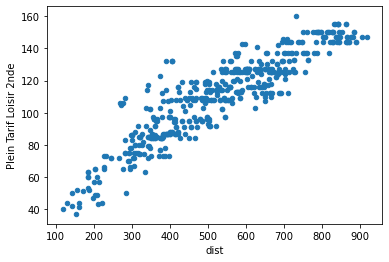

In [116]:
# Quick plot to check it works
garesprix.plot(x ='dist', y='Plein Tarif Loisir 2nde', kind = 'scatter')

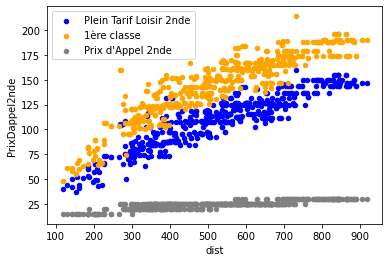

In [117]:
ax = garesprix.plot(kind='scatter', x='dist', y='Plein Tarif Loisir 2nde',
        color='Blue', label='Plein Tarif Loisir 2nde');


ax = garesprix.plot(kind='scatter', x='dist', y='1ère classe',
       color='Orange', label='1ère classe', ax=ax);

ax = garesprix.plot(kind='scatter', x='dist', y='PrixDappel2nde',
        color='Grey', label='Prix d\'Appel 2nde', ax=ax);
 

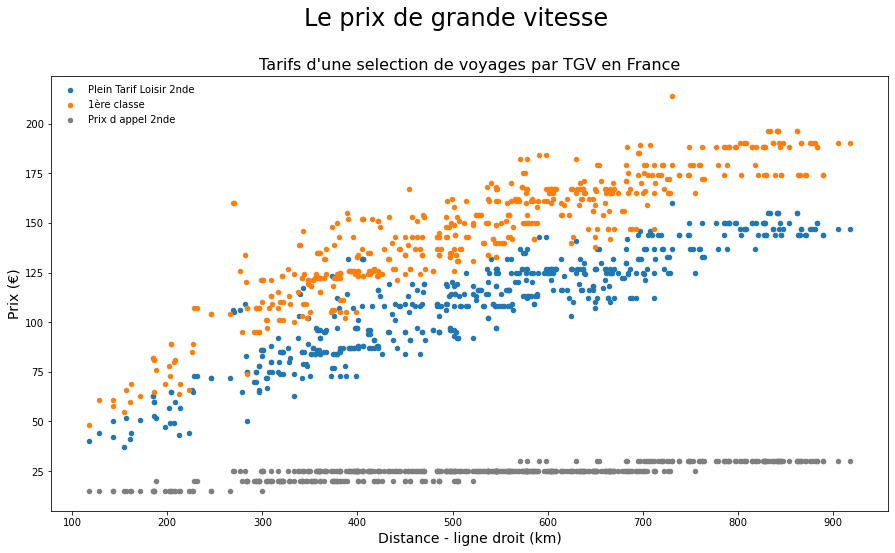

In [118]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x = garesprix['dist'], y = garesprix['Plein Tarif Loisir 2nde'], label='Plein Tarif Loisir 2nde', color = 'tab:blue', s=20)
ax.scatter(x = garesprix['dist'], y = garesprix['1ère classe'], label='1ère classe', color = 'tab:orange', s=20)
ax.scatter(x = garesprix['dist'], y = garesprix['PrixDappel2nde'], label='Prix d appel 2nde', color = 'tab:gray', s=20)
plt.xlabel("Distance - ligne droit (km)", fontsize=14)
plt.ylabel("Prix (€)", fontsize=14)

plt.title('Tarifs d\'une selection de voyages par TGV en France',fontsize=16)
plt.suptitle('Le prix de grande vitesse',fontsize=24, y=1)

plt.legend(frameon=False, loc='upper left')

plt.show()

In [119]:
garesprix.describe()

PrixDappel2nde  Plein Tarif Loisir 2nde  1ère classe
count      517.000000               517.000000   517.000000
mean        24.506770               109.750484   145.158607
std          3.824955                26.196885    30.307884
min         15.000000                37.000000    48.000000
25%         25.000000                88.000000   125.000000
50%         25.000000               113.000000   149.000000
75%         25.000000               127.000000   167.000000
max         30.000000               160.000000   214.000000

In [120]:
garesprix.loc[garesprix['1ère classe'] == 214]

OD  PrixDappel2nde  Plein Tarif Loisir 2nde  \
3816  Strasbourg-Libourne            30.0                    160.0   

      1ère classe    dist  
3816        214.0  731.02

In [121]:
garesprix.loc[garesprix['Plein Tarif Loisir 2nde'] == 160]

OD  PrixDappel2nde  Plein Tarif Loisir 2nde  \
3816  Strasbourg-Libourne            30.0                    160.0   

      1ère classe    dist  
3816        214.0  731.02

In [122]:
garesprix.loc[garesprix['1ère classe'] == 48]

OD  PrixDappel2nde  \
41  Aeroport Cdg 2 Tgv Roissy-Rouen Rive Droite            15.0   

    Plein Tarif Loisir 2nde  1ère classe    dist  
41                     40.0         48.0  118.11

In [123]:
garesprix.loc[garesprix['Plein Tarif Loisir 2nde'] == 37]

OD  PrixDappel2nde  Plein Tarif Loisir 2nde  \
3497  Perpignan-Toulouse Matabiau            15.0                     37.0   

      1ère classe    dist  
3497         55.0  154.05

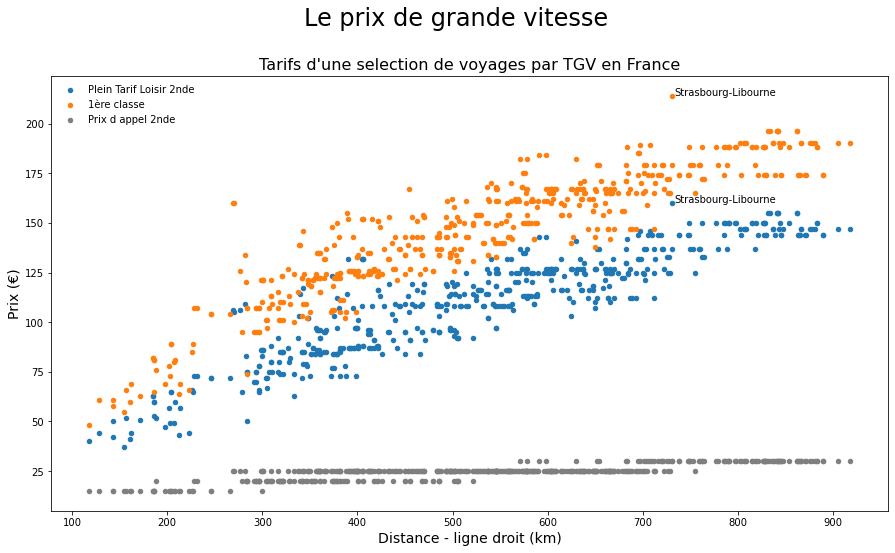

In [124]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x = garesprix['dist'], y = garesprix['Plein Tarif Loisir 2nde'], label='Plein Tarif Loisir 2nde', color = 'tab:blue', s=20)
ax.scatter(x = garesprix['dist'], y = garesprix['1ère classe'], label='1ère classe', color = 'tab:orange', s=20)
ax.scatter(x = garesprix['dist'], y = garesprix['PrixDappel2nde'], label='Prix d appel 2nde', color = 'tab:gray', s=20)
plt.xlabel("Distance - ligne droit (km)", fontsize=14)
plt.ylabel("Prix (€)", fontsize=14)

plt.title('Tarifs d\'une selection de voyages par TGV en France',fontsize=16)
plt.suptitle('Le prix de grande vitesse',fontsize=24, y=1)

plt.legend(frameon=False, loc='upper left')
plt.text(733, 214, 'Strasbourg-Libourne')
plt.text(733, 160, 'Strasbourg-Libourne')
plt.show()

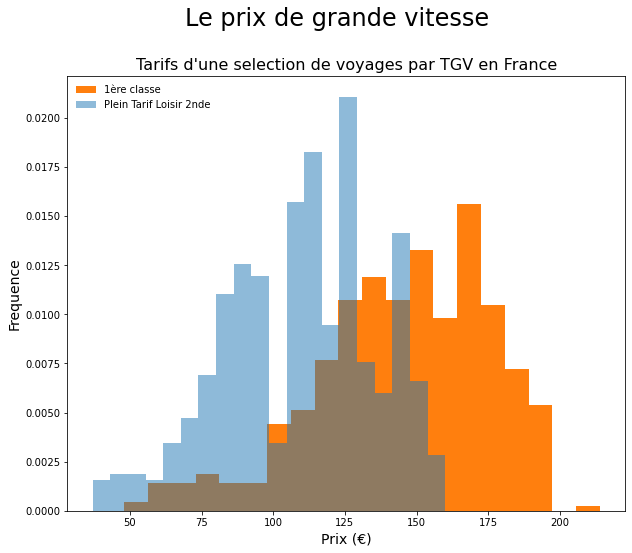

In [125]:
import matplotlib.pyplot as plt
import pandas as pd

n_bins = 20
plt.figure(figsize=[10,8])

plt.hist(garesprix['1ère classe'], n_bins, density=True, histtype='bar', color = 'tab:orange', label='1ère classe')
plt.hist(garesprix['Plein Tarif Loisir 2nde'], n_bins, density=True, histtype='bar', color = 'tab:blue', label='Plein Tarif Loisir 2nde', alpha=0.5)

plt.xlabel("Prix (€)", fontsize=14)
plt.ylabel("Frequence", fontsize=14)

plt.title('Tarifs d\'une selection de voyages par TGV en France',fontsize=16)
plt.suptitle('Le prix de grande vitesse',fontsize=24, y=1)

plt.legend(frameon=False, loc='upper left')

plt.show()
